In [1]:
print('\nInitializing 2ES Target Selection Pipeline...')

from config import *
from gaia_queries import *
from data_processing import *
from plotting import *
from stellar_calculations import *
from utils import *
from catalog_integration import CatalogProcessor
from filtering import filter_stellar_data
from gaia_tess_overlap import match_gaia_tess, save_overlapping_stars


Initializing 2ES Target Selection Pipeline...


In [2]:
# Execute DR2 query
df_dr2 = execute_gaia_query(
    get_dr2_query(),
    str_columns=['source_id'],
    output_file=f"{RESULTS_DIRECTORY}dr2_results.xlsx"
)

# Execute crossmatch query
dr2_source_ids = tuple(df_dr2['source_id'])
df_crossmatch = execute_gaia_query(
    get_crossmatch_query(dr2_source_ids),
    str_columns=['dr2_source_id', 'dr3_source_id'],
    output_file=f"{RESULTS_DIRECTORY}dr2_dr3_crossmatch.xlsx"
)

# Execute DR3 query
df_dr3 = execute_gaia_query(
    get_dr3_query(),
    str_columns=['source_id'],
    output_file=f"{RESULTS_DIRECTORY}dr3_results.xlsx"
)




Querying stars from Gaia DR2
9463 stars retrieved
Query results saved to ../results/dr2_results.xlsx

Crossmatching stellar IDs between Gaia DR2 and DR3
10053 stars retrieved
Query results saved to ../results/dr2_dr3_crossmatch.xlsx

Querying stars from Gaia DR3
9157 stars retrieved
Query results saved to ../results/dr3_results.xlsx


In [3]:
# Process and clean data
merged_results = process_gaia_data(df_dr2, df_dr3, df_crossmatch)
clean_results = clean_merged_results(merged_results)



Merging Gaia DR2 and DR3 data with crossmatch information
Results saved to ../results/merged_results.xlsx

Cleaning merged results by removing duplicate dr2_source_id entries
Results saved to ../results/repeated_entries.xlsx

Processing repeated entries with the same dr2_source_id
Results saved to ../results/clean_merged_results.xlsx
Results saved to ../results/removed_rows.xlsx
Original shape of merged_results: (10319, 29)
Shape after removing duplicates: (9727, 29)
Number of rows removed: 592


In [4]:
consolidated_results = consolidate_data(clean_results)


Consolidating data between DR2 and DR3
Merging the following columns between DR2 and DR3: ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, parallax, logg_gaia, spectraltype_esphs
Processing temperature
Processing the following columns: mass_flame, lum_flame, radius_flame, spectraltype_esphs
Adding bp_rp column


Retrieving HD, GJ and HIP numbers and object type from Simbad based on Gaia identifiers: 100%|██████████| 9727/9727 [27:24<00:00,  5.91it/s]  


Renaming columns
Results saved to ../results/consolidated_results.xlsx
Total number of stars: 9727
Number of stars with DR3 source_id: 9130
Number of stars with only DR2 source_id: 597
Number of stars with HD Number: 4399
Number of stars with GJ Number: 2079
Number of stars with HIP Number: 4907


In [5]:
processor = CatalogProcessor(
    celesta_path ='../data/Catalogue_CELESTA.txt',
    stellar_catalog_path ='../data/Catalogue_V_117A_table1.txt'
)
df_consolidated = processor.process_catalogs(consolidated_results)


Filling missing T_eff and Luminosity from CELESTA catalog using HIP numbers
Results saved to ../results/consolidated_HIP_results.xlsx

Filling missing T_eff, Luminosity and Mass from Vizier V/117A using HD numbers


Progress: 100%|███████████████████████████████████████████████| 9727/9727 [00:03<00:00, 2634.52it/s]


Results saved to ../results/consolidated_HD_results.xlsx

Getting empirical stellar parameters


Processing stellar types:   0%|                                  | 1/9727 [00:01<2:43:41,  1.01s/it]

0: Gaia DR3 100254161710940928, G5V --> G5V


Processing stellar types:   0%|                                  | 2/9727 [00:01<2:37:01,  1.03it/s]

1: Gaia DR3 100380639907919872, G5 --> G5


Processing stellar types:   0%|                                  | 3/9727 [00:02<2:33:48,  1.05it/s]

2: Gaia DR3 100586763978318208, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   0%|                                  | 4/9727 [00:03<2:33:17,  1.06it/s]

3: Gaia DR3 100665065526715008, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:   0%|                                  | 5/9727 [00:04<2:37:23,  1.03it/s]

4: Gaia DR3 101283987497967360,  --> None


Processing stellar types:   0%|                                  | 6/9727 [00:05<2:35:21,  1.04it/s]

5: Gaia DR3 101309452355657216, G5IV-V --> G5IV-V


Processing stellar types:   0%|                                  | 7/9727 [00:06<2:41:30,  1.00it/s]

6: Gaia DR3 101489256866566528,  --> None


Processing stellar types:   0%|                                  | 8/9727 [00:07<2:38:41,  1.02it/s]

7: Gaia DR3 101612981989146752, M1V --> M1V


Processing stellar types:   0%|                                  | 9/9727 [00:08<2:37:30,  1.03it/s]

8: Gaia DR3 102082409030066560, F5V --> F5V


Processing stellar types:   0%|                                 | 10/9727 [00:09<2:36:11,  1.04it/s]

9: Gaia DR3 102082477749475200, F6V --> F6V


Processing stellar types:   0%|                                 | 11/9727 [00:10<2:41:02,  1.01it/s]

10: Gaia DR3 102162639019033600, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   0%|                                 | 12/9727 [00:11<2:38:34,  1.02it/s]

11: Gaia DR3 102648588798884736, M2.0V --> M2V


Processing stellar types:   0%|                                 | 13/9727 [00:12<2:45:23,  1.02s/it]

12: Gaia DR3 103124230657005568, dM3.5 --> None


Processing stellar types:   0%|                                 | 14/9727 [00:13<2:44:30,  1.02s/it]

13: Gaia DR3 103173223348678144, K7V --> K7V


Processing stellar types:   0%|                                 | 15/9727 [00:14<2:43:31,  1.01s/it]

14: Gaia DR3 103363168277756928, M0V --> M0V


Processing stellar types:   0%|                                 | 16/9727 [00:15<2:40:15,  1.01it/s]

15: Gaia DR3 103649316178540416, K2 --> K2


Processing stellar types:   0%|                                 | 17/9727 [00:16<2:41:39,  1.00it/s]

16: Gaia DR3 103942679624729088,  --> None


Processing stellar types:   0%|                                 | 18/9727 [00:17<2:39:00,  1.02it/s]

17: Gaia DR3 104453918172129792, G2V --> G2V


Processing stellar types:   0%|                                 | 19/9727 [00:18<2:39:29,  1.01it/s]

18: Gaia DR3 104716907609412352, F0V --> F0V


Processing stellar types:   0%|                                 | 20/9727 [00:19<2:37:38,  1.03it/s]

19: Gaia DR3 104717285566534016, G0 --> G0


Processing stellar types:   0%|                                 | 21/9727 [00:20<2:40:23,  1.01it/s]

20: Gaia DR2 104752950974981760, G0 --> G0
No data found for stellar type (2) G0.


Processing stellar types:   0%|                                 | 22/9727 [00:21<2:37:59,  1.02it/s]

21: Gaia DR3 105332908999068032, K0V --> K0V


Processing stellar types:   0%|                                 | 23/9727 [00:22<2:44:39,  1.02s/it]

22: Gaia DR2 105599987244856064, F9V --> F9V


Processing stellar types:   0%|                                 | 24/9727 [00:23<2:41:27,  1.00it/s]

23: Gaia DR3 10584899657116672, F8 --> F8


Processing stellar types:   0%|                                 | 25/9727 [00:24<2:49:32,  1.05s/it]

24: Gaia DR3 105850121845012608,  --> None


Processing stellar types:   0%|                                 | 26/9727 [00:25<2:46:22,  1.03s/it]

25: Gaia DR3 106051542927008128, F6III-IV --> F6


Processing stellar types:   0%|                                 | 27/9727 [00:26<2:41:59,  1.00s/it]

26: Gaia DR3 10608573516849536, G1 --> G1


Processing stellar types:   0%|                                 | 28/9727 [00:27<2:41:34,  1.00it/s]

27: Gaia DR3 106774952858617088, G8 --> G8


Processing stellar types:   0%|                                 | 29/9727 [00:28<2:38:35,  1.02it/s]

28: Gaia DR3 107175480033033472,  --> None


Processing stellar types:   0%|                                 | 30/9727 [00:29<2:36:08,  1.04it/s]

29: Gaia DR3 107774198474602368, G3 --> G3


Processing stellar types:   0%|                                 | 31/9727 [00:30<2:34:29,  1.05it/s]

30: Gaia DR3 107774202769886848, F2 --> F2


Processing stellar types:   0%|                                 | 32/9727 [00:31<2:33:31,  1.05it/s]

31: Gaia DR3 108421608959951488, F0V(e) --> F0V


Processing stellar types:   0%|                                 | 33/9727 [00:32<2:33:11,  1.05it/s]

32: Gaia DR3 109051246870008448, M0 --> M0


Processing stellar types:   0%|                                 | 34/9727 [00:33<2:39:49,  1.01it/s]

33: Gaia DR3 109628013733250304, dM4.0 --> None


Processing stellar types:   0%|                                 | 35/9727 [00:34<2:37:51,  1.02it/s]

34: Gaia DR3 109931856900594432, G0 --> G0


Processing stellar types:   0%|                                 | 36/9727 [00:35<2:38:41,  1.02it/s]

35: Gaia DR3 11037726649058432, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   0%|▏                                | 37/9727 [00:36<2:37:10,  1.03it/s]

36: Gaia DR3 111379432679196672, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   0%|▏                                | 38/9727 [00:37<2:42:18,  1.01s/it]

37: Gaia DR2 11210418694164864, G0 --> G0


Processing stellar types:   0%|▏                                | 39/9727 [00:38<2:40:01,  1.01it/s]

38: Gaia DR3 112440873718983680, G2VFe-3 --> G2V


Processing stellar types:   0%|▏                                | 40/9727 [00:39<2:41:16,  1.00it/s]

39: Gaia DR3 114207651462714880, dM3 --> None


Processing stellar types:   0%|▏                                | 41/9727 [00:40<2:38:49,  1.02it/s]

40: Gaia DR3 114575472461716864, K1 --> K1


Processing stellar types:   0%|▏                                | 42/9727 [00:41<2:41:40,  1.00s/it]

41: Gaia DR3 114832620743735808, K2 --> K2
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   0%|▏                               | 43/9727 [00:52<10:46:18,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
42: Gaia DR3 11530342218200448, None --> None


Processing stellar types:   0%|▏                                | 44/9727 [00:53<8:25:21,  3.13s/it]

43: Gaia DR3 115311458058061440, G8V --> G8V


Processing stellar types:   0%|▏                                | 45/9727 [00:54<6:38:40,  2.47s/it]

44: Gaia DR3 1153462739205798528,  --> None


Processing stellar types:   0%|▏                                | 46/9727 [00:55<5:31:02,  2.05s/it]

45: Gaia DR3 115364234616059392, K2V --> K2V


Processing stellar types:   0%|▏                                | 47/9727 [00:56<4:36:38,  1.71s/it]

46: Gaia DR3 1154336202410495488, G5/6V --> G5/6V


Processing stellar types:   0%|▏                                | 48/9727 [00:57<4:03:12,  1.51s/it]

47: Gaia DR3 1154866579332084992, M2V --> M2V


Processing stellar types:   1%|▏                                | 49/9727 [00:58<3:36:02,  1.34s/it]

48: Gaia DR3 1155276250492687616, M2V --> M2V


Processing stellar types:   1%|▏                                | 50/9727 [00:59<3:25:48,  1.28s/it]

49: Gaia DR3 1156350542072311936, K2V --> K2V


Processing stellar types:   1%|▏                                | 51/9727 [01:00<3:11:47,  1.19s/it]

50: Gaia DR3 1156846524895814144, K8V --> K8V


Processing stellar types:   1%|▏                                | 52/9727 [01:01<3:06:17,  1.16s/it]

51: Gaia DR3 1157670986817726976, K4 --> K4


Processing stellar types:   1%|▏                                | 53/9727 [01:02<2:55:51,  1.09s/it]

52: Gaia DR3 1157737335472646016, F7/8V --> F7/8V


Processing stellar types:   1%|▏                                | 54/9727 [01:03<2:57:01,  1.10s/it]

53: Gaia DR2 1158184012071254400, K6V --> K6V


Processing stellar types:   1%|▏                                | 55/9727 [01:04<2:50:09,  1.06s/it]

54: Gaia DR3 1158503591997923072, dM1.5 --> None


Processing stellar types:   1%|▏                                | 56/9727 [01:05<2:44:43,  1.02s/it]

55: Gaia DR3 1159380486880813952, K5V --> K5V


Processing stellar types:   1%|▏                                | 57/9727 [01:06<2:41:29,  1.00s/it]

56: Gaia DR3 1159502154714284544,  --> None


Processing stellar types:   1%|▏                                | 58/9727 [01:07<2:41:30,  1.00s/it]

57: Gaia DR3 1159502498311670144, K0 --> K0


Processing stellar types:   1%|▏                                | 59/9727 [01:08<2:53:00,  1.07s/it]

58: Gaia DR3 1159605302648975104, K3 --> K3


Processing stellar types:   1%|▏                                | 60/9727 [01:09<2:50:04,  1.06s/it]

59: Gaia DR3 1159745146784043264, M3.0V --> M3V


Processing stellar types:   1%|▏                                | 61/9727 [01:10<2:46:25,  1.03s/it]

60: Gaia DR3 1160184436039120128, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   1%|▏                                | 62/9727 [01:11<2:41:49,  1.00s/it]

61: Gaia DR3 116037204451525376, K2IV --> K2IV


Processing stellar types:   1%|▏                                | 63/9727 [01:12<2:43:02,  1.01s/it]

62: Gaia DR3 116037371954842240, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   1%|▏                                | 64/9727 [01:13<2:42:35,  1.01s/it]

63: Gaia DR3 1160612111702571776, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   1%|▏                                | 65/9727 [01:14<2:40:32,  1.00it/s]

64: Gaia DR3 1160716496587849088, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:   1%|▏                                | 66/9727 [01:15<2:37:14,  1.02it/s]

65: Gaia DR3 1160956465000504448, G5 --> G5


Processing stellar types:   1%|▏                                | 67/9727 [01:16<2:43:03,  1.01s/it]

66: Gaia DR3 1161042158187967232, K7V --> K7V


Processing stellar types:   1%|▏                                | 68/9727 [01:17<2:39:39,  1.01it/s]

67: Gaia DR3 1161759314647344896, K0 --> K0


Processing stellar types:   1%|▏                                | 69/9727 [01:18<2:45:07,  1.03s/it]

68: Gaia DR3 1161797900633510144, G0 --> G0


Processing stellar types:   1%|▏                                | 70/9727 [01:19<2:44:15,  1.02s/it]

69: Gaia DR3 116261779701601152, M2V --> M2V


Processing stellar types:   1%|▏                                | 71/9727 [01:20<2:47:05,  1.04s/it]

70: Gaia DR3 1162946718486550272, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   1%|▏                                | 72/9727 [01:21<2:45:07,  1.03s/it]

71: Gaia DR3 1163192665493054336, K7 --> K7


Processing stellar types:   1%|▏                                | 73/9727 [01:22<2:45:26,  1.03s/it]

72: Gaia DR2 116339982465090048, B8Vn --> B8V


Processing stellar types:   1%|▎                                | 74/9727 [01:23<2:41:28,  1.00s/it]

73: Gaia DR3 1163549697534289664, M0V --> M0V


Processing stellar types:   1%|▎                                | 75/9727 [01:25<2:46:53,  1.04s/it]

74: Gaia DR3 1164145048721331968,  --> None


Processing stellar types:   1%|▎                                | 76/9727 [01:26<2:44:23,  1.02s/it]

75: Gaia DR3 116456668137575040, K6V --> K6V


Processing stellar types:   1%|▎                                | 77/9727 [01:26<2:40:32,  1.00it/s]

76: Gaia DR3 1165262633571848064, F6 --> F6


Processing stellar types:   1%|▎                                | 78/9727 [01:28<2:45:04,  1.03s/it]

77: Gaia DR3 1165859359148269568, K5V --> K5V


Processing stellar types:   1%|▎                                | 79/9727 [01:28<2:40:31,  1.00it/s]

78: Gaia DR3 1166203712446038912, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   1%|▎                                | 80/9727 [01:30<2:42:09,  1.01s/it]

79: Gaia DR3 1166216253750406144, G5IV-V --> G5IV-V


Processing stellar types:   1%|▎                                | 81/9727 [01:30<2:38:33,  1.01it/s]

80: Gaia DR3 1166577855636534144, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:   1%|▎                                | 82/9727 [01:31<2:40:33,  1.00it/s]

81: Gaia DR3 1167718049194619136, G3V --> G3V


Processing stellar types:   1%|▎                                | 83/9727 [01:32<2:37:05,  1.02it/s]

82: Gaia DR3 1167718049194619264, G2V --> G2V


Processing stellar types:   1%|▎                                | 84/9727 [01:34<2:44:29,  1.02s/it]

83: Gaia DR3 1167838720595878400, F8V --> F8V


Processing stellar types:   1%|▎                                | 85/9727 [01:35<2:43:15,  1.02s/it]

84: Gaia DR3 1168984617870183808, F6IV-V --> F6IV-V


Processing stellar types:   1%|▎                                | 86/9727 [01:36<2:42:26,  1.01s/it]

85: Gaia DR3 1169984108299812608, K4 --> K4


Processing stellar types:   1%|▎                                | 87/9727 [01:36<2:38:55,  1.01it/s]

86: Gaia DR3 1170092547633728256, K5: --> K5
No data found for stellar type (2) K5.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   1%|▎                               | 88/9727 [01:48<10:45:11,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
87: Gaia DR2 1170098251350303616, None --> None


Processing stellar types:   1%|▎                                | 89/9727 [01:49<8:21:48,  3.12s/it]

88: Gaia DR3 1170359243627867904, dM4.5 --> None


Processing stellar types:   1%|▎                                | 90/9727 [01:50<6:40:53,  2.50s/it]

89: Gaia DR3 1170797781264303616, G0 --> G0


Processing stellar types:   1%|▎                                | 91/9727 [01:51<5:27:57,  2.04s/it]

90: Gaia DR3 1171453979251962624,  --> None


Processing stellar types:   1%|▎                                | 92/9727 [01:52<4:37:22,  1.73s/it]

91: Gaia DR3 1171574685013520640, M0V --> M0V


Processing stellar types:   1%|▎                                | 93/9727 [01:53<4:04:14,  1.52s/it]

92: Gaia DR2 1172340086840027264, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   1%|▎                                | 94/9727 [01:54<3:35:40,  1.34s/it]

93: Gaia DR3 1173206811240350592,  --> None


Processing stellar types:   1%|▎                                | 95/9727 [01:55<3:18:06,  1.23s/it]

94: Gaia DR3 1173847139324624256, K --> None


Processing stellar types:   1%|▎                                | 96/9727 [01:55<3:03:23,  1.14s/it]

95: Gaia DR3 1173992103060678272,  --> None


Processing stellar types:   1%|▎                                | 97/9727 [01:56<2:54:57,  1.09s/it]

96: Gaia DR3 1174143182830505856,  --> None


Processing stellar types:   1%|▎                                | 98/9727 [01:57<2:47:51,  1.05s/it]

97: Gaia DR3 1174143182830505984, K0V --> K0V


Processing stellar types:   1%|▎                                | 99/9727 [01:58<2:49:51,  1.06s/it]

98: Gaia DR3 1174189362318863488, M2V --> M2V


Processing stellar types:   1%|▎                               | 100/9727 [01:59<2:44:39,  1.03s/it]

99: Gaia DR3 1174513645233715584, G1V --> G1V


Processing stellar types:   1%|▎                               | 101/9727 [02:00<2:40:41,  1.00s/it]

100: Gaia DR3 1174513645233715584, G1V --> G1V


Processing stellar types:   1%|▎                               | 102/9727 [02:01<2:38:42,  1.01it/s]

101: Gaia DR3 1175518465718053760, K4V --> K4V


Processing stellar types:   1%|▎                               | 103/9727 [02:02<2:45:45,  1.03s/it]

102: Gaia DR3 1175938925836488448, M3V --> M3V


Processing stellar types:   1%|▎                               | 104/9727 [02:04<2:52:31,  1.08s/it]

103: Gaia DR3 1176167143218779776, K2V --> K2V


Processing stellar types:   1%|▎                               | 105/9727 [02:05<2:49:58,  1.06s/it]

104: Gaia DR3 1176209886733406592, K3V --> K3V


Processing stellar types:   1%|▎                               | 106/9727 [02:06<2:44:20,  1.02s/it]

105: Gaia DR3 117654650480415744, K7V --> K7V


Processing stellar types:   1%|▎                               | 107/9727 [02:07<2:47:24,  1.04s/it]

106: Gaia DR3 1177532908459199488, F8V --> F8V


Processing stellar types:   1%|▎                               | 108/9727 [02:08<2:41:58,  1.01s/it]

107: Gaia DR3 1177532908459199872, G1V --> G1V


Processing stellar types:   1%|▎                               | 109/9727 [02:09<2:39:58,  1.00it/s]

108: Gaia DR3 1178287203500006656,  --> None


Processing stellar types:   1%|▎                               | 110/9727 [02:10<2:37:28,  1.02it/s]

109: Gaia DR2 1178874377069433472, K5V --> K5V


Processing stellar types:   1%|▎                               | 111/9727 [02:11<2:42:39,  1.01s/it]

110: Gaia DR3 1179258076562854784, K7V --> K7V


Processing stellar types:   1%|▎                               | 112/9727 [02:12<2:39:49,  1.00it/s]

111: Gaia DR3 117990177621007744, M1.0Ve --> M1V


Processing stellar types:   1%|▎                               | 113/9727 [02:13<2:41:30,  1.01s/it]

112: Gaia DR3 1179916752747453952, G5 --> G5


Processing stellar types:   1%|▍                               | 114/9727 [02:14<2:38:06,  1.01it/s]

113: Gaia DR3 1181472011945052928, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   1%|▍                               | 115/9727 [02:15<2:40:08,  1.00it/s]

114: Gaia DR3 1182094198087372672, K7/M0 --> K7/M0
Lower Type: K7, Higher Type: M0
No data found for stellar type K7/M0.


Processing stellar types:   1%|▍                               | 116/9727 [02:16<2:37:20,  1.02it/s]

115: Gaia DR3 118234509720825856,  --> None


Processing stellar types:   1%|▍                               | 117/9727 [02:17<2:40:58,  1.01s/it]

116: Gaia DR3 1182861244887065856, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   1%|▍                               | 118/9727 [02:18<2:37:03,  1.02it/s]

117: Gaia DR3 118289519661876352, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:   1%|▍                               | 119/9727 [02:19<2:42:51,  1.02s/it]

118: Gaia DR3 1183423159753314816, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   1%|▍                               | 120/9727 [02:20<2:42:14,  1.01s/it]

119: Gaia DR3 1183444810683190016, K1 --> K1


Processing stellar types:   1%|▍                               | 121/9727 [02:21<2:42:03,  1.01s/it]

120: Gaia DR3 1183850942790617856, M0 --> M0


Processing stellar types:   1%|▍                               | 122/9727 [02:22<2:38:07,  1.01it/s]

121: Gaia DR3 1184422448319182080, K2 --> K2


Processing stellar types:   1%|▍                               | 123/9727 [02:22<2:35:17,  1.03it/s]

122: Gaia DR3 1184763674880576768, K5 --> K5


Processing stellar types:   1%|▍                               | 124/9727 [02:23<2:33:12,  1.04it/s]

123: Gaia DR3 1185619988280226944, K0V --> K0V


Processing stellar types:   1%|▍                               | 125/9727 [02:24<2:32:32,  1.05it/s]

124: Gaia DR3 1186283715346179712, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   1%|▍                               | 126/9727 [02:25<2:31:39,  1.06it/s]

125: Gaia DR3 1186283715346179840,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   1%|▍                              | 127/9727 [02:36<10:32:06,  3.95s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
126: Gaia DR3 1186325496788069632, None --> None


Processing stellar types:   1%|▍                               | 128/9727 [02:37<8:08:09,  3.05s/it]

127: Gaia DR3 1186939608392079104, K3+V --> K3V


Processing stellar types:   1%|▍                               | 129/9727 [02:38<6:28:00,  2.43s/it]

128: Gaia DR3 1186966374628267648, G2V --> G2V


Processing stellar types:   1%|▍                               | 130/9727 [02:39<5:16:30,  1.98s/it]

129: Gaia DR3 1187851653287128576, M3V --> M3V


Processing stellar types:   1%|▍                               | 131/9727 [02:40<4:29:08,  1.68s/it]

130: Gaia DR3 1188044308340155648, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   1%|▍                               | 132/9727 [02:41<3:55:54,  1.48s/it]

131: Gaia DR3 1188333136300851328, M2.2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   1%|▍                               | 133/9727 [02:42<3:33:53,  1.34s/it]

132: Gaia DR3 1189404610382948224, G0V --> G0V


Processing stellar types:   1%|▍                               | 134/9727 [02:43<3:14:36,  1.22s/it]

133: Gaia DR3 1190935199288193152, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:   1%|▍                               | 135/9727 [02:44<3:00:59,  1.13s/it]

134: Gaia DR3 1191518146611956096, G1VFe-1 --> G1V


Processing stellar types:   1%|▍                               | 136/9727 [02:45<2:59:07,  1.12s/it]

135: Gaia DR3 1191924897193948544, K2 --> K2


Processing stellar types:   1%|▍                               | 137/9727 [02:46<2:53:52,  1.09s/it]

136: Gaia DR3 1192485923002410112, K5 --> K5


Processing stellar types:   1%|▍                               | 138/9727 [02:47<2:53:54,  1.09s/it]

137: Gaia DR3 1192813951126183808, G2V --> G2V


Processing stellar types:   1%|▍                               | 139/9727 [02:48<2:47:18,  1.05s/it]

138: Gaia DR3 1193030490492925824, F6V --> F6V


Processing stellar types:   1%|▍                               | 140/9727 [02:49<2:44:27,  1.03s/it]

139: Gaia DR3 1193336189087814144, KV --> None


Processing stellar types:   1%|▍                               | 141/9727 [02:50<2:40:18,  1.00s/it]

140: Gaia DR3 1193552895955650816,  --> None


Processing stellar types:   1%|▍                               | 142/9727 [02:51<2:37:28,  1.01it/s]

141: Gaia DR3 1193907316656812800, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:   1%|▍                               | 143/9727 [02:52<2:37:00,  1.02it/s]

142: Gaia DR3 1193932021308741888, K5V --> K5V


Processing stellar types:   1%|▍                               | 144/9727 [02:53<2:35:05,  1.03it/s]

143: Gaia DR3 1195823181311716096, K3V --> K3V


Processing stellar types:   1%|▍                               | 145/9727 [02:54<2:33:52,  1.04it/s]

144: Gaia DR3 1195823284391343104, A2IV --> A2IV
No data found for stellar type (2) A2IV.


Processing stellar types:   2%|▍                               | 146/9727 [02:55<2:32:52,  1.04it/s]

145: Gaia DR3 1195829091186588544, G0 --> G0


Processing stellar types:   2%|▍                               | 147/9727 [02:56<2:41:16,  1.01s/it]

146: Gaia DR3 1195829091186588928,  --> None


Processing stellar types:   2%|▍                               | 148/9727 [02:57<2:38:03,  1.01it/s]

147: Gaia DR3 1195969381999146240,  --> None


Processing stellar types:   2%|▍                               | 149/9727 [02:58<2:39:10,  1.00it/s]

148: Gaia DR3 1196653484385342976, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   2%|▍                               | 150/9727 [02:59<2:38:30,  1.01it/s]

149: Gaia DR3 1197038485256515328, dM2.0 --> None


Processing stellar types:   2%|▍                               | 151/9727 [03:00<2:44:01,  1.03s/it]

150: Gaia DR3 1197134211485520768,  --> None


Processing stellar types:   2%|▌                               | 152/9727 [03:01<2:41:55,  1.01s/it]

151: Gaia DR2 1197943967442871424,  --> None


Processing stellar types:   2%|▌                               | 153/9727 [03:02<2:42:18,  1.02s/it]

152: Gaia DR3 1197947712654289792, K4V --> K4V


Processing stellar types:   2%|▌                               | 154/9727 [03:03<2:39:04,  1.00it/s]

153: Gaia DR3 1199370996095815168,  --> None


Processing stellar types:   2%|▌                               | 155/9727 [03:04<2:39:48,  1.00s/it]

154: Gaia DR3 1199567224561188352, M2.0V --> M2V


Processing stellar types:   2%|▌                               | 156/9727 [03:05<2:37:36,  1.01it/s]

155: Gaia DR3 1199657143995826688, M0 --> M0


Processing stellar types:   2%|▌                               | 157/9727 [03:06<2:40:21,  1.01s/it]

156: Gaia DR3 1200757686414000768,  --> None


Processing stellar types:   2%|▌                               | 158/9727 [03:07<2:37:19,  1.01it/s]

157: Gaia DR3 1201007271258546432, G5 --> G5


Processing stellar types:   2%|▌                               | 159/9727 [03:08<2:36:52,  1.02it/s]

158: Gaia DR3 1201133066557201920, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   2%|▌                               | 160/9727 [03:09<2:38:26,  1.01it/s]

159: Gaia DR3 1201405126966920448, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   2%|▌                              | 161/9727 [03:20<10:36:38,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
160: Gaia DR2 1201412510012668160, None --> None


Processing stellar types:   2%|▌                               | 162/9727 [03:21<8:24:09,  3.16s/it]

161: Gaia DR3 1201535242998445568, G0 --> G0


Processing stellar types:   2%|▌                               | 163/9727 [03:22<6:37:32,  2.49s/it]

162: Gaia DR2 1202153860023088128, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   2%|▌                               | 164/9727 [03:23<5:30:39,  2.07s/it]

163: Gaia DR3 1202258210550554368, M0.0V --> M0V


Processing stellar types:   2%|▌                               | 165/9727 [03:24<4:36:20,  1.73s/it]

164: Gaia DR3 1205070452055788928, M4V --> M4V


Processing stellar types:   2%|▌                               | 166/9727 [03:25<4:01:39,  1.52s/it]

165: Gaia DR3 1207257552481630720, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   2%|▌                               | 167/9727 [03:26<3:33:12,  1.34s/it]

166: Gaia DR3 1207359669624120960, K2 --> K2


Processing stellar types:   2%|▌                               | 168/9727 [03:27<3:20:49,  1.26s/it]

167: Gaia DR3 1207802497932106240, K5V --> K5V


Processing stellar types:   2%|▌                               | 169/9727 [03:28<3:05:56,  1.17s/it]

168: Gaia DR3 1207813321249545600, K0 --> K0


Processing stellar types:   2%|▌                               | 170/9727 [03:29<2:55:32,  1.10s/it]

169: Gaia DR3 1208228180730812544,  --> None


Processing stellar types:   2%|▌                               | 171/9727 [03:30<2:55:18,  1.10s/it]

170: Gaia DR3 1208228180730812800, K5Ve --> K5V


Processing stellar types:   2%|▌                               | 172/9727 [03:31<2:48:09,  1.06s/it]

171: Gaia DR3 1208231582344916736, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   2%|▌                               | 173/9727 [03:32<2:51:04,  1.07s/it]

172: Gaia DR3 1209100608847430528, M2V --> M2V


Processing stellar types:   2%|▌                               | 174/9727 [03:33<2:43:48,  1.03s/it]

173: Gaia DR3 1209182041427374080, G9V --> G9V


Processing stellar types:   2%|▌                               | 175/9727 [03:34<2:42:14,  1.02s/it]

174: Gaia DR3 1209281375431039104, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   2%|▌                               | 176/9727 [03:35<2:45:09,  1.04s/it]

175: Gaia DR3 1210681844007239040, G0IV-V --> G0IV-V


Processing stellar types:   2%|▌                               | 177/9727 [03:36<2:39:55,  1.00s/it]

176: Gaia DR3 1211180163295886976, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:   2%|▌                               | 178/9727 [03:37<2:40:31,  1.01s/it]

177: Gaia DR3 1212263869440765184,  --> None


Processing stellar types:   2%|▌                               | 179/9727 [03:38<2:37:03,  1.01it/s]

178: Gaia DR3 1212385193677160832, G5V_Fe-0.9 --> G5V


Processing stellar types:   2%|▌                               | 180/9727 [03:39<2:42:01,  1.02s/it]

179: Gaia DR3 1212385193677161088, G7V --> G7V


Processing stellar types:   2%|▌                               | 181/9727 [03:40<2:44:54,  1.04s/it]

180: Gaia DR3 1212738995903148544, K0 --> K0


Processing stellar types:   2%|▌                               | 182/9727 [03:41<2:40:48,  1.01s/it]

181: Gaia DR3 1212955599693310848, G5 --> G5


Processing stellar types:   2%|▌                               | 183/9727 [03:42<2:46:08,  1.04s/it]

182: Gaia DR3 1214160733157163008, M1.0V --> M1V


Processing stellar types:   2%|▌                               | 184/9727 [03:43<2:41:33,  1.02s/it]

183: Gaia DR2 1214723545671620096, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:   2%|▌                               | 185/9727 [03:44<2:41:21,  1.01s/it]

184: Gaia DR3 1215279005201870336, G0 --> G0


Processing stellar types:   2%|▌                               | 186/9727 [03:45<2:50:07,  1.07s/it]

185: Gaia DR3 1215730114207267968,  --> None


Processing stellar types:   2%|▌                               | 187/9727 [03:46<2:43:43,  1.03s/it]

186: Gaia DR3 1215878582637096064, K7V --> K7V


Processing stellar types:   2%|▌                               | 188/9727 [03:48<2:50:14,  1.07s/it]

187: Gaia DR3 1216010695830048640,  --> None


Processing stellar types:   2%|▌                               | 189/9727 [03:49<2:44:12,  1.03s/it]

188: Gaia DR3 1216422870956354304, K0 --> K0


Processing stellar types:   2%|▋                               | 190/9727 [03:50<2:44:35,  1.04s/it]

189: Gaia DR3 1217056056511903488, K6V --> K6V


Processing stellar types:   2%|▋                               | 191/9727 [03:50<2:40:03,  1.01s/it]

190: Gaia DR3 1217467067705592576, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   2%|▋                               | 192/9727 [03:52<2:41:28,  1.02s/it]

191: Gaia DR2 1218395880147772032,  --> None


Processing stellar types:   2%|▋                               | 193/9727 [03:53<2:41:45,  1.02s/it]

192: Gaia DR3 1218502842014875264, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:   2%|▋                               | 194/9727 [03:54<2:45:10,  1.04s/it]

193: Gaia DR3 1219254942328596736, G8+V --> G8V


Processing stellar types:   2%|▋                               | 195/9727 [03:55<2:41:15,  1.02s/it]

194: Gaia DR3 1219843215409537024, M2.0V --> M2V


Processing stellar types:   2%|▋                               | 196/9727 [03:56<2:37:55,  1.01it/s]

195: Gaia DR3 1222160745406471680, M0V --> M0V


Processing stellar types:   2%|▋                               | 197/9727 [03:56<2:35:50,  1.02it/s]

196: Gaia DR3 1222646935698492160, A1IV --> A1IV
No data found for stellar type (2) A1IV.


Processing stellar types:   2%|▋                               | 198/9727 [03:57<2:33:22,  1.04it/s]

197: Gaia DR3 1223126528928684544, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   2%|▋                               | 199/9727 [03:58<2:37:09,  1.01it/s]

198: Gaia DR3 1223126735087115520, K7V --> K7V


Processing stellar types:   2%|▋                               | 200/9727 [03:59<2:34:35,  1.03it/s]

199: Gaia DR2 1223128521793513984, A0V --> A0V


Processing stellar types:   2%|▋                               | 201/9727 [04:00<2:38:16,  1.00it/s]

200: Gaia DR3 1224301838138589824, G7 --> G7


Processing stellar types:   2%|▋                               | 202/9727 [04:01<2:35:20,  1.02it/s]

201: Gaia DR3 1224551770875466496, G0V --> G0V


Processing stellar types:   2%|▋                               | 203/9727 [04:02<2:33:34,  1.03it/s]

202: Gaia DR3 1225075997402563840, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   2%|▋                               | 204/9727 [04:03<2:32:44,  1.04it/s]

203: Gaia DR3 1225091734162784000, sdM2.5 --> None


Processing stellar types:   2%|▋                               | 205/9727 [04:04<2:33:40,  1.03it/s]

204: Gaia DR3 1225145747671533056, M2V --> M2V


Processing stellar types:   2%|▋                               | 206/9727 [04:05<2:35:52,  1.02it/s]

205: Gaia DR3 122518310101463808, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   2%|▋                               | 207/9727 [04:06<2:34:38,  1.03it/s]

206: Gaia DR3 1226031369927927296, G5 --> G5


Processing stellar types:   2%|▋                               | 208/9727 [04:07<2:36:01,  1.02it/s]

207: Gaia DR3 1226796526941689856, F8V --> F8V


Processing stellar types:   2%|▋                               | 209/9727 [04:08<2:36:21,  1.01it/s]

208: Gaia DR3 1226844321337777536, F3V --> F3V


Processing stellar types:   2%|▋                               | 210/9727 [04:09<2:35:08,  1.02it/s]

209: Gaia DR3 1227659299972032128, G5 --> G5


Processing stellar types:   2%|▋                               | 211/9727 [04:10<2:37:42,  1.01it/s]

210: Gaia DR3 1227978914258412160, M1.0V --> M1V


Processing stellar types:   2%|▋                               | 212/9727 [04:11<2:35:37,  1.02it/s]

211: Gaia DR3 1228500971827696512,  --> None


Processing stellar types:   2%|▋                               | 213/9727 [04:12<2:38:09,  1.00it/s]

212: Gaia DR3 1229054374069267072,  --> None


Processing stellar types:   2%|▋                               | 214/9727 [04:13<2:38:42,  1.00s/it]

213: Gaia DR3 1229089524081628416, M2/3V --> M2/3V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   2%|▋                               | 215/9727 [04:14<2:36:45,  1.01it/s]

214: Gaia DR3 1229977414080680192, M1V --> M1V


Processing stellar types:   2%|▋                               | 216/9727 [04:15<2:40:52,  1.01s/it]

215: Gaia DR3 1230894097540611968, F6V --> F6V


Processing stellar types:   2%|▋                               | 217/9727 [04:16<2:37:42,  1.00it/s]

216: Gaia DR3 1231189793153901056,  --> None


Processing stellar types:   2%|▋                               | 218/9727 [04:17<2:40:10,  1.01s/it]

217: Gaia DR3 1231250992143084800, G7V --> G7V


Processing stellar types:   2%|▋                               | 219/9727 [04:18<2:37:06,  1.01it/s]

218: Gaia DR3 1231492609822865152, K7V --> K7V


Processing stellar types:   2%|▋                               | 220/9727 [04:19<2:42:24,  1.02s/it]

219: Gaia DR3 1231492609822865152, K7V --> K7V


Processing stellar types:   2%|▋                               | 221/9727 [04:20<2:39:07,  1.00s/it]

220: Gaia DR3 1231853730673656960, M2.0V --> M2V


Processing stellar types:   2%|▋                               | 222/9727 [04:21<2:42:36,  1.03s/it]

221: Gaia DR3 1232177021451771264, G5 --> G5


Processing stellar types:   2%|▋                               | 223/9727 [04:22<2:42:04,  1.02s/it]

222: Gaia DR3 1232303804590894464, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   2%|▋                               | 224/9727 [04:23<2:38:22,  1.00it/s]

223: Gaia DR3 1233902704963092608, A8V --> A8V


Processing stellar types:   2%|▋                               | 225/9727 [04:24<2:36:27,  1.01it/s]

224: Gaia DR3 1234693112077610880, K5V --> K5V


Processing stellar types:   2%|▋                               | 226/9727 [04:25<2:34:46,  1.02it/s]

225: Gaia DR3 1234756368356786560, M1.5V --> M1.5V


Processing stellar types:   2%|▋                               | 227/9727 [04:26<2:33:08,  1.03it/s]

226: Gaia DR3 1236764218322666880, F8V --> F8V


Processing stellar types:   2%|▊                               | 228/9727 [04:27<2:32:15,  1.04it/s]

227: Gaia DR3 1236929488664453376, K0.5V --> K0.5V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:   2%|▊                               | 229/9727 [04:28<2:31:27,  1.05it/s]

228: Gaia DR3 1237090738916392704, G7Ve --> G7V


Processing stellar types:   2%|▊                               | 230/9727 [04:29<2:31:04,  1.05it/s]

229: Gaia DR3 1237090738916392832, K5Ve --> K5V


Processing stellar types:   2%|▊                               | 231/9727 [04:30<2:30:36,  1.05it/s]

230: Gaia DR3 1237374997031931392, G5V --> G5V


Processing stellar types:   2%|▊                               | 232/9727 [04:31<2:35:19,  1.02it/s]

231: Gaia DR3 1237696157506521600, K5V --> K5V


Processing stellar types:   2%|▊                               | 233/9727 [04:32<2:34:05,  1.03it/s]

232: Gaia DR3 1238796631206892160, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:   2%|▊                               | 234/9727 [04:33<2:36:59,  1.01it/s]

233: Gaia DR3 1239215751295421824, K7V --> K7V


Processing stellar types:   2%|▊                               | 235/9727 [04:34<2:35:35,  1.02it/s]

234: Gaia DR3 1240498331609669120, G0 --> G0


Processing stellar types:   2%|▊                               | 236/9727 [04:35<2:36:57,  1.01it/s]

235: Gaia DR3 1241384331823317632, F8 --> F8


Processing stellar types:   2%|▊                               | 237/9727 [04:36<2:37:58,  1.00it/s]

236: Gaia DR3 1241547437501423872, K5V --> K5V


Processing stellar types:   2%|▊                               | 238/9727 [04:37<2:43:15,  1.03s/it]

237: Gaia DR3 1243288479804046464, K8 --> K8
No data found for stellar type (2) K8.


Processing stellar types:   2%|▊                               | 239/9727 [04:38<2:42:50,  1.03s/it]

238: Gaia DR3 1244571953471006720, F7IV-V --> F7IV-V


Processing stellar types:   2%|▊                               | 240/9727 [04:39<2:42:07,  1.03s/it]

239: Gaia DR3 1244644727396803584, M1V --> M1V


Processing stellar types:   2%|▊                               | 241/9727 [04:40<2:38:45,  1.00s/it]

240: Gaia DR3 1245387516221133824,  --> None


Processing stellar types:   2%|▊                               | 242/9727 [04:41<2:45:08,  1.04s/it]

241: Gaia DR3 1245560861101067008,  --> None


Processing stellar types:   2%|▊                               | 243/9727 [04:42<2:41:51,  1.02s/it]

242: Gaia DR3 1246505032351703808, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   3%|▊                               | 244/9727 [04:43<2:40:15,  1.01s/it]

243: Gaia DR3 1246631716706848000, M0.0V --> M0V


Processing stellar types:   3%|▊                               | 245/9727 [04:44<2:37:31,  1.00it/s]

244: Gaia DR3 1247168931216260736, K4 --> K4


Processing stellar types:   3%|▊                               | 246/9727 [04:45<2:35:51,  1.01it/s]

245: Gaia DR3 1247332788512753536, M7 --> M7
No data found for stellar type (2) M7.


Processing stellar types:   3%|▊                               | 247/9727 [04:46<2:34:02,  1.03it/s]

246: Gaia DR3 1247459236645743232, G0 --> G0


Processing stellar types:   3%|▊                               | 248/9727 [04:47<2:34:33,  1.02it/s]

247: Gaia DR3 1247974392203206656, sdM1.0 --> None


Processing stellar types:   3%|▊                               | 249/9727 [04:48<2:42:28,  1.03s/it]

248: Gaia DR3 1248784766632571648, G4V --> G4V


Processing stellar types:   3%|▊                               | 250/9727 [04:49<2:39:28,  1.01s/it]

249: Gaia DR3 1249669151939224320, K5V --> K5V


Processing stellar types:   3%|▊                               | 251/9727 [04:50<2:43:39,  1.04s/it]

250: Gaia DR3 1249969937088029056, G5V --> G5V


Processing stellar types:   3%|▊                               | 252/9727 [04:51<2:41:55,  1.03s/it]

251: Gaia DR3 1250232823446363904, K4V --> K4V


Processing stellar types:   3%|▊                               | 253/9727 [04:52<2:42:20,  1.03s/it]

252: Gaia DR3 1250801855073489280, K5V --> K5V


Processing stellar types:   3%|▊                               | 254/9727 [04:53<2:39:04,  1.01s/it]

253: Gaia DR3 1250935029124246528,  --> None


Processing stellar types:   3%|▊                               | 255/9727 [04:54<2:43:49,  1.04s/it]

254: Gaia DR3 1251629409372044032, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   3%|▊                               | 256/9727 [04:55<2:40:08,  1.01s/it]

255: Gaia DR3 1251932290465668992, K4V --> K4V


Processing stellar types:   3%|▊                               | 257/9727 [04:56<2:39:43,  1.01s/it]

256: Gaia DR3 1252050659765215616,  --> None


Processing stellar types:   3%|▊                               | 258/9727 [04:57<2:39:44,  1.01s/it]

257: Gaia DR3 1252050659765215744,  --> None


Processing stellar types:   3%|▊                               | 259/9727 [04:58<2:40:46,  1.02s/it]

258: Gaia DR3 1252845537951676800, M1.0V --> M1V


Processing stellar types:   3%|▊                               | 260/9727 [04:59<2:37:26,  1.00it/s]

259: Gaia DR3 1253928453825900032, M1.0V --> M1V


Processing stellar types:   3%|▊                               | 261/9727 [05:00<2:42:07,  1.03s/it]

260: Gaia DR3 1254106128033049472, K0V --> K0V


Processing stellar types:   3%|▊                               | 262/9727 [05:01<2:38:53,  1.01s/it]

261: Gaia DR3 1254340805046026752, G5 --> G5


Processing stellar types:   3%|▊                               | 263/9727 [05:03<2:45:43,  1.05s/it]

262: Gaia DR3 1254694882149817728, M3V --> M3V


Processing stellar types:   3%|▊                               | 264/9727 [05:03<2:41:24,  1.02s/it]

263: Gaia DR3 1254695603704323712, M3V --> M3V


Processing stellar types:   3%|▊                               | 265/9727 [05:05<2:45:23,  1.05s/it]

264: Gaia DR3 1254716631864416512, K4 --> K4


Processing stellar types:   3%|▉                               | 266/9727 [05:06<2:44:01,  1.04s/it]

265: Gaia DR3 1254789096552470400, M1.0V --> M1V


Processing stellar types:   3%|▉                               | 267/9727 [05:07<2:46:50,  1.06s/it]

266: Gaia DR3 1255497456918746624,  --> None


Processing stellar types:   3%|▉                               | 268/9727 [05:08<2:41:48,  1.03s/it]

267: Gaia DR3 1255848853963056128, F5V --> F5V


Processing stellar types:   3%|▉                               | 269/9727 [05:09<2:38:45,  1.01s/it]

268: Gaia DR3 1256682077618503552, K7V --> K7V


Processing stellar types:   3%|▉                               | 270/9727 [05:10<2:36:47,  1.01it/s]

269: Gaia DR3 1257146827439631360, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:   3%|▉                               | 271/9727 [05:11<2:37:15,  1.00it/s]

270: Gaia DR3 1257273099478139008, dM4.0 --> None


Processing stellar types:   3%|▉                               | 272/9727 [05:12<2:34:59,  1.02it/s]

271: Gaia DR3 1257529526205454336, F8V --> F8V


Processing stellar types:   3%|▉                               | 273/9727 [05:13<2:40:47,  1.02s/it]

272: Gaia DR3 1258095809053601408, K6V --> K6V


Processing stellar types:   3%|▉                               | 274/9727 [05:14<2:37:42,  1.00s/it]

273: Gaia DR3 1258180265290495616,  --> None


Processing stellar types:   3%|▉                               | 275/9727 [05:15<2:35:18,  1.01it/s]

274: Gaia DR3 1258193695652447488, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   3%|▉                               | 276/9727 [05:16<2:33:41,  1.02it/s]

275: Gaia DR3 1258410612976538368, F6V --> F6V


Processing stellar types:   3%|▉                               | 277/9727 [05:17<2:37:41,  1.00s/it]

276: Gaia DR3 1258410750415492864, K0 --> K0


Processing stellar types:   3%|▉                               | 278/9727 [05:18<2:35:35,  1.01it/s]

277: Gaia DR3 1258607322478861056, M0V --> M0V


Processing stellar types:   3%|▉                               | 279/9727 [05:19<2:40:08,  1.02s/it]

278: Gaia DR3 1259161648138206336, K5V --> K5V


Processing stellar types:   3%|▉                               | 280/9727 [05:20<2:36:44,  1.00it/s]

279: Gaia DR3 1259650209257652096, K4V --> K4V


Processing stellar types:   3%|▉                               | 281/9727 [05:21<2:34:54,  1.02it/s]

280: Gaia DR3 1259754903380357504, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   3%|▉                               | 282/9727 [05:21<2:33:28,  1.03it/s]

281: Gaia DR3 1260316891261098752, G2V --> G2V


Processing stellar types:   3%|▉                               | 283/9727 [05:22<2:34:14,  1.02it/s]

282: Gaia DR3 1261416231090104832, K --> None


Processing stellar types:   3%|▉                               | 284/9727 [05:23<2:33:11,  1.03it/s]

283: Gaia DR3 1262564327388405376,  --> None


Processing stellar types:   3%|▉                               | 285/9727 [05:24<2:32:29,  1.03it/s]

284: Gaia DR3 1263776848195725568, K5V --> K5V


Processing stellar types:   3%|▉                               | 286/9727 [05:25<2:31:54,  1.04it/s]

285: Gaia DR2 1263871406194846464, G2 --> G2
No data found for stellar type (2) G2.


Processing stellar types:   3%|▉                               | 287/9727 [05:26<2:31:08,  1.04it/s]

286: Gaia DR3 1263985102569989504, K5 --> K5


Processing stellar types:   3%|▉                               | 288/9727 [05:27<2:31:03,  1.04it/s]

287: Gaia DR3 1264280252722565760, K4V --> K4V


Processing stellar types:   3%|▉                               | 289/9727 [05:28<2:30:42,  1.04it/s]

288: Gaia DR3 1264280252722565888,  --> None


Processing stellar types:   3%|▉                               | 290/9727 [05:29<2:33:39,  1.02it/s]

289: Gaia DR3 1264406249883185536, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:   3%|▉                               | 291/9727 [05:30<2:32:35,  1.03it/s]

290: Gaia DR3 1264630412816366720, F5V --> F5V


Processing stellar types:   3%|▉                               | 292/9727 [05:31<2:31:42,  1.04it/s]

291: Gaia DR3 1264654395913772416, K5V --> K5V


Processing stellar types:   3%|▉                               | 293/9727 [05:32<2:34:22,  1.02it/s]

292: Gaia DR3 1264848562795073792, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   3%|▉                               | 294/9727 [05:33<2:33:02,  1.03it/s]

293: Gaia DR3 1265671031852406272, G2 --> G2


Processing stellar types:   3%|▉                               | 295/9727 [05:34<2:32:35,  1.03it/s]

294: Gaia DR3 1265702917689682944, K3V --> K3V


Processing stellar types:   3%|▉                               | 296/9727 [05:35<2:43:26,  1.04s/it]

295: Gaia DR3 1265976524286377856, F9IV-V --> F9IV-V


Processing stellar types:   3%|▉                               | 297/9727 [05:36<2:42:32,  1.03s/it]

296: Gaia DR3 1266092694561970432,  --> None


Processing stellar types:   3%|▉                               | 298/9727 [05:37<2:40:18,  1.02s/it]

297: Gaia DR3 1268325318000128,  --> None


Processing stellar types:   3%|▉                               | 299/9727 [05:38<2:37:23,  1.00s/it]

298: Gaia DR3 1269230185351067136, K4/5V --> K4/5V


Processing stellar types:   3%|▉                               | 300/9727 [05:39<2:41:52,  1.03s/it]

299: Gaia DR3 1270120205656510080, K7Ve --> K7V


Processing stellar types:   3%|▉                               | 301/9727 [05:40<2:38:04,  1.01s/it]

300: Gaia DR3 1270120308735724160, K2V --> K2V


Processing stellar types:   3%|▉                               | 302/9727 [05:41<2:45:00,  1.05s/it]

301: Gaia DR3 1270321278844517888, G9 --> G9


Processing stellar types:   3%|▉                               | 303/9727 [05:42<2:42:24,  1.03s/it]

302: Gaia DR3 1270331861643972864,  --> None


Processing stellar types:   3%|█                               | 304/9727 [05:44<2:49:33,  1.08s/it]

303: Gaia DR3 1270388761370702208, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:   3%|█                               | 305/9727 [05:45<2:43:32,  1.04s/it]

304: Gaia DR3 1271209611223823232,  --> None


Processing stellar types:   3%|█                               | 306/9727 [05:46<2:42:30,  1.04s/it]

305: Gaia DR3 1271209611223823232,  --> None


Processing stellar types:   3%|█                               | 307/9727 [05:47<2:37:47,  1.01s/it]

306: Gaia DR3 1271823898923983616, dM2.5 --> None


Processing stellar types:   3%|█                               | 308/9727 [05:48<2:42:02,  1.03s/it]

307: Gaia DR2 1271906396654706816,  --> None


Processing stellar types:   3%|█                               | 309/9727 [05:49<2:38:12,  1.01s/it]

308: Gaia DR2 127210613411463936,  --> None


Processing stellar types:   3%|█                               | 310/9727 [05:50<2:38:17,  1.01s/it]

309: Gaia DR3 1272123859439770368, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   3%|█                               | 311/9727 [05:51<2:35:04,  1.01it/s]

310: Gaia DR3 1273169013960272640, F5V: --> F5V


Processing stellar types:   3%|█                               | 312/9727 [05:52<2:35:27,  1.01it/s]

311: Gaia DR3 1273423791421021568, F2VpSrCrEuSi --> F2V


Processing stellar types:   3%|█                               | 313/9727 [05:52<2:33:26,  1.02it/s]

312: Gaia DR3 1274969872270368512,  --> None


Processing stellar types:   3%|█                               | 314/9727 [05:54<2:38:00,  1.01s/it]

313: Gaia DR3 1275127175448008448,  --> None


Processing stellar types:   3%|█                               | 315/9727 [05:54<2:35:09,  1.01it/s]

314: Gaia DR3 1275127175452240512,  --> None


Processing stellar types:   3%|█                               | 316/9727 [05:55<2:36:01,  1.01it/s]

315: Gaia DR3 1275687204828516736, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   3%|█                               | 317/9727 [05:56<2:36:58,  1.00s/it]

316: Gaia DR3 1275744757390360064, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   3%|█                               | 318/9727 [05:58<2:39:47,  1.02s/it]

317: Gaia DR3 127773735163686784, K7 --> K7


Processing stellar types:   3%|█                               | 319/9727 [05:59<2:39:34,  1.02s/it]

318: Gaia DR3 1279838754572750208, K2V --> K2V


Processing stellar types:   3%|█                               | 320/9727 [06:00<2:39:15,  1.02s/it]

319: Gaia DR3 1279937951135998592,  --> None


Processing stellar types:   3%|█                               | 321/9727 [06:01<2:36:05,  1.00it/s]

320: Gaia DR3 1280693109466536448, dM1.5 --> None


Processing stellar types:   3%|█                               | 322/9727 [06:01<2:33:40,  1.02it/s]

321: Gaia DR3 1282471810042948864, G2V --> G2V


Processing stellar types:   3%|█                               | 323/9727 [06:02<2:34:51,  1.01it/s]

322: Gaia DR3 12828899809609856,  --> None


Processing stellar types:   3%|█                               | 324/9727 [06:03<2:32:49,  1.03it/s]

323: Gaia DR3 12828899809609856,  --> None


Processing stellar types:   3%|█                               | 325/9727 [06:04<2:31:07,  1.04it/s]

324: Gaia DR3 1284257623084916480, F4VkF2mF1 --> F4V


Processing stellar types:   3%|█                               | 326/9727 [06:05<2:32:52,  1.02it/s]

325: Gaia DR3 1284721994948665216, K6V --> K6V


Processing stellar types:   3%|█                               | 327/9727 [06:06<2:31:16,  1.04it/s]

326: Gaia DR3 128614479306793088, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   3%|█                               | 328/9727 [06:07<2:30:18,  1.04it/s]

327: Gaia DR3 128685947561889920, K7.5V --> K7.5V


Processing stellar types:   3%|█                               | 329/9727 [06:08<2:34:58,  1.01it/s]

328: Gaia DR3 129070265532645888, K0V --> K0V


Processing stellar types:   3%|█                               | 330/9727 [06:09<2:33:14,  1.02it/s]

329: Gaia DR3 1297565458994346240, G7IIIaFe-0.5 --> G7
No data found for stellar type (2) G7.


Processing stellar types:   3%|█                               | 331/9727 [06:10<2:41:04,  1.03s/it]

330: Gaia DR2 1297729698543303040, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   3%|█                               | 332/9727 [06:11<2:37:34,  1.01s/it]

331: Gaia DR3 1298694726154793856, M1.0V --> M1V


Processing stellar types:   3%|█                               | 333/9727 [06:12<2:42:20,  1.04s/it]

332: Gaia DR3 1299173975785921536, K5V --> K5V


Processing stellar types:   3%|█                               | 334/9727 [06:13<2:38:39,  1.01s/it]

333: Gaia DR3 1301518718691599744, F3V:+F3V: --> F3V


Processing stellar types:   3%|█                               | 335/9727 [06:14<2:39:03,  1.02s/it]

334: Gaia DR2 1301701718658018048, F8 --> F8


Processing stellar types:   3%|█                               | 336/9727 [06:15<2:35:48,  1.00it/s]

335: Gaia DR3 1302838991637936256, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   3%|█                               | 337/9727 [06:16<2:33:47,  1.02it/s]

336: Gaia DR3 1303675097215915264, M6? --> M6
No data found for stellar type (2) M6.


Processing stellar types:   3%|█                               | 338/9727 [06:17<2:35:25,  1.01it/s]

337: Gaia DR3 1304708814240027264, M1.6 --> M1
No data found for stellar type (2) M1.


Processing stellar types:   3%|█                               | 339/9727 [06:18<2:36:32,  1.00s/it]

338: Gaia DR3 1304731216789456256, dM0.5 --> None


Processing stellar types:   3%|█                               | 340/9727 [06:19<2:40:13,  1.02s/it]

339: Gaia DR3 1305035575352515840, M1.0V --> M1V


Processing stellar types:   4%|█                               | 341/9727 [06:20<2:36:37,  1.00s/it]

340: Gaia DR3 1306781324939399296, F5V --> F5V


Processing stellar types:   4%|█▏                              | 342/9727 [06:22<2:50:08,  1.09s/it]

341: Gaia DR3 1307841391587467136,  --> None


Processing stellar types:   4%|█▏                              | 343/9727 [06:23<2:44:08,  1.05s/it]

342: Gaia DR3 1308058064097405696, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   4%|█▏                              | 344/9727 [06:24<2:49:34,  1.08s/it]

343: Gaia DR3 1308369736988105216, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:   4%|█▏                              | 345/9727 [06:25<2:42:59,  1.04s/it]

344: Gaia DR3 130938267067432704, K8V --> K8V


Processing stellar types:   4%|█▏                              | 346/9727 [06:26<2:39:06,  1.02s/it]

345: Gaia DR3 1309539273762050048, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   4%|█▏                              | 347/9727 [06:27<2:35:40,  1.00it/s]

346: Gaia DR3 1310908754150989824, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   4%|█▏                              | 348/9727 [06:28<2:37:01,  1.00s/it]

347: Gaia DR3 131471770725205632, F0III --> F0


Processing stellar types:   4%|█▏                              | 349/9727 [06:29<2:33:57,  1.02it/s]

348: Gaia DR2 131483276941461888, G0V --> G0V


Processing stellar types:   4%|█▏                              | 350/9727 [06:30<2:33:22,  1.02it/s]

349: Gaia DR3 1315465748812551424, K5V --> K5V


Processing stellar types:   4%|█▏                              | 351/9727 [06:31<2:31:50,  1.03it/s]

350: Gaia DR3 1316219257874319360,  --> None


Processing stellar types:   4%|█▏                              | 352/9727 [06:32<2:34:47,  1.01it/s]

351: Gaia DR3 1316590033811497088, G9V --> G9V


Processing stellar types:   4%|█▏                              | 353/9727 [06:33<2:33:12,  1.02it/s]

352: Gaia DR3 1316920711932740992, F8 --> F8


Processing stellar types:   4%|█▏                              | 354/9727 [06:34<2:40:23,  1.03s/it]

353: Gaia DR3 1317233145033878656, M2.0V --> M2V


Processing stellar types:   4%|█▏                              | 355/9727 [06:35<2:37:08,  1.01s/it]

354: Gaia DR3 1320795047312113152, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   4%|█▏                              | 356/9727 [06:36<2:35:36,  1.00it/s]

355: Gaia DR3 13555539556582272, K5V --> K5V


Processing stellar types:   4%|█▏                              | 357/9727 [06:37<2:33:02,  1.02it/s]

356: Gaia DR3 14163878724940672, K1V --> K1V


Processing stellar types:   4%|█▏                              | 358/9727 [06:38<2:35:22,  1.00it/s]

357: Gaia DR3 1441646871445801472,  --> None


Processing stellar types:   4%|█▏                              | 359/9727 [06:39<2:32:53,  1.02it/s]

358: Gaia DR3 144171233106399104, G8V --> G8V


Processing stellar types:   4%|█▏                              | 360/9727 [06:40<2:35:22,  1.00it/s]

359: Gaia DR2 1442133405340867584, KV:e --> None


Processing stellar types:   4%|█▏                              | 361/9727 [06:41<2:37:30,  1.01s/it]

360: Gaia DR3 1442169070750037760, F5V --> F5V


Processing stellar types:   4%|█▏                              | 362/9727 [06:42<2:41:10,  1.03s/it]

361: Gaia DR3 1442207244418843264, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   4%|█▏                              | 363/9727 [06:43<2:40:59,  1.03s/it]

362: Gaia DR3 144290220880929664,  --> None


Processing stellar types:   4%|█▏                              | 364/9727 [06:44<2:40:04,  1.03s/it]

363: Gaia DR3 1443068608699851008, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   4%|█▏                              | 365/9727 [06:45<2:36:26,  1.00s/it]

364: Gaia DR3 144357737767321600,  --> None


Processing stellar types:   4%|█▏                              | 366/9727 [06:46<2:42:41,  1.04s/it]

365: Gaia DR3 144377803854541184, K7V --> K7V


Processing stellar types:   4%|█▏                              | 367/9727 [06:47<2:38:26,  1.02s/it]

366: Gaia DR3 144410205086676480, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   4%|█▏                              | 368/9727 [06:48<2:37:45,  1.01s/it]

367: Gaia DR3 1444367711752056960,  --> None


Processing stellar types:   4%|█▏                              | 369/9727 [06:49<2:37:50,  1.01s/it]

368: Gaia DR3 1444957741474906368, G6 --> G6


Processing stellar types:   4%|█▏                              | 370/9727 [06:50<2:42:12,  1.04s/it]

369: Gaia DR3 144534724778235392, K5V --> K5V


Processing stellar types:   4%|█▏                              | 371/9727 [06:51<2:38:19,  1.02s/it]

370: Gaia DR3 1445407544810063232, M3.0V --> M3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   4%|█▏                             | 372/9727 [07:02<10:31:36,  4.05s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
371: Gaia DR2 1445423723951264128, None --> None


Processing stellar types:   4%|█▏                              | 373/9727 [07:03<8:06:21,  3.12s/it]

372: Gaia DR2 1445740181436862464, G9V --> G9V


Processing stellar types:   4%|█▏                              | 374/9727 [07:04<6:31:08,  2.51s/it]

373: Gaia DR3 1445977882106817024, M2V --> M2V


Processing stellar types:   4%|█▏                              | 375/9727 [07:05<5:21:20,  2.06s/it]

374: Gaia DR3 1446540213584440704, M4V --> M4V


Processing stellar types:   4%|█▏                              | 376/9727 [07:06<4:34:22,  1.76s/it]

375: Gaia DR3 1446774890598042880, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   4%|█▏                              | 377/9727 [07:07<3:56:18,  1.52s/it]

376: Gaia DR3 144786577364287104, G5 --> G5


Processing stellar types:   4%|█▏                              | 378/9727 [07:08<3:34:56,  1.38s/it]

377: Gaia DR3 1449398256622357632, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   4%|█▏                              | 379/9727 [07:09<3:14:01,  1.25s/it]

378: Gaia DR3 1449467422775745792, M1.9 --> M1
No data found for stellar type (2) M1.


Processing stellar types:   4%|█▎                              | 380/9727 [07:10<3:09:23,  1.22s/it]

379: Gaia DR3 144978858756826368, F5 --> F5


Processing stellar types:   4%|█▎                              | 381/9727 [07:11<2:59:00,  1.15s/it]

380: Gaia DR2 1450067137649449728, M4Ve --> M4V


Processing stellar types:   4%|█▎                              | 382/9727 [07:12<2:53:19,  1.11s/it]

381: Gaia DR3 145056030728993280,  --> None


Processing stellar types:   4%|█▎                              | 383/9727 [07:13<2:48:30,  1.08s/it]

382: Gaia DR2 1451131464904903040,  --> None


Processing stellar types:   4%|█▎                              | 384/9727 [07:14<2:45:39,  1.06s/it]

383: Gaia DR3 1451197916638959872, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   4%|█▎                              | 385/9727 [07:15<2:42:27,  1.04s/it]

384: Gaia DR3 1451450048399313792, K6V --> K6V


Processing stellar types:   4%|█▎                              | 386/9727 [07:16<2:37:07,  1.01s/it]

385: Gaia DR3 1451450048399808384, K4V --> K4V


Processing stellar types:   4%|█▎                              | 387/9727 [07:17<2:33:40,  1.01it/s]

386: Gaia DR3 1451877517904263680, K1V --> K1V


Processing stellar types:   4%|█▎                              | 388/9727 [07:18<2:31:46,  1.03it/s]

387: Gaia DR3 145227760700173568, G8V --> G8V


Processing stellar types:   4%|█▎                              | 389/9727 [07:19<2:33:19,  1.02it/s]

388: Gaia DR3 145293181643038336, F8V --> F8V


Processing stellar types:   4%|█▎                              | 390/9727 [07:20<2:32:54,  1.02it/s]

389: Gaia DR3 145333721838128896, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   4%|█▎                              | 391/9727 [07:21<2:32:50,  1.02it/s]

390: Gaia DR3 145373377272257664, F8V --> F8V


Processing stellar types:   4%|█▎                              | 392/9727 [07:22<2:34:22,  1.01it/s]

391: Gaia DR3 145391484855481344, Am --> None


Processing stellar types:   4%|█▎                              | 393/9727 [07:23<2:38:07,  1.02s/it]

392: Gaia DR3 145421309108301184, M0.5V --> M0.5V


Processing stellar types:   4%|█▎                              | 394/9727 [07:24<2:34:25,  1.01it/s]

393: Gaia DR3 145484634106814592, F0Vn --> F0V


Processing stellar types:   4%|█▎                              | 395/9727 [07:25<2:34:58,  1.00it/s]

394: Gaia DR3 14560046508208640, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   4%|█▎                              | 396/9727 [07:26<2:32:41,  1.02it/s]

395: Gaia DR3 145664777917536512, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   4%|█▎                              | 397/9727 [07:27<2:39:53,  1.03s/it]

396: Gaia DR3 145674574739951872, A7IV-V --> A7IV-V
Lower Type: A7V, Higher Type: A7V


Processing stellar types:   4%|█▎                              | 398/9727 [07:28<2:39:06,  1.02s/it]

397: Gaia DR3 145727729255780736, A8Vn --> A8V


Processing stellar types:   4%|█▎                              | 399/9727 [07:29<2:41:43,  1.04s/it]

398: Gaia DR3 1460004317582757248, G9V --> G9V


Processing stellar types:   4%|█▎                              | 400/9727 [07:30<2:37:14,  1.01s/it]

399: Gaia DR3 1460229442589223424, F9.5V --> F9.5V


Processing stellar types:   4%|█▎                              | 401/9727 [07:31<2:39:36,  1.03s/it]

400: Gaia DR3 1461340288634131968, G2 --> G2


Processing stellar types:   4%|█▎                              | 402/9727 [07:32<2:36:05,  1.00s/it]

401: Gaia DR3 1462061709995883136, K5V --> K5V


Processing stellar types:   4%|█▎                              | 403/9727 [07:33<2:35:18,  1.00it/s]

402: Gaia DR3 1462061709995883136, K5V --> K5V


Processing stellar types:   4%|█▎                              | 404/9727 [07:34<2:34:40,  1.00it/s]

403: Gaia DR3 1463742931994936960, G6V --> G6V


Processing stellar types:   4%|█▎                              | 405/9727 [07:35<2:32:56,  1.02it/s]

404: Gaia DR3 1464804991508239744, K1V --> K1V


Processing stellar types:   4%|█▎                              | 406/9727 [07:36<2:31:28,  1.03it/s]

405: Gaia DR3 146677879098433152, G5V --> G5V


Processing stellar types:   4%|█▎                              | 407/9727 [07:37<2:33:16,  1.01it/s]

406: Gaia DR3 146687018788948224,  --> None


Processing stellar types:   4%|█▎                              | 408/9727 [07:38<2:37:36,  1.01s/it]

407: Gaia DR3 146740207663868032, F2 --> F2


Processing stellar types:   4%|█▎                              | 409/9727 [07:39<2:37:21,  1.01s/it]

408: Gaia DR3 146789960565014528,  --> None


Processing stellar types:   4%|█▎                              | 410/9727 [07:40<2:40:00,  1.03s/it]

409: Gaia DR3 146989143968434688,  --> None


Processing stellar types:   4%|█▎                              | 411/9727 [07:41<2:36:22,  1.01s/it]

410: Gaia DR3 147182172683187712, K2Ve --> K2V


Processing stellar types:   4%|█▎                              | 412/9727 [07:42<2:37:48,  1.02s/it]

411: Gaia DR3 147665584137560448,  --> None


Processing stellar types:   4%|█▎                              | 413/9727 [07:43<2:34:38,  1.00it/s]

412: Gaia DR3 148183866430358016, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   4%|█▎                              | 414/9727 [07:44<2:37:36,  1.02s/it]

413: Gaia DR3 148709810947139968, K7V --> K7V


Processing stellar types:   4%|█▎                              | 415/9727 [07:45<2:34:31,  1.00it/s]

414: Gaia DR3 148965206882342400, K4V --> K4V


Processing stellar types:   4%|█▎                              | 416/9727 [07:46<2:35:49,  1.00s/it]

415: Gaia DR3 149005270337201792, G5V --> G5V


Processing stellar types:   4%|█▎                              | 417/9727 [07:47<2:32:54,  1.01it/s]

416: Gaia DR3 149156040869392896,  --> None


Processing stellar types:   4%|█▍                              | 418/9727 [07:48<2:32:40,  1.02it/s]

417: Gaia DR3 149252484358362368,  --> None


Processing stellar types:   4%|█▍                              | 419/9727 [07:49<2:31:34,  1.02it/s]

418: Gaia DR2 149340032971718912, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   4%|█▍                              | 420/9727 [07:50<2:33:29,  1.01it/s]

419: Gaia DR3 149767987810042624, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   4%|█▍                              | 421/9727 [07:51<2:31:07,  1.03it/s]

420: Gaia DR3 150694566874541824, G2V --> G2V


Processing stellar types:   4%|█▍                              | 422/9727 [07:52<2:29:26,  1.04it/s]

421: Gaia DR3 150907081855211520, G8V --> G8V


Processing stellar types:   4%|█▍                              | 423/9727 [07:53<2:28:24,  1.04it/s]

422: Gaia DR2 151222018921543424, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   4%|█▍                              | 424/9727 [07:54<2:33:57,  1.01it/s]

423: Gaia DR3 151650076838458112, K2.5Ve --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:   4%|█▍                              | 425/9727 [07:55<2:32:24,  1.02it/s]

424: Gaia DR3 152008414550182784, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   4%|█▍                              | 426/9727 [07:56<2:33:03,  1.01it/s]

425: Gaia DR3 152668843080781184, G5V --> G5V


Processing stellar types:   4%|█▍                              | 427/9727 [07:57<2:31:58,  1.02it/s]

426: Gaia DR3 153470765013858176, dM3.0 --> None


Processing stellar types:   4%|█▍                              | 428/9727 [07:58<2:38:05,  1.02s/it]

427: Gaia DR3 153688738899158528, G5 --> G5


Processing stellar types:   4%|█▍                              | 429/9727 [07:59<2:34:13,  1.00it/s]

428: Gaia DR3 154257259425702144, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   4%|█▍                              | 430/9727 [08:00<2:31:47,  1.02it/s]

429: Gaia DR3 154660191781205120, K3 --> K3


Processing stellar types:   4%|█▍                              | 431/9727 [08:01<2:30:10,  1.03it/s]

430: Gaia DR3 154666071592704128, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   4%|█▍                              | 432/9727 [08:02<2:31:32,  1.02it/s]

431: Gaia DR3 155141949672659072, K0 --> K0


Processing stellar types:   4%|█▍                              | 433/9727 [08:03<2:30:27,  1.03it/s]

432: Gaia DR3 155803683873897856, M0 --> M0


Processing stellar types:   4%|█▍                              | 434/9727 [08:04<2:29:36,  1.04it/s]

433: Gaia DR3 156150240492946816, M3.0V --> M3V


Processing stellar types:   4%|█▍                              | 435/9727 [08:05<2:37:20,  1.02s/it]

434: Gaia DR3 157915536473892224, M4.0 --> M4.0
No data found for stellar type (2) M4.0.


Processing stellar types:   4%|█▍                              | 436/9727 [08:06<2:34:27,  1.00it/s]

435: Gaia DR3 162781051522771072,  --> None


Processing stellar types:   4%|█▍                              | 437/9727 [08:07<2:36:22,  1.01s/it]

436: Gaia DR3 162781051522771200,  --> None


Processing stellar types:   5%|█▍                              | 438/9727 [08:08<2:33:29,  1.01it/s]

437: Gaia DR3 16302463200535040, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   5%|█▍                              | 439/9727 [08:09<2:36:49,  1.01s/it]

438: Gaia DR3 163152549013270400, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   5%|█▍                              | 440/9727 [08:10<2:33:44,  1.01it/s]

439: Gaia DR3 163302048236137600, K6V --> K6V


Processing stellar types:   5%|█▍                              | 441/9727 [08:11<2:36:59,  1.01s/it]

440: Gaia DR3 164262059326729088, F1V_(dD) --> F1V


Processing stellar types:   5%|█▍                              | 442/9727 [08:12<2:34:04,  1.00it/s]

441: Gaia DR2 164282846968545152, G0V+G5V --> G0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   5%|█▍                             | 443/9727 [08:23<10:18:05,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
442: Gaia DR3 16439043160641152, None --> None


Processing stellar types:   5%|█▍                              | 444/9727 [08:24<8:05:47,  3.14s/it]

443: Gaia DR3 167241254800650880, K0 --> K0


Processing stellar types:   5%|█▍                              | 445/9727 [08:25<6:24:41,  2.49s/it]

444: Gaia DR3 167805407345465472, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:   5%|█▍                              | 446/9727 [08:26<5:13:20,  2.03s/it]

445: Gaia DR3 167829076907130240, G5 --> G5


Processing stellar types:   5%|█▍                              | 447/9727 [08:27<4:29:47,  1.74s/it]

446: Gaia DR3 17285873272440192, K5 --> K5


Processing stellar types:   5%|█▍                              | 448/9727 [08:28<3:53:19,  1.51s/it]

447: Gaia DR3 1729520524793792512, G5V --> G5V


Processing stellar types:   5%|█▍                              | 449/9727 [08:29<3:33:58,  1.38s/it]

448: Gaia DR2 1729810482329554560,  --> None


Processing stellar types:   5%|█▍                              | 450/9727 [08:30<3:14:09,  1.26s/it]

449: Gaia DR2 1730458373852682752, F9V --> F9V


Processing stellar types:   5%|█▍                              | 451/9727 [08:31<3:08:14,  1.22s/it]

450: Gaia DR3 1731398559374658944, sdM0.0 --> None


Processing stellar types:   5%|█▍                              | 452/9727 [08:32<2:56:10,  1.14s/it]

451: Gaia DR3 1731951579362579712,  --> None


Processing stellar types:   5%|█▍                              | 453/9727 [08:33<2:50:46,  1.10s/it]

452: Gaia DR3 1732878776902363264, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   5%|█▍                              | 454/9727 [08:34<2:43:57,  1.06s/it]

453: Gaia DR3 1733508384748099200, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   5%|█▍                              | 455/9727 [08:35<2:47:36,  1.08s/it]

454: Gaia DR3 1733624555023358976, K0 --> K0


Processing stellar types:   5%|█▌                              | 456/9727 [08:36<2:44:37,  1.07s/it]

455: Gaia DR3 1734593254832811264,  --> None


Processing stellar types:   5%|█▌                              | 457/9727 [08:37<2:39:20,  1.03s/it]

456: Gaia DR3 1736325127380047744, F8V --> F8V


Processing stellar types:   5%|█▌                              | 458/9727 [08:38<2:38:29,  1.03s/it]

457: Gaia DR3 1736707482548494848, M3.0V --> M3V


Processing stellar types:   5%|█▌                              | 459/9727 [08:39<2:34:59,  1.00s/it]

458: Gaia DR3 1736838805468812160, K6V --> K6V


Processing stellar types:   5%|█▌                              | 460/9727 [08:40<2:32:04,  1.02it/s]

459: Gaia DR3 1736965554247359232, G5 --> G5


Processing stellar types:   5%|█▌                              | 461/9727 [08:41<2:30:37,  1.03it/s]

460: Gaia DR3 1737234320418880384, G5 --> G5


Processing stellar types:   5%|█▌                              | 462/9727 [08:42<2:35:31,  1.01s/it]

461: Gaia DR3 1737334543483900160,  --> None


Processing stellar types:   5%|█▌                              | 463/9727 [08:43<2:32:44,  1.01it/s]

462: Gaia DR3 1737577054511123840, K3 --> K3


Processing stellar types:   5%|█▌                              | 464/9727 [08:44<2:35:48,  1.01s/it]

463: Gaia DR3 1738045485120497792,  --> None


Processing stellar types:   5%|█▌                              | 465/9727 [08:45<2:33:03,  1.01it/s]

464: Gaia DR3 1739379433242806144, M0V --> M0V


Processing stellar types:   5%|█▌                              | 466/9727 [08:46<2:35:01,  1.00s/it]

465: Gaia DR3 1739640635973968384, K7V --> K7V


Processing stellar types:   5%|█▌                              | 467/9727 [08:47<2:34:40,  1.00s/it]

466: Gaia DR3 1740330716959453568, M0.0V --> M0V


Processing stellar types:   5%|█▌                              | 468/9727 [08:48<2:34:17,  1.00it/s]

467: Gaia DR3 1740629509244710144, G5 --> G5


Processing stellar types:   5%|█▌                              | 469/9727 [08:49<2:34:14,  1.00it/s]

468: Gaia DR3 1740657546790937088, K5 --> K5


Processing stellar types:   5%|█▌                              | 470/9727 [08:50<2:41:00,  1.04s/it]

469: Gaia DR3 1742323100748659072, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   5%|█▌                              | 471/9727 [08:51<2:36:44,  1.02s/it]

470: Gaia DR3 1743167182081842304,  --> None


Processing stellar types:   5%|█▌                              | 472/9727 [08:52<2:38:26,  1.03s/it]

471: Gaia DR3 1743167182082283136, M2.0V --> M2V


Processing stellar types:   5%|█▌                              | 473/9727 [08:53<2:35:05,  1.01s/it]

472: Gaia DR3 1743504800870418432, F5 --> F5


Processing stellar types:   5%|█▌                              | 474/9727 [08:54<2:36:23,  1.01s/it]

473: Gaia DR3 1743592452563243136, K3V --> K3V


Processing stellar types:   5%|█▌                              | 475/9727 [08:55<2:34:43,  1.00s/it]

474: Gaia DR2 1743871762876699776, F7(V)+G0(V) --> F7


Processing stellar types:   5%|█▌                              | 476/9727 [08:56<2:34:59,  1.01s/it]

475: Gaia DR3 1743997377783673984, M2.2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   5%|█▌                              | 477/9727 [08:57<2:31:49,  1.02it/s]

476: Gaia DR3 1744662586614707072, A9VpSrCrEu --> A9V


Processing stellar types:   5%|█▌                              | 478/9727 [08:58<2:37:05,  1.02s/it]

477: Gaia DR3 1744854142156208128, G5 --> G5


Processing stellar types:   5%|█▌                              | 479/9727 [08:59<2:33:52,  1.00it/s]

478: Gaia DR3 1744901146278224512, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:   5%|█▌                              | 480/9727 [09:00<2:37:23,  1.02s/it]

479: Gaia DR3 1745188840367163520, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:   5%|█▌                              | 481/9727 [09:01<2:33:47,  1.00it/s]

480: Gaia DR3 1745568309317609088, K7.5V --> K7.5V


Processing stellar types:   5%|█▌                              | 482/9727 [09:02<2:38:08,  1.03s/it]

481: Gaia DR3 1747664867537511424, K7V --> K7V


Processing stellar types:   5%|█▌                              | 483/9727 [09:03<2:34:41,  1.00s/it]

482: Gaia DR3 1747754378953700352, dM1.0 --> None


Processing stellar types:   5%|█▌                              | 484/9727 [09:04<2:38:14,  1.03s/it]

483: Gaia DR3 1747786539668366848, K3V --> K3V


Processing stellar types:   5%|█▌                              | 485/9727 [09:05<2:34:30,  1.00s/it]

484: Gaia DR3 1747799282834756352,  --> None


Processing stellar types:   5%|█▌                              | 486/9727 [09:06<2:38:58,  1.03s/it]

485: Gaia DR3 1747886148550592000, K4V --> K4V


Processing stellar types:   5%|█▌                              | 487/9727 [09:07<2:35:45,  1.01s/it]

486: Gaia DR3 1750816651978245248, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   5%|█▌                              | 488/9727 [09:08<2:39:16,  1.03s/it]

487: Gaia DR3 1750816656275568000, M0V --> M0V


Processing stellar types:   5%|█▌                              | 489/9727 [09:09<2:37:22,  1.02s/it]

488: Gaia DR3 1750950934132331776, K7V --> K7V


Processing stellar types:   5%|█▌                              | 490/9727 [09:11<2:40:40,  1.04s/it]

489: Gaia DR3 1750960584922554880,  --> None


Processing stellar types:   5%|█▌                              | 491/9727 [09:12<2:36:54,  1.02s/it]

490: Gaia DR3 1751680734976457728, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   5%|█▌                              | 492/9727 [09:13<2:39:33,  1.04s/it]

491: Gaia DR3 1751817379359709568, K8V: --> K8V


Processing stellar types:   5%|█▌                              | 493/9727 [09:14<2:35:43,  1.01s/it]

492: Gaia DR3 1751817379361336704,  --> None


Processing stellar types:   5%|█▋                              | 494/9727 [09:15<2:33:26,  1.00it/s]

493: Gaia DR2 1752805741531173632, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:   5%|█▋                              | 495/9727 [09:15<2:31:53,  1.01it/s]

494: Gaia DR3 1753692493361196672, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:   5%|█▋                              | 496/9727 [09:17<2:33:09,  1.00it/s]

495: Gaia DR3 1754191229260708736, K2IV --> K2IV


Processing stellar types:   5%|█▋                              | 497/9727 [09:18<2:34:09,  1.00s/it]

496: Gaia DR3 1754191435419155456, G2IV --> G2IV


Processing stellar types:   5%|█▋                              | 498/9727 [09:18<2:31:56,  1.01it/s]

497: Gaia DR3 1754405702747817344, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   5%|█▋                              | 499/9727 [09:19<2:30:48,  1.02it/s]

498: Gaia DR3 1754430373040023168, F8V --> F8V


Processing stellar types:   5%|█▋                              | 500/9727 [09:20<2:29:58,  1.03it/s]

499: Gaia DR3 1754433701637713280,  --> None


Processing stellar types:   5%|█▋                              | 501/9727 [09:21<2:31:56,  1.01it/s]

500: Gaia DR3 1754663916181432704, G8 --> G8


Processing stellar types:   5%|█▋                              | 502/9727 [09:22<2:30:24,  1.02it/s]

501: Gaia DR3 1755019298955326080,  --> None


Processing stellar types:   5%|█▋                              | 503/9727 [09:23<2:29:17,  1.03it/s]

502: Gaia DR2 1756148222519224192, A3IVs --> A3IV


Processing stellar types:   5%|█▋                              | 504/9727 [09:24<2:27:53,  1.04it/s]

503: Gaia DR3 1756375202951009536,  --> None


Processing stellar types:   5%|█▋                              | 505/9727 [09:25<2:27:53,  1.04it/s]

504: Gaia DR3 1756665847679550720,  --> None


Processing stellar types:   5%|█▋                              | 506/9727 [09:26<2:27:50,  1.04it/s]

505: Gaia DR3 1757705371501493504, dM1.5 --> None


Processing stellar types:   5%|█▋                              | 507/9727 [09:27<2:27:11,  1.04it/s]

506: Gaia DR3 1758415346775399168, M0.0V --> M0V


Processing stellar types:   5%|█▋                              | 508/9727 [09:28<2:33:02,  1.00it/s]

507: Gaia DR3 1758463038092175232, K4V --> K4V


Processing stellar types:   5%|█▋                              | 509/9727 [09:29<2:34:21,  1.00s/it]

508: Gaia DR3 1758940260497926272, K6V --> K6V


Processing stellar types:   5%|█▋                              | 510/9727 [09:30<2:32:36,  1.01it/s]

509: Gaia DR3 1759500491736812160, K2 --> K2


Processing stellar types:   5%|█▋                              | 511/9727 [09:31<2:30:45,  1.02it/s]

510: Gaia DR3 1759623813132980864, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   5%|█▋                              | 512/9727 [09:32<2:29:32,  1.03it/s]

511: Gaia DR3 1760038054139205504,  --> None


Processing stellar types:   5%|█▋                              | 513/9727 [09:33<2:28:33,  1.03it/s]

512: Gaia DR3 1760204939386236288, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   5%|█▋                              | 514/9727 [09:34<2:32:36,  1.01it/s]

513: Gaia DR3 1760208512800938752, dM2.0 --> None


Processing stellar types:   5%|█▋                              | 515/9727 [09:35<2:31:07,  1.02it/s]

514: Gaia DR3 1760316677257596288, F7IV --> F7IV


Processing stellar types:   5%|█▋                              | 516/9727 [09:36<2:31:49,  1.01it/s]

515: Gaia DR3 1760960887992601984, F5V --> F5V


Processing stellar types:   5%|█▋                              | 517/9727 [09:37<2:30:33,  1.02it/s]

516: Gaia DR3 1760982672067059328,  --> None


Processing stellar types:   5%|█▋                              | 518/9727 [09:38<2:29:07,  1.03it/s]

517: Gaia DR3 1761037029171296000, F8 --> F8


Processing stellar types:   5%|█▋                              | 519/9727 [09:39<2:28:33,  1.03it/s]

518: Gaia DR3 1761587197303801984, K0 --> K0


Processing stellar types:   5%|█▋                              | 520/9727 [09:40<2:30:56,  1.02it/s]

519: Gaia DR3 1762987489783462784, K0 --> K0


Processing stellar types:   5%|█▋                              | 521/9727 [09:41<2:29:49,  1.02it/s]

520: Gaia DR3 1762987494080694016, G8 --> G8
No data found for stellar type (2) G8.


Processing stellar types:   5%|█▋                              | 522/9727 [09:42<2:32:01,  1.01it/s]

521: Gaia DR3 1763000413344449792, K1IV --> K1IV


Processing stellar types:   5%|█▋                              | 523/9727 [09:43<2:36:38,  1.02s/it]

522: Gaia DR3 1763000482062205056, F8V --> F8V


Processing stellar types:   5%|█▋                              | 524/9727 [09:44<2:33:39,  1.00s/it]

523: Gaia DR3 1763718806752204800, F4III --> F4


Processing stellar types:   5%|█▋                              | 525/9727 [09:45<2:38:35,  1.03s/it]

524: Gaia DR3 1763720352940431232, G0 --> G0
No data found for stellar type (2) G0.


Processing stellar types:   5%|█▋                              | 526/9727 [09:46<2:34:39,  1.01s/it]

525: Gaia DR3 1764865081981608832, K8 --> K8


Processing stellar types:   5%|█▋                              | 527/9727 [09:47<2:33:39,  1.00s/it]

526: Gaia DR3 1766304480142054784, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   5%|█▋                              | 528/9727 [09:48<2:30:34,  1.02it/s]

527: Gaia DR3 1766388386623237632, M0.0V --> M0V


Processing stellar types:   5%|█▋                              | 529/9727 [09:49<2:38:29,  1.03s/it]

528: Gaia DR3 1766575642902054144,  --> None


Processing stellar types:   5%|█▋                              | 530/9727 [09:50<2:35:00,  1.01s/it]

529: Gaia DR3 1766575647197540480, K2 --> K2


Processing stellar types:   5%|█▋                              | 531/9727 [09:51<2:38:33,  1.03s/it]

530: Gaia DR3 1767343273816360192, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:   5%|█▊                              | 532/9727 [09:52<2:37:15,  1.03s/it]

531: Gaia DR3 1769172109546787328, K5V --> K5V


Processing stellar types:   5%|█▊                              | 533/9727 [09:53<2:33:40,  1.00s/it]

532: Gaia DR3 1769740728857008640,  --> None


Processing stellar types:   5%|█▊                              | 534/9727 [09:54<2:31:07,  1.01it/s]

533: Gaia DR3 1772187382746856320, G0V+ --> G0V


Processing stellar types:   6%|█▊                              | 535/9727 [09:55<2:32:20,  1.01it/s]

534: Gaia DR3 1773172957482270464, F2III-IV --> F2
No data found for stellar type (2) F2.


Processing stellar types:   6%|█▊                              | 536/9727 [09:56<2:31:51,  1.01it/s]

535: Gaia DR3 1773363344791741184,  --> None


Processing stellar types:   6%|█▊                              | 537/9727 [09:57<2:29:52,  1.02it/s]

536: Gaia DR3 1774150079722483840, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   6%|█▊                              | 538/9727 [09:58<2:39:21,  1.04s/it]

537: Gaia DR3 1774616822407814528, F8V --> F8V


Processing stellar types:   6%|█▊                              | 539/9727 [09:59<2:35:13,  1.01s/it]

538: Gaia DR3 1775314943572003456, M0.0V --> M0V


Processing stellar types:   6%|█▊                              | 540/9727 [10:00<2:35:52,  1.02s/it]

539: Gaia DR3 1776179945695834368, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   6%|█▊                              | 541/9727 [10:01<2:32:48,  1.00it/s]

540: Gaia DR3 1776317182780536064, M2V --> M2V


Processing stellar types:   6%|█▊                              | 542/9727 [10:02<2:34:36,  1.01s/it]

541: Gaia DR3 1777019255313788928,  --> None


Processing stellar types:   6%|█▊                              | 543/9727 [10:03<2:31:54,  1.01it/s]

542: Gaia DR3 1778303553615342208,  --> None


Processing stellar types:   6%|█▊                              | 544/9727 [10:04<2:30:48,  1.01it/s]

543: Gaia DR3 1778551970227817728, F7IV --> F7IV


Processing stellar types:   6%|█▊                              | 545/9727 [10:05<2:40:06,  1.05s/it]

544: Gaia DR3 1779546757669063552, F9V --> F9V


Processing stellar types:   6%|█▊                              | 546/9727 [10:06<2:35:47,  1.02s/it]

545: Gaia DR2 1780344075398069760,  --> None


Processing stellar types:   6%|█▊                              | 547/9727 [10:07<2:38:01,  1.03s/it]

546: Gaia DR3 1780624347783836032, M3.0V --> M3V


Processing stellar types:   6%|█▊                              | 548/9727 [10:09<2:43:49,  1.07s/it]

547: Gaia DR3 1781003885454165888, K2.5V --> K2.5V


Processing stellar types:   6%|█▊                              | 549/9727 [10:09<2:38:31,  1.04s/it]

548: Gaia DR3 1781048651896859776,  --> None


Processing stellar types:   6%|█▊                              | 550/9727 [10:11<2:42:24,  1.06s/it]

549: Gaia DR3 1781461179211748352, K0III --> K0


Processing stellar types:   6%|█▊                              | 551/9727 [10:12<2:36:55,  1.03s/it]

550: Gaia DR3 1783006542804679040, K3 --> K3


Processing stellar types:   6%|█▊                              | 552/9727 [10:13<2:36:22,  1.02s/it]

551: Gaia DR3 1783575162113858816,  --> None


Processing stellar types:   6%|█▊                              | 553/9727 [10:13<2:33:01,  1.00s/it]

552: Gaia DR3 1784061008815679232, F8V --> F8V


Processing stellar types:   6%|█▊                              | 554/9727 [10:15<2:35:26,  1.02s/it]

553: Gaia DR3 1784267785721308928, K0 --> K0


Processing stellar types:   6%|█▊                              | 555/9727 [10:15<2:32:13,  1.00it/s]

554: Gaia DR3 1784473016438653056, M3.0V --> M3V


Processing stellar types:   6%|█▊                              | 556/9727 [10:16<2:31:47,  1.01it/s]

555: Gaia DR3 1784536685033921920, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   6%|█▊                              | 557/9727 [10:17<2:29:47,  1.02it/s]

556: Gaia DR3 1786774019397408768, F1Vnn --> F1V


Processing stellar types:   6%|█▊                              | 558/9727 [10:18<2:33:19,  1.00s/it]

557: Gaia DR3 1787035389632452096, K7V --> K7V


Processing stellar types:   6%|█▊                              | 559/9727 [10:19<2:32:15,  1.00it/s]

558: Gaia DR3 1787127787263968640, kA6hA9mF0+DA --> None


Processing stellar types:   6%|█▊                              | 560/9727 [10:21<2:35:21,  1.02s/it]

559: Gaia DR3 1787571264110502016,  --> None


Processing stellar types:   6%|█▊                              | 561/9727 [10:22<2:37:42,  1.03s/it]

560: Gaia DR3 1787990525934491776, G5V_Fe-2.5 --> G5V


Processing stellar types:   6%|█▊                              | 562/9727 [10:23<2:36:54,  1.03s/it]

561: Gaia DR3 1788103874414950144, M3.0V --> M3V


Processing stellar types:   6%|█▊                              | 563/9727 [10:24<2:48:56,  1.11s/it]

562: Gaia DR3 1789231256087445120, F8V --> F8V


Processing stellar types:   6%|█▊                              | 564/9727 [10:25<2:42:02,  1.06s/it]

563: Gaia DR3 1789325333051362432, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   6%|█▊                              | 565/9727 [10:26<2:42:24,  1.06s/it]

564: Gaia DR3 1790202365373760256, K1III --> K1
No data found for stellar type (2) K1.


Processing stellar types:   6%|█▊                              | 566/9727 [10:27<2:37:01,  1.03s/it]

565: Gaia DR3 1790202571530814464, K0V --> K0V


Processing stellar types:   6%|█▊                              | 567/9727 [10:28<2:37:17,  1.03s/it]

566: Gaia DR3 1791309809807683200, M3V --> M3V


Processing stellar types:   6%|█▊                              | 568/9727 [10:29<2:33:57,  1.01s/it]

567: Gaia DR3 1791995119082190848, M1.0V --> M1V


Processing stellar types:   6%|█▊                              | 569/9727 [10:30<2:40:37,  1.05s/it]

568: Gaia DR3 1792460826680852096,  --> None


Processing stellar types:   6%|█▉                              | 570/9727 [10:31<2:35:57,  1.02s/it]

569: Gaia DR3 1792460830975653248,  --> None


Processing stellar types:   6%|█▉                              | 571/9727 [10:32<2:32:33,  1.00it/s]

570: Gaia DR3 1795001802346922368,  --> None


Processing stellar types:   6%|█▉                              | 572/9727 [10:33<2:33:19,  1.00s/it]

571: Gaia DR3 1795298872349902336,  --> None


Processing stellar types:   6%|█▉                              | 573/9727 [10:34<2:43:48,  1.07s/it]

572: Gaia DR3 1795942812501791872, K5V --> K5V


Processing stellar types:   6%|█▉                              | 574/9727 [10:35<2:45:26,  1.08s/it]

573: Gaia DR3 1796931720132974208, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   6%|█▉                              | 575/9727 [10:36<2:39:10,  1.04s/it]

574: Gaia DR3 1797276382668029440, K3Vke --> K3V


Processing stellar types:   6%|█▉                              | 576/9727 [10:37<2:39:58,  1.05s/it]

575: Gaia DR3 1797312357315620352, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:   6%|█▉                              | 577/9727 [10:38<2:37:55,  1.04s/it]

576: Gaia DR3 1797458111323959296, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:   6%|█▉                              | 578/9727 [10:39<2:38:53,  1.04s/it]

577: Gaia DR3 1798971206825676288, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   6%|█▉                              | 579/9727 [10:40<2:34:39,  1.01s/it]

578: Gaia DR3 1799274160936038784, K0V --> K0V


Processing stellar types:   6%|█▉                              | 580/9727 [10:41<2:34:11,  1.01s/it]

579: Gaia DR3 1800265817345116544, M2V --> M2V


Processing stellar types:   6%|█▉                              | 581/9727 [10:42<2:32:56,  1.00s/it]

580: Gaia DR3 1800378139330660992, G6.5V --> G6.5V


Processing stellar types:   6%|█▉                              | 582/9727 [10:43<2:39:10,  1.04s/it]

581: Gaia DR3 1800750014779745152, M2.0V --> M2V


Processing stellar types:   6%|█▉                              | 583/9727 [10:44<2:37:27,  1.03s/it]

582: Gaia DR3 1800808220175220480,  --> None


Processing stellar types:   6%|█▉                              | 584/9727 [10:46<2:40:03,  1.05s/it]

583: Gaia DR3 1801210568415251072, F7V --> F7V


Processing stellar types:   6%|█▉                              | 585/9727 [10:46<2:35:03,  1.02s/it]

584: Gaia DR3 1801257095797922048, G0V --> G0V


Processing stellar types:   6%|█▉                              | 586/9727 [10:47<2:31:55,  1.00it/s]

585: Gaia DR3 1803284595237131904, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:   6%|█▉                              | 587/9727 [10:48<2:30:02,  1.02it/s]

586: Gaia DR3 1803475188714186368, K6V --> K6V


Processing stellar types:   6%|█▉                              | 588/9727 [10:49<2:29:45,  1.02it/s]

587: Gaia DR3 1805044913356835328, F7V --> F7V


Processing stellar types:   6%|█▉                              | 589/9727 [10:50<2:31:19,  1.01it/s]

588: Gaia DR2 1807156456725303424,  --> None


Processing stellar types:   6%|█▉                              | 590/9727 [10:51<2:32:05,  1.00it/s]

589: Gaia DR3 1807795650943248640, dM1.5 --> None


Processing stellar types:   6%|█▉                              | 591/9727 [10:52<2:36:49,  1.03s/it]

590: Gaia DR3 1807876151501164032, G0V --> G0V


Processing stellar types:   6%|█▉                              | 592/9727 [10:53<2:34:42,  1.02s/it]

591: Gaia DR3 1807953155988203264, K0VFe-0.9 --> K0V


Processing stellar types:   6%|█▉                              | 593/9727 [10:55<2:35:36,  1.02s/it]

592: Gaia DR3 1808282768947879808, A1Va --> A1V


Processing stellar types:   6%|█▉                              | 594/9727 [10:55<2:32:06,  1.00it/s]

593: Gaia DR3 1808403096750183168, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   6%|█▉                              | 595/9727 [10:56<2:33:01,  1.01s/it]

594: Gaia DR3 1809360187275432832, K0V --> K0V


Processing stellar types:   6%|█▉                              | 596/9727 [10:57<2:33:06,  1.01s/it]

595: Gaia DR3 1809456596391861248,  --> None


Processing stellar types:   6%|█▉                              | 597/9727 [10:59<2:35:14,  1.02s/it]

596: Gaia DR3 1809456806859123584,  --> None


Processing stellar types:   6%|█▉                              | 598/9727 [10:59<2:32:18,  1.00s/it]

597: Gaia DR2 1809696843991360768,  --> None


Processing stellar types:   6%|█▉                              | 599/9727 [11:01<2:38:01,  1.04s/it]

598: Gaia DR2 1810231958240756224, A3 --> A3
No data found for stellar type (2) A3.


Processing stellar types:   6%|█▉                              | 600/9727 [11:02<2:33:30,  1.01s/it]

599: Gaia DR3 1810584287296477056, M0.0V --> M0V


Processing stellar types:   6%|█▉                              | 601/9727 [11:03<2:38:23,  1.04s/it]

600: Gaia DR3 1810616448010879488, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:   6%|█▉                              | 602/9727 [11:04<2:34:23,  1.02s/it]

601: Gaia DR3 1814070838668707840, K6V --> K6V


Processing stellar types:   6%|█▉                              | 603/9727 [11:05<2:31:23,  1.00it/s]

602: Gaia DR3 1814241194252808704, G5V --> G5V


Processing stellar types:   6%|█▉                              | 604/9727 [11:06<2:29:43,  1.02it/s]

603: Gaia DR3 1815418118365857792, K3: --> K3
No data found for stellar type (2) K3.


Processing stellar types:   6%|█▉                              | 605/9727 [11:07<2:34:21,  1.02s/it]

604: Gaia DR3 1815418118373631360, G1V --> G1V


Processing stellar types:   6%|█▉                              | 606/9727 [11:08<2:32:55,  1.01s/it]

605: Gaia DR3 1816347480580341632, G5 --> G5


Processing stellar types:   6%|█▉                              | 607/9727 [11:09<2:30:19,  1.01it/s]

606: Gaia DR2 1816451173968268416, A2 --> A2


Processing stellar types:   6%|██                              | 608/9727 [11:09<2:28:16,  1.02it/s]

607: Gaia DR2 1817764510545876736, M0V --> M0V


Processing stellar types:   6%|██                              | 609/9727 [11:10<2:26:59,  1.03it/s]

608: Gaia DR3 1817769836303393280, K2.5V --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:   6%|██                              | 610/9727 [11:11<2:26:35,  1.04it/s]

609: Gaia DR3 1818697205647102720, G5 --> G5


Processing stellar types:   6%|██                              | 611/9727 [11:12<2:27:32,  1.03it/s]

610: Gaia DR3 1818973354862632192, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:   6%|██                              | 612/9727 [11:13<2:26:22,  1.04it/s]

611: Gaia DR3 1819014346025046528, M2.0V --> M2V


Processing stellar types:   6%|██                              | 613/9727 [11:14<2:26:15,  1.04it/s]

612: Gaia DR3 1819353476647202944, G8 --> G8


Processing stellar types:   6%|██                              | 614/9727 [11:15<2:28:37,  1.02it/s]

613: Gaia DR3 1820163404413700096, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   6%|██                              | 615/9727 [11:16<2:27:15,  1.03it/s]

614: Gaia DR3 1821070982574835456,  --> None


Processing stellar types:   6%|██                              | 616/9727 [11:17<2:26:47,  1.03it/s]

615: Gaia DR3 18211043587721088, K6Ve --> K6V


Processing stellar types:   6%|██                              | 617/9727 [11:18<2:26:29,  1.04it/s]

616: Gaia DR3 1821708351374312064, G0V --> G0V


Processing stellar types:   6%|██                              | 618/9727 [11:19<2:25:42,  1.04it/s]

617: Gaia DR3 1822158880579024000, K0 --> K0


Processing stellar types:   6%|██                              | 619/9727 [11:20<2:27:42,  1.03it/s]

618: Gaia DR3 1822584013622715776,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   6%|█▉                             | 620/9727 [11:31<10:08:53,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
619: Gaia DR2 1823178295350910976, None --> None


Processing stellar types:   6%|██                              | 621/9727 [11:32<7:54:34,  3.13s/it]

620: Gaia DR3 1823437097192796544, K2III --> K2


Processing stellar types:   6%|██                              | 622/9727 [11:33<6:18:18,  2.49s/it]

621: Gaia DR3 1823476232957094400, K7.0V --> K7V


Processing stellar types:   6%|██                              | 623/9727 [11:34<5:10:49,  2.05s/it]

622: Gaia DR3 1823652807655005440,  --> None


Processing stellar types:   6%|██                              | 624/9727 [11:35<4:24:46,  1.75s/it]

623: Gaia DR2 1824715721838233472,  --> None


Processing stellar types:   6%|██                              | 625/9727 [11:36<3:49:45,  1.51s/it]

624: Gaia DR3 1826261983123386240, M0.0V --> M0V


Processing stellar types:   6%|██                              | 626/9727 [11:37<3:24:08,  1.35s/it]

625: Gaia DR3 18262823713408000, F3V: --> F3V


Processing stellar types:   6%|██                              | 627/9727 [11:38<3:10:12,  1.25s/it]

626: Gaia DR3 1827242816201846144, K2V --> K2V


Processing stellar types:   6%|██                              | 628/9727 [11:39<2:56:35,  1.16s/it]

627: Gaia DR3 1827448321802152704, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   6%|██                              | 629/9727 [11:40<2:50:15,  1.12s/it]

628: Gaia DR2 1827502056099024128,  --> None


Processing stellar types:   6%|██                              | 630/9727 [11:41<2:44:09,  1.08s/it]

629: Gaia DR3 1829237158474914688, M2.0V --> M2V


Processing stellar types:   6%|██                              | 631/9727 [11:42<2:37:47,  1.04s/it]

630: Gaia DR3 1829571684890816384,  --> None


Processing stellar types:   6%|██                              | 632/9727 [11:43<2:40:13,  1.06s/it]

631: Gaia DR3 1829590548393010560, F3V --> F3V


Processing stellar types:   7%|██                              | 633/9727 [11:44<2:35:51,  1.03s/it]

632: Gaia DR3 1829590548393015168, G5V --> G5V


Processing stellar types:   7%|██                              | 634/9727 [11:45<2:32:21,  1.01s/it]

633: Gaia DR3 18297114731960704, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:   7%|██                              | 635/9727 [11:46<2:32:55,  1.01s/it]

634: Gaia DR2 1830849248679664384,  --> None


Processing stellar types:   7%|██                              | 636/9727 [11:47<2:30:19,  1.01it/s]

635: Gaia DR2 1831090690252082432, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:   7%|██                              | 637/9727 [11:48<2:35:09,  1.02s/it]

636: Gaia DR2 1831413504299431296, G0 --> G0
No data found for stellar type (2) G0.


Processing stellar types:   7%|██                              | 638/9727 [11:49<2:31:34,  1.00s/it]

637: Gaia DR3 1831553382794173824, DA2.4 --> DA2
No data found for stellar type (2) DA2.


Processing stellar types:   7%|██                              | 639/9727 [11:50<2:32:55,  1.01s/it]

638: Gaia DR3 1831674363438235264, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:   7%|██                              | 640/9727 [11:51<2:29:55,  1.01it/s]

639: Gaia DR2 1831860352703149568, G5 --> G5


Processing stellar types:   7%|██                              | 641/9727 [11:52<2:34:14,  1.02s/it]

640: Gaia DR3 1833199729671740800, K1V --> K1V


Processing stellar types:   7%|██                              | 642/9727 [11:53<2:36:22,  1.03s/it]

641: Gaia DR2 1833321397510986496, F0 --> F0


Processing stellar types:   7%|██                              | 643/9727 [11:54<2:32:42,  1.01s/it]

642: Gaia DR3 1834178638618346112, G2V --> G2V


Processing stellar types:   7%|██                              | 644/9727 [11:55<2:29:50,  1.01it/s]

643: Gaia DR3 1834788970646666112, K3V --> K3V


Processing stellar types:   7%|██                              | 645/9727 [11:56<2:27:54,  1.02it/s]

644: Gaia DR3 1834892977574788864, G6 --> G6


Processing stellar types:   7%|██▏                             | 646/9727 [11:57<2:33:13,  1.01s/it]

645: Gaia DR3 1837182671876057472,  --> None


Processing stellar types:   7%|██▏                             | 647/9727 [11:58<2:30:37,  1.00it/s]

646: Gaia DR3 1837182671876057472,  --> None


Processing stellar types:   7%|██▏                             | 648/9727 [11:59<2:35:38,  1.03s/it]

647: Gaia DR3 1837325337808759424, K0 --> K0


Processing stellar types:   7%|██▏                             | 649/9727 [12:00<2:32:14,  1.01s/it]

648: Gaia DR3 1838855376946302720, M3V --> M3V


Processing stellar types:   7%|██▏                             | 650/9727 [12:01<2:34:23,  1.02s/it]

649: Gaia DR3 1839266388135941632,  --> None


Processing stellar types:   7%|██▏                             | 651/9727 [12:02<2:31:07,  1.00it/s]

650: Gaia DR3 1840123766686944512, K3V --> K3V


Processing stellar types:   7%|██▏                             | 652/9727 [12:03<2:35:12,  1.03s/it]

651: Gaia DR3 1841125559219604608, K6V --> K6V


Processing stellar types:   7%|██▏                             | 653/9727 [12:04<2:34:37,  1.02s/it]

652: Gaia DR3 1841590549559106176, M3.0V --> M3V


Processing stellar types:   7%|██▏                             | 654/9727 [12:05<2:33:34,  1.02s/it]

653: Gaia DR3 1842038153872032000, K0 --> K0


Processing stellar types:   7%|██▏                             | 655/9727 [12:06<2:30:47,  1.00it/s]

654: Gaia DR3 1843206728575513472, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   7%|██▏                             | 656/9727 [12:07<2:28:38,  1.02it/s]

655: Gaia DR3 1843877121426321920, G0V --> G0V


Processing stellar types:   7%|██▏                             | 657/9727 [12:08<2:34:07,  1.02s/it]

656: Gaia DR3 1844374616079993984, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   7%|██▏                             | 658/9727 [12:09<2:31:24,  1.00s/it]

657: Gaia DR3 1844639838900425472, G0V --> G0V


Processing stellar types:   7%|██▏                             | 659/9727 [12:10<2:33:10,  1.01s/it]

658: Gaia DR3 1846488186665104768, G5 --> G5


Processing stellar types:   7%|██▏                             | 660/9727 [12:11<2:32:18,  1.01s/it]

659: Gaia DR3 1846497734375253120, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:   7%|██▏                             | 661/9727 [12:13<2:38:57,  1.05s/it]

660: Gaia DR3 1846882224145757056, K0V --> K0V


Processing stellar types:   7%|██▏                             | 662/9727 [12:14<2:34:08,  1.02s/it]

661: Gaia DR3 1847354223872439040, K2IV-V --> K2IV-V


Processing stellar types:   7%|██▏                             | 663/9727 [12:15<2:31:16,  1.00s/it]

662: Gaia DR3 1848126111096520448, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:   7%|██▏                             | 664/9727 [12:15<2:29:01,  1.01it/s]

663: Gaia DR3 1851017418660181120,  --> None


Processing stellar types:   7%|██▏                             | 665/9727 [12:17<2:32:11,  1.01s/it]

664: Gaia DR3 1851343114622517504, K1IV --> K1IV
No data found for stellar type (2) K1IV.


Processing stellar types:   7%|██▏                             | 666/9727 [12:17<2:29:39,  1.01it/s]

665: Gaia DR3 1851868127125091840, M3.3V --> M3
No data found for stellar type (2) M3.


Processing stellar types:   7%|██▏                             | 667/9727 [12:19<2:30:59,  1.00it/s]

666: Gaia DR3 1852271205513439360, M0.14 --> M0


Processing stellar types:   7%|██▏                             | 668/9727 [12:19<2:28:59,  1.01it/s]

667: Gaia DR3 18565464288396416, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   7%|██▏                             | 669/9727 [12:20<2:27:25,  1.02it/s]

668: Gaia DR2 1856712201709083136, M1V --> M1V


Processing stellar types:   7%|██▏                             | 670/9727 [12:21<2:26:30,  1.03it/s]

669: Gaia DR3 1858076145882838400, K7 --> K7


Processing stellar types:   7%|██▏                             | 671/9727 [12:22<2:25:17,  1.04it/s]

670: Gaia DR3 1858162251387183488, K1IV --> K1IV


Processing stellar types:   7%|██▏                             | 672/9727 [12:23<2:24:26,  1.04it/s]

671: Gaia DR3 1858219151114884352, K5V --> K5V


Processing stellar types:   7%|██▏                             | 673/9727 [12:24<2:24:24,  1.04it/s]

672: Gaia DR3 1858230970865776128, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:   7%|██▏                             | 674/9727 [12:25<2:24:09,  1.05it/s]

673: Gaia DR3 1859995961888258432, M2.0V --> M2V


Processing stellar types:   7%|██▏                             | 675/9727 [12:26<2:27:05,  1.03it/s]

674: Gaia DR3 1875076004382831616, K7 --> K7


Processing stellar types:   7%|██▏                             | 676/9727 [12:27<2:32:31,  1.01s/it]

675: Gaia DR3 1875076004383341824,  --> None


Processing stellar types:   7%|██▏                             | 677/9727 [12:28<2:29:48,  1.01it/s]

676: Gaia DR3 1875535806401931264, K2V --> K2V


Processing stellar types:   7%|██▏                             | 678/9727 [12:29<2:29:10,  1.01it/s]

677: Gaia DR3 1875535806402317696, G8V --> G8V


Processing stellar types:   7%|██▏                             | 679/9727 [12:30<2:27:45,  1.02it/s]

678: Gaia DR3 1875741930472284672,  --> None


Processing stellar types:   7%|██▏                             | 680/9727 [12:31<2:30:17,  1.00it/s]

679: Gaia DR3 1876510592179455744, G8+III --> G8
No data found for stellar type (2) G8.


Processing stellar types:   7%|██▏                             | 681/9727 [12:32<2:29:05,  1.01it/s]

680: Gaia DR3 1876551961304423808, K7V --> K7V


Processing stellar types:   7%|██▏                             | 682/9727 [12:33<2:32:49,  1.01s/it]

681: Gaia DR3 1876923768033453440,  --> None


Processing stellar types:   7%|██▏                             | 683/9727 [12:34<2:29:51,  1.01it/s]

682: Gaia DR3 1877862506152977792, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   7%|██▎                             | 684/9727 [12:35<2:32:17,  1.01s/it]

683: Gaia DR3 1879291016568031360, F7III --> F7


Processing stellar types:   7%|██▎                             | 685/9727 [12:36<2:30:48,  1.00s/it]

684: Gaia DR3 1880317479391560320,  --> None


Processing stellar types:   7%|██▎                             | 686/9727 [12:37<2:36:11,  1.04s/it]

685: Gaia DR3 1882489942570386304, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   7%|██▎                             | 687/9727 [12:38<2:32:18,  1.01s/it]

686: Gaia DR2 1883372536872346496, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:   7%|██▎                             | 688/9727 [12:39<2:35:42,  1.03s/it]

687: Gaia DR3 1883575229265906560, M0Vp --> M0V


Processing stellar types:   7%|██▎                             | 689/9727 [12:40<2:32:14,  1.01s/it]

688: Gaia DR3 1884530361273768064, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   7%|██▎                             | 690/9727 [12:41<2:29:30,  1.01it/s]

689: Gaia DR3 1885985702351337472, K7V --> K7V


Processing stellar types:   7%|██▎                             | 691/9727 [12:42<2:27:52,  1.02it/s]

690: Gaia DR3 1886061603013491456, K0V --> K0V


Processing stellar types:   7%|██▎                             | 692/9727 [12:43<2:26:07,  1.03it/s]

691: Gaia DR3 1888358963841496320, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:   7%|██▎                             | 693/9727 [12:44<2:27:53,  1.02it/s]

692: Gaia DR3 1891598193816300544, F5V --> F5V


Processing stellar types:   7%|██▎                             | 694/9727 [12:45<2:26:14,  1.03it/s]

693: Gaia DR3 1892539307049423872, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   7%|██▎                             | 695/9727 [12:46<2:25:19,  1.04it/s]

694: Gaia DR3 1892968735059453440, M0.0Ve --> M0V


Processing stellar types:   7%|██▎                             | 696/9727 [12:47<2:24:38,  1.04it/s]

695: Gaia DR3 1893189736896880640, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   7%|██▎                             | 697/9727 [12:48<2:24:17,  1.04it/s]

696: Gaia DR2 1893295045198935040,  --> None


Processing stellar types:   7%|██▎                             | 698/9727 [12:49<2:30:29,  1.00s/it]

697: Gaia DR3 1893671013752223104, K7V --> K7V


Processing stellar types:   7%|██▎                             | 699/9727 [12:50<2:30:49,  1.00s/it]

698: Gaia DR3 1896170272400999808,  --> None


Processing stellar types:   7%|██▎                             | 700/9727 [12:51<2:29:32,  1.01it/s]

699: Gaia DR3 1896396703077703936, F2V --> F2V


Processing stellar types:   7%|██▎                             | 701/9727 [12:52<2:26:59,  1.02it/s]

700: Gaia DR3 1896408724688348928, M0 --> M0


Processing stellar types:   7%|██▎                             | 702/9727 [12:53<2:33:49,  1.02s/it]

701: Gaia DR3 1896891139712235008, G0VmF2 --> G0V


Processing stellar types:   7%|██▎                             | 703/9727 [12:54<2:30:51,  1.00s/it]

702: Gaia DR3 1897143408911208832, G5V --> G5V


Processing stellar types:   7%|██▎                             | 704/9727 [12:55<2:32:16,  1.01s/it]

703: Gaia DR3 19316224572460416, K3V --> K3V


Processing stellar types:   7%|██▎                             | 705/9727 [12:56<2:32:16,  1.01s/it]

704: Gaia DR3 19625187339798144, M0V --> M0V


Processing stellar types:   7%|██▎                             | 706/9727 [12:57<2:35:07,  1.03s/it]

705: Gaia DR3 2018148889833134080, K5 --> K5


Processing stellar types:   7%|██▎                             | 707/9727 [12:58<2:31:29,  1.01s/it]

706: Gaia DR3 2018474482692959232, G8V --> G8V


Processing stellar types:   7%|██▎                             | 708/9727 [12:59<2:32:44,  1.02s/it]

707: Gaia DR3 2018512209687215872, G5 --> G5


Processing stellar types:   7%|██▎                             | 709/9727 [13:00<2:34:42,  1.03s/it]

708: Gaia DR3 2018822443789422720, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   7%|██▎                             | 710/9727 [13:01<2:30:55,  1.00s/it]

709: Gaia DR2 2018877792991162752,  --> None


Processing stellar types:   7%|██▎                             | 711/9727 [13:02<2:28:19,  1.01it/s]

710: Gaia DR3 2019164662448947200, G5 --> G5


Processing stellar types:   7%|██▎                             | 712/9727 [13:03<2:30:59,  1.00s/it]

711: Gaia DR3 2019550767153854080,  --> None


Processing stellar types:   7%|██▎                             | 713/9727 [13:04<2:28:50,  1.01it/s]

712: Gaia DR3 2020091451978897664, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   7%|██▎                             | 714/9727 [13:05<2:26:58,  1.02it/s]

713: Gaia DR3 2020159342513665920, K2 --> K2


Processing stellar types:   7%|██▎                             | 715/9727 [13:06<2:33:32,  1.02s/it]

714: Gaia DR3 2020368941247794560, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   7%|██▎                             | 716/9727 [13:07<2:30:14,  1.00s/it]

715: Gaia DR3 2020792665545199232, F8V --> F8V


Processing stellar types:   7%|██▎                             | 717/9727 [13:08<2:28:21,  1.01it/s]

716: Gaia DR3 2021679765266909952, K3V --> K3V


Processing stellar types:   7%|██▎                             | 718/9727 [13:09<2:26:40,  1.02it/s]

717: Gaia DR3 2023112497641814528, F8 --> F8


Processing stellar types:   7%|██▎                             | 719/9727 [13:10<2:27:21,  1.02it/s]

718: Gaia DR3 2023209048496665728, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   7%|██▎                             | 720/9727 [13:11<2:34:08,  1.03s/it]

719: Gaia DR3 2023341986313844864, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   7%|██▎                             | 721/9727 [13:12<2:31:25,  1.01s/it]

720: Gaia DR2 2023507806418374016, K5V --> K5V


Processing stellar types:   7%|██▍                             | 722/9727 [13:13<2:34:50,  1.03s/it]

721: Gaia DR2 2023615592907818496,  --> None


Processing stellar types:   7%|██▍                             | 723/9727 [13:14<2:32:19,  1.01s/it]

722: Gaia DR3 2023868789810358912,  --> None


Processing stellar types:   7%|██▍                             | 724/9727 [13:15<2:29:38,  1.00it/s]

723: Gaia DR3 2023892154453307520, G8V --> G8V


Processing stellar types:   7%|██▍                             | 725/9727 [13:16<2:31:13,  1.01s/it]

724: Gaia DR3 2025498403511621760,  --> None


Processing stellar types:   7%|██▍                             | 726/9727 [13:17<2:28:59,  1.01it/s]

725: Gaia DR3 2026037542160935552, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   7%|██▍                             | 727/9727 [13:18<2:28:45,  1.01it/s]

726: Gaia DR3 2026171785671393280,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   7%|██▍                             | 728/9727 [13:29<9:58:45,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
727: Gaia DR3 2026285138455971200, None --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:   7%|██▎                            | 729/9727 [13:40<15:18:21,  6.12s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
728: Gaia DR3 2026342171277517952, None --> None


Processing stellar types:   8%|██▎                            | 730/9727 [13:41<11:25:23,  4.57s/it]

729: Gaia DR3 2026408043220034176, M0.0V --> M0V


Processing stellar types:   8%|██▍                             | 731/9727 [13:42<8:42:51,  3.49s/it]

730: Gaia DR3 2028017281576098304, G0IV --> G0IV


Processing stellar types:   8%|██▍                             | 732/9727 [13:43<6:49:46,  2.73s/it]

731: Gaia DR3 2028065934962125184, M4V --> M4V


Processing stellar types:   8%|██▍                             | 733/9727 [13:44<5:29:28,  2.20s/it]

732: Gaia DR3 2028211207952435840, G2IV-V --> G2IV-V


Processing stellar types:   8%|██▍                             | 734/9727 [13:45<4:33:12,  1.82s/it]

733: Gaia DR3 2028672143847239040, G0V --> G0V


Processing stellar types:   8%|██▍                             | 735/9727 [13:46<3:53:50,  1.56s/it]

734: Gaia DR2 2029048829599942272, F8 --> F8


Processing stellar types:   8%|██▍                             | 736/9727 [13:47<3:26:38,  1.38s/it]

735: Gaia DR3 2029433521248546304, G7IV-V --> G7IV-V
Lower Type: G7V, Higher Type: G7V


Processing stellar types:   8%|██▍                             | 737/9727 [13:48<3:07:39,  1.25s/it]

736: Gaia DR3 2030169712982639360,  --> None


Processing stellar types:   8%|██▍                             | 738/9727 [13:49<2:56:54,  1.18s/it]

737: Gaia DR3 2030169713022898048, G0V --> G0V


Processing stellar types:   8%|██▍                             | 739/9727 [13:50<2:53:36,  1.16s/it]

738: Gaia DR3 2030317253745186432, G8 --> G8
No data found for stellar type (2) G8.


Processing stellar types:   8%|██▍                             | 740/9727 [13:51<2:44:25,  1.10s/it]

739: Gaia DR3 2031850247835307648,  --> None


Processing stellar types:   8%|██▍                             | 741/9727 [13:52<2:42:48,  1.09s/it]

740: Gaia DR3 2035957434815627008, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   8%|██▍                             | 742/9727 [13:53<2:36:45,  1.05s/it]

741: Gaia DR3 2036291312711338496, F5V --> F5V


Processing stellar types:   8%|██▍                             | 743/9727 [13:54<2:36:29,  1.05s/it]

742: Gaia DR3 2036984245546483456, G5 --> G5


Processing stellar types:   8%|██▍                             | 744/9727 [13:55<2:35:30,  1.04s/it]

743: Gaia DR3 2037646495139760512, F0III --> F0


Processing stellar types:   8%|██▍                             | 745/9727 [13:56<2:35:30,  1.04s/it]

744: Gaia DR3 2037777714981109504,  --> None


Processing stellar types:   8%|██▍                             | 746/9727 [13:57<2:31:46,  1.01s/it]

745: Gaia DR3 2038078706303237632, M2V --> M2V


Processing stellar types:   8%|██▍                             | 747/9727 [13:58<2:34:43,  1.03s/it]

746: Gaia DR3 2038444087759689728,  --> None


Processing stellar types:   8%|██▍                             | 748/9727 [13:59<2:31:03,  1.01s/it]

747: Gaia DR3 2040475607275354880, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:   8%|██▍                             | 749/9727 [14:00<2:28:44,  1.01it/s]

748: Gaia DR3 2040604250135206272, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:   8%|██▍                             | 750/9727 [14:01<2:36:47,  1.05s/it]

749: Gaia DR3 21297716324578176, F5 --> F5


Processing stellar types:   8%|██▍                             | 751/9727 [14:02<2:32:38,  1.02s/it]

750: Gaia DR3 21859669845327488, A9IIIp --> A9
No data found for stellar type (2) A9.


Processing stellar types:   8%|██▍                             | 752/9727 [14:03<2:35:53,  1.04s/it]

751: Gaia DR3 22125575564953216, M0Vp --> M0V


Processing stellar types:   8%|██▍                             | 753/9727 [14:04<2:31:47,  1.01s/it]

752: Gaia DR3 22269508511466624,  --> None


Processing stellar types:   8%|██▍                             | 754/9727 [14:05<2:32:41,  1.02s/it]

753: Gaia DR3 22338644598132096, M0Ve --> M0V


Processing stellar types:   8%|██▍                             | 755/9727 [14:06<2:32:20,  1.02s/it]

754: Gaia DR3 22561123904108672, K8 --> K8


Processing stellar types:   8%|██▍                             | 756/9727 [14:07<2:28:54,  1.00it/s]

755: Gaia DR3 22707874346819712, K4V --> K4V


Processing stellar types:   8%|██▍                             | 757/9727 [14:08<2:33:31,  1.03s/it]

756: Gaia DR3 2306216916182228224, G0V --> G0V


Processing stellar types:   8%|██▍                             | 758/9727 [14:09<2:33:04,  1.02s/it]

757: Gaia DR3 2306965202564744064, M2V --> M2V


Processing stellar types:   8%|██▍                             | 759/9727 [14:10<2:34:04,  1.03s/it]

758: Gaia DR3 2307132568850133376, K2V --> K2V


Processing stellar types:   8%|██▌                             | 760/9727 [14:11<2:30:24,  1.01s/it]

759: Gaia DR3 2307171257914803968,  --> None


Processing stellar types:   8%|██▌                             | 761/9727 [14:12<2:33:34,  1.03s/it]

760: Gaia DR3 2307558595246087936,  --> None


Processing stellar types:   8%|██▌                             | 762/9727 [14:13<2:31:35,  1.01s/it]

761: Gaia DR3 2307716993640206464,  --> None


Processing stellar types:   8%|██▌                             | 763/9727 [14:15<2:35:34,  1.04s/it]

762: Gaia DR3 2309132133824849152,  --> None


Processing stellar types:   8%|██▌                             | 764/9727 [14:15<2:31:42,  1.02s/it]

763: Gaia DR3 2309813109479463040, F5V --> F5V


Processing stellar types:   8%|██▌                             | 765/9727 [14:16<2:30:37,  1.01s/it]

764: Gaia DR3 2309950995109225984,  --> None


Processing stellar types:   8%|██▌                             | 766/9727 [14:17<2:27:44,  1.01it/s]

765: Gaia DR3 2311786114375020160,  --> None


Processing stellar types:   8%|██▌                             | 767/9727 [14:18<2:32:30,  1.02s/it]

766: Gaia DR3 2312002988748576640,  --> None


Processing stellar types:   8%|██▌                             | 768/9727 [14:19<2:29:31,  1.00s/it]

767: Gaia DR3 2312078550109349888,  --> None


Processing stellar types:   8%|██▌                             | 769/9727 [14:21<2:33:22,  1.03s/it]

768: Gaia DR3 2312376723918929920, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:   8%|██▌                             | 770/9727 [14:21<2:29:27,  1.00s/it]

769: Gaia DR3 2312615691603492224,  --> None


Processing stellar types:   8%|██▌                             | 771/9727 [14:22<2:27:12,  1.01it/s]

770: Gaia DR3 2312940910822132864,  --> None


Processing stellar types:   8%|██▌                             | 772/9727 [14:23<2:28:37,  1.00it/s]

771: Gaia DR3 2313022171603701888, M3V --> M3V


Processing stellar types:   8%|██▌                             | 773/9727 [14:24<2:30:48,  1.01s/it]

772: Gaia DR3 2313841445205764224,  --> None


Processing stellar types:   8%|██▌                             | 774/9727 [14:26<2:31:14,  1.01s/it]

773: Gaia DR3 2315390347851431680, K4Vk: --> K4V


Processing stellar types:   8%|██▌                             | 775/9727 [14:26<2:28:56,  1.00it/s]

774: Gaia DR3 2315403679429887616,  --> None


Processing stellar types:   8%|██▌                             | 776/9727 [14:27<2:27:53,  1.01it/s]

775: Gaia DR3 2315801462121049856, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:   8%|██▌                             | 777/9727 [14:29<2:30:47,  1.01s/it]

776: Gaia DR3 2315841869173294080, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   8%|██▌                             | 778/9727 [14:30<2:33:52,  1.03s/it]

777: Gaia DR3 2315841869173294208, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:   8%|██▌                             | 779/9727 [14:31<2:30:46,  1.01s/it]

778: Gaia DR3 2315847263652931712, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   8%|██▌                             | 780/9727 [14:32<2:29:37,  1.00s/it]

779: Gaia DR3 2315857227976341504, G6V --> G6V


Processing stellar types:   8%|██▌                             | 781/9727 [14:33<2:28:15,  1.01it/s]

780: Gaia DR3 2316176498665292544, G6V --> G6V


Processing stellar types:   8%|██▌                             | 782/9727 [14:33<2:26:14,  1.02it/s]

781: Gaia DR3 2316867885320845696, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:   8%|██▌                             | 783/9727 [14:34<2:28:33,  1.00it/s]

782: Gaia DR3 2317008279211780480, G2V --> G2V


Processing stellar types:   8%|██▌                             | 784/9727 [14:35<2:26:32,  1.02it/s]

783: Gaia DR3 2318244336439691776,  --> None


Processing stellar types:   8%|██▌                             | 785/9727 [14:36<2:25:23,  1.03it/s]

784: Gaia DR3 2318245057994196608,  --> None


Processing stellar types:   8%|██▌                             | 786/9727 [14:37<2:26:51,  1.01it/s]

785: Gaia DR2 2319458472154577536, K1/2V --> K1/2V


Processing stellar types:   8%|██▌                             | 787/9727 [14:39<2:32:49,  1.03s/it]

786: Gaia DR3 2319816363189763456, G8/K0V --> G8/K0V


Processing stellar types:   8%|██▌                             | 788/9727 [14:40<2:30:32,  1.01s/it]

787: Gaia DR3 2322574488107786624, K3V --> K3V


Processing stellar types:   8%|██▌                             | 789/9727 [14:40<2:27:58,  1.01it/s]

788: Gaia DR3 2323040096922657920, G5V --> G5V


Processing stellar types:   8%|██▌                             | 790/9727 [14:42<2:36:20,  1.05s/it]

789: Gaia DR2 2323302296085774464, K2Vk: --> K2V


Processing stellar types:   8%|██▌                             | 791/9727 [14:43<2:32:07,  1.02s/it]

790: Gaia DR3 2323694306340956032, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   8%|██▌                             | 792/9727 [14:44<2:36:31,  1.05s/it]

791: Gaia DR3 2324146441842328064, K5.5V --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:   8%|██▌                             | 793/9727 [14:45<2:32:33,  1.02s/it]

792: Gaia DR3 2324407442710564608, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:   8%|██▌                             | 794/9727 [14:46<2:29:20,  1.00s/it]

793: Gaia DR2 2324571815403683712,  --> None


Processing stellar types:   8%|██▌                             | 795/9727 [14:47<2:27:19,  1.01it/s]

794: Gaia DR3 2324618132330648832,  --> None


Processing stellar types:   8%|██▌                             | 796/9727 [14:48<2:25:38,  1.02it/s]

795: Gaia DR3 2324785228033780608, G9.5V --> G9.5V


Processing stellar types:   8%|██▌                             | 797/9727 [14:49<2:27:30,  1.01it/s]

796: Gaia DR3 2324934314938682368, G1V --> G1V


Processing stellar types:   8%|██▋                             | 798/9727 [14:50<2:25:58,  1.02it/s]

797: Gaia DR3 2326210435622357120, K1V --> K1V


Processing stellar types:   8%|██▋                             | 799/9727 [14:50<2:24:29,  1.03it/s]

798: Gaia DR3 2326673055139293696, K2 --> K2


Processing stellar types:   8%|██▋                             | 800/9727 [14:51<2:23:49,  1.03it/s]

799: Gaia DR3 2326808088911182592,  --> None


Processing stellar types:   8%|██▋                             | 801/9727 [14:52<2:25:39,  1.02it/s]

800: Gaia DR3 2327840667768506368, K0V --> K0V


Processing stellar types:   8%|██▋                             | 802/9727 [14:53<2:26:01,  1.02it/s]

801: Gaia DR3 2328250059757795072, A0VankB9((_lB)) --> A0V


Processing stellar types:   8%|██▋                             | 803/9727 [14:54<2:24:27,  1.03it/s]

802: Gaia DR3 2328250334633289856, K1V --> K1V


Processing stellar types:   8%|██▋                             | 804/9727 [14:55<2:26:11,  1.02it/s]

803: Gaia DR3 2328281189678351232, F6V --> F6V


Processing stellar types:   8%|██▋                             | 805/9727 [14:56<2:24:54,  1.03it/s]

804: Gaia DR3 2328303768321982080, G8.5V --> G8.5V


Processing stellar types:   8%|██▋                             | 806/9727 [14:57<2:32:26,  1.03s/it]

805: Gaia DR3 2328334039251485824, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   8%|██▋                             | 807/9727 [14:58<2:29:23,  1.00s/it]

806: Gaia DR3 2329557653959086976,  --> None


Processing stellar types:   8%|██▋                             | 808/9727 [15:00<2:34:58,  1.04s/it]

807: Gaia DR3 2331575021572597504,  --> None


Processing stellar types:   8%|██▋                             | 809/9727 [15:01<2:30:54,  1.02s/it]

808: Gaia DR2 2331919340510674944, F7V+G3V --> F7V


Processing stellar types:   8%|██▋                             | 810/9727 [15:01<2:28:08,  1.00it/s]

809: Gaia DR3 2332333203559840768,  --> None


Processing stellar types:   8%|██▋                             | 811/9727 [15:02<2:29:28,  1.01s/it]

810: Gaia DR3 2333073415404139264, G5IV --> G5IV


Processing stellar types:   8%|██▋                             | 812/9727 [15:04<2:31:05,  1.02s/it]

811: Gaia DR3 2333120282087272192, G8.5V --> G8.5V


Processing stellar types:   8%|██▋                             | 813/9727 [15:04<2:27:58,  1.00it/s]

812: Gaia DR3 2333676738050041728, M0V --> M0V


Processing stellar types:   8%|██▋                             | 814/9727 [15:05<2:28:45,  1.00s/it]

813: Gaia DR3 2334879397612667648, K4Vk: --> K4V


Processing stellar types:   8%|██▋                             | 815/9727 [15:06<2:26:14,  1.02it/s]

814: Gaia DR3 2336290689505289472, F5V --> F5V


Processing stellar types:   8%|██▋                             | 816/9727 [15:07<2:24:25,  1.03it/s]

815: Gaia DR3 2336386003420150016,  --> None


Processing stellar types:   8%|██▋                             | 817/9727 [15:08<2:24:44,  1.03it/s]

816: Gaia DR3 2336728947968831104, G9.5V --> G9.5V


Processing stellar types:   8%|██▋                             | 818/9727 [15:09<2:26:16,  1.02it/s]

817: Gaia DR3 2337191189529102336, F3V --> F3V


Processing stellar types:   8%|██▋                             | 819/9727 [15:10<2:24:57,  1.02it/s]

818: Gaia DR3 2337472664505464704, M1V --> M1V


Processing stellar types:   8%|██▋                             | 820/9727 [15:11<2:26:25,  1.01it/s]

819: Gaia DR3 2338596502827873920, M0 --> M0


Processing stellar types:   8%|██▋                             | 821/9727 [15:12<2:30:03,  1.01s/it]

820: Gaia DR3 2338930440829929856, K5V --> K5V


Processing stellar types:   8%|██▋                             | 822/9727 [15:13<2:29:48,  1.01s/it]

821: Gaia DR3 2338944532617922304, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:   8%|██▋                             | 823/9727 [15:15<2:37:06,  1.06s/it]

822: Gaia DR3 2339457832749353216, K2+V --> K2V


Processing stellar types:   8%|██▋                             | 824/9727 [15:16<2:33:23,  1.03s/it]

823: Gaia DR3 2339837370419833216, K3V --> K3V


Processing stellar types:   8%|██▋                             | 825/9727 [15:17<2:33:27,  1.03s/it]

824: Gaia DR3 2341178362288721536, M0V --> M0V


Processing stellar types:   8%|██▋                             | 826/9727 [15:18<2:29:49,  1.01s/it]

825: Gaia DR3 2341662319204156928, G1V --> G1V


Processing stellar types:   9%|██▋                             | 827/9727 [15:19<2:33:42,  1.04s/it]

826: Gaia DR3 2341817487782612480, G8+V --> G8V


Processing stellar types:   9%|██▋                             | 828/9727 [15:20<2:29:59,  1.01s/it]

827: Gaia DR3 2341871673090078592, K3V --> K3V


Processing stellar types:   9%|██▋                             | 829/9727 [15:21<2:33:58,  1.04s/it]

828: Gaia DR3 2343064127808964224, M1.0Ve --> M1V


Processing stellar types:   9%|██▋                             | 830/9727 [15:22<2:29:46,  1.01s/it]

829: Gaia DR3 2343229535589955712, G5V --> G5V


Processing stellar types:   9%|██▋                             | 831/9727 [15:23<2:33:28,  1.04s/it]

830: Gaia DR3 2343528121716418048,  --> None


Processing stellar types:   9%|██▋                             | 832/9727 [15:24<2:31:57,  1.03s/it]

831: Gaia DR3 2343647384368388608, G7VFe-1CH-0.5 --> G7V


Processing stellar types:   9%|██▋                             | 833/9727 [15:25<2:31:54,  1.02s/it]

832: Gaia DR3 2344381647681790720, K4.5V --> K4.5V


Processing stellar types:   9%|██▋                             | 834/9727 [15:26<2:28:30,  1.00s/it]

833: Gaia DR3 2344456143890223744,  --> None


Processing stellar types:   9%|██▋                             | 835/9727 [15:27<2:33:56,  1.04s/it]

834: Gaia DR3 2347054118068135040, G6V --> G6V


Processing stellar types:   9%|██▊                             | 836/9727 [15:28<2:30:12,  1.01s/it]

835: Gaia DR3 2347427402266219008, K0VFe-1.5CH-1.3 --> K0V


Processing stellar types:   9%|██▊                             | 837/9727 [15:29<2:29:57,  1.01s/it]

836: Gaia DR3 2347726435068500096, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   9%|██▊                             | 838/9727 [15:30<2:27:35,  1.00it/s]

837: Gaia DR3 2347808554843141888, K2V --> K2V


Processing stellar types:   9%|██▊                             | 839/9727 [15:31<2:32:38,  1.03s/it]

838: Gaia DR2 2348640124935763584,  --> None


Processing stellar types:   9%|██▊                             | 840/9727 [15:32<2:29:51,  1.01s/it]

839: Gaia DR3 2348830516542653824, G8/K0V --> G8/K0V


Processing stellar types:   9%|██▊                             | 841/9727 [15:33<2:34:53,  1.05s/it]

840: Gaia DR3 2349144220953097984, K1/2(IV) --> K1/2


Processing stellar types:   9%|██▊                             | 842/9727 [15:34<2:30:37,  1.02s/it]

841: Gaia DR3 2349206308999273984, K5V --> K5V


Processing stellar types:   9%|██▊                             | 843/9727 [15:35<2:31:30,  1.02s/it]

842: Gaia DR3 2349360652944504192, G6V --> G6V


Processing stellar types:   9%|██▊                             | 844/9727 [15:36<2:29:46,  1.01s/it]

843: Gaia DR3 2349940954566607488, F3VFe-1 --> F3V


Processing stellar types:   9%|██▊                             | 845/9727 [15:37<2:35:27,  1.05s/it]

844: Gaia DR3 2350654434533221248,  --> None


Processing stellar types:   9%|██▊                             | 846/9727 [15:38<2:30:51,  1.02s/it]

845: Gaia DR3 2352443855348067584, K0V+K5V --> K0V


Processing stellar types:   9%|██▊                             | 847/9727 [15:39<2:32:15,  1.03s/it]

846: Gaia DR3 2352443855348067712, G9V --> G9V


Processing stellar types:   9%|██▊                             | 848/9727 [15:40<2:28:51,  1.01s/it]

847: Gaia DR3 2353617309132684032, G7V --> G7V


Processing stellar types:   9%|██▊                             | 849/9727 [15:41<2:30:50,  1.02s/it]

848: Gaia DR3 2357129046193104896,  --> None


Processing stellar types:   9%|██▊                             | 850/9727 [15:42<2:29:30,  1.01s/it]

849: Gaia DR2 2357538717353388544,  --> None


Processing stellar types:   9%|██▊                             | 851/9727 [15:43<2:33:07,  1.04s/it]

850: Gaia DR3 2358524597030794112, M4.0Ve --> M4V


Processing stellar types:   9%|██▊                             | 852/9727 [15:44<2:40:00,  1.08s/it]

851: Gaia DR3 2359752480936462592,  --> None


Processing stellar types:   9%|██▊                             | 853/9727 [15:45<2:33:55,  1.04s/it]

852: Gaia DR3 2362062417427288832,  --> None


Processing stellar types:   9%|██▊                             | 854/9727 [15:46<2:31:13,  1.02s/it]

853: Gaia DR3 2364492097606462336, M1V --> M1V


Processing stellar types:   9%|██▊                             | 855/9727 [15:47<2:27:55,  1.00s/it]

854: Gaia DR3 2364698805792480768, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:   9%|██▊                             | 856/9727 [15:48<2:28:02,  1.00s/it]

855: Gaia DR3 2365099852658642304, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   9%|██▊                             | 857/9727 [15:49<2:25:39,  1.01it/s]

856: Gaia DR3 2365392082233625472, F3V --> F3V


Processing stellar types:   9%|██▊                             | 858/9727 [15:50<2:26:48,  1.01it/s]

857: Gaia DR3 2367734656180397952, K4Vk: --> K4V


Processing stellar types:   9%|██▊                             | 859/9727 [15:51<2:27:36,  1.00it/s]

858: Gaia DR3 2367938722962185088, M1+Vk: --> M1V


Processing stellar types:   9%|██▊                             | 860/9727 [15:52<2:27:21,  1.00it/s]

859: Gaia DR3 2368212771939556992, M4.1V --> M4
No data found for stellar type (2) M4.


Processing stellar types:   9%|██▊                             | 861/9727 [15:53<2:25:27,  1.02it/s]

860: Gaia DR2 2368926256202381824, K7V --> K7V


Processing stellar types:   9%|██▊                             | 862/9727 [15:54<2:32:55,  1.04s/it]

861: Gaia DR3 2371914419569515136, K1V --> K1V


Processing stellar types:   9%|██▊                             | 863/9727 [15:55<2:29:20,  1.01s/it]

862: Gaia DR3 2372192389852176768,  --> None


Processing stellar types:   9%|██▊                             | 864/9727 [15:56<2:26:56,  1.01it/s]

863: Gaia DR3 2372192767809294592, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:   9%|██▊                             | 865/9727 [15:57<2:26:27,  1.01it/s]

864: Gaia DR3 2372235648763459200, K3V --> K3V


Processing stellar types:   9%|██▊                             | 866/9727 [15:58<2:26:23,  1.01it/s]

865: Gaia DR3 2372339105936148864, K3.5IV-V --> K3.5IV-V


Processing stellar types:   9%|██▊                             | 867/9727 [15:59<2:29:17,  1.01s/it]

866: Gaia DR3 2372418476931535360,  --> None


Processing stellar types:   9%|██▊                             | 868/9727 [16:00<2:26:27,  1.01it/s]

867: Gaia DR3 2374036786248265856, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:   9%|██▊                             | 869/9727 [16:01<2:29:10,  1.01s/it]

868: Gaia DR3 2374591799102346624, F2/3V --> F2/3V


Processing stellar types:   9%|██▊                             | 870/9727 [16:02<2:26:07,  1.01it/s]

869: Gaia DR3 2375092764087616128,  --> None


Processing stellar types:   9%|██▊                             | 871/9727 [16:03<2:30:10,  1.02s/it]

870: Gaia DR3 2376017311632174208, K5V --> K5V


Processing stellar types:   9%|██▊                             | 872/9727 [16:04<2:28:15,  1.00s/it]

871: Gaia DR3 2376087581593256448, G0V --> G0V


Processing stellar types:   9%|██▊                             | 873/9727 [16:05<2:30:46,  1.02s/it]

872: Gaia DR3 2376994262073780864,  --> None


Processing stellar types:   9%|██▉                             | 874/9727 [16:06<2:30:25,  1.02s/it]

873: Gaia DR3 2377094321926764160, K0V --> K0V


Processing stellar types:   9%|██▉                             | 875/9727 [16:07<2:27:09,  1.00it/s]

874: Gaia DR3 2377296632066221696,  --> None


Processing stellar types:   9%|██▉                             | 876/9727 [16:08<2:24:45,  1.02it/s]

875: Gaia DR3 2377920501835605376, K2.5Vk: --> K2.5V


Processing stellar types:   9%|██▉                             | 877/9727 [16:09<2:25:13,  1.02it/s]

876: Gaia DR3 2379124363988763136, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   9%|██▉                             | 878/9727 [16:10<2:24:00,  1.02it/s]

877: Gaia DR2 2379425522801165952,  --> None


Processing stellar types:   9%|██▉                             | 879/9727 [16:11<2:25:34,  1.01it/s]

878: Gaia DR3 2379928652449359616,  --> None


Processing stellar types:   9%|██▉                             | 880/9727 [16:12<2:23:45,  1.03it/s]

879: Gaia DR3 2379962604166006016, M2V --> M2V


Processing stellar types:   9%|██▉                             | 881/9727 [16:13<2:22:48,  1.03it/s]

880: Gaia DR3 2380611517889461504,  --> None


Processing stellar types:   9%|██▉                             | 882/9727 [16:14<2:21:53,  1.04it/s]

881: Gaia DR3 2381208934955927808, G3V --> G3V


Processing stellar types:   9%|██▉                             | 883/9727 [16:15<2:21:29,  1.04it/s]

882: Gaia DR3 2381360736280013440,  --> None


Processing stellar types:   9%|██▉                             | 884/9727 [16:16<2:25:14,  1.01it/s]

883: Gaia DR3 2382596587349804544, F6VFe-0.7CH-0.4 --> F6V


Processing stellar types:   9%|██▉                             | 885/9727 [16:17<2:22:59,  1.03it/s]

884: Gaia DR3 2382705816958084224,  --> None


Processing stellar types:   9%|██▉                             | 886/9727 [16:18<2:26:12,  1.01it/s]

885: Gaia DR3 2382705816958084352,  --> None


Processing stellar types:   9%|██▉                             | 887/9727 [16:19<2:26:54,  1.00it/s]

886: Gaia DR3 2382711653818308224, G5V --> G5V


Processing stellar types:   9%|██▉                             | 888/9727 [16:20<2:28:58,  1.01s/it]

887: Gaia DR3 2383287974004967552, K4Vk: --> K4V


Processing stellar types:   9%|██▉                             | 889/9727 [16:21<2:26:27,  1.01it/s]

888: Gaia DR3 2383999392388000640, M2V --> M2V


Processing stellar types:   9%|██▉                             | 890/9727 [16:22<2:27:21,  1.00s/it]

889: Gaia DR3 2384000217021721600, M1:V --> M1
No data found for stellar type (2) M1.


Processing stellar types:   9%|██▉                             | 891/9727 [16:23<2:30:40,  1.02s/it]

890: Gaia DR3 2384068283663441792, K1IV/V --> K1IV


Processing stellar types:   9%|██▉                             | 892/9727 [16:24<2:27:57,  1.00s/it]

891: Gaia DR3 2384342302577019264, K6Vk --> K6V


Processing stellar types:   9%|██▉                             | 893/9727 [16:25<2:29:49,  1.02s/it]

892: Gaia DR3 2384877214983800448, M0Vk: --> M0V


Processing stellar types:   9%|██▉                             | 894/9727 [16:26<2:26:51,  1.00it/s]

893: Gaia DR3 2385308734642878720, K5V --> K5V


Processing stellar types:   9%|██▉                             | 895/9727 [16:27<2:31:32,  1.03s/it]

894: Gaia DR2 2385581310447304448,  --> None


Processing stellar types:   9%|██▉                             | 896/9727 [16:28<2:28:14,  1.01s/it]

895: Gaia DR3 2386296478336907904, K2+VCN+1 --> K2V


Processing stellar types:   9%|██▉                             | 897/9727 [16:29<2:32:22,  1.04s/it]

896: Gaia DR3 2386318739152092032,  --> None


Processing stellar types:   9%|██▉                             | 898/9727 [16:30<2:27:49,  1.00s/it]

897: Gaia DR3 2386898972054841088, M0.5Vk --> M0.5V


Processing stellar types:   9%|██▉                             | 899/9727 [16:31<2:27:37,  1.00s/it]

898: Gaia DR3 2387477731782168960, K0V --> K0V


Processing stellar types:   9%|██▉                             | 900/9727 [16:32<2:27:48,  1.00s/it]

899: Gaia DR3 2390021451933103616, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:   9%|██▉                             | 901/9727 [16:33<2:28:08,  1.01s/it]

900: Gaia DR3 2390159028325577984, G6V --> G6V


Processing stellar types:   9%|██▉                             | 902/9727 [16:34<2:25:17,  1.01it/s]

901: Gaia DR3 2390397583693456000, K3V --> K3V


Processing stellar types:   9%|██▉                             | 903/9727 [16:35<2:23:27,  1.03it/s]

902: Gaia DR3 2390702771185162112, G5V --> G5V


Processing stellar types:   9%|██▉                             | 904/9727 [16:36<2:22:21,  1.03it/s]

903: Gaia DR3 2391133607944627840, F2V --> F2V


Processing stellar types:   9%|██▉                             | 905/9727 [16:37<2:23:28,  1.02it/s]

904: Gaia DR3 2391670474561181440, M2Ve --> M2V


Processing stellar types:   9%|██▉                             | 906/9727 [16:38<2:25:21,  1.01it/s]

905: Gaia DR3 2391838429257482496, G3V --> G3V


Processing stellar types:   9%|██▉                             | 907/9727 [16:39<2:29:49,  1.02s/it]

906: Gaia DR3 2392324374741918976,  --> None


Processing stellar types:   9%|██▉                             | 908/9727 [16:40<2:26:31,  1.00it/s]

907: Gaia DR2 2392584791494412800, K1III --> K1
No data found for stellar type (2) K1.


Processing stellar types:   9%|██▉                             | 909/9727 [16:41<2:25:14,  1.01it/s]

908: Gaia DR3 2392703946771797248, G6V --> G6V


Processing stellar types:   9%|██▉                             | 910/9727 [16:42<2:23:33,  1.02it/s]

909: Gaia DR3 2393504773489279232, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:   9%|██▉                             | 911/9727 [16:43<2:25:44,  1.01it/s]

910: Gaia DR3 2395031273585836288, K6V --> K6V


Processing stellar types:   9%|███                             | 912/9727 [16:44<2:24:45,  1.01it/s]

911: Gaia DR3 2395297767716696704, M3.0 --> M3.0


Processing stellar types:   9%|███                             | 913/9727 [16:45<2:28:29,  1.01s/it]

912: Gaia DR3 2395413147718069504, M2V --> M2V


Processing stellar types:   9%|███                             | 914/9727 [16:46<2:28:17,  1.01s/it]

913: Gaia DR3 2395745470812555520, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:   9%|███                             | 915/9727 [16:47<2:34:09,  1.05s/it]

914: Gaia DR3 2396530698208685312, K7+Vk --> K7V


Processing stellar types:   9%|███                             | 916/9727 [16:48<2:30:12,  1.02s/it]

915: Gaia DR3 2396779703232453120, F7V --> F7V


Processing stellar types:   9%|███                             | 917/9727 [16:49<2:33:14,  1.04s/it]

916: Gaia DR3 2398529640412180736, K2/3IV --> K2/3IV
Lower Type: K2IV, Higher Type: K3IV
No data found for stellar type K2/3IV.


Processing stellar types:   9%|███                             | 918/9727 [16:50<2:29:31,  1.02s/it]

917: Gaia DR3 2398748481881062272, K3V --> K3V


Processing stellar types:   9%|███                             | 919/9727 [16:51<2:29:11,  1.02s/it]

918: Gaia DR3 2398975118715404672, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:   9%|███                             | 920/9727 [16:52<2:29:33,  1.02s/it]

919: Gaia DR3 2399166227580095488,  --> None


Processing stellar types:   9%|███                             | 921/9727 [16:53<2:27:48,  1.01s/it]

920: Gaia DR3 2400429257203118592, K6Vk: --> K6V


Processing stellar types:   9%|███                             | 922/9727 [16:54<2:25:15,  1.01it/s]

921: Gaia DR3 2400641084990237440, dM0.5 --> None


Processing stellar types:   9%|███                             | 923/9727 [16:55<2:25:28,  1.01it/s]

922: Gaia DR3 2400808142038361088, M0Vep --> M0V


Processing stellar types:   9%|███                             | 924/9727 [16:56<2:23:52,  1.02it/s]

923: Gaia DR3 2400808245117576704, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  10%|███                             | 925/9727 [16:57<2:30:54,  1.03s/it]

924: Gaia DR3 2401112809838101248, K5V --> K5V


Processing stellar types:  10%|███                             | 926/9727 [16:58<2:27:31,  1.01s/it]

925: Gaia DR3 2403854545161475840, F6V --> F6V


Processing stellar types:  10%|███                             | 927/9727 [16:59<2:29:40,  1.02s/it]

926: Gaia DR3 2404125295604535040,  --> None


Processing stellar types:  10%|███                             | 928/9727 [17:00<2:29:52,  1.02s/it]

927: Gaia DR3 2404328086779786624, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  10%|███                             | 929/9727 [17:01<2:34:09,  1.05s/it]

928: Gaia DR3 2404328091075492736,  --> None


Processing stellar types:  10%|███                             | 930/9727 [17:02<2:32:51,  1.04s/it]

929: Gaia DR3 2404410451368518144, K2.5III --> K2.5


Processing stellar types:  10%|███                             | 931/9727 [17:04<2:35:24,  1.06s/it]

930: Gaia DR3 2404579570000684544, A3Vp --> A3V


Processing stellar types:  10%|███                             | 932/9727 [17:04<2:30:47,  1.03s/it]

931: Gaia DR3 2404920143727373824, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  10%|███                             | 933/9727 [17:05<2:29:13,  1.02s/it]

932: Gaia DR3 2405722027006062080,  --> None


Processing stellar types:  10%|███                             | 934/9727 [17:06<2:26:14,  1.00it/s]

933: Gaia DR3 2406551230571728896, K5V --> K5V


Processing stellar types:  10%|███                             | 935/9727 [17:07<2:28:26,  1.01s/it]

934: Gaia DR3 2407810141321326848, K1(V) --> K1


Processing stellar types:  10%|███                             | 936/9727 [17:08<2:25:12,  1.01it/s]

935: Gaia DR3 2409310631095904896, K7 --> K7


Processing stellar types:  10%|███                             | 937/9727 [17:09<2:25:05,  1.01it/s]

936: Gaia DR3 2410011260521088512, M0Ve --> M0V


Processing stellar types:  10%|███                             | 938/9727 [17:10<2:25:49,  1.00it/s]

937: Gaia DR3 2410173541565153920,  --> None


Processing stellar types:  10%|███                             | 939/9727 [17:11<2:27:41,  1.01s/it]

938: Gaia DR3 2410261949172008064, M3V --> M3V


Processing stellar types:  10%|███                             | 940/9727 [17:12<2:24:37,  1.01it/s]

939: Gaia DR3 2410532600831113216,  --> None


Processing stellar types:  10%|███                             | 941/9727 [17:13<2:23:02,  1.02it/s]

940: Gaia DR3 2411086582892886784, K6Vk --> K6V


Processing stellar types:  10%|███                             | 942/9727 [17:14<2:22:30,  1.03it/s]

941: Gaia DR3 2411641904984410624, K6.5Vk: --> K6.5V


Processing stellar types:  10%|███                             | 943/9727 [17:15<2:22:38,  1.03it/s]

942: Gaia DR3 2411718625984520192,  --> None


Processing stellar types:  10%|███                             | 944/9727 [17:16<2:21:43,  1.03it/s]

943: Gaia DR3 2411855072801158656, G8.5IV --> G8.5IV
Lower Type: G8V, Higher Type: G9V


Processing stellar types:  10%|███                             | 945/9727 [17:17<2:21:02,  1.04it/s]

944: Gaia DR3 2411855072801159040, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  10%|███                             | 946/9727 [17:18<2:23:21,  1.02it/s]

945: Gaia DR3 2412216017557868288, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  10%|███                             | 947/9727 [17:19<2:24:49,  1.01it/s]

946: Gaia DR3 2412409256726318080, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  10%|███                             | 948/9727 [17:20<2:24:48,  1.01it/s]

947: Gaia DR3 2414291143892241920, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  10%|███                             | 949/9727 [17:21<2:22:56,  1.02it/s]

948: Gaia DR3 2414454387009212416, M0V --> M0V


Processing stellar types:  10%|███▏                            | 950/9727 [17:22<2:31:11,  1.03s/it]

949: Gaia DR3 2414454421367861376, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  10%|███▏                            | 951/9727 [17:23<2:30:25,  1.03s/it]

950: Gaia DR3 2414454421368951424, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  10%|███▏                            | 952/9727 [17:24<2:31:02,  1.03s/it]

951: Gaia DR3 2414870586520243584, K7.0V --> K7V


Processing stellar types:  10%|███▏                            | 953/9727 [17:25<2:30:32,  1.03s/it]

952: Gaia DR3 2415243733278993920, K0V --> K0V


Processing stellar types:  10%|███▏                            | 954/9727 [17:27<2:33:01,  1.05s/it]

953: Gaia DR3 2415330079301474432, K7V --> K7V


Processing stellar types:  10%|███▏                            | 955/9727 [17:27<2:29:21,  1.02s/it]

954: Gaia DR2 2415398730058069376, K7V --> K7V


Processing stellar types:  10%|███▏                            | 956/9727 [17:29<2:32:40,  1.04s/it]

955: Gaia DR3 2416191958978391808,  --> None


Processing stellar types:  10%|███▏                            | 957/9727 [17:30<2:31:38,  1.04s/it]

956: Gaia DR3 2416406741702900608,  --> None


Processing stellar types:  10%|███▏                            | 958/9727 [17:31<2:30:26,  1.03s/it]

957: Gaia DR3 2416611663182821120, F8VFe-0.8CH-0.5 --> F8V


Processing stellar types:  10%|███▏                            | 959/9727 [17:32<2:27:19,  1.01s/it]

958: Gaia DR3 2417069815934357248, K4V --> K4V


Processing stellar types:  10%|███▏                            | 960/9727 [17:33<2:33:35,  1.05s/it]

959: Gaia DR3 2417456431710276096, G1V --> G1V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  10%|███▏                            | 961/9727 [17:44<9:48:26,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
960: Gaia DR2 2419161082754688896, None --> None


Processing stellar types:  10%|███▏                            | 962/9727 [17:45<7:33:45,  3.11s/it]

961: Gaia DR3 2419885149815948416, B9.5V --> B9.5V


Processing stellar types:  10%|███▏                            | 963/9727 [17:46<6:04:44,  2.50s/it]

962: Gaia DR3 2419886558565222400,  --> None


Processing stellar types:  10%|███▏                            | 964/9727 [17:47<4:57:02,  2.03s/it]

963: Gaia DR3 2419964589531462784, A7IV --> A7IV


Processing stellar types:  10%|███▏                            | 965/9727 [17:48<4:10:17,  1.71s/it]

964: Gaia DR3 2420563960807395072, K5Vke --> K5V


Processing stellar types:  10%|███▏                            | 966/9727 [17:49<3:39:07,  1.50s/it]

965: Gaia DR3 2421080250237097344, M3V --> M3V


Processing stellar types:  10%|███▏                            | 967/9727 [17:50<3:15:11,  1.34s/it]

966: Gaia DR3 2421080250237474176, M4V --> M4V


Processing stellar types:  10%|███▏                            | 968/9727 [17:51<3:03:59,  1.26s/it]

967: Gaia DR3 2421439481301400960,  --> None


Processing stellar types:  10%|███▏                            | 969/9727 [17:52<2:52:41,  1.18s/it]

968: Gaia DR3 2423292879948720000, G0V --> G0V


Processing stellar types:  10%|███▏                            | 970/9727 [17:53<2:42:15,  1.11s/it]

969: Gaia DR3 2423493369021649920, G2.5V --> G2.5V


Processing stellar types:  10%|███▏                            | 971/9727 [17:54<2:35:04,  1.06s/it]

970: Gaia DR3 2423804835754160640, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  10%|███▏                            | 972/9727 [17:55<2:30:07,  1.03s/it]

971: Gaia DR3 2425541965342465664, K0V --> K0V


Processing stellar types:  10%|███▏                            | 973/9727 [17:56<2:34:18,  1.06s/it]

972: Gaia DR3 2425675006249455744, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  10%|███▏                            | 974/9727 [17:57<2:29:49,  1.03s/it]

973: Gaia DR3 2425903017474575232, F8V --> F8V


Processing stellar types:  10%|███▏                            | 975/9727 [17:58<2:34:00,  1.06s/it]

974: Gaia DR3 2426119449465358720, K5V --> K5V


Processing stellar types:  10%|███▏                            | 976/9727 [17:59<2:29:35,  1.03s/it]

975: Gaia DR3 24262652508347520, F5V --> F5V


Processing stellar types:  10%|███▏                            | 977/9727 [18:00<2:32:58,  1.05s/it]

976: Gaia DR3 2426522862857750912, K1V --> K1V


Processing stellar types:  10%|███▏                            | 978/9727 [18:01<2:29:03,  1.02s/it]

977: Gaia DR3 2427582693283953792, G6wF7 --> G6


Processing stellar types:  10%|███▏                            | 979/9727 [18:02<2:28:48,  1.02s/it]

978: Gaia DR3 2427612444524704256, K0 --> K0


Processing stellar types:  10%|███▏                            | 980/9727 [18:03<2:25:35,  1.00it/s]

979: Gaia DR3 2427825582274968576, M0Ve --> M0V


Processing stellar types:  10%|███▏                            | 981/9727 [18:04<2:23:45,  1.01it/s]

980: Gaia DR3 2428162410789155328, M0V --> M0V


Processing stellar types:  10%|███▏                            | 982/9727 [18:05<2:25:51,  1.00s/it]

981: Gaia DR3 2428189692421479168,  --> None


Processing stellar types:  10%|███▏                            | 983/9727 [18:06<2:23:58,  1.01it/s]

982: Gaia DR3 2428541639221790848, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  10%|███▏                            | 984/9727 [18:07<2:26:24,  1.00s/it]

983: Gaia DR3 2428543391568696960, K7V --> K7V


Processing stellar types:  10%|███▏                            | 985/9727 [18:08<2:24:44,  1.01it/s]

984: Gaia DR3 2428706669045383808, F6V --> F6V


Processing stellar types:  10%|███▏                            | 986/9727 [18:09<2:26:15,  1.00s/it]

985: Gaia DR3 2430102808294101760, G3VFe0.5 --> G3V


Processing stellar types:  10%|███▏                            | 987/9727 [18:10<2:23:49,  1.01it/s]

986: Gaia DR3 2430731144829585280, dM4.0 --> None


Processing stellar types:  10%|███▎                            | 988/9727 [18:11<2:22:40,  1.02it/s]

987: Gaia DR3 2430787151203111424, K4V --> K4V


Processing stellar types:  10%|███▎                            | 989/9727 [18:12<2:21:42,  1.03it/s]

988: Gaia DR3 2430993550151504896, F7IV --> F7IV


Processing stellar types:  10%|███▎                            | 990/9727 [18:13<2:23:46,  1.01it/s]

989: Gaia DR3 2431157720981843200, F7V --> F7V


Processing stellar types:  10%|███▎                            | 991/9727 [18:14<2:25:15,  1.00it/s]

990: Gaia DR3 2432574269914995200,  --> None


Processing stellar types:  10%|███▎                            | 992/9727 [18:15<2:23:41,  1.01it/s]

991: Gaia DR3 2432640549850299648, G6V --> G6V


Processing stellar types:  10%|███▎                            | 993/9727 [18:16<2:33:21,  1.05s/it]

992: Gaia DR3 2433113374210098048, K2V --> K2V


Processing stellar types:  10%|███▎                            | 994/9727 [18:17<2:29:08,  1.02s/it]

993: Gaia DR3 2433191886212246784, M0Ve --> M0V


Processing stellar types:  10%|███▎                            | 995/9727 [18:18<2:34:41,  1.06s/it]

994: Gaia DR3 24340923991956352, G0 --> G0


Processing stellar types:  10%|███▎                            | 996/9727 [18:19<2:30:11,  1.03s/it]

995: Gaia DR3 2434874482600313728, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  10%|███▎                            | 997/9727 [18:20<2:30:18,  1.03s/it]

996: Gaia DR3 2435125446129139712, dM4.0 --> None


Processing stellar types:  10%|███▎                            | 998/9727 [18:21<2:27:20,  1.01s/it]

997: Gaia DR3 2435977498921201280, F9V --> F9V


Processing stellar types:  10%|███▎                            | 999/9727 [18:22<2:28:15,  1.02s/it]

998: Gaia DR3 2436129605187585024,  --> None


Processing stellar types:  10%|███▏                           | 1000/9727 [18:23<2:25:08,  1.00it/s]

999: Gaia DR3 2436812303124645504, K2V --> K2V


Processing stellar types:  10%|███▏                           | 1001/9727 [18:24<2:22:33,  1.02it/s]

1000: Gaia DR3 2438131510919314688, K1V --> K1V


Processing stellar types:  10%|███▏                           | 1002/9727 [18:25<2:21:46,  1.03it/s]

1001: Gaia DR3 2440578577126302336, G5V --> G5V


Processing stellar types:  10%|███▏                           | 1003/9727 [18:26<2:27:42,  1.02s/it]

1002: Gaia DR3 2441547040712531968, K2V --> K2V


Processing stellar types:  10%|███▏                           | 1004/9727 [18:27<2:27:37,  1.02s/it]

1003: Gaia DR3 2441630500517079808, M5.5V --> M5.5V
Lower Type: M5V, Higher Type: M6V


Processing stellar types:  10%|███▏                           | 1005/9727 [18:28<2:25:13,  1.00it/s]

1004: Gaia DR3 2442074771933927424, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  10%|███▏                           | 1006/9727 [18:29<2:22:59,  1.02it/s]

1005: Gaia DR3 2442278696981886976, K1V --> K1V


Processing stellar types:  10%|███▏                           | 1007/9727 [18:30<2:21:44,  1.03it/s]

1006: Gaia DR3 2442336490061817088,  --> None


Processing stellar types:  10%|███▏                           | 1008/9727 [18:31<2:22:16,  1.02it/s]

1007: Gaia DR3 2442996678074668288, M2.5Vk --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  10%|███▏                           | 1009/9727 [18:32<2:21:17,  1.03it/s]

1008: Gaia DR3 2443091236074493824, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  10%|███▏                           | 1010/9727 [18:33<2:26:01,  1.01s/it]

1009: Gaia DR3 2443632711191439104, M0V --> M0V


Processing stellar types:  10%|███▏                           | 1011/9727 [18:34<2:26:41,  1.01s/it]

1010: Gaia DR3 2444348733779214976, K0III-IV --> K0
No data found for stellar type (2) K0.


Processing stellar types:  10%|███▏                           | 1012/9727 [18:35<2:31:30,  1.04s/it]

1011: Gaia DR3 2444686180769411840, G5V --> G5V


Processing stellar types:  10%|███▏                           | 1013/9727 [18:36<2:27:37,  1.02s/it]

1012: Gaia DR3 2444986450522708736, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  10%|███▏                           | 1014/9727 [18:37<2:26:45,  1.01s/it]

1013: Gaia DR3 2445651139661414144, K3(III) --> K3


Processing stellar types:  10%|███▏                           | 1015/9727 [18:38<2:24:32,  1.00it/s]

1014: Gaia DR3 2446095273638817664, K5V --> K5V


Processing stellar types:  10%|███▏                           | 1016/9727 [18:39<2:22:29,  1.02it/s]

1015: Gaia DR3 2447144413890233472,  --> None


Processing stellar types:  10%|███▏                           | 1017/9727 [18:40<2:21:23,  1.03it/s]

1016: Gaia DR3 2447815287783063040, K5V --> K5V


Processing stellar types:  10%|███▏                           | 1018/9727 [18:41<2:23:25,  1.01it/s]

1017: Gaia DR2 2448049586838058624, G8III --> G8
No data found for stellar type (2) G8.


Processing stellar types:  10%|███▏                           | 1019/9727 [18:42<2:23:41,  1.01it/s]

1018: Gaia DR3 2450580353368194688, G6IV --> G6IV


Processing stellar types:  10%|███▎                           | 1020/9727 [18:43<2:22:04,  1.02it/s]

1019: Gaia DR3 2450599697900838912, dM4.0 --> None


Processing stellar types:  10%|███▎                           | 1021/9727 [18:44<2:31:01,  1.04s/it]

1020: Gaia DR3 2451580320537911680, G3V --> G3V


Processing stellar types:  11%|███▎                           | 1022/9727 [18:45<2:27:48,  1.02s/it]

1021: Gaia DR3 2452378776434477184, G8V --> G8V


Processing stellar types:  11%|███▎                           | 1023/9727 [18:46<2:29:31,  1.03s/it]

1022: Gaia DR2 2452555935245265792, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  11%|███▎                           | 1024/9727 [18:47<2:25:49,  1.01s/it]

1023: Gaia DR3 2453195851012123904, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  11%|███▎                           | 1025/9727 [18:48<2:29:23,  1.03s/it]

1024: Gaia DR3 2453895484005571200, F9V --> F9V


Processing stellar types:  11%|███▎                           | 1026/9727 [18:49<2:26:39,  1.01s/it]

1025: Gaia DR3 2453982689020814080, M1Vk --> M1V


Processing stellar types:  11%|███▎                           | 1027/9727 [18:50<2:33:37,  1.06s/it]

1026: Gaia DR3 2454374149519965056,  --> None


Processing stellar types:  11%|███▎                           | 1028/9727 [18:51<2:29:04,  1.03s/it]

1027: Gaia DR3 2454812025730108672, K4V --> K4V


Processing stellar types:  11%|███▎                           | 1029/9727 [18:52<2:29:31,  1.03s/it]

1028: Gaia DR3 2456043276890994176, K0IV --> K0IV


Processing stellar types:  11%|███▎                           | 1030/9727 [18:53<2:26:16,  1.01s/it]

1029: Gaia DR3 2456361448068627712, K0VCN+2 --> K0V


Processing stellar types:  11%|███▎                           | 1031/9727 [18:54<2:30:43,  1.04s/it]

1030: Gaia DR3 2456361654225919488,  --> None


Processing stellar types:  11%|███▎                           | 1032/9727 [18:55<2:27:32,  1.02s/it]

1031: Gaia DR3 2456361654225919488,  --> None


Processing stellar types:  11%|███▎                           | 1033/9727 [18:56<2:25:03,  1.00s/it]

1032: Gaia DR3 2456487788826106112, M1V --> M1V


Processing stellar types:  11%|███▎                           | 1034/9727 [18:57<2:23:44,  1.01it/s]

1033: Gaia DR3 2456594647612706432, M2V --> M2V


Processing stellar types:  11%|███▎                           | 1035/9727 [18:58<2:24:16,  1.00it/s]

1034: Gaia DR3 2457106882592567936, F0.5V --> F0.5V


Processing stellar types:  11%|███▎                           | 1036/9727 [18:59<2:23:11,  1.01it/s]

1035: Gaia DR3 2457862762476854656, dM6.5 --> None


Processing stellar types:  11%|███▎                           | 1037/9727 [19:00<2:21:54,  1.02it/s]

1036: Gaia DR3 2460132463713337472, K4Vk: --> K4V


Processing stellar types:  11%|███▎                           | 1038/9727 [19:01<2:22:30,  1.02it/s]

1037: Gaia DR3 2460272239129044480, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  11%|███▎                           | 1039/9727 [19:02<2:23:58,  1.01it/s]

1038: Gaia DR3 2460612469258254464, K5V --> K5V


Processing stellar types:  11%|███▎                           | 1040/9727 [19:03<2:28:46,  1.03s/it]

1039: Gaia DR3 2460983348274381696, M2V --> M2V


Processing stellar types:  11%|███▎                           | 1041/9727 [19:04<2:28:25,  1.03s/it]

1040: Gaia DR3 2461043306017773696, F0V --> F0V


Processing stellar types:  11%|███▎                           | 1042/9727 [19:05<2:34:17,  1.07s/it]

1041: Gaia DR3 2461045711199481472, G3V --> G3V


Processing stellar types:  11%|███▎                           | 1043/9727 [19:06<2:29:36,  1.03s/it]

1042: Gaia DR2 2461844678195795968, F3V --> F3V


Processing stellar types:  11%|███▎                           | 1044/9727 [19:07<2:33:10,  1.06s/it]

1043: Gaia DR3 2462263484751574144, M3.0V --> M3V


Processing stellar types:  11%|███▎                           | 1045/9727 [19:08<2:28:18,  1.02s/it]

1044: Gaia DR3 2462378628530012544, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  11%|███▎                           | 1046/9727 [19:09<2:32:04,  1.05s/it]

1045: Gaia DR3 2462426800883134336, G9VCN+1 --> G9V


Processing stellar types:  11%|███▎                           | 1047/9727 [19:10<2:28:00,  1.02s/it]

1046: Gaia DR3 2462426800883156480, M0.0Ve --> M0V


Processing stellar types:  11%|███▎                           | 1048/9727 [19:11<2:32:14,  1.05s/it]

1047: Gaia DR3 2463211714746424576, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  11%|███▎                           | 1049/9727 [19:12<2:28:29,  1.03s/it]

1048: Gaia DR3 2463995460378587904, G1V --> G1V


Processing stellar types:  11%|███▎                           | 1050/9727 [19:14<2:32:22,  1.05s/it]

1049: Gaia DR3 2464228213246255744, K7V --> K7V


Processing stellar types:  11%|███▎                           | 1051/9727 [19:15<2:37:54,  1.09s/it]

1050: Gaia DR2 2464581328276877056, M4V --> M4V


Processing stellar types:  11%|███▎                           | 1052/9727 [19:16<2:37:37,  1.09s/it]

1051: Gaia DR3 2464859126762143616, F8.5VFe-0.5 --> F8.5V


Processing stellar types:  11%|███▎                           | 1053/9727 [19:17<2:32:05,  1.05s/it]

1052: Gaia DR3 24656689987510912, G5 --> G5


Processing stellar types:  11%|███▎                           | 1054/9727 [19:18<2:32:21,  1.05s/it]

1053: Gaia DR3 2466228465415338880, G5V --> G5V


Processing stellar types:  11%|███▎                           | 1055/9727 [19:19<2:31:04,  1.05s/it]

1054: Gaia DR3 2467122570235222016, K4III --> K4


Processing stellar types:  11%|███▎                           | 1056/9727 [19:20<2:31:03,  1.05s/it]

1055: Gaia DR3 2467242352575094784, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  11%|███▎                           | 1057/9727 [19:21<2:30:10,  1.04s/it]

1056: Gaia DR3 2467314782903576576, M1:V --> M1
No data found for stellar type (2) M1.


Processing stellar types:  11%|███▎                           | 1058/9727 [19:22<2:29:16,  1.03s/it]

1057: Gaia DR3 2468607533700284800, G1V --> G1V


Processing stellar types:  11%|███▍                           | 1059/9727 [19:23<2:25:27,  1.01s/it]

1058: Gaia DR3 2468730472844294016, K0V --> K0V


Processing stellar types:  11%|███▍                           | 1060/9727 [19:24<2:23:21,  1.01it/s]

1059: Gaia DR3 2468929243931522304, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  11%|███▍                           | 1061/9727 [19:25<2:24:43,  1.00s/it]

1060: Gaia DR3 2470140321630664064, K2-IIIb --> K2
No data found for stellar type (2) K2.


Processing stellar types:  11%|███▍                           | 1062/9727 [19:26<2:22:47,  1.01it/s]

1061: Gaia DR3 2470218077718581376, F5V --> F5V


Processing stellar types:  11%|███▍                           | 1063/9727 [19:27<2:24:06,  1.00it/s]

1062: Gaia DR3 2470272812780609280, G9V --> G9V


Processing stellar types:  11%|███▍                           | 1064/9727 [19:28<2:21:54,  1.02it/s]

1063: Gaia DR3 2470763950880669952, F3V --> F3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  11%|███▍                           | 1065/9727 [19:39<9:41:12,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1064: Gaia DR2 2471797526170266496, None --> None


Processing stellar types:  11%|███▍                           | 1066/9727 [19:40<7:28:09,  3.10s/it]

1065: Gaia DR3 2472290519695909120, K3V --> K3V


Processing stellar types:  11%|███▍                           | 1067/9727 [19:41<6:04:45,  2.53s/it]

1066: Gaia DR3 2472505371140957952, dM0.5 --> None


Processing stellar types:  11%|███▍                           | 1068/9727 [19:42<4:56:41,  2.06s/it]

1067: Gaia DR3 2473055951588089088, M0V --> M0V


Processing stellar types:  11%|███▍                           | 1069/9727 [19:43<4:08:56,  1.73s/it]

1068: Gaia DR3 2473159374400564992, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  11%|███▍                           | 1070/9727 [19:44<3:37:56,  1.51s/it]

1069: Gaia DR3 2473592616341547648, M0V --> M0V


Processing stellar types:  11%|███▍                           | 1071/9727 [19:45<3:13:37,  1.34s/it]

1070: Gaia DR3 2473608009504466688, F7V --> F7V


Processing stellar types:  11%|███▍                           | 1072/9727 [19:46<2:56:43,  1.23s/it]

1071: Gaia DR3 2475331528340199936, F5V --> F5V


Processing stellar types:  11%|███▍                           | 1073/9727 [19:47<2:47:45,  1.16s/it]

1072: Gaia DR3 2475331597059676288, K1(V) --> K1
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  11%|███▍                           | 1074/9727 [19:58<9:58:26,  4.15s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1073: Gaia DR2 2475655231435310208, None --> None


Processing stellar types:  11%|███▍                           | 1075/9727 [19:59<7:46:42,  3.24s/it]

1074: Gaia DR3 2476991412940982016, G5V --> G5V


Processing stellar types:  11%|███▍                           | 1076/9727 [20:00<6:11:02,  2.57s/it]

1075: Gaia DR3 2477815222028038272, K0/1V --> K0/1V


Processing stellar types:  11%|███▍                           | 1077/9727 [20:01<5:07:45,  2.13s/it]

1076: Gaia DR3 2477870708709917568, M4.3V --> M4
No data found for stellar type (2) M4.


Processing stellar types:  11%|███▍                           | 1078/9727 [20:02<4:16:33,  1.78s/it]

1077: Gaia DR3 2477891500647336704, G1V --> G1V


Processing stellar types:  11%|███▍                           | 1079/9727 [20:03<3:49:27,  1.59s/it]

1078: Gaia DR3 2478112158887431296, K0IIIb --> K0
No data found for stellar type (2) K0.


Processing stellar types:  11%|███▍                           | 1080/9727 [20:04<3:24:22,  1.42s/it]

1079: Gaia DR2 2479271422099897600,  --> None


Processing stellar types:  11%|███▍                           | 1081/9727 [20:06<3:11:28,  1.33s/it]

1080: Gaia DR3 2479453696216295296, M4.0Ve --> M4V


Processing stellar types:  11%|███▍                           | 1082/9727 [20:06<2:55:12,  1.22s/it]

1081: Gaia DR3 2479549701620909312,  --> None


Processing stellar types:  11%|███▍                           | 1083/9727 [20:07<2:45:32,  1.15s/it]

1082: Gaia DR3 2479549701621101184,  --> None


Processing stellar types:  11%|███▍                           | 1084/9727 [20:08<2:36:59,  1.09s/it]

1083: Gaia DR3 2479736137561165312, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  11%|███▍                           | 1085/9727 [20:10<2:38:42,  1.10s/it]

1084: Gaia DR2 2481625987595577600, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  11%|███▍                           | 1086/9727 [20:10<2:32:16,  1.06s/it]

1085: Gaia DR3 2482274463233174016, G6V --> G6V


Processing stellar types:  11%|███▍                           | 1087/9727 [20:12<2:34:09,  1.07s/it]

1086: Gaia DR3 2482820714353923072, F9.5V --> F9.5V


Processing stellar types:  11%|███▍                           | 1088/9727 [20:13<2:32:09,  1.06s/it]

1087: Gaia DR3 2485124466091903616, G5V --> G5V


Processing stellar types:  11%|███▍                           | 1089/9727 [20:14<2:35:58,  1.08s/it]

1088: Gaia DR3 2485305370114328576, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  11%|███▍                           | 1090/9727 [20:15<2:30:25,  1.04s/it]

1089: Gaia DR3 2485808048791094784, K3 --> K3


Processing stellar types:  11%|███▍                           | 1091/9727 [20:16<2:31:35,  1.05s/it]

1090: Gaia DR3 2486041832450955776, K0V --> K0V


Processing stellar types:  11%|███▍                           | 1092/9727 [20:17<2:27:35,  1.03s/it]

1091: Gaia DR3 2486090455776371968, G8V --> G8V


Processing stellar types:  11%|███▍                           | 1093/9727 [20:18<2:28:22,  1.03s/it]

1092: Gaia DR3 2486388560866377728, dM3.0 --> None


Processing stellar types:  11%|███▍                           | 1094/9727 [20:19<2:24:53,  1.01s/it]

1093: Gaia DR3 2486984045196486784, K4-V --> K4V


Processing stellar types:  11%|███▍                           | 1095/9727 [20:20<2:30:39,  1.05s/it]

1094: Gaia DR3 2487171481864796672, K5V --> K5V


Processing stellar types:  11%|███▍                           | 1096/9727 [20:21<2:28:12,  1.03s/it]

1095: Gaia DR3 2487396916108233344, K7V --> K7V


Processing stellar types:  11%|███▍                           | 1097/9727 [20:22<2:32:16,  1.06s/it]

1096: Gaia DR3 2488998973269464448, K4:V --> K4


Processing stellar types:  11%|███▍                           | 1098/9727 [20:23<2:35:20,  1.08s/it]

1097: Gaia DR3 2489349339521604864, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  11%|███▌                           | 1099/9727 [20:24<2:29:30,  1.04s/it]

1098: Gaia DR3 2490136143170472576,  --> None


Processing stellar types:  11%|███▌                           | 1100/9727 [20:25<2:28:47,  1.03s/it]

1099: Gaia DR2 2490170915225636736, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  11%|███▌                           | 1101/9727 [20:26<2:26:44,  1.02s/it]

1100: Gaia DR3 2490549593902293632, K0 --> K0


Processing stellar types:  11%|███▌                           | 1102/9727 [20:27<2:26:14,  1.02s/it]

1101: Gaia DR3 2491050180930470272, K7V --> K7V


Processing stellar types:  11%|███▌                           | 1103/9727 [20:28<2:26:01,  1.02s/it]

1102: Gaia DR3 2491709509950009728,  --> None


Processing stellar types:  11%|███▌                           | 1104/9727 [20:29<2:24:17,  1.00s/it]

1103: Gaia DR3 2491727686251632384, K2V --> K2V


Processing stellar types:  11%|███▌                           | 1105/9727 [20:30<2:22:12,  1.01it/s]

1104: Gaia DR3 2493069773336748928, K3/4V --> K3/4V


Processing stellar types:  11%|███▌                           | 1106/9727 [20:31<2:21:37,  1.01it/s]

1105: Gaia DR3 2494066897240089728, F8V --> F8V


Processing stellar types:  11%|███▌                           | 1107/9727 [20:32<2:19:34,  1.03it/s]

1106: Gaia DR3 2494066897240089984, G1V --> G1V


Processing stellar types:  11%|███▌                           | 1108/9727 [20:33<2:25:01,  1.01s/it]

1107: Gaia DR3 2495335115182966016, G2V --> G2V


Processing stellar types:  11%|███▌                           | 1109/9727 [20:34<2:25:13,  1.01s/it]

1108: Gaia DR3 2495442626804315392, K1V --> K1V


Processing stellar types:  11%|███▌                           | 1110/9727 [20:35<2:22:46,  1.01it/s]

1109: Gaia DR3 2495889539626436864,  --> None


Processing stellar types:  11%|███▌                           | 1111/9727 [20:36<2:26:03,  1.02s/it]

1110: Gaia DR3 2495889543921270784, K1V --> K1V


Processing stellar types:  11%|███▌                           | 1112/9727 [20:37<2:23:12,  1.00it/s]

1111: Gaia DR3 2495910778239537280, K0V --> K0V


Processing stellar types:  11%|███▌                           | 1113/9727 [20:38<2:28:51,  1.04s/it]

1112: Gaia DR3 2496672323185677824,  --> None


Processing stellar types:  11%|███▌                           | 1114/9727 [20:39<2:32:47,  1.06s/it]

1113: Gaia DR3 2497893575661497856, G8/K0V --> G8/K0V


Processing stellar types:  11%|███▌                           | 1115/9727 [20:40<2:32:55,  1.07s/it]

1114: Gaia DR3 2498460442625153536,  --> None


Processing stellar types:  11%|███▌                           | 1116/9727 [20:41<2:27:36,  1.03s/it]

1115: Gaia DR3 2498460442625344256,  --> None


Processing stellar types:  11%|███▌                           | 1117/9727 [20:42<2:24:33,  1.01s/it]

1116: Gaia DR3 2498935152475257728,  --> None


Processing stellar types:  11%|███▌                           | 1118/9727 [20:43<2:25:02,  1.01s/it]

1117: Gaia DR3 2498935152475257728,  --> None


Processing stellar types:  12%|███▌                           | 1119/9727 [20:44<2:22:20,  1.01it/s]

1118: Gaia DR3 2500563739649681024, sdM0.0 --> None


Processing stellar types:  12%|███▌                           | 1120/9727 [20:45<2:27:59,  1.03s/it]

1119: Gaia DR3 2500695921563092736, G8V --> G8V


Processing stellar types:  12%|███▌                           | 1121/9727 [20:47<3:10:01,  1.32s/it]

1120: Gaia DR3 2501452449987251840, M3V --> M3V


Processing stellar types:  12%|███▌                           | 1122/9727 [20:48<2:57:38,  1.24s/it]

1121: Gaia DR3 2501948402746099456, K5V --> K5V


Processing stellar types:  12%|███▌                           | 1123/9727 [20:50<2:54:04,  1.21s/it]

1122: Gaia DR3 2502110889948844032, K2 --> K2


Processing stellar types:  12%|███▌                           | 1124/9727 [20:51<2:45:10,  1.15s/it]

1123: Gaia DR2 2502847975056346752, A2Vn --> A2V


Processing stellar types:  12%|███▌                           | 1125/9727 [20:52<2:36:46,  1.09s/it]

1124: Gaia DR3 2502865532882650496, K5V --> K5V


Processing stellar types:  12%|███▌                           | 1126/9727 [20:52<2:30:49,  1.05s/it]

1125: Gaia DR3 2503420266567027328, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  12%|███▌                           | 1127/9727 [20:53<2:26:41,  1.02s/it]

1126: Gaia DR3 2504611282469638272, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  12%|███▌                           | 1128/9727 [20:54<2:23:40,  1.00s/it]

1127: Gaia DR3 2505825177666430592, G5V --> G5V


Processing stellar types:  12%|███▌                           | 1129/9727 [20:55<2:21:12,  1.01it/s]

1128: Gaia DR3 2506906787870475904, G2V --> G2V


Processing stellar types:  12%|███▌                           | 1130/9727 [20:56<2:19:07,  1.03it/s]

1129: Gaia DR3 2506907573852534528, K7V --> K7V


Processing stellar types:  12%|███▌                           | 1131/9727 [20:57<2:22:46,  1.00it/s]

1130: Gaia DR3 2506940941450644864, K5V --> K5V


Processing stellar types:  12%|███▌                           | 1132/9727 [20:58<2:23:18,  1.00s/it]

1131: Gaia DR3 2507226780113905536, G6V --> G6V


Processing stellar types:  12%|███▌                           | 1133/9727 [20:59<2:29:17,  1.04s/it]

1132: Gaia DR3 2508101647772227456, K1V --> K1V


Processing stellar types:  12%|███▌                           | 1134/9727 [21:00<2:25:47,  1.02s/it]

1133: Gaia DR3 2508238296451836288, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  12%|███▌                           | 1135/9727 [21:01<2:22:42,  1.00it/s]

1134: Gaia DR3 2508283921888998656,  --> None


Processing stellar types:  12%|███▌                           | 1136/9727 [21:02<2:20:53,  1.02it/s]

1135: Gaia DR3 2508283926184235264,  --> None


Processing stellar types:  12%|███▌                           | 1137/9727 [21:03<2:22:15,  1.01it/s]

1136: Gaia DR3 2508735477571090816,  --> None


Processing stellar types:  12%|███▋                           | 1138/9727 [21:04<2:21:59,  1.01it/s]

1137: Gaia DR3 2510183229442059776, F9VFe-0.5 --> F9V


Processing stellar types:  12%|███▋                           | 1139/9727 [21:05<2:20:38,  1.02it/s]

1138: Gaia DR3 2510264657726407424, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  12%|███▋                           | 1140/9727 [21:06<2:26:32,  1.02s/it]

1139: Gaia DR3 2510475768254568832, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  12%|███▋                           | 1141/9727 [21:08<2:30:58,  1.06s/it]

1140: Gaia DR3 2510703195362755968, K8V --> K8V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  12%|███▋                           | 1142/9727 [21:19<9:38:30,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1141: Gaia DR2 2511412483441853824, None --> None


Processing stellar types:  12%|███▋                           | 1143/9727 [21:20<7:25:56,  3.12s/it]

1142: Gaia DR3 2511516524729593856,  --> None


Processing stellar types:  12%|███▋                           | 1144/9727 [21:21<5:56:25,  2.49s/it]

1143: Gaia DR3 2511737320407912192, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  12%|███▋                           | 1145/9727 [21:22<4:50:35,  2.03s/it]

1144: Gaia DR3 2511794495013074048, G2IV --> G2IV


Processing stellar types:  12%|███▋                           | 1146/9727 [21:22<4:04:33,  1.71s/it]

1145: Gaia DR3 2513664248895784192, G1V --> G1V


Processing stellar types:  12%|███▋                           | 1147/9727 [21:23<3:32:42,  1.49s/it]

1146: Gaia DR3 2514643913756089856, K3:V --> K3


Processing stellar types:  12%|███▋                           | 1148/9727 [21:24<3:09:50,  1.33s/it]

1147: Gaia DR3 2514975691389984640,  --> None


Processing stellar types:  12%|███▋                           | 1149/9727 [21:25<2:56:25,  1.23s/it]

1148: Gaia DR3 2515037264041041536, M1V --> M1V


Processing stellar types:  12%|███▋                           | 1150/9727 [21:26<2:44:22,  1.15s/it]

1149: Gaia DR3 2516587953393346816, K4/5V --> K4/5V


Processing stellar types:  12%|███▋                           | 1151/9727 [21:27<2:41:10,  1.13s/it]

1150: Gaia DR3 2516606060975446528, G5V --> G5V


Processing stellar types:  12%|███▋                           | 1152/9727 [21:28<2:36:55,  1.10s/it]

1151: Gaia DR3 2517082767985498112, G5 --> G5


Processing stellar types:  12%|███▋                           | 1153/9727 [21:29<2:31:10,  1.06s/it]

1152: Gaia DR3 2517397846786452224, F4IV --> F4IV


Processing stellar types:  12%|███▋                           | 1154/9727 [21:30<2:30:54,  1.06s/it]

1153: Gaia DR3 2517585931994600448, G1/2V --> G1/2V


Processing stellar types:  12%|███▋                           | 1155/9727 [21:31<2:26:23,  1.02s/it]

1154: Gaia DR3 2517883830925784704, M1V --> M1V


Processing stellar types:  12%|███▋                           | 1156/9727 [21:33<2:29:41,  1.05s/it]

1155: Gaia DR3 2517883865285522944, M3V --> M3V


Processing stellar types:  12%|███▋                           | 1157/9727 [21:34<2:26:42,  1.03s/it]

1156: Gaia DR3 2517912315148925952, K5V --> K5V


Processing stellar types:  12%|███▋                           | 1158/9727 [21:35<2:26:30,  1.03s/it]

1157: Gaia DR3 2518186196623435776, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  12%|███▋                           | 1159/9727 [21:36<2:23:37,  1.01s/it]

1158: Gaia DR3 2518222102550295808, K3.5 --> K3.5
Lower Type: K35, Higher Type: K45
No data found for stellar type K3.5.


Processing stellar types:  12%|███▋                           | 1160/9727 [21:36<2:21:51,  1.01it/s]

1159: Gaia DR3 2518617548778913024, K7V --> K7V


Processing stellar types:  12%|███▋                           | 1161/9727 [21:38<2:23:28,  1.00s/it]

1160: Gaia DR3 2518828169682982656, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  12%|███▋                           | 1162/9727 [21:38<2:21:37,  1.01it/s]

1161: Gaia DR3 2519329585637068160, d/sdM0 --> None


Processing stellar types:  12%|███▋                           | 1163/9727 [21:39<2:22:34,  1.00it/s]

1162: Gaia DR3 2519365418550216960, M1.0V --> M1V


Processing stellar types:  12%|███▋                           | 1164/9727 [21:40<2:21:07,  1.01it/s]

1163: Gaia DR3 2520039732709716608, K2 --> K2


Processing stellar types:  12%|███▋                           | 1165/9727 [21:41<2:21:22,  1.01it/s]

1164: Gaia DR2 2520234861663995904, K0 --> K0


Processing stellar types:  12%|███▋                           | 1166/9727 [21:42<2:23:02,  1.00s/it]

1165: Gaia DR3 2521467689076565504, M1V --> M1V


Processing stellar types:  12%|███▋                           | 1167/9727 [21:43<2:21:19,  1.01it/s]

1166: Gaia DR3 2521857809546128896, G0IV --> G0IV


Processing stellar types:  12%|███▋                           | 1168/9727 [21:44<2:22:45,  1.00s/it]

1167: Gaia DR3 2523361151179609216, K5V --> K5V


Processing stellar types:  12%|███▋                           | 1169/9727 [21:45<2:20:45,  1.01it/s]

1168: Gaia DR3 2523361151179609344, G1V --> G1V


Processing stellar types:  12%|███▋                           | 1170/9727 [21:46<2:22:36,  1.00it/s]

1169: Gaia DR3 2525176376157018112, G0V --> G0V


Processing stellar types:  12%|███▋                           | 1171/9727 [21:48<2:25:34,  1.02s/it]

1170: Gaia DR3 2525276565243086080, M4.0V --> M4V


Processing stellar types:  12%|███▋                           | 1172/9727 [21:49<2:25:56,  1.02s/it]

1171: Gaia DR3 2525514785221197696, G5V --> G5V


Processing stellar types:  12%|███▋                           | 1173/9727 [21:49<2:22:43,  1.00s/it]

1172: Gaia DR3 2525688198820543360, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  12%|███▋                           | 1174/9727 [21:50<2:20:47,  1.01it/s]

1173: Gaia DR3 2525804540894629504, K0/1V --> K0/1V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  12%|███▋                           | 1175/9727 [21:51<2:22:42,  1.00s/it]

1174: Gaia DR3 2526580040189355136, F4V --> F4V


Processing stellar types:  12%|███▋                           | 1176/9727 [21:53<2:23:38,  1.01s/it]

1175: Gaia DR3 2526790940262580864, F6V --> F6V


Processing stellar types:  12%|███▊                           | 1177/9727 [21:54<2:24:58,  1.02s/it]

1176: Gaia DR3 2526862202360516224, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  12%|███▊                           | 1178/9727 [21:54<2:22:05,  1.00it/s]

1177: Gaia DR3 2527046061319538816, K1V --> K1V


Processing stellar types:  12%|███▊                           | 1179/9727 [21:56<2:27:11,  1.03s/it]

1178: Gaia DR3 2527046061321024512, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  12%|███▊                           | 1180/9727 [21:57<2:24:04,  1.01s/it]

1179: Gaia DR3 2527863067179694976, K0V --> K0V


Processing stellar types:  12%|███▊                           | 1181/9727 [21:58<2:23:03,  1.00s/it]

1180: Gaia DR3 2529192475520963840, G5V --> G5V


Processing stellar types:  12%|███▊                           | 1182/9727 [21:59<2:21:40,  1.01it/s]

1181: Gaia DR3 2529931622213191040,  --> None


Processing stellar types:  12%|███▊                           | 1183/9727 [22:00<2:22:43,  1.00s/it]

1182: Gaia DR3 2530307796924503296, K1V --> K1V


Processing stellar types:  12%|███▊                           | 1184/9727 [22:01<2:20:58,  1.01it/s]

1183: Gaia DR3 2530763716292737792, K1V --> K1V


Processing stellar types:  12%|███▊                           | 1185/9727 [22:01<2:19:06,  1.02it/s]

1184: Gaia DR3 2531792756096759296, G2V --> G2V


Processing stellar types:  12%|███▊                           | 1186/9727 [22:03<2:25:50,  1.02s/it]

1185: Gaia DR3 2532372026925699712, G8V --> G8V


Processing stellar types:  12%|███▊                           | 1187/9727 [22:04<2:22:33,  1.00s/it]

1186: Gaia DR2 2533216761093543680, G8V --> G8V


Processing stellar types:  12%|███▊                           | 1188/9727 [22:05<2:21:43,  1.00it/s]

1187: Gaia DR3 2533660345315782528, F3V --> F3V


Processing stellar types:  12%|███▊                           | 1189/9727 [22:05<2:19:41,  1.02it/s]

1188: Gaia DR3 2533723464155501952, K7Ve --> K7V


Processing stellar types:  12%|███▊                           | 1190/9727 [22:06<2:17:56,  1.03it/s]

1189: Gaia DR3 2533723670313663872, K1V --> K1V


Processing stellar types:  12%|███▊                           | 1191/9727 [22:07<2:19:32,  1.02it/s]

1190: Gaia DR3 2534009921293834240, G5V --> G5V


Processing stellar types:  12%|███▊                           | 1192/9727 [22:08<2:18:03,  1.03it/s]

1191: Gaia DR3 2534953577148438528, K1V --> K1V


Processing stellar types:  12%|███▊                           | 1193/9727 [22:09<2:23:10,  1.01s/it]

1192: Gaia DR3 2535581982404489856, K1 --> K1


Processing stellar types:  12%|███▊                           | 1194/9727 [22:10<2:20:50,  1.01it/s]

1193: Gaia DR3 2537344740061139968, K5V --> K5V


Processing stellar types:  12%|███▊                           | 1195/9727 [22:11<2:22:50,  1.00s/it]

1194: Gaia DR3 2538316124224549376, G8IV/V --> G8IV


Processing stellar types:  12%|███▊                           | 1196/9727 [22:12<2:20:16,  1.01it/s]

1195: Gaia DR3 2538666146879278336,  --> None


Processing stellar types:  12%|███▊                           | 1197/9727 [22:13<2:22:06,  1.00it/s]

1196: Gaia DR3 2538674324497021568, F3/5V --> F3/5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  12%|███▊                           | 1198/9727 [22:24<9:27:34,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1197: Gaia DR2 2539754246778403328, None --> None


Processing stellar types:  12%|███▊                           | 1199/9727 [22:25<7:21:32,  3.11s/it]

1198: Gaia DR2 2539855401848145920,  --> None


Processing stellar types:  12%|███▊                           | 1200/9727 [22:26<5:50:56,  2.47s/it]

1199: Gaia DR3 2539906808312182784, K5 --> K5


Processing stellar types:  12%|███▊                           | 1201/9727 [22:27<4:46:14,  2.01s/it]

1200: Gaia DR2 2540245938930012288, K6V --> K6V


Processing stellar types:  12%|███▊                           | 1202/9727 [22:28<4:06:46,  1.74s/it]

1201: Gaia DR3 2540712922134895744, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  12%|███▊                           | 1203/9727 [22:29<3:32:50,  1.50s/it]

1202: Gaia DR3 2541200830419126016, K5V --> K5V


Processing stellar types:  12%|███▊                           | 1204/9727 [22:30<3:14:11,  1.37s/it]

1203: Gaia DR3 2541701073850189312, M3.0V --> M3V


Processing stellar types:  12%|███▊                           | 1205/9727 [22:31<2:56:26,  1.24s/it]

1204: Gaia DR3 2542241758694184576, K4 --> K4


Processing stellar types:  12%|███▊                           | 1206/9727 [22:33<2:51:57,  1.21s/it]

1205: Gaia DR3 2543062097446318080, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  12%|███▊                           | 1207/9727 [22:34<2:45:57,  1.17s/it]

1206: Gaia DR3 2544337393496946304, M1.0V --> M1V


Processing stellar types:  12%|███▊                           | 1208/9727 [22:35<2:37:44,  1.11s/it]

1207: Gaia DR3 25488745411919360, K6V --> K6V


Processing stellar types:  12%|███▊                           | 1209/9727 [22:36<2:31:08,  1.06s/it]

1208: Gaia DR3 2549045055609126784, F7/8V --> F7/8V


Processing stellar types:  12%|███▊                           | 1210/9727 [22:37<2:31:59,  1.07s/it]

1209: Gaia DR3 2549518150551364864, K3V --> K3V


Processing stellar types:  12%|███▊                           | 1211/9727 [22:38<2:27:02,  1.04s/it]

1210: Gaia DR3 2550652885206434944, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  12%|███▊                           | 1212/9727 [22:39<2:27:55,  1.04s/it]

1211: Gaia DR3 2550696212836482944, G3V --> G3V


Processing stellar types:  12%|███▊                           | 1213/9727 [22:40<2:23:40,  1.01s/it]

1212: Gaia DR3 2550728029955093760,  --> None


Processing stellar types:  12%|███▊                           | 1214/9727 [22:41<2:28:06,  1.04s/it]

1213: Gaia DR3 2550970747145844480, K7V --> K7V


Processing stellar types:  12%|███▊                           | 1215/9727 [22:42<2:24:09,  1.02s/it]

1214: Gaia DR2 2551703159328997888, K5 --> K5


Processing stellar types:  13%|███▉                           | 1216/9727 [22:43<2:21:20,  1.00it/s]

1215: Gaia DR3 2551838124381229312, K5: --> K5
No data found for stellar type (2) K5.


Processing stellar types:  13%|███▉                           | 1217/9727 [22:44<2:19:33,  1.02it/s]

1216: Gaia DR3 2551862790380630400, dM4.0 --> None


Processing stellar types:  13%|███▉                           | 1218/9727 [22:45<2:18:43,  1.02it/s]

1217: Gaia DR3 2552059091858705024, F5V --> F5V


Processing stellar types:  13%|███▉                           | 1219/9727 [22:46<2:24:20,  1.02s/it]

1218: Gaia DR3 2552059469815827456, F5/7(V) --> F5/7


Processing stellar types:  13%|███▉                           | 1220/9727 [22:47<2:24:30,  1.02s/it]

1219: Gaia DR3 2552288133874677760, K2V --> K2V


Processing stellar types:  13%|███▉                           | 1221/9727 [22:48<2:24:46,  1.02s/it]

1220: Gaia DR3 2552925644460225152, K2.5V --> K2.5V


Processing stellar types:  13%|███▉                           | 1222/9727 [22:49<2:21:55,  1.00s/it]

1221: Gaia DR3 2553195883802687104, M0.0V --> M0V


Processing stellar types:  13%|███▉                           | 1223/9727 [22:50<2:19:26,  1.02it/s]

1222: Gaia DR3 2554032474712538880, K0V --> K0V


Processing stellar types:  13%|███▉                           | 1224/9727 [22:51<2:19:12,  1.02it/s]

1223: Gaia DR3 2556039495749906688, M0.0V --> M0V


Processing stellar types:  13%|███▉                           | 1225/9727 [22:52<2:17:44,  1.03it/s]

1224: Gaia DR3 2556424771496343424, K7V --> K7V


Processing stellar types:  13%|███▉                           | 1226/9727 [22:53<2:24:44,  1.02s/it]

1225: Gaia DR3 2556495586917083520, G5 --> G5


Processing stellar types:  13%|███▉                           | 1227/9727 [22:54<2:21:30,  1.00it/s]

1226: Gaia DR3 2558790130245248640,  --> None


Processing stellar types:  13%|███▉                           | 1228/9727 [22:55<2:21:16,  1.00it/s]

1227: Gaia DR3 2559181861327324928, G3V --> G3V


Processing stellar types:  13%|███▉                           | 1229/9727 [22:56<2:19:13,  1.02it/s]

1228: Gaia DR3 2559648367790112896, F3V --> F3V


Processing stellar types:  13%|███▉                           | 1230/9727 [22:57<2:23:04,  1.01s/it]

1229: Gaia DR3 2560723587082820096, G8V --> G8V


Processing stellar types:  13%|███▉                           | 1231/9727 [22:58<2:20:55,  1.00it/s]

1230: Gaia DR3 2560771312759450496, M2V --> M2V


Processing stellar types:  13%|███▉                           | 1232/9727 [22:59<2:20:13,  1.01it/s]

1231: Gaia DR2 2561679986105169536, M3V --> M3V


Processing stellar types:  13%|███▉                           | 1233/9727 [23:00<2:27:57,  1.05s/it]

1232: Gaia DR3 2562408107616075264, G5 --> G5


Processing stellar types:  13%|███▉                           | 1234/9727 [23:01<2:24:17,  1.02s/it]

1233: Gaia DR3 2564020472698316416, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  13%|███▉                           | 1235/9727 [23:02<2:23:59,  1.02s/it]

1234: Gaia DR3 2564324345929277184, M1V --> M1V


Processing stellar types:  13%|███▉                           | 1236/9727 [23:03<2:23:30,  1.01s/it]

1235: Gaia DR3 2565529071371410048, M4V --> M4V


Processing stellar types:  13%|███▉                           | 1237/9727 [23:04<2:21:00,  1.00it/s]

1236: Gaia DR3 2566277181659646208, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  13%|███▉                           | 1238/9727 [23:05<2:21:56,  1.00s/it]

1237: Gaia DR3 2569398939984509312, F2 --> F2


Processing stellar types:  13%|███▉                           | 1239/9727 [23:06<2:23:30,  1.01s/it]

1238: Gaia DR3 2569739410631919104, G5 --> G5


Processing stellar types:  13%|███▉                           | 1240/9727 [23:07<2:21:02,  1.00it/s]

1239: Gaia DR3 2571013053118248704, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  13%|███▉                           | 1241/9727 [23:08<2:23:54,  1.02s/it]

1240: Gaia DR3 2571309955621962240,  --> None


Processing stellar types:  13%|███▉                           | 1242/9727 [23:09<2:23:33,  1.02s/it]

1241: Gaia DR3 2572002686598426496, F2 --> F2
No data found for stellar type (2) F2.


Processing stellar types:  13%|███▉                           | 1243/9727 [23:10<2:20:48,  1.00it/s]

1242: Gaia DR3 2573210500121246080, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  13%|███▉                           | 1244/9727 [23:11<2:23:15,  1.01s/it]

1243: Gaia DR3 2574020152996148096, F6 --> F6


Processing stellar types:  13%|███▉                           | 1245/9727 [23:12<2:20:46,  1.00it/s]

1244: Gaia DR3 2574158313504213504, F0Vs --> F0V


Processing stellar types:  13%|███▉                           | 1246/9727 [23:13<2:18:53,  1.02it/s]

1245: Gaia DR3 2574867704662509696,  --> None


Processing stellar types:  13%|███▉                           | 1247/9727 [23:14<2:19:49,  1.01it/s]

1246: Gaia DR3 2575364890076792576, K2 --> K2


Processing stellar types:  13%|███▉                           | 1248/9727 [23:15<2:18:06,  1.02it/s]

1247: Gaia DR3 2575383100738086656, K3.5V --> K3.5V


Processing stellar types:  13%|███▉                           | 1249/9727 [23:16<2:17:59,  1.02it/s]

1248: Gaia DR3 2575842627879030656, M1.5 --> M1.5


Processing stellar types:  13%|███▉                           | 1250/9727 [23:17<2:18:35,  1.02it/s]

1249: Gaia DR3 2576176638895865984, F2V --> F2V


Processing stellar types:  13%|███▉                           | 1251/9727 [23:18<2:18:38,  1.02it/s]

1250: Gaia DR3 2576492198732809344, M3V --> M3V


Processing stellar types:  13%|███▉                           | 1252/9727 [23:19<2:22:14,  1.01s/it]

1251: Gaia DR3 2577061092921353984, A7IV --> A7IV


Processing stellar types:  13%|███▉                           | 1253/9727 [23:20<2:25:56,  1.03s/it]

1252: Gaia DR3 2577061260424130304, F7V --> F7V


Processing stellar types:  13%|███▉                           | 1254/9727 [23:21<2:22:35,  1.01s/it]

1253: Gaia DR3 2577063532462714368, K5 --> K5


Processing stellar types:  13%|███▉                           | 1255/9727 [23:22<2:21:36,  1.00s/it]

1254: Gaia DR3 25792554218535296, A7III --> A7
No data found for stellar type (2) A7.


Processing stellar types:  13%|████                           | 1256/9727 [23:23<2:19:08,  1.01it/s]

1255: Gaia DR3 2579765028236907520, dM2.5 --> None


Processing stellar types:  13%|████                           | 1257/9727 [23:24<2:17:16,  1.03it/s]

1256: Gaia DR3 2579772969631487360, G0 --> G0


Processing stellar types:  13%|████                           | 1258/9727 [23:25<2:19:51,  1.01it/s]

1257: Gaia DR3 2580470300521614720, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  13%|████                           | 1259/9727 [23:26<2:23:41,  1.02s/it]

1258: Gaia DR3 2581952820152989952,  --> None


Processing stellar types:  13%|████                           | 1260/9727 [23:27<2:21:12,  1.00s/it]

1259: Gaia DR3 2581952820152990080,  --> None


Processing stellar types:  13%|████                           | 1261/9727 [23:28<2:21:48,  1.01s/it]

1260: Gaia DR3 2582366477042770816,  --> None


Processing stellar types:  13%|████                           | 1262/9727 [23:29<2:22:27,  1.01s/it]

1261: Gaia DR3 2583064770006046080, G5 --> G5


Processing stellar types:  13%|████                           | 1263/9727 [23:30<2:20:06,  1.01it/s]

1262: Gaia DR3 2583182211591974144, M1.0V --> M1V


Processing stellar types:  13%|████                           | 1264/9727 [23:31<2:19:11,  1.01it/s]

1263: Gaia DR3 2583721522045243008, M0V --> M0V


Processing stellar types:  13%|████                           | 1265/9727 [23:32<2:19:25,  1.01it/s]

1264: Gaia DR3 2583819069342416384, F5 --> F5


Processing stellar types:  13%|████                           | 1266/9727 [23:33<2:18:48,  1.02it/s]

1265: Gaia DR3 2584622022068408576, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  13%|████                           | 1267/9727 [23:34<2:22:12,  1.01s/it]

1266: Gaia DR3 2584858240974364800,  --> None


Processing stellar types:  13%|████                           | 1268/9727 [23:35<2:19:46,  1.01it/s]

1267: Gaia DR3 2585856120791459584, G2V --> G2V


Processing stellar types:  13%|████                           | 1269/9727 [23:36<2:18:42,  1.02it/s]

1268: Gaia DR3 2585868490297270144, F0V --> F0V


Processing stellar types:  13%|████                           | 1270/9727 [23:37<2:19:35,  1.01it/s]

1269: Gaia DR3 2586715870164766336, M0.0V --> M0V


Processing stellar types:  13%|████                           | 1271/9727 [23:38<2:20:34,  1.00it/s]

1270: Gaia DR3 2586715870164766464, K3V --> K3V


Processing stellar types:  13%|████                           | 1272/9727 [23:39<2:19:54,  1.01it/s]

1271: Gaia DR3 2586727273302673664, K7V --> K7V


Processing stellar types:  13%|████                           | 1273/9727 [23:40<2:18:00,  1.02it/s]

1272: Gaia DR3 2586728480188790144, K3 --> K3


Processing stellar types:  13%|████                           | 1274/9727 [23:40<2:18:42,  1.02it/s]

1273: Gaia DR3 2587730581958190464, M0V --> M0V


Processing stellar types:  13%|████                           | 1275/9727 [23:41<2:17:12,  1.03it/s]

1274: Gaia DR3 2587823215812953344,  --> None


Processing stellar types:  13%|████                           | 1276/9727 [23:42<2:18:53,  1.01it/s]

1275: Gaia DR3 2589107273595379584, K4.5V --> K4.5V


Processing stellar types:  13%|████                           | 1277/9727 [23:43<2:20:07,  1.01it/s]

1276: Gaia DR3 2589332879637571328, K2 --> K2


Processing stellar types:  13%|████                           | 1278/9727 [23:44<2:21:13,  1.00s/it]

1277: Gaia DR3 2591690644884395776,  --> None


Processing stellar types:  13%|████                           | 1279/9727 [23:46<2:21:51,  1.01s/it]

1278: Gaia DR3 2592038399796451712, K5V --> K5V


Processing stellar types:  13%|████                           | 1280/9727 [23:47<2:22:27,  1.01s/it]

1279: Gaia DR2 2593493809594162176, F0 --> F0


Processing stellar types:  13%|████                           | 1281/9727 [23:47<2:19:55,  1.01it/s]

1280: Gaia DR3 2595284016771502080, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  13%|████                           | 1282/9727 [23:48<2:20:08,  1.00it/s]

1281: Gaia DR3 2595345279800582912, K5V --> K5V


Processing stellar types:  13%|████                           | 1283/9727 [23:49<2:18:16,  1.02it/s]

1282: Gaia DR2 2595463996992115840, G2V+G3V --> G2V


Processing stellar types:  13%|████                           | 1284/9727 [23:51<2:22:22,  1.01s/it]

1283: Gaia DR3 2595508217975255040, K4V --> K4V


Processing stellar types:  13%|████                           | 1285/9727 [23:51<2:19:46,  1.01it/s]

1284: Gaia DR3 2596359407478746112,  --> None


Processing stellar types:  13%|████                           | 1286/9727 [23:53<2:24:50,  1.03s/it]

1285: Gaia DR3 2596359407479375744,  --> None


Processing stellar types:  13%|████                           | 1287/9727 [23:54<2:22:55,  1.02s/it]

1286: Gaia DR3 2597253417806816768, K5V --> K5V


Processing stellar types:  13%|████                           | 1288/9727 [23:55<2:26:19,  1.04s/it]

1287: Gaia DR3 2598372411405614208,  --> None


Processing stellar types:  13%|████                           | 1289/9727 [23:56<2:22:29,  1.01s/it]

1288: Gaia DR3 2598528194164298112, K0 --> K0


Processing stellar types:  13%|████                           | 1290/9727 [23:57<2:25:02,  1.03s/it]

1289: Gaia DR3 2598528198459891840, G9Vk: --> G9V


Processing stellar types:  13%|████                           | 1291/9727 [23:58<2:22:53,  1.02s/it]

1290: Gaia DR3 2598586816173411200, G0V --> G0V


Processing stellar types:  13%|████                           | 1292/9727 [23:59<2:28:46,  1.06s/it]

1291: Gaia DR3 2598935670597134464, G9.5IV-V --> G9.5IV-V


Processing stellar types:  13%|████                           | 1293/9727 [24:00<2:24:18,  1.03s/it]

1292: Gaia DR3 2599247240409128960, K4 --> K4


Processing stellar types:  13%|████                           | 1294/9727 [24:01<2:25:31,  1.04s/it]

1293: Gaia DR3 2599614923969643392, G8/K0V --> G8/K0V


Processing stellar types:  13%|████▏                          | 1295/9727 [24:02<2:21:53,  1.01s/it]

1294: Gaia DR3 2599701854107468032, K5V --> K5V


Processing stellar types:  13%|████▏                          | 1296/9727 [24:03<2:23:21,  1.02s/it]

1295: Gaia DR3 2599883685842959232, F5V --> F5V


Processing stellar types:  13%|████▏                          | 1297/9727 [24:04<2:20:10,  1.00it/s]

1296: Gaia DR3 2600144755430782592, F0V --> F0V


Processing stellar types:  13%|████▏                          | 1298/9727 [24:05<2:18:23,  1.02it/s]

1297: Gaia DR3 2602406721431348096, K7V --> K7V


Processing stellar types:  13%|████▏                          | 1299/9727 [24:06<2:17:22,  1.02it/s]

1298: Gaia DR3 2603090003484152064, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  13%|████▏                          | 1300/9727 [24:07<2:16:46,  1.03it/s]

1299: Gaia DR3 2603443492176803584,  --> None


Processing stellar types:  13%|████▏                          | 1301/9727 [24:08<2:16:09,  1.03it/s]

1300: Gaia DR3 2603558429797440640,  --> None


Processing stellar types:  13%|████▏                          | 1302/9727 [24:09<2:15:20,  1.04it/s]

1301: Gaia DR3 2603960919772575360,  --> None


Processing stellar types:  13%|████▏                          | 1303/9727 [24:10<2:18:35,  1.01it/s]

1302: Gaia DR3 2604115877897249408, K7V --> K7V


Processing stellar types:  13%|████▏                          | 1304/9727 [24:11<2:16:55,  1.03it/s]

1303: Gaia DR2 2604197860232993024, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  13%|████▏                          | 1305/9727 [24:12<2:20:04,  1.00it/s]

1304: Gaia DR3 2605300640331419904, F8V --> F8V


Processing stellar types:  13%|████▏                          | 1306/9727 [24:13<2:17:52,  1.02it/s]

1305: Gaia DR3 2606689289157390464,  --> None


Processing stellar types:  13%|████▏                          | 1307/9727 [24:14<2:18:18,  1.01it/s]

1306: Gaia DR3 2607632975076003712, K1V --> K1V


Processing stellar types:  13%|████▏                          | 1308/9727 [24:15<2:17:03,  1.02it/s]

1307: Gaia DR3 2608006916403629056, M4.5e --> M4.5
Lower Type: M45, Higher Type: M55
No data found for stellar type M4.5.


Processing stellar types:  13%|████▏                          | 1309/9727 [24:16<2:19:55,  1.00it/s]

1308: Gaia DR3 2608895356159005824, K0 --> K0


Processing stellar types:  13%|████▏                          | 1310/9727 [24:17<2:18:07,  1.02it/s]

1309: Gaia DR2 2609049322146297472, M2.6V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  13%|████▏                          | 1311/9727 [24:18<2:20:51,  1.00s/it]

1310: Gaia DR3 2609889349030557696, K4V --> K4V


Processing stellar types:  13%|████▏                          | 1312/9727 [24:19<2:19:05,  1.01it/s]

1311: Gaia DR3 26101272172092160, K7V --> K7V


Processing stellar types:  13%|████▏                          | 1313/9727 [24:20<2:23:19,  1.02s/it]

1312: Gaia DR3 2610488514148352000, G6V --> G6V


Processing stellar types:  14%|████▏                          | 1314/9727 [24:21<2:20:30,  1.00s/it]

1313: Gaia DR3 2611163717366876544, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  14%|████▏                          | 1315/9727 [24:22<2:23:35,  1.02s/it]

1314: Gaia DR3 2611384547405130752, K7 --> K7


Processing stellar types:  14%|████▏                          | 1316/9727 [24:23<2:21:12,  1.01s/it]

1315: Gaia DR3 2611384547405183488,  --> None


Processing stellar types:  14%|████▏                          | 1317/9727 [24:24<2:27:14,  1.05s/it]

1316: Gaia DR3 2612307033365420032, F5V --> F5V


Processing stellar types:  14%|████▏                          | 1318/9727 [24:25<2:31:06,  1.08s/it]

1317: Gaia DR3 2612350434010865920, K6V --> K6V


Processing stellar types:  14%|████▏                          | 1319/9727 [24:26<2:28:12,  1.06s/it]

1318: Gaia DR3 2613290894409586688,  --> None


Processing stellar types:  14%|████▏                          | 1320/9727 [24:27<2:30:10,  1.07s/it]

1319: Gaia DR2 2613420563766963200, M0V --> M0V


Processing stellar types:  14%|████▏                          | 1321/9727 [24:28<2:25:44,  1.04s/it]

1320: Gaia DR3 2614673633360714624, K4 --> K4


Processing stellar types:  14%|████▏                          | 1322/9727 [24:29<2:27:48,  1.06s/it]

1321: Gaia DR3 26147868272907648, G0 --> G0


Processing stellar types:  14%|████▏                          | 1323/9727 [24:30<2:23:42,  1.03s/it]

1322: Gaia DR3 2617655985637397888,  --> None


Processing stellar types:  14%|████▏                          | 1324/9727 [24:31<2:24:44,  1.03s/it]

1323: Gaia DR3 2618433482091134336,  --> None


Processing stellar types:  14%|████▏                          | 1325/9727 [24:32<2:21:25,  1.01s/it]

1324: Gaia DR3 2619706544757416192, G8V --> G8V


Processing stellar types:  14%|████▏                          | 1326/9727 [24:33<2:23:25,  1.02s/it]

1325: Gaia DR3 2619938606134863872, G1V --> G1V


Processing stellar types:  14%|████▏                          | 1327/9727 [24:34<2:21:43,  1.01s/it]

1326: Gaia DR3 2621051110039687936, G5V --> G5V


Processing stellar types:  14%|████▏                          | 1328/9727 [24:35<2:19:00,  1.01it/s]

1327: Gaia DR3 2622420100799614336, K1V --> K1V


Processing stellar types:  14%|████▏                          | 1329/9727 [24:36<2:19:19,  1.00it/s]

1328: Gaia DR2 2622845684814477696, F8V --> F8V


Processing stellar types:  14%|████▏                          | 1330/9727 [24:37<2:19:55,  1.00it/s]

1329: Gaia DR3 2622929144618856704, G5V --> G5V


Processing stellar types:  14%|████▏                          | 1331/9727 [24:38<2:18:15,  1.01it/s]

1330: Gaia DR3 2622984837459487232,  --> None


Processing stellar types:  14%|████▏                          | 1332/9727 [24:39<2:21:52,  1.01s/it]

1331: Gaia DR3 2623505219992303104, K3V --> K3V


Processing stellar types:  14%|████▏                          | 1333/9727 [24:40<2:19:29,  1.00it/s]

1332: Gaia DR3 2623780059244153984, K1/2V --> K1/2V


Processing stellar types:  14%|████▎                          | 1334/9727 [24:41<2:17:58,  1.01it/s]

1333: Gaia DR3 2624262332531977344, K4:V --> K4
No data found for stellar type (2) K4.


Processing stellar types:  14%|████▎                          | 1335/9727 [24:42<2:16:58,  1.02it/s]

1334: Gaia DR3 2624387200116495872, G2V --> G2V


Processing stellar types:  14%|████▎                          | 1336/9727 [24:43<2:20:18,  1.00s/it]

1335: Gaia DR3 2624387200116495872, G2V --> G2V


Processing stellar types:  14%|████▎                          | 1337/9727 [24:44<2:21:36,  1.01s/it]

1336: Gaia DR3 2625365215709552512, G9VFe-0.7 --> G9V


Processing stellar types:  14%|████▎                          | 1338/9727 [24:45<2:24:00,  1.03s/it]

1337: Gaia DR3 2625819417091105152, K4V --> K4V


Processing stellar types:  14%|████▎                          | 1339/9727 [24:46<2:23:40,  1.03s/it]

1338: Gaia DR3 2626138820923858560,  --> None


Processing stellar types:  14%|████▎                          | 1340/9727 [24:47<2:27:10,  1.05s/it]

1339: Gaia DR3 2627117287488522240, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  14%|████▎                          | 1341/9727 [24:48<2:23:30,  1.03s/it]

1340: Gaia DR3 2627740779300864896, K7V --> K7V


Processing stellar types:  14%|████▎                          | 1342/9727 [24:49<2:24:38,  1.03s/it]

1341: Gaia DR3 26283932836820096, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  14%|████▎                          | 1343/9727 [24:50<2:24:21,  1.03s/it]

1342: Gaia DR3 2628695219817688448, K1V --> K1V


Processing stellar types:  14%|████▎                          | 1344/9727 [24:51<2:26:20,  1.05s/it]

1343: Gaia DR3 2629041948233065216, F3V --> F3V


Processing stellar types:  14%|████▎                          | 1345/9727 [24:52<2:22:31,  1.02s/it]

1344: Gaia DR3 2629512088237644160, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  14%|████▎                          | 1346/9727 [24:53<2:20:13,  1.00s/it]

1345: Gaia DR3 2630155547353593216, K1-IIIFe-0.5 --> K1
No data found for stellar type (2) K1.


Processing stellar types:  14%|████▎                          | 1347/9727 [24:54<2:18:44,  1.01it/s]

1346: Gaia DR2 2630189082458265088, G0V --> G0V


Processing stellar types:  14%|████▎                          | 1348/9727 [24:55<2:17:02,  1.02it/s]

1347: Gaia DR3 2630189151177742336, F7V --> F7V


Processing stellar types:  14%|████▎                          | 1349/9727 [24:56<2:16:09,  1.03it/s]

1348: Gaia DR3 2630545461664620288, K1V --> K1V


Processing stellar types:  14%|████▎                          | 1350/9727 [24:57<2:15:35,  1.03it/s]

1349: Gaia DR3 2630815941525069696, G5V --> G5V


Processing stellar types:  14%|████▎                          | 1351/9727 [24:58<2:23:32,  1.03s/it]

1350: Gaia DR3 2631031170926210944, F5VFe-0.7CH-0.4 --> F5V


Processing stellar types:  14%|████▎                          | 1352/9727 [24:59<2:20:29,  1.01s/it]

1351: Gaia DR3 2631274678392056576, K4V --> K4V


Processing stellar types:  14%|████▎                          | 1353/9727 [25:00<2:27:06,  1.05s/it]

1352: Gaia DR3 2631283474485026176, G0V --> G0V


Processing stellar types:  14%|████▎                          | 1354/9727 [25:01<2:24:15,  1.03s/it]

1353: Gaia DR3 2632289527624379008, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  14%|████▎                          | 1355/9727 [25:02<2:23:41,  1.03s/it]

1354: Gaia DR3 2633314341181013376, K3-IIIbFe2 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  14%|████▎                          | 1356/9727 [25:03<2:20:26,  1.01s/it]

1355: Gaia DR3 2633449134434620288, F7V --> F7V


Processing stellar types:  14%|████▎                          | 1357/9727 [25:04<2:22:01,  1.02s/it]

1356: Gaia DR2 2633584305645296640,  --> None


Processing stellar types:  14%|████▎                          | 1358/9727 [25:05<2:21:01,  1.01s/it]

1357: Gaia DR3 2633584305645296768, F4VFe-0.4 --> F4V


Processing stellar types:  14%|████▎                          | 1359/9727 [25:06<2:21:07,  1.01s/it]

1358: Gaia DR3 2633992739855545216,  --> None


Processing stellar types:  14%|████▎                          | 1360/9727 [25:07<2:19:06,  1.00it/s]

1359: Gaia DR3 2634027752428716928, F6V --> F6V


Processing stellar types:  14%|████▎                          | 1361/9727 [25:09<2:23:16,  1.03s/it]

1360: Gaia DR3 2634648216288854272,  --> None


Processing stellar types:  14%|████▎                          | 1362/9727 [25:10<2:21:47,  1.02s/it]

1361: Gaia DR3 2635543704085589504, G0-V --> G0V


Processing stellar types:  14%|████▎                          | 1363/9727 [25:11<2:21:53,  1.02s/it]

1362: Gaia DR3 2635679803009267840, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  14%|████▎                          | 1364/9727 [25:12<2:24:17,  1.04s/it]

1363: Gaia DR3 2635679803009267968,  --> None


Processing stellar types:  14%|████▎                          | 1365/9727 [25:13<2:25:13,  1.04s/it]

1364: Gaia DR3 2636589099125426816, K3V --> K3V


Processing stellar types:  14%|████▎                          | 1366/9727 [25:14<2:23:07,  1.03s/it]

1365: Gaia DR3 2637463382668201856, K7 --> K7


Processing stellar types:  14%|████▎                          | 1367/9727 [25:15<2:20:14,  1.01s/it]

1366: Gaia DR3 2637957441346201216, M1Vk --> M1V


Processing stellar types:  14%|████▎                          | 1368/9727 [25:16<2:20:47,  1.01s/it]

1367: Gaia DR3 2638410646295370880, K3V --> K3V


Processing stellar types:  14%|████▎                          | 1369/9727 [25:17<2:24:00,  1.03s/it]

1368: Gaia DR3 2638434590739565184,  --> None


Processing stellar types:  14%|████▎                          | 1370/9727 [25:18<2:23:40,  1.03s/it]

1369: Gaia DR3 2639991331699321472, K7V --> K7V


Processing stellar types:  14%|████▎                          | 1371/9727 [25:19<2:28:00,  1.06s/it]

1370: Gaia DR3 2642917402722969856, G8V --> G8V


Processing stellar types:  14%|████▎                          | 1372/9727 [25:20<2:24:12,  1.04s/it]

1371: Gaia DR3 2643079756782833280, G8V --> G8V


Processing stellar types:  14%|████▍                          | 1373/9727 [25:21<2:26:34,  1.05s/it]

1372: Gaia DR3 2643842302456085888, K6V --> K6V


Processing stellar types:  14%|████▍                          | 1374/9727 [25:22<2:23:18,  1.03s/it]

1373: Gaia DR3 2643862402903084544, G1V --> G1V


Processing stellar types:  14%|████▍                          | 1375/9727 [25:23<2:25:46,  1.05s/it]

1374: Gaia DR3 2644439955745152512, M2/3V --> M2/3V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  14%|████▍                          | 1376/9727 [25:24<2:22:08,  1.02s/it]

1375: Gaia DR3 2644804409490009600, K1V --> K1V


Processing stellar types:  14%|████▍                          | 1377/9727 [25:25<2:24:45,  1.04s/it]

1376: Gaia DR3 2645432952184072192, M0V --> M0V


Processing stellar types:  14%|████▍                          | 1378/9727 [25:26<2:23:44,  1.03s/it]

1377: Gaia DR3 2645536890392695424, K0 --> K0


Processing stellar types:  14%|████▍                          | 1379/9727 [25:27<2:27:11,  1.06s/it]

1378: Gaia DR3 2645537646306946688, A2VpSrCrSi --> A2V


Processing stellar types:  14%|████▍                          | 1380/9727 [25:28<2:23:11,  1.03s/it]

1379: Gaia DR3 2646280705713202816, K7V --> K7V


Processing stellar types:  14%|████▍                          | 1381/9727 [25:29<2:20:19,  1.01s/it]

1380: Gaia DR3 2646416259176624000, F6V --> F6V


Processing stellar types:  14%|████▍                          | 1382/9727 [25:30<2:18:17,  1.01it/s]

1381: Gaia DR3 2646511813609323008, A7V --> A7V


Processing stellar types:  14%|████▍                          | 1383/9727 [25:31<2:19:09,  1.00s/it]

1382: Gaia DR3 2647148976301673472, G8V --> G8V


Processing stellar types:  14%|████▍                          | 1384/9727 [25:32<2:21:28,  1.02s/it]

1383: Gaia DR3 26484834227184896, F7V --> F7V


Processing stellar types:  14%|████▍                          | 1385/9727 [25:33<2:18:51,  1.00it/s]

1384: Gaia DR3 2648705785983069056, F7V --> F7V


Processing stellar types:  14%|████▍                          | 1386/9727 [25:34<2:23:10,  1.03s/it]

1385: Gaia DR3 2648914040357320576, G8IV-V --> G8IV-V


Processing stellar types:  14%|████▍                          | 1387/9727 [25:35<2:22:58,  1.03s/it]

1386: Gaia DR3 2649228328884102528, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  14%|████▍                          | 1388/9727 [25:36<2:22:22,  1.02s/it]

1387: Gaia DR2 2650955863514205312,  --> None


Processing stellar types:  14%|████▍                          | 1389/9727 [25:37<2:22:23,  1.02s/it]

1388: Gaia DR3 2650997236935063552,  --> None


Processing stellar types:  14%|████▍                          | 1390/9727 [25:38<2:20:01,  1.01s/it]

1389: Gaia DR3 2651214734078859776, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  14%|████▍                          | 1391/9727 [25:39<2:18:08,  1.01it/s]

1390: Gaia DR3 2651240950559225728, K2V --> K2V


Processing stellar types:  14%|████▍                          | 1392/9727 [25:40<2:16:35,  1.02it/s]

1391: Gaia DR3 2651276439873473536, K5 --> K5


Processing stellar types:  14%|████▍                          | 1393/9727 [25:41<2:22:25,  1.03s/it]

1392: Gaia DR3 2651390587219807744, G0 --> G0


Processing stellar types:  14%|████▍                          | 1394/9727 [25:42<2:19:39,  1.01s/it]

1393: Gaia DR3 2653762573103102592, M1V --> M1V


Processing stellar types:  14%|████▍                          | 1395/9727 [25:43<2:23:37,  1.03s/it]

1394: Gaia DR3 2654155236198113664, dM3.5 --> None


Processing stellar types:  14%|████▍                          | 1396/9727 [25:44<2:20:49,  1.01s/it]

1395: Gaia DR3 2656072582608536320, M0V --> M0V


Processing stellar types:  14%|████▍                          | 1397/9727 [25:45<2:23:18,  1.03s/it]

1396: Gaia DR2 2657361038437686144, F7V --> F7V


Processing stellar types:  14%|████▍                          | 1398/9727 [25:46<2:21:18,  1.02s/it]

1397: Gaia DR3 2658974606111711488, G9III:Fe-2 --> G9
No data found for stellar type (2) G9.


Processing stellar types:  14%|████▍                          | 1399/9727 [25:47<2:23:58,  1.04s/it]

1398: Gaia DR3 2659475468016761600, K5V --> K5V


Processing stellar types:  14%|████▍                          | 1400/9727 [25:48<2:20:47,  1.01s/it]

1399: Gaia DR3 2661015540211140864, K1V --> K1V


Processing stellar types:  14%|████▍                          | 1401/9727 [25:50<2:26:40,  1.06s/it]

1400: Gaia DR2 2661524098698265984, K0.5III --> K0.5
Lower Type: K05, Higher Type: K15
No data found for stellar type K0.5.


Processing stellar types:  14%|████▍                          | 1402/9727 [25:51<2:22:32,  1.03s/it]

1401: Gaia DR3 2661803855688028800, M0V --> M0V


Processing stellar types:  14%|████▍                          | 1403/9727 [25:52<2:40:34,  1.16s/it]

1402: Gaia DR3 2662112268699428352, F5V --> F5V


Processing stellar types:  14%|████▍                          | 1404/9727 [25:54<3:24:41,  1.48s/it]

1403: Gaia DR2 2662904913503723392, G0V --> G0V


Processing stellar types:  14%|████▍                          | 1405/9727 [25:55<3:03:05,  1.32s/it]

1404: Gaia DR3 2663015994242895488, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  14%|████▍                          | 1406/9727 [25:56<2:48:08,  1.21s/it]

1405: Gaia DR3 2663015998537909760, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  14%|████▍                          | 1407/9727 [25:57<2:37:38,  1.14s/it]

1406: Gaia DR3 2663445770145454848, K7V --> K7V


Processing stellar types:  14%|████▍                          | 1408/9727 [25:58<2:30:18,  1.08s/it]

1407: Gaia DR3 2664042942398600064, M0V --> M0V


Processing stellar types:  14%|████▍                          | 1409/9727 [25:59<2:30:34,  1.09s/it]

1408: Gaia DR3 2664096955907310592,  --> None


Processing stellar types:  14%|████▍                          | 1410/9727 [26:00<2:25:27,  1.05s/it]

1409: Gaia DR3 2664156432614468864, M3.0V --> M3V


Processing stellar types:  15%|████▍                          | 1411/9727 [26:01<2:26:59,  1.06s/it]

1410: Gaia DR3 2664368290465455232, M3V --> M3V


Processing stellar types:  15%|████▌                          | 1412/9727 [26:02<2:22:23,  1.03s/it]

1411: Gaia DR3 2664966085489407232, M3:V --> M3
No data found for stellar type (2) M3.


Processing stellar types:  15%|████▌                          | 1413/9727 [26:03<2:21:13,  1.02s/it]

1412: Gaia DR3 2665087581524066176, M0V(e) --> M0V


Processing stellar types:  15%|████▌                          | 1414/9727 [26:04<2:18:50,  1.00s/it]

1413: Gaia DR3 2666518591614044800, M2V --> M2V


Processing stellar types:  15%|████▌                          | 1415/9727 [26:05<2:22:14,  1.03s/it]

1414: Gaia DR3 2666672454521311872,  --> None


Processing stellar types:  15%|████▌                          | 1416/9727 [26:06<2:21:52,  1.02s/it]

1415: Gaia DR3 2668249051115631232, dM4.0 --> None


Processing stellar types:  15%|████▌                          | 1417/9727 [26:07<2:19:18,  1.01s/it]

1416: Gaia DR3 2669361142702790272, G8/K0III --> G8/K0
Lower Type: G8, Higher Type: K0
No data found for stellar type G8/K0.


Processing stellar types:  15%|████▌                          | 1418/9727 [26:08<2:17:47,  1.01it/s]

1417: Gaia DR3 2669409654358498304, M0V --> M0V


Processing stellar types:  15%|████▌                          | 1419/9727 [26:09<2:16:03,  1.02it/s]

1418: Gaia DR3 2669862073328581248, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  15%|████▌                          | 1420/9727 [26:10<2:16:56,  1.01it/s]

1419: Gaia DR3 2672883806159211136,  --> None


Processing stellar types:  15%|████▌                          | 1421/9727 [26:11<2:16:57,  1.01it/s]

1420: Gaia DR3 2674356292747571200, K0/1V --> K0/1V


Processing stellar types:  15%|████▌                          | 1422/9727 [26:12<2:26:44,  1.06s/it]

1421: Gaia DR3 2674471122993231104, G6V --> G6V


Processing stellar types:  15%|████▌                          | 1423/9727 [26:13<2:24:00,  1.04s/it]

1422: Gaia DR3 2675494489144963712, K4V --> K4V


Processing stellar types:  15%|████▌                          | 1424/9727 [26:14<2:24:19,  1.04s/it]

1423: Gaia DR3 2676023495972445184, M2V --> M2V


Processing stellar types:  15%|████▌                          | 1425/9727 [26:15<2:23:47,  1.04s/it]

1424: Gaia DR3 2676620633865544064, K4/5V --> K4/5V


Processing stellar types:  15%|████▌                          | 1426/9727 [26:17<2:27:34,  1.07s/it]

1425: Gaia DR3 2677558895241364864, A0V --> A0V


Processing stellar types:  15%|████▌                          | 1427/9727 [26:17<2:23:01,  1.03s/it]

1426: Gaia DR2 2677743196582594944, K0V --> K0V


Processing stellar types:  15%|████▌                          | 1428/9727 [26:18<2:23:10,  1.04s/it]

1427: Gaia DR3 2677942384281073408, F3V --> F3V


Processing stellar types:  15%|████▌                          | 1429/9727 [26:19<2:20:16,  1.01s/it]

1428: Gaia DR2 2678143182591522048, F2.5IV-V --> F2.5IV-V
Lower Type: F2V, Higher Type: F3V


Processing stellar types:  15%|████▌                          | 1430/9727 [26:21<2:22:14,  1.03s/it]

1429: Gaia DR2 2678143182592080768, F2V+ --> F2V


Processing stellar types:  15%|████▌                          | 1431/9727 [26:22<2:22:11,  1.03s/it]

1430: Gaia DR3 2681122098893985408, dM4.0 --> None


Processing stellar types:  15%|████▌                          | 1432/9727 [26:23<2:19:26,  1.01s/it]

1431: Gaia DR3 2681306546265329920, K0V --> K0V


Processing stellar types:  15%|████▌                          | 1433/9727 [26:24<2:20:21,  1.02s/it]

1432: Gaia DR2 2682081014767538432, G3V --> G3V


Processing stellar types:  15%|████▌                          | 1434/9727 [26:25<2:21:45,  1.03s/it]

1433: Gaia DR3 2682914199767628032, K5V --> K5V


Processing stellar types:  15%|████▌                          | 1435/9727 [26:26<2:31:22,  1.10s/it]

1434: Gaia DR3 2683023811628007296, M0.5V --> M0.5V


Processing stellar types:  15%|████▌                          | 1436/9727 [26:27<2:44:08,  1.19s/it]

1435: Gaia DR3 2683284082351171840, K5V --> K5V


Processing stellar types:  15%|████▌                          | 1437/9727 [26:30<3:35:13,  1.56s/it]

1436: Gaia DR3 2683624866531674752, M0V --> M0V


Processing stellar types:  15%|████▌                          | 1438/9727 [26:31<3:10:18,  1.38s/it]

1437: Gaia DR3 2683717740904604544, K0V --> K0V


Processing stellar types:  15%|████▌                          | 1439/9727 [26:32<2:52:53,  1.25s/it]

1438: Gaia DR3 2684228223537656576, G5V --> G5V


Processing stellar types:  15%|████▌                          | 1440/9727 [26:33<2:40:50,  1.16s/it]

1439: Gaia DR3 2684675793489830272, M0V --> M0V


Processing stellar types:  15%|████▌                          | 1441/9727 [26:34<2:34:51,  1.12s/it]

1440: Gaia DR2 2685533000242826624, G6V --> G6V


Processing stellar types:  15%|████▌                          | 1442/9727 [26:35<2:31:39,  1.10s/it]

1441: Gaia DR2 2686286474944561664,  --> None


Processing stellar types:  15%|████▌                          | 1443/9727 [26:36<2:25:51,  1.06s/it]

1442: Gaia DR3 2686998065126776320, M1V --> M1V


Processing stellar types:  15%|████▌                          | 1444/9727 [26:37<2:30:41,  1.09s/it]

1443: Gaia DR2 2687099735592677120, F6V --> F6V


Processing stellar types:  15%|████▌                          | 1445/9727 [26:38<2:25:06,  1.05s/it]

1444: Gaia DR3 2687557579106621824, M1 --> M1


Processing stellar types:  15%|████▌                          | 1446/9727 [26:39<2:28:02,  1.07s/it]

1445: Gaia DR3 2687733290513443840, K3V --> K3V


Processing stellar types:  15%|████▌                          | 1447/9727 [26:40<2:24:35,  1.05s/it]

1446: Gaia DR3 2688726703564191872, K3V --> K3V


Processing stellar types:  15%|████▌                          | 1448/9727 [26:41<2:20:46,  1.02s/it]

1447: Gaia DR3 2689215230324385792, G5/6V --> G5/6V


Processing stellar types:  15%|████▌                          | 1449/9727 [26:42<2:20:34,  1.02s/it]

1448: Gaia DR3 2689260065493583104, M0V --> M0V


Processing stellar types:  15%|████▌                          | 1450/9727 [26:43<2:18:15,  1.00s/it]

1449: Gaia DR3 2689454850844597504, K4/5V --> K4/5V


Processing stellar types:  15%|████▌                          | 1451/9727 [26:44<2:18:12,  1.00s/it]

1450: Gaia DR3 2691084468810926592, F5V --> F5V


Processing stellar types:  15%|████▋                          | 1452/9727 [26:45<2:17:40,  1.00it/s]

1451: Gaia DR3 2692455319291894400, M3.0V --> M3V


Processing stellar types:  15%|████▋                          | 1453/9727 [26:46<2:19:28,  1.01s/it]

1452: Gaia DR3 2692798534424338304, K7V --> K7V


Processing stellar types:  15%|████▋                          | 1454/9727 [26:47<2:20:46,  1.02s/it]

1453: Gaia DR3 2692802799327033344,  --> None


Processing stellar types:  15%|████▋                          | 1455/9727 [26:48<2:31:28,  1.10s/it]

1454: Gaia DR3 2693778993853634304, K1V --> K1V


Processing stellar types:  15%|████▋                          | 1456/9727 [26:51<3:33:16,  1.55s/it]

1455: Gaia DR3 2695138883578561280,  --> None


Processing stellar types:  15%|████▋                          | 1457/9727 [26:53<3:53:42,  1.70s/it]

1456: Gaia DR3 2695552540468718592, G9V --> G9V


Processing stellar types:  15%|████▋                          | 1458/9727 [26:54<3:32:59,  1.55s/it]

1457: Gaia DR3 2695668504585758592, G3V --> G3V


Processing stellar types:  15%|████▋                          | 1459/9727 [26:55<3:29:42,  1.52s/it]

1458: Gaia DR2 2696108034358916480, G6V --> G6V


Processing stellar types:  15%|████▋                          | 1460/9727 [26:57<3:23:52,  1.48s/it]

1459: Gaia DR3 2696279416438260736, M2V --> M2V


Processing stellar types:  15%|████▋                          | 1461/9727 [26:58<3:14:04,  1.41s/it]

1460: Gaia DR3 2697020663369879680, M1V --> M1V


Processing stellar types:  15%|████▋                          | 1462/9727 [26:59<3:12:36,  1.40s/it]

1461: Gaia DR3 2697366592920719744, K7.5V --> K7.5V


Processing stellar types:  15%|████▋                          | 1463/9727 [27:01<3:06:26,  1.35s/it]

1462: Gaia DR2 2699385815960615808, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  15%|████▋                          | 1464/9727 [27:02<3:07:18,  1.36s/it]

1463: Gaia DR3 2700078508285769088, M2.0V --> M2V


Processing stellar types:  15%|████▋                          | 1465/9727 [27:04<3:16:07,  1.42s/it]

1464: Gaia DR3 2700084315081609344, K3 --> K3


Processing stellar types:  15%|████▋                          | 1466/9727 [27:05<3:06:31,  1.35s/it]

1465: Gaia DR3 2700378125204437760, K5: --> K5


Processing stellar types:  15%|████▋                          | 1467/9727 [27:06<2:54:10,  1.27s/it]

1466: Gaia DR3 2700417192226894976, M3.0Ve --> M3V


Processing stellar types:  15%|████▋                          | 1468/9727 [27:07<2:44:59,  1.20s/it]

1467: Gaia DR3 2700956640119627008, K4 --> K4


Processing stellar types:  15%|████▋                          | 1469/9727 [27:08<2:38:42,  1.15s/it]

1468: Gaia DR3 2701568140383595136,  --> None


Processing stellar types:  15%|████▋                          | 1470/9727 [27:09<2:34:25,  1.12s/it]

1469: Gaia DR3 2702122500402013696, G0 --> G0


Processing stellar types:  15%|████▋                          | 1471/9727 [27:10<2:31:31,  1.10s/it]

1470: Gaia DR3 2702655587447223168, M1V --> M1V


Processing stellar types:  15%|████▋                          | 1472/9727 [27:11<2:29:38,  1.09s/it]

1471: Gaia DR3 2704678521338819840, F5V --> F5V


Processing stellar types:  15%|████▋                          | 1473/9727 [27:13<2:43:29,  1.19s/it]

1472: Gaia DR3 2704912403783213696, K2V --> K2V


Processing stellar types:  15%|████▋                          | 1474/9727 [27:14<2:44:13,  1.19s/it]

1473: Gaia DR3 2705611005983192320, M3.0V --> M3V


Processing stellar types:  15%|████▋                          | 1475/9727 [27:15<2:58:54,  1.30s/it]

1474: Gaia DR3 2705787825492130304, K7.5V --> K7.5V


Processing stellar types:  15%|████▋                          | 1476/9727 [27:16<2:49:00,  1.23s/it]

1475: Gaia DR2 2707385278448285696, F7V --> F7V


Processing stellar types:  15%|████▋                          | 1477/9727 [27:18<2:47:00,  1.21s/it]

1476: Gaia DR3 2707385278448365696,  --> None


Processing stellar types:  15%|████▋                          | 1478/9727 [27:19<2:40:00,  1.16s/it]

1477: Gaia DR3 2707393352986852608, K0V --> K0V


Processing stellar types:  15%|████▋                          | 1479/9727 [27:20<2:36:59,  1.14s/it]

1478: Gaia DR3 2707420359741156864, K1-III-IV --> K1
No data found for stellar type (2) K1.


Processing stellar types:  15%|████▋                          | 1480/9727 [27:21<2:29:37,  1.09s/it]

1479: Gaia DR3 2708264509793292544, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  15%|████▋                          | 1481/9727 [27:22<2:31:01,  1.10s/it]

1480: Gaia DR3 2710189960812052736, dM5.0 --> None


Processing stellar types:  15%|████▋                          | 1482/9727 [27:23<2:28:07,  1.08s/it]

1481: Gaia DR3 2711324381934051200, M1V --> M1V


Processing stellar types:  15%|████▋                          | 1483/9727 [27:24<2:25:43,  1.06s/it]

1482: Gaia DR3 2713570954772828544,  --> None


Processing stellar types:  15%|████▋                          | 1484/9727 [27:25<2:21:35,  1.03s/it]

1483: Gaia DR2 2714226164918517888, F8 --> F8


Processing stellar types:  15%|████▋                          | 1485/9727 [27:26<2:23:20,  1.04s/it]

1484: Gaia DR2 2714667000361983616, G5VFe-0.8 --> G5V


Processing stellar types:  15%|████▋                          | 1486/9727 [27:27<2:23:37,  1.05s/it]

1485: Gaia DR3 2714977131360438272, G0 --> G0


Processing stellar types:  15%|████▋                          | 1487/9727 [27:28<2:20:40,  1.02s/it]

1486: Gaia DR3 2715344436963399808, K4V --> K4V


Processing stellar types:  15%|████▋                          | 1488/9727 [27:29<2:17:58,  1.00s/it]

1487: Gaia DR3 2715770081106897408, K7V --> K7V


Processing stellar types:  15%|████▋                          | 1489/9727 [27:30<2:16:32,  1.01it/s]

1488: Gaia DR3 2716106428586177280,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  15%|████▋                          | 1490/9727 [27:41<9:10:47,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1489: Gaia DR3 2716268576486468224, None --> None


Processing stellar types:  15%|████▊                          | 1491/9727 [27:42<7:08:20,  3.12s/it]

1490: Gaia DR3 2717105133036645760, M0V --> M0V


Processing stellar types:  15%|████▊                          | 1492/9727 [27:43<5:43:44,  2.50s/it]

1491: Gaia DR3 2717610530428304000, G8IV --> G8IV


Processing stellar types:  15%|████▊                          | 1493/9727 [27:44<4:39:57,  2.04s/it]

1492: Gaia DR3 2717930312217660928, F6V --> F6V


Processing stellar types:  15%|████▊                          | 1494/9727 [27:45<4:02:41,  1.77s/it]

1493: Gaia DR3 2718032880332349440, K0 --> K0


Processing stellar types:  15%|████▊                          | 1495/9727 [27:46<3:32:03,  1.55s/it]

1494: Gaia DR3 2718229826057024384, K5V --> K5V


Processing stellar types:  15%|████▊                          | 1496/9727 [27:47<3:15:03,  1.42s/it]

1495: Gaia DR3 2719120297332270720,  --> None


Processing stellar types:  15%|████▊                          | 1497/9727 [27:48<2:55:53,  1.28s/it]

1496: Gaia DR3 2719120297332270848,  --> None


Processing stellar types:  15%|████▊                          | 1498/9727 [27:49<2:45:11,  1.20s/it]

1497: Gaia DR3 2719475542667351552, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  15%|████▊                          | 1499/9727 [27:50<2:35:11,  1.13s/it]

1498: Gaia DR3 2719475542667772416, F6V --> F6V


Processing stellar types:  15%|████▊                          | 1500/9727 [27:51<2:28:06,  1.08s/it]

1499: Gaia DR3 2720119341085034368, K4 --> K4


Processing stellar types:  15%|████▊                          | 1501/9727 [27:52<2:30:55,  1.10s/it]

1500: Gaia DR3 2720132500864789760, K2.5V --> K2.5V


Processing stellar types:  15%|████▊                          | 1502/9727 [27:53<2:25:09,  1.06s/it]

1501: Gaia DR2 2720428303852169216, A1Va --> A1V


Processing stellar types:  15%|████▊                          | 1503/9727 [27:54<2:27:18,  1.07s/it]

1502: Gaia DR3 2722006206116795008,  --> None


Processing stellar types:  15%|████▊                          | 1504/9727 [27:55<2:21:56,  1.04s/it]

1503: Gaia DR3 2722184666306107008, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  15%|████▊                          | 1505/9727 [27:56<2:18:54,  1.01s/it]

1504: Gaia DR3 2722233427067408640, K4V --> K4V


Processing stellar types:  15%|████▊                          | 1506/9727 [27:57<2:19:02,  1.01s/it]

1505: Gaia DR3 2722592692491549824, F5V --> F5V


Processing stellar types:  15%|████▊                          | 1507/9727 [27:58<2:23:25,  1.05s/it]

1506: Gaia DR3 2723309333554727936, G5 --> G5


Processing stellar types:  16%|████▊                          | 1508/9727 [27:59<2:21:20,  1.03s/it]

1507: Gaia DR3 2723557788822526720, M3.0V --> M3V


Processing stellar types:  16%|████▊                          | 1509/9727 [28:01<2:26:31,  1.07s/it]

1508: Gaia DR3 2723725704864208640, K0 --> K0


Processing stellar types:  16%|████▊                          | 1510/9727 [28:01<2:22:16,  1.04s/it]

1509: Gaia DR3 2724890053318383232, M1V --> M1V


Processing stellar types:  16%|████▊                          | 1511/9727 [28:03<2:23:33,  1.05s/it]

1510: Gaia DR3 2725686821291455616, K4 --> K4


Processing stellar types:  16%|████▊                          | 1512/9727 [28:04<2:22:27,  1.04s/it]

1511: Gaia DR3 2725934142688500352, K5V --> K5V


Processing stellar types:  16%|████▊                          | 1513/9727 [28:05<2:20:53,  1.03s/it]

1512: Gaia DR3 2728110179278870656, G0 --> G0


Processing stellar types:  16%|████▊                          | 1514/9727 [28:06<2:18:22,  1.01s/it]

1513: Gaia DR3 2728129004119806464,  --> None


Processing stellar types:  16%|████▊                          | 1515/9727 [28:07<2:20:02,  1.02s/it]

1514: Gaia DR3 2728291766200857728,  --> None


Processing stellar types:  16%|████▊                          | 1516/9727 [28:08<2:17:22,  1.00s/it]

1515: Gaia DR3 2729882175410277888, K2 --> K2


Processing stellar types:  16%|████▊                          | 1517/9727 [28:09<2:19:25,  1.02s/it]

1516: Gaia DR3 2729963852803942912, K6V --> K6V


Processing stellar types:  16%|████▊                          | 1518/9727 [28:10<2:17:07,  1.00s/it]

1517: Gaia DR2 2730444545543886976,  --> None


Processing stellar types:  16%|████▊                          | 1519/9727 [28:11<2:16:35,  1.00it/s]

1518: Gaia DR3 2730516048159285120, M0e --> M0
No data found for stellar type (2) M0.


Processing stellar types:  16%|████▊                          | 1520/9727 [28:12<2:14:57,  1.01it/s]

1519: Gaia DR3 2731215165755803648, K0 --> K0


Processing stellar types:  16%|████▊                          | 1521/9727 [28:13<2:16:28,  1.00it/s]

1520: Gaia DR3 2731708498584058368, K0V --> K0V


Processing stellar types:  16%|████▊                          | 1522/9727 [28:14<2:21:18,  1.03s/it]

1521: Gaia DR3 2733025442931625472, F8 --> F8


Processing stellar types:  16%|████▊                          | 1523/9727 [28:15<2:17:57,  1.01s/it]

1522: Gaia DR3 2733702501576122624, G5 --> G5


Processing stellar types:  16%|████▊                          | 1524/9727 [28:16<2:17:39,  1.01s/it]

1523: Gaia DR3 2733790256348020608, G2 --> G2


Processing stellar types:  16%|████▊                          | 1525/9727 [28:17<2:15:52,  1.01it/s]

1524: Gaia DR3 2734314306782086912, K6V --> K6V


Processing stellar types:  16%|████▊                          | 1526/9727 [28:18<2:16:18,  1.00it/s]

1525: Gaia DR3 27360698317776640, M4V --> M4V


Processing stellar types:  16%|████▊                          | 1527/9727 [28:19<2:14:51,  1.01it/s]

1526: Gaia DR3 2738145555048846080, M1V --> M1V


Processing stellar types:  16%|████▊                          | 1528/9727 [28:20<2:13:36,  1.02it/s]

1527: Gaia DR3 2739059700183271424,  --> None


Processing stellar types:  16%|████▊                          | 1529/9727 [28:20<2:12:52,  1.03it/s]

1528: Gaia DR3 2739059700183271424,  --> None


Processing stellar types:  16%|████▉                          | 1530/9727 [28:21<2:11:45,  1.04it/s]

1529: Gaia DR3 2739454424859020672, K4V --> K4V


Processing stellar types:  16%|████▉                          | 1531/9727 [28:22<2:11:24,  1.04it/s]

1530: Gaia DR3 2739454424859020800, K7V --> K7V


Processing stellar types:  16%|████▉                          | 1532/9727 [28:23<2:13:51,  1.02it/s]

1531: Gaia DR3 2739689239311660672, dM1 --> None


Processing stellar types:  16%|████▉                          | 1533/9727 [28:24<2:12:51,  1.03it/s]

1532: Gaia DR3 2739882718997786752,  --> None


Processing stellar types:  16%|████▉                          | 1534/9727 [28:25<2:17:49,  1.01s/it]

1533: Gaia DR3 2740237242778256768, G6V --> G6V


Processing stellar types:  16%|████▉                          | 1535/9727 [28:26<2:16:14,  1.00it/s]

1534: Gaia DR3 2741489964479580032, M2V --> M2V


Processing stellar types:  16%|████▉                          | 1536/9727 [28:27<2:17:25,  1.01s/it]

1535: Gaia DR3 2741901697224268928, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  16%|████▉                          | 1537/9727 [28:28<2:15:09,  1.01it/s]

1536: Gaia DR3 2742160563492816128, M1.0V --> M1V


Processing stellar types:  16%|████▉                          | 1538/9727 [28:29<2:16:13,  1.00it/s]

1537: Gaia DR3 2742288759677191168, K5Ve --> K5V


Processing stellar types:  16%|████▉                          | 1539/9727 [28:30<2:14:23,  1.02it/s]

1538: Gaia DR3 2742734268045411328, G5V --> G5V


Processing stellar types:  16%|████▉                          | 1540/9727 [28:31<2:13:08,  1.02it/s]

1539: Gaia DR3 2742801956727994880, K2.5V --> K2.5V


Processing stellar types:  16%|████▉                          | 1541/9727 [28:32<2:12:09,  1.03it/s]

1540: Gaia DR3 2743198605549406464, G5V --> G5V


Processing stellar types:  16%|████▉                          | 1542/9727 [28:33<2:14:36,  1.01it/s]

1541: Gaia DR2 2743297424156388224, G5V --> G5V


Processing stellar types:  16%|████▉                          | 1543/9727 [28:34<2:12:58,  1.03it/s]

1542: Gaia DR3 2745473254589480960,  --> None


Processing stellar types:  16%|████▉                          | 1544/9727 [28:35<2:16:39,  1.00s/it]

1543: Gaia DR3 2745491430891511168, F4V --> F4V


Processing stellar types:  16%|████▉                          | 1545/9727 [28:36<2:14:25,  1.01it/s]

1544: Gaia DR3 2745647973856851712, G2V --> G2V


Processing stellar types:  16%|████▉                          | 1546/9727 [28:37<2:12:58,  1.03it/s]

1545: Gaia DR2 2746624920002759680, dM3.5 --> None


Processing stellar types:  16%|████▉                          | 1547/9727 [28:38<2:12:20,  1.03it/s]

1546: Gaia DR3 2746709861572970624, M3.0V --> M3V


Processing stellar types:  16%|████▉                          | 1548/9727 [28:39<2:15:29,  1.01it/s]

1547: Gaia DR3 2746883550050748288, F1V --> F1V


Processing stellar types:  16%|████▉                          | 1549/9727 [28:40<2:14:14,  1.02it/s]

1548: Gaia DR3 2747724882602989440, K7V --> K7V


Processing stellar types:  16%|████▉                          | 1550/9727 [28:41<2:16:02,  1.00it/s]

1549: Gaia DR3 2749470902772705408,  --> None


Processing stellar types:  16%|████▉                          | 1551/9727 [28:42<2:14:17,  1.01it/s]

1550: Gaia DR3 2750176827892427904, F8V --> F8V


Processing stellar types:  16%|████▉                          | 1552/9727 [28:43<2:17:26,  1.01s/it]

1551: Gaia DR3 2750568150952721152, K5V+M3V --> K5V


Processing stellar types:  16%|████▉                          | 1553/9727 [28:44<2:14:48,  1.01it/s]

1552: Gaia DR3 2751054066372848768, F5VSr --> F5V


Processing stellar types:  16%|████▉                          | 1554/9727 [28:45<2:15:12,  1.01it/s]

1553: Gaia DR3 2752746111688997248, M1V --> M1V


Processing stellar types:  16%|████▉                          | 1555/9727 [28:46<2:13:50,  1.02it/s]

1554: Gaia DR3 2753496425295794944, G0 --> G0


Processing stellar types:  16%|████▉                          | 1556/9727 [28:47<2:17:09,  1.01s/it]

1555: Gaia DR3 2754199081945134080, K2 --> K2


Processing stellar types:  16%|████▉                          | 1557/9727 [28:48<2:14:45,  1.01it/s]

1556: Gaia DR3 2755135213016983936, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  16%|████▉                          | 1558/9727 [28:59<9:08:05,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1557: Gaia DR2 2755159883309102720, None --> None


Processing stellar types:  16%|████▉                          | 1559/9727 [29:00<7:03:18,  3.11s/it]

1558: Gaia DR3 2756363608023588864, F7V --> F7V


Processing stellar types:  16%|████▉                          | 1560/9727 [29:01<5:38:29,  2.49s/it]

1559: Gaia DR3 2756461464558262272, F8 --> F8


Processing stellar types:  16%|████▉                          | 1561/9727 [29:02<4:36:09,  2.03s/it]

1560: Gaia DR3 2756461464558262656, F8 --> F8


Processing stellar types:  16%|████▉                          | 1562/9727 [29:03<3:59:01,  1.76s/it]

1561: Gaia DR3 2758088501249660544,  --> None


Processing stellar types:  16%|████▉                          | 1563/9727 [29:04<3:26:26,  1.52s/it]

1562: Gaia DR3 2758686773014648320, M1.0V --> M1V


Processing stellar types:  16%|████▉                          | 1564/9727 [29:05<3:09:20,  1.39s/it]

1563: Gaia DR3 2759228110692738304, G5 --> G5


Processing stellar types:  16%|████▉                          | 1565/9727 [29:06<2:51:48,  1.26s/it]

1564: Gaia DR3 2759428629829608064,  --> None


Processing stellar types:  16%|████▉                          | 1566/9727 [29:07<2:40:26,  1.18s/it]

1565: Gaia DR3 2759831021020366848, G0 --> G0


Processing stellar types:  16%|████▉                          | 1567/9727 [29:08<2:30:57,  1.11s/it]

1566: Gaia DR3 2760157163658812800,  --> None


Processing stellar types:  16%|████▉                          | 1568/9727 [29:09<2:24:47,  1.06s/it]

1567: Gaia DR3 2760239627030471552, K7V --> K7V


Processing stellar types:  16%|█████                          | 1569/9727 [29:10<2:20:35,  1.03s/it]

1568: Gaia DR3 2761162254724651776, M0.5V --> M0.5V


Processing stellar types:  16%|█████                          | 1570/9727 [29:11<2:20:31,  1.03s/it]

1569: Gaia DR3 2761491627176329728, K5V --> K5V


Processing stellar types:  16%|█████                          | 1571/9727 [29:12<2:17:49,  1.01s/it]

1570: Gaia DR3 2762224039359326336, K4V --> K4V


Processing stellar types:  16%|█████                          | 1572/9727 [29:13<2:15:41,  1.00it/s]

1571: Gaia DR3 2765462891378117504, K0 --> K0


Processing stellar types:  16%|█████                          | 1573/9727 [29:14<2:15:55,  1.00s/it]

1572: Gaia DR3 2766669467950452480, K4V --> K4V


Processing stellar types:  16%|█████                          | 1574/9727 [29:15<2:14:04,  1.01it/s]

1573: Gaia DR3 2766669467950452608, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  16%|█████                          | 1575/9727 [29:16<2:21:46,  1.04s/it]

1574: Gaia DR3 2766790895265834112, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  16%|█████                          | 1576/9727 [29:17<2:18:23,  1.02s/it]

1575: Gaia DR3 2767384425386994048, M0.0V --> M0V


Processing stellar types:  16%|█████                          | 1577/9727 [29:18<2:22:18,  1.05s/it]

1576: Gaia DR3 2767387380324493184, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  16%|█████                          | 1578/9727 [29:19<2:18:46,  1.02s/it]

1577: Gaia DR3 2768048564768256512, M4V --> M4V


Processing stellar types:  16%|█████                          | 1579/9727 [29:20<2:19:27,  1.03s/it]

1578: Gaia DR3 2768404669096691072, G8V+K5V --> G8V


Processing stellar types:  16%|█████                          | 1580/9727 [29:21<2:19:08,  1.02s/it]

1579: Gaia DR3 2769414811045307008, K4V --> K4V


Processing stellar types:  16%|█████                          | 1581/9727 [29:23<2:23:02,  1.05s/it]

1580: Gaia DR2 2770417187693411968,  --> None


Processing stellar types:  16%|█████                          | 1582/9727 [29:23<2:19:12,  1.03s/it]

1581: Gaia DR3 2770841118145226368, K5 --> K5


Processing stellar types:  16%|█████                          | 1583/9727 [29:24<2:16:38,  1.01s/it]

1582: Gaia DR3 2770944059921387648, K5V --> K5V


Processing stellar types:  16%|█████                          | 1584/9727 [29:25<2:14:43,  1.01it/s]

1583: Gaia DR3 27718413262305408, dM3.5 --> None


Processing stellar types:  16%|█████                          | 1585/9727 [29:26<2:13:28,  1.02it/s]

1584: Gaia DR3 27718417553968896, dM3.0 --> None


Processing stellar types:  16%|█████                          | 1586/9727 [29:28<2:19:43,  1.03s/it]

1585: Gaia DR3 2772447981373673344, M2.4 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  16%|█████                          | 1587/9727 [29:28<2:16:47,  1.01s/it]

1586: Gaia DR3 2772804845911842944, K7V --> K7V


Processing stellar types:  16%|█████                          | 1588/9727 [29:29<2:16:45,  1.01s/it]

1587: Gaia DR3 2772868273989131648, K5 --> K5


Processing stellar types:  16%|█████                          | 1589/9727 [29:30<2:16:10,  1.00s/it]

1588: Gaia DR3 2772904695310603520, K0 --> K0


Processing stellar types:  16%|█████                          | 1590/9727 [29:32<2:19:01,  1.03s/it]

1589: Gaia DR3 2773086595766697856,  --> None


Processing stellar types:  16%|█████                          | 1591/9727 [29:33<2:16:31,  1.01s/it]

1590: Gaia DR3 2773086595767001600,  --> None


Processing stellar types:  16%|█████                          | 1592/9727 [29:34<2:16:32,  1.01s/it]

1591: Gaia DR3 2773595291692445056, K4V --> K4V


Processing stellar types:  16%|█████                          | 1593/9727 [29:35<2:16:50,  1.01s/it]

1592: Gaia DR3 2774087391866252928, K6V --> K6V


Processing stellar types:  16%|█████                          | 1594/9727 [29:36<2:20:48,  1.04s/it]

1593: Gaia DR3 2774599695564636032,  --> None


Processing stellar types:  16%|█████                          | 1595/9727 [29:37<2:35:19,  1.15s/it]

1594: Gaia DR3 2775316852023820672, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  16%|█████                          | 1596/9727 [29:39<3:04:24,  1.36s/it]

1595: Gaia DR3 2775987485397299072, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  16%|█████                          | 1597/9727 [29:40<2:55:26,  1.29s/it]

1596: Gaia DR3 2776209724185243392, K2 --> K2


Processing stellar types:  16%|█████                          | 1598/9727 [29:41<2:41:36,  1.19s/it]

1597: Gaia DR3 27775450424210816, K3 --> K3


Processing stellar types:  16%|█████                          | 1599/9727 [29:42<2:34:33,  1.14s/it]

1598: Gaia DR3 2777950525969746944, K3V --> K3V


Processing stellar types:  16%|█████                          | 1600/9727 [29:43<2:26:52,  1.08s/it]

1599: Gaia DR3 2778264230381113728, K0 --> K0


Processing stellar types:  16%|█████                          | 1601/9727 [29:44<2:21:57,  1.05s/it]

1600: Gaia DR3 2778766810274762496, K5V --> K5V


Processing stellar types:  16%|█████                          | 1602/9727 [29:45<2:21:00,  1.04s/it]

1601: Gaia DR3 2778942732134817408, F7V --> F7V


Processing stellar types:  16%|█████                          | 1603/9727 [29:46<2:17:51,  1.02s/it]

1602: Gaia DR3 2781242085825625088, M2.0V --> M2V


Processing stellar types:  16%|█████                          | 1604/9727 [29:47<2:20:07,  1.04s/it]

1603: Gaia DR3 2781832076894157696, K7V --> K7V


Processing stellar types:  17%|█████                          | 1605/9727 [29:48<2:18:22,  1.02s/it]

1604: Gaia DR3 2781872793183604096, F8V --> F8V


Processing stellar types:  17%|█████                          | 1606/9727 [29:49<2:20:11,  1.04s/it]

1605: Gaia DR3 2781911310450240640, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  17%|█████                          | 1607/9727 [29:50<2:19:32,  1.03s/it]

1606: Gaia DR3 2782515732608032128, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  17%|█████                          | 1608/9727 [29:51<2:22:43,  1.05s/it]

1607: Gaia DR3 2783053359434303744, K7V --> K7V


Processing stellar types:  17%|█████▏                         | 1609/9727 [29:52<2:18:42,  1.03s/it]

1608: Gaia DR3 2783324526489670144, M0V --> M0V


Processing stellar types:  17%|█████▏                         | 1610/9727 [29:53<2:22:25,  1.05s/it]

1609: Gaia DR3 2783326381915285120, K4V --> K4V


Processing stellar types:  17%|█████▏                         | 1611/9727 [29:54<2:18:34,  1.02s/it]

1610: Gaia DR3 2783518212334778880, K7Ve --> K7V


Processing stellar types:  17%|█████▏                         | 1612/9727 [29:55<2:20:03,  1.04s/it]

1611: Gaia DR3 2783518418493208832, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  17%|█████▏                         | 1613/9727 [29:56<2:17:01,  1.01s/it]

1612: Gaia DR3 2783854903410922496, K6V --> K6V


Processing stellar types:  17%|█████▏                         | 1614/9727 [29:57<2:14:24,  1.01it/s]

1613: Gaia DR3 2784924659505377280, K7V --> K7V


Processing stellar types:  17%|█████▏                         | 1615/9727 [29:58<2:14:12,  1.01it/s]

1614: Gaia DR3 2785462251971780992, K3 --> K3


Processing stellar types:  17%|█████▏                         | 1616/9727 [29:59<2:12:55,  1.02it/s]

1615: Gaia DR3 2786053067672564736, K2 --> K2


Processing stellar types:  17%|█████▏                         | 1617/9727 [30:00<2:12:38,  1.02it/s]

1616: Gaia DR3 2786115533677290240, G2V --> G2V


Processing stellar types:  17%|█████▏                         | 1618/9727 [30:01<2:15:23,  1.00s/it]

1617: Gaia DR3 2786203082290674048, F2V --> F2V


Processing stellar types:  17%|█████▏                         | 1619/9727 [30:02<2:13:40,  1.01it/s]

1618: Gaia DR3 2788757282161376512, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  17%|█████▏                         | 1620/9727 [30:03<2:12:27,  1.02it/s]

1619: Gaia DR3 2788769028896753664, M2V --> M2V


Processing stellar types:  17%|█████▏                         | 1621/9727 [30:04<2:11:01,  1.03it/s]

1620: Gaia DR3 2788907296779604864, K6V --> K6V


Processing stellar types:  17%|█████▏                         | 1622/9727 [30:05<2:10:15,  1.04it/s]

1621: Gaia DR3 2789002576334151808, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  17%|█████▏                         | 1623/9727 [30:06<2:12:36,  1.02it/s]

1622: Gaia DR3 2789355107249633792,  --> None


Processing stellar types:  17%|█████▏                         | 1624/9727 [30:07<2:11:10,  1.03it/s]

1623: Gaia DR3 2789773986820056064, K7V --> K7V


Processing stellar types:  17%|█████▏                         | 1625/9727 [30:08<2:15:31,  1.00s/it]

1624: Gaia DR3 2790914111658905216, G5 --> G5


Processing stellar types:  17%|█████▏                         | 1626/9727 [30:09<2:16:10,  1.01s/it]

1625: Gaia DR3 2791782794564103808, K4V --> K4V


Processing stellar types:  17%|█████▏                         | 1627/9727 [30:10<2:18:53,  1.03s/it]

1626: Gaia DR2 2793374711306796544, K4 --> K4


Processing stellar types:  17%|█████▏                         | 1628/9727 [30:11<2:16:18,  1.01s/it]

1627: Gaia DR3 2793413885704410112, F6V --> F6V


Processing stellar types:  17%|█████▏                         | 1629/9727 [30:12<2:20:28,  1.04s/it]

1628: Gaia DR3 2794018514021041664, M0.0V --> M0V


Processing stellar types:  17%|█████▏                         | 1630/9727 [30:13<2:19:49,  1.04s/it]

1629: Gaia DR3 2795259862647922560, K3V --> K3V


Processing stellar types:  17%|█████▏                         | 1631/9727 [30:14<2:21:46,  1.05s/it]

1630: Gaia DR3 2796445956520807424, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  17%|█████▏                         | 1632/9727 [30:15<2:18:36,  1.03s/it]

1631: Gaia DR2 2796532371262802304,  --> None


Processing stellar types:  17%|█████▏                         | 1633/9727 [30:16<2:17:31,  1.02s/it]

1632: Gaia DR3 2797111130991722240, F8 --> F8


Processing stellar types:  17%|█████▏                         | 1634/9727 [30:17<2:15:52,  1.01s/it]

1633: Gaia DR3 2797356528243572864,  --> None


Processing stellar types:  17%|█████▏                         | 1635/9727 [30:18<2:17:09,  1.02s/it]

1634: Gaia DR3 2797502969447956352,  --> None


Processing stellar types:  17%|█████▏                         | 1636/9727 [30:19<2:14:45,  1.00it/s]

1635: Gaia DR3 2797598283362162944, K6/7V --> K6/7V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  17%|█████▏                         | 1637/9727 [30:20<2:15:58,  1.01s/it]

1636: Gaia DR3 2797722940492965120, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  17%|█████▏                         | 1638/9727 [30:21<2:13:36,  1.01it/s]

1637: Gaia DR3 2797745549200763520, M4.0V --> M4V


Processing stellar types:  17%|█████▏                         | 1639/9727 [30:22<2:16:57,  1.02s/it]

1638: Gaia DR3 2797745549200773120, M4.0V --> M4V


Processing stellar types:  17%|█████▏                         | 1640/9727 [30:23<2:17:34,  1.02s/it]

1639: Gaia DR3 2798587122272590080,  --> None


Processing stellar types:  17%|█████▏                         | 1641/9727 [30:24<2:15:14,  1.00s/it]

1640: Gaia DR2 2798766647610195456, M5V --> M5V


Processing stellar types:  17%|█████▏                         | 1642/9727 [30:25<2:15:04,  1.00s/it]

1641: Gaia DR3 2798963773725349248, K6V --> K6V


Processing stellar types:  17%|█████▏                         | 1643/9727 [30:26<2:15:32,  1.01s/it]

1642: Gaia DR3 2799000160687558144,  --> None


Processing stellar types:  17%|█████▏                         | 1644/9727 [30:27<2:13:55,  1.01it/s]

1643: Gaia DR2 2799341181090796544, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  17%|█████▏                         | 1645/9727 [30:28<2:14:57,  1.00s/it]

1644: Gaia DR3 2799371898696899328, M2V --> M2V


Processing stellar types:  17%|█████▏                         | 1646/9727 [30:29<2:13:12,  1.01it/s]

1645: Gaia DR3 2799371898696899584, M3V --> M3V


Processing stellar types:  17%|█████▏                         | 1647/9727 [30:30<2:12:56,  1.01it/s]

1646: Gaia DR3 2799491985982491264, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  17%|█████▎                         | 1648/9727 [30:31<2:15:27,  1.01s/it]

1647: Gaia DR3 27998037104949248,  --> None


Processing stellar types:  17%|█████▎                         | 1649/9727 [30:32<2:13:55,  1.01it/s]

1648: Gaia DR3 2800690281858225408, F8 --> F8


Processing stellar types:  17%|█████▎                         | 1650/9727 [30:33<2:14:38,  1.00s/it]

1649: Gaia DR3 2802278114087645440, M0V --> M0V


Processing stellar types:  17%|█████▎                         | 1651/9727 [30:34<2:13:07,  1.01it/s]

1650: Gaia DR3 2802397960855105920, K0.5V --> K0.5V


Processing stellar types:  17%|█████▎                         | 1652/9727 [30:35<2:16:47,  1.02s/it]

1651: Gaia DR3 2802500730832591104,  --> None


Processing stellar types:  17%|█████▎                         | 1653/9727 [30:36<2:14:17,  1.00it/s]

1652: Gaia DR3 2803019356724035712, M0.0V --> M0V


Processing stellar types:  17%|█████▎                         | 1654/9727 [30:37<2:17:20,  1.02s/it]

1653: Gaia DR3 2803427825293084160, K7V --> K7V


Processing stellar types:  17%|█████▎                         | 1655/9727 [30:38<2:14:51,  1.00s/it]

1654: Gaia DR2 2803936143261926272,  --> None


Processing stellar types:  17%|█████▎                         | 1656/9727 [30:39<2:15:09,  1.00s/it]

1655: Gaia DR2 2803936138967498624,  --> None


Processing stellar types:  17%|█████▎                         | 1657/9727 [30:40<2:17:07,  1.02s/it]

1656: Gaia DR3 2804011562888218240, G5 --> G5


Processing stellar types:  17%|█████▎                         | 1658/9727 [30:42<2:24:07,  1.07s/it]

1657: Gaia DR3 2804137761912113536, K5V --> K5V


Processing stellar types:  17%|█████▎                         | 1659/9727 [30:43<2:21:45,  1.05s/it]

1658: Gaia DR3 2805045756653326080, M3Vkee --> M3V


Processing stellar types:  17%|█████▎                         | 1660/9727 [30:44<2:22:56,  1.06s/it]

1659: Gaia DR3 2806028513890183936, K2 --> K2


Processing stellar types:  17%|█████▎                         | 1661/9727 [30:45<2:22:24,  1.06s/it]

1660: Gaia DR2 2806881082078395136,  --> None


Processing stellar types:  17%|█████▎                         | 1662/9727 [30:46<2:22:37,  1.06s/it]

1661: Gaia DR3 2807539376010425728,  --> None


Processing stellar types:  17%|█████▎                         | 1663/9727 [30:47<2:18:29,  1.03s/it]

1662: Gaia DR3 2807673417645121408, K3 --> K3


Processing stellar types:  17%|█████▎                         | 1664/9727 [30:48<2:19:54,  1.04s/it]

1663: Gaia DR3 2807687883095124992, K5V --> K5V


Processing stellar types:  17%|█████▎                         | 1665/9727 [30:49<2:18:53,  1.03s/it]

1664: Gaia DR3 2808231625954596352, K7V --> K7V


Processing stellar types:  17%|█████▎                         | 1666/9727 [30:50<2:22:04,  1.06s/it]

1665: Gaia DR3 2808451627064095232, M1e --> M1
No data found for stellar type (2) M1.


Processing stellar types:  17%|█████▎                         | 1667/9727 [30:51<2:17:51,  1.03s/it]

1666: Gaia DR3 2808554293962318592, K3 --> K3


Processing stellar types:  17%|█████▎                         | 1668/9727 [30:52<2:17:49,  1.03s/it]

1667: Gaia DR3 2808854877248978304, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  17%|█████▎                         | 1669/9727 [30:53<2:14:55,  1.00s/it]

1668: Gaia DR3 2808863467183478272, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  17%|█████▎                         | 1670/9727 [30:54<2:15:34,  1.01s/it]

1669: Gaia DR3 2810539741380152704, K4 --> K4


Processing stellar types:  17%|█████▎                         | 1671/9727 [30:55<2:15:57,  1.01s/it]

1670: Gaia DR3 2812500651648343552, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  17%|█████▎                         | 1672/9727 [30:56<2:17:01,  1.02s/it]

1671: Gaia DR3 2813447674757978240, K5V --> K5V


Processing stellar types:  17%|█████▎                         | 1673/9727 [30:57<2:14:35,  1.00s/it]

1672: Gaia DR3 2814175036059097984, M1.0V --> M1V


Processing stellar types:  17%|█████▎                         | 1674/9727 [30:58<2:20:48,  1.05s/it]

1673: Gaia DR3 2814379579582643328, M1V --> M1V


Processing stellar types:  17%|█████▎                         | 1675/9727 [30:59<2:16:50,  1.02s/it]

1674: Gaia DR3 2814457541828905728, K5V --> K5V


Processing stellar types:  17%|█████▎                         | 1676/9727 [31:00<2:18:09,  1.03s/it]

1675: Gaia DR3 2814501281775322240, M0V --> M0V


Processing stellar types:  17%|█████▎                         | 1677/9727 [31:01<2:15:08,  1.01s/it]

1676: Gaia DR3 2815542965962559488, G0V --> G0V


Processing stellar types:  17%|█████▎                         | 1678/9727 [31:02<2:12:58,  1.01it/s]

1677: Gaia DR3 2815543034682035840, K5V --> K5V


Processing stellar types:  17%|█████▎                         | 1679/9727 [31:03<2:11:42,  1.02it/s]

1678: Gaia DR3 2815678171532956288, G0 --> G0


Processing stellar types:  17%|█████▎                         | 1680/9727 [31:04<2:10:41,  1.03it/s]

1679: Gaia DR3 2816537130632727296, K2 --> K2


Processing stellar types:  17%|█████▎                         | 1681/9727 [31:05<2:12:48,  1.01it/s]

1680: Gaia DR3 2816796099980451840, K7V --> K7V


Processing stellar types:  17%|█████▎                         | 1682/9727 [31:06<2:11:21,  1.02it/s]

1681: Gaia DR3 2816930274759413760, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  17%|█████▎                         | 1683/9727 [31:07<2:13:50,  1.00it/s]

1682: Gaia DR3 2817129458162461056, F8V --> F8V


Processing stellar types:  17%|█████▎                         | 1684/9727 [31:08<2:12:27,  1.01it/s]

1683: Gaia DR3 2817999068780218368, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  17%|█████▎                         | 1685/9727 [31:09<2:17:00,  1.02s/it]

1684: Gaia DR3 2818377919256477568, K5 --> K5


Processing stellar types:  17%|█████▎                         | 1686/9727 [31:10<2:15:21,  1.01s/it]

1685: Gaia DR3 2818477493778228352, K3IVe --> K3IV


Processing stellar types:  17%|█████▍                         | 1687/9727 [31:11<2:22:03,  1.06s/it]

1686: Gaia DR3 2818639671743861504, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  17%|█████▍                         | 1688/9727 [31:12<2:17:43,  1.03s/it]

1687: Gaia DR3 2820069517896275840, G5 --> G5


Processing stellar types:  17%|█████▍                         | 1689/9727 [31:13<2:21:31,  1.06s/it]

1688: Gaia DR3 2820070445609210624, K6 --> K6


Processing stellar types:  17%|█████▍                         | 1690/9727 [31:14<2:17:32,  1.03s/it]

1689: Gaia DR3 2820870374678607616, G1IV --> G1IV


Processing stellar types:  17%|█████▍                         | 1691/9727 [31:15<2:20:16,  1.05s/it]

1690: Gaia DR3 2821292758941963776, G6 --> G6


Processing stellar types:  17%|█████▍                         | 1692/9727 [31:16<2:16:34,  1.02s/it]

1691: Gaia DR3 2821309835731828992,  --> None


Processing stellar types:  17%|█████▍                         | 1693/9727 [31:17<2:13:54,  1.00s/it]

1692: Gaia DR3 2821701914706881024, K6 --> K6


Processing stellar types:  17%|█████▍                         | 1694/9727 [31:18<2:18:58,  1.04s/it]

1693: Gaia DR3 2821836531864437760, K7V --> K7V


Processing stellar types:  17%|█████▍                         | 1695/9727 [31:19<2:15:46,  1.01s/it]

1694: Gaia DR3 2821988921601269120, M0e --> M0
No data found for stellar type (2) M0.


Processing stellar types:  17%|█████▍                         | 1696/9727 [31:20<2:15:15,  1.01s/it]

1695: Gaia DR3 2822328189657389824, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  17%|█████▍                         | 1697/9727 [31:21<2:15:43,  1.01s/it]

1696: Gaia DR3 2823131829578270080, M0.5V --> M0.5V


Processing stellar types:  17%|█████▍                         | 1698/9727 [31:22<2:15:39,  1.01s/it]

1697: Gaia DR3 2823216904290713216, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  17%|█████▍                         | 1699/9727 [31:23<2:13:22,  1.00it/s]

1698: Gaia DR3 2823509855420318720,  --> None


Processing stellar types:  17%|█████▍                         | 1700/9727 [31:24<2:15:12,  1.01s/it]

1699: Gaia DR3 2823898567139933056, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  17%|█████▍                         | 1701/9727 [31:25<2:13:03,  1.01it/s]

1700: Gaia DR3 2824770686019003904, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  17%|█████▍                         | 1702/9727 [31:26<2:17:22,  1.03s/it]

1701: Gaia DR3 2824770686019004032, M4.0Ve --> M4V


Processing stellar types:  18%|█████▍                         | 1703/9727 [31:27<2:16:03,  1.02s/it]

1702: Gaia DR3 2824857169480830080, K7V --> K7V


Processing stellar types:  18%|█████▍                         | 1704/9727 [31:28<2:18:06,  1.03s/it]

1703: Gaia DR3 2825274743381064320, M2V --> M2V


Processing stellar types:  18%|█████▍                         | 1705/9727 [31:29<2:15:05,  1.01s/it]

1704: Gaia DR3 2825753374534824320, K6V --> K6V


Processing stellar types:  18%|█████▍                         | 1706/9727 [31:30<2:16:29,  1.02s/it]

1705: Gaia DR3 2825753374536867584, G0V --> G0V


Processing stellar types:  18%|█████▍                         | 1707/9727 [31:31<2:13:22,  1.00it/s]

1706: Gaia DR3 2826159850239895296,  --> None


Processing stellar types:  18%|█████▍                         | 1708/9727 [31:33<2:17:44,  1.03s/it]

1707: Gaia DR3 2827483623585127296, K4:V --> K4
No data found for stellar type (2) K4.


Processing stellar types:  18%|█████▍                         | 1709/9727 [31:33<2:15:08,  1.01s/it]

1708: Gaia DR3 2828928008202069376, M1.5V --> M1.5V


Processing stellar types:  18%|█████▍                         | 1710/9727 [31:35<2:18:46,  1.04s/it]

1709: Gaia DR3 2829322183120727680,  --> None


Processing stellar types:  18%|█████▍                         | 1711/9727 [31:36<2:15:27,  1.01s/it]

1710: Gaia DR3 2829322183120727808, K7.0V --> K7V


Processing stellar types:  18%|█████▍                         | 1712/9727 [31:37<2:19:18,  1.04s/it]

1711: Gaia DR3 2829924436319213440, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  18%|█████▍                         | 1713/9727 [31:38<2:15:54,  1.02s/it]

1712: Gaia DR3 2830003639812085632, K1V --> K1V


Processing stellar types:  18%|█████▍                         | 1714/9727 [31:39<2:13:17,  1.00it/s]

1713: Gaia DR3 2830099469122381056, M1.0V --> M1V


Processing stellar types:  18%|█████▍                         | 1715/9727 [31:40<2:14:39,  1.01s/it]

1714: Gaia DR3 2830779276546694400, F6Vs --> F6V


Processing stellar types:  18%|█████▍                         | 1716/9727 [31:41<2:15:13,  1.01s/it]

1715: Gaia DR2 2831340336713839488, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  18%|█████▍                         | 1717/9727 [31:42<2:12:59,  1.00it/s]

1716: Gaia DR3 2831490694929214464, F6V --> F6V


Processing stellar types:  18%|█████▍                         | 1718/9727 [31:43<2:11:35,  1.01it/s]

1717: Gaia DR3 2832463659640297472, F0+VkA5mA5 --> F0V


Processing stellar types:  18%|█████▍                         | 1719/9727 [31:44<2:12:48,  1.01it/s]

1718: Gaia DR3 2832641058969396864, G1V --> G1V


Processing stellar types:  18%|█████▍                         | 1720/9727 [31:44<2:10:49,  1.02it/s]

1719: Gaia DR3 2832735823127881088, G0V --> G0V


Processing stellar types:  18%|█████▍                         | 1721/9727 [31:46<2:13:23,  1.00it/s]

1720: Gaia DR3 2832827391830929920, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  18%|█████▍                         | 1722/9727 [31:46<2:11:43,  1.01it/s]

1721: Gaia DR3 2832847320478810880,  --> None


Processing stellar types:  18%|█████▍                         | 1723/9727 [31:48<2:19:16,  1.04s/it]

1722: Gaia DR3 2832918887518987904, K1V --> K1V


Processing stellar types:  18%|█████▍                         | 1724/9727 [31:49<2:15:43,  1.02s/it]

1723: Gaia DR3 2833244072377840640, M0V --> M0V


Processing stellar types:  18%|█████▍                         | 1725/9727 [31:50<2:15:12,  1.01s/it]

1724: Gaia DR3 2833330968155957888, K3.5Vk --> K3.5V


Processing stellar types:  18%|█████▌                         | 1726/9727 [31:51<2:12:49,  1.00it/s]

1725: Gaia DR3 2833336809311479936, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  18%|█████▌                         | 1727/9727 [31:52<2:18:35,  1.04s/it]

1726: Gaia DR3 2833449303095300096, K5V --> K5V


Processing stellar types:  18%|█████▌                         | 1728/9727 [31:53<2:14:54,  1.01s/it]

1727: Gaia DR3 2833454663214456192, K6V --> K6V


Processing stellar types:  18%|█████▌                         | 1729/9727 [31:54<2:12:15,  1.01it/s]

1728: Gaia DR3 2833639793484485504, M3.0V --> M3V


Processing stellar types:  18%|█████▌                         | 1730/9727 [31:55<2:11:32,  1.01it/s]

1729: Gaia DR3 2834748479162726144, K5V --> K5V


Processing stellar types:  18%|█████▌                         | 1731/9727 [31:56<2:10:16,  1.02it/s]

1730: Gaia DR3 2835052150531041920, F8 --> F8


Processing stellar types:  18%|█████▌                         | 1732/9727 [31:57<2:09:24,  1.03it/s]

1731: Gaia DR3 2835207319109249920, G2IV --> G2IV


Processing stellar types:  18%|█████▌                         | 1733/9727 [31:58<2:12:42,  1.00it/s]

1732: Gaia DR3 2835796794780262912, K7.0V --> K7V


Processing stellar types:  18%|█████▌                         | 1734/9727 [31:59<2:14:46,  1.01s/it]

1733: Gaia DR3 2836968977254848384, K7V --> K7V


Processing stellar types:  18%|█████▌                         | 1735/9727 [32:00<2:16:22,  1.02s/it]

1734: Gaia DR3 2837037662371901184, K5V --> K5V


Processing stellar types:  18%|█████▌                         | 1736/9727 [32:01<2:19:53,  1.05s/it]

1735: Gaia DR3 2840673506807375360, A5Vp_lB --> A5V


Processing stellar types:  18%|█████▌                         | 1737/9727 [32:02<2:19:17,  1.05s/it]

1736: Gaia DR3 2841029336257880192, F5V --> F5V


Processing stellar types:  18%|█████▌                         | 1738/9727 [32:03<2:20:17,  1.05s/it]

1737: Gaia DR3 2843794470563210496, K2 --> K2


Processing stellar types:  18%|█████▌                         | 1739/9727 [32:04<2:15:48,  1.02s/it]

1738: Gaia DR3 2844792346084384896,  --> None


Processing stellar types:  18%|█████▌                         | 1740/9727 [32:05<2:20:49,  1.06s/it]

1739: Gaia DR3 2845310284779026560,  --> None


Processing stellar types:  18%|█████▌                         | 1741/9727 [32:06<2:16:33,  1.03s/it]

1740: Gaia DR3 2845310284779026560,  --> None


Processing stellar types:  18%|█████▌                         | 1742/9727 [32:07<2:20:08,  1.05s/it]

1741: Gaia DR3 2846749201903437184, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  18%|█████▌                         | 1743/9727 [32:08<2:15:57,  1.02s/it]

1742: Gaia DR3 2847267071879585920, G5 --> G5


Processing stellar types:  18%|█████▌                         | 1744/9727 [32:09<2:18:56,  1.04s/it]

1743: Gaia DR3 2847644410526748416, K3V --> K3V


Processing stellar types:  18%|█████▌                         | 1745/9727 [32:10<2:15:18,  1.02s/it]

1744: Gaia DR3 2848150288954631296, G9V --> G9V


Processing stellar types:  18%|█████▌                         | 1746/9727 [32:11<2:15:08,  1.02s/it]

1745: Gaia DR3 2848273159379049344, M1.5V --> M1.5V


Processing stellar types:  18%|█████▌                         | 1747/9727 [32:12<2:12:44,  1.00it/s]

1746: Gaia DR3 2848273159379049600, dM2.0 --> None


Processing stellar types:  18%|█████▌                         | 1748/9727 [32:13<2:16:32,  1.03s/it]

1747: Gaia DR3 2848303052351577344, M3V --> M3V


Processing stellar types:  18%|█████▌                         | 1749/9727 [32:14<2:13:58,  1.01s/it]

1748: Gaia DR3 2848646203058386560, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  18%|█████▌                         | 1750/9727 [32:15<2:16:56,  1.03s/it]

1749: Gaia DR2 2849594944153983104,  --> None


Processing stellar types:  18%|█████▌                         | 1751/9727 [32:16<2:14:00,  1.01s/it]

1750: Gaia DR3 2850307152810958336,  --> None


Processing stellar types:  18%|█████▌                         | 1752/9727 [32:17<2:11:57,  1.01it/s]

1751: Gaia DR3 2850307187170712576, G0 --> G0
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  18%|█████▌                         | 1753/9727 [32:28<8:50:07,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1752: Gaia DR3 2851912882172343040, None --> None


Processing stellar types:  18%|█████▌                         | 1754/9727 [32:29<7:00:18,  3.16s/it]

1753: Gaia DR3 2853900872207888768, G5VbFe-2 --> G5V


Processing stellar types:  18%|█████▌                         | 1755/9727 [32:31<6:11:48,  2.80s/it]

1754: Gaia DR3 2855095251072482432, K2+IVeFe-1 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  18%|█████▌                         | 1756/9727 [32:32<5:03:55,  2.29s/it]

1755: Gaia DR3 2855386174976559488, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  18%|█████▌                         | 1757/9727 [32:34<4:20:42,  1.96s/it]

1756: Gaia DR3 2856765684112654336, K3V --> K3V


Processing stellar types:  18%|█████▌                         | 1758/9727 [32:34<3:40:33,  1.66s/it]

1757: Gaia DR3 2856828523778894592,  --> None


Processing stellar types:  18%|█████▌                         | 1759/9727 [32:36<3:19:01,  1.50s/it]

1758: Gaia DR3 2860379125997924480, M0V --> M0V


Processing stellar types:  18%|█████▌                         | 1760/9727 [32:37<2:57:10,  1.33s/it]

1759: Gaia DR3 2860924621205256704, G8V --> G8V


Processing stellar types:  18%|█████▌                         | 1761/9727 [32:38<2:43:51,  1.23s/it]

1760: Gaia DR3 2864324994056704128, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  18%|█████▌                         | 1762/9727 [32:39<2:32:45,  1.15s/it]

1761: Gaia DR3 2864382138598091648, dM4.0 --> None


Processing stellar types:  18%|█████▌                         | 1763/9727 [32:40<2:30:05,  1.13s/it]

1762: Gaia DR3 2866138470985266048, G8 --> G8


Processing stellar types:  18%|█████▌                         | 1764/9727 [32:41<2:23:15,  1.08s/it]

1763: Gaia DR3 2866851710433326208, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  18%|█████▋                         | 1765/9727 [32:42<2:23:25,  1.08s/it]

1764: Gaia DR3 2867175035571212416, K6V --> K6V


Processing stellar types:  18%|█████▋                         | 1766/9727 [32:43<2:20:28,  1.06s/it]

1765: Gaia DR3 2867826668010103040, K0 --> K0


Processing stellar types:  18%|█████▋                         | 1767/9727 [32:44<2:16:21,  1.03s/it]

1766: Gaia DR3 2868826845633950720, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  18%|█████▋                         | 1768/9727 [32:45<2:17:25,  1.04s/it]

1767: Gaia DR3 2869936905701172352, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  18%|█████▋                         | 1769/9727 [32:46<2:13:50,  1.01s/it]

1768: Gaia DR3 2883063528349231360, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  18%|█████▋                         | 1770/9727 [32:47<2:13:49,  1.01s/it]

1769: Gaia DR3 2884087104955208064, K2/3V --> K2/3V


Processing stellar types:  18%|█████▋                         | 1771/9727 [32:48<2:11:26,  1.01it/s]

1770: Gaia DR3 288484608151416960, M2.0V --> M2V


Processing stellar types:  18%|█████▋                         | 1772/9727 [32:49<2:09:57,  1.02it/s]

1771: Gaia DR3 2885863400349980288, M1Ve --> M1V


Processing stellar types:  18%|█████▋                         | 1773/9727 [32:49<2:08:46,  1.03it/s]

1772: Gaia DR3 2886233695250041216, M5 --> M5
No data found for stellar type (2) M5.


Processing stellar types:  18%|█████▋                         | 1774/9727 [32:50<2:08:03,  1.04it/s]

1773: Gaia DR3 2887328533953284096, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  18%|█████▋                         | 1775/9727 [32:51<2:07:57,  1.04it/s]

1774: Gaia DR3 2887469752478012928, G5V --> G5V


Processing stellar types:  18%|█████▋                         | 1776/9727 [32:52<2:07:42,  1.04it/s]

1775: Gaia DR3 2887731882922767744, K1III_CN+1 --> K1
No data found for stellar type (2) K1.


Processing stellar types:  18%|█████▋                         | 1777/9727 [32:53<2:10:04,  1.02it/s]

1776: Gaia DR3 288781167053300480, K2.5V --> K2.5V


Processing stellar types:  18%|█████▋                         | 1778/9727 [32:54<2:08:57,  1.03it/s]

1777: Gaia DR3 2887920998921962496,  --> None


Processing stellar types:  18%|█████▋                         | 1779/9727 [32:55<2:08:24,  1.03it/s]

1778: Gaia DR3 2888391177581949440,  --> None


Processing stellar types:  18%|█████▋                         | 1780/9727 [32:56<2:08:01,  1.03it/s]

1779: Gaia DR3 2888572219043447808,  --> None


Processing stellar types:  18%|█████▋                         | 1781/9727 [32:57<2:10:02,  1.02it/s]

1780: Gaia DR3 288861019085346816,  --> None


Processing stellar types:  18%|█████▋                         | 1782/9727 [32:58<2:08:30,  1.03it/s]

1781: Gaia DR3 2888823075195849728, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  18%|█████▋                         | 1783/9727 [32:59<2:08:04,  1.03it/s]

1782: Gaia DR3 2889899840676982912,  --> None


Processing stellar types:  18%|█████▋                         | 1784/9727 [33:00<2:07:01,  1.04it/s]

1783: Gaia DR3 2891185070986964608, K5V --> K5V


Processing stellar types:  18%|█████▋                         | 1785/9727 [33:01<2:08:17,  1.03it/s]

1784: Gaia DR3 2891185070988913536, K5V --> K5V


Processing stellar types:  18%|█████▋                         | 1786/9727 [33:02<2:11:54,  1.00it/s]

1785: Gaia DR3 2891437851286574720,  --> None


Processing stellar types:  18%|█████▋                         | 1787/9727 [33:03<2:12:54,  1.00s/it]

1786: Gaia DR3 2891484756626594176, G5V --> G5V


Processing stellar types:  18%|█████▋                         | 1788/9727 [33:04<2:10:51,  1.01it/s]

1787: Gaia DR3 2891695137006940544,  --> None


Processing stellar types:  18%|█████▋                         | 1789/9727 [33:05<2:12:05,  1.00it/s]

1788: Gaia DR3 2892003932273326208, G5V --> G5V


Processing stellar types:  18%|█████▋                         | 1790/9727 [33:06<2:14:03,  1.01s/it]

1789: Gaia DR3 2893174259322992256, G8V --> G8V


Processing stellar types:  18%|█████▋                         | 1791/9727 [33:07<2:11:53,  1.00it/s]

1790: Gaia DR3 2893429861416436096,  --> None


Processing stellar types:  18%|█████▋                         | 1792/9727 [33:08<2:12:23,  1.00s/it]

1791: Gaia DR3 2893429895776173952,  --> None


Processing stellar types:  18%|█████▋                         | 1793/9727 [33:09<2:13:03,  1.01s/it]

1792: Gaia DR3 2893677457691363584,  --> None


Processing stellar types:  18%|█████▋                         | 1794/9727 [33:10<2:15:24,  1.02s/it]

1793: Gaia DR3 2894448455860985088,  --> None


Processing stellar types:  18%|█████▋                         | 1795/9727 [33:11<2:12:11,  1.00it/s]

1794: Gaia DR3 2895322670684838528, K0V --> K0V


Processing stellar types:  18%|█████▋                         | 1796/9727 [33:12<2:12:47,  1.00s/it]

1795: Gaia DR3 2895777112584458496,  --> None


Processing stellar types:  18%|█████▋                         | 1797/9727 [33:13<2:10:46,  1.01it/s]

1796: Gaia DR3 2896875868296620928,  --> None


Processing stellar types:  18%|█████▋                         | 1798/9727 [33:14<2:14:40,  1.02s/it]

1797: Gaia DR3 2897805299218977152, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  18%|█████▋                         | 1799/9727 [33:15<2:15:26,  1.03s/it]

1798: Gaia DR3 2897900372614905984,  --> None


Processing stellar types:  19%|█████▋                         | 1800/9727 [33:16<2:12:21,  1.00s/it]

1799: Gaia DR3 2898100861688780544,  --> None


Processing stellar types:  19%|█████▋                         | 1801/9727 [33:17<2:16:45,  1.04s/it]

1800: Gaia DR3 2898239468873596800, G2Va --> G2V


Processing stellar types:  19%|█████▋                         | 1802/9727 [33:18<2:15:47,  1.03s/it]

1801: Gaia DR3 2898297399392516224,  --> None


Processing stellar types:  19%|█████▋                         | 1803/9727 [33:19<2:14:16,  1.02s/it]

1802: Gaia DR3 2898534202410937088,  --> None


Processing stellar types:  19%|█████▋                         | 1804/9727 [33:20<2:12:01,  1.00it/s]

1803: Gaia DR3 2898839424265628928, K7V --> K7V


Processing stellar types:  19%|█████▊                         | 1805/9727 [33:21<2:11:13,  1.01it/s]

1804: Gaia DR3 2899039432302133632,  --> None


Processing stellar types:  19%|█████▊                         | 1806/9727 [33:22<2:09:24,  1.02it/s]

1805: Gaia DR2 2899039878978713472,  --> None


Processing stellar types:  19%|█████▊                         | 1807/9727 [33:23<2:10:54,  1.01it/s]

1806: Gaia DR3 2899142301062372608, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  19%|█████▊                         | 1808/9727 [33:24<2:09:40,  1.02it/s]

1807: Gaia DR3 2899492637251200512, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  19%|█████▊                         | 1809/9727 [33:25<2:08:32,  1.03it/s]

1808: Gaia DR3 2899947933845777920, F8IV --> F8IV


Processing stellar types:  19%|█████▊                         | 1810/9727 [33:26<2:12:34,  1.00s/it]

1809: Gaia DR3 2899948041224332288, M0V --> M0V


Processing stellar types:  19%|█████▊                         | 1811/9727 [33:27<2:10:50,  1.01it/s]

1810: Gaia DR3 2900239755402655872, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  19%|█████▊                         | 1812/9727 [33:28<2:10:32,  1.01it/s]

1811: Gaia DR3 2900369154175930880,  --> None


Processing stellar types:  19%|█████▊                         | 1813/9727 [33:29<2:09:10,  1.02it/s]

1812: Gaia DR3 2900763191655474816, M --> None


Processing stellar types:  19%|█████▊                         | 1814/9727 [33:30<2:10:22,  1.01it/s]

1813: Gaia DR3 2900763191655475968,  --> None


Processing stellar types:  19%|█████▊                         | 1815/9727 [33:31<2:09:49,  1.02it/s]

1814: Gaia DR3 2900977287185258880, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  19%|█████▊                         | 1816/9727 [33:32<2:10:43,  1.01it/s]

1815: Gaia DR3 2901594044489030912, F6V --> F6V


Processing stellar types:  19%|█████▊                         | 1817/9727 [33:33<2:09:06,  1.02it/s]

1816: Gaia DR3 2901882666291092096,  --> None


Processing stellar types:  19%|█████▊                         | 1818/9727 [33:34<2:10:29,  1.01it/s]

1817: Gaia DR3 2902205991429301888, G2V --> G2V


Processing stellar types:  19%|█████▊                         | 1819/9727 [33:35<2:14:30,  1.02s/it]

1818: Gaia DR3 290234480907261312, K7V --> K7V


Processing stellar types:  19%|█████▊                         | 1820/9727 [33:36<2:16:11,  1.03s/it]

1819: Gaia DR3 2903218916516381568, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  19%|█████▊                         | 1821/9727 [33:37<2:12:56,  1.01s/it]

1820: Gaia DR3 290368930563348480, F8 --> F8


Processing stellar types:  19%|█████▊                         | 1822/9727 [33:38<2:17:46,  1.05s/it]

1821: Gaia DR3 2903754309959700224, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  19%|█████▊                         | 1823/9727 [33:39<2:14:21,  1.02s/it]

1822: Gaia DR3 2904377595613861248,  --> None


Processing stellar types:  19%|█████▊                         | 1824/9727 [33:40<2:15:34,  1.03s/it]

1823: Gaia DR3 2904719543730089344, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  19%|█████▊                         | 1825/9727 [33:41<2:12:33,  1.01s/it]

1824: Gaia DR3 2904830113367963264, K2/3V --> K2/3V


Processing stellar types:  19%|█████▊                         | 1826/9727 [33:42<2:17:12,  1.04s/it]

1825: Gaia DR3 2905039359877623808, M0 --> M0


Processing stellar types:  19%|█████▊                         | 1827/9727 [33:43<2:15:17,  1.03s/it]

1826: Gaia DR3 2905516483501493120, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  19%|█████▊                         | 1828/9727 [33:45<2:17:14,  1.04s/it]

1827: Gaia DR3 2905965427842909824, K2.5V --> K2.5V


Processing stellar types:  19%|█████▊                         | 1829/9727 [33:45<2:14:45,  1.02s/it]

1828: Gaia DR3 2906257932295740800,  --> None


Processing stellar types:  19%|█████▊                         | 1830/9727 [33:47<2:14:44,  1.02s/it]

1829: Gaia DR3 2906703475023196288, G3V --> G3V


Processing stellar types:  19%|█████▊                         | 1831/9727 [33:47<2:12:22,  1.01s/it]

1830: Gaia DR3 2906725327816769792,  --> None


Processing stellar types:  19%|█████▊                         | 1832/9727 [33:48<2:09:55,  1.01it/s]

1831: Gaia DR3 2906752403290549888,  --> None


Processing stellar types:  19%|█████▊                         | 1833/9727 [33:49<2:10:51,  1.01it/s]

1832: Gaia DR3 2907306935108521088, F5V --> F5V


Processing stellar types:  19%|█████▊                         | 1834/9727 [33:50<2:12:44,  1.01s/it]

1833: Gaia DR3 2907602738096182784, F0IV --> F0IV
No data found for stellar type (2) F0IV.


Processing stellar types:  19%|█████▊                         | 1835/9727 [33:51<2:12:50,  1.01s/it]

1834: Gaia DR3 2908664557091200768, K3+Vk: --> K3V


Processing stellar types:  19%|█████▊                         | 1836/9727 [33:53<2:14:34,  1.02s/it]

1835: Gaia DR3 2909947996398369920, K1V --> K1V


Processing stellar types:  19%|█████▊                         | 1837/9727 [33:53<2:11:50,  1.00s/it]

1836: Gaia DR3 2910909931633597312, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  19%|█████▊                         | 1838/9727 [33:54<2:09:52,  1.01it/s]

1837: Gaia DR3 2911657732681741952,  --> None


Processing stellar types:  19%|█████▊                         | 1839/9727 [33:55<2:09:53,  1.01it/s]

1838: Gaia DR3 2911946530580760704, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  19%|█████▊                         | 1840/9727 [33:56<2:08:55,  1.02it/s]

1839: Gaia DR3 2911981886751531648, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  19%|█████▊                         | 1841/9727 [33:57<2:07:50,  1.03it/s]

1840: Gaia DR3 2913314288686472576, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  19%|█████▊                         | 1842/9727 [33:58<2:11:04,  1.00it/s]

1841: Gaia DR3 2913411183147100416, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  19%|█████▊                         | 1843/9727 [33:59<2:08:50,  1.02it/s]

1842: Gaia DR3 2913411183149615744, G6.5V --> G6.5V


Processing stellar types:  19%|█████▉                         | 1844/9727 [34:00<2:10:19,  1.01it/s]

1843: Gaia DR3 2913765672571405440, F5V --> F5V


Processing stellar types:  19%|█████▉                         | 1845/9727 [34:01<2:08:35,  1.02it/s]

1844: Gaia DR3 291536921149648384, K4/5V --> K4/5V


Processing stellar types:  19%|█████▉                         | 1846/9727 [34:02<2:09:55,  1.01it/s]

1845: Gaia DR3 2915523482424724224, G1V --> G1V


Processing stellar types:  19%|█████▉                         | 1847/9727 [34:03<2:08:44,  1.02it/s]

1846: Gaia DR3 2915595771015445632, G6/8V --> G6/8V


Processing stellar types:  19%|█████▉                         | 1848/9727 [34:04<2:13:03,  1.01s/it]

1847: Gaia DR3 291701396922348672, G0 --> G0


Processing stellar types:  19%|█████▉                         | 1849/9727 [34:05<2:12:46,  1.01s/it]

1848: Gaia DR3 2917283452645147392, K5V --> K5V


Processing stellar types:  19%|█████▉                         | 1850/9727 [34:06<2:15:55,  1.04s/it]

1849: Gaia DR3 2917565035001300736,  --> None


Processing stellar types:  19%|█████▉                         | 1851/9727 [34:07<2:12:47,  1.01s/it]

1850: Gaia DR3 2918410318923948288,  --> None


Processing stellar types:  19%|█████▉                         | 1852/9727 [34:09<2:15:33,  1.03s/it]

1851: Gaia DR3 2918666466474401408,  --> None


Processing stellar types:  19%|█████▉                         | 1853/9727 [34:09<2:12:47,  1.01s/it]

1852: Gaia DR3 2918894859953947392, G0VFe-0.8CH-0.5 --> G0V


Processing stellar types:  19%|█████▉                         | 1854/9727 [34:11<2:14:16,  1.02s/it]

1853: Gaia DR3 2919383519853573504, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  19%|█████▉                         | 1855/9727 [34:11<2:11:27,  1.00s/it]

1854: Gaia DR3 2919760965880144384, G6V --> G6V


Processing stellar types:  19%|█████▉                         | 1856/9727 [34:12<2:11:48,  1.00s/it]

1855: Gaia DR3 2919963104216198528, K1IV --> K1IV


Processing stellar types:  19%|█████▉                         | 1857/9727 [34:13<2:09:42,  1.01it/s]

1856: Gaia DR3 2919963104221492480, K1IV --> K1IV


Processing stellar types:  19%|█████▉                         | 1858/9727 [34:15<2:14:14,  1.02s/it]

1857: Gaia DR3 2920124904228150144, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  19%|█████▉                         | 1859/9727 [34:15<2:10:43,  1.00it/s]

1858: Gaia DR3 292069737612587648, K0 --> K0


Processing stellar types:  19%|█████▉                         | 1860/9727 [34:16<2:10:51,  1.00it/s]

1859: Gaia DR3 2920772722738017920, K1V --> K1V


Processing stellar types:  19%|█████▉                         | 1861/9727 [34:17<2:11:09,  1.00s/it]

1860: Gaia DR3 2921519634732224000, F3V --> F3V


Processing stellar types:  19%|█████▉                         | 1862/9727 [34:18<2:09:25,  1.01it/s]

1861: Gaia DR3 2921779325631149312,  --> None


Processing stellar types:  19%|█████▉                         | 1863/9727 [34:19<2:09:59,  1.01it/s]

1862: Gaia DR2 2921963322033473024,  --> None


Processing stellar types:  19%|█████▉                         | 1864/9727 [34:20<2:09:18,  1.01it/s]

1863: Gaia DR3 2922666665878956032, K3V --> K3V


Processing stellar types:  19%|█████▉                         | 1865/9727 [34:21<2:08:11,  1.02it/s]

1864: Gaia DR3 2923979963793387520,  --> None


Processing stellar types:  19%|█████▉                         | 1866/9727 [34:22<2:09:27,  1.01it/s]

1865: Gaia DR3 2923979963794463872,  --> None


Processing stellar types:  19%|█████▉                         | 1867/9727 [34:23<2:10:08,  1.01it/s]

1866: Gaia DR3 2924339469735490560, K0/1V(+G) --> K0/1V


Processing stellar types:  19%|█████▉                         | 1868/9727 [34:24<2:08:29,  1.02it/s]

1867: Gaia DR3 2924599091919101568,  --> None


Processing stellar types:  19%|█████▉                         | 1869/9727 [34:25<2:07:41,  1.03it/s]

1868: Gaia DR3 292521529517332224,  --> None


Processing stellar types:  19%|█████▉                         | 1870/9727 [34:26<2:08:02,  1.02it/s]

1869: Gaia DR3 292587538869654400, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  19%|█████▉                         | 1871/9727 [34:27<2:07:36,  1.03it/s]

1870: Gaia DR3 2925918368440597120,  --> None


Processing stellar types:  19%|█████▉                         | 1872/9727 [34:28<2:11:11,  1.00s/it]

1871: Gaia DR3 2926363769422509824,  --> None


Processing stellar types:  19%|█████▉                         | 1873/9727 [34:29<2:10:46,  1.00it/s]

1872: Gaia DR3 2926364529638066176, F2V --> F2V


Processing stellar types:  19%|█████▉                         | 1874/9727 [34:30<2:14:05,  1.02s/it]

1873: Gaia DR3 2927791352138805504, dM2.0 --> None


Processing stellar types:  19%|█████▉                         | 1875/9727 [34:31<2:10:51,  1.00it/s]

1874: Gaia DR3 2927966140130476672, K0V --> K0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  19%|█████▉                         | 1876/9727 [34:42<8:41:43,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1875: Gaia DR2 2928100864662424704, None --> None


Processing stellar types:  19%|█████▉                         | 1877/9727 [34:43<6:47:47,  3.12s/it]

1876: Gaia DR2 2928463497340352128,  --> None


Processing stellar types:  19%|█████▉                         | 1878/9727 [34:44<5:23:28,  2.47s/it]

1877: Gaia DR3 2928593411513649920,  --> None


Processing stellar types:  19%|█████▉                         | 1879/9727 [34:45<4:23:48,  2.02s/it]

1878: Gaia DR3 2928593411513650944, G5V --> G5V


Processing stellar types:  19%|█████▉                         | 1880/9727 [34:46<3:42:02,  1.70s/it]

1879: Gaia DR3 2928798848387843456, G1V --> G1V


Processing stellar types:  19%|█████▉                         | 1881/9727 [34:47<3:14:59,  1.49s/it]

1880: Gaia DR3 2929062902976882304, dM3.0 --> None


Processing stellar types:  19%|█████▉                         | 1882/9727 [34:48<2:55:00,  1.34s/it]

1881: Gaia DR3 2930241682523663360, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  19%|██████                         | 1883/9727 [34:59<9:12:03,  4.22s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
1882: Gaia DR2 2930392689264331392, None --> None


Processing stellar types:  19%|██████                         | 1884/9727 [35:00<7:11:11,  3.30s/it]

1883: Gaia DR3 2931187743553585280, G8/K0V --> G8/K0V


Processing stellar types:  19%|██████                         | 1885/9727 [35:01<5:39:13,  2.60s/it]

1884: Gaia DR3 2932346628813361408,  --> None


Processing stellar types:  19%|██████                         | 1886/9727 [35:02<4:39:51,  2.14s/it]

1885: Gaia DR3 2932346628813365504, F1.5V --> F1.5V


Processing stellar types:  19%|██████                         | 1887/9727 [35:03<3:54:18,  1.79s/it]

1886: Gaia DR3 293252223713285120,  --> None


Processing stellar types:  19%|██████                         | 1888/9727 [35:04<3:21:23,  1.54s/it]

1887: Gaia DR3 2934241052985789568, F3V --> F3V


Processing stellar types:  19%|██████                         | 1889/9727 [35:05<3:01:44,  1.39s/it]

1888: Gaia DR3 2934332759128697856, G1V --> G1V


Processing stellar types:  19%|██████                         | 1890/9727 [35:06<2:44:19,  1.26s/it]

1889: Gaia DR3 2934344407081046400, G2V --> G2V


Processing stellar types:  19%|██████                         | 1891/9727 [35:07<2:32:28,  1.17s/it]

1890: Gaia DR3 2935516653967919616,  --> None


Processing stellar types:  19%|██████                         | 1892/9727 [35:08<2:27:06,  1.13s/it]

1891: Gaia DR3 293605068161883776, M0V --> M0V


Processing stellar types:  19%|██████                         | 1893/9727 [35:09<2:23:09,  1.10s/it]

1892: Gaia DR3 2936850125355960576, M1Vk --> M1V


Processing stellar types:  19%|██████                         | 1894/9727 [35:10<2:21:19,  1.08s/it]

1893: Gaia DR3 2937506911753275008, F8.5V --> F8.5V


Processing stellar types:  19%|██████                         | 1895/9727 [35:11<2:16:05,  1.04s/it]

1894: Gaia DR3 2937651222655480832, K2.5Vk: --> K2.5V


Processing stellar types:  19%|██████                         | 1896/9727 [35:12<2:13:09,  1.02s/it]

1895: Gaia DR3 2937828793782830080, K5 --> K5


Processing stellar types:  20%|██████                         | 1897/9727 [35:13<2:10:45,  1.00s/it]

1896: Gaia DR3 2939555954755196160, K1.5III-IVFe1 --> K1.5
Lower Type: K15, Higher Type: K25
No data found for stellar type K1.5.


Processing stellar types:  20%|██████                         | 1898/9727 [35:14<2:08:43,  1.01it/s]

1897: Gaia DR3 2940259740974131456,  --> None


Processing stellar types:  20%|██████                         | 1899/9727 [35:15<2:08:51,  1.01it/s]

1898: Gaia DR3 2940796611884222208, K0 --> K0


Processing stellar types:  20%|██████                         | 1900/9727 [35:16<2:07:42,  1.02it/s]

1899: Gaia DR3 2940856402123426176, M1V --> M1V


Processing stellar types:  20%|██████                         | 1901/9727 [35:20<4:07:00,  1.89s/it]

1900: Gaia DR3 2941710825741058304, G8V --> G8V


Processing stellar types:  20%|██████                         | 1902/9727 [35:21<3:31:00,  1.62s/it]

1901: Gaia DR3 2942158533132325504, K2/3V --> K2/3V


Processing stellar types:  20%|██████                         | 1903/9727 [35:22<3:08:43,  1.45s/it]

1902: Gaia DR3 2942741549172811904, G6V --> G6V


Processing stellar types:  20%|██████                         | 1904/9727 [35:23<2:53:27,  1.33s/it]

1903: Gaia DR3 294332390808824320, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  20%|██████                         | 1905/9727 [35:24<2:38:41,  1.22s/it]

1904: Gaia DR3 2943435512809025408, G3/5V --> G3/5V


Processing stellar types:  20%|██████                         | 1906/9727 [35:25<2:31:56,  1.17s/it]

1905: Gaia DR3 294517800251711616, M0V --> M0V


Processing stellar types:  20%|██████                         | 1907/9727 [35:26<2:24:07,  1.11s/it]

1906: Gaia DR3 2945575123779578624, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  20%|██████                         | 1908/9727 [35:27<2:23:19,  1.10s/it]

1907: Gaia DR3 2947050466531873024, DA1.9 --> DA1
No data found for stellar type (2) DA1.


Processing stellar types:  20%|██████                         | 1909/9727 [35:28<2:17:40,  1.06s/it]

1908: Gaia DR3 2947071425961581184,  --> None


Processing stellar types:  20%|██████                         | 1910/9727 [35:30<2:28:31,  1.14s/it]

1909: Gaia DR3 2947193231236423424, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  20%|██████                         | 1911/9727 [35:32<3:14:30,  1.49s/it]

1910: Gaia DR3 2947317750927588224, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  20%|██████                         | 1912/9727 [35:33<2:59:37,  1.38s/it]

1911: Gaia DR3 2947359635449537920, dM2.5 --> None


Processing stellar types:  20%|██████                         | 1913/9727 [35:34<2:42:59,  1.25s/it]

1912: Gaia DR3 2947402035366837248,  --> None


Processing stellar types:  20%|██████                         | 1914/9727 [35:35<2:33:07,  1.18s/it]

1913: Gaia DR3 2947463298779960960, F9VFe-0.5CH-0.4 --> F9V


Processing stellar types:  20%|██████                         | 1915/9727 [35:36<2:25:15,  1.12s/it]

1914: Gaia DR3 2948291780795831168,  --> None


Processing stellar types:  20%|██████                         | 1916/9727 [35:37<2:20:29,  1.08s/it]

1915: Gaia DR3 2948291780795832192,  --> None


Processing stellar types:  20%|██████                         | 1917/9727 [35:38<2:15:25,  1.04s/it]

1916: Gaia DR3 2949436372399442560, dM3.0 --> None


Processing stellar types:  20%|██████                         | 1918/9727 [35:39<2:16:34,  1.05s/it]

1917: Gaia DR3 294955405879653120, K0 --> K0


Processing stellar types:  20%|██████                         | 1919/9727 [35:40<2:13:04,  1.02s/it]

1918: Gaia DR3 2949560479775040256, K4V --> K4V


Processing stellar types:  20%|██████                         | 1920/9727 [35:41<2:14:55,  1.04s/it]

1919: Gaia DR3 2950018490783763712,  --> None


Processing stellar types:  20%|██████                         | 1921/9727 [35:42<2:11:41,  1.01s/it]

1920: Gaia DR3 2950189709661242112,  --> None


Processing stellar types:  20%|██████▏                        | 1922/9727 [35:43<2:14:21,  1.03s/it]

1921: Gaia DR3 2951734970174697344, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  20%|██████▏                        | 1923/9727 [35:44<2:11:26,  1.01s/it]

1922: Gaia DR2 2952108524949601152, G3V --> G3V


Processing stellar types:  20%|██████▏                        | 1924/9727 [35:45<2:12:56,  1.02s/it]

1923: Gaia DR3 2952469993698056064, K0V --> K0V


Processing stellar types:  20%|██████▏                        | 1925/9727 [35:46<2:10:06,  1.00s/it]

1924: Gaia DR3 2953065551043199360,  --> None


Processing stellar types:  20%|██████▏                        | 1926/9727 [35:47<2:14:36,  1.04s/it]

1925: Gaia DR2 2953163338857929472, G4.5V --> G4.5V


Processing stellar types:  20%|██████▏                        | 1927/9727 [35:48<2:11:23,  1.01s/it]

1926: Gaia DR3 2953324520391127040, G5V --> G5V


Processing stellar types:  20%|██████▏                        | 1928/9727 [35:49<2:10:57,  1.01s/it]

1927: Gaia DR3 2954061532478049664,  --> None


Processing stellar types:  20%|██████▏                        | 1929/9727 [35:50<2:09:09,  1.01it/s]

1928: Gaia DR3 2954140289301315072,  --> None


Processing stellar types:  20%|██████▏                        | 1930/9727 [35:51<2:15:07,  1.04s/it]

1929: Gaia DR3 2955234715683010688,  --> None


Processing stellar types:  20%|██████▏                        | 1931/9727 [35:52<2:11:55,  1.02s/it]

1930: Gaia DR3 2955234715683010816,  --> None


Processing stellar types:  20%|██████▏                        | 1932/9727 [35:53<2:12:29,  1.02s/it]

1931: Gaia DR3 295713106830535424, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  20%|██████▏                        | 1933/9727 [35:54<2:13:16,  1.03s/it]

1932: Gaia DR3 2957828223094934528, M0e --> M0
No data found for stellar type (2) M0.


Processing stellar types:  20%|██████▏                        | 1934/9727 [35:55<2:19:26,  1.07s/it]

1933: Gaia DR3 295885386558554624, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  20%|██████▏                        | 1935/9727 [35:56<2:17:57,  1.06s/it]

1934: Gaia DR3 2960883628470038400, K6V --> K6V


Processing stellar types:  20%|██████▏                        | 1936/9727 [35:58<2:21:17,  1.09s/it]

1935: Gaia DR3 2961704070302754304, M2.0V --> M2V


Processing stellar types:  20%|██████▏                        | 1937/9727 [35:59<2:23:36,  1.11s/it]

1936: Gaia DR3 2961911981079534336, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  20%|██████▏                        | 1938/9727 [36:00<2:17:38,  1.06s/it]

1937: Gaia DR3 2962193318618003584, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  20%|██████▏                        | 1939/9727 [36:01<2:15:17,  1.04s/it]

1938: Gaia DR3 2962193318618221056, K6Vk --> K6V


Processing stellar types:  20%|██████▏                        | 1940/9727 [36:02<2:14:23,  1.04s/it]

1939: Gaia DR3 2962433871145965568,  --> None


Processing stellar types:  20%|██████▏                        | 1941/9727 [36:03<2:10:54,  1.01s/it]

1940: Gaia DR3 2962456754731834624, G8IV/V --> G8IV


Processing stellar types:  20%|██████▏                        | 1942/9727 [36:04<2:08:44,  1.01it/s]

1941: Gaia DR3 2962658549471532672,  --> None


Processing stellar types:  20%|██████▏                        | 1943/9727 [36:05<2:07:03,  1.02it/s]

1942: Gaia DR3 2962658549471532672,  --> None


Processing stellar types:  20%|██████▏                        | 1944/9727 [36:06<2:11:44,  1.02s/it]

1943: Gaia DR3 2962658549474035584, M2 --> M2


Processing stellar types:  20%|██████▏                        | 1945/9727 [36:07<2:09:20,  1.00it/s]

1944: Gaia DR2 2962875599942621824, A4V --> A4V


Processing stellar types:  20%|██████▏                        | 1946/9727 [36:08<2:07:34,  1.02it/s]

1945: Gaia DR3 2963680098856000128, K2V --> K2V


Processing stellar types:  20%|██████▏                        | 1947/9727 [36:09<2:09:01,  1.01it/s]

1946: Gaia DR3 2963828807804584576,  --> None


Processing stellar types:  20%|██████▏                        | 1948/9727 [36:10<2:07:29,  1.02it/s]

1947: Gaia DR3 2964000159821218432, F6V --> F6V


Processing stellar types:  20%|██████▏                        | 1949/9727 [36:11<2:12:08,  1.02s/it]

1948: Gaia DR3 2964001014514075520, K2.5V(k) --> K2.5V


Processing stellar types:  20%|██████▏                        | 1950/9727 [36:12<2:09:45,  1.00s/it]

1949: Gaia DR3 2964203466393004928, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  20%|██████▏                        | 1951/9727 [36:13<2:11:37,  1.02s/it]

1950: Gaia DR3 2964414778784593920, F8/G0V --> F8/G0V


Processing stellar types:  20%|██████▏                        | 1952/9727 [36:14<2:09:16,  1.00it/s]

1951: Gaia DR3 2964533629117326848, G8V --> G8V


Processing stellar types:  20%|██████▏                        | 1953/9727 [36:15<2:11:41,  1.02s/it]

1952: Gaia DR3 2964794041574370560, F9V --> F9V


Processing stellar types:  20%|██████▏                        | 1954/9727 [36:16<2:09:08,  1.00it/s]

1953: Gaia DR3 296535163570698880, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  20%|██████▏                        | 1955/9727 [36:17<2:08:35,  1.01it/s]

1954: Gaia DR3 2965792913525710976, K0IIIbFe-1.5CH0.5 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  20%|██████▏                        | 1956/9727 [36:18<2:07:08,  1.02it/s]

1955: Gaia DR3 2966316109264051072,  --> None


Processing stellar types:  20%|██████▏                        | 1957/9727 [36:19<2:06:05,  1.03it/s]

1956: Gaia DR3 2966316109264052096, G8VFe-0.7 --> G8V


Processing stellar types:  20%|██████▏                        | 1958/9727 [36:19<2:05:15,  1.03it/s]

1957: Gaia DR3 2966696643363780736,  --> None


Processing stellar types:  20%|██████▏                        | 1959/9727 [36:20<2:04:42,  1.04it/s]

1958: Gaia DR3 2966696643367820032,  --> None


Processing stellar types:  20%|██████▏                        | 1960/9727 [36:21<2:08:32,  1.01it/s]

1959: Gaia DR3 2966790170574625408, F8.5V --> F8.5V


Processing stellar types:  20%|██████▏                        | 1961/9727 [36:22<2:06:44,  1.02it/s]

1960: Gaia DR3 2967789386125779200, K1/2V --> K1/2V
Lower Type: K1V, Higher Type: K2V


Processing stellar types:  20%|██████▎                        | 1962/9727 [36:23<2:07:39,  1.01it/s]

1961: Gaia DR2 2968097043220617344,  --> None


Processing stellar types:  20%|██████▎                        | 1963/9727 [36:24<2:06:09,  1.03it/s]

1962: Gaia DR3 2968097043228517120, G5II-IIIa: --> G5
No data found for stellar type (2) G5.


Processing stellar types:  20%|██████▎                        | 1964/9727 [36:26<2:11:57,  1.02s/it]

1963: Gaia DR3 2968427785767149952, F5V --> F5V


Processing stellar types:  20%|██████▎                        | 1965/9727 [36:27<2:11:52,  1.02s/it]

1964: Gaia DR3 2968430745003580160, F7.5V --> F7.5V


Processing stellar types:  20%|██████▎                        | 1966/9727 [36:28<2:13:58,  1.04s/it]

1965: Gaia DR3 2968848525059696128, G8V --> G8V


Processing stellar types:  20%|██████▎                        | 1967/9727 [36:29<2:10:36,  1.01s/it]

1966: Gaia DR3 297045096447719040, F8 --> F8


Processing stellar types:  20%|██████▎                        | 1968/9727 [36:29<2:08:32,  1.01it/s]

1967: Gaia DR3 2971349810934352768,  --> None


Processing stellar types:  20%|██████▎                        | 1969/9727 [36:31<2:12:20,  1.02s/it]

1968: Gaia DR3 2971536418673198976, G5V --> G5V


Processing stellar types:  20%|██████▎                        | 1970/9727 [36:32<2:09:22,  1.00s/it]

1969: Gaia DR3 297159754894750848, G0V --> G0V


Processing stellar types:  20%|██████▎                        | 1971/9727 [36:33<2:08:25,  1.01it/s]

1970: Gaia DR3 2972016080621222528, G8+VCN+1 --> G8V


Processing stellar types:  20%|██████▎                        | 1972/9727 [36:34<2:11:02,  1.01s/it]

1971: Gaia DR3 2972622770521857664, G0V --> G0V


Processing stellar types:  20%|██████▎                        | 1973/9727 [36:35<2:08:57,  1.00it/s]

1972: Gaia DR3 2972631875852489344, G6/8V --> G6/8V


Processing stellar types:  20%|██████▎                        | 1974/9727 [36:36<2:07:39,  1.01it/s]

1973: Gaia DR3 2973887758648627328, K7V --> K7V


Processing stellar types:  20%|██████▎                        | 1975/9727 [36:36<2:07:52,  1.01it/s]

1974: Gaia DR3 2974120202278965248, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  20%|██████▎                        | 1976/9727 [36:37<2:06:39,  1.02it/s]

1975: Gaia DR3 2974726131970829952, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  20%|██████▎                        | 1977/9727 [36:38<2:05:46,  1.03it/s]

1976: Gaia DR3 297548019938221056, G8V --> G8V


Processing stellar types:  20%|██████▎                        | 1978/9727 [36:39<2:04:47,  1.03it/s]

1977: Gaia DR3 2975532662404990336, G1V --> G1V


Processing stellar types:  20%|██████▎                        | 1979/9727 [36:40<2:04:17,  1.04it/s]

1978: Gaia DR3 2976507997939000064, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  20%|██████▎                        | 1980/9727 [36:41<2:08:43,  1.00it/s]

1979: Gaia DR3 2976548439351020928,  --> None


Processing stellar types:  20%|██████▎                        | 1981/9727 [36:42<2:06:57,  1.02it/s]

1980: Gaia DR3 2976850598890749824, M3V --> M3V


Processing stellar types:  20%|██████▎                        | 1982/9727 [36:43<2:10:10,  1.01s/it]

1981: Gaia DR2 2977217870129698432,  --> None


Processing stellar types:  20%|██████▎                        | 1983/9727 [36:44<2:08:03,  1.01it/s]

1982: Gaia DR3 297848079238404736, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  20%|██████▎                        | 1984/9727 [36:45<2:06:31,  1.02it/s]

1983: Gaia DR3 2979590513145784192, M3V --> M3V


Processing stellar types:  20%|██████▎                        | 1985/9727 [36:46<2:05:23,  1.03it/s]

1984: Gaia DR3 2980171639403283328,  --> None


Processing stellar types:  20%|██████▎                        | 1986/9727 [36:47<2:06:45,  1.02it/s]

1985: Gaia DR3 2980171639403283328,  --> None


Processing stellar types:  20%|██████▎                        | 1987/9727 [36:48<2:11:11,  1.02s/it]

1986: Gaia DR3 2980492387558410112, G2.5IV-V --> G2.5IV-V


Processing stellar types:  20%|██████▎                        | 1988/9727 [36:49<2:08:23,  1.00it/s]

1987: Gaia DR3 2980728988716627584, F8V --> F8V


Processing stellar types:  20%|██████▎                        | 1989/9727 [36:50<2:11:51,  1.02s/it]

1988: Gaia DR3 2980822034888930176, M3.3V --> M3
No data found for stellar type (2) M3.


Processing stellar types:  20%|██████▎                        | 1990/9727 [36:51<2:09:03,  1.00s/it]

1989: Gaia DR2 2981167964436686592, G8IV --> G8IV


Processing stellar types:  20%|██████▎                        | 1991/9727 [36:52<2:11:21,  1.02s/it]

1990: Gaia DR3 2981583790287411200, G0V --> G0V


Processing stellar types:  20%|██████▎                        | 1992/9727 [36:53<2:11:49,  1.02s/it]

1991: Gaia DR2 2983168461419329024, B9IV:HgMn --> B9IV
No data found for stellar type (2) B9IV.


Processing stellar types:  20%|██████▎                        | 1993/9727 [36:55<2:14:52,  1.05s/it]

1992: Gaia DR3 2983256662869643776, K3.5Vk: --> K3.5V


Processing stellar types:  20%|██████▎                        | 1994/9727 [36:56<2:12:43,  1.03s/it]

1993: Gaia DR3 2983397469077381632, G7V --> G7V


Processing stellar types:  21%|██████▎                        | 1995/9727 [36:56<2:09:33,  1.01s/it]

1994: Gaia DR3 2983530406904761344, K1V --> K1V


Processing stellar types:  21%|██████▎                        | 1996/9727 [36:58<2:09:51,  1.01s/it]

1995: Gaia DR3 2984656203733095936,  --> None


Processing stellar types:  21%|██████▎                        | 1997/9727 [36:59<2:10:08,  1.01s/it]

1996: Gaia DR2 2984704032486786944,  --> None


Processing stellar types:  21%|██████▎                        | 1998/9727 [36:59<2:07:39,  1.01it/s]

1997: Gaia DR3 2984821370995103360, M0V --> M0V


Processing stellar types:  21%|██████▎                        | 1999/9727 [37:00<2:06:19,  1.02it/s]

1998: Gaia DR3 2985197060375179264, G2VFe-0.4CH-0.5 --> G2V


Processing stellar types:  21%|██████▎                        | 2000/9727 [37:01<2:09:26,  1.01s/it]

1999: Gaia DR2 298521122088146816, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:  21%|██████▍                        | 2001/9727 [37:03<2:10:14,  1.01s/it]

2000: Gaia DR3 2985258942263094016, K0V --> K0V


Processing stellar types:  21%|██████▍                        | 2002/9727 [37:04<2:09:49,  1.01s/it]

2001: Gaia DR3 2986238538404084352,  --> None


Processing stellar types:  21%|██████▍                        | 2003/9727 [37:04<2:07:42,  1.01it/s]

2002: Gaia DR3 2987621174274242176,  --> None


Processing stellar types:  21%|██████▍                        | 2004/9727 [37:06<2:12:05,  1.03s/it]

2003: Gaia DR3 2988305826422644224, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  21%|██████▍                        | 2005/9727 [37:07<2:09:16,  1.00s/it]

2004: Gaia DR3 2988914234310915840,  --> None


Processing stellar types:  21%|██████▍                        | 2006/9727 [37:08<2:14:41,  1.05s/it]

2005: Gaia DR3 2989366614624859776, G0IV --> G0IV


Processing stellar types:  21%|██████▍                        | 2007/9727 [37:09<2:14:00,  1.04s/it]

2006: Gaia DR3 2989642519027010560, dM4.0 --> None


Processing stellar types:  21%|██████▍                        | 2008/9727 [37:10<2:10:29,  1.01s/it]

2007: Gaia DR3 2990644380279100288, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  21%|██████▍                        | 2009/9727 [37:11<2:10:28,  1.01s/it]

2008: Gaia DR2 2991136480451133440,  --> None


Processing stellar types:  21%|██████▍                        | 2010/9727 [37:12<2:08:13,  1.00it/s]

2009: Gaia DR3 2991362056431878912, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  21%|██████▍                        | 2011/9727 [37:13<2:06:30,  1.02it/s]

2010: Gaia DR3 2991393564313198208,  --> None


Processing stellar types:  21%|██████▍                        | 2012/9727 [37:14<2:05:26,  1.03it/s]

2011: Gaia DR3 2992954630306470656, F5V --> F5V


Processing stellar types:  21%|██████▍                        | 2013/9727 [37:14<2:04:35,  1.03it/s]

2012: Gaia DR3 2993093718527737600, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  21%|██████▍                        | 2014/9727 [37:16<2:08:54,  1.00s/it]

2013: Gaia DR2 299334176576963072,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  21%|██████▍                        | 2015/9727 [37:27<8:33:09,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2014: Gaia DR3 299358876938397056, None --> None


Processing stellar types:  21%|██████▍                        | 2016/9727 [37:28<6:38:29,  3.10s/it]

2015: Gaia DR3 2993676867708999296, M0V --> M0V


Processing stellar types:  21%|██████▍                        | 2017/9727 [37:29<5:15:26,  2.45s/it]

2016: Gaia DR3 2993823141410981760, K0V --> K0V


Processing stellar types:  21%|██████▍                        | 2018/9727 [37:30<4:19:47,  2.02s/it]

2017: Gaia DR2 2993876570803825664, A0V --> A0V


Processing stellar types:  21%|██████▍                        | 2019/9727 [37:30<3:38:45,  1.70s/it]

2018: Gaia DR3 2994437527894182272, K3V --> K3V


Processing stellar types:  21%|██████▍                        | 2020/9727 [37:32<3:13:47,  1.51s/it]

2019: Gaia DR2 299464296906886016, F5III --> F5


Processing stellar types:  21%|██████▍                        | 2021/9727 [37:33<2:54:40,  1.36s/it]

2020: Gaia DR3 299467939039225728,  --> None


Processing stellar types:  21%|██████▍                        | 2022/9727 [37:34<2:43:42,  1.27s/it]

2021: Gaia DR3 2995725777563537792, F2V --> F2V


Processing stellar types:  21%|██████▍                        | 2023/9727 [37:35<2:31:14,  1.18s/it]

2022: Gaia DR3 2996171698248699904, A2IV-V(n) --> A2IV-V


Processing stellar types:  21%|██████▍                        | 2024/9727 [37:36<2:25:30,  1.13s/it]

2023: Gaia DR3 2996751342737281024,  --> None


Processing stellar types:  21%|██████▍                        | 2025/9727 [37:37<2:18:22,  1.08s/it]

2024: Gaia DR3 2997190322755484032,  --> None


Processing stellar types:  21%|██████▍                        | 2026/9727 [37:38<2:18:12,  1.08s/it]

2025: Gaia DR3 2998078075314396416,  --> None


Processing stellar types:  21%|██████▍                        | 2027/9727 [37:39<2:14:18,  1.05s/it]

2026: Gaia DR3 2998078075314396544,  --> None


Processing stellar types:  21%|██████▍                        | 2028/9727 [37:40<2:12:23,  1.03s/it]

2027: Gaia DR3 2999254213453678720, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  21%|██████▍                        | 2029/9727 [37:41<2:09:29,  1.01s/it]

2028: Gaia DR3 3000225425824867584, K4+Vk: --> K4V


Processing stellar types:  21%|██████▍                        | 2030/9727 [37:42<2:17:46,  1.07s/it]

2029: Gaia DR2 300137610339916928,  --> None


Processing stellar types:  21%|██████▍                        | 2031/9727 [37:43<2:15:30,  1.06s/it]

2030: Gaia DR3 3002343871195786496, K2V --> K2V


Processing stellar types:  21%|██████▍                        | 2032/9727 [37:44<2:10:45,  1.02s/it]

2031: Gaia DR3 3002531548383047296, K1/2 --> K1/2


Processing stellar types:  21%|██████▍                        | 2033/9727 [37:45<2:09:51,  1.01s/it]

2032: Gaia DR3 3003813372780260864,  --> None


Processing stellar types:  21%|██████▍                        | 2034/9727 [37:46<2:07:26,  1.01it/s]

2033: Gaia DR2 3004253933345830144,  --> None


Processing stellar types:  21%|██████▍                        | 2035/9727 [37:47<2:05:48,  1.02it/s]

2034: Gaia DR3 3005681889712375552, M1.5 --> M1.5


Processing stellar types:  21%|██████▍                        | 2036/9727 [37:48<2:10:46,  1.02s/it]

2035: Gaia DR3 3007203682525892096, M0 --> M0


Processing stellar types:  21%|██████▍                        | 2037/9727 [37:49<2:07:57,  1.00it/s]

2036: Gaia DR3 3007559370624135424, M3V --> M3V


Processing stellar types:  21%|██████▍                        | 2038/9727 [37:50<2:06:22,  1.01it/s]

2037: Gaia DR3 3007978872583110400,  --> None


Processing stellar types:  21%|██████▍                        | 2039/9727 [37:51<2:05:36,  1.02it/s]

2038: Gaia DR3 3008754440596897280,  --> None


Processing stellar types:  21%|██████▌                        | 2040/9727 [37:52<2:04:45,  1.03it/s]

2039: Gaia DR3 300934099140189312, K5V --> K5V


Processing stellar types:  21%|██████▌                        | 2041/9727 [37:53<2:09:48,  1.01s/it]

2040: Gaia DR2 3009550074697300608,  --> None


Processing stellar types:  21%|██████▌                        | 2042/9727 [37:54<2:07:44,  1.00it/s]

2041: Gaia DR3 3009790730305736960,  --> None


Processing stellar types:  21%|██████▌                        | 2043/9727 [37:55<2:07:05,  1.01it/s]

2042: Gaia DR3 3009908378049913216, F8V(n)k: --> F8V


Processing stellar types:  21%|██████▌                        | 2044/9727 [37:56<2:08:14,  1.00s/it]

2043: Gaia DR3 3010335293501869952,  --> None


Processing stellar types:  21%|██████▌                        | 2045/9727 [37:57<2:08:16,  1.00s/it]

2044: Gaia DR3 3010782833390635264, K9Vk: --> K9V


Processing stellar types:  21%|██████▌                        | 2046/9727 [37:58<2:09:11,  1.01s/it]

2045: Gaia DR3 3011648664439643520, K4V --> K4V


Processing stellar types:  21%|██████▌                        | 2047/9727 [37:59<2:10:42,  1.02s/it]

2046: Gaia DR3 3011850012504392960, G1V --> G1V


Processing stellar types:  21%|██████▌                        | 2048/9727 [38:00<2:10:47,  1.02s/it]

2047: Gaia DR3 3013570610764491520, G2V --> G2V


Processing stellar types:  21%|██████▌                        | 2049/9727 [38:01<2:11:45,  1.03s/it]

2048: Gaia DR3 3013932242712946688,  --> None


Processing stellar types:  21%|██████▌                        | 2050/9727 [38:02<2:12:05,  1.03s/it]

2049: Gaia DR3 3014628989487556480,  --> None


Processing stellar types:  21%|██████▌                        | 2051/9727 [38:03<2:09:07,  1.01s/it]

2050: Gaia DR3 3015684005638599168, dM4.0 --> None


Processing stellar types:  21%|██████▌                        | 2052/9727 [38:04<2:10:31,  1.02s/it]

2051: Gaia DR3 3016083407149428096, A4Vn --> A4V


Processing stellar types:  21%|██████▌                        | 2053/9727 [38:05<2:08:05,  1.00s/it]

2052: Gaia DR3 3016264895288516096, K6V --> K6V


Processing stellar types:  21%|██████▌                        | 2054/9727 [38:06<2:09:37,  1.01s/it]

2053: Gaia DR3 3016443153609702912, M1V --> M1V


Processing stellar types:  21%|██████▌                        | 2055/9727 [38:07<2:09:27,  1.01s/it]

2054: Gaia DR3 3016443153610826240, M0/1V --> M0/1V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  21%|██████▌                        | 2056/9727 [38:08<2:13:23,  1.04s/it]

2055: Gaia DR3 3016516095038210304, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  21%|██████▌                        | 2057/9727 [38:09<2:11:54,  1.03s/it]

2056: Gaia DR3 301756263254807936, G6 --> G6


Processing stellar types:  21%|██████▌                        | 2058/9727 [38:10<2:13:34,  1.05s/it]

2057: Gaia DR3 301785537751949824, M1V --> M1V


Processing stellar types:  21%|██████▌                        | 2059/9727 [38:11<2:09:42,  1.01s/it]

2058: Gaia DR3 301843159033054848, G8V --> G8V


Processing stellar types:  21%|██████▌                        | 2060/9727 [38:12<2:07:25,  1.00it/s]

2059: Gaia DR3 3018681140809571072,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  21%|██████▌                        | 2061/9727 [38:23<8:29:39,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2060: Gaia DR2 302034302257528576, None --> None


Processing stellar types:  21%|██████▌                        | 2062/9727 [38:24<6:35:01,  3.09s/it]

2061: Gaia DR3 302157408904751744, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  21%|██████▌                        | 2063/9727 [38:25<5:17:21,  2.48s/it]

2062: Gaia DR3 3022099969137163904, K7V/M0V --> K7V


Processing stellar types:  21%|██████▌                        | 2064/9727 [38:26<4:18:45,  2.03s/it]

2063: Gaia DR3 3022685626580347392, F7V --> F7V


Processing stellar types:  21%|██████▌                        | 2065/9727 [38:27<3:40:24,  1.73s/it]

2064: Gaia DR3 3022685630877620096, G6V --> G6V


Processing stellar types:  21%|██████▌                        | 2066/9727 [38:28<3:10:53,  1.50s/it]

2065: Gaia DR3 3023347090200968704, G5V --> G5V


Processing stellar types:  21%|██████▌                        | 2067/9727 [38:29<2:54:09,  1.36s/it]

2066: Gaia DR3 3023711269067191296, G2V --> G2V


Processing stellar types:  21%|██████▌                        | 2068/9727 [38:30<2:38:37,  1.24s/it]

2067: Gaia DR3 3024151073718646272, G5 --> G5


Processing stellar types:  21%|██████▌                        | 2069/9727 [38:31<2:32:08,  1.19s/it]

2068: Gaia DR3 302447890428345088, G9V --> G9V


Processing stellar types:  21%|██████▌                        | 2070/9727 [38:32<2:23:17,  1.12s/it]

2069: Gaia DR3 3026564158149723904, K2V --> K2V


Processing stellar types:  21%|██████▌                        | 2071/9727 [38:33<2:21:07,  1.11s/it]

2070: Gaia DR3 3027559353615045760, M0V: --> M0V


Processing stellar types:  21%|██████▌                        | 2072/9727 [38:34<2:15:28,  1.06s/it]

2071: Gaia DR3 3027656351155128704, F7V --> F7V


Processing stellar types:  21%|██████▌                        | 2073/9727 [38:35<2:13:17,  1.04s/it]

2072: Gaia DR3 3027746820345132160, K2/3V --> K2/3V


Processing stellar types:  21%|██████▌                        | 2074/9727 [38:36<2:09:55,  1.02s/it]

2073: Gaia DR3 3028228853115437312, G2V --> G2V


Processing stellar types:  21%|██████▌                        | 2075/9727 [38:37<2:08:45,  1.01s/it]

2074: Gaia DR3 3028229020612461824,  --> None


Processing stellar types:  21%|██████▌                        | 2076/9727 [38:38<2:08:45,  1.01s/it]

2075: Gaia DR3 3028261872825610368,  --> None


Processing stellar types:  21%|██████▌                        | 2077/9727 [38:39<2:06:10,  1.01it/s]

2076: Gaia DR3 3028470161558479232, K4+V --> K4V


Processing stellar types:  21%|██████▌                        | 2078/9727 [38:40<2:09:03,  1.01s/it]

2077: Gaia DR3 3028474868842608768, G1/2V --> G1/2V


Processing stellar types:  21%|██████▋                        | 2079/9727 [38:41<2:06:36,  1.01it/s]

2078: Gaia DR3 3028535926099518848,  --> None


Processing stellar types:  21%|██████▋                        | 2080/9727 [38:42<2:08:00,  1.00s/it]

2079: Gaia DR3 3028616705839515392, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  21%|██████▋                        | 2081/9727 [38:43<2:08:23,  1.01s/it]

2080: Gaia DR3 3028617457455184768, F8: --> F8
No data found for stellar type (2) F8.


Processing stellar types:  21%|██████▋                        | 2082/9727 [38:44<2:08:27,  1.01s/it]

2081: Gaia DR3 3028617457455184768, F8: --> F8
No data found for stellar type (2) F8.


Processing stellar types:  21%|██████▋                        | 2083/9727 [38:45<2:06:20,  1.01it/s]

2082: Gaia DR2 3028653844415408640,  --> None


Processing stellar types:  21%|██████▋                        | 2084/9727 [38:46<2:09:54,  1.02s/it]

2083: Gaia DR3 3028661201708084096,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  21%|██████▋                        | 2085/9727 [38:57<8:30:13,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2084: Gaia DR3 3028714046982751872, None --> None


Processing stellar types:  21%|██████▋                        | 2086/9727 [38:58<6:36:51,  3.12s/it]

2085: Gaia DR2 3028847397126306432,  --> None


Processing stellar types:  21%|██████▋                        | 2087/9727 [38:59<5:16:24,  2.48s/it]

2086: Gaia DR3 3029689554311211264, dM1.0 --> None


Processing stellar types:  21%|██████▋                        | 2088/9727 [39:00<4:24:00,  2.07s/it]

2087: Gaia DR3 3029916843986731648,  --> None


Processing stellar types:  21%|██████▋                        | 2089/9727 [39:01<3:41:00,  1.74s/it]

2088: Gaia DR3 3030029131610199424, K0 --> K0


Processing stellar types:  21%|██████▋                        | 2090/9727 [39:02<3:19:03,  1.56s/it]

2089: Gaia DR3 3030303665919123328, F7II/III --> F7


Processing stellar types:  21%|██████▋                        | 2091/9727 [39:03<2:57:16,  1.39s/it]

2090: Gaia DR3 3030977013710528768, F2III/IV --> F2


Processing stellar types:  22%|██████▋                        | 2092/9727 [39:04<2:40:54,  1.26s/it]

2091: Gaia DR3 3031968944998268928, F5VFe-0.8CH-0.5 --> F5V


Processing stellar types:  22%|██████▋                        | 2093/9727 [39:05<2:29:06,  1.17s/it]

2092: Gaia DR3 30321099016072320, G8V --> G8V


Processing stellar types:  22%|██████▋                        | 2094/9727 [39:06<2:25:18,  1.14s/it]

2093: Gaia DR3 3032390401547521024, K5V --> K5V


Processing stellar types:  22%|██████▋                        | 2095/9727 [39:07<2:18:13,  1.09s/it]

2094: Gaia DR3 3032685482982244096, K5V --> K5V


Processing stellar types:  22%|██████▋                        | 2096/9727 [39:08<2:13:07,  1.05s/it]

2095: Gaia DR3 3033005406506033664, G7VFe-1.5CH-1.3 --> G7V


Processing stellar types:  22%|██████▋                        | 2097/9727 [39:09<2:12:21,  1.04s/it]

2096: Gaia DR3 3033080654331410432, K3V --> K3V


Processing stellar types:  22%|██████▋                        | 2098/9727 [39:10<2:08:51,  1.01s/it]

2097: Gaia DR3 3033448234816038784, G6V --> G6V


Processing stellar types:  22%|██████▋                        | 2099/9727 [39:11<2:05:56,  1.01it/s]

2098: Gaia DR3 3033594607301224064,  --> None


Processing stellar types:  22%|██████▋                        | 2100/9727 [39:12<2:09:33,  1.02s/it]

2099: Gaia DR3 3034945597852766720, G5 --> G5


Processing stellar types:  22%|██████▋                        | 2101/9727 [39:13<2:07:14,  1.00s/it]

2100: Gaia DR3 3035245970683433344, M0 --> M0


Processing stellar types:  22%|██████▋                        | 2102/9727 [39:14<2:09:08,  1.02s/it]

2101: Gaia DR3 3036342149414144384, G6V --> G6V


Processing stellar types:  22%|██████▋                        | 2103/9727 [39:15<2:13:17,  1.05s/it]

2102: Gaia DR3 3036768068439044608, F5.5V --> F5.5V
Lower Type: F5V, Higher Type: F6V


Processing stellar types:  22%|██████▋                        | 2104/9727 [39:16<2:09:37,  1.02s/it]

2103: Gaia DR3 3037245604373149824, G7V --> G7V


Processing stellar types:  22%|██████▋                        | 2105/9727 [39:17<2:10:03,  1.02s/it]

2104: Gaia DR3 3037509590242988928,  --> None


Processing stellar types:  22%|██████▋                        | 2106/9727 [39:18<2:07:19,  1.00s/it]

2105: Gaia DR3 3038989017497735936, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  22%|██████▋                        | 2107/9727 [39:19<2:09:14,  1.02s/it]

2106: Gaia DR3 3039102438994497152, G3/5V --> G3/5V


Processing stellar types:  22%|██████▋                        | 2108/9727 [39:20<2:11:02,  1.03s/it]

2107: Gaia DR3 3040072208248970496, G1V --> G1V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  22%|██████▋                        | 2109/9727 [39:31<8:29:19,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2108: Gaia DR3 3040753733661302144, None --> None


Processing stellar types:  22%|██████▋                        | 2110/9727 [39:32<6:32:52,  3.09s/it]

2109: Gaia DR3 3040972841413084544,  --> None


Processing stellar types:  22%|██████▋                        | 2111/9727 [39:33<5:14:40,  2.48s/it]

2110: Gaia DR3 3041619014955371392, G9.5III-IIIbFe-0.5 --> G9.5
Lower Type: G95, Higher Type: G105
No data found for stellar type G9.5.


Processing stellar types:  22%|██████▋                        | 2112/9727 [39:34<4:20:15,  2.05s/it]

2111: Gaia DR3 3041746042900108416,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  22%|██████▌                       | 2113/9727 [39:45<10:01:55,  4.74s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2112: Gaia DR3 3042299715729341056, None --> None


Processing stellar types:  22%|██████▋                        | 2114/9727 [39:47<7:49:45,  3.70s/it]

2113: Gaia DR3 3042300093686461312,  --> None


Processing stellar types:  22%|██████▋                        | 2115/9727 [39:48<6:15:55,  2.96s/it]

2114: Gaia DR3 3044350064397751808, F5IV --> F5IV
No data found for stellar type (2) F5IV.


Processing stellar types:  22%|██████▋                        | 2116/9727 [39:49<5:10:19,  2.45s/it]

2115: Gaia DR3 3045014547379515136, K3V --> K3V


Processing stellar types:  22%|██████▋                        | 2117/9727 [39:50<4:23:51,  2.08s/it]

2116: Gaia DR3 3045611135517363456, K0V --> K0V


Processing stellar types:  22%|██████▊                        | 2118/9727 [39:52<3:50:16,  1.82s/it]

2117: Gaia DR3 3045883195920819712, M2 --> M2


Processing stellar types:  22%|██████▊                        | 2119/9727 [39:53<3:34:31,  1.69s/it]

2118: Gaia DR3 3046460439527157760,  --> None


Processing stellar types:  22%|██████▊                        | 2120/9727 [39:54<3:24:06,  1.61s/it]

2119: Gaia DR2 3046530292874936448, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  22%|██████▊                        | 2121/9727 [39:56<3:15:08,  1.54s/it]

2120: Gaia DR3 3046660035248293632, K2V --> K2V


Processing stellar types:  22%|██████▊                        | 2122/9727 [39:57<3:16:32,  1.55s/it]

2121: Gaia DR2 3047117878765526144, A0 --> A0
No data found for stellar type (2) A0.


Processing stellar types:  22%|██████▊                        | 2123/9727 [39:59<3:10:57,  1.51s/it]

2122: Gaia DR3 3047310946134815616,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  22%|██████▊                        | 2124/9727 [40:10<9:39:18,  4.57s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2123: Gaia DR3 3047750819507995008, None --> None


Processing stellar types:  22%|██████▊                        | 2125/9727 [40:12<7:26:04,  3.52s/it]

2124: Gaia DR3 3048356684771809536,  --> None


Processing stellar types:  22%|██████▊                        | 2126/9727 [40:12<5:48:27,  2.75s/it]

2125: Gaia DR3 3048519339470667520, G1V --> G1V


Processing stellar types:  22%|██████▊                        | 2127/9727 [40:14<4:43:45,  2.24s/it]

2126: Gaia DR3 3050203310249250304,  --> None


Processing stellar types:  22%|██████▊                        | 2128/9727 [40:14<3:55:35,  1.86s/it]

2127: Gaia DR3 3050309864100076544, F8.5V --> F8.5V


Processing stellar types:  22%|██████▊                        | 2129/9727 [40:15<3:22:02,  1.60s/it]

2128: Gaia DR3 3051343817347672576, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  22%|██████▊                        | 2130/9727 [40:16<2:57:42,  1.40s/it]

2129: Gaia DR3 3052753116376444800, K4V --> K4V


Processing stellar types:  22%|██████▊                        | 2131/9727 [40:17<2:40:26,  1.27s/it]

2130: Gaia DR3 3053492881541639552, K5Ve --> K5V


Processing stellar types:  22%|██████▊                        | 2132/9727 [40:18<2:34:09,  1.22s/it]

2131: Gaia DR3 3053492881541641600, G0VFe-1.6CH-0.5 --> G0V


Processing stellar types:  22%|██████▊                        | 2133/9727 [40:19<2:24:24,  1.14s/it]

2132: Gaia DR3 3053692202383223680, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  22%|██████▊                        | 2134/9727 [40:20<2:19:59,  1.11s/it]

2133: Gaia DR3 3053911383155592832, M2.1 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  22%|██████▊                        | 2135/9727 [40:21<2:16:53,  1.08s/it]

2134: Gaia DR2 3053986768423468288, F6V --> F6V


Processing stellar types:  22%|██████▊                        | 2136/9727 [40:23<2:14:36,  1.06s/it]

2135: Gaia DR3 3054448838181163520, K1V --> K1V


Processing stellar types:  22%|██████▊                        | 2137/9727 [40:23<2:10:27,  1.03s/it]

2136: Gaia DR3 3054910392543754752,  --> None


Processing stellar types:  22%|██████▊                        | 2138/9727 [40:24<2:07:25,  1.01s/it]

2137: Gaia DR3 3054910392543754752,  --> None


Processing stellar types:  22%|██████▊                        | 2139/9727 [40:25<2:05:12,  1.01it/s]

2138: Gaia DR3 3055128817403670784, G0 --> G0


Processing stellar types:  22%|██████▊                        | 2140/9727 [40:26<2:04:13,  1.02it/s]

2139: Gaia DR2 3055559546782102272,  --> None


Processing stellar types:  22%|██████▊                        | 2141/9727 [40:27<2:03:06,  1.03it/s]

2140: Gaia DR3 3056551894686671616, G2/3V --> G2/3V


Processing stellar types:  22%|██████▊                        | 2142/9727 [40:28<2:02:31,  1.03it/s]

2141: Gaia DR3 3057712188691831936, K7V --> K7V


Processing stellar types:  22%|██████▊                        | 2143/9727 [40:29<2:05:56,  1.00it/s]

2142: Gaia DR3 3057712223051571200, K3V --> K3V


Processing stellar types:  22%|██████▊                        | 2144/9727 [40:30<2:06:48,  1.00s/it]

2143: Gaia DR3 3059182338820698624,  --> None


Processing stellar types:  22%|██████▊                        | 2145/9727 [40:31<2:06:38,  1.00s/it]

2144: Gaia DR3 3059246454092369024, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  22%|██████▊                        | 2146/9727 [40:32<2:05:08,  1.01it/s]

2145: Gaia DR3 3059948148669499008, K2V --> K2V


Processing stellar types:  22%|██████▊                        | 2147/9727 [40:33<2:08:44,  1.02s/it]

2146: Gaia DR3 3060127296041861248,  --> None


Processing stellar types:  22%|██████▊                        | 2148/9727 [40:34<2:06:18,  1.00it/s]

2147: Gaia DR3 3060332221821297408, M0 --> M0


Processing stellar types:  22%|██████▊                        | 2149/9727 [40:35<2:04:53,  1.01it/s]

2148: Gaia DR3 3060641356390249728, M3V --> M3V


Processing stellar types:  22%|██████▊                        | 2150/9727 [40:36<2:09:21,  1.02s/it]

2149: Gaia DR3 3060787930730737920, G1V --> G1V


Processing stellar types:  22%|██████▊                        | 2151/9727 [40:37<2:07:57,  1.01s/it]

2150: Gaia DR3 3060788519149063680, M1.0V --> M1V


Processing stellar types:  22%|██████▊                        | 2152/9727 [40:38<2:09:41,  1.03s/it]

2151: Gaia DR3 3061562747131020416, G1V --> G1V


Processing stellar types:  22%|██████▊                        | 2153/9727 [40:39<2:07:27,  1.01s/it]

2152: Gaia DR3 3061783748969291008, M --> None


Processing stellar types:  22%|██████▊                        | 2154/9727 [40:41<2:11:06,  1.04s/it]

2153: Gaia DR3 3061833330071395328, G8V --> G8V


Processing stellar types:  22%|██████▊                        | 2155/9727 [40:41<2:08:03,  1.01s/it]

2154: Gaia DR3 3063201466129222144, K0V --> K0V


Processing stellar types:  22%|██████▊                        | 2156/9727 [40:42<2:05:39,  1.00it/s]

2155: Gaia DR3 3064145014608187392, K0V --> K0V


Processing stellar types:  22%|██████▊                        | 2157/9727 [40:44<2:10:13,  1.03s/it]

2156: Gaia DR3 3064720712025661312, K5V --> K5V


Processing stellar types:  22%|██████▉                        | 2158/9727 [40:45<2:07:10,  1.01s/it]

2157: Gaia DR3 3064885260813278336, M2V --> M2V


Processing stellar types:  22%|██████▉                        | 2159/9727 [40:45<2:06:15,  1.00s/it]

2158: Gaia DR3 3064886536418158208, M3V --> M3V


Processing stellar types:  22%|██████▉                        | 2160/9727 [40:47<2:06:58,  1.01s/it]

2159: Gaia DR3 3065129631567081088, K0V --> K0V


Processing stellar types:  22%|██████▉                        | 2161/9727 [40:48<2:11:12,  1.04s/it]

2160: Gaia DR3 3065191272937568896, G2/3V --> G2/3V


Processing stellar types:  22%|██████▉                        | 2162/9727 [40:49<2:07:59,  1.02s/it]

2161: Gaia DR3 3065386745489253504,  --> None


Processing stellar types:  22%|██████▉                        | 2163/9727 [40:50<2:05:35,  1.00it/s]

2162: Gaia DR3 3065896266049916672, G1V --> G1V


Processing stellar types:  22%|██████▉                        | 2164/9727 [40:50<2:03:50,  1.02it/s]

2163: Gaia DR3 306637167168935168, K7V --> K7V


Processing stellar types:  22%|██████▉                        | 2165/9727 [40:51<2:02:39,  1.03it/s]

2164: Gaia DR3 3066501100524306176, F0VmA6 --> F0V


Processing stellar types:  22%|██████▉                        | 2166/9727 [40:53<2:07:20,  1.01s/it]

2165: Gaia DR3 3066513435671608064, A0Va --> A0V


Processing stellar types:  22%|██████▉                        | 2167/9727 [40:54<2:07:15,  1.01s/it]

2166: Gaia DR3 3066710282611675776, F6V --> F6V


Processing stellar types:  22%|██████▉                        | 2168/9727 [40:55<2:10:21,  1.03s/it]

2167: Gaia DR3 3069347628753757440, K0V --> K0V


Processing stellar types:  22%|██████▉                        | 2169/9727 [40:56<2:07:12,  1.01s/it]

2168: Gaia DR3 3069481979626615552, G5/6V --> G5/6V
Lower Type: G5V, Higher Type: G6V


Processing stellar types:  22%|██████▉                        | 2170/9727 [40:57<2:05:11,  1.01it/s]

2169: Gaia DR3 3070073413802735744, dM1.5 --> None


Processing stellar types:  22%|██████▉                        | 2171/9727 [40:58<2:03:51,  1.02it/s]

2170: Gaia DR2 3070628701538299648, G1V --> G1V


Processing stellar types:  22%|██████▉                        | 2172/9727 [40:59<2:04:57,  1.01it/s]

2171: Gaia DR3 3071508581420749440,  --> None


Processing stellar types:  22%|██████▉                        | 2173/9727 [40:59<2:03:27,  1.02it/s]

2172: Gaia DR3 3071631073885570944, F3 --> F3


Processing stellar types:  22%|██████▉                        | 2174/9727 [41:01<2:05:58,  1.00s/it]

2173: Gaia DR3 3071914374224475776, K2 --> K2


Processing stellar types:  22%|██████▉                        | 2175/9727 [41:01<2:04:18,  1.01it/s]

2174: Gaia DR3 3073508528645520000, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  22%|██████▉                        | 2176/9727 [41:02<2:02:34,  1.03it/s]

2175: Gaia DR3 3073562610873679872, K0V --> K0V


Processing stellar types:  22%|██████▉                        | 2177/9727 [41:03<2:01:44,  1.03it/s]

2176: Gaia DR3 3075646803883648896, K2V --> K2V


Processing stellar types:  22%|██████▉                        | 2178/9727 [41:04<2:03:45,  1.02it/s]

2177: Gaia DR3 3076296890133768448, G1V --> G1V


Processing stellar types:  22%|██████▉                        | 2179/9727 [41:05<2:02:47,  1.02it/s]

2178: Gaia DR3 3076496863810912640,  --> None


Processing stellar types:  22%|██████▉                        | 2180/9727 [41:06<2:06:52,  1.01s/it]

2179: Gaia DR3 3076895157603075840, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  22%|██████▉                        | 2181/9727 [41:07<2:05:12,  1.00it/s]

2180: Gaia DR3 3077104721942993920, G0V --> G0V


Processing stellar types:  22%|██████▉                        | 2182/9727 [41:08<2:04:09,  1.01it/s]

2181: Gaia DR3 3077874483161655552, F6V --> F6V


Processing stellar types:  22%|██████▉                        | 2183/9727 [41:09<2:03:04,  1.02it/s]

2182: Gaia DR3 307810346075871104, F7V --> F7V


Processing stellar types:  22%|██████▉                        | 2184/9727 [41:10<2:04:43,  1.01it/s]

2183: Gaia DR3 3080857458209146368, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  22%|██████▉                        | 2185/9727 [41:11<2:05:43,  1.00s/it]

2184: Gaia DR3 3080863574242572032, M3.4 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  22%|██████▉                        | 2186/9727 [41:12<2:04:00,  1.01it/s]

2185: Gaia DR3 3080863574242572032, M3.4 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  22%|██████▉                        | 2187/9727 [41:13<2:05:14,  1.00it/s]

2186: Gaia DR3 3080914632817099392, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  22%|██████▉                        | 2188/9727 [41:14<2:06:17,  1.01s/it]

2187: Gaia DR3 3082317193037072256, K0V --> K0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  23%|██████▉                        | 2189/9727 [41:25<8:24:47,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2188: Gaia DR2 3082582523232569088, None --> None


Processing stellar types:  23%|██████▉                        | 2190/9727 [41:26<6:29:25,  3.10s/it]

2189: Gaia DR3 3083867749248355328,  --> None


Processing stellar types:  23%|██████▉                        | 2191/9727 [41:27<5:08:24,  2.46s/it]

2190: Gaia DR3 3083867749248355456, K4V --> K4V


Processing stellar types:  23%|██████▉                        | 2192/9727 [41:28<4:14:36,  2.03s/it]

2191: Gaia DR3 3084714613719967360,  --> None


Processing stellar types:  23%|██████▉                        | 2193/9727 [41:29<3:34:29,  1.71s/it]

2192: Gaia DR3 3084813054369884800, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  23%|██████▉                        | 2194/9727 [41:30<3:07:55,  1.50s/it]

2193: Gaia DR3 3085716990368639744, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  23%|██████▉                        | 2195/9727 [41:41<9:04:05,  4.33s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2194: Gaia DR2 3086726513841404416, None --> None


Processing stellar types:  23%|██████▉                        | 2196/9727 [41:42<6:57:14,  3.32s/it]

2195: Gaia DR3 308828253324985984, M0V --> M0V


Processing stellar types:  23%|███████                        | 2197/9727 [41:43<5:30:29,  2.63s/it]

2196: Gaia DR3 3088637946087230336, K7V --> K7V


Processing stellar types:  23%|███████                        | 2198/9727 [41:44<4:27:08,  2.13s/it]

2197: Gaia DR3 3089675232224086784, K1V --> K1V


Processing stellar types:  23%|███████                        | 2199/9727 [41:45<3:52:55,  1.86s/it]

2198: Gaia DR3 3089711447388931584, M2.0V --> M2V


Processing stellar types:  23%|███████                        | 2200/9727 [41:46<3:18:43,  1.58s/it]

2199: Gaia DR3 3091982587439255168, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  23%|███████                        | 2201/9727 [41:47<2:54:51,  1.39s/it]

2200: Gaia DR3 3092230497247455616, K8V --> K8V


Processing stellar types:  23%|███████                        | 2202/9727 [41:48<2:38:05,  1.26s/it]

2201: Gaia DR3 3092839523609691904, M1.0Ve --> M1V


Processing stellar types:  23%|███████                        | 2203/9727 [41:49<2:28:54,  1.19s/it]

2202: Gaia DR3 3093380483331664896, M2.0V --> M2V


Processing stellar types:  23%|███████                        | 2204/9727 [41:50<2:26:54,  1.17s/it]

2203: Gaia DR3 3094294795971246080, sdM0.0 --> None


Processing stellar types:  23%|███████                        | 2205/9727 [41:51<2:21:48,  1.13s/it]

2204: Gaia DR3 3094474012068463360,  --> None


Processing stellar types:  23%|███████                        | 2206/9727 [41:52<2:17:25,  1.10s/it]

2205: Gaia DR3 3095180001612882304,  --> None


Processing stellar types:  23%|███████                        | 2207/9727 [41:54<2:14:49,  1.08s/it]

2206: Gaia DR3 3097747606079523328, K8 --> K8
No data found for stellar type (2) K8.


Processing stellar types:  23%|███████                        | 2208/9727 [41:55<2:16:44,  1.09s/it]

2207: Gaia DR3 3097747606080244352, K5V --> K5V


Processing stellar types:  23%|███████                        | 2209/9727 [41:56<2:13:52,  1.07s/it]

2208: Gaia DR3 3097939848814692096, K5 --> K5


Processing stellar types:  23%|███████                        | 2210/9727 [41:57<2:12:22,  1.06s/it]

2209: Gaia DR3 3098328182579892096, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  23%|███████                        | 2211/9727 [41:58<2:12:24,  1.06s/it]

2210: Gaia DR3 3099801459443316096,  --> None


Processing stellar types:  23%|███████                        | 2212/9727 [41:59<2:08:03,  1.02s/it]

2211: Gaia DR3 3100364168879798400, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  23%|███████                        | 2213/9727 [42:00<2:10:56,  1.05s/it]

2212: Gaia DR3 3100426561866665216,  --> None


Processing stellar types:  23%|███████                        | 2214/9727 [42:01<2:07:46,  1.02s/it]

2213: Gaia DR3 3100542495921276160, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  23%|███████                        | 2215/9727 [42:02<2:07:25,  1.02s/it]

2214: Gaia DR3 3101382419728401408, G0V --> G0V


Processing stellar types:  23%|███████                        | 2216/9727 [42:03<2:08:29,  1.03s/it]

2215: Gaia DR3 3101901526654756864, K7V --> K7V


Processing stellar types:  23%|███████                        | 2217/9727 [42:04<2:06:53,  1.01s/it]

2216: Gaia DR3 3101920046552857728, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  23%|███████                        | 2218/9727 [42:05<2:04:27,  1.01it/s]

2217: Gaia DR3 3101923001490347392, K3.5V --> K3.5V


Processing stellar types:  23%|███████                        | 2219/9727 [42:06<2:08:11,  1.02s/it]

2218: Gaia DR3 3102372804823185920, F5/6V --> F5/6V


Processing stellar types:  23%|███████                        | 2220/9727 [42:07<2:05:46,  1.01s/it]

2219: Gaia DR3 3102372804823186176,  --> None


Processing stellar types:  23%|███████                        | 2221/9727 [42:08<2:05:08,  1.00s/it]

2220: Gaia DR3 3102942283128066816, G0 --> G0


Processing stellar types:  23%|███████                        | 2222/9727 [42:09<2:06:50,  1.01s/it]

2221: Gaia DR3 3102997052549615488,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  23%|███████                        | 2223/9727 [42:20<8:20:28,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2222: Gaia DR2 3103195956775694848, None --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  23%|██████▊                       | 2224/9727 [42:31<12:47:01,  6.13s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2223: Gaia DR3 3103325046315850624, None --> None


Processing stellar types:  23%|███████                        | 2225/9727 [42:32<9:40:10,  4.64s/it]

2224: Gaia DR3 3103325050611099008, A8VAm: --> A8V


Processing stellar types:  23%|███████                        | 2226/9727 [42:33<7:24:19,  3.55s/it]

2225: Gaia DR3 3105749748629384576, K0V(+G) --> K0V


Processing stellar types:  23%|███████                        | 2227/9727 [42:34<5:46:12,  2.77s/it]

2226: Gaia DR2 3106503768787702528, G0 --> G0


Processing stellar types:  23%|███████                        | 2228/9727 [42:35<4:39:28,  2.24s/it]

2227: Gaia DR3 3107000885484340224, G5 --> G5


Processing stellar types:  23%|███████                        | 2229/9727 [42:36<3:51:29,  1.85s/it]

2228: Gaia DR3 3107091187177468416, F0V+ --> F0V


Processing stellar types:  23%|███████                        | 2230/9727 [42:37<3:17:47,  1.58s/it]

2229: Gaia DR3 3107362624810235648, dM1.0 --> None


Processing stellar types:  23%|███████                        | 2231/9727 [42:38<2:53:44,  1.39s/it]

2230: Gaia DR3 3107681040810230272, M1.0V --> M1V


Processing stellar types:  23%|███████                        | 2232/9727 [42:39<2:43:13,  1.31s/it]

2231: Gaia DR3 3107717633932485504, K1V --> K1V


Processing stellar types:  23%|███████                        | 2233/9727 [42:40<2:29:40,  1.20s/it]

2232: Gaia DR3 3108940565734700928, M3.0V --> M3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  23%|███████                        | 2234/9727 [42:51<8:34:53,  4.12s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2233: Gaia DR2 3109046011472814336, None --> None


Processing stellar types:  23%|███████                        | 2235/9727 [42:52<6:44:48,  3.24s/it]

2234: Gaia DR3 3109191765485913344, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  23%|███████▏                       | 2236/9727 [42:53<5:22:31,  2.58s/it]

2235: Gaia DR3 3110129240883452160, M2.0 --> M2.0
No data found for stellar type (2) M2.0.


Processing stellar types:  23%|███████▏                       | 2237/9727 [42:54<4:27:15,  2.14s/it]

2236: Gaia DR3 3110366048199882240, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  23%|███████▏                       | 2238/9727 [42:55<3:42:48,  1.79s/it]

2237: Gaia DR3 3111066471465385216, K0/1V --> K0/1V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  23%|███████▏                       | 2239/9727 [42:56<3:13:02,  1.55s/it]

2238: Gaia DR2 3111575304829878400, F2 --> F2
No data found for stellar type (2) F2.


Processing stellar types:  23%|███████▏                       | 2240/9727 [42:57<2:50:23,  1.37s/it]

2239: Gaia DR3 3111876467936934016, G3V --> G3V


Processing stellar types:  23%|███████▏                       | 2241/9727 [42:58<2:34:40,  1.24s/it]

2240: Gaia DR3 3111942885310862848, G2V --> G2V


Processing stellar types:  23%|███████▏                       | 2242/9727 [42:59<2:23:35,  1.15s/it]

2241: Gaia DR3 3112891347231757312, K2 --> K2


Processing stellar types:  23%|███████▏                       | 2243/9727 [43:00<2:15:20,  1.09s/it]

2242: Gaia DR3 3112990891692864128,  --> None


Processing stellar types:  23%|███████▏                       | 2244/9727 [43:01<2:09:47,  1.04s/it]

2243: Gaia DR3 3113099227947062656, M2.5V --> M2.5V


Processing stellar types:  23%|███████▏                       | 2245/9727 [43:02<2:05:54,  1.01s/it]

2244: Gaia DR3 3113219383949651840,  --> None


Processing stellar types:  23%|███████▏                       | 2246/9727 [43:03<2:02:56,  1.01it/s]

2245: Gaia DR3 3113219383954556416, F3V --> F3V


Processing stellar types:  23%|███████▏                       | 2247/9727 [43:04<2:03:34,  1.01it/s]

2246: Gaia DR3 3113545801468812928, K3p --> K3


Processing stellar types:  23%|███████▏                       | 2248/9727 [43:05<2:06:33,  1.02s/it]

2247: Gaia DR3 3113909602378333056, G8V --> G8V


Processing stellar types:  23%|███████▏                       | 2249/9727 [43:06<2:04:31,  1.00it/s]

2248: Gaia DR3 311472716228821248, F7IV-V --> F7IV-V


Processing stellar types:  23%|███████▏                       | 2250/9727 [43:07<2:09:37,  1.04s/it]

2249: Gaia DR3 3116065985196889216, K5V --> K5V


Processing stellar types:  23%|███████▏                       | 2251/9727 [43:08<2:06:25,  1.01s/it]

2250: Gaia DR2 3117120863523946368, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  23%|███████▏                       | 2252/9727 [43:09<2:06:36,  1.02s/it]

2251: Gaia DR3 3118429247999993344, M1Ve --> M1V


Processing stellar types:  23%|███████▏                       | 2253/9727 [43:10<2:04:06,  1.00it/s]

2252: Gaia DR3 3118434397663311360, F9V --> F9V


Processing stellar types:  23%|███████▏                       | 2254/9727 [43:11<2:05:04,  1.00s/it]

2253: Gaia DR3 3118688251708604928, G6V --> G6V


Processing stellar types:  23%|███████▏                       | 2255/9727 [43:12<2:08:53,  1.03s/it]

2254: Gaia DR3 3119408431824316288, K0 --> K0


Processing stellar types:  23%|███████▏                       | 2256/9727 [43:13<2:05:04,  1.00s/it]

2255: Gaia DR3 3120241483678411008,  --> None


Processing stellar types:  23%|███████▏                       | 2257/9727 [43:14<2:05:46,  1.01s/it]

2256: Gaia DR3 3120955444685055488, G8/K0V --> G8/K0V


Processing stellar types:  23%|███████▏                       | 2258/9727 [43:15<2:03:41,  1.01it/s]

2257: Gaia DR3 3121651263745001600, dM1.5 --> None


Processing stellar types:  23%|███████▏                       | 2259/9727 [43:16<2:11:57,  1.06s/it]

2258: Gaia DR3 3121655180756368128, F5V --> F5V


Processing stellar types:  23%|███████▏                       | 2260/9727 [43:17<2:07:54,  1.03s/it]

2259: Gaia DR2 3122327051078810112, F2 --> F2
No data found for stellar type (2) F2.


Processing stellar types:  23%|███████▏                       | 2261/9727 [43:18<2:05:18,  1.01s/it]

2260: Gaia DR3 3122327940136062464, M0.0V --> M0V


Processing stellar types:  23%|███████▏                       | 2262/9727 [43:19<2:06:38,  1.02s/it]

2261: Gaia DR3 3124450070595097472, K7 --> K7


Processing stellar types:  23%|███████▏                       | 2263/9727 [43:20<2:06:07,  1.01s/it]

2262: Gaia DR3 3124542635730704896, M0 --> M0


Processing stellar types:  23%|███████▏                       | 2264/9727 [43:21<2:13:43,  1.08s/it]

2263: Gaia DR3 31251045334952960, G8V --> G8V


Processing stellar types:  23%|███████▏                       | 2265/9727 [43:22<2:12:13,  1.06s/it]

2264: Gaia DR3 3125390393556379648,  --> None


Processing stellar types:  23%|███████▏                       | 2266/9727 [43:23<2:07:37,  1.03s/it]

2265: Gaia DR3 3126544674606299648,  --> None


Processing stellar types:  23%|███████▏                       | 2267/9727 [43:24<2:04:35,  1.00s/it]

2266: Gaia DR3 3126552749144643328, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  23%|███████▏                       | 2268/9727 [43:25<2:02:51,  1.01it/s]

2267: Gaia DR3 3127503620545728128, M3V --> M3V


Processing stellar types:  23%|███████▏                       | 2269/9727 [43:26<2:06:20,  1.02s/it]

2268: Gaia DR3 3128591106262731264, G5V --> G5V


Processing stellar types:  23%|███████▏                       | 2270/9727 [43:27<2:03:46,  1.00it/s]

2269: Gaia DR2 3129387736798903424, F7 --> F7
No data found for stellar type (2) F7.


Processing stellar types:  23%|███████▏                       | 2271/9727 [43:28<2:05:55,  1.01s/it]

2270: Gaia DR3 3129419721414628352,  --> None


Processing stellar types:  23%|███████▏                       | 2272/9727 [43:29<2:05:41,  1.01s/it]

2271: Gaia DR3 3129596266051096320, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  23%|███████▏                       | 2273/9727 [43:30<2:05:48,  1.01s/it]

2272: Gaia DR3 3130091149360313984, G3/5V --> G3/5V


Processing stellar types:  23%|███████▏                       | 2274/9727 [43:31<2:04:48,  1.00s/it]

2273: Gaia DR3 3131481481815806976, F5V --> F5V


Processing stellar types:  23%|███████▎                       | 2275/9727 [43:32<2:02:46,  1.01it/s]

2274: Gaia DR3 3131481481815810432, A8V(n) --> A8V


Processing stellar types:  23%|███████▎                       | 2276/9727 [43:33<2:01:01,  1.03it/s]

2275: Gaia DR3 3131495878545906688, F5/6V --> F5/6V


Processing stellar types:  23%|███████▎                       | 2277/9727 [43:34<2:00:08,  1.03it/s]

2276: Gaia DR3 3131514462863888768, M1.5V --> M1.5V


Processing stellar types:  23%|███████▎                       | 2278/9727 [43:35<2:03:16,  1.01it/s]

2277: Gaia DR3 3131777319158581376, G9V --> G9V


Processing stellar types:  23%|███████▎                       | 2279/9727 [43:36<2:01:37,  1.02it/s]

2278: Gaia DR3 3131777319158582272, M2.0V --> M2V


Processing stellar types:  23%|███████▎                       | 2280/9727 [43:37<2:07:10,  1.02s/it]

2279: Gaia DR3 3132002680386862208, K2V --> K2V


Processing stellar types:  23%|███████▎                       | 2281/9727 [43:38<2:04:16,  1.00s/it]

2280: Gaia DR3 3132222209056397312,  --> None


Processing stellar types:  23%|███████▎                       | 2282/9727 [43:39<2:06:05,  1.02s/it]

2281: Gaia DR3 3132297422523121408, K7.0V --> K7V


Processing stellar types:  23%|███████▎                       | 2283/9727 [43:40<2:03:01,  1.01it/s]

2282: Gaia DR2 3133234270848803840,  --> None


Processing stellar types:  23%|███████▎                       | 2284/9727 [43:41<2:01:34,  1.02it/s]

2283: Gaia DR3 3134548741299795968, M0.5V --> M0.5V


Processing stellar types:  23%|███████▎                       | 2285/9727 [43:42<2:08:29,  1.04s/it]

2284: Gaia DR3 3134682194522547968, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  24%|███████▎                       | 2286/9727 [43:43<2:04:36,  1.00s/it]

2285: Gaia DR3 3135225421986581504, M0.0V --> M0V


Processing stellar types:  24%|███████▎                       | 2287/9727 [43:44<2:09:22,  1.04s/it]

2286: Gaia DR3 3135502979954728704,  --> None


Processing stellar types:  24%|███████▎                       | 2288/9727 [43:45<2:07:30,  1.03s/it]

2287: Gaia DR3 3136349019790899072, F1III-IV --> F1


Processing stellar types:  24%|███████▎                       | 2289/9727 [43:46<2:12:32,  1.07s/it]

2288: Gaia DR3 3136707116983005056, G8IV --> G8IV


Processing stellar types:  24%|███████▎                       | 2290/9727 [43:47<2:10:12,  1.05s/it]

2289: Gaia DR3 3136952686035250688, M4.0Ve --> M4V


Processing stellar types:  24%|███████▎                       | 2291/9727 [43:48<2:06:11,  1.02s/it]

2290: Gaia DR3 3137199217158012160,  --> None


Processing stellar types:  24%|███████▎                       | 2292/9727 [43:50<2:09:10,  1.04s/it]

2291: Gaia DR2 3137371462526326144,  --> None


Processing stellar types:  24%|███████▎                       | 2293/9727 [43:50<2:05:52,  1.02s/it]

2292: Gaia DR3 3138456714862505472, M3.0V --> M3V


Processing stellar types:  24%|███████▎                       | 2294/9727 [43:52<2:07:06,  1.03s/it]

2293: Gaia DR3 3138785949873306368, K2 --> K2


Processing stellar types:  24%|███████▎                       | 2295/9727 [43:53<2:06:15,  1.02s/it]

2294: Gaia DR3 3138804160534756096, G0V --> G0V


Processing stellar types:  24%|███████▎                       | 2296/9727 [43:54<2:05:33,  1.01s/it]

2295: Gaia DR3 3139524061474878464, M0.0 --> M0.0
No data found for stellar type (2) M0.0.


Processing stellar types:  24%|███████▎                       | 2297/9727 [43:54<2:02:31,  1.01it/s]

2296: Gaia DR3 3139847906307949696, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  24%|███████▎                       | 2298/9727 [43:55<2:03:22,  1.00it/s]

2297: Gaia DR3 3140572175234531712,  --> None


Processing stellar types:  24%|███████▎                       | 2299/9727 [43:56<2:03:40,  1.00it/s]

2298: Gaia DR3 3141719786195912320, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  24%|███████▎                       | 2300/9727 [43:58<2:07:12,  1.03s/it]

2299: Gaia DR3 3141728105551886080, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  24%|███████▎                       | 2301/9727 [43:59<2:04:00,  1.00s/it]

2300: Gaia DR3 3141791533628643200, G --> None


Processing stellar types:  24%|███████▎                       | 2302/9727 [44:00<2:04:38,  1.01s/it]

2301: Gaia DR3 3142446533320580608, sdM1.0 --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  24%|███████▎                       | 2303/9727 [44:10<8:13:36,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2302: Gaia DR2 3143264535611161088, None --> None


Processing stellar types:  24%|███████▎                       | 2304/9727 [44:11<6:20:34,  3.08s/it]

2303: Gaia DR2 3144709804988764544,  --> None


Processing stellar types:  24%|███████▎                       | 2305/9727 [44:12<5:05:23,  2.47s/it]

2304: Gaia DR3 3145477818158061056, F3V --> F3V


Processing stellar types:  24%|███████▎                       | 2306/9727 [44:13<4:08:48,  2.01s/it]

2305: Gaia DR3 3145754895088191744, G5 --> G5


Processing stellar types:  24%|███████▎                       | 2307/9727 [44:14<3:31:39,  1.71s/it]

2306: Gaia DR3 3146303001634267392, G5VFe-1.3CH-1 --> G5V


Processing stellar types:  24%|███████▎                       | 2308/9727 [44:15<3:03:22,  1.48s/it]

2307: Gaia DR3 3146428242880824064, K8 --> K8
No data found for stellar type (2) K8.


Processing stellar types:  24%|███████▎                       | 2309/9727 [44:16<2:46:01,  1.34s/it]

2308: Gaia DR3 3146559428361977472, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  24%|███████▎                       | 2310/9727 [44:17<2:32:23,  1.23s/it]

2309: Gaia DR3 3147159418113524992, G5 --> G5


Processing stellar types:  24%|███████▎                       | 2311/9727 [44:18<2:21:58,  1.15s/it]

2310: Gaia DR3 3147366882214364544, G9 --> G9
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  24%|███████▎                       | 2312/9727 [44:29<8:25:24,  4.09s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2311: Gaia DR3 3147424915811731200, None --> None


Processing stellar types:  24%|███████▎                       | 2313/9727 [44:30<6:31:26,  3.17s/it]

2312: Gaia DR3 3148236183594211072,  --> None


Processing stellar types:  24%|███████▎                       | 2314/9727 [44:31<5:08:59,  2.50s/it]

2313: Gaia DR3 3148388500315262976,  --> None


Processing stellar types:  24%|███████▍                       | 2315/9727 [44:32<4:14:54,  2.06s/it]

2314: Gaia DR3 3148814698509975936, F8 --> F8


Processing stellar types:  24%|███████▍                       | 2316/9727 [44:33<3:39:49,  1.78s/it]

2315: Gaia DR3 3149297036218599040,  --> None


Processing stellar types:  24%|███████▍                       | 2317/9727 [44:34<3:08:44,  1.53s/it]

2316: Gaia DR3 3151159991171308672, M2.3V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  24%|███████▍                       | 2318/9727 [44:35<2:49:03,  1.37s/it]

2317: Gaia DR3 3151543686369910656, G5 --> G5


Processing stellar types:  24%|███████▍                       | 2319/9727 [44:36<2:33:32,  1.24s/it]

2318: Gaia DR3 3152338701995746176, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  24%|███████▍                       | 2320/9727 [44:37<2:27:52,  1.20s/it]

2319: Gaia DR2 3152635737637071616,  --> None


Processing stellar types:  24%|███████▍                       | 2321/9727 [44:38<2:18:43,  1.12s/it]

2320: Gaia DR3 3153772873178431744, K2V --> K2V


Processing stellar types:  24%|███████▍                       | 2322/9727 [44:39<2:17:57,  1.12s/it]

2321: Gaia DR3 3154045826938994048,  --> None


Processing stellar types:  24%|███████▍                       | 2323/9727 [44:40<2:11:24,  1.06s/it]

2322: Gaia DR2 3154221817520570624, M0.0V --> M0V


Processing stellar types:  24%|███████▍                       | 2324/9727 [44:41<2:06:54,  1.03s/it]

2323: Gaia DR3 3154550541435395200, M2.0V --> M2V


Processing stellar types:  24%|███████▍                       | 2325/9727 [44:42<2:09:10,  1.05s/it]

2324: Gaia DR3 3154650562633274240,  --> None


Processing stellar types:  24%|███████▍                       | 2326/9727 [44:43<2:07:41,  1.04s/it]

2325: Gaia DR3 3155263402926871296, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  24%|███████▍                       | 2327/9727 [44:45<2:12:31,  1.07s/it]

2326: Gaia DR3 3155423106989584896, K2V --> K2V


Processing stellar types:  24%|███████▍                       | 2328/9727 [44:46<2:07:40,  1.04s/it]

2327: Gaia DR3 3155516943435148032, G5 --> G5


Processing stellar types:  24%|███████▍                       | 2329/9727 [44:47<2:08:56,  1.05s/it]

2328: Gaia DR3 3158875534843215360, K0 --> K0


Processing stellar types:  24%|███████▍                       | 2330/9727 [44:48<2:06:21,  1.02s/it]

2329: Gaia DR3 3159373029497325824,  --> None


Processing stellar types:  24%|███████▍                       | 2331/9727 [44:49<2:03:33,  1.00s/it]

2330: Gaia DR3 3161159327872831744, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  24%|███████▍                       | 2332/9727 [44:50<2:14:13,  1.09s/it]

2331: Gaia DR3 3161338616985852416, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  24%|███████▍                       | 2333/9727 [44:51<2:09:23,  1.05s/it]

2332: Gaia DR3 3161957435872425344, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  24%|███████▍                       | 2334/9727 [44:52<2:10:21,  1.06s/it]

2333: Gaia DR3 3163201979956736000, K3-V --> K3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  24%|███████▍                       | 2335/9727 [45:03<8:17:04,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2334: Gaia DR2 3163272108183247872, None --> None


Processing stellar types:  24%|███████▍                       | 2336/9727 [45:04<6:26:47,  3.14s/it]

2335: Gaia DR3 3163695832476398208, F8 --> F8


Processing stellar types:  24%|███████▍                       | 2337/9727 [45:05<5:09:34,  2.51s/it]

2336: Gaia DR3 3163696103058961920, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  24%|███████▍                       | 2338/9727 [45:06<4:11:53,  2.05s/it]

2337: Gaia DR3 3163696107354305536, F5 --> F5


Processing stellar types:  24%|███████▍                       | 2339/9727 [45:07<3:33:03,  1.73s/it]

2338: Gaia DR3 3164100487115775488, K5 --> K5


Processing stellar types:  24%|███████▍                       | 2340/9727 [45:08<3:07:04,  1.52s/it]

2339: Gaia DR3 3165287719154543232, K5 --> K5


Processing stellar types:  24%|███████▍                       | 2341/9727 [45:09<2:47:17,  1.36s/it]

2340: Gaia DR3 3165304692865336832, M0 --> M0


Processing stellar types:  24%|███████▍                       | 2342/9727 [45:10<2:32:27,  1.24s/it]

2341: Gaia DR3 3165346538729784192, M3.0Ve --> M3V


Processing stellar types:  24%|███████▍                       | 2343/9727 [45:11<2:21:52,  1.15s/it]

2342: Gaia DR3 3168265196642972288,  --> None


Processing stellar types:  24%|███████▍                       | 2344/9727 [45:12<2:19:50,  1.14s/it]

2343: Gaia DR3 3168265196643846400, A4IV --> A4IV
No data found for stellar type (2) A4IV.


Processing stellar types:  24%|███████▍                       | 2345/9727 [45:13<2:13:04,  1.08s/it]

2344: Gaia DR3 3168526914769752704,  --> None


Processing stellar types:  24%|███████▍                       | 2346/9727 [45:14<2:10:06,  1.06s/it]

2345: Gaia DR3 3169256887411823872, K5V --> K5V


Processing stellar types:  24%|███████▍                       | 2347/9727 [45:15<2:06:09,  1.03s/it]

2346: Gaia DR2 3169298286600209792, F8 --> F8
No data found for stellar type (2) F8.


Processing stellar types:  24%|███████▍                       | 2348/9727 [45:16<2:08:37,  1.05s/it]

2347: Gaia DR3 3169811556668252032,  --> None


Processing stellar types:  24%|███████▍                       | 2349/9727 [45:17<2:05:13,  1.02s/it]

2348: Gaia DR3 3170432368420989952,  --> None


Processing stellar types:  24%|███████▍                       | 2350/9727 [45:18<2:04:55,  1.02s/it]

2349: Gaia DR3 3171511573443110144, K7Vk --> K7V


Processing stellar types:  24%|███████▍                       | 2351/9727 [45:19<2:02:40,  1.00it/s]

2350: Gaia DR3 3171582835540130560, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  24%|███████▍                       | 2352/9727 [45:20<2:01:28,  1.01it/s]

2351: Gaia DR3 3171831011634286592,  --> None


Processing stellar types:  24%|███████▍                       | 2353/9727 [45:21<2:03:13,  1.00s/it]

2352: Gaia DR3 3171831011634286592,  --> None


Processing stellar types:  24%|███████▌                       | 2354/9727 [45:22<2:03:22,  1.00s/it]

2353: Gaia DR3 3172153172836076672,  --> None


Processing stellar types:  24%|███████▌                       | 2355/9727 [45:23<2:02:13,  1.01it/s]

2354: Gaia DR3 3172153172836076672,  --> None


Processing stellar types:  24%|███████▌                       | 2356/9727 [45:24<2:00:52,  1.02it/s]

2355: Gaia DR3 3172461723287966464, K5V --> K5V


Processing stellar types:  24%|███████▌                       | 2357/9727 [45:25<2:06:13,  1.03s/it]

2356: Gaia DR3 3172940045207078784, F7V --> F7V


Processing stellar types:  24%|███████▌                       | 2358/9727 [45:26<2:03:14,  1.00s/it]

2357: Gaia DR3 3173006531300708352, K2V --> K2V


Processing stellar types:  24%|███████▌                       | 2359/9727 [45:27<2:08:22,  1.05s/it]

2358: Gaia DR3 3173510176346843136, K7V --> K7V


Processing stellar types:  24%|███████▌                       | 2360/9727 [45:28<2:08:36,  1.05s/it]

2359: Gaia DR3 3173599339864084096, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  24%|███████▌                       | 2361/9727 [45:29<2:04:59,  1.02s/it]

2360: Gaia DR3 3173675309247881728,  --> None


Processing stellar types:  24%|███████▌                       | 2362/9727 [45:30<2:03:09,  1.00s/it]

2361: Gaia DR3 3173981145278199936, K4.5V --> K4.5V


Processing stellar types:  24%|███████▌                       | 2363/9727 [45:31<2:01:26,  1.01it/s]

2362: Gaia DR3 3174163561130003840, K2-IIIb --> K2
No data found for stellar type (2) K2.


Processing stellar types:  24%|███████▌                       | 2364/9727 [45:32<2:00:14,  1.02it/s]

2363: Gaia DR3 3175193288128400768, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  24%|███████▌                       | 2365/9727 [45:33<1:59:21,  1.03it/s]

2364: Gaia DR3 3175952638346424832, K4V --> K4V


Processing stellar types:  24%|███████▌                       | 2366/9727 [45:34<2:05:30,  1.02s/it]

2365: Gaia DR3 3176470817561155200, K5V --> K5V


Processing stellar types:  24%|███████▌                       | 2367/9727 [45:35<2:03:07,  1.00s/it]

2366: Gaia DR3 3177244255271333248,  --> None


Processing stellar types:  24%|███████▌                       | 2368/9727 [45:36<2:06:28,  1.03s/it]

2367: Gaia DR3 3177244255271333376, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  24%|███████▌                       | 2369/9727 [45:37<2:03:42,  1.01s/it]

2368: Gaia DR3 3177407910705445888, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  24%|███████▌                       | 2370/9727 [45:38<2:06:47,  1.03s/it]

2369: Gaia DR3 31776474454016128, K7 --> K7


Processing stellar types:  24%|███████▌                       | 2371/9727 [45:39<2:06:18,  1.03s/it]

2370: Gaia DR3 3177890355792209408,  --> None


Processing stellar types:  24%|███████▌                       | 2372/9727 [45:40<2:07:27,  1.04s/it]

2371: Gaia DR3 3178132420149741824, M3.0V --> M3V


Processing stellar types:  24%|███████▌                       | 2373/9727 [45:41<2:05:58,  1.03s/it]

2372: Gaia DR3 3179384931394690304, G6.5IV-V --> G6.5IV-V


Processing stellar types:  24%|███████▌                       | 2374/9727 [45:42<2:10:58,  1.07s/it]

2373: Gaia DR3 3179824465465177984, F6VFe-0.9CH-0.5 --> F6V


Processing stellar types:  24%|███████▌                       | 2375/9727 [45:43<2:06:53,  1.04s/it]

2374: Gaia DR3 3180146068318862464,  --> None


Processing stellar types:  24%|███████▌                       | 2376/9727 [45:44<2:04:29,  1.02s/it]

2375: Gaia DR3 3180473452202805632, K3/4(III) --> K3/4


Processing stellar types:  24%|███████▌                       | 2377/9727 [45:45<2:02:03,  1.00it/s]

2376: Gaia DR3 3181042415111097472,  --> None


Processing stellar types:  24%|███████▌                       | 2378/9727 [45:46<2:02:02,  1.00it/s]

2377: Gaia DR3 3181197137010596608, M5e --> M5
No data found for stellar type (2) M5.


Processing stellar types:  24%|███████▌                       | 2379/9727 [45:47<2:00:25,  1.02it/s]

2378: Gaia DR3 3181588219554237184, K5Vk --> K5V


Processing stellar types:  24%|███████▌                       | 2380/9727 [45:48<1:59:16,  1.03it/s]

2379: Gaia DR3 3181805854137838464, G2V --> G2V


Processing stellar types:  24%|███████▌                       | 2381/9727 [45:49<1:58:14,  1.04it/s]

2380: Gaia DR3 3181961503752885248, K3V --> K3V


Processing stellar types:  24%|███████▌                       | 2382/9727 [45:50<1:59:25,  1.03it/s]

2381: Gaia DR3 3182146874541219328, K5Vk --> K5V


Processing stellar types:  24%|███████▌                       | 2383/9727 [45:51<1:58:08,  1.04it/s]

2382: Gaia DR3 3182634954624823168, G9V --> G9V


Processing stellar types:  25%|███████▌                       | 2384/9727 [45:52<2:01:12,  1.01it/s]

2383: Gaia DR3 3183354619344258304, G1V --> G1V


Processing stellar types:  25%|███████▌                       | 2385/9727 [45:53<1:59:32,  1.02it/s]

2384: Gaia DR3 3184351876391975808, M1V --> M1V


Processing stellar types:  25%|███████▌                       | 2386/9727 [45:54<2:00:59,  1.01it/s]

2385: Gaia DR3 3185759697949251456,  --> None


Processing stellar types:  25%|███████▌                       | 2387/9727 [45:55<1:59:29,  1.02it/s]

2386: Gaia DR3 3185759697949251456,  --> None


Processing stellar types:  25%|███████▌                       | 2388/9727 [45:56<2:00:35,  1.01it/s]

2387: Gaia DR3 3185972797047642112,  --> None


Processing stellar types:  25%|███████▌                       | 2389/9727 [45:57<1:59:14,  1.03it/s]

2388: Gaia DR3 3187115498866675456, M4.0Ve --> M4V


Processing stellar types:  25%|███████▌                       | 2390/9727 [45:58<1:59:13,  1.03it/s]

2389: Gaia DR3 3187406182253440384, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  25%|███████▌                       | 2391/9727 [45:59<1:58:09,  1.03it/s]

2390: Gaia DR3 3188395880157173120, G2IV --> G2IV


Processing stellar types:  25%|███████▌                       | 2392/9727 [46:00<2:01:54,  1.00it/s]

2391: Gaia DR3 3189116193416580096,  --> None


Processing stellar types:  25%|███████▋                       | 2393/9727 [46:01<2:00:20,  1.02it/s]

2392: Gaia DR3 3189577958236917632, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  25%|███████▋                       | 2394/9727 [46:02<2:01:53,  1.00it/s]

2393: Gaia DR3 3190396643426156544,  --> None


Processing stellar types:  25%|███████▋                       | 2395/9727 [46:03<1:59:34,  1.02it/s]

2394: Gaia DR3 3190783297858653952, G1/2V --> G1/2V


Processing stellar types:  25%|███████▋                       | 2396/9727 [46:04<2:02:09,  1.00it/s]

2395: Gaia DR3 3191244233748826496, K3.5Vk: --> K3.5V


Processing stellar types:  25%|███████▋                       | 2397/9727 [46:05<1:59:50,  1.02it/s]

2396: Gaia DR3 3191904245667436288,  --> None


Processing stellar types:  25%|███████▋                       | 2398/9727 [46:06<2:01:51,  1.00it/s]

2397: Gaia DR3 3191904249963463808,  --> None


Processing stellar types:  25%|███████▋                       | 2399/9727 [46:07<2:01:55,  1.00it/s]

2398: Gaia DR3 3192532758297814656, K4Vk: --> K4V


Processing stellar types:  25%|███████▋                       | 2400/9727 [46:08<2:00:26,  1.01it/s]

2399: Gaia DR3 31933803400749184,  --> None


Processing stellar types:  25%|███████▋                       | 2401/9727 [46:09<1:59:05,  1.03it/s]

2400: Gaia DR3 3194816237788234496,  --> None


Processing stellar types:  25%|███████▋                       | 2402/9727 [46:10<2:05:46,  1.03s/it]

2401: Gaia DR3 3194816237789820544,  --> None


Processing stellar types:  25%|███████▋                       | 2403/9727 [46:11<2:06:04,  1.03s/it]

2402: Gaia DR3 3195203368962357760, G6V --> G6V


Processing stellar types:  25%|███████▋                       | 2404/9727 [46:12<2:04:15,  1.02s/it]

2403: Gaia DR3 3195919254111314816, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  25%|███████▋                       | 2405/9727 [46:13<2:07:46,  1.05s/it]

2404: Gaia DR3 3195919254111315712, DA2.9 --> DA2
No data found for stellar type (2) DA2.


Processing stellar types:  25%|███████▋                       | 2406/9727 [46:14<2:04:11,  1.02s/it]

2405: Gaia DR3 3195919528989223040, K0V --> K0V


Processing stellar types:  25%|███████▋                       | 2407/9727 [46:15<2:04:48,  1.02s/it]

2406: Gaia DR3 3196195506407548800,  --> None


Processing stellar types:  25%|███████▋                       | 2408/9727 [46:16<2:02:55,  1.01s/it]

2407: Gaia DR3 3196359642878570368, F0III --> F0
No data found for stellar type (2) F0.


Processing stellar types:  25%|███████▋                       | 2409/9727 [46:17<2:04:58,  1.02s/it]

2408: Gaia DR3 3196704477212036736, G6V --> G6V


Processing stellar types:  25%|███████▋                       | 2410/9727 [46:18<2:13:39,  1.10s/it]

2409: Gaia DR3 3197487123332369536, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  25%|███████▋                       | 2411/9727 [46:31<9:06:36,  4.48s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2410: Gaia DR2 3199189059956128640, None --> None


Processing stellar types:  25%|███████▋                       | 2412/9727 [46:32<7:02:38,  3.47s/it]

2411: Gaia DR3 3201187387980074752, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  25%|███████▋                       | 2413/9727 [46:33<5:31:03,  2.72s/it]

2412: Gaia DR3 3201236698501590272, G3V --> G3V


Processing stellar types:  25%|███████▋                       | 2414/9727 [46:34<4:28:34,  2.20s/it]

2413: Gaia DR3 3201262983701464448, G3V --> G3V


Processing stellar types:  25%|███████▋                       | 2415/9727 [46:35<3:45:14,  1.85s/it]

2414: Gaia DR3 3201877026585415808,  --> None


Processing stellar types:  25%|███████▋                       | 2416/9727 [46:36<3:16:15,  1.61s/it]

2415: Gaia DR2 3203456956075394944, K5V --> K5V


Processing stellar types:  25%|███████▋                       | 2417/9727 [46:37<2:52:05,  1.41s/it]

2416: Gaia DR3 3203761005400205824, G5V --> G5V


Processing stellar types:  25%|███████▋                       | 2418/9727 [46:38<2:38:57,  1.30s/it]

2417: Gaia DR3 3203807116169000448, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  25%|███████▋                       | 2419/9727 [46:39<2:27:10,  1.21s/it]

2418: Gaia DR3 3205094369407459456, M1.1V --> M1
No data found for stellar type (2) M1.


Processing stellar types:  25%|███████▋                       | 2420/9727 [46:40<2:23:01,  1.17s/it]

2419: Gaia DR3 3205095125321700480, F0IV --> F0IV


Processing stellar types:  25%|███████▋                       | 2421/9727 [46:41<2:15:08,  1.11s/it]

2420: Gaia DR3 3205679721908034688,  --> None


Processing stellar types:  25%|███████▋                       | 2422/9727 [46:42<2:15:43,  1.11s/it]

2421: Gaia DR3 3205907595694244480, G0V --> G0V


Processing stellar types:  25%|███████▋                       | 2423/9727 [46:43<2:10:16,  1.07s/it]

2422: Gaia DR3 3206204463833911552, sdM0.0 --> None


Processing stellar types:  25%|███████▋                       | 2424/9727 [46:44<2:13:24,  1.10s/it]

2423: Gaia DR3 3207120455805080832, M1.0V --> M1V


Processing stellar types:  25%|███████▋                       | 2425/9727 [46:45<2:09:38,  1.07s/it]

2424: Gaia DR3 3207926092885857664, G6V --> G6V


Processing stellar types:  25%|███████▋                       | 2426/9727 [46:46<2:06:11,  1.04s/it]

2425: Gaia DR2 3208560747315488640,  --> None


Processing stellar types:  25%|███████▋                       | 2427/9727 [46:47<2:03:21,  1.01s/it]

2426: Gaia DR3 3208718772048835968,  --> None


Processing stellar types:  25%|███████▋                       | 2428/9727 [46:48<2:01:29,  1.00it/s]

2427: Gaia DR3 3209071715282243200,  --> None


Processing stellar types:  25%|███████▋                       | 2429/9727 [46:49<2:00:09,  1.01it/s]

2428: Gaia DR3 3209938366665770752, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  25%|███████▋                       | 2430/9727 [46:50<2:03:38,  1.02s/it]

2429: Gaia DR3 3209947441933983744, G5 --> G5


Processing stellar types:  25%|███████▋                       | 2431/9727 [46:51<2:01:04,  1.00it/s]

2430: Gaia DR3 3209949503518273024, G0V --> G0V


Processing stellar types:  25%|███████▊                       | 2432/9727 [46:52<2:04:35,  1.02s/it]

2431: Gaia DR3 3210312170555686272, G0V --> G0V


Processing stellar types:  25%|███████▊                       | 2433/9727 [46:53<2:02:07,  1.00s/it]

2432: Gaia DR3 3210711671234654848, dM3.5 --> None


Processing stellar types:  25%|███████▊                       | 2434/9727 [46:54<2:00:26,  1.01it/s]

2433: Gaia DR3 3210731015768096000, K5V --> K5V


Processing stellar types:  25%|███████▊                       | 2435/9727 [46:55<1:59:20,  1.02it/s]

2434: Gaia DR3 3211461469444773376, K3+V --> K3V


Processing stellar types:  25%|███████▊                       | 2436/9727 [46:56<2:00:26,  1.01it/s]

2435: Gaia DR3 3211734354486408960,  --> None


Processing stellar types:  25%|███████▊                       | 2437/9727 [46:57<1:59:17,  1.02it/s]

2436: Gaia DR3 3211922645854328832, A3IV --> A3IV
No data found for stellar type (2) A3IV.


Processing stellar types:  25%|███████▊                       | 2438/9727 [46:58<2:02:15,  1.01s/it]

2437: Gaia DR3 3212075924646082176, F5.5VkF4mF2 --> F5.5V


Processing stellar types:  25%|███████▊                       | 2439/9727 [46:59<2:03:41,  1.02s/it]

2438: Gaia DR3 3212439549460600192,  --> None


Processing stellar types:  25%|███████▊                       | 2440/9727 [47:00<2:01:10,  1.00it/s]

2439: Gaia DR3 32138419938064000, K0 --> K0


Processing stellar types:  25%|███████▊                       | 2441/9727 [47:01<1:59:15,  1.02it/s]

2440: Gaia DR3 3213958769587525888, K3V --> K3V


Processing stellar types:  25%|███████▊                       | 2442/9727 [47:02<2:00:15,  1.01it/s]

2441: Gaia DR3 3213958769587525888, K3V --> K3V


Processing stellar types:  25%|███████▊                       | 2443/9727 [47:03<1:58:54,  1.02it/s]

2442: Gaia DR3 3214665240169427072, F5V --> F5V


Processing stellar types:  25%|███████▊                       | 2444/9727 [47:04<2:06:01,  1.04s/it]

2443: Gaia DR3 3214685134457907840, K1-IV --> K1


Processing stellar types:  25%|███████▊                       | 2445/9727 [47:05<2:06:05,  1.04s/it]

2444: Gaia DR3 3214911358975410560, K0 --> K0


Processing stellar types:  25%|███████▊                       | 2446/9727 [47:06<2:03:57,  1.02s/it]

2445: Gaia DR3 3215139851235339904, F2/3V --> F2/3V
Lower Type: F2V, Higher Type: F3V


Processing stellar types:  25%|███████▊                       | 2447/9727 [47:07<2:02:45,  1.01s/it]

2446: Gaia DR3 3215795435043618432, A9V --> A9V


Processing stellar types:  25%|███████▊                       | 2448/9727 [47:08<2:02:32,  1.01s/it]

2447: Gaia DR3 3216299591188448768,  --> None


Processing stellar types:  25%|███████▊                       | 2449/9727 [47:09<2:03:13,  1.02s/it]

2448: Gaia DR3 3216729573251961856, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  25%|███████▊                       | 2450/9727 [47:10<2:07:05,  1.05s/it]

2449: Gaia DR3 3216922640621225088, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  25%|███████▊                       | 2451/9727 [47:11<2:03:32,  1.02s/it]

2450: Gaia DR3 3218445979621236992, G3V --> G3V


Processing stellar types:  25%|███████▊                       | 2452/9727 [47:12<2:06:01,  1.04s/it]

2451: Gaia DR3 3218624650260845952, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  25%|███████▊                       | 2453/9727 [47:13<2:03:10,  1.02s/it]

2452: Gaia DR3 3219132482897057152, M0V --> M0V


Processing stellar types:  25%|███████▊                       | 2454/9727 [47:14<2:03:02,  1.02s/it]

2453: Gaia DR3 3219847066672970368, G8III/IV --> G8


Processing stellar types:  25%|███████▊                       | 2455/9727 [47:15<2:00:50,  1.00it/s]

2454: Gaia DR3 3219921966605944064,  --> None


Processing stellar types:  25%|███████▊                       | 2456/9727 [47:16<2:00:08,  1.01it/s]

2455: Gaia DR3 3220137750059767680, F6V --> F6V


Processing stellar types:  25%|███████▊                       | 2457/9727 [47:17<1:58:29,  1.02it/s]

2456: Gaia DR3 3220356793391858560,  --> None


Processing stellar types:  25%|███████▊                       | 2458/9727 [47:18<2:01:18,  1.00s/it]

2457: Gaia DR3 3220388198192519424, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  25%|███████▊                       | 2459/9727 [47:19<2:00:02,  1.01it/s]

2458: Gaia DR3 3220694137302266368, K4V --> K4V


Processing stellar types:  25%|███████▊                       | 2460/9727 [47:20<2:05:28,  1.04s/it]

2459: Gaia DR3 3220926542276901888, K7V --> K7V


Processing stellar types:  25%|███████▊                       | 2461/9727 [47:22<2:37:43,  1.30s/it]

2460: Gaia DR3 3221060446473162112, G6V --> G6V


Processing stellar types:  25%|███████▊                       | 2462/9727 [47:24<2:46:46,  1.38s/it]

2461: Gaia DR3 3223331006703460352, K0V --> K0V


Processing stellar types:  25%|███████▊                       | 2463/9727 [47:25<2:31:38,  1.25s/it]

2462: Gaia DR3 3223516063958808064, M3.0Ve --> M3V


Processing stellar types:  25%|███████▊                       | 2464/9727 [47:26<2:24:11,  1.19s/it]

2463: Gaia DR2 3225338573201527552,  --> None


Processing stellar types:  25%|███████▊                       | 2465/9727 [47:27<2:16:55,  1.13s/it]

2464: Gaia DR3 3225408155967879296, A9V --> A9V


Processing stellar types:  25%|███████▊                       | 2466/9727 [47:28<2:15:48,  1.12s/it]

2465: Gaia DR3 3225814734752249472, dM2.0 --> None


Processing stellar types:  25%|███████▊                       | 2467/9727 [47:29<2:10:37,  1.08s/it]

2466: Gaia DR3 3227308623164447616, G6V --> G6V


Processing stellar types:  25%|███████▊                       | 2468/9727 [47:30<2:11:58,  1.09s/it]

2467: Gaia DR3 3228407348810503168, G5IVe --> G5IV


Processing stellar types:  25%|███████▊                       | 2469/9727 [47:31<2:06:41,  1.05s/it]

2468: Gaia DR3 3228854506445679616, M4.0V --> M4V


Processing stellar types:  25%|███████▊                       | 2470/9727 [47:32<2:07:32,  1.05s/it]

2469: Gaia DR3 3229403815582711680,  --> None


Processing stellar types:  25%|███████▉                       | 2471/9727 [47:33<2:03:46,  1.02s/it]

2470: Gaia DR3 3229403815582711808,  --> None


Processing stellar types:  25%|███████▉                       | 2472/9727 [47:34<2:04:52,  1.03s/it]

2471: Gaia DR3 3229907391908569216,  --> None


Processing stellar types:  25%|███████▉                       | 2473/9727 [47:35<2:02:36,  1.01s/it]

2472: Gaia DR3 3230595651827092864, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  25%|███████▉                       | 2474/9727 [47:36<2:07:07,  1.05s/it]

2473: Gaia DR3 3231329541480243968, M2.0V --> M2V


Processing stellar types:  25%|███████▉                       | 2475/9727 [47:37<2:07:07,  1.05s/it]

2474: Gaia DR3 3231945508509506176, M0Ve --> M0V


Processing stellar types:  25%|███████▉                       | 2476/9727 [47:38<2:08:58,  1.07s/it]

2475: Gaia DR3 3232406925436440832, G8/K0IV --> G8/K0IV


Processing stellar types:  25%|███████▉                       | 2477/9727 [47:39<2:05:14,  1.04s/it]

2476: Gaia DR3 3232471418664693376,  --> None


Processing stellar types:  25%|███████▉                       | 2478/9727 [47:40<2:02:23,  1.01s/it]

2477: Gaia DR3 3232591299792476672, M0V --> M0V


Processing stellar types:  25%|███████▉                       | 2479/9727 [47:41<2:02:38,  1.02s/it]

2478: Gaia DR3 3233007361862146048, G5VFe-0.4 --> G5V


Processing stellar types:  25%|███████▉                       | 2480/9727 [47:42<2:01:32,  1.01s/it]

2479: Gaia DR3 3233691292456404992, K5.5V --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:  26%|███████▉                       | 2481/9727 [47:43<2:03:25,  1.02s/it]

2480: Gaia DR3 3233692082730569728, K5V --> K5V


Processing stellar types:  26%|███████▉                       | 2482/9727 [47:44<2:04:08,  1.03s/it]

2481: Gaia DR3 3234412606443085824, K3V --> K3V


Processing stellar types:  26%|███████▉                       | 2483/9727 [47:45<2:04:42,  1.03s/it]

2482: Gaia DR3 3234481566438473600, F7V --> F7V


Processing stellar types:  26%|███████▉                       | 2484/9727 [47:46<2:01:22,  1.01s/it]

2483: Gaia DR3 3234542451894736896, M0.0V --> M0V


Processing stellar types:  26%|███████▉                       | 2485/9727 [47:47<1:59:32,  1.01it/s]

2484: Gaia DR3 3235618049143149440,  --> None


Processing stellar types:  26%|███████▉                       | 2486/9727 [47:48<1:58:05,  1.02it/s]

2485: Gaia DR3 3235885299189856384, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  26%|███████▉                       | 2487/9727 [47:49<1:57:08,  1.03it/s]

2486: Gaia DR3 3235941752239233920, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  26%|███████▉                       | 2488/9727 [47:50<2:01:42,  1.01s/it]

2487: Gaia DR3 3236441892590973568, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  26%|███████▉                       | 2489/9727 [47:51<1:59:55,  1.01it/s]

2488: Gaia DR3 3236763808980278144, G5 --> G5


Processing stellar types:  26%|███████▉                       | 2490/9727 [47:52<2:03:34,  1.02s/it]

2489: Gaia DR3 3238221658320206208, K5 --> K5


Processing stellar types:  26%|███████▉                       | 2491/9727 [47:53<2:01:21,  1.01s/it]

2490: Gaia DR3 3238437574916370048, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  26%|███████▉                       | 2492/9727 [47:54<1:59:28,  1.01it/s]

2491: Gaia DR3 3238810137558836352, G0V_CH-0.3 --> G0V


Processing stellar types:  26%|███████▉                       | 2493/9727 [47:55<2:00:54,  1.00s/it]

2492: Gaia DR3 3238938265024916608, M0V --> M0V


Processing stellar types:  26%|███████▉                       | 2494/9727 [47:56<1:59:38,  1.01it/s]

2493: Gaia DR3 3238965099979863296, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  26%|███████▉                       | 2495/9727 [47:57<2:00:15,  1.00it/s]

2494: Gaia DR3 3239548631415741440, M2.0V --> M2V


Processing stellar types:  26%|███████▉                       | 2496/9727 [47:58<2:00:40,  1.00s/it]

2495: Gaia DR3 3239548665775613056, F9.5V --> F9.5V


Processing stellar types:  26%|███████▉                       | 2497/9727 [47:59<2:00:40,  1.00s/it]

2496: Gaia DR3 3239798461074336512, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  26%|███████▉                       | 2498/9727 [48:00<1:58:37,  1.02it/s]

2497: Gaia DR3 3239798461074336640, K4/5V --> K4/5V


Processing stellar types:  26%|███████▉                       | 2499/9727 [48:01<2:02:26,  1.02s/it]

2498: Gaia DR3 3240019600349499264, G0 --> G0
No data found for stellar type (2) G0.


Processing stellar types:  26%|███████▉                       | 2500/9727 [48:02<2:00:24,  1.00it/s]

2499: Gaia DR3 3240424426786618624, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  26%|███████▉                       | 2501/9727 [48:03<2:02:55,  1.02s/it]

2500: Gaia DR3 3241295308714904960, G0 --> G0


Processing stellar types:  26%|███████▉                       | 2502/9727 [48:04<2:00:06,  1.00it/s]

2501: Gaia DR3 3241699825915136768, F8 --> F8


Processing stellar types:  26%|███████▉                       | 2503/9727 [48:05<1:58:36,  1.02it/s]

2502: Gaia DR3 3242797516476212608, G8V --> G8V


Processing stellar types:  26%|███████▉                       | 2504/9727 [48:06<1:56:44,  1.03it/s]

2503: Gaia DR3 3243557725687536512, G3V --> G3V


Processing stellar types:  26%|███████▉                       | 2505/9727 [48:07<1:56:38,  1.03it/s]

2504: Gaia DR3 3243715604392800512, M3V --> M3V


Processing stellar types:  26%|███████▉                       | 2506/9727 [48:08<2:00:38,  1.00s/it]

2505: Gaia DR3 3244915072792668416, K5V --> K5V


Processing stellar types:  26%|███████▉                       | 2507/9727 [48:09<1:58:20,  1.02it/s]

2506: Gaia DR3 3245123980001812864, K0/1III --> K0/1


Processing stellar types:  26%|███████▉                       | 2508/9727 [48:10<2:00:41,  1.00s/it]

2507: Gaia DR3 3245657582441858688, G8V --> G8V


Processing stellar types:  26%|███████▉                       | 2509/9727 [48:11<2:00:38,  1.00s/it]

2508: Gaia DR3 3246111685041481344, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  26%|███████▉                       | 2510/9727 [48:12<2:03:23,  1.03s/it]

2509: Gaia DR3 3247680138377334912, K0IV --> K0IV


Processing stellar types:  26%|████████                       | 2511/9727 [48:13<2:00:47,  1.00s/it]

2510: Gaia DR3 3248028717923282048, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  26%|████████                       | 2512/9727 [48:14<2:04:29,  1.04s/it]

2511: Gaia DR3 3248620152099294464, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  26%|████████                       | 2513/9727 [48:15<2:01:39,  1.01s/it]

2512: Gaia DR3 3249297382542645248,  --> None


Processing stellar types:  26%|████████                       | 2514/9727 [48:16<1:59:28,  1.01it/s]

2513: Gaia DR3 3249297446966443136,  --> None


Processing stellar types:  26%|████████                       | 2515/9727 [48:17<1:59:47,  1.00it/s]

2514: Gaia DR3 3250072160282512256, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  26%|████████                       | 2516/9727 [48:18<2:00:16,  1.00s/it]

2515: Gaia DR3 3250328209054347264, M3.0V --> M3V


Processing stellar types:  26%|████████                       | 2517/9727 [48:19<1:58:30,  1.01it/s]

2516: Gaia DR3 3250458054506860544, F5V --> F5V


Processing stellar types:  26%|████████                       | 2518/9727 [48:20<1:57:14,  1.02it/s]

2517: Gaia DR3 3250458054506860672,  --> None


Processing stellar types:  26%|████████                       | 2519/9727 [48:21<1:59:27,  1.01it/s]

2518: Gaia DR3 3250489115709122560, G0VmF2 --> G0V


Processing stellar types:  26%|████████                       | 2520/9727 [48:22<1:57:20,  1.02it/s]

2519: Gaia DR3 3250710976539167616, K1V --> K1V


Processing stellar types:  26%|████████                       | 2521/9727 [48:23<2:02:00,  1.02s/it]

2520: Gaia DR3 3250715958701226240, K3V --> K3V


Processing stellar types:  26%|████████                       | 2522/9727 [48:24<2:00:12,  1.00s/it]

2521: Gaia DR3 3250796360489324672,  --> None


Processing stellar types:  26%|████████                       | 2523/9727 [48:25<2:01:21,  1.01s/it]

2522: Gaia DR3 3250796566647753984, K1/2V --> K1/2V


Processing stellar types:  26%|████████                       | 2524/9727 [48:26<1:59:10,  1.01it/s]

2523: Gaia DR3 3252841310381645696, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  26%|████████                       | 2525/9727 [48:27<1:59:35,  1.00it/s]

2524: Gaia DR3 3252926767347751424, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  26%|████████                       | 2526/9727 [48:28<2:04:24,  1.04s/it]

2525: Gaia DR3 3254366302946985600, G3V --> G3V


Processing stellar types:  26%|████████                       | 2527/9727 [48:29<2:01:27,  1.01s/it]

2526: Gaia DR3 3255968634985106816, M2.0V --> M2V


Processing stellar types:  26%|████████                       | 2528/9727 [48:30<2:03:35,  1.03s/it]

2527: Gaia DR3 3256334497479041024, K4V --> K4V


Processing stellar types:  26%|████████                       | 2529/9727 [48:31<2:01:24,  1.01s/it]

2528: Gaia DR3 3256334497479304832, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  26%|████████                       | 2530/9727 [48:32<2:04:12,  1.04s/it]

2529: Gaia DR2 3256426650298199424, K0V --> K0V


Processing stellar types:  26%|████████                       | 2531/9727 [48:33<2:00:48,  1.01s/it]

2530: Gaia DR3 3256786534197166208, F7V --> F7V


Processing stellar types:  26%|████████                       | 2532/9727 [48:34<1:58:41,  1.01it/s]

2531: Gaia DR3 3256919987421359616, K0V --> K0V


Processing stellar types:  26%|████████                       | 2533/9727 [48:35<2:00:11,  1.00s/it]

2532: Gaia DR3 3258132920543658880, G1V --> G1V


Processing stellar types:  26%|████████                       | 2534/9727 [48:36<1:58:21,  1.01it/s]

2533: Gaia DR3 3259401379007760640, K3V --> K3V


Processing stellar types:  26%|████████                       | 2535/9727 [48:37<2:01:05,  1.01s/it]

2534: Gaia DR3 3259758514127331328, F6V --> F6V


Processing stellar types:  26%|████████                       | 2536/9727 [48:38<1:59:43,  1.00it/s]

2535: Gaia DR3 3260079227925564160,  --> None


Processing stellar types:  26%|████████                       | 2537/9727 [48:39<1:57:30,  1.02it/s]

2536: Gaia DR3 3261733202649972992, F6V --> F6V


Processing stellar types:  26%|████████                       | 2538/9727 [48:40<1:59:24,  1.00it/s]

2537: Gaia DR3 3261878613062758144, G1.5V --> G1.5V


Processing stellar types:  26%|████████                       | 2539/9727 [48:41<1:57:37,  1.02it/s]

2538: Gaia DR3 3263319007654791552, G8/K0V --> G8/K0V


Processing stellar types:  26%|████████                       | 2540/9727 [48:42<1:58:45,  1.01it/s]

2539: Gaia DR3 3263836568394170880, F9IV-V --> F9IV-V


Processing stellar types:  26%|████████                       | 2541/9727 [48:43<1:57:29,  1.02it/s]

2540: Gaia DR3 3263936658312134272, K4 --> K4


Processing stellar types:  26%|████████                       | 2542/9727 [48:44<1:56:17,  1.03it/s]

2541: Gaia DR3 3263936692671872384, K2:Vnk --> K2
No data found for stellar type (2) K2.


Processing stellar types:  26%|████████                       | 2543/9727 [48:45<1:57:51,  1.02it/s]

2542: Gaia DR3 3263955178211141248, G8V --> G8V


Processing stellar types:  26%|████████                       | 2544/9727 [48:46<1:56:21,  1.03it/s]

2543: Gaia DR3 3264445830979263872, K1V --> K1V


Processing stellar types:  26%|████████                       | 2545/9727 [48:47<1:57:54,  1.02it/s]

2544: Gaia DR2 3265335443259949568,  --> None


Processing stellar types:  26%|████████                       | 2546/9727 [48:48<1:58:45,  1.01it/s]

2545: Gaia DR3 3265335443260522112, F8.5V --> F8.5V


Processing stellar types:  26%|████████                       | 2547/9727 [48:49<2:02:31,  1.02s/it]

2546: Gaia DR3 3267965986174672256, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  26%|████████                       | 2548/9727 [48:50<2:05:25,  1.05s/it]

2547: Gaia DR3 3269362645115584640, G5V --> G5V


Processing stellar types:  26%|████████                       | 2549/9727 [48:51<2:02:05,  1.02s/it]

2548: Gaia DR3 3269818736284105600, K1V --> K1V


Processing stellar types:  26%|████████▏                      | 2550/9727 [48:52<2:05:39,  1.05s/it]

2549: Gaia DR3 3270590765246119168, M0V --> M0V


Processing stellar types:  26%|████████▏                      | 2551/9727 [48:53<2:02:33,  1.02s/it]

2550: Gaia DR3 3271622759986641920, K1/2V --> K1/2V


Processing stellar types:  26%|████████▏                      | 2552/9727 [48:54<2:00:13,  1.01s/it]

2551: Gaia DR3 3271668905115228672, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  26%|████████▏                      | 2553/9727 [48:55<2:00:59,  1.01s/it]

2552: Gaia DR3 3274130814728561792, K4 --> K4


Processing stellar types:  26%|████████▏                      | 2554/9727 [48:56<1:58:53,  1.01it/s]

2553: Gaia DR3 3277015039888106496, G0 --> G0


Processing stellar types:  26%|████████▏                      | 2555/9727 [48:57<2:00:01,  1.00s/it]

2554: Gaia DR3 3277270538903180160, K7V --> K7V


Processing stellar types:  26%|████████▏                      | 2556/9727 [48:58<1:58:01,  1.01it/s]

2555: Gaia DR3 3278753264691218176, K7V --> K7V


Processing stellar types:  26%|████████▏                      | 2557/9727 [49:00<2:04:42,  1.04s/it]

2556: Gaia DR2 3279109746977266688, M2V: --> M2V


Processing stellar types:  26%|████████▏                      | 2558/9727 [49:00<2:02:23,  1.02s/it]

2557: Gaia DR2 3280510692293089664,  --> None


Processing stellar types:  26%|████████▏                      | 2559/9727 [49:01<2:02:07,  1.02s/it]

2558: Gaia DR3 3280777980995154048,  --> None


Processing stellar types:  26%|████████▏                      | 2560/9727 [49:03<2:02:32,  1.03s/it]

2559: Gaia DR3 3281064262038614912, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  26%|████████▏                      | 2561/9727 [49:03<2:00:06,  1.01s/it]

2560: Gaia DR3 3281554785959621760, M0.0V --> M0V


Processing stellar types:  26%|████████▏                      | 2562/9727 [49:04<1:57:49,  1.01it/s]

2561: Gaia DR3 3281945898565701504, G7V --> G7V


Processing stellar types:  26%|████████▏                      | 2563/9727 [49:05<2:00:19,  1.01s/it]

2562: Gaia DR3 3281945902861450624, K1V --> K1V


Processing stellar types:  26%|████████▏                      | 2564/9727 [49:06<1:59:06,  1.00it/s]

2563: Gaia DR3 3282171749421655168, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  26%|████████▏                      | 2565/9727 [49:07<1:59:04,  1.00it/s]

2564: Gaia DR3 3282511876473223552, G9V --> G9V


Processing stellar types:  26%|████████▏                      | 2566/9727 [49:08<1:57:22,  1.02it/s]

2565: Gaia DR3 3283285795218796800,  --> None


Processing stellar types:  26%|████████▏                      | 2567/9727 [49:09<1:55:55,  1.03it/s]

2566: Gaia DR3 3284145132275338496, F7V --> F7V


Processing stellar types:  26%|████████▏                      | 2568/9727 [49:10<1:59:49,  1.00s/it]

2567: Gaia DR3 3284773915487855488, F4V --> F4V


Processing stellar types:  26%|████████▏                      | 2569/9727 [49:11<1:58:05,  1.01it/s]

2568: Gaia DR3 3285218186904332288, G0IV --> G0IV


Processing stellar types:  26%|████████▏                      | 2570/9727 [49:12<2:00:28,  1.01s/it]

2569: Gaia DR3 3285218255623808640, G6V --> G6V


Processing stellar types:  26%|████████▏                      | 2571/9727 [49:13<1:58:10,  1.01it/s]

2570: Gaia DR3 3285426613077584384, F5V --> F5V


Processing stellar types:  26%|████████▏                      | 2572/9727 [49:14<1:57:35,  1.01it/s]

2571: Gaia DR3 3287041688283537408, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  26%|████████▏                      | 2573/9727 [49:15<1:55:55,  1.03it/s]

2572: Gaia DR3 3288082758293022848, M2V --> M2V


Processing stellar types:  26%|████████▏                      | 2574/9727 [49:16<1:56:04,  1.03it/s]

2573: Gaia DR3 3288413676933442432, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  26%|████████▏                      | 2575/9727 [49:17<1:54:31,  1.04it/s]

2574: Gaia DR3 3288572968680438528, K1 --> K1


Processing stellar types:  26%|████████▏                      | 2576/9727 [49:18<1:58:48,  1.00it/s]

2575: Gaia DR3 3288572968680438912, K1 --> K1
No data found for stellar type (2) K1.


Processing stellar types:  26%|████████▏                      | 2577/9727 [49:19<1:56:48,  1.02it/s]

2576: Gaia DR3 3288784006192725248, M0.0V --> M0V


Processing stellar types:  27%|████████▏                      | 2578/9727 [49:20<1:57:53,  1.01it/s]

2577: Gaia DR3 3288921720025503360, F6V --> F6V


Processing stellar types:  27%|████████▏                      | 2579/9727 [49:21<1:56:12,  1.03it/s]

2578: Gaia DR3 3290671764578809344, M2.0V --> M2V


Processing stellar types:  27%|████████▏                      | 2580/9727 [49:22<2:00:04,  1.01s/it]

2579: Gaia DR3 3290765291786058496, G3 --> G3


Processing stellar types:  27%|████████▏                      | 2581/9727 [49:23<1:58:15,  1.01it/s]

2580: Gaia DR3 3290909190370391936, M0V --> M0V


Processing stellar types:  27%|████████▏                      | 2582/9727 [49:24<2:01:05,  1.02s/it]

2581: Gaia DR3 3291643148740384128,  --> None


Processing stellar types:  27%|████████▏                      | 2583/9727 [49:25<1:59:20,  1.00s/it]

2582: Gaia DR3 3291643148740384128,  --> None


Processing stellar types:  27%|████████▏                      | 2584/9727 [49:26<2:01:18,  1.02s/it]

2583: Gaia DR3 3292227607891547264, A5m --> A5


Processing stellar types:  27%|████████▏                      | 2585/9727 [49:27<1:58:29,  1.00it/s]

2584: Gaia DR3 3292437236655180672, dM1.0 --> None


Processing stellar types:  27%|████████▏                      | 2586/9727 [49:28<2:00:24,  1.01s/it]

2585: Gaia DR3 3292800109852528512, F9.5V --> F9.5V


Processing stellar types:  27%|████████▏                      | 2587/9727 [49:29<1:59:58,  1.01s/it]

2586: Gaia DR3 3293037741802934784, K5 --> K5


Processing stellar types:  27%|████████▏                      | 2588/9727 [49:30<2:01:05,  1.02s/it]

2587: Gaia DR3 3293060659748351104, M1.0V --> M1V


Processing stellar types:  27%|████████▎                      | 2589/9727 [49:31<1:58:49,  1.00it/s]

2588: Gaia DR3 3293154736711966976, M3.0Ve --> M3V


Processing stellar types:  27%|████████▎                      | 2590/9727 [49:32<2:02:02,  1.03s/it]

2589: Gaia DR3 3293515101648626816, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  27%|████████▎                      | 2591/9727 [49:33<1:58:58,  1.00s/it]

2590: Gaia DR3 3293652471881614592, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  27%|████████▎                      | 2592/9727 [49:34<1:59:35,  1.01s/it]

2591: Gaia DR3 3294081521934473216, F0V --> F0V


Processing stellar types:  27%|████████▎                      | 2593/9727 [49:35<1:57:14,  1.01it/s]

2592: Gaia DR3 3294091211380706432, K4V --> K4V


Processing stellar types:  27%|████████▎                      | 2594/9727 [49:36<2:00:32,  1.01s/it]

2593: Gaia DR3 3294231188658456576, dM3.0 --> None


Processing stellar types:  27%|████████▎                      | 2595/9727 [49:37<1:58:09,  1.01it/s]

2594: Gaia DR3 3294429586086462848, A0Va_lB --> A0V


Processing stellar types:  27%|████████▎                      | 2596/9727 [49:38<2:00:01,  1.01s/it]

2595: Gaia DR3 3295940658659159936, G5 --> G5


Processing stellar types:  27%|████████▎                      | 2597/9727 [49:39<1:57:53,  1.01it/s]

2596: Gaia DR3 3296520066926319104, F7V --> F7V


Processing stellar types:  27%|████████▎                      | 2598/9727 [49:40<2:02:16,  1.03s/it]

2597: Gaia DR2 3296932482569720192, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  27%|████████▎                      | 2599/9727 [49:41<1:59:16,  1.00s/it]

2598: Gaia DR3 3297007356736766080, A0.5Va --> A0.5V
Lower Type: A0V, Higher Type: A1V


Processing stellar types:  27%|████████▎                      | 2600/9727 [49:42<1:57:07,  1.01it/s]

2599: Gaia DR3 3297396274614449920, G0V: --> G0V


Processing stellar types:  27%|████████▎                      | 2601/9727 [49:43<1:55:32,  1.03it/s]

2600: Gaia DR3 3297674347977307136, F2V --> F2V


Processing stellar types:  27%|████████▎                      | 2602/9727 [49:44<1:56:51,  1.02it/s]

2601: Gaia DR3 3298631404130765568, F2Vs --> F2V


Processing stellar types:  27%|████████▎                      | 2603/9727 [49:45<1:55:20,  1.03it/s]

2602: Gaia DR3 3299288705924697600, K7V --> K7V


Processing stellar types:  27%|████████▎                      | 2604/9727 [49:46<1:56:55,  1.02it/s]

2603: Gaia DR3 3299573475139651584, M3.0V --> M3V


Processing stellar types:  27%|████████▎                      | 2605/9727 [49:47<1:55:43,  1.03it/s]

2604: Gaia DR3 3300315443626902016, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  27%|████████▎                      | 2606/9727 [49:48<1:55:21,  1.03it/s]

2605: Gaia DR3 3300725905060807936, M2:V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  27%|████████▎                      | 2607/9727 [49:49<1:55:06,  1.03it/s]

2606: Gaia DR3 3300729031796977024, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  27%|████████▎                      | 2608/9727 [49:50<1:56:56,  1.01it/s]

2607: Gaia DR3 3300934223858467072, F8V --> F8V


Processing stellar types:  27%|████████▎                      | 2609/9727 [49:51<1:56:24,  1.02it/s]

2608: Gaia DR3 3301487557382392192, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  27%|████████▎                      | 2610/9727 [49:52<1:54:59,  1.03it/s]

2609: Gaia DR3 3301771025223950336, F8 --> F8


Processing stellar types:  27%|████████▎                      | 2611/9727 [49:53<1:59:02,  1.00s/it]

2610: Gaia DR3 3301922551670040064, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  27%|████████▎                      | 2612/9727 [49:54<1:59:42,  1.01s/it]

2611: Gaia DR3 3302220278803097472, F5V --> F5V


Processing stellar types:  27%|████████▎                      | 2613/9727 [49:55<2:00:10,  1.01s/it]

2612: Gaia DR2 3303393870027342208, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  27%|████████▎                      | 2614/9727 [49:56<1:59:06,  1.00s/it]

2613: Gaia DR3 3304337251002413952, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  27%|████████▎                      | 2615/9727 [49:57<1:59:41,  1.01s/it]

2614: Gaia DR3 3304340751399786752, K0 --> K0


Processing stellar types:  27%|████████▎                      | 2616/9727 [49:58<1:57:10,  1.01it/s]

2615: Gaia DR3 3304387519299731200, G2V --> G2V


Processing stellar types:  27%|████████▎                      | 2617/9727 [49:59<1:58:32,  1.00s/it]

2616: Gaia DR3 3304412601908736512, G0 --> G0


Processing stellar types:  27%|████████▎                      | 2618/9727 [50:00<1:59:26,  1.01s/it]

2617: Gaia DR3 3304700330358980608, K0 --> K0


Processing stellar types:  27%|████████▎                      | 2619/9727 [50:01<1:58:34,  1.00s/it]

2618: Gaia DR3 3304831550199371392, K7/M0V --> K7/M0V
Lower Type: K7V, Higher Type: M0V


Processing stellar types:  27%|████████▎                      | 2620/9727 [50:02<1:57:11,  1.01it/s]

2619: Gaia DR3 3304849172450634368, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  27%|████████▎                      | 2621/9727 [50:03<1:55:59,  1.02it/s]

2620: Gaia DR3 3304849176745102080, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  27%|████████▎                      | 2622/9727 [50:04<1:59:38,  1.01s/it]

2621: Gaia DR3 3305091447260175616, K0 --> K0


Processing stellar types:  27%|████████▎                      | 2623/9727 [50:05<1:57:23,  1.01it/s]

2622: Gaia DR3 3305512074880681984, G5 --> G5


Processing stellar types:  27%|████████▎                      | 2624/9727 [50:06<2:06:42,  1.07s/it]

2623: Gaia DR3 3305622030339640704, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  27%|████████▎                      | 2625/9727 [50:07<2:04:28,  1.05s/it]

2624: Gaia DR3 3305633918809117824, K7V --> K7V


Processing stellar types:  27%|████████▎                      | 2626/9727 [50:08<2:00:51,  1.02s/it]

2625: Gaia DR3 3305871825637254912, F7V --> F7V


Processing stellar types:  27%|████████▎                      | 2627/9727 [50:09<1:58:01,  1.00it/s]

2626: Gaia DR3 3305966383637466752, M0.0V --> M0V


Processing stellar types:  27%|████████▍                      | 2628/9727 [50:10<1:56:15,  1.02it/s]

2627: Gaia DR3 3306007129990778368, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  27%|████████▍                      | 2629/9727 [50:11<1:57:45,  1.00it/s]

2628: Gaia DR3 3306095468877972608, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  27%|████████▍                      | 2630/9727 [50:12<1:57:07,  1.01it/s]

2629: Gaia DR3 3306304002426877440, K7e --> K7
No data found for stellar type (2) K7.


Processing stellar types:  27%|████████▍                      | 2631/9727 [50:13<1:55:33,  1.02it/s]

2630: Gaia DR3 3306483944378137088, A6V --> A6V


Processing stellar types:  27%|████████▍                      | 2632/9727 [50:14<1:56:52,  1.01it/s]

2631: Gaia DR3 3306830943374154240,  --> None


Processing stellar types:  27%|████████▍                      | 2633/9727 [50:15<1:55:40,  1.02it/s]

2632: Gaia DR3 3306856541379219456, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  27%|████████▍                      | 2634/9727 [50:16<1:55:49,  1.02it/s]

2633: Gaia DR3 3306922958753764992, F8 --> F8


Processing stellar types:  27%|████████▍                      | 2635/9727 [50:17<1:55:31,  1.02it/s]

2634: Gaia DR3 3307241404807513984,  --> None


Processing stellar types:  27%|████████▍                      | 2636/9727 [50:18<1:58:51,  1.01s/it]

2635: Gaia DR3 3307241404808622208,  --> None


Processing stellar types:  27%|████████▍                      | 2637/9727 [50:19<1:58:21,  1.00s/it]

2636: Gaia DR3 3307504222447587584, K5V --> K5V


Processing stellar types:  27%|████████▍                      | 2638/9727 [50:20<1:56:04,  1.02it/s]

2637: Gaia DR3 3307528033746225664, F6V --> F6V


Processing stellar types:  27%|████████▍                      | 2639/9727 [50:21<2:01:41,  1.03s/it]

2638: Gaia DR3 3307645131734449408, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  27%|████████▍                      | 2640/9727 [50:22<1:59:41,  1.01s/it]

2639: Gaia DR3 3307650109600736000, kA5hF0VmF0 --> None


Processing stellar types:  27%|████████▍                      | 2641/9727 [50:23<2:00:42,  1.02s/it]

2640: Gaia DR3 3307782570688378496, F0IV --> F0IV


Processing stellar types:  27%|████████▍                      | 2642/9727 [50:24<1:58:08,  1.00s/it]

2641: Gaia DR3 3307815006281475200, F9V --> F9V


Processing stellar types:  27%|████████▍                      | 2643/9727 [50:25<1:59:50,  1.02s/it]

2642: Gaia DR3 3307844864893938304, G5V --> G5V


Processing stellar types:  27%|████████▍                      | 2644/9727 [50:26<1:57:20,  1.01it/s]

2643: Gaia DR3 3307992336891315968, K7 --> K7


Processing stellar types:  27%|████████▍                      | 2645/9727 [50:27<1:57:17,  1.01it/s]

2644: Gaia DR3 3308127405023027328, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  27%|████████▍                      | 2646/9727 [50:28<2:02:08,  1.03s/it]

2645: Gaia DR3 3308896238528440448, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  27%|████████▍                      | 2647/9727 [50:29<1:58:56,  1.01s/it]

2646: Gaia DR3 3309006602007842048, G5 --> G5


Processing stellar types:  27%|████████▍                      | 2648/9727 [50:30<1:58:54,  1.01s/it]

2647: Gaia DR3 3309114972622384640,  --> None


Processing stellar types:  27%|████████▍                      | 2649/9727 [50:31<1:58:14,  1.00s/it]

2648: Gaia DR2 3309170875916905856, G5 --> G5


Processing stellar types:  27%|████████▍                      | 2650/9727 [50:32<2:00:19,  1.02s/it]

2649: Gaia DR3 3309419984020798080, A8V --> A8V


Processing stellar types:  27%|████████▍                      | 2651/9727 [50:33<1:57:43,  1.00it/s]

2650: Gaia DR3 3309493720019304576, G0 --> G0


Processing stellar types:  27%|████████▍                      | 2652/9727 [50:34<1:59:57,  1.02s/it]

2651: Gaia DR3 3309540170088830464, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  27%|████████▍                      | 2653/9727 [50:35<1:57:31,  1.00it/s]

2652: Gaia DR3 3309541170817293824, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  27%|████████▍                      | 2654/9727 [50:36<1:57:34,  1.00it/s]

2653: Gaia DR3 3309967059774839808, F6V --> F6V


Processing stellar types:  27%|████████▍                      | 2655/9727 [50:37<1:56:17,  1.01it/s]

2654: Gaia DR2 3309979154400870400, A5Vn --> A5V


Processing stellar types:  27%|████████▍                      | 2656/9727 [50:38<2:00:32,  1.02s/it]

2655: Gaia DR2 3309990523179108480, F0V --> F0V


Processing stellar types:  27%|████████▍                      | 2657/9727 [50:39<1:57:38,  1.00it/s]

2656: Gaia DR3 3310073197007270912, K4V --> K4V


Processing stellar types:  27%|████████▍                      | 2658/9727 [50:40<2:00:10,  1.02s/it]

2657: Gaia DR3 3310104945406638464, K3Ve --> K3V


Processing stellar types:  27%|████████▍                      | 2659/9727 [50:41<1:58:33,  1.01s/it]

2658: Gaia DR3 3310201908586060544, K2 --> K2


Processing stellar types:  27%|████████▍                      | 2660/9727 [50:42<1:58:49,  1.01s/it]

2659: Gaia DR3 3310500082395427200, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  27%|████████▍                      | 2661/9727 [50:43<1:57:16,  1.00it/s]

2660: Gaia DR3 3310569798304869888, M1V~ --> M1V


Processing stellar types:  27%|████████▍                      | 2662/9727 [50:44<1:58:29,  1.01s/it]

2661: Gaia DR3 3310615565476268032, DA3+F6V --> DA3


Processing stellar types:  27%|████████▍                      | 2663/9727 [50:45<1:56:17,  1.01it/s]

2662: Gaia DR3 3310634944368705664, F0IV --> F0IV


Processing stellar types:  27%|████████▍                      | 2664/9727 [50:46<1:56:03,  1.01it/s]

2663: Gaia DR3 3310640648085373824, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  27%|████████▍                      | 2665/9727 [50:47<2:02:07,  1.04s/it]

2664: Gaia DR3 3310702770492165120, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  27%|████████▍                      | 2666/9727 [50:48<1:59:37,  1.02s/it]

2665: Gaia DR3 3310820624394671488, K4 --> K4


Processing stellar types:  27%|████████▍                      | 2667/9727 [50:49<1:58:56,  1.01s/it]

2666: Gaia DR3 3310876802567157248, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  27%|████████▌                      | 2668/9727 [50:50<1:57:19,  1.00it/s]

2667: Gaia DR3 3310903740601986432, K0 --> K0


Processing stellar types:  27%|████████▌                      | 2669/9727 [50:51<1:58:27,  1.01s/it]

2668: Gaia DR2 3310919202484088832, F0IV --> F0IV


Processing stellar types:  27%|████████▌                      | 2670/9727 [50:52<1:56:53,  1.01it/s]

2669: Gaia DR3 3311000119668435200, kA3hF2mF2(III) --> None


Processing stellar types:  27%|████████▌                      | 2671/9727 [50:53<1:57:51,  1.00s/it]

2670: Gaia DR3 3311024789960504576, F5IV-V --> F5IV-V


Processing stellar types:  27%|████████▌                      | 2672/9727 [50:54<1:56:06,  1.01it/s]

2671: Gaia DR3 3311148828615843328, G5 --> G5


Processing stellar types:  27%|████████▌                      | 2673/9727 [50:55<1:55:06,  1.02it/s]

2672: Gaia DR3 3311151233797884416, G0V(e) --> G0V


Processing stellar types:  27%|████████▌                      | 2674/9727 [50:56<2:01:27,  1.03s/it]

2673: Gaia DR3 3311179340063437952, M1V --> M1V


Processing stellar types:  28%|████████▌                      | 2675/9727 [50:57<1:58:37,  1.01s/it]

2674: Gaia DR3 3311221224583178368, F8V --> F8V


Processing stellar types:  28%|████████▌                      | 2676/9727 [50:59<2:03:17,  1.05s/it]

2675: Gaia DR3 3311221224583178368, F8V --> F8V


Processing stellar types:  28%|████████▌                      | 2677/9727 [51:00<1:59:49,  1.02s/it]

2676: Gaia DR3 3311492803955469696, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  28%|████████▌                      | 2678/9727 [51:01<2:01:48,  1.04s/it]

2677: Gaia DR3 3311514210073309056, G2 --> G2


Processing stellar types:  28%|████████▌                      | 2679/9727 [51:02<2:02:15,  1.04s/it]

2678: Gaia DR3 3311883817778820480, F0IV-V --> F0IV-V


Processing stellar types:  28%|████████▌                      | 2680/9727 [51:03<1:59:14,  1.02s/it]

2679: Gaia DR3 3311914432305653504, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  28%|████████▌                      | 2681/9727 [51:04<2:02:02,  1.04s/it]

2680: Gaia DR3 3312025586059836928, K5V --> K5V


Processing stellar types:  28%|████████▌                      | 2682/9727 [51:05<1:59:00,  1.01s/it]

2681: Gaia DR3 3312052249215275904, G9.5IIIabCN0.5 --> G9.5


Processing stellar types:  28%|████████▌                      | 2683/9727 [51:06<1:58:24,  1.01s/it]

2682: Gaia DR3 3312136499294830848, F5V --> F5V


Processing stellar types:  28%|████████▌                      | 2684/9727 [51:07<1:56:12,  1.01it/s]

2683: Gaia DR3 3312197934506930944, K5V --> K5V


Processing stellar types:  28%|████████▌                      | 2685/9727 [51:08<2:01:48,  1.04s/it]

2684: Gaia DR3 3312281669189449472, K0 --> K0


Processing stellar types:  28%|████████▌                      | 2686/9727 [51:09<1:59:05,  1.01s/it]

2685: Gaia DR3 3312324550143212288, F8V --> F8V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  28%|████████▌                      | 2687/9727 [51:20<7:57:34,  4.07s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2686: Gaia DR3 3312425769635942656, None --> None


Processing stellar types:  28%|████████▌                      | 2688/9727 [51:21<6:14:24,  3.19s/it]

2687: Gaia DR2 3312445973164237568, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  28%|████████▌                      | 2689/9727 [51:22<4:55:57,  2.52s/it]

2688: Gaia DR3 3312520946111619072, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  28%|████████▌                      | 2690/9727 [51:23<4:00:40,  2.05s/it]

2689: Gaia DR3 3312536923393893120, G2V --> G2V


Processing stellar types:  28%|████████▌                      | 2691/9727 [51:24<3:28:20,  1.78s/it]

2690: Gaia DR3 3312536923393893120, G2V --> G2V


Processing stellar types:  28%|████████▌                      | 2692/9727 [51:25<3:00:31,  1.54s/it]

2691: Gaia DR3 3312564037520033792, K0V --> K0V


Processing stellar types:  28%|████████▌                      | 2693/9727 [51:26<2:45:19,  1.41s/it]

2692: Gaia DR3 3312575685471393664, G1V --> G1V


Processing stellar types:  28%|████████▌                      | 2694/9727 [51:27<2:35:33,  1.33s/it]

2693: Gaia DR3 3312613000147191808, M0V --> M0V


Processing stellar types:  28%|████████▌                      | 2695/9727 [51:28<2:27:18,  1.26s/it]

2694: Gaia DR3 3312628358950130176, kA3hA8mF3 --> None


Processing stellar types:  28%|████████▌                      | 2696/9727 [51:29<2:16:35,  1.17s/it]

2695: Gaia DR3 3312637842237882880, F1.5Vn --> F1.5V


Processing stellar types:  28%|████████▌                      | 2697/9727 [51:30<2:09:56,  1.11s/it]

2696: Gaia DR3 3312644885984344704, G8V --> G8V


Processing stellar types:  28%|████████▌                      | 2698/9727 [51:31<2:06:33,  1.08s/it]

2697: Gaia DR3 3312652513846244096, K0V --> K0V


Processing stellar types:  28%|████████▌                      | 2699/9727 [51:32<2:02:40,  1.05s/it]

2698: Gaia DR3 3312709379213017728, F8V --> F8V


Processing stellar types:  28%|████████▌                      | 2700/9727 [51:34<2:11:18,  1.12s/it]

2699: Gaia DR3 3312744219988782720, A7III --> A7
No data found for stellar type (2) A7.


Processing stellar types:  28%|████████▌                      | 2701/9727 [51:35<2:06:56,  1.08s/it]

2700: Gaia DR3 3312748824193704832, G9IIIFe-0.5 --> G9
No data found for stellar type (2) G9.


Processing stellar types:  28%|████████▌                      | 2702/9727 [51:36<2:07:00,  1.08s/it]

2701: Gaia DR2 3312751229374292864, M0V --> M0V


Processing stellar types:  28%|████████▌                      | 2703/9727 [51:37<2:02:30,  1.05s/it]

2702: Gaia DR3 3312751882209460864, F8V --> F8V


Processing stellar types:  28%|████████▌                      | 2704/9727 [51:38<2:01:47,  1.04s/it]

2703: Gaia DR3 3312759303913978624, F0V --> F0V


Processing stellar types:  28%|████████▌                      | 2705/9727 [51:39<2:00:34,  1.03s/it]

2704: Gaia DR3 3312783561888068352, F7V --> F7V


Processing stellar types:  28%|████████▌                      | 2706/9727 [51:40<2:00:42,  1.03s/it]

2705: Gaia DR3 3312837025641272320, F5V --> F5V


Processing stellar types:  28%|████████▋                      | 2707/9727 [51:41<2:02:48,  1.05s/it]

2706: Gaia DR3 3312842042162993536, M1V --> M1V


Processing stellar types:  28%|████████▋                      | 2708/9727 [51:42<1:59:15,  1.02s/it]

2707: Gaia DR3 3312849326428424704, A6IV --> A6IV


Processing stellar types:  28%|████████▋                      | 2709/9727 [51:43<2:01:36,  1.04s/it]

2708: Gaia DR3 3312892757136810880, F8V --> F8V


Processing stellar types:  28%|████████▋                      | 2710/9727 [51:44<2:01:07,  1.04s/it]

2709: Gaia DR3 3312899491645515776, K4V --> K4V


Processing stellar types:  28%|████████▋                      | 2711/9727 [51:45<1:58:20,  1.01s/it]

2710: Gaia DR3 3312921378798754304, K7V --> K7V


Processing stellar types:  28%|████████▋                      | 2712/9727 [51:46<1:56:54,  1.00it/s]

2711: Gaia DR3 3312951748510907648, K1V --> K1V


Processing stellar types:  28%|████████▋                      | 2713/9727 [51:47<1:58:50,  1.02s/it]

2712: Gaia DR3 3312960205303089664,  --> None


Processing stellar types:  28%|████████▋                      | 2714/9727 [51:48<2:02:24,  1.05s/it]

2713: Gaia DR3 3313069881590622848, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  28%|████████▋                      | 2715/9727 [51:49<1:58:53,  1.02s/it]

2714: Gaia DR3 3313241714640886400, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  28%|████████▋                      | 2716/9727 [51:50<2:02:50,  1.05s/it]

2715: Gaia DR3 3313259169388356608, G5 --> G5


Processing stellar types:  28%|████████▋                      | 2717/9727 [51:51<1:59:42,  1.02s/it]

2716: Gaia DR3 3313526556869575296, K7V --> K7V


Processing stellar types:  28%|████████▋                      | 2718/9727 [51:52<1:59:31,  1.02s/it]

2717: Gaia DR3 3313653894061044224, M0V --> M0V


Processing stellar types:  28%|████████▋                      | 2719/9727 [51:53<1:59:03,  1.02s/it]

2718: Gaia DR3 3313662896313355008, G2V --> G2V


Processing stellar types:  28%|████████▋                      | 2720/9727 [51:54<2:01:00,  1.04s/it]

2719: Gaia DR3 3313689422030650496, G2+V --> G2V


Processing stellar types:  28%|████████▋                      | 2721/9727 [51:55<1:58:42,  1.02s/it]

2720: Gaia DR3 3313743710417140864, G1V --> G1V


Processing stellar types:  28%|████████▋                      | 2722/9727 [51:57<2:25:18,  1.24s/it]

2721: Gaia DR3 3313842529024545664, kA4VmF2/5IIIp --> None


Processing stellar types:  28%|████████▋                      | 2723/9727 [51:58<2:32:08,  1.30s/it]

2722: Gaia DR2 3313845106004931200, G2 --> G2


Processing stellar types:  28%|████████▋                      | 2724/9727 [51:59<2:25:00,  1.24s/it]

2723: Gaia DR3 3313978112552491136, A2Vs --> A2V


Processing stellar types:  28%|████████▋                      | 2725/9727 [52:00<2:14:58,  1.16s/it]

2724: Gaia DR3 3314024566919613952, G9.5IIICN0.5 --> G9.5
Lower Type: G95, Higher Type: G105
No data found for stellar type G9.5.


Processing stellar types:  28%|████████▋                      | 2726/9727 [52:01<2:10:02,  1.11s/it]

2725: Gaia DR3 3314063908819076352,  --> None


Processing stellar types:  28%|████████▋                      | 2727/9727 [52:02<2:09:05,  1.11s/it]

2726: Gaia DR3 3314063977537054208, A2IV-Vs --> A2IV-V
Lower Type: A2V, Higher Type: A2V


Processing stellar types:  28%|████████▋                      | 2728/9727 [52:03<2:05:38,  1.08s/it]

2727: Gaia DR3 3314079508140198528, K5V --> K5V


Processing stellar types:  28%|████████▋                      | 2729/9727 [52:04<2:01:28,  1.04s/it]

2728: Gaia DR3 3314109916508904064, G2V --> G2V


Processing stellar types:  28%|████████▋                      | 2730/9727 [52:05<1:59:16,  1.02s/it]

2729: Gaia DR3 3314150048683152896, K7V --> K7V


Processing stellar types:  28%|████████▋                      | 2731/9727 [52:06<1:56:58,  1.00s/it]

2730: Gaia DR3 3314151251273992832, K2V --> K2V


Processing stellar types:  28%|████████▋                      | 2732/9727 [52:07<1:55:24,  1.01it/s]

2731: Gaia DR3 3314185129975960448,  --> None


Processing stellar types:  28%|████████▋                      | 2733/9727 [52:08<1:58:23,  1.02s/it]

2732: Gaia DR3 3314212068010812032, F6V --> F6V


Processing stellar types:  28%|████████▋                      | 2734/9727 [52:09<1:58:28,  1.02s/it]

2733: Gaia DR3 3314213025787054592, K0V --> K0V


Processing stellar types:  28%|████████▋                      | 2735/9727 [52:11<2:04:08,  1.07s/it]

2734: Gaia DR2 3314440285393131008, K2V --> K2V


Processing stellar types:  28%|████████▋                      | 2736/9727 [52:12<2:01:14,  1.04s/it]

2735: Gaia DR3 3315373564607612416, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  28%|████████▋                      | 2737/9727 [52:13<1:58:33,  1.02s/it]

2736: Gaia DR3 3315403904256700672, M0.0V --> M0V


Processing stellar types:  28%|████████▋                      | 2738/9727 [52:14<1:56:17,  1.00it/s]

2737: Gaia DR3 3315824192575362176, dM2.5 --> None


Processing stellar types:  28%|████████▋                      | 2739/9727 [52:14<1:54:51,  1.01it/s]

2738: Gaia DR3 3315882290597093504,  --> None


Processing stellar types:  28%|████████▋                      | 2740/9727 [52:16<1:56:41,  1.00s/it]

2739: Gaia DR3 3315907411861516160, K3V --> K3V


Processing stellar types:  28%|████████▋                      | 2741/9727 [52:16<1:55:37,  1.01it/s]

2740: Gaia DR3 3315920983958629504,  --> None


Processing stellar types:  28%|████████▋                      | 2742/9727 [52:18<1:58:57,  1.02s/it]

2741: Gaia DR3 3316364602541746048, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  28%|████████▋                      | 2743/9727 [52:19<1:57:39,  1.01s/it]

2742: Gaia DR3 3317879695205667200, K0 --> K0


Processing stellar types:  28%|████████▋                      | 2744/9727 [52:20<1:55:33,  1.01it/s]

2743: Gaia DR3 3317901165746471552, G0V --> G0V


Processing stellar types:  28%|████████▋                      | 2745/9727 [52:20<1:54:26,  1.02it/s]

2744: Gaia DR3 3318870866282755968, M2.2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  28%|████████▊                      | 2746/9727 [52:22<1:59:04,  1.02s/it]

2745: Gaia DR3 3318883274444631296, G0 --> G0


Processing stellar types:  28%|████████▊                      | 2747/9727 [52:23<2:00:36,  1.04s/it]

2746: Gaia DR3 3319126988068404096, G4V --> G4V


Processing stellar types:  28%|████████▊                      | 2748/9727 [52:24<1:57:56,  1.01s/it]

2747: Gaia DR3 3319586682709428224,  --> None


Processing stellar types:  28%|████████▊                      | 2749/9727 [52:25<2:01:30,  1.04s/it]

2748: Gaia DR3 3320040063753164160, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  28%|████████▊                      | 2750/9727 [52:26<1:59:07,  1.02s/it]

2749: Gaia DR3 3320588956277992832, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  28%|████████▊                      | 2751/9727 [52:27<2:02:20,  1.05s/it]

2750: Gaia DR3 3323368281154260736,  --> None


Processing stellar types:  28%|████████▊                      | 2752/9727 [52:28<2:11:22,  1.13s/it]

2751: Gaia DR3 3323536751251359104, M0.5V:e --> M0.5V
Lower Type: M0V, Higher Type: M1V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  28%|████████▊                      | 2753/9727 [52:39<7:54:04,  4.08s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2752: Gaia DR2 3323761253483052032, None --> None


Processing stellar types:  28%|████████▊                      | 2754/9727 [52:40<6:05:29,  3.14s/it]

2753: Gaia DR3 3324959038261602944, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  28%|████████▊                      | 2755/9727 [52:41<4:49:57,  2.50s/it]

2754: Gaia DR3 3326288347818354048, F8 --> F8


Processing stellar types:  28%|████████▊                      | 2756/9727 [52:42<3:58:19,  2.05s/it]

2755: Gaia DR3 3326573774163806336, G5IV-V --> G5IV-V


Processing stellar types:  28%|████████▊                      | 2757/9727 [52:43<3:29:08,  1.80s/it]

2756: Gaia DR3 3326573774163808128,  --> None


Processing stellar types:  28%|████████▊                      | 2758/9727 [52:44<2:59:43,  1.55s/it]

2757: Gaia DR3 3327170877700242944,  --> None


Processing stellar types:  28%|████████▊                      | 2759/9727 [52:45<2:48:27,  1.45s/it]

2758: Gaia DR3 3327980255695313792, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  28%|████████▊                      | 2760/9727 [52:46<2:31:21,  1.30s/it]

2759: Gaia DR3 3328473554161717504, K2V --> K2V


Processing stellar types:  28%|████████▊                      | 2761/9727 [52:48<2:25:33,  1.25s/it]

2760: Gaia DR3 3328885085048028800, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  28%|████████▊                      | 2762/9727 [52:49<2:17:15,  1.18s/it]

2761: Gaia DR3 3329457346488528384, M0V --> M0V


Processing stellar types:  28%|████████▊                      | 2763/9727 [52:50<2:10:40,  1.13s/it]

2762: Gaia DR3 3329963877751553792,  --> None


Processing stellar types:  28%|████████▊                      | 2764/9727 [52:51<2:06:44,  1.09s/it]

2763: Gaia DR3 3329981469937227136, M2.2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  28%|████████▊                      | 2765/9727 [52:52<2:06:54,  1.09s/it]

2764: Gaia DR3 3330062833797919744, G5V --> G5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  28%|████████▊                      | 2766/9727 [53:03<7:52:47,  4.08s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2765: Gaia DR2 3330583551335497216, None --> None


Processing stellar types:  28%|████████▊                      | 2767/9727 [53:04<6:03:59,  3.14s/it]

2766: Gaia DR3 3330686669209149824, F8 --> F8


Processing stellar types:  28%|████████▊                      | 2768/9727 [53:05<4:52:57,  2.53s/it]

2767: Gaia DR3 3331079263579035648, G0 --> G0


Processing stellar types:  28%|████████▊                      | 2769/9727 [53:06<3:57:58,  2.05s/it]

2768: Gaia DR3 3331979901042416512, F5V --> F5V


Processing stellar types:  28%|████████▊                      | 2770/9727 [53:07<3:23:23,  1.75s/it]

2769: Gaia DR3 3332180179657615872,  --> None


Processing stellar types:  28%|████████▊                      | 2771/9727 [53:08<2:58:05,  1.54s/it]

2770: Gaia DR3 3332237186760702336, K3V --> K3V


Processing stellar types:  28%|████████▊                      | 2772/9727 [53:09<2:41:13,  1.39s/it]

2771: Gaia DR3 3332911492327546368, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  29%|████████▊                      | 2773/9727 [53:10<2:26:19,  1.26s/it]

2772: Gaia DR2 3333088552356018304,  --> None


Processing stellar types:  29%|████████▊                      | 2774/9727 [53:11<2:17:26,  1.19s/it]

2773: Gaia DR3 3333089308269177600, F5 --> F5


Processing stellar types:  29%|████████▊                      | 2775/9727 [53:12<2:09:16,  1.12s/it]

2774: Gaia DR3 3333667891905281792, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  29%|████████▊                      | 2776/9727 [53:13<2:07:16,  1.10s/it]

2775: Gaia DR3 3334901543952614528, G9.5IIIbFe-2.5 --> G9.5
Lower Type: G95, Higher Type: G105
No data found for stellar type G9.5.


Processing stellar types:  29%|████████▊                      | 2777/9727 [53:14<2:02:22,  1.06s/it]

2776: Gaia DR3 3335618562971919616,  --> None


Processing stellar types:  29%|████████▊                      | 2778/9727 [53:15<2:04:02,  1.07s/it]

2777: Gaia DR3 3336828197562012544, K2 --> K2
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  29%|████████▊                      | 2779/9727 [53:26<7:47:55,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2778: Gaia DR2 3336919319585626368, None --> None


Processing stellar types:  29%|████████▊                      | 2780/9727 [53:27<6:06:21,  3.16s/it]

2779: Gaia DR3 3338097377577012480, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  29%|████████▊                      | 2781/9727 [53:28<4:49:24,  2.50s/it]

2780: Gaia DR3 3338162729799839104, M4Ve --> M4V


Processing stellar types:  29%|████████▊                      | 2782/9727 [53:29<4:01:54,  2.09s/it]

2781: Gaia DR3 3338997327844574464, K5/6 --> K5/6
Lower Type: K5, Higher Type: K6
No data found for stellar type K5/6.


Processing stellar types:  29%|████████▊                      | 2783/9727 [53:30<3:22:26,  1.75s/it]

2782: Gaia DR3 3339705378973587328, M3.0V --> M3V


Processing stellar types:  29%|████████▊                      | 2784/9727 [53:31<2:58:27,  1.54s/it]

2783: Gaia DR3 3339914973377653760, M4.0Ve --> M4V


Processing stellar types:  29%|████████▉                      | 2785/9727 [53:32<2:38:06,  1.37s/it]

2784: Gaia DR3 3339921875389105152, K6V --> K6V


Processing stellar types:  29%|████████▉                      | 2786/9727 [53:33<2:28:25,  1.28s/it]

2785: Gaia DR3 3340477717172813568, M4V --> M4V


Processing stellar types:  29%|████████▉                      | 2787/9727 [53:34<2:16:50,  1.18s/it]

2786: Gaia DR3 3340966243931480064,  --> None


Processing stellar types:  29%|████████▉                      | 2788/9727 [53:35<2:08:48,  1.11s/it]

2787: Gaia DR3 3340966243931480448, G0V --> G0V


Processing stellar types:  29%|████████▉                      | 2789/9727 [53:36<2:08:35,  1.11s/it]

2788: Gaia DR3 3341002562175024640,  --> None


Processing stellar types:  29%|████████▉                      | 2790/9727 [53:37<2:02:39,  1.06s/it]

2789: Gaia DR3 3341047161115131904, G5 --> G5


Processing stellar types:  29%|████████▉                      | 2791/9727 [53:38<2:01:32,  1.05s/it]

2790: Gaia DR3 3341248779763320448, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  29%|████████▉                      | 2792/9727 [53:39<2:00:03,  1.04s/it]

2791: Gaia DR3 3341624061123288448, M3V --> M3V


Processing stellar types:  29%|████████▉                      | 2793/9727 [53:40<1:57:17,  1.01s/it]

2792: Gaia DR3 3341972675029791488, K5V --> K5V


Processing stellar types:  29%|████████▉                      | 2794/9727 [53:41<1:54:54,  1.01it/s]

2793: Gaia DR3 3342585373587633664,  --> None


Processing stellar types:  29%|████████▉                      | 2795/9727 [53:42<1:53:57,  1.01it/s]

2794: Gaia DR3 3342799469117920896, M2.1V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  29%|████████▉                      | 2796/9727 [53:43<1:58:54,  1.03s/it]

2795: Gaia DR3 3343573598320013440, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  29%|████████▉                      | 2797/9727 [53:44<1:56:35,  1.01s/it]

2796: Gaia DR3 33439176553394048, K4.5V --> K4.5V


Processing stellar types:  29%|████████▉                      | 2798/9727 [53:45<2:01:22,  1.05s/it]

2797: Gaia DR3 3344627926892606208, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  29%|████████▉                      | 2799/9727 [53:46<2:00:49,  1.05s/it]

2798: Gaia DR3 3345374529646941824, F6V --> F6V


Processing stellar types:  29%|████████▉                      | 2800/9727 [53:47<2:04:34,  1.08s/it]

2799: Gaia DR2 3345579721706291712, B9V --> B9V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  29%|████████▉                      | 2801/9727 [53:58<7:46:55,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2800: Gaia DR2 3345685038602462976, None --> None


Processing stellar types:  29%|████████▉                      | 2802/9727 [53:59<6:00:00,  3.12s/it]

2801: Gaia DR3 3345968334645285376, K0V --> K0V


Processing stellar types:  29%|████████▉                      | 2803/9727 [54:00<4:45:19,  2.47s/it]

2802: Gaia DR3 3346170713503642112,  --> None


Processing stellar types:  29%|████████▉                      | 2804/9727 [54:01<3:57:19,  2.06s/it]

2803: Gaia DR3 3346787986201584896, G2V --> G2V


Processing stellar types:  29%|████████▉                      | 2805/9727 [54:02<3:21:05,  1.74s/it]

2804: Gaia DR3 3346799805954385536, G5 --> G5


Processing stellar types:  29%|████████▉                      | 2806/9727 [54:03<2:56:19,  1.53s/it]

2805: Gaia DR3 3346799805954387328,  --> None


Processing stellar types:  29%|████████▉                      | 2807/9727 [54:04<2:36:24,  1.36s/it]

2806: Gaia DR3 3347257335931330304,  --> None


Processing stellar types:  29%|████████▉                      | 2808/9727 [54:05<2:21:52,  1.23s/it]

2807: Gaia DR3 3347821385396298624, G0 --> G0


Processing stellar types:  29%|████████▉                      | 2809/9727 [54:06<2:12:28,  1.15s/it]

2808: Gaia DR3 3347826784173590656, M0.0V --> M0V


Processing stellar types:  29%|████████▉                      | 2810/9727 [54:07<2:10:20,  1.13s/it]

2809: Gaia DR2 3348584309027024896, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  29%|████████▉                      | 2811/9727 [54:08<2:06:26,  1.10s/it]

2810: Gaia DR3 3349008724813814912, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  29%|████████▉                      | 2812/9727 [54:09<2:01:21,  1.05s/it]

2811: Gaia DR3 3349058065397818880, F5 --> F5


Processing stellar types:  29%|████████▉                      | 2813/9727 [54:10<1:59:37,  1.04s/it]

2812: Gaia DR2 3351190907500361216, A2V --> A2V


Processing stellar types:  29%|████████▉                      | 2814/9727 [54:11<1:57:04,  1.02s/it]

2813: Gaia DR3 3351446754409394816, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  29%|████████▉                      | 2815/9727 [54:22<7:41:19,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2814: Gaia DR3 3352137964975002112, None --> None


Processing stellar types:  29%|████████▉                      | 2816/9727 [54:23<5:55:46,  3.09s/it]

2815: Gaia DR3 3352152743956693376, G5 --> G5


Processing stellar types:  29%|████████▉                      | 2817/9727 [54:24<4:45:11,  2.48s/it]

2816: Gaia DR3 3352485999058854912, F5IV-V --> F5IV-V
Lower Type: F5V, Higher Type: F5V


Processing stellar types:  29%|████████▉                      | 2818/9727 [54:25<3:56:13,  2.05s/it]

2817: Gaia DR3 3352930992028060032, M1.0V --> M1V


Processing stellar types:  29%|████████▉                      | 2819/9727 [54:26<3:18:53,  1.73s/it]

2818: Gaia DR2 3353254695121612032, kA8mF0Vp --> None


Processing stellar types:  29%|████████▉                      | 2820/9727 [54:27<2:56:22,  1.53s/it]

2819: Gaia DR3 3353254695123859456, G4V --> G4V


Processing stellar types:  29%|████████▉                      | 2821/9727 [54:28<2:39:00,  1.38s/it]

2820: Gaia DR3 3354683373044927744, K7 --> K7


Processing stellar types:  29%|████████▉                      | 2822/9727 [54:29<2:26:12,  1.27s/it]

2821: Gaia DR3 3355110120995488000, G5 --> G5


Processing stellar types:  29%|████████▉                      | 2823/9727 [54:30<2:15:45,  1.18s/it]

2822: Gaia DR3 3356028281925143424, K2 --> K2


Processing stellar types:  29%|█████████                      | 2824/9727 [54:31<2:12:00,  1.15s/it]

2823: Gaia DR3 3356050684474286592,  --> None


Processing stellar types:  29%|█████████                      | 2825/9727 [54:32<2:05:20,  1.09s/it]

2824: Gaia DR2 3356354390201715328,  --> None


Processing stellar types:  29%|█████████                      | 2826/9727 [54:34<2:06:15,  1.10s/it]

2825: Gaia DR3 3356926033168952576, G5 --> G5


Processing stellar types:  29%|█████████                      | 2827/9727 [54:34<2:00:57,  1.05s/it]

2826: Gaia DR3 3357701803041885696, M1.0Ve --> M1V


Processing stellar types:  29%|█████████                      | 2828/9727 [54:35<1:58:08,  1.03s/it]

2827: Gaia DR3 3359074685047632640, M0.0V --> M0V


Processing stellar types:  29%|█████████                      | 2829/9727 [54:37<1:59:14,  1.04s/it]

2828: Gaia DR3 3359404435457443456, A2V --> A2V


Processing stellar types:  29%|█████████                      | 2830/9727 [54:37<1:55:56,  1.01s/it]

2829: Gaia DR3 3359808231100381312, F8 --> F8


Processing stellar types:  29%|█████████                      | 2831/9727 [54:39<1:59:15,  1.04s/it]

2830: Gaia DR3 3359820016490648576, G0V --> G0V


Processing stellar types:  29%|█████████                      | 2832/9727 [54:40<1:56:30,  1.01s/it]

2831: Gaia DR3 3359849565865802112, G4 --> G4


Processing stellar types:  29%|█████████                      | 2833/9727 [54:41<1:57:28,  1.02s/it]

2832: Gaia DR3 3360548511663388032, F8 --> F8


Processing stellar types:  29%|█████████                      | 2834/9727 [54:42<1:55:31,  1.01s/it]

2833: Gaia DR2 3360829058929167744, K8 --> K8
No data found for stellar type (2) K8.


Processing stellar types:  29%|█████████                      | 2835/9727 [54:43<1:55:52,  1.01s/it]

2834: Gaia DR3 3361678053703522560, K6V --> K6V


Processing stellar types:  29%|█████████                      | 2836/9727 [54:43<1:53:50,  1.01it/s]

2835: Gaia DR3 3361984954885479552,  --> None


Processing stellar types:  29%|█████████                      | 2837/9727 [54:44<1:52:16,  1.02it/s]

2836: Gaia DR3 3362140260902553984, F2 --> F2


Processing stellar types:  29%|█████████                      | 2838/9727 [54:45<1:51:18,  1.03it/s]

2837: Gaia DR3 3362357139570884096, G0 --> G0


Processing stellar types:  29%|█████████                      | 2839/9727 [54:46<1:50:31,  1.04it/s]

2838: Gaia DR3 3362649918901844608, G5 --> G5


Processing stellar types:  29%|█████████                      | 2840/9727 [54:47<1:52:00,  1.02it/s]

2839: Gaia DR3 3363049071685181056, K5e --> K5
No data found for stellar type (2) K5.


Processing stellar types:  29%|█████████                      | 2841/9727 [54:48<1:51:17,  1.03it/s]

2840: Gaia DR3 3363074330391776384,  --> None


Processing stellar types:  29%|█████████                      | 2842/9727 [54:49<1:52:30,  1.02it/s]

2841: Gaia DR3 3363266366969232128, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  29%|█████████                      | 2843/9727 [54:50<1:54:02,  1.01it/s]

2842: Gaia DR2 3363580037019496576, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  29%|█████████                      | 2844/9727 [54:51<1:52:34,  1.02it/s]

2843: Gaia DR3 3364557601640710272, dM4.0 --> None


Processing stellar types:  29%|█████████                      | 2845/9727 [54:52<1:51:12,  1.03it/s]

2844: Gaia DR3 3365092380904700544, M3.0V --> M3V


Processing stellar types:  29%|█████████                      | 2846/9727 [54:53<1:50:28,  1.04it/s]

2845: Gaia DR3 3365325889687901568,  --> None


Processing stellar types:  29%|█████████                      | 2847/9727 [54:54<1:51:56,  1.02it/s]

2846: Gaia DR3 3365853960214183040, dM3.0 --> None


Processing stellar types:  29%|█████████                      | 2848/9727 [54:55<1:57:45,  1.03s/it]

2847: Gaia DR3 3366718833479009408, G8V --> G8V


Processing stellar types:  29%|█████████                      | 2849/9727 [54:56<2:03:04,  1.07s/it]

2848: Gaia DR3 3366754464528540416, G1V --> G1V


Processing stellar types:  29%|█████████                      | 2850/9727 [54:57<1:58:42,  1.04s/it]

2849: Gaia DR3 3368214650329888512, G0V --> G0V


Processing stellar types:  29%|█████████                      | 2851/9727 [54:58<1:55:49,  1.01s/it]

2850: Gaia DR3 3368634595051958656,  --> None


Processing stellar types:  29%|█████████                      | 2852/9727 [55:00<2:03:30,  1.08s/it]

2851: Gaia DR3 3369088315397965056, F8V --> F8V


Processing stellar types:  29%|█████████                      | 2853/9727 [55:01<2:02:49,  1.07s/it]

2852: Gaia DR3 3369198846380425344, M1.0V --> M1V


Processing stellar types:  29%|█████████                      | 2854/9727 [55:02<2:05:07,  1.09s/it]

2853: Gaia DR3 3369198983818682624, dM3.0 --> None


Processing stellar types:  29%|█████████                      | 2855/9727 [55:03<2:02:58,  1.07s/it]

2854: Gaia DR3 3369402672646467456, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  29%|█████████                      | 2856/9727 [55:04<2:01:52,  1.06s/it]

2855: Gaia DR3 3369744964358573824, G0 --> G0


Processing stellar types:  29%|█████████                      | 2857/9727 [55:05<2:00:55,  1.06s/it]

2856: Gaia DR3 3370363130410784256, K5 --> K5


Processing stellar types:  29%|█████████                      | 2858/9727 [55:06<2:03:33,  1.08s/it]

2857: Gaia DR3 3370405118012181632, K0 --> K0


Processing stellar types:  29%|█████████                      | 2859/9727 [55:07<1:59:08,  1.04s/it]

2858: Gaia DR3 3371392067136325888,  --> None


Processing stellar types:  29%|█████████                      | 2860/9727 [55:08<1:56:41,  1.02s/it]

2859: Gaia DR3 3371908043029299840, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  29%|█████████                      | 2861/9727 [55:09<2:00:23,  1.05s/it]

2860: Gaia DR3 3372159045216183552, K2Ve --> K2V


Processing stellar types:  29%|█████████                      | 2862/9727 [55:10<1:57:17,  1.03s/it]

2861: Gaia DR3 3372159045217009920,  --> None


Processing stellar types:  29%|█████████                      | 2863/9727 [55:11<1:55:54,  1.01s/it]

2862: Gaia DR3 3372287649418102016,  --> None


Processing stellar types:  29%|█████████▏                     | 2864/9727 [55:12<1:57:08,  1.02s/it]

2863: Gaia DR2 3373041506377703040,  --> None


Processing stellar types:  29%|█████████▏                     | 2865/9727 [55:13<1:54:54,  1.00s/it]

2864: Gaia DR3 3373563082906743552,  --> None


Processing stellar types:  29%|█████████▏                     | 2866/9727 [55:14<1:52:41,  1.01it/s]

2865: Gaia DR3 3374052988354372992, F5.5IV-V --> F5.5IV-V


Processing stellar types:  29%|█████████▏                     | 2867/9727 [55:15<1:51:33,  1.02it/s]

2866: Gaia DR3 33743122798898816, K4 --> K4


Processing stellar types:  29%|█████████▏                     | 2868/9727 [55:16<1:56:07,  1.02s/it]

2867: Gaia DR2 3376154975413069952,  --> None


Processing stellar types:  29%|█████████▏                     | 2869/9727 [55:17<2:01:30,  1.06s/it]

2868: Gaia DR2 3376758096197289728,  --> None


Processing stellar types:  30%|█████████▏                     | 2870/9727 [55:18<2:01:35,  1.06s/it]

2869: Gaia DR3 3377365057060447616, M4V --> M4V


Processing stellar types:  30%|█████████▏                     | 2871/9727 [55:19<1:58:06,  1.03s/it]

2870: Gaia DR3 3378123861436589952, hF8gF8mF3 --> None


Processing stellar types:  30%|█████████▏                     | 2872/9727 [55:20<1:55:12,  1.01s/it]

2871: Gaia DR3 3378334482336389760, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  30%|█████████▏                     | 2873/9727 [55:21<2:00:14,  1.05s/it]

2872: Gaia DR2 3378391931817042176,  --> None


Processing stellar types:  30%|█████████▏                     | 2874/9727 [55:22<1:57:55,  1.03s/it]

2873: Gaia DR3 3379666746830064384,  --> None


Processing stellar types:  30%|█████████▏                     | 2875/9727 [55:23<1:56:45,  1.02s/it]

2874: Gaia DR3 3379989457790428416, G5VFe-1 --> G5V


Processing stellar types:  30%|█████████▏                     | 2876/9727 [55:24<1:54:28,  1.00s/it]

2875: Gaia DR3 3380020312835165312, G0 --> G0


Processing stellar types:  30%|█████████▏                     | 2877/9727 [55:25<1:56:13,  1.02s/it]

2876: Gaia DR3 3380479015342121600, F8V --> F8V


Processing stellar types:  30%|█████████▏                     | 2878/9727 [55:26<1:56:05,  1.02s/it]

2877: Gaia DR3 3380787325274157824, M0V --> M0V


Processing stellar types:  30%|█████████▏                     | 2879/9727 [55:27<1:53:38,  1.00it/s]

2878: Gaia DR3 3381634224106876672, F8 --> F8


Processing stellar types:  30%|█████████▏                     | 2880/9727 [55:29<1:59:50,  1.05s/it]

2879: Gaia DR3 3381727613874753536, G0V --> G0V


Processing stellar types:  30%|█████████▏                     | 2881/9727 [55:29<1:56:53,  1.02s/it]

2880: Gaia DR3 3381891303668248576, F7V --> F7V


Processing stellar types:  30%|█████████▏                     | 2882/9727 [55:31<2:00:23,  1.06s/it]

2881: Gaia DR3 3382815271394515072, K3.5V --> K3.5V


Processing stellar types:  30%|█████████▏                     | 2883/9727 [55:32<1:59:24,  1.05s/it]

2882: Gaia DR3 3383000539103328768, F8IV --> F8IV


Processing stellar types:  30%|█████████▏                     | 2884/9727 [55:33<2:00:24,  1.06s/it]

2883: Gaia DR3 3383405537340380416, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  30%|█████████▏                     | 2885/9727 [55:34<1:57:09,  1.03s/it]

2884: Gaia DR3 3383463399139223296, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  30%|█████████▏                     | 2886/9727 [55:35<1:57:40,  1.03s/it]

2885: Gaia DR3 3384970485982241408,  --> None


Processing stellar types:  30%|█████████▏                     | 2887/9727 [55:36<1:55:02,  1.01s/it]

2886: Gaia DR3 3385237181976223104, K7e --> K7
No data found for stellar type (2) K7.


Processing stellar types:  30%|█████████▏                     | 2888/9727 [55:37<1:54:04,  1.00s/it]

2887: Gaia DR3 3385254533644096384,  --> None


Processing stellar types:  30%|█████████▏                     | 2889/9727 [55:38<1:58:47,  1.04s/it]

2888: Gaia DR2 3385944618922660736, G0 --> G0


Processing stellar types:  30%|█████████▏                     | 2890/9727 [55:39<1:57:42,  1.03s/it]

2889: Gaia DR3 3386515265459448192, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  30%|█████████▏                     | 2891/9727 [55:40<1:56:28,  1.02s/it]

2890: Gaia DR3 3387381405743489920,  --> None


Processing stellar types:  30%|█████████▏                     | 2892/9727 [55:41<1:55:06,  1.01s/it]

2891: Gaia DR3 3387533172708237824, M2+: --> M2
No data found for stellar type (2) M2.


Processing stellar types:  30%|█████████▏                     | 2893/9727 [55:42<2:00:56,  1.06s/it]

2892: Gaia DR2 3388382060107608832, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:  30%|█████████▏                     | 2894/9727 [55:43<1:57:42,  1.03s/it]

2893: Gaia DR3 3389038988242011136, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  30%|█████████▏                     | 2895/9727 [55:44<1:55:56,  1.02s/it]

2894: Gaia DR3 3389374300631883776, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  30%|█████████▏                     | 2896/9727 [55:45<1:56:18,  1.02s/it]

2895: Gaia DR3 3389663373408271872, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  30%|█████████▏                     | 2897/9727 [55:46<1:57:01,  1.03s/it]

2896: Gaia DR3 3389960791303717632,  --> None


Processing stellar types:  30%|█████████▏                     | 2898/9727 [55:47<1:55:48,  1.02s/it]

2897: Gaia DR3 3390044040652614656, M3.0V --> M3V


Processing stellar types:  30%|█████████▏                     | 2899/9727 [55:48<1:55:33,  1.02s/it]

2898: Gaia DR3 3390818582171734656, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  30%|█████████▏                     | 2900/9727 [55:49<1:53:49,  1.00s/it]

2899: Gaia DR3 3391728565481255040, M0V --> M0V


Processing stellar types:  30%|█████████▏                     | 2901/9727 [55:50<1:56:15,  1.02s/it]

2900: Gaia DR3 3391729905511044864, G0 --> G0


Processing stellar types:  30%|█████████▏                     | 2902/9727 [55:51<1:54:30,  1.01s/it]

2901: Gaia DR3 3391737292854784768, K0 --> K0


Processing stellar types:  30%|█████████▎                     | 2903/9727 [55:52<1:53:20,  1.00it/s]

2902: Gaia DR2 3392089755051027712, G9V --> G9V


Processing stellar types:  30%|█████████▎                     | 2904/9727 [55:53<1:55:25,  1.02s/it]

2903: Gaia DR3 3392328795750841984, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  30%|█████████▎                     | 2905/9727 [55:54<1:53:31,  1.00it/s]

2904: Gaia DR3 3392510077730740480, G2IV-VFe-1 --> G2IV-V


Processing stellar types:  30%|█████████▎                     | 2906/9727 [55:55<1:55:23,  1.02s/it]

2905: Gaia DR3 3393284752392701312, F5V --> F5V


Processing stellar types:  30%|█████████▎                     | 2907/9727 [55:56<1:56:44,  1.03s/it]

2906: Gaia DR3 3393974524139746816, K7V --> K7V


Processing stellar types:  30%|█████████▎                     | 2908/9727 [55:57<1:55:11,  1.01s/it]

2907: Gaia DR3 3394271667157948160, F8 --> F8


Processing stellar types:  30%|█████████▎                     | 2909/9727 [55:58<1:58:05,  1.04s/it]

2908: Gaia DR3 3394298532176344960, K4V --> K4V


Processing stellar types:  30%|█████████▎                     | 2910/9727 [55:59<1:56:09,  1.02s/it]

2909: Gaia DR3 3395691716488622976,  --> None


Processing stellar types:  30%|█████████▎                     | 2911/9727 [56:00<1:57:37,  1.04s/it]

2910: Gaia DR3 3395995770110735616,  --> None


Processing stellar types:  30%|█████████▎                     | 2912/9727 [56:01<1:54:38,  1.01s/it]

2911: Gaia DR3 3396620739392549504,  --> None


Processing stellar types:  30%|█████████▎                     | 2913/9727 [56:02<1:53:06,  1.00it/s]

2912: Gaia DR3 3397376825433540608,  --> None


Processing stellar types:  30%|█████████▎                     | 2914/9727 [56:03<1:51:54,  1.01it/s]

2913: Gaia DR3 3397731898968036736,  --> None


Processing stellar types:  30%|█████████▎                     | 2915/9727 [56:04<1:51:27,  1.02it/s]

2914: Gaia DR3 3397834527211523328,  --> None


Processing stellar types:  30%|█████████▎                     | 2916/9727 [56:05<1:51:35,  1.02it/s]

2915: Gaia DR3 3398185580659165824,  --> None


Processing stellar types:  30%|█████████▎                     | 2917/9727 [56:06<1:50:31,  1.03it/s]

2916: Gaia DR3 3399063235755057792, G0V --> G0V


Processing stellar types:  30%|█████████▎                     | 2918/9727 [56:07<1:53:04,  1.00it/s]

2917: Gaia DR2 3399548494041618816, G0 --> G0
No data found for stellar type (2) G0.


Processing stellar types:  30%|█████████▎                     | 2919/9727 [56:08<1:51:54,  1.01it/s]

2918: Gaia DR3 3399840659194478720, M1.7 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  30%|█████████▎                     | 2920/9727 [56:09<1:52:53,  1.00it/s]

2919: Gaia DR3 3400292798990117888, F8V --> F8V


Processing stellar types:  30%|█████████▎                     | 2921/9727 [56:10<1:51:57,  1.01it/s]

2920: Gaia DR3 3400695873081162496, K2 --> K2


Processing stellar types:  30%|█████████▎                     | 2922/9727 [56:11<1:54:55,  1.01s/it]

2921: Gaia DR2 3400750951741408768,  --> None


Processing stellar types:  30%|█████████▎                     | 2923/9727 [56:12<1:52:36,  1.01it/s]

2922: Gaia DR3 3401175844265992448, dM0.5 --> None


Processing stellar types:  30%|█████████▎                     | 2924/9727 [56:13<1:54:04,  1.01s/it]

2923: Gaia DR3 3401246178651454976, G9 --> G9
No data found for stellar type (2) G9.


Processing stellar types:  30%|█████████▎                     | 2925/9727 [56:14<2:00:24,  1.06s/it]

2924: Gaia DR3 3401246178652087296, K4? --> K4
No data found for stellar type (2) K4.


Processing stellar types:  30%|█████████▎                     | 2926/9727 [56:15<2:00:17,  1.06s/it]

2925: Gaia DR2 3401549162821808000,  --> None


Processing stellar types:  30%|█████████▎                     | 2927/9727 [56:16<2:01:14,  1.07s/it]

2926: Gaia DR3 3401581628479508736,  --> None


Processing stellar types:  30%|█████████▎                     | 2928/9727 [56:17<1:57:19,  1.04s/it]

2927: Gaia DR3 3402193923314871296, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  30%|█████████▎                     | 2929/9727 [56:19<2:03:52,  1.09s/it]

2928: Gaia DR3 3402798414192387328, G4IV-V --> G4IV-V


Processing stellar types:  30%|█████████▎                     | 2930/9727 [56:20<1:59:00,  1.05s/it]

2929: Gaia DR3 3403722072679163520, dM3.5 --> None


Processing stellar types:  30%|█████████▎                     | 2931/9727 [56:21<1:57:29,  1.04s/it]

2930: Gaia DR3 3404603361310299520, M1.9 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  30%|█████████▎                     | 2932/9727 [56:22<1:55:14,  1.02s/it]

2931: Gaia DR3 3404798597640071296, M0.5Ve --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  30%|█████████▎                     | 2933/9727 [56:23<2:00:12,  1.06s/it]

2932: Gaia DR3 3404812685132622592, G5 --> G5


Processing stellar types:  30%|█████████▎                     | 2934/9727 [56:24<1:56:45,  1.03s/it]

2933: Gaia DR3 3405113740864365440, F8 --> F8


Processing stellar types:  30%|█████████▎                     | 2935/9727 [56:25<1:53:52,  1.01s/it]

2934: Gaia DR3 3405297324946333440, K --> None


Processing stellar types:  30%|█████████▎                     | 2936/9727 [56:26<1:53:04,  1.00it/s]

2935: Gaia DR3 3405909374965722368,  --> None


Processing stellar types:  30%|█████████▎                     | 2937/9727 [56:27<1:54:59,  1.02s/it]

2936: Gaia DR3 3405988677241799040, K6 --> K6


Processing stellar types:  30%|█████████▎                     | 2938/9727 [56:28<1:53:10,  1.00s/it]

2937: Gaia DR3 3406089252492594816, K6V --> K6V


Processing stellar types:  30%|█████████▎                     | 2939/9727 [56:29<2:01:06,  1.07s/it]

2938: Gaia DR3 3406103958460672768, F8 --> F8
No data found for stellar type (2) F8.


Processing stellar types:  30%|█████████▎                     | 2940/9727 [56:30<2:04:10,  1.10s/it]

2939: Gaia DR3 3406216383523959936, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  30%|█████████▎                     | 2941/9727 [56:31<1:59:35,  1.06s/it]

2940: Gaia DR3 3406380176397987200, K3 --> K3


Processing stellar types:  30%|█████████▍                     | 2942/9727 [56:32<2:04:40,  1.10s/it]

2941: Gaia DR3 3406786445943961088, G5V --> G5V


Processing stellar types:  30%|█████████▍                     | 2943/9727 [56:33<1:59:08,  1.05s/it]

2942: Gaia DR3 3406823245223942528, K1V --> K1V


Processing stellar types:  30%|█████████▍                     | 2944/9727 [56:34<1:58:57,  1.05s/it]

2943: Gaia DR3 3406917219108423808, A7IV-V --> A7IV-V


Processing stellar types:  30%|█████████▍                     | 2945/9727 [56:35<1:57:35,  1.04s/it]

2944: Gaia DR3 3407125061166084608,  --> None


Processing stellar types:  30%|█████████▍                     | 2946/9727 [56:36<2:00:14,  1.06s/it]

2945: Gaia DR2 3407150556091924736, M2V --> M2V


Processing stellar types:  30%|█████████▍                     | 2947/9727 [56:37<2:02:04,  1.08s/it]

2946: Gaia DR3 3407611182744289152, G1V --> G1V


Processing stellar types:  30%|█████████▍                     | 2948/9727 [56:40<2:36:46,  1.39s/it]

2947: Gaia DR3 3407785622839603968, M0V --> M0V


Processing stellar types:  30%|█████████▍                     | 2949/9727 [56:41<2:29:27,  1.32s/it]

2948: Gaia DR3 3407792804024921344, K3 --> K3


Processing stellar types:  30%|█████████▍                     | 2950/9727 [56:42<2:17:07,  1.21s/it]

2949: Gaia DR3 3408516729352167168, K0 --> K0


Processing stellar types:  30%|█████████▍                     | 2951/9727 [56:43<2:16:11,  1.21s/it]

2950: Gaia DR2 3409003748580757760, G7 --> G7
No data found for stellar type (2) G7.


Processing stellar types:  30%|█████████▍                     | 2952/9727 [56:44<2:07:27,  1.13s/it]

2951: Gaia DR3 3409167094776800384, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  30%|█████████▍                     | 2953/9727 [56:45<2:03:15,  1.09s/it]

2952: Gaia DR3 3409686270424363008, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  30%|█████████▍                     | 2954/9727 [56:46<1:58:25,  1.05s/it]

2953: Gaia DR3 3409686510941439104, G5 --> G5


Processing stellar types:  30%|█████████▍                     | 2955/9727 [56:47<1:59:59,  1.06s/it]

2954: Gaia DR3 3409711211681795584, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  30%|█████████▍                     | 2956/9727 [56:48<1:56:00,  1.03s/it]

2955: Gaia DR3 3409827042271407232, G2V --> G2V


Processing stellar types:  30%|█████████▍                     | 2957/9727 [56:49<1:55:02,  1.02s/it]

2956: Gaia DR3 3410453489023420416, K7 --> K7


Processing stellar types:  30%|█████████▍                     | 2958/9727 [56:50<1:54:31,  1.02s/it]

2957: Gaia DR3 3411146456224432384, M2.0V --> M2V


Processing stellar types:  30%|█████████▍                     | 2959/9727 [56:51<1:52:41,  1.00it/s]

2958: Gaia DR3 3411339626674506624, K4V --> K4V


Processing stellar types:  30%|█████████▍                     | 2960/9727 [56:52<1:51:02,  1.02it/s]

2959: Gaia DR3 3411398347466374144, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  30%|█████████▍                     | 2961/9727 [56:53<1:52:12,  1.01it/s]

2960: Gaia DR3 3411564889118510848, M2V --> M2V


Processing stellar types:  30%|█████████▍                     | 2962/9727 [56:54<1:51:20,  1.01it/s]

2961: Gaia DR3 3411887595780736128, G5 --> G5


Processing stellar types:  30%|█████████▍                     | 2963/9727 [56:55<1:54:41,  1.02s/it]

2962: Gaia DR3 3412605297699792512, K4:V --> K4


Processing stellar types:  30%|█████████▍                     | 2964/9727 [56:56<1:53:14,  1.00s/it]

2963: Gaia DR3 3413174741644826112, K3V --> K3V


Processing stellar types:  30%|█████████▍                     | 2965/9727 [56:57<1:52:32,  1.00it/s]

2964: Gaia DR3 3413223227530503168,  --> None


Processing stellar types:  30%|█████████▍                     | 2966/9727 [56:58<1:50:48,  1.02it/s]

2965: Gaia DR3 3413567782690754688,  --> None


Processing stellar types:  31%|█████████▍                     | 2967/9727 [56:59<1:53:09,  1.00s/it]

2966: Gaia DR3 3413567786985813248,  --> None


Processing stellar types:  31%|█████████▍                     | 2968/9727 [57:00<1:51:31,  1.01it/s]

2967: Gaia DR3 3413754360367271168, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  31%|█████████▍                     | 2969/9727 [57:11<7:34:29,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
2968: Gaia DR3 3416132531002305408, None --> None


Processing stellar types:  31%|█████████▍                     | 2970/9727 [57:12<5:55:59,  3.16s/it]

2969: Gaia DR3 3416593192013810432,  --> None


Processing stellar types:  31%|█████████▍                     | 2971/9727 [57:13<4:42:01,  2.50s/it]

2970: Gaia DR3 3417930713549307008, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  31%|█████████▍                     | 2972/9727 [57:14<3:53:20,  2.07s/it]

2971: Gaia DR3 3419558132494086784, G5 --> G5


Processing stellar types:  31%|█████████▍                     | 2973/9727 [57:15<3:17:10,  1.75s/it]

2972: Gaia DR3 3419611630606267392, M2.0V --> M2V


Processing stellar types:  31%|█████████▍                     | 2974/9727 [57:16<2:55:39,  1.56s/it]

2973: Gaia DR3 3419636575776307072, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  31%|█████████▍                     | 2975/9727 [57:17<2:36:17,  1.39s/it]

2974: Gaia DR3 3419694849892611328, F0 --> F0


Processing stellar types:  31%|█████████▍                     | 2976/9727 [57:18<2:24:08,  1.28s/it]

2975: Gaia DR3 3419703469890609664, G5V --> G5V


Processing stellar types:  31%|█████████▍                     | 2977/9727 [57:19<2:13:25,  1.19s/it]

2976: Gaia DR3 3419824248667573248, G0 --> G0


Processing stellar types:  31%|█████████▍                     | 2978/9727 [57:20<2:10:00,  1.16s/it]

2977: Gaia DR3 3420437913594566528, G5 --> G5


Processing stellar types:  31%|█████████▍                     | 2979/9727 [57:21<2:03:05,  1.09s/it]

2978: Gaia DR3 3420438360271164288, G2V --> G2V


Processing stellar types:  31%|█████████▍                     | 2980/9727 [57:22<2:00:14,  1.07s/it]

2979: Gaia DR3 3420478114488481664, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  31%|█████████▌                     | 2981/9727 [57:23<1:56:30,  1.04s/it]

2980: Gaia DR3 3421680597955802624, G3V --> G3V


Processing stellar types:  31%|█████████▌                     | 2982/9727 [57:24<1:54:03,  1.01s/it]

2981: Gaia DR3 3422042582096699520, F8V --> F8V


Processing stellar types:  31%|█████████▌                     | 2983/9727 [57:25<1:52:20,  1.00it/s]

2982: Gaia DR3 3422047495539178496, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  31%|█████████▌                     | 2984/9727 [57:26<1:54:23,  1.02s/it]

2983: Gaia DR3 3423169272278001920, K4 --> K4


Processing stellar types:  31%|█████████▌                     | 2985/9727 [57:27<2:04:13,  1.11s/it]

2984: Gaia DR3 3424577231277753600, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  31%|█████████▌                     | 2986/9727 [57:30<2:39:50,  1.42s/it]

2985: Gaia DR2 3425519989480899840,  --> None


Processing stellar types:  31%|█████████▌                     | 2987/9727 [57:31<2:34:07,  1.37s/it]

2986: Gaia DR2 3426007073132962944, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  31%|█████████▌                     | 2988/9727 [57:32<2:22:52,  1.27s/it]

2987: Gaia DR3 3427005159112726272, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  31%|█████████▌                     | 2989/9727 [57:33<2:17:52,  1.23s/it]

2988: Gaia DR3 3427097552448456704, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  31%|█████████▌                     | 2990/9727 [57:34<2:09:14,  1.15s/it]

2989: Gaia DR3 3427479456640408448, G5 --> G5


Processing stellar types:  31%|█████████▌                     | 2991/9727 [57:35<2:04:30,  1.11s/it]

2990: Gaia DR3 3427930123268526720, M2V --> M2V


Processing stellar types:  31%|█████████▌                     | 2992/9727 [57:36<2:03:08,  1.10s/it]

2991: Gaia DR3 3428298528382128000, M3.0V --> M3V


Processing stellar types:  31%|█████████▌                     | 2993/9727 [57:37<1:58:17,  1.05s/it]

2992: Gaia DR3 3428357798930628096, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  31%|█████████▌                     | 2994/9727 [57:38<2:03:42,  1.10s/it]

2993: Gaia DR2 3429666527007796352, F6V --> F6V


Processing stellar types:  31%|█████████▌                     | 2995/9727 [57:39<1:58:50,  1.06s/it]

2994: Gaia DR3 3429822520218093312, M1.0V --> M1V


Processing stellar types:  31%|█████████▌                     | 2996/9727 [57:42<2:48:26,  1.50s/it]

2995: Gaia DR3 3430111313820869888, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  31%|█████████▌                     | 2997/9727 [57:43<2:32:33,  1.36s/it]

2996: Gaia DR3 3430305893018254208, G0V --> G0V


Processing stellar types:  31%|█████████▌                     | 2998/9727 [57:44<2:24:31,  1.29s/it]

2997: Gaia DR3 3430559983283360384, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  31%|█████████▌                     | 2999/9727 [57:45<2:13:38,  1.19s/it]

2998: Gaia DR3 3430974533525941632, K1 --> K1


Processing stellar types:  31%|█████████▌                     | 3000/9727 [57:46<2:06:02,  1.12s/it]

2999: Gaia DR3 3432423999088061568, F5 --> F5


Processing stellar types:  31%|█████████▌                     | 3001/9727 [57:47<2:00:33,  1.08s/it]

3000: Gaia DR3 3432427499483568384, K2V --> K2V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  31%|█████████▌                     | 3002/9727 [57:58<7:33:13,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3001: Gaia DR2 3432475882293459840, None --> None


Processing stellar types:  31%|█████████▌                     | 3003/9727 [57:59<5:50:33,  3.13s/it]

3002: Gaia DR2 3432665479327054848,  --> None


Processing stellar types:  31%|█████████▌                     | 3004/9727 [58:00<4:41:21,  2.51s/it]

3003: Gaia DR3 3433155616700212736, M2.1 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  31%|█████████▌                     | 3005/9727 [58:01<3:49:59,  2.05s/it]

3004: Gaia DR3 3433218838619177600,  --> None


Processing stellar types:  31%|█████████▌                     | 3006/9727 [58:02<3:16:49,  1.76s/it]

3005: Gaia DR2 3436911415279548032, G8.5IIIb --> G8.5
Lower Type: G85, Higher Type: G95
No data found for stellar type G8.5.


Processing stellar types:  31%|█████████▌                     | 3007/9727 [58:03<2:50:02,  1.52s/it]

3006: Gaia DR3 3442723120208243072, K5V --> K5V


Processing stellar types:  31%|█████████▌                     | 3008/9727 [58:04<2:31:01,  1.35s/it]

3007: Gaia DR3 3442978378703965952, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  31%|█████████▌                     | 3009/9727 [58:05<2:22:36,  1.27s/it]

3008: Gaia DR3 3442988897081147776,  --> None


Processing stellar types:  31%|█████████▌                     | 3010/9727 [58:06<2:19:58,  1.25s/it]

3009: Gaia DR3 3444268144500146432, G0 --> G0


Processing stellar types:  31%|█████████▌                     | 3011/9727 [58:07<2:19:46,  1.25s/it]

3010: Gaia DR3 3445867654751751168, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  31%|█████████▌                     | 3012/9727 [58:08<2:17:37,  1.23s/it]

3011: Gaia DR3 3445879616230046720, sdM0.0 --> None


Processing stellar types:  31%|█████████▌                     | 3013/9727 [58:10<2:12:52,  1.19s/it]

3012: Gaia DR3 3446387075207100032, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  31%|█████████▌                     | 3014/9727 [58:11<2:07:02,  1.14s/it]

3013: Gaia DR3 3459773354395918080, M1V --> M1V


Processing stellar types:  31%|█████████▌                     | 3015/9727 [58:12<2:01:05,  1.08s/it]

3014: Gaia DR3 3460035313040998528, G8/K0V --> G8/K0V


Processing stellar types:  31%|█████████▌                     | 3016/9727 [58:12<1:57:25,  1.05s/it]

3015: Gaia DR3 3460347849221303296, M1V --> M1V


Processing stellar types:  31%|█████████▌                     | 3017/9727 [58:14<1:59:42,  1.07s/it]

3016: Gaia DR3 3460420279549683712, F7V --> F7V


Processing stellar types:  31%|█████████▌                     | 3018/9727 [58:15<1:57:02,  1.05s/it]

3017: Gaia DR3 3460438662009633408, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  31%|█████████▌                     | 3019/9727 [58:16<1:57:03,  1.05s/it]

3018: Gaia DR3 3460498276156113664, M0V --> M0V


Processing stellar types:  31%|█████████▌                     | 3020/9727 [58:17<1:55:51,  1.04s/it]

3019: Gaia DR3 3461592255865451648,  --> None


Processing stellar types:  31%|█████████▋                     | 3021/9727 [58:18<1:54:45,  1.03s/it]

3020: Gaia DR3 3462559379421604352,  --> None


Processing stellar types:  31%|█████████▋                     | 3022/9727 [58:19<1:56:02,  1.04s/it]

3021: Gaia DR3 3462779625344946816,  --> None


Processing stellar types:  31%|█████████▋                     | 3023/9727 [58:20<1:56:42,  1.04s/it]

3022: Gaia DR3 3463185753155056896,  --> None


Processing stellar types:  31%|█████████▋                     | 3024/9727 [58:21<1:56:00,  1.04s/it]

3023: Gaia DR3 3464323648907314176,  --> None


Processing stellar types:  31%|█████████▋                     | 3025/9727 [58:22<1:55:35,  1.03s/it]

3024: Gaia DR3 3464485826872541440, M5 --> M5
No data found for stellar type (2) M5.


Processing stellar types:  31%|█████████▋                     | 3026/9727 [58:23<1:53:57,  1.02s/it]

3025: Gaia DR3 3466217935643483392,  --> None


Processing stellar types:  31%|█████████▋                     | 3027/9727 [58:24<1:59:47,  1.07s/it]

3026: Gaia DR3 3466217935643483520,  --> None


Processing stellar types:  31%|█████████▋                     | 3028/9727 [58:25<1:58:33,  1.06s/it]

3027: Gaia DR3 3466924200065405184, G3V --> G3V


Processing stellar types:  31%|█████████▋                     | 3029/9727 [58:26<1:58:24,  1.06s/it]

3028: Gaia DR3 3466924200065405824, G4V --> G4V


Processing stellar types:  31%|█████████▋                     | 3030/9727 [58:27<2:02:16,  1.10s/it]

3029: Gaia DR3 3467825352923402112,  --> None


Processing stellar types:  31%|█████████▋                     | 3031/9727 [58:28<2:00:46,  1.08s/it]

3030: Gaia DR3 3468503030042878080,  --> None


Processing stellar types:  31%|█████████▋                     | 3032/9727 [58:29<2:02:32,  1.10s/it]

3031: Gaia DR3 3468503747302478336, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  31%|█████████▋                     | 3033/9727 [58:31<2:01:46,  1.09s/it]

3032: Gaia DR3 3469925969887912064, K1V --> K1V


Processing stellar types:  31%|█████████▋                     | 3034/9727 [58:32<2:03:22,  1.11s/it]

3033: Gaia DR3 3470292824518708864,  --> None


Processing stellar types:  31%|█████████▋                     | 3035/9727 [58:33<1:57:58,  1.06s/it]

3034: Gaia DR3 3471190026007380992, K0V --> K0V


Processing stellar types:  31%|█████████▋                     | 3036/9727 [58:34<1:54:26,  1.03s/it]

3035: Gaia DR3 3472485972258777088,  --> None


Processing stellar types:  31%|█████████▋                     | 3037/9727 [58:35<1:54:32,  1.03s/it]

3036: Gaia DR3 3472640938975300096, F8V --> F8V


Processing stellar types:  31%|█████████▋                     | 3038/9727 [58:36<1:52:24,  1.01s/it]

3037: Gaia DR3 3473697294771887104,  --> None


Processing stellar types:  31%|█████████▋                     | 3039/9727 [58:37<2:00:06,  1.08s/it]

3038: Gaia DR3 3474592980135417216,  --> None


Processing stellar types:  31%|█████████▋                     | 3040/9727 [58:38<1:57:27,  1.05s/it]

3039: Gaia DR3 3474689981972287232,  --> None


Processing stellar types:  31%|█████████▋                     | 3041/9727 [58:39<1:58:33,  1.06s/it]

3040: Gaia DR3 3475210871310758272, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  31%|█████████▋                     | 3042/9727 [58:40<1:55:23,  1.04s/it]

3041: Gaia DR3 3475427376317492224,  --> None


Processing stellar types:  31%|█████████▋                     | 3043/9727 [58:41<1:53:44,  1.02s/it]

3042: Gaia DR3 3476341688955354240,  --> None


Processing stellar types:  31%|█████████▋                     | 3044/9727 [58:42<1:55:36,  1.04s/it]

3043: Gaia DR3 3477083206470783488,  --> None


Processing stellar types:  31%|█████████▋                     | 3045/9727 [58:43<1:54:27,  1.03s/it]

3044: Gaia DR3 3478127463341507072, K0V --> K0V


Processing stellar types:  31%|█████████▋                     | 3046/9727 [58:44<1:53:41,  1.02s/it]

3045: Gaia DR3 3478160727866058368, M2V --> M2V


Processing stellar types:  31%|█████████▋                     | 3047/9727 [58:45<1:52:01,  1.01s/it]

3046: Gaia DR3 3478394889483944320, G7IIIb --> G7
No data found for stellar type (2) G7.


Processing stellar types:  31%|█████████▋                     | 3048/9727 [58:46<1:55:27,  1.04s/it]

3047: Gaia DR2 3478686393205538944,  --> None


Processing stellar types:  31%|█████████▋                     | 3049/9727 [58:47<2:00:44,  1.08s/it]

3048: Gaia DR3 3479307174896191232, F9V --> F9V


Processing stellar types:  31%|█████████▋                     | 3050/9727 [58:48<1:56:52,  1.05s/it]

3049: Gaia DR3 3479450798601860352,  --> None


Processing stellar types:  31%|█████████▋                     | 3051/9727 [58:49<1:57:05,  1.05s/it]

3050: Gaia DR3 3479923004486283392, G7V --> G7V


Processing stellar types:  31%|█████████▋                     | 3052/9727 [58:50<1:54:04,  1.03s/it]

3051: Gaia DR3 3480330373544320768,  --> None


Processing stellar types:  31%|█████████▋                     | 3053/9727 [58:51<1:51:41,  1.00s/it]

3052: Gaia DR3 3480332916165099904, G6V --> G6V


Processing stellar types:  31%|█████████▋                     | 3054/9727 [58:52<1:55:04,  1.03s/it]

3053: Gaia DR3 3480395137355028480, K0.5V --> K0.5V


Processing stellar types:  31%|█████████▋                     | 3055/9727 [58:53<1:53:04,  1.02s/it]

3054: Gaia DR3 3480588449539357184, F9V --> F9V


Processing stellar types:  31%|█████████▋                     | 3056/9727 [58:54<1:55:23,  1.04s/it]

3055: Gaia DR3 3480675173518741120, G2III/IV --> G2


Processing stellar types:  31%|█████████▋                     | 3057/9727 [58:55<1:54:57,  1.03s/it]

3056: Gaia DR3 3481380127975181696, G5V --> G5V


Processing stellar types:  31%|█████████▋                     | 3058/9727 [58:56<1:56:46,  1.05s/it]

3057: Gaia DR3 3481452700039493376, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  31%|█████████▋                     | 3059/9727 [58:57<1:56:05,  1.04s/it]

3058: Gaia DR3 3481452803118201344, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  31%|█████████▊                     | 3060/9727 [58:59<1:58:30,  1.07s/it]

3059: Gaia DR3 3482326708703712640, F8V --> F8V


Processing stellar types:  31%|█████████▊                     | 3061/9727 [59:00<1:56:09,  1.05s/it]

3060: Gaia DR3 3482326708703712896, F8V --> F8V


Processing stellar types:  31%|█████████▊                     | 3062/9727 [59:01<1:52:49,  1.02s/it]

3061: Gaia DR3 3482765551281619456, K7Vk --> K7V


Processing stellar types:  31%|█████████▊                     | 3063/9727 [59:02<1:54:40,  1.03s/it]

3062: Gaia DR3 3484025454168955264, K6V --> K6V


Processing stellar types:  31%|█████████▊                     | 3064/9727 [59:03<1:57:33,  1.06s/it]

3063: Gaia DR3 3485098646237003392, M3Ve --> M3V


Processing stellar types:  32%|█████████▊                     | 3065/9727 [59:04<1:53:48,  1.02s/it]

3064: Gaia DR3 3485971555389836160, G2V --> G2V


Processing stellar types:  32%|█████████▊                     | 3066/9727 [59:05<1:56:49,  1.05s/it]

3065: Gaia DR3 3487062064765702272, K4+V --> K4V


Processing stellar types:  32%|█████████▊                     | 3067/9727 [59:06<1:54:20,  1.03s/it]

3066: Gaia DR3 3487222490385290880, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  32%|█████████▊                     | 3068/9727 [59:07<1:54:16,  1.03s/it]

3067: Gaia DR3 3487784718782929920, K3.5V --> K3.5V


Processing stellar types:  32%|█████████▊                     | 3069/9727 [59:08<1:55:07,  1.04s/it]

3068: Gaia DR3 3487921092585252736,  --> None


Processing stellar types:  32%|█████████▊                     | 3070/9727 [59:09<1:52:42,  1.02s/it]

3069: Gaia DR3 3488113983859339264, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  32%|█████████▊                     | 3071/9727 [59:10<1:54:11,  1.03s/it]

3070: Gaia DR3 3488140926190177536,  --> None


Processing stellar types:  32%|█████████▊                     | 3072/9727 [59:11<1:51:44,  1.01s/it]

3071: Gaia DR3 3488261563231724032, M1Vk: --> M1V


Processing stellar types:  32%|█████████▊                     | 3073/9727 [59:12<1:56:34,  1.05s/it]

3072: Gaia DR3 3488263586160522752,  --> None


Processing stellar types:  32%|█████████▊                     | 3074/9727 [59:13<1:53:39,  1.03s/it]

3073: Gaia DR3 3488263586160522752,  --> None


Processing stellar types:  32%|█████████▊                     | 3075/9727 [59:14<1:52:04,  1.01s/it]

3074: Gaia DR3 3488911718201071616, K1V --> K1V


Processing stellar types:  32%|█████████▊                     | 3076/9727 [59:15<1:55:25,  1.04s/it]

3075: Gaia DR3 3489077813176242432, K4V --> K4V


Processing stellar types:  32%|█████████▊                     | 3077/9727 [59:16<1:55:07,  1.04s/it]

3076: Gaia DR2 3489214908531699328,  --> None


Processing stellar types:  32%|█████████▊                     | 3078/9727 [59:17<2:00:04,  1.08s/it]

3077: Gaia DR3 3489338019474046720,  --> None


Processing stellar types:  32%|█████████▊                     | 3079/9727 [59:18<1:56:28,  1.05s/it]

3078: Gaia DR3 3489338019475637760, F1V --> F1V


Processing stellar types:  32%|█████████▊                     | 3080/9727 [59:19<1:57:18,  1.06s/it]

3079: Gaia DR3 3489635093773121024, G0V --> G0V


Processing stellar types:  32%|█████████▊                     | 3081/9727 [59:20<1:53:22,  1.02s/it]

3080: Gaia DR3 3489706592092682752, K1V --> K1V


Processing stellar types:  32%|█████████▊                     | 3082/9727 [59:21<1:51:45,  1.01s/it]

3081: Gaia DR3 3492633633781166336, K3V --> K3V


Processing stellar types:  32%|█████████▊                     | 3083/9727 [59:22<1:52:19,  1.01s/it]

3082: Gaia DR3 3492834741329843072, K2.5V --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  32%|█████████▊                     | 3084/9727 [59:23<1:50:43,  1.00s/it]

3083: Gaia DR3 3494677900774838144, K2V --> K2V


Processing stellar types:  32%|█████████▊                     | 3085/9727 [59:24<1:53:39,  1.03s/it]

3084: Gaia DR3 34959010860789632, G8V --> G8V


Processing stellar types:  32%|█████████▊                     | 3086/9727 [59:25<1:52:32,  1.02s/it]

3085: Gaia DR3 3496266901235127808, F2IV --> F2IV


Processing stellar types:  32%|█████████▊                     | 3087/9727 [59:26<1:54:07,  1.03s/it]

3086: Gaia DR3 3496266901235616384,  --> None


Processing stellar types:  32%|█████████▊                     | 3088/9727 [59:27<1:52:09,  1.01s/it]

3087: Gaia DR3 3496359397652313856, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  32%|█████████▊                     | 3089/9727 [59:28<1:50:33,  1.00it/s]

3088: Gaia DR3 3497587994520031872, K5.5Vk --> K5.5V


Processing stellar types:  32%|█████████▊                     | 3090/9727 [59:29<1:49:18,  1.01it/s]

3089: Gaia DR3 3498481519515679872, K4V --> K4V


Processing stellar types:  32%|█████████▊                     | 3091/9727 [59:30<1:50:11,  1.00it/s]

3090: Gaia DR3 3498481592531208576, K7Vk: --> K7V


Processing stellar types:  32%|█████████▊                     | 3092/9727 [59:31<1:50:45,  1.00s/it]

3091: Gaia DR3 3499296429434610304, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  32%|█████████▊                     | 3093/9727 [59:32<1:48:49,  1.02it/s]

3092: Gaia DR3 3501215734352781440, G5IIBa0.3 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  32%|█████████▊                     | 3094/9727 [59:33<1:48:01,  1.02it/s]

3093: Gaia DR3 3502412621478297088, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  32%|█████████▊                     | 3095/9727 [59:34<1:47:27,  1.03it/s]

3094: Gaia DR3 3503990317585145856, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  32%|█████████▊                     | 3096/9727 [59:35<1:46:31,  1.04it/s]

3095: Gaia DR3 3504527188497088384, K5V --> K5V


Processing stellar types:  32%|█████████▊                     | 3097/9727 [59:36<1:49:30,  1.01it/s]

3096: Gaia DR3 3504677100035314816, G8V --> G8V


Processing stellar types:  32%|█████████▊                     | 3098/9727 [59:37<1:48:33,  1.02it/s]

3097: Gaia DR3 3505786782145701504, K4V --> K4V


Processing stellar types:  32%|█████████▉                     | 3099/9727 [59:38<1:49:59,  1.00it/s]

3098: Gaia DR3 3506586432040982016,  --> None


Processing stellar types:  32%|█████████▉                     | 3100/9727 [59:39<1:48:01,  1.02it/s]

3099: Gaia DR3 3506586608135466752,  --> None


Processing stellar types:  32%|█████████▉                     | 3101/9727 [59:40<1:46:43,  1.03it/s]

3100: Gaia DR3 3506688892780702848,  --> None


Processing stellar types:  32%|█████████▉                     | 3102/9727 [59:41<1:45:56,  1.04it/s]

3101: Gaia DR3 3507245834075862528, G7IV --> G7IV


Processing stellar types:  32%|█████████▉                     | 3103/9727 [59:42<1:45:31,  1.05it/s]

3102: Gaia DR3 3507322593731193728, K1IV- --> K1IV
No data found for stellar type (2) K1IV.


Processing stellar types:  32%|█████████▉                     | 3104/9727 [59:43<1:47:49,  1.02it/s]

3103: Gaia DR3 3507879565090229888, G6.5V --> G6.5V


Processing stellar types:  32%|█████████▉                     | 3105/9727 [59:44<1:47:15,  1.03it/s]

3104: Gaia DR3 3508768962622921600,  --> None


Processing stellar types:  32%|█████████▉                     | 3106/9727 [59:45<1:46:21,  1.04it/s]

3105: Gaia DR3 3509843219842074240, M2.0 --> M2.0
No data found for stellar type (2) M2.0.


Processing stellar types:  32%|█████████▉                     | 3107/9727 [59:46<1:48:06,  1.02it/s]

3106: Gaia DR3 3509935475740029056,  --> None


Processing stellar types:  32%|█████████▉                     | 3108/9727 [59:47<1:46:46,  1.03it/s]

3107: Gaia DR3 3510647723052100864, G5V --> G5V


Processing stellar types:  32%|█████████▉                     | 3109/9727 [59:48<1:47:13,  1.03it/s]

3108: Gaia DR3 3511397894924621952, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  32%|█████████▉                     | 3110/9727 [59:49<1:47:35,  1.02it/s]

3109: Gaia DR3 3511580658668406528,  --> None


Processing stellar types:  32%|█████████▉                     | 3111/9727 [59:50<1:46:23,  1.04it/s]

3110: Gaia DR3 3511580658668406528,  --> None


Processing stellar types:  32%|█████████▉                     | 3112/9727 [59:51<1:45:54,  1.04it/s]

3111: Gaia DR3 3511640513332581504, F5.5V --> F5.5V


Processing stellar types:  32%|█████████▉                     | 3113/9727 [59:52<1:49:43,  1.00it/s]

3112: Gaia DR3 3513050843154028544, K6Ve --> K6V


Processing stellar types:  32%|█████████▉                     | 3114/9727 [59:53<1:48:10,  1.02it/s]

3113: Gaia DR3 3514045832457321856, K7V --> K7V


Processing stellar types:  32%|█████████▉                     | 3115/9727 [59:54<1:48:28,  1.02it/s]

3114: Gaia DR3 3514475531051071488,  --> None


Processing stellar types:  32%|█████████▉                     | 3116/9727 [59:55<1:47:09,  1.03it/s]

3115: Gaia DR3 3514475531051071488,  --> None


Processing stellar types:  32%|█████████▉                     | 3117/9727 [59:56<1:48:10,  1.02it/s]

3116: Gaia DR2 3514488244152877312, F5V --> F5V


Processing stellar types:  32%|█████████▉                     | 3118/9727 [59:57<1:46:56,  1.03it/s]

3117: Gaia DR3 3514838958298068736,  --> None


Processing stellar types:  32%|█████████▉                     | 3119/9727 [59:58<1:49:41,  1.00it/s]

3118: Gaia DR3 3515021992624319872, K3Vk: --> K3V


Processing stellar types:  32%|█████████▉                     | 3120/9727 [59:59<1:48:17,  1.02it/s]

3119: Gaia DR3 3515253160648329088, dM4.0 --> None


Processing stellar types:  32%|█████████▎                   | 3121/9727 [1:00:00<1:50:17,  1.00s/it]

3120: Gaia DR3 3515325354755401600, G6.5V --> G6.5V


Processing stellar types:  32%|█████████▎                   | 3122/9727 [1:00:01<1:48:55,  1.01it/s]

3121: Gaia DR2 3515942421295052928,  --> None


Processing stellar types:  32%|█████████▎                   | 3123/9727 [1:00:02<1:51:38,  1.01s/it]

3122: Gaia DR3 3517119173615245824, K5Vk: --> K5V


Processing stellar types:  32%|█████████▎                   | 3124/9727 [1:00:03<1:50:38,  1.01s/it]

3123: Gaia DR3 3517349418222417280, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  32%|█████████▎                   | 3125/9727 [1:00:04<1:50:30,  1.00s/it]

3124: Gaia DR3 3517841140438425600, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  32%|█████████▎                   | 3126/9727 [1:00:05<1:49:01,  1.01it/s]

3125: Gaia DR3 3517841209157902720, dM3.0 --> None


Processing stellar types:  32%|█████████▎                   | 3127/9727 [1:00:06<1:47:44,  1.02it/s]

3126: Gaia DR3 3518178273895282048,  --> None


Processing stellar types:  32%|█████████▎                   | 3128/9727 [1:00:07<1:46:46,  1.03it/s]

3127: Gaia DR3 3518816098013267328, K2V --> K2V


Processing stellar types:  32%|█████████▎                   | 3129/9727 [1:00:08<1:56:06,  1.06s/it]

3128: Gaia DR3 3518916943846357376, K5V --> K5V


Processing stellar types:  32%|█████████▎                   | 3130/9727 [1:00:09<1:52:35,  1.02s/it]

3129: Gaia DR3 3519785523672576384, dM2.0 --> None


Processing stellar types:  32%|█████████▎                   | 3131/9727 [1:00:10<1:50:18,  1.00s/it]

3130: Gaia DR3 3520548825260557312, K5Vmetalweak --> K5V


Processing stellar types:  32%|█████████▎                   | 3132/9727 [1:00:11<1:50:33,  1.01s/it]

3131: Gaia DR3 3520585968137789184, K1 --> K1


Processing stellar types:  32%|█████████▎                   | 3133/9727 [1:00:12<1:48:46,  1.01it/s]

3132: Gaia DR3 3520586071217872896, A0IV(n)kB9 --> A0IV


Processing stellar types:  32%|█████████▎                   | 3134/9727 [1:00:13<1:49:41,  1.00it/s]

3133: Gaia DR3 3520612115898703488,  --> None


Processing stellar types:  32%|█████████▎                   | 3135/9727 [1:00:14<1:53:13,  1.03s/it]

3134: Gaia DR3 3520722990478719872, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  32%|█████████▎                   | 3136/9727 [1:00:15<1:50:55,  1.01s/it]

3135: Gaia DR2 3520802743726800512, F6V --> F6V


Processing stellar types:  32%|█████████▎                   | 3137/9727 [1:00:16<1:51:35,  1.02s/it]

3136: Gaia DR3 3522489841240433152, K6Vk: --> K6V


Processing stellar types:  32%|█████████▎                   | 3138/9727 [1:00:17<1:49:37,  1.00it/s]

3137: Gaia DR3 3522701909545607424, K5V --> K5V


Processing stellar types:  32%|█████████▎                   | 3139/9727 [1:00:18<1:55:42,  1.05s/it]

3138: Gaia DR2 3523699441470095104, K2.5Vk: --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  32%|█████████▎                   | 3140/9727 [1:00:19<1:52:55,  1.03s/it]

3139: Gaia DR3 3524539227835625728,  --> None


Processing stellar types:  32%|█████████▎                   | 3141/9727 [1:00:20<1:50:42,  1.01s/it]

3140: Gaia DR3 3524766070827342976,  --> None


Processing stellar types:  32%|█████████▎                   | 3142/9727 [1:00:21<1:48:57,  1.01it/s]

3141: Gaia DR3 3524996177995941632, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  32%|█████████▎                   | 3143/9727 [1:00:22<1:51:04,  1.01s/it]

3142: Gaia DR3 3525007929026463744, dM3.0 --> None


Processing stellar types:  32%|█████████▎                   | 3144/9727 [1:00:23<1:49:06,  1.01it/s]

3143: Gaia DR3 3526044321815096832, G5V --> G5V


Processing stellar types:  32%|█████████▍                   | 3145/9727 [1:00:24<1:51:51,  1.02s/it]

3144: Gaia DR3 3526420114274019456, F2V --> F2V


Processing stellar types:  32%|█████████▍                   | 3146/9727 [1:00:25<1:49:45,  1.00s/it]

3145: Gaia DR3 3526876102361317760, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  32%|█████████▍                   | 3147/9727 [1:00:26<1:50:54,  1.01s/it]

3146: Gaia DR3 3527444893470282112, G6V --> G6V


Processing stellar types:  32%|█████████▍                   | 3148/9727 [1:00:27<1:50:52,  1.01s/it]

3147: Gaia DR3 3528092265300901760, F2V(n) --> F2V


Processing stellar types:  32%|█████████▍                   | 3149/9727 [1:00:28<1:51:32,  1.02s/it]

3148: Gaia DR3 3528227161633559808,  --> None


Processing stellar types:  32%|█████████▍                   | 3150/9727 [1:00:29<1:49:06,  1.00it/s]

3149: Gaia DR3 3528362362908431616, G0.1 --> G0


Processing stellar types:  32%|█████████▍                   | 3151/9727 [1:00:30<1:47:15,  1.02it/s]

3150: Gaia DR3 3528362367203258624,  --> None


Processing stellar types:  32%|█████████▍                   | 3152/9727 [1:00:31<1:47:04,  1.02it/s]

3151: Gaia DR3 3528457578039228160, G8III/IV --> G8


Processing stellar types:  32%|█████████▍                   | 3153/9727 [1:00:32<1:50:30,  1.01s/it]

3152: Gaia DR3 3528532241751381504,  --> None


Processing stellar types:  32%|█████████▍                   | 3154/9727 [1:00:33<1:48:46,  1.01it/s]

3153: Gaia DR3 3529518709839090176, G5V --> G5V


Processing stellar types:  32%|█████████▍                   | 3155/9727 [1:00:34<1:48:14,  1.01it/s]

3154: Gaia DR3 3531296963739811200, K7V --> K7V


Processing stellar types:  32%|█████████▍                   | 3156/9727 [1:00:35<1:53:03,  1.03s/it]

3155: Gaia DR3 3531371833610186368,  --> None


Processing stellar types:  32%|█████████▍                   | 3157/9727 [1:00:36<2:05:10,  1.14s/it]

3156: Gaia DR3 3531971582843325184, K6Vk: --> K6V


Processing stellar types:  32%|█████████▍                   | 3158/9727 [1:00:38<2:27:17,  1.35s/it]

3157: Gaia DR3 3532314252513733888, F3IV/V --> F3IV
No data found for stellar type (2) F3IV.


Processing stellar types:  32%|█████████▍                   | 3159/9727 [1:00:39<2:18:53,  1.27s/it]

3158: Gaia DR3 3532510584058633600, G9V --> G9V


Processing stellar types:  32%|█████████▍                   | 3160/9727 [1:00:40<2:09:08,  1.18s/it]

3159: Gaia DR3 3532609608824947840, M0.0 --> M0.0
No data found for stellar type (2) M0.0.


Processing stellar types:  32%|█████████▍                   | 3161/9727 [1:00:41<2:04:51,  1.14s/it]

3160: Gaia DR3 3532823773073745536, G8.5V --> G8.5V


Processing stellar types:  33%|█████████▍                   | 3162/9727 [1:00:42<1:59:02,  1.09s/it]

3161: Gaia DR3 3532942829567430272, K5Vk: --> K5V


Processing stellar types:  33%|█████████▍                   | 3163/9727 [1:00:43<1:57:12,  1.07s/it]

3162: Gaia DR2 3533951592829447680, A0V --> A0V


Processing stellar types:  33%|█████████▍                   | 3164/9727 [1:00:44<1:54:25,  1.05s/it]

3163: Gaia DR3 3534414590303807232,  --> None


Processing stellar types:  33%|█████████▍                   | 3165/9727 [1:00:45<1:54:12,  1.04s/it]

3164: Gaia DR3 3534414594600352896,  --> None


Processing stellar types:  33%|█████████▍                   | 3166/9727 [1:00:46<1:51:15,  1.02s/it]

3165: Gaia DR3 3534658789261176064, G2V --> G2V


Processing stellar types:  33%|█████████▍                   | 3167/9727 [1:00:47<1:53:02,  1.03s/it]

3166: Gaia DR3 3535930614976769664,  --> None


Processing stellar types:  33%|█████████▍                   | 3168/9727 [1:00:48<1:52:38,  1.03s/it]

3167: Gaia DR3 3536123338748976256, M2V --> M2V


Processing stellar types:  33%|█████████▍                   | 3169/9727 [1:00:49<1:54:14,  1.05s/it]

3168: Gaia DR3 3538007420641336448,  --> None


Processing stellar types:  33%|█████████▍                   | 3170/9727 [1:00:50<1:51:33,  1.02s/it]

3169: Gaia DR3 3538007420643155712,  --> None


Processing stellar types:  33%|█████████▍                   | 3171/9727 [1:00:51<1:52:30,  1.03s/it]

3170: Gaia DR3 3538141457982396928, G3/5V --> G3/5V


Processing stellar types:  33%|█████████▍                   | 3172/9727 [1:00:52<1:50:26,  1.01s/it]

3171: Gaia DR3 3539827249825749760, G8/K0V(+F/G) --> G8/K0V


Processing stellar types:  33%|█████████▍                   | 3173/9727 [1:00:53<1:53:06,  1.04s/it]

3172: Gaia DR3 35398295820372864, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  33%|█████████▍                   | 3174/9727 [1:00:54<1:50:16,  1.01s/it]

3173: Gaia DR3 3540033580054935808, K3/5(V) --> K3/5


Processing stellar types:  33%|█████████▍                   | 3175/9727 [1:00:55<1:50:22,  1.01s/it]

3174: Gaia DR3 3540112504374165888, M0V --> M0V


Processing stellar types:  33%|█████████▍                   | 3176/9727 [1:00:56<1:49:20,  1.00s/it]

3175: Gaia DR3 3541517989471607168, F8V --> F8V


Processing stellar types:  33%|█████████▍                   | 3177/9727 [1:00:57<1:48:20,  1.01it/s]

3176: Gaia DR3 3542490095189596544, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  33%|█████████▍                   | 3178/9727 [1:00:58<1:50:03,  1.01s/it]

3177: Gaia DR3 3542520125601185920, G3V --> G3V


Processing stellar types:  33%|█████████▍                   | 3179/9727 [1:00:59<1:50:25,  1.01s/it]

3178: Gaia DR3 3544401527435662848, K1V --> K1V


Processing stellar types:  33%|█████████▍                   | 3180/9727 [1:01:00<1:48:29,  1.01it/s]

3179: Gaia DR3 3545469496823737856, K7V --> K7V


Processing stellar types:  33%|█████████▍                   | 3181/9727 [1:01:01<1:49:24,  1.00s/it]

3180: Gaia DR3 3545469496823737984, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  33%|█████████▍                   | 3182/9727 [1:01:02<1:48:09,  1.01it/s]

3181: Gaia DR3 3545594119595158912, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  33%|█████████▍                   | 3183/9727 [1:01:03<1:47:53,  1.01it/s]

3182: Gaia DR3 3545597177611374848, G2VFe-0.7 --> G2V


Processing stellar types:  33%|█████████▍                   | 3184/9727 [1:01:04<1:50:22,  1.01s/it]

3183: Gaia DR3 3546303712614228736, F5III --> F5


Processing stellar types:  33%|█████████▍                   | 3185/9727 [1:01:05<1:48:10,  1.01it/s]

3184: Gaia DR3 3546332682170832128, M3V --> M3V


Processing stellar types:  33%|█████████▍                   | 3186/9727 [1:01:06<1:51:31,  1.02s/it]

3185: Gaia DR3 3546521385853639168,  --> None


Processing stellar types:  33%|█████████▌                   | 3187/9727 [1:01:07<1:48:51,  1.00it/s]

3186: Gaia DR3 3546521385854108928, A7V(n) --> A7V


Processing stellar types:  33%|█████████▌                   | 3188/9727 [1:01:09<1:53:08,  1.04s/it]

3187: Gaia DR3 3547561833090969088, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  33%|█████████▌                   | 3189/9727 [1:01:10<1:52:17,  1.03s/it]

3188: Gaia DR3 3547561833090969216, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  33%|█████████▌                   | 3190/9727 [1:01:11<1:50:26,  1.01s/it]

3189: Gaia DR3 3547944531854903168, M1.5Vk --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  33%|█████████▌                   | 3191/9727 [1:01:12<1:50:08,  1.01s/it]

3190: Gaia DR3 3548850701236433920,  --> None


Processing stellar types:  33%|█████████▌                   | 3192/9727 [1:01:13<1:51:23,  1.02s/it]

3191: Gaia DR3 3549293838782079488, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  33%|█████████▌                   | 3193/9727 [1:01:14<1:50:36,  1.02s/it]

3192: Gaia DR3 3550081879381593728, K0V --> K0V


Processing stellar types:  33%|█████████▌                   | 3194/9727 [1:01:15<1:51:10,  1.02s/it]

3193: Gaia DR3 3550084490721711872, K4.5Vk: --> K4.5V


Processing stellar types:  33%|█████████▌                   | 3195/9727 [1:01:16<1:48:45,  1.00it/s]

3194: Gaia DR3 3550148743432500992, G8V --> G8V


Processing stellar types:  33%|█████████▌                   | 3196/9727 [1:01:17<1:51:28,  1.02s/it]

3195: Gaia DR2 3550762648877966336, G4V --> G4V


Processing stellar types:  33%|█████████▌                   | 3197/9727 [1:01:18<1:50:07,  1.01s/it]

3196: Gaia DR3 3550859749498857472, K4V --> K4V


Processing stellar types:  33%|█████████▌                   | 3198/9727 [1:01:19<1:53:30,  1.04s/it]

3197: Gaia DR3 3551002857809958400, F6V --> F6V


Processing stellar types:  33%|█████████▌                   | 3199/9727 [1:01:20<1:50:28,  1.02s/it]

3198: Gaia DR3 3552000252294347392, K5V --> K5V


Processing stellar types:  33%|█████████▌                   | 3200/9727 [1:01:21<1:53:05,  1.04s/it]

3199: Gaia DR3 3553136288324444544, K0IIIb --> K0


Processing stellar types:  33%|█████████▌                   | 3201/9727 [1:01:22<1:51:20,  1.02s/it]

3200: Gaia DR3 3553233526383181184, K5V --> K5V


Processing stellar types:  33%|█████████▌                   | 3202/9727 [1:01:23<1:50:27,  1.02s/it]

3201: Gaia DR3 3554395813252625920, M0V --> M0V


Processing stellar types:  33%|█████████▌                   | 3203/9727 [1:01:24<1:48:30,  1.00it/s]

3202: Gaia DR3 3555986188102857088, K4/5V --> K4/5V


Processing stellar types:  33%|█████████▌                   | 3204/9727 [1:01:25<1:51:05,  1.02s/it]

3203: Gaia DR3 3556133690163715840, G6V --> G6V


Processing stellar types:  33%|█████████▌                   | 3205/9727 [1:01:26<1:48:39,  1.00it/s]

3204: Gaia DR3 3556153623107879296, G2V --> G2V


Processing stellar types:  33%|█████████▌                   | 3206/9727 [1:01:27<1:48:21,  1.00it/s]

3205: Gaia DR3 3556253713025561856, G3V --> G3V


Processing stellar types:  33%|█████████▌                   | 3207/9727 [1:01:28<1:46:39,  1.02it/s]

3206: Gaia DR3 3556363629828584960,  --> None


Processing stellar types:  33%|█████████▌                   | 3208/9727 [1:01:29<1:47:33,  1.01it/s]

3207: Gaia DR3 3557158782894062080, G3V --> G3V


Processing stellar types:  33%|█████████▌                   | 3209/9727 [1:01:30<1:46:23,  1.02it/s]

3208: Gaia DR3 3557461767066965248, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  33%|█████████▌                   | 3210/9727 [1:01:31<1:45:10,  1.03it/s]

3209: Gaia DR3 3557498291468746240, G8IV --> G8IV


Processing stellar types:  33%|█████████▌                   | 3211/9727 [1:01:32<1:44:44,  1.04it/s]

3210: Gaia DR3 3557547838211524224,  --> None


Processing stellar types:  33%|█████████▌                   | 3212/9727 [1:01:33<1:48:07,  1.00it/s]

3211: Gaia DR3 3557567320183657472, K1.5IIIHdel-0.5 --> K1.5
Lower Type: K15, Higher Type: K25
No data found for stellar type K1.5.


Processing stellar types:  33%|█████████▌                   | 3213/9727 [1:01:34<1:46:40,  1.02it/s]

3212: Gaia DR3 3558078936688219776, K7V --> K7V


Processing stellar types:  33%|█████████▌                   | 3214/9727 [1:01:35<1:48:55,  1.00s/it]

3213: Gaia DR3 3558078971047964800, K5V --> K5V


Processing stellar types:  33%|█████████▌                   | 3215/9727 [1:01:36<1:46:51,  1.02it/s]

3214: Gaia DR3 3558639756337821312,  --> None


Processing stellar types:  33%|█████████▌                   | 3216/9727 [1:01:37<1:47:50,  1.01it/s]

3215: Gaia DR2 3561350430457462144, G9IIICH0.5 --> G9
No data found for stellar type (2) G9.


Processing stellar types:  33%|█████████▌                   | 3217/9727 [1:01:38<1:46:36,  1.02it/s]

3216: Gaia DR3 3561574971346845440, K7V --> K7V


Processing stellar types:  33%|█████████▌                   | 3218/9727 [1:01:39<1:48:23,  1.00it/s]

3217: Gaia DR3 3562275841290443520, G4VCN+0.5 --> G4V


Processing stellar types:  33%|█████████▌                   | 3219/9727 [1:01:40<1:48:50,  1.00s/it]

3218: Gaia DR3 3562655997435621120,  --> None


Processing stellar types:  33%|█████████▌                   | 3220/9727 [1:01:41<1:51:11,  1.03s/it]

3219: Gaia DR3 3562962623740696576, K5Vk: --> K5V


Processing stellar types:  33%|█████████▌                   | 3221/9727 [1:01:42<1:48:29,  1.00s/it]

3220: Gaia DR3 3563850307581238400, K3V --> K3V


Processing stellar types:  33%|█████████▌                   | 3222/9727 [1:01:43<1:50:34,  1.02s/it]

3221: Gaia DR3 3564224416413004032, G6/8V --> G6/8V


Processing stellar types:  33%|█████████▌                   | 3223/9727 [1:01:44<1:49:05,  1.01s/it]

3222: Gaia DR3 3564346079951116288,  --> None


Processing stellar types:  33%|█████████▌                   | 3224/9727 [1:01:45<1:52:06,  1.03s/it]

3223: Gaia DR2 3564769357567747584, G3V --> G3V


Processing stellar types:  33%|█████████▌                   | 3225/9727 [1:01:46<1:49:35,  1.01s/it]

3224: Gaia DR3 3564856017123389440, K7V --> K7V


Processing stellar types:  33%|█████████▌                   | 3226/9727 [1:01:47<1:59:05,  1.10s/it]

3225: Gaia DR3 3566643651231641600, K5V --> K5V


Processing stellar types:  33%|█████████▌                   | 3227/9727 [1:01:48<1:54:47,  1.06s/it]

3226: Gaia DR2 3566984602915927296, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  33%|█████████▌                   | 3228/9727 [1:01:49<1:51:25,  1.03s/it]

3227: Gaia DR3 3567720347993144960,  --> None


Processing stellar types:  33%|█████████▋                   | 3229/9727 [1:01:50<1:51:01,  1.03s/it]

3228: Gaia DR3 3567910941462154880, K5V --> K5V


Processing stellar types:  33%|█████████▋                   | 3230/9727 [1:01:51<1:48:05,  1.00it/s]

3229: Gaia DR3 3569106488558337792, G6V --> G6V


Processing stellar types:  33%|█████████▋                   | 3231/9727 [1:01:52<1:50:03,  1.02s/it]

3230: Gaia DR3 3569106488558337920, G7V --> G7V


Processing stellar types:  33%|█████████▋                   | 3232/9727 [1:01:53<1:50:25,  1.02s/it]

3231: Gaia DR3 3569379614118611712,  --> None


Processing stellar types:  33%|█████████▋                   | 3233/9727 [1:01:54<1:53:38,  1.05s/it]

3232: Gaia DR3 3569610404187997696, dM3.5 --> None


Processing stellar types:  33%|█████████▋                   | 3234/9727 [1:01:55<1:50:55,  1.03s/it]

3233: Gaia DR3 3570083370279770752,  --> None


Processing stellar types:  33%|█████████▋                   | 3235/9727 [1:01:56<1:50:18,  1.02s/it]

3234: Gaia DR3 3570845980378511232,  --> None


Processing stellar types:  33%|█████████▋                   | 3236/9727 [1:01:57<1:48:18,  1.00s/it]

3235: Gaia DR3 3571164636886908544, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  33%|█████████▋                   | 3237/9727 [1:01:58<1:46:51,  1.01it/s]

3236: Gaia DR3 3571370108123471360, K4V --> K4V


Processing stellar types:  33%|█████████▋                   | 3238/9727 [1:01:59<1:47:05,  1.01it/s]

3237: Gaia DR3 3571859459516554240,  --> None


Processing stellar types:  33%|█████████▋                   | 3239/9727 [1:02:00<1:47:37,  1.00it/s]

3238: Gaia DR3 3572862626438156032,  --> None


Processing stellar types:  33%|█████████▋                   | 3240/9727 [1:02:01<1:46:07,  1.02it/s]

3239: Gaia DR3 3573119499842945280, M3V --> M3V


Processing stellar types:  33%|█████████▋                   | 3241/9727 [1:02:02<1:45:32,  1.02it/s]

3240: Gaia DR3 3573665957121306240, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  33%|█████████▋                   | 3242/9727 [1:02:03<1:48:11,  1.00s/it]

3241: Gaia DR2 3574308518586686208,  --> None


Processing stellar types:  33%|█████████▋                   | 3243/9727 [1:02:04<1:46:13,  1.02it/s]

3242: Gaia DR3 3574377616021489024, G4 --> G4


Processing stellar types:  33%|█████████▋                   | 3244/9727 [1:02:05<1:52:01,  1.04s/it]

3243: Gaia DR3 3574377616021489152, K5 --> K5


Processing stellar types:  33%|█████████▋                   | 3245/9727 [1:02:06<1:51:23,  1.03s/it]

3244: Gaia DR3 3574523370032644992, M5/6 --> M5/6
Lower Type: M5, Higher Type: M6
No data found for stellar type M5/6.


Processing stellar types:  33%|█████████▋                   | 3246/9727 [1:02:07<1:48:36,  1.01s/it]

3245: Gaia DR3 3575045122659589760, F3V --> F3V


Processing stellar types:  33%|█████████▋                   | 3247/9727 [1:02:08<1:47:35,  1.00it/s]

3246: Gaia DR3 3575733210781078016, G8IV --> G8IV


Processing stellar types:  33%|█████████▋                   | 3248/9727 [1:02:09<1:46:05,  1.02it/s]

3247: Gaia DR3 3576719266550986624,  --> None


Processing stellar types:  33%|█████████▋                   | 3249/9727 [1:02:10<1:46:41,  1.01it/s]

3248: Gaia DR3 3577009675059597056,  --> None


Processing stellar types:  33%|█████████▋                   | 3250/9727 [1:02:11<1:45:13,  1.03it/s]

3249: Gaia DR2 35773474098974592, F6V --> F6V


Processing stellar types:  33%|█████████▋                   | 3251/9727 [1:02:12<1:44:19,  1.03it/s]

3250: Gaia DR3 3578493912677730048, M2V --> M2V


Processing stellar types:  33%|█████████▋                   | 3252/9727 [1:02:13<1:43:35,  1.04it/s]

3251: Gaia DR3 3578493912678529152, M2V --> M2V


Processing stellar types:  33%|█████████▋                   | 3253/9727 [1:02:14<1:48:38,  1.01s/it]

3252: Gaia DR3 3579218009804134400, K7/M0V --> K7/M0V
Lower Type: K7V, Higher Type: M0V


Processing stellar types:  33%|█████████▋                   | 3254/9727 [1:02:15<1:50:11,  1.02s/it]

3253: Gaia DR3 3579784327012046336, G1V_Fe-0.7 --> G1V


Processing stellar types:  33%|█████████▋                   | 3255/9727 [1:02:16<1:51:30,  1.03s/it]

3254: Gaia DR2 3580442934477012864, K5V --> K5V


Processing stellar types:  33%|█████████▋                   | 3256/9727 [1:02:17<1:49:14,  1.01s/it]

3255: Gaia DR3 3580876279497488000, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  33%|█████████▋                   | 3257/9727 [1:02:18<1:49:39,  1.02s/it]

3256: Gaia DR3 3580911841826711936,  --> None


Processing stellar types:  33%|█████████▋                   | 3258/9727 [1:02:19<1:52:57,  1.05s/it]

3257: Gaia DR3 3582330349265944576, M2: --> M2
No data found for stellar type (2) M2.


Processing stellar types:  34%|█████████▋                   | 3259/9727 [1:02:20<1:52:43,  1.05s/it]

3258: Gaia DR3 3583796994697993856, K4V --> K4V


Processing stellar types:  34%|█████████▋                   | 3260/9727 [1:02:21<1:55:52,  1.08s/it]

3259: Gaia DR3 3584074376569429248, G5V --> G5V


Processing stellar types:  34%|█████████▋                   | 3261/9727 [1:02:22<1:51:26,  1.03s/it]

3260: Gaia DR3 3584074380866605440, G8V --> G8V


Processing stellar types:  34%|█████████▋                   | 3262/9727 [1:02:23<1:49:45,  1.02s/it]

3261: Gaia DR3 3584121041391180544, K5V --> K5V


Processing stellar types:  34%|█████████▋                   | 3263/9727 [1:02:24<1:52:06,  1.04s/it]

3262: Gaia DR3 3585098090614578688, F6.5V --> F6.5V


Processing stellar types:  34%|█████████▋                   | 3264/9727 [1:02:25<1:50:49,  1.03s/it]

3263: Gaia DR3 3585205366015070080, K7V --> K7V


Processing stellar types:  34%|█████████▋                   | 3265/9727 [1:02:26<1:51:36,  1.04s/it]

3264: Gaia DR3 3585636855608873984, K4.5V --> K4.5V


Processing stellar types:  34%|█████████▋                   | 3266/9727 [1:02:27<1:50:47,  1.03s/it]

3265: Gaia DR3 3585702517068798080,  --> None


Processing stellar types:  34%|█████████▋                   | 3267/9727 [1:02:28<1:51:27,  1.04s/it]

3266: Gaia DR3 3587227436617483648, M3V --> M3V


Processing stellar types:  34%|█████████▋                   | 3268/9727 [1:02:29<1:49:16,  1.02s/it]

3267: Gaia DR3 3587572064793827328, G0V --> G0V


Processing stellar types:  34%|█████████▋                   | 3269/9727 [1:02:31<1:54:00,  1.06s/it]

3268: Gaia DR2 3589137734990954752, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  34%|█████████▋                   | 3270/9727 [1:02:32<1:50:30,  1.03s/it]

3269: Gaia DR3 3590005765061157888, K4/5 --> K4/5


Processing stellar types:  34%|█████████▊                   | 3271/9727 [1:02:33<1:49:15,  1.02s/it]

3270: Gaia DR3 3590011778015380224,  --> None


Processing stellar types:  34%|█████████▊                   | 3272/9727 [1:02:34<1:51:59,  1.04s/it]

3271: Gaia DR3 3590516110255264000, M2.0V --> M2V


Processing stellar types:  34%|█████████▊                   | 3273/9727 [1:02:35<1:49:51,  1.02s/it]

3272: Gaia DR3 3590590224210558848, K0V --> K0V


Processing stellar types:  34%|█████████▊                   | 3274/9727 [1:02:36<1:48:00,  1.00s/it]

3273: Gaia DR3 3591095243645039872, M1V --> M1V


Processing stellar types:  34%|█████████▊                   | 3275/9727 [1:02:37<1:46:07,  1.01it/s]

3274: Gaia DR3 3591819100253606784, F7V --> F7V


Processing stellar types:  34%|█████████▊                   | 3276/9727 [1:02:38<1:48:06,  1.01s/it]

3275: Gaia DR3 3591874007115486208,  --> None


Processing stellar types:  34%|█████████▊                   | 3277/9727 [1:02:39<1:47:42,  1.00s/it]

3276: Gaia DR3 3592581989524288512,  --> None


Processing stellar types:  34%|█████████▊                   | 3278/9727 [1:02:40<1:50:39,  1.03s/it]

3277: Gaia DR3 3592769731134725248, M3.0V --> M3V


Processing stellar types:  34%|█████████▊                   | 3279/9727 [1:02:41<1:50:18,  1.03s/it]

3278: Gaia DR3 3594624641611246080, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  34%|█████████▊                   | 3280/9727 [1:02:42<1:49:15,  1.02s/it]

3279: Gaia DR3 3595124404006427648, G8V --> G8V


Processing stellar types:  34%|█████████▊                   | 3281/9727 [1:02:43<1:49:03,  1.02s/it]

3280: Gaia DR3 3595251741196699264, K8 --> K8


Processing stellar types:  34%|█████████▊                   | 3282/9727 [1:02:44<1:50:32,  1.03s/it]

3281: Gaia DR3 3595317540095019520, dM3.5 --> None


Processing stellar types:  34%|█████████▊                   | 3283/9727 [1:02:45<1:47:46,  1.00s/it]

3282: Gaia DR3 3595771019922972032, K5V --> K5V


Processing stellar types:  34%|█████████▊                   | 3284/9727 [1:02:46<1:45:52,  1.01it/s]

3283: Gaia DR3 3596193846565800704, K3/4:V --> K3/4


Processing stellar types:  34%|█████████▊                   | 3285/9727 [1:02:47<1:46:54,  1.00it/s]

3284: Gaia DR3 3597946884714211200, F5V --> F5V


Processing stellar types:  34%|█████████▊                   | 3286/9727 [1:02:48<1:46:34,  1.01it/s]

3285: Gaia DR3 3598278250031419008, G5V --> G5V


Processing stellar types:  34%|█████████▊                   | 3287/9727 [1:02:49<1:45:05,  1.02it/s]

3286: Gaia DR3 3599161810702827520, F7V --> F7V


Processing stellar types:  34%|█████████▊                   | 3288/9727 [1:02:50<1:45:54,  1.01it/s]

3287: Gaia DR3 3599411399842474368,  --> None


Processing stellar types:  34%|█████████▊                   | 3289/9727 [1:02:51<1:46:15,  1.01it/s]

3288: Gaia DR3 3599411399842474496,  --> None


Processing stellar types:  34%|█████████▊                   | 3290/9727 [1:02:52<1:45:27,  1.02it/s]

3289: Gaia DR2 3599507813267619328,  --> None


Processing stellar types:  34%|█████████▊                   | 3291/9727 [1:02:53<1:45:39,  1.02it/s]

3290: Gaia DR3 3600638179941831936, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  34%|█████████▊                   | 3292/9727 [1:02:54<1:49:00,  1.02s/it]

3291: Gaia DR3 3601738894159011328, G8/K0V --> G8/K0V


Processing stellar types:  34%|█████████▊                   | 3293/9727 [1:02:55<1:47:08,  1.00it/s]

3292: Gaia DR3 3601912720075891968, K1IV/V --> K1IV


Processing stellar types:  34%|█████████▊                   | 3294/9727 [1:02:56<1:49:53,  1.02s/it]

3293: Gaia DR3 3603109950799008512, M0V --> M0V


Processing stellar types:  34%|█████████▊                   | 3295/9727 [1:02:57<1:47:47,  1.01s/it]

3294: Gaia DR3 3603119331007599232, K5V --> K5V


Processing stellar types:  34%|█████████▊                   | 3296/9727 [1:02:58<1:46:24,  1.01it/s]

3295: Gaia DR3 3606091998132474752, F8.5V --> F8.5V


Processing stellar types:  34%|█████████▊                   | 3297/9727 [1:02:59<1:47:48,  1.01s/it]

3296: Gaia DR3 3606397353126591232,  --> None


Processing stellar types:  34%|█████████▊                   | 3298/9727 [1:03:00<1:51:35,  1.04s/it]

3297: Gaia DR3 3607932305719586688, K6V --> K6V


Processing stellar types:  34%|█████████▊                   | 3299/9727 [1:03:01<1:48:54,  1.02s/it]

3298: Gaia DR3 3607945912174970880,  --> None


Processing stellar types:  34%|█████████▊                   | 3300/9727 [1:03:02<1:48:21,  1.01s/it]

3299: Gaia DR3 3608139353206904192, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  34%|█████████▊                   | 3301/9727 [1:03:03<1:47:08,  1.00s/it]

3300: Gaia DR3 3608250751774544512, G5V --> G5V


Processing stellar types:  34%|█████████▊                   | 3302/9727 [1:03:04<1:48:15,  1.01s/it]

3301: Gaia DR3 3608394512920061952, M1V --> M1V


Processing stellar types:  34%|█████████▊                   | 3303/9727 [1:03:05<1:46:37,  1.00it/s]

3302: Gaia DR3 3610151085824364416,  --> None


Processing stellar types:  34%|█████████▊                   | 3304/9727 [1:03:06<1:49:15,  1.02s/it]

3303: Gaia DR3 36110577493459968, G5 --> G5


Processing stellar types:  34%|█████████▊                   | 3305/9727 [1:03:07<1:47:14,  1.00s/it]

3304: Gaia DR3 3611237880053847296, M3.0V --> M3V


Processing stellar types:  34%|█████████▊                   | 3306/9727 [1:03:08<1:48:58,  1.02s/it]

3305: Gaia DR3 3611733347480470144, G8V --> G8V


Processing stellar types:  34%|█████████▊                   | 3307/9727 [1:03:09<1:47:10,  1.00s/it]

3306: Gaia DR3 3612851417662847360, K5V --> K5V


Processing stellar types:  34%|█████████▊                   | 3308/9727 [1:03:10<1:50:27,  1.03s/it]

3307: Gaia DR3 3613333343057314048, M0Vk: --> M0V


Processing stellar types:  34%|█████████▊                   | 3309/9727 [1:03:11<1:49:24,  1.02s/it]

3308: Gaia DR3 3613948386669881344, K0V --> K0V


Processing stellar types:  34%|█████████▊                   | 3310/9727 [1:03:12<1:50:46,  1.04s/it]

3309: Gaia DR3 3614568648666758400, K5V --> K5V


Processing stellar types:  34%|█████████▊                   | 3311/9727 [1:03:13<1:50:22,  1.03s/it]

3310: Gaia DR3 3615366756669561472, G0V --> G0V


Processing stellar types:  34%|█████████▊                   | 3312/9727 [1:03:14<1:53:14,  1.06s/it]

3311: Gaia DR3 3616274437878086400, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  34%|█████████▉                   | 3313/9727 [1:03:15<1:50:48,  1.04s/it]

3312: Gaia DR3 3617345018606230400, K5: --> K5
No data found for stellar type (2) K5.


Processing stellar types:  34%|█████████▉                   | 3314/9727 [1:03:16<1:51:34,  1.04s/it]

3313: Gaia DR3 3617345293484139264, K2V --> K2V


Processing stellar types:  34%|█████████▉                   | 3315/9727 [1:03:17<1:48:31,  1.02s/it]

3314: Gaia DR3 3617511628977601280, K1V --> K1V


Processing stellar types:  34%|█████████▉                   | 3316/9727 [1:03:18<1:51:03,  1.04s/it]

3315: Gaia DR3 3618253627527608832, K1/2V --> K1/2V


Processing stellar types:  34%|█████████▉                   | 3317/9727 [1:03:19<1:48:54,  1.02s/it]

3316: Gaia DR3 3618803417701443072, dM3.5 --> None


Processing stellar types:  34%|█████████▉                   | 3318/9727 [1:03:20<1:51:46,  1.05s/it]

3317: Gaia DR3 3618810628950468736, K4V --> K4V


Processing stellar types:  34%|█████████▉                   | 3319/9727 [1:03:21<1:49:13,  1.02s/it]

3318: Gaia DR3 3618907355909706624, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  34%|█████████▉                   | 3320/9727 [1:03:22<1:51:17,  1.04s/it]

3319: Gaia DR3 3618910139048607616, F5e? --> F5


Processing stellar types:  34%|█████████▉                   | 3321/9727 [1:03:23<1:52:12,  1.05s/it]

3320: Gaia DR3 3618910139048607744, F8e --> F8
No data found for stellar type (2) F8.


Processing stellar types:  34%|█████████▉                   | 3322/9727 [1:03:24<1:50:34,  1.04s/it]

3321: Gaia DR3 3618919965933790208, M0.0Ve --> M0V


Processing stellar types:  34%|█████████▉                   | 3323/9727 [1:03:25<1:49:26,  1.03s/it]

3322: Gaia DR3 3619515385839767936, M3.0V --> M3V


Processing stellar types:  34%|█████████▉                   | 3324/9727 [1:03:26<1:52:12,  1.05s/it]

3323: Gaia DR3 3619528545619643264, K2V --> K2V


Processing stellar types:  34%|█████████▉                   | 3325/9727 [1:03:27<1:48:58,  1.02s/it]

3324: Gaia DR3 3620325206217720320, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  34%|█████████▉                   | 3326/9727 [1:03:29<1:50:39,  1.04s/it]

3325: Gaia DR3 3620929357793445376, K7V --> K7V


Processing stellar types:  34%|█████████▉                   | 3327/9727 [1:03:30<1:49:23,  1.03s/it]

3326: Gaia DR3 3621929501058107264, G1.5V --> G1.5V
Lower Type: G1V, Higher Type: G2V


Processing stellar types:  34%|█████████▉                   | 3328/9727 [1:03:31<1:49:26,  1.03s/it]

3327: Gaia DR2 3622137751136111232,  --> None


Processing stellar types:  34%|█████████▉                   | 3329/9727 [1:03:31<1:47:26,  1.01s/it]

3328: Gaia DR3 3623225378590595072, M1V --> M1V


Processing stellar types:  34%|█████████▉                   | 3330/9727 [1:03:33<1:49:50,  1.03s/it]

3329: Gaia DR3 3624125844253040384,  --> None


Processing stellar types:  34%|█████████▉                   | 3331/9727 [1:03:34<1:47:27,  1.01s/it]

3330: Gaia DR3 3624358837639705984, K7V --> K7V


Processing stellar types:  34%|█████████▉                   | 3332/9727 [1:03:35<1:50:05,  1.03s/it]

3331: Gaia DR3 3624637598196896384, K5 --> K5


Processing stellar types:  34%|█████████▉                   | 3333/9727 [1:03:36<1:48:22,  1.02s/it]

3332: Gaia DR3 3625243497823510400, G5V --> G5V


Processing stellar types:  34%|█████████▉                   | 3334/9727 [1:03:37<1:51:01,  1.04s/it]

3333: Gaia DR3 3626268998574790656, G9V --> G9V


Processing stellar types:  34%|█████████▉                   | 3335/9727 [1:03:38<1:48:34,  1.02s/it]

3334: Gaia DR3 3629177859665179904, K5V --> K5V


Processing stellar types:  34%|█████████▉                   | 3336/9727 [1:03:39<1:49:24,  1.03s/it]

3335: Gaia DR3 3629513519949276544, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  34%|█████████▉                   | 3337/9727 [1:03:40<1:47:21,  1.01s/it]

3336: Gaia DR3 3629711603840863360,  --> None


Processing stellar types:  34%|█████████▉                   | 3338/9727 [1:03:41<1:53:31,  1.07s/it]

3337: Gaia DR3 3630092241022731136, K5Ve --> K5V


Processing stellar types:  34%|█████████▉                   | 3339/9727 [1:03:42<1:49:42,  1.03s/it]

3338: Gaia DR3 3630099250409312640, G2V --> G2V


Processing stellar types:  34%|█████████▉                   | 3340/9727 [1:03:43<1:48:22,  1.02s/it]

3339: Gaia DR3 3632451071421231360, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  34%|█████████▉                   | 3341/9727 [1:03:44<1:46:46,  1.00s/it]

3340: Gaia DR3 3633065148665344384, K5V --> K5V


Processing stellar types:  34%|█████████▉                   | 3342/9727 [1:03:45<1:45:38,  1.01it/s]

3341: Gaia DR3 3633926753464638592, K5V --> K5V


Processing stellar types:  34%|█████████▉                   | 3343/9727 [1:03:46<1:44:24,  1.02it/s]

3342: Gaia DR3 3634809077186320384, G1V --> G1V


Processing stellar types:  34%|█████████▉                   | 3344/9727 [1:03:47<1:43:51,  1.02it/s]

3343: Gaia DR3 3635080656558301184, K2V --> K2V


Processing stellar types:  34%|█████████▉                   | 3345/9727 [1:03:48<1:46:38,  1.00s/it]

3344: Gaia DR3 3636549599797661824, sdK --> None


Processing stellar types:  34%|█████████▉                   | 3346/9727 [1:03:49<1:45:56,  1.00it/s]

3345: Gaia DR3 3636761157002118400, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  34%|█████████▉                   | 3347/9727 [1:03:50<1:46:50,  1.00s/it]

3346: Gaia DR3 3637161065701260800,  --> None


Processing stellar types:  34%|█████████▉                   | 3348/9727 [1:03:51<1:45:25,  1.01it/s]

3347: Gaia DR3 3637468383496879104, M2V --> M2V


Processing stellar types:  34%|█████████▉                   | 3349/9727 [1:03:52<1:48:41,  1.02s/it]

3348: Gaia DR2 3637598641265071488, G8V --> G8V


Processing stellar types:  34%|█████████▉                   | 3350/9727 [1:03:53<1:47:33,  1.01s/it]

3349: Gaia DR3 3637980103080627328, dM3.0 --> None


Processing stellar types:  34%|█████████▉                   | 3351/9727 [1:03:54<1:48:16,  1.02s/it]

3350: Gaia DR3 3638079402724275840, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  34%|█████████▉                   | 3352/9727 [1:03:55<1:46:18,  1.00s/it]

3351: Gaia DR3 3638438049673415040, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  34%|█████████▉                   | 3353/9727 [1:03:56<1:46:47,  1.01s/it]

3352: Gaia DR3 3638745672411053952, G3/5V --> G3/5V


Processing stellar types:  34%|█████████▉                   | 3354/9727 [1:03:57<1:45:10,  1.01it/s]

3353: Gaia DR3 3639520621950395776, G0V --> G0V


Processing stellar types:  34%|██████████                   | 3355/9727 [1:03:58<1:50:06,  1.04s/it]

3354: Gaia DR3 3639520621950395904, G0V --> G0V


Processing stellar types:  35%|██████████                   | 3356/9727 [1:03:59<1:47:13,  1.01s/it]

3355: Gaia DR3 3639760521643499776, G5IV --> G5IV


Processing stellar types:  35%|██████████                   | 3357/9727 [1:04:00<1:47:35,  1.01s/it]

3356: Gaia DR2 3639984066101401344, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  35%|██████████                   | 3358/9727 [1:04:01<1:46:00,  1.00it/s]

3357: Gaia DR3 3640244581637740416, M0V --> M0V


Processing stellar types:  35%|██████████                   | 3359/9727 [1:04:02<1:48:52,  1.03s/it]

3358: Gaia DR3 3640828731549972480, F7III --> F7


Processing stellar types:  35%|██████████                   | 3360/9727 [1:04:03<1:46:31,  1.00s/it]

3359: Gaia DR3 3640929611741605632, F8V --> F8V


Processing stellar types:  35%|██████████                   | 3361/9727 [1:04:04<1:48:27,  1.02s/it]

3360: Gaia DR2 3641365877340584064, K0V --> K0V


Processing stellar types:  35%|██████████                   | 3362/9727 [1:04:05<1:46:31,  1.00s/it]

3361: Gaia DR3 3641623811599980928, F5 --> F5


Processing stellar types:  35%|██████████                   | 3363/9727 [1:04:06<1:51:39,  1.05s/it]

3362: Gaia DR3 3641954837614817536, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  35%|██████████                   | 3364/9727 [1:04:07<1:49:49,  1.04s/it]

3363: Gaia DR3 3642413746280598784, K1V --> K1V


Processing stellar types:  35%|██████████                   | 3365/9727 [1:04:08<1:50:01,  1.04s/it]

3364: Gaia DR3 3643688458214366080, K1V --> K1V


Processing stellar types:  35%|██████████                   | 3366/9727 [1:04:09<1:47:26,  1.01s/it]

3365: Gaia DR3 3645393972547522560, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  35%|██████████                   | 3367/9727 [1:04:10<1:51:12,  1.05s/it]

3366: Gaia DR3 3646061719703116032, G8/K0V --> G8/K0V


Processing stellar types:  35%|██████████                   | 3368/9727 [1:04:11<1:49:44,  1.04s/it]

3367: Gaia DR3 3649316239761528192,  --> None


Processing stellar types:  35%|██████████                   | 3369/9727 [1:04:12<1:53:36,  1.07s/it]

3368: Gaia DR3 3649422995468596224, K0V --> K0V


Processing stellar types:  35%|██████████                   | 3370/9727 [1:04:13<1:49:38,  1.03s/it]

3369: Gaia DR3 3649422995468596480, G2IV --> G2IV


Processing stellar types:  35%|██████████                   | 3371/9727 [1:04:14<1:50:21,  1.04s/it]

3370: Gaia DR3 3650089054701095808,  --> None


Processing stellar types:  35%|██████████                   | 3372/9727 [1:04:15<1:47:25,  1.01s/it]

3371: Gaia DR3 36502278510879616, K4V --> K4V


Processing stellar types:  35%|██████████                   | 3373/9727 [1:04:16<1:47:51,  1.02s/it]

3372: Gaia DR3 3650334250089803392, K0 --> K0


Processing stellar types:  35%|██████████                   | 3374/9727 [1:04:17<1:45:27,  1.00it/s]

3373: Gaia DR3 3650718804281798912, K0V --> K0V


Processing stellar types:  35%|██████████                   | 3375/9727 [1:04:18<1:46:46,  1.01s/it]

3374: Gaia DR3 3650824696699909120,  --> None


Processing stellar types:  35%|██████████                   | 3376/9727 [1:04:19<1:45:56,  1.00s/it]

3375: Gaia DR3 3651079615894552448, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  35%|██████████                   | 3377/9727 [1:04:20<1:49:26,  1.03s/it]

3376: Gaia DR3 3652796572020424448, dM4.0 --> None


Processing stellar types:  35%|██████████                   | 3378/9727 [1:04:21<1:46:48,  1.01s/it]

3377: Gaia DR3 3653516301164888960, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  35%|██████████                   | 3379/9727 [1:04:22<1:50:12,  1.04s/it]

3378: Gaia DR3 3653827329811719680, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  35%|██████████                   | 3380/9727 [1:04:23<1:47:59,  1.02s/it]

3379: Gaia DR3 36540074223000576, K5/6 --> K5/6


Processing stellar types:  35%|██████████                   | 3381/9727 [1:04:24<1:47:23,  1.02s/it]

3380: Gaia DR3 3654021565412784512,  --> None


Processing stellar types:  35%|██████████                   | 3382/9727 [1:04:26<1:49:39,  1.04s/it]

3381: Gaia DR3 3654496279558010624, G1.5V --> G1.5V


Processing stellar types:  35%|██████████                   | 3383/9727 [1:04:27<1:49:49,  1.04s/it]

3382: Gaia DR3 3655377057091634304, A0IIInn --> A0


Processing stellar types:  35%|██████████                   | 3384/9727 [1:04:28<1:47:29,  1.02s/it]

3383: Gaia DR3 3655492127855307136, K1V --> K1V


Processing stellar types:  35%|██████████                   | 3385/9727 [1:04:29<1:49:43,  1.04s/it]

3384: Gaia DR3 3656209284314369664, G0V --> G0V


Processing stellar types:  35%|██████████                   | 3386/9727 [1:04:30<1:47:25,  1.02s/it]

3385: Gaia DR3 3657653114880309248, M0V --> M0V


Processing stellar types:  35%|██████████                   | 3387/9727 [1:04:31<1:53:27,  1.07s/it]

3386: Gaia DR3 3658911226765436032, G8V --> G8V


Processing stellar types:  35%|██████████                   | 3388/9727 [1:04:32<1:51:35,  1.06s/it]

3387: Gaia DR3 3658911231060314112,  --> None


Processing stellar types:  35%|██████████                   | 3389/9727 [1:04:33<1:48:48,  1.03s/it]

3388: Gaia DR3 3658943975891087232, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  35%|██████████                   | 3390/9727 [1:04:34<1:51:41,  1.06s/it]

3389: Gaia DR3 36590651757883392, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  35%|██████████                   | 3391/9727 [1:04:35<1:48:57,  1.03s/it]

3390: Gaia DR3 3659134015308735360,  --> None


Processing stellar types:  35%|██████████                   | 3392/9727 [1:04:36<1:52:50,  1.07s/it]

3391: Gaia DR3 3661492609484469504, K7V --> K7V


Processing stellar types:  35%|██████████                   | 3393/9727 [1:04:37<1:49:42,  1.04s/it]

3392: Gaia DR3 3661529477483653760, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  35%|██████████                   | 3394/9727 [1:04:38<1:50:24,  1.05s/it]

3393: Gaia DR3 3662100605054881664, K1V --> K1V


Processing stellar types:  35%|██████████                   | 3395/9727 [1:04:39<1:48:15,  1.03s/it]

3394: Gaia DR3 3662358955927624960, M0V --> M0V


Processing stellar types:  35%|██████████                   | 3396/9727 [1:04:40<1:48:47,  1.03s/it]

3395: Gaia DR3 3662636823132300032, A2Van --> A2V


Processing stellar types:  35%|██████████▏                  | 3397/9727 [1:04:41<1:46:30,  1.01s/it]

3396: Gaia DR3 3662657851291101824,  --> None


Processing stellar types:  35%|██████████▏                  | 3398/9727 [1:04:42<1:49:46,  1.04s/it]

3397: Gaia DR3 3662657851291101824,  --> None


Processing stellar types:  35%|██████████▏                  | 3399/9727 [1:04:43<1:46:35,  1.01s/it]

3398: Gaia DR3 3662665715376647296, K7V --> K7V


Processing stellar types:  35%|██████████▏                  | 3400/9727 [1:04:44<1:50:46,  1.05s/it]

3399: Gaia DR3 3664244648433770880, M1.94 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  35%|██████████▏                  | 3401/9727 [1:04:45<1:50:13,  1.05s/it]

3400: Gaia DR2 3665076433275547904,  --> None


Processing stellar types:  35%|██████████▏                  | 3402/9727 [1:04:46<1:52:09,  1.06s/it]

3401: Gaia DR3 3665098011191204608,  --> None


Processing stellar types:  35%|██████████▏                  | 3403/9727 [1:04:47<1:49:21,  1.04s/it]

3402: Gaia DR3 3665298981300771200, K4V --> K4V


Processing stellar types:  35%|██████████▏                  | 3404/9727 [1:04:48<1:48:14,  1.03s/it]

3403: Gaia DR3 3666334755614176512, F6V --> F6V


Processing stellar types:  35%|██████████▏                  | 3405/9727 [1:04:49<1:46:48,  1.01s/it]

3404: Gaia DR3 3666886156399692672, M3.0V --> M3V


Processing stellar types:  35%|██████████▏                  | 3406/9727 [1:04:50<1:47:12,  1.02s/it]

3405: Gaia DR3 3667671452515763584, K0V --> K0V


Processing stellar types:  35%|██████████▏                  | 3407/9727 [1:04:51<1:45:42,  1.00s/it]

3406: Gaia DR3 3667727974285389184,  --> None


Processing stellar types:  35%|██████████▏                  | 3408/9727 [1:04:52<1:49:37,  1.04s/it]

3407: Gaia DR3 3669289933632027904, K4V --> K4V


Processing stellar types:  35%|██████████▏                  | 3409/9727 [1:04:53<1:47:22,  1.02s/it]

3408: Gaia DR3 3669380918219069952, G5V --> G5V


Processing stellar types:  35%|██████████▏                  | 3410/9727 [1:04:55<1:49:57,  1.04s/it]

3409: Gaia DR3 3669916071144145920, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  35%|██████████▏                  | 3411/9727 [1:04:56<1:47:14,  1.02s/it]

3410: Gaia DR3 3669916380381791104, M3.0V --> M3V


Processing stellar types:  35%|██████████▏                  | 3412/9727 [1:04:57<1:50:35,  1.05s/it]

3411: Gaia DR3 3670193182434162944, A3V --> A3V


Processing stellar types:  35%|██████████▏                  | 3413/9727 [1:04:58<1:47:18,  1.02s/it]

3412: Gaia DR3 3670204516852315008,  --> None


Processing stellar types:  35%|██████████▏                  | 3414/9727 [1:04:59<1:49:41,  1.04s/it]

3413: Gaia DR3 3670594366739201536,  --> None


Processing stellar types:  35%|██████████▏                  | 3415/9727 [1:05:00<1:47:11,  1.02s/it]

3414: Gaia DR3 3671127045763405952, K4V --> K4V


Processing stellar types:  35%|██████████▏                  | 3416/9727 [1:05:01<1:47:40,  1.02s/it]

3415: Gaia DR3 3671369518141421696, G5 --> G5


Processing stellar types:  35%|██████████▏                  | 3417/9727 [1:05:02<1:45:41,  1.00s/it]

3416: Gaia DR3 3672394817029907584, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  35%|██████████▏                  | 3418/9727 [1:05:03<1:47:20,  1.02s/it]

3417: Gaia DR3 3674332362676365824,  --> None


Processing stellar types:  35%|██████████▏                  | 3419/9727 [1:05:04<1:49:28,  1.04s/it]

3418: Gaia DR3 3674948776382842112, G3V --> G3V


Processing stellar types:  35%|██████████▏                  | 3420/9727 [1:05:05<1:46:31,  1.01s/it]

3419: Gaia DR3 3675105693014139264, dM2.0 --> None


Processing stellar types:  35%|██████████▏                  | 3421/9727 [1:05:06<1:48:16,  1.03s/it]

3420: Gaia DR3 3675611610095642240, F5V --> F5V


Processing stellar types:  35%|██████████▏                  | 3422/9727 [1:05:07<1:45:29,  1.00s/it]

3421: Gaia DR3 3677293381849754496, K4V --> K4V


Processing stellar types:  35%|██████████▏                  | 3423/9727 [1:05:08<1:47:01,  1.02s/it]

3422: Gaia DR3 3677448412989388032, M3V --> M3V


Processing stellar types:  35%|██████████▏                  | 3424/9727 [1:05:09<1:55:19,  1.10s/it]

3423: Gaia DR2 3677911582262521728, K1V --> K1V


Processing stellar types:  35%|██████████▏                  | 3425/9727 [1:05:10<1:51:29,  1.06s/it]

3424: Gaia DR3 3678154883570052224, K1V --> K1V


Processing stellar types:  35%|██████████▏                  | 3426/9727 [1:05:11<1:50:45,  1.05s/it]

3425: Gaia DR3 3678639905636817152, K5V --> K5V


Processing stellar types:  35%|██████████▏                  | 3427/9727 [1:05:12<1:48:23,  1.03s/it]

3426: Gaia DR3 3679122831759483904, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  35%|██████████▏                  | 3428/9727 [1:05:13<1:46:03,  1.01s/it]

3427: Gaia DR3 3679242575447826432, F6V --> F6V


Processing stellar types:  35%|██████████▏                  | 3429/9727 [1:05:14<1:49:37,  1.04s/it]

3428: Gaia DR3 3680035220252277248, G8/K0V --> G8/K0V


Processing stellar types:  35%|██████████▏                  | 3430/9727 [1:05:15<1:47:00,  1.02s/it]

3429: Gaia DR3 3680089852236243584, K2 --> K2


Processing stellar types:  35%|██████████▏                  | 3431/9727 [1:05:16<1:49:42,  1.05s/it]

3430: Gaia DR3 3680089852236243712, K4 --> K4


Processing stellar types:  35%|██████████▏                  | 3432/9727 [1:05:17<1:47:01,  1.02s/it]

3431: Gaia DR3 3680612219043341824, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  35%|██████████▏                  | 3433/9727 [1:05:18<1:47:00,  1.02s/it]

3432: Gaia DR3 3681515643939509248, G6V --> G6V


Processing stellar types:  35%|██████████▏                  | 3434/9727 [1:05:19<1:44:38,  1.00it/s]

3433: Gaia DR3 3681795018676501120, G6/8V --> G6/8V


Processing stellar types:  35%|██████████▏                  | 3435/9727 [1:05:20<1:43:14,  1.02it/s]

3434: Gaia DR3 3681919233426269056, M3V --> M3V


Processing stellar types:  35%|██████████▏                  | 3436/9727 [1:05:21<1:45:00,  1.00s/it]

3435: Gaia DR3 3682069110605228544, K6/7 --> K6/7
Lower Type: K6, Higher Type: K7
No data found for stellar type K6/7.


Processing stellar types:  35%|██████████▏                  | 3437/9727 [1:05:22<1:44:29,  1.00it/s]

3436: Gaia DR3 3682196172918163072, K5V --> K5V


Processing stellar types:  35%|██████████▎                  | 3438/9727 [1:05:23<1:46:56,  1.02s/it]

3437: Gaia DR3 3682970572701119104, K2V --> K2V


Processing stellar types:  35%|██████████▎                  | 3439/9727 [1:05:24<1:52:07,  1.07s/it]

3438: Gaia DR3 3683020806638595584, K1/2V --> K1/2V


Processing stellar types:  35%|██████████▎                  | 3440/9727 [1:05:25<1:50:44,  1.06s/it]

3439: Gaia DR3 3683160646477904512, F5V --> F5V


Processing stellar types:  35%|██████████▎                  | 3441/9727 [1:05:27<1:52:30,  1.07s/it]

3440: Gaia DR2 3683687763520080256, F0mF2V --> F0
No data found for stellar type (2) F0.


Processing stellar types:  35%|██████████▎                  | 3442/9727 [1:05:28<1:50:34,  1.06s/it]

3441: Gaia DR3 3683687763520080384, F1-F2V --> F1


Processing stellar types:  35%|██████████▎                  | 3443/9727 [1:05:29<1:47:45,  1.03s/it]

3442: Gaia DR3 3684268752336317824, M0V --> M0V


Processing stellar types:  35%|██████████▎                  | 3444/9727 [1:05:30<1:49:31,  1.05s/it]

3443: Gaia DR3 3684934540986187776, K1V --> K1V


Processing stellar types:  35%|██████████▎                  | 3445/9727 [1:05:31<1:46:43,  1.02s/it]

3444: Gaia DR3 3685188287654161536, K5V --> K5V


Processing stellar types:  35%|██████████▎                  | 3446/9727 [1:05:32<1:48:11,  1.03s/it]

3445: Gaia DR3 3685363487960149376, K5.5V --> K5.5V


Processing stellar types:  35%|██████████▎                  | 3447/9727 [1:05:33<1:44:55,  1.00s/it]

3446: Gaia DR3 3685488866645396736, G8/K0V --> G8/K0V


Processing stellar types:  35%|██████████▎                  | 3448/9727 [1:05:34<1:44:48,  1.00s/it]

3447: Gaia DR3 3685703546290587392, M3.0V --> M3V


Processing stellar types:  35%|██████████▎                  | 3449/9727 [1:05:35<1:47:00,  1.02s/it]

3448: Gaia DR3 3686261307923490688, M1.5Vk: --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  35%|██████████▎                  | 3450/9727 [1:05:36<1:44:52,  1.00s/it]

3449: Gaia DR3 3689321489301802496, M4.0V --> M4V


Processing stellar types:  35%|██████████▎                  | 3451/9727 [1:05:37<1:47:53,  1.03s/it]

3450: Gaia DR3 3689512666886144640, K1V --> K1V


Processing stellar types:  35%|██████████▎                  | 3452/9727 [1:05:38<1:45:20,  1.01s/it]

3451: Gaia DR3 3689602277083844480, M0V --> M0V


Processing stellar types:  35%|██████████▎                  | 3453/9727 [1:05:39<1:45:26,  1.01s/it]

3452: Gaia DR3 3690339838934960256,  --> None


Processing stellar types:  36%|██████████▎                  | 3454/9727 [1:05:40<1:45:56,  1.01s/it]

3453: Gaia DR3 3690399010697052800, K5V --> K5V


Processing stellar types:  36%|██████████▎                  | 3455/9727 [1:05:41<1:45:45,  1.01s/it]

3454: Gaia DR3 3692997981308734592, G5V --> G5V


Processing stellar types:  36%|██████████▎                  | 3456/9727 [1:05:42<1:47:07,  1.02s/it]

3455: Gaia DR3 3693358861640279296, G5V --> G5V


Processing stellar types:  36%|██████████▎                  | 3457/9727 [1:05:43<1:45:41,  1.01s/it]

3456: Gaia DR3 3693536394118295808,  --> None


Processing stellar types:  36%|██████████▎                  | 3458/9727 [1:05:44<1:49:35,  1.05s/it]

3457: Gaia DR3 3694842171545206656, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  36%|██████████▎                  | 3459/9727 [1:05:45<1:49:27,  1.05s/it]

3458: Gaia DR3 3698048691049452032, K4V --> K4V


Processing stellar types:  36%|██████████▎                  | 3460/9727 [1:05:46<1:49:23,  1.05s/it]

3459: Gaia DR3 3698171595834364160, M1.8 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  36%|██████████▎                  | 3461/9727 [1:05:47<1:49:22,  1.05s/it]

3460: Gaia DR3 3698534434669937024, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  36%|██████████▎                  | 3462/9727 [1:05:48<1:47:47,  1.03s/it]

3461: Gaia DR2 3698712242020566528, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  36%|██████████▎                  | 3463/9727 [1:05:49<1:47:38,  1.03s/it]

3462: Gaia DR3 3698723962986793344, K4V --> K4V


Processing stellar types:  36%|██████████▎                  | 3464/9727 [1:05:50<1:45:00,  1.01s/it]

3463: Gaia DR3 3699409714645087232, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  36%|██████████▎                  | 3465/9727 [1:05:51<1:47:02,  1.03s/it]

3464: Gaia DR3 3699557324081123200, K3V --> K3V


Processing stellar types:  36%|██████████▎                  | 3466/9727 [1:05:52<1:50:00,  1.05s/it]

3465: Gaia DR3 3699797150759489792,  --> None


Processing stellar types:  36%|██████████▎                  | 3467/9727 [1:05:53<1:49:24,  1.05s/it]

3466: Gaia DR3 3702148666829533952, G6/8V --> G6/8V


Processing stellar types:  36%|██████████▎                  | 3468/9727 [1:05:54<1:47:16,  1.03s/it]

3467: Gaia DR3 3703335104303461248, G8/K0V --> G8/K0V


Processing stellar types:  36%|██████████▎                  | 3469/9727 [1:05:55<1:52:03,  1.07s/it]

3468: Gaia DR3 3705324881045028992, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  36%|██████████▎                  | 3470/9727 [1:05:56<1:53:03,  1.08s/it]

3469: Gaia DR3 3709300749450206208, K4V --> K4V


Processing stellar types:  36%|██████████▎                  | 3471/9727 [1:05:58<1:55:40,  1.11s/it]

3470: Gaia DR3 3709422000670924416, K1V --> K1V


Processing stellar types:  36%|██████████▎                  | 3472/9727 [1:05:59<1:52:41,  1.08s/it]

3471: Gaia DR3 3709677435262127488, K2 --> K2


Processing stellar types:  36%|██████████▎                  | 3473/9727 [1:06:00<1:48:41,  1.04s/it]

3472: Gaia DR3 3712538708114516736, G9V --> G9V


Processing stellar types:  36%|██████████▎                  | 3474/9727 [1:06:01<1:47:18,  1.03s/it]

3473: Gaia DR3 3712538811193759744, K2V --> K2V


Processing stellar types:  36%|██████████▎                  | 3475/9727 [1:06:02<1:48:42,  1.04s/it]

3474: Gaia DR3 3713194223203053696, K2V --> K2V


Processing stellar types:  36%|██████████▎                  | 3476/9727 [1:06:03<1:47:21,  1.03s/it]

3475: Gaia DR3 3713464496904874368,  --> None


Processing stellar types:  36%|██████████▎                  | 3477/9727 [1:06:04<1:45:15,  1.01s/it]

3476: Gaia DR3 3714168901605602944, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  36%|██████████▎                  | 3478/9727 [1:06:05<1:44:48,  1.01s/it]

3477: Gaia DR3 3714667225186824064, K5V --> K5V


Processing stellar types:  36%|██████████▎                  | 3479/9727 [1:06:06<1:43:05,  1.01it/s]

3478: Gaia DR3 3714682412190575872,  --> None


Processing stellar types:  36%|██████████▍                  | 3480/9727 [1:06:07<1:43:58,  1.00it/s]

3479: Gaia DR3 3715500448842312064, G5V --> G5V


Processing stellar types:  36%|██████████▍                  | 3481/9727 [1:06:08<1:47:55,  1.04s/it]

3480: Gaia DR3 3715645373922988928, M1.0V --> M1V


Processing stellar types:  36%|██████████▍                  | 3482/9727 [1:06:09<1:46:12,  1.02s/it]

3481: Gaia DR3 3715722687629983104, M2.0V --> M2V


Processing stellar types:  36%|██████████▍                  | 3483/9727 [1:06:10<1:49:21,  1.05s/it]

3482: Gaia DR3 3715937504714734976, K0V --> K0V


Processing stellar types:  36%|██████████▍                  | 3484/9727 [1:06:11<1:46:56,  1.03s/it]

3483: Gaia DR2 3717603161750475904,  --> None


Processing stellar types:  36%|██████████▍                  | 3485/9727 [1:06:12<1:45:47,  1.02s/it]

3484: Gaia DR3 3718408657097635712, K2 --> K2


Processing stellar types:  36%|██████████▍                  | 3486/9727 [1:06:13<1:43:55,  1.00it/s]

3485: Gaia DR3 3718762218805509888, K4:V --> K4
No data found for stellar type (2) K4.


Processing stellar types:  36%|██████████▍                  | 3487/9727 [1:06:14<1:42:37,  1.01it/s]

3486: Gaia DR3 3719202126535830912, K3V --> K3V


Processing stellar types:  36%|██████████▍                  | 3488/9727 [1:06:15<1:43:15,  1.01it/s]

3487: Gaia DR3 3719665845564967552, K3V --> K3V


Processing stellar types:  36%|██████████▍                  | 3489/9727 [1:06:16<1:42:29,  1.01it/s]

3488: Gaia DR3 3719962301387586944, K0 --> K0


Processing stellar types:  36%|██████████▍                  | 3490/9727 [1:06:17<1:46:40,  1.03s/it]

3489: Gaia DR3 3720667908679003648, K3 --> K3


Processing stellar types:  36%|██████████▍                  | 3491/9727 [1:06:18<1:45:38,  1.02s/it]

3490: Gaia DR3 3720852734007250944,  --> None


Processing stellar types:  36%|██████████▍                  | 3492/9727 [1:06:19<1:45:15,  1.01s/it]

3491: Gaia DR3 3721114933170707328, K7Ve --> K7V


Processing stellar types:  36%|██████████▍                  | 3493/9727 [1:06:20<1:47:53,  1.04s/it]

3492: Gaia DR3 3721126409323324416, G0V --> G0V


Processing stellar types:  36%|██████████▍                  | 3494/9727 [1:06:21<1:45:27,  1.02s/it]

3493: Gaia DR2 3721374211756478080,  --> None


Processing stellar types:  36%|██████████▍                  | 3495/9727 [1:06:22<1:44:38,  1.01s/it]

3494: Gaia DR3 3724242219117947904, G6V --> G6V


Processing stellar types:  36%|██████████▍                  | 3496/9727 [1:06:23<1:56:02,  1.12s/it]

3495: Gaia DR3 3724709133602630528, F2V --> F2V


Processing stellar types:  36%|██████████▍                  | 3497/9727 [1:06:24<1:54:05,  1.10s/it]

3496: Gaia DR3 3724962880270554752, M3V --> M3V


Processing stellar types:  36%|██████████▍                  | 3498/9727 [1:06:25<1:49:26,  1.05s/it]

3497: Gaia DR3 3725115471868587904, K3V --> K3V


Processing stellar types:  36%|██████████▍                  | 3499/9727 [1:06:26<1:46:35,  1.03s/it]

3498: Gaia DR2 3725667804663017728,  --> None


Processing stellar types:  36%|██████████▍                  | 3500/9727 [1:06:27<1:44:16,  1.00s/it]

3499: Gaia DR3 3725667839022746624, K2 --> K2


Processing stellar types:  36%|██████████▍                  | 3501/9727 [1:06:28<1:43:46,  1.00s/it]

3500: Gaia DR3 3726433270914177792, M0V --> M0V


Processing stellar types:  36%|██████████▍                  | 3502/9727 [1:06:29<1:42:39,  1.01it/s]

3501: Gaia DR3 3727748630418376704, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  36%|██████████▍                  | 3503/9727 [1:06:30<1:46:08,  1.02s/it]

3502: Gaia DR3 3727805908102205440,  --> None


Processing stellar types:  36%|██████████▍                  | 3504/9727 [1:06:31<1:44:17,  1.01s/it]

3503: Gaia DR3 3727952589825393408, G0 --> G0


Processing stellar types:  36%|██████████▍                  | 3505/9727 [1:06:32<1:42:54,  1.01it/s]

3504: Gaia DR3 3728528871357360512, M2.0Ve --> M2V


Processing stellar types:  36%|██████████▍                  | 3506/9727 [1:06:33<1:42:26,  1.01it/s]

3505: Gaia DR2 3728535399707693696, K7V --> K7V


Processing stellar types:  36%|██████████▍                  | 3507/9727 [1:06:34<1:45:57,  1.02s/it]

3506: Gaia DR3 3728979323235476352,  --> None


Processing stellar types:  36%|██████████▍                  | 3508/9727 [1:06:35<1:48:31,  1.05s/it]

3507: Gaia DR3 3729017810434416128, G3IV+D --> G3IV


Processing stellar types:  36%|██████████▍                  | 3509/9727 [1:06:36<1:45:52,  1.02s/it]

3508: Gaia DR3 3732206772112339456, K2 --> K2


Processing stellar types:  36%|██████████▍                  | 3510/9727 [1:06:37<1:46:36,  1.03s/it]

3509: Gaia DR3 3732539683617410816, G0IV --> G0IV


Processing stellar types:  36%|██████████▍                  | 3511/9727 [1:06:38<1:44:40,  1.01s/it]

3510: Gaia DR3 3732674373792211584, K5 --> K5


Processing stellar types:  36%|██████████▍                  | 3512/9727 [1:06:39<1:42:51,  1.01it/s]

3511: Gaia DR3 3733148950498224768, M0V --> M0V


Processing stellar types:  36%|██████████▍                  | 3513/9727 [1:06:40<1:44:03,  1.00s/it]

3512: Gaia DR3 3734171530671724928,  --> None


Processing stellar types:  36%|██████████▍                  | 3514/9727 [1:06:41<1:42:17,  1.01it/s]

3513: Gaia DR3 3734930606012228096, dM4.0 --> None


Processing stellar types:  36%|██████████▍                  | 3515/9727 [1:06:42<1:42:45,  1.01it/s]

3514: Gaia DR3 3734970154071002624, G9 --> G9
No data found for stellar type (2) G9.


Processing stellar types:  36%|██████████▍                  | 3516/9727 [1:06:43<1:41:03,  1.02it/s]

3515: Gaia DR3 3735000631158990976, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  36%|██████████▍                  | 3517/9727 [1:06:44<1:40:37,  1.03it/s]

3516: Gaia DR3 3736471399759355648, K0 --> K0


Processing stellar types:  36%|██████████▍                  | 3518/9727 [1:06:45<1:42:32,  1.01it/s]

3517: Gaia DR3 3736865265441207424, G8III-IIIb --> G8
No data found for stellar type (2) G8.


Processing stellar types:  36%|██████████▍                  | 3519/9727 [1:06:46<1:42:34,  1.01it/s]

3518: Gaia DR3 3737299190281888256, M3Ve --> M3V


Processing stellar types:  36%|██████████▍                  | 3520/9727 [1:06:47<1:43:27,  1.00s/it]

3519: Gaia DR3 3737308025029348608, M0V --> M0V


Processing stellar types:  36%|██████████▍                  | 3521/9727 [1:06:48<1:44:40,  1.01s/it]

3520: Gaia DR3 3737813697298504704, K6V --> K6V


Processing stellar types:  36%|██████████▌                  | 3522/9727 [1:06:49<1:49:06,  1.06s/it]

3521: Gaia DR3 3738099879558957952, M1.0V --> M1V


Processing stellar types:  36%|██████████▌                  | 3523/9727 [1:06:50<1:46:08,  1.03s/it]

3522: Gaia DR3 3738174577630172672, K5V --> K5V


Processing stellar types:  36%|██████████▌                  | 3524/9727 [1:06:51<1:47:51,  1.04s/it]

3523: Gaia DR3 3738495703745045120, M3V --> M3V


Processing stellar types:  36%|██████████▌                  | 3525/9727 [1:06:52<1:45:38,  1.02s/it]

3524: Gaia DR3 3739145480757728384, K6V --> K6V


Processing stellar types:  36%|██████████▌                  | 3526/9727 [1:06:53<1:45:17,  1.02s/it]

3525: Gaia DR3 3739313121921154432, K7V --> K7V


Processing stellar types:  36%|██████████▌                  | 3527/9727 [1:06:54<1:43:23,  1.00s/it]

3526: Gaia DR3 3739654932598696576, M2.3 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  36%|██████████▌                  | 3528/9727 [1:06:55<1:47:17,  1.04s/it]

3527: Gaia DR3 3740176925743994752, G4Va --> G4V


Processing stellar types:  36%|██████████▌                  | 3529/9727 [1:06:56<1:46:14,  1.03s/it]

3528: Gaia DR3 3741076154456059520, G5 --> G5


Processing stellar types:  36%|██████████▌                  | 3530/9727 [1:06:58<1:46:57,  1.04s/it]

3529: Gaia DR3 3741297293732404352, M2V --> M2V


Processing stellar types:  36%|██████████▌                  | 3531/9727 [1:06:59<1:44:55,  1.02s/it]

3530: Gaia DR3 3741794788384670464, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  36%|██████████▌                  | 3532/9727 [1:07:00<1:57:43,  1.14s/it]

3531: Gaia DR3 3741943497332221696, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  36%|██████████▌                  | 3533/9727 [1:07:02<2:28:01,  1.43s/it]

3532: Gaia DR3 3743506831068198656, K3 --> K3


Processing stellar types:  36%|██████████▌                  | 3534/9727 [1:07:03<2:13:33,  1.29s/it]

3533: Gaia DR3 3745619095984248448, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  36%|██████████▌                  | 3535/9727 [1:07:04<2:02:46,  1.19s/it]

3534: Gaia DR3 3745619095984248576, M4Ve --> M4V


Processing stellar types:  36%|██████████▌                  | 3536/9727 [1:07:05<2:01:51,  1.18s/it]

3535: Gaia DR3 3747380444892393216, K4/5V --> K4/5V


Processing stellar types:  36%|██████████▌                  | 3537/9727 [1:07:06<1:54:50,  1.11s/it]

3536: Gaia DR3 3748348324361602432,  --> None


Processing stellar types:  36%|██████████▌                  | 3538/9727 [1:07:07<1:53:11,  1.10s/it]

3537: Gaia DR3 3748542834841219584, K5.0 --> K5.0
No data found for stellar type (2) K5.0.


Processing stellar types:  36%|██████████▌                  | 3539/9727 [1:07:08<1:50:40,  1.07s/it]

3538: Gaia DR3 3749093788950370176,  --> None


Processing stellar types:  36%|██████████▌                  | 3540/9727 [1:07:09<1:52:07,  1.09s/it]

3539: Gaia DR2 3749573970589200512,  --> None


Processing stellar types:  36%|██████████▌                  | 3541/9727 [1:07:10<1:49:01,  1.06s/it]

3540: Gaia DR3 3749848985936082432,  --> None


Processing stellar types:  36%|██████████▌                  | 3542/9727 [1:07:11<1:49:15,  1.06s/it]

3541: Gaia DR3 3750284976656005120, G3V --> G3V


Processing stellar types:  36%|██████████▌                  | 3543/9727 [1:07:12<1:47:08,  1.04s/it]

3542: Gaia DR3 3750851328223270400, K2V --> K2V


Processing stellar types:  36%|██████████▌                  | 3544/9727 [1:07:13<1:49:02,  1.06s/it]

3543: Gaia DR3 3750995604764854400, G1.5V --> G1.5V


Processing stellar types:  36%|██████████▌                  | 3545/9727 [1:07:14<1:47:39,  1.04s/it]

3544: Gaia DR3 3751218084070572672, K0V --> K0V


Processing stellar types:  36%|██████████▌                  | 3546/9727 [1:07:16<1:48:08,  1.05s/it]

3545: Gaia DR3 3751763647996317056, G2VFe-1.5CH-0.8 --> G2V


Processing stellar types:  36%|██████████▌                  | 3547/9727 [1:07:16<1:45:11,  1.02s/it]

3546: Gaia DR3 3754341109410610560, F0/2V --> F0/2V
Lower Type: F0V, Higher Type: F2V


Processing stellar types:  36%|██████████▌                  | 3548/9727 [1:07:17<1:43:58,  1.01s/it]

3547: Gaia DR2 3754435186374119424, F8V --> F8V


Processing stellar types:  36%|██████████▌                  | 3549/9727 [1:07:18<1:42:06,  1.01it/s]

3548: Gaia DR3 3754737861309250688, K1.5Vk: --> K1.5V
Lower Type: K1V, Higher Type: K2V


Processing stellar types:  36%|██████████▌                  | 3550/9727 [1:07:19<1:43:51,  1.01s/it]

3549: Gaia DR3 3755510577465345664,  --> None


Processing stellar types:  37%|██████████▌                  | 3551/9727 [1:07:21<1:46:07,  1.03s/it]

3550: Gaia DR3 3757749354938381824, G0VFe-0.7CH-0.3 --> G0V


Processing stellar types:  37%|██████████▌                  | 3552/9727 [1:07:21<1:44:02,  1.01s/it]

3551: Gaia DR3 3758870856799232640, K7V --> K7V


Processing stellar types:  37%|██████████▌                  | 3553/9727 [1:07:23<1:44:32,  1.02s/it]

3552: Gaia DR3 3759964905228025088, K3V --> K3V


Processing stellar types:  37%|██████████▌                  | 3554/9727 [1:07:23<1:42:50,  1.00it/s]

3553: Gaia DR3 3762071530853756928, dM3.0 --> None


Processing stellar types:  37%|██████████▌                  | 3555/9727 [1:07:25<1:43:14,  1.00s/it]

3554: Gaia DR3 3762120497774235648, G1V --> G1V


Processing stellar types:  37%|██████████▌                  | 3556/9727 [1:07:25<1:42:41,  1.00it/s]

3555: Gaia DR3 3763772475339694720, K4V --> K4V


Processing stellar types:  37%|██████████▌                  | 3557/9727 [1:07:26<1:41:59,  1.01it/s]

3556: Gaia DR3 3764461667267464192, G0/1V --> G0/1V


Processing stellar types:  37%|██████████▌                  | 3558/9727 [1:07:27<1:42:29,  1.00it/s]

3557: Gaia DR3 3765015370155449088, K5V --> K5V


Processing stellar types:  37%|██████████▌                  | 3559/9727 [1:07:29<1:47:11,  1.04s/it]

3558: Gaia DR3 3765286988182947840, F3V --> F3V


Processing stellar types:  37%|██████████▌                  | 3560/9727 [1:07:30<1:44:33,  1.02s/it]

3559: Gaia DR3 3765772972322477696, dM3.0 --> None


Processing stellar types:  37%|██████████▌                  | 3561/9727 [1:07:31<1:43:39,  1.01s/it]

3560: Gaia DR3 3765826436075325056, K9Vk --> K9V


Processing stellar types:  37%|██████████▌                  | 3562/9727 [1:07:32<1:42:17,  1.00it/s]

3561: Gaia DR2 3765867289804452608, K0IIIbCN0.5 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  37%|██████████▌                  | 3563/9727 [1:07:32<1:40:57,  1.02it/s]

3562: Gaia DR3 3766401961693098368, K2Vk: --> K2V


Processing stellar types:  37%|██████████▋                  | 3564/9727 [1:07:33<1:40:46,  1.02it/s]

3563: Gaia DR3 3766815996540448128, G6IV --> G6IV


Processing stellar types:  37%|██████████▋                  | 3565/9727 [1:07:34<1:42:00,  1.01it/s]

3564: Gaia DR3 3766850214544027904,  --> None


Processing stellar types:  37%|██████████▋                  | 3566/9727 [1:07:35<1:42:37,  1.00it/s]

3565: Gaia DR3 3767281845873242112, M4.0 --> M4.0
No data found for stellar type (2) M4.0.


Processing stellar types:  37%|██████████▋                  | 3567/9727 [1:07:36<1:41:34,  1.01it/s]

3566: Gaia DR3 3767319332347773184, G5V --> G5V


Processing stellar types:  37%|██████████▋                  | 3568/9727 [1:07:37<1:42:30,  1.00it/s]

3567: Gaia DR3 3767373998691458944, G1V --> G1V


Processing stellar types:  37%|██████████▋                  | 3569/9727 [1:07:39<1:43:04,  1.00s/it]

3568: Gaia DR3 3767851972716355712, K5.5V --> K5.5V


Processing stellar types:  37%|██████████▋                  | 3570/9727 [1:07:39<1:41:33,  1.01it/s]

3569: Gaia DR3 3767878708888402816, M1V --> M1V


Processing stellar types:  37%|██████████▋                  | 3571/9727 [1:07:40<1:43:05,  1.00s/it]

3570: Gaia DR3 3770104017343771264, K0V --> K0V


Processing stellar types:  37%|██████████▋                  | 3572/9727 [1:07:41<1:41:28,  1.01it/s]

3571: Gaia DR3 3770419611540574080, K4:V --> K4


Processing stellar types:  37%|██████████▋                  | 3573/9727 [1:07:42<1:40:48,  1.02it/s]

3572: Gaia DR3 3770491075500789504, K4Vk: --> K4V


Processing stellar types:  37%|██████████▋                  | 3574/9727 [1:07:43<1:41:33,  1.01it/s]

3573: Gaia DR3 3770732040347043712, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  37%|██████████▋                  | 3575/9727 [1:07:44<1:40:28,  1.02it/s]

3574: Gaia DR3 3770732079001400704, K0V --> K0V


Processing stellar types:  37%|██████████▋                  | 3576/9727 [1:07:45<1:43:33,  1.01s/it]

3575: Gaia DR3 3771310387757739392, K0V --> K0V


Processing stellar types:  37%|██████████▋                  | 3577/9727 [1:07:46<1:42:46,  1.00s/it]

3576: Gaia DR3 3771533721761978496, M1e --> M1


Processing stellar types:  37%|██████████▋                  | 3578/9727 [1:07:47<1:41:28,  1.01it/s]

3577: Gaia DR3 3772889458253776640,  --> None


Processing stellar types:  37%|██████████▋                  | 3579/9727 [1:07:48<1:40:04,  1.02it/s]

3578: Gaia DR3 3773112865272176512, G6V --> G6V


Processing stellar types:  37%|██████████▋                  | 3580/9727 [1:07:49<1:40:54,  1.02it/s]

3579: Gaia DR3 3773371422304320256,  --> None


Processing stellar types:  37%|██████████▋                  | 3581/9727 [1:07:50<1:40:40,  1.02it/s]

3580: Gaia DR2 3774299822434709888, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  37%|██████████▋                  | 3582/9727 [1:07:51<1:39:51,  1.03it/s]

3581: Gaia DR3 3774789959807192064, dM2.5 --> None


Processing stellar types:  37%|██████████▋                  | 3583/9727 [1:07:52<1:45:35,  1.03s/it]

3582: Gaia DR3 3775615766054509568, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  37%|██████████▋                  | 3584/9727 [1:07:53<1:43:30,  1.01s/it]

3583: Gaia DR3 3775795982881589376, G8V --> G8V


Processing stellar types:  37%|██████████▋                  | 3585/9727 [1:07:54<1:42:33,  1.00s/it]

3584: Gaia DR3 3776567565167077376, K9.1 --> K9
No data found for stellar type (2) K9.


Processing stellar types:  37%|██████████▋                  | 3586/9727 [1:07:55<1:40:56,  1.01it/s]

3585: Gaia DR3 3777944634761425792, F7V --> F7V


Processing stellar types:  37%|██████████▋                  | 3587/9727 [1:07:56<1:40:18,  1.02it/s]

3586: Gaia DR3 3780445366583825280, K4:V --> K4


Processing stellar types:  37%|██████████▋                  | 3588/9727 [1:07:57<1:39:52,  1.02it/s]

3587: Gaia DR3 3784271568265259904, G1V --> G1V


Processing stellar types:  37%|██████████▋                  | 3589/9727 [1:07:58<1:41:19,  1.01it/s]

3588: Gaia DR3 3785617095619705856, G0V --> G0V


Processing stellar types:  37%|██████████▋                  | 3590/9727 [1:07:59<1:40:14,  1.02it/s]

3589: Gaia DR3 3785630358478650624,  --> None


Processing stellar types:  37%|██████████▋                  | 3591/9727 [1:08:00<1:41:36,  1.01it/s]

3590: Gaia DR3 3786035184916139136, G8V --> G8V


Processing stellar types:  37%|██████████▋                  | 3592/9727 [1:08:01<1:40:48,  1.01it/s]

3591: Gaia DR3 3786697056556771584, G8V --> G8V


Processing stellar types:  37%|██████████▋                  | 3593/9727 [1:08:02<1:40:09,  1.02it/s]

3592: Gaia DR3 3788069418866668288, M1.8 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  37%|██████████▋                  | 3594/9727 [1:08:03<1:41:02,  1.01it/s]

3593: Gaia DR3 3788190605663811840, M3V --> M3V


Processing stellar types:  37%|██████████▋                  | 3595/9727 [1:08:04<1:42:32,  1.00s/it]

3594: Gaia DR3 3788303580483409408, K6 --> K6


Processing stellar types:  37%|██████████▋                  | 3596/9727 [1:08:05<1:41:13,  1.01it/s]

3595: Gaia DR3 3788517916531415552, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  37%|██████████▋                  | 3597/9727 [1:08:06<1:42:26,  1.00s/it]

3596: Gaia DR3 3789058803237072128, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  37%|██████████▋                  | 3598/9727 [1:08:07<1:41:06,  1.01it/s]

3597: Gaia DR3 3789096397086400896,  --> None


Processing stellar types:  37%|██████████▋                  | 3599/9727 [1:08:08<1:45:03,  1.03s/it]

3598: Gaia DR3 3789271459953459328, G8V --> G8V


Processing stellar types:  37%|██████████▋                  | 3600/9727 [1:08:09<1:44:34,  1.02s/it]

3599: Gaia DR3 3789656323382791680, K1III/IV+A/F --> K1


Processing stellar types:  37%|██████████▋                  | 3601/9727 [1:08:10<1:45:31,  1.03s/it]

3600: Gaia DR3 3789907798012286080,  --> None


Processing stellar types:  37%|██████████▋                  | 3602/9727 [1:08:11<1:42:55,  1.01s/it]

3601: Gaia DR3 3790755044736796544, K4/5V --> K4/5V


Processing stellar types:  37%|██████████▋                  | 3603/9727 [1:08:12<1:43:30,  1.01s/it]

3602: Gaia DR3 3790864377424095104, G3V --> G3V


Processing stellar types:  37%|██████████▋                  | 3604/9727 [1:08:13<1:42:21,  1.00s/it]

3603: Gaia DR3 3790864411783833600, F6V --> F6V


Processing stellar types:  37%|██████████▋                  | 3605/9727 [1:08:14<1:43:33,  1.01s/it]

3604: Gaia DR3 3792415822690670720, M0Vk --> M0V


Processing stellar types:  37%|██████████▊                  | 3606/9727 [1:08:15<1:41:49,  1.00it/s]

3605: Gaia DR3 3793073055765603072, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  37%|██████████▊                  | 3607/9727 [1:08:16<1:42:50,  1.01s/it]

3606: Gaia DR3 3793829313607800064, G3V --> G3V


Processing stellar types:  37%|██████████▊                  | 3608/9727 [1:08:18<1:45:59,  1.04s/it]

3607: Gaia DR3 3793846012440620672,  --> None


Processing stellar types:  37%|██████████▊                  | 3609/9727 [1:08:19<1:47:47,  1.06s/it]

3608: Gaia DR3 3793898479761174656, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  37%|██████████▊                  | 3610/9727 [1:08:20<1:46:20,  1.04s/it]

3609: Gaia DR3 3794824028033991936, F8V --> F8V


Processing stellar types:  37%|██████████▊                  | 3611/9727 [1:08:21<1:49:35,  1.08s/it]

3610: Gaia DR3 3795389692406967424, M1.5V --> M1.5V


Processing stellar types:  37%|██████████▊                  | 3612/9727 [1:08:22<1:46:17,  1.04s/it]

3611: Gaia DR3 3795594270288562304, M0.5 --> M0.5


Processing stellar types:  37%|██████████▊                  | 3613/9727 [1:08:23<1:47:06,  1.05s/it]

3612: Gaia DR3 3795993633527490560, M4V --> M4V


Processing stellar types:  37%|██████████▊                  | 3614/9727 [1:08:24<1:50:00,  1.08s/it]

3613: Gaia DR3 3796030913843668224, K0V --> K0V


Processing stellar types:  37%|██████████▊                  | 3615/9727 [1:08:25<1:51:44,  1.10s/it]

3614: Gaia DR3 3796072592206250624, dM4 --> None


Processing stellar types:  37%|██████████▊                  | 3616/9727 [1:08:26<1:48:38,  1.07s/it]

3615: Gaia DR3 3796442680948579328, F9V --> F9V


Processing stellar types:  37%|██████████▊                  | 3617/9727 [1:08:27<1:50:48,  1.09s/it]

3616: Gaia DR3 3796545588365039616, K5V --> K5V


Processing stellar types:  37%|██████████▊                  | 3618/9727 [1:08:28<1:46:16,  1.04s/it]

3617: Gaia DR3 3796690380302214272, M1V --> M1V


Processing stellar types:  37%|██████████▊                  | 3619/9727 [1:08:29<1:54:26,  1.12s/it]

3618: Gaia DR3 3797578545179193984, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  37%|██████████▊                  | 3620/9727 [1:08:30<1:49:16,  1.07s/it]

3619: Gaia DR3 3797899774373252224, K2 --> K2


Processing stellar types:  37%|██████████▊                  | 3621/9727 [1:08:31<1:45:50,  1.04s/it]

3620: Gaia DR3 3799009353404271616,  --> None


Processing stellar types:  37%|██████████▊                  | 3622/9727 [1:08:32<1:43:10,  1.01s/it]

3621: Gaia DR3 3799626935341796096, K0V --> K0V


Processing stellar types:  37%|██████████▊                  | 3623/9727 [1:08:33<1:41:42,  1.00it/s]

3622: Gaia DR3 3800049044727527936, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  37%|██████████▊                  | 3624/9727 [1:08:34<1:40:27,  1.01it/s]

3623: Gaia DR3 3800590554204451712, M0.0V --> M0V


Processing stellar types:  37%|██████████▊                  | 3625/9727 [1:08:35<1:40:09,  1.02it/s]

3624: Gaia DR3 3800722186362025472, G8V --> G8V


Processing stellar types:  37%|██████████▊                  | 3626/9727 [1:08:36<1:39:16,  1.02it/s]

3625: Gaia DR3 3800758057928927872, F5.5V --> F5.5V


Processing stellar types:  37%|██████████▊                  | 3627/9727 [1:08:37<1:43:11,  1.02s/it]

3626: Gaia DR3 3800936934726787712,  --> None


Processing stellar types:  37%|██████████▊                  | 3628/9727 [1:08:39<1:52:05,  1.10s/it]

3627: Gaia DR3 3802311255541766400, K0V --> K0V


Processing stellar types:  37%|██████████▊                  | 3629/9727 [1:08:40<1:52:31,  1.11s/it]

3628: Gaia DR3 3802549437248150656, G6V --> G6V


Processing stellar types:  37%|██████████▊                  | 3630/9727 [1:08:41<1:53:48,  1.12s/it]

3629: Gaia DR3 3802735426511946496, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  37%|██████████▊                  | 3631/9727 [1:08:42<1:49:23,  1.08s/it]

3630: Gaia DR3 3803001194792721536, K8V --> K8V


Processing stellar types:  37%|██████████▊                  | 3632/9727 [1:08:43<1:48:16,  1.07s/it]

3631: Gaia DR3 3805647792295621376, G9IV --> G9IV


Processing stellar types:  37%|██████████▊                  | 3633/9727 [1:08:44<1:45:30,  1.04s/it]

3632: Gaia DR3 3807408316570153984, G6V --> G6V


Processing stellar types:  37%|██████████▊                  | 3634/9727 [1:08:45<1:47:47,  1.06s/it]

3633: Gaia DR3 3807678452833410688, M1.0V --> M1V


Processing stellar types:  37%|██████████▊                  | 3635/9727 [1:08:46<1:47:04,  1.05s/it]

3634: Gaia DR3 3807826646385182976, K4V --> K4V


Processing stellar types:  37%|██████████▊                  | 3636/9727 [1:08:47<1:44:34,  1.03s/it]

3635: Gaia DR2 3807937319101754112, F3/5V --> F3/5V


Processing stellar types:  37%|██████████▊                  | 3637/9727 [1:08:48<1:46:45,  1.05s/it]

3636: Gaia DR2 3809351492919091968,  --> None


Processing stellar types:  37%|██████████▊                  | 3638/9727 [1:08:49<1:43:56,  1.02s/it]

3637: Gaia DR3 3810193035926140928, K1V --> K1V


Processing stellar types:  37%|██████████▊                  | 3639/9727 [1:08:50<1:46:37,  1.05s/it]

3638: Gaia DR3 3810811579936440960, M1.0V --> M1V


Processing stellar types:  37%|██████████▊                  | 3640/9727 [1:08:51<1:44:03,  1.03s/it]

3639: Gaia DR3 3811594088617869056, G8V --> G8V


Processing stellar types:  37%|██████████▊                  | 3641/9727 [1:08:52<1:46:15,  1.05s/it]

3640: Gaia DR3 3812355294262255104, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  37%|██████████▊                  | 3642/9727 [1:08:53<1:43:33,  1.02s/it]

3641: Gaia DR3 3812355328621651328, G9IV-V --> G9IV-V


Processing stellar types:  37%|██████████▊                  | 3643/9727 [1:08:54<1:42:03,  1.01s/it]

3642: Gaia DR3 3812637589576358400, K0V --> K0V


Processing stellar types:  37%|██████████▊                  | 3644/9727 [1:08:55<1:40:18,  1.01it/s]

3643: Gaia DR3 3812756203689026048, M0.0V --> M0V


Processing stellar types:  37%|██████████▊                  | 3645/9727 [1:08:57<1:55:56,  1.14s/it]

3644: Gaia DR3 3814937531679090176,  --> None


Processing stellar types:  37%|██████████▊                  | 3646/9727 [1:08:58<2:03:23,  1.22s/it]

3645: Gaia DR3 3815264842546968192, K5V --> K5V


Processing stellar types:  37%|██████████▊                  | 3647/9727 [1:08:59<2:00:50,  1.19s/it]

3646: Gaia DR3 3815775943655043072, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  38%|██████████▉                  | 3648/9727 [1:09:00<1:54:23,  1.13s/it]

3647: Gaia DR2 3816544536642704512,  --> None


Processing stellar types:  38%|██████████▉                  | 3649/9727 [1:09:01<1:51:34,  1.10s/it]

3648: Gaia DR3 3816629714434106752, A5III --> A5
No data found for stellar type (2) A5.


Processing stellar types:  38%|██████████▉                  | 3650/9727 [1:09:02<1:47:27,  1.06s/it]

3649: Gaia DR3 3817423630549029504, F8 --> F8


Processing stellar types:  38%|██████████▉                  | 3651/9727 [1:09:03<1:44:18,  1.03s/it]

3650: Gaia DR3 3817534337625985280, K4V --> K4V


Processing stellar types:  38%|██████████▉                  | 3652/9727 [1:09:04<1:49:04,  1.08s/it]

3651: Gaia DR3 3818309974360005888, F2III --> F2


Processing stellar types:  38%|██████████▉                  | 3653/9727 [1:09:05<1:45:22,  1.04s/it]

3652: Gaia DR3 3818309974360006016,  --> None


Processing stellar types:  38%|██████████▉                  | 3654/9727 [1:09:06<1:47:09,  1.06s/it]

3653: Gaia DR3 3818557673713011712, dM2.5 --> None


Processing stellar types:  38%|██████████▉                  | 3655/9727 [1:09:07<1:46:19,  1.05s/it]

3654: Gaia DR3 3819785587683614976, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  38%|██████████▉                  | 3656/9727 [1:09:08<1:45:56,  1.05s/it]

3655: Gaia DR3 3820160280630444672, G1V --> G1V


Processing stellar types:  38%|██████████▉                  | 3657/9727 [1:09:09<1:44:08,  1.03s/it]

3656: Gaia DR2 3820421655160384000,  --> None


Processing stellar types:  38%|██████████▉                  | 3658/9727 [1:09:10<1:46:11,  1.05s/it]

3657: Gaia DR3 3820558333904219136, G5V --> G5V


Processing stellar types:  38%|██████████▉                  | 3659/9727 [1:09:11<1:43:58,  1.03s/it]

3658: Gaia DR3 3821040607192333440,  --> None


Processing stellar types:  38%|██████████▉                  | 3660/9727 [1:09:13<1:46:20,  1.05s/it]

3659: Gaia DR3 3823307284773157248, M2V --> M2V


Processing stellar types:  38%|██████████▉                  | 3661/9727 [1:09:14<1:43:26,  1.02s/it]

3660: Gaia DR3 3823532242274678016,  --> None


Processing stellar types:  38%|██████████▉                  | 3662/9727 [1:09:15<1:43:45,  1.03s/it]

3661: Gaia DR3 3824279085547913088, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  38%|██████████▉                  | 3663/9727 [1:09:16<1:41:36,  1.01s/it]

3662: Gaia DR3 3824624950674642176,  --> None


Processing stellar types:  38%|██████████▉                  | 3664/9727 [1:09:17<1:48:48,  1.08s/it]

3663: Gaia DR3 3824731809460825728, K7V --> K7V


Processing stellar types:  38%|██████████▉                  | 3665/9727 [1:09:18<1:46:08,  1.05s/it]

3664: Gaia DR3 3828238392559860992, M2V --> M2V


Processing stellar types:  38%|██████████▉                  | 3666/9727 [1:09:19<1:49:34,  1.08s/it]

3665: Gaia DR2 3828751074215823872, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  38%|██████████▉                  | 3667/9727 [1:09:20<1:46:31,  1.05s/it]

3666: Gaia DR3 3829146451725169920,  --> None


Processing stellar types:  38%|██████████▉                  | 3668/9727 [1:09:21<1:45:51,  1.05s/it]

3667: Gaia DR3 3829241177228962048, K4/5 --> K4/5


Processing stellar types:  38%|██████████▉                  | 3669/9727 [1:09:22<1:47:21,  1.06s/it]

3668: Gaia DR3 3830446413771545728, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  38%|██████████▉                  | 3670/9727 [1:09:23<1:44:12,  1.03s/it]

3669: Gaia DR3 3830475211527368960, K3/4V --> K3/4V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  38%|██████████▉                  | 3671/9727 [1:09:24<1:45:25,  1.04s/it]

3670: Gaia DR3 3832057786716848512, M1.0V --> M1V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  38%|██████████▉                  | 3672/9727 [1:09:35<6:46:20,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3671: Gaia DR3 3832093653988368768, None --> None


Processing stellar types:  38%|██████████▉                  | 3673/9727 [1:09:36<5:19:52,  3.17s/it]

3672: Gaia DR3 38354680725946240, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  38%|██████████▉                  | 3674/9727 [1:09:37<4:14:11,  2.52s/it]

3673: Gaia DR3 3835743693290897152, G3V --> G3V


Processing stellar types:  38%|██████████▉                  | 3675/9727 [1:09:38<3:28:00,  2.06s/it]

3674: Gaia DR3 3835867938104798848, G3/5V --> G3/5V


Processing stellar types:  38%|██████████▉                  | 3676/9727 [1:09:39<2:54:30,  1.73s/it]

3675: Gaia DR3 3836540220745072384, M3.0V --> M3V


Processing stellar types:  38%|██████████▉                  | 3677/9727 [1:09:40<2:37:08,  1.56s/it]

3676: Gaia DR3 3836586468953204608, K7.5V --> K7.5V


Processing stellar types:  38%|██████████▉                  | 3678/9727 [1:09:41<2:20:24,  1.39s/it]

3677: Gaia DR3 3836830732333374336,  --> None


Processing stellar types:  38%|██████████▉                  | 3679/9727 [1:09:42<2:09:08,  1.28s/it]

3678: Gaia DR3 3837451574150437120, K1/2V --> K1/2V


Processing stellar types:  38%|██████████▉                  | 3680/9727 [1:09:43<2:00:33,  1.20s/it]

3679: Gaia DR3 3837697972130323456, F5V --> F5V


Processing stellar types:  38%|██████████▉                  | 3681/9727 [1:09:44<1:53:32,  1.13s/it]

3680: Gaia DR3 3837746380705638656, K0 --> K0


Processing stellar types:  38%|██████████▉                  | 3682/9727 [1:09:45<1:52:48,  1.12s/it]

3681: Gaia DR3 3838384617141390208, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  38%|██████████▉                  | 3683/9727 [1:09:46<1:48:08,  1.07s/it]

3682: Gaia DR3 3838806279850584320,  --> None


Processing stellar types:  38%|██████████▉                  | 3684/9727 [1:09:48<1:49:22,  1.09s/it]

3683: Gaia DR3 3839724646937692672, M0.0Ve --> M0V


Processing stellar types:  38%|██████████▉                  | 3685/9727 [1:09:48<1:45:20,  1.05s/it]

3684: Gaia DR3 3840711729206827520, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  38%|██████████▉                  | 3686/9727 [1:09:50<1:46:14,  1.06s/it]

3685: Gaia DR3 3840824948839560576, M1.0V --> M1V


Processing stellar types:  38%|██████████▉                  | 3687/9727 [1:09:51<1:48:37,  1.08s/it]

3686: Gaia DR3 3842095911266162432, G8V --> G8V


Processing stellar types:  38%|██████████▉                  | 3688/9727 [1:09:52<1:50:10,  1.09s/it]

3687: Gaia DR3 3842303581524862336, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  38%|██████████▉                  | 3689/9727 [1:09:53<1:46:45,  1.06s/it]

3688: Gaia DR3 3842953667775304192,  --> None


Processing stellar types:  38%|███████████                  | 3690/9727 [1:09:54<1:46:46,  1.06s/it]

3689: Gaia DR3 3843330735839291648, M1.0V --> M1V


Processing stellar types:  38%|███████████                  | 3691/9727 [1:09:55<1:45:50,  1.05s/it]

3690: Gaia DR3 3843555444232560384, K4 --> K4
No data found for stellar type (2) K4.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  38%|███████████                  | 3692/9727 [1:10:06<6:51:56,  4.10s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3691: Gaia DR3 3843951513232381312, None --> None


Processing stellar types:  38%|███████████                  | 3693/9727 [1:10:08<5:33:40,  3.32s/it]

3692: Gaia DR3 3844124407140189440, K0V --> K0V


Processing stellar types:  38%|███████████                  | 3694/9727 [1:10:09<4:26:51,  2.65s/it]

3693: Gaia DR3 3845035696121944576, M4.0Ve --> M4V


Processing stellar types:  38%|███████████                  | 3695/9727 [1:10:10<3:37:30,  2.16s/it]

3694: Gaia DR3 3845263368043470080, B9.5V+DA1.6 --> B9.5V
Lower Type: B9V, Higher Type: B10V
No data found for stellar type B9.5V.


Processing stellar types:  38%|███████████                  | 3696/9727 [1:10:11<3:03:47,  1.83s/it]

3695: Gaia DR3 3846345523708141568, K4V --> K4V


Processing stellar types:  38%|███████████                  | 3697/9727 [1:10:12<2:38:01,  1.57s/it]

3696: Gaia DR3 3846998397391770368, F8V --> F8V


Processing stellar types:  38%|███████████                  | 3698/9727 [1:10:13<2:22:53,  1.42s/it]

3697: Gaia DR3 3847123707357532672, K4V --> K4V


Processing stellar types:  38%|███████████                  | 3699/9727 [1:10:14<2:10:32,  1.30s/it]

3698: Gaia DR3 3847128380281953664, K5V --> K5V


Processing stellar types:  38%|███████████                  | 3700/9727 [1:10:15<2:01:21,  1.21s/it]

3699: Gaia DR3 3847645013308140800, M0V --> M0V


Processing stellar types:  38%|███████████                  | 3701/9727 [1:10:16<1:53:36,  1.13s/it]

3700: Gaia DR3 3848808605847847936, F5/6V --> F5/6V


Processing stellar types:  38%|███████████                  | 3702/9727 [1:10:17<1:51:45,  1.11s/it]

3701: Gaia DR3 3849259470039948416,  --> None


Processing stellar types:  38%|███████████                  | 3703/9727 [1:10:18<1:48:05,  1.08s/it]

3702: Gaia DR3 3849448968291756800, K --> None


Processing stellar types:  38%|███████████                  | 3704/9727 [1:10:19<1:47:42,  1.07s/it]

3703: Gaia DR2 3849562733385577216, F5V --> F5V


Processing stellar types:  38%|███████████                  | 3705/9727 [1:10:20<1:45:19,  1.05s/it]

3704: Gaia DR3 3850532189108251008,  --> None


Processing stellar types:  38%|███████████                  | 3706/9727 [1:10:21<1:46:51,  1.06s/it]

3705: Gaia DR2 3850847890679748864,  --> None


Processing stellar types:  38%|███████████                  | 3707/9727 [1:10:22<1:46:47,  1.06s/it]

3706: Gaia DR3 3850860191466416768, F6V --> F6V


Processing stellar types:  38%|███████████                  | 3708/9727 [1:10:23<1:48:58,  1.09s/it]

3707: Gaia DR3 3851679946103991296, K0 --> K0


Processing stellar types:  38%|███████████                  | 3709/9727 [1:10:24<1:45:03,  1.05s/it]

3708: Gaia DR3 3852570413083923072, K3V --> K3V


Processing stellar types:  38%|███████████                  | 3710/9727 [1:10:25<1:45:43,  1.05s/it]

3709: Gaia DR3 3853905873034663424, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  38%|███████████                  | 3711/9727 [1:10:26<1:46:09,  1.06s/it]

3710: Gaia DR3 3854230022806417536, K0V --> K0V


Processing stellar types:  38%|███████████                  | 3712/9727 [1:10:27<1:46:41,  1.06s/it]

3711: Gaia DR3 3855208897392952192, dM2 --> None


Processing stellar types:  38%|███████████                  | 3713/9727 [1:10:28<1:45:14,  1.05s/it]

3712: Gaia DR3 3855524182352238336, G1V --> G1V


Processing stellar types:  38%|███████████                  | 3714/9727 [1:10:29<1:45:23,  1.05s/it]

3713: Gaia DR3 3856935336807018368, M2.0V --> M2V


Processing stellar types:  38%|███████████                  | 3715/9727 [1:10:30<1:43:49,  1.04s/it]

3714: Gaia DR3 3857486741888336768, F6V --> F6V


Processing stellar types:  38%|███████████                  | 3716/9727 [1:10:31<1:43:27,  1.03s/it]

3715: Gaia DR3 3858034058160776192, K0 --> K0


Processing stellar types:  38%|███████████                  | 3717/9727 [1:10:32<1:41:07,  1.01s/it]

3716: Gaia DR3 3858896247076028288, M4V --> M4V


Processing stellar types:  38%|███████████                  | 3718/9727 [1:10:33<1:40:14,  1.00s/it]

3717: Gaia DR3 3859785167866932096, K4 --> K4


Processing stellar types:  38%|███████████                  | 3719/9727 [1:10:34<1:39:18,  1.01it/s]

3718: Gaia DR3 3860989266242834432, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  38%|███████████                  | 3720/9727 [1:10:35<1:40:44,  1.01s/it]

3719: Gaia DR3 3861752365967697664, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  38%|███████████                  | 3721/9727 [1:10:37<1:43:52,  1.04s/it]

3720: Gaia DR3 3862158321981206272, K7V --> K7V


Processing stellar types:  38%|███████████                  | 3722/9727 [1:10:37<1:41:34,  1.01s/it]

3721: Gaia DR3 3862361392330264320, K2.5V --> K2.5V


Processing stellar types:  38%|███████████                  | 3723/9727 [1:10:38<1:40:41,  1.01s/it]

3722: Gaia DR3 3863336075028587392, K4 --> K4


Processing stellar types:  38%|███████████                  | 3724/9727 [1:10:40<1:42:52,  1.03s/it]

3723: Gaia DR3 3863564945245771392,  --> None


Processing stellar types:  38%|███████████                  | 3725/9727 [1:10:41<1:40:50,  1.01s/it]

3724: Gaia DR3 3863754056950355840, K5V --> K5V


Processing stellar types:  38%|███████████                  | 3726/9727 [1:10:42<1:43:14,  1.03s/it]

3725: Gaia DR3 3864311616720496640, M3.6 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  38%|███████████                  | 3727/9727 [1:10:43<1:41:20,  1.01s/it]

3726: Gaia DR3 3864615459886222464, M4V --> M4V


Processing stellar types:  38%|███████████                  | 3728/9727 [1:10:44<1:49:08,  1.09s/it]

3727: Gaia DR3 3864889238282258304, G5 --> G5


Processing stellar types:  38%|███████████                  | 3729/9727 [1:10:45<1:45:18,  1.05s/it]

3728: Gaia DR3 3864972938605115520, dM6 --> None


Processing stellar types:  38%|███████████                  | 3730/9727 [1:10:46<1:42:44,  1.03s/it]

3729: Gaia DR3 3865002247461685248, K0V --> K0V


Processing stellar types:  38%|███████████                  | 3731/9727 [1:10:47<1:40:30,  1.01s/it]

3730: Gaia DR3 3865921576621491968, M0V --> M0V


Processing stellar types:  38%|███████████▏                 | 3732/9727 [1:10:48<1:41:09,  1.01s/it]

3731: Gaia DR3 3866462708140957824, K5 --> K5


Processing stellar types:  38%|███████████▏                 | 3733/9727 [1:10:49<1:40:23,  1.00s/it]

3732: Gaia DR2 3866820251282840448,  --> None


Processing stellar types:  38%|███████████▏                 | 3734/9727 [1:10:50<1:39:02,  1.01it/s]

3733: Gaia DR3 3868080055385587840, M3.0V --> M3V


Processing stellar types:  38%|███████████▏                 | 3735/9727 [1:10:51<1:40:50,  1.01s/it]

3734: Gaia DR2 3868098884522191616, M1.79 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  38%|███████████▏                 | 3736/9727 [1:10:52<1:39:19,  1.01it/s]

3735: Gaia DR3 3868701790555981696,  --> None


Processing stellar types:  38%|███████████▏                 | 3737/9727 [1:10:53<1:39:29,  1.00it/s]

3736: Gaia DR3 3868765081194499584,  --> None


Processing stellar types:  38%|███████████▏                 | 3738/9727 [1:10:54<1:38:24,  1.01it/s]

3737: Gaia DR3 3869563017398270720,  --> None


Processing stellar types:  38%|███████████▏                 | 3739/9727 [1:10:55<1:38:16,  1.02it/s]

3738: Gaia DR3 3871570729926034432, F5V --> F5V


Processing stellar types:  38%|███████████▏                 | 3740/9727 [1:10:56<1:37:45,  1.02it/s]

3739: Gaia DR3 3872135157348118656, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  38%|███████████▏                 | 3741/9727 [1:10:57<1:38:42,  1.01it/s]

3740: Gaia DR3 3872347328732372608, K7V --> K7V


Processing stellar types:  38%|███████████▏                 | 3742/9727 [1:10:58<1:40:36,  1.01s/it]

3741: Gaia DR3 3873066031380105216, M4V --> M4V


Processing stellar types:  38%|███████████▏                 | 3743/9727 [1:10:59<1:40:49,  1.01s/it]

3742: Gaia DR3 3873114543035393024, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  38%|███████████▏                 | 3744/9727 [1:11:00<1:39:01,  1.01it/s]

3743: Gaia DR3 3875964137872440192,  --> None


Processing stellar types:  39%|███████████▏                 | 3745/9727 [1:11:01<1:43:09,  1.03s/it]

3744: Gaia DR3 3876707923128550400, K2 --> K2


Processing stellar types:  39%|███████████▏                 | 3746/9727 [1:11:02<1:41:47,  1.02s/it]

3745: Gaia DR3 3877784615594763776,  --> None


Processing stellar types:  39%|███████████▏                 | 3747/9727 [1:11:03<1:40:18,  1.01s/it]

3746: Gaia DR2 3877904359283357440, G5 --> G5


Processing stellar types:  39%|███████████▏                 | 3748/9727 [1:11:04<1:43:27,  1.04s/it]

3747: Gaia DR3 3877910544036277504,  --> None


Processing stellar types:  39%|███████████▏                 | 3749/9727 [1:11:05<1:40:55,  1.01s/it]

3748: Gaia DR3 3878225519757554560,  --> None


Processing stellar types:  39%|███████████▏                 | 3750/9727 [1:11:06<1:43:31,  1.04s/it]

3749: Gaia DR3 3878225863355271680,  --> None


Processing stellar types:  39%|███████████▏                 | 3751/9727 [1:11:07<1:41:42,  1.02s/it]

3750: Gaia DR3 3880785530720066176, K0Ve --> K0V


Processing stellar types:  39%|███████████▏                 | 3752/9727 [1:11:08<1:44:33,  1.05s/it]

3751: Gaia DR3 3880785530720066304,  --> None


Processing stellar types:  39%|███████████▏                 | 3753/9727 [1:11:09<1:41:39,  1.02s/it]

3752: Gaia DR3 3881626244798724480, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  39%|███████████▏                 | 3754/9727 [1:11:10<1:41:15,  1.02s/it]

3753: Gaia DR3 3883317121883053184, G9V --> G9V


Processing stellar types:  39%|███████████▏                 | 3755/9727 [1:11:11<1:39:39,  1.00s/it]

3754: Gaia DR3 3883368588478223360, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  39%|███████████▏                 | 3756/9727 [1:11:12<1:43:08,  1.04s/it]

3755: Gaia DR3 3883570761176322048, dM2.0 --> None


Processing stellar types:  39%|███████████▏                 | 3757/9727 [1:11:13<1:40:38,  1.01s/it]

3756: Gaia DR3 3883571517091026048, K3/4V --> K3/4V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  39%|███████████▏                 | 3758/9727 [1:11:14<1:42:43,  1.03s/it]

3757: Gaia DR3 3884088257491348352, K4V --> K4V


Processing stellar types:  39%|███████████▏                 | 3759/9727 [1:11:15<1:40:36,  1.01s/it]

3758: Gaia DR3 3886688327612984704, G0V --> G0V


Processing stellar types:  39%|███████████▏                 | 3760/9727 [1:11:16<1:48:23,  1.09s/it]

3759: Gaia DR3 3887696579775197312,  --> None


Processing stellar types:  39%|███████████▏                 | 3761/9727 [1:11:17<1:44:26,  1.05s/it]

3760: Gaia DR3 3887696579776144512,  --> None


Processing stellar types:  39%|███████████▏                 | 3762/9727 [1:11:18<1:42:31,  1.03s/it]

3761: Gaia DR3 3889978822317300864, K0 --> K0


Processing stellar types:  39%|███████████▏                 | 3763/9727 [1:11:19<1:40:07,  1.01s/it]

3762: Gaia DR3 3890381346652525824,  --> None


Processing stellar types:  39%|███████████▏                 | 3764/9727 [1:11:20<1:38:51,  1.01it/s]

3763: Gaia DR3 3890505797624743552, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  39%|███████████▏                 | 3765/9727 [1:11:21<1:37:55,  1.01it/s]

3764: Gaia DR3 3892767596123582080, K2/3 --> K2/3


Processing stellar types:  39%|███████████▏                 | 3766/9727 [1:11:22<1:36:54,  1.03it/s]

3765: Gaia DR2 3893684206567725824,  --> None


Processing stellar types:  39%|███████████▏                 | 3767/9727 [1:11:23<1:41:06,  1.02s/it]

3766: Gaia DR3 3893883462986146944, K3 --> K3


Processing stellar types:  39%|███████████▏                 | 3768/9727 [1:11:24<1:41:21,  1.02s/it]

3767: Gaia DR3 3894318972669834624, K0 --> K0


Processing stellar types:  39%|███████████▏                 | 3769/9727 [1:11:25<1:43:47,  1.05s/it]

3768: Gaia DR3 3894474755427985408,  --> None


Processing stellar types:  39%|███████████▏                 | 3770/9727 [1:11:26<1:42:17,  1.03s/it]

3769: Gaia DR3 3894474755427985408,  --> None


Processing stellar types:  39%|███████████▏                 | 3771/9727 [1:11:27<1:40:47,  1.02s/it]

3770: Gaia DR3 3895148348033828736,  --> None


Processing stellar types:  39%|███████████▏                 | 3772/9727 [1:11:28<1:45:34,  1.06s/it]

3771: Gaia DR3 3895148348033828736,  --> None


Processing stellar types:  39%|███████████▏                 | 3773/9727 [1:11:29<1:42:00,  1.03s/it]

3772: Gaia DR3 3895370724262154240, kF0hF0mF5II-III --> None


Processing stellar types:  39%|███████████▎                 | 3774/9727 [1:11:31<1:47:28,  1.08s/it]

3773: Gaia DR3 3895404602962524544, K0 --> K0


Processing stellar types:  39%|███████████▎                 | 3775/9727 [1:11:32<1:43:22,  1.04s/it]

3774: Gaia DR3 3895404602964117504, K5Ve --> K5V


Processing stellar types:  39%|███████████▎                 | 3776/9727 [1:11:33<1:40:51,  1.02s/it]

3775: Gaia DR3 3895459681624709504, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  39%|███████████▎                 | 3777/9727 [1:11:34<1:39:03,  1.00it/s]

3776: Gaia DR3 3895876671408042496,  --> None


Processing stellar types:  39%|███████████▎                 | 3778/9727 [1:11:34<1:37:47,  1.01it/s]

3777: Gaia DR3 3896048985496626688, M0.0V --> M0V


Processing stellar types:  39%|███████████▎                 | 3779/9727 [1:11:36<1:38:57,  1.00it/s]

3778: Gaia DR3 3896556994228586112, G8: --> G8
No data found for stellar type (2) G8.


Processing stellar types:  39%|███████████▎                 | 3780/9727 [1:11:36<1:37:33,  1.02it/s]

3779: Gaia DR3 3897069641524877184, G0 --> G0


Processing stellar types:  39%|███████████▎                 | 3781/9727 [1:11:37<1:36:35,  1.03it/s]

3780: Gaia DR3 3897223260297728,  --> None


Processing stellar types:  39%|███████████▎                 | 3782/9727 [1:11:38<1:37:49,  1.01it/s]

3781: Gaia DR3 3897232781562753408, K4V --> K4V


Processing stellar types:  39%|███████████▎                 | 3783/9727 [1:11:39<1:39:52,  1.01s/it]

3782: Gaia DR3 3897321292248815616, K7V --> K7V


Processing stellar types:  39%|███████████▎                 | 3784/9727 [1:11:41<1:40:34,  1.02s/it]

3783: Gaia DR3 3897324590782822528,  --> None


Processing stellar types:  39%|███████████▎                 | 3785/9727 [1:11:42<1:42:51,  1.04s/it]

3784: Gaia DR3 3897923790261367424, G9 --> G9


Processing stellar types:  39%|███████████▎                 | 3786/9727 [1:11:43<1:40:48,  1.02s/it]

3785: Gaia DR3 3900151160301345152, F8V --> F8V


Processing stellar types:  39%|███████████▎                 | 3787/9727 [1:11:44<1:43:37,  1.05s/it]

3786: Gaia DR3 3900151916215125760, K5V: --> K5V


Processing stellar types:  39%|███████████▎                 | 3788/9727 [1:11:45<1:42:29,  1.04s/it]

3787: Gaia DR3 3901361241566607616, K5 --> K5


Processing stellar types:  39%|███████████▎                 | 3789/9727 [1:11:46<1:42:54,  1.04s/it]

3788: Gaia DR3 3901957795343985152,  --> None


Processing stellar types:  39%|███████████▎                 | 3790/9727 [1:11:47<1:42:32,  1.04s/it]

3789: Gaia DR3 3902745286187581312, M4V --> M4V


Processing stellar types:  39%|███████████▎                 | 3791/9727 [1:11:48<1:44:08,  1.05s/it]

3790: Gaia DR3 3902785006045478656, M0V --> M0V


Processing stellar types:  39%|███████████▎                 | 3792/9727 [1:11:49<1:41:13,  1.02s/it]

3791: Gaia DR3 3902874650601954816,  --> None


Processing stellar types:  39%|███████████▎                 | 3793/9727 [1:11:50<1:38:58,  1.00s/it]

3792: Gaia DR3 3902874650602495232,  --> None


Processing stellar types:  39%|███████████▎                 | 3794/9727 [1:11:51<1:39:34,  1.01s/it]

3793: Gaia DR3 3903318372263850368, M1V --> M1V


Processing stellar types:  39%|███████████▎                 | 3795/9727 [1:11:52<1:38:59,  1.00s/it]

3794: Gaia DR3 3903402278745164672, A0Va_lB --> A0V


Processing stellar types:  39%|███████████▎                 | 3796/9727 [1:11:53<1:37:34,  1.01it/s]

3795: Gaia DR3 3904388128358205184, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  39%|███████████▎                 | 3797/9727 [1:11:54<1:36:27,  1.02it/s]

3796: Gaia DR3 3905603054348141440, G0 --> G0


Processing stellar types:  39%|███████████▎                 | 3798/9727 [1:11:55<1:35:45,  1.03it/s]

3797: Gaia DR3 3905850581902839168, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  39%|███████████▎                 | 3799/9727 [1:11:56<1:35:25,  1.04it/s]

3798: Gaia DR3 3906347595518413568, G8V --> G8V


Processing stellar types:  39%|███████████▎                 | 3800/9727 [1:11:57<1:35:02,  1.04it/s]

3799: Gaia DR3 3906535027891367040, G3V --> G3V


Processing stellar types:  39%|███████████▎                 | 3801/9727 [1:11:58<1:35:04,  1.04it/s]

3800: Gaia DR3 3907283967108054528, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  39%|███████████▎                 | 3802/9727 [1:11:58<1:35:31,  1.03it/s]

3801: Gaia DR3 3907406115977815936, K4/5 --> K4/5


Processing stellar types:  39%|███████████▎                 | 3803/9727 [1:12:00<1:47:50,  1.09s/it]

3802: Gaia DR3 3908056236588331136, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  39%|███████████▎                 | 3804/9727 [1:12:02<2:10:31,  1.32s/it]

3803: Gaia DR3 3908382241785577600, M2.0V --> M2V


Processing stellar types:  39%|███████████▎                 | 3805/9727 [1:12:03<2:03:39,  1.25s/it]

3804: Gaia DR3 3908605030329021440, K5V --> K5V


Processing stellar types:  39%|███████████▎                 | 3806/9727 [1:12:04<1:54:52,  1.16s/it]

3805: Gaia DR3 3909362834358280576, G5 --> G5


Processing stellar types:  39%|███████████▎                 | 3807/9727 [1:12:05<1:54:37,  1.16s/it]

3806: Gaia DR3 3910661735547769344, K5 --> K5


Processing stellar types:  39%|███████████▎                 | 3808/9727 [1:12:06<1:50:23,  1.12s/it]

3807: Gaia DR3 3911106041324828544, K4/5V --> K4/5V


Processing stellar types:  39%|███████████▎                 | 3809/9727 [1:12:07<1:49:32,  1.11s/it]

3808: Gaia DR3 3911736954840855168, A4V --> A4V


Processing stellar types:  39%|███████████▎                 | 3810/9727 [1:12:08<1:44:34,  1.06s/it]

3809: Gaia DR3 3911996748823041920,  --> None


Processing stellar types:  39%|███████████▎                 | 3811/9727 [1:12:09<1:41:07,  1.03s/it]

3810: Gaia DR3 3912369208386557440, M4.0Ve --> M4V


Processing stellar types:  39%|███████████▎                 | 3812/9727 [1:12:10<1:39:26,  1.01s/it]

3811: Gaia DR3 3912817907913991424, K0 --> K0


Processing stellar types:  39%|███████████▎                 | 3813/9727 [1:12:11<1:37:58,  1.01it/s]

3812: Gaia DR3 3914019231742221568, M0V --> M0V


Processing stellar types:  39%|███████████▎                 | 3814/9727 [1:12:12<1:36:55,  1.02it/s]

3813: Gaia DR3 3915363693944966528, M4V --> M4V


Processing stellar types:  39%|███████████▎                 | 3815/9727 [1:12:13<1:40:36,  1.02s/it]

3814: Gaia DR2 3915612630249291008, F1IV --> F1IV


Processing stellar types:  39%|███████████▍                 | 3816/9727 [1:12:14<1:40:22,  1.02s/it]

3815: Gaia DR3 3915627198778363264, K6V --> K6V


Processing stellar types:  39%|███████████▍                 | 3817/9727 [1:12:15<1:38:37,  1.00s/it]

3816: Gaia DR3 3916077070833037568, K0 --> K0


Processing stellar types:  39%|███████████▍                 | 3818/9727 [1:12:16<1:38:22,  1.00it/s]

3817: Gaia DR3 3917563193941033344,  --> None


Processing stellar types:  39%|███████████▍                 | 3819/9727 [1:12:17<1:42:05,  1.04s/it]

3818: Gaia DR3 3917663631751903360, K0 --> K0


Processing stellar types:  39%|███████████▍                 | 3820/9727 [1:12:18<1:41:23,  1.03s/it]

3819: Gaia DR3 3918537502977226112, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  39%|███████████▍                 | 3821/9727 [1:12:19<1:47:18,  1.09s/it]

3820: Gaia DR3 3919122477524087296, K5V --> K5V


Processing stellar types:  39%|███████████▍                 | 3822/9727 [1:12:20<1:43:04,  1.05s/it]

3821: Gaia DR3 3919427007885527680, M2.0V --> M2V


Processing stellar types:  39%|███████████▍                 | 3823/9727 [1:12:21<1:40:44,  1.02s/it]

3822: Gaia DR3 3920292873292057472, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  39%|███████████▍                 | 3824/9727 [1:12:22<1:40:26,  1.02s/it]

3823: Gaia DR3 3920690621623350912, K1 --> K1
No data found for stellar type (2) K1.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  39%|███████████▍                 | 3825/9727 [1:12:33<6:38:45,  4.05s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3824: Gaia DR3 3922653662195500928, None --> None


Processing stellar types:  39%|███████████▍                 | 3826/9727 [1:12:34<5:07:36,  3.13s/it]

3825: Gaia DR3 3922958742312388224, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  39%|███████████▍                 | 3827/9727 [1:12:35<4:06:46,  2.51s/it]

3826: Gaia DR3 3923729637401795072,  --> None


Processing stellar types:  39%|███████████▍                 | 3828/9727 [1:12:36<3:20:45,  2.04s/it]

3827: Gaia DR3 3924206653650135168, M3.0V --> M3V


Processing stellar types:  39%|███████████▍                 | 3829/9727 [1:12:37<2:55:09,  1.78s/it]

3828: Gaia DR3 3925951819121813632, K0V --> K0V


Processing stellar types:  39%|███████████▍                 | 3830/9727 [1:12:38<2:30:36,  1.53s/it]

3829: Gaia DR3 3928040444539772800, G5V --> G5V


Processing stellar types:  39%|███████████▍                 | 3831/9727 [1:12:40<2:17:48,  1.40s/it]

3830: Gaia DR3 3928219218257048192, G9V --> G9V


Processing stellar types:  39%|███████████▍                 | 3832/9727 [1:12:40<2:04:26,  1.27s/it]

3831: Gaia DR3 3928391218812375808, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  39%|███████████▍                 | 3833/9727 [1:12:41<1:55:25,  1.18s/it]

3832: Gaia DR3 3928588344925873536,  --> None


Processing stellar types:  39%|███████████▍                 | 3834/9727 [1:12:42<1:48:51,  1.11s/it]

3833: Gaia DR3 3929410367306924288,  --> None


Processing stellar types:  39%|███████████▍                 | 3835/9727 [1:12:43<1:46:03,  1.08s/it]

3834: Gaia DR3 3931151340890129920,  --> None


Processing stellar types:  39%|███████████▍                 | 3836/9727 [1:12:44<1:42:30,  1.04s/it]

3835: Gaia DR3 3933573290127790080, K1V --> K1V


Processing stellar types:  39%|███████████▍                 | 3837/9727 [1:12:45<1:41:54,  1.04s/it]

3836: Gaia DR3 3933777077736204544, K7.5Ve --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  39%|███████████▍                 | 3838/9727 [1:12:46<1:43:07,  1.05s/it]

3837: Gaia DR3 3933889601583713920, dM3.0 --> None


Processing stellar types:  39%|███████████▍                 | 3839/9727 [1:12:47<1:40:14,  1.02s/it]

3838: Gaia DR3 3934198156329809152, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  39%|███████████▍                 | 3840/9727 [1:12:49<1:42:51,  1.05s/it]

3839: Gaia DR3 3934530861677044992, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  39%|███████████▍                 | 3841/9727 [1:12:50<1:40:24,  1.02s/it]

3840: Gaia DR3 3934630882876084480, K8V --> K8V


Processing stellar types:  39%|███████████▍                 | 3842/9727 [1:12:51<1:41:39,  1.04s/it]

3841: Gaia DR2 3936630138611885312, dM3.5 --> None


Processing stellar types:  40%|███████████▍                 | 3843/9727 [1:12:52<1:38:52,  1.01s/it]

3842: Gaia DR3 3936909723803146368, K2V --> K2V


Processing stellar types:  40%|███████████▍                 | 3844/9727 [1:12:53<1:39:27,  1.01s/it]

3843: Gaia DR3 3936909723803146496, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  40%|███████████▍                 | 3845/9727 [1:12:53<1:37:16,  1.01it/s]

3844: Gaia DR2 3937082209689968896, M0V --> M0V


Processing stellar types:  40%|███████████▍                 | 3846/9727 [1:12:54<1:35:58,  1.02it/s]

3845: Gaia DR3 3937211745905473024, F9VgF8mF4+M6?V --> F9V


Processing stellar types:  40%|███████████▍                 | 3847/9727 [1:12:55<1:35:17,  1.03it/s]

3846: Gaia DR3 3937636569708508800,  --> None


Processing stellar types:  40%|███████████▍                 | 3848/9727 [1:12:56<1:34:14,  1.04it/s]

3847: Gaia DR3 3940052815229913344, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  40%|███████████▍                 | 3849/9727 [1:12:57<1:34:09,  1.04it/s]

3848: Gaia DR3 3940855699236632960, F6Vs --> F6V


Processing stellar types:  40%|███████████▍                 | 3850/9727 [1:12:58<1:33:54,  1.04it/s]

3849: Gaia DR3 3941974967713865728, G9V --> G9V


Processing stellar types:  40%|███████████▍                 | 3851/9727 [1:12:59<1:38:03,  1.00s/it]

3850: Gaia DR3 3942126322361204480, K2 --> K2


Processing stellar types:  40%|███████████▍                 | 3852/9727 [1:13:00<1:36:27,  1.02it/s]

3851: Gaia DR3 3943232534137347072, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  40%|███████████▍                 | 3853/9727 [1:13:01<1:39:21,  1.01s/it]

3852: Gaia DR3 3943232534137347072, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  40%|███████████▍                 | 3854/9727 [1:13:02<1:37:54,  1.00s/it]

3853: Gaia DR3 3943234217765374336, M2V --> M2V


Processing stellar types:  40%|███████████▍                 | 3855/9727 [1:13:03<1:38:41,  1.01s/it]

3854: Gaia DR3 3943394845252502144,  --> None


Processing stellar types:  40%|███████████▍                 | 3856/9727 [1:13:04<1:37:09,  1.01it/s]

3855: Gaia DR3 3943394845252502144,  --> None


Processing stellar types:  40%|███████████▍                 | 3857/9727 [1:13:05<1:39:40,  1.02s/it]

3856: Gaia DR3 3943680378967946112, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  40%|███████████▌                 | 3858/9727 [1:13:06<1:37:51,  1.00s/it]

3857: Gaia DR3 3945089162600813056, K0 --> K0


Processing stellar types:  40%|███████████▌                 | 3859/9727 [1:13:08<1:41:57,  1.04s/it]

3858: Gaia DR3 3945118265299248128, G9V --> G9V


Processing stellar types:  40%|███████████▌                 | 3860/9727 [1:13:08<1:39:08,  1.01s/it]

3859: Gaia DR3 3945118643256370688, K0V --> K0V


Processing stellar types:  40%|███████████▌                 | 3861/9727 [1:13:10<1:40:22,  1.03s/it]

3860: Gaia DR3 3945637956342549888, K1V --> K1V


Processing stellar types:  40%|███████████▌                 | 3862/9727 [1:13:10<1:38:43,  1.01s/it]

3861: Gaia DR3 3946438125929224320, G2V --> G2V


Processing stellar types:  40%|███████████▌                 | 3863/9727 [1:13:12<1:40:58,  1.03s/it]

3862: Gaia DR3 3946585254328792192, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  40%|███████████▌                 | 3864/9727 [1:13:13<1:38:28,  1.01s/it]

3863: Gaia DR3 3948239125974974336, K3V --> K3V


Processing stellar types:  40%|███████████▌                 | 3865/9727 [1:13:14<1:39:58,  1.02s/it]

3864: Gaia DR3 3948419961278614272, K3V --> K3V


Processing stellar types:  40%|███████████▌                 | 3866/9727 [1:13:15<1:37:47,  1.00s/it]

3865: Gaia DR3 3948424496764080640, K0V --> K0V


Processing stellar types:  40%|███████████▌                 | 3867/9727 [1:13:16<1:43:04,  1.06s/it]

3866: Gaia DR3 3949199167129128832, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  40%|███████████▌                 | 3868/9727 [1:13:17<1:42:49,  1.05s/it]

3867: Gaia DR3 3949377704625720192, K0V --> K0V


Processing stellar types:  40%|███████████▌                 | 3869/9727 [1:13:18<1:42:36,  1.05s/it]

3868: Gaia DR3 3949395228092267264, K5V --> K5V


Processing stellar types:  40%|███████████▌                 | 3870/9727 [1:13:19<1:40:06,  1.03s/it]

3869: Gaia DR3 3950179179883104128, K3V --> K3V


Processing stellar types:  40%|███████████▌                 | 3871/9727 [1:13:20<1:41:30,  1.04s/it]

3870: Gaia DR3 3950835141647954688, K2V --> K2V


Processing stellar types:  40%|███████████▌                 | 3872/9727 [1:13:21<1:39:27,  1.02s/it]

3871: Gaia DR3 3950979864865999104, K7V --> K7V


Processing stellar types:  40%|███████████▌                 | 3873/9727 [1:13:22<1:41:37,  1.04s/it]

3872: Gaia DR3 3951976572156615296, K4V --> K4V


Processing stellar types:  40%|███████████▌                 | 3874/9727 [1:13:23<1:39:06,  1.02s/it]

3873: Gaia DR3 3952782067502952960, K4V --> K4V


Processing stellar types:  40%|███████████▌                 | 3875/9727 [1:13:24<1:39:23,  1.02s/it]

3874: Gaia DR3 3954927249048246272, F8V --> F8V


Processing stellar types:  40%|███████████▌                 | 3876/9727 [1:13:25<1:37:34,  1.00s/it]

3875: Gaia DR3 3954927249048246272, F8V --> F8V


Processing stellar types:  40%|███████████▌                 | 3877/9727 [1:13:26<1:40:02,  1.03s/it]

3876: Gaia DR3 3955187043030098176, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  40%|███████████▌                 | 3878/9727 [1:13:27<1:38:09,  1.01s/it]

3877: Gaia DR3 3955207830671814784, K5V --> K5V


Processing stellar types:  40%|███████████▌                 | 3879/9727 [1:13:28<1:41:43,  1.04s/it]

3878: Gaia DR3 3955209750522300288, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  40%|███████████▌                 | 3880/9727 [1:13:29<1:40:11,  1.03s/it]

3879: Gaia DR3 3955997726696744960, K5V --> K5V


Processing stellar types:  40%|███████████▌                 | 3881/9727 [1:13:30<1:42:24,  1.05s/it]

3880: Gaia DR3 3956336822955595776, F8V --> F8V


Processing stellar types:  40%|███████████▌                 | 3882/9727 [1:13:31<1:39:47,  1.02s/it]

3881: Gaia DR3 3957527181731919360, K5 --> K5
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  40%|███████████▌                 | 3883/9727 [1:13:42<6:34:38,  4.05s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3882: Gaia DR2 3957649536760188800, None --> None


Processing stellar types:  40%|███████████▌                 | 3884/9727 [1:13:43<5:10:25,  3.19s/it]

3883: Gaia DR3 3957887649746830976, G5V --> G5V


Processing stellar types:  40%|███████████▌                 | 3885/9727 [1:13:44<4:04:51,  2.51s/it]

3884: Gaia DR3 3958028490314315008, K1V --> K1V


Processing stellar types:  40%|███████████▌                 | 3886/9727 [1:13:45<3:19:12,  2.05s/it]

3885: Gaia DR3 3958028559033816832, K5IV-V --> K5IV-V
Lower Type: K5V, Higher Type: K5V


Processing stellar types:  40%|███████████▌                 | 3887/9727 [1:13:46<2:47:22,  1.72s/it]

3886: Gaia DR3 3959118106337427200, K4V --> K4V


Processing stellar types:  40%|███████████▌                 | 3888/9727 [1:13:47<2:33:07,  1.57s/it]

3887: Gaia DR3 3959518294210048128, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  40%|███████████▌                 | 3889/9727 [1:13:48<2:15:39,  1.39s/it]

3888: Gaia DR3 3960337533451774208,  --> None


Processing stellar types:  40%|███████████▌                 | 3890/9727 [1:13:50<2:08:06,  1.32s/it]

3889: Gaia DR3 3960988409975710080, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  40%|███████████▌                 | 3891/9727 [1:13:51<1:57:02,  1.20s/it]

3890: Gaia DR3 3963325490659915392, K0 --> K0


Processing stellar types:  40%|███████████▌                 | 3892/9727 [1:13:52<1:53:22,  1.17s/it]

3891: Gaia DR3 3964517807940530560,  --> None


Processing stellar types:  40%|███████████▌                 | 3893/9727 [1:13:53<1:48:49,  1.12s/it]

3892: Gaia DR3 3964957646951931904,  --> None


Processing stellar types:  40%|███████████▌                 | 3894/9727 [1:13:54<1:44:24,  1.07s/it]

3893: Gaia DR3 3965063921622777856, F8V --> F8V


Processing stellar types:  40%|███████████▌                 | 3895/9727 [1:13:55<1:42:39,  1.06s/it]

3894: Gaia DR3 3965481048846499328, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  40%|███████████▌                 | 3896/9727 [1:13:56<1:41:50,  1.05s/it]

3895: Gaia DR3 3966015201048573056,  --> None


Processing stellar types:  40%|███████████▌                 | 3897/9727 [1:13:57<1:39:12,  1.02s/it]

3896: Gaia DR3 3966121308211393920, F9.5V --> F9.5V


Processing stellar types:  40%|███████████▌                 | 3898/9727 [1:13:58<1:39:12,  1.02s/it]

3897: Gaia DR3 3966121308211394944, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  40%|███████████▌                 | 3899/9727 [1:13:59<1:37:28,  1.00s/it]

3898: Gaia DR3 3966634844566024960, dM4.0 --> None


Processing stellar types:  40%|███████████▋                 | 3900/9727 [1:14:00<1:42:24,  1.05s/it]

3899: Gaia DR3 3967223018862271104, K6V --> K6V


Processing stellar types:  40%|███████████▋                 | 3901/9727 [1:14:01<1:39:08,  1.02s/it]

3900: Gaia DR3 3967618155853506304, F2V --> F2V


Processing stellar types:  40%|███████████▋                 | 3902/9727 [1:14:02<1:38:52,  1.02s/it]

3901: Gaia DR3 3968118399284369280, M3.0V --> M3V


Processing stellar types:  40%|███████████▋                 | 3903/9727 [1:14:03<1:37:01,  1.00it/s]

3902: Gaia DR2 3968325657226210048, F9V --> F9V


Processing stellar types:  40%|███████████▋                 | 3904/9727 [1:14:04<1:39:01,  1.02s/it]

3903: Gaia DR2 3968516388133411712, G5 --> G5


Processing stellar types:  40%|███████████▋                 | 3905/9727 [1:14:05<1:36:42,  1.00it/s]

3904: Gaia DR3 3968543802915918464,  --> None


Processing stellar types:  40%|███████████▋                 | 3906/9727 [1:14:06<1:38:16,  1.01s/it]

3905: Gaia DR3 3968543807205045248,  --> None


Processing stellar types:  40%|███████████▋                 | 3907/9727 [1:14:07<1:38:03,  1.01s/it]

3906: Gaia DR3 3968790785004484992,  --> None


Processing stellar types:  40%|███████████▋                 | 3908/9727 [1:14:08<1:37:03,  1.00s/it]

3907: Gaia DR3 3968823147582581504, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  40%|███████████▋                 | 3909/9727 [1:14:09<1:35:20,  1.02it/s]

3908: Gaia DR3 3969552574763799808, K5+V --> K5V


Processing stellar types:  40%|███████████▋                 | 3910/9727 [1:14:10<1:39:19,  1.02s/it]

3909: Gaia DR3 3969885761146749824, M0V --> M0V


Processing stellar types:  40%|███████████▋                 | 3911/9727 [1:14:11<1:37:03,  1.00s/it]

3910: Gaia DR3 3969885761146749952, M0V --> M0V


Processing stellar types:  40%|███████████▋                 | 3912/9727 [1:14:12<1:39:09,  1.02s/it]

3911: Gaia DR3 3970052886914547712, A2IV --> A2IV
No data found for stellar type (2) A2IV.


Processing stellar types:  40%|███████████▋                 | 3913/9727 [1:14:13<1:37:13,  1.00s/it]

3912: Gaia DR3 3972130276695660288, dM1.5 --> None


Processing stellar types:  40%|███████████▋                 | 3914/9727 [1:14:14<1:39:19,  1.03s/it]

3913: Gaia DR3 3972476416700318336,  --> None


Processing stellar types:  40%|███████████▋                 | 3915/9727 [1:14:15<1:38:46,  1.02s/it]

3914: Gaia DR3 3973497278887030528, K8V --> K8V


Processing stellar types:  40%|███████████▋                 | 3916/9727 [1:14:16<1:40:37,  1.04s/it]

3915: Gaia DR3 3974220242141965056, F7V --> F7V


Processing stellar types:  40%|███████████▋                 | 3917/9727 [1:14:17<1:40:02,  1.03s/it]

3916: Gaia DR3 3974273808974056320, K0 --> K0


Processing stellar types:  40%|███████████▋                 | 3918/9727 [1:14:18<1:42:27,  1.06s/it]

3917: Gaia DR3 3975078892003894144, K2V --> K2V


Processing stellar types:  40%|███████████▋                 | 3919/9727 [1:14:19<1:39:14,  1.03s/it]

3918: Gaia DR3 3975087310139804800, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  40%|███████████▋                 | 3920/9727 [1:14:20<1:39:18,  1.03s/it]

3919: Gaia DR3 3975129194660883328, G6V --> G6V


Processing stellar types:  40%|███████████▋                 | 3921/9727 [1:14:21<1:36:39,  1.00it/s]

3920: Gaia DR3 3975223065466473216, G5 --> G5


Processing stellar types:  40%|███████████▋                 | 3922/9727 [1:14:22<1:36:50,  1.00s/it]

3921: Gaia DR3 3975266461816068864, K0 --> K0


Processing stellar types:  40%|███████████▋                 | 3923/9727 [1:14:23<1:37:36,  1.01s/it]

3922: Gaia DR3 3977050728669174912, K0 --> K0


Processing stellar types:  40%|███████████▋                 | 3924/9727 [1:14:24<1:38:39,  1.02s/it]

3923: Gaia DR3 3977050728669175040, M0.0V --> M0V


Processing stellar types:  40%|███████████▋                 | 3925/9727 [1:14:25<1:37:11,  1.01s/it]

3924: Gaia DR3 3978179338700027008, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  40%|███████████▋                 | 3926/9727 [1:14:26<1:40:45,  1.04s/it]

3925: Gaia DR3 3978447108436215296, G5V --> G5V


Processing stellar types:  40%|███████████▋                 | 3927/9727 [1:14:27<1:40:12,  1.04s/it]

3926: Gaia DR3 3978500258656158720, G5 --> G5


Processing stellar types:  40%|███████████▋                 | 3928/9727 [1:14:28<1:40:53,  1.04s/it]

3927: Gaia DR3 3978910415148365696, M2.2 --> M2


Processing stellar types:  40%|███████████▋                 | 3929/9727 [1:14:29<1:39:21,  1.03s/it]

3928: Gaia DR3 3979553453361445888,  --> None


Processing stellar types:  40%|███████████▋                 | 3930/9727 [1:14:30<1:40:58,  1.05s/it]

3929: Gaia DR3 3980045523465047168, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  40%|███████████▋                 | 3931/9727 [1:14:31<1:38:05,  1.02s/it]

3930: Gaia DR3 3980413791141148672, G5 --> G5


Processing stellar types:  40%|███████████▋                 | 3932/9727 [1:14:32<1:38:46,  1.02s/it]

3931: Gaia DR3 3980560507224374400, M2V --> M2V


Processing stellar types:  40%|███████████▋                 | 3933/9727 [1:14:33<1:38:31,  1.02s/it]

3932: Gaia DR3 3981077930524474240,  --> None


Processing stellar types:  40%|███████████▋                 | 3934/9727 [1:14:34<1:39:09,  1.03s/it]

3933: Gaia DR3 3983787397757283840, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  40%|███████████▋                 | 3935/9727 [1:14:35<1:37:31,  1.01s/it]

3934: Gaia DR3 3984142853546037504, K4V --> K4V


Processing stellar types:  40%|███████████▋                 | 3936/9727 [1:14:36<1:36:40,  1.00s/it]

3935: Gaia DR3 3984251533398449792, K --> None


Processing stellar types:  40%|███████████▋                 | 3937/9727 [1:14:37<1:35:14,  1.01it/s]

3936: Gaia DR3 3984575477012289280, K --> None


Processing stellar types:  40%|███████████▋                 | 3938/9727 [1:14:38<1:34:36,  1.02it/s]

3937: Gaia DR3 3985219996984723712, kA1VmA3V --> None


Processing stellar types:  40%|███████████▋                 | 3939/9727 [1:14:39<1:37:42,  1.01s/it]

3938: Gaia DR3 3985464496587336576, G5 --> G5


Processing stellar types:  41%|███████████▋                 | 3940/9727 [1:14:40<1:36:02,  1.00it/s]

3939: Gaia DR3 3988038079645800960, F8 --> F8


Processing stellar types:  41%|███████████▋                 | 3941/9727 [1:14:41<1:38:45,  1.02s/it]

3940: Gaia DR3 3988689609004982912, M1.0Ve --> M1V


Processing stellar types:  41%|███████████▊                 | 3942/9727 [1:14:42<1:36:38,  1.00s/it]

3941: Gaia DR3 3988987164339438208, M4V --> M4V


Processing stellar types:  41%|███████████▊                 | 3943/9727 [1:14:43<1:36:07,  1.00it/s]

3942: Gaia DR3 3989171263817702656, K5V --> K5V


Processing stellar types:  41%|███████████▊                 | 3944/9727 [1:14:44<1:34:44,  1.02it/s]

3943: Gaia DR3 3990655982472538880, G5 --> G5


Processing stellar types:  41%|███████████▊                 | 3945/9727 [1:14:45<1:34:28,  1.02it/s]

3944: Gaia DR3 3991430932011200256, K5V --> K5V


Processing stellar types:  41%|███████████▊                 | 3946/9727 [1:14:46<1:33:19,  1.03it/s]

3945: Gaia DR3 3991653166503630080, G1V --> G1V


Processing stellar types:  41%|███████████▊                 | 3947/9727 [1:14:47<1:33:46,  1.03it/s]

3946: Gaia DR3 39925023848663040, K8 --> K8


Processing stellar types:  41%|███████████▊                 | 3948/9727 [1:14:48<1:33:30,  1.03it/s]

3947: Gaia DR3 3993125004551614336, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  41%|███████████▊                 | 3949/9727 [1:14:49<1:33:18,  1.03it/s]

3948: Gaia DR3 3993200561616132224, K0 --> K0


Processing stellar types:  41%|███████████▊                 | 3950/9727 [1:14:50<1:32:43,  1.04it/s]

3949: Gaia DR3 3995447791584993024, K7.5V --> K7.5V


Processing stellar types:  41%|███████████▊                 | 3951/9727 [1:14:51<1:36:52,  1.01s/it]

3950: Gaia DR2 3996137902634436480,  --> None


Processing stellar types:  41%|███████████▊                 | 3952/9727 [1:14:52<1:36:50,  1.01s/it]

3951: Gaia DR3 3996290700391101952, G8V --> G8V


Processing stellar types:  41%|███████████▊                 | 3953/9727 [1:14:53<1:37:04,  1.01s/it]

3952: Gaia DR3 3996306127913903232, K4V --> K4V


Processing stellar types:  41%|███████████▊                 | 3954/9727 [1:14:54<1:35:27,  1.01it/s]

3953: Gaia DR3 3996306127914172928, K5 --> K5


Processing stellar types:  41%|███████████▊                 | 3955/9727 [1:14:55<1:35:14,  1.01it/s]

3954: Gaia DR3 3997075206232885888, K1V --> K1V


Processing stellar types:  41%|███████████▊                 | 3956/9727 [1:14:56<1:34:01,  1.02it/s]

3955: Gaia DR3 3997405849995528064, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  41%|███████████▊                 | 3957/9727 [1:15:07<6:22:00,  3.97s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3956: Gaia DR2 3998387542079953152, None --> None


Processing stellar types:  41%|███████████▊                 | 3958/9727 [1:15:08<4:58:10,  3.10s/it]

3957: Gaia DR3 3999433452516434560, M3V --> M3V


Processing stellar types:  41%|███████████▊                 | 3959/9727 [1:15:09<3:57:45,  2.47s/it]

3958: Gaia DR3 4000696001102416000, M0V --> M0V


Processing stellar types:  41%|███████████▊                 | 3960/9727 [1:15:10<3:17:10,  2.05s/it]

3959: Gaia DR3 4000915731629663488, K2 --> K2


Processing stellar types:  41%|███████████▊                 | 3961/9727 [1:15:11<2:45:34,  1.72s/it]

3960: Gaia DR3 4001560011083799168, K0V --> K0V


Processing stellar types:  41%|███████████▊                 | 3962/9727 [1:15:12<2:26:27,  1.52s/it]

3961: Gaia DR3 4001570903120891264, K0V --> K0V


Processing stellar types:  41%|███████████▊                 | 3963/9727 [1:15:13<2:10:09,  1.35s/it]

3962: Gaia DR3 4002350285065884032, M2.0V --> M2V


Processing stellar types:  41%|███████████▊                 | 3964/9727 [1:15:14<1:58:29,  1.23s/it]

3963: Gaia DR3 4002440548098640896, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  41%|███████████▊                 | 3965/9727 [1:15:15<1:50:01,  1.15s/it]

3964: Gaia DR3 4003117194426649344, G9 --> G9
No data found for stellar type (2) G9.


Processing stellar types:  41%|███████████▊                 | 3966/9727 [1:15:16<1:46:04,  1.10s/it]

3965: Gaia DR3 4004194097346057728, F7V --> F7V


Processing stellar types:  41%|███████████▊                 | 3967/9727 [1:15:17<1:41:26,  1.06s/it]

3966: Gaia DR3 4004906065485481344, G5 --> G5


Processing stellar types:  41%|███████████▊                 | 3968/9727 [1:15:18<1:39:38,  1.04s/it]

3967: Gaia DR3 4007861690179758464, sdM3.5 --> None


Processing stellar types:  41%|███████████▊                 | 3969/9727 [1:15:19<1:37:17,  1.01s/it]

3968: Gaia DR3 4008018301867181952, K7V --> K7V


Processing stellar types:  41%|███████████▊                 | 3970/9727 [1:15:20<1:35:23,  1.01it/s]

3969: Gaia DR3 4008237757516459392, M0.5V --> M0.5V


Processing stellar types:  41%|███████████▊                 | 3971/9727 [1:15:21<1:36:13,  1.00s/it]

3970: Gaia DR3 4008719034371234816, K2.5III-IV --> K2.5
Lower Type: K25, Higher Type: K35
No data found for stellar type K2.5.


Processing stellar types:  41%|███████████▊                 | 3972/9727 [1:15:22<1:34:53,  1.01it/s]

3971: Gaia DR2 4008818368375046016, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  41%|███████████▊                 | 3973/9727 [1:15:23<1:33:57,  1.02it/s]

3972: Gaia DR3 4008897567571892480, K2V --> K2V


Processing stellar types:  41%|███████████▊                 | 3974/9727 [1:15:24<1:33:13,  1.03it/s]

3973: Gaia DR3 4008897773729524224, K4V --> K4V


Processing stellar types:  41%|███████████▊                 | 3975/9727 [1:15:25<1:38:44,  1.03s/it]

3974: Gaia DR3 4009907091045107584, K7V --> K7V


Processing stellar types:  41%|███████████▊                 | 3976/9727 [1:15:26<1:36:40,  1.01s/it]

3975: Gaia DR3 4009947704255866752, K5V --> K5V


Processing stellar types:  41%|███████████▊                 | 3977/9727 [1:15:27<1:39:36,  1.04s/it]

3976: Gaia DR3 4010179460691154816, F8Va --> F8V


Processing stellar types:  41%|███████████▊                 | 3978/9727 [1:15:28<1:37:51,  1.02s/it]

3977: Gaia DR3 4010201828880793984, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  41%|███████████▊                 | 3979/9727 [1:15:29<1:38:08,  1.02s/it]

3978: Gaia DR3 4010554050558613504, G7 --> G7


Processing stellar types:  41%|███████████▊                 | 3980/9727 [1:15:30<1:35:52,  1.00s/it]

3979: Gaia DR3 4011052713441556864, K1V --> K1V


Processing stellar types:  41%|███████████▊                 | 3981/9727 [1:15:31<1:36:20,  1.01s/it]

3980: Gaia DR3 4017595353086877056, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  41%|███████████▊                 | 3982/9727 [1:15:32<1:36:38,  1.01s/it]

3981: Gaia DR3 4017860992519744384, M3V --> M3V


Processing stellar types:  41%|███████████▊                 | 3983/9727 [1:15:33<1:34:58,  1.01it/s]

3982: Gaia DR3 4020137733208048896, K5V --> K5V


Processing stellar types:  41%|███████████▉                 | 3984/9727 [1:15:34<1:33:36,  1.02it/s]

3983: Gaia DR3 4022159838170692224, G9 --> G9


Processing stellar types:  41%|███████████▉                 | 3985/9727 [1:15:35<1:33:00,  1.03it/s]

3984: Gaia DR3 4022974511862527104, M0V --> M0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  41%|███████████▉                 | 3986/9727 [1:15:46<6:20:37,  3.98s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
3985: Gaia DR3 4035998433322978304, None --> None


Processing stellar types:  41%|███████████▉                 | 3987/9727 [1:15:47<5:07:45,  3.22s/it]

3986: Gaia DR3 4035998639481417600,  --> None


Processing stellar types:  41%|███████████▉                 | 3988/9727 [1:15:48<4:04:19,  2.55s/it]

3987: Gaia DR2 4036568388302954496, A5/7+(F)III --> A5/7
Lower Type: A5, Higher Type: A7
No data found for stellar type A5/7.


Processing stellar types:  41%|███████████▉                 | 3989/9727 [1:15:49<3:18:13,  2.07s/it]

3988: Gaia DR3 4037183088411851520,  --> None


Processing stellar types:  41%|███████████▉                 | 3990/9727 [1:15:50<2:50:04,  1.78s/it]

3989: Gaia DR3 4037259809316187648, K0 --> K0


Processing stellar types:  41%|███████████▉                 | 3991/9727 [1:15:51<2:26:26,  1.53s/it]

3990: Gaia DR2 4038055447710652032,  --> None


Processing stellar types:  41%|███████████▉                 | 3992/9727 [1:15:52<2:10:44,  1.37s/it]

3991: Gaia DR3 4038055447778237312, M2III --> M2
No data found for stellar type (2) M2.


Processing stellar types:  41%|███████████▉                 | 3993/9727 [1:15:53<2:00:34,  1.26s/it]

3992: Gaia DR3 4038279748143294720, K0 --> K0


Processing stellar types:  41%|███████████▉                 | 3994/9727 [1:15:54<1:52:43,  1.18s/it]

3993: Gaia DR3 4038279846866741760,  --> None


Processing stellar types:  41%|███████████▉                 | 3995/9727 [1:15:55<1:46:26,  1.11s/it]

3994: Gaia DR3 4038318261054205824, K3+Vk: --> K3V


Processing stellar types:  41%|███████████▉                 | 3996/9727 [1:15:56<1:43:33,  1.08s/it]

3995: Gaia DR3 4038724053950164096, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  41%|███████████▉                 | 3997/9727 [1:15:57<1:39:26,  1.04s/it]

3996: Gaia DR3 4038724053986441856, G1V --> G1V


Processing stellar types:  41%|███████████▉                 | 3998/9727 [1:15:58<1:44:36,  1.10s/it]

3997: Gaia DR3 4039776767583277952,  --> None


Processing stellar types:  41%|███████████▉                 | 3999/9727 [1:15:59<1:40:14,  1.05s/it]

3998: Gaia DR3 4039970797062166400, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  41%|███████████▉                 | 4000/9727 [1:16:00<1:42:02,  1.07s/it]

3999: Gaia DR3 4041006743145526656, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  41%|███████████▉                 | 4001/9727 [1:16:01<1:38:39,  1.03s/it]

4000: Gaia DR3 4041857799496807936, G8V --> G8V


Processing stellar types:  41%|███████████▉                 | 4002/9727 [1:16:02<1:36:09,  1.01s/it]

4001: Gaia DR3 4044456563953784064, K0V --> K0V


Processing stellar types:  41%|███████████▉                 | 4003/9727 [1:16:03<1:34:07,  1.01it/s]

4002: Gaia DR3 4045331221094535552, G8V --> G8V


Processing stellar types:  41%|███████████▉                 | 4004/9727 [1:16:04<1:37:06,  1.02s/it]

4003: Gaia DR3 4045383928932097280,  --> None


Processing stellar types:  41%|███████████▉                 | 4005/9727 [1:16:05<1:35:52,  1.01s/it]

4004: Gaia DR3 4045649052982850944,  --> None


Processing stellar types:  41%|███████████▉                 | 4006/9727 [1:16:06<1:36:48,  1.02s/it]

4005: Gaia DR3 4046709772499428608, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  41%|███████████▉                 | 4007/9727 [1:16:07<1:34:46,  1.01it/s]

4006: Gaia DR3 4047088313729864192,  --> None


Processing stellar types:  41%|███████████▉                 | 4008/9727 [1:16:08<1:38:56,  1.04s/it]

4007: Gaia DR3 4047715482087935360, G0V --> G0V


Processing stellar types:  41%|███████████▉                 | 4009/9727 [1:16:10<1:53:10,  1.19s/it]

4008: Gaia DR3 4048022933053875328, F8V --> F8V


Processing stellar types:  41%|███████████▉                 | 4010/9727 [1:16:12<2:16:19,  1.43s/it]

4009: Gaia DR3 4048023001773378944, G0V --> G0V


Processing stellar types:  41%|███████████▉                 | 4011/9727 [1:16:13<2:02:43,  1.29s/it]

4010: Gaia DR3 4048037707717866880, F7V --> F7V


Processing stellar types:  41%|███████████▉                 | 4012/9727 [1:16:14<1:55:00,  1.21s/it]

4011: Gaia DR3 4048089414733358208, F5V --> F5V


Processing stellar types:  41%|███████████▉                 | 4013/9727 [1:16:15<1:51:15,  1.17s/it]

4012: Gaia DR3 4048636941542753152, G8V --> G8V


Processing stellar types:  41%|███████████▉                 | 4014/9727 [1:16:16<1:46:51,  1.12s/it]

4013: Gaia DR3 4049899352660748032,  --> None


Processing stellar types:  41%|███████████▉                 | 4015/9727 [1:16:17<1:43:52,  1.09s/it]

4014: Gaia DR3 4049975081571729920, K0+III --> K0
No data found for stellar type (2) K0.


Processing stellar types:  41%|███████████▉                 | 4016/9727 [1:16:18<1:41:06,  1.06s/it]

4015: Gaia DR3 4050315620888089472, M --> None


Processing stellar types:  41%|███████████▉                 | 4017/9727 [1:16:19<1:39:41,  1.05s/it]

4016: Gaia DR3 4050315620888104320,  --> None


Processing stellar types:  41%|███████████▉                 | 4018/9727 [1:16:20<1:38:36,  1.04s/it]

4017: Gaia DR3 4050492058162529152,  --> None


Processing stellar types:  41%|███████████▉                 | 4019/9727 [1:16:21<1:37:07,  1.02s/it]

4018: Gaia DR2 4051102076590100224,  --> None


Processing stellar types:  41%|███████████▉                 | 4020/9727 [1:16:22<1:34:58,  1.00it/s]

4019: Gaia DR3 4051606378878066816, K(2)V --> None


Processing stellar types:  41%|███████████▉                 | 4021/9727 [1:16:23<1:34:53,  1.00it/s]

4020: Gaia DR3 4052127925286198400, F9VFe-0.8CH-0.4+T4 --> F9V


Processing stellar types:  41%|███████████▉                 | 4022/9727 [1:16:24<1:33:32,  1.02it/s]

4021: Gaia DR3 4052160940651310080,  --> None


Processing stellar types:  41%|███████████▉                 | 4023/9727 [1:16:25<1:36:58,  1.02s/it]

4022: Gaia DR2 4052591365094482048,  --> None


Processing stellar types:  41%|███████████▉                 | 4024/9727 [1:16:26<1:34:46,  1.00it/s]

4023: Gaia DR3 4055584308787727488, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  41%|████████████                 | 4025/9727 [1:16:27<1:35:59,  1.01s/it]

4024: Gaia DR3 4055585060376248832, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  41%|████████████                 | 4026/9727 [1:16:28<1:37:35,  1.03s/it]

4025: Gaia DR3 4056233810947522304, K0VFe-0.5 --> K0V


Processing stellar types:  41%|████████████                 | 4027/9727 [1:16:29<1:35:17,  1.00s/it]

4026: Gaia DR3 4056991786718343296,  --> None


Processing stellar types:  41%|████████████                 | 4028/9727 [1:16:30<1:37:55,  1.03s/it]

4027: Gaia DR3 4056991786718343296,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  41%|████████████                 | 4029/9727 [1:16:41<6:23:54,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4028: Gaia DR2 4057365856903533056, None --> None


Processing stellar types:  41%|████████████                 | 4030/9727 [1:16:42<4:57:30,  3.13s/it]

4029: Gaia DR3 4057569236490414208, K7 --> K7


Processing stellar types:  41%|████████████                 | 4031/9727 [1:16:43<3:57:00,  2.50s/it]

4030: Gaia DR3 4058689054864359552, F5III-IV --> F5


Processing stellar types:  41%|████████████                 | 4032/9727 [1:16:44<3:12:58,  2.03s/it]

4031: Gaia DR3 4059028048001530496, K5V(e) --> K5V


Processing stellar types:  41%|████████████                 | 4033/9727 [1:16:45<2:42:33,  1.71s/it]

4032: Gaia DR2 4060525234839203840,  --> None


Processing stellar types:  41%|████████████                 | 4034/9727 [1:16:46<2:20:55,  1.49s/it]

4033: Gaia DR3 4060934876044428416, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  41%|████████████                 | 4035/9727 [1:16:47<2:06:07,  1.33s/it]

4034: Gaia DR3 4060950333528619904, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  41%|████████████                 | 4036/9727 [1:16:48<1:55:07,  1.21s/it]

4035: Gaia DR2 4062247413649701632, F8 --> F8
No data found for stellar type (2) F8.


Processing stellar types:  42%|████████████                 | 4037/9727 [1:16:49<1:48:12,  1.14s/it]

4036: Gaia DR3 4062446910648807168, K3.5Vk: --> K3.5V


Processing stellar types:  42%|████████████                 | 4038/9727 [1:16:50<1:42:52,  1.09s/it]

4037: Gaia DR3 4063417332766504576, A7III/IV --> A7
No data found for stellar type (2) A7.


Processing stellar types:  42%|████████████                 | 4039/9727 [1:16:51<1:39:15,  1.05s/it]

4038: Gaia DR3 4063687056632310784, G8/K0V --> G8/K0V


Processing stellar types:  42%|████████████                 | 4040/9727 [1:16:52<1:37:17,  1.03s/it]

4039: Gaia DR3 4063811988637931904, K5Ve --> K5V


Processing stellar types:  42%|████████████                 | 4041/9727 [1:16:53<1:35:07,  1.00s/it]

4040: Gaia DR3 4063833154237384320, G2/3V --> G2/3V


Processing stellar types:  42%|████████████                 | 4042/9727 [1:16:54<1:33:11,  1.02it/s]

4041: Gaia DR3 4063853323403378432, K0V --> K0V


Processing stellar types:  42%|████████████                 | 4043/9727 [1:16:55<1:33:35,  1.01it/s]

4042: Gaia DR2 4063873591341979264, A0 --> A0


Processing stellar types:  42%|████████████                 | 4044/9727 [1:16:56<1:35:30,  1.01s/it]

4043: Gaia DR2 4064547866858782208,  --> None


Processing stellar types:  42%|████████████                 | 4045/9727 [1:16:57<1:33:51,  1.01it/s]

4044: Gaia DR3 4064821099846182016,  --> None


Processing stellar types:  42%|████████████                 | 4046/9727 [1:16:58<1:33:33,  1.01it/s]

4045: Gaia DR3 4065315399062311296, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  42%|████████████                 | 4047/9727 [1:16:59<1:32:04,  1.03it/s]

4046: Gaia DR3 4065583301939138432, G8V --> G8V


Processing stellar types:  42%|████████████                 | 4048/9727 [1:17:00<1:34:11,  1.00it/s]

4047: Gaia DR3 4065831722820004736,  --> None


Processing stellar types:  42%|████████████                 | 4049/9727 [1:17:01<1:34:52,  1.00s/it]

4048: Gaia DR3 4065942223716488192,  --> None


Processing stellar types:  42%|████████████                 | 4050/9727 [1:17:02<1:35:01,  1.00s/it]

4049: Gaia DR3 4066590798160123776, K1IV --> K1IV
No data found for stellar type (2) K1IV.


Processing stellar types:  42%|████████████                 | 4051/9727 [1:17:03<1:34:09,  1.00it/s]

4050: Gaia DR3 4067100486171496320,  --> None


Processing stellar types:  42%|████████████                 | 4052/9727 [1:17:04<1:34:26,  1.00it/s]

4051: Gaia DR3 4067934538842548864,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  42%|████████████                 | 4053/9727 [1:17:15<6:16:51,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4052: Gaia DR2 4068333004357419392, None --> None


Processing stellar types:  42%|████████████                 | 4054/9727 [1:17:16<4:56:25,  3.14s/it]

4053: Gaia DR3 4068710484850753024, G3V --> G3V


Processing stellar types:  42%|████████████                 | 4055/9727 [1:17:17<3:54:29,  2.48s/it]

4054: Gaia DR3 4069746980613766144, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  42%|████████████                 | 4056/9727 [1:17:18<3:14:11,  2.05s/it]

4055: Gaia DR3 4070193794710573184, G8/K0V --> G8/K0V


Processing stellar types:  42%|████████████                 | 4057/9727 [1:17:19<2:42:53,  1.72s/it]

4056: Gaia DR3 4070388270802070912, K6+V --> K6V


Processing stellar types:  42%|████████████                 | 4058/9727 [1:17:20<2:27:09,  1.56s/it]

4057: Gaia DR3 4071372539860350464, M4V --> M4V


Processing stellar types:  42%|████████████                 | 4059/9727 [1:17:21<2:12:03,  1.40s/it]

4058: Gaia DR3 4071380820557119104,  --> None


Processing stellar types:  42%|████████████                 | 4060/9727 [1:17:22<2:00:17,  1.27s/it]

4059: Gaia DR3 4072260704719970944, K8Vk --> K8V


Processing stellar types:  42%|████████████                 | 4061/9727 [1:17:23<1:51:22,  1.18s/it]

4060: Gaia DR3 4073230130397427840,  --> None


Processing stellar types:  42%|████████████                 | 4062/9727 [1:17:24<1:46:45,  1.13s/it]

4061: Gaia DR2 4073427630170796544,  --> None


Processing stellar types:  42%|████████████                 | 4063/9727 [1:17:25<1:43:42,  1.10s/it]

4062: Gaia DR3 4073522012035886848,  --> None


Processing stellar types:  42%|████████████                 | 4064/9727 [1:17:26<1:39:50,  1.06s/it]

4063: Gaia DR3 4073706906098361856,  --> None


Processing stellar types:  42%|████████████                 | 4065/9727 [1:17:27<1:36:52,  1.03s/it]

4064: Gaia DR3 4074041604315566208, G0V --> G0V


Processing stellar types:  42%|████████████                 | 4066/9727 [1:17:28<1:36:52,  1.03s/it]

4065: Gaia DR3 4074303867880217984, K0/1V --> K0/1V


Processing stellar types:  42%|████████████▏                | 4067/9727 [1:17:29<1:36:32,  1.02s/it]

4066: Gaia DR3 4074849642285466752,  --> None


Processing stellar types:  42%|████████████▏                | 4068/9727 [1:17:30<1:34:56,  1.01s/it]

4067: Gaia DR3 4075141768785646848, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  42%|████████████▏                | 4069/9727 [1:17:31<1:33:42,  1.01it/s]

4068: Gaia DR3 4075675822191521536,  --> None


Processing stellar types:  42%|████████████▏                | 4070/9727 [1:17:32<1:32:21,  1.02it/s]

4069: Gaia DR3 4075715129734248064, K5V --> K5V


Processing stellar types:  42%|████████████▏                | 4071/9727 [1:17:33<1:31:50,  1.03it/s]

4070: Gaia DR3 4076014471814188160, G4V --> G4V


Processing stellar types:  42%|████████████▏                | 4072/9727 [1:17:34<1:31:23,  1.03it/s]

4071: Gaia DR3 4076915349846977664, K1IIIb --> K1
No data found for stellar type (2) K1.


Processing stellar types:  42%|████████████▏                | 4073/9727 [1:17:35<1:30:49,  1.04it/s]

4072: Gaia DR3 4077007051576855296, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  42%|████████████▏                | 4074/9727 [1:17:36<1:30:37,  1.04it/s]

4073: Gaia DR3 4077007090305057792,  --> None


Processing stellar types:  42%|████████████▏                | 4075/9727 [1:17:37<1:30:36,  1.04it/s]

4074: Gaia DR3 4078101065647163904, F7/8V --> F7/8V


Processing stellar types:  42%|████████████▏                | 4076/9727 [1:17:38<1:32:06,  1.02it/s]

4075: Gaia DR3 4078319494857310336, dM4.5 --> None


Processing stellar types:  42%|████████████▏                | 4077/9727 [1:17:39<1:33:18,  1.01it/s]

4076: Gaia DR3 4078891412679045248,  --> None


Processing stellar types:  42%|████████████▏                | 4078/9727 [1:17:40<1:34:40,  1.01s/it]

4077: Gaia DR3 4079486729560839424, K3V --> K3V


Processing stellar types:  42%|████████████▏                | 4079/9727 [1:17:41<1:36:40,  1.03s/it]

4078: Gaia DR3 4079684229322231040, G6V --> G6V


Processing stellar types:  42%|████████████▏                | 4080/9727 [1:17:42<1:34:41,  1.01s/it]

4079: Gaia DR3 4079772636896852480,  --> None


Processing stellar types:  42%|████████████▏                | 4081/9727 [1:17:43<1:37:08,  1.03s/it]

4080: Gaia DR3 4081642115877635840, G9IIIb --> G9
No data found for stellar type (2) G9.


Processing stellar types:  42%|████████████▏                | 4082/9727 [1:17:44<1:34:51,  1.01s/it]

4081: Gaia DR2 4081968121070878592, K1(III) --> K1
No data found for stellar type (2) K1.


Processing stellar types:  42%|████████████▏                | 4083/9727 [1:17:45<1:36:40,  1.03s/it]

4082: Gaia DR3 4084474835781915392, A9IV --> A9IV


Processing stellar types:  42%|████████████▏                | 4084/9727 [1:17:46<1:34:29,  1.00s/it]

4083: Gaia DR3 4085801362212254336, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  42%|████████████▏                | 4085/9727 [1:17:47<1:36:52,  1.03s/it]

4084: Gaia DR3 4086490824705790976,  --> None


Processing stellar types:  42%|████████████▏                | 4086/9727 [1:17:48<1:36:16,  1.02s/it]

4085: Gaia DR3 4086490824705790976,  --> None


Processing stellar types:  42%|████████████▏                | 4087/9727 [1:17:49<1:38:55,  1.05s/it]

4086: Gaia DR3 4087079368363376640,  --> None


Processing stellar types:  42%|████████████▏                | 4088/9727 [1:17:50<1:36:13,  1.02s/it]

4087: Gaia DR3 4087500657432162688, G8V --> G8V


Processing stellar types:  42%|████████████▏                | 4089/9727 [1:17:51<1:34:18,  1.00s/it]

4088: Gaia DR3 4088716373694306048,  --> None


Processing stellar types:  42%|████████████▏                | 4090/9727 [1:17:52<1:34:31,  1.01s/it]

4089: Gaia DR3 4089919303821419520, K --> None


Processing stellar types:  42%|████████████▏                | 4091/9727 [1:17:53<1:33:36,  1.00it/s]

4090: Gaia DR3 4090011426635298688, K0V --> K0V


Processing stellar types:  42%|████████████▏                | 4092/9727 [1:17:54<1:34:16,  1.00s/it]

4091: Gaia DR3 4090013174630921472,  --> None


Processing stellar types:  42%|████████████▏                | 4093/9727 [1:17:55<1:34:11,  1.00s/it]

4092: Gaia DR3 4090867774409257088, K2V --> K2V


Processing stellar types:  42%|████████████▏                | 4094/9727 [1:17:56<1:33:36,  1.00it/s]

4093: Gaia DR3 4093301474693288960, K2V --> K2V


Processing stellar types:  42%|████████████▏                | 4095/9727 [1:17:57<1:32:35,  1.01it/s]

4094: Gaia DR3 4094679437572611712, dM3.0 --> None


Processing stellar types:  42%|████████████▏                | 4096/9727 [1:17:58<1:31:44,  1.02it/s]

4095: Gaia DR3 4094741005901787136,  --> None


Processing stellar types:  42%|████████████▏                | 4097/9727 [1:17:59<1:31:08,  1.03it/s]

4096: Gaia DR3 4094741074621263104, K0 --> K0


Processing stellar types:  42%|████████████▏                | 4098/9727 [1:18:00<1:30:17,  1.04it/s]

4097: Gaia DR3 4096273690753503616,  --> None


Processing stellar types:  42%|████████████▏                | 4099/9727 [1:18:01<1:31:10,  1.03it/s]

4098: Gaia DR3 4096449891854565760, K2/3(III) --> K2/3


Processing stellar types:  42%|████████████▏                | 4100/9727 [1:18:02<1:31:28,  1.03it/s]

4099: Gaia DR3 4096465899132073088,  --> None


Processing stellar types:  42%|████████████▏                | 4101/9727 [1:18:03<1:31:06,  1.03it/s]

4100: Gaia DR3 4098269751033085184,  --> None


Processing stellar types:  42%|████████████▏                | 4102/9727 [1:18:04<1:31:40,  1.02it/s]

4101: Gaia DR2 4100201013172145920,  --> None


Processing stellar types:  42%|████████████▏                | 4103/9727 [1:18:05<1:30:59,  1.03it/s]

4102: Gaia DR3 4100608382238921216, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  42%|████████████▏                | 4104/9727 [1:18:06<1:32:25,  1.01it/s]

4103: Gaia DR3 4100608588397364480, F5V --> F5V


Processing stellar types:  42%|████████████▏                | 4105/9727 [1:18:07<1:31:12,  1.03it/s]

4104: Gaia DR3 4100609962786851200, F5V --> F5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  42%|████████████▏                | 4106/9727 [1:18:18<6:11:58,  3.97s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4105: Gaia DR3 4100702970280133504, None --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  42%|████████████▏                | 4107/9727 [1:18:29<9:28:22,  6.07s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4106: Gaia DR3 4100702974564787968, None --> None


Processing stellar types:  42%|████████████▏                | 4108/9727 [1:18:29<7:04:12,  4.53s/it]

4107: Gaia DR3 4101364085997917952,  --> None


Processing stellar types:  42%|████████████▎                | 4109/9727 [1:18:30<5:24:16,  3.46s/it]

4108: Gaia DR3 4101624159180751104, K3.5Vk: --> K3.5V


Processing stellar types:  42%|████████████▎                | 4110/9727 [1:18:31<4:14:30,  2.72s/it]

4109: Gaia DR3 4101968375059565568, dM2.5 --> None


Processing stellar types:  42%|████████████▎                | 4111/9727 [1:18:32<3:26:40,  2.21s/it]

4110: Gaia DR3 4102020052110265216,  --> None


Processing stellar types:  42%|████████████▎                | 4112/9727 [1:18:33<2:51:27,  1.83s/it]

4111: Gaia DR2 4102020052110269184, F5V --> F5V


Processing stellar types:  42%|████████████▎                | 4113/9727 [1:18:34<2:28:04,  1.58s/it]

4112: Gaia DR3 4102447929594407424,  --> None


Processing stellar types:  42%|████████████▎                | 4114/9727 [1:18:35<2:11:42,  1.41s/it]

4113: Gaia DR3 4102812108451116672, K3V --> K3V


Processing stellar types:  42%|████████████▎                | 4115/9727 [1:18:36<1:58:45,  1.27s/it]

4114: Gaia DR3 4103671243754951296, dM3.5 --> None


Processing stellar types:  42%|████████████▎                | 4116/9727 [1:18:37<1:49:46,  1.17s/it]

4115: Gaia DR3 4103929491531746816, F5V --> F5V


Processing stellar types:  42%|████████████▎                | 4117/9727 [1:18:38<1:46:38,  1.14s/it]

4116: Gaia DR3 4104632727901346688,  --> None


Processing stellar types:  42%|████████████▎                | 4118/9727 [1:18:39<1:41:16,  1.08s/it]

4117: Gaia DR3 4105386688016878336, dM1.0 --> None


Processing stellar types:  42%|████████████▎                | 4119/9727 [1:18:40<1:39:31,  1.06s/it]

4118: Gaia DR3 4107468269717535872,  --> None


Processing stellar types:  42%|████████████▎                | 4120/9727 [1:18:41<1:36:11,  1.03s/it]

4119: Gaia DR3 4107609964871163520, K2V --> K2V


Processing stellar types:  42%|████████████▎                | 4121/9727 [1:18:42<1:37:50,  1.05s/it]

4120: Gaia DR3 4108088389872934400, M1.0 --> M1.0
No data found for stellar type (2) M1.0.


Processing stellar types:  42%|████████████▎                | 4122/9727 [1:18:43<1:36:43,  1.04s/it]

4121: Gaia DR3 4109030160308317312, K1V --> K1V


Processing stellar types:  42%|████████████▎                | 4123/9727 [1:18:45<1:39:34,  1.07s/it]

4122: Gaia DR3 4109030160308320128, K2V --> K2V


Processing stellar types:  42%|████████████▎                | 4124/9727 [1:18:45<1:36:24,  1.03s/it]

4123: Gaia DR3 4109034455276324608, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  42%|████████████▎                | 4125/9727 [1:18:57<6:17:39,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4124: Gaia DR2 4109184366823255680, None --> None


Processing stellar types:  42%|████████████▎                | 4126/9727 [1:18:58<4:50:52,  3.12s/it]

4125: Gaia DR3 4110890838850274560, K0/1V+(G) --> K0/1V


Processing stellar types:  42%|████████████▎                | 4127/9727 [1:18:59<3:53:48,  2.51s/it]

4126: Gaia DR3 4111078309939315840, G3V --> G3V


Processing stellar types:  42%|████████████▎                | 4128/9727 [1:19:00<3:11:40,  2.05s/it]

4127: Gaia DR3 4111127616175412864, K1V --> K1V


Processing stellar types:  42%|████████████▎                | 4129/9727 [1:19:01<2:42:34,  1.74s/it]

4128: Gaia DR3 4111251723554095104, kA5hA9mF1III --> None


Processing stellar types:  42%|████████████▎                | 4130/9727 [1:19:02<2:23:46,  1.54s/it]

4129: Gaia DR3 4111366313257506560, K5V --> K5V


Processing stellar types:  42%|████████████▎                | 4131/9727 [1:19:03<2:07:42,  1.37s/it]

4130: Gaia DR3 4112138303515401216, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  42%|████████████▎                | 4132/9727 [1:19:04<1:59:59,  1.29s/it]

4131: Gaia DR3 4112193936266803968,  --> None


Processing stellar types:  42%|████████████▎                | 4133/9727 [1:19:05<1:50:04,  1.18s/it]

4132: Gaia DR3 4113072720923097600, F3V --> F3V


Processing stellar types:  43%|████████████▎                | 4134/9727 [1:19:06<1:46:37,  1.14s/it]

4133: Gaia DR3 4115142207982341504, F2V --> F2V


Processing stellar types:  43%|████████████▎                | 4135/9727 [1:19:07<1:41:13,  1.09s/it]

4134: Gaia DR3 4115142276679903360, K3? --> K3
No data found for stellar type (2) K3.


Processing stellar types:  43%|████████████▎                | 4136/9727 [1:19:08<1:37:41,  1.05s/it]

4135: Gaia DR3 4115596439378209408,  --> None


Processing stellar types:  43%|████████████▎                | 4137/9727 [1:19:09<1:34:35,  1.02s/it]

4136: Gaia DR3 4116422623704637568,  --> None


Processing stellar types:  43%|████████████▎                | 4138/9727 [1:19:10<1:43:49,  1.11s/it]

4137: Gaia DR3 4116761238885758208, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  43%|████████████▎                | 4139/9727 [1:19:11<1:40:26,  1.08s/it]

4138: Gaia DR3 4117135205901280128,  --> None


Processing stellar types:  43%|████████████▎                | 4140/9727 [1:19:12<1:37:05,  1.04s/it]

4139: Gaia DR3 4117173693219053056, K0V --> K0V


Processing stellar types:  43%|████████████▎                | 4141/9727 [1:19:13<1:35:52,  1.03s/it]

4140: Gaia DR3 4117290138348536064, F5V --> F5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  43%|████████████▎                | 4142/9727 [1:19:24<6:13:12,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4141: Gaia DR3 4118819142318949632, None --> None


Processing stellar types:  43%|████████████▎                | 4143/9727 [1:19:25<4:49:43,  3.11s/it]

4142: Gaia DR3 4119381718678148096,  --> None


Processing stellar types:  43%|████████████▎                | 4144/9727 [1:19:26<3:49:10,  2.46s/it]

4143: Gaia DR3 4119381718681481216, G6V --> G6V


Processing stellar types:  43%|████████████▎                | 4145/9727 [1:19:27<3:08:41,  2.03s/it]

4144: Gaia DR3 4119523418276837760, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  43%|████████████▎                | 4146/9727 [1:19:28<2:38:42,  1.71s/it]

4145: Gaia DR3 4120210132023399424, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  43%|████████████▎                | 4147/9727 [1:19:39<6:58:17,  4.50s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4146: Gaia DR3 4121827169981644800, None --> None


Processing stellar types:  43%|████████████▎                | 4148/9727 [1:19:40<5:21:01,  3.45s/it]

4147: Gaia DR3 4122133830616441728, G8.5V --> G8.5V


Processing stellar types:  43%|████████████▎                | 4149/9727 [1:19:41<4:11:18,  2.70s/it]

4148: Gaia DR3 4122343906051101184, G1V --> G1V


Processing stellar types:  43%|████████████▎                | 4150/9727 [1:19:42<3:24:32,  2.20s/it]

4149: Gaia DR3 4124378066950728192,  --> None


Processing stellar types:  43%|████████████▍                | 4151/9727 [1:19:43<2:49:22,  1.82s/it]

4150: Gaia DR3 4125171197089493760, A9IIIpSr: --> A9


Processing stellar types:  43%|████████████▍                | 4152/9727 [1:19:44<2:28:06,  1.59s/it]

4151: Gaia DR3 4126014659966005248, K6V --> K6V


Processing stellar types:  43%|████████████▍                | 4153/9727 [1:19:45<2:10:09,  1.40s/it]

4152: Gaia DR3 4127420626087054976, G2IV-V --> G2IV-V


Processing stellar types:  43%|████████████▍                | 4154/9727 [1:19:46<2:00:41,  1.30s/it]

4153: Gaia DR2 4127754121727508992,  --> None


Processing stellar types:  43%|████████████▍                | 4155/9727 [1:19:47<1:50:35,  1.19s/it]

4154: Gaia DR3 4128437433842765184, M2.0 --> M2.0
No data found for stellar type (2) M2.0.


Processing stellar types:  43%|████████████▍                | 4156/9727 [1:19:48<1:47:47,  1.16s/it]

4155: Gaia DR3 4129062192647277056, K5V --> K5V


Processing stellar types:  43%|████████████▍                | 4157/9727 [1:19:49<1:41:50,  1.10s/it]

4156: Gaia DR3 4129603294110484352, G0V --> G0V


Processing stellar types:  43%|████████████▍                | 4158/9727 [1:19:50<1:40:46,  1.09s/it]

4157: Gaia DR3 4130337492996407808, F3V --> F3V


Processing stellar types:  43%|████████████▍                | 4159/9727 [1:19:51<1:38:52,  1.07s/it]

4158: Gaia DR3 4130485171153338624, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  43%|████████████▍                | 4160/9727 [1:19:52<1:39:44,  1.08s/it]

4159: Gaia DR3 4130485789628835840, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  43%|████████████▍                | 4161/9727 [1:19:53<1:37:56,  1.06s/it]

4160: Gaia DR3 4130605425932372992, G9IV-V --> G9IV-V
Lower Type: G9V, Higher Type: G9V


Processing stellar types:  43%|████████████▍                | 4162/9727 [1:19:54<1:35:53,  1.03s/it]

4161: Gaia DR3 4130977099522868736, K7V --> K7V


Processing stellar types:  43%|████████████▍                | 4163/9727 [1:19:55<1:35:00,  1.02s/it]

4162: Gaia DR3 4131459682047594624, G9IV-V --> G9IV-V


Processing stellar types:  43%|████████████▍                | 4164/9727 [1:19:56<1:34:28,  1.02s/it]

4163: Gaia DR3 4132641244733978368, G3V --> G3V


Processing stellar types:  43%|████████████▍                | 4165/9727 [1:19:57<1:32:36,  1.00it/s]

4164: Gaia DR3 4132958625636676864, K0/1III/IV --> K0/1


Processing stellar types:  43%|████████████▍                | 4166/9727 [1:19:58<1:36:02,  1.04s/it]

4165: Gaia DR3 4133260372855731072, G5V --> G5V


Processing stellar types:  43%|████████████▍                | 4167/9727 [1:19:59<1:33:47,  1.01s/it]

4166: Gaia DR3 4133650458966620672, G8IV-V --> G8IV-V
Lower Type: G8V, Higher Type: G8V


Processing stellar types:  43%|████████████▍                | 4168/9727 [1:20:00<1:36:08,  1.04s/it]

4167: Gaia DR3 4134094524223600640, G2V --> G2V


Processing stellar types:  43%|████████████▍                | 4169/9727 [1:20:01<1:33:41,  1.01s/it]

4168: Gaia DR3 4134107168607042816, M1.5Vk: --> M1.5V


Processing stellar types:  43%|████████████▍                | 4170/9727 [1:20:02<1:36:21,  1.04s/it]

4169: Gaia DR3 4134597202897079936, M0Ve --> M0V


Processing stellar types:  43%|████████████▍                | 4171/9727 [1:20:03<1:33:31,  1.01s/it]

4170: Gaia DR2 4135708882188315776, A7V --> A7V


Processing stellar types:  43%|████████████▍                | 4172/9727 [1:20:04<1:35:36,  1.03s/it]

4171: Gaia DR3 4137734865485308800, K8Vk: --> K8V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  43%|████████████▍                | 4173/9727 [1:20:15<6:11:15,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4172: Gaia DR2 4138065444825362048, None --> None


Processing stellar types:  43%|████████████▍                | 4174/9727 [1:20:16<4:47:27,  3.11s/it]

4173: Gaia DR3 4138728587785351808, F7V --> F7V


Processing stellar types:  43%|████████████▍                | 4175/9727 [1:20:17<3:50:32,  2.49s/it]

4174: Gaia DR3 4139489552908817920, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  43%|████████████▍                | 4176/9727 [1:20:18<3:07:31,  2.03s/it]

4175: Gaia DR3 4139993988224517248, K3V --> K3V


Processing stellar types:  43%|████████████▍                | 4177/9727 [1:20:19<2:40:50,  1.74s/it]

4176: Gaia DR3 4140294975233687680, K3V --> K3V


Processing stellar types:  43%|████████████▍                | 4178/9727 [1:20:20<2:20:28,  1.52s/it]

4177: Gaia DR3 4140418812028072192,  --> None


Processing stellar types:  43%|████████████▍                | 4179/9727 [1:20:21<2:12:44,  1.44s/it]

4178: Gaia DR3 4140451522499420160,  --> None


Processing stellar types:  43%|████████████▍                | 4180/9727 [1:20:23<2:02:48,  1.33s/it]

4179: Gaia DR2 4140792817780067200, G0V --> G0V


Processing stellar types:  43%|████████████▍                | 4181/9727 [1:20:24<1:55:56,  1.25s/it]

4180: Gaia DR3 4141387309974054912, K0/1V --> K0/1V


Processing stellar types:  43%|████████████▍                | 4182/9727 [1:20:25<1:47:31,  1.16s/it]

4181: Gaia DR3 4141427304710036864, K2V --> K2V


Processing stellar types:  43%|████████████▍                | 4183/9727 [1:20:25<1:41:49,  1.10s/it]

4182: Gaia DR3 4141979774942939264, M0V --> M0V


Processing stellar types:  43%|████████████▍                | 4184/9727 [1:20:27<1:42:43,  1.11s/it]

4183: Gaia DR3 4142016913519679360, M3V --> M3V


Processing stellar types:  43%|████████████▍                | 4185/9727 [1:20:28<1:38:26,  1.07s/it]

4184: Gaia DR3 4142017673735064448, M3V --> M3V


Processing stellar types:  43%|████████████▍                | 4186/9727 [1:20:29<1:38:27,  1.07s/it]

4185: Gaia DR3 4142150508486262656, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  43%|████████████▍                | 4187/9727 [1:20:30<1:35:16,  1.03s/it]

4186: Gaia DR3 4142150542846001920,  --> None


Processing stellar types:  43%|████████████▍                | 4188/9727 [1:20:31<1:36:10,  1.04s/it]

4187: Gaia DR3 4142472287430246272, K2/3 --> K2/3


Processing stellar types:  43%|████████████▍                | 4189/9727 [1:20:32<1:33:59,  1.02s/it]

4188: Gaia DR3 4142472493588677376,  --> None


Processing stellar types:  43%|████████████▍                | 4190/9727 [1:20:33<1:35:16,  1.03s/it]

4189: Gaia DR3 4143169446523028608, F6V --> F6V


Processing stellar types:  43%|████████████▍                | 4191/9727 [1:20:34<1:33:15,  1.01s/it]

4190: Gaia DR2 4144140276634051200,  --> None


Processing stellar types:  43%|████████████▍                | 4192/9727 [1:20:35<1:36:45,  1.05s/it]

4191: Gaia DR3 4144285725784183040,  --> None


Processing stellar types:  43%|████████████▌                | 4193/9727 [1:20:36<1:33:56,  1.02s/it]

4192: Gaia DR3 4144298679372999168,  --> None


Processing stellar types:  43%|████████████▌                | 4194/9727 [1:20:37<1:33:45,  1.02s/it]

4193: Gaia DR2 4144426566326908544, G3V --> G3V


Processing stellar types:  43%|████████████▌                | 4195/9727 [1:20:38<1:31:43,  1.01it/s]

4194: Gaia DR3 4145870293808914688, M4.0Ve --> M4V


Processing stellar types:  43%|████████████▌                | 4196/9727 [1:20:39<1:34:11,  1.02s/it]

4195: Gaia DR3 4146328343433667840,  --> None


Processing stellar types:  43%|████████████▌                | 4197/9727 [1:20:40<1:32:19,  1.00s/it]

4196: Gaia DR3 4146396096534420480, K0V --> K0V


Processing stellar types:  43%|████████████▌                | 4198/9727 [1:20:41<1:35:21,  1.03s/it]

4197: Gaia DR2 4146809787784647040,  --> None


Processing stellar types:  43%|████████████▌                | 4199/9727 [1:20:42<1:34:34,  1.03s/it]

4198: Gaia DR3 4147921604582364800,  --> None


Processing stellar types:  43%|████████████▌                | 4200/9727 [1:20:44<2:04:54,  1.36s/it]

4199: Gaia DR3 4147921604582365184,  --> None


Processing stellar types:  43%|████████████▌                | 4201/9727 [1:20:45<1:56:28,  1.26s/it]

4200: Gaia DR2 4149124087963123200,  --> None


Processing stellar types:  43%|████████████▌                | 4202/9727 [1:20:46<1:53:51,  1.24s/it]

4201: Gaia DR3 4149484732124680832, F0V --> F0V


Processing stellar types:  43%|████████████▌                | 4203/9727 [1:20:47<1:47:54,  1.17s/it]

4202: Gaia DR3 4149572555606973568, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  43%|████████████▌                | 4204/9727 [1:20:48<1:46:11,  1.15s/it]

4203: Gaia DR3 4149820284980989184, M1V --> M1V


Processing stellar types:  43%|████████████▌                | 4205/9727 [1:20:49<1:42:06,  1.11s/it]

4204: Gaia DR3 4150826170635895424, K7V --> K7V


Processing stellar types:  43%|████████████▌                | 4206/9727 [1:20:50<1:37:33,  1.06s/it]

4205: Gaia DR3 4151502335932865792,  --> None


Processing stellar types:  43%|████████████▌                | 4207/9727 [1:20:51<1:35:27,  1.04s/it]

4206: Gaia DR3 4153080581800739968, G1IV/V --> G1IV


Processing stellar types:  43%|████████████▌                | 4208/9727 [1:20:52<1:33:07,  1.01s/it]

4207: Gaia DR3 4153637759337630720, G5V --> G5V


Processing stellar types:  43%|████████████▌                | 4209/9727 [1:20:53<1:34:42,  1.03s/it]

4208: Gaia DR3 4154598526336121600, K7V --> K7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  43%|████████████▌                | 4210/9727 [1:21:04<6:10:08,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4209: Gaia DR3 4154627525957497600, None --> None


Processing stellar types:  43%|████████████▌                | 4211/9727 [1:21:05<4:48:54,  3.14s/it]

4210: Gaia DR3 4154791250114009472, G5V --> G5V


Processing stellar types:  43%|████████████▌                | 4212/9727 [1:21:06<3:48:15,  2.48s/it]

4211: Gaia DR3 4155146598548456064, dM2.0 --> None


Processing stellar types:  43%|████████████▌                | 4213/9727 [1:21:07<3:06:10,  2.03s/it]

4212: Gaia DR3 4157159353297751552, K0V --> K0V


Processing stellar types:  43%|████████████▌                | 4214/9727 [1:21:08<2:36:52,  1.71s/it]

4213: Gaia DR3 4157584215800708736, G6V --> G6V


Processing stellar types:  43%|████████████▌                | 4215/9727 [1:21:09<2:20:48,  1.53s/it]

4214: Gaia DR3 4157616097307511168,  --> None


Processing stellar types:  43%|████████████▌                | 4216/9727 [1:21:10<2:04:52,  1.36s/it]

4215: Gaia DR2 4158525844409915776,  --> None


Processing stellar types:  43%|████████████▌                | 4217/9727 [1:21:11<1:55:32,  1.26s/it]

4216: Gaia DR3 4160661607077241472, K3V --> K3V


Processing stellar types:  43%|████████████▌                | 4218/9727 [1:21:12<1:47:11,  1.17s/it]

4217: Gaia DR3 4160922195665537792, K7V --> K7V


Processing stellar types:  43%|████████████▌                | 4219/9727 [1:21:13<1:42:58,  1.12s/it]

4218: Gaia DR3 4161156632144614528, M2V --> M2V


Processing stellar types:  43%|████████████▌                | 4220/9727 [1:21:14<1:38:19,  1.07s/it]

4219: Gaia DR3 4161254832282736384, M0.5V --> M0.5V


Processing stellar types:  43%|████████████▌                | 4221/9727 [1:21:15<1:37:29,  1.06s/it]

4220: Gaia DR3 4161510228220168448, G6V --> G6V


Processing stellar types:  43%|████████████▌                | 4222/9727 [1:21:16<1:34:19,  1.03s/it]

4221: Gaia DR3 4161560427799517184, K7e --> K7
No data found for stellar type (2) K7.


Processing stellar types:  43%|████████████▌                | 4223/9727 [1:21:17<1:34:17,  1.03s/it]

4222: Gaia DR3 4161585441691080448, A2Va --> A2V


Processing stellar types:  43%|████████████▌                | 4224/9727 [1:21:18<1:33:24,  1.02s/it]

4223: Gaia DR3 4162768550532480768, K0V --> K0V


Processing stellar types:  43%|████████████▌                | 4225/9727 [1:21:19<1:33:36,  1.02s/it]

4224: Gaia DR3 4164319171172759040, G9IIIa --> G9
No data found for stellar type (2) G9.


Processing stellar types:  43%|████████████▌                | 4226/9727 [1:21:20<1:31:49,  1.00s/it]

4225: Gaia DR3 4165205652413099392, K3.5Vk: --> K3.5V


Processing stellar types:  43%|████████████▌                | 4227/9727 [1:21:21<1:33:20,  1.02s/it]

4226: Gaia DR3 4165561928540617856, dM4.5 --> None


Processing stellar types:  43%|████████████▌                | 4228/9727 [1:21:22<1:31:22,  1.00it/s]

4227: Gaia DR3 4165679232687928448, K6V --> K6V


Processing stellar types:  43%|████████████▌                | 4229/9727 [1:21:23<1:34:28,  1.03s/it]

4228: Gaia DR2 4166491118945325056, G8V --> G8V


Processing stellar types:  43%|████████████▌                | 4230/9727 [1:21:24<1:32:24,  1.01s/it]

4229: Gaia DR3 4166869660174061312,  --> None


Processing stellar types:  43%|████████████▌                | 4231/9727 [1:21:25<1:34:46,  1.03s/it]

4230: Gaia DR3 4168205807321158784,  --> None


Processing stellar types:  44%|████████████▌                | 4232/9727 [1:21:26<1:32:34,  1.01s/it]

4231: Gaia DR3 4168737691777441664, K7V --> K7V


Processing stellar types:  44%|████████████▌                | 4233/9727 [1:21:27<1:31:11,  1.00it/s]

4232: Gaia DR3 4169462136799175296, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  44%|████████████▌                | 4234/9727 [1:21:28<1:29:56,  1.02it/s]

4233: Gaia DR3 4170156100434293120, A5V --> A5V


Processing stellar types:  44%|████████████▋                | 4235/9727 [1:21:29<1:29:14,  1.03it/s]

4234: Gaia DR3 4171518910746338560, G8IV --> G8IV


Processing stellar types:  44%|████████████▋                | 4236/9727 [1:21:30<1:28:39,  1.03it/s]

4235: Gaia DR3 4171749945627705856, K6V --> K6V


Processing stellar types:  44%|████████████▋                | 4237/9727 [1:21:31<1:28:21,  1.04it/s]

4236: Gaia DR3 4172029187218518784, K1/2V --> K1/2V


Processing stellar types:  44%|████████████▋                | 4238/9727 [1:21:32<1:28:03,  1.04it/s]

4237: Gaia DR3 4173377841310889088,  --> None


Processing stellar types:  44%|████████████▋                | 4239/9727 [1:21:33<1:27:47,  1.04it/s]

4238: Gaia DR3 4173946529333731328, K1IV --> K1IV


Processing stellar types:  44%|████████████▋                | 4240/9727 [1:21:34<1:27:26,  1.05it/s]

4239: Gaia DR3 4173979377243802112,  --> None


Processing stellar types:  44%|████████████▋                | 4241/9727 [1:21:35<1:27:20,  1.05it/s]

4240: Gaia DR3 4174183710306651904,  --> None


Processing stellar types:  44%|████████████▋                | 4242/9727 [1:21:36<1:32:31,  1.01s/it]

4241: Gaia DR3 4175058204312299904, K7V --> K7V


Processing stellar types:  44%|████████████▋                | 4243/9727 [1:21:37<1:31:05,  1.00it/s]

4242: Gaia DR3 4175134448570791040, G5V --> G5V


Processing stellar types:  44%|████████████▋                | 4244/9727 [1:21:38<1:31:32,  1.00s/it]

4243: Gaia DR3 4175239619429149056, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  44%|████████████▋                | 4245/9727 [1:21:39<1:30:08,  1.01it/s]

4244: Gaia DR3 4175630259595276160, K6V --> K6V


Processing stellar types:  44%|████████████▋                | 4246/9727 [1:21:40<1:31:12,  1.00it/s]

4245: Gaia DR3 4175896581925413504, K4III --> K4


Processing stellar types:  44%|████████████▋                | 4247/9727 [1:21:41<1:29:58,  1.02it/s]

4246: Gaia DR3 4176501313320676992, G8V --> G8V


Processing stellar types:  44%|████████████▋                | 4248/9727 [1:21:42<1:30:54,  1.00it/s]

4247: Gaia DR3 4177224620176470912, F2V --> F2V


Processing stellar types:  44%|████████████▋                | 4249/9727 [1:21:43<1:29:38,  1.02it/s]

4248: Gaia DR3 4177731838628465408, M0V --> M0V


Processing stellar types:  44%|████████████▋                | 4250/9727 [1:21:44<1:33:16,  1.02s/it]

4249: Gaia DR2 4178389445368028032,  --> None


Processing stellar types:  44%|████████████▋                | 4251/9727 [1:21:45<1:31:29,  1.00s/it]

4250: Gaia DR3 4178967964583161856, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  44%|████████████▋                | 4252/9727 [1:21:46<1:33:37,  1.03s/it]

4251: Gaia DR3 4180433235621035776,  --> None


Processing stellar types:  44%|████████████▋                | 4253/9727 [1:21:47<1:33:30,  1.02s/it]

4252: Gaia DR3 4181465677040441856,  --> None


Processing stellar types:  44%|████████████▋                | 4254/9727 [1:21:48<1:34:20,  1.03s/it]

4253: Gaia DR2 4181857103177308032, F6IV-V --> F6IV-V


Processing stellar types:  44%|████████████▋                | 4255/9727 [1:21:49<1:31:59,  1.01s/it]

4254: Gaia DR3 4182035116682808448, G5V --> G5V


Processing stellar types:  44%|████████████▋                | 4256/9727 [1:21:50<1:34:54,  1.04s/it]

4255: Gaia DR3 4182958848189670016, F7V --> F7V


Processing stellar types:  44%|████████████▋                | 4257/9727 [1:21:51<1:32:31,  1.01s/it]

4256: Gaia DR3 41840029505514496, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  44%|████████████▋                | 4258/9727 [1:21:52<1:32:01,  1.01s/it]

4257: Gaia DR2 4184497713489955584,  --> None


Processing stellar types:  44%|████████████▋                | 4259/9727 [1:21:53<1:29:52,  1.01it/s]

4258: Gaia DR3 4185275209966301568, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  44%|████████████▋                | 4260/9727 [1:21:54<1:32:20,  1.01s/it]

4259: Gaia DR3 4186682344317422848, G3V --> G3V


Processing stellar types:  44%|████████████▋                | 4261/9727 [1:21:55<1:30:29,  1.01it/s]

4260: Gaia DR3 4187404036259094528,  --> None


Processing stellar types:  44%|████████████▋                | 4262/9727 [1:21:56<1:32:30,  1.02s/it]

4261: Gaia DR3 4187404036259094528,  --> None


Processing stellar types:  44%|████████████▋                | 4263/9727 [1:21:57<1:30:39,  1.00it/s]

4262: Gaia DR3 4187837450005193088, K2V --> K2V


Processing stellar types:  44%|████████████▋                | 4264/9727 [1:21:58<1:32:24,  1.01s/it]

4263: Gaia DR3 4188969431580611456,  --> None


Processing stellar types:  44%|████████████▋                | 4265/9727 [1:21:59<1:30:23,  1.01it/s]

4264: Gaia DR3 4188997606567280384, K7V --> K7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  44%|████████████▋                | 4266/9727 [1:22:10<6:07:00,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4265: Gaia DR3 4189464521050508928, None --> None


Processing stellar types:  44%|████████████▋                | 4267/9727 [1:22:11<4:43:31,  3.12s/it]

4266: Gaia DR3 4190046265782213888, K1V --> K1V


Processing stellar types:  44%|████████████▋                | 4268/9727 [1:22:12<3:45:35,  2.48s/it]

4267: Gaia DR3 4190319597502325376, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  44%|████████████▋                | 4269/9727 [1:22:13<3:04:13,  2.03s/it]

4268: Gaia DR3 4190374813602603392, F5VFe-1CH-0.7 --> F5V


Processing stellar types:  44%|████████████▋                | 4270/9727 [1:22:14<2:35:51,  1.71s/it]

4269: Gaia DR3 4191473844191879296,  --> None


Processing stellar types:  44%|████████████▋                | 4271/9727 [1:22:15<2:15:05,  1.49s/it]

4270: Gaia DR2 4191794317470513664, F9V --> F9V


Processing stellar types:  44%|████████████▋                | 4272/9727 [1:22:16<2:00:39,  1.33s/it]

4271: Gaia DR3 4193091500674652544, G3V --> G3V


Processing stellar types:  44%|████████████▋                | 4273/9727 [1:22:17<1:50:17,  1.21s/it]

4272: Gaia DR3 41934381346979968, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  44%|████████████▋                | 4274/9727 [1:22:18<1:43:20,  1.14s/it]

4273: Gaia DR3 4193521512799877120,  --> None


Processing stellar types:  44%|████████████▋                | 4275/9727 [1:22:19<1:38:11,  1.08s/it]

4274: Gaia DR3 4193990248350991104, K2V --> K2V


Processing stellar types:  44%|████████████▋                | 4276/9727 [1:22:20<1:34:13,  1.04s/it]

4275: Gaia DR3 4193990248352338560, K7V --> K7V


Processing stellar types:  44%|████████████▊                | 4277/9727 [1:22:21<1:31:29,  1.01s/it]

4276: Gaia DR3 4195088763545903616, F6V --> F6V


Processing stellar types:  44%|████████████▊                | 4278/9727 [1:22:22<1:29:50,  1.01it/s]

4277: Gaia DR3 4197805003960381696, G8V --> G8V


Processing stellar types:  44%|████████████▊                | 4279/9727 [1:22:23<1:28:55,  1.02it/s]

4278: Gaia DR3 4198685678421509376, G2VFe-1.0CH-0.6 --> G2V


Processing stellar types:  44%|████████████▊                | 4280/9727 [1:22:24<1:28:32,  1.03it/s]

4279: Gaia DR3 4199396753205879040, K2.5V --> K2.5V


Processing stellar types:  44%|████████████▊                | 4281/9727 [1:22:25<1:27:37,  1.04it/s]

4280: Gaia DR3 4199928848101663104, F9V --> F9V


Processing stellar types:  44%|████████████▊                | 4282/9727 [1:22:26<1:28:53,  1.02it/s]

4281: Gaia DR3 4199998456623926528,  --> None


Processing stellar types:  44%|████████████▊                | 4283/9727 [1:22:27<1:27:50,  1.03it/s]

4282: Gaia DR3 4200451837663192960,  --> None


Processing stellar types:  44%|████████████▊                | 4284/9727 [1:22:28<1:29:06,  1.02it/s]

4283: Gaia DR3 4201075947974671232, K1/2V --> K1/2V


Processing stellar types:  44%|████████████▊                | 4285/9727 [1:22:29<1:28:26,  1.03it/s]

4284: Gaia DR3 4201307051566729984, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  44%|████████████▊                | 4286/9727 [1:22:30<1:27:38,  1.03it/s]

4285: Gaia DR3 4201781696994082944, M5V --> M5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  44%|████████████▊                | 4287/9727 [1:22:41<5:59:45,  3.97s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4286: Gaia DR2 4202170988519870848, None --> None


Processing stellar types:  44%|████████████▊                | 4288/9727 [1:22:42<4:37:49,  3.06s/it]

4287: Gaia DR3 4202329249475791104,  --> None


Processing stellar types:  44%|████████████▊                | 4289/9727 [1:22:43<3:41:47,  2.45s/it]

4288: Gaia DR3 4202659377841518720,  --> None


Processing stellar types:  44%|████████████▊                | 4290/9727 [1:22:44<3:01:20,  2.00s/it]

4289: Gaia DR3 4203266415718729856, K2V --> K2V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  44%|████████████▊                | 4291/9727 [1:22:55<7:08:31,  4.73s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4290: Gaia DR3 4203648491626451840, None --> None


Processing stellar types:  44%|████████████▊                | 4292/9727 [1:22:56<5:26:00,  3.60s/it]

4291: Gaia DR3 4207995002838460800, K3/4(V) --> K3/4


Processing stellar types:  44%|████████████▊                | 4293/9727 [1:22:57<4:16:35,  2.83s/it]

4292: Gaia DR3 4207995002838460800, K3/4(V) --> K3/4


Processing stellar types:  44%|████████████▊                | 4294/9727 [1:22:58<3:27:03,  2.29s/it]

4293: Gaia DR3 4208110932591708672, G3V --> G3V


Processing stellar types:  44%|████████████▊                | 4295/9727 [1:22:59<2:53:54,  1.92s/it]

4294: Gaia DR2 4209026065567522944, G5V --> G5V


Processing stellar types:  44%|████████████▊                | 4296/9727 [1:23:00<2:27:32,  1.63s/it]

4295: Gaia DR3 4209564315167068032, K7V --> K7V


Processing stellar types:  44%|████████████▊                | 4297/9727 [1:23:01<2:12:12,  1.46s/it]

4296: Gaia DR3 4209968351329169280, F5Vm --> F5V


Processing stellar types:  44%|████████████▊                | 4298/9727 [1:23:02<1:59:19,  1.32s/it]

4297: Gaia DR3 4210619296575863296, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  44%|████████████▊                | 4299/9727 [1:23:03<1:49:07,  1.21s/it]

4298: Gaia DR3 4211336453026352512, G8/K0IV --> G8/K0IV


Processing stellar types:  44%|████████████▊                | 4300/9727 [1:23:04<1:45:01,  1.16s/it]

4299: Gaia DR3 4211671872797771648,  --> None


Processing stellar types:  44%|████████████▊                | 4301/9727 [1:23:05<1:39:13,  1.10s/it]

4300: Gaia DR3 4211801099777745920, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  44%|████████████▊                | 4302/9727 [1:23:06<1:37:05,  1.07s/it]

4301: Gaia DR3 4213020148940204928, K3V --> K3V


Processing stellar types:  44%|████████████▊                | 4303/9727 [1:23:07<1:33:42,  1.04s/it]

4302: Gaia DR3 4213531593633968000,  --> None


Processing stellar types:  44%|████████████▊                | 4304/9727 [1:23:08<1:36:04,  1.06s/it]

4303: Gaia DR3 4213887526168604800, K5V --> K5V


Processing stellar types:  44%|████████████▊                | 4305/9727 [1:23:09<1:34:31,  1.05s/it]

4304: Gaia DR3 4215458590839673600, K4.5 --> K4.5
Lower Type: K45, Higher Type: K55
No data found for stellar type K4.5.


Processing stellar types:  44%|████████████▊                | 4306/9727 [1:23:10<1:32:04,  1.02s/it]

4305: Gaia DR3 4216059714460162944, K3III --> K3
No data found for stellar type (2) K3.


Processing stellar types:  44%|████████████▊                | 4307/9727 [1:23:11<1:33:23,  1.03s/it]

4306: Gaia DR2 4216298411563165440, M0V --> M0V


Processing stellar types:  44%|████████████▊                | 4308/9727 [1:23:12<1:30:52,  1.01s/it]

4307: Gaia DR3 4216415956227534208, K4 --> K4


Processing stellar types:  44%|████████████▊                | 4309/9727 [1:23:13<1:33:22,  1.03s/it]

4308: Gaia DR3 4216680418835844864, M0V --> M0V


Processing stellar types:  44%|████████████▊                | 4310/9727 [1:23:14<1:33:39,  1.04s/it]

4309: Gaia DR2 4217692347491385984, G3V --> G3V


Processing stellar types:  44%|████████████▊                | 4311/9727 [1:23:15<1:34:33,  1.05s/it]

4310: Gaia DR3 4218890235346323328, F5V --> F5V


Processing stellar types:  44%|████████████▊                | 4312/9727 [1:23:16<1:32:35,  1.03s/it]

4311: Gaia DR3 4219087666404378624, F6V --> F6V


Processing stellar types:  44%|████████████▊                | 4313/9727 [1:23:17<1:34:55,  1.05s/it]

4312: Gaia DR3 4219998165113880192, K2/3V --> K2/3V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  44%|████████████▊                | 4314/9727 [1:23:18<1:31:58,  1.02s/it]

4313: Gaia DR2 4220092516949082880,  --> None


Processing stellar types:  44%|████████████▊                | 4315/9727 [1:23:19<1:33:14,  1.03s/it]

4314: Gaia DR3 4220128594681192704, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  44%|████████████▊                | 4316/9727 [1:23:20<1:32:20,  1.02s/it]

4315: Gaia DR3 4220197176714939008,  --> None


Processing stellar types:  44%|████████████▊                | 4317/9727 [1:23:21<1:32:06,  1.02s/it]

4316: Gaia DR3 4220347397494647296,  --> None


Processing stellar types:  44%|████████████▊                | 4318/9727 [1:23:22<1:30:20,  1.00s/it]

4317: Gaia DR3 4221163269481517312, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  44%|████████████▉                | 4319/9727 [1:23:23<1:32:00,  1.02s/it]

4318: Gaia DR3 4221276244301687040,  --> None


Processing stellar types:  44%|████████████▉                | 4320/9727 [1:23:24<1:33:54,  1.04s/it]

4319: Gaia DR3 4221951894198220288, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  44%|████████████▉                | 4321/9727 [1:23:25<1:32:51,  1.03s/it]

4320: Gaia DR3 4223280413481383168, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  44%|████████████▉                | 4322/9727 [1:23:26<1:30:14,  1.00s/it]

4321: Gaia DR3 4223507222112425344, K7V-M0V --> K7V


Processing stellar types:  44%|████████████▉                | 4323/9727 [1:23:27<1:33:32,  1.04s/it]

4322: Gaia DR3 4223848757911010816, M0.5V --> M0.5V


Processing stellar types:  44%|████████████▉                | 4324/9727 [1:23:28<1:33:02,  1.03s/it]

4323: Gaia DR3 4224259562941398400, K1/2V --> K1/2V


Processing stellar types:  44%|████████████▉                | 4325/9727 [1:23:29<1:30:53,  1.01s/it]

4324: Gaia DR3 4224388549397995520, G0V --> G0V


Processing stellar types:  44%|████████████▉                | 4326/9727 [1:23:30<1:31:49,  1.02s/it]

4325: Gaia DR3 4224926932139299840, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  44%|████████████▉                | 4327/9727 [1:23:31<1:32:19,  1.03s/it]

4326: Gaia DR3 4225268983334392960, G1/2V --> G1/2V
Lower Type: G1V, Higher Type: G2V


Processing stellar types:  44%|████████████▉                | 4328/9727 [1:23:32<1:31:09,  1.01s/it]

4327: Gaia DR3 4226674021755038592, K3 --> K3


Processing stellar types:  45%|████████████▉                | 4329/9727 [1:23:33<1:32:49,  1.03s/it]

4328: Gaia DR3 4227165812690769408, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  45%|████████████▉                | 4330/9727 [1:23:34<1:31:51,  1.02s/it]

4329: Gaia DR3 4227888840368754432, M1V --> M1V


Processing stellar types:  45%|████████████▉                | 4331/9727 [1:23:35<1:31:34,  1.02s/it]

4330: Gaia DR3 4228451343646290688, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  45%|████████████▉                | 4332/9727 [1:23:36<1:30:13,  1.00s/it]

4331: Gaia DR3 4228891221313732864, F6V --> F6V


Processing stellar types:  45%|████████████▉                | 4333/9727 [1:23:37<1:30:16,  1.00s/it]

4332: Gaia DR3 4228891667990334976, F7V --> F7V


Processing stellar types:  45%|████████████▉                | 4334/9727 [1:23:38<1:31:03,  1.01s/it]

4333: Gaia DR3 4229021960117124992, F7V --> F7V


Processing stellar types:  45%|████████████▉                | 4335/9727 [1:23:39<1:32:05,  1.02s/it]

4334: Gaia DR3 4230094705509739904, M0V --> M0V


Processing stellar types:  45%|████████████▉                | 4336/9727 [1:23:40<1:31:44,  1.02s/it]

4335: Gaia DR3 4231311418205025280, M1.9 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  45%|████████████▉                | 4337/9727 [1:23:41<1:29:57,  1.00s/it]

4336: Gaia DR3 4231795134599896832,  --> None


Processing stellar types:  45%|████████████▉                | 4338/9727 [1:23:42<1:30:46,  1.01s/it]

4337: Gaia DR3 4232327401309560064,  --> None


Processing stellar types:  45%|████████████▉                | 4339/9727 [1:23:43<1:32:20,  1.03s/it]

4338: Gaia DR3 4233129014004310656, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  45%|████████████▉                | 4340/9727 [1:23:44<1:30:23,  1.01s/it]

4339: Gaia DR3 4233951379987062912,  --> None


Processing stellar types:  45%|████████████▉                | 4341/9727 [1:23:45<1:29:50,  1.00s/it]

4340: Gaia DR3 4234960284989103744, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  45%|████████████▉                | 4342/9727 [1:23:46<1:28:14,  1.02it/s]

4341: Gaia DR3 4235895935019949952, G8V --> G8V


Processing stellar types:  45%|████████████▉                | 4343/9727 [1:23:47<1:30:23,  1.01s/it]

4342: Gaia DR3 4236276194243977344, K1IV --> K1IV


Processing stellar types:  45%|████████████▉                | 4344/9727 [1:23:48<1:31:10,  1.02s/it]

4343: Gaia DR3 4237021938009045248, M2V --> M2V


Processing stellar types:  45%|████████████▉                | 4345/9727 [1:23:49<1:29:26,  1.00it/s]

4344: Gaia DR3 4237352925369854848, K7V --> K7V


Processing stellar types:  45%|████████████▉                | 4346/9727 [1:23:50<1:30:01,  1.00s/it]

4345: Gaia DR3 4237555510387302400, G6/8V --> G6/8V


Processing stellar types:  45%|████████████▉                | 4347/9727 [1:23:51<1:28:48,  1.01it/s]

4346: Gaia DR3 4237920204651836800, F7/8V --> F7/8V


Processing stellar types:  45%|████████████▉                | 4348/9727 [1:23:52<1:31:08,  1.02s/it]

4347: Gaia DR3 4238455254495155456, G5V --> G5V


Processing stellar types:  45%|████████████▉                | 4349/9727 [1:23:53<1:29:11,  1.00it/s]

4348: Gaia DR3 4239437599419697536, G5V --> G5V


Processing stellar types:  45%|████████████▉                | 4350/9727 [1:23:54<1:27:36,  1.02it/s]

4349: Gaia DR3 4240035046551668736, G5V --> G5V


Processing stellar types:  45%|████████████▉                | 4351/9727 [1:23:55<1:30:33,  1.01s/it]

4350: Gaia DR3 4240508901699614976, G2/3V --> G2/3V


Processing stellar types:  45%|████████████▉                | 4352/9727 [1:23:56<1:30:42,  1.01s/it]

4351: Gaia DR3 4240625896609242624, K2 --> K2


Processing stellar types:  45%|████████████▉                | 4353/9727 [1:23:58<1:32:03,  1.03s/it]

4352: Gaia DR3 4240626686883261184, K2 --> K2


Processing stellar types:  45%|████████████▉                | 4354/9727 [1:23:58<1:30:01,  1.01s/it]

4353: Gaia DR3 4240815184408080512, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  45%|████████████▉                | 4355/9727 [1:23:59<1:28:34,  1.01it/s]

4354: Gaia DR3 4241912119057100928, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  45%|████████████▉                | 4356/9727 [1:24:00<1:27:35,  1.02it/s]

4355: Gaia DR3 4242106762670127488, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  45%|████████████▉                | 4357/9727 [1:24:02<1:31:26,  1.02s/it]

4356: Gaia DR3 4242321687140374912, G5 --> G5


Processing stellar types:  45%|████████████▉                | 4358/9727 [1:24:02<1:29:26,  1.00it/s]

4357: Gaia DR3 4243514657244466176, M0.0V --> M0V


Processing stellar types:  45%|████████████▉                | 4359/9727 [1:24:03<1:28:46,  1.01it/s]

4358: Gaia DR3 4244169931815651712, M2V --> M2V


Processing stellar types:  45%|████████████▉                | 4360/9727 [1:24:04<1:27:24,  1.02it/s]

4359: Gaia DR3 4244170137974089728, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  45%|█████████████                | 4361/9727 [1:24:05<1:28:06,  1.02it/s]

4360: Gaia DR3 4245501440394297088, F7V --> F7V


Processing stellar types:  45%|█████████████                | 4362/9727 [1:24:06<1:28:47,  1.01it/s]

4361: Gaia DR3 4245659976225671296, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  45%|█████████████                | 4363/9727 [1:24:07<1:27:48,  1.02it/s]

4362: Gaia DR3 4245659976225671296, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  45%|█████████████                | 4364/9727 [1:24:08<1:26:49,  1.03it/s]

4363: Gaia DR3 4247023886053586304, K5V --> K5V


Processing stellar types:  45%|█████████████                | 4365/9727 [1:24:09<1:26:00,  1.04it/s]

4364: Gaia DR3 4247115798351115904, G8IV --> G8IV


Processing stellar types:  45%|█████████████                | 4366/9727 [1:24:10<1:25:33,  1.04it/s]

4365: Gaia DR3 4247169983659469440,  --> None


Processing stellar types:  45%|█████████████                | 4367/9727 [1:24:11<1:27:06,  1.03it/s]

4366: Gaia DR3 4247876763478309760, K2 --> K2


Processing stellar types:  45%|█████████████                | 4368/9727 [1:24:12<1:30:38,  1.01s/it]

4367: Gaia DR3 4248498915259673728, M0.0V --> M0V


Processing stellar types:  45%|█████████████                | 4369/9727 [1:24:13<1:30:40,  1.02s/it]

4368: Gaia DR3 4248817876711932416, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  45%|█████████████                | 4370/9727 [1:24:14<1:32:09,  1.03s/it]

4369: Gaia DR3 4249153090313053440, K0V --> K0V


Processing stellar types:  45%|█████████████                | 4371/9727 [1:24:15<1:29:51,  1.01s/it]

4370: Gaia DR3 4249180956060309376,  --> None


Processing stellar types:  45%|█████████████                | 4372/9727 [1:24:16<1:33:43,  1.05s/it]

4371: Gaia DR3 4249586675848495872,  --> None


Processing stellar types:  45%|█████████████                | 4373/9727 [1:24:17<1:32:33,  1.04s/it]

4372: Gaia DR3 4249667627392687488, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  45%|█████████████                | 4374/9727 [1:24:18<1:30:18,  1.01s/it]

4373: Gaia DR3 4250015966419554944, K4V --> K4V


Processing stellar types:  45%|█████████████                | 4375/9727 [1:24:19<1:29:29,  1.00s/it]

4374: Gaia DR2 4250033249368638080, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  45%|█████████████                | 4376/9727 [1:24:20<1:29:51,  1.01s/it]

4375: Gaia DR3 4250327300012527872, M4V --> M4V


Processing stellar types:  45%|█████████████                | 4377/9727 [1:24:21<1:28:20,  1.01it/s]

4376: Gaia DR3 4250371241820042368, K8 --> K8


Processing stellar types:  45%|█████████████                | 4378/9727 [1:24:22<1:29:01,  1.00it/s]

4377: Gaia DR3 4250623755841483776, K7V --> K7V


Processing stellar types:  45%|█████████████                | 4379/9727 [1:24:23<1:28:39,  1.01it/s]

4378: Gaia DR3 4250654679606555008, G5 --> G5
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  45%|█████████████                | 4380/9727 [1:24:34<5:55:09,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4379: Gaia DR2 4251381589927859840, None --> None


Processing stellar types:  45%|█████████████                | 4381/9727 [1:24:35<4:37:33,  3.12s/it]

4380: Gaia DR3 4252064627163404032,  --> None


Processing stellar types:  45%|█████████████                | 4382/9727 [1:24:36<3:41:01,  2.48s/it]

4381: Gaia DR3 4252984544762111360,  --> None


Processing stellar types:  45%|█████████████                | 4383/9727 [1:24:37<3:00:17,  2.02s/it]

4382: Gaia DR3 4253017049075877120, K0IV/V --> K0IV


Processing stellar types:  45%|█████████████                | 4384/9727 [1:24:38<2:32:31,  1.71s/it]

4383: Gaia DR3 4254091856092504192, G6IV/V --> G6IV
No data found for stellar type (2) G6IV.


Processing stellar types:  45%|█████████████                | 4385/9727 [1:24:39<2:13:04,  1.49s/it]

4384: Gaia DR3 4254220979971917056, K1III --> K1
No data found for stellar type (2) K1.


Processing stellar types:  45%|█████████████                | 4386/9727 [1:24:40<1:59:02,  1.34s/it]

4385: Gaia DR3 4254395871029677952, B8.5V --> B8.5V


Processing stellar types:  45%|█████████████                | 4387/9727 [1:24:41<1:48:54,  1.22s/it]

4386: Gaia DR3 4255900071672052736, K5 --> K5


Processing stellar types:  45%|█████████████                | 4388/9727 [1:24:42<1:44:41,  1.18s/it]

4387: Gaia DR3 4257056616113411200,  --> None


Processing stellar types:  45%|█████████████                | 4389/9727 [1:24:43<1:38:49,  1.11s/it]

4388: Gaia DR3 4257569851823216128, K0V --> K0V


Processing stellar types:  45%|█████████████                | 4390/9727 [1:24:44<1:39:56,  1.12s/it]

4389: Gaia DR2 4257911555122839040,  --> None


Processing stellar types:  45%|█████████████                | 4391/9727 [1:24:45<1:35:25,  1.07s/it]

4390: Gaia DR3 4258375617747092864, K5V --> K5V


Processing stellar types:  45%|█████████████                | 4392/9727 [1:24:47<1:35:04,  1.07s/it]

4391: Gaia DR2 4258455302303308160, B --> None


Processing stellar types:  45%|█████████████                | 4393/9727 [1:24:47<1:32:17,  1.04s/it]

4392: Gaia DR2 4259305018664587648, F8V --> F8V


Processing stellar types:  45%|█████████████                | 4394/9727 [1:24:48<1:30:01,  1.01s/it]

4393: Gaia DR3 4260133874287679232,  --> None


Processing stellar types:  45%|█████████████                | 4395/9727 [1:24:49<1:28:28,  1.00it/s]

4394: Gaia DR3 4262386503072909312, F2II --> F2


Processing stellar types:  45%|█████████████                | 4396/9727 [1:24:50<1:27:34,  1.01it/s]

4395: Gaia DR3 4262872315389630336, F6V --> F6V


Processing stellar types:  45%|█████████████                | 4397/9727 [1:24:52<1:32:13,  1.04s/it]

4396: Gaia DR3 4264630567601100672,  --> None


Processing stellar types:  45%|█████████████                | 4398/9727 [1:24:53<1:31:40,  1.03s/it]

4397: Gaia DR3 4265754822578472576, K0V --> K0V


Processing stellar types:  45%|█████████████                | 4399/9727 [1:24:54<1:35:41,  1.08s/it]

4398: Gaia DR3 4266518807021177216,  --> None


Processing stellar types:  45%|█████████████                | 4400/9727 [1:24:55<1:32:19,  1.04s/it]

4399: Gaia DR3 4266702906501990016, M0.0V --> M0V


Processing stellar types:  45%|█████████████                | 4401/9727 [1:24:56<1:31:29,  1.03s/it]

4400: Gaia DR3 4267422193264246784, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  45%|█████████████                | 4402/9727 [1:24:57<1:29:05,  1.00s/it]

4401: Gaia DR3 4267552520347776, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  45%|█████████████▏               | 4403/9727 [1:24:58<1:30:24,  1.02s/it]

4402: Gaia DR3 4267889936728496768, M0V --> M0V


Processing stellar types:  45%|█████████████▏               | 4404/9727 [1:24:59<1:28:17,  1.00it/s]

4403: Gaia DR3 4267889936728497920, K7V --> K7V


Processing stellar types:  45%|█████████████▏               | 4405/9727 [1:25:00<1:28:46,  1.00s/it]

4404: Gaia DR2 4268226078065241600, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  45%|█████████████▏               | 4406/9727 [1:25:01<1:27:11,  1.02it/s]

4405: Gaia DR2 4268724053705452416, K0/1V --> K0/1V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  45%|█████████████▏               | 4407/9727 [1:25:02<1:27:18,  1.02it/s]

4406: Gaia DR3 4268847611328000256,  --> None


Processing stellar types:  45%|█████████████▏               | 4408/9727 [1:25:03<1:28:05,  1.01it/s]

4407: Gaia DR3 4269203303374311552, M3.0V --> M3V


Processing stellar types:  45%|█████████████▏               | 4409/9727 [1:25:04<1:26:41,  1.02it/s]

4408: Gaia DR3 4269932382607207040, K0III-IV --> K0
No data found for stellar type (2) K0.


Processing stellar types:  45%|█████████████▏               | 4410/9727 [1:25:04<1:26:39,  1.02it/s]

4409: Gaia DR3 4270446404294208000, K4V --> K4V


Processing stellar types:  45%|█████████████▏               | 4411/9727 [1:25:05<1:25:46,  1.03it/s]

4410: Gaia DR3 4270814637616488064, K7Vk --> K7V


Processing stellar types:  45%|█████████████▏               | 4412/9727 [1:25:06<1:26:55,  1.02it/s]

4411: Gaia DR3 4271243344072865024, K3V --> K3V


Processing stellar types:  45%|█████████████▏               | 4413/9727 [1:25:07<1:26:49,  1.02it/s]

4412: Gaia DR3 4271959950764646528,  --> None


Processing stellar types:  45%|█████████████▏               | 4414/9727 [1:25:08<1:25:58,  1.03it/s]

4413: Gaia DR3 4271959950764646528,  --> None


Processing stellar types:  45%|█████████████▏               | 4415/9727 [1:25:09<1:26:12,  1.03it/s]

4414: Gaia DR3 4272127793808155520,  --> None


Processing stellar types:  45%|█████████████▏               | 4416/9727 [1:25:10<1:25:37,  1.03it/s]

4415: Gaia DR3 4272127798091790080,  --> None


Processing stellar types:  45%|█████████████▏               | 4417/9727 [1:25:11<1:25:05,  1.04it/s]

4416: Gaia DR3 4272169369076860288,  --> None


Processing stellar types:  45%|█████████████▏               | 4418/9727 [1:25:12<1:26:25,  1.02it/s]

4417: Gaia DR3 4272651028186198272, G3V --> G3V


Processing stellar types:  45%|█████████████▏               | 4419/9727 [1:25:13<1:26:11,  1.03it/s]

4418: Gaia DR3 4273253182601225088, K1V --> K1V


Processing stellar types:  45%|█████████████▏               | 4420/9727 [1:25:14<1:26:35,  1.02it/s]

4419: Gaia DR3 4274483085136904704,  --> None


Processing stellar types:  45%|█████████████▏               | 4421/9727 [1:25:15<1:25:46,  1.03it/s]

4420: Gaia DR3 4274925505435880704,  --> None


Processing stellar types:  45%|█████████████▏               | 4422/9727 [1:25:16<1:26:04,  1.03it/s]

4421: Gaia DR3 4275193889350151680, K3/4V --> K3/4V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  45%|█████████████▏               | 4423/9727 [1:25:17<1:25:10,  1.04it/s]

4422: Gaia DR3 4275371735356070400, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  45%|█████████████▏               | 4424/9727 [1:25:18<1:24:16,  1.05it/s]

4423: Gaia DR3 4275410252622589312, G8V --> G8V


Processing stellar types:  45%|█████████████▏               | 4425/9727 [1:25:19<1:26:42,  1.02it/s]

4424: Gaia DR3 4276624250897321984, K6Vke --> K6V


Processing stellar types:  46%|█████████████▏               | 4426/9727 [1:25:20<1:27:30,  1.01it/s]

4425: Gaia DR3 4276632394156013440, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  46%|█████████████▏               | 4427/9727 [1:25:21<1:26:06,  1.03it/s]

4426: Gaia DR3 42768532716776704, F5 --> F5


Processing stellar types:  46%|█████████████▏               | 4428/9727 [1:25:22<1:25:28,  1.03it/s]

4427: Gaia DR3 4277318077096011264, M3V --> M3V


Processing stellar types:  46%|█████████████▏               | 4429/9727 [1:25:23<1:25:24,  1.03it/s]

4428: Gaia DR3 4277922774124667008,  --> None


Processing stellar types:  46%|█████████████▏               | 4430/9727 [1:25:24<1:26:49,  1.02it/s]

4429: Gaia DR3 4277922774136597120, K1III --> K1
No data found for stellar type (2) K1.


Processing stellar types:  46%|█████████████▏               | 4431/9727 [1:25:25<1:25:57,  1.03it/s]

4430: Gaia DR3 4277996407058238464,  --> None


Processing stellar types:  46%|█████████████▏               | 4432/9727 [1:25:26<1:25:23,  1.03it/s]

4431: Gaia DR3 4278722497040124032, sdK7 --> None


Processing stellar types:  46%|█████████████▏               | 4433/9727 [1:25:27<1:25:09,  1.04it/s]

4432: Gaia DR3 4279261876207080576, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  46%|█████████████▏               | 4434/9727 [1:25:28<1:28:47,  1.01s/it]

4433: Gaia DR3 42793752764180736, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  46%|█████████████▏               | 4435/9727 [1:25:29<1:28:56,  1.01s/it]

4434: Gaia DR3 4279420996156850048, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  46%|█████████████▏               | 4436/9727 [1:25:30<1:31:48,  1.04s/it]

4435: Gaia DR3 4279461609366875520, G5/6V --> G5/6V


Processing stellar types:  46%|█████████████▏               | 4437/9727 [1:25:31<1:29:34,  1.02s/it]

4436: Gaia DR3 4279492361332301056, M0.5V --> M0.5V


Processing stellar types:  46%|█████████████▏               | 4438/9727 [1:25:32<1:29:13,  1.01s/it]

4437: Gaia DR3 4281199284413726208, A5V --> A5V


Processing stellar types:  46%|█████████████▏               | 4439/9727 [1:25:33<1:28:21,  1.00s/it]

4438: Gaia DR3 4281199318773462016, A5Vn --> A5V


Processing stellar types:  46%|█████████████▏               | 4440/9727 [1:25:34<1:29:15,  1.01s/it]

4439: Gaia DR3 4281201414717499520, G0V --> G0V


Processing stellar types:  46%|█████████████▏               | 4441/9727 [1:25:35<1:27:25,  1.01it/s]

4440: Gaia DR3 4282578724832056576, M1.0V --> M1V


Processing stellar types:  46%|█████████████▏               | 4442/9727 [1:25:36<1:27:40,  1.00it/s]

4441: Gaia DR2 4283361027353595520,  --> None


Processing stellar types:  46%|█████████████▏               | 4443/9727 [1:25:37<1:26:04,  1.02it/s]

4442: Gaia DR3 4283408237650849408, G8V --> G8V


Processing stellar types:  46%|█████████████▏               | 4444/9727 [1:25:38<1:27:41,  1.00it/s]

4443: Gaia DR3 4283652432293739392, F7V --> F7V


Processing stellar types:  46%|█████████████▎               | 4445/9727 [1:25:39<1:27:57,  1.00it/s]

4444: Gaia DR2 4283815022597925376, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  46%|█████████████▎               | 4446/9727 [1:25:40<1:26:28,  1.02it/s]

4445: Gaia DR3 4284152847546316288,  --> None


Processing stellar types:  46%|█████████████▎               | 4447/9727 [1:25:41<1:28:44,  1.01s/it]

4446: Gaia DR3 4284294645869658240,  --> None


Processing stellar types:  46%|█████████████▎               | 4448/9727 [1:25:42<1:27:11,  1.01it/s]

4447: Gaia DR2 4285137563278292864, F5 --> F5


Processing stellar types:  46%|█████████████▎               | 4449/9727 [1:25:43<1:27:21,  1.01it/s]

4448: Gaia DR3 4285624303336874624, M1.0Ve --> M1V


Processing stellar types:  46%|█████████████▎               | 4450/9727 [1:25:44<1:26:02,  1.02it/s]

4449: Gaia DR3 4286402517065485440, M0.0V --> M0V


Processing stellar types:  46%|█████████████▎               | 4451/9727 [1:25:45<1:27:47,  1.00it/s]

4450: Gaia DR3 4286583352361701632, F3V --> F3V


Processing stellar types:  46%|█████████████▎               | 4452/9727 [1:25:46<1:26:48,  1.01it/s]

4451: Gaia DR3 4286952513384184832, G8 --> G8


Processing stellar types:  46%|█████████████▎               | 4453/9727 [1:25:47<1:27:07,  1.01it/s]

4452: Gaia DR3 4287344386213509376, G5 --> G5


Processing stellar types:  46%|█████████████▎               | 4454/9727 [1:25:48<1:26:04,  1.02it/s]

4453: Gaia DR3 4287473578816247936, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  46%|█████████████▎               | 4455/9727 [1:25:49<1:31:26,  1.04s/it]

4454: Gaia DR3 4287506667245878016, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  46%|█████████████▎               | 4456/9727 [1:25:50<1:29:37,  1.02s/it]

4455: Gaia DR3 4287506873404614784, K5 --> K5


Processing stellar types:  46%|█████████████▎               | 4457/9727 [1:25:51<1:27:49,  1.00it/s]

4456: Gaia DR3 4288189635762584448, K7.0V --> K7V


Processing stellar types:  46%|█████████████▎               | 4458/9727 [1:25:52<1:30:36,  1.03s/it]

4457: Gaia DR3 4288446406092128640, F5V --> F5V


Processing stellar types:  46%|█████████████▎               | 4459/9727 [1:25:53<1:28:32,  1.01s/it]

4458: Gaia DR3 4288744884820547968, K2(V) --> K2


Processing stellar types:  46%|█████████████▎               | 4460/9727 [1:25:54<1:27:02,  1.01it/s]

4459: Gaia DR3 4288796394395950848,  --> None


Processing stellar types:  46%|█████████████▎               | 4461/9727 [1:25:55<1:27:04,  1.01it/s]

4460: Gaia DR3 4289349483103590400,  --> None


Processing stellar types:  46%|█████████████▎               | 4462/9727 [1:25:56<1:25:49,  1.02it/s]

4461: Gaia DR3 4289793067314163072, M2V --> M2V


Processing stellar types:  46%|█████████████▎               | 4463/9727 [1:25:57<1:27:03,  1.01it/s]

4462: Gaia DR3 4290328529475286656, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  46%|█████████████▎               | 4464/9727 [1:25:58<1:25:57,  1.02it/s]

4463: Gaia DR3 4290328769993455744, G0V --> G0V


Processing stellar types:  46%|█████████████▎               | 4465/9727 [1:25:59<1:26:28,  1.01it/s]

4464: Gaia DR3 4290657042938860416, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  46%|█████████████▎               | 4466/9727 [1:26:00<1:25:17,  1.03it/s]

4465: Gaia DR3 4291123545113039616, M0V --> M0V


Processing stellar types:  46%|█████████████▎               | 4467/9727 [1:26:01<1:27:29,  1.00it/s]

4466: Gaia DR3 4291475354470421120,  --> None


Processing stellar types:  46%|█████████████▎               | 4468/9727 [1:26:02<1:26:20,  1.02it/s]

4467: Gaia DR3 4291690893111849344,  --> None


Processing stellar types:  46%|█████████████▎               | 4469/9727 [1:26:03<1:31:28,  1.04s/it]

4468: Gaia DR3 4292090050197851520, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  46%|█████████████▎               | 4470/9727 [1:26:04<1:28:55,  1.02s/it]

4469: Gaia DR3 4292775149013257984,  --> None


Processing stellar types:  46%|█████████████▎               | 4471/9727 [1:26:05<1:32:03,  1.05s/it]

4470: Gaia DR3 4293318823182081408, M3-V --> M3V


Processing stellar types:  46%|█████████████▎               | 4472/9727 [1:26:06<1:29:15,  1.02s/it]

4471: Gaia DR3 4293406921526178048, M1.0V --> M1V


Processing stellar types:  46%|█████████████▎               | 4473/9727 [1:26:07<1:27:29,  1.00it/s]

4472: Gaia DR3 4293585145496642048, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  46%|█████████████▎               | 4474/9727 [1:26:08<1:26:15,  1.02it/s]

4473: Gaia DR3 4294231623975947136, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  46%|█████████████▎               | 4475/9727 [1:26:09<1:25:24,  1.02it/s]

4474: Gaia DR3 4294401017483744768, K3III --> K3
No data found for stellar type (2) K3.


Processing stellar types:  46%|█████████████▎               | 4476/9727 [1:26:10<1:24:52,  1.03it/s]

4475: Gaia DR3 4294690189048270464, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  46%|█████████████▎               | 4477/9727 [1:26:11<1:24:16,  1.04it/s]

4476: Gaia DR3 4295095221652796160, K3-IIIbFe0.5 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  46%|█████████████▎               | 4478/9727 [1:26:12<1:23:41,  1.05it/s]

4477: Gaia DR3 4295497883422229888, K5V --> K5V


Processing stellar types:  46%|█████████████▎               | 4479/9727 [1:26:13<1:25:02,  1.03it/s]

4478: Gaia DR3 4295619138933719808, M4V --> M4V


Processing stellar types:  46%|█████████████▎               | 4480/9727 [1:26:14<1:26:42,  1.01it/s]

4479: Gaia DR3 4296063169833346176, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  46%|█████████████▎               | 4481/9727 [1:26:15<1:25:39,  1.02it/s]

4480: Gaia DR3 4296445486308179456, M2.7 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  46%|█████████████▎               | 4482/9727 [1:26:16<1:27:06,  1.00it/s]

4481: Gaia DR3 4296708789289490816, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  46%|█████████████▎               | 4483/9727 [1:26:17<1:27:32,  1.00s/it]

4482: Gaia DR3 4296708789290712064, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  46%|█████████████▎               | 4484/9727 [1:26:18<1:27:34,  1.00s/it]

4483: Gaia DR3 4297465218928881792, F5 --> F5


Processing stellar types:  46%|█████████████▎               | 4485/9727 [1:26:19<1:27:52,  1.01s/it]

4484: Gaia DR3 4297879391219812480, dM2.0 --> None


Processing stellar types:  46%|█████████████▎               | 4486/9727 [1:26:20<1:29:57,  1.03s/it]

4485: Gaia DR3 4298143102210310272, G5 --> G5


Processing stellar types:  46%|█████████████▍               | 4487/9727 [1:26:21<1:27:45,  1.00s/it]

4486: Gaia DR3 4298419251430414080, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  46%|█████████████▍               | 4488/9727 [1:26:22<1:30:22,  1.04s/it]

4487: Gaia DR3 4298471409514224768,  --> None


Processing stellar types:  46%|█████████████▍               | 4489/9727 [1:26:23<1:27:55,  1.01s/it]

4488: Gaia DR3 4298484363136424576,  --> None


Processing stellar types:  46%|█████████████▍               | 4490/9727 [1:26:24<1:30:12,  1.03s/it]

4489: Gaia DR3 4299567450800546304,  --> None


Processing stellar types:  46%|█████████████▍               | 4491/9727 [1:26:25<1:27:51,  1.01s/it]

4490: Gaia DR3 4299567450800546432,  --> None


Processing stellar types:  46%|█████████████▍               | 4492/9727 [1:26:26<1:29:32,  1.03s/it]

4491: Gaia DR3 42995684946443648, K5V --> K5V


Processing stellar types:  46%|█████████████▍               | 4493/9727 [1:26:27<1:27:34,  1.00s/it]

4492: Gaia DR3 4301150163437095808, G5 --> G5


Processing stellar types:  46%|█████████████▍               | 4494/9727 [1:26:28<1:30:50,  1.04s/it]

4493: Gaia DR3 4302294720696768640, K2 --> K2


Processing stellar types:  46%|█████████████▍               | 4495/9727 [1:26:29<1:28:46,  1.02s/it]

4494: Gaia DR3 4302670684951953280, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  46%|█████████████▍               | 4496/9727 [1:26:30<1:28:39,  1.02s/it]

4495: Gaia DR3 4302676526107609984, M2.0V --> M2V


Processing stellar types:  46%|█████████████▍               | 4497/9727 [1:26:31<1:26:56,  1.00it/s]

4496: Gaia DR3 4303294035005560704, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  46%|█████████████▍               | 4498/9727 [1:26:32<1:27:10,  1.00s/it]

4497: Gaia DR3 4303294039306246656, F8V --> F8V


Processing stellar types:  46%|█████████████▍               | 4499/9727 [1:26:33<1:25:41,  1.02it/s]

4498: Gaia DR3 4303364682926575744, G5V: --> G5V


Processing stellar types:  46%|█████████████▍               | 4500/9727 [1:26:34<1:24:30,  1.03it/s]

4499: Gaia DR3 4303694742581103744, K2 --> K2


Processing stellar types:  46%|█████████████▍               | 4501/9727 [1:26:35<1:27:42,  1.01s/it]

4500: Gaia DR3 4303735493232528640, G0V --> G0V


Processing stellar types:  46%|█████████████▍               | 4502/9727 [1:26:36<1:27:44,  1.01s/it]

4501: Gaia DR3 4304597372921627648, K7 --> K7


Processing stellar types:  46%|█████████████▍               | 4503/9727 [1:26:37<1:29:34,  1.03s/it]

4502: Gaia DR3 4305065077668010112, M0 --> M0


Processing stellar types:  46%|█████████████▍               | 4504/9727 [1:26:38<1:27:33,  1.01s/it]

4503: Gaia DR3 4305425541365777792, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  46%|█████████████▍               | 4505/9727 [1:26:39<1:29:20,  1.03s/it]

4504: Gaia DR3 4305518626208903040, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  46%|█████████████▍               | 4506/9727 [1:26:40<1:27:51,  1.01s/it]

4505: Gaia DR3 4305679773377634944, F0III-IV --> F0


Processing stellar types:  46%|█████████████▍               | 4507/9727 [1:26:41<1:29:22,  1.03s/it]

4506: Gaia DR3 4306764888273736064, K2 --> K2


Processing stellar types:  46%|█████████████▍               | 4508/9727 [1:26:42<1:27:18,  1.00s/it]

4507: Gaia DR3 4307162018124573312, K5V --> K5V


Processing stellar types:  46%|█████████████▍               | 4509/9727 [1:26:43<1:30:14,  1.04s/it]

4508: Gaia DR3 4307174761290443776,  --> None


Processing stellar types:  46%|█████████████▍               | 4510/9727 [1:26:44<1:27:31,  1.01s/it]

4509: Gaia DR3 4307434525212165376, K0 --> K0


Processing stellar types:  46%|█████████████▍               | 4511/9727 [1:26:45<1:27:02,  1.00s/it]

4510: Gaia DR3 4308175076364495360, dM3.5 --> None


Processing stellar types:  46%|█████████████▍               | 4512/9727 [1:26:46<1:25:35,  1.02it/s]

4511: Gaia DR3 4308259846169194112, K7 --> K7


Processing stellar types:  46%|█████████████▍               | 4513/9727 [1:26:47<1:24:26,  1.03it/s]

4512: Gaia DR3 4308654978827295360, F6V --> F6V


Processing stellar types:  46%|█████████████▍               | 4514/9727 [1:26:48<1:25:47,  1.01it/s]

4513: Gaia DR3 4309238269733772928,  --> None


Processing stellar types:  46%|█████████████▍               | 4515/9727 [1:26:49<1:24:55,  1.02it/s]

4514: Gaia DR3 4309961237290930304, M2.0V --> M2V


Processing stellar types:  46%|█████████████▍               | 4516/9727 [1:26:50<1:25:14,  1.02it/s]

4515: Gaia DR3 4310095515150736512, M0.5V --> M0.5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  46%|█████████████▍               | 4517/9727 [1:27:01<5:45:27,  3.98s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4516: Gaia DR3 4310194776133286528, None --> None


Processing stellar types:  46%|█████████████▍               | 4518/9727 [1:27:02<4:26:37,  3.07s/it]

4517: Gaia DR3 4310275491469537152, M3Ve --> M3V


Processing stellar types:  46%|█████████████▍               | 4519/9727 [1:27:03<3:34:22,  2.47s/it]

4518: Gaia DR3 4310829542265538176, K3 --> K3


Processing stellar types:  46%|█████████████▍               | 4520/9727 [1:27:04<2:54:49,  2.01s/it]

4519: Gaia DR3 4311893972619003648, K2 --> K2


Processing stellar types:  46%|█████████████▍               | 4521/9727 [1:27:05<2:30:25,  1.73s/it]

4520: Gaia DR3 4311983376654646656, M0V --> M0V


Processing stellar types:  46%|█████████████▍               | 4522/9727 [1:27:06<2:09:56,  1.50s/it]

4521: Gaia DR3 4311983376655076864, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  46%|█████████████▍               | 4523/9727 [1:27:07<1:58:03,  1.36s/it]

4522: Gaia DR3 4312046495498949888, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  47%|█████████████▍               | 4524/9727 [1:27:08<1:47:06,  1.24s/it]

4523: Gaia DR3 4312905248400130688, K2IV-V --> K2IV-V


Processing stellar types:  47%|█████████████▍               | 4525/9727 [1:27:09<1:43:39,  1.20s/it]

4524: Gaia DR3 4313284751745500032,  --> None


Processing stellar types:  47%|█████████████▍               | 4526/9727 [1:27:10<1:37:09,  1.12s/it]

4525: Gaia DR3 4314106361837196288,  --> None


Processing stellar types:  47%|█████████████▍               | 4527/9727 [1:27:11<1:38:26,  1.14s/it]

4526: Gaia DR3 4314399312966563968,  --> None


Processing stellar types:  47%|█████████████▍               | 4528/9727 [1:27:12<1:33:52,  1.08s/it]

4527: Gaia DR3 4314399312979641728, A0IV-Vnn --> A0IV-V
Lower Type: A0V, Higher Type: A0V


Processing stellar types:  47%|█████████████▌               | 4529/9727 [1:27:13<1:33:59,  1.08s/it]

4528: Gaia DR3 4314798744888764544, G5 --> G5


Processing stellar types:  47%|█████████████▌               | 4530/9727 [1:27:14<1:30:27,  1.04s/it]

4529: Gaia DR3 4315097159237974784, G5 --> G5


Processing stellar types:  47%|█████████████▌               | 4531/9727 [1:27:15<1:36:41,  1.12s/it]

4530: Gaia DR3 4315316168220536960, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  47%|█████████████▌               | 4532/9727 [1:27:16<1:32:33,  1.07s/it]

4531: Gaia DR3 4315524628748103680, G5 --> G5


Processing stellar types:  47%|█████████████▌               | 4533/9727 [1:27:18<1:34:31,  1.09s/it]

4532: Gaia DR3 4315804351350378496, G7IVHdel1 --> G7IV


Processing stellar types:  47%|█████████████▌               | 4534/9727 [1:27:19<1:39:09,  1.15s/it]

4533: Gaia DR3 4316214125587568896, K3V --> K3V


Processing stellar types:  47%|█████████████▌               | 4535/9727 [1:27:21<1:59:43,  1.38s/it]

4534: Gaia DR3 4316214125587568896, K3V --> K3V


Processing stellar types:  47%|█████████████▌               | 4536/9727 [1:27:23<2:13:09,  1.54s/it]

4535: Gaia DR3 4316661180144070784, K0V --> K0V


Processing stellar types:  47%|█████████████▌               | 4537/9727 [1:27:24<2:05:49,  1.45s/it]

4536: Gaia DR3 4318492794730903936,  --> None


Processing stellar types:  47%|█████████████▌               | 4538/9727 [1:27:25<1:54:31,  1.32s/it]

4537: Gaia DR3 4318552924274675072, K2 --> K2


Processing stellar types:  47%|█████████████▌               | 4539/9727 [1:27:26<1:49:04,  1.26s/it]

4538: Gaia DR2 4318931053207754880,  --> None


Processing stellar types:  47%|█████████████▌               | 4540/9727 [1:27:27<1:41:07,  1.17s/it]

4539: Gaia DR3 4320094435229636224, M2V --> M2V


Processing stellar types:  47%|█████████████▌               | 4541/9727 [1:27:28<1:37:15,  1.13s/it]

4540: Gaia DR3 4321170827084026368, F7V --> F7V


Processing stellar types:  47%|█████████████▌               | 4542/9727 [1:27:29<1:32:33,  1.07s/it]

4541: Gaia DR3 4321661174889263488, K7.5Ve --> K7.5V


Processing stellar types:  47%|█████████████▌               | 4543/9727 [1:27:30<1:32:24,  1.07s/it]

4542: Gaia DR3 4322492440039701120, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  47%|█████████████▌               | 4544/9727 [1:27:31<1:29:25,  1.04s/it]

4543: Gaia DR2 4323101397679010432,  --> None


Processing stellar types:  47%|█████████████▌               | 4545/9727 [1:27:32<1:28:23,  1.02s/it]

4544: Gaia DR3 4323523781935213568, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  47%|█████████████▌               | 4546/9727 [1:27:33<1:28:08,  1.02s/it]

4545: Gaia DR3 4324968638996126976, M1V --> M1V


Processing stellar types:  47%|█████████████▌               | 4547/9727 [1:27:34<1:30:18,  1.05s/it]

4546: Gaia DR3 4325306090283827584, F8V --> F8V


Processing stellar types:  47%|█████████████▌               | 4548/9727 [1:27:35<1:29:35,  1.04s/it]

4547: Gaia DR3 4325701192912743424, M2.5V/M3V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  47%|█████████████▌               | 4549/9727 [1:27:36<1:29:47,  1.04s/it]

4548: Gaia DR3 4325935663772785792,  --> None


Processing stellar types:  47%|█████████████▌               | 4550/9727 [1:27:37<1:27:03,  1.01s/it]

4549: Gaia DR3 4326887428522526848, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  47%|█████████████▌               | 4551/9727 [1:27:38<1:28:39,  1.03s/it]

4550: Gaia DR3 4327085443696815872, K7V --> K7V


Processing stellar types:  47%|█████████████▌               | 4552/9727 [1:27:39<1:26:41,  1.01s/it]

4551: Gaia DR3 4328226702405495296,  --> None


Processing stellar types:  47%|█████████████▌               | 4553/9727 [1:27:40<1:25:07,  1.01it/s]

4552: Gaia DR3 4329057039841257728, K2V --> K2V


Processing stellar types:  47%|█████████████▌               | 4554/9727 [1:27:41<1:25:15,  1.01it/s]

4553: Gaia DR3 4330690742322011520, M3V --> M3V


Processing stellar types:  47%|█████████████▌               | 4555/9727 [1:27:42<1:24:19,  1.02it/s]

4554: Gaia DR3 4331055642742694400, M0V --> M0V


Processing stellar types:  47%|█████████████▌               | 4556/9727 [1:27:43<1:27:50,  1.02s/it]

4555: Gaia DR3 4331626357997119872,  --> None


Processing stellar types:  47%|█████████████▌               | 4557/9727 [1:27:44<1:26:33,  1.00s/it]

4556: Gaia DR3 4333230201866390656, K2Vk: --> K2V


Processing stellar types:  47%|█████████████▌               | 4558/9727 [1:27:45<1:31:17,  1.06s/it]

4557: Gaia DR3 43335537119385216, M0V --> M0V


Processing stellar types:  47%|█████████████▌               | 4559/9727 [1:27:46<1:29:51,  1.04s/it]

4558: Gaia DR3 43335880716390784, K6V --> K6V


Processing stellar types:  47%|█████████████▌               | 4560/9727 [1:27:47<1:31:30,  1.06s/it]

4559: Gaia DR3 4333742711723764224, G3V --> G3V


Processing stellar types:  47%|█████████████▌               | 4561/9727 [1:27:48<1:29:36,  1.04s/it]

4560: Gaia DR3 4334337337059685376,  --> None


Processing stellar types:  47%|█████████████▌               | 4562/9727 [1:27:50<1:31:42,  1.07s/it]

4561: Gaia DR3 4334491925818303488, F7V --> F7V


Processing stellar types:  47%|█████████████▌               | 4563/9727 [1:27:50<1:29:02,  1.03s/it]

4562: Gaia DR3 4334643452263994880,  --> None


Processing stellar types:  47%|█████████████▌               | 4564/9727 [1:27:52<1:29:31,  1.04s/it]

4563: Gaia DR3 4334904517556086528,  --> None


Processing stellar types:  47%|█████████████▌               | 4565/9727 [1:27:52<1:27:05,  1.01s/it]

4564: Gaia DR3 4335291236411850752, F5IV/V --> F5IV


Processing stellar types:  47%|█████████████▌               | 4566/9727 [1:27:54<1:29:10,  1.04s/it]

4565: Gaia DR3 4337345708248760448,  --> None


Processing stellar types:  47%|█████████████▌               | 4567/9727 [1:27:55<1:27:37,  1.02s/it]

4566: Gaia DR3 4338289879498164608, F6V --> F6V


Processing stellar types:  47%|█████████████▌               | 4568/9727 [1:27:55<1:25:50,  1.00it/s]

4567: Gaia DR3 4338433743723131648, K9Vkee --> K9V


Processing stellar types:  47%|█████████████▌               | 4569/9727 [1:27:56<1:25:35,  1.00it/s]

4568: Gaia DR3 4338903029029649920, K7V --> K7V


Processing stellar types:  47%|█████████████▌               | 4570/9727 [1:27:57<1:24:23,  1.02it/s]

4569: Gaia DR3 4339465360510320128, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  47%|█████████████▋               | 4571/9727 [1:27:58<1:26:16,  1.00s/it]

4570: Gaia DR3 4339941101147274496, G5V --> G5V


Processing stellar types:  47%|█████████████▋               | 4572/9727 [1:27:59<1:24:57,  1.01it/s]

4571: Gaia DR3 4340356853981540480, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  47%|█████████████▋               | 4573/9727 [1:28:01<1:28:10,  1.03s/it]

4572: Gaia DR3 4340652352028353280, dM2.5 --> None


Processing stellar types:  47%|█████████████▋               | 4574/9727 [1:28:02<1:27:33,  1.02s/it]

4573: Gaia DR3 4341501106288171008, G2V --> G2V


Processing stellar types:  47%|█████████████▋               | 4575/9727 [1:28:03<1:28:16,  1.03s/it]

4574: Gaia DR3 4341712281239980032, K2.5V --> K2.5V


Processing stellar types:  47%|█████████████▋               | 4576/9727 [1:28:04<1:26:29,  1.01s/it]

4575: Gaia DR3 4343064508746082304, K1(V) --> K1


Processing stellar types:  47%|█████████████▋               | 4577/9727 [1:28:05<1:27:55,  1.02s/it]

4576: Gaia DR3 4343064577465522816, K1(V) --> K1


Processing stellar types:  47%|█████████████▋               | 4578/9727 [1:28:06<1:27:53,  1.02s/it]

4577: Gaia DR3 4343066192373234048, F5V --> F5V


Processing stellar types:  47%|█████████████▋               | 4579/9727 [1:28:07<1:26:57,  1.01s/it]

4578: Gaia DR3 4343066192373234048, F5V --> F5V


Processing stellar types:  47%|█████████████▋               | 4580/9727 [1:28:08<1:27:03,  1.01s/it]

4579: Gaia DR3 4343066192373826176, G1V --> G1V


Processing stellar types:  47%|█████████████▋               | 4581/9727 [1:28:09<1:27:07,  1.02s/it]

4580: Gaia DR3 4343477444082907136, K3V --> K3V


Processing stellar types:  47%|█████████████▋               | 4582/9727 [1:28:10<1:26:52,  1.01s/it]

4581: Gaia DR3 4343761186797428096, K2/3 --> K2/3


Processing stellar types:  47%|█████████████▋               | 4583/9727 [1:28:11<1:27:06,  1.02s/it]

4582: Gaia DR3 4344429586787123072, dM2.0 --> None


Processing stellar types:  47%|█████████████▋               | 4584/9727 [1:28:12<1:26:33,  1.01s/it]

4583: Gaia DR3 4344838261516386944,  --> None


Processing stellar types:  47%|█████████████▋               | 4585/9727 [1:28:13<1:28:09,  1.03s/it]

4584: Gaia DR3 4344947181887184000, A1V --> A1V


Processing stellar types:  47%|█████████████▋               | 4586/9727 [1:28:14<1:26:13,  1.01s/it]

4585: Gaia DR3 4345775217221821312, G2Va --> G2V


Processing stellar types:  47%|█████████████▋               | 4587/9727 [1:28:15<1:24:57,  1.01it/s]

4586: Gaia DR3 4345978351997277056, M3.0V --> M3V


Processing stellar types:  47%|█████████████▋               | 4588/9727 [1:28:16<1:23:50,  1.02it/s]

4587: Gaia DR3 4346339988243867648,  --> None


Processing stellar types:  47%|█████████████▋               | 4589/9727 [1:28:17<1:23:15,  1.03it/s]

4588: Gaia DR3 4346481103689544832, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  47%|█████████████▋               | 4590/9727 [1:28:18<1:23:32,  1.02it/s]

4589: Gaia DR3 4347339066355616128, K0Vk: --> K0V


Processing stellar types:  47%|█████████████▋               | 4591/9727 [1:28:19<1:25:35,  1.00it/s]

4590: Gaia DR3 4347870370990204928, M1V --> M1V


Processing stellar types:  47%|█████████████▋               | 4592/9727 [1:28:20<1:28:49,  1.04s/it]

4591: Gaia DR3 4348101715108508032,  --> None


Processing stellar types:  47%|█████████████▋               | 4593/9727 [1:28:21<1:26:46,  1.01s/it]

4592: Gaia DR3 4348655456647025920, K1V --> K1V


Processing stellar types:  47%|█████████████▋               | 4594/9727 [1:28:22<1:27:57,  1.03s/it]

4593: Gaia DR2 4348683734720633984,  --> None


Processing stellar types:  47%|█████████████▋               | 4595/9727 [1:28:23<1:25:38,  1.00s/it]

4594: Gaia DR3 4349759744283934336, dM3.5 --> None


Processing stellar types:  47%|█████████████▋               | 4596/9727 [1:28:24<1:30:02,  1.05s/it]

4595: Gaia DR3 43499295630701824,  --> None


Processing stellar types:  47%|█████████████▋               | 4597/9727 [1:28:25<1:27:14,  1.02s/it]

4596: Gaia DR3 43499295632961152, G7V --> G7V


Processing stellar types:  47%|█████████████▋               | 4598/9727 [1:28:26<1:27:22,  1.02s/it]

4597: Gaia DR3 4350344993707489920, K7V --> K7V


Processing stellar types:  47%|█████████████▋               | 4599/9727 [1:28:27<1:25:30,  1.00s/it]

4598: Gaia DR3 4350368633207571200,  --> None


Processing stellar types:  47%|█████████████▋               | 4600/9727 [1:28:28<1:27:28,  1.02s/it]

4599: Gaia DR2 4350744941057238784,  --> None


Processing stellar types:  47%|█████████████▋               | 4601/9727 [1:28:29<1:25:51,  1.00s/it]

4600: Gaia DR3 4350787615854308608, K0V --> K0V


Processing stellar types:  47%|█████████████▋               | 4602/9727 [1:28:30<1:26:14,  1.01s/it]

4601: Gaia DR3 4350816684193728000, kA2hA5VmA5 --> None


Processing stellar types:  47%|█████████████▋               | 4603/9727 [1:28:31<1:26:16,  1.01s/it]

4602: Gaia DR2 4351396023741669376,  --> None


Processing stellar types:  47%|█████████████▋               | 4604/9727 [1:28:32<1:25:58,  1.01s/it]

4603: Gaia DR3 4351936498128674432, K0V --> K0V


Processing stellar types:  47%|█████████████▋               | 4605/9727 [1:28:33<1:26:22,  1.01s/it]

4604: Gaia DR3 4353154417711321984, M0V --> M0V


Processing stellar types:  47%|█████████████▋               | 4606/9727 [1:28:34<1:28:05,  1.03s/it]

4605: Gaia DR3 4353756640846952448, K4 --> K4


Processing stellar types:  47%|█████████████▋               | 4607/9727 [1:28:35<1:25:50,  1.01s/it]

4606: Gaia DR3 43538293935879680, K0 --> K0


Processing stellar types:  47%|█████████████▋               | 4608/9727 [1:28:36<1:28:15,  1.03s/it]

4607: Gaia DR3 4353893388309106048,  --> None


Processing stellar types:  47%|█████████████▋               | 4609/9727 [1:28:37<1:26:03,  1.01s/it]

4608: Gaia DR3 4353893392605327872, K7V --> K7V


Processing stellar types:  47%|█████████████▋               | 4610/9727 [1:28:38<1:25:40,  1.00s/it]

4609: Gaia DR3 4354023203698181888, K5+V --> K5V


Processing stellar types:  47%|█████████████▋               | 4611/9727 [1:28:39<1:25:52,  1.01s/it]

4610: Gaia DR3 4354357901908595456, G5Ve --> G5V


Processing stellar types:  47%|█████████████▊               | 4612/9727 [1:28:40<1:26:00,  1.01s/it]

4611: Gaia DR3 4354950641755249024, G5V --> G5V


Processing stellar types:  47%|█████████████▊               | 4613/9727 [1:28:41<1:26:23,  1.01s/it]

4612: Gaia DR3 4355814273779091200,  --> None


Processing stellar types:  47%|█████████████▊               | 4614/9727 [1:28:42<1:30:12,  1.06s/it]

4613: Gaia DR3 4356054757585316992, G8/K0V --> G8/K0V


Processing stellar types:  47%|█████████████▊               | 4615/9727 [1:28:43<1:27:34,  1.03s/it]

4614: Gaia DR3 4356298849169862784, G9.5IIIbFe-0.5 --> G9.5
Lower Type: G95, Higher Type: G105
No data found for stellar type G9.5.


Processing stellar types:  47%|█████████████▊               | 4616/9727 [1:28:44<1:28:03,  1.03s/it]

4615: Gaia DR3 4356712162461401728, M0V --> M0V


Processing stellar types:  47%|█████████████▊               | 4617/9727 [1:28:45<1:27:24,  1.03s/it]

4616: Gaia DR3 4356960755169210880, F0IV --> F0IV


Processing stellar types:  47%|█████████████▊               | 4618/9727 [1:28:46<1:28:52,  1.04s/it]

4617: Gaia DR3 4357027756659697664, M0.5III --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  47%|█████████████▊               | 4619/9727 [1:28:47<1:27:57,  1.03s/it]

4618: Gaia DR3 4357347405304553984, K5 --> K5


Processing stellar types:  47%|█████████████▊               | 4620/9727 [1:28:48<1:28:04,  1.03s/it]

4619: Gaia DR3 4357572152352983424,  --> None


Processing stellar types:  48%|█████████████▊               | 4621/9727 [1:28:49<1:25:44,  1.01s/it]

4620: Gaia DR3 4358031335898505472, K1V --> K1V


Processing stellar types:  48%|█████████████▊               | 4622/9727 [1:28:50<1:27:10,  1.02s/it]

4621: Gaia DR3 4358441419374546304, K1V --> K1V


Processing stellar types:  48%|█████████████▊               | 4623/9727 [1:28:51<1:27:41,  1.03s/it]

4622: Gaia DR2 4359571781750057088, K2 --> K2


Processing stellar types:  48%|█████████████▊               | 4624/9727 [1:28:52<1:29:02,  1.05s/it]

4623: Gaia DR3 4359809585500446720, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  48%|█████████████▊               | 4625/9727 [1:28:53<1:26:33,  1.02s/it]

4624: Gaia DR3 4359814876901570688,  --> None


Processing stellar types:  48%|█████████████▊               | 4626/9727 [1:28:54<1:27:20,  1.03s/it]

4625: Gaia DR3 4359814876901570688,  --> None


Processing stellar types:  48%|█████████████▊               | 4627/9727 [1:28:55<1:25:17,  1.00s/it]

4626: Gaia DR3 4361365433110271232, K0V --> K0V


Processing stellar types:  48%|█████████████▊               | 4628/9727 [1:28:56<1:24:12,  1.01it/s]

4627: Gaia DR3 43615122310787840, F4V --> F4V


Processing stellar types:  48%|█████████████▊               | 4629/9727 [1:28:57<1:24:42,  1.00it/s]

4628: Gaia DR3 4361639417663824768, M4.0V --> M4V


Processing stellar types:  48%|█████████████▊               | 4630/9727 [1:28:58<1:24:03,  1.01it/s]

4629: Gaia DR3 4362277714227206016, F3V --> F3V


Processing stellar types:  48%|█████████████▊               | 4631/9727 [1:28:59<1:22:54,  1.02it/s]

4630: Gaia DR3 4363125648147587328, M2V --> M2V


Processing stellar types:  48%|█████████████▊               | 4632/9727 [1:29:00<1:22:10,  1.03it/s]

4631: Gaia DR3 4364159876271314176, K3V --> K3V


Processing stellar types:  48%|█████████████▊               | 4633/9727 [1:29:01<1:22:52,  1.02it/s]

4632: Gaia DR3 4364314662596822528, M0V --> M0V


Processing stellar types:  48%|█████████████▊               | 4634/9727 [1:29:02<1:23:48,  1.01it/s]

4633: Gaia DR3 4364480521350598144, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  48%|█████████████▊               | 4635/9727 [1:29:03<1:26:44,  1.02s/it]

4634: Gaia DR3 4364527594192166400, K4/5V --> K4/5V


Processing stellar types:  48%|█████████████▊               | 4636/9727 [1:29:04<1:25:01,  1.00s/it]

4635: Gaia DR3 4364702279101280256, M1V --> M1V


Processing stellar types:  48%|█████████████▊               | 4637/9727 [1:29:05<1:23:51,  1.01it/s]

4636: Gaia DR3 4365099851340249600, G8IV(+A) --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  48%|█████████████▊               | 4638/9727 [1:29:06<1:22:41,  1.03it/s]

4637: Gaia DR3 4365609170043180416, dM4 --> None


Processing stellar types:  48%|█████████████▊               | 4639/9727 [1:29:07<1:23:31,  1.02it/s]

4638: Gaia DR3 43656796377403776, K5V --> K5V


Processing stellar types:  48%|█████████████▊               | 4640/9727 [1:29:08<1:22:20,  1.03it/s]

4639: Gaia DR3 4366729331865999744, K5V --> K5V


Processing stellar types:  48%|█████████████▊               | 4641/9727 [1:29:09<1:26:38,  1.02s/it]

4640: Gaia DR2 4366905700403891584, F7V --> F7V


Processing stellar types:  48%|█████████████▊               | 4642/9727 [1:29:10<1:24:43,  1.00it/s]

4641: Gaia DR3 4367026096925086464,  --> None


Processing stellar types:  48%|█████████████▊               | 4643/9727 [1:29:11<1:26:35,  1.02s/it]

4642: Gaia DR3 4367026096927711104,  --> None


Processing stellar types:  48%|█████████████▊               | 4644/9727 [1:29:12<1:24:43,  1.00s/it]

4643: Gaia DR3 4367026303085396352, G3V --> G3V


Processing stellar types:  48%|█████████████▊               | 4645/9727 [1:29:13<1:25:40,  1.01s/it]

4644: Gaia DR3 4367318326501438976, K7V --> K7V


Processing stellar types:  48%|█████████████▊               | 4646/9727 [1:29:15<1:30:30,  1.07s/it]

4645: Gaia DR3 4367462362525377664, G6V --> G6V


Processing stellar types:  48%|█████████████▊               | 4647/9727 [1:29:16<1:28:54,  1.05s/it]

4646: Gaia DR3 4368103102925654656, K1V --> K1V


Processing stellar types:  48%|█████████████▊               | 4648/9727 [1:29:17<1:27:35,  1.03s/it]

4647: Gaia DR3 4368455633841540224, G5V --> G5V


Processing stellar types:  48%|█████████████▊               | 4649/9727 [1:29:17<1:25:11,  1.01s/it]

4648: Gaia DR2 4373199682919087616,  --> None


Processing stellar types:  48%|█████████████▊               | 4650/9727 [1:29:19<1:26:05,  1.02s/it]

4649: Gaia DR2 4373199678620639744,  --> None


Processing stellar types:  48%|█████████████▊               | 4651/9727 [1:29:19<1:24:07,  1.01it/s]

4650: Gaia DR3 4374694881291983360, G5 --> G5


Processing stellar types:  48%|█████████████▊               | 4652/9727 [1:29:20<1:24:34,  1.00it/s]

4651: Gaia DR3 4375233191015944192, K7V --> K7V


Processing stellar types:  48%|█████████████▊               | 4653/9727 [1:29:22<1:25:37,  1.01s/it]

4652: Gaia DR3 4375461270960636288, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  48%|█████████████▉               | 4654/9727 [1:29:23<1:25:50,  1.02s/it]

4653: Gaia DR3 4375699040350792064,  --> None


Processing stellar types:  48%|█████████████▉               | 4655/9727 [1:29:23<1:23:53,  1.01it/s]

4654: Gaia DR3 4376455233769489536, M0V --> M0V


Processing stellar types:  48%|█████████████▉               | 4656/9727 [1:29:24<1:22:38,  1.02it/s]

4655: Gaia DR2 4377160604838377600, K3-V --> K3V


Processing stellar types:  48%|█████████████▉               | 4657/9727 [1:29:25<1:23:49,  1.01it/s]

4656: Gaia DR3 4377292958551376512, G8V --> G8V


Processing stellar types:  48%|█████████████▉               | 4658/9727 [1:29:26<1:22:19,  1.03it/s]

4657: Gaia DR3 4377537462448122112, F8/G0V --> F8/G0V


Processing stellar types:  48%|█████████████▉               | 4659/9727 [1:29:27<1:23:53,  1.01it/s]

4658: Gaia DR3 43789772861265792, K2V+DA --> K2V


Processing stellar types:  48%|█████████████▉               | 4660/9727 [1:29:28<1:22:56,  1.02it/s]

4659: Gaia DR3 4379562449331604352, K7Vk --> K7V


Processing stellar types:  48%|█████████████▉               | 4661/9727 [1:29:30<1:27:22,  1.03s/it]

4660: Gaia DR3 4379812214567457408, K3V --> K3V


Processing stellar types:  48%|█████████████▉               | 4662/9727 [1:29:32<1:57:52,  1.40s/it]

4661: Gaia DR3 43802039287826432, G1 --> G1


Processing stellar types:  48%|█████████████▉               | 4663/9727 [1:29:33<1:57:35,  1.39s/it]

4662: Gaia DR3 43803894713689216, K4 --> K4


Processing stellar types:  48%|█████████████▉               | 4664/9727 [1:29:34<1:46:20,  1.26s/it]

4663: Gaia DR3 4380546791414118528, K0V --> K0V


Processing stellar types:  48%|█████████████▉               | 4665/9727 [1:29:35<1:39:33,  1.18s/it]

4664: Gaia DR3 4381250547575102208, G8.5Vk: --> G8.5V


Processing stellar types:  48%|█████████████▉               | 4666/9727 [1:29:36<1:33:36,  1.11s/it]

4665: Gaia DR3 4381502851133968128, F8.5IV-V --> F8.5IV-V


Processing stellar types:  48%|█████████████▉               | 4667/9727 [1:29:37<1:29:12,  1.06s/it]

4666: Gaia DR3 4383355047189886080, K0V --> K0V


Processing stellar types:  48%|█████████████▉               | 4668/9727 [1:29:38<1:26:00,  1.02s/it]

4667: Gaia DR3 4383374219923745024, K0V --> K0V


Processing stellar types:  48%|█████████████▉               | 4669/9727 [1:29:39<1:23:48,  1.01it/s]

4668: Gaia DR2 4383374254283483648,  --> None


Processing stellar types:  48%|█████████████▉               | 4670/9727 [1:29:40<1:24:08,  1.00it/s]

4669: Gaia DR3 4385073721304161024, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  48%|█████████████▉               | 4671/9727 [1:29:41<1:23:18,  1.01it/s]

4670: Gaia DR3 4387079367952007168, F8VgF8mF6 --> F8V


Processing stellar types:  48%|█████████████▉               | 4672/9727 [1:29:42<1:23:36,  1.01it/s]

4671: Gaia DR3 4388020068868406272, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  48%|█████████████▉               | 4673/9727 [1:29:43<1:22:51,  1.02it/s]

4672: Gaia DR3 4388473853634949504, K5V --> K5V


Processing stellar types:  48%|█████████████▉               | 4674/9727 [1:29:44<1:23:38,  1.01it/s]

4673: Gaia DR3 4388679771548158080,  --> None


Processing stellar types:  48%|█████████████▉               | 4675/9727 [1:29:45<1:22:41,  1.02it/s]

4674: Gaia DR3 4388730319020409600, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  48%|█████████████▉               | 4676/9727 [1:29:46<1:22:06,  1.03it/s]

4675: Gaia DR3 4389844948935164544, M1.0V --> M1V


Processing stellar types:  48%|█████████████▉               | 4677/9727 [1:29:47<1:23:12,  1.01it/s]

4676: Gaia DR3 4390293339220478976, K6/7 --> K6/7
Lower Type: K6, Higher Type: K7
No data found for stellar type K6/7.


Processing stellar types:  48%|█████████████▉               | 4678/9727 [1:29:48<1:22:06,  1.02it/s]

4677: Gaia DR3 4390370373754096128, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  48%|█████████████▉               | 4679/9727 [1:29:49<1:21:11,  1.04it/s]

4678: Gaia DR2 4391793627134797952, F7V --> F7V


Processing stellar types:  48%|█████████████▉               | 4680/9727 [1:29:50<1:21:03,  1.04it/s]

4679: Gaia DR3 4391977520454888832, K4V --> K4V


Processing stellar types:  48%|█████████████▉               | 4681/9727 [1:29:51<1:22:56,  1.01it/s]

4680: Gaia DR3 4392646298401487616, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  48%|█████████████▉               | 4682/9727 [1:29:52<1:23:34,  1.01it/s]

4681: Gaia DR3 4393107165572915072, M0V --> M0V


Processing stellar types:  48%|█████████████▉               | 4683/9727 [1:29:53<1:22:50,  1.01it/s]

4682: Gaia DR3 4394673179368080256, K2V --> K2V


Processing stellar types:  48%|█████████████▉               | 4684/9727 [1:29:54<1:22:03,  1.02it/s]

4683: Gaia DR3 4394679054883342080, K3V --> K3V


Processing stellar types:  48%|█████████████▉               | 4685/9727 [1:29:55<1:22:08,  1.02it/s]

4684: Gaia DR3 4395113396338721024, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  48%|█████████████▉               | 4686/9727 [1:29:56<1:22:47,  1.01it/s]

4685: Gaia DR3 4398183129723592320,  --> None


Processing stellar types:  48%|█████████████▉               | 4687/9727 [1:29:56<1:21:49,  1.03it/s]

4686: Gaia DR3 4398623381051080064, K2V --> K2V


Processing stellar types:  48%|█████████████▉               | 4688/9727 [1:29:58<1:24:33,  1.01s/it]

4687: Gaia DR3 4399508144313704960, M1.5Vk --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  48%|█████████████▉               | 4689/9727 [1:29:59<1:23:08,  1.01it/s]

4688: Gaia DR3 4400452830957830656, F9IV-V --> F9IV-V


Processing stellar types:  48%|█████████████▉               | 4690/9727 [1:30:00<1:25:05,  1.01s/it]

4689: Gaia DR3 4401951740184066688, K0V --> K0V


Processing stellar types:  48%|█████████████▉               | 4691/9727 [1:30:01<1:23:30,  1.01it/s]

4690: Gaia DR3 4403160790662050176, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  48%|█████████████▉               | 4692/9727 [1:30:01<1:22:18,  1.02it/s]

4691: Gaia DR3 4403254146070717696, K5 --> K5


Processing stellar types:  48%|█████████████▉               | 4693/9727 [1:30:02<1:23:17,  1.01it/s]

4692: Gaia DR3 4403292246725472384, G6V --> G6V


Processing stellar types:  48%|█████████████▉               | 4694/9727 [1:30:03<1:22:06,  1.02it/s]

4693: Gaia DR3 4404934749589629184, K2V --> K2V


Processing stellar types:  48%|█████████████▉               | 4695/9727 [1:30:04<1:22:57,  1.01it/s]

4694: Gaia DR3 4405969183875738240, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  48%|██████████████               | 4696/9727 [1:30:05<1:21:57,  1.02it/s]

4695: Gaia DR3 4406159365028474112, K6V --> K6V


Processing stellar types:  48%|██████████████               | 4697/9727 [1:30:07<1:26:16,  1.03s/it]

4696: Gaia DR3 4407056429077527296,  --> None


Processing stellar types:  48%|██████████████               | 4698/9727 [1:30:07<1:23:30,  1.00it/s]

4697: Gaia DR3 4407056807034649472, G8/K0IV --> G8/K0IV


Processing stellar types:  48%|██████████████               | 4699/9727 [1:30:08<1:22:06,  1.02it/s]

4698: Gaia DR3 4408630964083919744, M2V --> M2V


Processing stellar types:  48%|██████████████               | 4700/9727 [1:30:09<1:22:28,  1.02it/s]

4699: Gaia DR3 4408631032807405696, F1IV --> F1IV


Processing stellar types:  48%|██████████████               | 4701/9727 [1:30:10<1:21:15,  1.03it/s]

4700: Gaia DR3 4409032079673958528, F8.5V --> F8.5V


Processing stellar types:  48%|██████████████               | 4702/9727 [1:30:11<1:20:41,  1.04it/s]

4701: Gaia DR3 4409032079673958912, G8.5V(k) --> G8.5V


Processing stellar types:  48%|██████████████               | 4703/9727 [1:30:12<1:20:31,  1.04it/s]

4702: Gaia DR3 4409169415547341952, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  48%|██████████████               | 4704/9727 [1:30:13<1:20:17,  1.04it/s]

4703: Gaia DR3 4409935087954141056, G3V --> G3V


Processing stellar types:  48%|██████████████               | 4705/9727 [1:30:14<1:20:00,  1.05it/s]

4704: Gaia DR3 4410452820495105024, F6V --> F6V


Processing stellar types:  48%|██████████████               | 4706/9727 [1:30:15<1:20:06,  1.04it/s]

4705: Gaia DR3 4410702581435191296, M3.0V --> M3V


Processing stellar types:  48%|██████████████               | 4707/9727 [1:30:16<1:21:05,  1.03it/s]

4706: Gaia DR3 4412390297423038336, M2.0V --> M2V


Processing stellar types:  48%|██████████████               | 4708/9727 [1:30:17<1:20:37,  1.04it/s]

4707: Gaia DR3 4414182329573955968, K0/1V(+G) --> K0/1V


Processing stellar types:  48%|██████████████               | 4709/9727 [1:30:18<1:24:20,  1.01s/it]

4708: Gaia DR3 4414849698772235136, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  48%|██████████████               | 4710/9727 [1:30:19<1:22:47,  1.01it/s]

4709: Gaia DR3 4414858219987352320, M0V --> M0V


Processing stellar types:  48%|██████████████               | 4711/9727 [1:30:20<1:22:13,  1.02it/s]

4710: Gaia DR3 4416473333850029568, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  48%|██████████████               | 4712/9727 [1:30:21<1:22:45,  1.01it/s]

4711: Gaia DR2 44171372114396032, G4V --> G4V


Processing stellar types:  48%|██████████████               | 4713/9727 [1:30:22<1:24:02,  1.01s/it]

4712: Gaia DR3 4417277214287859712,  --> None


Processing stellar types:  48%|██████████████               | 4714/9727 [1:30:23<1:22:59,  1.01it/s]

4713: Gaia DR2 4417762133275591552, G0V --> G0V


Processing stellar types:  48%|██████████████               | 4715/9727 [1:30:24<1:22:12,  1.02it/s]

4714: Gaia DR3 4418203587193988480, G9V --> G9V


Processing stellar types:  48%|██████████████               | 4716/9727 [1:30:25<1:22:24,  1.01it/s]

4715: Gaia DR3 4418257149730694144, K0V --> K0V


Processing stellar types:  48%|██████████████               | 4717/9727 [1:30:26<1:25:33,  1.02s/it]

4716: Gaia DR3 4418323360946538624, K4V --> K4V


Processing stellar types:  49%|██████████████               | 4718/9727 [1:30:27<1:24:36,  1.01s/it]

4717: Gaia DR3 4418849515915901312, M0.0Ve --> M0V


Processing stellar types:  49%|██████████████               | 4719/9727 [1:30:28<1:23:19,  1.00it/s]

4718: Gaia DR3 4418850954729363584, K1V --> K1V


Processing stellar types:  49%|██████████████               | 4720/9727 [1:30:29<1:22:18,  1.01it/s]

4719: Gaia DR3 4419087491463629952, A5V --> A5V


Processing stellar types:  49%|██████████████               | 4721/9727 [1:30:30<1:22:56,  1.01it/s]

4720: Gaia DR3 4419140645978987904, K0V --> K0V


Processing stellar types:  49%|██████████████               | 4722/9727 [1:30:31<1:22:38,  1.01it/s]

4721: Gaia DR3 44197073198840064, G0 --> G0


Processing stellar types:  49%|██████████████               | 4723/9727 [1:30:32<1:25:22,  1.02s/it]

4722: Gaia DR3 4420712604009198080, K3IV-V --> K3IV-V
Lower Type: K3V, Higher Type: K3V


Processing stellar types:  49%|██████████████               | 4724/9727 [1:30:33<1:23:37,  1.00s/it]

4723: Gaia DR3 4420906461653341568, A6III --> A6


Processing stellar types:  49%|██████████████               | 4725/9727 [1:30:34<1:25:13,  1.02s/it]

4724: Gaia DR3 4421274729329022336, K5V --> K5V


Processing stellar types:  49%|██████████████               | 4726/9727 [1:30:35<1:25:00,  1.02s/it]

4725: Gaia DR3 4421455530273467904, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  49%|██████████████               | 4727/9727 [1:30:36<1:24:55,  1.02s/it]

4726: Gaia DR3 4421455530273900032, F8IV --> F8IV


Processing stellar types:  49%|██████████████               | 4728/9727 [1:30:37<1:23:29,  1.00s/it]

4727: Gaia DR3 4422479824136705792, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  49%|██████████████               | 4729/9727 [1:30:38<1:23:33,  1.00s/it]

4728: Gaia DR3 4422809716282811776, K0V --> K0V


Processing stellar types:  49%|██████████████               | 4730/9727 [1:30:39<1:25:37,  1.03s/it]

4729: Gaia DR3 4423865487962417024, G2.5V --> G2.5V


Processing stellar types:  49%|██████████████               | 4731/9727 [1:30:40<1:25:55,  1.03s/it]

4730: Gaia DR3 4426032591025363200, kA2hA5mA7V --> None


Processing stellar types:  49%|██████████████               | 4732/9727 [1:30:41<1:23:57,  1.01s/it]

4731: Gaia DR3 4426054581256895104, G5V --> G5V


Processing stellar types:  49%|██████████████               | 4733/9727 [1:30:42<1:24:10,  1.01s/it]

4732: Gaia DR3 4426198136240612352, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  49%|██████████████               | 4734/9727 [1:30:43<1:22:35,  1.01it/s]

4733: Gaia DR3 4426801321450590080, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  49%|██████████████               | 4735/9727 [1:30:44<1:24:35,  1.02s/it]

4734: Gaia DR3 4427559159836789248,  --> None


Processing stellar types:  49%|██████████████               | 4736/9727 [1:30:45<1:22:52,  1.00it/s]

4735: Gaia DR3 4429219113157054848, G5 --> G5


Processing stellar types:  49%|██████████████               | 4737/9727 [1:30:46<1:24:56,  1.02s/it]

4736: Gaia DR3 4429300854974533888, K2 --> K2


Processing stellar types:  49%|██████████████▏              | 4738/9727 [1:30:47<1:22:57,  1.00it/s]

4737: Gaia DR3 4429785739602747392, K2IIIbCN1 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  49%|██████████████▏              | 4739/9727 [1:30:48<1:25:03,  1.02s/it]

4738: Gaia DR3 4430238051199001216, G0-V --> G0V


Processing stellar types:  49%|██████████████▏              | 4740/9727 [1:30:49<1:23:10,  1.00s/it]

4739: Gaia DR3 4430259285517310336, G5 --> G5


Processing stellar types:  49%|██████████████▏              | 4741/9727 [1:30:50<1:23:21,  1.00s/it]

4740: Gaia DR3 4430455720140801792, K0 --> K0


Processing stellar types:  49%|██████████████▏              | 4742/9727 [1:30:51<1:21:42,  1.02it/s]

4741: Gaia DR3 4431838321653479296, K5 --> K5


Processing stellar types:  49%|██████████████▏              | 4743/9727 [1:30:52<1:21:19,  1.02it/s]

4742: Gaia DR2 4432032213656433536, A0V --> A0V


Processing stellar types:  49%|██████████████▏              | 4744/9727 [1:30:53<1:20:34,  1.03it/s]

4743: Gaia DR3 4432655774190464896, M0V --> M0V


Processing stellar types:  49%|██████████████▏              | 4745/9727 [1:30:54<1:23:29,  1.01s/it]

4744: Gaia DR2 4432834376109695872, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  49%|██████████████▏              | 4746/9727 [1:30:55<1:22:12,  1.01it/s]

4745: Gaia DR3 4433336303167930112, G8/K0V --> G8/K0V


Processing stellar types:  49%|██████████████▏              | 4747/9727 [1:30:56<1:24:50,  1.02s/it]

4746: Gaia DR3 4433380077474648192, K0Ve --> K0V


Processing stellar types:  49%|██████████████▏              | 4748/9727 [1:30:57<1:24:27,  1.02s/it]

4747: Gaia DR3 4433711099194059904, F7V --> F7V


Processing stellar types:  49%|██████████████▏              | 4749/9727 [1:30:58<1:25:35,  1.03s/it]

4748: Gaia DR3 4433942099715350144, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  49%|██████████████▏              | 4750/9727 [1:30:59<1:23:08,  1.00s/it]

4749: Gaia DR3 4433998788985652480, dM1.5 --> None


Processing stellar types:  49%|██████████████▏              | 4751/9727 [1:31:00<1:22:38,  1.00it/s]

4750: Gaia DR3 4434886717642361344,  --> None


Processing stellar types:  49%|██████████████▏              | 4752/9727 [1:31:01<1:23:02,  1.00s/it]

4751: Gaia DR3 4434889672579861504,  --> None


Processing stellar types:  49%|██████████████▏              | 4753/9727 [1:31:02<1:23:04,  1.00s/it]

4752: Gaia DR3 4435581505912059904, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  49%|██████████████▏              | 4754/9727 [1:31:03<1:21:34,  1.02it/s]

4753: Gaia DR3 4435683451255623808, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  49%|██████████████▏              | 4755/9727 [1:31:04<1:23:57,  1.01s/it]

4754: Gaia DR3 4435689739087756800, G8 --> G8
No data found for stellar type (2) G8.


Processing stellar types:  49%|██████████████▏              | 4756/9727 [1:31:05<1:23:13,  1.00s/it]

4755: Gaia DR3 4436551790565201408,  --> None


Processing stellar types:  49%|██████████████▏              | 4757/9727 [1:31:06<1:26:37,  1.05s/it]

4756: Gaia DR3 4437061448567300736, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  49%|██████████████▏              | 4758/9727 [1:31:07<1:24:18,  1.02s/it]

4757: Gaia DR3 4438177933902352896, M3.0Ve --> M3V


Processing stellar types:  49%|██████████████▏              | 4759/9727 [1:31:09<1:26:09,  1.04s/it]

4758: Gaia DR2 4438238888078257536,  --> None


Processing stellar types:  49%|██████████████▏              | 4760/9727 [1:31:09<1:24:05,  1.02s/it]

4759: Gaia DR3 4438299356919966336, M3.0V --> M3V


Processing stellar types:  49%|██████████████▏              | 4761/9727 [1:31:10<1:23:39,  1.01s/it]

4760: Gaia DR3 4438649315156588032,  --> None


Processing stellar types:  49%|██████████████▏              | 4762/9727 [1:31:11<1:22:09,  1.01it/s]

4761: Gaia DR3 4439352555916937088,  --> None


Processing stellar types:  49%|██████████████▏              | 4763/9727 [1:31:13<1:25:05,  1.03s/it]

4762: Gaia DR3 4439625337884136064, K6V --> K6V


Processing stellar types:  49%|██████████████▏              | 4764/9727 [1:31:13<1:23:06,  1.00s/it]

4763: Gaia DR3 4440448734652648064, K1V --> K1V


Processing stellar types:  49%|██████████████▏              | 4765/9727 [1:31:15<1:23:49,  1.01s/it]

4764: Gaia DR3 4441168914767151360, K0 --> K0


Processing stellar types:  49%|██████████████▏              | 4766/9727 [1:31:15<1:22:06,  1.01it/s]

4765: Gaia DR3 4441516807117819904, K0 --> K0


Processing stellar types:  49%|██████████████▏              | 4767/9727 [1:31:17<1:24:45,  1.03s/it]

4766: Gaia DR3 4442459187365006464,  --> None


Processing stellar types:  49%|██████████████▏              | 4768/9727 [1:31:18<1:22:36,  1.00it/s]

4767: Gaia DR3 4443491770518509056,  --> None


Processing stellar types:  49%|██████████████▏              | 4769/9727 [1:31:19<1:24:12,  1.02s/it]

4768: Gaia DR3 4443491770518509056,  --> None


Processing stellar types:  49%|██████████████▏              | 4770/9727 [1:31:20<1:23:15,  1.01s/it]

4769: Gaia DR3 4444057469252265984, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  49%|██████████████▏              | 4771/9727 [1:31:21<1:24:56,  1.03s/it]

4770: Gaia DR3 4444857157801998080, F8 --> F8


Processing stellar types:  49%|██████████████▏              | 4772/9727 [1:31:22<1:24:19,  1.02s/it]

4771: Gaia DR3 4444902924971971840,  --> None


Processing stellar types:  49%|██████████████▏              | 4773/9727 [1:31:23<1:25:20,  1.03s/it]

4772: Gaia DR3 4446574040918651904, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  49%|██████████████▏              | 4774/9727 [1:31:24<1:23:13,  1.01s/it]

4773: Gaia DR3 4447282646097778048, K7V --> K7V


Processing stellar types:  49%|██████████████▏              | 4775/9727 [1:31:25<1:24:01,  1.02s/it]

4774: Gaia DR3 4448223656247483904, K7V --> K7V


Processing stellar types:  49%|██████████████▏              | 4776/9727 [1:31:26<1:22:31,  1.00s/it]

4775: Gaia DR3 4449182464747984128, M0V --> M0V


Processing stellar types:  49%|██████████████▏              | 4777/9727 [1:31:27<1:21:10,  1.02it/s]

4776: Gaia DR3 4450016100717738880, K1.5IV --> K1.5IV


Processing stellar types:  49%|██████████████▏              | 4778/9727 [1:31:28<1:20:27,  1.03it/s]

4777: Gaia DR3 4450372376847499648, K4V --> K4V


Processing stellar types:  49%|██████████████▏              | 4779/9727 [1:31:29<1:19:37,  1.04it/s]

4778: Gaia DR3 4450372376847499904, K5V --> K5V


Processing stellar types:  49%|██████████████▎              | 4780/9727 [1:31:29<1:19:48,  1.03it/s]

4779: Gaia DR3 4451575895403432064, M1.0V --> M1V


Processing stellar types:  49%|██████████████▎              | 4781/9727 [1:31:30<1:19:30,  1.04it/s]

4780: Gaia DR3 4451960174717480832, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  49%|██████████████▎              | 4782/9727 [1:31:31<1:20:22,  1.03it/s]

4781: Gaia DR3 4453239765733463936, M3.0Ve --> M3V


Processing stellar types:  49%|██████████████▎              | 4783/9727 [1:31:32<1:19:46,  1.03it/s]

4782: Gaia DR3 4454311789570387456, K1V --> K1V


Processing stellar types:  49%|██████████████▎              | 4784/9727 [1:31:33<1:23:17,  1.01s/it]

4783: Gaia DR3 4456127942261895808, K5V --> K5V


Processing stellar types:  49%|██████████████▎              | 4785/9727 [1:31:34<1:21:45,  1.01it/s]

4784: Gaia DR2 4456633958127777792, G8V --> G8V


Processing stellar types:  49%|██████████████▎              | 4786/9727 [1:31:36<1:24:26,  1.03s/it]

4785: Gaia DR3 4456798781792997888, G0 --> G0


Processing stellar types:  49%|██████████████▎              | 4787/9727 [1:31:37<1:23:08,  1.01s/it]

4786: Gaia DR3 4457137946770986624, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  49%|██████████████▎              | 4788/9727 [1:31:37<1:21:17,  1.01it/s]

4787: Gaia DR3 4457688286699977344,  --> None


Processing stellar types:  49%|██████████████▎              | 4789/9727 [1:31:38<1:20:06,  1.03it/s]

4788: Gaia DR3 4458736739757931776, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  49%|██████████████▎              | 4790/9727 [1:31:39<1:19:36,  1.03it/s]

4789: Gaia DR3 4458736739757932672,  --> None


Processing stellar types:  49%|██████████████▎              | 4791/9727 [1:31:40<1:23:20,  1.01s/it]

4790: Gaia DR2 4459310165132927488,  --> None


Processing stellar types:  49%|██████████████▎              | 4792/9727 [1:31:41<1:21:52,  1.00it/s]

4791: Gaia DR3 4459548626016199168, M3.0V --> M3V


Processing stellar types:  49%|██████████████▎              | 4793/9727 [1:31:43<1:25:15,  1.04s/it]

4792: Gaia DR3 4459558173724236416, M0.0V --> M0V


Processing stellar types:  49%|██████████████▎              | 4794/9727 [1:31:44<1:23:23,  1.01s/it]

4793: Gaia DR3 4460288666059348224, GV --> None


Processing stellar types:  49%|██████████████▎              | 4795/9727 [1:31:45<1:25:13,  1.04s/it]

4794: Gaia DR3 4461045267503021696, K0 --> K0


Processing stellar types:  49%|██████████████▎              | 4796/9727 [1:31:46<1:22:59,  1.01s/it]

4795: Gaia DR3 4464207428577214464, G9V --> G9V


Processing stellar types:  49%|██████████████▎              | 4797/9727 [1:31:47<1:24:56,  1.03s/it]

4796: Gaia DR3 4464207428579939840, G9V --> G9V


Processing stellar types:  49%|██████████████▎              | 4798/9727 [1:31:48<1:22:32,  1.00s/it]

4797: Gaia DR3 4465274745132375040,  --> None


Processing stellar types:  49%|██████████████▎              | 4799/9727 [1:31:49<1:23:33,  1.02s/it]

4798: Gaia DR3 4465681461355625984, K4V --> K4V


Processing stellar types:  49%|██████████████▎              | 4800/9727 [1:31:50<1:22:28,  1.00s/it]

4799: Gaia DR3 4466840346612394496, K5V --> K5V


Processing stellar types:  49%|██████████████▎              | 4801/9727 [1:31:51<1:22:30,  1.00s/it]

4800: Gaia DR3 4466944284819435776, G0 --> G0


Processing stellar types:  49%|██████████████▎              | 4802/9727 [1:31:52<1:21:03,  1.01it/s]

4801: Gaia DR3 4467057362719443072, M4V --> M4V


Processing stellar types:  49%|██████████████▎              | 4803/9727 [1:31:53<1:24:06,  1.02s/it]

4802: Gaia DR3 4467355154275146112, K3V --> K3V


Processing stellar types:  49%|██████████████▎              | 4804/9727 [1:31:54<1:22:22,  1.00s/it]

4803: Gaia DR3 4467355158571184256, K3V --> K3V


Processing stellar types:  49%|██████████████▎              | 4805/9727 [1:31:55<1:21:25,  1.01it/s]

4804: Gaia DR3 4467976691884071296, M0V --> M0V


Processing stellar types:  49%|██████████████▎              | 4806/9727 [1:31:56<1:21:45,  1.00it/s]

4805: Gaia DR3 4468161302457071360, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  49%|██████████████▎              | 4807/9727 [1:31:57<1:20:16,  1.02it/s]

4806: Gaia DR3 4468231641147900928, K0V --> K0V


Processing stellar types:  49%|██████████████▎              | 4808/9727 [1:31:58<1:24:03,  1.03s/it]

4807: Gaia DR3 4468557611977674496, K4V --> K4V


Processing stellar types:  49%|██████████████▎              | 4809/9727 [1:31:59<1:22:23,  1.01s/it]

4808: Gaia DR3 4468557611984384512, K0V --> K0V


Processing stellar types:  49%|██████████████▎              | 4810/9727 [1:32:00<1:24:14,  1.03s/it]

4809: Gaia DR3 4469386639449113088, M1.00 --> M1.0
No data found for stellar type (2) M1.0.


Processing stellar types:  49%|██████████████▎              | 4811/9727 [1:32:01<1:23:08,  1.01s/it]

4810: Gaia DR3 4469615582682162816, K5V --> K5V


Processing stellar types:  49%|██████████████▎              | 4812/9727 [1:32:02<1:26:44,  1.06s/it]

4811: Gaia DR3 4469644028247872640, K6V --> K6V


Processing stellar types:  49%|██████████████▎              | 4813/9727 [1:32:03<1:24:20,  1.03s/it]

4812: Gaia DR3 4469921487441710208, F6V --> F6V


Processing stellar types:  49%|██████████████▎              | 4814/9727 [1:32:04<1:26:50,  1.06s/it]

4813: Gaia DR3 4469921487444001792,  --> None


Processing stellar types:  50%|██████████████▎              | 4815/9727 [1:32:05<1:24:14,  1.03s/it]

4814: Gaia DR3 4471087175915086080, G2V --> G2V


Processing stellar types:  50%|██████████████▎              | 4816/9727 [1:32:06<1:22:10,  1.00s/it]

4815: Gaia DR3 4471238083887731456, K1/2V --> K1/2V


Processing stellar types:  50%|██████████████▎              | 4817/9727 [1:32:07<1:21:03,  1.01it/s]

4816: Gaia DR3 4471562916556377856, M1.5V --> M1.5V


Processing stellar types:  50%|██████████████▎              | 4818/9727 [1:32:08<1:20:12,  1.02it/s]

4817: Gaia DR3 4472091850367550208,  --> None


Processing stellar types:  50%|██████████████▎              | 4819/9727 [1:32:09<1:21:06,  1.01it/s]

4818: Gaia DR3 4472097420946809600, A1VnkA0mA0 --> A1V


Processing stellar types:  50%|██████████████▎              | 4820/9727 [1:32:10<1:19:51,  1.02it/s]

4819: Gaia DR3 4472382946069723648, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  50%|██████████████▎              | 4821/9727 [1:32:11<1:19:12,  1.03it/s]

4820: Gaia DR3 4472789731012285824, K4V --> K4V


Processing stellar types:  50%|██████████████▍              | 4822/9727 [1:32:12<1:18:33,  1.04it/s]

4821: Gaia DR3 4472832130942575872, M4V --> M4V


Processing stellar types:  50%|██████████████▍              | 4823/9727 [1:32:13<1:22:14,  1.01s/it]

4822: Gaia DR3 4473334474604992384, K2IIICN0.5 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  50%|██████████████▍              | 4824/9727 [1:32:14<1:22:13,  1.01s/it]

4823: Gaia DR3 4473406492614274816, K1/2V --> K1/2V


Processing stellar types:  50%|██████████████▍              | 4825/9727 [1:32:15<1:24:30,  1.03s/it]

4824: Gaia DR3 4473546435533622144, K2/3(V) --> K2/3
Lower Type: K2, Higher Type: K3
No data found for stellar type K2/3.


Processing stellar types:  50%|██████████████▍              | 4826/9727 [1:32:16<1:23:49,  1.03s/it]

4825: Gaia DR3 4473756480908157184, M0V --> M0V


Processing stellar types:  50%|██████████████▍              | 4827/9727 [1:32:17<1:22:51,  1.01s/it]

4826: Gaia DR3 4473968166959087104, F4IV-V --> F4IV-V


Processing stellar types:  50%|██████████████▍              | 4828/9727 [1:32:18<1:21:07,  1.01it/s]

4827: Gaia DR3 4474719550017901696,  --> None


Processing stellar types:  50%|██████████████▍              | 4829/9727 [1:32:19<1:20:01,  1.02it/s]

4828: Gaia DR3 4474911380438760064,  --> None


Processing stellar types:  50%|██████████████▍              | 4830/9727 [1:32:20<1:20:34,  1.01it/s]

4829: Gaia DR3 4474929384941435904, G5 --> G5


Processing stellar types:  50%|██████████████▍              | 4831/9727 [1:32:21<1:21:54,  1.00s/it]

4830: Gaia DR3 4474963057485435520, G5 --> G5


Processing stellar types:  50%|██████████████▍              | 4832/9727 [1:32:22<1:21:58,  1.00s/it]

4831: Gaia DR3 4475028306629554944, G5 --> G5


Processing stellar types:  50%|██████████████▍              | 4833/9727 [1:32:23<1:25:08,  1.04s/it]

4832: Gaia DR3 4475881317196185728, M4V --> M4V


Processing stellar types:  50%|██████████████▍              | 4834/9727 [1:32:24<1:24:14,  1.03s/it]

4833: Gaia DR3 4477025122831072768, M4V --> M4V


Processing stellar types:  50%|██████████████▍              | 4835/9727 [1:32:25<1:25:55,  1.05s/it]

4834: Gaia DR3 4477295014267164800, M1.0V --> M1V


Processing stellar types:  50%|██████████████▍              | 4836/9727 [1:32:26<1:24:01,  1.03s/it]

4835: Gaia DR3 4477931395289970304, K2III --> K2


Processing stellar types:  50%|██████████████▍              | 4837/9727 [1:32:27<1:24:12,  1.03s/it]

4836: Gaia DR3 4478524169500496000, K0 --> K0


Processing stellar types:  50%|██████████████▍              | 4838/9727 [1:32:28<1:22:10,  1.01s/it]

4837: Gaia DR3 4478529529619894400, G6V --> G6V


Processing stellar types:  50%|██████████████▍              | 4839/9727 [1:32:29<1:24:47,  1.04s/it]

4838: Gaia DR3 4478674493349134592, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types:  50%|██████████████▍              | 4840/9727 [1:32:30<1:22:58,  1.02s/it]

4839: Gaia DR3 4479679240828433152, F5III --> F5


Processing stellar types:  50%|██████████████▍              | 4841/9727 [1:32:31<1:25:01,  1.04s/it]

4840: Gaia DR3 4480017821686413568, K2 --> K2


Processing stellar types:  50%|██████████████▍              | 4842/9727 [1:32:32<1:22:52,  1.02s/it]

4841: Gaia DR3 4480062832945811584,  --> None


Processing stellar types:  50%|██████████████▍              | 4843/9727 [1:32:33<1:24:09,  1.03s/it]

4842: Gaia DR3 4480346266423092864, K5 --> K5


Processing stellar types:  50%|██████████████▍              | 4844/9727 [1:32:34<1:22:03,  1.01s/it]

4843: Gaia DR3 4480966287905587840, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  50%|██████████████▍              | 4845/9727 [1:32:35<1:25:10,  1.05s/it]

4844: Gaia DR3 4482248936925366400, F5 --> F5


Processing stellar types:  50%|██████████████▍              | 4846/9727 [1:32:36<1:25:24,  1.05s/it]

4845: Gaia DR3 4482432246132106496, A5V --> A5V


Processing stellar types:  50%|██████████████▍              | 4847/9727 [1:32:37<1:25:17,  1.05s/it]

4846: Gaia DR3 4483986573318668928, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  50%|██████████████▍              | 4848/9727 [1:32:38<1:26:29,  1.06s/it]

4847: Gaia DR3 4485035198170569856,  --> None


Processing stellar types:  50%|██████████████▍              | 4849/9727 [1:32:40<1:29:15,  1.10s/it]

4848: Gaia DR3 4485100344234497792, K5V --> K5V


Processing stellar types:  50%|██████████████▍              | 4850/9727 [1:32:41<1:27:04,  1.07s/it]

4849: Gaia DR3 4485276339122572160,  --> None


Processing stellar types:  50%|██████████████▍              | 4851/9727 [1:32:42<1:27:16,  1.07s/it]

4850: Gaia DR3 4485780087237068160, K0V --> K0V


Processing stellar types:  50%|██████████████▍              | 4852/9727 [1:32:43<1:24:15,  1.04s/it]

4851: Gaia DR3 4486462059323125632, K2 --> K2


Processing stellar types:  50%|██████████████▍              | 4853/9727 [1:32:44<1:25:21,  1.05s/it]

4852: Gaia DR3 4487343970727152128, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  50%|██████████████▍              | 4854/9727 [1:32:45<1:22:40,  1.02s/it]

4853: Gaia DR3 4488750104362957696, K2V --> K2V


Processing stellar types:  50%|██████████████▍              | 4855/9727 [1:32:47<1:57:03,  1.44s/it]

4854: Gaia DR3 4489634322169337856, K0 --> K0


Processing stellar types:  50%|██████████████▍              | 4856/9727 [1:32:49<1:55:25,  1.42s/it]

4855: Gaia DR3 4490074161179945088, K5 --> K5


Processing stellar types:  50%|██████████████▍              | 4857/9727 [1:32:50<1:49:38,  1.35s/it]

4856: Gaia DR3 4490466510732526464,  --> None


Processing stellar types:  50%|██████████████▍              | 4858/9727 [1:32:51<1:45:53,  1.30s/it]

4857: Gaia DR3 4490721567368465408,  --> None


Processing stellar types:  50%|██████████████▍              | 4859/9727 [1:32:52<1:42:26,  1.26s/it]

4858: Gaia DR3 4491874336591056512,  --> None


Processing stellar types:  50%|██████████████▍              | 4860/9727 [1:32:53<1:41:05,  1.25s/it]

4859: Gaia DR3 4492471268326460416, G5 --> G5


Processing stellar types:  50%|██████████████▍              | 4861/9727 [1:32:54<1:39:01,  1.22s/it]

4860: Gaia DR2 4492501878557081216,  --> None


Processing stellar types:  50%|██████████████▍              | 4862/9727 [1:32:56<1:38:23,  1.21s/it]

4861: Gaia DR3 4493441170722338816, K0 --> K0


Processing stellar types:  50%|██████████████▍              | 4863/9727 [1:32:57<1:39:30,  1.23s/it]

4862: Gaia DR3 4495025949234959360, K0 --> K0


Processing stellar types:  50%|██████████████▌              | 4864/9727 [1:32:58<1:38:54,  1.22s/it]

4863: Gaia DR3 4495567939749335424,  --> None


Processing stellar types:  50%|██████████████▌              | 4865/9727 [1:33:01<2:14:52,  1.66s/it]

4864: Gaia DR3 4496250461589918080, M2.0V --> M2V


Processing stellar types:  50%|██████████████▌              | 4866/9727 [1:33:02<1:59:40,  1.48s/it]

4865: Gaia DR3 4497494077967197568, K7V --> K7V


Processing stellar types:  50%|██████████████▌              | 4867/9727 [1:33:03<1:46:52,  1.32s/it]

4866: Gaia DR3 4497782115652307456, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  50%|██████████████▌              | 4868/9727 [1:33:04<1:37:53,  1.21s/it]

4867: Gaia DR3 4498067846933539712,  --> None


Processing stellar types:  50%|██████████████▌              | 4869/9727 [1:33:05<1:31:53,  1.13s/it]

4868: Gaia DR3 4498382277197957632, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  50%|██████████████▌              | 4870/9727 [1:33:06<1:28:55,  1.10s/it]

4869: Gaia DR3 4499039750793037440, K5 --> K5


Processing stellar types:  50%|██████████████▌              | 4871/9727 [1:33:07<1:26:10,  1.06s/it]

4870: Gaia DR3 4499391624572320128,  --> None


Processing stellar types:  50%|██████████████▌              | 4872/9727 [1:33:08<1:23:37,  1.03s/it]

4871: Gaia DR3 4501404113107826816, G5IV --> G5IV


Processing stellar types:  50%|██████████████▌              | 4873/9727 [1:33:09<1:27:36,  1.08s/it]

4872: Gaia DR3 4501735989526817408, M3V --> M3V


Processing stellar types:  50%|██████████████▌              | 4874/9727 [1:33:10<1:24:13,  1.04s/it]

4873: Gaia DR3 4501735989526817408, M3V --> M3V


Processing stellar types:  50%|██████████████▌              | 4875/9727 [1:33:11<1:24:13,  1.04s/it]

4874: Gaia DR3 4503191953375005056, M1.0V --> M1V


Processing stellar types:  50%|██████████████▌              | 4876/9727 [1:33:12<1:23:10,  1.03s/it]

4875: Gaia DR3 4503222086866471424,  --> None


Processing stellar types:  50%|██████████████▌              | 4877/9727 [1:33:13<1:31:16,  1.13s/it]

4876: Gaia DR3 4503423641091793152, K5V --> K5V


Processing stellar types:  50%|██████████████▌              | 4878/9727 [1:33:15<1:56:02,  1.44s/it]

4877: Gaia DR3 4503423641091795712, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  50%|██████████████▌              | 4879/9727 [1:33:16<1:46:04,  1.31s/it]

4878: Gaia DR3 4503448861139971968, K0 --> K0


Processing stellar types:  50%|██████████████▌              | 4880/9727 [1:33:18<1:41:45,  1.26s/it]

4879: Gaia DR3 4503794795019024000, K0 --> K0


Processing stellar types:  50%|██████████████▌              | 4881/9727 [1:33:19<1:35:59,  1.19s/it]

4880: Gaia DR3 4504577990890909184, K0 --> K0


Processing stellar types:  50%|██████████████▌              | 4882/9727 [1:33:20<1:30:07,  1.12s/it]

4881: Gaia DR3 4505477838068264064, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  50%|██████████████▌              | 4883/9727 [1:33:20<1:26:25,  1.07s/it]

4882: Gaia DR3 4505805591300126080, M5V --> M5V


Processing stellar types:  50%|██████████████▌              | 4884/9727 [1:33:21<1:23:47,  1.04s/it]

4883: Gaia DR3 4506124621465681536, F8V --> F8V


Processing stellar types:  50%|██████████████▌              | 4885/9727 [1:33:23<1:25:03,  1.05s/it]

4884: Gaia DR3 4506203756268609792, M2.0Ve --> M2V


Processing stellar types:  50%|██████████████▌              | 4886/9727 [1:33:23<1:22:43,  1.03s/it]

4885: Gaia DR3 4506650604692623488, G0V --> G0V


Processing stellar types:  50%|██████████████▌              | 4887/9727 [1:33:25<1:24:27,  1.05s/it]

4886: Gaia DR2 4506929502664775680, K1-IIICN0.5 --> K1
No data found for stellar type (2) K1.


Processing stellar types:  50%|██████████████▌              | 4888/9727 [1:33:26<1:22:17,  1.02s/it]

4887: Gaia DR3 4507727026545686400, G5V --> G5V


Processing stellar types:  50%|██████████████▌              | 4889/9727 [1:33:27<1:24:14,  1.04s/it]

4888: Gaia DR3 4508006852260180096, sdM1.5 --> None


Processing stellar types:  50%|██████████████▌              | 4890/9727 [1:33:28<1:23:35,  1.04s/it]

4889: Gaia DR3 4508377078422114944, M4V --> M4V


Processing stellar types:  50%|██████████████▌              | 4891/9727 [1:33:29<1:23:21,  1.03s/it]

4890: Gaia DR3 4508601275714721152, G6V --> G6V


Processing stellar types:  50%|██████████████▌              | 4892/9727 [1:33:30<1:21:40,  1.01s/it]

4891: Gaia DR3 4509134263972556288,  --> None


Processing stellar types:  50%|██████████████▌              | 4893/9727 [1:33:31<1:20:08,  1.01it/s]

4892: Gaia DR3 4509284793987222400, F6V --> F6V


Processing stellar types:  50%|██████████████▌              | 4894/9727 [1:33:32<1:18:55,  1.02it/s]

4893: Gaia DR3 4509854031772093952,  --> None


Processing stellar types:  50%|██████████████▌              | 4895/9727 [1:33:33<1:18:20,  1.03it/s]

4894: Gaia DR3 4509956939187796096, K2 --> K2


Processing stellar types:  50%|██████████████▌              | 4896/9727 [1:33:34<1:19:43,  1.01it/s]

4895: Gaia DR3 4510987662629223424, M0V --> M0V


Processing stellar types:  50%|██████████████▌              | 4897/9727 [1:33:35<1:23:23,  1.04s/it]

4896: Gaia DR3 4511416609607124352, K7V --> K7V


Processing stellar types:  50%|██████████████▌              | 4898/9727 [1:33:36<1:25:11,  1.06s/it]

4897: Gaia DR3 4511526010999580800, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  50%|██████████████▌              | 4899/9727 [1:33:37<1:22:23,  1.02s/it]

4898: Gaia DR3 4511848202261111424, G2Ve: --> G2V


Processing stellar types:  50%|██████████████▌              | 4900/9727 [1:33:38<1:22:31,  1.03s/it]

4899: Gaia DR3 4511848202261111424, G2Ve: --> G2V


Processing stellar types:  50%|██████████████▌              | 4901/9727 [1:33:39<1:20:37,  1.00s/it]

4900: Gaia DR3 4512265810537057664, AVa+ --> None


Processing stellar types:  50%|██████████████▌              | 4902/9727 [1:33:40<1:23:25,  1.04s/it]

4901: Gaia DR2 4512527047627662336,  --> None


Processing stellar types:  50%|██████████████▌              | 4903/9727 [1:33:41<1:28:59,  1.11s/it]

4902: Gaia DR3 4512584531472778496, K4V --> K4V


Processing stellar types:  50%|██████████████▌              | 4904/9727 [1:33:42<1:27:00,  1.08s/it]

4903: Gaia DR3 4513137345335832704, K5 --> K5


Processing stellar types:  50%|██████████████▌              | 4905/9727 [1:33:43<1:25:28,  1.06s/it]

4904: Gaia DR3 4513165073646443008, G4.5V --> G4.5V


Processing stellar types:  50%|██████████████▋              | 4906/9727 [1:33:44<1:25:36,  1.07s/it]

4905: Gaia DR3 4513495442518338688, G5V --> G5V


Processing stellar types:  50%|██████████████▋              | 4907/9727 [1:33:45<1:24:28,  1.05s/it]

4906: Gaia DR3 4513709538046765312, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  50%|██████████████▋              | 4908/9727 [1:33:46<1:28:18,  1.10s/it]

4907: Gaia DR3 4513821963108970368, F5 --> F5


Processing stellar types:  50%|██████████████▋              | 4909/9727 [1:33:47<1:24:56,  1.06s/it]

4908: Gaia DR3 4513971290539167616, G0 --> G0


Processing stellar types:  50%|██████████████▋              | 4910/9727 [1:33:48<1:23:11,  1.04s/it]

4909: Gaia DR3 4514202217999314560, F5 --> F5


Processing stellar types:  50%|██████████████▋              | 4911/9727 [1:33:49<1:22:38,  1.03s/it]

4910: Gaia DR3 45142202225729024,  --> None


Processing stellar types:  50%|██████████████▋              | 4912/9727 [1:33:50<1:20:55,  1.01s/it]

4911: Gaia DR3 45142206521351552, F3V --> F3V


Processing stellar types:  51%|██████████████▋              | 4913/9727 [1:33:51<1:21:43,  1.02s/it]

4912: Gaia DR3 4514347014282093312, M4V --> M4V


Processing stellar types:  51%|██████████████▋              | 4914/9727 [1:33:52<1:20:02,  1.00it/s]

4913: Gaia DR3 4515409726606328448, G5 --> G5


Processing stellar types:  51%|██████████████▋              | 4915/9727 [1:33:54<1:26:15,  1.08s/it]

4914: Gaia DR3 4515432266596598528, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  51%|██████████████▋              | 4916/9727 [1:33:55<1:24:17,  1.05s/it]

4915: Gaia DR3 45159901786885632, K4 --> K4


Processing stellar types:  51%|██████████████▋              | 4917/9727 [1:33:56<1:27:17,  1.09s/it]

4916: Gaia DR3 4516199240366268672, M4V --> M4V


Processing stellar types:  51%|██████████████▋              | 4918/9727 [1:33:57<1:24:06,  1.05s/it]

4917: Gaia DR3 4516199313406309504, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  51%|██████████████▋              | 4919/9727 [1:33:58<1:25:46,  1.07s/it]

4918: Gaia DR3 4516726426141479808, G2IVw --> G2IV


Processing stellar types:  51%|██████████████▋              | 4920/9727 [1:33:59<1:23:07,  1.04s/it]

4919: Gaia DR3 4516795626657707008, M4.0Ve --> M4V


Processing stellar types:  51%|██████████████▋              | 4921/9727 [1:34:00<1:25:31,  1.07s/it]

4920: Gaia DR3 4517929871654189824,  --> None


Processing stellar types:  51%|██████████████▋              | 4922/9727 [1:34:01<1:22:56,  1.04s/it]

4921: Gaia DR2 4518349197902844672,  --> None


Processing stellar types:  51%|██████████████▋              | 4923/9727 [1:34:02<1:20:59,  1.01s/it]

4922: Gaia DR3 4519775268806661888,  --> None


Processing stellar types:  51%|██████████████▋              | 4924/9727 [1:34:03<1:19:42,  1.00it/s]

4923: Gaia DR3 4519789081415296128, M2V --> M2V


Processing stellar types:  51%|██████████████▋              | 4925/9727 [1:34:04<1:18:30,  1.02it/s]

4924: Gaia DR3 4519789321942643072, M2.0V --> M2V


Processing stellar types:  51%|██████████████▋              | 4926/9727 [1:34:05<1:22:21,  1.03s/it]

4925: Gaia DR3 4519903946027731072, F3V --> F3V


Processing stellar types:  51%|██████████████▋              | 4927/9727 [1:34:06<1:20:34,  1.01s/it]

4926: Gaia DR3 4520233627713766528,  --> None


Processing stellar types:  51%|██████████████▋              | 4928/9727 [1:34:07<1:25:40,  1.07s/it]

4927: Gaia DR3 4520731946994883584, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  51%|██████████████▋              | 4929/9727 [1:34:08<1:23:56,  1.05s/it]

4928: Gaia DR3 4521349425846548352, G9 --> G9


Processing stellar types:  51%|██████████████▋              | 4930/9727 [1:34:09<1:25:02,  1.06s/it]

4929: Gaia DR3 4522817514378193280, dM2.0 --> None


Processing stellar types:  51%|██████████████▋              | 4931/9727 [1:34:10<1:22:19,  1.03s/it]

4930: Gaia DR3 4524317420039164544, G2V --> G2V


Processing stellar types:  51%|██████████████▋              | 4932/9727 [1:34:11<1:23:54,  1.05s/it]

4931: Gaia DR2 4524647376614643968,  --> None


Processing stellar types:  51%|██████████████▋              | 4933/9727 [1:34:12<1:21:24,  1.02s/it]

4932: Gaia DR3 4525943082344640256, G8V --> G8V


Processing stellar types:  51%|██████████████▋              | 4934/9727 [1:34:13<1:19:58,  1.00s/it]

4933: Gaia DR3 4526375465285830656, K7V --> K7V


Processing stellar types:  51%|██████████████▋              | 4935/9727 [1:34:14<1:18:56,  1.01it/s]

4934: Gaia DR3 4526526682493271808, M1.0V --> M1V


Processing stellar types:  51%|██████████████▋              | 4936/9727 [1:34:15<1:18:05,  1.02it/s]

4935: Gaia DR3 4526778333217510656, M1V --> M1V


Processing stellar types:  51%|██████████████▋              | 4937/9727 [1:34:16<1:20:00,  1.00s/it]

4936: Gaia DR3 4527274350399943552,  --> None


Processing stellar types:  51%|██████████████▋              | 4938/9727 [1:34:17<1:18:54,  1.01it/s]

4937: Gaia DR3 4528534322012779264,  --> None


Processing stellar types:  51%|██████████████▋              | 4939/9727 [1:34:18<1:20:38,  1.01s/it]

4938: Gaia DR3 4529285391533766400, K2IIIab --> K2
No data found for stellar type (2) K2.


Processing stellar types:  51%|██████████████▋              | 4940/9727 [1:34:19<1:19:13,  1.01it/s]

4939: Gaia DR3 4530744134231683840, F5.5IV-V --> F5.5IV-V


Processing stellar types:  51%|██████████████▋              | 4941/9727 [1:34:20<1:23:20,  1.04s/it]

4940: Gaia DR3 4530873876601669504, sdM2.0 --> None


Processing stellar types:  51%|██████████████▋              | 4942/9727 [1:34:21<1:21:09,  1.02s/it]

4941: Gaia DR3 4531183457844330496, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  51%|██████████████▋              | 4943/9727 [1:34:22<1:20:59,  1.02s/it]

4942: Gaia DR3 4531962186952439808, K7Ve --> K7V


Processing stellar types:  51%|██████████████▋              | 4944/9727 [1:34:23<1:20:52,  1.01s/it]

4943: Gaia DR3 4532560355640612608, F7V --> F7V


Processing stellar types:  51%|██████████████▋              | 4945/9727 [1:34:24<1:19:29,  1.00it/s]

4944: Gaia DR3 4532752181753014784, F6V --> F6V


Processing stellar types:  51%|██████████████▋              | 4946/9727 [1:34:25<1:19:55,  1.00s/it]

4945: Gaia DR3 4533240334862799232, K2 --> K2


Processing stellar types:  51%|██████████████▋              | 4947/9727 [1:34:26<1:18:45,  1.01it/s]

4946: Gaia DR3 4533301804432654976, K0V --> K0V


Processing stellar types:  51%|██████████████▊              | 4948/9727 [1:34:27<1:19:33,  1.00it/s]

4947: Gaia DR3 4533577850572985344, M2.0V --> M2V


Processing stellar types:  51%|██████████████▊              | 4949/9727 [1:34:28<1:19:15,  1.00it/s]

4948: Gaia DR3 4534214948839463040, M3.0V --> M3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  51%|██████████████▊              | 4950/9727 [1:34:39<5:21:47,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
4949: Gaia DR3 4534747043749828352, None --> None


Processing stellar types:  51%|██████████████▊              | 4951/9727 [1:34:40<4:08:48,  3.13s/it]

4950: Gaia DR3 4534907125764957184, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  51%|██████████████▊              | 4952/9727 [1:34:41<3:17:00,  2.48s/it]

4951: Gaia DR3 4535144998232287232, K4V --> K4V


Processing stellar types:  51%|██████████████▊              | 4953/9727 [1:34:42<2:45:07,  2.08s/it]

4952: Gaia DR3 4535928365908540416, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  51%|██████████████▊              | 4954/9727 [1:34:43<2:18:15,  1.74s/it]

4953: Gaia DR3 4535992721693216384,  --> None


Processing stellar types:  51%|██████████████▊              | 4955/9727 [1:34:44<2:02:39,  1.54s/it]

4954: Gaia DR3 4536122356687437568, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  51%|██████████████▊              | 4956/9727 [1:34:45<1:50:05,  1.38s/it]

4955: Gaia DR3 4536614495522394112, M0V --> M0V


Processing stellar types:  51%|██████████████▊              | 4957/9727 [1:34:47<1:41:57,  1.28s/it]

4956: Gaia DR3 45367056650753280, G0V --> G0V


Processing stellar types:  51%|██████████████▊              | 4958/9727 [1:34:47<1:34:14,  1.19s/it]

4957: Gaia DR3 4537477783950449280, M1.0V --> M1V


Processing stellar types:  51%|██████████████▊              | 4959/9727 [1:34:48<1:28:38,  1.12s/it]

4958: Gaia DR3 4538962841901552384, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  51%|██████████████▊              | 4960/9727 [1:34:50<1:28:08,  1.11s/it]

4959: Gaia DR3 4540061704989418240, M1V --> M1V


Processing stellar types:  51%|██████████████▊              | 4961/9727 [1:34:50<1:24:17,  1.06s/it]

4960: Gaia DR3 4540456223504433920,  --> None


Processing stellar types:  51%|██████████████▊              | 4962/9727 [1:34:52<1:24:56,  1.07s/it]

4961: Gaia DR3 4540937942738166656,  --> None


Processing stellar types:  51%|██████████████▊              | 4963/9727 [1:34:53<1:22:43,  1.04s/it]

4962: Gaia DR3 4540956123337912704, K0 --> K0


Processing stellar types:  51%|██████████████▊              | 4964/9727 [1:34:54<1:22:44,  1.04s/it]

4963: Gaia DR3 4542147615985757696, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  51%|██████████████▊              | 4965/9727 [1:34:55<1:20:23,  1.01s/it]

4964: Gaia DR3 4542191214195121664, G5 --> G5


Processing stellar types:  51%|██████████████▊              | 4966/9727 [1:34:56<1:19:53,  1.01s/it]

4965: Gaia DR3 4542361024320540928,  --> None


Processing stellar types:  51%|██████████████▊              | 4967/9727 [1:34:56<1:18:45,  1.01it/s]

4966: Gaia DR3 4543070621636888704, K5V --> K5V


Processing stellar types:  51%|██████████████▊              | 4968/9727 [1:34:57<1:17:33,  1.02it/s]

4967: Gaia DR3 4544178448320963840, G5 --> G5


Processing stellar types:  51%|██████████████▊              | 4969/9727 [1:34:59<1:20:55,  1.02s/it]

4968: Gaia DR3 4544196074866779904, A3V --> A3V


Processing stellar types:  51%|██████████████▊              | 4970/9727 [1:34:59<1:19:18,  1.00s/it]

4969: Gaia DR3 4545324345594958720, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  51%|██████████████▊              | 4971/9727 [1:35:01<1:21:43,  1.03s/it]

4970: Gaia DR3 4545449415043729536, G5IV: --> G5IV


Processing stellar types:  51%|██████████████▊              | 4972/9727 [1:35:02<1:19:57,  1.01s/it]

4971: Gaia DR3 4545731405415730048, G5V --> G5V


Processing stellar types:  51%|██████████████▊              | 4973/9727 [1:35:03<1:21:10,  1.02s/it]

4972: Gaia DR3 4546557031272743680, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  51%|██████████████▊              | 4974/9727 [1:35:04<1:19:39,  1.01s/it]

4973: Gaia DR2 4547868581142899712,  --> None


Processing stellar types:  51%|██████████████▊              | 4975/9727 [1:35:05<1:20:07,  1.01s/it]

4974: Gaia DR3 4547881191164080768, M3V --> M3V


Processing stellar types:  51%|██████████████▊              | 4976/9727 [1:35:06<1:20:53,  1.02s/it]

4975: Gaia DR3 4548159809988433024, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  51%|██████████████▊              | 4977/9727 [1:35:07<1:19:30,  1.00s/it]

4976: Gaia DR3 4548462729742343296, K2.5V --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  51%|██████████████▊              | 4978/9727 [1:35:08<1:19:25,  1.00s/it]

4977: Gaia DR3 4548562265603840768,  --> None


Processing stellar types:  51%|██████████████▊              | 4979/9727 [1:35:09<1:18:17,  1.01it/s]

4978: Gaia DR3 4548562265603840768,  --> None


Processing stellar types:  51%|██████████████▊              | 4980/9727 [1:35:10<1:18:06,  1.01it/s]

4979: Gaia DR3 4548845321128406528, F4Vw --> F4V


Processing stellar types:  51%|██████████████▊              | 4981/9727 [1:35:11<1:17:30,  1.02it/s]

4980: Gaia DR3 4548845321128406528, F4Vw --> F4V


Processing stellar types:  51%|██████████████▊              | 4982/9727 [1:35:12<1:18:11,  1.01it/s]

4981: Gaia DR3 4549900100674763264, G0V --> G0V


Processing stellar types:  51%|██████████████▊              | 4983/9727 [1:35:12<1:17:28,  1.02it/s]

4982: Gaia DR3 4550759506450507648, K5 --> K5


Processing stellar types:  51%|██████████████▊              | 4984/9727 [1:35:13<1:18:29,  1.01it/s]

4983: Gaia DR3 4550763526539955712, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  51%|██████████████▊              | 4985/9727 [1:35:14<1:17:33,  1.02it/s]

4984: Gaia DR2 4550940818492910720,  --> None


Processing stellar types:  51%|██████████████▊              | 4986/9727 [1:35:15<1:18:03,  1.01it/s]

4985: Gaia DR3 4551173541298634368,  --> None


Processing stellar types:  51%|██████████████▊              | 4987/9727 [1:35:16<1:17:20,  1.02it/s]

4986: Gaia DR3 4551173541298634368,  --> None


Processing stellar types:  51%|██████████████▊              | 4988/9727 [1:35:17<1:19:43,  1.01s/it]

4987: Gaia DR3 4552227182675443584, K0 --> K0


Processing stellar types:  51%|██████████████▊              | 4989/9727 [1:35:18<1:18:01,  1.01it/s]

4988: Gaia DR3 4553915070463303168, F4V --> F4V


Processing stellar types:  51%|██████████████▉              | 4990/9727 [1:35:19<1:19:46,  1.01s/it]

4989: Gaia DR3 4554511826100493952, K3V --> K3V


Processing stellar types:  51%|██████████████▉              | 4991/9727 [1:35:20<1:18:52,  1.00it/s]

4990: Gaia DR3 4555422981940923520, G5 --> G5


Processing stellar types:  51%|██████████████▉              | 4992/9727 [1:35:22<1:22:04,  1.04s/it]

4991: Gaia DR3 4555638898538850688,  --> None


Processing stellar types:  51%|██████████████▉              | 4993/9727 [1:35:23<1:19:50,  1.01s/it]

4992: Gaia DR2 4555804306323289344,  --> None


Processing stellar types:  51%|██████████████▉              | 4994/9727 [1:35:24<1:20:01,  1.01s/it]

4993: Gaia DR3 4556066746008265344, G9V --> G9V


Processing stellar types:  51%|██████████████▉              | 4995/9727 [1:35:25<1:18:38,  1.00it/s]

4994: Gaia DR3 45567511362945152, K0 --> K0


Processing stellar types:  51%|██████████████▉              | 4996/9727 [1:35:26<1:19:35,  1.01s/it]

4995: Gaia DR3 4557198933740208128, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  51%|██████████████▉              | 4997/9727 [1:35:27<1:19:48,  1.01s/it]

4996: Gaia DR3 4557198933740208768, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  51%|██████████████▉              | 4998/9727 [1:35:28<1:21:54,  1.04s/it]

4997: Gaia DR3 4557663099448450048,  --> None


Processing stellar types:  51%|██████████████▉              | 4999/9727 [1:35:29<1:19:52,  1.01s/it]

4998: Gaia DR2 4558771132285447168, G9 --> G9


Processing stellar types:  51%|██████████████▉              | 5000/9727 [1:35:30<1:18:29,  1.00it/s]

4999: Gaia DR3 4558856584955186432, M3.0V --> M3V


Processing stellar types:  51%|██████████████▉              | 5001/9727 [1:35:31<1:19:23,  1.01s/it]

5000: Gaia DR3 4559467329305126912, F8IV --> F8IV


Processing stellar types:  51%|██████████████▉              | 5002/9727 [1:35:32<1:17:52,  1.01it/s]

5001: Gaia DR3 4559799038218742400, K0 --> K0


Processing stellar types:  51%|██████████████▉              | 5003/9727 [1:35:33<1:18:07,  1.01it/s]

5002: Gaia DR3 4559848344443069952, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  51%|██████████████▉              | 5004/9727 [1:35:34<1:17:11,  1.02it/s]

5003: Gaia DR3 4559982484867598976, K3 --> K3


Processing stellar types:  51%|██████████████▉              | 5005/9727 [1:35:35<1:19:24,  1.01s/it]

5004: Gaia DR2 4560924560170089472,  --> None


Processing stellar types:  51%|██████████████▉              | 5006/9727 [1:35:36<1:19:26,  1.01s/it]

5005: Gaia DR3 4561968271578549632,  --> None


Processing stellar types:  51%|██████████████▉              | 5007/9727 [1:35:37<1:19:25,  1.01s/it]

5006: Gaia DR3 4562691440994116992, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  51%|██████████████▉              | 5008/9727 [1:35:38<1:18:13,  1.01it/s]

5007: Gaia DR3 4564047379349257472, G5 --> G5


Processing stellar types:  51%|██████████████▉              | 5009/9727 [1:35:39<1:25:34,  1.09s/it]

5008: Gaia DR3 4564058546264232192, G2V --> G2V


Processing stellar types:  52%|██████████████▉              | 5010/9727 [1:35:40<1:22:40,  1.05s/it]

5009: Gaia DR3 4564094692709195392, K5V --> K5V


Processing stellar types:  52%|██████████████▉              | 5011/9727 [1:35:41<1:21:34,  1.04s/it]

5010: Gaia DR3 4564397470723536512, F8 --> F8


Processing stellar types:  52%|██████████████▉              | 5012/9727 [1:35:42<1:21:14,  1.03s/it]

5011: Gaia DR3 4566542068153691904, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types:  52%|██████████████▉              | 5013/9727 [1:35:43<1:23:13,  1.06s/it]

5012: Gaia DR3 4566657104560250112, G8V --> G8V


Processing stellar types:  52%|██████████████▉              | 5014/9727 [1:35:44<1:20:48,  1.03s/it]

5013: Gaia DR3 4568060562432051584, M3V --> M3V


Processing stellar types:  52%|██████████████▉              | 5015/9727 [1:35:45<1:23:10,  1.06s/it]

5014: Gaia DR3 4568345164145964928,  --> None


Processing stellar types:  52%|██████████████▉              | 5016/9727 [1:35:46<1:22:08,  1.05s/it]

5015: Gaia DR3 4569194055841164160, A7V --> A7V


Processing stellar types:  52%|██████████████▉              | 5017/9727 [1:35:47<1:21:17,  1.04s/it]

5016: Gaia DR2 4569257307824602112, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:  52%|██████████████▉              | 5018/9727 [1:35:48<1:19:10,  1.01s/it]

5017: Gaia DR3 4570167673387514112, K5V --> K5V


Processing stellar types:  52%|██████████████▉              | 5019/9727 [1:35:49<1:19:07,  1.01s/it]

5018: Gaia DR3 4570293086432167168, F8V --> F8V


Processing stellar types:  52%|██████████████▉              | 5020/9727 [1:35:50<1:17:47,  1.01it/s]

5019: Gaia DR3 4570301160970651776, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  52%|██████████████▉              | 5021/9727 [1:35:51<1:16:53,  1.02it/s]

5020: Gaia DR2 4570443852666351872, K5 --> K5
No data found for stellar type (2) K5.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  52%|██████████████▉              | 5022/9727 [1:36:02<5:11:50,  3.98s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5021: Gaia DR2 4570572224943878400, None --> None


Processing stellar types:  52%|██████████████▉              | 5023/9727 [1:36:03<4:00:53,  3.07s/it]

5022: Gaia DR3 4571079649562719488, K1IV --> K1IV


Processing stellar types:  52%|██████████████▉              | 5024/9727 [1:36:04<3:14:17,  2.48s/it]

5023: Gaia DR3 4571446199250804352, K3V --> K3V


Processing stellar types:  52%|██████████████▉              | 5025/9727 [1:36:05<2:38:31,  2.02s/it]

5024: Gaia DR3 4571935477627652736, K1 --> K1
No data found for stellar type (2) K1.


Processing stellar types:  52%|██████████████▉              | 5026/9727 [1:36:06<2:14:47,  1.72s/it]

5025: Gaia DR3 4572287841039691904,  --> None


Processing stellar types:  52%|██████████████▉              | 5027/9727 [1:36:07<1:56:53,  1.49s/it]

5026: Gaia DR3 4572287841043092992,  --> None


Processing stellar types:  52%|██████████████▉              | 5028/9727 [1:36:08<1:45:58,  1.35s/it]

5027: Gaia DR3 4572466438664619264, dM4.0 --> None


Processing stellar types:  52%|██████████████▉              | 5029/9727 [1:36:09<1:36:34,  1.23s/it]

5028: Gaia DR3 4572835535272627712, M2V --> M2V


Processing stellar types:  52%|██████████████▉              | 5030/9727 [1:36:10<1:31:41,  1.17s/it]

5029: Gaia DR3 4573071071278556544, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  52%|██████████████▉              | 5031/9727 [1:36:11<1:26:39,  1.11s/it]

5030: Gaia DR3 4573412435280434560, A1IVn --> A1IV
No data found for stellar type (2) A1IV.


Processing stellar types:  52%|███████████████              | 5032/9727 [1:36:12<1:26:15,  1.10s/it]

5031: Gaia DR3 4573749401233447680,  --> None


Processing stellar types:  52%|███████████████              | 5033/9727 [1:36:13<1:22:54,  1.06s/it]

5032: Gaia DR3 4573953498079202304, M2.0V --> M2V


Processing stellar types:  52%|███████████████              | 5034/9727 [1:36:14<1:20:49,  1.03s/it]

5033: Gaia DR3 4574048021719710848, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  52%|███████████████              | 5035/9727 [1:36:15<1:19:14,  1.01s/it]

5034: Gaia DR3 4574048021719712640, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  52%|███████████████              | 5036/9727 [1:36:16<1:21:45,  1.05s/it]

5035: Gaia DR3 4575010266191725056, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  52%|███████████████              | 5037/9727 [1:36:17<1:19:40,  1.02s/it]

5036: Gaia DR3 4575374857376398976, K3V --> K3V


Processing stellar types:  52%|███████████████              | 5038/9727 [1:36:18<1:19:41,  1.02s/it]

5037: Gaia DR3 4575464605012626048, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  52%|███████████████              | 5039/9727 [1:36:19<1:17:45,  1.00it/s]

5038: Gaia DR3 4575928186608296064,  --> None


Processing stellar types:  52%|███████████████              | 5040/9727 [1:36:20<1:20:18,  1.03s/it]

5039: Gaia DR3 4576326312901650560, K7V+M0V --> K7V


Processing stellar types:  52%|███████████████              | 5041/9727 [1:36:21<1:18:14,  1.00s/it]

5040: Gaia DR2 4576326312901654272, G0V+G5V --> G0V


Processing stellar types:  52%|███████████████              | 5042/9727 [1:36:22<1:19:38,  1.02s/it]

5041: Gaia DR3 4576407986001233152, M0.0V --> M0V


Processing stellar types:  52%|███████████████              | 5043/9727 [1:36:23<1:22:44,  1.06s/it]

5042: Gaia DR3 4576418328280987392, G5 --> G5


Processing stellar types:  52%|███████████████              | 5044/9727 [1:36:24<1:25:55,  1.10s/it]

5043: Gaia DR3 4576863905365412736, K2.5V --> K2.5V


Processing stellar types:  52%|███████████████              | 5045/9727 [1:36:26<1:45:38,  1.35s/it]

5044: Gaia DR3 4577993069446858624,  --> None


Processing stellar types:  52%|███████████████              | 5046/9727 [1:36:27<1:37:24,  1.25s/it]

5045: Gaia DR3 4578031174397285504, K5V --> K5V


Processing stellar types:  52%|███████████████              | 5047/9727 [1:36:28<1:33:58,  1.20s/it]

5046: Gaia DR3 45788547559850496, G3 --> G3
No data found for stellar type (2) G3.


Processing stellar types:  52%|███████████████              | 5048/9727 [1:36:29<1:28:06,  1.13s/it]

5047: Gaia DR3 4579178858373457152, M1.0V --> M1V


Processing stellar types:  52%|███████████████              | 5049/9727 [1:36:30<1:25:24,  1.10s/it]

5048: Gaia DR3 4579178927092945152, G0 --> G0


Processing stellar types:  52%|███████████████              | 5050/9727 [1:36:31<1:22:12,  1.05s/it]

5049: Gaia DR3 4579825847951057792, M4.0V --> M4V


Processing stellar types:  52%|███████████████              | 5051/9727 [1:36:32<1:23:18,  1.07s/it]

5050: Gaia DR3 4580262354065113472, M1.0V --> M1V


Processing stellar types:  52%|███████████████              | 5052/9727 [1:36:33<1:20:29,  1.03s/it]

5051: Gaia DR3 4580513906007801472, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  52%|███████████████              | 5053/9727 [1:36:34<1:20:15,  1.03s/it]

5052: Gaia DR2 4580864547137360512, G2V+K2V --> G2V


Processing stellar types:  52%|███████████████              | 5054/9727 [1:36:35<1:18:33,  1.01s/it]

5053: Gaia DR3 4581407396644208128, G2IIIb --> G2


Processing stellar types:  52%|███████████████              | 5055/9727 [1:36:36<1:20:12,  1.03s/it]

5054: Gaia DR3 4581486217883307008, M4V --> M4V


Processing stellar types:  52%|███████████████              | 5056/9727 [1:36:37<1:18:37,  1.01s/it]

5055: Gaia DR3 4582593426093822080, M0V --> M0V


Processing stellar types:  52%|███████████████              | 5057/9727 [1:36:39<1:22:21,  1.06s/it]

5056: Gaia DR3 4582680493669880704, G9V --> G9V


Processing stellar types:  52%|███████████████              | 5058/9727 [1:36:40<1:20:12,  1.03s/it]

5057: Gaia DR3 4584613194593381888, G8.5III --> G8.5
Lower Type: G85, Higher Type: G95
No data found for stellar type G8.5.


Processing stellar types:  52%|███████████████              | 5059/9727 [1:36:41<1:18:24,  1.01s/it]

5058: Gaia DR3 4584638930036248192, M2.5V --> M2.5V


Processing stellar types:  52%|███████████████              | 5060/9727 [1:36:41<1:17:07,  1.01it/s]

5059: Gaia DR3 4584639307993378432, G2V --> G2V


Processing stellar types:  52%|███████████████              | 5061/9727 [1:36:43<1:17:39,  1.00it/s]

5060: Gaia DR3 4585850282613829504, K4V --> K4V


Processing stellar types:  52%|███████████████              | 5062/9727 [1:36:43<1:16:46,  1.01it/s]

5061: Gaia DR3 4586000675189058304, G2IV --> G2IV


Processing stellar types:  52%|███████████████              | 5063/9727 [1:36:44<1:17:39,  1.00it/s]

5062: Gaia DR3 4586421272746553472,  --> None


Processing stellar types:  52%|███████████████              | 5064/9727 [1:36:45<1:17:50,  1.00s/it]

5063: Gaia DR3 4586515040472519552, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  52%|███████████████              | 5065/9727 [1:36:47<1:20:20,  1.03s/it]

5064: Gaia DR3 4587012363325990784,  --> None


Processing stellar types:  52%|███████████████              | 5066/9727 [1:36:48<1:20:17,  1.03s/it]

5065: Gaia DR3 4587501474203803136, G5V --> G5V


Processing stellar types:  52%|███████████████              | 5067/9727 [1:36:49<1:18:52,  1.02s/it]

5066: Gaia DR3 4588396476666079616, K6V --> K6V


Processing stellar types:  52%|███████████████              | 5068/9727 [1:36:50<1:19:58,  1.03s/it]

5067: Gaia DR2 4589231860684468224, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:  52%|███████████████              | 5069/9727 [1:36:51<1:18:44,  1.01s/it]

5068: Gaia DR3 4589312919607510144,  --> None


Processing stellar types:  52%|███████████████              | 5070/9727 [1:36:52<1:19:15,  1.02s/it]

5069: Gaia DR3 4589694617641462272,  --> None


Processing stellar types:  52%|███████████████              | 5071/9727 [1:36:53<1:17:33,  1.00it/s]

5070: Gaia DR3 4589819416510147200, F8V --> F8V


Processing stellar types:  52%|███████████████              | 5072/9727 [1:36:54<1:16:31,  1.01it/s]

5071: Gaia DR3 4590455518346609792, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  52%|███████████████              | 5073/9727 [1:36:55<1:16:28,  1.01it/s]

5072: Gaia DR3 4590489981163831296, G1IV --> G1IV


Processing stellar types:  52%|███████████████▏             | 5074/9727 [1:36:56<1:15:52,  1.02it/s]

5073: Gaia DR3 4593947154958666624, K1 --> K1


Processing stellar types:  52%|███████████████▏             | 5075/9727 [1:36:57<1:17:34,  1.00s/it]

5074: Gaia DR3 4594497769766809216, G5IV --> G5IV
No data found for stellar type (2) G5IV.


Processing stellar types:  52%|███████████████▏             | 5076/9727 [1:36:58<1:16:33,  1.01it/s]

5075: Gaia DR3 4594497834189213184,  --> None


Processing stellar types:  52%|███████████████▏             | 5077/9727 [1:36:59<1:15:49,  1.02it/s]

5076: Gaia DR3 4595150639153952000, G5 --> G5


Processing stellar types:  52%|███████████████▏             | 5078/9727 [1:37:00<1:16:23,  1.01it/s]

5077: Gaia DR3 4595398441587270272, M1V --> M1V


Processing stellar types:  52%|███████████████▏             | 5079/9727 [1:37:00<1:16:16,  1.02it/s]

5078: Gaia DR3 4595398544666486912, M5V --> M5V


Processing stellar types:  52%|███████████████▏             | 5080/9727 [1:37:02<1:22:09,  1.06s/it]

5079: Gaia DR3 4595441868000475520, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  52%|███████████████▏             | 5081/9727 [1:37:03<1:22:21,  1.06s/it]

5080: Gaia DR3 45968901826385024, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  52%|███████████████▏             | 5082/9727 [1:37:05<1:43:20,  1.33s/it]

5081: Gaia DR3 46014084882651648, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  52%|███████████████▏             | 5083/9727 [1:37:06<1:44:02,  1.34s/it]

5082: Gaia DR3 4614776921708717440,  --> None


Processing stellar types:  52%|███████████████▏             | 5084/9727 [1:37:07<1:36:34,  1.25s/it]

5083: Gaia DR3 4614931093854496640, F8V --> F8V


Processing stellar types:  52%|███████████████▏             | 5085/9727 [1:37:08<1:32:29,  1.20s/it]

5084: Gaia DR3 4615830494366078336, K1/2V --> K1/2V


Processing stellar types:  52%|███████████████▏             | 5086/9727 [1:37:09<1:27:37,  1.13s/it]

5085: Gaia DR3 4618008180223988352, G1V --> G1V


Processing stellar types:  52%|███████████████▏             | 5087/9727 [1:37:10<1:26:17,  1.12s/it]

5086: Gaia DR3 4618576627736267008, K6.5V --> K6.5V


Processing stellar types:  52%|███████████████▏             | 5088/9727 [1:37:11<1:22:23,  1.07s/it]

5087: Gaia DR3 4620844400530949376,  --> None


Processing stellar types:  52%|███████████████▏             | 5089/9727 [1:37:12<1:19:32,  1.03s/it]

5088: Gaia DR3 4621076882817188480, K2IV-V --> K2IV-V


Processing stellar types:  52%|███████████████▏             | 5090/9727 [1:37:13<1:18:14,  1.01s/it]

5089: Gaia DR3 4621352894595893632, M --> None


Processing stellar types:  52%|███████████████▏             | 5091/9727 [1:37:14<1:18:21,  1.01s/it]

5090: Gaia DR3 4621382134733200000, F6V --> F6V


Processing stellar types:  52%|███████████████▏             | 5092/9727 [1:37:15<1:21:15,  1.05s/it]

5091: Gaia DR3 4621553727267252096,  --> None


Processing stellar types:  52%|███████████████▏             | 5093/9727 [1:37:16<1:19:12,  1.03s/it]

5092: Gaia DR3 4622442162724961408, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  52%|███████████████▏             | 5094/9727 [1:37:17<1:22:25,  1.07s/it]

5093: Gaia DR3 4623036865373793408, G0V --> G0V


Processing stellar types:  52%|███████████████▏             | 5095/9727 [1:37:18<1:19:54,  1.04s/it]

5094: Gaia DR3 4623462200278124928,  --> None


Processing stellar types:  52%|███████████████▏             | 5096/9727 [1:37:19<1:20:53,  1.05s/it]

5095: Gaia DR3 4623882630333283328, M3V --> M3V


Processing stellar types:  52%|███████████████▏             | 5097/9727 [1:37:21<1:20:15,  1.04s/it]

5096: Gaia DR3 4623915615681999232, K0 --> K0


Processing stellar types:  52%|███████████████▏             | 5098/9727 [1:37:22<1:20:13,  1.04s/it]

5097: Gaia DR3 4624560719769978368,  --> None


Processing stellar types:  52%|███████████████▏             | 5099/9727 [1:37:23<1:18:27,  1.02s/it]

5098: Gaia DR3 4624715888348463104, G8VFe-1.6CH-1.2 --> G8V


Processing stellar types:  52%|███████████████▏             | 5100/9727 [1:37:24<1:20:25,  1.04s/it]

5099: Gaia DR3 4624829103685457024, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  52%|███████████████▏             | 5101/9727 [1:37:25<1:19:14,  1.03s/it]

5100: Gaia DR2 4625667756180105600,  --> None


Processing stellar types:  52%|███████████████▏             | 5102/9727 [1:37:26<1:21:18,  1.05s/it]

5101: Gaia DR3 4626843786944938880, F5IV-V --> F5IV-V


Processing stellar types:  52%|███████████████▏             | 5103/9727 [1:37:27<1:19:02,  1.03s/it]

5102: Gaia DR3 4627857188772121344,  --> None


Processing stellar types:  52%|███████████████▏             | 5104/9727 [1:37:28<1:20:33,  1.05s/it]

5103: Gaia DR3 4630468223947371136,  --> None


Processing stellar types:  52%|███████████████▏             | 5105/9727 [1:37:29<1:20:14,  1.04s/it]

5104: Gaia DR3 4630471793063461504, K2V --> K2V


Processing stellar types:  52%|███████████████▏             | 5106/9727 [1:37:30<1:18:10,  1.02s/it]

5105: Gaia DR3 4630750764075939200,  --> None


Processing stellar types:  53%|███████████████▏             | 5107/9727 [1:37:31<1:18:11,  1.02s/it]

5106: Gaia DR3 4630750764075939712,  --> None


Processing stellar types:  53%|███████████████▏             | 5108/9727 [1:37:32<1:17:32,  1.01s/it]

5107: Gaia DR3 4631686414111542016,  --> None


Processing stellar types:  53%|███████████████▏             | 5109/9727 [1:37:33<1:19:40,  1.04s/it]

5108: Gaia DR3 4632033344389469184, K1V --> K1V


Processing stellar types:  53%|███████████████▏             | 5110/9727 [1:37:34<1:19:24,  1.03s/it]

5109: Gaia DR3 4633220920027104896, F8/G0V --> F8/G0V


Processing stellar types:  53%|███████████████▏             | 5111/9727 [1:37:35<1:21:06,  1.05s/it]

5110: Gaia DR3 4633307815805376000, F5/6IV/V --> F5/6IV


Processing stellar types:  53%|███████████████▏             | 5112/9727 [1:37:36<1:18:37,  1.02s/it]

5111: Gaia DR3 4634528720388462592, G8V --> G8V


Processing stellar types:  53%|███████████████▏             | 5113/9727 [1:37:37<1:16:36,  1.00it/s]

5112: Gaia DR3 4634624201805550208, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  53%|███████████████▏             | 5114/9727 [1:37:38<1:17:00,  1.00s/it]

5113: Gaia DR3 4634824248498017920, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  53%|███████████████▏             | 5115/9727 [1:37:39<1:15:46,  1.01it/s]

5114: Gaia DR3 4635422588982399616, G6V --> G6V


Processing stellar types:  53%|███████████████▎             | 5116/9727 [1:37:40<1:17:25,  1.01s/it]

5115: Gaia DR3 4635593356881798912, K3Ve --> K3V


Processing stellar types:  53%|███████████████▎             | 5117/9727 [1:37:41<1:16:11,  1.01it/s]

5116: Gaia DR3 4636940877101132160,  --> None


Processing stellar types:  53%|███████████████▎             | 5118/9727 [1:37:42<1:18:31,  1.02s/it]

5117: Gaia DR3 4637584916037247488, G6V --> G6V


Processing stellar types:  53%|███████████████▎             | 5119/9727 [1:37:43<1:18:24,  1.02s/it]

5118: Gaia DR3 4640205739440699904,  --> None


Processing stellar types:  53%|███████████████▎             | 5120/9727 [1:37:44<1:18:25,  1.02s/it]

5119: Gaia DR3 4640495254595971328,  --> None


Processing stellar types:  53%|███████████████▎             | 5121/9727 [1:37:45<1:18:01,  1.02s/it]

5120: Gaia DR3 4640547928074989312, F6/7V --> F6/7V


Processing stellar types:  53%|███████████████▎             | 5122/9727 [1:37:47<1:35:14,  1.24s/it]

5121: Gaia DR3 4642472794978268800, G8V --> G8V


Processing stellar types:  53%|███████████████▎             | 5123/9727 [1:37:48<1:39:17,  1.29s/it]

5122: Gaia DR3 4642516083952595712,  --> None


Processing stellar types:  53%|███████████████▎             | 5124/9727 [1:37:49<1:33:32,  1.22s/it]

5123: Gaia DR3 4643131608600380800, M3V --> M3V


Processing stellar types:  53%|███████████████▎             | 5125/9727 [1:37:50<1:27:29,  1.14s/it]

5124: Gaia DR3 4643302994976554496, K6+V --> K6V


Processing stellar types:  53%|███████████████▎             | 5126/9727 [1:37:51<1:26:28,  1.13s/it]

5125: Gaia DR3 4643588593122479488,  --> None


Processing stellar types:  53%|███████████████▎             | 5127/9727 [1:37:52<1:22:21,  1.07s/it]

5126: Gaia DR3 4644127147661088256, K3.5Vk: --> K3.5V


Processing stellar types:  53%|███████████████▎             | 5128/9727 [1:37:53<1:19:45,  1.04s/it]

5127: Gaia DR3 4644134187114983168,  --> None


Processing stellar types:  53%|███████████████▎             | 5129/9727 [1:37:54<1:19:38,  1.04s/it]

5128: Gaia DR3 4644134225767167872, G2V --> G2V


Processing stellar types:  53%|███████████████▎             | 5130/9727 [1:37:55<1:18:18,  1.02s/it]

5129: Gaia DR3 4644496411769086976,  --> None


Processing stellar types:  53%|███████████████▎             | 5131/9727 [1:37:56<1:19:24,  1.04s/it]

5130: Gaia DR3 4646535078125821568, DA3.0 --> DA3.0
No data found for stellar type (2) DA3.0.


Processing stellar types:  53%|███████████████▎             | 5132/9727 [1:37:57<1:17:27,  1.01s/it]

5131: Gaia DR3 4647947533955741440, G8V --> G8V


Processing stellar types:  53%|███████████████▎             | 5133/9727 [1:37:58<1:17:42,  1.01s/it]

5132: Gaia DR3 4648162939452971008, K2III --> K2


Processing stellar types:  53%|███████████████▎             | 5134/9727 [1:37:59<1:18:33,  1.03s/it]

5133: Gaia DR3 4648266774581927296, F9VFe-0.7CH+0 --> F9V


Processing stellar types:  53%|███████████████▎             | 5135/9727 [1:38:00<1:20:11,  1.05s/it]

5134: Gaia DR3 4649852820102077056, M --> None


Processing stellar types:  53%|███████████████▎             | 5136/9727 [1:38:01<1:18:06,  1.02s/it]

5135: Gaia DR3 4650314511916109696, F9.5V --> F9.5V


Processing stellar types:  53%|███████████████▎             | 5137/9727 [1:38:02<1:19:58,  1.05s/it]

5136: Gaia DR3 4650722636887486592,  --> None


Processing stellar types:  53%|███████████████▎             | 5138/9727 [1:38:03<1:17:56,  1.02s/it]

5137: Gaia DR3 4650754350926885120, K2(V) --> K2


Processing stellar types:  53%|███████████████▎             | 5139/9727 [1:38:04<1:16:57,  1.01s/it]

5138: Gaia DR3 4651329704762754176, M2V --> M2V


Processing stellar types:  53%|███████████████▎             | 5140/9727 [1:38:05<1:17:35,  1.01s/it]

5139: Gaia DR3 4652980484022414336, F9VFe-0.5 --> F9V


Processing stellar types:  53%|███████████████▎             | 5141/9727 [1:38:06<1:17:04,  1.01s/it]

5140: Gaia DR3 4653311093421344384, G9V --> G9V


Processing stellar types:  53%|███████████████▎             | 5142/9727 [1:38:08<1:19:49,  1.04s/it]

5141: Gaia DR3 4653722929233862144,  --> None


Processing stellar types:  53%|███████████████▎             | 5143/9727 [1:38:09<1:19:56,  1.05s/it]

5142: Gaia DR3 4654963689477989120, M --> None


Processing stellar types:  53%|███████████████▎             | 5144/9727 [1:38:10<1:18:10,  1.02s/it]

5143: Gaia DR3 4654969496256092032, M0V --> M0V


Processing stellar types:  53%|███████████████▎             | 5145/9727 [1:38:11<1:19:56,  1.05s/it]

5144: Gaia DR3 4654969500557785344, M1Ve --> M1V


Processing stellar types:  53%|███████████████▎             | 5146/9727 [1:38:12<1:19:21,  1.04s/it]

5145: Gaia DR3 4655882679310434816, G2V --> G2V


Processing stellar types:  53%|███████████████▎             | 5147/9727 [1:38:13<1:21:43,  1.07s/it]

5146: Gaia DR3 4656161161454464, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  53%|███████████████▎             | 5148/9727 [1:38:14<1:19:12,  1.04s/it]

5147: Gaia DR3 4657094753499163264, K1V --> K1V


Processing stellar types:  53%|███████████████▎             | 5149/9727 [1:38:15<1:20:23,  1.05s/it]

5148: Gaia DR3 4657193606465368704, K0V --> K0V


Processing stellar types:  53%|███████████████▎             | 5150/9727 [1:38:16<1:18:27,  1.03s/it]

5149: Gaia DR3 4658386881465454464, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  53%|███████████████▎             | 5151/9727 [1:38:17<1:18:08,  1.02s/it]

5150: Gaia DR3 4660016396371388672, A7V --> A7V


Processing stellar types:  53%|███████████████▎             | 5152/9727 [1:38:18<1:16:43,  1.01s/it]

5151: Gaia DR3 4660766641264343552, M5+M5-6 --> M5
No data found for stellar type (2) M5.


Processing stellar types:  53%|███████████████▎             | 5153/9727 [1:38:19<1:16:42,  1.01s/it]

5152: Gaia DR3 4660766641264343680, K0V --> K0V


Processing stellar types:  53%|███████████████▎             | 5154/9727 [1:38:20<1:15:28,  1.01it/s]

5153: Gaia DR3 4661036537007578240, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  53%|███████████████▎             | 5155/9727 [1:38:21<1:17:16,  1.01s/it]

5154: Gaia DR3 4661185280307516800,  --> None


Processing stellar types:  53%|███████████████▎             | 5156/9727 [1:38:22<1:16:57,  1.01s/it]

5155: Gaia DR3 4661244374746578304, K0V --> K0V


Processing stellar types:  53%|███████████████▍             | 5157/9727 [1:38:23<1:18:39,  1.03s/it]

5156: Gaia DR3 4662265138153138688, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  53%|███████████████▍             | 5158/9727 [1:38:24<1:18:50,  1.04s/it]

5157: Gaia DR3 4663226523630904064, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  53%|███████████████▍             | 5159/9727 [1:38:25<1:19:08,  1.04s/it]

5158: Gaia DR3 4663506658612328704, M --> None


Processing stellar types:  53%|███████████████▍             | 5160/9727 [1:38:26<1:17:51,  1.02s/it]

5159: Gaia DR3 4664959628833408128,  --> None


Processing stellar types:  53%|███████████████▍             | 5161/9727 [1:38:27<1:19:56,  1.05s/it]

5160: Gaia DR3 4665366619931917824, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  53%|███████████████▍             | 5162/9727 [1:38:28<1:17:56,  1.02s/it]

5161: Gaia DR3 4666338347693752192,  --> None


Processing stellar types:  53%|███████████████▍             | 5163/9727 [1:38:29<1:18:26,  1.03s/it]

5162: Gaia DR3 4666857076664328960,  --> None


Processing stellar types:  53%|███████████████▍             | 5164/9727 [1:38:30<1:18:26,  1.03s/it]

5163: Gaia DR3 4667304715334508672,  --> None


Processing stellar types:  53%|███████████████▍             | 5165/9727 [1:38:31<1:20:08,  1.05s/it]

5164: Gaia DR3 4667304715334508672,  --> None


Processing stellar types:  53%|███████████████▍             | 5166/9727 [1:38:32<1:17:58,  1.03s/it]

5165: Gaia DR3 4669647293578584448, K1Vk: --> K1V


Processing stellar types:  53%|███████████████▍             | 5167/9727 [1:38:33<1:16:45,  1.01s/it]

5166: Gaia DR3 4670233333275763840, F5V --> F5V


Processing stellar types:  53%|███████████████▍             | 5168/9727 [1:38:34<1:15:31,  1.01it/s]

5167: Gaia DR3 4670990931146828544,  --> None


Processing stellar types:  53%|███████████████▍             | 5169/9727 [1:38:35<1:14:37,  1.02it/s]

5168: Gaia DR3 4670990931147209088,  --> None


Processing stellar types:  53%|███████████████▍             | 5170/9727 [1:38:36<1:18:21,  1.03s/it]

5169: Gaia DR3 4672726716408826240, K2-IIIb --> K2
No data found for stellar type (2) K2.


Processing stellar types:  53%|███████████████▍             | 5171/9727 [1:38:37<1:16:38,  1.01s/it]

5170: Gaia DR3 4672733176041147776, G3V --> G3V


Processing stellar types:  53%|███████████████▍             | 5172/9727 [1:38:38<1:22:04,  1.08s/it]

5171: Gaia DR3 4673947174316727040, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  53%|███████████████▍             | 5173/9727 [1:38:39<1:19:13,  1.04s/it]

5172: Gaia DR3 4674060870691341184, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  53%|███████████████▍             | 5174/9727 [1:38:41<1:20:53,  1.07s/it]

5173: Gaia DR3 4674061076849768832, F3IV/V --> F3IV


Processing stellar types:  53%|███████████████▍             | 5175/9727 [1:38:42<1:18:20,  1.03s/it]

5174: Gaia DR3 4674216245427964416, K3.5V --> K3.5V


Processing stellar types:  53%|███████████████▍             | 5176/9727 [1:38:43<1:18:06,  1.03s/it]

5175: Gaia DR3 4674464082220740480, K2V --> K2V


Processing stellar types:  53%|███████████████▍             | 5177/9727 [1:38:44<1:16:28,  1.01s/it]

5176: Gaia DR3 4674533660690974336, F7V --> F7V


Processing stellar types:  53%|███████████████▍             | 5178/9727 [1:38:44<1:15:30,  1.00it/s]

5177: Gaia DR3 4675222436007028608, G5V --> G5V


Processing stellar types:  53%|███████████████▍             | 5179/9727 [1:38:45<1:14:37,  1.02it/s]

5178: Gaia DR3 4675576135153914368, K1III --> K1


Processing stellar types:  53%|███████████████▍             | 5180/9727 [1:38:46<1:14:31,  1.02it/s]

5179: Gaia DR3 4675576135153914624,  --> None


Processing stellar types:  53%|███████████████▍             | 5181/9727 [1:38:48<1:18:55,  1.04s/it]

5180: Gaia DR3 4675955810263106432, G1V --> G1V


Processing stellar types:  53%|███████████████▍             | 5182/9727 [1:38:49<1:17:10,  1.02s/it]

5181: Gaia DR3 4676145235500131456, M1e --> M1


Processing stellar types:  53%|███████████████▍             | 5183/9727 [1:38:50<1:18:23,  1.04s/it]

5182: Gaia DR3 4676528209144882304, G8IIIa: --> G8
No data found for stellar type (2) G8.


Processing stellar types:  53%|███████████████▍             | 5184/9727 [1:38:51<1:16:14,  1.01s/it]

5183: Gaia DR3 4676528243502157696,  --> None


Processing stellar types:  53%|███████████████▍             | 5185/9727 [1:38:52<1:19:39,  1.05s/it]

5184: Gaia DR3 4676821022834411904, F7/8V --> F7/8V


Processing stellar types:  53%|███████████████▍             | 5186/9727 [1:38:53<1:17:11,  1.02s/it]

5185: Gaia DR3 4677345043203760896, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  53%|███████████████▍             | 5187/9727 [1:38:54<1:17:43,  1.03s/it]

5186: Gaia DR3 4677731349742482176, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  53%|███████████████▍             | 5188/9727 [1:38:55<1:15:53,  1.00s/it]

5187: Gaia DR3 4678605152248591488, K2V --> K2V


Processing stellar types:  53%|███████████████▍             | 5189/9727 [1:38:56<1:16:06,  1.01s/it]

5188: Gaia DR3 4678664766393829504, K2III --> K2


Processing stellar types:  53%|███████████████▍             | 5190/9727 [1:38:57<1:16:38,  1.01s/it]

5189: Gaia DR3 4678795951874347136,  --> None


Processing stellar types:  53%|███████████████▍             | 5191/9727 [1:38:58<1:15:29,  1.00it/s]

5190: Gaia DR3 4679878695952066048,  --> None


Processing stellar types:  53%|███████████████▍             | 5192/9727 [1:38:59<1:14:15,  1.02it/s]

5191: Gaia DR3 4679878730311238656, G2V --> G2V


Processing stellar types:  53%|███████████████▍             | 5193/9727 [1:39:00<1:14:50,  1.01it/s]

5192: Gaia DR3 4680444394684215424,  --> None


Processing stellar types:  53%|███████████████▍             | 5194/9727 [1:39:02<1:46:19,  1.41s/it]

5193: Gaia DR3 4680479510336488064,  --> None


Processing stellar types:  53%|███████████████▍             | 5195/9727 [1:39:03<1:38:44,  1.31s/it]

5194: Gaia DR3 4681579571719845632, K5.5Vk: --> K5.5V


Processing stellar types:  53%|███████████████▍             | 5196/9727 [1:39:04<1:31:44,  1.21s/it]

5195: Gaia DR3 4681804039594585088,  --> None


Processing stellar types:  53%|███████████████▍             | 5197/9727 [1:39:05<1:28:13,  1.17s/it]

5196: Gaia DR3 4682200658350651392,  --> None


Processing stellar types:  53%|███████████████▍             | 5198/9727 [1:39:06<1:25:22,  1.13s/it]

5197: Gaia DR3 4682336413676761344,  --> None


Processing stellar types:  53%|███████████████▌             | 5199/9727 [1:39:07<1:23:07,  1.10s/it]

5198: Gaia DR3 4683897617110115200, G0V --> G0V


Processing stellar types:  53%|███████████████▌             | 5200/9727 [1:39:08<1:22:52,  1.10s/it]

5199: Gaia DR3 4685223799931222016,  --> None


Processing stellar types:  53%|███████████████▌             | 5201/9727 [1:39:09<1:21:28,  1.08s/it]

5200: Gaia DR3 4686942783282240768,  --> None


Processing stellar types:  53%|███████████████▌             | 5202/9727 [1:39:10<1:19:14,  1.05s/it]

5201: Gaia DR3 4687511776265158400, M4V --> M4V


Processing stellar types:  53%|███████████████▌             | 5203/9727 [1:39:11<1:21:04,  1.08s/it]

5202: Gaia DR3 4687521847976332544, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  54%|███████████████▌             | 5204/9727 [1:39:12<1:18:42,  1.04s/it]

5203: Gaia DR3 4687870530577399296, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  54%|███████████████▌             | 5205/9727 [1:39:14<1:20:05,  1.06s/it]

5204: Gaia DR3 4688292536884945536, G8V --> G8V


Processing stellar types:  54%|███████████████▌             | 5206/9727 [1:39:15<1:21:01,  1.08s/it]

5205: Gaia DR3 4688756084117388544, G8V --> G8V


Processing stellar types:  54%|███████████████▌             | 5207/9727 [1:39:16<1:21:12,  1.08s/it]

5206: Gaia DR3 4689442248089776000, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  54%|███████████████▌             | 5208/9727 [1:39:17<1:18:51,  1.05s/it]

5207: Gaia DR3 4689958498867294976,  --> None


Processing stellar types:  54%|███████████████▌             | 5209/9727 [1:39:18<1:17:21,  1.03s/it]

5208: Gaia DR3 4690114462012051584, F6VFe-0.4 --> F6V


Processing stellar types:  54%|███████████████▌             | 5210/9727 [1:39:19<1:15:23,  1.00s/it]

5209: Gaia DR3 4692263148249862016, F6V --> F6V


Processing stellar types:  54%|███████████████▌             | 5211/9727 [1:39:20<1:15:40,  1.01s/it]

5210: Gaia DR3 4692263904164105856, K1V --> K1V


Processing stellar types:  54%|███████████████▌             | 5212/9727 [1:39:21<1:15:57,  1.01s/it]

5211: Gaia DR3 4692276170589724288, K2V --> K2V


Processing stellar types:  54%|███████████████▌             | 5213/9727 [1:39:22<1:14:54,  1.00it/s]

5212: Gaia DR3 4692276170589724288, K2V --> K2V


Processing stellar types:  54%|███████████████▌             | 5214/9727 [1:39:23<1:14:44,  1.01it/s]

5213: Gaia DR2 4693535523721249280,  --> None


Processing stellar types:  54%|███████████████▌             | 5215/9727 [1:39:24<1:14:00,  1.02it/s]

5214: Gaia DR3 4693818888483537664, A2V --> A2V


Processing stellar types:  54%|███████████████▌             | 5216/9727 [1:39:25<1:13:40,  1.02it/s]

5215: Gaia DR3 4694182826832146688,  --> None


Processing stellar types:  54%|███████████████▌             | 5217/9727 [1:39:25<1:13:05,  1.03it/s]

5216: Gaia DR3 4694695852085869568, G7VFe-0.9 --> G7V


Processing stellar types:  54%|███████████████▌             | 5218/9727 [1:39:27<1:16:33,  1.02s/it]

5217: Gaia DR3 4695167130257543424, B9Va --> B9V


Processing stellar types:  54%|███████████████▌             | 5219/9727 [1:39:28<1:15:20,  1.00s/it]

5218: Gaia DR3 4695775847382145664,  --> None


Processing stellar types:  54%|███████████████▌             | 5220/9727 [1:39:29<1:17:26,  1.03s/it]

5219: Gaia DR3 46975436002187136, F6V --> F6V


Processing stellar types:  54%|███████████████▌             | 5221/9727 [1:39:30<1:16:02,  1.01s/it]

5220: Gaia DR3 4697746378377916928, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  54%|███████████████▌             | 5222/9727 [1:39:31<1:19:46,  1.06s/it]

5221: Gaia DR3 4698037645878876800, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  54%|███████████████▌             | 5223/9727 [1:39:32<1:17:39,  1.03s/it]

5222: Gaia DR3 4698100799078995968,  --> None


Processing stellar types:  54%|███████████████▌             | 5224/9727 [1:39:33<1:19:18,  1.06s/it]

5223: Gaia DR3 4699155711766600576,  --> None


Processing stellar types:  54%|███████████████▌             | 5225/9727 [1:39:34<1:17:03,  1.03s/it]

5224: Gaia DR3 4699155711766600960, K6+Vk: --> K6V


Processing stellar types:  54%|███████████████▌             | 5226/9727 [1:39:35<1:19:34,  1.06s/it]

5225: Gaia DR3 4699984228137260416, K6.5Vk: --> K6.5V


Processing stellar types:  54%|███████████████▌             | 5227/9727 [1:39:36<1:17:17,  1.03s/it]

5226: Gaia DR3 4701057557644479232, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  54%|███████████████▌             | 5228/9727 [1:39:37<1:17:05,  1.03s/it]

5227: Gaia DR3 47019347749289216, K0 --> K0


Processing stellar types:  54%|███████████████▌             | 5229/9727 [1:39:38<1:15:48,  1.01s/it]

5228: Gaia DR3 4702964901081513600, G5V --> G5V


Processing stellar types:  54%|███████████████▌             | 5230/9727 [1:39:39<1:14:39,  1.00it/s]

5229: Gaia DR3 4703237305087371392, K1V --> K1V


Processing stellar types:  54%|███████████████▌             | 5231/9727 [1:39:40<1:15:13,  1.00s/it]

5230: Gaia DR3 4703372476296595584, M0.5 --> M0.5


Processing stellar types:  54%|███████████████▌             | 5232/9727 [1:39:41<1:15:35,  1.01s/it]

5231: Gaia DR3 4703402747226471936, G6V --> G6V


Processing stellar types:  54%|███████████████▌             | 5233/9727 [1:39:42<1:14:25,  1.01it/s]

5232: Gaia DR3 4703649725026569088, K2V --> K2V


Processing stellar types:  54%|███████████████▌             | 5234/9727 [1:39:43<1:13:29,  1.02it/s]

5233: Gaia DR3 4704179139875567872,  --> None


Processing stellar types:  54%|███████████████▌             | 5235/9727 [1:39:44<1:13:38,  1.02it/s]

5234: Gaia DR2 4704272495284592512, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  54%|███████████████▌             | 5236/9727 [1:39:45<1:12:58,  1.03it/s]

5235: Gaia DR3 4704565343335019648,  --> None


Processing stellar types:  54%|███████████████▌             | 5237/9727 [1:39:46<1:21:12,  1.09s/it]

5236: Gaia DR3 4704814618940885888,  --> None


Processing stellar types:  54%|███████████████▌             | 5238/9727 [1:39:47<1:18:20,  1.05s/it]

5237: Gaia DR3 4704957491028733824, K1IV --> K1IV
No data found for stellar type (2) K1IV.


Processing stellar types:  54%|███████████████▌             | 5239/9727 [1:39:48<1:16:28,  1.02s/it]

5238: Gaia DR3 4705576378636441856,  --> None


Processing stellar types:  54%|███████████████▌             | 5240/9727 [1:39:49<1:14:59,  1.00s/it]

5239: Gaia DR3 4706483132131647232, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  54%|███████████████▋             | 5241/9727 [1:39:50<1:13:46,  1.01it/s]

5240: Gaia DR3 4706483441369292288, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  54%|███████████████▋             | 5242/9727 [1:39:51<1:16:38,  1.03s/it]

5241: Gaia DR2 4706564427272810624, K5V --> K5V


Processing stellar types:  54%|███████████████▋             | 5243/9727 [1:39:52<1:15:39,  1.01s/it]

5242: Gaia DR3 4706564427272810752,  --> None


Processing stellar types:  54%|███████████████▋             | 5244/9727 [1:39:53<1:15:38,  1.01s/it]

5243: Gaia DR3 4706630501049679744, K4.5V --> K4.5V


Processing stellar types:  54%|███████████████▋             | 5245/9727 [1:39:54<1:18:19,  1.05s/it]

5244: Gaia DR3 47068207297219584,  --> None


Processing stellar types:  54%|███████████████▋             | 5246/9727 [1:39:55<1:17:34,  1.04s/it]

5245: Gaia DR3 4707315118836465152, F6V --> F6V


Processing stellar types:  54%|███████████████▋             | 5247/9727 [1:39:56<1:21:56,  1.10s/it]

5246: Gaia DR3 4707563810327288192, M3.0Ve --> M3V


Processing stellar types:  54%|███████████████▋             | 5248/9727 [1:39:57<1:19:58,  1.07s/it]

5247: Gaia DR3 4707574844098893696,  --> None


Processing stellar types:  54%|███████████████▋             | 5249/9727 [1:39:59<1:22:31,  1.11s/it]

5248: Gaia DR3 4708306019331470336, F8/G0V --> F8/G0V


Processing stellar types:  54%|███████████████▋             | 5250/9727 [1:40:00<1:19:12,  1.06s/it]

5249: Gaia DR3 4708607629114652032, G6VFe-0.9 --> G6V


Processing stellar types:  54%|███████████████▋             | 5251/9727 [1:40:01<1:19:59,  1.07s/it]

5250: Gaia DR3 4708990018643008896, M3.0V --> M3V


Processing stellar types:  54%|███████████████▋             | 5252/9727 [1:40:02<1:18:11,  1.05s/it]

5251: Gaia DR3 4709059081717167104, G8IV --> G8IV
No data found for stellar type (2) G8IV.


Processing stellar types:  54%|███████████████▋             | 5253/9727 [1:40:03<1:18:26,  1.05s/it]

5252: Gaia DR3 4709760363977074176, M1.7 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  54%|███████████████▋             | 5254/9727 [1:40:04<1:17:34,  1.04s/it]

5253: Gaia DR3 4710180171260274816, K6.5Vk: --> K6.5V


Processing stellar types:  54%|███████████████▋             | 5255/9727 [1:40:05<1:18:40,  1.06s/it]

5254: Gaia DR3 4710883343306035200, G6V --> G6V


Processing stellar types:  54%|███████████████▋             | 5256/9727 [1:40:06<1:16:44,  1.03s/it]

5255: Gaia DR2 4713424658274227456, F0IV --> F0IV
No data found for stellar type (2) F0IV.


Processing stellar types:  54%|███████████████▋             | 5257/9727 [1:40:07<1:19:26,  1.07s/it]

5256: Gaia DR3 4713771622913507328, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  54%|███████████████▋             | 5258/9727 [1:40:08<1:16:59,  1.03s/it]

5257: Gaia DR3 4714268430370570496, F0IV/V --> F0IV


Processing stellar types:  54%|███████████████▋             | 5259/9727 [1:40:09<1:16:34,  1.03s/it]

5258: Gaia DR3 4714268842687429248,  --> None


Processing stellar types:  54%|███████████████▋             | 5260/9727 [1:40:10<1:15:06,  1.01s/it]

5259: Gaia DR3 4714571105305843456, K4.5Vk: --> K4.5V


Processing stellar types:  54%|███████████████▋             | 5261/9727 [1:40:11<1:13:48,  1.01it/s]

5260: Gaia DR3 4714764447553568640, K5Ve --> K5V


Processing stellar types:  54%|███████████████▋             | 5262/9727 [1:40:12<1:13:35,  1.01it/s]

5261: Gaia DR3 4714764481913306496, F7V --> F7V


Processing stellar types:  54%|███████████████▋             | 5263/9727 [1:40:13<1:14:18,  1.00it/s]

5262: Gaia DR3 4714952567121408256, M2.0Ve --> M2V


Processing stellar types:  54%|███████████████▋             | 5264/9727 [1:40:14<1:14:43,  1.00s/it]

5263: Gaia DR3 4715023279462820096,  --> None


Processing stellar types:  54%|███████████████▋             | 5265/9727 [1:40:15<1:14:13,  1.00it/s]

5264: Gaia DR3 4716158250340258944, G1V --> G1V


Processing stellar types:  54%|███████████████▋             | 5266/9727 [1:40:16<1:14:43,  1.01s/it]

5265: Gaia DR3 4716354478806033792,  --> None


Processing stellar types:  54%|███████████████▋             | 5267/9727 [1:40:17<1:13:59,  1.00it/s]

5266: Gaia DR3 4717465707105157120, F3V --> F3V


Processing stellar types:  54%|███████████████▋             | 5268/9727 [1:40:18<1:14:05,  1.00it/s]

5267: Gaia DR3 4717559779772987520, M2.0Ve --> M2V


Processing stellar types:  54%|███████████████▋             | 5269/9727 [1:40:19<1:13:39,  1.01it/s]

5268: Gaia DR3 4718719219080249344, G6V --> G6V


Processing stellar types:  54%|███████████████▋             | 5270/9727 [1:40:20<1:14:10,  1.00it/s]

5269: Gaia DR3 4718746569431964672, K2V --> K2V


Processing stellar types:  54%|███████████████▋             | 5271/9727 [1:40:21<1:13:53,  1.01it/s]

5270: Gaia DR3 4719084256940884608, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  54%|███████████████▋             | 5272/9727 [1:40:22<1:13:10,  1.01it/s]

5271: Gaia DR3 4719430087707860736, M2.0Ve --> M2V


Processing stellar types:  54%|███████████████▋             | 5273/9727 [1:40:23<1:12:25,  1.03it/s]

5272: Gaia DR3 4720276230624197504,  --> None


Processing stellar types:  54%|███████████████▋             | 5274/9727 [1:40:24<1:13:47,  1.01it/s]

5273: Gaia DR3 4721111481504887040, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  54%|███████████████▋             | 5275/9727 [1:40:25<1:13:28,  1.01it/s]

5274: Gaia DR3 4721814206873220480,  --> None


Processing stellar types:  54%|███████████████▋             | 5276/9727 [1:40:26<1:18:07,  1.05s/it]

5275: Gaia DR3 4721870900441677440, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  54%|███████████████▋             | 5277/9727 [1:40:27<1:17:23,  1.04s/it]

5276: Gaia DR3 4722111590409480064, G2.5VHdel1 --> G2.5V


Processing stellar types:  54%|███████████████▋             | 5278/9727 [1:40:28<1:16:30,  1.03s/it]

5277: Gaia DR3 4722117981320730368,  --> None


Processing stellar types:  54%|███████████████▋             | 5279/9727 [1:40:29<1:14:52,  1.01s/it]

5278: Gaia DR3 4722135642226902656, G1V --> G1V


Processing stellar types:  54%|███████████████▋             | 5280/9727 [1:40:30<1:16:37,  1.03s/it]

5279: Gaia DR3 4722351112145278848,  --> None


Processing stellar types:  54%|███████████████▋             | 5281/9727 [1:40:31<1:15:58,  1.03s/it]

5280: Gaia DR3 4722644819188586240,  --> None


Processing stellar types:  54%|███████████████▋             | 5282/9727 [1:40:32<1:18:55,  1.07s/it]

5281: Gaia DR3 4723578819956587776, K5Vk: --> K5V


Processing stellar types:  54%|███████████████▊             | 5283/9727 [1:40:33<1:16:30,  1.03s/it]

5282: Gaia DR3 4724313637321332864, G0V --> G0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  54%|███████████████▊             | 5284/9727 [1:40:45<5:19:27,  4.31s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5283: Gaia DR3 4724359851169451264, None --> None


Processing stellar types:  54%|███████████████▊             | 5285/9727 [1:40:46<4:06:16,  3.33s/it]

5284: Gaia DR3 4724470523886806144,  --> None


Processing stellar types:  54%|███████████████▊             | 5286/9727 [1:40:47<3:19:22,  2.69s/it]

5285: Gaia DR3 4724771790072689664, K3V --> K3V


Processing stellar types:  54%|███████████████▊             | 5287/9727 [1:40:48<2:42:04,  2.19s/it]

5286: Gaia DR3 4724849614880143360, K1V --> K1V


Processing stellar types:  54%|███████████████▊             | 5288/9727 [1:40:50<2:17:10,  1.85s/it]

5287: Gaia DR3 4725469464560387712, F5V --> F5V


Processing stellar types:  54%|███████████████▊             | 5289/9727 [1:40:50<1:57:23,  1.59s/it]

5288: Gaia DR3 4725765233188275200,  --> None


Processing stellar types:  54%|███████████████▊             | 5290/9727 [1:40:51<1:44:48,  1.42s/it]

5289: Gaia DR3 4725779526839408128, F2II/III --> F2
No data found for stellar type (2) F2.


Processing stellar types:  54%|███████████████▊             | 5291/9727 [1:40:52<1:34:09,  1.27s/it]

5290: Gaia DR3 4726357491998516480, M3V --> M3V


Processing stellar types:  54%|███████████████▊             | 5292/9727 [1:40:53<1:27:56,  1.19s/it]

5291: Gaia DR3 4726424356049563648,  --> None


Processing stellar types:  54%|███████████████▊             | 5293/9727 [1:40:54<1:22:50,  1.12s/it]

5292: Gaia DR3 4726518501732727936, K5Ve --> K5V


Processing stellar types:  54%|███████████████▊             | 5294/9727 [1:40:55<1:21:34,  1.10s/it]

5293: Gaia DR3 4726572858838693248, F0III/IV --> F0


Processing stellar types:  54%|███████████████▊             | 5295/9727 [1:40:56<1:18:26,  1.06s/it]

5294: Gaia DR3 4727935836644070656, M1.8 --> M1


Processing stellar types:  54%|███████████████▊             | 5296/9727 [1:40:57<1:18:09,  1.06s/it]

5295: Gaia DR3 4728513630006428800,  --> None


Processing stellar types:  54%|███████████████▊             | 5297/9727 [1:40:58<1:16:32,  1.04s/it]

5296: Gaia DR3 4728513943538448512, K2Vk: --> K2V


Processing stellar types:  54%|███████████████▊             | 5298/9727 [1:41:00<1:18:11,  1.06s/it]

5297: Gaia DR3 4728763532678267648,  --> None


Processing stellar types:  54%|███████████████▊             | 5299/9727 [1:41:01<1:32:09,  1.25s/it]

5298: Gaia DR3 4728856785006519680,  --> None


Processing stellar types:  54%|███████████████▊             | 5300/9727 [1:41:03<1:38:39,  1.34s/it]

5299: Gaia DR3 4729947569262040960, G9IV-V --> G9IV-V


Processing stellar types:  54%|███████████████▊             | 5301/9727 [1:41:04<1:30:42,  1.23s/it]

5300: Gaia DR3 47319858019739264, K2 --> K2


Processing stellar types:  55%|███████████████▊             | 5302/9727 [1:41:05<1:24:49,  1.15s/it]

5301: Gaia DR3 47322641158530560, M0V --> M0V


Processing stellar types:  55%|███████████████▊             | 5303/9727 [1:41:06<1:20:34,  1.09s/it]

5302: Gaia DR3 4733035238430992768, F9.5V --> F9.5V


Processing stellar types:  55%|███████████████▊             | 5304/9727 [1:41:07<1:21:52,  1.11s/it]

5303: Gaia DR3 4733281047999166592, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  55%|███████████████▊             | 5305/9727 [1:41:08<1:19:48,  1.08s/it]

5304: Gaia DR3 4734408528454063232, G6IV --> G6IV


Processing stellar types:  55%|███████████████▊             | 5306/9727 [1:41:09<1:18:53,  1.07s/it]

5305: Gaia DR3 4734412548543497728, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  55%|███████████████▊             | 5307/9727 [1:41:10<1:18:13,  1.06s/it]

5306: Gaia DR3 47345009348203392, G8V --> G8V


Processing stellar types:  55%|███████████████▊             | 5308/9727 [1:41:11<1:19:45,  1.08s/it]

5307: Gaia DR3 4735082426002554112,  --> None


Processing stellar types:  55%|███████████████▊             | 5309/9727 [1:41:12<1:17:05,  1.05s/it]

5308: Gaia DR3 4735529446198839424,  --> None


Processing stellar types:  55%|███████████████▊             | 5310/9727 [1:41:13<1:15:17,  1.02s/it]

5309: Gaia DR3 4735789824296104320, G3/5V --> G3/5V


Processing stellar types:  55%|███████████████▊             | 5311/9727 [1:41:14<1:14:33,  1.01s/it]

5310: Gaia DR2 4736698570655621888,  --> None


Processing stellar types:  55%|███████████████▊             | 5312/9727 [1:41:15<1:14:41,  1.02s/it]

5311: Gaia DR3 4736745162461782528, K0V --> K0V


Processing stellar types:  55%|███████████████▊             | 5313/9727 [1:41:16<1:15:13,  1.02s/it]

5312: Gaia DR3 4737112944804903040, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  55%|███████████████▊             | 5314/9727 [1:41:17<1:13:56,  1.01s/it]

5313: Gaia DR3 4737186410221646592,  --> None


Processing stellar types:  55%|███████████████▊             | 5315/9727 [1:41:18<1:13:02,  1.01it/s]

5314: Gaia DR3 4737533134341791872, K8Vk: --> K8V


Processing stellar types:  55%|███████████████▊             | 5316/9727 [1:41:19<1:13:35,  1.00s/it]

5315: Gaia DR3 4737533237421005952, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  55%|███████████████▊             | 5317/9727 [1:41:20<1:12:55,  1.01it/s]

5316: Gaia DR3 4738015579428135808,  --> None


Processing stellar types:  55%|███████████████▊             | 5318/9727 [1:41:21<1:14:17,  1.01s/it]

5317: Gaia DR3 4738387179998889600,  --> None


Processing stellar types:  55%|███████████████▊             | 5319/9727 [1:41:22<1:17:36,  1.06s/it]

5318: Gaia DR3 4738811213530515328,  --> None


Processing stellar types:  55%|███████████████▊             | 5320/9727 [1:41:23<1:17:48,  1.06s/it]

5319: Gaia DR3 4739421098886383872,  --> None


Processing stellar types:  55%|███████████████▊             | 5321/9727 [1:41:24<1:18:33,  1.07s/it]

5320: Gaia DR3 4741336551221258112, F6V --> F6V


Processing stellar types:  55%|███████████████▊             | 5322/9727 [1:41:25<1:16:20,  1.04s/it]

5321: Gaia DR3 4741883764414703232, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  55%|███████████████▊             | 5323/9727 [1:41:26<1:18:25,  1.07s/it]

5322: Gaia DR3 4742040410461492096, K6Ve --> K6V


Processing stellar types:  55%|███████████████▊             | 5324/9727 [1:41:27<1:16:47,  1.05s/it]

5323: Gaia DR3 4742040513540707072, M2Ve --> M2V


Processing stellar types:  55%|███████████████▉             | 5325/9727 [1:41:29<1:17:05,  1.05s/it]

5324: Gaia DR3 4742227052559952896,  --> None


Processing stellar types:  55%|███████████████▉             | 5326/9727 [1:41:29<1:15:14,  1.03s/it]

5325: Gaia DR3 4743263514068260608, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  55%|███████████████▉             | 5327/9727 [1:41:31<1:16:08,  1.04s/it]

5326: Gaia DR3 4743406725457861248,  --> None


Processing stellar types:  55%|███████████████▉             | 5328/9727 [1:41:32<1:14:33,  1.02s/it]

5327: Gaia DR3 4743518532046419072, F4V --> F4V


Processing stellar types:  55%|███████████████▉             | 5329/9727 [1:41:33<1:15:51,  1.03s/it]

5328: Gaia DR3 4743692151804240896, K2V --> K2V


Processing stellar types:  55%|███████████████▉             | 5330/9727 [1:41:34<1:15:45,  1.03s/it]

5329: Gaia DR3 4743944043046490240, G7V --> G7V


Processing stellar types:  55%|███████████████▉             | 5331/9727 [1:41:35<1:15:06,  1.03s/it]

5330: Gaia DR3 4743944588505676672, M1 --> M1


Processing stellar types:  55%|███████████████▉             | 5332/9727 [1:41:36<1:14:01,  1.01s/it]

5331: Gaia DR2 4744710746248039040, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  55%|███████████████▉             | 5333/9727 [1:41:37<1:16:37,  1.05s/it]

5332: Gaia DR3 4745027439957055232, G9VFe+0.4 --> G9V


Processing stellar types:  55%|███████████████▉             | 5334/9727 [1:41:38<1:15:04,  1.03s/it]

5333: Gaia DR3 4745123853382686336, A6V --> A6V


Processing stellar types:  55%|███████████████▉             | 5335/9727 [1:41:39<1:17:16,  1.06s/it]

5334: Gaia DR3 4745195905754074496, M2Ve --> M2V


Processing stellar types:  55%|███████████████▉             | 5336/9727 [1:41:40<1:19:55,  1.09s/it]

5335: Gaia DR3 4745319978769065728, G3V --> G3V


Processing stellar types:  55%|███████████████▉             | 5337/9727 [1:41:41<1:17:14,  1.06s/it]

5336: Gaia DR3 4745373133284418816, F8V --> F8V


Processing stellar types:  55%|███████████████▉             | 5338/9727 [1:41:42<1:15:35,  1.03s/it]

5337: Gaia DR3 4748158986511426688, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  55%|███████████████▉             | 5339/9727 [1:41:43<1:16:03,  1.04s/it]

5338: Gaia DR3 4748427817104930304,  --> None


Processing stellar types:  55%|███████████████▉             | 5340/9727 [1:41:44<1:14:24,  1.02s/it]

5339: Gaia DR3 4750843684668806528, F9.5V --> F9.5V


Processing stellar types:  55%|███████████████▉             | 5341/9727 [1:41:45<1:18:12,  1.07s/it]

5340: Gaia DR3 4751066576291557632, M1V --> M1V


Processing stellar types:  55%|███████████████▉             | 5342/9727 [1:41:46<1:16:19,  1.04s/it]

5341: Gaia DR3 4753355209745022208, K4V --> K4V


Processing stellar types:  55%|███████████████▉             | 5343/9727 [1:41:47<1:16:18,  1.04s/it]

5342: Gaia DR3 4753362803247160832, K1III --> K1


Processing stellar types:  55%|███████████████▉             | 5344/9727 [1:41:48<1:14:53,  1.03s/it]

5343: Gaia DR3 4754066181450924288,  --> None


Processing stellar types:  55%|███████████████▉             | 5345/9727 [1:41:49<1:17:48,  1.07s/it]

5344: Gaia DR3 47541100375011968, F5V --> F5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  55%|███████████████▉             | 5346/9727 [1:42:00<4:56:12,  4.06s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5345: Gaia DR3 4755043883509875712, None --> None


Processing stellar types:  55%|███████████████▉             | 5347/9727 [1:42:01<3:48:55,  3.14s/it]

5346: Gaia DR3 4755367693980799616, G0VFe-0.4 --> G0V


Processing stellar types:  55%|███████████████▉             | 5348/9727 [1:42:02<3:04:11,  2.52s/it]

5347: Gaia DR3 4755951500306408320, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  55%|███████████████▉             | 5349/9727 [1:42:03<2:30:10,  2.06s/it]

5348: Gaia DR3 4756622820871136640, K2III-IV --> K2
No data found for stellar type (2) K2.


Processing stellar types:  55%|███████████████▉             | 5350/9727 [1:42:05<2:08:08,  1.76s/it]

5349: Gaia DR3 4757277339530189440, K1IV/V --> K1IV


Processing stellar types:  55%|███████████████▉             | 5351/9727 [1:42:05<1:50:38,  1.52s/it]

5350: Gaia DR3 4757524489124658048, K4Vk: --> K4V


Processing stellar types:  55%|███████████████▉             | 5352/9727 [1:42:07<1:41:57,  1.40s/it]

5351: Gaia DR3 4758877919212831104, K2.5V --> K2.5V


Processing stellar types:  55%|███████████████▉             | 5353/9727 [1:42:08<1:33:15,  1.28s/it]

5352: Gaia DR3 4759113214700934784, K0V(e) --> K0V


Processing stellar types:  55%|███████████████▉             | 5354/9727 [1:42:09<1:28:32,  1.21s/it]

5353: Gaia DR3 4759543295545939840, G5V --> G5V


Processing stellar types:  55%|███████████████▉             | 5355/9727 [1:42:10<1:23:17,  1.14s/it]

5354: Gaia DR3 4761524752938019200, K7V --> K7V


Processing stellar types:  55%|███████████████▉             | 5356/9727 [1:42:11<1:20:32,  1.11s/it]

5355: Gaia DR3 47620265212420096, G4V+G8V --> G4V


Processing stellar types:  55%|███████████████▉             | 5357/9727 [1:42:12<1:17:33,  1.06s/it]

5356: Gaia DR3 4762214524685547776,  --> None


Processing stellar types:  55%|███████████████▉             | 5358/9727 [1:42:13<1:16:10,  1.05s/it]

5357: Gaia DR3 4762394397915837056, F5V --> F5V


Processing stellar types:  55%|███████████████▉             | 5359/9727 [1:42:14<1:14:20,  1.02s/it]

5358: Gaia DR3 4763897739549071744, K7Vk --> K7V


Processing stellar types:  55%|███████████████▉             | 5360/9727 [1:42:15<1:16:20,  1.05s/it]

5359: Gaia DR3 4763906879239461632, F9VFe-0.5 --> F9V


Processing stellar types:  55%|███████████████▉             | 5361/9727 [1:42:16<1:14:38,  1.03s/it]

5360: Gaia DR3 4764027962957023104, M0Ve --> M0V


Processing stellar types:  55%|███████████████▉             | 5362/9727 [1:42:17<1:17:35,  1.07s/it]

5361: Gaia DR3 4764556617980377856, K5V --> K5V


Processing stellar types:  55%|███████████████▉             | 5363/9727 [1:42:18<1:15:14,  1.03s/it]

5362: Gaia DR3 4764556724971292544, G7VFe-1.4CH-1.2 --> G7V


Processing stellar types:  55%|███████████████▉             | 5364/9727 [1:42:19<1:15:14,  1.03s/it]

5363: Gaia DR3 4767716893186840320, M --> None


Processing stellar types:  55%|███████████████▉             | 5365/9727 [1:42:20<1:13:53,  1.02s/it]

5364: Gaia DR3 4768170579173552896, G0V --> G0V


Processing stellar types:  55%|███████████████▉             | 5366/9727 [1:42:21<1:12:57,  1.00s/it]

5365: Gaia DR3 4768702571002262912, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  55%|████████████████             | 5367/9727 [1:42:22<1:12:59,  1.00s/it]

5366: Gaia DR2 4771322535412540544, M2: --> M2
No data found for stellar type (2) M2.


Processing stellar types:  55%|████████████████             | 5368/9727 [1:42:23<1:15:41,  1.04s/it]

5367: Gaia DR3 4772123907590995200, G8V --> G8V


Processing stellar types:  55%|████████████████             | 5369/9727 [1:42:24<1:14:02,  1.02s/it]

5368: Gaia DR3 4772547941122028672, F6IV --> F6IV


Processing stellar types:  55%|████████████████             | 5370/9727 [1:42:25<1:15:01,  1.03s/it]

5369: Gaia DR2 4773505924987564032, G6IV --> G6IV


Processing stellar types:  55%|████████████████             | 5371/9727 [1:42:26<1:13:42,  1.02s/it]

5370: Gaia DR3 4774152506544171136, G3V --> G3V


Processing stellar types:  55%|████████████████             | 5372/9727 [1:42:27<1:12:25,  1.00it/s]

5371: Gaia DR3 4774152506544281216, G3V --> G3V


Processing stellar types:  55%|████████████████             | 5373/9727 [1:42:28<1:13:33,  1.01s/it]

5372: Gaia DR3 47752481485851136, F2Vn --> F2V


Processing stellar types:  55%|████████████████             | 5374/9727 [1:42:29<1:12:25,  1.00it/s]

5373: Gaia DR3 4775316442680940800, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  55%|████████████████             | 5375/9727 [1:42:30<1:12:24,  1.00it/s]

5374: Gaia DR3 4775347916201249792, G4V --> G4V


Processing stellar types:  55%|████████████████             | 5376/9727 [1:42:31<1:14:26,  1.03s/it]

5375: Gaia DR3 4775347916201249920, G7V --> G7V


Processing stellar types:  55%|████████████████             | 5377/9727 [1:42:32<1:13:36,  1.02s/it]

5376: Gaia DR3 4775349840346950528,  --> None


Processing stellar types:  55%|████████████████             | 5378/9727 [1:42:33<1:15:20,  1.04s/it]

5377: Gaia DR2 4775400860262643200,  --> None


Processing stellar types:  55%|████████████████             | 5379/9727 [1:42:34<1:15:45,  1.05s/it]

5378: Gaia DR3 4776121594430008704, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  55%|████████████████             | 5380/9727 [1:42:35<1:14:07,  1.02s/it]

5379: Gaia DR3 4776266794388393472, M3Ve --> M3V


Processing stellar types:  55%|████████████████             | 5381/9727 [1:42:36<1:12:54,  1.01s/it]

5380: Gaia DR3 4776266798684508928, M4Ve --> M4V


Processing stellar types:  55%|████████████████             | 5382/9727 [1:42:37<1:14:56,  1.03s/it]

5381: Gaia DR3 4777112872882315264, F4V --> F4V


Processing stellar types:  55%|████████████████             | 5383/9727 [1:42:38<1:13:19,  1.01s/it]

5382: Gaia DR3 4777112872882315648, F0V --> F0V


Processing stellar types:  55%|████████████████             | 5384/9727 [1:42:39<1:14:56,  1.04s/it]

5383: Gaia DR3 4777119126354782592, K2Vk: --> K2V


Processing stellar types:  55%|████████████████             | 5385/9727 [1:42:40<1:13:21,  1.01s/it]

5384: Gaia DR3 4777123623183866240,  --> None


Processing stellar types:  55%|████████████████             | 5386/9727 [1:42:41<1:14:28,  1.03s/it]

5385: Gaia DR3 4777123627479193984,  --> None


Processing stellar types:  55%|████████████████             | 5387/9727 [1:42:42<1:13:03,  1.01s/it]

5386: Gaia DR3 4777244844341374208,  --> None


Processing stellar types:  55%|████████████████             | 5388/9727 [1:42:43<1:16:14,  1.05s/it]

5387: Gaia DR3 4777373903814124032, G9V --> G9V


Processing stellar types:  55%|████████████████             | 5389/9727 [1:42:44<1:17:52,  1.08s/it]

5388: Gaia DR3 4778154350912086144,  --> None


Processing stellar types:  55%|████████████████             | 5390/9727 [1:42:46<1:19:20,  1.10s/it]

5389: Gaia DR3 4778404524166628480,  --> None


Processing stellar types:  55%|████████████████             | 5391/9727 [1:42:47<1:16:31,  1.06s/it]

5390: Gaia DR3 4779907556562266880, K2/3(V) --> K2/3


Processing stellar types:  55%|████████████████             | 5392/9727 [1:42:48<1:17:20,  1.07s/it]

5391: Gaia DR3 4780100658292046592, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  55%|████████████████             | 5393/9727 [1:42:49<1:15:16,  1.04s/it]

5392: Gaia DR3 4780166972587269120, K4.5Vk: --> K4.5V


Processing stellar types:  55%|████████████████             | 5394/9727 [1:42:50<1:13:43,  1.02s/it]

5393: Gaia DR3 4780294722094459904, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  55%|████████████████             | 5395/9727 [1:42:51<1:12:28,  1.00s/it]

5394: Gaia DR3 4780401443441735168, K2IV-Vk --> K2IV-V
Lower Type: K2V, Higher Type: K2V


Processing stellar types:  55%|████████████████             | 5396/9727 [1:42:52<1:13:54,  1.02s/it]

5395: Gaia DR3 47804394753757056, K5V --> K5V


Processing stellar types:  55%|████████████████             | 5397/9727 [1:42:53<1:14:08,  1.03s/it]

5396: Gaia DR3 4781196115469953024, M3.0V --> M3V


Processing stellar types:  55%|████████████████             | 5398/9727 [1:42:54<1:12:49,  1.01s/it]

5397: Gaia DR3 47813504381625088, K5 --> K5


Processing stellar types:  56%|████████████████             | 5399/9727 [1:42:55<1:12:45,  1.01s/it]

5398: Gaia DR3 4781833626056162688, F1V --> F1V


Processing stellar types:  56%|████████████████             | 5400/9727 [1:42:56<1:13:29,  1.02s/it]

5399: Gaia DR3 4783274501684810752,  --> None


Processing stellar types:  56%|████████████████             | 5401/9727 [1:42:57<1:13:45,  1.02s/it]

5400: Gaia DR3 4784805056230587392, K2V --> K2V


Processing stellar types:  56%|████████████████             | 5402/9727 [1:42:58<1:12:45,  1.01s/it]

5401: Gaia DR3 4785068939021426176, F6/7V --> F6/7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  56%|████████████████             | 5403/9727 [1:43:09<4:48:59,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5402: Gaia DR3 4785287776195454464, None --> None


Processing stellar types:  56%|████████████████             | 5404/9727 [1:43:10<3:47:00,  3.15s/it]

5403: Gaia DR3 4785713458992582272, F5V --> F5V


Processing stellar types:  56%|████████████████             | 5405/9727 [1:43:11<3:00:55,  2.51s/it]

5404: Gaia DR3 4786410167111552768,  --> None


Processing stellar types:  56%|████████████████             | 5406/9727 [1:43:12<2:31:19,  2.10s/it]

5405: Gaia DR3 4786588464090812928, K0V --> K0V


Processing stellar types:  56%|████████████████             | 5407/9727 [1:43:13<2:06:43,  1.76s/it]

5406: Gaia DR3 4788232160958387328,  --> None


Processing stellar types:  56%|████████████████             | 5408/9727 [1:43:14<1:53:02,  1.57s/it]

5407: Gaia DR3 4789142144269012992, F5.5V --> F5.5V


Processing stellar types:  56%|████████████████▏            | 5409/9727 [1:43:15<1:41:22,  1.41s/it]

5408: Gaia DR3 4789443208593313280,  --> None


Processing stellar types:  56%|████████████████▏            | 5410/9727 [1:43:16<1:32:58,  1.29s/it]

5409: Gaia DR3 4789619057437906048,  --> None


Processing stellar types:  56%|████████████████▏            | 5411/9727 [1:43:17<1:27:33,  1.22s/it]

5410: Gaia DR3 4790415619252028800,  --> None


Processing stellar types:  56%|████████████████▏            | 5412/9727 [1:43:18<1:25:31,  1.19s/it]

5411: Gaia DR2 4790456198103051520, K1V --> K1V


Processing stellar types:  56%|████████████████▏            | 5413/9727 [1:43:19<1:21:15,  1.13s/it]

5412: Gaia DR3 4790610443265425024, K5-V(k) --> K5V


Processing stellar types:  56%|████████████████▏            | 5414/9727 [1:43:20<1:20:17,  1.12s/it]

5413: Gaia DR3 4790824607514998016, G3V --> G3V


Processing stellar types:  56%|████████████████▏            | 5415/9727 [1:43:21<1:16:30,  1.06s/it]

5414: Gaia DR3 4790824607514998016, G3V --> G3V


Processing stellar types:  56%|████████████████▏            | 5416/9727 [1:43:22<1:17:10,  1.07s/it]

5415: Gaia DR3 4791166826212171392,  --> None


Processing stellar types:  56%|████████████████▏            | 5417/9727 [1:43:23<1:15:28,  1.05s/it]

5416: Gaia DR3 4791496409119237888, K4Vk: --> K4V


Processing stellar types:  56%|████████████████▏            | 5418/9727 [1:43:25<1:16:49,  1.07s/it]

5417: Gaia DR3 4791554232262084480, K --> None


Processing stellar types:  56%|████████████████▏            | 5419/9727 [1:43:26<1:14:14,  1.03s/it]

5418: Gaia DR3 4792058603158427648, F1V --> F1V


Processing stellar types:  56%|████████████████▏            | 5420/9727 [1:43:27<1:14:21,  1.04s/it]

5419: Gaia DR3 4792774797545800832, A6V --> A6V


Processing stellar types:  56%|████████████████▏            | 5421/9727 [1:43:28<1:13:48,  1.03s/it]

5420: Gaia DR3 4793337640125070592,  --> None


Processing stellar types:  56%|████████████████▏            | 5422/9727 [1:43:29<1:16:44,  1.07s/it]

5421: Gaia DR3 4793337640125070592,  --> None


Processing stellar types:  56%|████████████████▏            | 5423/9727 [1:43:30<1:14:34,  1.04s/it]

5422: Gaia DR3 4793601557272771968, K0V --> K0V


Processing stellar types:  56%|████████████████▏            | 5424/9727 [1:43:31<1:17:34,  1.08s/it]

5423: Gaia DR3 4793698799628982656,  --> None


Processing stellar types:  56%|████████████████▏            | 5425/9727 [1:43:32<1:14:54,  1.04s/it]

5424: Gaia DR3 4793830118252990208,  --> None


Processing stellar types:  56%|████████████████▏            | 5426/9727 [1:43:33<1:16:22,  1.07s/it]

5425: Gaia DR3 4794180076484107520, K1IV-V --> K1IV-V
Lower Type: K1V, Higher Type: K1V


Processing stellar types:  56%|████████████████▏            | 5427/9727 [1:43:34<1:14:48,  1.04s/it]

5426: Gaia DR3 4794632903476180096, K7V --> K7V


Processing stellar types:  56%|████████████████▏            | 5428/9727 [1:43:35<1:16:01,  1.06s/it]

5427: Gaia DR3 4794706983072049408,  --> None


Processing stellar types:  56%|████████████████▏            | 5429/9727 [1:43:36<1:13:42,  1.03s/it]

5428: Gaia DR3 4794830231453653888, K1IV --> K1IV


Processing stellar types:  56%|████████████████▏            | 5430/9727 [1:43:37<1:12:58,  1.02s/it]

5429: Gaia DR3 4794873039391756416,  --> None


Processing stellar types:  56%|████████████████▏            | 5431/9727 [1:43:38<1:12:46,  1.02s/it]

5430: Gaia DR3 4795464336128889472, K1IV-V --> K1IV-V


Processing stellar types:  56%|████████████████▏            | 5432/9727 [1:43:39<1:14:25,  1.04s/it]

5431: Gaia DR3 4795596831576255488, K6Ve --> K6V


Processing stellar types:  56%|████████████████▏            | 5433/9727 [1:43:40<1:12:25,  1.01s/it]

5432: Gaia DR3 4795598309045006208, K0V --> K0V


Processing stellar types:  56%|████████████████▏            | 5434/9727 [1:43:41<1:12:01,  1.01s/it]

5433: Gaia DR3 4796263715442782336, K5V --> K5V


Processing stellar types:  56%|████████████████▏            | 5435/9727 [1:43:42<1:10:40,  1.01it/s]

5434: Gaia DR3 4796263719738968832, G9V --> G9V


Processing stellar types:  56%|████████████████▏            | 5436/9727 [1:43:43<1:12:03,  1.01s/it]

5435: Gaia DR3 47965443143743488, F4V --> F4V


Processing stellar types:  56%|████████████████▏            | 5437/9727 [1:43:44<1:13:44,  1.03s/it]

5436: Gaia DR3 4796804060982392064,  --> None


Processing stellar types:  56%|████████████████▏            | 5438/9727 [1:43:45<1:14:36,  1.04s/it]

5437: Gaia DR3 4797276503090806144,  --> None


Processing stellar types:  56%|████████████████▏            | 5439/9727 [1:43:47<1:19:31,  1.11s/it]

5438: Gaia DR3 4798709239757160320, F8/G2 --> F8/G2


Processing stellar types:  56%|████████████████▏            | 5440/9727 [1:43:47<1:16:15,  1.07s/it]

5439: Gaia DR3 4798732668801919360, K7 --> K7


Processing stellar types:  56%|████████████████▏            | 5441/9727 [1:43:49<1:15:31,  1.06s/it]

5440: Gaia DR3 4799007688445126016, K5 --> K5


Processing stellar types:  56%|████████████████▏            | 5442/9727 [1:43:49<1:14:08,  1.04s/it]

5441: Gaia DR3 4799648080951525120,  --> None


Processing stellar types:  56%|████████████████▏            | 5443/9727 [1:43:51<1:14:12,  1.04s/it]

5442: Gaia DR3 4800721723993736576, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  56%|████████████████▏            | 5444/9727 [1:43:52<1:13:10,  1.03s/it]

5443: Gaia DR3 4801001545405754880,  --> None


Processing stellar types:  56%|████████████████▏            | 5445/9727 [1:43:53<1:15:46,  1.06s/it]

5444: Gaia DR3 4801254677895213312, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  56%|████████████████▏            | 5446/9727 [1:43:54<1:14:36,  1.05s/it]

5445: Gaia DR3 4801730010515510784, M0Ve --> M0V


Processing stellar types:  56%|████████████████▏            | 5447/9727 [1:43:55<1:14:20,  1.04s/it]

5446: Gaia DR3 48026706558487040, G9.5IIICN0.5 --> G9.5


Processing stellar types:  56%|████████████████▏            | 5448/9727 [1:43:56<1:13:46,  1.03s/it]

5447: Gaia DR2 4804920106065111552,  --> None


Processing stellar types:  56%|████████████████▏            | 5449/9727 [1:43:57<1:15:12,  1.05s/it]

5448: Gaia DR3 4805123721874344576, G7V --> G7V


Processing stellar types:  56%|████████████████▏            | 5450/9727 [1:43:58<1:13:17,  1.03s/it]

5449: Gaia DR3 4805207971952984448, K0V --> K0V


Processing stellar types:  56%|████████████████▎            | 5451/9727 [1:43:59<1:13:01,  1.02s/it]

5450: Gaia DR3 4805600119646735616, M4.0Ve --> M4V


Processing stellar types:  56%|████████████████▎            | 5452/9727 [1:44:00<1:12:02,  1.01s/it]

5451: Gaia DR3 4805806449875760384, M0V --> M0V


Processing stellar types:  56%|████████████████▎            | 5453/9727 [1:44:01<1:13:53,  1.04s/it]

5452: Gaia DR3 4805866957374888448,  --> None


Processing stellar types:  56%|████████████████▎            | 5454/9727 [1:44:02<1:12:09,  1.01s/it]

5453: Gaia DR3 4805866957374888576,  --> None


Processing stellar types:  56%|████████████████▎            | 5455/9727 [1:44:03<1:14:18,  1.04s/it]

5454: Gaia DR3 48061409893621248, G5 --> G5


Processing stellar types:  56%|████████████████▎            | 5456/9727 [1:44:04<1:12:15,  1.02s/it]

5455: Gaia DR3 4806189767117169280,  --> None


Processing stellar types:  56%|████████████████▎            | 5457/9727 [1:44:05<1:14:37,  1.05s/it]

5456: Gaia DR3 4807503030677131392, K7V --> K7V


Processing stellar types:  56%|████████████████▎            | 5458/9727 [1:44:06<1:13:38,  1.04s/it]

5457: Gaia DR3 4807503271195302272, K2+Vk: --> K2V


Processing stellar types:  56%|████████████████▎            | 5459/9727 [1:44:07<1:14:07,  1.04s/it]

5458: Gaia DR3 4807783337422997632,  --> None


Processing stellar types:  56%|████████████████▎            | 5460/9727 [1:44:08<1:13:15,  1.03s/it]

5459: Gaia DR3 4807816494568583680,  --> None


Processing stellar types:  56%|████████████████▎            | 5461/9727 [1:44:09<1:13:25,  1.03s/it]

5460: Gaia DR3 4809292588930619520, K3.5Vk: --> K3.5V


Processing stellar types:  56%|████████████████▎            | 5462/9727 [1:44:10<1:12:46,  1.02s/it]

5461: Gaia DR3 4809858558243917440,  --> None


Processing stellar types:  56%|████████████████▎            | 5463/9727 [1:44:11<1:13:27,  1.03s/it]

5462: Gaia DR3 4809951024596804096,  --> None


Processing stellar types:  56%|████████████████▎            | 5464/9727 [1:44:12<1:17:59,  1.10s/it]

5463: Gaia DR3 4810476659874420352,  --> None


Processing stellar types:  56%|████████████████▎            | 5465/9727 [1:44:13<1:15:01,  1.06s/it]

5464: Gaia DR3 4810594479418041856, M1VIp --> M1V


Processing stellar types:  56%|████████████████▎            | 5466/9727 [1:44:14<1:13:05,  1.03s/it]

5465: Gaia DR3 4812529138845030528,  --> None


Processing stellar types:  56%|████████████████▎            | 5467/9727 [1:44:15<1:12:28,  1.02s/it]

5466: Gaia DR3 4813785605758514688, F8V --> F8V


Processing stellar types:  56%|████████████████▎            | 5468/9727 [1:44:16<1:10:59,  1.00s/it]

5467: Gaia DR3 4814461079558759552, K2V --> K2V


Processing stellar types:  56%|████████████████▎            | 5469/9727 [1:44:17<1:13:07,  1.03s/it]

5468: Gaia DR3 48149164665132672, M3V --> M3V


Processing stellar types:  56%|████████████████▎            | 5470/9727 [1:44:18<1:12:02,  1.02s/it]

5469: Gaia DR3 4815140440307522432,  --> None


Processing stellar types:  56%|████████████████▎            | 5471/9727 [1:44:20<1:13:56,  1.04s/it]

5470: Gaia DR3 4815140440307522432,  --> None


Processing stellar types:  56%|████████████████▎            | 5472/9727 [1:44:21<1:12:32,  1.02s/it]

5471: Gaia DR3 4815173945347069056, F2/3V --> F2/3V


Processing stellar types:  56%|████████████████▎            | 5473/9727 [1:44:22<1:14:14,  1.05s/it]

5472: Gaia DR3 4815660547961306112, F2V --> F2V


Processing stellar types:  56%|████████████████▎            | 5474/9727 [1:44:23<1:14:13,  1.05s/it]

5473: Gaia DR3 4816839499304416512,  --> None


Processing stellar types:  56%|████████████████▎            | 5475/9727 [1:44:24<1:13:57,  1.04s/it]

5474: Gaia DR3 4816957284487684480, K3V --> K3V


Processing stellar types:  56%|████████████████▎            | 5476/9727 [1:44:25<1:12:17,  1.02s/it]

5475: Gaia DR3 4817017826346613888,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  56%|████████████████▎            | 5477/9727 [1:44:36<4:46:27,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5476: Gaia DR3 4817064138977294592, None --> None


Processing stellar types:  56%|████████████████▎            | 5478/9727 [1:44:37<3:41:05,  3.12s/it]

5477: Gaia DR3 4817735596984251264,  --> None


Processing stellar types:  56%|████████████████▎            | 5479/9727 [1:44:38<2:55:09,  2.47s/it]

5478: Gaia DR3 4819441459212276864, F6V --> F6V


Processing stellar types:  56%|████████████████▎            | 5480/9727 [1:44:39<2:24:53,  2.05s/it]

5479: Gaia DR3 4819591920506512768, K6V --> K6V


Processing stellar types:  56%|████████████████▎            | 5481/9727 [1:44:40<2:04:40,  1.76s/it]

5480: Gaia DR3 48197783694869760, K0 --> K0


Processing stellar types:  56%|████████████████▎            | 5482/9727 [1:44:41<1:47:45,  1.52s/it]

5481: Gaia DR3 48203487411427456, F9V+ --> F9V


Processing stellar types:  56%|████████████████▎            | 5483/9727 [1:44:42<1:38:25,  1.39s/it]

5482: Gaia DR3 4821288020271641600, G3V --> G3V


Processing stellar types:  56%|████████████████▎            | 5484/9727 [1:44:43<1:30:54,  1.29s/it]

5483: Gaia DR3 4822636399484228224, M4Ve --> M4V


Processing stellar types:  56%|████████████████▎            | 5485/9727 [1:44:44<1:26:18,  1.22s/it]

5484: Gaia DR3 4823123689293923968, G7V --> G7V


Processing stellar types:  56%|████████████████▎            | 5486/9727 [1:44:45<1:21:26,  1.15s/it]

5485: Gaia DR3 4823321463947842944,  --> None


Processing stellar types:  56%|████████████████▎            | 5487/9727 [1:44:46<1:18:05,  1.11s/it]

5486: Gaia DR3 4824866896260056448, G9V --> G9V


Processing stellar types:  56%|████████████████▎            | 5488/9727 [1:44:47<1:15:18,  1.07s/it]

5487: Gaia DR3 4825314294413200640, K2/3V --> K2/3V


Processing stellar types:  56%|████████████████▎            | 5489/9727 [1:44:48<1:13:13,  1.04s/it]

5488: Gaia DR3 4825655246098033152, K1IV --> K1IV
No data found for stellar type (2) K1IV.


Processing stellar types:  56%|████████████████▎            | 5490/9727 [1:44:49<1:15:49,  1.07s/it]

5489: Gaia DR3 4825917200446671616,  --> None


Processing stellar types:  56%|████████████████▎            | 5491/9727 [1:44:50<1:13:38,  1.04s/it]

5490: Gaia DR3 4825981246997792640,  --> None


Processing stellar types:  56%|████████████████▎            | 5492/9727 [1:44:51<1:13:36,  1.04s/it]

5491: Gaia DR3 4827410204094157056, K6+V --> K6V


Processing stellar types:  56%|████████████████▍            | 5493/9727 [1:44:52<1:12:04,  1.02s/it]

5492: Gaia DR3 4827532078086044416, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  56%|████████████████▍            | 5494/9727 [1:44:53<1:15:18,  1.07s/it]

5493: Gaia DR3 4828135843111928960,  --> None


Processing stellar types:  56%|████████████████▍            | 5495/9727 [1:44:54<1:13:06,  1.04s/it]

5494: Gaia DR3 4828267032889304704,  --> None


Processing stellar types:  57%|████████████████▍            | 5496/9727 [1:44:55<1:13:03,  1.04s/it]

5495: Gaia DR3 4828528063821835648, G3/5V --> G3/5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  57%|████████████████▍            | 5497/9727 [1:45:06<4:43:14,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5496: Gaia DR3 4829638742364222208, None --> None


Processing stellar types:  57%|████████████████▍            | 5498/9727 [1:45:07<3:41:05,  3.14s/it]

5497: Gaia DR3 4830101013988209664,  --> None


Processing stellar types:  57%|████████████████▍            | 5499/9727 [1:45:08<2:56:10,  2.50s/it]

5498: Gaia DR3 4830510380207376768, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  57%|████████████████▍            | 5500/9727 [1:45:09<2:23:41,  2.04s/it]

5499: Gaia DR3 4832026915979831552,  --> None


Processing stellar types:  57%|████████████████▍            | 5501/9727 [1:45:10<2:01:53,  1.73s/it]

5500: Gaia DR3 4832092783597204992,  --> None


Processing stellar types:  57%|████████████████▍            | 5502/9727 [1:45:11<1:45:41,  1.50s/it]

5501: Gaia DR3 4832401540206966656, F9VFe-0.8CH-0.5 --> F9V


Processing stellar types:  57%|████████████████▍            | 5503/9727 [1:45:12<1:36:59,  1.38s/it]

5502: Gaia DR3 4832672020067562624, G2V --> G2V


Processing stellar types:  57%|████████████████▍            | 5504/9727 [1:45:13<1:28:58,  1.26s/it]

5503: Gaia DR3 4833306713154584704, K7V --> K7V


Processing stellar types:  57%|████████████████▍            | 5505/9727 [1:45:14<1:25:08,  1.21s/it]

5504: Gaia DR3 4833654227548585856, K5V --> K5V


Processing stellar types:  57%|████████████████▍            | 5506/9727 [1:45:15<1:20:13,  1.14s/it]

5505: Gaia DR3 4834612383212572672,  --> None


Processing stellar types:  57%|████████████████▍            | 5507/9727 [1:45:17<1:19:53,  1.14s/it]

5506: Gaia DR3 4835392310618255360,  --> None


Processing stellar types:  57%|████████████████▍            | 5508/9727 [1:45:18<1:16:29,  1.09s/it]

5507: Gaia DR3 4835392314913907840,  --> None


Processing stellar types:  57%|████████████████▍            | 5509/9727 [1:45:19<1:17:10,  1.10s/it]

5508: Gaia DR3 4835819303382515328, F7V --> F7V


Processing stellar types:  57%|████████████████▍            | 5510/9727 [1:45:20<1:14:16,  1.06s/it]

5509: Gaia DR3 4837138408098045312,  --> None


Processing stellar types:  57%|████████████████▍            | 5511/9727 [1:45:21<1:14:18,  1.06s/it]

5510: Gaia DR3 4837303163043957248, F8/G0V --> F8/G0V


Processing stellar types:  57%|████████████████▍            | 5512/9727 [1:45:22<1:12:06,  1.03s/it]

5511: Gaia DR3 4837326385930314368, G8/K0V --> G8/K0V


Processing stellar types:  57%|████████████████▍            | 5513/9727 [1:45:23<1:12:24,  1.03s/it]

5512: Gaia DR3 4839165048546715648, F5.5V --> F5.5V


Processing stellar types:  57%|████████████████▍            | 5514/9727 [1:45:24<1:12:26,  1.03s/it]

5513: Gaia DR3 4839368423837856640,  --> None


Processing stellar types:  57%|████████████████▍            | 5515/9727 [1:45:25<1:15:25,  1.07s/it]

5514: Gaia DR3 4840037682821728000,  --> None


Processing stellar types:  57%|████████████████▍            | 5516/9727 [1:45:26<1:13:18,  1.04s/it]

5515: Gaia DR3 4840356816072211712, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  57%|████████████████▍            | 5517/9727 [1:45:27<1:12:05,  1.03s/it]

5516: Gaia DR3 4840909492463387136, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  57%|████████████████▍            | 5518/9727 [1:45:28<1:11:11,  1.01s/it]

5517: Gaia DR3 4842581574771373184, K2.5V --> K2.5V


Processing stellar types:  57%|████████████████▍            | 5519/9727 [1:45:29<1:11:55,  1.03s/it]

5518: Gaia DR3 4842770347173769728, F6V --> F6V


Processing stellar types:  57%|████████████████▍            | 5520/9727 [1:45:30<1:11:09,  1.01s/it]

5519: Gaia DR3 4843073709303881728, K6Vk: --> K6V


Processing stellar types:  57%|████████████████▍            | 5521/9727 [1:45:31<1:10:14,  1.00s/it]

5520: Gaia DR3 4843733377624782592,  --> None


Processing stellar types:  57%|████████████████▍            | 5522/9727 [1:45:32<1:11:07,  1.01s/it]

5521: Gaia DR3 4846267275186436224,  --> None


Processing stellar types:  57%|████████████████▍            | 5523/9727 [1:45:33<1:10:13,  1.00s/it]

5522: Gaia DR3 4846466733467661184, K3V --> K3V


Processing stellar types:  57%|████████████████▍            | 5524/9727 [1:45:34<1:12:28,  1.03s/it]

5523: Gaia DR3 4846689899968623744, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  57%|████████████████▍            | 5525/9727 [1:45:35<1:14:01,  1.06s/it]

5524: Gaia DR3 4847169664995582592,  --> None


Processing stellar types:  57%|████████████████▍            | 5526/9727 [1:45:36<1:18:31,  1.12s/it]

5525: Gaia DR3 4847282124418880256, G5VFe-1.2CH-1 --> G5V


Processing stellar types:  57%|████████████████▍            | 5527/9727 [1:45:38<1:21:49,  1.17s/it]

5526: Gaia DR3 4847829165813317504, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  57%|████████████████▍            | 5528/9727 [1:45:39<1:19:48,  1.14s/it]

5527: Gaia DR3 4847957293278177024, G6V --> G6V


Processing stellar types:  57%|████████████████▍            | 5529/9727 [1:45:40<1:17:57,  1.11s/it]

5528: Gaia DR3 4848140361962951552, M5.5V --> M5.5V
Lower Type: M5V, Higher Type: M6V


Processing stellar types:  57%|████████████████▍            | 5530/9727 [1:45:41<1:16:30,  1.09s/it]

5529: Gaia DR3 4848412525451859328, K6Ve --> K6V


Processing stellar types:  57%|████████████████▍            | 5531/9727 [1:45:42<1:16:13,  1.09s/it]

5530: Gaia DR3 4849521486007360768, F7V --> F7V


Processing stellar types:  57%|████████████████▍            | 5532/9727 [1:45:43<1:13:44,  1.05s/it]

5531: Gaia DR3 4849861372539170944, M3V --> M3V


Processing stellar types:  57%|████████████████▍            | 5533/9727 [1:45:44<1:15:05,  1.07s/it]

5532: Gaia DR3 4850405974392311296,  --> None


Processing stellar types:  57%|████████████████▍            | 5534/9727 [1:45:45<1:12:51,  1.04s/it]

5533: Gaia DR3 4850894569872086528, M0V --> M0V


Processing stellar types:  57%|████████████████▌            | 5535/9727 [1:45:46<1:15:35,  1.08s/it]

5534: Gaia DR3 4851425908866023808, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  57%|████████████████▌            | 5536/9727 [1:45:47<1:14:08,  1.06s/it]

5535: Gaia DR3 4851434120843536768,  --> None


Processing stellar types:  57%|████████████████▌            | 5537/9727 [1:45:48<1:15:03,  1.07s/it]

5536: Gaia DR3 4852609086456829696, F7V --> F7V


Processing stellar types:  57%|████████████████▌            | 5538/9727 [1:45:49<1:12:48,  1.04s/it]

5537: Gaia DR2 4852656399816716672,  --> None


Processing stellar types:  57%|████████████████▌            | 5539/9727 [1:45:50<1:14:42,  1.07s/it]

5538: Gaia DR3 4852870701504645504,  --> None


Processing stellar types:  57%|████████████████▌            | 5540/9727 [1:45:51<1:13:46,  1.06s/it]

5539: Gaia DR3 4852870701505115904, K0V --> K0V


Processing stellar types:  57%|████████████████▌            | 5541/9727 [1:45:52<1:15:09,  1.08s/it]

5540: Gaia DR3 4853192377375605248,  --> None


Processing stellar types:  57%|████████████████▌            | 5542/9727 [1:45:53<1:12:31,  1.04s/it]

5541: Gaia DR3 4853410870951405440,  --> None


Processing stellar types:  57%|████████████████▌            | 5543/9727 [1:45:54<1:11:41,  1.03s/it]

5542: Gaia DR3 48548527903788288, K2 --> K2


Processing stellar types:  57%|████████████████▌            | 5544/9727 [1:45:55<1:10:09,  1.01s/it]

5543: Gaia DR3 4855440844294271488, G1V --> G1V


Processing stellar types:  57%|████████████████▌            | 5545/9727 [1:45:56<1:09:40,  1.00it/s]

5544: Gaia DR3 4855529767297636992, M0e --> M0
No data found for stellar type (2) M0.


Processing stellar types:  57%|████████████████▌            | 5546/9727 [1:45:57<1:10:04,  1.01s/it]

5545: Gaia DR3 4856589593427491328, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  57%|████████████████▌            | 5547/9727 [1:45:58<1:09:43,  1.00s/it]

5546: Gaia DR3 4856592239127350400, K2V --> K2V


Processing stellar types:  57%|████████████████▌            | 5548/9727 [1:45:59<1:10:23,  1.01s/it]

5547: Gaia DR3 4856812863008160256,  --> None


Processing stellar types:  57%|████████████████▌            | 5549/9727 [1:46:00<1:10:55,  1.02s/it]

5548: Gaia DR3 4857182092755579776, M1e --> M1
No data found for stellar type (2) M1.


Processing stellar types:  57%|████████████████▌            | 5550/9727 [1:46:01<1:11:00,  1.02s/it]

5549: Gaia DR3 4857324307712894464,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  57%|████████████████▌            | 5551/9727 [1:46:12<4:39:26,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5550: Gaia DR3 4857423676076142720, None --> None


Processing stellar types:  57%|████████████████▌            | 5552/9727 [1:46:14<3:39:56,  3.16s/it]

5551: Gaia DR3 4857520536178521344, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  57%|████████████████▌            | 5553/9727 [1:46:15<2:54:06,  2.50s/it]

5552: Gaia DR3 4857619423505528320, K0.5V --> K0.5V


Processing stellar types:  57%|████████████████▌            | 5554/9727 [1:46:16<2:27:18,  2.12s/it]

5553: Gaia DR3 4857725045341482112, K0V --> K0V


Processing stellar types:  57%|████████████████▌            | 5555/9727 [1:46:17<2:03:08,  1.77s/it]

5554: Gaia DR3 4857921102008397824,  --> None


Processing stellar types:  57%|████████████████▌            | 5556/9727 [1:46:18<1:53:32,  1.63s/it]

5555: Gaia DR3 4858215766828595968, K2/3V --> K2/3V


Processing stellar types:  57%|████████████████▌            | 5557/9727 [1:46:19<1:39:33,  1.43s/it]

5556: Gaia DR3 4858250264007576320,  --> None


Processing stellar types:  57%|████████████████▌            | 5558/9727 [1:46:20<1:30:35,  1.30s/it]

5557: Gaia DR3 4858250264007576320,  --> None


Processing stellar types:  57%|████████████████▌            | 5559/9727 [1:46:21<1:24:46,  1.22s/it]

5558: Gaia DR3 4858390078077441920,  --> None


Processing stellar types:  57%|████████████████▌            | 5560/9727 [1:46:22<1:19:23,  1.14s/it]

5559: Gaia DR3 4859696950726480512, G0V --> G0V


Processing stellar types:  57%|████████████████▌            | 5561/9727 [1:46:23<1:15:52,  1.09s/it]

5560: Gaia DR3 4860542440808594816, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  57%|████████████████▌            | 5562/9727 [1:46:24<1:13:18,  1.06s/it]

5561: Gaia DR3 4860609438001667328, K3-V --> K3V


Processing stellar types:  57%|████████████████▌            | 5563/9727 [1:46:25<1:12:02,  1.04s/it]

5562: Gaia DR2 4860706779140464640, F7V --> F7V


Processing stellar types:  57%|████████████████▌            | 5564/9727 [1:46:26<1:10:53,  1.02s/it]

5563: Gaia DR3 4863219751622989568,  --> None


Processing stellar types:  57%|████████████████▌            | 5565/9727 [1:46:27<1:10:21,  1.01s/it]

5564: Gaia DR3 4864160624337973248, M2.0 --> M2.0
No data found for stellar type (2) M2.0.


Processing stellar types:  57%|████████████████▌            | 5566/9727 [1:46:28<1:09:37,  1.00s/it]

5565: Gaia DR3 4864752883148063488, K6VI --> K6V


Processing stellar types:  57%|████████████████▌            | 5567/9727 [1:46:29<1:10:24,  1.02s/it]

5566: Gaia DR3 4865484642495988224, K5Ve --> K5V


Processing stellar types:  57%|████████████████▌            | 5568/9727 [1:46:30<1:09:39,  1.00s/it]

5567: Gaia DR3 4865791161425466112,  --> None


Processing stellar types:  57%|████████████████▌            | 5569/9727 [1:46:31<1:09:37,  1.00s/it]

5568: Gaia DR3 4865826693691966464, K3Vk: --> K3V


Processing stellar types:  57%|████████████████▌            | 5570/9727 [1:46:32<1:11:29,  1.03s/it]

5569: Gaia DR3 4866339822024614656, K4Vk: --> K4V


Processing stellar types:  57%|████████████████▌            | 5571/9727 [1:46:33<1:10:21,  1.02s/it]

5570: Gaia DR3 4866371879660471808, F3IV --> F3IV


Processing stellar types:  57%|████████████████▌            | 5572/9727 [1:46:34<1:08:59,  1.00it/s]

5571: Gaia DR3 4866887138297037184, K0V --> K0V


Processing stellar types:  57%|████████████████▌            | 5573/9727 [1:46:35<1:08:02,  1.02it/s]

5572: Gaia DR3 4866978844438656768, K2V --> K2V


Processing stellar types:  57%|████████████████▌            | 5574/9727 [1:46:36<1:07:55,  1.02it/s]

5573: Gaia DR3 4867596937475715968, G9V --> G9V


Processing stellar types:  57%|████████████████▌            | 5575/9727 [1:46:37<1:07:27,  1.03it/s]

5574: Gaia DR3 4868261081155110400, K6V --> K6V


Processing stellar types:  57%|████████████████▌            | 5576/9727 [1:46:38<1:07:26,  1.03it/s]

5575: Gaia DR3 4868409171627123456, K3Vk: --> K3V


Processing stellar types:  57%|████████████████▋            | 5577/9727 [1:46:39<1:07:20,  1.03it/s]

5576: Gaia DR3 4869186698146712320, G3IV/V --> G3IV


Processing stellar types:  57%|████████████████▋            | 5578/9727 [1:46:40<1:10:00,  1.01s/it]

5577: Gaia DR3 4869267924568297856, K7Vk --> K7V


Processing stellar types:  57%|████████████████▋            | 5579/9727 [1:46:41<1:10:23,  1.02s/it]

5578: Gaia DR3 4869487861253990656, G5V --> G5V


Processing stellar types:  57%|████████████████▋            | 5580/9727 [1:46:42<1:09:54,  1.01s/it]

5579: Gaia DR3 4869818260201550208,  --> None


Processing stellar types:  57%|████████████████▋            | 5581/9727 [1:46:43<1:09:07,  1.00s/it]

5580: Gaia DR3 4871223131120838912,  --> None


Processing stellar types:  57%|████████████████▋            | 5582/9727 [1:46:44<1:08:37,  1.01it/s]

5581: Gaia DR3 4871271406553197184, K5Vk: --> K5V


Processing stellar types:  57%|████████████████▋            | 5583/9727 [1:46:45<1:12:13,  1.05s/it]

5582: Gaia DR2 4874859319152950272, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  57%|████████████████▋            | 5584/9727 [1:46:46<1:10:48,  1.03s/it]

5583: Gaia DR3 4874946833406791168, G5V --> G5V


Processing stellar types:  57%|████████████████▋            | 5585/9727 [1:46:47<1:13:38,  1.07s/it]

5584: Gaia DR3 4875452570098748672, K0.5V --> K0.5V


Processing stellar types:  57%|████████████████▋            | 5586/9727 [1:46:48<1:12:46,  1.05s/it]

5585: Gaia DR3 4875604547518720256,  --> None


Processing stellar types:  57%|████████████████▋            | 5587/9727 [1:46:49<1:13:25,  1.06s/it]

5586: Gaia DR3 4876208179402504960,  --> None


Processing stellar types:  57%|████████████████▋            | 5588/9727 [1:46:50<1:11:51,  1.04s/it]

5587: Gaia DR3 4877255842185254272,  --> None


Processing stellar types:  57%|████████████████▋            | 5589/9727 [1:46:51<1:12:50,  1.06s/it]

5588: Gaia DR3 4877255842185254656,  --> None


Processing stellar types:  57%|████████████████▋            | 5590/9727 [1:46:52<1:10:40,  1.03s/it]

5589: Gaia DR3 4878396379340449664,  --> None


Processing stellar types:  57%|████████████████▋            | 5591/9727 [1:46:53<1:12:03,  1.05s/it]

5590: Gaia DR3 4878920537149380992, K0+IIIbFe-0.5 --> K0


Processing stellar types:  57%|████████████████▋            | 5592/9727 [1:46:54<1:10:21,  1.02s/it]

5591: Gaia DR3 4879534614393394816, G3V --> G3V


Processing stellar types:  57%|████████████████▋            | 5593/9727 [1:46:55<1:11:26,  1.04s/it]

5592: Gaia DR3 4879850208590379904, K3.5Vk: --> K3.5V


Processing stellar types:  58%|████████████████▋            | 5594/9727 [1:46:56<1:09:40,  1.01s/it]

5593: Gaia DR3 4880011355762876800, G8V --> G8V


Processing stellar types:  58%|████████████████▋            | 5595/9727 [1:46:57<1:10:19,  1.02s/it]

5594: Gaia DR3 4880639451779436544, K2V --> K2V


Processing stellar types:  58%|████████████████▋            | 5596/9727 [1:46:58<1:09:44,  1.01s/it]

5595: Gaia DR3 4880837088995421952, M0V --> M0V


Processing stellar types:  58%|████████████████▋            | 5597/9727 [1:47:00<1:11:06,  1.03s/it]

5596: Gaia DR3 4880837088995983360, M2Ve --> M2V


Processing stellar types:  58%|████████████████▋            | 5598/9727 [1:47:01<1:11:24,  1.04s/it]

5597: Gaia DR3 4881026857830641920,  --> None


Processing stellar types:  58%|████████████████▋            | 5599/9727 [1:47:02<1:13:11,  1.06s/it]

5598: Gaia DR3 4883263814236435840, M0 --> M0


Processing stellar types:  58%|████████████████▋            | 5600/9727 [1:47:03<1:11:05,  1.03s/it]

5599: Gaia DR3 4884687028959710080, K0 --> K0


Processing stellar types:  58%|████████████████▋            | 5601/9727 [1:47:04<1:12:43,  1.06s/it]

5600: Gaia DR3 4886012558946571392,  --> None


Processing stellar types:  58%|████████████████▋            | 5602/9727 [1:47:05<1:12:01,  1.05s/it]

5601: Gaia DR3 4886012558946571392,  --> None


Processing stellar types:  58%|████████████████▋            | 5603/9727 [1:47:06<1:10:10,  1.02s/it]

5602: Gaia DR3 4887765077401696128,  --> None


Processing stellar types:  58%|████████████████▋            | 5604/9727 [1:47:07<1:08:59,  1.00s/it]

5603: Gaia DR3 4887899527058717696, F6+V --> F6V


Processing stellar types:  58%|████████████████▋            | 5605/9727 [1:47:08<1:09:29,  1.01s/it]

5604: Gaia DR3 4888187839623259392,  --> None


Processing stellar types:  58%|████████████████▋            | 5606/9727 [1:47:09<1:08:08,  1.01it/s]

5605: Gaia DR2 4888246251178417024, K6V --> K6V


Processing stellar types:  58%|████████████████▋            | 5607/9727 [1:47:10<1:08:16,  1.01it/s]

5606: Gaia DR3 4888246251178417280, K5V --> K5V


Processing stellar types:  58%|████████████████▋            | 5608/9727 [1:47:11<1:07:41,  1.01it/s]

5607: Gaia DR3 4889216948147099520, K1V --> K1V


Processing stellar types:  58%|████████████████▋            | 5609/9727 [1:47:12<1:10:53,  1.03s/it]

5608: Gaia DR3 4889633422535287680, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  58%|████████████████▋            | 5610/9727 [1:47:13<1:09:24,  1.01s/it]

5609: Gaia DR3 4889655722005913088,  --> None


Processing stellar types:  58%|████████████████▋            | 5611/9727 [1:47:14<1:09:47,  1.02s/it]

5610: Gaia DR3 4889935410276933504, F0IV/V --> F0IV


Processing stellar types:  58%|████████████████▋            | 5612/9727 [1:47:15<1:08:29,  1.00it/s]

5611: Gaia DR3 4890157064949308928, K7Ve --> K7V


Processing stellar types:  58%|████████████████▋            | 5613/9727 [1:47:16<1:07:40,  1.01it/s]

5612: Gaia DR3 4891212046355683328, G9.5Vk: --> G9.5V


Processing stellar types:  58%|████████████████▋            | 5614/9727 [1:47:17<1:07:12,  1.02it/s]

5613: Gaia DR3 4891689818517792896, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  58%|████████████████▋            | 5615/9727 [1:47:18<1:06:51,  1.03it/s]

5614: Gaia DR3 4891703042724926080, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  58%|████████████████▋            | 5616/9727 [1:47:19<1:06:24,  1.03it/s]

5615: Gaia DR3 4893118771316702720, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  58%|████████████████▋            | 5617/9727 [1:47:20<1:07:37,  1.01it/s]

5616: Gaia DR3 4894315447987680640, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  58%|████████████████▋            | 5618/9727 [1:47:21<1:07:09,  1.02it/s]

5617: Gaia DR3 4895737258258001536, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  58%|████████████████▊            | 5619/9727 [1:47:22<1:07:11,  1.02it/s]

5618: Gaia DR3 4896050378554002816, G3V --> G3V


Processing stellar types:  58%|████████████████▊            | 5620/9727 [1:47:23<1:09:34,  1.02s/it]

5619: Gaia DR3 4896480390678599168, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  58%|████████████████▊            | 5621/9727 [1:47:24<1:11:08,  1.04s/it]

5620: Gaia DR3 4897124017299214592,  --> None


Processing stellar types:  58%|████████████████▊            | 5622/9727 [1:47:25<1:11:29,  1.04s/it]

5621: Gaia DR2 4897433594245101312,  --> None


Processing stellar types:  58%|████████████████▊            | 5623/9727 [1:47:26<1:09:32,  1.02s/it]

5622: Gaia DR3 4898866433990993664, K0V --> K0V


Processing stellar types:  58%|████████████████▊            | 5624/9727 [1:47:27<1:11:40,  1.05s/it]

5623: Gaia DR3 4899957905439568256, M4V --> M4V


Processing stellar types:  58%|████████████████▊            | 5625/9727 [1:47:28<1:09:46,  1.02s/it]

5624: Gaia DR3 4899996487129314688,  --> None


Processing stellar types:  58%|████████████████▊            | 5626/9727 [1:47:29<1:11:00,  1.04s/it]

5625: Gaia DR3 4900108950849461248, F9.5V --> F9.5V


Processing stellar types:  58%|████████████████▊            | 5627/9727 [1:47:30<1:09:05,  1.01s/it]

5626: Gaia DR3 4900372657545000192, M1.8 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  58%|████████████████▊            | 5628/9727 [1:47:31<1:07:53,  1.01it/s]

5627: Gaia DR3 49005581144118784, G9V --> G9V


Processing stellar types:  58%|████████████████▊            | 5629/9727 [1:47:32<1:07:07,  1.02it/s]

5628: Gaia DR3 4900637266186106752, K2V --> K2V


Processing stellar types:  58%|████████████████▊            | 5630/9727 [1:47:33<1:08:44,  1.01s/it]

5629: Gaia DR3 4900915958024013952, K7V --> K7V


Processing stellar types:  58%|████████████████▊            | 5631/9727 [1:47:34<1:07:25,  1.01it/s]

5630: Gaia DR3 4900916679578514048, A0V --> A0V


Processing stellar types:  58%|████████████████▊            | 5632/9727 [1:47:35<1:07:56,  1.00it/s]

5631: Gaia DR3 4900927434176620160, B9.5Va --> B9.5V


Processing stellar types:  58%|████████████████▊            | 5633/9727 [1:47:36<1:07:51,  1.01it/s]

5632: Gaia DR3 4900997562402605952, M2.2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  58%|████████████████▊            | 5634/9727 [1:47:37<1:09:27,  1.02s/it]

5633: Gaia DR3 4901229043960053248, F8V --> F8V


Processing stellar types:  58%|████████████████▊            | 5635/9727 [1:47:38<1:08:14,  1.00s/it]

5634: Gaia DR3 4901420874379682304,  --> None


Processing stellar types:  58%|████████████████▊            | 5636/9727 [1:47:39<1:08:35,  1.01s/it]

5635: Gaia DR3 4901802507993393664, K4Ve --> K4V


Processing stellar types:  58%|████████████████▊            | 5637/9727 [1:47:40<1:09:48,  1.02s/it]

5636: Gaia DR3 4901926409210453760, M0Ve --> M0V


Processing stellar types:  58%|████████████████▊            | 5638/9727 [1:47:41<1:08:22,  1.00s/it]

5637: Gaia DR3 4902014095262270336, M0Ve --> M0V


Processing stellar types:  58%|████████████████▊            | 5639/9727 [1:47:42<1:09:25,  1.02s/it]

5638: Gaia DR3 4902689745157488128, M2.0V --> M2V


Processing stellar types:  58%|████████████████▊            | 5640/9727 [1:47:43<1:09:44,  1.02s/it]

5639: Gaia DR3 4902835361728637312, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  58%|████████████████▊            | 5641/9727 [1:47:44<1:13:33,  1.08s/it]

5640: Gaia DR3 4902845257333278976, G1/2V --> G1/2V


Processing stellar types:  58%|████████████████▊            | 5642/9727 [1:47:45<1:11:16,  1.05s/it]

5641: Gaia DR2 4904059530487314432,  --> None


Processing stellar types:  58%|████████████████▊            | 5643/9727 [1:47:46<1:13:17,  1.08s/it]

5642: Gaia DR3 4904601933317318016,  --> None


Processing stellar types:  58%|████████████████▊            | 5644/9727 [1:47:47<1:11:03,  1.04s/it]

5643: Gaia DR3 4905388221570052608,  --> None


Processing stellar types:  58%|████████████████▊            | 5645/9727 [1:47:48<1:10:25,  1.04s/it]

5644: Gaia DR3 4905808544248368640, M1V --> M1V


Processing stellar types:  58%|████████████████▊            | 5646/9727 [1:47:49<1:08:50,  1.01s/it]

5645: Gaia DR3 4906784051581971200, G0VFe-0.9CH-0.4 --> G0V


Processing stellar types:  58%|████████████████▊            | 5647/9727 [1:47:50<1:09:46,  1.03s/it]

5646: Gaia DR3 4908245921010386816, K7V --> K7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  58%|████████████████▊            | 5648/9727 [1:48:01<4:32:42,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
5647: Gaia DR2 4909412537205888640, None --> None


Processing stellar types:  58%|████████████████▊            | 5649/9727 [1:48:02<3:30:27,  3.10s/it]

5648: Gaia DR3 4909846500703006976, G7V --> G7V


Processing stellar types:  58%|████████████████▊            | 5650/9727 [1:48:03<2:46:56,  2.46s/it]

5649: Gaia DR3 49102063289298944, K7V --> K7V


Processing stellar types:  58%|████████████████▊            | 5651/9727 [1:48:04<2:16:26,  2.01s/it]

5650: Gaia DR3 4910240675621946880,  --> None


Processing stellar types:  58%|████████████████▊            | 5652/9727 [1:48:05<1:56:17,  1.71s/it]

5651: Gaia DR3 4910240675621947136,  --> None


Processing stellar types:  58%|████████████████▊            | 5653/9727 [1:48:06<1:43:12,  1.52s/it]

5652: Gaia DR3 4910641585049348864,  --> None


Processing stellar types:  58%|████████████████▊            | 5654/9727 [1:48:07<1:34:38,  1.39s/it]

5653: Gaia DR3 4911275281704066048, F5V --> F5V


Processing stellar types:  58%|████████████████▊            | 5655/9727 [1:48:09<1:30:01,  1.33s/it]

5654: Gaia DR3 4911306239828325632, K2V --> K2V


Processing stellar types:  58%|████████████████▊            | 5656/9727 [1:48:10<1:25:06,  1.25s/it]

5655: Gaia DR3 4911306239828325760, K2V --> K2V


Processing stellar types:  58%|████████████████▊            | 5657/9727 [1:48:11<1:23:19,  1.23s/it]

5656: Gaia DR3 4912320779821262592,  --> None


Processing stellar types:  58%|████████████████▊            | 5658/9727 [1:48:12<1:17:41,  1.15s/it]

5657: Gaia DR3 4912320779822624000,  --> None


Processing stellar types:  58%|████████████████▊            | 5659/9727 [1:48:13<1:16:11,  1.12s/it]

5658: Gaia DR3 4912334832955579904, F8/G0V --> F8/G0V


Processing stellar types:  58%|████████████████▊            | 5660/9727 [1:48:14<1:12:38,  1.07s/it]

5659: Gaia DR3 4912580642524184960, F9V --> F9V


Processing stellar types:  58%|████████████████▉            | 5661/9727 [1:48:15<1:12:24,  1.07s/it]

5660: Gaia DR3 4914126865108605568, K5.0 --> K5.0
No data found for stellar type (2) K5.0.


Processing stellar types:  58%|████████████████▉            | 5662/9727 [1:48:16<1:10:21,  1.04s/it]

5661: Gaia DR3 4915139584039259392, M3V --> M3V


Processing stellar types:  58%|████████████████▉            | 5663/9727 [1:48:17<1:10:46,  1.04s/it]

5662: Gaia DR3 4915195521693272320, G3V --> G3V


Processing stellar types:  58%|████████████████▉            | 5664/9727 [1:48:18<1:09:05,  1.02s/it]

5663: Gaia DR3 4916062039935185792, K1V --> K1V


Processing stellar types:  58%|████████████████▉            | 5665/9727 [1:48:19<1:11:02,  1.05s/it]

5664: Gaia DR3 4916956389565541120, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  58%|████████████████▉            | 5666/9727 [1:48:20<1:09:17,  1.02s/it]

5665: Gaia DR3 4917653101978108928,  --> None


Processing stellar types:  58%|████████████████▉            | 5667/9727 [1:48:21<1:10:42,  1.05s/it]

5666: Gaia DR3 4917653101978108928,  --> None


Processing stellar types:  58%|████████████████▉            | 5668/9727 [1:48:22<1:09:43,  1.03s/it]

5667: Gaia DR3 4917782741272766592, M0V --> M0V


Processing stellar types:  58%|████████████████▉            | 5669/9727 [1:48:23<1:10:31,  1.04s/it]

5668: Gaia DR3 4917817582047976192, K6Vk: --> K6V


Processing stellar types:  58%|████████████████▉            | 5670/9727 [1:48:24<1:08:57,  1.02s/it]

5669: Gaia DR3 4917991167445603072,  --> None


Processing stellar types:  58%|████████████████▉            | 5671/9727 [1:48:25<1:12:05,  1.07s/it]

5670: Gaia DR3 4918476567469050624, K0V --> K0V


Processing stellar types:  58%|████████████████▉            | 5672/9727 [1:48:26<1:11:08,  1.05s/it]

5671: Gaia DR3 4919232000676748928, K1V --> K1V


Processing stellar types:  58%|████████████████▉            | 5673/9727 [1:48:27<1:10:30,  1.04s/it]

5672: Gaia DR3 4919444962335220224, K5V --> K5V


Processing stellar types:  58%|████████████████▉            | 5674/9727 [1:48:28<1:11:38,  1.06s/it]

5673: Gaia DR3 4919497979411495296, M4V --> M4V


Processing stellar types:  58%|████████████████▉            | 5675/9727 [1:48:29<1:10:49,  1.05s/it]

5674: Gaia DR3 4919537596189784064,  --> None


Processing stellar types:  58%|████████████████▉            | 5676/9727 [1:48:30<1:10:46,  1.05s/it]

5675: Gaia DR3 4921063993207393408, K4.5Vk: --> K4.5V


Processing stellar types:  58%|████████████████▉            | 5677/9727 [1:48:31<1:08:58,  1.02s/it]

5676: Gaia DR3 4921065848633260288,  --> None


Processing stellar types:  58%|████████████████▉            | 5678/9727 [1:48:33<1:11:45,  1.06s/it]

5677: Gaia DR3 4921558670360846592, G9IV-V --> G9IV-V


Processing stellar types:  58%|████████████████▉            | 5679/9727 [1:48:34<1:09:46,  1.03s/it]

5678: Gaia DR3 4921558739080323840, K1V --> K1V


Processing stellar types:  58%|████████████████▉            | 5680/9727 [1:48:35<1:10:03,  1.04s/it]

5679: Gaia DR3 4921855946520799232, F7V --> F7V


Processing stellar types:  58%|████████████████▉            | 5681/9727 [1:48:36<1:08:26,  1.02s/it]

5680: Gaia DR3 4921948069275969024, F7V --> F7V


Processing stellar types:  58%|████████████████▉            | 5682/9727 [1:48:37<1:08:42,  1.02s/it]

5681: Gaia DR3 4922358908667577728, M3V --> M3V


Processing stellar types:  58%|████████████████▉            | 5683/9727 [1:48:38<1:07:37,  1.00s/it]

5682: Gaia DR3 4922510057156118400, K3V --> K3V


Processing stellar types:  58%|████████████████▉            | 5684/9727 [1:48:39<1:10:46,  1.05s/it]

5683: Gaia DR3 4922906809055232640, F5IV/V --> F5IV


Processing stellar types:  58%|████████████████▉            | 5685/9727 [1:48:40<1:10:17,  1.04s/it]

5684: Gaia DR3 49231668222673920, F5V --> F5V


Processing stellar types:  58%|████████████████▉            | 5686/9727 [1:48:41<1:08:48,  1.02s/it]

5685: Gaia DR3 4923433303326992384, G2V --> G2V


Processing stellar types:  58%|████████████████▉            | 5687/9727 [1:48:42<1:07:44,  1.01s/it]

5686: Gaia DR3 4924503334299333888, G5VFe-1.2CH-0.9 --> G5V


Processing stellar types:  58%|████████████████▉            | 5688/9727 [1:48:43<1:07:32,  1.00s/it]

5687: Gaia DR3 4924552709243456256, K3V --> K3V


Processing stellar types:  58%|████████████████▉            | 5689/9727 [1:48:44<1:06:50,  1.01it/s]

5688: Gaia DR3 4924960147020781824, K7V --> K7V


Processing stellar types:  58%|████████████████▉            | 5690/9727 [1:48:45<1:07:47,  1.01s/it]

5689: Gaia DR3 4925088171405735680, F6V --> F6V


Processing stellar types:  59%|████████████████▉            | 5691/9727 [1:48:46<1:06:52,  1.01it/s]

5690: Gaia DR3 4925529006849138048, K5V --> K5V


Processing stellar types:  59%|████████████████▉            | 5692/9727 [1:48:47<1:06:34,  1.01it/s]

5691: Gaia DR3 4925565806128845056, M3V --> M3V


Processing stellar types:  59%|████████████████▉            | 5693/9727 [1:48:48<1:06:06,  1.02it/s]

5692: Gaia DR3 4926479878248945792,  --> None


Processing stellar types:  59%|████████████████▉            | 5694/9727 [1:48:49<1:05:34,  1.02it/s]

5693: Gaia DR3 4926529081393983104, M2V --> M2V


Processing stellar types:  59%|████████████████▉            | 5695/9727 [1:48:49<1:05:05,  1.03it/s]

5694: Gaia DR3 4927920410279727360, G3V --> G3V


Processing stellar types:  59%|████████████████▉            | 5696/9727 [1:48:50<1:05:05,  1.03it/s]

5695: Gaia DR3 4928317368337019264, K2.5V --> K2.5V


Processing stellar types:  59%|████████████████▉            | 5697/9727 [1:48:51<1:05:06,  1.03it/s]

5696: Gaia DR3 4928347433108236416, K3Ve --> K3V


Processing stellar types:  59%|████████████████▉            | 5698/9727 [1:48:52<1:04:54,  1.03it/s]

5697: Gaia DR3 4928367189958259968, M0V --> M0V


Processing stellar types:  59%|████████████████▉            | 5699/9727 [1:48:53<1:04:58,  1.03it/s]

5698: Gaia DR3 4928388630434466560, K0V --> K0V


Processing stellar types:  59%|████████████████▉            | 5700/9727 [1:48:54<1:06:13,  1.01it/s]

5699: Gaia DR3 4929469381645492864, G8.5IIIb --> G8.5
Lower Type: G85, Higher Type: G95
No data found for stellar type G8.5.


Processing stellar types:  59%|████████████████▉            | 5701/9727 [1:48:55<1:05:37,  1.02it/s]

5700: Gaia DR3 49295199378608000, K5 --> K5


Processing stellar types:  59%|████████████████▉            | 5702/9727 [1:48:56<1:06:12,  1.01it/s]

5701: Gaia DR3 4929662792613413632, K5-V --> K5V


Processing stellar types:  59%|█████████████████            | 5703/9727 [1:48:57<1:06:58,  1.00it/s]

5702: Gaia DR3 49298394834276608, A3m --> A3


Processing stellar types:  59%|█████████████████            | 5704/9727 [1:48:58<1:07:56,  1.01s/it]

5703: Gaia DR3 4930557382758702336,  --> None


Processing stellar types:  59%|█████████████████            | 5705/9727 [1:48:59<1:06:58,  1.00it/s]

5704: Gaia DR3 4930688705680557952, M1V --> M1V


Processing stellar types:  59%|█████████████████            | 5706/9727 [1:49:00<1:06:14,  1.01it/s]

5705: Gaia DR3 4933040900355014144, G0V --> G0V


Processing stellar types:  59%|█████████████████            | 5707/9727 [1:49:01<1:05:47,  1.02it/s]

5706: Gaia DR3 4933912198895807104, M3V --> M3V


Processing stellar types:  59%|█████████████████            | 5708/9727 [1:49:02<1:08:04,  1.02s/it]

5707: Gaia DR3 4934747999530846080, K0.5V+ --> K0.5V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  59%|█████████████████            | 5709/9727 [1:49:03<1:06:45,  1.00it/s]

5708: Gaia DR3 4934923028038871296, F9VFe+0.4 --> F9V


Processing stellar types:  59%|█████████████████            | 5710/9727 [1:49:04<1:07:59,  1.02s/it]

5709: Gaia DR3 4935479621439659136, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  59%|█████████████████            | 5711/9727 [1:49:05<1:06:31,  1.01it/s]

5710: Gaia DR3 4936319579604415488, K4/K5V --> K4/K5V


Processing stellar types:  59%|█████████████████            | 5712/9727 [1:49:07<1:09:17,  1.04s/it]

5711: Gaia DR3 49365087086285184, G4V --> G4V


Processing stellar types:  59%|█████████████████            | 5713/9727 [1:49:08<1:08:51,  1.03s/it]

5712: Gaia DR3 4936685751336237056, B8IV --> B8IV


Processing stellar types:  59%|█████████████████            | 5714/9727 [1:49:09<1:09:23,  1.04s/it]

5713: Gaia DR3 4936830165315867008,  --> None


Processing stellar types:  59%|█████████████████            | 5715/9727 [1:49:10<1:08:54,  1.03s/it]

5714: Gaia DR3 4937000898856156288, K1.5V --> K1.5V


Processing stellar types:  59%|█████████████████            | 5716/9727 [1:49:11<1:09:00,  1.03s/it]

5715: Gaia DR3 4937183864463433216, F8.5Fe-0.7 --> F8.5


Processing stellar types:  59%|█████████████████            | 5717/9727 [1:49:12<1:08:13,  1.02s/it]

5716: Gaia DR3 4937200425857908992, G8IIIbCNIV --> G8
No data found for stellar type (2) G8.


Processing stellar types:  59%|█████████████████            | 5718/9727 [1:49:13<1:10:20,  1.05s/it]

5717: Gaia DR3 4938555161620867072, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  59%|█████████████████            | 5719/9727 [1:49:14<1:08:25,  1.02s/it]

5718: Gaia DR3 4939950270078388224, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  59%|█████████████████            | 5720/9727 [1:49:15<1:11:25,  1.07s/it]

5719: Gaia DR3 4941699593078093952, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  59%|█████████████████            | 5721/9727 [1:49:16<1:11:12,  1.07s/it]

5720: Gaia DR3 4941706632527781504, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  59%|█████████████████            | 5722/9727 [1:49:17<1:09:37,  1.04s/it]

5721: Gaia DR3 4942608339438150784, K5.5V --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:  59%|█████████████████            | 5723/9727 [1:49:18<1:08:54,  1.03s/it]

5722: Gaia DR3 4942867480584948352, G3/5V --> G3/5V


Processing stellar types:  59%|█████████████████            | 5724/9727 [1:49:19<1:07:05,  1.01s/it]

5723: Gaia DR3 4943207710712867712,  --> None


Processing stellar types:  59%|█████████████████            | 5725/9727 [1:49:20<1:07:10,  1.01s/it]

5724: Gaia DR2 4943334631291335168,  --> None


Processing stellar types:  59%|█████████████████            | 5726/9727 [1:49:21<1:06:01,  1.01it/s]

5725: Gaia DR3 4945163737603798656, K7-V(k) --> K7V


Processing stellar types:  59%|█████████████████            | 5727/9727 [1:49:22<1:05:15,  1.02it/s]

5726: Gaia DR3 4946915263923114368, A1Vb --> A1V


Processing stellar types:  59%|█████████████████            | 5728/9727 [1:49:23<1:05:51,  1.01it/s]

5727: Gaia DR3 4946938113149426944, K7V --> K7V


Processing stellar types:  59%|█████████████████            | 5729/9727 [1:49:24<1:05:23,  1.02it/s]

5728: Gaia DR3 4947513157730843136, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  59%|█████████████████            | 5730/9727 [1:49:25<1:05:17,  1.02it/s]

5729: Gaia DR3 4947658121466685952,  --> None


Processing stellar types:  59%|█████████████████            | 5731/9727 [1:49:26<1:05:30,  1.02it/s]

5730: Gaia DR3 4950186203640554880, K0 --> K0


Processing stellar types:  59%|█████████████████            | 5732/9727 [1:49:27<1:05:05,  1.02it/s]

5731: Gaia DR3 4951246446383399040, G1V --> G1V


Processing stellar types:  59%|█████████████████            | 5733/9727 [1:49:28<1:04:55,  1.03it/s]

5732: Gaia DR3 4951967794731342464, K0IIIb --> K0
No data found for stellar type (2) K0.


Processing stellar types:  59%|█████████████████            | 5734/9727 [1:49:29<1:05:27,  1.02it/s]

5733: Gaia DR3 4952404300846959488, M3V --> M3V


Processing stellar types:  59%|█████████████████            | 5735/9727 [1:49:30<1:04:35,  1.03it/s]

5734: Gaia DR3 4952663888670428800, K8Vk: --> K8V


Processing stellar types:  59%|█████████████████            | 5736/9727 [1:49:31<1:05:32,  1.01it/s]

5735: Gaia DR3 4952751402923758592, G5/8V+(G) --> G5/8V
Lower Type: G5V, Higher Type: G8V


Processing stellar types:  59%|█████████████████            | 5737/9727 [1:49:32<1:05:31,  1.01it/s]

5736: Gaia DR3 4954140773305175552, G5V --> G5V


Processing stellar types:  59%|█████████████████            | 5738/9727 [1:49:33<1:05:13,  1.02it/s]

5737: Gaia DR3 4954335455582406528, M0 --> M0


Processing stellar types:  59%|█████████████████            | 5739/9727 [1:49:34<1:06:22,  1.00it/s]

5738: Gaia DR3 4955032099277542144,  --> None


Processing stellar types:  59%|█████████████████            | 5740/9727 [1:49:35<1:05:51,  1.01it/s]

5739: Gaia DR3 4955395178633330304, M0 --> M0


Processing stellar types:  59%|█████████████████            | 5741/9727 [1:49:36<1:11:14,  1.07s/it]

5740: Gaia DR3 4955395178633330432,  --> None


Processing stellar types:  59%|█████████████████            | 5742/9727 [1:49:37<1:08:44,  1.03s/it]

5741: Gaia DR3 4955948336060703488, G3V --> G3V


Processing stellar types:  59%|█████████████████            | 5743/9727 [1:49:38<1:09:06,  1.04s/it]

5742: Gaia DR3 4957985696747200256, K3V --> K3V


Processing stellar types:  59%|█████████████████▏           | 5744/9727 [1:49:39<1:08:37,  1.03s/it]

5743: Gaia DR3 4958034040899151360, G8V --> G8V


Processing stellar types:  59%|█████████████████▏           | 5745/9727 [1:49:40<1:07:47,  1.02s/it]

5744: Gaia DR3 4958188247405308672, G5VFe-0.8CH-0.7 --> G5V


Processing stellar types:  59%|█████████████████▏           | 5746/9727 [1:49:41<1:06:24,  1.00s/it]

5745: Gaia DR3 4958635267600949248, M0e --> M0
No data found for stellar type (2) M0.


Processing stellar types:  59%|█████████████████▏           | 5747/9727 [1:49:42<1:08:40,  1.04s/it]

5746: Gaia DR3 4959271163279358208, G3V --> G3V


Processing stellar types:  59%|█████████████████▏           | 5748/9727 [1:49:43<1:08:12,  1.03s/it]

5747: Gaia DR3 4959328921999302272, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  59%|█████████████████▏           | 5749/9727 [1:49:44<1:10:53,  1.07s/it]

5748: Gaia DR3 4960255329265383808,  --> None


Processing stellar types:  59%|█████████████████▏           | 5750/9727 [1:49:45<1:10:14,  1.06s/it]

5749: Gaia DR3 4960362080676620160, M1V --> M1V


Processing stellar types:  59%|█████████████████▏           | 5751/9727 [1:49:46<1:08:38,  1.04s/it]

5750: Gaia DR3 4960514951447008256,  --> None


Processing stellar types:  59%|█████████████████▏           | 5752/9727 [1:49:47<1:08:49,  1.04s/it]

5751: Gaia DR3 4962094636124753792, F9VFe-0.5 --> F9V


Processing stellar types:  59%|█████████████████▏           | 5753/9727 [1:49:48<1:07:03,  1.01s/it]

5752: Gaia DR3 4962206859325821696,  --> None


Processing stellar types:  59%|█████████████████▏           | 5754/9727 [1:49:49<1:07:08,  1.01s/it]

5753: Gaia DR3 4963661822446609792, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  59%|█████████████████▏           | 5755/9727 [1:49:50<1:06:21,  1.00s/it]

5754: Gaia DR3 4963870935814391680,  --> None


Processing stellar types:  59%|█████████████████▏           | 5756/9727 [1:49:51<1:08:25,  1.03s/it]

5755: Gaia DR3 4964126297390536576,  --> None


Processing stellar types:  59%|█████████████████▏           | 5757/9727 [1:49:52<1:06:41,  1.01s/it]

5756: Gaia DR3 4964643720690208768,  --> None


Processing stellar types:  59%|█████████████████▏           | 5758/9727 [1:49:53<1:05:34,  1.01it/s]

5757: Gaia DR3 4964972543386420992,  --> None


Processing stellar types:  59%|█████████████████▏           | 5759/9727 [1:49:54<1:05:06,  1.02it/s]

5758: Gaia DR3 4966414930843912320, M2.5+V --> M2.5+V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  59%|█████████████████▏           | 5760/9727 [1:49:55<1:04:22,  1.03it/s]

5759: Gaia DR3 4966440425769729536, K2V --> K2V


Processing stellar types:  59%|█████████████████▏           | 5761/9727 [1:49:56<1:05:11,  1.01it/s]

5760: Gaia DR3 4966732139948504192, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  59%|█████████████████▏           | 5762/9727 [1:49:57<1:04:51,  1.02it/s]

5761: Gaia DR3 4966732174307663360, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  59%|█████████████████▏           | 5763/9727 [1:49:58<1:07:17,  1.02s/it]

5762: Gaia DR3 4966784641628222208,  --> None


Processing stellar types:  59%|█████████████████▏           | 5764/9727 [1:49:59<1:06:18,  1.00s/it]

5763: Gaia DR3 4966784671691054080,  --> None


Processing stellar types:  59%|█████████████████▏           | 5765/9727 [1:50:00<1:08:34,  1.04s/it]

5764: Gaia DR3 4966832745261896960, K3V --> K3V


Processing stellar types:  59%|█████████████████▏           | 5766/9727 [1:50:01<1:07:03,  1.02s/it]

5765: Gaia DR3 4967153630858709120, F7V --> F7V


Processing stellar types:  59%|█████████████████▏           | 5767/9727 [1:50:02<1:07:19,  1.02s/it]

5766: Gaia DR3 4967177781457918976, A2.5V --> A2.5V


Processing stellar types:  59%|█████████████████▏           | 5768/9727 [1:50:03<1:05:53,  1.00it/s]

5767: Gaia DR3 4967212763968339712, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  59%|█████████████████▏           | 5769/9727 [1:50:04<1:08:13,  1.03s/it]

5768: Gaia DR3 4968258979345754624,  --> None


Processing stellar types:  59%|█████████████████▏           | 5770/9727 [1:50:05<1:09:53,  1.06s/it]

5769: Gaia DR3 4968258983641773952, M1V --> M1V


Processing stellar types:  59%|█████████████████▏           | 5771/9727 [1:50:06<1:07:35,  1.03s/it]

5770: Gaia DR3 4968258983641774208, M0.0 --> M0.0
No data found for stellar type (2) M0.0.


Processing stellar types:  59%|█████████████████▏           | 5772/9727 [1:50:07<1:08:49,  1.04s/it]

5771: Gaia DR3 4968625464611495424,  --> None


Processing stellar types:  59%|█████████████████▏           | 5773/9727 [1:50:08<1:06:58,  1.02s/it]

5772: Gaia DR3 4969794245471433984,  --> None


Processing stellar types:  59%|█████████████████▏           | 5774/9727 [1:50:10<1:08:46,  1.04s/it]

5773: Gaia DR3 4970704812899201152,  --> None


Processing stellar types:  59%|█████████████████▏           | 5775/9727 [1:50:10<1:07:03,  1.02s/it]

5774: Gaia DR3 4971496564348436352, M2Vk --> M2V


Processing stellar types:  59%|█████████████████▏           | 5776/9727 [1:50:12<1:09:34,  1.06s/it]

5775: Gaia DR3 4971681351020953088, M3Ve --> M3V


Processing stellar types:  59%|█████████████████▏           | 5777/9727 [1:50:13<1:08:10,  1.04s/it]

5776: Gaia DR3 4971869092631523200, M3V --> M3V


Processing stellar types:  59%|█████████████████▏           | 5778/9727 [1:50:14<1:12:15,  1.10s/it]

5777: Gaia DR3 4971920872757192192, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  59%|█████████████████▏           | 5779/9727 [1:50:15<1:10:36,  1.07s/it]

5778: Gaia DR3 4972058071194203008,  --> None


Processing stellar types:  59%|█████████████████▏           | 5780/9727 [1:50:16<1:10:18,  1.07s/it]

5779: Gaia DR3 4972788662311608960, G0V --> G0V


Processing stellar types:  59%|█████████████████▏           | 5781/9727 [1:50:17<1:08:25,  1.04s/it]

5780: Gaia DR3 49729231594420096, F4V --> F4V


Processing stellar types:  59%|█████████████████▏           | 5782/9727 [1:50:18<1:08:54,  1.05s/it]

5781: Gaia DR3 4972971284318252160, M4V --> M4V


Processing stellar types:  59%|█████████████████▏           | 5783/9727 [1:50:19<1:08:18,  1.04s/it]

5782: Gaia DR3 4973139402225747072, G0V --> G0V


Processing stellar types:  59%|█████████████████▏           | 5784/9727 [1:50:20<1:07:04,  1.02s/it]

5783: Gaia DR3 4973763482448692096, M4V --> M4V


Processing stellar types:  59%|█████████████████▏           | 5785/9727 [1:50:21<1:07:24,  1.03s/it]

5784: Gaia DR3 4974170370470755328,  --> None


Processing stellar types:  59%|█████████████████▎           | 5786/9727 [1:50:22<1:07:03,  1.02s/it]

5785: Gaia DR3 4974665563019499264, G8V --> G8V


Processing stellar types:  59%|█████████████████▎           | 5787/9727 [1:50:23<1:06:21,  1.01s/it]

5786: Gaia DR3 4974688412245511424, G3V --> G3V


Processing stellar types:  60%|█████████████████▎           | 5788/9727 [1:50:24<1:05:07,  1.01it/s]

5787: Gaia DR3 4975005999307397376, G4V --> G4V


Processing stellar types:  60%|█████████████████▎           | 5789/9727 [1:50:25<1:04:15,  1.02it/s]

5788: Gaia DR2 4975284381905517824,  --> None


Processing stellar types:  60%|█████████████████▎           | 5790/9727 [1:50:26<1:03:45,  1.03it/s]

5789: Gaia DR2 4975284381907834752,  --> None


Processing stellar types:  60%|█████████████████▎           | 5791/9727 [1:50:27<1:06:13,  1.01s/it]

5790: Gaia DR3 4975284381908412672, G3V --> G3V


Processing stellar types:  60%|█████████████████▎           | 5792/9727 [1:50:28<1:04:57,  1.01it/s]

5791: Gaia DR3 4975599976104995328, F5V+ --> F5V


Processing stellar types:  60%|█████████████████▎           | 5793/9727 [1:50:29<1:06:46,  1.02s/it]

5792: Gaia DR2 4975663026225257728, G0V --> G0V


Processing stellar types:  60%|█████████████████▎           | 5794/9727 [1:50:30<1:05:15,  1.00it/s]

5793: Gaia DR2 4975675979846583296, F2V --> F2V


Processing stellar types:  60%|█████████████████▎           | 5795/9727 [1:50:31<1:06:25,  1.01s/it]

5794: Gaia DR3 4976609705736840960, M5V --> M5V


Processing stellar types:  60%|█████████████████▎           | 5796/9727 [1:50:32<1:06:26,  1.01s/it]

5795: Gaia DR3 4976894960284258048, F7V --> F7V


Processing stellar types:  60%|█████████████████▎           | 5797/9727 [1:50:33<1:07:27,  1.03s/it]

5796: Gaia DR3 4976894960284725632, K5V --> K5V


Processing stellar types:  60%|█████████████████▎           | 5798/9727 [1:50:34<1:07:18,  1.03s/it]

5797: Gaia DR2 4977165538926251776,  --> None


Processing stellar types:  60%|█████████████████▎           | 5799/9727 [1:50:35<1:06:14,  1.01s/it]

5798: Gaia DR3 4977352700720504192, M5V --> M5V


Processing stellar types:  60%|█████████████████▎           | 5800/9727 [1:50:36<1:05:19,  1.00it/s]

5799: Gaia DR3 4977562535642409728, K3V --> K3V


Processing stellar types:  60%|█████████████████▎           | 5801/9727 [1:50:37<1:04:26,  1.02it/s]

5800: Gaia DR3 4978490042416830592, K7V --> K7V


Processing stellar types:  60%|█████████████████▎           | 5802/9727 [1:50:38<1:06:09,  1.01s/it]

5801: Gaia DR3 4978625041828782848, M3Ve --> M3V


Processing stellar types:  60%|█████████████████▎           | 5803/9727 [1:50:39<1:05:13,  1.00it/s]

5802: Gaia DR3 4978671015158662528, M1V --> M1V


Processing stellar types:  60%|█████████████████▎           | 5804/9727 [1:50:40<1:06:09,  1.01s/it]

5803: Gaia DR3 4980466929965023104, M4V --> M4V


Processing stellar types:  60%|█████████████████▎           | 5805/9727 [1:50:41<1:05:06,  1.00it/s]

5804: Gaia DR3 4981046441313358080, M0V(e) --> M0V


Processing stellar types:  60%|█████████████████▎           | 5806/9727 [1:50:42<1:07:28,  1.03s/it]

5805: Gaia DR3 4981626021378444928, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  60%|█████████████████▎           | 5807/9727 [1:50:43<1:06:05,  1.01s/it]

5806: Gaia DR3 4983413891708214912, K2V --> K2V


Processing stellar types:  60%|█████████████████▎           | 5808/9727 [1:50:44<1:06:17,  1.01s/it]

5807: Gaia DR3 4984184825454337408, M0Vk: --> M0V


Processing stellar types:  60%|█████████████████▎           | 5809/9727 [1:50:45<1:05:03,  1.00it/s]

5808: Gaia DR3 4985404248272413440, G1V --> G1V


Processing stellar types:  60%|█████████████████▎           | 5810/9727 [1:50:46<1:04:07,  1.02it/s]

5809: Gaia DR3 4985622780505934464, K1V --> K1V


Processing stellar types:  60%|█████████████████▎           | 5811/9727 [1:50:47<1:03:37,  1.03it/s]

5810: Gaia DR3 4986885500889922176, M1e --> M1
No data found for stellar type (2) M1.


Processing stellar types:  60%|█████████████████▎           | 5812/9727 [1:50:48<1:04:46,  1.01it/s]

5811: Gaia DR3 4986970575602213504, K5Ve --> K5V


Processing stellar types:  60%|█████████████████▎           | 5813/9727 [1:50:49<1:04:07,  1.02it/s]

5812: Gaia DR3 4986970575602213632, K7Ve --> K7V


Processing stellar types:  60%|█████████████████▎           | 5814/9727 [1:50:50<1:06:34,  1.02s/it]

5813: Gaia DR3 4987607467712676736,  --> None


Processing stellar types:  60%|█████████████████▎           | 5815/9727 [1:50:51<1:06:40,  1.02s/it]

5814: Gaia DR3 4987736999629756800, F9V --> F9V


Processing stellar types:  60%|█████████████████▎           | 5816/9727 [1:50:52<1:05:54,  1.01s/it]

5815: Gaia DR3 4988158666636598272, G2/3V --> G2/3V


Processing stellar types:  60%|█████████████████▎           | 5817/9727 [1:50:53<1:04:27,  1.01it/s]

5816: Gaia DR3 4988735051246293504,  --> None


Processing stellar types:  60%|█████████████████▎           | 5818/9727 [1:50:54<1:07:36,  1.04s/it]

5817: Gaia DR3 4989114210959175808, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  60%|█████████████████▎           | 5819/9727 [1:50:55<1:05:48,  1.01s/it]

5818: Gaia DR3 4990101400602203904, K0V --> K0V


Processing stellar types:  60%|█████████████████▎           | 5820/9727 [1:50:56<1:07:56,  1.04s/it]

5819: Gaia DR3 4990516294443333504, K0III --> K0


Processing stellar types:  60%|█████████████████▎           | 5821/9727 [1:50:57<1:06:09,  1.02s/it]

5820: Gaia DR3 4990906895948872704, K6Vk: --> K6V


Processing stellar types:  60%|█████████████████▎           | 5822/9727 [1:50:58<1:07:10,  1.03s/it]

5821: Gaia DR3 4991143187869550208, M3V --> M3V


Processing stellar types:  60%|█████████████████▎           | 5823/9727 [1:50:59<1:05:25,  1.01s/it]

5822: Gaia DR3 4991747403868417792, G2V --> G2V


Processing stellar types:  60%|█████████████████▎           | 5824/9727 [1:51:00<1:06:28,  1.02s/it]

5823: Gaia DR3 4992538055808271360, A5IVn --> A5IV
No data found for stellar type (2) A5IV.


Processing stellar types:  60%|█████████████████▎           | 5825/9727 [1:51:01<1:05:08,  1.00s/it]

5824: Gaia DR3 4993479684438433792, K0.5IIIb --> K0.5
Lower Type: K05, Higher Type: K15
No data found for stellar type K0.5.


Processing stellar types:  60%|█████████████████▎           | 5826/9727 [1:51:02<1:05:39,  1.01s/it]

5825: Gaia DR3 4994200964065634432, G8V --> G8V


Processing stellar types:  60%|█████████████████▎           | 5827/9727 [1:51:03<1:04:16,  1.01it/s]

5826: Gaia DR3 4995853014646189696, G0V --> G0V


Processing stellar types:  60%|█████████████████▍           | 5828/9727 [1:51:04<1:05:12,  1.00s/it]

5827: Gaia DR3 4996141155411983744, M4V --> M4V


Processing stellar types:  60%|█████████████████▍           | 5829/9727 [1:51:05<1:04:18,  1.01it/s]

5828: Gaia DR3 4996401292991097600, K2+Vk: --> K2V


Processing stellar types:  60%|█████████████████▍           | 5830/9727 [1:51:06<1:05:09,  1.00s/it]

5829: Gaia DR3 4996430803710813184,  --> None


Processing stellar types:  60%|█████████████████▍           | 5831/9727 [1:51:07<1:04:19,  1.01it/s]

5830: Gaia DR3 4996711836306613120, K5V --> K5V


Processing stellar types:  60%|█████████████████▍           | 5832/9727 [1:51:08<1:06:19,  1.02s/it]

5831: Gaia DR3 4997825263628301440,  --> None


Processing stellar types:  60%|█████████████████▍           | 5833/9727 [1:51:09<1:05:10,  1.00s/it]

5832: Gaia DR3 4998678274197780864,  --> None


Processing stellar types:  60%|█████████████████▍           | 5834/9727 [1:51:10<1:04:14,  1.01it/s]

5833: Gaia DR3 4998699753329704448, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  60%|█████████████████▍           | 5835/9727 [1:51:11<1:03:20,  1.02it/s]

5834: Gaia DR3 4998801114557820928,  --> None


Processing stellar types:  60%|█████████████████▍           | 5836/9727 [1:51:12<1:02:34,  1.04it/s]

5835: Gaia DR3 4999067471248893952, M3V --> M3V


Processing stellar types:  60%|█████████████████▍           | 5837/9727 [1:51:13<1:02:08,  1.04it/s]

5836: Gaia DR3 5000558443376465408, M1.4 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  60%|█████████████████▍           | 5838/9727 [1:51:14<1:03:17,  1.02it/s]

5837: Gaia DR3 5000774703569900800, G5V --> G5V


Processing stellar types:  60%|█████████████████▍           | 5839/9727 [1:51:15<1:06:12,  1.02s/it]

5838: Gaia DR3 5000774909728716544, M0-1V --> M0


Processing stellar types:  60%|█████████████████▍           | 5840/9727 [1:51:16<1:06:11,  1.02s/it]

5839: Gaia DR3 5001098681543159040, M2V --> M2V


Processing stellar types:  60%|█████████████████▍           | 5841/9727 [1:51:17<1:06:12,  1.02s/it]

5840: Gaia DR3 5001179770525584512,  --> None


Processing stellar types:  60%|█████████████████▍           | 5842/9727 [1:51:18<1:05:01,  1.00s/it]

5841: Gaia DR3 5002712936411382016,  --> None


Processing stellar types:  60%|█████████████████▍           | 5843/9727 [1:51:19<1:06:55,  1.03s/it]

5842: Gaia DR3 5003693322826171264, G8V --> G8V


Processing stellar types:  60%|█████████████████▍           | 5844/9727 [1:51:20<1:05:28,  1.01s/it]

5843: Gaia DR3 5004776376139340672, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  60%|█████████████████▍           | 5845/9727 [1:51:21<1:05:44,  1.02s/it]

5844: Gaia DR3 5005222777860241152, K0V --> K0V


Processing stellar types:  60%|█████████████████▍           | 5846/9727 [1:51:22<1:04:33,  1.00it/s]

5845: Gaia DR3 5005222984019085312, F9-V --> F9V


Processing stellar types:  60%|█████████████████▍           | 5847/9727 [1:51:23<1:06:28,  1.03s/it]

5846: Gaia DR3 5005339841488712192,  --> None


Processing stellar types:  60%|█████████████████▍           | 5848/9727 [1:51:24<1:04:51,  1.00s/it]

5847: Gaia DR3 5006886991788263808, F7V --> F7V


Processing stellar types:  60%|█████████████████▍           | 5849/9727 [1:51:25<1:07:03,  1.04s/it]

5848: Gaia DR3 5006921282807193856, K9V --> K9V


Processing stellar types:  60%|█████████████████▍           | 5850/9727 [1:51:26<1:05:21,  1.01s/it]

5849: Gaia DR2 5007252403310261888, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  60%|█████████████████▍           | 5851/9727 [1:51:27<1:04:19,  1.00it/s]

5850: Gaia DR3 5008572989791568768, F5VFe-0.7 --> F5V


Processing stellar types:  60%|█████████████████▍           | 5852/9727 [1:51:28<1:03:25,  1.02it/s]

5851: Gaia DR2 5009369306790756736, F5V --> F5V


Processing stellar types:  60%|█████████████████▍           | 5853/9727 [1:51:29<1:03:47,  1.01it/s]

5852: Gaia DR3 5010284310919786496, F3/5IV/V --> F3/5IV


Processing stellar types:  60%|█████████████████▍           | 5854/9727 [1:51:30<1:02:54,  1.03it/s]

5853: Gaia DR3 5010757753754644224, G5V --> G5V


Processing stellar types:  60%|█████████████████▍           | 5855/9727 [1:51:31<1:03:53,  1.01it/s]

5854: Gaia DR3 5012668876763296256, K5Ve --> K5V


Processing stellar types:  60%|█████████████████▍           | 5856/9727 [1:51:32<1:04:38,  1.00s/it]

5855: Gaia DR3 5013816835621197440, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  60%|█████████████████▍           | 5857/9727 [1:51:33<1:06:12,  1.03s/it]

5856: Gaia DR3 5015973252801591808, K6Ve --> K6V


Processing stellar types:  60%|█████████████████▍           | 5858/9727 [1:51:34<1:04:57,  1.01s/it]

5857: Gaia DR3 5016175391142088576, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  60%|█████████████████▍           | 5859/9727 [1:51:35<1:05:15,  1.01s/it]

5858: Gaia DR3 5016419963760182912, F8V --> F8V


Processing stellar types:  60%|█████████████████▍           | 5860/9727 [1:51:36<1:04:12,  1.00it/s]

5859: Gaia DR2 5017700997886248576,  --> None


Processing stellar types:  60%|█████████████████▍           | 5861/9727 [1:51:37<1:06:26,  1.03s/it]

5860: Gaia DR3 5018408018223085184, K7Vk: --> K7V


Processing stellar types:  60%|█████████████████▍           | 5862/9727 [1:51:38<1:04:43,  1.00s/it]

5861: Gaia DR3 5018745774450205952,  --> None


Processing stellar types:  60%|█████████████████▍           | 5863/9727 [1:51:39<1:04:53,  1.01s/it]

5862: Gaia DR3 5019835424832215424, K0V --> K0V


Processing stellar types:  60%|█████████████████▍           | 5864/9727 [1:51:40<1:03:47,  1.01it/s]

5863: Gaia DR3 5020179503252128768, M2.5+V --> M2.5+V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  60%|█████████████████▍           | 5865/9727 [1:51:41<1:02:59,  1.02it/s]

5864: Gaia DR3 5020335977500855168,  --> None


Processing stellar types:  60%|█████████████████▍           | 5866/9727 [1:51:42<1:02:26,  1.03it/s]

5865: Gaia DR3 5021412261945549568, M1+V --> M1V


Processing stellar types:  60%|█████████████████▍           | 5867/9727 [1:51:43<1:05:27,  1.02s/it]

5866: Gaia DR3 5022016821542110976, K4: --> K4
No data found for stellar type (2) K4.


Processing stellar types:  60%|█████████████████▍           | 5868/9727 [1:51:44<1:03:52,  1.01it/s]

5867: Gaia DR3 5022972468944971648,  --> None


Processing stellar types:  60%|█████████████████▍           | 5869/9727 [1:51:45<1:05:31,  1.02s/it]

5868: Gaia DR3 5022972468944971648,  --> None


Processing stellar types:  60%|█████████████████▌           | 5870/9727 [1:51:46<1:05:20,  1.02s/it]

5869: Gaia DR3 5023104341621773184, G9V --> G9V


Processing stellar types:  60%|█████████████████▌           | 5871/9727 [1:51:47<1:06:06,  1.03s/it]

5870: Gaia DR3 5023115989573064832, K1V --> K1V


Processing stellar types:  60%|█████████████████▌           | 5872/9727 [1:51:48<1:04:43,  1.01s/it]

5871: Gaia DR3 5023810812202201600,  --> None


Processing stellar types:  60%|█████████████████▌           | 5873/9727 [1:51:49<1:05:37,  1.02s/it]

5872: Gaia DR3 5024132041395975936,  --> None


Processing stellar types:  60%|█████████████████▌           | 5874/9727 [1:51:50<1:04:21,  1.00s/it]

5873: Gaia DR3 5025218255804948864, F2V --> F2V


Processing stellar types:  60%|█████████████████▌           | 5875/9727 [1:51:51<1:05:58,  1.03s/it]

5874: Gaia DR3 5025366311917644416, G9V --> G9V


Processing stellar types:  60%|█████████████████▌           | 5876/9727 [1:51:52<1:04:35,  1.01s/it]

5875: Gaia DR3 5027726757224514176, K7Vk: --> K7V


Processing stellar types:  60%|█████████████████▌           | 5877/9727 [1:51:53<1:04:58,  1.01s/it]

5876: Gaia DR3 5028165118766489088, G8/K0V --> G8/K0V


Processing stellar types:  60%|█████████████████▌           | 5878/9727 [1:51:54<1:04:23,  1.00s/it]

5877: Gaia DR3 5028589702053926144, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  60%|█████████████████▌           | 5879/9727 [1:51:55<1:05:06,  1.02s/it]

5878: Gaia DR3 5028912580514933248, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  60%|█████████████████▌           | 5880/9727 [1:51:56<1:04:03,  1.00it/s]

5879: Gaia DR3 5029110664406696320, G5V --> G5V


Processing stellar types:  60%|█████████████████▌           | 5881/9727 [1:51:58<1:05:33,  1.02s/it]

5880: Gaia DR3 50298125783225088, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  60%|█████████████████▌           | 5882/9727 [1:51:58<1:04:14,  1.00s/it]

5881: Gaia DR3 5030461036483726720, K5V --> K5V


Processing stellar types:  60%|█████████████████▌           | 5883/9727 [1:51:59<1:03:07,  1.01it/s]

5882: Gaia DR3 5031808453624044800, K2.5Vk: --> K2.5V


Processing stellar types:  60%|█████████████████▌           | 5884/9727 [1:52:00<1:02:48,  1.02it/s]

5883: Gaia DR3 5032229910174557056, K4.5Vk: --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  61%|█████████████████▌           | 5885/9727 [1:52:01<1:02:20,  1.03it/s]

5884: Gaia DR3 5032683355641241472, M3V --> M3V


Processing stellar types:  61%|█████████████████▌           | 5886/9727 [1:52:02<1:01:42,  1.04it/s]

5885: Gaia DR3 50327297200978176, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  61%|█████████████████▌           | 5887/9727 [1:52:03<1:01:44,  1.04it/s]

5886: Gaia DR3 5034700237924390016, K0V --> K0V


Processing stellar types:  61%|█████████████████▌           | 5888/9727 [1:52:04<1:01:24,  1.04it/s]

5887: Gaia DR3 5034869184758130816, K5+Vk: --> K5V


Processing stellar types:  61%|█████████████████▌           | 5889/9727 [1:52:05<1:01:20,  1.04it/s]

5888: Gaia DR3 5035083452086438784, K2.5V --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  61%|█████████████████▌           | 5890/9727 [1:52:06<1:01:06,  1.05it/s]

5889: Gaia DR3 5035786314894538496, G9V --> G9V


Processing stellar types:  61%|█████████████████▌           | 5891/9727 [1:52:07<1:00:56,  1.05it/s]

5890: Gaia DR3 5036258177181358720, G6V(w) --> G6V


Processing stellar types:  61%|█████████████████▌           | 5892/9727 [1:52:08<1:00:50,  1.05it/s]

5891: Gaia DR3 5036553052456200320, K2V --> K2V


Processing stellar types:  61%|█████████████████▌           | 5893/9727 [1:52:09<1:00:52,  1.05it/s]

5892: Gaia DR3 5036692926655397760,  --> None


Processing stellar types:  61%|█████████████████▌           | 5894/9727 [1:52:10<1:00:46,  1.05it/s]

5893: Gaia DR3 5036692930950917888,  --> None


Processing stellar types:  61%|█████████████████▌           | 5895/9727 [1:52:11<1:00:45,  1.05it/s]

5894: Gaia DR3 5037053227167460352, K0V --> K0V


Processing stellar types:  61%|█████████████████▌           | 5896/9727 [1:52:12<1:00:52,  1.05it/s]

5895: Gaia DR3 5037142180234828928, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  61%|█████████████████▌           | 5897/9727 [1:52:13<1:02:41,  1.02it/s]

5896: Gaia DR2 5037368305968311168,  --> None


Processing stellar types:  61%|█████████████████▌           | 5898/9727 [1:52:14<1:02:17,  1.02it/s]

5897: Gaia DR3 5037514227482182016,  --> None


Processing stellar types:  61%|█████████████████▌           | 5899/9727 [1:52:15<1:07:30,  1.06s/it]

5898: Gaia DR3 5037514231777549568,  --> None


Processing stellar types:  61%|█████████████████▌           | 5900/9727 [1:52:16<1:05:39,  1.03s/it]

5899: Gaia DR3 5037943144391354368, K1V --> K1V


Processing stellar types:  61%|█████████████████▌           | 5901/9727 [1:52:17<1:05:57,  1.03s/it]

5900: Gaia DR3 5037943144391354496, F1V --> F1V


Processing stellar types:  61%|█████████████████▌           | 5902/9727 [1:52:18<1:04:18,  1.01s/it]

5901: Gaia DR3 5038698508879942144, K6V --> K6V


Processing stellar types:  61%|█████████████████▌           | 5903/9727 [1:52:19<1:05:40,  1.03s/it]

5902: Gaia DR3 5038817840251308288, K0V --> K0V


Processing stellar types:  61%|█████████████████▌           | 5904/9727 [1:52:20<1:04:07,  1.01s/it]

5903: Gaia DR3 5039735554502890752, M3.0Ve --> M3V


Processing stellar types:  61%|█████████████████▌           | 5905/9727 [1:52:21<1:05:52,  1.03s/it]

5904: Gaia DR3 5040068191130125056, G5V --> G5V


Processing stellar types:  61%|█████████████████▌           | 5906/9727 [1:52:22<1:04:32,  1.01s/it]

5905: Gaia DR3 5040358599638828800, K1/2(IV/V) --> K1/2
Lower Type: K1, Higher Type: K2
No data found for stellar type K1/2.


Processing stellar types:  61%|█████████████████▌           | 5907/9727 [1:52:23<1:04:40,  1.02s/it]

5906: Gaia DR3 5040737312674978816, K6Vk: --> K6V


Processing stellar types:  61%|█████████████████▌           | 5908/9727 [1:52:24<1:03:28,  1.00it/s]

5907: Gaia DR3 5041018993810217984, M3V --> M3V


Processing stellar types:  61%|█████████████████▌           | 5909/9727 [1:52:25<1:06:16,  1.04s/it]

5908: Gaia DR3 5042444235757847296,  --> None


Processing stellar types:  61%|█████████████████▌           | 5910/9727 [1:52:26<1:06:07,  1.04s/it]

5909: Gaia DR3 5042734468172061440, M1.5Vk: --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  61%|█████████████████▌           | 5911/9727 [1:52:27<1:05:24,  1.03s/it]

5910: Gaia DR3 5042876584345665280, K0V --> K0V


Processing stellar types:  61%|█████████████████▋           | 5912/9727 [1:52:28<1:04:11,  1.01s/it]

5911: Gaia DR2 5043996608737423232,  --> None


Processing stellar types:  61%|█████████████████▋           | 5913/9727 [1:52:29<1:04:28,  1.01s/it]

5912: Gaia DR3 5044088143080835840,  --> None


Processing stellar types:  61%|█████████████████▋           | 5914/9727 [1:52:30<1:03:25,  1.00it/s]

5913: Gaia DR2 5044368071868204160, A1V --> A1V


Processing stellar types:  61%|█████████████████▋           | 5915/9727 [1:52:31<1:04:23,  1.01s/it]

5914: Gaia DR3 5045132816566806784, K2 --> K2


Processing stellar types:  61%|█████████████████▋           | 5916/9727 [1:52:32<1:03:26,  1.00it/s]

5915: Gaia DR3 5045853099761604096, G4V --> G4V


Processing stellar types:  61%|█████████████████▋           | 5917/9727 [1:52:33<1:05:26,  1.03s/it]

5916: Gaia DR3 5046219340213116928, K5Vk: --> K5V


Processing stellar types:  61%|█████████████████▋           | 5918/9727 [1:52:34<1:04:41,  1.02s/it]

5917: Gaia DR3 5046323965616929792, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  61%|█████████████████▋           | 5919/9727 [1:52:35<1:06:43,  1.05s/it]

5918: Gaia DR2 5046897017332803584, M2+Vkee --> M2V


Processing stellar types:  61%|█████████████████▋           | 5920/9727 [1:52:36<1:04:56,  1.02s/it]

5919: Gaia DR3 5047124994197379456, K7Ve --> K7V


Processing stellar types:  61%|█████████████████▋           | 5921/9727 [1:52:38<1:07:54,  1.07s/it]

5920: Gaia DR3 5047297067767149056, M --> None


Processing stellar types:  61%|█████████████████▋           | 5922/9727 [1:52:39<1:05:52,  1.04s/it]

5921: Gaia DR3 5048222066283198208, M --> None


Processing stellar types:  61%|█████████████████▋           | 5923/9727 [1:52:40<1:05:35,  1.03s/it]

5922: Gaia DR3 5048253711602534528,  --> None


Processing stellar types:  61%|█████████████████▋           | 5924/9727 [1:52:41<1:04:07,  1.01s/it]

5923: Gaia DR3 5049165378540530304,  --> None


Processing stellar types:  61%|█████████████████▋           | 5925/9727 [1:52:42<1:04:25,  1.02s/it]

5924: Gaia DR3 5049234682131020032, M3V --> M3V


Processing stellar types:  61%|█████████████████▋           | 5926/9727 [1:52:43<1:03:13,  1.00it/s]

5925: Gaia DR3 5049234888291201280, K3V --> K3V


Processing stellar types:  61%|█████████████████▋           | 5927/9727 [1:52:44<1:04:15,  1.01s/it]

5926: Gaia DR3 5050955383470408320,  --> None


Processing stellar types:  61%|█████████████████▋           | 5928/9727 [1:52:45<1:03:08,  1.00it/s]

5927: Gaia DR3 5052007684818274816, K2V --> K2V


Processing stellar types:  61%|█████████████████▋           | 5929/9727 [1:52:46<1:03:39,  1.01s/it]

5928: Gaia DR3 5052244114178468608,  --> None


Processing stellar types:  61%|█████████████████▋           | 5930/9727 [1:52:47<1:02:39,  1.01it/s]

5929: Gaia DR3 5053536074700031616, K3/4III/V --> K3/4
Lower Type: K3, Higher Type: K4
No data found for stellar type K3/4.


Processing stellar types:  61%|█████████████████▋           | 5931/9727 [1:52:48<1:02:44,  1.01it/s]

5930: Gaia DR3 5054497975576090240,  --> None


Processing stellar types:  61%|█████████████████▋           | 5932/9727 [1:52:48<1:02:09,  1.02it/s]

5931: Gaia DR3 5055285363339906688, K4V --> K4V


Processing stellar types:  61%|█████████████████▋           | 5933/9727 [1:52:49<1:01:42,  1.02it/s]

5932: Gaia DR3 5055663973297050624,  --> None


Processing stellar types:  61%|█████████████████▋           | 5934/9727 [1:52:50<1:01:17,  1.03it/s]

5933: Gaia DR3 5055726331925367168, F4V+F6V --> F4V


Processing stellar types:  61%|█████████████████▋           | 5935/9727 [1:52:51<1:01:31,  1.03it/s]

5934: Gaia DR3 5056511692465250304, G8V --> G8V


Processing stellar types:  61%|█████████████████▋           | 5936/9727 [1:52:52<1:03:56,  1.01s/it]

5935: Gaia DR3 5056524409865686016,  --> None


Processing stellar types:  61%|█████████████████▋           | 5937/9727 [1:52:53<1:03:01,  1.00it/s]

5936: Gaia DR3 5057684944388606208,  --> None


Processing stellar types:  61%|█████████████████▋           | 5938/9727 [1:52:55<1:05:29,  1.04s/it]

5937: Gaia DR3 5058175086056319616, M1V --> M1V


Processing stellar types:  61%|█████████████████▋           | 5939/9727 [1:52:56<1:05:17,  1.03s/it]

5938: Gaia DR3 5058958522453102080,  --> None


Processing stellar types:  61%|█████████████████▋           | 5940/9727 [1:52:57<1:06:33,  1.05s/it]

5939: Gaia DR3 5059348952161258624, F6V --> F6V


Processing stellar types:  61%|█████████████████▋           | 5941/9727 [1:52:58<1:04:49,  1.03s/it]

5940: Gaia DR3 5059349158319689344, G7V --> G7V


Processing stellar types:  61%|█████████████████▋           | 5942/9727 [1:52:59<1:07:28,  1.07s/it]

5941: Gaia DR3 5059643002799575424, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  61%|█████████████████▋           | 5943/9727 [1:53:00<1:05:18,  1.04s/it]

5942: Gaia DR3 5059643105878789632, M1Ve --> M1V


Processing stellar types:  61%|█████████████████▋           | 5944/9727 [1:53:01<1:05:48,  1.04s/it]

5943: Gaia DR3 5060104351007433472, G1.5V --> G1.5V


Processing stellar types:  61%|█████████████████▋           | 5945/9727 [1:53:02<1:04:17,  1.02s/it]

5944: Gaia DR3 5060105897197110144, G9.5V --> G9.5V


Processing stellar types:  61%|█████████████████▋           | 5946/9727 [1:53:03<1:03:22,  1.01s/it]

5945: Gaia DR3 5060193995564745728,  --> None


Processing stellar types:  61%|█████████████████▋           | 5947/9727 [1:53:04<1:02:36,  1.01it/s]

5946: Gaia DR3 5061036084033386624, M1.5+Vk: --> M1.5+V


Processing stellar types:  61%|█████████████████▋           | 5948/9727 [1:53:05<1:03:11,  1.00s/it]

5947: Gaia DR3 5061574844732308992, F7V --> F7V


Processing stellar types:  61%|█████████████████▋           | 5949/9727 [1:53:06<1:05:37,  1.04s/it]

5948: Gaia DR3 5062172841616745856, G1V --> G1V


Processing stellar types:  61%|█████████████████▋           | 5950/9727 [1:53:07<1:04:13,  1.02s/it]

5949: Gaia DR3 5062174147286806912, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  61%|█████████████████▋           | 5951/9727 [1:53:08<1:05:31,  1.04s/it]

5950: Gaia DR3 5062273240775788416, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  61%|█████████████████▋           | 5952/9727 [1:53:09<1:04:35,  1.03s/it]

5951: Gaia DR3 5062313166791762176, G5V --> G5V


Processing stellar types:  61%|█████████████████▋           | 5953/9727 [1:53:11<1:16:54,  1.22s/it]

5952: Gaia DR3 5062415971124440960,  --> None


Processing stellar types:  61%|█████████████████▊           | 5954/9727 [1:53:12<1:27:10,  1.39s/it]

5953: Gaia DR3 5062599417768148352,  --> None


Processing stellar types:  61%|█████████████████▊           | 5955/9727 [1:53:13<1:19:36,  1.27s/it]

5954: Gaia DR3 5063334406933437184, F7V --> F7V


Processing stellar types:  61%|█████████████████▊           | 5956/9727 [1:53:14<1:14:53,  1.19s/it]

5955: Gaia DR3 5064574724769475968, F6V --> F6V


Processing stellar types:  61%|█████████████████▊           | 5957/9727 [1:53:15<1:10:05,  1.12s/it]

5956: Gaia DR3 5064801739557130880,  --> None


Processing stellar types:  61%|█████████████████▊           | 5958/9727 [1:53:16<1:06:54,  1.07s/it]

5957: Gaia DR3 5065143550234361856,  --> None


Processing stellar types:  61%|█████████████████▊           | 5959/9727 [1:53:17<1:04:47,  1.03s/it]

5958: Gaia DR3 5065781095179785216, F6VFe-0.7CH-0.4 --> F6V


Processing stellar types:  61%|█████████████████▊           | 5960/9727 [1:53:18<1:03:30,  1.01s/it]

5959: Gaia DR3 5067008970494311936, M2V --> M2V


Processing stellar types:  61%|█████████████████▊           | 5961/9727 [1:53:19<1:02:27,  1.00it/s]

5960: Gaia DR3 5067164968002850816,  --> None


Processing stellar types:  61%|█████████████████▊           | 5962/9727 [1:53:20<1:01:43,  1.02it/s]

5961: Gaia DR3 5067691805870056576, K2+V --> K2V


Processing stellar types:  61%|█████████████████▊           | 5963/9727 [1:53:21<1:02:23,  1.01it/s]

5962: Gaia DR3 5067926345443627648,  --> None


Processing stellar types:  61%|█████████████████▊           | 5964/9727 [1:53:22<1:01:48,  1.01it/s]

5963: Gaia DR3 5067926345443627648,  --> None


Processing stellar types:  61%|█████████████████▊           | 5965/9727 [1:53:23<1:03:49,  1.02s/it]

5964: Gaia DR3 5068141437406413952,  --> None


Processing stellar types:  61%|█████████████████▊           | 5966/9727 [1:53:24<1:02:39,  1.00it/s]

5965: Gaia DR3 5068141437406414336, G5V --> G5V


Processing stellar types:  61%|█████████████████▊           | 5967/9727 [1:53:25<1:02:08,  1.01it/s]

5966: Gaia DR3 5068267503286585984,  --> None


Processing stellar types:  61%|█████████████████▊           | 5968/9727 [1:53:26<1:01:18,  1.02it/s]

5967: Gaia DR3 5068777809824976256, K1V --> K1V


Processing stellar types:  61%|█████████████████▊           | 5969/9727 [1:53:27<1:01:41,  1.02it/s]

5968: Gaia DR3 5069260705884398464,  --> None


Processing stellar types:  61%|█████████████████▊           | 5970/9727 [1:53:28<1:02:59,  1.01s/it]

5969: Gaia DR3 5069294481507177344, G9V --> G9V


Processing stellar types:  61%|█████████████████▊           | 5971/9727 [1:53:29<1:02:03,  1.01it/s]

5970: Gaia DR3 5070130934977324416, K3.5Vk: --> K3.5V


Processing stellar types:  61%|█████████████████▊           | 5972/9727 [1:53:30<1:02:13,  1.01it/s]

5971: Gaia DR3 5070595856597335040,  --> None


Processing stellar types:  61%|█████████████████▊           | 5973/9727 [1:53:31<1:01:44,  1.01it/s]

5972: Gaia DR2 5071357646357158528, F5V --> F5V


Processing stellar types:  61%|█████████████████▊           | 5974/9727 [1:53:32<1:03:45,  1.02s/it]

5973: Gaia DR3 5071514326764428544, G9:V --> G9


Processing stellar types:  61%|█████████████████▊           | 5975/9727 [1:53:33<1:02:29,  1.00it/s]

5974: Gaia DR3 5073000900844651776, M0Ve --> M0V


Processing stellar types:  61%|█████████████████▊           | 5976/9727 [1:53:34<1:04:50,  1.04s/it]

5975: Gaia DR3 5073038352959607296, K5+Vk: --> K5V


Processing stellar types:  61%|█████████████████▊           | 5977/9727 [1:53:35<1:03:27,  1.02s/it]

5976: Gaia DR3 5073246882211822720, F4V --> F4V


Processing stellar types:  61%|█████████████████▊           | 5978/9727 [1:53:36<1:03:31,  1.02s/it]

5977: Gaia DR3 5073247191449468800, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  61%|█████████████████▊           | 5979/9727 [1:53:37<1:02:14,  1.00it/s]

5978: Gaia DR3 5073448642595674752, K5.5Vk: --> K5.5V


Processing stellar types:  61%|█████████████████▊           | 5980/9727 [1:53:38<1:03:41,  1.02s/it]

5979: Gaia DR3 5073993862922583680,  --> None


Processing stellar types:  61%|█████████████████▊           | 5981/9727 [1:53:39<1:02:23,  1.00it/s]

5980: Gaia DR3 5074223179817696384,  --> None


Processing stellar types:  61%|█████████████████▊           | 5982/9727 [1:53:40<1:02:51,  1.01s/it]

5981: Gaia DR3 5074588389476852608, G5V --> G5V


Processing stellar types:  62%|█████████████████▊           | 5983/9727 [1:53:41<1:01:54,  1.01it/s]

5982: Gaia DR3 5074604160596736640, K7Ve --> K7V


Processing stellar types:  62%|█████████████████▊           | 5984/9727 [1:53:42<1:03:35,  1.02s/it]

5983: Gaia DR3 5074705521824867200, K9Vk: --> K9V


Processing stellar types:  62%|█████████████████▊           | 5985/9727 [1:53:43<1:03:41,  1.02s/it]

5984: Gaia DR3 5074705624904081792, K4V --> K4V


Processing stellar types:  62%|█████████████████▊           | 5986/9727 [1:53:44<1:05:46,  1.05s/it]

5985: Gaia DR3 5075243629687810560, M3.0Ve --> M3V


Processing stellar types:  62%|█████████████████▊           | 5987/9727 [1:53:45<1:05:08,  1.05s/it]

5986: Gaia DR3 5076176840181717376,  --> None


Processing stellar types:  62%|█████████████████▊           | 5988/9727 [1:53:47<1:05:41,  1.05s/it]

5987: Gaia DR3 5076176840181970304,  --> None


Processing stellar types:  62%|█████████████████▊           | 5989/9727 [1:53:47<1:03:50,  1.02s/it]

5988: Gaia DR3 5076269164798852864, K2V --> K2V


Processing stellar types:  62%|█████████████████▊           | 5990/9727 [1:53:49<1:04:19,  1.03s/it]

5989: Gaia DR3 5076722404106123264, G3V --> G3V


Processing stellar types:  62%|█████████████████▊           | 5991/9727 [1:53:49<1:02:45,  1.01s/it]

5990: Gaia DR3 5076722404106857472,  --> None


Processing stellar types:  62%|█████████████████▊           | 5992/9727 [1:53:51<1:04:22,  1.03s/it]

5991: Gaia DR3 5076927085068494080, G8V --> G8V


Processing stellar types:  62%|█████████████████▊           | 5993/9727 [1:53:52<1:03:00,  1.01s/it]

5992: Gaia DR3 5077642283022422656, K5V --> K5V


Processing stellar types:  62%|█████████████████▊           | 5994/9727 [1:53:53<1:03:59,  1.03s/it]

5993: Gaia DR3 5077769856435476864,  --> None


Processing stellar types:  62%|█████████████████▊           | 5995/9727 [1:53:54<1:02:45,  1.01s/it]

5994: Gaia DR3 5077769998170352768, F5V_Fe-1.2_CH-0.8 --> F5V


Processing stellar types:  62%|█████████████████▉           | 5996/9727 [1:53:55<1:04:40,  1.04s/it]

5995: Gaia DR3 5077970830842019584, A3IV-V --> A3IV-V
Lower Type: A3V, Higher Type: A3V


Processing stellar types:  62%|█████████████████▉           | 5997/9727 [1:53:56<1:03:08,  1.02s/it]

5996: Gaia DR3 5078091055566935296, A5IV/V --> A5IV


Processing stellar types:  62%|█████████████████▉           | 5998/9727 [1:53:57<1:04:27,  1.04s/it]

5997: Gaia DR3 5079067147013772288, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  62%|█████████████████▉           | 5999/9727 [1:53:58<1:04:01,  1.03s/it]

5998: Gaia DR3 5079099582606498432, G8IV/V --> G8IV


Processing stellar types:  62%|█████████████████▉           | 6000/9727 [1:53:59<1:06:34,  1.07s/it]

5999: Gaia DR3 5079592851010222336, K7/M0V --> K7/M0V
Lower Type: K7V, Higher Type: M0V


Processing stellar types:  62%|█████████████████▉           | 6001/9727 [1:54:00<1:05:39,  1.06s/it]

6000: Gaia DR3 5080543413172761088, K5V --> K5V


Processing stellar types:  62%|█████████████████▉           | 6002/9727 [1:54:01<1:05:01,  1.05s/it]

6001: Gaia DR3 5080543413172761088, K5V --> K5V


Processing stellar types:  62%|█████████████████▉           | 6003/9727 [1:54:02<1:03:37,  1.03s/it]

6002: Gaia DR3 5081933161508910208, F3V --> F3V


Processing stellar types:  62%|█████████████████▉           | 6004/9727 [1:54:03<1:04:15,  1.04s/it]

6003: Gaia DR3 5082513085174753920,  --> None


Processing stellar types:  62%|█████████████████▉           | 6005/9727 [1:54:04<1:02:34,  1.01s/it]

6004: Gaia DR3 5082840945798327936, K0VFe-1.2CH-0.9 --> K0V


Processing stellar types:  62%|█████████████████▉           | 6006/9727 [1:54:05<1:03:14,  1.02s/it]

6005: Gaia DR3 5083970693996013952, K6V --> K6V


Processing stellar types:  62%|█████████████████▉           | 6007/9727 [1:54:06<1:04:38,  1.04s/it]

6006: Gaia DR3 5084149536433654272,  --> None


Processing stellar types:  62%|█████████████████▉           | 6008/9727 [1:54:07<1:04:36,  1.04s/it]

6007: Gaia DR3 5084210589392620032,  --> None


Processing stellar types:  62%|█████████████████▉           | 6009/9727 [1:54:08<1:02:57,  1.02s/it]

6008: Gaia DR3 5085349584656832896, F6V --> F6V


Processing stellar types:  62%|█████████████████▉           | 6010/9727 [1:54:09<1:03:53,  1.03s/it]

6009: Gaia DR3 5085376076015097600, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  62%|█████████████████▉           | 6011/9727 [1:54:10<1:02:16,  1.01s/it]

6010: Gaia DR3 5086152743542494592, K3VkFe+0.4 --> K3V


Processing stellar types:  62%|█████████████████▉           | 6012/9727 [1:54:11<1:05:08,  1.05s/it]

6011: Gaia DR3 5086349006368126208, K7V --> K7V


Processing stellar types:  62%|█████████████████▉           | 6013/9727 [1:54:12<1:03:30,  1.03s/it]

6012: Gaia DR3 5086419581269459712, K0V --> K0V


Processing stellar types:  62%|█████████████████▉           | 6014/9727 [1:54:13<1:03:14,  1.02s/it]

6013: Gaia DR3 5087043657197267200, F5IV-V --> F5IV-V


Processing stellar types:  62%|█████████████████▉           | 6015/9727 [1:54:14<1:03:02,  1.02s/it]

6014: Gaia DR3 5087416219839772800,  --> None


Processing stellar types:  62%|█████████████████▉           | 6016/9727 [1:54:15<1:05:10,  1.05s/it]

6015: Gaia DR3 5087416219839772928,  --> None


Processing stellar types:  62%|█████████████████▉           | 6017/9727 [1:54:16<1:03:20,  1.02s/it]

6016: Gaia DR3 5087730817604200064, K4V --> K4V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  62%|█████████████████▉           | 6018/9727 [1:54:27<4:09:26,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6017: Gaia DR2 5088080393580588032, None --> None


Processing stellar types:  62%|█████████████████▉           | 6019/9727 [1:54:28<3:12:00,  3.11s/it]

6018: Gaia DR2 5088095511867625984, G3V --> G3V


Processing stellar types:  62%|█████████████████▉           | 6020/9727 [1:54:29<2:33:24,  2.48s/it]

6019: Gaia DR3 5089072526731699072,  --> None


Processing stellar types:  62%|█████████████████▉           | 6021/9727 [1:54:30<2:05:10,  2.03s/it]

6020: Gaia DR3 5090235264573983104, K5V --> K5V


Processing stellar types:  62%|█████████████████▉           | 6022/9727 [1:54:31<1:46:55,  1.73s/it]

6021: Gaia DR2 5090382015016433920, A5mA5-F2 --> A5
No data found for stellar type (2) A5.


Processing stellar types:  62%|█████████████████▉           | 6023/9727 [1:54:32<1:32:27,  1.50s/it]

6022: Gaia DR2 5090713620851630080,  --> None


Processing stellar types:  62%|█████████████████▉           | 6024/9727 [1:54:33<1:25:18,  1.38s/it]

6023: Gaia DR2 5091025641634025984, G2/3V --> G2/3V
Lower Type: G2V, Higher Type: G3V


Processing stellar types:  62%|█████████████████▉           | 6025/9727 [1:54:34<1:18:05,  1.27s/it]

6024: Gaia DR3 5091077112524265344, K7V --> K7V


Processing stellar types:  62%|█████████████████▉           | 6026/9727 [1:54:35<1:13:55,  1.20s/it]

6025: Gaia DR3 5091313503227085952,  --> None


Processing stellar types:  62%|█████████████████▉           | 6027/9727 [1:54:36<1:09:25,  1.13s/it]

6026: Gaia DR3 5091491662767333376, K9Vk: --> K9V


Processing stellar types:  62%|█████████████████▉           | 6028/9727 [1:54:37<1:07:04,  1.09s/it]

6027: Gaia DR3 5091746508946590976,  --> None


Processing stellar types:  62%|█████████████████▉           | 6029/9727 [1:54:38<1:04:35,  1.05s/it]

6028: Gaia DR3 5092190299327752448, K5V --> K5V


Processing stellar types:  62%|█████████████████▉           | 6030/9727 [1:54:39<1:03:01,  1.02s/it]

6029: Gaia DR3 5092845745696327808, K6Vk: --> K6V


Processing stellar types:  62%|█████████████████▉           | 6031/9727 [1:54:40<1:01:55,  1.01s/it]

6030: Gaia DR3 5093218647640381696, dM6.5 --> None


Processing stellar types:  62%|█████████████████▉           | 6032/9727 [1:54:41<1:01:38,  1.00s/it]

6031: Gaia DR2 5093512633858745728,  --> None


Processing stellar types:  62%|█████████████████▉           | 6033/9727 [1:54:42<1:04:18,  1.04s/it]

6032: Gaia DR3 5094032153102626688, K2Vk:Fe-0.5 --> K2V


Processing stellar types:  62%|█████████████████▉           | 6034/9727 [1:54:43<1:03:45,  1.04s/it]

6033: Gaia DR3 5094994260137064960,  --> None


Processing stellar types:  62%|█████████████████▉           | 6035/9727 [1:54:45<1:04:45,  1.05s/it]

6034: Gaia DR3 5096847418266008064,  --> None


Processing stellar types:  62%|█████████████████▉           | 6036/9727 [1:54:46<1:02:54,  1.02s/it]

6035: Gaia DR3 5097127243975402752,  --> None


Processing stellar types:  62%|█████████████████▉           | 6037/9727 [1:54:47<1:02:50,  1.02s/it]

6036: Gaia DR3 5099439860525040128, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  62%|██████████████████           | 6038/9727 [1:54:47<1:01:39,  1.00s/it]

6037: Gaia DR3 5099657838705246464, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  62%|██████████████████           | 6039/9727 [1:54:49<1:04:03,  1.04s/it]

6038: Gaia DR3 5100139557941304704, K3.5V --> K3.5V


Processing stellar types:  62%|██████████████████           | 6040/9727 [1:54:50<1:02:16,  1.01s/it]

6039: Gaia DR3 5100917879033534720,  --> None


Processing stellar types:  62%|██████████████████           | 6041/9727 [1:54:51<1:03:39,  1.04s/it]

6040: Gaia DR3 5101666710873349248, G8/K1 --> G8/K1
Lower Type: G8, Higher Type: K1
No data found for stellar type G8/K1.


Processing stellar types:  62%|██████████████████           | 6042/9727 [1:54:52<1:02:30,  1.02s/it]

6041: Gaia DR3 5101676370255454848, G5V --> G5V


Processing stellar types:  62%|██████████████████           | 6043/9727 [1:54:53<1:00:57,  1.01it/s]

6042: Gaia DR3 5103251867338508416,  --> None


Processing stellar types:  62%|██████████████████           | 6044/9727 [1:54:54<1:00:25,  1.02it/s]

6043: Gaia DR3 5103349930031756928, K7V --> K7V


Processing stellar types:  62%|██████████████████           | 6045/9727 [1:54:55<1:00:57,  1.01it/s]

6044: Gaia DR3 5103774994355594368, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  62%|██████████████████           | 6046/9727 [1:54:56<1:06:46,  1.09s/it]

6045: Gaia DR3 5104648723846401408, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  62%|██████████████████           | 6047/9727 [1:54:57<1:04:33,  1.05s/it]

6046: Gaia DR3 5105056784394947968, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  62%|██████████████████           | 6048/9727 [1:54:58<1:04:44,  1.06s/it]

6047: Gaia DR3 5105133853288251264,  --> None


Processing stellar types:  62%|██████████████████           | 6049/9727 [1:54:59<1:04:08,  1.05s/it]

6048: Gaia DR3 5105133853288251392,  --> None


Processing stellar types:  62%|██████████████████           | 6050/9727 [1:55:00<1:02:32,  1.02s/it]

6049: Gaia DR2 5105550533835490944,  --> None


Processing stellar types:  62%|██████████████████           | 6051/9727 [1:55:01<1:01:34,  1.01s/it]

6050: Gaia DR3 5106209519257515904, K5 --> K5


Processing stellar types:  62%|██████████████████           | 6052/9727 [1:55:02<1:03:17,  1.03s/it]

6051: Gaia DR3 5107106033552702208, K2V --> K2V


Processing stellar types:  62%|██████████████████           | 6053/9727 [1:55:03<1:01:50,  1.01s/it]

6052: Gaia DR3 5107292160254970368, G8V --> G8V


Processing stellar types:  62%|██████████████████           | 6054/9727 [1:55:04<1:04:50,  1.06s/it]

6053: Gaia DR3 5108657272659207936, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  62%|██████████████████           | 6055/9727 [1:55:05<1:03:57,  1.05s/it]

6054: Gaia DR3 5110966006560787328, G8V --> G8V


Processing stellar types:  62%|██████████████████           | 6056/9727 [1:55:06<1:03:43,  1.04s/it]

6055: Gaia DR3 5111984772801862912, K7e --> K7
No data found for stellar type (2) K7.


Processing stellar types:  62%|██████████████████           | 6057/9727 [1:55:07<1:03:09,  1.03s/it]

6056: Gaia DR2 5112035930156311936,  --> None


Processing stellar types:  62%|██████████████████           | 6058/9727 [1:55:08<1:03:05,  1.03s/it]

6057: Gaia DR3 5112785973181385728, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  62%|██████████████████           | 6059/9727 [1:55:09<1:01:36,  1.01s/it]

6058: Gaia DR3 5114013749714071296, K6 --> K6


Processing stellar types:  62%|██████████████████           | 6060/9727 [1:55:10<1:00:50,  1.00it/s]

6059: Gaia DR3 5114240352186781952, K5V --> K5V


Processing stellar types:  62%|██████████████████           | 6061/9727 [1:55:11<1:00:14,  1.01it/s]

6060: Gaia DR3 5114586492192519168, A9VpSrEuCr --> A9V


Processing stellar types:  62%|██████████████████           | 6062/9727 [1:55:12<1:00:57,  1.00it/s]

6061: Gaia DR3 5114700257285942656,  --> None


Processing stellar types:  62%|██████████████████           | 6063/9727 [1:55:13<1:00:20,  1.01it/s]

6062: Gaia DR3 5115590415026701184, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  62%|██████████████████           | 6064/9727 [1:55:14<1:01:17,  1.00s/it]

6063: Gaia DR3 5115917863333570176, G8/K0V --> G8/K0V


Processing stellar types:  62%|██████████████████           | 6065/9727 [1:55:15<1:00:35,  1.01it/s]

6064: Gaia DR3 5116018880964324096, A5III-IV --> A5


Processing stellar types:  62%|██████████████████           | 6066/9727 [1:55:16<1:02:35,  1.03s/it]

6065: Gaia DR3 5117974602912370432, G8V --> G8V


Processing stellar types:  62%|██████████████████           | 6067/9727 [1:55:17<1:02:00,  1.02s/it]

6066: Gaia DR3 5119167195071047936,  --> None


Processing stellar types:  62%|██████████████████           | 6068/9727 [1:55:18<1:03:59,  1.05s/it]

6067: Gaia DR3 5119320611302951424, K1III --> K1


Processing stellar types:  62%|██████████████████           | 6069/9727 [1:55:19<1:02:22,  1.02s/it]

6068: Gaia DR3 5119953517683718400, G0V --> G0V


Processing stellar types:  62%|██████████████████           | 6070/9727 [1:55:20<1:01:06,  1.00s/it]

6069: Gaia DR3 5120136277132107392, G5V --> G5V


Processing stellar types:  62%|██████████████████           | 6071/9727 [1:55:21<1:00:04,  1.01it/s]

6070: Gaia DR3 5121561656518510080, K1V --> K1V


Processing stellar types:  62%|███████████████████▎           | 6072/9727 [1:55:22<59:31,  1.02it/s]

6071: Gaia DR3 5121561759597725440, G8/K0V --> G8/K0V


Processing stellar types:  62%|███████████████████▎           | 6073/9727 [1:55:23<59:03,  1.03it/s]

6072: Gaia DR3 5123079601040591232, G6IV --> G6IV


Processing stellar types:  62%|███████████████████▎           | 6074/9727 [1:55:24<59:40,  1.02it/s]

6073: Gaia DR3 5124636303346779008, K7V --> K7V


Processing stellar types:  62%|███████████████████▎           | 6075/9727 [1:55:25<59:09,  1.03it/s]

6074: Gaia DR3 5125414998097353600, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  62%|██████████████████           | 6076/9727 [1:55:26<1:02:55,  1.03s/it]

6075: Gaia DR3 5125873666245425920, F7V --> F7V


Processing stellar types:  62%|██████████████████           | 6077/9727 [1:55:27<1:01:27,  1.01s/it]

6076: Gaia DR3 5125921632440161408, F3IV/V --> F3IV


Processing stellar types:  62%|██████████████████           | 6078/9727 [1:55:28<1:02:37,  1.03s/it]

6077: Gaia DR3 5127512041648672896,  --> None


Processing stellar types:  62%|██████████████████           | 6079/9727 [1:55:29<1:01:13,  1.01s/it]

6078: Gaia DR3 5129123479018777472,  --> None


Processing stellar types:  63%|██████████████████▏          | 6080/9727 [1:55:30<1:00:16,  1.01it/s]

6079: Gaia DR3 5129338021224785408, F7V --> F7V


Processing stellar types:  63%|███████████████████▍           | 6081/9727 [1:55:31<59:25,  1.02it/s]

6080: Gaia DR3 5130073422706364544, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|███████████████████▍           | 6082/9727 [1:55:32<58:57,  1.03it/s]

6081: Gaia DR3 5130246458348152448, K6Vk: --> K6V


Processing stellar types:  63%|███████████████████▍           | 6083/9727 [1:55:33<59:45,  1.02it/s]

6082: Gaia DR3 5130339951196200064, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  63%|███████████████████▍           | 6084/9727 [1:55:34<59:08,  1.03it/s]

6083: Gaia DR3 5130446359011574528, K4.5Vk --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  63%|███████████████████▍           | 6085/9727 [1:55:35<58:54,  1.03it/s]

6084: Gaia DR3 5130822155765187200, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  63%|███████████████████▍           | 6086/9727 [1:55:36<58:28,  1.04it/s]

6085: Gaia DR3 5132004405641652608,  --> None


Processing stellar types:  63%|███████████████████▍           | 6087/9727 [1:55:37<59:36,  1.02it/s]

6086: Gaia DR3 5132133701337553792, K6V --> K6V


Processing stellar types:  63%|██████████████████▏          | 6088/9727 [1:55:38<1:00:34,  1.00it/s]

6087: Gaia DR3 5133320551124698496, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  63%|██████████████████▏          | 6089/9727 [1:55:39<1:01:30,  1.01s/it]

6088: Gaia DR3 5134635708766250752, M0V --> M0V


Processing stellar types:  63%|██████████████████▏          | 6090/9727 [1:55:40<1:00:32,  1.00it/s]

6089: Gaia DR3 5135093346121603712, G4V --> G4V


Processing stellar types:  63%|██████████████████▏          | 6091/9727 [1:55:41<1:00:49,  1.00s/it]

6090: Gaia DR3 5135642002423826560, K5Ve --> K5V


Processing stellar types:  63%|███████████████████▍           | 6092/9727 [1:55:42<59:54,  1.01it/s]

6091: Gaia DR3 5135642002423826688, K0V --> K0V


Processing stellar types:  63%|██████████████████▏          | 6093/9727 [1:55:43<1:01:09,  1.01s/it]

6092: Gaia DR3 5135858812372952704, K1/K2V --> K1/K2V


Processing stellar types:  63%|██████████████████▏          | 6094/9727 [1:55:44<1:00:17,  1.00it/s]

6093: Gaia DR3 5135908840152003584, M2Ve --> M2V


Processing stellar types:  63%|██████████████████▏          | 6095/9727 [1:55:45<1:01:00,  1.01s/it]

6094: Gaia DR3 5136466567425127168, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|██████████████████▏          | 6096/9727 [1:55:46<1:01:02,  1.01s/it]

6095: Gaia DR3 5138193109918962432,  --> None


Processing stellar types:  63%|██████████████████▏          | 6097/9727 [1:55:47<1:03:11,  1.04s/it]

6096: Gaia DR3 5138510181584617856, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|██████████████████▏          | 6098/9727 [1:55:48<1:01:29,  1.02s/it]

6097: Gaia DR3 5138895143797571712, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  63%|██████████████████▏          | 6099/9727 [1:55:49<1:00:19,  1.00it/s]

6098: Gaia DR3 5138982181310063872, K5V --> K5V


Processing stellar types:  63%|███████████████████▍           | 6100/9727 [1:55:50<59:20,  1.02it/s]

6099: Gaia DR3 5139838838307254144, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|███████████████████▍           | 6101/9727 [1:55:51<58:44,  1.03it/s]

6100: Gaia DR3 5140693571158739840, M5.5V --> M5.5V
Lower Type: M5V, Higher Type: M6V


Processing stellar types:  63%|██████████████████▏          | 6102/9727 [1:55:52<1:01:27,  1.02s/it]

6101: Gaia DR3 5140693571158946048, M6V --> M6V


Processing stellar types:  63%|██████████████████▏          | 6103/9727 [1:55:53<1:01:18,  1.02s/it]

6102: Gaia DR3 5140730507877918592, G2/3V --> G2/3V


Processing stellar types:  63%|██████████████████▏          | 6104/9727 [1:55:54<1:01:09,  1.01s/it]

6103: Gaia DR3 5142772953804975616, K2.5Vk: --> K2.5V


Processing stellar types:  63%|██████████████████▏          | 6105/9727 [1:55:55<1:00:27,  1.00s/it]

6104: Gaia DR3 5142798311291901952, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  63%|██████████████████▏          | 6106/9727 [1:55:56<1:01:13,  1.01s/it]

6105: Gaia DR3 5143033331901973888,  --> None


Processing stellar types:  63%|██████████████████▏          | 6107/9727 [1:55:57<1:01:19,  1.02s/it]

6106: Gaia DR3 5143033331902438656,  --> None


Processing stellar types:  63%|██████████████████▏          | 6108/9727 [1:55:58<1:04:05,  1.06s/it]

6107: Gaia DR3 5143341362661301632, K4V --> K4V


Processing stellar types:  63%|██████████████████▏          | 6109/9727 [1:55:59<1:02:13,  1.03s/it]

6108: Gaia DR3 5143341362661301632, K4V --> K4V


Processing stellar types:  63%|██████████████████▏          | 6110/9727 [1:56:00<1:02:45,  1.04s/it]

6109: Gaia DR3 5143621433184275200, K9Vk --> K9V


Processing stellar types:  63%|██████████████████▏          | 6111/9727 [1:56:01<1:01:23,  1.02s/it]

6110: Gaia DR3 5144740907820131840, K9Vk: --> K9V


Processing stellar types:  63%|██████████████████▏          | 6112/9727 [1:56:02<1:01:03,  1.01s/it]

6111: Gaia DR3 5145553064660421120, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  63%|██████████████████▏          | 6113/9727 [1:56:03<1:00:06,  1.00it/s]

6112: Gaia DR3 5145955421492456960, F5V --> F5V


Processing stellar types:  63%|██████████████████▏          | 6114/9727 [1:56:04<1:01:30,  1.02s/it]

6113: Gaia DR3 5145956864601439488, K2.5Vk: --> K2.5V


Processing stellar types:  63%|██████████████████▏          | 6115/9727 [1:56:05<1:00:33,  1.01s/it]

6114: Gaia DR3 5146389827368788736,  --> None


Processing stellar types:  63%|██████████████████▏          | 6116/9727 [1:56:06<1:00:38,  1.01s/it]

6115: Gaia DR3 5147846340974080000, K0V --> K0V


Processing stellar types:  63%|███████████████████▍           | 6117/9727 [1:56:07<59:47,  1.01it/s]

6116: Gaia DR3 5148602083419126016, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|██████████████████▏          | 6118/9727 [1:56:08<1:00:06,  1.00it/s]

6117: Gaia DR3 5149607655522233728, G5V --> G5V


Processing stellar types:  63%|███████████████████▌           | 6119/9727 [1:56:09<59:15,  1.01it/s]

6118: Gaia DR3 5149717881562904320, G8III --> G8


Processing stellar types:  63%|██████████████████▏          | 6120/9727 [1:56:10<1:02:58,  1.05s/it]

6119: Gaia DR3 5149831681016381440,  --> None


Processing stellar types:  63%|██████████████████▏          | 6121/9727 [1:56:11<1:01:20,  1.02s/it]

6120: Gaia DR3 5150295709283118592, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  63%|███████████████████▌           | 6122/9727 [1:56:12<59:58,  1.00it/s]

6121: Gaia DR3 5150317046680641280,  --> None


Processing stellar types:  63%|███████████████████▌           | 6123/9727 [1:56:13<59:57,  1.00it/s]

6122: Gaia DR3 5150342983988467968, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  63%|███████████████████▌           | 6124/9727 [1:56:14<59:11,  1.01it/s]

6123: Gaia DR3 5150595738518576128,  --> None


Processing stellar types:  63%|██████████████████▎          | 6125/9727 [1:56:15<1:00:31,  1.01s/it]

6124: Gaia DR3 5152226275607685376,  --> None


Processing stellar types:  63%|███████████████████▌           | 6126/9727 [1:56:16<59:40,  1.01it/s]

6125: Gaia DR3 5152365363828101632, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|██████████████████▎          | 6127/9727 [1:56:17<1:00:26,  1.01s/it]

6126: Gaia DR3 5153091836072107136, M3V --> M3V


Processing stellar types:  63%|██████████████████▎          | 6128/9727 [1:56:18<1:00:34,  1.01s/it]

6127: Gaia DR3 5153523497465264000,  --> None


Processing stellar types:  63%|███████████████████▌           | 6129/9727 [1:56:19<59:34,  1.01it/s]

6128: Gaia DR3 5154221927866992000, K0 --> K0


Processing stellar types:  63%|███████████████████▌           | 6130/9727 [1:56:20<58:43,  1.02it/s]

6129: Gaia DR3 5154606546483045888, dM3.5 --> None


Processing stellar types:  63%|███████████████████▌           | 6131/9727 [1:56:21<58:19,  1.03it/s]

6130: Gaia DR3 5155061095757916160, G2V --> G2V


Processing stellar types:  63%|██████████████████▎          | 6132/9727 [1:56:22<1:00:49,  1.02s/it]

6131: Gaia DR3 5155199943460582400,  --> None


Processing stellar types:  63%|██████████████████▎          | 6133/9727 [1:56:23<1:00:53,  1.02s/it]

6132: Gaia DR3 5155981730587168384, G3V --> G3V


Processing stellar types:  63%|██████████████████▎          | 6134/9727 [1:56:24<1:02:18,  1.04s/it]

6133: Gaia DR3 5158072039630467072, F5V --> F5V


Processing stellar types:  63%|██████████████████▎          | 6135/9727 [1:56:25<1:00:51,  1.02s/it]

6134: Gaia DR3 5159273530961537280, sdM3.0 --> None


Processing stellar types:  63%|██████████████████▎          | 6136/9727 [1:56:26<1:01:17,  1.02s/it]

6135: Gaia DR3 5159573693340320128,  --> None


Processing stellar types:  63%|██████████████████▎          | 6137/9727 [1:56:27<1:00:06,  1.00s/it]

6136: Gaia DR3 5160075762132996992, K1V --> K1V


Processing stellar types:  63%|██████████████████▎          | 6138/9727 [1:56:28<1:01:28,  1.03s/it]

6137: Gaia DR3 5160240753301000704,  --> None


Processing stellar types:  63%|██████████████████▎          | 6139/9727 [1:56:29<1:00:07,  1.01s/it]

6138: Gaia DR3 5162123155863791744, dK7 --> None


Processing stellar types:  63%|██████████████████▎          | 6140/9727 [1:56:30<1:00:34,  1.01s/it]

6139: Gaia DR2 5162263927711352448,  --> None


Processing stellar types:  63%|██████████████████▎          | 6141/9727 [1:56:31<1:00:44,  1.02s/it]

6140: Gaia DR3 5163558946250753536, dM1.0 --> None


Processing stellar types:  63%|██████████████████▎          | 6142/9727 [1:56:33<1:00:51,  1.02s/it]

6141: Gaia DR3 5164120762333028736, K0+IV --> K0
No data found for stellar type (2) K0.


Processing stellar types:  63%|██████████████████▎          | 6143/9727 [1:56:33<1:00:00,  1.00s/it]

6142: Gaia DR3 5164707970261890560, K2V --> K2V


Processing stellar types:  63%|██████████████████▎          | 6144/9727 [1:56:35<1:01:14,  1.03s/it]

6143: Gaia DR3 5166527284047995008, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  63%|███████████████████▌           | 6145/9727 [1:56:35<59:36,  1.00it/s]

6144: Gaia DR3 5166645550267371776, F5VFe-0.7CH-0.5 --> F5V


Processing stellar types:  63%|██████████████████▎          | 6146/9727 [1:56:37<1:01:43,  1.03s/it]

6145: Gaia DR3 5166714578981717632, kA4hA9mA9V --> None


Processing stellar types:  63%|███████████████████▌           | 6147/9727 [1:56:38<59:58,  1.01s/it]

6146: Gaia DR3 5166951386298774144, G8/K0V --> G8/K0V


Processing stellar types:  63%|██████████████████▎          | 6148/9727 [1:56:39<1:00:45,  1.02s/it]

6147: Gaia DR3 5168359139139252352, G5/6V --> G5/6V


Processing stellar types:  63%|██████████████████▎          | 6149/9727 [1:56:40<1:00:32,  1.02s/it]

6148: Gaia DR3 5168359139139471744,  --> None


Processing stellar types:  63%|██████████████████▎          | 6150/9727 [1:56:41<1:01:33,  1.03s/it]

6149: Gaia DR3 5168398373665537536,  --> None


Processing stellar types:  63%|██████████████████▎          | 6151/9727 [1:56:42<1:00:02,  1.01s/it]

6150: Gaia DR3 5168861134916821376, K1/2V --> K1/2V


Processing stellar types:  63%|██████████████████▎          | 6152/9727 [1:56:43<1:00:26,  1.01s/it]

6151: Gaia DR3 5168924940951237888, G2V --> G2V


Processing stellar types:  63%|███████████████████▌           | 6153/9727 [1:56:44<59:58,  1.01s/it]

6152: Gaia DR3 5168974620837113984, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  63%|██████████████████▎          | 6154/9727 [1:56:45<1:00:46,  1.02s/it]

6153: Gaia DR3 5169415013899320576, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  63%|███████████████████▌           | 6155/9727 [1:56:46<59:55,  1.01s/it]

6154: Gaia DR3 5169649072437050496, M2V --> M2V


Processing stellar types:  63%|██████████████████▎          | 6156/9727 [1:56:47<1:01:52,  1.04s/it]

6155: Gaia DR3 5170039467784804096, K4V --> K4V


Processing stellar types:  63%|██████████████████▎          | 6157/9727 [1:56:48<1:00:54,  1.02s/it]

6156: Gaia DR3 5170135262735079552,  --> None


Processing stellar types:  63%|██████████████████▎          | 6158/9727 [1:56:49<1:00:18,  1.01s/it]

6157: Gaia DR3 5170220715404360832, K3/5 --> K3/5


Processing stellar types:  63%|███████████████████▋           | 6159/9727 [1:56:50<59:05,  1.01it/s]

6158: Gaia DR2 5171076479048181760, F5V --> F5V


Processing stellar types:  63%|███████████████████▋           | 6160/9727 [1:56:51<59:08,  1.01it/s]

6159: Gaia DR3 5172403555223128576, M1V --> M1V


Processing stellar types:  63%|███████████████████▋           | 6161/9727 [1:56:52<58:32,  1.02it/s]

6160: Gaia DR3 5173347245437641344, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  63%|███████████████████▋           | 6162/9727 [1:56:53<58:00,  1.02it/s]

6161: Gaia DR3 5173421634271199104, K1+IIIb --> K1
No data found for stellar type (2) K1.


Processing stellar types:  63%|███████████████████▋           | 6163/9727 [1:56:54<57:29,  1.03it/s]

6162: Gaia DR3 5173902189571919872, F8VFe-0.4 --> F8V


Processing stellar types:  63%|███████████████████▋           | 6164/9727 [1:56:55<57:09,  1.04it/s]

6163: Gaia DR3 5173999736868992512, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  63%|███████████████████▋           | 6165/9727 [1:56:55<57:09,  1.04it/s]

6164: Gaia DR3 5174322615330339456, K4V --> K4V


Processing stellar types:  63%|███████████████████▋           | 6166/9727 [1:56:56<56:59,  1.04it/s]

6165: Gaia DR3 5174424560674225792,  --> None


Processing stellar types:  63%|███████████████████▋           | 6167/9727 [1:56:57<57:05,  1.04it/s]

6166: Gaia DR3 5175014311223513984, F3V(n) --> F3V


Processing stellar types:  63%|███████████████████▋           | 6168/9727 [1:56:58<56:59,  1.04it/s]

6167: Gaia DR3 5175239363214344960, K1/2V --> K1/2V


Processing stellar types:  63%|███████████████████▋           | 6169/9727 [1:56:59<57:45,  1.03it/s]

6168: Gaia DR3 5176144780975494144, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|███████████████████▋           | 6170/9727 [1:57:00<57:42,  1.03it/s]

6169: Gaia DR2 5176956461075027968,  --> None


Processing stellar types:  63%|███████████████████▋           | 6171/9727 [1:57:01<57:12,  1.04it/s]

6170: Gaia DR3 5179196819095942272, K0V --> K0V


Processing stellar types:  63%|██████████████████▍          | 6172/9727 [1:57:02<1:00:45,  1.03s/it]

6171: Gaia DR3 5179399816430035456, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  63%|███████████████████▋           | 6173/9727 [1:57:03<59:31,  1.00s/it]

6172: Gaia DR3 5179806085976425984, A5V --> A5V


Processing stellar types:  63%|███████████████████▋           | 6174/9727 [1:57:04<58:22,  1.01it/s]

6173: Gaia DR2 5180235166093694848,  --> None


Processing stellar types:  63%|███████████████████▋           | 6175/9727 [1:57:05<58:40,  1.01it/s]

6174: Gaia DR3 5180281796554292224, G9V --> G9V


Processing stellar types:  63%|███████████████████▋           | 6176/9727 [1:57:06<58:44,  1.01it/s]

6175: Gaia DR3 5180879930879739392, G0V --> G0V


Processing stellar types:  64%|███████████████████▋           | 6177/9727 [1:57:07<59:26,  1.00s/it]

6176: Gaia DR3 5181014483615224576, G8 --> G8


Processing stellar types:  64%|███████████████████▋           | 6178/9727 [1:57:08<58:39,  1.01it/s]

6177: Gaia DR3 5181087291900789888, G5V --> G5V


Processing stellar types:  64%|███████████████████▋           | 6179/9727 [1:57:09<59:26,  1.01s/it]

6178: Gaia DR3 5181584713537557632, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  64%|███████████████████▋           | 6180/9727 [1:57:10<59:17,  1.00s/it]

6179: Gaia DR3 5182608599381187712,  --> None


Processing stellar types:  64%|███████████████████▋           | 6181/9727 [1:57:11<58:30,  1.01it/s]

6180: Gaia DR3 5183816485919340800, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  64%|██████████████████▍          | 6182/9727 [1:57:12<1:01:29,  1.04s/it]

6181: Gaia DR2 5184015909840867328,  --> None


Processing stellar types:  64%|██████████████████▍          | 6183/9727 [1:57:13<1:00:04,  1.02s/it]

6182: Gaia DR3 5184695339307290112, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  64%|██████████████████▍          | 6184/9727 [1:57:14<1:00:24,  1.02s/it]

6183: Gaia DR3 5185524920830592128, K4V --> K4V


Processing stellar types:  64%|███████████████████▋           | 6185/9727 [1:57:15<59:25,  1.01s/it]

6184: Gaia DR3 5185536774940328448, K5V --> K5V


Processing stellar types:  64%|███████████████████▋           | 6186/9727 [1:57:16<58:27,  1.01it/s]

6185: Gaia DR2 5186200222832808704, F6 --> F6
No data found for stellar type (2) F6.


Processing stellar types:  64%|███████████████████▋           | 6187/9727 [1:57:17<57:30,  1.03it/s]

6186: Gaia DR3 5187384401151491328, K6V --> K6V


Processing stellar types:  64%|███████████████████▋           | 6188/9727 [1:57:18<58:25,  1.01it/s]

6187: Gaia DR3 5187933160533041280, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  64%|███████████████████▋           | 6189/9727 [1:57:19<59:24,  1.01s/it]

6188: Gaia DR3 5191391674358415872,  --> None


Processing stellar types:  64%|███████████████████▋           | 6190/9727 [1:57:20<58:34,  1.01it/s]

6189: Gaia DR3 5192225035454820352, M1V --> M1V


Processing stellar types:  64%|███████████████████▋           | 6191/9727 [1:57:21<59:08,  1.00s/it]

6190: Gaia DR3 5192408069781824512,  --> None


Processing stellar types:  64%|███████████████████▋           | 6192/9727 [1:57:22<58:09,  1.01it/s]

6191: Gaia DR3 5193567259976751488,  --> None


Processing stellar types:  64%|██████████████████▍          | 6193/9727 [1:57:24<1:04:17,  1.09s/it]

6192: Gaia DR3 5194483054380350080, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  64%|██████████████████▍          | 6194/9727 [1:57:25<1:01:50,  1.05s/it]

6193: Gaia DR3 5194528576741489408,  --> None


Processing stellar types:  64%|██████████████████▍          | 6195/9727 [1:57:26<1:01:51,  1.05s/it]

6194: Gaia DR3 5194691411834588800, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  64%|██████████████████▍          | 6196/9727 [1:57:27<1:00:11,  1.02s/it]

6195: Gaia DR3 5196229388083664128,  --> None


Processing stellar types:  64%|██████████████████▍          | 6197/9727 [1:57:28<1:01:43,  1.05s/it]

6196: Gaia DR3 5196418332284309248,  --> None


Processing stellar types:  64%|██████████████████▍          | 6198/9727 [1:57:29<1:01:14,  1.04s/it]

6197: Gaia DR3 5196869200771478272,  --> None


Processing stellar types:  64%|██████████████████▍          | 6199/9727 [1:57:30<1:00:37,  1.03s/it]

6198: Gaia DR3 5198654395339150464,  --> None


Processing stellar types:  64%|██████████████████▍          | 6200/9727 [1:57:31<1:00:33,  1.03s/it]

6199: Gaia DR3 5200595308240165120, K0V --> K0V


Processing stellar types:  64%|███████████████████▊           | 6201/9727 [1:57:32<59:23,  1.01s/it]

6200: Gaia DR3 5202493511985829120, G8V --> G8V


Processing stellar types:  64%|██████████████████▍          | 6202/9727 [1:57:33<1:01:49,  1.05s/it]

6201: Gaia DR3 5202659778759682048,  --> None


Processing stellar types:  64%|██████████████████▍          | 6203/9727 [1:57:34<1:00:46,  1.03s/it]

6202: Gaia DR3 5203276810942065536, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  64%|██████████████████▍          | 6204/9727 [1:57:35<1:03:30,  1.08s/it]

6203: Gaia DR3 5203415177605909504,  --> None


Processing stellar types:  64%|██████████████████▍          | 6205/9727 [1:57:36<1:01:24,  1.05s/it]

6204: Gaia DR3 5203415177605909504,  --> None


Processing stellar types:  64%|███████████████████▊           | 6206/9727 [1:57:37<59:41,  1.02s/it]

6205: Gaia DR3 5205029672996886016, F3V --> F3V


Processing stellar types:  64%|███████████████████▊           | 6207/9727 [1:57:38<59:43,  1.02s/it]

6206: Gaia DR3 5205327090890523264, F5V --> F5V


Processing stellar types:  64%|███████████████████▊           | 6208/9727 [1:57:39<58:54,  1.00s/it]

6207: Gaia DR3 5206548510867874944,  --> None


Processing stellar types:  64%|███████████████████▊           | 6209/9727 [1:57:40<59:44,  1.02s/it]

6208: Gaia DR3 5206591559323592576,  --> None


Processing stellar types:  64%|███████████████████▊           | 6210/9727 [1:57:41<58:33,  1.00it/s]

6209: Gaia DR3 5208010586454969600, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  64%|███████████████████▊           | 6211/9727 [1:57:42<58:32,  1.00it/s]

6210: Gaia DR3 5209903017765189760, K3Vk: --> K3V


Processing stellar types:  64%|███████████████████▊           | 6212/9727 [1:57:43<58:47,  1.00s/it]

6211: Gaia DR3 5210161643517558528, K2IIIbCN0.5 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  64%|██████████████████▌          | 6213/9727 [1:57:44<1:00:11,  1.03s/it]

6212: Gaia DR3 5210240327318434304, F5VFe-0.8 --> F5V


Processing stellar types:  64%|██████████████████▌          | 6214/9727 [1:57:45<1:00:17,  1.03s/it]

6213: Gaia DR3 5210295818295378176, G5VFe-1.3CH-0.9 --> G5V


Processing stellar types:  64%|███████████████████▊           | 6215/9727 [1:57:46<59:24,  1.01s/it]

6214: Gaia DR3 5210486514842701056,  --> None


Processing stellar types:  64%|██████████████████▌          | 6216/9727 [1:57:47<1:00:15,  1.03s/it]

6215: Gaia DR3 5210494447648534400,  --> None


Processing stellar types:  64%|███████████████████▊           | 6217/9727 [1:57:48<59:41,  1.02s/it]

6216: Gaia DR3 5210616497733074304, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  64%|███████████████████▊           | 6218/9727 [1:57:49<59:26,  1.02s/it]

6217: Gaia DR3 5211781705179585792, K2V --> K2V


Processing stellar types:  64%|███████████████████▊           | 6219/9727 [1:57:50<59:56,  1.03s/it]

6218: Gaia DR3 5211860762641451392, K0V --> K0V


Processing stellar types:  64%|███████████████████▊           | 6220/9727 [1:57:51<59:11,  1.01s/it]

6219: Gaia DR3 5212033940019045504,  --> None


Processing stellar types:  64%|███████████████████▊           | 6221/9727 [1:57:52<58:22,  1.00it/s]

6220: Gaia DR3 5213167330349528064, M3Ve --> M3V


Processing stellar types:  64%|██████████████████▌          | 6222/9727 [1:57:53<1:01:55,  1.06s/it]

6221: Gaia DR3 5217152750764376192,  --> None


Processing stellar types:  64%|██████████████████▌          | 6223/9727 [1:57:54<1:01:32,  1.05s/it]

6222: Gaia DR3 5217401618349014400,  --> None


Processing stellar types:  64%|██████████████████▌          | 6224/9727 [1:57:55<1:00:54,  1.04s/it]

6223: Gaia DR3 5217826648313336576, G7V --> G7V


Processing stellar types:  64%|██████████████████▌          | 6225/9727 [1:57:57<1:01:25,  1.05s/it]

6224: Gaia DR3 5217826648313337856, G8V --> G8V


Processing stellar types:  64%|███████████████████▊           | 6226/9727 [1:57:58<59:40,  1.02s/it]

6225: Gaia DR3 5218344861887716992,  --> None


Processing stellar types:  64%|███████████████████▊           | 6227/9727 [1:57:58<58:26,  1.00s/it]

6226: Gaia DR3 5220352638838227584, K7Ve --> K7V


Processing stellar types:  64%|██████████████████▌          | 6228/9727 [1:58:00<1:06:17,  1.14s/it]

6227: Gaia DR3 5222956484236828800,  --> None


Processing stellar types:  64%|██████████████████▌          | 6229/9727 [1:58:02<1:21:36,  1.40s/it]

6228: Gaia DR3 5222956488533801728, F5VFe-0.7CH-0.5 --> F5V


Processing stellar types:  64%|██████████████████▌          | 6230/9727 [1:58:03<1:15:04,  1.29s/it]

6229: Gaia DR3 5223977316359395072,  --> None


Processing stellar types:  64%|██████████████████▌          | 6231/9727 [1:58:04<1:09:23,  1.19s/it]

6230: Gaia DR3 5224357128908105728, G5V --> G5V


Processing stellar types:  64%|██████████████████▌          | 6232/9727 [1:58:05<1:07:26,  1.16s/it]

6231: Gaia DR3 5224975398040550400, F8V --> F8V


Processing stellar types:  64%|██████████████████▌          | 6233/9727 [1:58:06<1:03:53,  1.10s/it]

6232: Gaia DR3 5225025597617811968, A9IV --> A9IV
No data found for stellar type (2) A9IV.


Processing stellar types:  64%|██████████████████▌          | 6234/9727 [1:58:07<1:02:01,  1.07s/it]

6233: Gaia DR3 5225219214743975552, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  64%|██████████████████▌          | 6235/9727 [1:58:08<1:00:07,  1.03s/it]

6234: Gaia DR3 5225268520968623744,  --> None


Processing stellar types:  64%|██████████████████▌          | 6236/9727 [1:58:09<1:01:27,  1.06s/it]

6235: Gaia DR3 5226395623469494912, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  64%|███████████████████▉           | 6237/9727 [1:58:10<59:29,  1.02s/it]

6236: Gaia DR3 5229569879178155264, F6VFe+0.4 --> F6V


Processing stellar types:  64%|███████████████████▉           | 6238/9727 [1:58:11<58:17,  1.00s/it]

6237: Gaia DR3 5230338953200889088,  --> None


Processing stellar types:  64%|███████████████████▉           | 6239/9727 [1:58:12<57:19,  1.01it/s]

6238: Gaia DR3 5233453040712240000,  --> None


Processing stellar types:  64%|███████████████████▉           | 6240/9727 [1:58:13<56:49,  1.02it/s]

6239: Gaia DR3 5233499529433063552, G3V --> G3V


Processing stellar types:  64%|███████████████████▉           | 6241/9727 [1:58:14<56:13,  1.03it/s]

6240: Gaia DR3 5235714289453482240, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  64%|███████████████████▉           | 6242/9727 [1:58:15<56:52,  1.02it/s]

6241: Gaia DR3 5236196498362394112, G3V --> G3V


Processing stellar types:  64%|███████████████████▉           | 6243/9727 [1:58:16<56:20,  1.03it/s]

6242: Gaia DR3 5236197322996128128, F2IV --> F2IV


Processing stellar types:  64%|███████████████████▉           | 6244/9727 [1:58:17<57:03,  1.02it/s]

6243: Gaia DR3 5236306071562633344, A7V --> A7V


Processing stellar types:  64%|███████████████████▉           | 6245/9727 [1:58:18<56:28,  1.03it/s]

6244: Gaia DR3 5236430419447179776, K1V --> K1V


Processing stellar types:  64%|███████████████████▉           | 6246/9727 [1:58:19<55:57,  1.04it/s]

6245: Gaia DR3 5236430419447180544, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  64%|███████████████████▉           | 6247/9727 [1:58:20<55:47,  1.04it/s]

6246: Gaia DR3 5236467459247166464,  --> None


Processing stellar types:  64%|███████████████████▉           | 6248/9727 [1:58:21<56:44,  1.02it/s]

6247: Gaia DR3 5236623864770649600, K1IV --> K1IV
No data found for stellar type (2) K1IV.


Processing stellar types:  64%|███████████████████▉           | 6249/9727 [1:58:22<57:25,  1.01it/s]

6248: Gaia DR3 5237533092169382528, F5V --> F5V


Processing stellar types:  64%|███████████████████▉           | 6250/9727 [1:58:23<56:26,  1.03it/s]

6249: Gaia DR3 5237611398000522880, F7V --> F7V


Processing stellar types:  64%|███████████████████▉           | 6251/9727 [1:58:23<55:47,  1.04it/s]

6250: Gaia DR3 5238340271133017216,  --> None


Processing stellar types:  64%|███████████████████▉           | 6252/9727 [1:58:25<56:35,  1.02it/s]

6251: Gaia DR3 5238553851264561920,  --> None


Processing stellar types:  64%|███████████████████▉           | 6253/9727 [1:58:25<56:07,  1.03it/s]

6252: Gaia DR3 5239523410043747712,  --> None


Processing stellar types:  64%|███████████████████▉           | 6254/9727 [1:58:26<56:45,  1.02it/s]

6253: Gaia DR3 5240172091870983680, G8V --> G8V


Processing stellar types:  64%|███████████████████▉           | 6255/9727 [1:58:27<56:08,  1.03it/s]

6254: Gaia DR3 5241700103785177728,  --> None


Processing stellar types:  64%|███████████████████▉           | 6256/9727 [1:58:28<56:32,  1.02it/s]

6255: Gaia DR3 5242285490629566592,  --> None


Processing stellar types:  64%|███████████████████▉           | 6257/9727 [1:58:29<56:06,  1.03it/s]

6256: Gaia DR3 5243594081269535872, M4.0V --> M4V


Processing stellar types:  64%|███████████████████▉           | 6258/9727 [1:58:30<56:32,  1.02it/s]

6257: Gaia DR3 5244602741448864256, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  64%|███████████████████▉           | 6259/9727 [1:58:31<57:12,  1.01it/s]

6258: Gaia DR3 5245005201371044096,  --> None


Processing stellar types:  64%|███████████████████▉           | 6260/9727 [1:58:32<56:27,  1.02it/s]

6259: Gaia DR3 5247652035090448000, K0V --> K0V


Processing stellar types:  64%|███████████████████▉           | 6261/9727 [1:58:33<55:59,  1.03it/s]

6260: Gaia DR3 5247993192932242048,  --> None


Processing stellar types:  64%|███████████████████▉           | 6262/9727 [1:58:34<57:55,  1.00s/it]

6261: Gaia DR3 5248007658377932800,  --> None


Processing stellar types:  64%|███████████████████▉           | 6263/9727 [1:58:35<56:50,  1.02it/s]

6262: Gaia DR3 5248192926092026496, kA3hA5mA5V --> None


Processing stellar types:  64%|███████████████████▉           | 6264/9727 [1:58:36<57:06,  1.01it/s]

6263: Gaia DR3 5248586826134009088,  --> None


Processing stellar types:  64%|███████████████████▉           | 6265/9727 [1:58:37<57:30,  1.00it/s]

6264: Gaia DR3 5249545668988106624,  --> None


Processing stellar types:  64%|███████████████████▉           | 6266/9727 [1:58:38<56:35,  1.02it/s]

6265: Gaia DR3 5249863805819472640, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  64%|███████████████████▉           | 6267/9727 [1:58:39<56:50,  1.01it/s]

6266: Gaia DR3 5250413836504584576,  --> None


Processing stellar types:  64%|███████████████████▉           | 6268/9727 [1:58:40<57:11,  1.01it/s]

6267: Gaia DR3 5250675107960234240, K3V --> K3V


Processing stellar types:  64%|███████████████████▉           | 6269/9727 [1:58:41<56:30,  1.02it/s]

6268: Gaia DR3 5250780970316845696, M0V --> M0V


Processing stellar types:  64%|███████████████████▉           | 6270/9727 [1:58:42<55:54,  1.03it/s]

6269: Gaia DR3 5251686138951379584, M2 --> M2


Processing stellar types:  64%|███████████████████▉           | 6271/9727 [1:58:43<55:26,  1.04it/s]

6270: Gaia DR3 5252170821755346688, K2 --> K2


Processing stellar types:  64%|███████████████████▉           | 6272/9727 [1:58:44<57:24,  1.00it/s]

6271: Gaia DR3 5252255484150883712, K6+V(k) --> K6V


Processing stellar types:  64%|███████████████████▉           | 6273/9727 [1:58:45<56:33,  1.02it/s]

6272: Gaia DR2 5252255484129075584, M0.5-V --> M0.5-V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  65%|███████████████████▉           | 6274/9727 [1:58:46<57:54,  1.01s/it]

6273: Gaia DR3 5252775724939860096,  --> None


Processing stellar types:  65%|███████████████████▉           | 6275/9727 [1:58:47<59:01,  1.03s/it]

6274: Gaia DR3 5253877053308039936, K0 --> K0


Processing stellar types:  65%|████████████████████           | 6276/9727 [1:58:48<57:42,  1.00s/it]

6275: Gaia DR3 5253922408166862720,  --> None


Processing stellar types:  65%|████████████████████           | 6277/9727 [1:58:49<57:49,  1.01s/it]

6276: Gaia DR3 5254061535106490112, M5.5V --> M5.5V
Lower Type: M5V, Higher Type: M6V


Processing stellar types:  65%|████████████████████           | 6278/9727 [1:58:50<58:16,  1.01s/it]

6277: Gaia DR3 5254273053641962752, G5 --> G5


Processing stellar types:  65%|████████████████████           | 6279/9727 [1:58:51<57:08,  1.01it/s]

6278: Gaia DR3 5254819339127880448, M3 --> M3


Processing stellar types:  65%|████████████████████           | 6280/9727 [1:58:52<58:24,  1.02s/it]

6279: Gaia DR3 5254819442196925696,  --> None


Processing stellar types:  65%|████████████████████           | 6281/9727 [1:58:53<59:22,  1.03s/it]

6280: Gaia DR3 5257641819811552512, K2.5Vk: --> K2.5V


Processing stellar types:  65%|████████████████████           | 6282/9727 [1:58:54<59:10,  1.03s/it]

6281: Gaia DR3 5258401754126740736, G5 --> G5


Processing stellar types:  65%|████████████████████           | 6283/9727 [1:58:55<57:46,  1.01s/it]

6282: Gaia DR3 5258583929465243136,  --> None


Processing stellar types:  65%|████████████████████           | 6284/9727 [1:58:56<56:44,  1.01it/s]

6283: Gaia DR3 5259180964276612736,  --> None


Processing stellar types:  65%|████████████████████           | 6285/9727 [1:58:57<57:13,  1.00it/s]

6284: Gaia DR3 5260759175761501696, M2V --> M2V


Processing stellar types:  65%|████████████████████           | 6286/9727 [1:58:58<58:32,  1.02s/it]

6285: Gaia DR3 5260759175761502976, M3V --> M3V


Processing stellar types:  65%|████████████████████           | 6287/9727 [1:58:59<57:33,  1.00s/it]

6286: Gaia DR3 5262111746860338176, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  65%|████████████████████           | 6288/9727 [1:59:00<58:25,  1.02s/it]

6287: Gaia DR3 5263150888430032384,  --> None


Processing stellar types:  65%|████████████████████           | 6289/9727 [1:59:01<57:08,  1.00it/s]

6288: Gaia DR3 5263150888430619904, G9IIIb --> G9


Processing stellar types:  65%|████████████████████           | 6290/9727 [1:59:02<56:24,  1.02it/s]

6289: Gaia DR3 5264524453330597504, M --> None


Processing stellar types:  65%|████████████████████           | 6291/9727 [1:59:03<57:21,  1.00s/it]

6290: Gaia DR3 5264749303462961280, G7V --> G7V


Processing stellar types:  65%|████████████████████           | 6292/9727 [1:59:04<58:06,  1.01s/it]

6291: Gaia DR3 5266148569447305600, K0IV/V --> K0IV


Processing stellar types:  65%|████████████████████           | 6293/9727 [1:59:05<57:57,  1.01s/it]

6292: Gaia DR3 5266270443442455040, K4Ve --> K4V


Processing stellar types:  65%|████████████████████           | 6294/9727 [1:59:06<56:41,  1.01it/s]

6293: Gaia DR3 5266348577487273344, G0VFe-0.8CH-0.3 --> G0V


Processing stellar types:  65%|████████████████████           | 6295/9727 [1:59:07<57:07,  1.00it/s]

6294: Gaia DR3 5266722205277801984, G9.5V --> G9.5V


Processing stellar types:  65%|████████████████████           | 6296/9727 [1:59:08<56:43,  1.01it/s]

6295: Gaia DR3 5266917261213622144, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  65%|████████████████████           | 6297/9727 [1:59:09<56:29,  1.01it/s]

6296: Gaia DR3 5267405895350690304, K0III --> K0
No data found for stellar type (2) K0.


Processing stellar types:  65%|████████████████████           | 6298/9727 [1:59:10<56:38,  1.01it/s]

6297: Gaia DR3 5267405964069463680, F0/3 --> F0/3


Processing stellar types:  65%|████████████████████           | 6299/9727 [1:59:11<55:46,  1.02it/s]

6298: Gaia DR3 5268042581301945344, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  65%|████████████████████           | 6300/9727 [1:59:12<57:46,  1.01s/it]

6299: Gaia DR3 5268950777906623104,  --> None


Processing stellar types:  65%|████████████████████           | 6301/9727 [1:59:13<57:17,  1.00s/it]

6300: Gaia DR3 5269507921064994304, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  65%|████████████████████           | 6302/9727 [1:59:14<58:36,  1.03s/it]

6301: Gaia DR3 5269653262758013056,  --> None


Processing stellar types:  65%|████████████████████           | 6303/9727 [1:59:15<57:55,  1.02s/it]

6302: Gaia DR3 5270366708365507968, M --> None


Processing stellar types:  65%|████████████████████           | 6304/9727 [1:59:16<58:58,  1.03s/it]

6303: Gaia DR3 5270707831848146944, K0IV/V --> K0IV


Processing stellar types:  65%|████████████████████           | 6305/9727 [1:59:17<57:32,  1.01s/it]

6304: Gaia DR3 5270707831848147200,  --> None


Processing stellar types:  65%|████████████████████           | 6306/9727 [1:59:18<57:34,  1.01s/it]

6305: Gaia DR3 5270771431723661312,  --> None


Processing stellar types:  65%|████████████████████           | 6307/9727 [1:59:19<57:20,  1.01s/it]

6306: Gaia DR3 5270970237170303360,  --> None


Processing stellar types:  65%|████████████████████           | 6308/9727 [1:59:20<56:09,  1.01it/s]

6307: Gaia DR3 5271009441631630208,  --> None


Processing stellar types:  65%|████████████████████           | 6309/9727 [1:59:21<56:25,  1.01it/s]

6308: Gaia DR3 5271055243163629056, M3V --> M3V


Processing stellar types:  65%|████████████████████           | 6310/9727 [1:59:22<55:33,  1.03it/s]

6309: Gaia DR3 5271149079609264000, K8V --> K8V


Processing stellar types:  65%|████████████████████           | 6311/9727 [1:59:23<57:49,  1.02s/it]

6310: Gaia DR3 5271529648072052096,  --> None


Processing stellar types:  65%|████████████████████           | 6312/9727 [1:59:24<57:33,  1.01s/it]

6311: Gaia DR3 5271558647690907776, K6.5Vk: --> K6.5V


Processing stellar types:  65%|████████████████████           | 6313/9727 [1:59:26<59:16,  1.04s/it]

6312: Gaia DR3 5271611183731282304, K7-Vke --> K7V


Processing stellar types:  65%|████████████████████           | 6314/9727 [1:59:26<57:40,  1.01s/it]

6313: Gaia DR3 5271900905044693120,  --> None


Processing stellar types:  65%|████████████████████▏          | 6315/9727 [1:59:27<57:59,  1.02s/it]

6314: Gaia DR3 5272035285982584832,  --> None


Processing stellar types:  65%|████████████████████▏          | 6316/9727 [1:59:28<57:14,  1.01s/it]

6315: Gaia DR3 5273030069128572928, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  65%|████████████████████▏          | 6317/9727 [1:59:30<57:50,  1.02s/it]

6316: Gaia DR3 5274724279106403968,  --> None


Processing stellar types:  65%|████████████████████▏          | 6318/9727 [1:59:30<56:41,  1.00it/s]

6317: Gaia DR3 5274724279107404544, K2Vk: --> K2V


Processing stellar types:  65%|████████████████████▏          | 6319/9727 [1:59:31<57:07,  1.01s/it]

6318: Gaia DR3 5275154016353718912, K1IV --> K1IV


Processing stellar types:  65%|████████████████████▏          | 6320/9727 [1:59:32<57:07,  1.01s/it]

6319: Gaia DR3 5275635052687699456, G8V --> G8V


Processing stellar types:  65%|████████████████████▏          | 6321/9727 [1:59:33<56:10,  1.01it/s]

6320: Gaia DR3 5278571401576247168, M --> None


Processing stellar types:  65%|████████████████████▏          | 6322/9727 [1:59:34<56:00,  1.01it/s]

6321: Gaia DR3 5278583771081910912, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  65%|████████████████████▏          | 6323/9727 [1:59:35<55:12,  1.03it/s]

6322: Gaia DR3 5278882357204698624, M3V --> M3V


Processing stellar types:  65%|████████████████████▏          | 6324/9727 [1:59:36<54:47,  1.04it/s]

6323: Gaia DR3 5279010553386994048, M --> None


Processing stellar types:  65%|████████████████████▏          | 6325/9727 [1:59:37<54:28,  1.04it/s]

6324: Gaia DR3 5279965341800818176, K0.5V --> K0.5V


Processing stellar types:  65%|████████████████████▏          | 6326/9727 [1:59:38<55:32,  1.02it/s]

6325: Gaia DR3 5280405107797382144, M1e --> M1
No data found for stellar type (2) M1.


Processing stellar types:  65%|████████████████████▏          | 6327/9727 [1:59:39<55:07,  1.03it/s]

6326: Gaia DR3 5280702839220807552, M --> None


Processing stellar types:  65%|████████████████████▏          | 6328/9727 [1:59:40<54:56,  1.03it/s]

6327: Gaia DR3 5281038465146828928, G6IV/V --> G6IV


Processing stellar types:  65%|████████████████████▏          | 6329/9727 [1:59:41<54:39,  1.04it/s]

6328: Gaia DR3 5281128556381431040, M --> None


Processing stellar types:  65%|████████████████████▏          | 6330/9727 [1:59:42<55:06,  1.03it/s]

6329: Gaia DR3 5281972087958605696,  --> None


Processing stellar types:  65%|████████████████████▏          | 6331/9727 [1:59:43<54:39,  1.04it/s]

6330: Gaia DR3 5284372871600649600, K0V --> K0V


Processing stellar types:  65%|████████████████████▏          | 6332/9727 [1:59:44<54:56,  1.03it/s]

6331: Gaia DR3 5285775539195330560, K6Vk: --> K6V


Processing stellar types:  65%|████████████████████▏          | 6333/9727 [1:59:45<54:42,  1.03it/s]

6332: Gaia DR3 5287069595661311104,  --> None


Processing stellar types:  65%|████████████████████▏          | 6334/9727 [1:59:46<54:20,  1.04it/s]

6333: Gaia DR3 5287961677550103424, G5V --> G5V


Processing stellar types:  65%|████████████████████▏          | 6335/9727 [1:59:47<56:53,  1.01s/it]

6334: Gaia DR3 5289365788258503552, G8IV --> G8IV


Processing stellar types:  65%|████████████████████▏          | 6336/9727 [1:59:48<56:05,  1.01it/s]

6335: Gaia DR3 5289757523635492096, F6VFe-0.8CH-0.4 --> F6V


Processing stellar types:  65%|████████████████████▏          | 6337/9727 [1:59:49<58:09,  1.03s/it]

6336: Gaia DR3 5290399363549540096,  --> None


Processing stellar types:  65%|████████████████████▏          | 6338/9727 [1:59:50<56:56,  1.01s/it]

6337: Gaia DR3 5291028181119851776, F9.5V --> F9.5V


Processing stellar types:  65%|████████████████████▏          | 6339/9727 [1:59:51<56:17,  1.00it/s]

6338: Gaia DR3 5291028284195365632,  --> None


Processing stellar types:  65%|████████████████████▏          | 6340/9727 [1:59:52<56:38,  1.00s/it]

6339: Gaia DR3 5291028284200511872,  --> None


Processing stellar types:  65%|████████████████████▏          | 6341/9727 [1:59:53<55:36,  1.01it/s]

6340: Gaia DR3 5291270417276111232,  --> None


Processing stellar types:  65%|████████████████████▏          | 6342/9727 [1:59:54<54:57,  1.03it/s]

6341: Gaia DR3 5291270417276111360, K6Vk: --> K6V


Processing stellar types:  65%|████████████████████▏          | 6343/9727 [1:59:55<54:34,  1.03it/s]

6342: Gaia DR3 5291447679166845824,  --> None


Processing stellar types:  65%|████████████████████▏          | 6344/9727 [1:59:56<54:14,  1.04it/s]

6343: Gaia DR3 5291985134192232576, G6V --> G6V


Processing stellar types:  65%|████████████████████▏          | 6345/9727 [1:59:57<53:49,  1.05it/s]

6344: Gaia DR3 5292028393100840320, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  65%|████████████████████▏          | 6346/9727 [1:59:58<54:10,  1.04it/s]

6345: Gaia DR3 5292834403845151488, G3V --> G3V


Processing stellar types:  65%|████████████████████▏          | 6347/9727 [1:59:59<53:58,  1.04it/s]

6346: Gaia DR3 5293288295987250816, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  65%|████████████████████▏          | 6348/9727 [2:00:00<54:33,  1.03it/s]

6347: Gaia DR3 5293984115052147968, F4V --> F4V


Processing stellar types:  65%|████████████████████▏          | 6349/9727 [2:00:01<54:14,  1.04it/s]

6348: Gaia DR3 5294069567720883968, K0IV-V(k) --> K0IV-V


Processing stellar types:  65%|████████████████████▏          | 6350/9727 [2:00:02<54:09,  1.04it/s]

6349: Gaia DR3 5294069567720884480, K0IV-V(k) --> K0IV-V


Processing stellar types:  65%|████████████████████▏          | 6351/9727 [2:00:03<54:06,  1.04it/s]

6350: Gaia DR3 5294105439288288256, G3V --> G3V


Processing stellar types:  65%|████████████████████▏          | 6352/9727 [2:00:04<54:05,  1.04it/s]

6351: Gaia DR3 5297527909751086336, K0V --> K0V


Processing stellar types:  65%|████████████████████▏          | 6353/9727 [2:00:05<54:03,  1.04it/s]

6352: Gaia DR3 5297527978463638272,  --> None


Processing stellar types:  65%|████████████████████▎          | 6354/9727 [2:00:06<56:02,  1.00it/s]

6353: Gaia DR3 5298126490756239360,  --> None


Processing stellar types:  65%|████████████████████▎          | 6355/9727 [2:00:07<55:22,  1.01it/s]

6354: Gaia DR3 5298809356198635520, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  65%|████████████████████▎          | 6356/9727 [2:00:08<57:31,  1.02s/it]

6355: Gaia DR3 5299379143746180736,  --> None


Processing stellar types:  65%|████████████████████▎          | 6357/9727 [2:00:09<56:19,  1.00s/it]

6356: Gaia DR3 5299440441521812992, M0V --> M0V


Processing stellar types:  65%|████████████████████▎          | 6358/9727 [2:00:10<57:47,  1.03s/it]

6357: Gaia DR3 5300239064919282816, K0.5V --> K0.5V


Processing stellar types:  65%|████████████████████▎          | 6359/9727 [2:00:11<57:43,  1.03s/it]

6358: Gaia DR3 5300714225746375424, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  65%|████████████████████▎          | 6360/9727 [2:00:12<58:58,  1.05s/it]

6359: Gaia DR3 5301532915221198976, K7 --> K7


Processing stellar types:  65%|████████████████████▎          | 6361/9727 [2:00:13<57:27,  1.02s/it]

6360: Gaia DR3 5302512167760600704,  --> None


Processing stellar types:  65%|████████████████████▎          | 6362/9727 [2:00:14<59:11,  1.06s/it]

6361: Gaia DR3 5302967365577746176, G2V --> G2V


Processing stellar types:  65%|████████████████████▎          | 6363/9727 [2:00:15<57:34,  1.03s/it]

6362: Gaia DR3 5303126622967647488, F4V --> F4V


Processing stellar types:  65%|████████████████████▎          | 6364/9727 [2:00:16<56:53,  1.01s/it]

6363: Gaia DR2 5303171359346361984, G5II/III --> G5


Processing stellar types:  65%|████████████████████▎          | 6365/9727 [2:00:17<55:45,  1.00it/s]

6364: Gaia DR3 5303830374818776576,  --> None


Processing stellar types:  65%|████████████████████▎          | 6366/9727 [2:00:18<55:08,  1.02it/s]

6365: Gaia DR3 5307769615746566144,  --> None


Processing stellar types:  65%|████████████████████▎          | 6367/9727 [2:00:19<54:25,  1.03it/s]

6366: Gaia DR3 5307856820759450880, G3V --> G3V


Processing stellar types:  65%|████████████████████▎          | 6368/9727 [2:00:20<56:00,  1.00s/it]

6367: Gaia DR3 5307856825080347392, G1V --> G1V


Processing stellar types:  65%|████████████████████▎          | 6369/9727 [2:00:21<54:56,  1.02it/s]

6368: Gaia DR3 5308184548267955968, F8V --> F8V


Processing stellar types:  65%|████████████████████▎          | 6370/9727 [2:00:22<56:08,  1.00s/it]

6369: Gaia DR3 5308262510524130176,  --> None


Processing stellar types:  65%|████████████████████▎          | 6371/9727 [2:00:23<55:12,  1.01it/s]

6370: Gaia DR3 5309386791195469824, K2VCN+0.5 --> K2V


Processing stellar types:  66%|████████████████████▎          | 6372/9727 [2:00:24<56:22,  1.01s/it]

6371: Gaia DR3 5311011770618920832, K7 --> K7


Processing stellar types:  66%|████████████████████▎          | 6373/9727 [2:00:25<55:10,  1.01it/s]

6372: Gaia DR3 53112944270520832, G5V --> G5V


Processing stellar types:  66%|████████████████████▎          | 6374/9727 [2:00:26<54:42,  1.02it/s]

6373: Gaia DR3 5312285623555089152,  --> None


Processing stellar types:  66%|████████████████████▎          | 6375/9727 [2:00:27<54:10,  1.03it/s]

6374: Gaia DR3 5312285623555090048, F7V --> F7V


Processing stellar types:  66%|████████████████████▎          | 6376/9727 [2:00:28<54:49,  1.02it/s]

6375: Gaia DR3 5313629054959787776,  --> None


Processing stellar types:  66%|████████████████████▎          | 6377/9727 [2:00:29<54:25,  1.03it/s]

6376: Gaia DR3 5314177883049800192, K2 --> K2


Processing stellar types:  66%|████████████████████▎          | 6378/9727 [2:00:30<53:55,  1.04it/s]

6377: Gaia DR3 5314457640039991680, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  66%|████████████████████▎          | 6379/9727 [2:00:31<53:31,  1.04it/s]

6378: Gaia DR3 5314494885997830528,  --> None


Processing stellar types:  66%|████████████████████▎          | 6380/9727 [2:00:32<53:43,  1.04it/s]

6379: Gaia DR3 5315266949319809536, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  66%|████████████████████▎          | 6381/9727 [2:00:32<53:19,  1.05it/s]

6380: Gaia DR3 5315595737654226304, M4.5 --> M4.5
Lower Type: M45, Higher Type: M55
No data found for stellar type M4.5.


Processing stellar types:  66%|████████████████████▎          | 6382/9727 [2:00:33<53:12,  1.05it/s]

6381: Gaia DR3 5317114850417299584, F6V --> F6V


Processing stellar types:  66%|████████████████████▎          | 6383/9727 [2:00:34<54:38,  1.02it/s]

6382: Gaia DR3 5317776790770020864, K0IV/V --> K0IV


Processing stellar types:  66%|████████████████████▎          | 6384/9727 [2:00:35<54:17,  1.03it/s]

6383: Gaia DR3 5318129356046433536, G8/K0IV --> G8/K0IV


Processing stellar types:  66%|████████████████████▎          | 6385/9727 [2:00:37<57:39,  1.04s/it]

6384: Gaia DR3 5318575448532526848, G3V --> G3V


Processing stellar types:  66%|████████████████████▎          | 6386/9727 [2:00:38<56:57,  1.02s/it]

6385: Gaia DR3 5320435203722048768, M3V --> M3V


Processing stellar types:  66%|████████████████████▎          | 6387/9727 [2:00:39<57:53,  1.04s/it]

6386: Gaia DR3 5320512749357084544,  --> None


Processing stellar types:  66%|████████████████████▎          | 6388/9727 [2:00:40<57:51,  1.04s/it]

6387: Gaia DR3 5320512749357084544,  --> None


Processing stellar types:  66%|████████████████████▎          | 6389/9727 [2:00:41<57:24,  1.03s/it]

6388: Gaia DR3 5320731522103762688,  --> None


Processing stellar types:  66%|████████████████████▎          | 6390/9727 [2:00:42<56:02,  1.01s/it]

6389: Gaia DR3 5320731522103762688,  --> None


Processing stellar types:  66%|████████████████████▎          | 6391/9727 [2:00:43<56:04,  1.01s/it]

6390: Gaia DR3 5320952798822552064, G1V --> G1V


Processing stellar types:  66%|████████████████████▎          | 6392/9727 [2:00:44<56:00,  1.01s/it]

6391: Gaia DR3 5321012172453217152, K0V --> K0V


Processing stellar types:  66%|████████████████████▎          | 6393/9727 [2:00:45<57:17,  1.03s/it]

6392: Gaia DR3 5322816367956156160, K6Vk: --> K6V


Processing stellar types:  66%|████████████████████▍          | 6394/9727 [2:00:46<55:47,  1.00s/it]

6393: Gaia DR3 5323025305224422144,  --> None


Processing stellar types:  66%|████████████████████▍          | 6395/9727 [2:00:47<54:44,  1.01it/s]

6394: Gaia DR3 5323452912166318080,  --> None


Processing stellar types:  66%|████████████████████▍          | 6396/9727 [2:00:48<55:09,  1.01it/s]

6395: Gaia DR3 5324296207519645696, G5VFe-1.6CH-1 --> G5V


Processing stellar types:  66%|████████████████████▍          | 6397/9727 [2:00:49<55:01,  1.01it/s]

6396: Gaia DR3 5324496559165286272, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  66%|████████████████████▍          | 6398/9727 [2:00:50<56:28,  1.02s/it]

6397: Gaia DR3 5325767388444756480, K0 --> K0


Processing stellar types:  66%|████████████████████▍          | 6399/9727 [2:00:51<55:21,  1.00it/s]

6398: Gaia DR3 5325892492246989056, K2.5V --> K2.5V


Processing stellar types:  66%|████████████████████▍          | 6400/9727 [2:00:52<56:50,  1.02s/it]

6399: Gaia DR3 5326084357025539328, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  66%|████████████████████▍          | 6401/9727 [2:00:53<55:35,  1.00s/it]

6400: Gaia DR3 5326538695847920128,  --> None


Processing stellar types:  66%|████████████████████▍          | 6402/9727 [2:00:54<56:22,  1.02s/it]

6401: Gaia DR3 5327880581071707392,  --> None


Processing stellar types:  66%|████████████████████▍          | 6403/9727 [2:00:55<55:21,  1.00it/s]

6402: Gaia DR3 5327880581071707392,  --> None


Processing stellar types:  66%|████████████████████▍          | 6404/9727 [2:00:56<56:52,  1.03s/it]

6403: Gaia DR3 5328000290404075264, F5IV/V --> F5IV


Processing stellar types:  66%|████████████████████▍          | 6405/9727 [2:00:57<55:34,  1.00s/it]

6404: Gaia DR3 5328935042784544768,  --> None


Processing stellar types:  66%|████████████████████▍          | 6406/9727 [2:00:58<58:08,  1.05s/it]

6405: Gaia DR3 5329033968778084608, G9V --> G9V


Processing stellar types:  66%|████████████████████▍          | 6407/9727 [2:00:59<56:30,  1.02s/it]

6406: Gaia DR3 5329580357345457664, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  66%|████████████████████▍          | 6408/9727 [2:01:00<55:22,  1.00s/it]

6407: Gaia DR3 5330091595871802368, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  66%|████████████████████▍          | 6409/9727 [2:01:01<54:25,  1.02it/s]

6408: Gaia DR3 5330756285016121472, K4: --> K4


Processing stellar types:  66%|████████████████████▍          | 6410/9727 [2:01:02<54:04,  1.02it/s]

6409: Gaia DR3 5332567489930620672,  --> None


Processing stellar types:  66%|████████████████████▍          | 6411/9727 [2:01:03<54:25,  1.02it/s]

6410: Gaia DR3 5332606522595645952, DQ --> None


Processing stellar types:  66%|████████████████████▍          | 6412/9727 [2:01:04<53:43,  1.03it/s]

6411: Gaia DR3 5332679811920308864, G2V --> G2V


Processing stellar types:  66%|████████████████████▍          | 6413/9727 [2:01:05<53:19,  1.04it/s]

6412: Gaia DR3 5334356223546958464, K7-V(k) --> K7V


Processing stellar types:  66%|████████████████████▍          | 6414/9727 [2:01:06<53:04,  1.04it/s]

6413: Gaia DR2 5334356223546961536, K5-V --> K5V


Processing stellar types:  66%|████████████████████▍          | 6415/9727 [2:01:07<53:55,  1.02it/s]

6414: Gaia DR3 5334831040794719744,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  66%|███████████████████▏         | 6416/9727 [2:01:18<3:42:02,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6415: Gaia DR3 5334981364648162944, None --> None


Processing stellar types:  66%|███████████████████▏         | 6417/9727 [2:01:19<2:51:00,  3.10s/it]

6416: Gaia DR3 5337166025518164736, K3+V --> K3V


Processing stellar types:  66%|███████████████████▏         | 6418/9727 [2:01:20<2:17:16,  2.49s/it]

6417: Gaia DR3 5338833263117260672, K0IV --> K0IV
No data found for stellar type (2) K0IV.


Processing stellar types:  66%|███████████████████▏         | 6419/9727 [2:01:21<1:51:37,  2.02s/it]

6418: Gaia DR3 5338838859411442688,  --> None


Processing stellar types:  66%|███████████████████▏         | 6420/9727 [2:01:22<1:36:06,  1.74s/it]

6419: Gaia DR3 5338936857710768640,  --> None


Processing stellar types:  66%|███████████████████▏         | 6421/9727 [2:01:23<1:24:26,  1.53s/it]

6420: Gaia DR3 5339149132208794624,  --> None


Processing stellar types:  66%|███████████████████▏         | 6422/9727 [2:01:24<1:16:54,  1.40s/it]

6421: Gaia DR3 5339892367684811520, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  66%|███████████████████▏         | 6423/9727 [2:01:25<1:10:11,  1.27s/it]

6422: Gaia DR3 5340648488081462528, K0.5V --> K0.5V


Processing stellar types:  66%|███████████████████▏         | 6424/9727 [2:01:26<1:07:03,  1.22s/it]

6423: Gaia DR3 5340857086040057728, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  66%|███████████████████▏         | 6425/9727 [2:01:27<1:02:43,  1.14s/it]

6424: Gaia DR3 5341575238947593344,  --> None


Processing stellar types:  66%|███████████████████▏         | 6426/9727 [2:01:28<1:01:59,  1.13s/it]

6425: Gaia DR3 5341575238947593344,  --> None


Processing stellar types:  66%|████████████████████▍          | 6427/9727 [2:01:29<58:50,  1.07s/it]

6426: Gaia DR3 5341673851394297600, G6V --> G6V


Processing stellar types:  66%|████████████████████▍          | 6428/9727 [2:01:30<58:22,  1.06s/it]

6427: Gaia DR3 5341787994441794176, K2V+ --> K2V


Processing stellar types:  66%|████████████████████▍          | 6429/9727 [2:01:31<56:41,  1.03s/it]

6428: Gaia DR3 5341793904317279488, M0-M1 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  66%|████████████████████▍          | 6430/9727 [2:01:32<57:05,  1.04s/it]

6429: Gaia DR2 5341978381744895232, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  66%|████████████████████▍          | 6431/9727 [2:01:33<55:26,  1.01s/it]

6430: Gaia DR3 5342273325737314304,  --> None


Processing stellar types:  66%|████████████████████▍          | 6432/9727 [2:01:34<56:01,  1.02s/it]

6431: Gaia DR3 5342789374661206784, K3.5V(k) --> K3.5V


Processing stellar types:  66%|████████████████████▌          | 6433/9727 [2:01:35<54:54,  1.00s/it]

6432: Gaia DR3 5343737011919753216, G4V --> G4V


Processing stellar types:  66%|████████████████████▌          | 6434/9727 [2:01:36<55:13,  1.01s/it]

6433: Gaia DR3 5343737016229657856, G0V --> G0V


Processing stellar types:  66%|████████████████████▌          | 6435/9727 [2:01:37<55:24,  1.01s/it]

6434: Gaia DR3 5343936233991963392, K5Ve --> K5V


Processing stellar types:  66%|████████████████████▌          | 6436/9727 [2:01:38<56:18,  1.03s/it]

6435: Gaia DR3 5344021377419559808,  --> None


Processing stellar types:  66%|████████████████████▌          | 6437/9727 [2:01:39<55:10,  1.01s/it]

6436: Gaia DR3 5344528114835077376, K0IV --> K0IV
No data found for stellar type (2) K0IV.


Processing stellar types:  66%|████████████████████▌          | 6438/9727 [2:01:40<56:12,  1.03s/it]

6437: Gaia DR3 5344946375938415360,  --> None


Processing stellar types:  66%|████████████████████▌          | 6439/9727 [2:01:41<55:00,  1.00s/it]

6438: Gaia DR3 5345482937607273344,  --> None


Processing stellar types:  66%|████████████████████▌          | 6440/9727 [2:01:42<55:11,  1.01s/it]

6439: Gaia DR3 5345854263317404160, G8V --> G8V


Processing stellar types:  66%|████████████████████▌          | 6441/9727 [2:01:43<54:05,  1.01it/s]

6440: Gaia DR3 5347511158592758144,  --> None


Processing stellar types:  66%|████████████████████▌          | 6442/9727 [2:01:44<55:07,  1.01s/it]

6441: Gaia DR3 5347651243253941760, G8IV --> G8IV


Processing stellar types:  66%|████████████████████▌          | 6443/9727 [2:01:45<54:14,  1.01it/s]

6442: Gaia DR3 5347831082126227712, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  66%|████████████████████▌          | 6444/9727 [2:01:46<54:05,  1.01it/s]

6443: Gaia DR3 5347912789580111104,  --> None


Processing stellar types:  66%|████████████████████▌          | 6445/9727 [2:01:47<54:28,  1.00it/s]

6444: Gaia DR3 5348051255019179520,  --> None


Processing stellar types:  66%|████████████████████▌          | 6446/9727 [2:01:48<55:13,  1.01s/it]

6445: Gaia DR2 5348151624127819520,  --> None


Processing stellar types:  66%|████████████████████▌          | 6447/9727 [2:01:49<55:19,  1.01s/it]

6446: Gaia DR3 5348350154694000000, M1e --> M1
No data found for stellar type (2) M1.


Processing stellar types:  66%|████████████████████▌          | 6448/9727 [2:01:50<56:36,  1.04s/it]

6447: Gaia DR3 5349134205253067648,  --> None


Processing stellar types:  66%|████████████████████▌          | 6449/9727 [2:01:51<55:27,  1.02s/it]

6448: Gaia DR3 5350557802258215808,  --> None


Processing stellar types:  66%|████████████████████▌          | 6450/9727 [2:01:52<57:48,  1.06s/it]

6449: Gaia DR3 5354913895517945856, F6V --> F6V


Processing stellar types:  66%|████████████████████▌          | 6451/9727 [2:01:53<56:00,  1.03s/it]

6450: Gaia DR3 5355581883210825472, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  66%|████████████████████▌          | 6452/9727 [2:01:54<57:07,  1.05s/it]

6451: Gaia DR3 5357075947709011456, F9VFe-0.8CH-0.7 --> F9V


Processing stellar types:  66%|████████████████████▌          | 6453/9727 [2:01:55<56:32,  1.04s/it]

6452: Gaia DR3 5357180779258721664, K1/2(III) --> K1/2


Processing stellar types:  66%|████████████████████▌          | 6454/9727 [2:01:56<56:38,  1.04s/it]

6453: Gaia DR3 5357273275677035520, K1V --> K1V


Processing stellar types:  66%|████████████████████▌          | 6455/9727 [2:01:57<55:05,  1.01s/it]

6454: Gaia DR3 5357273275677035648, K0.5V(k) --> K0.5V


Processing stellar types:  66%|████████████████████▌          | 6456/9727 [2:01:58<57:18,  1.05s/it]

6455: Gaia DR3 5357437721385945856, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  66%|████████████████████▌          | 6457/9727 [2:01:59<55:43,  1.02s/it]

6456: Gaia DR3 5357465071731312768, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  66%|████████████████████▌          | 6458/9727 [2:02:01<57:03,  1.05s/it]

6457: Gaia DR3 5357824955628443776,  --> None


Processing stellar types:  66%|████████████████████▌          | 6459/9727 [2:02:02<57:00,  1.05s/it]

6458: Gaia DR3 5357886734438478848, K3.5Vk: --> K3.5V


Processing stellar types:  66%|████████████████████▌          | 6460/9727 [2:02:03<55:21,  1.02s/it]

6459: Gaia DR3 5358497306994484608, F0IV --> F0IV


Processing stellar types:  66%|████████████████████▌          | 6461/9727 [2:02:03<54:15,  1.00it/s]

6460: Gaia DR3 5358900174919209984,  --> None


Processing stellar types:  66%|████████████████████▌          | 6462/9727 [2:02:04<53:55,  1.01it/s]

6461: Gaia DR3 5359339601617743232, F9VFe-0.8CH-0.7 --> F9V


Processing stellar types:  66%|████████████████████▌          | 6463/9727 [2:02:05<53:49,  1.01it/s]

6462: Gaia DR3 5359745012164917632,  --> None


Processing stellar types:  66%|████████████████████▌          | 6464/9727 [2:02:06<54:14,  1.00it/s]

6463: Gaia DR3 5361403934691772160, G6III --> G6
No data found for stellar type (2) G6.


Processing stellar types:  66%|████████████████████▌          | 6465/9727 [2:02:07<54:03,  1.01it/s]

6464: Gaia DR3 5362002309531896192, G2V --> G2V


Processing stellar types:  66%|████████████████████▌          | 6466/9727 [2:02:08<53:32,  1.02it/s]

6465: Gaia DR3 5362303781875514496,  --> None


Processing stellar types:  66%|████████████████████▌          | 6467/9727 [2:02:09<52:56,  1.03it/s]

6466: Gaia DR3 5362689710457060352, F7V --> F7V


Processing stellar types:  66%|████████████████████▌          | 6468/9727 [2:02:10<53:49,  1.01it/s]

6467: Gaia DR3 5364580148905328256, kA5hF0VpSr --> None


Processing stellar types:  67%|████████████████████▌          | 6469/9727 [2:02:11<54:07,  1.00it/s]

6468: Gaia DR3 5365050842963385984, K0V --> K0V


Processing stellar types:  67%|████████████████████▌          | 6470/9727 [2:02:12<54:42,  1.01s/it]

6469: Gaia DR3 5365413784877397120, K6V --> K6V


Processing stellar types:  67%|████████████████████▌          | 6471/9727 [2:02:13<54:57,  1.01s/it]

6470: Gaia DR3 5366183335638901888,  --> None


Processing stellar types:  67%|████████████████████▋          | 6472/9727 [2:02:15<56:17,  1.04s/it]

6471: Gaia DR3 5367095178669583360, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  67%|████████████████████▋          | 6473/9727 [2:02:16<54:55,  1.01s/it]

6472: Gaia DR3 5369148993370594048,  --> None


Processing stellar types:  67%|████████████████████▋          | 6474/9727 [2:02:17<56:10,  1.04s/it]

6473: Gaia DR3 5369480397355535872, M0V --> M0V


Processing stellar types:  67%|████████████████████▋          | 6475/9727 [2:02:18<54:42,  1.01s/it]

6474: Gaia DR3 5369584885317537408,  --> None


Processing stellar types:  67%|████████████████████▋          | 6476/9727 [2:02:18<53:43,  1.01it/s]

6475: Gaia DR3 5369714112294624512, K0V --> K0V


Processing stellar types:  67%|████████████████████▋          | 6477/9727 [2:02:20<54:04,  1.00it/s]

6476: Gaia DR3 5369845744451059712,  --> None


Processing stellar types:  67%|████████████████████▋          | 6478/9727 [2:02:20<53:33,  1.01it/s]

6477: Gaia DR3 5370065578058005504,  --> None


Processing stellar types:  67%|████████████████████▋          | 6479/9727 [2:02:22<54:18,  1.00s/it]

6478: Gaia DR3 5370261325478026112,  --> None


Processing stellar types:  67%|████████████████████▋          | 6480/9727 [2:02:22<53:32,  1.01it/s]

6479: Gaia DR3 5370368081194656000,  --> None


Processing stellar types:  67%|████████████████████▋          | 6481/9727 [2:02:24<54:25,  1.01s/it]

6480: Gaia DR3 5370470885530810496, K6+V --> K6V


Processing stellar types:  67%|████████████████████▋          | 6482/9727 [2:02:25<54:26,  1.01s/it]

6481: Gaia DR3 5370497853621034368, G6V --> G6V


Processing stellar types:  67%|████████████████████▋          | 6483/9727 [2:02:25<53:43,  1.01it/s]

6482: Gaia DR3 5370605781864256256,  --> None


Processing stellar types:  67%|████████████████████▋          | 6484/9727 [2:02:26<52:49,  1.02it/s]

6483: Gaia DR3 5371171927266497792, G3V --> G3V


Processing stellar types:  67%|████████████████████▋          | 6485/9727 [2:02:27<53:27,  1.01it/s]

6484: Gaia DR3 5371310259578508032, F8.5VFe-0.5 --> F8.5V


Processing stellar types:  67%|████████████████████▋          | 6486/9727 [2:02:28<53:30,  1.01it/s]

6485: Gaia DR3 5371687288986430848, K1V --> K1V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  67%|███████████████████▎         | 6487/9727 [2:02:39<3:35:59,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6486: Gaia DR2 5373084596458377088, None --> None


Processing stellar types:  67%|███████████████████▎         | 6488/9727 [2:02:41<2:50:39,  3.16s/it]

6487: Gaia DR3 5373804364262422144,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  67%|███████████████████▎         | 6489/9727 [2:02:52<4:56:49,  5.50s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6488: Gaia DR2 5374800586219676288, None --> None


Processing stellar types:  67%|███████████████████▎         | 6490/9727 [2:02:53<3:43:00,  4.13s/it]

6489: Gaia DR3 5375199094762328704, G8IV/V --> G8IV


Processing stellar types:  67%|███████████████████▎         | 6491/9727 [2:02:54<2:52:26,  3.20s/it]

6490: Gaia DR3 5375247610713364736, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  67%|███████████████████▎         | 6492/9727 [2:02:55<2:17:03,  2.54s/it]

6491: Gaia DR3 5377248240834453632, F7V --> F7V


Processing stellar types:  67%|███████████████████▎         | 6493/9727 [2:02:56<1:52:33,  2.09s/it]

6492: Gaia DR3 5378886891123024512, K4.5Vk: --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  67%|███████████████████▎         | 6494/9727 [2:02:57<1:34:22,  1.75s/it]

6493: Gaia DR3 5379963347362725248, K5 --> K5


Processing stellar types:  67%|███████████████████▎         | 6495/9727 [2:02:58<1:25:48,  1.59s/it]

6494: Gaia DR3 5380306876026603648, K0.5V --> K0.5V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  67%|███████████████████▎         | 6496/9727 [2:03:00<1:32:10,  1.71s/it]

6495: Gaia DR3 5381188856152471168, G0V --> G0V


Processing stellar types:  67%|███████████████████▎         | 6497/9727 [2:03:01<1:25:06,  1.58s/it]

6496: Gaia DR3 5381537023379295232, G2V --> G2V


Processing stellar types:  67%|███████████████████▎         | 6498/9727 [2:03:02<1:16:21,  1.42s/it]

6497: Gaia DR3 5381537023379295744, M4V --> M4V


Processing stellar types:  67%|███████████████████▍         | 6499/9727 [2:03:03<1:09:24,  1.29s/it]

6498: Gaia DR3 5382278747053449600, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  67%|███████████████████▍         | 6500/9727 [2:03:04<1:06:24,  1.23s/it]

6499: Gaia DR3 5382624268582247552,  --> None


Processing stellar types:  67%|███████████████████▍         | 6501/9727 [2:03:05<1:01:57,  1.15s/it]

6500: Gaia DR3 5382868669400908928, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  67%|████████████████████▋          | 6502/9727 [2:03:06<59:41,  1.11s/it]

6501: Gaia DR3 5383256487768411904,  --> None


Processing stellar types:  67%|████████████████████▋          | 6503/9727 [2:03:07<57:14,  1.07s/it]

6502: Gaia DR3 5384229418120426880, K0V --> K0V


Processing stellar types:  67%|████████████████████▋          | 6504/9727 [2:03:08<57:47,  1.08s/it]

6503: Gaia DR3 5384914207705832960, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  67%|████████████████████▋          | 6505/9727 [2:03:09<55:54,  1.04s/it]

6504: Gaia DR2 5385883319828561920,  --> None


Processing stellar types:  67%|████████████████████▋          | 6506/9727 [2:03:10<56:33,  1.05s/it]

6505: Gaia DR3 5387328735240580224, G5V --> G5V


Processing stellar types:  67%|████████████████████▋          | 6507/9727 [2:03:11<55:09,  1.03s/it]

6506: Gaia DR3 5389589399865860736,  --> None


Processing stellar types:  67%|████████████████████▋          | 6508/9727 [2:03:12<56:26,  1.05s/it]

6507: Gaia DR3 5389761576511843200,  --> None


Processing stellar types:  67%|████████████████████▋          | 6509/9727 [2:03:13<54:56,  1.02s/it]

6508: Gaia DR3 5391794642235126912,  --> None


Processing stellar types:  67%|████████████████████▋          | 6510/9727 [2:03:14<53:49,  1.00s/it]

6509: Gaia DR3 5391813299572883456, G2/3V --> G2/3V


Processing stellar types:  67%|████████████████████▊          | 6511/9727 [2:03:15<53:06,  1.01it/s]

6510: Gaia DR3 5393078837456109952, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  67%|████████████████████▊          | 6512/9727 [2:03:16<53:22,  1.00it/s]

6511: Gaia DR3 5393673600229873536,  --> None


Processing stellar types:  67%|████████████████████▊          | 6513/9727 [2:03:17<54:14,  1.01s/it]

6512: Gaia DR3 53942250914697472, G5 --> G5


Processing stellar types:  67%|████████████████████▊          | 6514/9727 [2:03:18<53:22,  1.00it/s]

6513: Gaia DR3 5394489064197253376, G2/3V --> G2/3V


Processing stellar types:  67%|████████████████████▊          | 6515/9727 [2:03:19<54:32,  1.02s/it]

6514: Gaia DR3 5394967832790881536, G8V --> G8V


Processing stellar types:  67%|████████████████████▊          | 6516/9727 [2:03:20<53:28,  1.00it/s]

6515: Gaia DR3 5395215463425654528, F6/7IV --> F6/7IV


Processing stellar types:  67%|████████████████████▊          | 6517/9727 [2:03:21<54:02,  1.01s/it]

6516: Gaia DR3 5395795730687103488, G1V --> G1V


Processing stellar types:  67%|████████████████████▊          | 6518/9727 [2:03:22<53:26,  1.00it/s]

6517: Gaia DR3 5395965948830908928,  --> None


Processing stellar types:  67%|████████████████████▊          | 6519/9727 [2:03:23<53:50,  1.01s/it]

6518: Gaia DR3 5396125068779740544, K1V --> K1V


Processing stellar types:  67%|████████████████████▊          | 6520/9727 [2:03:24<53:26,  1.00it/s]

6519: Gaia DR3 5396270410472769792, G5V --> G5V


Processing stellar types:  67%|████████████████████▊          | 6521/9727 [2:03:25<55:02,  1.03s/it]

6520: Gaia DR3 5396978667757576064, M4Ve --> M4V


Processing stellar types:  67%|████████████████████▊          | 6522/9727 [2:03:26<54:02,  1.01s/it]

6521: Gaia DR3 5396978667757576064, M4Ve --> M4V


Processing stellar types:  67%|████████████████████▊          | 6523/9727 [2:03:27<54:18,  1.02s/it]

6522: Gaia DR3 5398195002495809664,  --> None


Processing stellar types:  67%|████████████████████▊          | 6524/9727 [2:03:28<53:15,  1.00it/s]

6523: Gaia DR3 5398663566249861120, M2Ve --> M2V


Processing stellar types:  67%|████████████████████▊          | 6525/9727 [2:03:29<52:36,  1.01it/s]

6524: Gaia DR3 5399430235092069888, K4.5Vk: --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  67%|████████████████████▊          | 6526/9727 [2:03:30<54:19,  1.02s/it]

6525: Gaia DR3 5400337022948627456,  --> None


Processing stellar types:  67%|████████████████████▊          | 6527/9727 [2:03:31<53:16,  1.00it/s]

6526: Gaia DR2 5400429381922600832,  --> None


Processing stellar types:  67%|████████████████████▊          | 6528/9727 [2:03:33<55:53,  1.05s/it]

6527: Gaia DR3 5400618944600593536,  --> None


Processing stellar types:  67%|████████████████████▊          | 6529/9727 [2:03:34<55:17,  1.04s/it]

6528: Gaia DR3 5400694978404706560,  --> None


Processing stellar types:  67%|████████████████████▊          | 6530/9727 [2:03:35<57:20,  1.08s/it]

6529: Gaia DR3 5400694978404706560,  --> None


Processing stellar types:  67%|████████████████████▊          | 6531/9727 [2:03:36<56:58,  1.07s/it]

6530: Gaia DR3 5400741883744783616,  --> None


Processing stellar types:  67%|████████████████████▊          | 6532/9727 [2:03:37<57:28,  1.08s/it]

6531: Gaia DR3 5401402484072909184, M0.5Vk --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  67%|████████████████████▊          | 6533/9727 [2:03:38<56:32,  1.06s/it]

6532: Gaia DR3 5402213958015309568, F3V --> F3V


Processing stellar types:  67%|███████████████████▍         | 6534/9727 [2:03:39<1:00:14,  1.13s/it]

6533: Gaia DR3 5402448291430734592,  --> None


Processing stellar types:  67%|████████████████████▊          | 6535/9727 [2:03:40<58:09,  1.09s/it]

6534: Gaia DR3 5402536699037783296, F7V --> F7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  67%|███████████████████▍         | 6536/9727 [2:03:51<3:39:04,  4.12s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6535: Gaia DR2 5402787589550728448, None --> None


Processing stellar types:  67%|███████████████████▍         | 6537/9727 [2:03:52<2:48:41,  3.17s/it]

6536: Gaia DR3 5402964615219634816,  --> None


Processing stellar types:  67%|███████████████████▍         | 6538/9727 [2:03:53<2:15:19,  2.55s/it]

6537: Gaia DR3 5404329933784003200, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  67%|███████████████████▍         | 6539/9727 [2:03:54<1:50:32,  2.08s/it]

6538: Gaia DR3 5405879661080266240,  --> None


Processing stellar types:  67%|███████████████████▍         | 6540/9727 [2:03:55<1:33:14,  1.76s/it]

6539: Gaia DR3 5406324138654973824, K1.5V --> K1.5V


Processing stellar types:  67%|███████████████████▌         | 6541/9727 [2:03:56<1:21:26,  1.53s/it]

6540: Gaia DR3 5406897052930352512, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  67%|███████████████████▌         | 6542/9727 [2:03:57<1:13:22,  1.38s/it]

6541: Gaia DR3 5407098126117758464, K0 --> K0


Processing stellar types:  67%|███████████████████▌         | 6543/9727 [2:03:58<1:06:37,  1.26s/it]

6542: Gaia DR3 5407414407508423424, G8V --> G8V


Processing stellar types:  67%|███████████████████▌         | 6544/9727 [2:03:59<1:03:05,  1.19s/it]

6543: Gaia DR3 5407414407508441856, K5V --> K5V


Processing stellar types:  67%|███████████████████▌         | 6545/9727 [2:04:00<1:00:22,  1.14s/it]

6544: Gaia DR3 5408648849826522112, M3Ve --> M3V


Processing stellar types:  67%|████████████████████▊          | 6546/9727 [2:04:02<59:04,  1.11s/it]

6545: Gaia DR3 5408905998117849984,  --> None


Processing stellar types:  67%|████████████████████▊          | 6547/9727 [2:04:02<56:43,  1.07s/it]

6546: Gaia DR3 5409121433672765056,  --> None


Processing stellar types:  67%|████████████████████▊          | 6548/9727 [2:04:03<55:10,  1.04s/it]

6547: Gaia DR3 5409121433672765824, G3V --> G3V


Processing stellar types:  67%|████████████████████▊          | 6549/9727 [2:04:04<53:58,  1.02s/it]

6548: Gaia DR3 5409223585178017152, A7V --> A7V


Processing stellar types:  67%|████████████████████▊          | 6550/9727 [2:04:05<53:11,  1.00s/it]

6549: Gaia DR3 5410009942142844032, K6Ve --> K6V


Processing stellar types:  67%|████████████████████▉          | 6551/9727 [2:04:06<52:20,  1.01it/s]

6550: Gaia DR3 5410453732524556672, K2V --> K2V


Processing stellar types:  67%|████████████████████▉          | 6552/9727 [2:04:07<51:49,  1.02it/s]

6551: Gaia DR3 5412250540681250560, M1V --> M1V


Processing stellar types:  67%|████████████████████▉          | 6553/9727 [2:04:08<51:35,  1.03it/s]

6552: Gaia DR3 5412947081295024896, K6Vk: --> K6V


Processing stellar types:  67%|████████████████████▉          | 6554/9727 [2:04:09<51:27,  1.03it/s]

6553: Gaia DR3 5413210306947031168,  --> None


Processing stellar types:  67%|████████████████████▉          | 6555/9727 [2:04:10<51:11,  1.03it/s]

6554: Gaia DR3 5413531987125139712,  --> None


Processing stellar types:  67%|████████████████████▉          | 6556/9727 [2:04:11<51:30,  1.03it/s]

6555: Gaia DR3 5413999829318110720, K0 --> K0


Processing stellar types:  67%|████████████████████▉          | 6557/9727 [2:04:12<51:46,  1.02it/s]

6556: Gaia DR3 5414139673452264448,  --> None


Processing stellar types:  67%|████████████████████▉          | 6558/9727 [2:04:13<51:34,  1.02it/s]

6557: Gaia DR3 5415649577793447040, G8/K0 --> G8/K0


Processing stellar types:  67%|████████████████████▉          | 6559/9727 [2:04:14<51:13,  1.03it/s]

6558: Gaia DR3 5416456791126279168,  --> None


Processing stellar types:  67%|████████████████████▉          | 6560/9727 [2:04:15<50:55,  1.04it/s]

6559: Gaia DR3 5416514034445180800, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  67%|████████████████████▉          | 6561/9727 [2:04:16<50:52,  1.04it/s]

6560: Gaia DR3 5416916936743969152, A2Va --> A2V


Processing stellar types:  67%|████████████████████▉          | 6562/9727 [2:04:17<52:01,  1.01it/s]

6561: Gaia DR3 5418555552665758080,  --> None


Processing stellar types:  67%|████████████████████▉          | 6563/9727 [2:04:18<51:36,  1.02it/s]

6562: Gaia DR3 5419631424793508608, K2.5V --> K2.5V


Processing stellar types:  67%|████████████████████▉          | 6564/9727 [2:04:19<52:41,  1.00it/s]

6563: Gaia DR3 5419752061834555520,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  67%|███████████████████▌         | 6565/9727 [2:04:30<3:30:06,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6564: Gaia DR2 5420024671998735488, None --> None


Processing stellar types:  68%|███████████████████▌         | 6566/9727 [2:04:31<2:42:11,  3.08s/it]

6565: Gaia DR3 5420145132941379072,  --> None


Processing stellar types:  68%|███████████████████▌         | 6567/9727 [2:04:32<2:12:07,  2.51s/it]

6566: Gaia DR2 5420463308418167296,  --> None


Processing stellar types:  68%|███████████████████▌         | 6568/9727 [2:04:33<1:47:32,  2.04s/it]

6567: Gaia DR3 5421345941377717760, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  68%|███████████████████▌         | 6569/9727 [2:04:34<1:31:02,  1.73s/it]

6568: Gaia DR3 5421350717381784192, K3V --> K3V


Processing stellar types:  68%|███████████████████▌         | 6570/9727 [2:04:35<1:18:41,  1.50s/it]

6569: Gaia DR3 5421903256333750912, G8V --> G8V


Processing stellar types:  68%|███████████████████▌         | 6571/9727 [2:04:36<1:10:25,  1.34s/it]

6570: Gaia DR3 5421953490271119488,  --> None


Processing stellar types:  68%|███████████████████▌         | 6572/9727 [2:04:37<1:04:25,  1.23s/it]

6571: Gaia DR3 5422039080380609792, G3V --> G3V


Processing stellar types:  68%|███████████████████▌         | 6573/9727 [2:04:38<1:01:00,  1.16s/it]

6572: Gaia DR3 5422918380447123584, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  68%|████████████████████▉          | 6574/9727 [2:04:39<59:08,  1.13s/it]

6573: Gaia DR3 5423340970868485504, F8V --> F8V


Processing stellar types:  68%|████████████████████▉          | 6575/9727 [2:04:40<56:33,  1.08s/it]

6574: Gaia DR3 5423346674585062144, F8VFe-0.4 --> F8V


Processing stellar types:  68%|████████████████████▉          | 6576/9727 [2:04:41<57:18,  1.09s/it]

6575: Gaia DR3 5424836719001215360, K0/1V+G(III) --> K0/1V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  68%|████████████████████▉          | 6577/9727 [2:04:42<55:22,  1.05s/it]

6576: Gaia DR3 5424925195325703424, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  68%|████████████████████▉          | 6578/9727 [2:04:43<56:54,  1.08s/it]

6577: Gaia DR3 5425628298649940608, M3V --> M3V


Processing stellar types:  68%|████████████████████▉          | 6579/9727 [2:04:44<57:18,  1.09s/it]

6578: Gaia DR2 5426587107149861120,  --> None


Processing stellar types:  68%|████████████████████▉          | 6580/9727 [2:04:46<58:06,  1.11s/it]

6579: Gaia DR2 5426587107145955712,  --> None


Processing stellar types:  68%|████████████████████▉          | 6581/9727 [2:04:46<55:44,  1.06s/it]

6580: Gaia DR3 5426730352898163328, K5Vk: --> K5V


Processing stellar types:  68%|████████████████████▉          | 6582/9727 [2:04:47<54:51,  1.05s/it]

6581: Gaia DR3 5427207918907843072, G2V --> G2V


Processing stellar types:  68%|████████████████████▉          | 6583/9727 [2:04:49<55:13,  1.05s/it]

6582: Gaia DR3 5427230184019760896,  --> None


Processing stellar types:  68%|████████████████████▉          | 6584/9727 [2:04:50<53:40,  1.02s/it]

6583: Gaia DR3 5427435620889403648,  --> None


Processing stellar types:  68%|████████████████████▉          | 6585/9727 [2:04:51<54:54,  1.05s/it]

6584: Gaia DR3 5428140820162391040, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  68%|████████████████████▉          | 6586/9727 [2:04:52<53:33,  1.02s/it]

6585: Gaia DR3 5428140854522127872,  --> None


Processing stellar types:  68%|████████████████████▉          | 6587/9727 [2:04:53<52:18,  1.00it/s]

6586: Gaia DR3 5428329730004268928, M0e --> M0
No data found for stellar type (2) M0.


Processing stellar types:  68%|████████████████████▉          | 6588/9727 [2:04:53<51:22,  1.02it/s]

6587: Gaia DR3 5428922366770735616,  --> None


Processing stellar types:  68%|████████████████████▉          | 6589/9727 [2:04:54<51:03,  1.02it/s]

6588: Gaia DR3 5429329151712790656, dM1.0 --> None


Processing stellar types:  68%|█████████████████████          | 6590/9727 [2:04:56<52:39,  1.01s/it]

6589: Gaia DR3 5429593034502852992,  --> None


Processing stellar types:  68%|█████████████████████          | 6591/9727 [2:04:56<51:40,  1.01it/s]

6590: Gaia DR3 5431458355979040000, F8/G0V --> F8/G0V


Processing stellar types:  68%|█████████████████████          | 6592/9727 [2:04:57<52:06,  1.00it/s]

6591: Gaia DR3 5431693410946794240, K1V --> K1V


Processing stellar types:  68%|█████████████████████          | 6593/9727 [2:04:58<51:23,  1.02it/s]

6592: Gaia DR3 5431884378073753984,  --> None


Processing stellar types:  68%|█████████████████████          | 6594/9727 [2:04:59<50:56,  1.03it/s]

6593: Gaia DR3 5432246843253098496, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  68%|█████████████████████          | 6595/9727 [2:05:00<52:23,  1.00s/it]

6594: Gaia DR3 5432298795177144064, G2V --> G2V


Processing stellar types:  68%|█████████████████████          | 6596/9727 [2:05:01<51:29,  1.01it/s]

6595: Gaia DR3 5432546322733015808, F6V --> F6V


Processing stellar types:  68%|█████████████████████          | 6597/9727 [2:05:02<52:21,  1.00s/it]

6596: Gaia DR3 5432553057241381760, K6Vk: --> K6V


Processing stellar types:  68%|█████████████████████          | 6598/9727 [2:05:03<51:42,  1.01it/s]

6597: Gaia DR3 5432719117856413696, G2V --> G2V


Processing stellar types:  68%|█████████████████████          | 6599/9727 [2:05:05<54:17,  1.04s/it]

6598: Gaia DR3 5432879474755419008, M0.5Vk --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  68%|█████████████████████          | 6600/9727 [2:05:06<53:29,  1.03s/it]

6599: Gaia DR3 5432987261254295936, K0V --> K0V


Processing stellar types:  68%|█████████████████████          | 6601/9727 [2:05:07<52:20,  1.00s/it]

6600: Gaia DR3 5433212283180626432, G8V --> G8V


Processing stellar types:  68%|█████████████████████          | 6602/9727 [2:05:08<53:54,  1.04s/it]

6601: Gaia DR3 5433484893344843520, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  68%|█████████████████████          | 6603/9727 [2:05:09<52:24,  1.01s/it]

6602: Gaia DR3 5434450024036320768, G1V --> G1V


Processing stellar types:  68%|█████████████████████          | 6604/9727 [2:05:10<54:14,  1.04s/it]

6603: Gaia DR3 5434468784453279616, F1V --> F1V


Processing stellar types:  68%|█████████████████████          | 6605/9727 [2:05:11<52:49,  1.02s/it]

6604: Gaia DR3 5434468784453280000,  --> None


Processing stellar types:  68%|█████████████████████          | 6606/9727 [2:05:12<52:50,  1.02s/it]

6605: Gaia DR3 5435121997440430336, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  68%|█████████████████████          | 6607/9727 [2:05:13<52:04,  1.00s/it]

6606: Gaia DR3 5435734219257426688,  --> None


Processing stellar types:  68%|█████████████████████          | 6608/9727 [2:05:14<51:42,  1.01it/s]

6607: Gaia DR3 5435991775558944512,  --> None


Processing stellar types:  68%|█████████████████████          | 6609/9727 [2:05:15<52:07,  1.00s/it]

6608: Gaia DR3 5436053970982805376, G3/5(V) --> G3/5


Processing stellar types:  68%|█████████████████████          | 6610/9727 [2:05:16<51:18,  1.01it/s]

6609: Gaia DR3 5436262289779283200,  --> None


Processing stellar types:  68%|█████████████████████          | 6611/9727 [2:05:17<50:50,  1.02it/s]

6610: Gaia DR3 5436800638157813120,  --> None


Processing stellar types:  68%|█████████████████████          | 6612/9727 [2:05:17<50:27,  1.03it/s]

6611: Gaia DR2 5437698183243240320,  --> None


Processing stellar types:  68%|█████████████████████          | 6613/9727 [2:05:18<50:13,  1.03it/s]

6612: Gaia DR3 5437805939684235520,  --> None


Processing stellar types:  68%|█████████████████████          | 6614/9727 [2:05:19<51:03,  1.02it/s]

6613: Gaia DR3 5439615082987191040,  --> None


Processing stellar types:  68%|█████████████████████          | 6615/9727 [2:05:20<50:36,  1.02it/s]

6614: Gaia DR3 5440094676211501696,  --> None


Processing stellar types:  68%|█████████████████████          | 6616/9727 [2:05:21<51:14,  1.01it/s]

6615: Gaia DR3 5440350793705156736,  --> None


Processing stellar types:  68%|█████████████████████          | 6617/9727 [2:05:23<53:31,  1.03s/it]

6616: Gaia DR3 5441277682002785408,  --> None


Processing stellar types:  68%|█████████████████████          | 6618/9727 [2:05:24<52:14,  1.01s/it]

6617: Gaia DR3 5441277682002785408,  --> None


Processing stellar types:  68%|█████████████████████          | 6619/9727 [2:05:25<53:40,  1.04s/it]

6618: Gaia DR3 5441277682006032896, K7V --> K7V


Processing stellar types:  68%|█████████████████████          | 6620/9727 [2:05:26<52:40,  1.02s/it]

6619: Gaia DR3 5441977138905560576, A8V --> A8V


Processing stellar types:  68%|█████████████████████          | 6621/9727 [2:05:27<53:27,  1.03s/it]

6620: Gaia DR2 5442686603077310208, A4/5V --> A4/5V
Lower Type: A4V, Higher Type: A5V


Processing stellar types:  68%|█████████████████████          | 6622/9727 [2:05:28<52:23,  1.01s/it]

6621: Gaia DR2 5443008137210636800,  --> None


Processing stellar types:  68%|█████████████████████          | 6623/9727 [2:05:29<52:40,  1.02s/it]

6622: Gaia DR3 5443030196164951168,  --> None


Processing stellar types:  68%|█████████████████████          | 6624/9727 [2:05:30<51:41,  1.00it/s]

6623: Gaia DR3 5443051537858529792, M0Vk: --> M0V


Processing stellar types:  68%|█████████████████████          | 6625/9727 [2:05:31<52:06,  1.01s/it]

6624: Gaia DR3 5443051537858529920, M2+V --> M2V


Processing stellar types:  68%|█████████████████████          | 6626/9727 [2:05:32<51:20,  1.01it/s]

6625: Gaia DR3 5443514638412096256, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  68%|█████████████████████          | 6627/9727 [2:05:33<53:59,  1.05s/it]

6626: Gaia DR3 5443805734115740672, K7V --> K7V


Processing stellar types:  68%|█████████████████████          | 6628/9727 [2:05:34<52:37,  1.02s/it]

6627: Gaia DR3 5444096348783212928, M1Vk: --> M1V


Processing stellar types:  68%|█████████████████████▏         | 6629/9727 [2:05:35<53:49,  1.04s/it]

6628: Gaia DR3 5444751795151480320, M2Ve --> M2V


Processing stellar types:  68%|█████████████████████▏         | 6630/9727 [2:05:36<53:26,  1.04s/it]

6629: Gaia DR3 5445414216548603520, G4V --> G4V


Processing stellar types:  68%|█████████████████████▏         | 6631/9727 [2:05:37<53:50,  1.04s/it]

6630: Gaia DR3 5445884154689638400,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  68%|███████████████████▊         | 6632/9727 [2:05:48<3:27:24,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6631: Gaia DR2 5445989359912134528, None --> None


Processing stellar types:  68%|███████████████████▊         | 6633/9727 [2:05:49<2:42:15,  3.15s/it]

6632: Gaia DR3 5446118385026456576, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  68%|███████████████████▊         | 6634/9727 [2:05:50<2:08:16,  2.49s/it]

6633: Gaia DR3 5446332686714616448, G0V --> G0V


Processing stellar types:  68%|███████████████████▊         | 6635/9727 [2:05:51<1:45:15,  2.04s/it]

6634: Gaia DR3 5447325648792896384, K6.5V --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  68%|███████████████████▊         | 6636/9727 [2:05:52<1:29:29,  1.74s/it]

6635: Gaia DR3 5447414606155987200, G0VCH-0.3 --> G0V


Processing stellar types:  68%|███████████████████▊         | 6637/9727 [2:05:53<1:18:13,  1.52s/it]

6636: Gaia DR3 5447414606155987840,  --> None


Processing stellar types:  68%|███████████████████▊         | 6638/9727 [2:05:54<1:09:26,  1.35s/it]

6637: Gaia DR3 5449958291946286336, F2V --> F2V


Processing stellar types:  68%|███████████████████▊         | 6639/9727 [2:05:55<1:05:55,  1.28s/it]

6638: Gaia DR3 5450573881018549760, K2IV-V --> K2IV-V


Processing stellar types:  68%|███████████████████▊         | 6640/9727 [2:05:56<1:00:37,  1.18s/it]

6639: Gaia DR3 5450933971077131264,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6641/9727 [2:05:57<58:05,  1.13s/it]

6640: Gaia DR3 5451130818018028288, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  68%|█████████████████████▏         | 6642/9727 [2:05:58<55:18,  1.08s/it]

6641: Gaia DR3 5451706687232913280,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6643/9727 [2:05:59<55:21,  1.08s/it]

6642: Gaia DR3 5451896799663667200, F8V --> F8V


Processing stellar types:  68%|█████████████████████▏         | 6644/9727 [2:06:00<53:31,  1.04s/it]

6643: Gaia DR3 5452258470269114240, K5 --> K5


Processing stellar types:  68%|█████████████████████▏         | 6645/9727 [2:06:01<54:48,  1.07s/it]

6644: Gaia DR3 5452492082132835840, G1VFe-0.5 --> G1V


Processing stellar types:  68%|█████████████████████▏         | 6646/9727 [2:06:02<53:01,  1.03s/it]

6645: Gaia DR3 5452498541764280832, M2Ve --> M2V


Processing stellar types:  68%|█████████████████████▏         | 6647/9727 [2:06:03<55:02,  1.07s/it]

6646: Gaia DR3 5452634262730082176, K5V --> K5V


Processing stellar types:  68%|█████████████████████▏         | 6648/9727 [2:06:04<54:17,  1.06s/it]

6647: Gaia DR3 5452743423618768000, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  68%|█████████████████████▏         | 6649/9727 [2:06:05<54:09,  1.06s/it]

6648: Gaia DR3 5454500168322239872, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  68%|█████████████████████▏         | 6650/9727 [2:06:06<52:32,  1.02s/it]

6649: Gaia DR3 5454797036461461376,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6651/9727 [2:06:07<52:21,  1.02s/it]

6650: Gaia DR3 5455621189146512000, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  68%|█████████████████████▏         | 6652/9727 [2:06:08<51:49,  1.01s/it]

6651: Gaia DR3 5455707157211784832, K1V --> K1V


Processing stellar types:  68%|█████████████████████▏         | 6653/9727 [2:06:09<51:48,  1.01s/it]

6652: Gaia DR3 5455932041699339008, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  68%|█████████████████████▏         | 6654/9727 [2:06:10<51:51,  1.01s/it]

6653: Gaia DR3 5457654147488781952,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6655/9727 [2:06:11<53:14,  1.04s/it]

6654: Gaia DR3 5457752798592502400,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6656/9727 [2:06:12<51:51,  1.01s/it]

6655: Gaia DR3 5459060117921483008, G0V --> G0V


Processing stellar types:  68%|█████████████████████▏         | 6657/9727 [2:06:13<51:23,  1.00s/it]

6656: Gaia DR3 5459288266585131776, G0V --> G0V


Processing stellar types:  68%|█████████████████████▏         | 6658/9727 [2:06:14<51:24,  1.01s/it]

6657: Gaia DR3 5459360662554215936,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6659/9727 [2:06:15<50:34,  1.01it/s]

6658: Gaia DR3 5460446292845923328, M2+V --> M2V


Processing stellar types:  68%|█████████████████████▏         | 6660/9727 [2:06:16<49:51,  1.03it/s]

6659: Gaia DR3 5461478699903920128,  --> None


Processing stellar types:  68%|█████████████████████▏         | 6661/9727 [2:06:17<49:18,  1.04it/s]

6660: Gaia DR2 5461580851406193664, G2IIIBa1 --> G2


Processing stellar types:  68%|█████████████████████▏         | 6662/9727 [2:06:18<52:01,  1.02s/it]

6661: Gaia DR3 5461620846141553024, G5V --> G5V


Processing stellar types:  69%|█████████████████████▏         | 6663/9727 [2:06:19<51:07,  1.00s/it]

6662: Gaia DR3 5462461354061501696, K3V --> K3V


Processing stellar types:  69%|█████████████████████▏         | 6664/9727 [2:06:20<53:04,  1.04s/it]

6663: Gaia DR3 5463156589008251648, M0V --> M0V


Processing stellar types:  69%|█████████████████████▏         | 6665/9727 [2:06:21<51:52,  1.02s/it]

6664: Gaia DR3 5463181705976708864,  --> None


Processing stellar types:  69%|█████████████████████▏         | 6666/9727 [2:06:22<53:17,  1.04s/it]

6665: Gaia DR3 5463554406059006336, M3V --> M3V


Processing stellar types:  69%|█████████████████████▏         | 6667/9727 [2:06:23<51:58,  1.02s/it]

6666: Gaia DR3 5465407461108449408,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6668/9727 [2:06:24<52:32,  1.03s/it]

6667: Gaia DR3 5465421617320589184, G8V --> G8V


Processing stellar types:  69%|█████████████████████▎         | 6669/9727 [2:06:25<52:08,  1.02s/it]

6668: Gaia DR3 5465685637549838976, K2V --> K2V


Processing stellar types:  69%|█████████████████████▎         | 6670/9727 [2:06:26<51:12,  1.01s/it]

6669: Gaia DR3 5466859572371517056,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6671/9727 [2:06:27<50:54,  1.00it/s]

6670: Gaia DR3 5467029511341033344, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  69%|█████████████████████▎         | 6672/9727 [2:06:29<52:51,  1.04s/it]

6671: Gaia DR3 5467521306572247808,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6673/9727 [2:06:30<51:24,  1.01s/it]

6672: Gaia DR3 5467640122547290880, F6/7V --> F6/7V


Processing stellar types:  69%|█████████████████████▎         | 6674/9727 [2:06:31<51:42,  1.02s/it]

6673: Gaia DR3 5467955991622144512,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6675/9727 [2:06:31<50:30,  1.01it/s]

6674: Gaia DR3 5468091231551021184, dM5.0 --> None


Processing stellar types:  69%|█████████████████████▎         | 6676/9727 [2:06:32<49:54,  1.02it/s]

6675: Gaia DR3 5468409364073657856,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6677/9727 [2:06:33<49:23,  1.03it/s]

6676: Gaia DR3 5468409364073657856,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6678/9727 [2:06:35<51:37,  1.02s/it]

6677: Gaia DR3 5468679229755326848, K0.5V --> K0.5V


Processing stellar types:  69%|█████████████████████▎         | 6679/9727 [2:06:36<51:47,  1.02s/it]

6678: Gaia DR3 5469802896279029504,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6680/9727 [2:06:37<52:02,  1.02s/it]

6679: Gaia DR3 5470514142863169280, K5Vk: --> K5V


Processing stellar types:  69%|█████████████████████▎         | 6681/9727 [2:06:38<50:55,  1.00s/it]

6680: Gaia DR3 5472695642652488704, K5V --> K5V


Processing stellar types:  69%|█████████████████████▎         | 6682/9727 [2:06:38<50:09,  1.01it/s]

6681: Gaia DR3 5473349302315731072, K7/M0V --> K7/M0V
Lower Type: K7V, Higher Type: M0V


Processing stellar types:  69%|█████████████████████▎         | 6683/9727 [2:06:39<49:46,  1.02it/s]

6682: Gaia DR3 54749017571996032, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  69%|█████████████████████▎         | 6684/9727 [2:06:40<49:18,  1.03it/s]

6683: Gaia DR3 5475922468760821376, K5Vk: --> K5V


Processing stellar types:  69%|█████████████████████▎         | 6685/9727 [2:06:41<49:07,  1.03it/s]

6684: Gaia DR3 5476589734884246528, M1V --> M1V


Processing stellar types:  69%|█████████████████████▎         | 6686/9727 [2:06:42<49:44,  1.02it/s]

6685: Gaia DR3 5477304657957793280, G1V --> G1V


Processing stellar types:  69%|█████████████████████▎         | 6687/9727 [2:06:43<49:17,  1.03it/s]

6686: Gaia DR3 5479222240596469632, G9V --> G9V


Processing stellar types:  69%|█████████████████████▎         | 6688/9727 [2:06:44<49:17,  1.03it/s]

6687: Gaia DR3 5479778765278589568, G1VCH-0.5 --> G1V


Processing stellar types:  69%|█████████████████████▎         | 6689/9727 [2:06:45<48:55,  1.03it/s]

6688: Gaia DR3 5479782647926975360, K7V(e) --> K7V


Processing stellar types:  69%|█████████████████████▎         | 6690/9727 [2:06:46<50:48,  1.00s/it]

6689: Gaia DR3 5480006192386819456, F5VFe+0.4 --> F5V


Processing stellar types:  69%|█████████████████████▎         | 6691/9727 [2:06:47<50:00,  1.01it/s]

6690: Gaia DR3 5480636002093933312, M --> None


Processing stellar types:  69%|█████████████████████▎         | 6692/9727 [2:06:48<50:49,  1.00s/it]

6691: Gaia DR3 5480937375656689408, K4Vk: --> K4V


Processing stellar types:  69%|█████████████████████▎         | 6693/9727 [2:06:49<50:10,  1.01it/s]

6692: Gaia DR3 5481272932860894720, G0V --> G0V


Processing stellar types:  69%|█████████████████████▎         | 6694/9727 [2:06:50<50:06,  1.01it/s]

6693: Gaia DR3 5481843025342799104, M5Ve --> M5V


Processing stellar types:  69%|█████████████████████▎         | 6695/9727 [2:06:51<49:40,  1.02it/s]

6694: Gaia DR3 5481848424118748672, G1V --> G1V


Processing stellar types:  69%|█████████████████████▎         | 6696/9727 [2:06:52<51:14,  1.01s/it]

6695: Gaia DR3 5482185145257567232, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  69%|█████████████████████▎         | 6697/9727 [2:06:53<50:15,  1.00it/s]

6696: Gaia DR3 5482377701528388608, K0V --> K0V


Processing stellar types:  69%|█████████████████████▎         | 6698/9727 [2:06:54<51:56,  1.03s/it]

6697: Gaia DR3 5482551183847322752, F9.5V --> F9.5V


Processing stellar types:  69%|█████████████████████▎         | 6699/9727 [2:06:55<50:50,  1.01s/it]

6698: Gaia DR3 5482655293854828672,  --> None


Processing stellar types:  69%|█████████████████████▎         | 6700/9727 [2:06:56<50:08,  1.01it/s]

6699: Gaia DR3 5482827676662168832, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  69%|█████████████████████▎         | 6701/9727 [2:06:57<49:55,  1.01it/s]

6700: Gaia DR3 5484098432929243392, G2VFe-1.4CH-0.7 --> G2V


Processing stellar types:  69%|█████████████████████▎         | 6702/9727 [2:06:58<49:28,  1.02it/s]

6701: Gaia DR3 5484571119849822464, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  69%|█████████████████████▎         | 6703/9727 [2:06:59<50:33,  1.00s/it]

6702: Gaia DR3 5484637605943546112, M --> None


Processing stellar types:  69%|█████████████████████▎         | 6704/9727 [2:07:00<49:50,  1.01it/s]

6703: Gaia DR3 5485320853638354304, K0IV-V --> K0IV-V


Processing stellar types:  69%|█████████████████████▎         | 6705/9727 [2:07:01<52:10,  1.04s/it]

6704: Gaia DR3 5485519006250096000, K5.5Vk: --> K5.5V


Processing stellar types:  69%|█████████████████████▎         | 6706/9727 [2:07:02<51:00,  1.01s/it]

6705: Gaia DR3 5485642976185678080,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6707/9727 [2:07:03<51:39,  1.03s/it]

6706: Gaia DR3 5485643629020704000, G3IV --> G3IV


Processing stellar types:  69%|█████████████████████▍         | 6708/9727 [2:07:04<50:41,  1.01s/it]

6707: Gaia DR3 5486000725484567936, K6.5Vk: --> K6.5V


Processing stellar types:  69%|█████████████████████▍         | 6709/9727 [2:07:05<52:06,  1.04s/it]

6708: Gaia DR3 5486620407662441344,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6710/9727 [2:07:06<50:50,  1.01s/it]

6709: Gaia DR3 5488228615216198528,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6711/9727 [2:07:07<51:00,  1.01s/it]

6710: Gaia DR3 5488567574038257280, G9V --> G9V


Processing stellar types:  69%|█████████████████████▍         | 6712/9727 [2:07:08<49:55,  1.01it/s]

6711: Gaia DR3 5488633476015203456,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6713/9727 [2:07:10<52:24,  1.04s/it]

6712: Gaia DR3 5488633476015203456,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6714/9727 [2:07:11<51:25,  1.02s/it]

6713: Gaia DR3 5489716460606576768,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6715/9727 [2:07:12<53:12,  1.06s/it]

6714: Gaia DR3 5491506843495850240, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  69%|█████████████████████▍         | 6716/9727 [2:07:13<51:37,  1.03s/it]

6715: Gaia DR3 5491928093887684608, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  69%|█████████████████████▍         | 6717/9727 [2:07:14<52:26,  1.05s/it]

6716: Gaia DR3 5492026740697659648, F5V --> F5V


Processing stellar types:  69%|█████████████████████▍         | 6718/9727 [2:07:15<52:11,  1.04s/it]

6717: Gaia DR3 5492026740698525696, F9V --> F9V


Processing stellar types:  69%|█████████████████████▍         | 6719/9727 [2:07:16<50:53,  1.02s/it]

6718: Gaia DR2 5492357178301867008, G7V(e) --> G7V


Processing stellar types:  69%|█████████████████████▍         | 6720/9727 [2:07:17<49:59,  1.00it/s]

6719: Gaia DR3 5492574125690123264, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  69%|█████████████████████▍         | 6721/9727 [2:07:18<50:16,  1.00s/it]

6720: Gaia DR3 5492622847798742272, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  69%|█████████████████████▍         | 6722/9727 [2:07:19<50:26,  1.01s/it]

6721: Gaia DR3 5492744309474814080, F9V --> F9V


Processing stellar types:  69%|█████████████████████▍         | 6723/9727 [2:07:20<49:41,  1.01it/s]

6722: Gaia DR3 5493209437253410432, G5V --> G5V


Processing stellar types:  69%|█████████████████████▍         | 6724/9727 [2:07:21<51:57,  1.04s/it]

6723: Gaia DR3 5493209501673364736, F9VFe-0.5 --> F9V


Processing stellar types:  69%|█████████████████████▍         | 6725/9727 [2:07:22<50:46,  1.01s/it]

6724: Gaia DR3 5493312099851790464,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6726/9727 [2:07:23<49:43,  1.01it/s]

6725: Gaia DR3 5493588665684618752, G6.5V --> G6.5V


Processing stellar types:  69%|█████████████████████▍         | 6727/9727 [2:07:24<49:07,  1.02it/s]

6726: Gaia DR3 5494452847462040192, K1V --> K1V


Processing stellar types:  69%|█████████████████████▍         | 6728/9727 [2:07:25<49:37,  1.01it/s]

6727: Gaia DR3 5495210922073550080,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6729/9727 [2:07:26<49:06,  1.02it/s]

6728: Gaia DR3 5495342627246933376,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6730/9727 [2:07:27<48:38,  1.03it/s]

6729: Gaia DR3 5497072086021346688, M0Vk: --> M0V


Processing stellar types:  69%|█████████████████████▍         | 6731/9727 [2:07:28<49:14,  1.01it/s]

6730: Gaia DR3 5497202515587909888, K0V --> K0V


Processing stellar types:  69%|█████████████████████▍         | 6732/9727 [2:07:29<48:37,  1.03it/s]

6731: Gaia DR3 5498265777692341888,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6733/9727 [2:07:30<50:30,  1.01s/it]

6732: Gaia DR3 5498274505065906048,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6734/9727 [2:07:31<49:36,  1.01it/s]

6733: Gaia DR3 5498488261293145088,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6735/9727 [2:07:32<50:18,  1.01s/it]

6734: Gaia DR3 5500061456275483776, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  69%|█████████████████████▍         | 6736/9727 [2:07:33<49:29,  1.01it/s]

6735: Gaia DR3 5501495940992551040,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6737/9727 [2:07:34<51:24,  1.03s/it]

6736: Gaia DR3 5502372732796307200, F8VFe-0.4 --> F8V


Processing stellar types:  69%|█████████████████████▍         | 6738/9727 [2:07:35<50:17,  1.01s/it]

6737: Gaia DR3 5503983654771355776, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  69%|█████████████████████▍         | 6739/9727 [2:07:36<51:07,  1.03s/it]

6738: Gaia DR3 5504204553528873472, F8/G0V --> F8/G0V


Processing stellar types:  69%|█████████████████████▍         | 6740/9727 [2:07:37<50:00,  1.00s/it]

6739: Gaia DR3 5504529287416164992, F8VFe-1CH-0.5 --> F8V


Processing stellar types:  69%|█████████████████████▍         | 6741/9727 [2:07:38<50:29,  1.01s/it]

6740: Gaia DR3 5505483938387762816, G8V --> G8V


Processing stellar types:  69%|█████████████████████▍         | 6742/9727 [2:07:39<49:57,  1.00s/it]

6741: Gaia DR3 5508648676451080448, G0V --> G0V


Processing stellar types:  69%|█████████████████████▍         | 6743/9727 [2:07:40<52:34,  1.06s/it]

6742: Gaia DR3 5509312644033236864,  --> None


Processing stellar types:  69%|█████████████████████▍         | 6744/9727 [2:07:41<51:01,  1.03s/it]

6743: Gaia DR3 5509620021956148736, K --> None


Processing stellar types:  69%|█████████████████████▍         | 6745/9727 [2:07:42<52:38,  1.06s/it]

6744: Gaia DR3 5509770796785820416, F3VFe-1.0 --> F3V


Processing stellar types:  69%|█████████████████████▍         | 6746/9727 [2:07:43<51:00,  1.03s/it]

6745: Gaia DR3 5511171437162508544, M0 --> M0


Processing stellar types:  69%|█████████████████████▌         | 6747/9727 [2:07:44<52:08,  1.05s/it]

6746: Gaia DR3 5511491979160542464, F6V --> F6V


Processing stellar types:  69%|█████████████████████▌         | 6748/9727 [2:07:45<50:34,  1.02s/it]

6747: Gaia DR2 5512070906388269568, K5III --> K5
No data found for stellar type (2) K5.


Processing stellar types:  69%|█████████████████████▌         | 6749/9727 [2:07:46<50:59,  1.03s/it]

6748: Gaia DR3 5515452209588746368,  --> None


Processing stellar types:  69%|█████████████████████▌         | 6750/9727 [2:07:47<51:01,  1.03s/it]

6749: Gaia DR3 5515759870997665920, G8/K0V --> G8/K0V


Processing stellar types:  69%|█████████████████████▌         | 6751/9727 [2:07:48<51:06,  1.03s/it]

6750: Gaia DR3 5516303094147580672,  --> None


Processing stellar types:  69%|█████████████████████▌         | 6752/9727 [2:07:49<50:15,  1.01s/it]

6751: Gaia DR3 5517008984911824896, K6V --> K6V


Processing stellar types:  69%|█████████████████████▌         | 6753/9727 [2:07:50<51:10,  1.03s/it]

6752: Gaia DR3 5518807064384744832, G2V --> G2V


Processing stellar types:  69%|█████████████████████▌         | 6754/9727 [2:07:51<50:13,  1.01s/it]

6753: Gaia DR3 5519117229744210944, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  69%|█████████████████████▌         | 6755/9727 [2:07:52<50:34,  1.02s/it]

6754: Gaia DR3 5519593520133411584, K2V --> K2V


Processing stellar types:  69%|█████████████████████▌         | 6756/9727 [2:07:53<49:40,  1.00s/it]

6755: Gaia DR3 5521268527328372096, K2V --> K2V


Processing stellar types:  69%|█████████████████████▌         | 6757/9727 [2:07:54<50:54,  1.03s/it]

6756: Gaia DR3 5521994754757300224, M1 --> M1


Processing stellar types:  69%|█████████████████████▌         | 6758/9727 [2:07:55<49:47,  1.01s/it]

6757: Gaia DR3 5522244069017465728, F9III-IV --> F9


Processing stellar types:  69%|█████████████████████▌         | 6759/9727 [2:07:56<50:45,  1.03s/it]

6758: Gaia DR3 5522879208777731200, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  69%|█████████████████████▌         | 6760/9727 [2:07:57<49:45,  1.01s/it]

6759: Gaia DR3 5523700028560923648,  --> None


Processing stellar types:  70%|█████████████████████▌         | 6761/9727 [2:07:58<50:27,  1.02s/it]

6760: Gaia DR3 5524815276946797440, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  70%|█████████████████████▌         | 6762/9727 [2:07:59<49:22,  1.00it/s]

6761: Gaia DR3 5524815861065005696, K2+V --> K2V


Processing stellar types:  70%|█████████████████████▌         | 6763/9727 [2:08:00<51:23,  1.04s/it]

6762: Gaia DR2 5524839844162098048, G8V --> G8V


Processing stellar types:  70%|█████████████████████▌         | 6764/9727 [2:08:01<50:16,  1.02s/it]

6763: Gaia DR3 5524982093479504384, F9VFe+0.3 --> F9V


Processing stellar types:  70%|█████████████████████▌         | 6765/9727 [2:08:02<51:29,  1.04s/it]

6764: Gaia DR3 5525103623873702656,  --> None


Processing stellar types:  70%|█████████████████████▌         | 6766/9727 [2:08:03<50:03,  1.01s/it]

6765: Gaia DR3 5525457185582817280, M0Ve --> M0V


Processing stellar types:  70%|█████████████████████▌         | 6767/9727 [2:08:04<51:33,  1.04s/it]

6766: Gaia DR3 5525780373285137792, G8V --> G8V


Processing stellar types:  70%|█████████████████████▌         | 6768/9727 [2:08:05<49:59,  1.01s/it]

6767: Gaia DR3 5526688776047957504, K7-Vk --> K7V


Processing stellar types:  70%|█████████████████████▌         | 6769/9727 [2:08:07<51:03,  1.04s/it]

6768: Gaia DR3 5526720593166247680, K0/1III+A/F --> K0/1


Processing stellar types:  70%|█████████████████████▌         | 6770/9727 [2:08:07<49:55,  1.01s/it]

6769: Gaia DR3 5527346868115346048, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  70%|█████████████████████▌         | 6771/9727 [2:08:08<49:54,  1.01s/it]

6770: Gaia DR3 5528565470596048256, F9.5V --> F9.5V


Processing stellar types:  70%|█████████████████████▌         | 6772/9727 [2:08:09<49:46,  1.01s/it]

6771: Gaia DR3 5528591961953902720, G0Vp --> G0V


Processing stellar types:  70%|████████████████████▏        | 6773/9727 [2:08:11<1:02:28,  1.27s/it]

6772: Gaia DR3 5528866839863569024, K3V --> K3V


Processing stellar types:  70%|████████████████████▏        | 6774/9727 [2:08:13<1:06:25,  1.35s/it]

6773: Gaia DR3 5529441880141473280,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  70%|████████████████████▏        | 6775/9727 [2:08:24<3:31:05,  4.29s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6774: Gaia DR3 5529457586844348928, None --> None


Processing stellar types:  70%|████████████████████▏        | 6776/9727 [2:08:25<2:41:41,  3.29s/it]

6775: Gaia DR3 5529500880113877376, F7V --> F7V


Processing stellar types:  70%|████████████████████▏        | 6777/9727 [2:08:26<2:08:58,  2.62s/it]

6776: Gaia DR3 5530262601162712064, F3/5V --> F3/5V


Processing stellar types:  70%|████████████████████▏        | 6778/9727 [2:08:27<1:46:12,  2.16s/it]

6777: Gaia DR3 5530317851619425024, F3/5V --> F3/5V
Lower Type: F3V, Higher Type: F5V


Processing stellar types:  70%|████████████████████▏        | 6779/9727 [2:08:28<1:28:19,  1.80s/it]

6778: Gaia DR3 5531191997722748160,  --> None


Processing stellar types:  70%|████████████████████▏        | 6780/9727 [2:08:29<1:15:51,  1.54s/it]

6779: Gaia DR3 5531644957847166848,  --> None


Processing stellar types:  70%|████████████████████▏        | 6781/9727 [2:08:30<1:06:52,  1.36s/it]

6780: Gaia DR3 5531762678610961664, G8IV-V --> G8IV-V


Processing stellar types:  70%|████████████████████▏        | 6782/9727 [2:08:31<1:00:31,  1.23s/it]

6781: Gaia DR3 5533714311754660864,  --> None


Processing stellar types:  70%|█████████████████████▌         | 6783/9727 [2:08:32<58:20,  1.19s/it]

6782: Gaia DR3 5534026023301322368, G2V --> G2V


Processing stellar types:  70%|█████████████████████▌         | 6784/9727 [2:08:33<57:16,  1.17s/it]

6783: Gaia DR3 5534742080239458048, K7V --> K7V


Processing stellar types:  70%|█████████████████████▌         | 6785/9727 [2:08:34<55:03,  1.12s/it]

6784: Gaia DR3 5536758515853028736,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6786/9727 [2:08:35<54:39,  1.11s/it]

6785: Gaia DR3 5538456402325902464, K0V --> K0V


Processing stellar types:  70%|█████████████████████▋         | 6787/9727 [2:08:36<53:09,  1.09s/it]

6786: Gaia DR3 5538573431596682496, F7V --> F7V


Processing stellar types:  70%|█████████████████████▋         | 6788/9727 [2:08:37<52:17,  1.07s/it]

6787: Gaia DR3 5539029350960658432, K4-V(k) --> K4V


Processing stellar types:  70%|█████████████████████▋         | 6789/9727 [2:08:38<50:32,  1.03s/it]

6788: Gaia DR3 5539380022147550336,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6790/9727 [2:08:39<49:23,  1.01s/it]

6789: Gaia DR3 5539724860785016448, G8(IV) --> G8


Processing stellar types:  70%|█████████████████████▋         | 6791/9727 [2:08:40<49:28,  1.01s/it]

6790: Gaia DR3 5539736336937681920, G3V --> G3V


Processing stellar types:  70%|█████████████████████▋         | 6792/9727 [2:08:41<48:35,  1.01it/s]

6791: Gaia DR3 5540006949934104448, G6VCN+0.5 --> G6V


Processing stellar types:  70%|█████████████████████▋         | 6793/9727 [2:08:42<49:44,  1.02s/it]

6792: Gaia DR3 5541379935031012608, A8V --> A8V


Processing stellar types:  70%|█████████████████████▋         | 6794/9727 [2:08:43<48:39,  1.00it/s]

6793: Gaia DR3 5541950959521537792, G9V+ --> G9V


Processing stellar types:  70%|█████████████████████▋         | 6795/9727 [2:08:44<49:41,  1.02s/it]

6794: Gaia DR3 5544078205283825664,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6796/9727 [2:08:45<48:34,  1.01it/s]

6795: Gaia DR3 5544588997155925248, F8V --> F8V


Processing stellar types:  70%|█████████████████████▋         | 6797/9727 [2:08:46<49:44,  1.02s/it]

6796: Gaia DR3 5544635382796726784,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6798/9727 [2:08:47<49:43,  1.02s/it]

6797: Gaia DR3 5545537291566200320, G9V --> G9V


Processing stellar types:  70%|█████████████████████▋         | 6799/9727 [2:08:48<49:54,  1.02s/it]

6798: Gaia DR3 5545635148103012096, M0 --> M0


Processing stellar types:  70%|█████████████████████▋         | 6800/9727 [2:08:49<48:51,  1.00s/it]

6799: Gaia DR3 5546354572312740352, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  70%|█████████████████████▋         | 6801/9727 [2:08:50<48:05,  1.01it/s]

6800: Gaia DR3 5547566715162491776, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  70%|█████████████████████▋         | 6802/9727 [2:08:51<50:09,  1.03s/it]

6801: Gaia DR3 5548105647657011456,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6803/9727 [2:08:52<49:08,  1.01s/it]

6802: Gaia DR3 5548164986925169024, G0.5V --> G0.5V


Processing stellar types:  70%|█████████████████████▋         | 6804/9727 [2:08:53<50:30,  1.04s/it]

6803: Gaia DR3 5549877162737152640,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6805/9727 [2:08:54<50:12,  1.03s/it]

6804: Gaia DR3 5550300547730237696,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6806/9727 [2:08:56<51:41,  1.06s/it]

6805: Gaia DR3 5550682078265062528, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  70%|█████████████████████▋         | 6807/9727 [2:08:57<49:55,  1.03s/it]

6806: Gaia DR3 5550862879207742976,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6808/9727 [2:08:58<49:35,  1.02s/it]

6807: Gaia DR3 5550862879208886400,  --> None


Processing stellar types:  70%|████████████████████▎        | 6809/9727 [2:09:00<1:04:51,  1.33s/it]

6808: Gaia DR3 5550883941728298240,  --> None


Processing stellar types:  70%|████████████████████▎        | 6810/9727 [2:09:01<1:00:13,  1.24s/it]

6809: Gaia DR3 5550945514379357696,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6811/9727 [2:09:02<56:12,  1.16s/it]

6810: Gaia DR3 5553110654636730496, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  70%|█████████████████████▋         | 6812/9727 [2:09:03<56:17,  1.16s/it]

6811: Gaia DR3 5553647083168192512, G2Va --> G2V


Processing stellar types:  70%|█████████████████████▋         | 6813/9727 [2:09:04<53:18,  1.10s/it]

6812: Gaia DR3 5554191685019290368, G5V --> G5V


Processing stellar types:  70%|█████████████████████▋         | 6814/9727 [2:09:05<53:41,  1.11s/it]

6813: Gaia DR3 5554191685020871424, G2VHdel-1 --> G2V


Processing stellar types:  70%|█████████████████████▋         | 6815/9727 [2:09:06<51:21,  1.06s/it]

6814: Gaia DR3 5554341012442234496, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types:  70%|█████████████████████▋         | 6816/9727 [2:09:07<51:44,  1.07s/it]

6815: Gaia DR3 5554890115423215616,  --> None


Processing stellar types:  70%|█████████████████████▋         | 6817/9727 [2:09:08<49:51,  1.03s/it]

6816: Gaia DR3 5555756358787669888, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  70%|█████████████████████▋         | 6818/9727 [2:09:09<49:59,  1.03s/it]

6817: Gaia DR3 5556436333713296256, K7-V(k) --> K7V


Processing stellar types:  70%|█████████████████████▋         | 6819/9727 [2:09:10<48:40,  1.00s/it]

6818: Gaia DR3 5557816190743628416, F5.5V --> F5.5V


Processing stellar types:  70%|█████████████████████▋         | 6820/9727 [2:09:11<49:22,  1.02s/it]

6819: Gaia DR3 5559035514776717312, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  70%|█████████████████████▋         | 6821/9727 [2:09:12<48:26,  1.00s/it]

6820: Gaia DR3 5559035514779971456, M3V --> M3V


Processing stellar types:  70%|█████████████████████▋         | 6822/9727 [2:09:13<49:08,  1.01s/it]

6821: Gaia DR3 5559265690666326016, G1.5V --> G1.5V


Processing stellar types:  70%|█████████████████████▋         | 6823/9727 [2:09:14<48:05,  1.01it/s]

6822: Gaia DR3 5559265690666327168, K0.5V --> K0.5V


Processing stellar types:  70%|█████████████████████▋         | 6824/9727 [2:09:15<48:31,  1.00s/it]

6823: Gaia DR2 5559266893257154176, K6V --> K6V


Processing stellar types:  70%|█████████████████████▊         | 6825/9727 [2:09:16<48:05,  1.01it/s]

6824: Gaia DR3 5559983942339611008, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  70%|█████████████████████▊         | 6826/9727 [2:09:17<47:27,  1.02it/s]

6825: Gaia DR3 5561433137323912960, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  70%|█████████████████████▊         | 6827/9727 [2:09:18<47:01,  1.03it/s]

6826: Gaia DR3 5561463025996682112,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6828/9727 [2:09:19<46:53,  1.03it/s]

6827: Gaia DR3 5562061542577445760, M0V --> M0V


Processing stellar types:  70%|█████████████████████▊         | 6829/9727 [2:09:20<46:36,  1.04it/s]

6828: Gaia DR3 5562135411718515328,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6830/9727 [2:09:21<46:22,  1.04it/s]

6829: Gaia DR3 5562135416013050240,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6831/9727 [2:09:21<46:22,  1.04it/s]

6830: Gaia DR3 5563001178343925376, K2IV --> K2IV


Processing stellar types:  70%|█████████████████████▊         | 6832/9727 [2:09:22<46:00,  1.05it/s]

6831: Gaia DR3 5563375081015174656,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6833/9727 [2:09:24<48:16,  1.00s/it]

6832: Gaia DR3 5564101853903376128,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6834/9727 [2:09:24<47:16,  1.02it/s]

6833: Gaia DR3 5564937212162339840,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6835/9727 [2:09:25<47:46,  1.01it/s]

6834: Gaia DR3 5565451921041762560,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6836/9727 [2:09:26<46:51,  1.03it/s]

6835: Gaia DR3 5565570359057262720, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  70%|█████████████████████▊         | 6837/9727 [2:09:28<49:13,  1.02s/it]

6836: Gaia DR3 5566892315632568704, F3V --> F3V


Processing stellar types:  70%|█████████████████████▊         | 6838/9727 [2:09:28<47:59,  1.00it/s]

6837: Gaia DR3 5567900121118276736, F8V --> F8V


Processing stellar types:  70%|█████████████████████▊         | 6839/9727 [2:09:29<47:10,  1.02it/s]

6838: Gaia DR3 5567901972248535424, K4.5Vk: --> K4.5V


Processing stellar types:  70%|█████████████████████▊         | 6840/9727 [2:09:30<46:30,  1.03it/s]

6839: Gaia DR3 5567901976544151168, F5.5V --> F5.5V


Processing stellar types:  70%|█████████████████████▊         | 6841/9727 [2:09:31<47:13,  1.02it/s]

6840: Gaia DR3 5568404517780728576,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6842/9727 [2:09:32<48:45,  1.01s/it]

6841: Gaia DR3 5568492551727378304, G3V --> G3V


Processing stellar types:  70%|█████████████████████▊         | 6843/9727 [2:09:33<47:55,  1.00it/s]

6842: Gaia DR3 5568872394338114560, M0V(k) --> M0V


Processing stellar types:  70%|█████████████████████▊         | 6844/9727 [2:09:34<48:47,  1.02s/it]

6843: Gaia DR3 5568872398635858816, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  70%|█████████████████████▊         | 6845/9727 [2:09:35<47:59,  1.00it/s]

6844: Gaia DR3 5569322236330413696, K --> None


Processing stellar types:  70%|█████████████████████▊         | 6846/9727 [2:09:36<48:28,  1.01s/it]

6845: Gaia DR3 5569393154830167552,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6847/9727 [2:09:37<47:38,  1.01it/s]

6846: Gaia DR3 5569858798004394624, G2V --> G2V


Processing stellar types:  70%|█████████████████████▊         | 6848/9727 [2:09:38<48:02,  1.00s/it]

6847: Gaia DR3 5570642264461522048, K8Vk --> K8V


Processing stellar types:  70%|█████████████████████▊         | 6849/9727 [2:09:40<48:50,  1.02s/it]

6848: Gaia DR3 5571142580908768384, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  70%|█████████████████████▊         | 6850/9727 [2:09:40<47:56,  1.00it/s]

6849: Gaia DR3 5572065414759903616, K2IV --> K2IV
No data found for stellar type (2) K2IV.


Processing stellar types:  70%|█████████████████████▊         | 6851/9727 [2:09:42<49:15,  1.03s/it]

6850: Gaia DR3 5572645712087122048, K2.5Vk: --> K2.5V


Processing stellar types:  70%|█████████████████████▊         | 6852/9727 [2:09:43<48:06,  1.00s/it]

6851: Gaia DR3 5574274952097988352, F3V --> F3V


Processing stellar types:  70%|█████████████████████▊         | 6853/9727 [2:09:44<48:28,  1.01s/it]

6852: Gaia DR3 5575196819582392320, K1IV-V --> K1IV-V


Processing stellar types:  70%|█████████████████████▊         | 6854/9727 [2:09:44<47:38,  1.01it/s]

6853: Gaia DR3 5575627866796676480, K6.5Vk: --> K6.5V


Processing stellar types:  70%|█████████████████████▊         | 6855/9727 [2:09:45<47:06,  1.02it/s]

6854: Gaia DR3 5577083104796518656, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  70%|█████████████████████▊         | 6856/9727 [2:09:47<50:06,  1.05s/it]

6855: Gaia DR3 5577716114256475776,  --> None


Processing stellar types:  70%|█████████████████████▊         | 6857/9727 [2:09:48<48:44,  1.02s/it]

6856: Gaia DR3 5579554428978881792,  --> None


Processing stellar types:  71%|█████████████████████▊         | 6858/9727 [2:09:49<49:32,  1.04s/it]

6857: Gaia DR3 5579783574073770112, G0/2V --> G0/2V


Processing stellar types:  71%|█████████████████████▊         | 6859/9727 [2:09:50<48:27,  1.01s/it]

6858: Gaia DR3 5580526362897086080, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  71%|█████████████████████▊         | 6860/9727 [2:09:51<48:41,  1.02s/it]

6859: Gaia DR3 5580750457110689408, K4+Vk: --> K4V


Processing stellar types:  71%|█████████████████████▊         | 6861/9727 [2:09:52<47:38,  1.00it/s]

6860: Gaia DR3 5583755078792642304, G7V --> G7V


Processing stellar types:  71%|█████████████████████▊         | 6862/9727 [2:09:53<49:59,  1.05s/it]

6861: Gaia DR3 55839698744164352, K0 --> K0


Processing stellar types:  71%|█████████████████████▊         | 6863/9727 [2:09:54<48:29,  1.02s/it]

6862: Gaia DR3 5584019442620181760, F6.5V --> F6.5V


Processing stellar types:  71%|█████████████████████▉         | 6864/9727 [2:09:55<49:38,  1.04s/it]

6863: Gaia DR3 5585594664826865152, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  71%|█████████████████████▉         | 6865/9727 [2:09:56<49:27,  1.04s/it]

6864: Gaia DR3 5585692040325086848, K2V --> K2V


Processing stellar types:  71%|█████████████████████▉         | 6866/9727 [2:09:57<49:05,  1.03s/it]

6865: Gaia DR3 5586022409211089792, K2V --> K2V


Processing stellar types:  71%|█████████████████████▉         | 6867/9727 [2:09:58<47:54,  1.01s/it]

6866: Gaia DR3 5586022443570622208, K1/2(V) --> K1/2


Processing stellar types:  71%|█████████████████████▉         | 6868/9727 [2:09:59<46:55,  1.02it/s]

6867: Gaia DR3 5586078961047430912,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6869/9727 [2:10:00<46:35,  1.02it/s]

6868: Gaia DR3 5586381090520538880, G3V --> G3V


Processing stellar types:  71%|█████████████████████▉         | 6870/9727 [2:10:01<47:09,  1.01it/s]

6869: Gaia DR3 5586383388320768256,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6871/9727 [2:10:02<47:12,  1.01it/s]

6870: Gaia DR3 5586383388320768256,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6872/9727 [2:10:03<46:31,  1.02it/s]

6871: Gaia DR3 5586665314277002240,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6873/9727 [2:10:04<46:45,  1.02it/s]

6872: Gaia DR3 5587451911768090880,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6874/9727 [2:10:05<46:21,  1.03it/s]

6873: Gaia DR3 5587574335515776000, F0IV --> F0IV


Processing stellar types:  71%|█████████████████████▉         | 6875/9727 [2:10:06<47:10,  1.01it/s]

6874: Gaia DR3 5588141992752796800, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  71%|█████████████████████▉         | 6876/9727 [2:10:07<46:43,  1.02it/s]

6875: Gaia DR3 5588607120530408832, F9V --> F9V


Processing stellar types:  71%|█████████████████████▉         | 6877/9727 [2:10:08<48:15,  1.02s/it]

6876: Gaia DR3 5591534810757825280, F6V --> F6V


Processing stellar types:  71%|█████████████████████▉         | 6878/9727 [2:10:09<48:18,  1.02s/it]

6877: Gaia DR3 5591534810757827712, G1.5V --> G1.5V


Processing stellar types:  71%|█████████████████████▉         | 6879/9727 [2:10:10<47:55,  1.01s/it]

6878: Gaia DR3 5591625039433113600, M1-V --> M1V


Processing stellar types:  71%|█████████████████████▉         | 6880/9727 [2:10:11<48:01,  1.01s/it]

6879: Gaia DR3 5592237639209047424, G8Vk --> G8V


Processing stellar types:  71%|█████████████████████▉         | 6881/9727 [2:10:12<48:22,  1.02s/it]

6880: Gaia DR3 5592608277706711936,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6882/9727 [2:10:13<47:29,  1.00s/it]

6881: Gaia DR3 5592830172897188608,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6883/9727 [2:10:14<49:43,  1.05s/it]

6882: Gaia DR3 5593584059906793088, K3V --> K3V


Processing stellar types:  71%|█████████████████████▉         | 6884/9727 [2:10:15<48:19,  1.02s/it]

6883: Gaia DR3 5593584059914156800, F5V --> F5V


Processing stellar types:  71%|█████████████████████▉         | 6885/9727 [2:10:16<49:12,  1.04s/it]

6884: Gaia DR3 5593779326307246848, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  71%|█████████████████████▉         | 6886/9727 [2:10:17<47:57,  1.01s/it]

6885: Gaia DR3 5593952946066050304, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  71%|█████████████████████▉         | 6887/9727 [2:10:18<49:26,  1.04s/it]

6886: Gaia DR2 5594041731633230720, K4.5Vk: --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  71%|█████████████████████▉         | 6888/9727 [2:10:19<49:36,  1.05s/it]

6887: Gaia DR3 5596310230284257792,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6889/9727 [2:10:20<49:45,  1.05s/it]

6888: Gaia DR3 5596797039059063680, G0V --> G0V


Processing stellar types:  71%|█████████████████████▉         | 6890/9727 [2:10:21<48:56,  1.04s/it]

6889: Gaia DR3 5597168291724032512, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  71%|█████████████████████▉         | 6891/9727 [2:10:22<50:09,  1.06s/it]

6890: Gaia DR3 5598366690674006912, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  71%|█████████████████████▉         | 6892/9727 [2:10:23<48:33,  1.03s/it]

6891: Gaia DR3 5599363707202178688, M0Ve --> M0V


Processing stellar types:  71%|█████████████████████▉         | 6893/9727 [2:10:24<48:09,  1.02s/it]

6892: Gaia DR3 5599698031766065280,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6894/9727 [2:10:25<47:08,  1.00it/s]

6893: Gaia DR2 5600272625752039296,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6895/9727 [2:10:26<49:27,  1.05s/it]

6894: Gaia DR3 5602386058511578368, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  71%|█████████████████████▉         | 6896/9727 [2:10:28<52:11,  1.11s/it]

6895: Gaia DR3 5604381435896655488,  --> None


Processing stellar types:  71%|████████████████████▌        | 6897/9727 [2:10:29<1:03:25,  1.34s/it]

6896: Gaia DR3 5605469402661155968, M1Ve --> M1V


Processing stellar types:  71%|█████████████████████▉         | 6898/9727 [2:10:31<59:38,  1.26s/it]

6897: Gaia DR3 5605930166746409856, A8III/IV --> A8


Processing stellar types:  71%|█████████████████████▉         | 6899/9727 [2:10:31<55:08,  1.17s/it]

6898: Gaia DR3 5607189485513198208, G9V --> G9V


Processing stellar types:  71%|█████████████████████▉         | 6900/9727 [2:10:33<54:14,  1.15s/it]

6899: Gaia DR3 5607190344506642432, F5.5VFe-0.7CH-0.4 --> F5.5V


Processing stellar types:  71%|█████████████████████▉         | 6901/9727 [2:10:34<51:14,  1.09s/it]

6900: Gaia DR3 5607537171705477632,  --> None


Processing stellar types:  71%|█████████████████████▉         | 6902/9727 [2:10:35<51:57,  1.10s/it]

6901: Gaia DR3 5607942273021322880, F7V --> F7V


Processing stellar types:  71%|█████████████████████▉         | 6903/9727 [2:10:36<50:09,  1.07s/it]

6902: Gaia DR3 5608079918133655424,  --> None


Processing stellar types:  71%|██████████████████████         | 6904/9727 [2:10:37<50:50,  1.08s/it]

6903: Gaia DR3 5608852393772621184, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  71%|██████████████████████         | 6905/9727 [2:10:38<48:57,  1.04s/it]

6904: Gaia DR3 5609058277323483392, G5V --> G5V


Processing stellar types:  71%|██████████████████████         | 6906/9727 [2:10:39<51:01,  1.09s/it]

6905: Gaia DR3 56092345901034880, G0 --> G0


Processing stellar types:  71%|██████████████████████         | 6907/9727 [2:10:40<49:15,  1.05s/it]

6906: Gaia DR3 5609917030270997632,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  71%|████████████████████▌        | 6908/9727 [2:10:51<3:09:38,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6907: Gaia DR2 5611518911326524544, None --> None


Processing stellar types:  71%|████████████████████▌        | 6909/9727 [2:10:52<2:26:56,  3.13s/it]

6908: Gaia DR3 5612299328373516416, G5IV/V --> G5IV


Processing stellar types:  71%|████████████████████▌        | 6910/9727 [2:10:53<1:57:48,  2.51s/it]

6909: Gaia DR3 5612659762027921152,  --> None


Processing stellar types:  71%|████████████████████▌        | 6911/9727 [2:10:54<1:35:55,  2.04s/it]

6910: Gaia DR3 5613359910416875392, G2V --> G2V


Processing stellar types:  71%|████████████████████▌        | 6912/9727 [2:10:55<1:22:24,  1.76s/it]

6911: Gaia DR3 5614460246679693184, G2V --> G2V


Processing stellar types:  71%|████████████████████▌        | 6913/9727 [2:10:56<1:11:40,  1.53s/it]

6912: Gaia DR3 5615925139763813248,  --> None


Processing stellar types:  71%|████████████████████▌        | 6914/9727 [2:10:57<1:04:41,  1.38s/it]

6913: Gaia DR3 5616120681034800000, M1Ve --> M1V


Processing stellar types:  71%|██████████████████████         | 6915/9727 [2:10:58<58:32,  1.25s/it]

6914: Gaia DR3 5616858075378013440,  --> None


Processing stellar types:  71%|██████████████████████         | 6916/9727 [2:10:59<56:25,  1.20s/it]

6915: Gaia DR3 5617244278837970816, M0 --> M0


Processing stellar types:  71%|██████████████████████         | 6917/9727 [2:11:00<53:48,  1.15s/it]

6916: Gaia DR3 5617564477239812864, G1.5V --> G1.5V


Processing stellar types:  71%|██████████████████████         | 6918/9727 [2:11:01<50:51,  1.09s/it]

6917: Gaia DR3 5617595813322187264,  --> None


Processing stellar types:  71%|██████████████████████         | 6919/9727 [2:11:02<48:50,  1.04s/it]

6918: Gaia DR3 5618190099361445888,  --> None


Processing stellar types:  71%|██████████████████████         | 6920/9727 [2:11:03<48:05,  1.03s/it]

6919: Gaia DR3 5618314339864165120, M0 --> M0


Processing stellar types:  71%|██████████████████████         | 6921/9727 [2:11:04<48:22,  1.03s/it]

6920: Gaia DR3 5618420137803146240, F6V --> F6V


Processing stellar types:  71%|██████████████████████         | 6922/9727 [2:11:05<47:07,  1.01s/it]

6921: Gaia DR3 5618420137803147008, F5V --> F5V


Processing stellar types:  71%|██████████████████████         | 6923/9727 [2:11:06<49:46,  1.07s/it]

6922: Gaia DR2 5618596815580997760,  --> None


Processing stellar types:  71%|██████████████████████         | 6924/9727 [2:11:07<48:02,  1.03s/it]

6923: Gaia DR3 5619099979585264256, G3V --> G3V


Processing stellar types:  71%|██████████████████████         | 6925/9727 [2:11:08<48:28,  1.04s/it]

6924: Gaia DR3 5619121248267202688, F6IV-V --> F6IV-V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  71%|████████████████████▋        | 6926/9727 [2:11:19<3:08:20,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6925: Gaia DR2 5619646913597878272, None --> None


Processing stellar types:  71%|████████████████████▋        | 6927/9727 [2:11:20<2:24:58,  3.11s/it]

6926: Gaia DR3 5621702867205993088, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  71%|████████████████████▋        | 6928/9727 [2:11:21<1:56:05,  2.49s/it]

6927: Gaia DR3 5622548769603637888, G0V --> G0V


Processing stellar types:  71%|████████████████████▋        | 6929/9727 [2:11:22<1:35:10,  2.04s/it]

6928: Gaia DR3 5622922534836821120, F3/5V --> F3/5V
Lower Type: F3V, Higher Type: F5V


Processing stellar types:  71%|████████████████████▋        | 6930/9727 [2:11:23<1:20:45,  1.73s/it]

6929: Gaia DR3 5623132266681284480, G3V --> G3V


Processing stellar types:  71%|████████████████████▋        | 6931/9727 [2:11:24<1:09:46,  1.50s/it]

6930: Gaia DR3 5624529024402652288, K7Vk: --> K7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  71%|████████████████████▋        | 6932/9727 [2:11:35<3:22:20,  4.34s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6931: Gaia DR2 5624831905495334144, None --> None


Processing stellar types:  71%|████████████████████▋        | 6933/9727 [2:11:36<2:37:33,  3.38s/it]

6932: Gaia DR3 5625458592767153280, F7V --> F7V


Processing stellar types:  71%|████████████████████▋        | 6934/9727 [2:11:37<2:03:27,  2.65s/it]

6933: Gaia DR3 5625560263231429248,  --> None


Processing stellar types:  71%|████████████████████▋        | 6935/9727 [2:11:38<1:39:31,  2.14s/it]

6934: Gaia DR3 5625581531909416576,  --> None


Processing stellar types:  71%|████████████████████▋        | 6936/9727 [2:11:39<1:23:44,  1.80s/it]

6935: Gaia DR3 5626286318863781248,  --> None


Processing stellar types:  71%|████████████████████▋        | 6937/9727 [2:11:40<1:11:55,  1.55s/it]

6936: Gaia DR3 5627865698597494144, G9Vk: --> G9V


Processing stellar types:  71%|████████████████████▋        | 6938/9727 [2:11:41<1:03:42,  1.37s/it]

6937: Gaia DR3 5629502218573747584, F8.5V --> F8.5V


Processing stellar types:  71%|████████████████████▋        | 6939/9727 [2:11:42<1:01:25,  1.32s/it]

6938: Gaia DR3 5629977138879763840, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  71%|██████████████████████         | 6940/9727 [2:11:43<58:41,  1.26s/it]

6939: Gaia DR3 5630532113072532736, K3.5V --> K3.5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  71%|████████████████████▋        | 6941/9727 [2:11:55<3:18:15,  4.27s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6940: Gaia DR2 5630742433324375552, None --> None


Processing stellar types:  71%|████████████████████▋        | 6942/9727 [2:11:56<2:32:06,  3.28s/it]

6941: Gaia DR3 5631222984331124864, K0Vk: --> K0V


Processing stellar types:  71%|████████████████████▋        | 6943/9727 [2:11:57<2:00:36,  2.60s/it]

6942: Gaia DR2 5631489169223118720,  --> None


Processing stellar types:  71%|████████████████████▋        | 6944/9727 [2:11:58<1:37:47,  2.11s/it]

6943: Gaia DR3 5631553765531226624, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  71%|████████████████████▋        | 6945/9727 [2:11:59<1:21:31,  1.76s/it]

6944: Gaia DR3 5632522783170253440, G5V --> G5V


Processing stellar types:  71%|████████████████████▋        | 6946/9727 [2:12:00<1:12:20,  1.56s/it]

6945: Gaia DR3 5633840341697866368, G5V --> G5V


Processing stellar types:  71%|████████████████████▋        | 6947/9727 [2:12:01<1:04:07,  1.38s/it]

6946: Gaia DR3 5633969259436187648,  --> None


Processing stellar types:  71%|██████████████████████▏        | 6948/9727 [2:12:02<59:39,  1.29s/it]

6947: Gaia DR3 5634267909986022400, K6Vk: --> K6V


Processing stellar types:  71%|██████████████████████▏        | 6949/9727 [2:12:03<55:49,  1.21s/it]

6948: Gaia DR3 5637690041145992448, K3.5V --> K3.5V


Processing stellar types:  71%|██████████████████████▏        | 6950/9727 [2:12:04<54:51,  1.19s/it]

6949: Gaia DR3 5639391810273308416, DA5.5 --> DA5.5
Lower Type: DA55, Higher Type: DA65
No data found for stellar type DA5.5.


Processing stellar types:  71%|██████████████████████▏        | 6951/9727 [2:12:05<51:37,  1.12s/it]

6950: Gaia DR3 5640565607657897728, K1V --> K1V


Processing stellar types:  71%|██████████████████████▏        | 6952/9727 [2:12:06<51:04,  1.10s/it]

6951: Gaia DR3 5640768604986959616, M0 --> M0


Processing stellar types:  71%|██████████████████████▏        | 6953/9727 [2:12:07<48:54,  1.06s/it]

6952: Gaia DR3 5640774308703468928, K4.5Vk: --> K4.5V


Processing stellar types:  71%|██████████████████████▏        | 6954/9727 [2:12:08<49:27,  1.07s/it]

6953: Gaia DR3 5640774411782678912, M1: --> M1
No data found for stellar type (2) M1.


Processing stellar types:  72%|██████████████████████▏        | 6955/9727 [2:12:09<47:43,  1.03s/it]

6954: Gaia DR3 56413781254974080, K0.5IVFe-1 --> K0.5IV
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  72%|██████████████████████▏        | 6956/9727 [2:12:10<48:11,  1.04s/it]

6955: Gaia DR2 5641572760305884800, F5V --> F5V


Processing stellar types:  72%|██████████████████████▏        | 6957/9727 [2:12:11<46:52,  1.02s/it]

6956: Gaia DR2 5642446799030114176,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6958/9727 [2:12:12<46:59,  1.02s/it]

6957: Gaia DR3 5643149082029091328,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6959/9727 [2:12:13<47:59,  1.04s/it]

6958: Gaia DR3 5643762781311698048, G8IV-VFe+0.5 --> G8IV-V


Processing stellar types:  72%|██████████████████████▏        | 6960/9727 [2:12:14<46:39,  1.01s/it]

6959: Gaia DR3 5643811086797924992, G5V --> G5V


Processing stellar types:  72%|██████████████████████▏        | 6961/9727 [2:12:15<45:52,  1.00it/s]

6960: Gaia DR3 5644236361589699072,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6962/9727 [2:12:16<46:03,  1.00it/s]

6961: Gaia DR3 5644325284591298688, G2.5V --> G2.5V


Processing stellar types:  72%|██████████████████████▏        | 6963/9727 [2:12:17<45:27,  1.01it/s]

6962: Gaia DR3 56447041481918720, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  72%|██████████████████████▏        | 6964/9727 [2:12:18<45:18,  1.02it/s]

6963: Gaia DR3 5644744473389181312,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6965/9727 [2:12:19<44:53,  1.03it/s]

6964: Gaia DR3 5645479806157346688,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6966/9727 [2:12:20<44:42,  1.03it/s]

6965: Gaia DR3 5645818180862153856,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6967/9727 [2:12:21<44:22,  1.04it/s]

6966: Gaia DR2 5647313482313559296,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6968/9727 [2:12:22<44:17,  1.04it/s]

6967: Gaia DR3 5648011156796821504,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6969/9727 [2:12:23<44:25,  1.03it/s]

6968: Gaia DR3 5649253020818837760, F7V --> F7V


Processing stellar types:  72%|██████████████████████▏        | 6970/9727 [2:12:24<45:25,  1.01it/s]

6969: Gaia DR3 5649661592466640000, K0IV --> K0IV


Processing stellar types:  72%|██████████████████████▏        | 6971/9727 [2:12:25<44:52,  1.02it/s]

6970: Gaia DR3 5649710516437775104,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6972/9727 [2:12:26<45:30,  1.01it/s]

6971: Gaia DR3 5650153795716877568,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6973/9727 [2:12:27<44:54,  1.02it/s]

6972: Gaia DR3 5650253507679231104,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6974/9727 [2:12:28<44:30,  1.03it/s]

6973: Gaia DR3 5650436232767756160,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6975/9727 [2:12:29<44:30,  1.03it/s]

6974: Gaia DR3 5650465782142674944, dM1.5 --> None


Processing stellar types:  72%|██████████████████████▏        | 6976/9727 [2:12:29<44:14,  1.04it/s]

6975: Gaia DR3 5650942282994889088, K5V --> K5V


Processing stellar types:  72%|██████████████████████▏        | 6977/9727 [2:12:31<45:01,  1.02it/s]

6976: Gaia DR3 5650996090342797312,  --> None


Processing stellar types:  72%|██████████████████████▏        | 6978/9727 [2:12:31<44:39,  1.03it/s]

6977: Gaia DR3 5652765616871308416, G8V --> G8V


Processing stellar types:  72%|██████████████████████▏        | 6979/9727 [2:12:32<44:16,  1.03it/s]

6978: Gaia DR3 5653012624732870528, K2VCN+1 --> K2V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  72%|████████████████████▊        | 6980/9727 [2:12:43<3:02:20,  3.98s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
6979: Gaia DR2 5654666427660989824, None --> None


Processing stellar types:  72%|████████████████████▊        | 6981/9727 [2:12:44<2:20:42,  3.07s/it]

6980: Gaia DR3 5656160389085012736, K3Ve --> K3V


Processing stellar types:  72%|████████████████████▊        | 6982/9727 [2:12:46<1:53:50,  2.49s/it]

6981: Gaia DR3 5656483752878380928,  --> None


Processing stellar types:  72%|████████████████████▊        | 6983/9727 [2:12:46<1:32:57,  2.03s/it]

6982: Gaia DR3 5657274198660921472, M3V --> M3V


Processing stellar types:  72%|████████████████████▊        | 6984/9727 [2:12:47<1:18:11,  1.71s/it]

6983: Gaia DR3 5657594431422283648,  --> None


Processing stellar types:  72%|████████████████████▊        | 6985/9727 [2:12:49<1:09:29,  1.52s/it]

6984: Gaia DR3 5657609064374145792, F5V --> F5V


Processing stellar types:  72%|████████████████████▊        | 6986/9727 [2:12:49<1:01:51,  1.35s/it]

6985: Gaia DR3 5657609064374145792, F5V --> F5V


Processing stellar types:  72%|██████████████████████▎        | 6987/9727 [2:12:50<56:42,  1.24s/it]

6986: Gaia DR3 5658870380306370816,  --> None


Processing stellar types:  72%|██████████████████████▎        | 6988/9727 [2:12:52<54:43,  1.20s/it]

6987: Gaia DR3 5658870380306371200, M1V --> M1V


Processing stellar types:  72%|██████████████████████▎        | 6989/9727 [2:12:52<51:07,  1.12s/it]

6988: Gaia DR3 5660492297395345408, G2V --> G2V


Processing stellar types:  72%|██████████████████████▎        | 6990/9727 [2:12:54<51:32,  1.13s/it]

6989: Gaia DR3 5661231955187115136,  --> None


Processing stellar types:  72%|██████████████████████▎        | 6991/9727 [2:12:55<49:00,  1.07s/it]

6990: Gaia DR3 5661301258779390848,  --> None


Processing stellar types:  72%|██████████████████████▎        | 6992/9727 [2:12:56<49:46,  1.09s/it]

6991: Gaia DR2 5661365034750846720,  --> None


Processing stellar types:  72%|██████████████████████▎        | 6993/9727 [2:12:57<47:47,  1.05s/it]

6992: Gaia DR3 5662753236899692032, G8/K0IV/V --> G8/K0IV


Processing stellar types:  72%|██████████████████████▎        | 6994/9727 [2:12:58<47:51,  1.05s/it]

6993: Gaia DR3 5663558453071724288, F9V --> F9V


Processing stellar types:  72%|██████████████████████▎        | 6995/9727 [2:12:59<46:28,  1.02s/it]

6994: Gaia DR3 5663883431773337088, K0 --> K0


Processing stellar types:  72%|██████████████████████▎        | 6996/9727 [2:13:00<45:32,  1.00s/it]

6995: Gaia DR3 5664691778978634496, G5V --> G5V


Processing stellar types:  72%|██████████████████████▎        | 6997/9727 [2:13:01<47:00,  1.03s/it]

6996: Gaia DR3 5664814198431308288, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  72%|██████████████████████▎        | 6998/9727 [2:13:02<46:46,  1.03s/it]

6997: Gaia DR3 5665346568219496448, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  72%|██████████████████████▎        | 6999/9727 [2:13:03<46:57,  1.03s/it]

6998: Gaia DR3 5665395496483584256, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  72%|██████████████████████▎        | 7000/9727 [2:13:04<45:45,  1.01s/it]

6999: Gaia DR3 5667757560993680896, G0V --> G0V


Processing stellar types:  72%|██████████████████████▎        | 7001/9727 [2:13:05<46:12,  1.02s/it]

7000: Gaia DR3 5667760511636584704, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  72%|██████████████████████▎        | 7002/9727 [2:13:06<45:08,  1.01it/s]

7001: Gaia DR3 5668418436201395456,  --> None


Processing stellar types:  72%|██████████████████████▎        | 7003/9727 [2:13:07<46:06,  1.02s/it]

7002: Gaia DR3 5669349344592951936, F7V --> F7V


Processing stellar types:  72%|██████████████████████▎        | 7004/9727 [2:13:08<45:18,  1.00it/s]

7003: Gaia DR3 5669429299704388352, K7V --> K7V


Processing stellar types:  72%|██████████████████████▎        | 7005/9727 [2:13:09<45:23,  1.00s/it]

7004: Gaia DR2 5669747402161003520, M0.5Vk: --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  72%|██████████████████████▎        | 7006/9727 [2:13:10<44:48,  1.01it/s]

7005: Gaia DR3 5671412749961221376,  --> None


Processing stellar types:  72%|██████████████████████▎        | 7007/9727 [2:13:11<44:14,  1.02it/s]

7006: Gaia DR3 5672053902679434112, K2.5V --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  72%|██████████████████████▎        | 7008/9727 [2:13:12<43:56,  1.03it/s]

7007: Gaia DR3 5672554627146256000, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  72%|██████████████████████▎        | 7009/9727 [2:13:13<43:48,  1.03it/s]

7008: Gaia DR3 5672555864096835840, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  72%|██████████████████████▎        | 7010/9727 [2:13:14<46:40,  1.03s/it]

7009: Gaia DR3 5673672929256033408, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  72%|██████████████████████▎        | 7011/9727 [2:13:15<46:02,  1.02s/it]

7010: Gaia DR3 5673928909306135552, K1V --> K1V


Processing stellar types:  72%|██████████████████████▎        | 7012/9727 [2:13:16<46:46,  1.03s/it]

7011: Gaia DR3 5674217260526161152, G2V --> G2V


Processing stellar types:  72%|██████████████████████▎        | 7013/9727 [2:13:17<46:39,  1.03s/it]

7012: Gaia DR2 5674217260526160512,  --> None


Processing stellar types:  72%|██████████████████████▎        | 7014/9727 [2:13:18<46:52,  1.04s/it]

7013: Gaia DR3 5674636135802748288, G8V --> G8V


Processing stellar types:  72%|██████████████████████▎        | 7015/9727 [2:13:19<45:40,  1.01s/it]

7014: Gaia DR3 5674858997360528384, dM1.0 --> None


Processing stellar types:  72%|██████████████████████▎        | 7016/9727 [2:13:20<44:51,  1.01it/s]

7015: Gaia DR3 5676367802191717632, K5V --> K5V


Processing stellar types:  72%|██████████████████████▎        | 7017/9727 [2:13:21<45:13,  1.00s/it]

7016: Gaia DR3 5676565538189674240, K5+Vk: --> K5V


Processing stellar types:  72%|██████████████████████▎        | 7018/9727 [2:13:22<44:46,  1.01it/s]

7017: Gaia DR3 5677606810060597248, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  72%|██████████████████████▎        | 7019/9727 [2:13:23<46:51,  1.04s/it]

7018: Gaia DR3 5680008113390950784,  --> None


Processing stellar types:  72%|██████████████████████▎        | 7020/9727 [2:13:24<46:31,  1.03s/it]

7019: Gaia DR3 5680147991886954240, M2V --> M2V


Processing stellar types:  72%|██████████████████████▍        | 7021/9727 [2:13:25<47:36,  1.06s/it]

7020: Gaia DR3 5680252338116247552,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7022/9727 [2:13:26<46:07,  1.02s/it]

7021: Gaia DR3 5681324572407974528,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7023/9727 [2:13:27<45:07,  1.00s/it]

7022: Gaia DR3 5682298911508842752, K2(III) --> K2


Processing stellar types:  72%|██████████████████████▍        | 7024/9727 [2:13:28<44:23,  1.01it/s]

7023: Gaia DR3 5682600418213036160, K2.5Vk: --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  72%|██████████████████████▍        | 7025/9727 [2:13:29<43:49,  1.03it/s]

7024: Gaia DR3 5683324377900390016, F6V --> F6V


Processing stellar types:  72%|██████████████████████▍        | 7026/9727 [2:13:30<45:18,  1.01s/it]

7025: Gaia DR3 5683871247496205312, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  72%|██████████████████████▍        | 7027/9727 [2:13:31<44:40,  1.01it/s]

7026: Gaia DR3 5683957348704456576,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7028/9727 [2:13:32<45:35,  1.01s/it]

7027: Gaia DR3 5684146705223059456, M2 --> M2


Processing stellar types:  72%|██████████████████████▍        | 7029/9727 [2:13:33<45:41,  1.02s/it]

7028: Gaia DR3 56858946024989952, M1.8 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  72%|██████████████████████▍        | 7030/9727 [2:13:34<46:16,  1.03s/it]

7029: Gaia DR3 56861694804053120, G5 --> G5


Processing stellar types:  72%|██████████████████████▍        | 7031/9727 [2:13:35<44:58,  1.00s/it]

7030: Gaia DR3 5686377893489291136, K3+Vk: --> K3V


Processing stellar types:  72%|██████████████████████▍        | 7032/9727 [2:13:36<45:39,  1.02s/it]

7031: Gaia DR3 5687882227258685312, F8V --> F8V


Processing stellar types:  72%|██████████████████████▍        | 7033/9727 [2:13:37<44:34,  1.01it/s]

7032: Gaia DR3 5688027710686600960, K2.5Vk: --> K2.5V


Processing stellar types:  72%|██████████████████████▍        | 7034/9727 [2:13:38<45:34,  1.02s/it]

7033: Gaia DR3 5689208517455498752, M0 --> M0


Processing stellar types:  72%|██████████████████████▍        | 7035/9727 [2:13:39<45:25,  1.01s/it]

7034: Gaia DR3 5689228411743917824,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7036/9727 [2:13:40<44:25,  1.01it/s]

7035: Gaia DR3 5689497654653956096, G6/8V --> G6/8V


Processing stellar types:  72%|██████████████████████▍        | 7037/9727 [2:13:41<43:38,  1.03it/s]

7036: Gaia DR2 5690183986131824768, F6/8V --> F6/8V
Lower Type: F6V, Higher Type: F8V


Processing stellar types:  72%|██████████████████████▍        | 7038/9727 [2:13:42<43:21,  1.03it/s]

7037: Gaia DR3 5690846274384548864, M5.0V --> M5V


Processing stellar types:  72%|██████████████████████▍        | 7039/9727 [2:13:43<43:06,  1.04it/s]

7038: Gaia DR3 5690980582306104448, dM0.5 --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  72%|████████████████████▉        | 7040/9727 [2:13:54<2:59:47,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7039: Gaia DR3 5691192208230548480, None --> None


Processing stellar types:  72%|████████████████████▉        | 7041/9727 [2:13:55<2:18:47,  3.10s/it]

7040: Gaia DR3 5691434547465393792, F8IV/V --> F8IV


Processing stellar types:  72%|████████████████████▉        | 7042/9727 [2:13:56<1:50:44,  2.47s/it]

7041: Gaia DR3 5691782130578684544, F9VFe+0.5 --> F9V


Processing stellar types:  72%|████████████████████▉        | 7043/9727 [2:13:57<1:30:41,  2.03s/it]

7042: Gaia DR3 5693255510530645120, F9.5V --> F9.5V


Processing stellar types:  72%|█████████████████████        | 7044/9727 [2:13:58<1:17:06,  1.72s/it]

7043: Gaia DR3 5694469199569753472, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  72%|█████████████████████        | 7045/9727 [2:13:59<1:06:40,  1.49s/it]

7044: Gaia DR3 5694679412448070528, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  72%|██████████████████████▍        | 7046/9727 [2:14:00<59:37,  1.33s/it]

7045: Gaia DR3 5695676360252315904,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7047/9727 [2:14:01<55:20,  1.24s/it]

7046: Gaia DR3 5697571162392176128,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7048/9727 [2:14:02<52:50,  1.18s/it]

7047: Gaia DR3 5697953277039007616, K3V --> K3V


Processing stellar types:  72%|██████████████████████▍        | 7049/9727 [2:14:03<50:26,  1.13s/it]

7048: Gaia DR3 5698015743046182272, F5IIkF2IImF5II --> F5
No data found for stellar type (2) F5.


Processing stellar types:  72%|██████████████████████▍        | 7050/9727 [2:14:04<48:06,  1.08s/it]

7049: Gaia DR3 5698188160215537920, K4-V(k) --> K4V


Processing stellar types:  72%|██████████████████████▍        | 7051/9727 [2:14:05<46:22,  1.04s/it]

7050: Gaia DR3 5698465202782306432,  --> None


Processing stellar types:  72%|██████████████████████▍        | 7052/9727 [2:14:06<46:25,  1.04s/it]

7051: Gaia DR2 5698661225080867200,  --> None


Processing stellar types:  73%|██████████████████████▍        | 7053/9727 [2:14:07<45:03,  1.01s/it]

7052: Gaia DR3 5698747468030518912, K5 --> K5


Processing stellar types:  73%|██████████████████████▍        | 7054/9727 [2:14:08<44:48,  1.01s/it]

7053: Gaia DR2 5699064402257238912,  --> None


Processing stellar types:  73%|██████████████████████▍        | 7055/9727 [2:14:09<44:35,  1.00s/it]

7054: Gaia DR3 5699418131466175488,  --> None


Processing stellar types:  73%|██████████████████████▍        | 7056/9727 [2:14:10<45:42,  1.03s/it]

7055: Gaia DR3 5699915802211470336,  --> None


Processing stellar types:  73%|██████████████████████▍        | 7057/9727 [2:14:11<44:45,  1.01s/it]

7056: Gaia DR3 5700706729031126656, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  73%|██████████████████████▍        | 7058/9727 [2:14:12<45:01,  1.01s/it]

7057: Gaia DR2 5700886975916972160,  --> None


Processing stellar types:  73%|██████████████████████▍        | 7059/9727 [2:14:13<44:08,  1.01it/s]

7058: Gaia DR3 5701232295587608064,  --> None


Processing stellar types:  73%|██████████████████████▌        | 7060/9727 [2:14:14<45:24,  1.02s/it]

7059: Gaia DR3 5701232295587609216,  --> None


Processing stellar types:  73%|██████████████████████▌        | 7061/9727 [2:14:15<45:15,  1.02s/it]

7060: Gaia DR3 5701750715316821248, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  73%|██████████████████████▌        | 7062/9727 [2:14:16<45:16,  1.02s/it]

7061: Gaia DR3 5701922342208943232, G8IV-V --> G8IV-V


Processing stellar types:  73%|██████████████████████▌        | 7063/9727 [2:14:17<44:15,  1.00it/s]

7062: Gaia DR3 5701928217724322688, K7V --> K7V


Processing stellar types:  73%|██████████████████████▌        | 7064/9727 [2:14:18<45:39,  1.03s/it]

7063: Gaia DR3 5702029029197580160, G3V+K0V --> G3V


Processing stellar types:  73%|██████████████████████▌        | 7065/9727 [2:14:19<44:29,  1.00s/it]

7064: Gaia DR3 5702187702467261696, dM1.5 --> None


Processing stellar types:  73%|██████████████████████▌        | 7066/9727 [2:14:20<45:56,  1.04s/it]

7065: Gaia DR3 5702585141562039936, K7V --> K7V


Processing stellar types:  73%|██████████████████████▌        | 7067/9727 [2:14:21<45:33,  1.03s/it]

7066: Gaia DR3 5703698671959786880,  --> None


Processing stellar types:  73%|██████████████████████▌        | 7068/9727 [2:14:22<44:20,  1.00s/it]

7067: Gaia DR3 5703732310145684224, K2V --> K2V


Processing stellar types:  73%|██████████████████████▌        | 7069/9727 [2:14:23<43:36,  1.02it/s]

7068: Gaia DR3 5704545811310308480, K9Vk: --> K9V


Processing stellar types:  73%|██████████████████████▌        | 7070/9727 [2:14:24<43:03,  1.03it/s]

7069: Gaia DR3 5704769390127988224, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  73%|██████████████████████▌        | 7071/9727 [2:14:25<44:44,  1.01s/it]

7070: Gaia DR3 5706091926521180160,  --> None


Processing stellar types:  73%|██████████████████████▌        | 7072/9727 [2:14:26<43:41,  1.01it/s]

7071: Gaia DR3 5706189302022176128, F2V --> F2V


Processing stellar types:  73%|██████████████████████▌        | 7073/9727 [2:14:27<44:52,  1.01s/it]

7072: Gaia DR3 5706291659681193216,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  73%|█████████████████████        | 7074/9727 [2:14:38<2:56:37,  3.99s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7073: Gaia DR2 5707502295002824704, None --> None


Processing stellar types:  73%|█████████████████████        | 7075/9727 [2:14:39<2:17:27,  3.11s/it]

7074: Gaia DR3 5707814659381204736, K8Vk --> K8V


Processing stellar types:  73%|█████████████████████        | 7076/9727 [2:14:40<1:48:44,  2.46s/it]

7075: Gaia DR3 5708841775039681024, K1V --> K1V


Processing stellar types:  73%|█████████████████████        | 7077/9727 [2:14:41<1:29:49,  2.03s/it]

7076: Gaia DR3 5710296119685549440, K6Vk: --> K6V


Processing stellar types:  73%|█████████████████████        | 7078/9727 [2:14:42<1:16:28,  1.73s/it]

7077: Gaia DR3 5711667932248549120,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  73%|█████████████████████        | 7079/9727 [2:14:53<3:20:26,  4.54s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7078: Gaia DR2 5712597496307938304, None --> None


Processing stellar types:  73%|█████████████████████        | 7080/9727 [2:14:54<2:33:05,  3.47s/it]

7079: Gaia DR3 5713295106375935232, K1/2V --> K1/2V
Lower Type: K1V, Higher Type: K2V


Processing stellar types:  73%|█████████████████████        | 7081/9727 [2:14:55<2:00:34,  2.73s/it]

7080: Gaia DR3 5713387121754211200, F7V --> F7V


Processing stellar types:  73%|█████████████████████        | 7082/9727 [2:14:56<1:37:15,  2.21s/it]

7081: Gaia DR3 5713980720596270336,  --> None


Processing stellar types:  73%|█████████████████████        | 7083/9727 [2:14:57<1:22:38,  1.88s/it]

7082: Gaia DR3 5715352842388433664, dM3.0 --> None


Processing stellar types:  73%|█████████████████████        | 7084/9727 [2:14:58<1:10:24,  1.60s/it]

7083: Gaia DR3 5716813268708808448, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  73%|█████████████████████        | 7085/9727 [2:14:59<1:03:00,  1.43s/it]

7084: Gaia DR2 5716863640087046784,  --> None


Processing stellar types:  73%|██████████████████████▌        | 7086/9727 [2:15:00<56:43,  1.29s/it]

7085: Gaia DR3 5718063035470961152, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  73%|██████████████████████▌        | 7087/9727 [2:15:01<53:47,  1.22s/it]

7086: Gaia DR3 5718332793774528896, dM1.0 --> None


Processing stellar types:  73%|██████████████████████▌        | 7088/9727 [2:15:02<50:09,  1.14s/it]

7087: Gaia DR3 5718366672472298240,  --> None


Processing stellar types:  73%|██████████████████████▌        | 7089/9727 [2:15:03<48:50,  1.11s/it]

7088: Gaia DR3 5718366672472298240,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  73%|█████████████████████▏       | 7090/9727 [2:15:14<2:58:41,  4.07s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7089: Gaia DR2 5718806408412985856, None --> None


Processing stellar types:  73%|█████████████████████▏       | 7091/9727 [2:15:15<2:18:38,  3.16s/it]

7090: Gaia DR3 5718996555205454336,  --> None


Processing stellar types:  73%|█████████████████████▏       | 7092/9727 [2:15:16<1:51:37,  2.54s/it]

7091: Gaia DR3 5719262293418946432, M0V --> M0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  73%|█████████████████████▏       | 7093/9727 [2:15:27<3:45:31,  5.14s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7092: Gaia DR3 5719944815260977536, None --> None


Processing stellar types:  73%|█████████████████████▏       | 7094/9727 [2:15:29<2:53:16,  3.95s/it]

7093: Gaia DR3 5720062394284050176,  --> None


Processing stellar types:  73%|█████████████████████▏       | 7095/9727 [2:15:30<2:13:52,  3.05s/it]

7094: Gaia DR3 5721458323074654080,  --> None


Processing stellar types:  73%|█████████████████████▏       | 7096/9727 [2:15:31<1:48:08,  2.47s/it]

7095: Gaia DR2 5721523748310515968,  --> None


Processing stellar types:  73%|█████████████████████▏       | 7097/9727 [2:15:32<1:29:10,  2.03s/it]

7096: Gaia DR3 5721905003970002688, K7V+M0/2:V --> K7V


Processing stellar types:  73%|█████████████████████▏       | 7098/9727 [2:15:33<1:15:52,  1.73s/it]

7097: Gaia DR3 5721995606302873472, K2V --> K2V


Processing stellar types:  73%|█████████████████████▏       | 7099/9727 [2:15:34<1:05:50,  1.50s/it]

7098: Gaia DR2 5723025990434513408, K5V --> K5V


Processing stellar types:  73%|█████████████████████▏       | 7100/9727 [2:15:35<1:02:10,  1.42s/it]

7099: Gaia DR3 5725122960972658048,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7101/9727 [2:15:36<56:04,  1.28s/it]

7100: Gaia DR3 5725122999630404096, F6.5V --> F6.5V


Processing stellar types:  73%|██████████████████████▋        | 7102/9727 [2:15:37<52:12,  1.19s/it]

7101: Gaia DR3 5725307305268686336,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7103/9727 [2:15:38<48:57,  1.12s/it]

7102: Gaia DR3 5725521710037302272, G3/5V --> G3/5V


Processing stellar types:  73%|██████████████████████▋        | 7104/9727 [2:15:39<47:36,  1.09s/it]

7103: Gaia DR3 5725940142928541184, F8V --> F8V


Processing stellar types:  73%|██████████████████████▋        | 7105/9727 [2:15:40<46:19,  1.06s/it]

7104: Gaia DR3 5726135065724589056, K2+V --> K2V


Processing stellar types:  73%|██████████████████████▋        | 7106/9727 [2:15:41<44:59,  1.03s/it]

7105: Gaia DR3 5726261784439754624, G6V --> G6V


Processing stellar types:  73%|██████████████████████▋        | 7107/9727 [2:15:42<44:39,  1.02s/it]

7106: Gaia DR3 5726415887862017408, M0V --> M0V


Processing stellar types:  73%|██████████████████████▋        | 7108/9727 [2:15:43<43:47,  1.00s/it]

7107: Gaia DR3 5726415887862017408, M0V --> M0V


Processing stellar types:  73%|██████████████████████▋        | 7109/9727 [2:15:44<43:17,  1.01it/s]

7108: Gaia DR3 5726982995343100928, G8:V --> G8


Processing stellar types:  73%|██████████████████████▋        | 7110/9727 [2:15:45<44:44,  1.03s/it]

7109: Gaia DR2 5727489384870160512,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7111/9727 [2:15:46<43:56,  1.01s/it]

7110: Gaia DR3 5727991350587345408, K2V --> K2V


Processing stellar types:  73%|██████████████████████▋        | 7112/9727 [2:15:47<45:24,  1.04s/it]

7111: Gaia DR3 5727991694185495552, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  73%|██████████████████████▋        | 7113/9727 [2:15:48<44:15,  1.02s/it]

7112: Gaia DR3 5728598624600258304, F5V --> F5V


Processing stellar types:  73%|██████████████████████▋        | 7114/9727 [2:15:49<46:18,  1.06s/it]

7113: Gaia DR3 5729780771399004672, K6V --> K6V


Processing stellar types:  73%|██████████████████████▋        | 7115/9727 [2:15:50<44:53,  1.03s/it]

7114: Gaia DR3 5730092856605953792,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7116/9727 [2:15:51<44:49,  1.03s/it]

7115: Gaia DR3 5730219785776085632,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7117/9727 [2:15:52<43:59,  1.01s/it]

7116: Gaia DR3 5730371484020807808, G2VFe-1.8CH-1 --> G2V


Processing stellar types:  73%|██████████████████████▋        | 7118/9727 [2:15:53<45:17,  1.04s/it]

7117: Gaia DR3 5730445043924684288, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  73%|██████████████████████▋        | 7119/9727 [2:15:54<44:16,  1.02s/it]

7118: Gaia DR3 5730445323098531456, K2V --> K2V


Processing stellar types:  73%|██████████████████████▋        | 7120/9727 [2:15:55<45:18,  1.04s/it]

7119: Gaia DR3 5731244217079354112, K2V --> K2V


Processing stellar types:  73%|██████████████████████▋        | 7121/9727 [2:15:56<44:11,  1.02s/it]

7120: Gaia DR3 5731252295913584768, G0.5V --> G0.5V


Processing stellar types:  73%|██████████████████████▋        | 7122/9727 [2:15:57<45:34,  1.05s/it]

7121: Gaia DR3 5731289881171736832, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  73%|██████████████████████▋        | 7123/9727 [2:15:58<45:47,  1.06s/it]

7122: Gaia DR3 5731924475475194624,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7124/9727 [2:15:59<44:26,  1.02s/it]

7123: Gaia DR3 5733507394262989056, F7V --> F7V


Processing stellar types:  73%|██████████████████████▋        | 7125/9727 [2:16:00<44:49,  1.03s/it]

7124: Gaia DR3 5733849170579848448, K0V --> K0V


Processing stellar types:  73%|██████████████████████▋        | 7126/9727 [2:16:01<43:45,  1.01s/it]

7125: Gaia DR3 5734853127775604608, M2.6V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  73%|██████████████████████▋        | 7127/9727 [2:16:02<46:04,  1.06s/it]

7126: Gaia DR3 5736464668223622784,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7128/9727 [2:16:03<44:39,  1.03s/it]

7127: Gaia DR3 5737852561135645952, K1/2V --> K1/2V
Lower Type: K1V, Higher Type: K2V


Processing stellar types:  73%|██████████████████████▋        | 7129/9727 [2:16:05<45:14,  1.04s/it]

7128: Gaia DR3 5738284016370287616, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  73%|██████████████████████▋        | 7130/9727 [2:16:05<44:07,  1.02s/it]

7129: Gaia DR3 5739565291014223104,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7131/9727 [2:16:07<45:19,  1.05s/it]

7130: Gaia DR3 5739942011185493888, K1Vp --> K1V


Processing stellar types:  73%|██████████████████████▋        | 7132/9727 [2:16:08<46:16,  1.07s/it]

7131: Gaia DR3 5740366044716708864,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7133/9727 [2:16:09<46:14,  1.07s/it]

7132: Gaia DR2 5740455002078576384,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7134/9727 [2:16:10<46:32,  1.08s/it]

7133: Gaia DR3 5740516329916472832,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7135/9727 [2:16:11<44:46,  1.04s/it]

7134: Gaia DR3 5740866494305934080,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7136/9727 [2:16:12<45:44,  1.06s/it]

7135: Gaia DR3 5740981766932762240, K5V --> K5V


Processing stellar types:  73%|██████████████████████▋        | 7137/9727 [2:16:13<44:25,  1.03s/it]

7136: Gaia DR3 5741205105231837440,  --> None


Processing stellar types:  73%|██████████████████████▋        | 7138/9727 [2:16:14<46:19,  1.07s/it]

7137: Gaia DR3 5741317740750002304, M0V --> M0V


Processing stellar types:  73%|██████████████████████▊        | 7139/9727 [2:16:15<48:21,  1.12s/it]

7138: Gaia DR3 5742430270422799872, G3V --> G3V


Processing stellar types:  73%|██████████████████████▊        | 7140/9727 [2:16:16<47:37,  1.10s/it]

7139: Gaia DR3 5743705394673617664, K7V --> K7V


Processing stellar types:  73%|██████████████████████▊        | 7141/9727 [2:16:17<46:04,  1.07s/it]

7140: Gaia DR3 5744597549575864064, K5 --> K5


Processing stellar types:  73%|██████████████████████▊        | 7142/9727 [2:16:18<45:03,  1.05s/it]

7141: Gaia DR3 5745027080665197696, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  73%|██████████████████████▊        | 7143/9727 [2:16:19<44:42,  1.04s/it]

7142: Gaia DR3 5745464991235898752, G1.5IV-V --> G1.5IV-V


Processing stellar types:  73%|██████████████████████▊        | 7144/9727 [2:16:20<43:33,  1.01s/it]

7143: Gaia DR3 5746229289255499776,  --> None


Processing stellar types:  73%|██████████████████████▊        | 7145/9727 [2:16:21<45:42,  1.06s/it]

7144: Gaia DR3 5746426720312132608, K4V --> K4V


Processing stellar types:  73%|██████████████████████▊        | 7146/9727 [2:16:22<44:42,  1.04s/it]

7145: Gaia DR3 5746567771333631360,  --> None


Processing stellar types:  73%|██████████████████████▊        | 7147/9727 [2:16:24<45:23,  1.06s/it]

7146: Gaia DR3 5746824674801810816, K4+Vk: --> K4V


Processing stellar types:  73%|██████████████████████▊        | 7148/9727 [2:16:25<44:16,  1.03s/it]

7147: Gaia DR3 5747340968526843264,  --> None


Processing stellar types:  73%|██████████████████████▊        | 7149/9727 [2:16:26<44:46,  1.04s/it]

7148: Gaia DR3 5749761332920463616, K3+Vk: --> K3V


Processing stellar types:  74%|██████████████████████▊        | 7150/9727 [2:16:27<44:46,  1.04s/it]

7149: Gaia DR3 5750349159324581376, dM2.5 --> None


Processing stellar types:  74%|██████████████████████▊        | 7151/9727 [2:16:28<45:53,  1.07s/it]

7150: Gaia DR3 5751186781027969792, K0V --> K0V


Processing stellar types:  74%|██████████████████████▊        | 7152/9727 [2:16:29<44:50,  1.04s/it]

7151: Gaia DR3 5751367891208036480, K6V --> K6V


Processing stellar types:  74%|██████████████████████▊        | 7153/9727 [2:16:30<45:39,  1.06s/it]

7152: Gaia DR3 5751951182125903872, K4V --> K4V


Processing stellar types:  74%|██████████████████████▊        | 7154/9727 [2:16:31<44:33,  1.04s/it]

7153: Gaia DR3 5752501178459544576, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  74%|██████████████████████▊        | 7155/9727 [2:16:32<44:47,  1.04s/it]

7154: Gaia DR3 5753113851249915392, M0V --> M0V


Processing stellar types:  74%|██████████████████████▊        | 7156/9727 [2:16:33<43:41,  1.02s/it]

7155: Gaia DR3 5753456417840610048, F6V --> F6V


Processing stellar types:  74%|██████████████████████▊        | 7157/9727 [2:16:34<44:36,  1.04s/it]

7156: Gaia DR3 5754951989876249856,  --> None


Processing stellar types:  74%|██████████████████████▊        | 7158/9727 [2:16:35<43:19,  1.01s/it]

7157: Gaia DR3 5755064487956174720, G5V --> G5V


Processing stellar types:  74%|██████████████████████▊        | 7159/9727 [2:16:36<46:42,  1.09s/it]

7158: Gaia DR3 5755182715519422336, K6V --> K6V


Processing stellar types:  74%|██████████████████████▊        | 7160/9727 [2:16:38<59:52,  1.40s/it]

7159: Gaia DR3 5755275147511790848, G6V --> G6V


Processing stellar types:  74%|██████████████████████▊        | 7161/9727 [2:16:40<59:06,  1.38s/it]

7160: Gaia DR3 5755484978138323456,  --> None


Processing stellar types:  74%|██████████████████████▊        | 7162/9727 [2:16:41<53:33,  1.25s/it]

7161: Gaia DR3 5755630564645499520, F8V --> F8V


Processing stellar types:  74%|██████████████████████▊        | 7163/9727 [2:16:42<51:52,  1.21s/it]

7162: Gaia DR3 5756823564825367936, K0III --> K0
No data found for stellar type (2) K0.


Processing stellar types:  74%|██████████████████████▊        | 7164/9727 [2:16:43<49:06,  1.15s/it]

7163: Gaia DR3 5757954897866457088,  --> None


Processing stellar types:  74%|██████████████████████▊        | 7165/9727 [2:16:44<47:49,  1.12s/it]

7164: Gaia DR3 5758907074936134400,  --> None


Processing stellar types:  74%|██████████████████████▊        | 7166/9727 [2:16:45<46:49,  1.10s/it]

7165: Gaia DR3 5759132268661461760, G5/6 --> G5/6


Processing stellar types:  74%|██████████████████████▊        | 7167/9727 [2:16:46<48:35,  1.14s/it]

7166: Gaia DR3 5760564726154351232, G8/K0V --> G8/K0V


Processing stellar types:  74%|██████████████████████▊        | 7168/9727 [2:16:48<53:35,  1.26s/it]

7167: Gaia DR3 5760701787150565888, G2V --> G2V


Processing stellar types:  74%|██████████████████████▊        | 7169/9727 [2:16:49<50:46,  1.19s/it]

7168: Gaia DR3 5761555587993177216, M3.0V --> M3V


Processing stellar types:  74%|██████████████████████▊        | 7170/9727 [2:16:50<48:17,  1.13s/it]

7169: Gaia DR3 5761566656125168512, K0III --> K0


Processing stellar types:  74%|██████████████████████▊        | 7171/9727 [2:16:51<46:01,  1.08s/it]

7170: Gaia DR3 5762038930729097728, dM0.5 --> None


Processing stellar types:  74%|██████████████████████▊        | 7172/9727 [2:16:52<45:07,  1.06s/it]

7171: Gaia DR3 576773808175184768, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  74%|██████████████████████▊        | 7173/9727 [2:16:53<43:56,  1.03s/it]

7172: Gaia DR3 5768159705804908032, K7V --> K7V


Processing stellar types:  74%|██████████████████████▊        | 7174/9727 [2:16:54<43:36,  1.02s/it]

7173: Gaia DR3 5768159705804908800, G9IV-V --> G9IV-V


Processing stellar types:  74%|██████████████████████▊        | 7175/9727 [2:16:55<42:39,  1.00s/it]

7174: Gaia DR3 5768348787444739712,  --> None


Processing stellar types:  74%|██████████████████████▊        | 7176/9727 [2:16:55<42:08,  1.01it/s]

7175: Gaia DR3 5768592397990346112, K0V --> K0V


Processing stellar types:  74%|██████████████████████▊        | 7177/9727 [2:16:56<41:39,  1.02it/s]

7176: Gaia DR3 576949798755602560, M3.0V --> M3V


Processing stellar types:  74%|██████████████████████▉        | 7178/9727 [2:16:57<41:19,  1.03it/s]

7177: Gaia DR3 576970105360152192,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7179/9727 [2:16:58<41:12,  1.03it/s]

7178: Gaia DR3 5770169750499251968,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7180/9727 [2:16:59<41:50,  1.01it/s]

7179: Gaia DR3 5772442647192375808,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7181/9727 [2:17:00<41:32,  1.02it/s]

7180: Gaia DR3 5772625505422769024, K3+Vk: --> K3V


Processing stellar types:  74%|██████████████████████▉        | 7182/9727 [2:17:01<41:26,  1.02it/s]

7181: Gaia DR3 5772879737424829184, A2mA7-F2 --> A2


Processing stellar types:  74%|██████████████████████▉        | 7183/9727 [2:17:02<41:14,  1.03it/s]

7182: Gaia DR3 5773317961528696832, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  74%|██████████████████████▉        | 7184/9727 [2:17:03<44:08,  1.04s/it]

7183: Gaia DR2 5773395408375821056,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7185/9727 [2:17:04<42:56,  1.01s/it]

7184: Gaia DR3 5774205537990380160, K2.5Vk: --> K2.5V


Processing stellar types:  74%|██████████████████████▉        | 7186/9727 [2:17:05<42:52,  1.01s/it]

7185: Gaia DR2 5774208531585388544, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  74%|██████████████████████▉        | 7187/9727 [2:17:06<42:11,  1.00it/s]

7186: Gaia DR3 5774407921147366912, G8IV --> G8IV


Processing stellar types:  74%|██████████████████████▉        | 7188/9727 [2:17:08<43:52,  1.04s/it]

7187: Gaia DR3 5774643113556172800,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7189/9727 [2:17:09<44:25,  1.05s/it]

7188: Gaia DR3 577478114092768384,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7190/9727 [2:17:10<45:12,  1.07s/it]

7189: Gaia DR3 577542877903588480, K1/2(V) --> K1/2


Processing stellar types:  74%|██████████████████████▉        | 7191/9727 [2:17:11<43:43,  1.03s/it]

7190: Gaia DR3 577543088357940480, G8/K0(IV) --> G8/K0


Processing stellar types:  74%|██████████████████████▉        | 7192/9727 [2:17:12<43:53,  1.04s/it]

7191: Gaia DR3 5775835843156608256, G8III --> G8
No data found for stellar type (2) G8.


Processing stellar types:  74%|██████████████████████▉        | 7193/9727 [2:17:13<43:30,  1.03s/it]

7192: Gaia DR3 577602496345490176, M0V --> M0V


Processing stellar types:  74%|██████████████████████▉        | 7194/9727 [2:17:14<43:59,  1.04s/it]

7193: Gaia DR3 5776161813992756992, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  74%|██████████████████████▉        | 7195/9727 [2:17:15<42:55,  1.02s/it]

7194: Gaia DR3 5777053822861971584,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7196/9727 [2:17:16<41:59,  1.00it/s]

7195: Gaia DR3 5777500503761872128, K0III --> K0
No data found for stellar type (2) K0.


Processing stellar types:  74%|██████████████████████▉        | 7197/9727 [2:17:17<41:26,  1.02it/s]

7196: Gaia DR3 5778248652702908032,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7198/9727 [2:17:18<40:57,  1.03it/s]

7197: Gaia DR3 5778418870846853888, K2IV --> K2IV


Processing stellar types:  74%|██████████████████████▉        | 7199/9727 [2:17:19<40:54,  1.03it/s]

7198: Gaia DR3 5778546620355394816,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7200/9727 [2:17:20<40:51,  1.03it/s]

7199: Gaia DR3 5781114426684039168, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  74%|██████████████████████▉        | 7201/9727 [2:17:21<41:14,  1.02it/s]

7200: Gaia DR2 5783027130236367744, M3.0V --> M3V


Processing stellar types:  74%|██████████████████████▉        | 7202/9727 [2:17:22<41:18,  1.02it/s]

7201: Gaia DR3 5783508853769085312, G5VFe-0.7 --> G5V


Processing stellar types:  74%|██████████████████████▉        | 7203/9727 [2:17:23<40:58,  1.03it/s]

7202: Gaia DR3 5784045926540683136,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7204/9727 [2:17:24<41:22,  1.02it/s]

7203: Gaia DR3 5786010242724895232, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  74%|██████████████████████▉        | 7205/9727 [2:17:25<42:05,  1.00s/it]

7204: Gaia DR3 5786423212420788608, K3V --> K3V


Processing stellar types:  74%|██████████████████████▉        | 7206/9727 [2:17:26<41:32,  1.01it/s]

7205: Gaia DR3 5786435547565566976,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7207/9727 [2:17:27<42:42,  1.02s/it]

7206: Gaia DR3 5786724512967401984, K5V --> K5V


Processing stellar types:  74%|██████████████████████▉        | 7208/9727 [2:17:28<41:50,  1.00it/s]

7207: Gaia DR3 5787649511481545088,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7209/9727 [2:17:29<43:19,  1.03s/it]

7208: Gaia DR3 578785124180500352,  --> None


Processing stellar types:  74%|██████████████████████▉        | 7210/9727 [2:17:30<42:24,  1.01s/it]

7209: Gaia DR3 5788368866963535104, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  74%|██████████████████████▉        | 7211/9727 [2:17:31<42:28,  1.01s/it]

7210: Gaia DR3 5788524757093517568, K5.5Vk: --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:  74%|██████████████████████▉        | 7212/9727 [2:17:32<41:49,  1.00it/s]

7211: Gaia DR3 5788537538919081984, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  74%|██████████████████████▉        | 7213/9727 [2:17:33<42:46,  1.02s/it]

7212: Gaia DR3 5788811970149449472, K7V --> K7V


Processing stellar types:  74%|██████████████████████▉        | 7214/9727 [2:17:34<42:33,  1.02s/it]

7213: Gaia DR3 5788964286871098624, K3V --> K3V


Processing stellar types:  74%|██████████████████████▉        | 7215/9727 [2:17:35<41:36,  1.01it/s]

7214: Gaia DR3 57890528450770560, K7V --> K7V


Processing stellar types:  74%|██████████████████████▉        | 7216/9727 [2:17:36<41:06,  1.02it/s]

7215: Gaia DR3 57890562810508160, G5V --> G5V


Processing stellar types:  74%|███████████████████████        | 7217/9727 [2:17:37<40:44,  1.03it/s]

7216: Gaia DR3 5789459818720936320, K2.5Vk: --> K2.5V


Processing stellar types:  74%|███████████████████████        | 7218/9727 [2:17:38<40:52,  1.02it/s]

7217: Gaia DR3 5789459823019926656, F8VFe-0.9 --> F8V


Processing stellar types:  74%|███████████████████████        | 7219/9727 [2:17:38<40:28,  1.03it/s]

7218: Gaia DR3 5789589118707268864,  --> None


Processing stellar types:  74%|███████████████████████        | 7220/9727 [2:17:40<41:41,  1.00it/s]

7219: Gaia DR3 5789842624864892288, M1 --> M1


Processing stellar types:  74%|███████████████████████        | 7221/9727 [2:17:41<41:51,  1.00s/it]

7220: Gaia DR3 5790016416422916864, K2Vk: --> K2V


Processing stellar types:  74%|███████████████████████        | 7222/9727 [2:17:41<41:08,  1.01it/s]

7221: Gaia DR3 5790389872417570816, F9.5V --> F9.5V


Processing stellar types:  74%|███████████████████████        | 7223/9727 [2:17:42<41:14,  1.01it/s]

7222: Gaia DR3 5791084385810856832,  --> None


Processing stellar types:  74%|███████████████████████        | 7224/9727 [2:17:43<41:05,  1.02it/s]

7223: Gaia DR3 5791509037821930496, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  74%|███████████████████████        | 7225/9727 [2:17:44<40:53,  1.02it/s]

7224: Gaia DR3 5792571062969408384,  --> None


Processing stellar types:  74%|███████████████████████        | 7226/9727 [2:17:45<40:24,  1.03it/s]

7225: Gaia DR3 5793182631952977920, G6V --> G6V


Processing stellar types:  74%|███████████████████████        | 7227/9727 [2:17:46<41:32,  1.00it/s]

7226: Gaia DR3 5793472628145729792,  --> None


Processing stellar types:  74%|███████████████████████        | 7228/9727 [2:17:47<41:02,  1.01it/s]

7227: Gaia DR3 5793994243333630080, K2.5IV-V --> K2.5IV-V


Processing stellar types:  74%|███████████████████████        | 7229/9727 [2:17:48<41:17,  1.01it/s]

7228: Gaia DR3 5794951810577913216, K2V --> K2V


Processing stellar types:  74%|███████████████████████        | 7230/9727 [2:17:50<42:44,  1.03s/it]

7229: Gaia DR3 579529081235551360, G5 --> G5


Processing stellar types:  74%|███████████████████████        | 7231/9727 [2:17:51<42:28,  1.02s/it]

7230: Gaia DR3 579529081235551488, G5 --> G5


Processing stellar types:  74%|███████████████████████        | 7232/9727 [2:17:52<44:49,  1.08s/it]

7231: Gaia DR3 579565051586154880, G8V --> G8V


Processing stellar types:  74%|███████████████████████        | 7233/9727 [2:17:53<43:34,  1.05s/it]

7232: Gaia DR3 579567598501642368, K4V --> K4V


Processing stellar types:  74%|███████████████████████        | 7234/9727 [2:17:54<42:31,  1.02s/it]

7233: Gaia DR3 5795907015613389952, M1Ve --> M1V


Processing stellar types:  74%|███████████████████████        | 7235/9727 [2:17:55<41:16,  1.01it/s]

7234: Gaia DR3 5796674577807917184,  --> None


Processing stellar types:  74%|███████████████████████        | 7236/9727 [2:17:56<41:56,  1.01s/it]

7235: Gaia DR3 5796675471162119040,  --> None


Processing stellar types:  74%|███████████████████████        | 7237/9727 [2:17:57<41:04,  1.01it/s]

7236: Gaia DR2 5796807103319016448,  --> None


Processing stellar types:  74%|███████████████████████        | 7238/9727 [2:17:58<41:19,  1.00it/s]

7237: Gaia DR3 5798502241016325120, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  74%|███████████████████████        | 7239/9727 [2:17:59<41:01,  1.01it/s]

7238: Gaia DR3 5798962867668048768, G6IV --> G6IV


Processing stellar types:  74%|███████████████████████        | 7240/9727 [2:18:00<40:33,  1.02it/s]

7239: Gaia DR3 5799828080244639488, F7V --> F7V


Processing stellar types:  74%|███████████████████████        | 7241/9727 [2:18:00<40:12,  1.03it/s]

7240: Gaia DR3 5800124364273050880,  --> None


Processing stellar types:  74%|███████████████████████        | 7242/9727 [2:18:01<39:51,  1.04it/s]

7241: Gaia DR3 5800160441999825792, G5V --> G5V


Processing stellar types:  74%|███████████████████████        | 7243/9727 [2:18:02<39:59,  1.04it/s]

7242: Gaia DR3 5801882036668103680,  --> None


Processing stellar types:  74%|███████████████████████        | 7244/9727 [2:18:03<39:40,  1.04it/s]

7243: Gaia DR3 5801950515627094400, G2VFe-1.0CH-0.6 --> G2V


Processing stellar types:  74%|███████████████████████        | 7245/9727 [2:18:04<39:41,  1.04it/s]

7244: Gaia DR3 5802008892822173696, K2IV-V --> K2IV-V


Processing stellar types:  74%|███████████████████████        | 7246/9727 [2:18:05<40:50,  1.01it/s]

7245: Gaia DR3 5802998414627069696,  --> None


Processing stellar types:  75%|███████████████████████        | 7247/9727 [2:18:06<41:24,  1.00s/it]

7246: Gaia DR3 5802998414627070080,  --> None


Processing stellar types:  75%|███████████████████████        | 7248/9727 [2:18:07<41:01,  1.01it/s]

7247: Gaia DR3 5803288002802055808, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  75%|███████████████████████        | 7249/9727 [2:18:08<40:39,  1.02it/s]

7248: Gaia DR3 5803288101584023040,  --> None


Processing stellar types:  75%|███████████████████████        | 7250/9727 [2:18:09<40:31,  1.02it/s]

7249: Gaia DR3 5803810923660032640,  --> None


Processing stellar types:  75%|███████████████████████        | 7251/9727 [2:18:10<40:12,  1.03it/s]

7250: Gaia DR3 580473664802608512, K4 --> K4


Processing stellar types:  75%|███████████████████████        | 7252/9727 [2:18:11<40:14,  1.02it/s]

7251: Gaia DR3 5805810454276181120, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  75%|███████████████████████        | 7253/9727 [2:18:12<39:55,  1.03it/s]

7252: Gaia DR3 5806825406592131712, G8IV-VFe+0.5 --> G8IV-V


Processing stellar types:  75%|███████████████████████        | 7254/9727 [2:18:13<40:37,  1.01it/s]

7253: Gaia DR3 580812688050594944, dM2.5 --> None


Processing stellar types:  75%|███████████████████████        | 7255/9727 [2:18:14<40:12,  1.02it/s]

7254: Gaia DR3 5808612830236138368, F9V --> F9V


Processing stellar types:  75%|███████████████████████        | 7256/9727 [2:18:15<40:07,  1.03it/s]

7255: Gaia DR3 5808631045204654336,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  75%|█████████████████████▋       | 7257/9727 [2:18:26<2:43:34,  3.97s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7256: Gaia DR2 5809196434702003200, None --> None


Processing stellar types:  75%|█████████████████████▋       | 7258/9727 [2:18:27<2:06:20,  3.07s/it]

7257: Gaia DR3 5810894115010458752, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  75%|█████████████████████▋       | 7259/9727 [2:18:28<1:42:18,  2.49s/it]

7258: Gaia DR3 581100382135253760, G5V --> G5V


Processing stellar types:  75%|█████████████████████▋       | 7260/9727 [2:18:29<1:24:20,  2.05s/it]

7259: Gaia DR3 5811053234948685312, G0IV --> G0IV


Processing stellar types:  75%|█████████████████████▋       | 7261/9727 [2:18:30<1:11:36,  1.74s/it]

7260: Gaia DR3 5811510318254858368,  --> None


Processing stellar types:  75%|█████████████████████▋       | 7262/9727 [2:18:31<1:02:37,  1.52s/it]

7261: Gaia DR2 5811778294148687104,  --> None


Processing stellar types:  75%|███████████████████████▏       | 7263/9727 [2:18:32<56:01,  1.36s/it]

7262: Gaia DR3 5811866358170877184, M3Ve --> M3V


Processing stellar types:  75%|███████████████████████▏       | 7264/9727 [2:18:33<51:00,  1.24s/it]

7263: Gaia DR3 5811866422581688320, G5V+K1V --> G5V


Processing stellar types:  75%|███████████████████████▏       | 7265/9727 [2:18:34<47:31,  1.16s/it]

7264: Gaia DR3 581201571564630784, G8V --> G8V


Processing stellar types:  75%|███████████████████████▏       | 7266/9727 [2:18:35<45:08,  1.10s/it]

7265: Gaia DR3 5812169170542650624, K2.5Vk: --> K2.5V


Processing stellar types:  75%|███████████████████████▏       | 7267/9727 [2:18:36<43:25,  1.06s/it]

7266: Gaia DR3 5812455902555239168,  --> None


Processing stellar types:  75%|███████████████████████▏       | 7268/9727 [2:18:37<42:26,  1.04s/it]

7267: Gaia DR3 5812455902560048896,  --> None


Processing stellar types:  75%|███████████████████████▏       | 7269/9727 [2:18:38<41:57,  1.02s/it]

7268: Gaia DR3 5814236007579871872,  --> None


Processing stellar types:  75%|███████████████████████▏       | 7270/9727 [2:18:39<41:33,  1.01s/it]

7269: Gaia DR3 5815781787804787456, F8V --> F8V


Processing stellar types:  75%|███████████████████████▏       | 7271/9727 [2:18:40<40:53,  1.00it/s]

7270: Gaia DR3 5816012513445323904, K7V --> K7V


Processing stellar types:  75%|███████████████████████▏       | 7272/9727 [2:18:41<42:05,  1.03s/it]

7271: Gaia DR3 5816051339951212160, K6+Vk: --> K6V


Processing stellar types:  75%|███████████████████████▏       | 7273/9727 [2:18:42<41:04,  1.00s/it]

7272: Gaia DR3 581681508390494464, G8V --> G8V


Processing stellar types:  75%|███████████████████████▏       | 7274/9727 [2:18:43<41:50,  1.02s/it]

7273: Gaia DR3 5817572475614527232, G3V --> G3V


Processing stellar types:  75%|███████████████████████▏       | 7275/9727 [2:18:44<41:00,  1.00s/it]

7274: Gaia DR3 5818200129263858688,  --> None


Processing stellar types:  75%|███████████████████████▏       | 7276/9727 [2:18:45<42:36,  1.04s/it]

7275: Gaia DR3 581918075193868544, K8 --> K8
No data found for stellar type (2) K8.


Processing stellar types:  75%|███████████████████████▏       | 7277/9727 [2:18:46<41:24,  1.01s/it]

7276: Gaia DR3 5820202752258913280, K1/2(V) --> K1/2


Processing stellar types:  75%|███████████████████████▏       | 7278/9727 [2:18:47<41:32,  1.02s/it]

7277: Gaia DR3 5821903181355001856,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  75%|█████████████████████▋       | 7279/9727 [2:18:58<2:43:21,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7278: Gaia DR2 5822069065857061248, None --> None


Processing stellar types:  75%|█████████████████████▋       | 7280/9727 [2:18:59<2:06:03,  3.09s/it]

7279: Gaia DR3 5822482108594169472, G2V --> G2V


Processing stellar types:  75%|█████████████████████▋       | 7281/9727 [2:19:00<1:40:09,  2.46s/it]

7280: Gaia DR3 5823375393067181696,  --> None


Processing stellar types:  75%|█████████████████████▋       | 7282/9727 [2:19:01<1:22:36,  2.03s/it]

7281: Gaia DR3 5824950099898756992,  --> None


Processing stellar types:  75%|█████████████████████▋       | 7283/9727 [2:19:02<1:10:19,  1.73s/it]

7282: Gaia DR3 5825574004019538048, K2IV-V --> K2IV-V


Processing stellar types:  75%|█████████████████████▋       | 7284/9727 [2:19:03<1:02:01,  1.52s/it]

7283: Gaia DR2 5825954366325225728, B9V --> B9V


Processing stellar types:  75%|███████████████████████▏       | 7285/9727 [2:19:04<56:28,  1.39s/it]

7284: Gaia DR3 5826168461855385472, F1V --> F1V


Processing stellar types:  75%|███████████████████████▏       | 7286/9727 [2:19:05<52:23,  1.29s/it]

7285: Gaia DR3 5826369431966294400, K0V --> K0V


Processing stellar types:  75%|███████████████████████▏       | 7287/9727 [2:19:07<51:17,  1.26s/it]

7286: Gaia DR3 5826466017192283264, F6V --> F6V


Processing stellar types:  75%|███████████████████████▏       | 7288/9727 [2:19:08<48:58,  1.20s/it]

7287: Gaia DR3 5827483512137991040,  --> None


Processing stellar types:  75%|███████████████████████▏       | 7289/9727 [2:19:09<47:26,  1.17s/it]

7288: Gaia DR3 5827566456543002496, K0V --> K0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  75%|█████████████████████▋       | 7290/9727 [2:19:20<2:47:54,  4.13s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7289: Gaia DR2 5827843567801773440, None --> None


Processing stellar types:  75%|█████████████████████▋       | 7291/9727 [2:19:21<2:09:08,  3.18s/it]

7290: Gaia DR3 5828016122410766592, K0V --> K0V


Processing stellar types:  75%|█████████████████████▋       | 7292/9727 [2:19:22<1:43:21,  2.55s/it]

7291: Gaia DR3 5828317422956035072, F0IV --> F0IV


Processing stellar types:  75%|█████████████████████▋       | 7293/9727 [2:19:23<1:24:45,  2.09s/it]

7292: Gaia DR3 5828338657275373952, G1V --> G1V


Processing stellar types:  75%|█████████████████████▋       | 7294/9727 [2:19:24<1:10:49,  1.75s/it]

7293: Gaia DR3 5830410480793184128,  --> None


Processing stellar types:  75%|█████████████████████▋       | 7295/9727 [2:19:25<1:01:12,  1.51s/it]

7294: Gaia DR3 5830704393965928704,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7296/9727 [2:19:26<54:35,  1.35s/it]

7295: Gaia DR3 5830704393965928704,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7297/9727 [2:19:27<51:20,  1.27s/it]

7296: Gaia DR3 5831001635756859136,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7298/9727 [2:19:28<48:19,  1.19s/it]

7297: Gaia DR3 5831054382288870912, G8/K0V --> G8/K0V


Processing stellar types:  75%|███████████████████████▎       | 7299/9727 [2:19:29<47:32,  1.17s/it]

7298: Gaia DR2 583108060302753536,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7300/9727 [2:19:30<45:03,  1.11s/it]

7299: Gaia DR3 583108060303234944,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7301/9727 [2:19:31<43:21,  1.07s/it]

7300: Gaia DR3 583151353573508480,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7302/9727 [2:19:32<42:12,  1.04s/it]

7301: Gaia DR3 583151353574583424, F7V --> F7V


Processing stellar types:  75%|███████████████████████▎       | 7303/9727 [2:19:33<41:35,  1.03s/it]

7302: Gaia DR3 583257314711142144, M3.0V --> M3V


Processing stellar types:  75%|███████████████████████▎       | 7304/9727 [2:19:34<42:44,  1.06s/it]

7303: Gaia DR3 583257319006770176, M3.0V --> M3V


Processing stellar types:  75%|███████████████████████▎       | 7305/9727 [2:19:35<41:45,  1.03s/it]

7304: Gaia DR3 5832778519611840256, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  75%|███████████████████████▎       | 7306/9727 [2:19:36<42:02,  1.04s/it]

7305: Gaia DR3 5832781680707896192,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7307/9727 [2:19:37<40:59,  1.02s/it]

7306: Gaia DR3 5833117718964892928, G1V --> G1V


Processing stellar types:  75%|███████████████████████▎       | 7308/9727 [2:19:38<40:18,  1.00it/s]

7307: Gaia DR3 5833141014869621760, K2 --> K2


Processing stellar types:  75%|███████████████████████▎       | 7309/9727 [2:19:39<39:49,  1.01it/s]

7308: Gaia DR3 5833702727880302592, F6IV --> F6IV


Processing stellar types:  75%|███████████████████████▎       | 7310/9727 [2:19:40<39:39,  1.02it/s]

7309: Gaia DR3 5834351577215734656, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  75%|███████████████████████▎       | 7311/9727 [2:19:41<41:35,  1.03s/it]

7310: Gaia DR3 5834852267294819072, G8/K0IV --> G8/K0IV


Processing stellar types:  75%|███████████████████████▎       | 7312/9727 [2:19:42<40:46,  1.01s/it]

7311: Gaia DR3 5835113573101867520, K3VFe-1.7 --> K3V


Processing stellar types:  75%|███████████████████████▎       | 7313/9727 [2:19:43<41:46,  1.04s/it]

7312: Gaia DR3 5835498883232034816, K2V --> K2V


Processing stellar types:  75%|███████████████████████▎       | 7314/9727 [2:19:44<41:32,  1.03s/it]

7313: Gaia DR3 5835692225477389568,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7315/9727 [2:19:45<42:30,  1.06s/it]

7314: Gaia DR3 583588100209595776, G8.5III --> G8.5
Lower Type: G85, Higher Type: G95
No data found for stellar type G8.5.


Processing stellar types:  75%|███████████████████████▎       | 7316/9727 [2:19:46<41:58,  1.04s/it]

7315: Gaia DR3 5836174636208941184, F8V --> F8V


Processing stellar types:  75%|███████████████████████▎       | 7317/9727 [2:19:47<41:31,  1.03s/it]

7316: Gaia DR3 583683792079476224, G5 --> G5


Processing stellar types:  75%|███████████████████████▎       | 7318/9727 [2:19:48<40:32,  1.01s/it]

7317: Gaia DR3 5837746491063380352,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7319/9727 [2:19:49<41:03,  1.02s/it]

7318: Gaia DR3 5837923684230846592,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7320/9727 [2:19:50<40:58,  1.02s/it]

7319: Gaia DR3 5840649029966569088,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7321/9727 [2:19:51<41:50,  1.04s/it]

7320: Gaia DR3 5842628425770221440,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7322/9727 [2:19:52<41:16,  1.03s/it]

7321: Gaia DR3 5842782219960409728, K2V --> K2V


Processing stellar types:  75%|███████████████████████▎       | 7323/9727 [2:19:53<41:51,  1.04s/it]

7322: Gaia DR3 5843518239925459456, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  75%|███████████████████████▎       | 7324/9727 [2:19:54<40:54,  1.02s/it]

7323: Gaia DR3 5843623140212451840, G5/6IV/V --> G5/6IV


Processing stellar types:  75%|███████████████████████▎       | 7325/9727 [2:19:55<40:11,  1.00s/it]

7324: Gaia DR3 5843943613492830720, F3IV/V --> F3IV


Processing stellar types:  75%|███████████████████████▎       | 7326/9727 [2:19:56<40:29,  1.01s/it]

7325: Gaia DR3 5844014257111642368, K0IV --> K0IV


Processing stellar types:  75%|███████████████████████▎       | 7327/9727 [2:19:57<39:49,  1.00it/s]

7326: Gaia DR3 5845972349875278720, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  75%|███████████████████████▎       | 7328/9727 [2:19:58<39:48,  1.00it/s]

7327: Gaia DR3 5846770973285176960, M1V: --> M1V


Processing stellar types:  75%|███████████████████████▎       | 7329/9727 [2:19:59<39:43,  1.01it/s]

7328: Gaia DR3 5847042552659087616,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7330/9727 [2:20:00<39:45,  1.00it/s]

7329: Gaia DR3 5847042758817522048,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7331/9727 [2:20:01<39:20,  1.02it/s]

7330: Gaia DR3 5847606567768374912, F8/G0V --> F8/G0V


Processing stellar types:  75%|███████████████████████▎       | 7332/9727 [2:20:02<39:42,  1.01it/s]

7331: Gaia DR3 5848156426657892480, F8.5VFe-0.6 --> F8.5V


Processing stellar types:  75%|███████████████████████▎       | 7333/9727 [2:20:03<40:55,  1.03s/it]

7332: Gaia DR3 5848544412499643264,  --> None


Processing stellar types:  75%|███████████████████████▎       | 7334/9727 [2:20:04<39:58,  1.00s/it]

7333: Gaia DR3 5848544412516689024,  --> None


Processing stellar types:  75%|███████████████████████▍       | 7335/9727 [2:20:05<39:23,  1.01it/s]

7334: Gaia DR3 5848654196197678080,  --> None


Processing stellar types:  75%|███████████████████████▍       | 7336/9727 [2:20:06<38:52,  1.03it/s]

7335: Gaia DR3 5848710168188419456,  --> None


Processing stellar types:  75%|███████████████████████▍       | 7337/9727 [2:20:07<42:06,  1.06s/it]

7336: Gaia DR3 5848710168188419456,  --> None


Processing stellar types:  75%|███████████████████████▍       | 7338/9727 [2:20:09<50:40,  1.27s/it]

7337: Gaia DR3 5848941306174999424, K2/3(III) --> K2/3


Processing stellar types:  75%|███████████████████████▍       | 7339/9727 [2:20:10<49:44,  1.25s/it]

7338: Gaia DR3 584923525799308160, G5 --> G5


Processing stellar types:  75%|███████████████████████▍       | 7340/9727 [2:20:11<46:32,  1.17s/it]

7339: Gaia DR3 5849427049807713536, G0/1V --> G0/1V


Processing stellar types:  75%|███████████████████████▍       | 7341/9727 [2:20:12<43:57,  1.11s/it]

7340: Gaia DR3 5849458622085286528,  --> None


Processing stellar types:  75%|███████████████████████▍       | 7342/9727 [2:20:13<42:24,  1.07s/it]

7341: Gaia DR3 5849532534214176000,  --> None


Processing stellar types:  75%|███████████████████████▍       | 7343/9727 [2:20:14<41:51,  1.05s/it]

7342: Gaia DR3 5849837820492182272, K5V --> K5V


Processing stellar types:  76%|███████████████████████▍       | 7344/9727 [2:20:15<41:38,  1.05s/it]

7343: Gaia DR3 5849837854861497856, A7VpSrCrEu --> A7V


Processing stellar types:  76%|███████████████████████▍       | 7345/9727 [2:20:16<40:30,  1.02s/it]

7344: Gaia DR3 5850002815941769344,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7346/9727 [2:20:17<41:15,  1.04s/it]

7345: Gaia DR3 5850123968410499200,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7347/9727 [2:20:18<40:19,  1.02s/it]

7346: Gaia DR3 5850313393604523648, G8/K0V --> G8/K0V


Processing stellar types:  76%|███████████████████████▍       | 7348/9727 [2:20:20<41:15,  1.04s/it]

7347: Gaia DR3 5850333868501248, kA8hA9mF0III --> None


Processing stellar types:  76%|███████████████████████▍       | 7349/9727 [2:20:21<40:27,  1.02s/it]

7348: Gaia DR3 5850562123751996928, F9VFe+0.3 --> F9V


Processing stellar types:  76%|███████████████████████▍       | 7350/9727 [2:20:22<40:30,  1.02s/it]

7349: Gaia DR3 5851167679807239808, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  76%|███████████████████████▍       | 7351/9727 [2:20:23<39:44,  1.00s/it]

7350: Gaia DR3 585132295569511168, M3.0V --> M3V


Processing stellar types:  76%|███████████████████████▍       | 7352/9727 [2:20:24<42:18,  1.07s/it]

7351: Gaia DR3 5851635521992127104, K6.5V --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  76%|███████████████████████▍       | 7353/9727 [2:20:25<42:45,  1.08s/it]

7352: Gaia DR3 5852426100862268544,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7354/9727 [2:20:26<47:23,  1.20s/it]

7353: Gaia DR3 5852886525731318912, K1/2V --> K1/2V


Processing stellar types:  76%|███████████████████████▍       | 7355/9727 [2:20:27<44:41,  1.13s/it]

7354: Gaia DR3 5853033379243626240, G2V --> G2V


Processing stellar types:  76%|███████████████████████▍       | 7356/9727 [2:20:28<42:39,  1.08s/it]

7355: Gaia DR3 5853300216982678400, G2V --> G2V


Processing stellar types:  76%|███████████████████████▍       | 7357/9727 [2:20:29<43:25,  1.10s/it]

7356: Gaia DR3 5853363919945745920,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7358/9727 [2:20:30<41:39,  1.06s/it]

7357: Gaia DR2 5853498713160606720, M5.5Ve --> M5.5V
Lower Type: M5V, Higher Type: M6V


Processing stellar types:  76%|███████████████████████▍       | 7359/9727 [2:20:31<41:29,  1.05s/it]

7358: Gaia DR2 5853747683843899264, K1/2III --> K1/2
Lower Type: K1, Higher Type: K2
No data found for stellar type K1/2.


Processing stellar types:  76%|███████████████████████▍       | 7360/9727 [2:20:32<40:49,  1.03s/it]

7359: Gaia DR2 5854386019016597760, A0V --> A0V


Processing stellar types:  76%|███████████████████████▍       | 7361/9727 [2:20:34<42:45,  1.08s/it]

7360: Gaia DR3 5854486005874224256, K3V --> K3V


Processing stellar types:  76%|███████████████████████▍       | 7362/9727 [2:20:35<42:12,  1.07s/it]

7361: Gaia DR3 5854498993852347392, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  76%|███████████████████████▍       | 7363/9727 [2:20:36<41:00,  1.04s/it]

7362: Gaia DR3 5854627705415864576, A5/7mA7-F2 --> A5/7


Processing stellar types:  76%|███████████████████████▍       | 7364/9727 [2:20:37<40:32,  1.03s/it]

7363: Gaia DR3 5855218314959610240,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7365/9727 [2:20:38<40:54,  1.04s/it]

7364: Gaia DR3 5855579259696443392,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7366/9727 [2:20:39<39:58,  1.02s/it]

7365: Gaia DR3 5855730584310531200, G8VFe-1.0 --> G8V


Processing stellar types:  76%|███████████████████████▍       | 7367/9727 [2:20:40<39:12,  1.00it/s]

7366: Gaia DR3 5855940968977044864,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7368/9727 [2:20:41<40:58,  1.04s/it]

7367: Gaia DR3 585594708928804352, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  76%|███████████████████████▍       | 7369/9727 [2:20:42<39:50,  1.01s/it]

7368: Gaia DR3 5856246839372962560,  --> None


Processing stellar types:  76%|███████████████████████▍       | 7370/9727 [2:20:43<40:58,  1.04s/it]

7369: Gaia DR3 5856250378426143616, K2V --> K2V


Processing stellar types:  76%|███████████████████████▍       | 7371/9727 [2:20:44<40:03,  1.02s/it]

7370: Gaia DR3 5856411869205581568, K1V --> K1V


Processing stellar types:  76%|███████████████████████▍       | 7372/9727 [2:20:45<39:36,  1.01s/it]

7371: Gaia DR3 5857110471404372736, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  76%|███████████████████████▍       | 7373/9727 [2:20:46<39:01,  1.01it/s]

7372: Gaia DR3 5857725167148317184, G5V --> G5V


Processing stellar types:  76%|███████████████████████▌       | 7374/9727 [2:20:47<39:07,  1.00it/s]

7373: Gaia DR3 5857956339484840832,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7375/9727 [2:20:48<39:02,  1.00it/s]

7374: Gaia DR3 5858834368253510272, F4V --> F4V


Processing stellar types:  76%|███████████████████████▌       | 7376/9727 [2:20:49<39:28,  1.01s/it]

7375: Gaia DR3 5859058668624344192,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7377/9727 [2:20:50<39:24,  1.01s/it]

7376: Gaia DR3 5859333232911464576,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7378/9727 [2:20:51<40:42,  1.04s/it]

7377: Gaia DR3 585967993125657344,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7379/9727 [2:20:52<39:46,  1.02s/it]

7378: Gaia DR3 5859826196420495616,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7380/9727 [2:20:53<39:36,  1.01s/it]

7379: Gaia DR3 5860756589437778432, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  76%|███████████████████████▌       | 7381/9727 [2:20:54<38:56,  1.00it/s]

7380: Gaia DR3 5860952474301981568, G8/K0IV --> G8/K0IV


Processing stellar types:  76%|███████████████████████▌       | 7382/9727 [2:20:55<39:47,  1.02s/it]

7381: Gaia DR3 5861048509766415616,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7383/9727 [2:20:56<39:17,  1.01s/it]

7382: Gaia DR3 5861438114844805248, K1Vk --> K1V


Processing stellar types:  76%|███████████████████████▌       | 7384/9727 [2:20:57<39:28,  1.01s/it]

7383: Gaia DR3 5863130980814698112, M1V --> M1V


Processing stellar types:  76%|███████████████████████▌       | 7385/9727 [2:20:58<39:03,  1.00s/it]

7384: Gaia DR3 5863256810117088256, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  76%|███████████████████████▌       | 7386/9727 [2:20:59<40:32,  1.04s/it]

7385: Gaia DR3 5864837701762139776, F3IV --> F3IV


Processing stellar types:  76%|███████████████████████▌       | 7387/9727 [2:21:00<39:38,  1.02s/it]

7386: Gaia DR3 5865694736636774016, K0V --> K0V


Processing stellar types:  76%|███████████████████████▌       | 7388/9727 [2:21:01<40:06,  1.03s/it]

7387: Gaia DR3 5866128597052432128, M1Ve --> M1V


Processing stellar types:  76%|███████████████████████▌       | 7389/9727 [2:21:02<39:16,  1.01s/it]

7388: Gaia DR3 5866656568776362752, G8IV --> G8IV


Processing stellar types:  76%|███████████████████████▌       | 7390/9727 [2:21:03<40:42,  1.04s/it]

7389: Gaia DR3 5866913820152011264,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7391/9727 [2:21:04<40:25,  1.04s/it]

7390: Gaia DR3 5866992641380992256, K3IV --> K3IV
No data found for stellar type (2) K3IV.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  76%|██████████████████████       | 7392/9727 [2:21:15<2:37:39,  4.05s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7391: Gaia DR2 5867225119373195520, None --> None


Processing stellar types:  76%|██████████████████████       | 7393/9727 [2:21:16<2:01:52,  3.13s/it]

7392: Gaia DR2 5867425299236679936, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  76%|██████████████████████       | 7394/9727 [2:21:17<1:38:37,  2.54s/it]

7393: Gaia DR3 5867502402477122048, K1/2 --> K1/2


Processing stellar types:  76%|██████████████████████       | 7395/9727 [2:21:18<1:20:11,  2.06s/it]

7394: Gaia DR2 5868678428907012864,  --> None


Processing stellar types:  76%|██████████████████████       | 7396/9727 [2:21:19<1:08:21,  1.76s/it]

7395: Gaia DR3 5869634596048364032,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7397/9727 [2:21:20<59:46,  1.54s/it]

7396: Gaia DR2 5870255717037661056,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7398/9727 [2:21:21<54:17,  1.40s/it]

7397: Gaia DR3 5870828184656430208, M0 --> M0


Processing stellar types:  76%|███████████████████████▌       | 7399/9727 [2:21:22<49:20,  1.27s/it]

7398: Gaia DR3 5871588565652700416, K1IV/V --> K1IV


Processing stellar types:  76%|███████████████████████▌       | 7400/9727 [2:21:24<48:43,  1.26s/it]

7399: Gaia DR3 5871764831114179968, G7VFe-1.4CH-1 --> G7V


Processing stellar types:  76%|███████████████████████▌       | 7401/9727 [2:21:25<45:50,  1.18s/it]

7400: Gaia DR3 5872022185537043328, K1.5Vk: --> K1.5V


Processing stellar types:  76%|███████████████████████▌       | 7402/9727 [2:21:26<43:09,  1.11s/it]

7401: Gaia DR3 5872266689455300608, G2V --> G2V


Processing stellar types:  76%|███████████████████████▌       | 7403/9727 [2:21:27<42:47,  1.10s/it]

7402: Gaia DR3 5872709792625944576,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7404/9727 [2:21:28<41:39,  1.08s/it]

7403: Gaia DR3 5874239827444442368, A9III/IV --> A9


Processing stellar types:  76%|███████████████████████▌       | 7405/9727 [2:21:29<41:23,  1.07s/it]

7404: Gaia DR3 5875819211536139520, F5V --> F5V


Processing stellar types:  76%|███████████████████████▌       | 7406/9727 [2:21:30<40:11,  1.04s/it]

7405: Gaia DR3 5876112300125320448, G0VFe+0.4 --> G0V


Processing stellar types:  76%|███████████████████████▌       | 7407/9727 [2:21:31<40:17,  1.04s/it]

7406: Gaia DR2 5876568803545790208,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7408/9727 [2:21:32<39:15,  1.02s/it]

7407: Gaia DR2 5876618865692885760,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7409/9727 [2:21:33<39:31,  1.02s/it]

7408: Gaia DR3 5877059048308526720, A3Va --> A3V


Processing stellar types:  76%|███████████████████████▌       | 7410/9727 [2:21:34<38:49,  1.01s/it]

7409: Gaia DR2 5877691817240843776,  --> None


Processing stellar types:  76%|███████████████████████▌       | 7411/9727 [2:21:35<39:57,  1.04s/it]

7410: Gaia DR3 5877870316114471424, F5V --> F5V


Processing stellar types:  76%|███████████████████████▌       | 7412/9727 [2:21:36<39:31,  1.02s/it]

7411: Gaia DR2 5878922651761736320,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7413/9727 [2:21:37<38:40,  1.00s/it]

7412: Gaia DR3 5879065622650571648, G3V --> G3V


Processing stellar types:  76%|███████████████████████▋       | 7414/9727 [2:21:38<38:50,  1.01s/it]

7413: Gaia DR3 5879068646307628288,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7415/9727 [2:21:39<38:59,  1.01s/it]

7414: Gaia DR3 5879327821838249216, F5V --> F5V


Processing stellar types:  76%|███████████████████████▋       | 7416/9727 [2:21:40<38:13,  1.01it/s]

7415: Gaia DR3 58794735027901824, G5 --> G5


Processing stellar types:  76%|███████████████████████▋       | 7417/9727 [2:21:41<38:19,  1.00it/s]

7416: Gaia DR3 5881592369132709376,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7418/9727 [2:21:42<37:51,  1.02it/s]

7417: Gaia DR3 5881899648280568192,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7419/9727 [2:21:43<39:57,  1.04s/it]

7418: Gaia DR3 5882042344287383936, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  76%|███████████████████████▋       | 7420/9727 [2:21:44<38:51,  1.01s/it]

7419: Gaia DR3 5882581895219921024, K0V --> K0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  76%|██████████████████████       | 7421/9727 [2:21:55<2:36:03,  4.06s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7420: Gaia DR2 5882681877717907712, None --> None


Processing stellar types:  76%|██████████████████████▏      | 7422/9727 [2:21:56<2:01:47,  3.17s/it]

7421: Gaia DR3 5882879656702582272,  --> None


Processing stellar types:  76%|██████████████████████▏      | 7423/9727 [2:21:57<1:36:56,  2.52s/it]

7422: Gaia DR3 5885216909166894848, K0V --> K0V


Processing stellar types:  76%|██████████████████████▏      | 7424/9727 [2:21:58<1:19:09,  2.06s/it]

7423: Gaia DR3 5885216909167146240,  --> None


Processing stellar types:  76%|██████████████████████▏      | 7425/9727 [2:21:59<1:06:16,  1.73s/it]

7424: Gaia DR3 5885471411757745408, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  76%|███████████████████████▋       | 7426/9727 [2:22:00<59:02,  1.54s/it]

7425: Gaia DR3 588551501854159744, F8-G0III+A7m --> F8
No data found for stellar type (2) F8.


Processing stellar types:  76%|███████████████████████▋       | 7427/9727 [2:22:01<52:12,  1.36s/it]

7426: Gaia DR3 5885652625007439744,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7428/9727 [2:22:02<48:14,  1.26s/it]

7427: Gaia DR3 5886003055674211072,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7429/9727 [2:22:03<45:20,  1.18s/it]

7428: Gaia DR3 5886993410764622976,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7430/9727 [2:22:04<43:15,  1.13s/it]

7429: Gaia DR3 5887718985353758208,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7431/9727 [2:22:05<41:06,  1.07s/it]

7430: Gaia DR3 5888257093214433920,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7432/9727 [2:22:06<40:35,  1.06s/it]

7431: Gaia DR3 5888394257280681856, F6V --> F6V


Processing stellar types:  76%|███████████████████████▋       | 7433/9727 [2:22:07<39:58,  1.05s/it]

7432: Gaia DR3 5888394463447019392, G8III --> G8
No data found for stellar type (2) G8.


Processing stellar types:  76%|███████████████████████▋       | 7434/9727 [2:22:08<41:20,  1.08s/it]

7433: Gaia DR3 5888717891685279488, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  76%|███████████████████████▋       | 7435/9727 [2:22:09<39:57,  1.05s/it]

7434: Gaia DR3 5890493602926306048, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  76%|███████████████████████▋       | 7436/9727 [2:22:10<40:19,  1.06s/it]

7435: Gaia DR3 5891458149515680128, M0 --> M0


Processing stellar types:  76%|███████████████████████▋       | 7437/9727 [2:22:11<39:19,  1.03s/it]

7436: Gaia DR3 58914826609245440, K2 --> K2


Processing stellar types:  76%|███████████████████████▋       | 7438/9727 [2:22:13<43:42,  1.15s/it]

7437: Gaia DR3 5891531404470141824, G7V --> G7V


Processing stellar types:  76%|███████████████████████▋       | 7439/9727 [2:22:14<42:22,  1.11s/it]

7438: Gaia DR3 5891544873500692608, K7 --> K7


Processing stellar types:  76%|███████████████████████▋       | 7440/9727 [2:22:15<40:40,  1.07s/it]

7439: Gaia DR3 589199389080920192,  --> None


Processing stellar types:  76%|███████████████████████▋       | 7441/9727 [2:22:16<39:55,  1.05s/it]

7440: Gaia DR3 5895265380327966464, M2V: --> M2V


Processing stellar types:  77%|███████████████████████▋       | 7442/9727 [2:22:17<39:45,  1.04s/it]

7441: Gaia DR3 5895381275714299264,  --> None


Processing stellar types:  77%|███████████████████████▋       | 7443/9727 [2:22:18<40:48,  1.07s/it]

7442: Gaia DR3 5895473600324039680,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  77%|██████████████████████▏      | 7444/9727 [2:22:29<2:33:42,  4.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7443: Gaia DR3 5895588636739471616, None --> None


Processing stellar types:  77%|██████████████████████▏      | 7445/9727 [2:22:30<2:03:34,  3.25s/it]

7444: Gaia DR3 589720969909457792, G9V --> G9V


Processing stellar types:  77%|██████████████████████▏      | 7446/9727 [2:22:31<1:38:38,  2.59s/it]

7445: Gaia DR3 589720969909458176,  --> None


Processing stellar types:  77%|██████████████████████▏      | 7447/9727 [2:22:33<1:31:36,  2.41s/it]

7446: Gaia DR3 5897472856047977472,  --> None


Processing stellar types:  77%|██████████████████████▏      | 7448/9727 [2:22:34<1:18:02,  2.05s/it]

7447: Gaia DR3 5897472856047977856,  --> None


Processing stellar types:  77%|██████████████████████▏      | 7449/9727 [2:22:35<1:05:30,  1.73s/it]

7448: Gaia DR3 5897706154359881088, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  77%|███████████████████████▋       | 7450/9727 [2:22:36<56:47,  1.50s/it]

7449: Gaia DR3 5898640777912659328,  --> None


Processing stellar types:  77%|███████████████████████▋       | 7451/9727 [2:22:37<50:44,  1.34s/it]

7450: Gaia DR3 5898641087150340224, G4V --> G4V


Processing stellar types:  77%|███████████████████████▋       | 7452/9727 [2:22:38<46:20,  1.22s/it]

7451: Gaia DR3 5898774712172083712, K0V --> K0V


Processing stellar types:  77%|███████████████████████▊       | 7453/9727 [2:22:39<43:58,  1.16s/it]

7452: Gaia DR3 5900432500841313920,  --> None


Processing stellar types:  77%|███████████████████████▊       | 7454/9727 [2:22:40<42:18,  1.12s/it]

7453: Gaia DR3 5900552141455307264, K2.5V --> K2.5V


Processing stellar types:  77%|███████████████████████▊       | 7455/9727 [2:22:41<42:12,  1.11s/it]

7454: Gaia DR3 5901924435035073152, G4V --> G4V


Processing stellar types:  77%|███████████████████████▊       | 7456/9727 [2:22:42<40:10,  1.06s/it]

7455: Gaia DR3 5902262122552686848, G8V --> G8V


Processing stellar types:  77%|███████████████████████▊       | 7457/9727 [2:22:43<39:23,  1.04s/it]

7456: Gaia DR3 5902278683947459072, K2.5V --> K2.5V


Processing stellar types:  77%|███████████████████████▊       | 7458/9727 [2:22:44<38:52,  1.03s/it]

7457: Gaia DR3 5902593247350801280, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  77%|███████████████████████▊       | 7459/9727 [2:22:45<38:01,  1.01s/it]

7458: Gaia DR3 5902750168276592256, G2-V --> G2V


Processing stellar types:  77%|███████████████████████▊       | 7460/9727 [2:22:46<37:25,  1.01it/s]

7459: Gaia DR2 5902780301768699392,  --> None


Processing stellar types:  77%|███████████████████████▊       | 7461/9727 [2:22:47<36:58,  1.02it/s]

7460: Gaia DR3 5902781985395901056, F6III-IV --> F6


Processing stellar types:  77%|███████████████████████▊       | 7462/9727 [2:22:48<36:40,  1.03it/s]

7461: Gaia DR3 5902799062185674880, F5V --> F5V


Processing stellar types:  77%|███████████████████████▊       | 7463/9727 [2:22:49<36:32,  1.03it/s]

7462: Gaia DR3 5903633591498844544, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  77%|███████████████████████▊       | 7464/9727 [2:22:50<37:53,  1.00s/it]

7463: Gaia DR3 5903652420633952896, M0 --> M0


Processing stellar types:  77%|███████████████████████▊       | 7465/9727 [2:22:51<38:12,  1.01s/it]

7464: Gaia DR3 5904539176758763520, K2+V --> K2V


Processing stellar types:  77%|███████████████████████▊       | 7466/9727 [2:22:52<39:08,  1.04s/it]

7465: Gaia DR3 5905458505912248832,  --> None


Processing stellar types:  77%|███████████████████████▊       | 7467/9727 [2:22:53<39:03,  1.04s/it]

7466: Gaia DR3 5905801141222512128, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  77%|███████████████████████▊       | 7468/9727 [2:22:54<39:16,  1.04s/it]

7467: Gaia DR2 5906094466003931136, G5V --> G5V


Processing stellar types:  77%|███████████████████████▊       | 7469/9727 [2:22:55<39:07,  1.04s/it]

7468: Gaia DR3 5906519775156180352,  --> None


Processing stellar types:  77%|███████████████████████▊       | 7470/9727 [2:22:57<48:42,  1.29s/it]

7469: Gaia DR3 5906548877857127680, K0 --> K0


Processing stellar types:  77%|███████████████████████▊       | 7471/9727 [2:22:59<51:32,  1.37s/it]

7470: Gaia DR3 5906633952564270848, G8.5V --> G8.5V


Processing stellar types:  77%|███████████████████████▊       | 7472/9727 [2:23:00<48:09,  1.28s/it]

7471: Gaia DR3 5906668758979808640,  --> None


Processing stellar types:  77%|███████████████████████▊       | 7473/9727 [2:23:01<45:39,  1.22s/it]

7472: Gaia DR3 5906724284318405760, K5.5Vk: --> K5.5V


Processing stellar types:  77%|███████████████████████▊       | 7474/9727 [2:23:02<43:41,  1.16s/it]

7473: Gaia DR3 5907099286501464448, G8V --> G8V


Processing stellar types:  77%|███████████████████████▊       | 7475/9727 [2:23:03<42:24,  1.13s/it]

7474: Gaia DR3 5907505311221236224, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  77%|███████████████████████▊       | 7476/9727 [2:23:04<44:00,  1.17s/it]

7475: Gaia DR3 5908149869857335808, K0 --> K0


Processing stellar types:  77%|███████████████████████▊       | 7477/9727 [2:23:06<43:08,  1.15s/it]

7476: Gaia DR3 5908246317645043200, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  77%|███████████████████████▊       | 7478/9727 [2:23:06<40:50,  1.09s/it]

7477: Gaia DR3 5908285934423927424, F6V --> F6V


Processing stellar types:  77%|███████████████████████▊       | 7479/9727 [2:23:08<40:19,  1.08s/it]

7478: Gaia DR3 5908372482296952064, M3Ve --> M3V


Processing stellar types:  77%|███████████████████████▊       | 7480/9727 [2:23:09<40:02,  1.07s/it]

7479: Gaia DR3 5908778859223528192, F5V --> F5V


Processing stellar types:  77%|███████████████████████▊       | 7481/9727 [2:23:11<51:47,  1.38s/it]

7480: Gaia DR3 5909762269301963264, G1V --> G1V


Processing stellar types:  77%|███████████████████████▊       | 7482/9727 [2:23:12<48:17,  1.29s/it]

7481: Gaia DR3 5910710976034819584, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  77%|███████████████████████▊       | 7483/9727 [2:23:13<45:18,  1.21s/it]

7482: Gaia DR3 5910949497034267648,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  77%|██████████████████████▎      | 7484/9727 [2:23:24<2:35:36,  4.16s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7483: Gaia DR3 5911061136129025152, None --> None


Processing stellar types:  77%|██████████████████████▎      | 7485/9727 [2:23:25<2:00:35,  3.23s/it]

7484: Gaia DR3 5912380962403300096, G0V --> G0V


Processing stellar types:  77%|██████████████████████▎      | 7486/9727 [2:23:26<1:36:21,  2.58s/it]

7485: Gaia DR3 5912921509809469952, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  77%|██████████████████████▎      | 7487/9727 [2:23:27<1:18:06,  2.09s/it]

7486: Gaia DR3 5914096303621755520, K2.5Vk: --> K2.5V


Processing stellar types:  77%|██████████████████████▎      | 7488/9727 [2:23:28<1:05:51,  1.76s/it]

7487: Gaia DR2 5914366302446170240, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  77%|███████████████████████▊       | 7489/9727 [2:23:29<56:47,  1.52s/it]

7488: Gaia DR3 5914455775207048704, K0.5V --> K0.5V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  77%|███████████████████████▊       | 7490/9727 [2:23:30<50:12,  1.35s/it]

7489: Gaia DR3 5914455775207049984, K2V(k) --> K2V


Processing stellar types:  77%|███████████████████████▊       | 7491/9727 [2:23:31<47:10,  1.27s/it]

7490: Gaia DR3 591447684200934528, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  77%|███████████████████████▉       | 7492/9727 [2:23:32<44:53,  1.21s/it]

7491: Gaia DR3 5914654305776844672,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7493/9727 [2:23:33<42:14,  1.13s/it]

7492: Gaia DR3 5914851736838104192,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7494/9727 [2:23:34<40:22,  1.08s/it]

7493: Gaia DR3 5915535564343056384,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7495/9727 [2:23:35<40:24,  1.09s/it]

7494: Gaia DR3 5916947921402171264, G2VFe-0.8CH-0.5 --> G2V


Processing stellar types:  77%|███████████████████████▉       | 7496/9727 [2:23:36<39:08,  1.05s/it]

7495: Gaia DR3 5918246307174462720,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7497/9727 [2:23:37<37:58,  1.02s/it]

7496: Gaia DR3 5918461021173369984, K3V --> K3V


Processing stellar types:  77%|███████████████████████▉       | 7498/9727 [2:23:38<39:06,  1.05s/it]

7497: Gaia DR3 5918461021178852480, K0V --> K0V


Processing stellar types:  77%|███████████████████████▉       | 7499/9727 [2:23:39<38:26,  1.04s/it]

7498: Gaia DR3 5918660719983560192, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  77%|███████████████████████▉       | 7500/9727 [2:23:40<37:41,  1.02s/it]

7499: Gaia DR3 5918749741762414848,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7501/9727 [2:23:41<37:06,  1.00s/it]

7500: Gaia DR3 5918765792061510144, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  77%|███████████████████████▉       | 7502/9727 [2:23:42<38:02,  1.03s/it]

7501: Gaia DR3 5918867011546412288,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7503/9727 [2:23:43<37:54,  1.02s/it]

7502: Gaia DR3 5919909146721368064, G3/5V --> G3/5V


Processing stellar types:  77%|███████████████████████▉       | 7504/9727 [2:23:44<37:23,  1.01s/it]

7503: Gaia DR3 5920369910808997760,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7505/9727 [2:23:45<38:30,  1.04s/it]

7504: Gaia DR3 5920369945168735616, K1III --> K1
No data found for stellar type (2) K1.


Processing stellar types:  77%|███████████████████████▉       | 7506/9727 [2:23:46<37:43,  1.02s/it]

7505: Gaia DR3 5921246427739258112, A5IV/V --> A5IV


Processing stellar types:  77%|███████████████████████▉       | 7507/9727 [2:23:47<38:00,  1.03s/it]

7506: Gaia DR3 592184494431479296, F2VkA7mA7 --> F2V


Processing stellar types:  77%|███████████████████████▉       | 7508/9727 [2:23:48<39:56,  1.08s/it]

7507: Gaia DR3 5922864393461160832,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7509/9727 [2:23:49<38:30,  1.04s/it]

7508: Gaia DR3 5923219226483363712, F5/6V --> F5/6V


Processing stellar types:  77%|███████████████████████▉       | 7510/9727 [2:23:50<37:33,  1.02s/it]

7509: Gaia DR3 5923907314622859520, F5VFe+0.5 --> F5V


Processing stellar types:  77%|███████████████████████▉       | 7511/9727 [2:23:51<38:46,  1.05s/it]

7510: Gaia DR3 5924057019983561856,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7512/9727 [2:23:52<38:20,  1.04s/it]

7511: Gaia DR3 5924057019983561856,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7513/9727 [2:23:53<37:25,  1.01s/it]

7512: Gaia DR3 5924087801996568448, G8V --> G8V


Processing stellar types:  77%|███████████████████████▉       | 7514/9727 [2:23:55<38:52,  1.05s/it]

7513: Gaia DR3 5924187617032756736, M1V --> M1V


Processing stellar types:  77%|███████████████████████▉       | 7515/9727 [2:23:56<41:10,  1.12s/it]

7514: Gaia DR3 5924203182025615616,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7516/9727 [2:23:57<39:22,  1.07s/it]

7515: Gaia DR3 5925209514333720832, M3V --> M3V


Processing stellar types:  77%|███████████████████████▉       | 7517/9727 [2:23:58<39:02,  1.06s/it]

7516: Gaia DR3 5925209583053212800, M0V --> M0V


Processing stellar types:  77%|███████████████████████▉       | 7518/9727 [2:23:59<37:58,  1.03s/it]

7517: Gaia DR3 5925437216328405760, G1V --> G1V


Processing stellar types:  77%|███████████████████████▉       | 7519/9727 [2:24:00<38:08,  1.04s/it]

7518: Gaia DR3 5926448354722435072,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7520/9727 [2:24:01<39:34,  1.08s/it]

7519: Gaia DR3 5926497386032348160,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7521/9727 [2:24:02<38:50,  1.06s/it]

7520: Gaia DR3 5926697291030551040,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7522/9727 [2:24:03<40:01,  1.09s/it]

7521: Gaia DR3 5927236979422123264, G5VFe-1.2CH-0.9 --> G5V


Processing stellar types:  77%|███████████████████████▉       | 7523/9727 [2:24:04<40:15,  1.10s/it]

7522: Gaia DR3 5927299651589762048, K0V --> K0V


Processing stellar types:  77%|███████████████████████▉       | 7524/9727 [2:24:05<38:48,  1.06s/it]

7523: Gaia DR3 5927872978146315904,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7525/9727 [2:24:06<39:26,  1.07s/it]

7524: Gaia DR3 5928156549120717824,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7526/9727 [2:24:07<39:38,  1.08s/it]

7525: Gaia DR3 5928156549120717824,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7527/9727 [2:24:09<40:04,  1.09s/it]

7526: Gaia DR3 5928485921565860864, K0V --> K0V


Processing stellar types:  77%|███████████████████████▉       | 7528/9727 [2:24:09<38:20,  1.05s/it]

7527: Gaia DR3 5928587763833267456, K0V --> K0V


Processing stellar types:  77%|███████████████████████▉       | 7529/9727 [2:24:11<38:41,  1.06s/it]

7528: Gaia DR3 5929051723344715008,  --> None


Processing stellar types:  77%|███████████████████████▉       | 7530/9727 [2:24:12<37:33,  1.03s/it]

7529: Gaia DR3 5929108313860192384,  --> None


Processing stellar types:  77%|████████████████████████       | 7531/9727 [2:24:13<37:11,  1.02s/it]

7530: Gaia DR3 5929579179713340416,  --> None


Processing stellar types:  77%|████████████████████████       | 7532/9727 [2:24:14<38:10,  1.04s/it]

7531: Gaia DR2 5929894705206619136,  --> None


Processing stellar types:  77%|████████████████████████       | 7533/9727 [2:24:15<37:09,  1.02s/it]

7532: Gaia DR3 5930568568425533440,  --> None


Processing stellar types:  77%|████████████████████████       | 7534/9727 [2:24:16<37:46,  1.03s/it]

7533: Gaia DR3 5930579185585956992,  --> None


Processing stellar types:  77%|████████████████████████       | 7535/9727 [2:24:17<38:35,  1.06s/it]

7534: Gaia DR3 5930619695722133760, K7V --> K7V


Processing stellar types:  77%|████████████████████████       | 7536/9727 [2:24:18<38:30,  1.05s/it]

7535: Gaia DR3 5930862138021206656,  --> None


Processing stellar types:  77%|████████████████████████       | 7537/9727 [2:24:19<38:00,  1.04s/it]

7536: Gaia DR3 5930999473902736640,  --> None


Processing stellar types:  77%|████████████████████████       | 7538/9727 [2:24:20<37:07,  1.02s/it]

7537: Gaia DR3 5931156532274473088, K1V --> K1V


Processing stellar types:  78%|████████████████████████       | 7539/9727 [2:24:21<37:13,  1.02s/it]

7538: Gaia DR3 5931156532274485376, G3V --> G3V


Processing stellar types:  78%|████████████████████████       | 7540/9727 [2:24:22<37:12,  1.02s/it]

7539: Gaia DR3 5931529953919720576, G2V --> G2V


Processing stellar types:  78%|████████████████████████       | 7541/9727 [2:24:23<37:00,  1.02s/it]

7540: Gaia DR3 5931674608438449792, K3Ve --> K3V


Processing stellar types:  78%|████████████████████████       | 7542/9727 [2:24:24<37:17,  1.02s/it]

7541: Gaia DR3 5932005595773303040, M1V --> M1V


Processing stellar types:  78%|████████████████████████       | 7543/9727 [2:24:25<36:57,  1.02s/it]

7542: Gaia DR3 5932115237719041280, G3V(w) --> G3V


Processing stellar types:  78%|████████████████████████       | 7544/9727 [2:24:26<36:16,  1.00it/s]

7543: Gaia DR3 5932241509752072576, G8VFe-1.6CH-1 --> G8V


Processing stellar types:  78%|████████████████████████       | 7545/9727 [2:24:27<35:39,  1.02it/s]

7544: Gaia DR3 5932476289859340544,  --> None


Processing stellar types:  78%|████████████████████████       | 7546/9727 [2:24:28<36:13,  1.00it/s]

7545: Gaia DR3 5933067998943120768, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  78%|████████████████████████       | 7547/9727 [2:24:29<36:45,  1.01s/it]

7546: Gaia DR3 5934097210481810432, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  78%|████████████████████████       | 7548/9727 [2:24:30<36:17,  1.00it/s]

7547: Gaia DR3 5935065983239912320, G8VFe-1.6CH-1.2 --> G8V


Processing stellar types:  78%|████████████████████████       | 7549/9727 [2:24:31<36:53,  1.02s/it]

7548: Gaia DR3 5935306123457567616, K0III --> K0
No data found for stellar type (2) K0.


Processing stellar types:  78%|████████████████████████       | 7550/9727 [2:24:32<36:53,  1.02s/it]

7549: Gaia DR3 5935496128485727616, G8IV-V --> G8IV-V


Processing stellar types:  78%|████████████████████████       | 7551/9727 [2:24:33<36:14,  1.00it/s]

7550: Gaia DR3 5935768330689793792,  --> None


Processing stellar types:  78%|████████████████████████       | 7552/9727 [2:24:34<35:39,  1.02it/s]

7551: Gaia DR3 5936491976788877824,  --> None


Processing stellar types:  78%|████████████████████████       | 7553/9727 [2:24:35<36:43,  1.01s/it]

7552: Gaia DR3 5938742337829520256, K4.5V --> K4.5V


Processing stellar types:  78%|████████████████████████       | 7554/9727 [2:24:36<37:00,  1.02s/it]

7553: Gaia DR3 5938815416650641664,  --> None


Processing stellar types:  78%|████████████████████████       | 7555/9727 [2:24:37<36:14,  1.00s/it]

7554: Gaia DR3 5940394006109525888,  --> None


Processing stellar types:  78%|████████████████████████       | 7556/9727 [2:24:38<36:28,  1.01s/it]

7555: Gaia DR3 5940508153511960192, M2V --> M2V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  78%|██████████████████████▌      | 7557/9727 [2:24:49<2:24:57,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7556: Gaia DR2 5940712452164441728, None --> None


Processing stellar types:  78%|██████████████████████▌      | 7558/9727 [2:24:50<1:52:28,  3.11s/it]

7557: Gaia DR3 5940966100090146560,  --> None


Processing stellar types:  78%|██████████████████████▌      | 7559/9727 [2:24:51<1:29:52,  2.49s/it]

7558: Gaia DR3 5941374534288441728, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  78%|██████████████████████▌      | 7560/9727 [2:24:52<1:14:21,  2.06s/it]

7559: Gaia DR3 5941478335062267392, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  78%|██████████████████████▌      | 7561/9727 [2:24:53<1:02:19,  1.73s/it]

7560: Gaia DR3 5941689784906655616, K2.5V --> K2.5V


Processing stellar types:  78%|████████████████████████       | 7562/9727 [2:24:54<55:12,  1.53s/it]

7561: Gaia DR3 5942248371137635712, M?+M5V --> None


Processing stellar types:  78%|████████████████████████       | 7563/9727 [2:24:55<49:21,  1.37s/it]

7562: Gaia DR3 594232609715397120, F8V --> F8V


Processing stellar types:  78%|████████████████████████       | 7564/9727 [2:24:56<45:55,  1.27s/it]

7563: Gaia DR2 5942555684638513408, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  78%|████████████████████████       | 7565/9727 [2:24:57<42:26,  1.18s/it]

7564: Gaia DR3 5942777301034031104, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  78%|████████████████████████       | 7566/9727 [2:24:58<40:31,  1.13s/it]

7565: Gaia DR3 5942917733261127296, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  78%|████████████████████████       | 7567/9727 [2:24:59<39:43,  1.10s/it]

7566: Gaia DR3 5943153818978489856, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  78%|████████████████████████       | 7568/9727 [2:25:00<38:00,  1.06s/it]

7567: Gaia DR3 5943191236735787520, G3V+? --> G3V


Processing stellar types:  78%|████████████████████████       | 7569/9727 [2:25:01<37:30,  1.04s/it]

7568: Gaia DR3 5943307372651527680, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  78%|████████████████████████▏      | 7570/9727 [2:25:02<36:40,  1.02s/it]

7569: Gaia DR3 5943550124208359552, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  78%|████████████████████████▏      | 7571/9727 [2:25:03<37:02,  1.03s/it]

7570: Gaia DR3 5945469184292486784, K3V --> K3V


Processing stellar types:  78%|████████████████████████▏      | 7572/9727 [2:25:04<36:18,  1.01s/it]

7571: Gaia DR3 5945941905576552064, G3IV-V --> G3IV-V


Processing stellar types:  78%|████████████████████████▏      | 7573/9727 [2:25:05<36:12,  1.01s/it]

7572: Gaia DR2 594595517272044288, A0Vnn --> A0V


Processing stellar types:  78%|████████████████████████▏      | 7574/9727 [2:25:06<35:36,  1.01it/s]

7573: Gaia DR3 594641009565720192, G1V --> G1V


Processing stellar types:  78%|████████████████████████▏      | 7575/9727 [2:25:07<35:35,  1.01it/s]

7574: Gaia DR3 594641112644934272, G9V --> G9V


Processing stellar types:  78%|████████████████████████▏      | 7576/9727 [2:25:08<37:14,  1.04s/it]

7575: Gaia DR3 5946685759563224960, F4V --> F4V


Processing stellar types:  78%|████████████████████████▏      | 7577/9727 [2:25:09<37:05,  1.04s/it]

7576: Gaia DR3 5946986063671469824, M3V --> M3V


Processing stellar types:  78%|████████████████████████▏      | 7578/9727 [2:25:10<36:32,  1.02s/it]

7577: Gaia DR3 5946986063684477056, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  78%|████████████████████████▏      | 7579/9727 [2:25:11<37:34,  1.05s/it]

7578: Gaia DR3 5949102035125350400,  --> None


Processing stellar types:  78%|████████████████████████▏      | 7580/9727 [2:25:12<37:19,  1.04s/it]

7579: Gaia DR2 5949144233179177728, F5 --> F5
No data found for stellar type (2) F5.


Processing stellar types:  78%|████████████████████████▏      | 7581/9727 [2:25:13<36:11,  1.01s/it]

7580: Gaia DR3 5949145126571571200,  --> None


Processing stellar types:  78%|████████████████████████▏      | 7582/9727 [2:25:14<36:04,  1.01s/it]

7581: Gaia DR3 5949168525554355456, G5V --> G5V


Processing stellar types:  78%|████████████████████████▏      | 7583/9727 [2:25:15<35:25,  1.01it/s]

7582: Gaia DR3 594989348593414016, F8V --> F8V


Processing stellar types:  78%|████████████████████████▏      | 7584/9727 [2:25:16<35:38,  1.00it/s]

7583: Gaia DR3 594989417312890368, G8-V --> G8V


Processing stellar types:  78%|████████████████████████▏      | 7585/9727 [2:25:17<36:18,  1.02s/it]

7584: Gaia DR3 5950107164894727552, F6/7V --> F6/7V


Processing stellar types:  78%|████████████████████████▏      | 7586/9727 [2:25:18<35:40,  1.00it/s]

7585: Gaia DR3 5950107920759281792, K1V --> K1V


Processing stellar types:  78%|████████████████████████▏      | 7587/9727 [2:25:19<35:15,  1.01it/s]

7586: Gaia DR3 5951165616611763456, G9V --> G9V


Processing stellar types:  78%|████████████████████████▏      | 7588/9727 [2:25:20<34:46,  1.03it/s]

7587: Gaia DR3 5951165616635298816, M0VpCa-3Cr-1 --> M0V


Processing stellar types:  78%|████████████████████████▏      | 7589/9727 [2:25:21<35:11,  1.01it/s]

7588: Gaia DR3 5951458533405131264, G3V --> G3V


Processing stellar types:  78%|████████████████████████▏      | 7590/9727 [2:25:22<34:40,  1.03it/s]

7589: Gaia DR3 5951663450538130048,  --> None


Processing stellar types:  78%|████████████████████████▏      | 7591/9727 [2:25:23<34:23,  1.04it/s]

7590: Gaia DR3 5951824121022278144, M3V --> M3V


Processing stellar types:  78%|████████████████████████▏      | 7592/9727 [2:25:24<34:37,  1.03it/s]

7591: Gaia DR3 5953086360353823360,  --> None


Processing stellar types:  78%|████████████████████████▏      | 7593/9727 [2:25:25<34:21,  1.04it/s]

7592: Gaia DR3 5953089899407021696, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  78%|████████████████████████▏      | 7594/9727 [2:25:26<34:53,  1.02it/s]

7593: Gaia DR3 595390807776621824, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  78%|████████████████████████▏      | 7595/9727 [2:25:27<34:26,  1.03it/s]

7594: Gaia DR3 5954788782307839488, M0V --> M0V


Processing stellar types:  78%|████████████████████████▏      | 7596/9727 [2:25:28<34:42,  1.02it/s]

7595: Gaia DR3 5955305209191546112, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  78%|████████████████████████▏      | 7597/9727 [2:25:29<34:44,  1.02it/s]

7596: Gaia DR3 595567451191338368, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  78%|████████████████████████▏      | 7598/9727 [2:25:30<35:21,  1.00it/s]

7597: Gaia DR2 5955737484721706112,  --> None


Processing stellar types:  78%|████████████████████████▏      | 7599/9727 [2:25:31<35:28,  1.00s/it]

7598: Gaia DR3 5955961548920087296, G1V --> G1V


Processing stellar types:  78%|████████████████████████▏      | 7600/9727 [2:25:32<36:34,  1.03s/it]

7599: Gaia DR3 5956416849801997824, K5 --> K5


Processing stellar types:  78%|████████████████████████▏      | 7601/9727 [2:25:33<35:50,  1.01s/it]

7600: Gaia DR3 5956746565858482176, M3V --> M3V


Processing stellar types:  78%|████████████████████████▏      | 7602/9727 [2:25:34<35:47,  1.01s/it]

7601: Gaia DR3 5956907713041688960, F9VFe-0.7CH-0.4 --> F9V


Processing stellar types:  78%|████████████████████████▏      | 7603/9727 [2:25:35<35:12,  1.01it/s]

7602: Gaia DR3 5956927504252899968,  --> None


Processing stellar types:  78%|████████████████████████▏      | 7604/9727 [2:25:36<35:42,  1.01s/it]

7603: Gaia DR3 5957372187992762880, K7 --> K7


Processing stellar types:  78%|████████████████████████▏      | 7605/9727 [2:25:37<35:04,  1.01it/s]

7604: Gaia DR3 5957473716655911680, G8/K0IV/V --> G8/K0IV


Processing stellar types:  78%|████████████████████████▏      | 7606/9727 [2:25:38<35:34,  1.01s/it]

7605: Gaia DR3 5957478114702420992, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  78%|████████████████████████▏      | 7607/9727 [2:25:39<34:53,  1.01it/s]

7606: Gaia DR3 5957641259120447488, M3V --> M3V


Processing stellar types:  78%|████████████████████████▏      | 7608/9727 [2:25:40<36:36,  1.04s/it]

7607: Gaia DR3 5957920668132624256, K3V --> K3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  78%|██████████████████████▋      | 7609/9727 [2:25:51<2:21:45,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7608: Gaia DR3 5958410191333552768, None --> None


Processing stellar types:  78%|██████████████████████▋      | 7610/9727 [2:25:52<1:49:58,  3.12s/it]

7609: Gaia DR3 5959216889262525056, K6+Vk: --> K6V


Processing stellar types:  78%|██████████████████████▋      | 7611/9727 [2:25:53<1:27:45,  2.49s/it]

7610: Gaia DR3 5960988241215882496, G1V --> G1V


Processing stellar types:  78%|██████████████████████▋      | 7612/9727 [2:25:54<1:12:07,  2.05s/it]

7611: Gaia DR3 5961309401690638720,  --> None


Processing stellar types:  78%|██████████████████████▋      | 7613/9727 [2:25:55<1:02:10,  1.76s/it]

7612: Gaia DR3 5961830948155839360, G8/K0III/IV --> G8/K0
Lower Type: G8, Higher Type: K0
No data found for stellar type G8/K0.


Processing stellar types:  78%|████████████████████████▎      | 7614/9727 [2:25:56<53:40,  1.52s/it]

7613: Gaia DR3 5961839808610442880, K0V --> K0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  78%|██████████████████████▋      | 7615/9727 [2:26:07<2:34:16,  4.38s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7614: Gaia DR2 5961923508936057088, None --> None


Processing stellar types:  78%|██████████████████████▋      | 7616/9727 [2:26:08<1:58:03,  3.36s/it]

7615: Gaia DR3 5962356922678202624, K0 --> K0
No data found for stellar type (2) K0.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  78%|██████████████████████▋      | 7617/9727 [2:26:19<3:18:48,  5.65s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7616: Gaia DR3 5962361909209074560, None --> None


Processing stellar types:  78%|██████████████████████▋      | 7618/9727 [2:26:20<2:29:07,  4.24s/it]

7617: Gaia DR3 5963131906571653376,  --> None


Processing stellar types:  78%|██████████████████████▋      | 7619/9727 [2:26:21<1:55:39,  3.29s/it]

7618: Gaia DR3 5963633872326630272,  --> None


Processing stellar types:  78%|██████████████████████▋      | 7620/9727 [2:26:22<1:30:54,  2.59s/it]

7619: Gaia DR3 5964441012608792192, K4V --> K4V


Processing stellar types:  78%|██████████████████████▋      | 7621/9727 [2:26:23<1:15:29,  2.15s/it]

7620: Gaia DR3 5964445792916037376, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  78%|██████████████████████▋      | 7622/9727 [2:26:24<1:02:43,  1.79s/it]

7621: Gaia DR3 5964991494281655808, K3III --> K3
No data found for stellar type (2) K3.


Processing stellar types:  78%|████████████████████████▎      | 7623/9727 [2:26:25<55:21,  1.58s/it]

7622: Gaia DR3 5965209575551252736,  --> None


Processing stellar types:  78%|████████████████████████▎      | 7624/9727 [2:26:26<48:31,  1.38s/it]

7623: Gaia DR3 5965222838410499328, F5IV --> F5IV


Processing stellar types:  78%|████████████████████████▎      | 7625/9727 [2:26:27<45:06,  1.29s/it]

7624: Gaia DR3 5965400306462589568, K1V --> K1V


Processing stellar types:  78%|████████████████████████▎      | 7626/9727 [2:26:28<41:30,  1.19s/it]

7625: Gaia DR3 5965406010180880640, F8V --> F8V


Processing stellar types:  78%|████████████████████████▎      | 7627/9727 [2:26:29<41:01,  1.17s/it]

7626: Gaia DR3 5965486892993265408,  --> None


Processing stellar types:  78%|████████████████████████▎      | 7628/9727 [2:26:31<39:52,  1.14s/it]

7627: Gaia DR3 5965838221346806528,  --> None


Processing stellar types:  78%|████████████████████████▎      | 7629/9727 [2:26:32<38:38,  1.10s/it]

7628: Gaia DR3 5965924361179144832, K4V --> K4V


Processing stellar types:  78%|████████████████████████▎      | 7630/9727 [2:26:32<36:52,  1.06s/it]

7629: Gaia DR3 596779044285041792,  --> None


Processing stellar types:  78%|████████████████████████▎      | 7631/9727 [2:26:33<35:47,  1.02s/it]

7630: Gaia DR3 596779044285041792,  --> None


Processing stellar types:  78%|████████████████████████▎      | 7632/9727 [2:26:34<35:50,  1.03s/it]

7631: Gaia DR3 596878550087942528, G1.5V --> G1.5V


Processing stellar types:  78%|████████████████████████▎      | 7633/9727 [2:26:35<35:09,  1.01s/it]

7632: Gaia DR3 5968869746693010432, K2.5V --> K2.5V


Processing stellar types:  78%|████████████████████████▎      | 7634/9727 [2:26:37<36:22,  1.04s/it]

7633: Gaia DR3 5969427164741494656, G6V --> G6V


Processing stellar types:  78%|████████████████████████▎      | 7635/9727 [2:26:38<35:36,  1.02s/it]

7634: Gaia DR3 5969621709550262528,  --> None


Processing stellar types:  79%|████████████████████████▎      | 7636/9727 [2:26:39<36:53,  1.06s/it]

7635: Gaia DR3 5970137861534914176, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  79%|████████████████████████▎      | 7637/9727 [2:26:40<35:47,  1.03s/it]

7636: Gaia DR3 5970137861534914304, M0 --> M0


Processing stellar types:  79%|████████████████████████▎      | 7638/9727 [2:26:41<36:21,  1.04s/it]

7637: Gaia DR3 5970189332424492160, K3/4V --> K3/4V


Processing stellar types:  79%|████████████████████████▎      | 7639/9727 [2:26:42<35:25,  1.02s/it]

7638: Gaia DR3 5970189504209690496, M4Ve --> M4V


Processing stellar types:  79%|████████████████████████▎      | 7640/9727 [2:26:43<36:21,  1.05s/it]

7639: Gaia DR3 5970189504223192960, M3Ve --> M3V


Processing stellar types:  79%|████████████████████████▎      | 7641/9727 [2:26:44<35:47,  1.03s/it]

7640: Gaia DR3 5970956070030449792, K3V --> K3V


Processing stellar types:  79%|████████████████████████▎      | 7642/9727 [2:26:45<36:27,  1.05s/it]

7641: Gaia DR3 5970971561918864768, M0V --> M0V


Processing stellar types:  79%|████████████████████████▎      | 7643/9727 [2:26:46<35:21,  1.02s/it]

7642: Gaia DR3 5971414119713770240, M1V --> M1V


Processing stellar types:  79%|████████████████████████▎      | 7644/9727 [2:26:47<36:07,  1.04s/it]

7643: Gaia DR3 5971759327638421120, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  79%|████████████████████████▎      | 7645/9727 [2:26:48<35:09,  1.01s/it]

7644: Gaia DR3 5972277781731400448,  --> None


Processing stellar types:  79%|████████████████████████▎      | 7646/9727 [2:26:49<35:16,  1.02s/it]

7645: Gaia DR2 5972713330116580096, G0V --> G0V


Processing stellar types:  79%|████████████████████████▎      | 7647/9727 [2:26:50<34:28,  1.01it/s]

7646: Gaia DR3 5974066343551468544, G6V --> G6V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  79%|██████████████████████▊      | 7648/9727 [2:27:01<2:18:03,  3.98s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7647: Gaia DR2 5974341530696418432, None --> None


Processing stellar types:  79%|██████████████████████▊      | 7649/9727 [2:27:02<1:46:56,  3.09s/it]

7648: Gaia DR3 5974958459800389760,  --> None


Processing stellar types:  79%|██████████████████████▊      | 7650/9727 [2:27:03<1:26:43,  2.51s/it]

7649: Gaia DR3 5975317763881135872, F9V: --> F9V


Processing stellar types:  79%|██████████████████████▊      | 7651/9727 [2:27:04<1:11:18,  2.06s/it]

7650: Gaia DR3 5975510968694657536, F5.5V --> F5.5V


Processing stellar types:  79%|██████████████████████▊      | 7652/9727 [2:27:05<1:00:00,  1.74s/it]

7651: Gaia DR3 5975663354131618304, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  79%|████████████████████████▍      | 7653/9727 [2:27:06<51:41,  1.50s/it]

7652: Gaia DR3 5975810379449715968, F9.5V --> F9.5V


Processing stellar types:  79%|████████████████████████▍      | 7654/9727 [2:27:07<46:44,  1.35s/it]

7653: Gaia DR3 5975988637777388288, G5V --> G5V


Processing stellar types:  79%|████████████████████████▍      | 7655/9727 [2:27:08<43:18,  1.25s/it]

7654: Gaia DR3 5976271757721062528, G3V --> G3V


Processing stellar types:  79%|████████████████████████▍      | 7656/9727 [2:27:09<42:08,  1.22s/it]

7655: Gaia DR3 5977270148650362112, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  79%|████████████████████████▍      | 7657/9727 [2:27:10<39:33,  1.15s/it]

7656: Gaia DR3 5977814720499134720, M1 --> M1


Processing stellar types:  79%|████████████████████████▍      | 7658/9727 [2:27:11<38:47,  1.12s/it]

7657: Gaia DR3 597877971798164224,  --> None


Processing stellar types:  79%|████████████████████████▍      | 7659/9727 [2:27:12<37:07,  1.08s/it]

7658: Gaia DR3 5978985558581221760, M0 --> M0
No data found for stellar type (2) M0.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  79%|██████████████████████▊      | 7660/9727 [2:27:23<2:21:00,  4.09s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7659: Gaia DR2 5979318921056603392, None --> None


Processing stellar types:  79%|██████████████████████▊      | 7661/9727 [2:27:24<1:48:37,  3.15s/it]

7660: Gaia DR3 5979367986779538432, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  79%|██████████████████████▊      | 7662/9727 [2:27:25<1:27:55,  2.55s/it]

7661: Gaia DR2 5979437148621254912,  --> None


Processing stellar types:  79%|██████████████████████▊      | 7663/9727 [2:27:26<1:11:55,  2.09s/it]

7662: Gaia DR3 5979460655025099776, F6V --> F6V


Processing stellar types:  79%|██████████████████████▊      | 7664/9727 [2:27:27<1:01:06,  1.78s/it]

7663: Gaia DR2 5979603625878705664,  --> None


Processing stellar types:  79%|████████████████████████▍      | 7665/9727 [2:27:28<52:27,  1.53s/it]

7664: Gaia DR3 598180646733241216, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  79%|████████████████████████▍      | 7666/9727 [2:27:29<46:30,  1.35s/it]

7665: Gaia DR3 598180818531935232,  --> None


Processing stellar types:  79%|████████████████████████▍      | 7667/9727 [2:27:30<42:56,  1.25s/it]

7666: Gaia DR3 598180818531935232,  --> None


Processing stellar types:  79%|████████████████████████▍      | 7668/9727 [2:27:32<44:42,  1.30s/it]

7667: Gaia DR2 5981956443305804416,  --> None


Processing stellar types:  79%|████████████████████████▍      | 7669/9727 [2:27:33<41:54,  1.22s/it]

7668: Gaia DR3 5982183973497021184, K --> None


Processing stellar types:  79%|████████████████████████▍      | 7670/9727 [2:27:34<39:13,  1.14s/it]

7669: Gaia DR3 5982775854377691136, G5 --> G5
No data found for stellar type (2) G5.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  79%|██████████████████████▊      | 7671/9727 [2:27:45<2:21:09,  4.12s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7670: Gaia DR2 5983175355028542592, None --> None


Processing stellar types:  79%|██████████████████████▊      | 7672/9727 [2:27:46<1:48:47,  3.18s/it]

7671: Gaia DR3 5986270201075255936,  --> None


Processing stellar types:  79%|██████████████████████▉      | 7673/9727 [2:27:47<1:26:50,  2.54s/it]

7672: Gaia DR3 5986270205398355840,  --> None


Processing stellar types:  79%|██████████████████████▉      | 7674/9727 [2:27:48<1:10:38,  2.06s/it]

7673: Gaia DR3 5986321332691510656, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  79%|██████████████████████▉      | 7675/9727 [2:27:49<1:00:59,  1.78s/it]

7674: Gaia DR2 5986663418249820416, G8IV/V --> G8IV


Processing stellar types:  79%|████████████████████████▍      | 7676/9727 [2:27:50<52:29,  1.54s/it]

7675: Gaia DR3 5986918053936411520,  --> None


Processing stellar types:  79%|████████████████████████▍      | 7677/9727 [2:27:51<46:50,  1.37s/it]

7676: Gaia DR3 5987608379774691328, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  79%|████████████████████████▍      | 7678/9727 [2:27:52<44:36,  1.31s/it]

7677: Gaia DR3 598784106818004352, M0.0V --> M0V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  79%|██████████████████████▉      | 7679/9727 [2:28:03<2:25:54,  4.27s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7678: Gaia DR3 5988402639448569856, None --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  79%|██████████████████████▉      | 7680/9727 [2:28:14<3:34:23,  6.28s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7679: Gaia DR3 5988402639481532288, None --> None


Processing stellar types:  79%|██████████████████████▉      | 7681/9727 [2:28:15<2:40:26,  4.70s/it]

7680: Gaia DR3 5988402639481532800, A9III --> A9


Processing stellar types:  79%|██████████████████████▉      | 7682/9727 [2:28:16<2:01:51,  3.58s/it]

7681: Gaia DR3 5988403223597078912, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  79%|██████████████████████▉      | 7683/9727 [2:28:17<1:36:15,  2.83s/it]

7682: Gaia DR3 5989102478619519616, F4V --> F4V


Processing stellar types:  79%|██████████████████████▉      | 7684/9727 [2:28:18<1:17:11,  2.27s/it]

7683: Gaia DR3 5989551315565681664, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  79%|██████████████████████▉      | 7685/9727 [2:28:19<1:04:54,  1.91s/it]

7684: Gaia DR3 5989649416931386624, G5V --> G5V


Processing stellar types:  79%|████████████████████████▍      | 7686/9727 [2:28:20<55:01,  1.62s/it]

7685: Gaia DR3 5990078123394176896, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  79%|████████████████████████▍      | 7687/9727 [2:28:21<48:40,  1.43s/it]

7686: Gaia DR3 5990339291764655744, F6V --> F6V


Processing stellar types:  79%|████████████████████████▌      | 7688/9727 [2:28:22<43:41,  1.29s/it]

7687: Gaia DR3 5990405876616295808, G7V --> G7V


Processing stellar types:  79%|████████████████████████▌      | 7689/9727 [2:28:23<40:15,  1.19s/it]

7688: Gaia DR3 5991049095268550016, kA3hA7mF0III: --> None


Processing stellar types:  79%|████████████████████████▌      | 7690/9727 [2:28:24<38:14,  1.13s/it]

7689: Gaia DR3 5992208427189627648, K6V --> K6V


Processing stellar types:  79%|████████████████████████▌      | 7691/9727 [2:28:25<37:06,  1.09s/it]

7690: Gaia DR3 599224358145182080, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  79%|████████████████████████▌      | 7692/9727 [2:28:26<35:48,  1.06s/it]

7691: Gaia DR3 5992538349398172288, K0V --> K0V


Processing stellar types:  79%|████████████████████████▌      | 7693/9727 [2:28:27<34:40,  1.02s/it]

7692: Gaia DR3 5993687270313416192, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  79%|████████████████████████▌      | 7694/9727 [2:28:28<34:50,  1.03s/it]

7693: Gaia DR3 5993794885009577600, G3/5V --> G3/5V


Processing stellar types:  79%|████████████████████████▌      | 7695/9727 [2:28:29<34:35,  1.02s/it]

7694: Gaia DR3 5994697687147207424, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  79%|████████████████████████▌      | 7696/9727 [2:28:30<34:14,  1.01s/it]

7695: Gaia DR3 5994771148252505216, K4V --> K4V


Processing stellar types:  79%|████████████████████████▌      | 7697/9727 [2:28:31<33:27,  1.01it/s]

7696: Gaia DR3 5994804820797187200, F3V --> F3V


Processing stellar types:  79%|████████████████████████▌      | 7698/9727 [2:28:32<33:26,  1.01it/s]

7697: Gaia DR3 5994934563174251264, F6V --> F6V


Processing stellar types:  79%|████████████████████████▌      | 7699/9727 [2:28:33<33:06,  1.02it/s]

7698: Gaia DR3 5995287506401108352, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  79%|████████████████████████▌      | 7700/9727 [2:28:34<32:48,  1.03it/s]

7699: Gaia DR3 5995366671240342656,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7701/9727 [2:28:35<36:56,  1.09s/it]

7700: Gaia DR2 599668831425659776, F5 --> F5


Processing stellar types:  79%|████████████████████████▌      | 7702/9727 [2:28:36<35:21,  1.05s/it]

7701: Gaia DR3 5997560330056894336,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7703/9727 [2:28:37<35:24,  1.05s/it]

7702: Gaia DR3 5997560330056894336,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7704/9727 [2:28:38<34:24,  1.02s/it]

7703: Gaia DR3 5997977839551049216, G7VFe-2.2CH-1.5 --> G7V


Processing stellar types:  79%|████████████████████████▌      | 7705/9727 [2:28:39<33:46,  1.00s/it]

7704: Gaia DR3 5998396100646397312,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7706/9727 [2:28:40<33:19,  1.01it/s]

7705: Gaia DR3 5998513610949980544, F5VFe-0.8 --> F5V


Processing stellar types:  79%|████████████████████████▌      | 7707/9727 [2:28:41<33:15,  1.01it/s]

7706: Gaia DR3 5998592943273814656, G0V --> G0V


Processing stellar types:  79%|████████████████████████▌      | 7708/9727 [2:28:42<32:50,  1.02it/s]

7707: Gaia DR3 5998675578451726208,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7709/9727 [2:28:43<32:31,  1.03it/s]

7708: Gaia DR3 5999575876630431488, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  79%|████████████████████████▌      | 7710/9727 [2:28:44<33:44,  1.00s/it]

7709: Gaia DR3 600010131003324672,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7711/9727 [2:28:45<33:10,  1.01it/s]

7710: Gaia DR3 6000908622148107520,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7712/9727 [2:28:46<33:20,  1.01it/s]

7711: Gaia DR3 6000938308962316544, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  79%|████████████████████████▌      | 7713/9727 [2:28:47<33:18,  1.01it/s]

7712: Gaia DR3 6001693570382013184, K3V --> K3V


Processing stellar types:  79%|████████████████████████▌      | 7714/9727 [2:28:48<32:57,  1.02it/s]

7713: Gaia DR3 6002346882130529664,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7715/9727 [2:28:49<32:37,  1.03it/s]

7714: Gaia DR3 6002807341299977216, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  79%|████████████████████████▌      | 7716/9727 [2:28:50<32:36,  1.03it/s]

7715: Gaia DR3 6003429213889816832, G0+V --> G0V


Processing stellar types:  79%|████████████████████████▌      | 7717/9727 [2:28:51<32:12,  1.04it/s]

7716: Gaia DR3 6003429424356691584, G6V --> G6V


Processing stellar types:  79%|████████████████████████▌      | 7718/9727 [2:28:52<31:58,  1.05it/s]

7717: Gaia DR3 6003743571137684736, K5 --> K5


Processing stellar types:  79%|████████████████████████▌      | 7719/9727 [2:28:53<32:28,  1.03it/s]

7718: Gaia DR3 6004256802548180736, K0 --> K0


Processing stellar types:  79%|████████████████████████▌      | 7720/9727 [2:28:54<32:04,  1.04it/s]

7719: Gaia DR3 6004256909931771136, G8/K0III --> G8/K0


Processing stellar types:  79%|████████████████████████▌      | 7721/9727 [2:28:55<32:23,  1.03it/s]

7720: Gaia DR3 6004517803427622528, K3V --> K3V


Processing stellar types:  79%|████████████████████████▌      | 7722/9727 [2:28:56<32:35,  1.03it/s]

7721: Gaia DR3 6004735609803506048,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7723/9727 [2:28:57<32:25,  1.03it/s]

7722: Gaia DR3 6004735609803506304,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7724/9727 [2:28:58<32:38,  1.02it/s]

7723: Gaia DR3 6004932869062339584, K3/4(V) --> K3/4


Processing stellar types:  79%|████████████████████████▌      | 7725/9727 [2:28:59<34:14,  1.03s/it]

7724: Gaia DR3 6005425828227820160,  --> None


Processing stellar types:  79%|████████████████████████▌      | 7726/9727 [2:29:00<33:30,  1.00s/it]

7725: Gaia DR3 6005425828227821952,  --> None


Processing stellar types:  79%|████████████████████████▋      | 7727/9727 [2:29:01<33:47,  1.01s/it]

7726: Gaia DR3 6006552827639774080,  --> None


Processing stellar types:  79%|████████████████████████▋      | 7728/9727 [2:29:02<33:08,  1.01it/s]

7727: Gaia DR3 6007104988639551488, F3V --> F3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  79%|███████████████████████      | 7729/9727 [2:29:13<2:13:18,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7728: Gaia DR3 6008523599168685440, None --> None


Processing stellar types:  79%|███████████████████████      | 7730/9727 [2:29:14<1:43:31,  3.11s/it]

7729: Gaia DR3 6009538585839374336, G7IV --> G7IV


Processing stellar types:  79%|███████████████████████      | 7731/9727 [2:29:15<1:22:53,  2.49s/it]

7730: Gaia DR3 6010370499513722752, G5V --> G5V


Processing stellar types:  79%|███████████████████████      | 7732/9727 [2:29:16<1:08:02,  2.05s/it]

7731: Gaia DR3 6010561062931831424,  --> None


Processing stellar types:  80%|████████████████████████▋      | 7733/9727 [2:29:17<58:08,  1.75s/it]

7732: Gaia DR3 6010718082627537664, K3V --> K3V


Processing stellar types:  80%|████████████████████████▋      | 7734/9727 [2:29:18<50:10,  1.51s/it]

7733: Gaia DR3 6010950942881973376, G5V --> G5V


Processing stellar types:  80%|████████████████████████▋      | 7735/9727 [2:29:19<46:11,  1.39s/it]

7734: Gaia DR3 6011752040180085248,  --> None


Processing stellar types:  80%|████████████████████████▋      | 7736/9727 [2:29:20<42:38,  1.28s/it]

7735: Gaia DR3 6012446244330608768, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  80%|████████████████████████▋      | 7737/9727 [2:29:21<40:03,  1.21s/it]

7736: Gaia DR3 6013233318555015552, F0 --> F0
No data found for stellar type (2) F0.


Processing stellar types:  80%|████████████████████████▋      | 7738/9727 [2:29:22<37:28,  1.13s/it]

7737: Gaia DR3 6015273329246607232, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  80%|████████████████████████▋      | 7739/9727 [2:29:23<37:10,  1.12s/it]

7738: Gaia DR3 6015818618289004544, G6V(w) --> G6V


Processing stellar types:  80%|████████████████████████▋      | 7740/9727 [2:29:24<36:46,  1.11s/it]

7739: Gaia DR3 6015902623551872256, K2.5Vk: --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  80%|████████████████████████▋      | 7741/9727 [2:29:25<35:08,  1.06s/it]

7740: Gaia DR3 6016786291603048320, K2V --> K2V


Processing stellar types:  80%|████████████████████████▋      | 7742/9727 [2:29:26<35:23,  1.07s/it]

7741: Gaia DR3 6017583197044540544, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  80%|████████████████████████▋      | 7743/9727 [2:29:27<34:39,  1.05s/it]

7742: Gaia DR3 6017705036645936896,  --> None


Processing stellar types:  80%|████████████████████████▋      | 7744/9727 [2:29:28<33:36,  1.02s/it]

7743: Gaia DR3 6017724140678769024, K1V --> K1V


Processing stellar types:  80%|████████████████████████▋      | 7745/9727 [2:29:29<34:04,  1.03s/it]

7744: Gaia DR3 6018034958869558912, DA2 --> DA2
No data found for stellar type (2) DA2.


Processing stellar types:  80%|████████████████████████▋      | 7746/9727 [2:29:30<33:16,  1.01s/it]

7745: Gaia DR3 6018047019138644480, G5V --> G5V


Processing stellar types:  80%|████████████████████████▋      | 7747/9727 [2:29:31<35:32,  1.08s/it]

7746: Gaia DR3 60186343087140096, K5 --> K5


Processing stellar types:  80%|████████████████████████▋      | 7748/9727 [2:29:32<34:17,  1.04s/it]

7747: Gaia DR3 6019275689036870272, G8V --> G8V


Processing stellar types:  80%|████████████████████████▋      | 7749/9727 [2:29:33<33:53,  1.03s/it]

7748: Gaia DR3 602079652404802688, K2V --> K2V


Processing stellar types:  80%|████████████████████████▋      | 7750/9727 [2:29:34<33:08,  1.01s/it]

7749: Gaia DR3 602118444549370240, G9 --> G9


Processing stellar types:  80%|████████████████████████▋      | 7751/9727 [2:29:35<32:41,  1.01it/s]

7750: Gaia DR3 6021240894267470336, M0Vk: --> M0V


Processing stellar types:  80%|████████████████████████▋      | 7752/9727 [2:29:36<33:11,  1.01s/it]

7751: Gaia DR3 6021430250773348736, M3V --> M3V


Processing stellar types:  80%|████████████████████████▋      | 7753/9727 [2:29:37<32:41,  1.01it/s]

7752: Gaia DR3 6022570684856880000, K5V --> K5V


Processing stellar types:  80%|████████████████████████▋      | 7754/9727 [2:29:38<32:21,  1.02it/s]

7753: Gaia DR3 6023351475541083264,  --> None


Processing stellar types:  80%|████████████████████████▋      | 7755/9727 [2:29:39<32:06,  1.02it/s]

7754: Gaia DR3 6024163911546030336,  --> None


Processing stellar types:  80%|████████████████████████▋      | 7756/9727 [2:29:40<33:26,  1.02s/it]

7755: Gaia DR3 6024291489270494976, K5.5Vk: --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:  80%|████████████████████████▋      | 7757/9727 [2:29:41<33:35,  1.02s/it]

7756: Gaia DR3 60244789002681088, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  80%|████████████████████████▋      | 7758/9727 [2:29:42<34:11,  1.04s/it]

7757: Gaia DR2 60248877811328768, G9.5IIIb --> G9.5
Lower Type: G95, Higher Type: G105
No data found for stellar type G9.5.


Processing stellar types:  80%|████████████████████████▋      | 7759/9727 [2:29:43<33:48,  1.03s/it]

7758: Gaia DR3 6025604409224636800, K2.5V --> K2.5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  80%|███████████████████████▏     | 7760/9727 [2:29:54<2:12:42,  4.05s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7759: Gaia DR2 6026152137854405248, None --> None


Processing stellar types:  80%|███████████████████████▏     | 7761/9727 [2:29:55<1:42:23,  3.12s/it]

7760: Gaia DR3 6026456049780471552, K0 --> K0


Processing stellar types:  80%|███████████████████████▏     | 7762/9727 [2:29:57<1:22:40,  2.52s/it]

7761: Gaia DR3 6026895540811552512, K8Vk --> K8V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  80%|███████████████████████▏     | 7763/9727 [2:30:08<2:47:13,  5.11s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7762: Gaia DR3 6027216426404414592, None --> None


Processing stellar types:  80%|███████████████████████▏     | 7764/9727 [2:30:09<2:06:19,  3.86s/it]

7763: Gaia DR3 6027502131967781248,  --> None


Processing stellar types:  80%|███████████████████████▏     | 7765/9727 [2:30:10<1:39:14,  3.03s/it]

7764: Gaia DR3 6029956340657655424,  --> None


Processing stellar types:  80%|███████████████████████▏     | 7766/9727 [2:30:11<1:18:54,  2.41s/it]

7765: Gaia DR3 6029992663310612096, K0IV-V --> K0IV-V
Lower Type: K0V, Higher Type: K0V


Processing stellar types:  80%|███████████████████████▏     | 7767/9727 [2:30:12<1:06:01,  2.02s/it]

7766: Gaia DR3 6030989542329090816, K7Vk --> K7V


Processing stellar types:  80%|████████████████████████▊      | 7768/9727 [2:30:13<56:13,  1.72s/it]

7767: Gaia DR3 6031475835680030720, M3V --> M3V


Processing stellar types:  80%|████████████████████████▊      | 7769/9727 [2:30:14<50:02,  1.53s/it]

7768: Gaia DR3 6031694363622459776, G1V --> G1V


Processing stellar types:  80%|████████████████████████▊      | 7770/9727 [2:30:15<44:33,  1.37s/it]

7769: Gaia DR3 6032804453731668352, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  80%|████████████████████████▊      | 7771/9727 [2:30:16<41:29,  1.27s/it]

7770: Gaia DR3 6032895648806962176,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7772/9727 [2:30:17<39:47,  1.22s/it]

7771: Gaia DR3 6033280615331865600, G1/2V --> G1/2V


Processing stellar types:  80%|████████████████████████▊      | 7773/9727 [2:30:18<37:06,  1.14s/it]

7772: Gaia DR3 6033330917998615680,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7774/9727 [2:30:19<37:25,  1.15s/it]

7773: Gaia DR3 6033403623218517248, K3/4(III) --> K3/4


Processing stellar types:  80%|████████████████████████▊      | 7775/9727 [2:30:20<36:35,  1.12s/it]

7774: Gaia DR3 6034115964943993472, G2/3V --> G2/3V


Processing stellar types:  80%|████████████████████████▊      | 7776/9727 [2:30:21<34:47,  1.07s/it]

7775: Gaia DR3 6034755850675869312,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7777/9727 [2:30:22<33:45,  1.04s/it]

7776: Gaia DR3 6034774508013700992,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7778/9727 [2:30:23<34:25,  1.06s/it]

7777: Gaia DR3 603582890957613312,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7779/9727 [2:30:24<33:15,  1.02s/it]

7778: Gaia DR3 6035927380304634240, G3V --> G3V


Processing stellar types:  80%|████████████████████████▊      | 7780/9727 [2:30:25<33:26,  1.03s/it]

7779: Gaia DR3 6035956895316486656,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7781/9727 [2:30:26<32:30,  1.00s/it]

7780: Gaia DR3 6035956925371144832,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7782/9727 [2:30:27<32:40,  1.01s/it]

7781: Gaia DR2 6036117973770712448, K8Vk --> K8V


Processing stellar types:  80%|████████████████████████▊      | 7783/9727 [2:30:28<33:23,  1.03s/it]

7782: Gaia DR3 6036143915376785280,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7784/9727 [2:30:29<32:49,  1.01s/it]

7783: Gaia DR3 6036145392842729472, K5V --> K5V


Processing stellar types:  80%|████████████████████████▊      | 7785/9727 [2:30:30<32:32,  1.01s/it]

7784: Gaia DR2 6036271866728882304,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7786/9727 [2:30:31<32:06,  1.01it/s]

7785: Gaia DR3 6036282793125672576, G3V --> G3V


Processing stellar types:  80%|████████████████████████▊      | 7787/9727 [2:30:32<31:34,  1.02it/s]

7786: Gaia DR3 6037514800199297152, F5IV --> F5IV


Processing stellar types:  80%|████████████████████████▊      | 7788/9727 [2:30:33<31:52,  1.01it/s]

7787: Gaia DR3 6037514800213601024, F9-V --> F9V


Processing stellar types:  80%|████████████████████████▊      | 7789/9727 [2:30:34<31:28,  1.03it/s]

7788: Gaia DR3 6037547682484171008, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  80%|████████████████████████▊      | 7790/9727 [2:30:35<33:06,  1.03s/it]

7789: Gaia DR3 6038073970589665280, F9IV --> F9IV


Processing stellar types:  80%|████████████████████████▊      | 7791/9727 [2:30:36<32:14,  1.00it/s]

7790: Gaia DR3 6038073970589665536, G0V --> G0V


Processing stellar types:  80%|████████████████████████▊      | 7792/9727 [2:30:37<32:29,  1.01s/it]

7791: Gaia DR3 6038170830692917248, K7Ve --> K7V


Processing stellar types:  80%|████████████████████████▊      | 7793/9727 [2:30:38<32:44,  1.02s/it]

7792: Gaia DR3 6039093149153220480, A1Va --> A1V


Processing stellar types:  80%|████████████████████████▊      | 7794/9727 [2:30:39<32:20,  1.00s/it]

7793: Gaia DR3 6039144001564707072, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  80%|████████████████████████▊      | 7795/9727 [2:30:40<33:11,  1.03s/it]

7794: Gaia DR3 6039200454610268800, G5V --> G5V


Processing stellar types:  80%|████████████████████████▊      | 7796/9727 [2:30:41<32:25,  1.01s/it]

7795: Gaia DR3 6039437399371019136,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7797/9727 [2:30:42<32:24,  1.01s/it]

7796: Gaia DR3 6040291273229121408, G0+V --> G0V


Processing stellar types:  80%|████████████████████████▊      | 7798/9727 [2:30:43<31:54,  1.01it/s]

7797: Gaia DR3 6040650671786414080,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7799/9727 [2:30:44<31:40,  1.01it/s]

7798: Gaia DR3 6040683111683727616, G6V --> G6V


Processing stellar types:  80%|████████████████████████▊      | 7800/9727 [2:30:45<31:23,  1.02it/s]

7799: Gaia DR3 6042368388128986240,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7801/9727 [2:30:46<34:00,  1.06s/it]

7800: Gaia DR3 6042369178401572096, G1V --> G1V


Processing stellar types:  80%|████████████████████████▊      | 7802/9727 [2:30:47<33:31,  1.04s/it]

7801: Gaia DR3 6043237998751939584, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  80%|████████████████████████▊      | 7803/9727 [2:30:48<32:36,  1.02s/it]

7802: Gaia DR3 6043895811637470720,  --> None


Processing stellar types:  80%|████████████████████████▊      | 7804/9727 [2:30:49<31:57,  1.00it/s]

7803: Gaia DR3 6044263568218536832, K4V --> K4V


Processing stellar types:  80%|████████████████████████▊      | 7805/9727 [2:30:50<32:02,  1.00s/it]

7804: Gaia DR3 6044263568218538112, K(V) --> None


Processing stellar types:  80%|████████████████████████▉      | 7806/9727 [2:30:52<34:08,  1.07s/it]

7805: Gaia DR3 60460465080107392, G6V --> G6V


Processing stellar types:  80%|████████████████████████▉      | 7807/9727 [2:30:53<33:00,  1.03s/it]

7806: Gaia DR3 604623338195372800, K3/4V --> K3/4V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  80%|████████████████████████▉      | 7808/9727 [2:30:54<32:17,  1.01s/it]

7807: Gaia DR3 6046895455473782144, K4Vk: --> K4V


Processing stellar types:  80%|████████████████████████▉      | 7809/9727 [2:30:54<31:36,  1.01it/s]

7808: Gaia DR3 6047179709272471808,  --> None


Processing stellar types:  80%|████████████████████████▉      | 7810/9727 [2:30:55<31:12,  1.02it/s]

7809: Gaia DR3 604756890202697728, M1V --> M1V


Processing stellar types:  80%|████████████████████████▉      | 7811/9727 [2:30:56<30:58,  1.03it/s]

7810: Gaia DR3 6047881472567469696,  --> None


Processing stellar types:  80%|████████████████████████▉      | 7812/9727 [2:30:57<31:31,  1.01it/s]

7811: Gaia DR3 6048759505620173056, G8V --> G8V


Processing stellar types:  80%|████████████████████████▉      | 7813/9727 [2:30:58<31:37,  1.01it/s]

7812: Gaia DR3 6048829840005028736, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  80%|████████████████████████▉      | 7814/9727 [2:30:59<32:48,  1.03s/it]

7813: Gaia DR3 6048887461286217984, K2V --> K2V


Processing stellar types:  80%|████████████████████████▉      | 7815/9727 [2:31:01<32:39,  1.02s/it]

7814: Gaia DR3 6049221163063960320, M2V --> M2V


Processing stellar types:  80%|████████████████████████▉      | 7816/9727 [2:31:02<33:41,  1.06s/it]

7815: Gaia DR3 6050364891377045504, K7V --> K7V


Processing stellar types:  80%|████████████████████████▉      | 7817/9727 [2:31:03<34:10,  1.07s/it]

7816: Gaia DR3 605060737664539648, K5V --> K5V


Processing stellar types:  80%|████████████████████████▉      | 7818/9727 [2:31:04<34:27,  1.08s/it]

7817: Gaia DR3 6051948158061617024, M0V --> M0V


Processing stellar types:  80%|████████████████████████▉      | 7819/9727 [2:31:05<33:08,  1.04s/it]

7818: Gaia DR3 6053245135154609280, F2V --> F2V


Processing stellar types:  80%|████████████████████████▉      | 7820/9727 [2:31:06<32:41,  1.03s/it]

7819: Gaia DR3 605324994116863360, M2.0V --> M2V


Processing stellar types:  80%|████████████████████████▉      | 7821/9727 [2:31:07<33:23,  1.05s/it]

7820: Gaia DR3 6053512007260865280, F8/G0V --> F8/G0V


Processing stellar types:  80%|████████████████████████▉      | 7822/9727 [2:31:08<34:01,  1.07s/it]

7821: Gaia DR2 6054225349780865280,  --> None


Processing stellar types:  80%|████████████████████████▉      | 7823/9727 [2:31:09<32:48,  1.03s/it]

7822: Gaia DR3 6054471949606599040,  --> None


Processing stellar types:  80%|████████████████████████▉      | 7824/9727 [2:31:10<31:58,  1.01s/it]

7823: Gaia DR3 6054733461554252672, G3III --> G3


Processing stellar types:  80%|████████████████████████▉      | 7825/9727 [2:31:11<31:27,  1.01it/s]

7824: Gaia DR2 605546099033252480, K5 --> K5


Processing stellar types:  80%|████████████████████████▉      | 7826/9727 [2:31:12<31:15,  1.01it/s]

7825: Gaia DR3 6056280336995073152, K0III --> K0
No data found for stellar type (2) K0.


Processing stellar types:  80%|████████████████████████▉      | 7827/9727 [2:31:13<31:12,  1.01it/s]

7826: Gaia DR3 6057164924119280128, K1/3 --> K1/3


Processing stellar types:  80%|████████████████████████▉      | 7828/9727 [2:31:14<33:12,  1.05s/it]

7827: Gaia DR2 6057775604083070976,  --> None


Processing stellar types:  80%|████████████████████████▉      | 7829/9727 [2:31:15<33:30,  1.06s/it]

7828: Gaia DR3 6058588452413670400, F8V --> F8V


Processing stellar types:  80%|████████████████████████▉      | 7830/9727 [2:31:16<32:19,  1.02s/it]

7829: Gaia DR3 6058823335590845440,  --> None


Processing stellar types:  81%|████████████████████████▉      | 7831/9727 [2:31:17<33:46,  1.07s/it]

7830: Gaia DR3 606004183065166720,  --> None


Processing stellar types:  81%|████████████████████████▉      | 7832/9727 [2:31:18<33:09,  1.05s/it]

7831: Gaia DR3 6060127150214449408, K4V(e) --> K4V


Processing stellar types:  81%|████████████████████████▉      | 7833/9727 [2:31:19<34:05,  1.08s/it]

7832: Gaia DR2 6060946629969578240, A0IV/V --> A0IV
No data found for stellar type (2) A0IV.


Processing stellar types:  81%|████████████████████████▉      | 7834/9727 [2:31:20<32:57,  1.04s/it]

7833: Gaia DR3 6060965699625586176, K4V --> K4V


Processing stellar types:  81%|████████████████████████▉      | 7835/9727 [2:31:21<33:18,  1.06s/it]

7834: Gaia DR3 6061219961669678464, M1/2 --> M1/2
Lower Type: M1, Higher Type: M2
No data found for stellar type M1/2.


Processing stellar types:  81%|████████████████████████▉      | 7836/9727 [2:31:23<35:13,  1.12s/it]

7835: Gaia DR3 6061388186966894848, G0/3 --> G0/3


Processing stellar types:  81%|████████████████████████▉      | 7837/9727 [2:31:24<34:48,  1.11s/it]

7836: Gaia DR3 6061534490730785024, K6Vk: --> K6V


Processing stellar types:  81%|████████████████████████▉      | 7838/9727 [2:31:25<34:03,  1.08s/it]

7837: Gaia DR3 6061851321901644544, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  81%|████████████████████████▉      | 7839/9727 [2:31:26<34:33,  1.10s/it]

7838: Gaia DR3 6061924576870555008,  --> None


Processing stellar types:  81%|████████████████████████▉      | 7840/9727 [2:31:27<33:06,  1.05s/it]

7839: Gaia DR3 6061924645561038208, G0V --> G0V


Processing stellar types:  81%|████████████████████████▉      | 7841/9727 [2:31:28<33:31,  1.07s/it]

7840: Gaia DR3 6062166950455776512,  --> None


Processing stellar types:  81%|████████████████████████▉      | 7842/9727 [2:31:29<34:00,  1.08s/it]

7841: Gaia DR3 6062166950467100032, F6VFe-0.4 --> F6V


Processing stellar types:  81%|████████████████████████▉      | 7843/9727 [2:31:30<33:19,  1.06s/it]

7842: Gaia DR3 6062921868246165504, K0V --> K0V


Processing stellar types:  81%|████████████████████████▉      | 7844/9727 [2:31:31<32:56,  1.05s/it]

7843: Gaia DR3 6062958804966566272,  --> None


Processing stellar types:  81%|█████████████████████████      | 7845/9727 [2:31:32<32:28,  1.04s/it]

7844: Gaia DR3 6063166269073377664, K2V --> K2V


Processing stellar types:  81%|█████████████████████████      | 7846/9727 [2:31:33<32:29,  1.04s/it]

7845: Gaia DR3 6063397888065384704, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  81%|█████████████████████████      | 7847/9727 [2:31:34<32:58,  1.05s/it]

7846: Gaia DR3 606422203642505600, G0 --> G0
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  81%|███████████████████████▍     | 7848/9727 [2:31:45<2:07:50,  4.08s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7847: Gaia DR2 6064392018344347392, None --> None


Processing stellar types:  81%|███████████████████████▍     | 7849/9727 [2:31:46<1:39:20,  3.17s/it]

7848: Gaia DR3 6064815983175273856, G8VCH+0.3CaIwk --> G8V


Processing stellar types:  81%|███████████████████████▍     | 7850/9727 [2:31:47<1:19:08,  2.53s/it]

7849: Gaia DR3 6064816017535011072,  --> None


Processing stellar types:  81%|███████████████████████▍     | 7851/9727 [2:31:48<1:04:21,  2.06s/it]

7850: Gaia DR3 6065158377962553344, K4.5V --> K4.5V


Processing stellar types:  81%|█████████████████████████      | 7852/9727 [2:31:49<54:46,  1.75s/it]

7851: Gaia DR3 6065173805485251072, M2V --> M2V


Processing stellar types:  81%|█████████████████████████      | 7853/9727 [2:31:51<50:00,  1.60s/it]

7852: Gaia DR3 6065373641721344256, G3V --> G3V


Processing stellar types:  81%|█████████████████████████      | 7854/9727 [2:31:52<44:37,  1.43s/it]

7853: Gaia DR3 6065791696645045248, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  81%|█████████████████████████      | 7855/9727 [2:31:53<40:10,  1.29s/it]

7854: Gaia DR3 6066089698664995200,  --> None


Processing stellar types:  81%|█████████████████████████      | 7856/9727 [2:31:54<37:53,  1.22s/it]

7855: Gaia DR3 6066148488181224576,  --> None


Processing stellar types:  81%|█████████████████████████      | 7857/9727 [2:31:55<35:30,  1.14s/it]

7856: Gaia DR2 6066458516112205312,  --> None


Processing stellar types:  81%|█████████████████████████      | 7858/9727 [2:31:56<36:05,  1.16s/it]

7857: Gaia DR3 6066595851990746368, K0/2 --> K0/2


Processing stellar types:  81%|█████████████████████████      | 7859/9727 [2:31:57<35:54,  1.15s/it]

7858: Gaia DR3 6066628047066114944,  --> None


Processing stellar types:  81%|█████████████████████████      | 7860/9727 [2:31:58<34:53,  1.12s/it]

7859: Gaia DR3 6068922964028445056,  --> None


Processing stellar types:  81%|█████████████████████████      | 7861/9727 [2:32:00<43:58,  1.41s/it]

7860: Gaia DR3 6069775296000876416, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  81%|█████████████████████████      | 7862/9727 [2:32:01<41:24,  1.33s/it]

7861: Gaia DR3 607044664662446720, G5 --> G5


Processing stellar types:  81%|█████████████████████████      | 7863/9727 [2:32:02<38:40,  1.25s/it]

7862: Gaia DR3 6070645971770080000,  --> None


Processing stellar types:  81%|█████████████████████████      | 7864/9727 [2:32:03<36:36,  1.18s/it]

7863: Gaia DR3 6070803717328939392,  --> None


Processing stellar types:  81%|█████████████████████████      | 7865/9727 [2:32:05<35:49,  1.15s/it]

7864: Gaia DR3 6070890269547491840, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  81%|█████████████████████████      | 7866/9727 [2:32:05<34:03,  1.10s/it]

7865: Gaia DR3 6071321552967394048,  --> None


Processing stellar types:  81%|█████████████████████████      | 7867/9727 [2:32:07<33:34,  1.08s/it]

7866: Gaia DR3 6071767714165417984, K0V --> K0V


Processing stellar types:  81%|█████████████████████████      | 7868/9727 [2:32:08<33:48,  1.09s/it]

7867: Gaia DR3 6071949167940330880, K0/1III --> K0/1


Processing stellar types:  81%|█████████████████████████      | 7869/9727 [2:32:09<32:25,  1.05s/it]

7868: Gaia DR3 6072726969332631552, M4V --> M4V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  81%|███████████████████████▍     | 7870/9727 [2:32:20<2:05:35,  4.06s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7869: Gaia DR2 6073654098157230464, None --> None


Processing stellar types:  81%|███████████████████████▍     | 7871/9727 [2:32:21<1:37:16,  3.14s/it]

7870: Gaia DR3 6074330194729897344, K2.5Vk: --> K2.5V


Processing stellar types:  81%|███████████████████████▍     | 7872/9727 [2:32:22<1:18:03,  2.52s/it]

7871: Gaia DR2 607464716759460480, G9V --> G9V


Processing stellar types:  81%|███████████████████████▍     | 7873/9727 [2:32:23<1:05:17,  2.11s/it]

7872: Gaia DR3 6075972590221634688,  --> None


Processing stellar types:  81%|█████████████████████████      | 7874/9727 [2:32:24<54:35,  1.77s/it]

7873: Gaia DR2 6076872746647902208, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  81%|█████████████████████████      | 7875/9727 [2:32:25<48:11,  1.56s/it]

7874: Gaia DR3 6078114541943893888, M3V(e) --> M3V


Processing stellar types:  81%|█████████████████████████      | 7876/9727 [2:32:26<42:29,  1.38s/it]

7875: Gaia DR3 6078431922844651648,  --> None


Processing stellar types:  81%|█████████████████████████      | 7877/9727 [2:32:27<42:11,  1.37s/it]

7876: Gaia DR2 6078833759987036928,  --> None


Processing stellar types:  81%|█████████████████████████      | 7878/9727 [2:32:28<39:50,  1.29s/it]

7877: Gaia DR3 6079412309261312512, F5V --> F5V


Processing stellar types:  81%|█████████████████████████      | 7879/9727 [2:32:29<36:36,  1.19s/it]

7878: Gaia DR3 6079858779699121280,  --> None


Processing stellar types:  81%|█████████████████████████      | 7880/9727 [2:32:30<34:55,  1.13s/it]

7879: Gaia DR3 6080301367488384896, K9Vk: --> K9V


Processing stellar types:  81%|█████████████████████████      | 7881/9727 [2:32:31<33:39,  1.09s/it]

7880: Gaia DR3 6081038727475538944,  --> None


Processing stellar types:  81%|█████████████████████████      | 7882/9727 [2:32:32<34:04,  1.11s/it]

7881: Gaia DR3 6081255159466938752, G6V --> G6V


Processing stellar types:  81%|█████████████████████████      | 7883/9727 [2:32:33<32:45,  1.07s/it]

7882: Gaia DR3 6081258595441035264,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7884/9727 [2:32:34<32:33,  1.06s/it]

7883: Gaia DR3 6082806153754882304, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  81%|█████████████████████████▏     | 7885/9727 [2:32:35<31:38,  1.03s/it]

7884: Gaia DR3 6083852412089238656, G8V --> G8V


Processing stellar types:  81%|█████████████████████████▏     | 7886/9727 [2:32:36<31:21,  1.02s/it]

7885: Gaia DR3 6083854679832437248, K2IV/V(p) --> K2IV


Processing stellar types:  81%|█████████████████████████▏     | 7887/9727 [2:32:37<30:35,  1.00it/s]

7886: Gaia DR3 6083860761505899904, G0V --> G0V


Processing stellar types:  81%|█████████████████████████▏     | 7888/9727 [2:32:38<31:08,  1.02s/it]

7887: Gaia DR3 6084260811932131072,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7889/9727 [2:32:39<31:04,  1.01s/it]

7888: Gaia DR3 6084260811932131072,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7890/9727 [2:32:40<30:23,  1.01it/s]

7889: Gaia DR3 6084289433600532224,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7891/9727 [2:32:41<30:07,  1.02it/s]

7890: Gaia DR3 6084550808131463936, K0.5Vk: --> K0.5V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  81%|█████████████████████████▏     | 7892/9727 [2:32:42<30:37,  1.00s/it]

7891: Gaia DR3 6087806599500156800,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7893/9727 [2:32:43<30:43,  1.01s/it]

7892: Gaia DR3 6088054505011960832, G1.5V --> G1.5V


Processing stellar types:  81%|█████████████████████████▏     | 7894/9727 [2:32:45<32:00,  1.05s/it]

7893: Gaia DR2 6088772073787597568, K5.5Vk: --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:  81%|█████████████████████████▏     | 7895/9727 [2:32:46<31:14,  1.02s/it]

7894: Gaia DR3 6089501943354246144, K3Vk: --> K3V


Processing stellar types:  81%|█████████████████████████▏     | 7896/9727 [2:32:47<31:38,  1.04s/it]

7895: Gaia DR3 6089527300841347328, G5 --> G5


Processing stellar types:  81%|█████████████████████████▏     | 7897/9727 [2:32:48<31:01,  1.02s/it]

7896: Gaia DR3 6089844230761486848,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7898/9727 [2:32:49<32:03,  1.05s/it]

7897: Gaia DR3 6090488136557741056,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7899/9727 [2:32:50<31:06,  1.02s/it]

7898: Gaia DR3 609050418685156864, M0.0V --> M0V


Processing stellar types:  81%|█████████████████████████▏     | 7900/9727 [2:32:51<30:46,  1.01s/it]

7899: Gaia DR3 6090772806986004736, G3V --> G3V


Processing stellar types:  81%|█████████████████████████▏     | 7901/9727 [2:32:52<30:19,  1.00it/s]

7900: Gaia DR3 6092221001248304000, K6V --> K6V


Processing stellar types:  81%|█████████████████████████▏     | 7902/9727 [2:32:53<31:14,  1.03s/it]

7901: Gaia DR3 6092573252981419776, G5V --> G5V


Processing stellar types:  81%|█████████████████████████▏     | 7903/9727 [2:32:54<31:05,  1.02s/it]

7902: Gaia DR3 6093066628770287104, A1mA5/7-F2 --> A1


Processing stellar types:  81%|█████████████████████████▏     | 7904/9727 [2:32:55<31:13,  1.03s/it]

7903: Gaia DR3 6093381394034220544,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7905/9727 [2:32:56<30:29,  1.00s/it]

7904: Gaia DR3 6093381604489726848, K0V --> K0V


Processing stellar types:  81%|█████████████████████████▏     | 7906/9727 [2:32:57<30:22,  1.00s/it]

7905: Gaia DR3 6096062866670779136, G0/1V --> G0/1V


Processing stellar types:  81%|█████████████████████████▏     | 7907/9727 [2:32:58<30:05,  1.01it/s]

7906: Gaia DR3 6096180102098901760,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7908/9727 [2:32:59<30:26,  1.00s/it]

7907: Gaia DR2 6096226728263563392, K0V --> K0V


Processing stellar types:  81%|█████████████████████████▏     | 7909/9727 [2:33:00<31:25,  1.04s/it]

7908: Gaia DR3 6096357329629838976, F0IV --> F0IV
No data found for stellar type (2) F0IV.


Processing stellar types:  81%|█████████████████████████▏     | 7910/9727 [2:33:01<32:15,  1.07s/it]

7909: Gaia DR3 6096524382383054720, G0V --> G0V


Processing stellar types:  81%|█████████████████████████▏     | 7911/9727 [2:33:02<31:49,  1.05s/it]

7910: Gaia DR3 6096529059601571200, M3e --> M3
No data found for stellar type (2) M3.


Processing stellar types:  81%|█████████████████████████▏     | 7912/9727 [2:33:03<31:43,  1.05s/it]

7911: Gaia DR3 6096944567620073088, G3/5V --> G3/5V


Processing stellar types:  81%|█████████████████████████▏     | 7913/9727 [2:33:04<31:22,  1.04s/it]

7912: Gaia DR3 6096944674996382592, K1 --> K1


Processing stellar types:  81%|█████████████████████████▏     | 7914/9727 [2:33:05<32:33,  1.08s/it]

7913: Gaia DR3 6098070987224611840, F8V --> F8V


Processing stellar types:  81%|█████████████████████████▏     | 7915/9727 [2:33:06<31:26,  1.04s/it]

7914: Gaia DR3 609834198678048512, G1V --> G1V


Processing stellar types:  81%|█████████████████████████▏     | 7916/9727 [2:33:07<30:35,  1.01s/it]

7915: Gaia DR3 6099000589942631424, K7Vk --> K7V


Processing stellar types:  81%|█████████████████████████▏     | 7917/9727 [2:33:08<29:55,  1.01it/s]

7916: Gaia DR3 6100277947576330496, K2V --> K2V


Processing stellar types:  81%|█████████████████████████▏     | 7918/9727 [2:33:09<29:31,  1.02it/s]

7917: Gaia DR3 6100923979376304384,  --> None


Processing stellar types:  81%|█████████████████████████▏     | 7919/9727 [2:33:10<30:04,  1.00it/s]

7918: Gaia DR3 6101125121284959360, F5V --> F5V


Processing stellar types:  81%|█████████████████████████▏     | 7920/9727 [2:33:11<29:32,  1.02it/s]

7919: Gaia DR3 610304720934423424, K6V --> K6V


Processing stellar types:  81%|█████████████████████████▏     | 7921/9727 [2:33:12<29:14,  1.03it/s]

7920: Gaia DR3 610304720935037184, K5V --> K5V


Processing stellar types:  81%|█████████████████████████▏     | 7922/9727 [2:33:13<29:16,  1.03it/s]

7921: Gaia DR3 6104435819513399168, K4Vk: --> K4V


Processing stellar types:  81%|█████████████████████████▎     | 7923/9727 [2:33:14<31:48,  1.06s/it]

7922: Gaia DR3 610526719204475136, A5III --> A5


Processing stellar types:  81%|█████████████████████████▎     | 7924/9727 [2:33:15<31:09,  1.04s/it]

7923: Gaia DR3 610549499710989440, F0IV --> F0IV


Processing stellar types:  81%|█████████████████████████▎     | 7925/9727 [2:33:16<31:38,  1.05s/it]

7924: Gaia DR3 610662504594518784,  --> None


Processing stellar types:  81%|█████████████████████████▎     | 7926/9727 [2:33:17<30:35,  1.02s/it]

7925: Gaia DR3 610662508889830272,  --> None


Processing stellar types:  81%|█████████████████████████▎     | 7927/9727 [2:33:18<30:37,  1.02s/it]

7926: Gaia DR3 6107405875300336640, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  82%|█████████████████████████▎     | 7928/9727 [2:33:19<30:33,  1.02s/it]

7927: Gaia DR3 6107557912843941504,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7929/9727 [2:33:20<31:44,  1.06s/it]

7928: Gaia DR2 6108132819986040576,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7930/9727 [2:33:21<31:15,  1.04s/it]

7929: Gaia DR3 6108552661627082880,  --> None
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  82%|███████████████████████▋     | 7931/9727 [2:33:32<2:01:24,  4.06s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7930: Gaia DR3 6108552661629424000, None --> None


Processing stellar types:  82%|███████████████████████▋     | 7932/9727 [2:33:33<1:34:15,  3.15s/it]

7931: Gaia DR3 6109610086872510592, M5e --> M5
No data found for stellar type (2) M5.


Processing stellar types:  82%|███████████████████████▋     | 7933/9727 [2:33:34<1:14:27,  2.49s/it]

7932: Gaia DR3 6111254543956407936, K4Vk: --> K4V


Processing stellar types:  82%|███████████████████████▋     | 7934/9727 [2:33:35<1:00:36,  2.03s/it]

7933: Gaia DR3 6111759219792549888, F5.5V --> F5.5V


Processing stellar types:  82%|█████████████████████████▎     | 7935/9727 [2:33:36<51:29,  1.72s/it]

7934: Gaia DR3 6112250529692621312, G0V --> G0V


Processing stellar types:  82%|█████████████████████████▎     | 7936/9727 [2:33:37<44:27,  1.49s/it]

7935: Gaia DR3 611482710204031232,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7937/9727 [2:33:38<39:37,  1.33s/it]

7936: Gaia DR3 6115335999832663808, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  82%|█████████████████████████▎     | 7938/9727 [2:33:39<37:24,  1.25s/it]

7937: Gaia DR3 6115692241599182976, F2V --> F2V


Processing stellar types:  82%|█████████████████████████▎     | 7939/9727 [2:33:40<34:43,  1.17s/it]

7938: Gaia DR3 6116110468338455680, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  82%|█████████████████████████▎     | 7940/9727 [2:33:41<34:07,  1.15s/it]

7939: Gaia DR3 6117754272585766016, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  82%|█████████████████████████▎     | 7941/9727 [2:33:42<32:22,  1.09s/it]

7940: Gaia DR3 6118024408844004864, K0 --> K0


Processing stellar types:  82%|█████████████████████████▎     | 7942/9727 [2:33:43<31:51,  1.07s/it]

7941: Gaia DR3 6118597872880630528,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7943/9727 [2:33:44<31:23,  1.06s/it]

7942: Gaia DR3 6120654200137332480, M0 --> M0


Processing stellar types:  82%|█████████████████████████▎     | 7944/9727 [2:33:46<31:50,  1.07s/it]

7943: Gaia DR3 6121038715672407808,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7945/9727 [2:33:47<30:58,  1.04s/it]

7944: Gaia DR3 6121189181262914432,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7946/9727 [2:33:48<31:54,  1.07s/it]

7945: Gaia DR3 6123695689817126912,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7947/9727 [2:33:49<31:04,  1.05s/it]

7946: Gaia DR3 6124711741640147712, M2V --> M2V


Processing stellar types:  82%|█████████████████████████▎     | 7948/9727 [2:33:50<30:14,  1.02s/it]

7947: Gaia DR3 6125777546372427904, K2V --> K2V


Processing stellar types:  82%|█████████████████████████▎     | 7949/9727 [2:33:51<30:04,  1.02s/it]

7948: Gaia DR3 6127054869644586112, K4: --> K4
No data found for stellar type (2) K4.


Processing stellar types:  82%|█████████████████████████▎     | 7950/9727 [2:33:52<30:07,  1.02s/it]

7949: Gaia DR3 6127190796769849984,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7951/9727 [2:33:53<29:35,  1.00it/s]

7950: Gaia DR2 6127220895892449664,  --> None


Processing stellar types:  82%|█████████████████████████▎     | 7952/9727 [2:33:54<30:13,  1.02s/it]

7951: Gaia DR3 6127430627742666752, K2V --> K2V


Processing stellar types:  82%|█████████████████████████▎     | 7953/9727 [2:33:55<29:31,  1.00it/s]

7952: Gaia DR3 6127688772460862976, A1IVnn --> A1IV
No data found for stellar type (2) A1IV.


Processing stellar types:  82%|█████████████████████████▎     | 7954/9727 [2:33:56<29:54,  1.01s/it]

7953: Gaia DR3 6128366415218881536, G2V --> G2V


Processing stellar types:  82%|█████████████████████████▎     | 7955/9727 [2:33:57<29:17,  1.01it/s]

7954: Gaia DR2 6128439395302574720, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  82%|█████████████████████████▎     | 7956/9727 [2:33:58<30:03,  1.02s/it]

7955: Gaia DR3 6128801443866007040, K4-V --> K4V


Processing stellar types:  82%|█████████████████████████▎     | 7957/9727 [2:33:59<29:58,  1.02s/it]

7956: Gaia DR3 6128852227558536448, K2V --> K2V


Processing stellar types:  82%|█████████████████████████▎     | 7958/9727 [2:34:00<31:32,  1.07s/it]

7957: Gaia DR3 6128965305457482752, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  82%|█████████████████████████▎     | 7959/9727 [2:34:01<30:34,  1.04s/it]

7958: Gaia DR3 612983367482226176, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  82%|█████████████████████████▎     | 7960/9727 [2:34:02<29:50,  1.01s/it]

7959: Gaia DR3 6129861029477931136, G5V --> G5V


Processing stellar types:  82%|█████████████████████████▎     | 7961/9727 [2:34:03<29:57,  1.02s/it]

7960: Gaia DR3 6130018289697379840, F8V --> F8V


Processing stellar types:  82%|█████████████████████████▎     | 7962/9727 [2:34:04<29:40,  1.01s/it]

7961: Gaia DR3 6130529910504105216,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7963/9727 [2:34:05<29:44,  1.01s/it]

7962: Gaia DR3 613075249718020736, F8 --> F8
No data found for stellar type (2) F8.


Processing stellar types:  82%|█████████████████████████▍     | 7964/9727 [2:34:06<29:15,  1.00it/s]

7963: Gaia DR3 6131897428090393600, K4.5Vk: --> K4.5V


Processing stellar types:  82%|█████████████████████████▍     | 7965/9727 [2:34:07<28:53,  1.02it/s]

7964: Gaia DR2 6131930516518662144, M1V --> M1V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  82%|███████████████████████▋     | 7966/9727 [2:34:18<1:57:50,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
7965: Gaia DR2 6131980613015664768, None --> None


Processing stellar types:  82%|███████████████████████▊     | 7967/9727 [2:34:19<1:32:44,  3.16s/it]

7966: Gaia DR3 6131996899531605632, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  82%|███████████████████████▊     | 7968/9727 [2:34:20<1:13:24,  2.50s/it]

7967: Gaia DR3 6132327985669217408, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  82%|███████████████████████▊     | 7969/9727 [2:34:21<1:01:14,  2.09s/it]

7968: Gaia DR3 6132894410257443328,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7970/9727 [2:34:22<51:13,  1.75s/it]

7969: Gaia DR3 6133033601555979648, G3IV --> G3IV


Processing stellar types:  82%|█████████████████████████▍     | 7971/9727 [2:34:23<45:06,  1.54s/it]

7970: Gaia DR3 6133474952391837824, M3V --> M3V


Processing stellar types:  82%|█████████████████████████▍     | 7972/9727 [2:34:24<39:59,  1.37s/it]

7971: Gaia DR3 6133901734703786880,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7973/9727 [2:34:25<37:23,  1.28s/it]

7972: Gaia DR3 6133903040378717440, K0V --> K0V


Processing stellar types:  82%|█████████████████████████▍     | 7974/9727 [2:34:26<34:36,  1.18s/it]

7973: Gaia DR3 6134008318616197632,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7975/9727 [2:34:27<34:09,  1.17s/it]

7974: Gaia DR3 6135346664782201856,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7976/9727 [2:34:28<32:20,  1.11s/it]

7975: Gaia DR3 6135536364897329152, F9Vp --> F9V


Processing stellar types:  82%|█████████████████████████▍     | 7977/9727 [2:34:29<32:37,  1.12s/it]

7976: Gaia DR3 6136434116145003392, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  82%|█████████████████████████▍     | 7978/9727 [2:34:30<31:20,  1.08s/it]

7977: Gaia DR3 6137663438860059904, K0V --> K0V


Processing stellar types:  82%|█████████████████████████▍     | 7979/9727 [2:34:31<31:37,  1.09s/it]

7978: Gaia DR3 6137710099384586240, M5 --> M5
No data found for stellar type (2) M5.


Processing stellar types:  82%|█████████████████████████▍     | 7980/9727 [2:34:33<32:04,  1.10s/it]

7979: Gaia DR3 6137846679344503168,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7981/9727 [2:34:34<33:06,  1.14s/it]

7980: Gaia DR3 61386868050158848,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7982/9727 [2:34:35<32:30,  1.12s/it]

7981: Gaia DR3 6140482586674352128, A4IV --> A4IV
No data found for stellar type (2) A4IV.


Processing stellar types:  82%|█████████████████████████▍     | 7983/9727 [2:34:36<34:38,  1.19s/it]

7982: Gaia DR3 6140884286374656000, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  82%|█████████████████████████▍     | 7984/9727 [2:34:37<33:41,  1.16s/it]

7983: Gaia DR3 6141742283401003264, G3V --> G3V


Processing stellar types:  82%|█████████████████████████▍     | 7985/9727 [2:34:38<31:54,  1.10s/it]

7984: Gaia DR3 6142187585610605440, K3V --> K3V


Processing stellar types:  82%|█████████████████████████▍     | 7986/9727 [2:34:39<31:58,  1.10s/it]

7985: Gaia DR3 6143165291967834880, G0VFe-0.9 --> G0V


Processing stellar types:  82%|█████████████████████████▍     | 7987/9727 [2:34:40<30:54,  1.07s/it]

7986: Gaia DR3 6143175840408947840, K4Vk: --> K4V


Processing stellar types:  82%|█████████████████████████▍     | 7988/9727 [2:34:42<31:34,  1.09s/it]

7987: Gaia DR3 6143175943486753152, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  82%|█████████████████████████▍     | 7989/9727 [2:34:42<30:33,  1.05s/it]

7988: Gaia DR3 6143357947016906112,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7990/9727 [2:34:44<30:38,  1.06s/it]

7989: Gaia DR3 6143989925688152320, G5V --> G5V


Processing stellar types:  82%|█████████████████████████▍     | 7991/9727 [2:34:45<30:06,  1.04s/it]

7990: Gaia DR3 6143992296510398208,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 7992/9727 [2:34:46<30:53,  1.07s/it]

7991: Gaia DR3 6144240408181162496, K2V --> K2V


Processing stellar types:  82%|█████████████████████████▍     | 7993/9727 [2:34:47<30:17,  1.05s/it]

7992: Gaia DR3 6144316789879491840, F5V --> F5V


Processing stellar types:  82%|█████████████████████████▍     | 7994/9727 [2:34:48<31:25,  1.09s/it]

7993: Gaia DR3 6144529373579791488, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  82%|█████████████████████████▍     | 7995/9727 [2:34:49<30:16,  1.05s/it]

7994: Gaia DR3 6145117612301447552, G8/K0IV/V --> G8/K0IV


Processing stellar types:  82%|█████████████████████████▍     | 7996/9727 [2:34:50<30:33,  1.06s/it]

7995: Gaia DR3 614534817044398848, F8 --> F8


Processing stellar types:  82%|█████████████████████████▍     | 7997/9727 [2:34:51<29:32,  1.02s/it]

7996: Gaia DR3 6145388225302129152, K4V --> K4V


Processing stellar types:  82%|█████████████████████████▍     | 7998/9727 [2:34:52<30:06,  1.04s/it]

7997: Gaia DR3 614543647497149056, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  82%|█████████████████████████▍     | 7999/9727 [2:34:53<29:23,  1.02s/it]

7998: Gaia DR3 6145755844441101440, G5V --> G5V


Processing stellar types:  82%|█████████████████████████▍     | 8000/9727 [2:34:54<29:33,  1.03s/it]

7999: Gaia DR3 6146837763881753856,  --> None


Processing stellar types:  82%|█████████████████████████▍     | 8001/9727 [2:34:55<29:10,  1.01s/it]

8000: Gaia DR3 6146890643519305728, K2V --> K2V


Processing stellar types:  82%|█████████████████████████▌     | 8002/9727 [2:34:56<29:19,  1.02s/it]

8001: Gaia DR3 6146899611411058304, A7V --> A7V


Processing stellar types:  82%|█████████████████████████▌     | 8003/9727 [2:34:57<29:51,  1.04s/it]

8002: Gaia DR3 6148487203123069056, G5V --> G5V


Processing stellar types:  82%|█████████████████████████▌     | 8004/9727 [2:34:58<29:37,  1.03s/it]

8003: Gaia DR3 6148648281576023424, F5V --> F5V


Processing stellar types:  82%|█████████████████████████▌     | 8005/9727 [2:34:59<28:48,  1.00s/it]

8004: Gaia DR3 6148648281576023552,  --> None


Processing stellar types:  82%|█████████████████████████▌     | 8006/9727 [2:35:00<28:52,  1.01s/it]

8005: Gaia DR3 6149747002930436352, K3.5V --> K3.5V


Processing stellar types:  82%|█████████████████████████▌     | 8007/9727 [2:35:01<28:27,  1.01it/s]

8006: Gaia DR3 6150033872386219392, G2V --> G2V


Processing stellar types:  82%|█████████████████████████▌     | 8008/9727 [2:35:02<29:04,  1.01s/it]

8007: Gaia DR3 6150200345317455232, G1.5V --> G1.5V


Processing stellar types:  82%|█████████████████████████▌     | 8009/9727 [2:35:03<28:36,  1.00it/s]

8008: Gaia DR3 6150909049283144320, Mwl --> None


Processing stellar types:  82%|█████████████████████████▌     | 8010/9727 [2:35:04<29:13,  1.02s/it]

8009: Gaia DR2 6151768798654097536, K5V --> K5V


Processing stellar types:  82%|█████████████████████████▌     | 8011/9727 [2:35:05<28:39,  1.00s/it]

8010: Gaia DR3 6152311579441483904, G8.5V --> G8.5V


Processing stellar types:  82%|█████████████████████████▌     | 8012/9727 [2:35:06<29:04,  1.02s/it]

8011: Gaia DR3 6152900363621662848, K5 --> K5


Processing stellar types:  82%|█████████████████████████▌     | 8013/9727 [2:35:07<29:08,  1.02s/it]

8012: Gaia DR3 6153483658836320384, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  82%|█████████████████████████▌     | 8014/9727 [2:35:08<28:33,  1.00s/it]

8013: Gaia DR3 6153706477443518976, G5V --> G5V


Processing stellar types:  82%|█████████████████████████▌     | 8015/9727 [2:35:09<29:16,  1.03s/it]

8014: Gaia DR3 6153709574116264704, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  82%|█████████████████████████▌     | 8016/9727 [2:35:10<28:45,  1.01s/it]

8015: Gaia DR3 6154124089999486592, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  82%|█████████████████████████▌     | 8017/9727 [2:35:11<29:50,  1.05s/it]

8016: Gaia DR3 6154240741311257728,  --> None


Processing stellar types:  82%|█████████████████████████▌     | 8018/9727 [2:35:12<29:01,  1.02s/it]

8017: Gaia DR3 6154240741311258368,  --> None


Processing stellar types:  82%|█████████████████████████▌     | 8019/9727 [2:35:13<28:27,  1.00it/s]

8018: Gaia DR3 6155176150828569088, K8Vk --> K8V


Processing stellar types:  82%|█████████████████████████▌     | 8020/9727 [2:35:14<27:57,  1.02it/s]

8019: Gaia DR3 6155259541913716608, M1 --> M1


Processing stellar types:  82%|█████████████████████████▌     | 8021/9727 [2:35:15<27:47,  1.02it/s]

8020: Gaia DR3 6156640631597368576, K2 --> K2


Processing stellar types:  82%|█████████████████████████▌     | 8022/9727 [2:35:16<28:16,  1.01it/s]

8021: Gaia DR3 6158160019228728448, K3.5Vk: --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  82%|█████████████████████████▌     | 8023/9727 [2:35:17<28:02,  1.01it/s]

8022: Gaia DR3 6159861925788911488, K6.5Vk: --> K6.5V


Processing stellar types:  82%|█████████████████████████▌     | 8024/9727 [2:35:18<28:29,  1.00s/it]

8023: Gaia DR3 6160221740968692992, K0IV/V --> K0IV


Processing stellar types:  83%|█████████████████████████▌     | 8025/9727 [2:35:19<28:03,  1.01it/s]

8024: Gaia DR3 6160446831614737024, K0V --> K0V


Processing stellar types:  83%|█████████████████████████▌     | 8026/9727 [2:35:20<29:10,  1.03s/it]

8025: Gaia DR3 6160591314314568320,  --> None


Processing stellar types:  83%|█████████████████████████▌     | 8027/9727 [2:35:21<28:29,  1.01s/it]

8026: Gaia DR3 6161174910174799360,  --> None


Processing stellar types:  83%|█████████████████████████▌     | 8028/9727 [2:35:22<27:58,  1.01it/s]

8027: Gaia DR3 616126841161896192, G0 --> G0


Processing stellar types:  83%|█████████████████████████▌     | 8029/9727 [2:35:23<27:33,  1.03it/s]

8028: Gaia DR3 6161318538178433408, K3V --> K3V


Processing stellar types:  83%|█████████████████████████▌     | 8030/9727 [2:35:24<27:50,  1.02it/s]

8029: Gaia DR3 6161806515182527616, G4V --> G4V


Processing stellar types:  83%|█████████████████████████▌     | 8031/9727 [2:35:25<28:30,  1.01s/it]

8030: Gaia DR3 6162624723631708416,  --> None


Processing stellar types:  83%|█████████████████████████▌     | 8032/9727 [2:35:26<28:10,  1.00it/s]

8031: Gaia DR3 6163103835824025856, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  83%|█████████████████████████▌     | 8033/9727 [2:35:27<28:46,  1.02s/it]

8032: Gaia DR3 6163178568254878208,  --> None


Processing stellar types:  83%|█████████████████████████▌     | 8034/9727 [2:35:28<28:42,  1.02s/it]

8033: Gaia DR3 6163513129027247104, G8/K0(III)+G --> G8/K0


Processing stellar types:  83%|█████████████████████████▌     | 8035/9727 [2:35:29<28:36,  1.01s/it]

8034: Gaia DR3 6163549103673109632,  --> None


Processing stellar types:  83%|█████████████████████████▌     | 8036/9727 [2:35:30<28:08,  1.00it/s]

8035: Gaia DR3 6163964031871884672, F9V --> F9V


Processing stellar types:  83%|█████████████████████████▌     | 8037/9727 [2:35:31<28:53,  1.03s/it]

8036: Gaia DR3 6163964031873709824, K5V --> K5V


Processing stellar types:  83%|█████████████████████████▌     | 8038/9727 [2:35:32<28:27,  1.01s/it]

8037: Gaia DR3 6164134146938406144, M0V --> M0V


Processing stellar types:  83%|█████████████████████████▌     | 8039/9727 [2:35:33<29:40,  1.05s/it]

8038: Gaia DR3 6164379784707817216, K3.5Vk: --> K3.5V


Processing stellar types:  83%|█████████████████████████▌     | 8040/9727 [2:35:34<29:23,  1.05s/it]

8039: Gaia DR3 6164566117569108096, K2V --> K2V


Processing stellar types:  83%|█████████████████████████▋     | 8041/9727 [2:35:35<29:12,  1.04s/it]

8040: Gaia DR3 6164768633867103616,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8042/9727 [2:35:36<28:27,  1.01s/it]

8041: Gaia DR3 6164768633867103744,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8043/9727 [2:35:37<28:40,  1.02s/it]

8042: Gaia DR3 6164998500516764160, K0V --> K0V


Processing stellar types:  83%|█████████████████████████▋     | 8044/9727 [2:35:38<28:15,  1.01s/it]

8043: Gaia DR2 6165699748415726848, kA1.5hA3mA3Va --> None


Processing stellar types:  83%|█████████████████████████▋     | 8045/9727 [2:35:39<28:13,  1.01s/it]

8044: Gaia DR3 6166183842771027328, G7IV-V --> G7IV-V


Processing stellar types:  83%|█████████████████████████▋     | 8046/9727 [2:35:40<27:41,  1.01it/s]

8045: Gaia DR3 6166376978860425600, M3V --> M3V


Processing stellar types:  83%|█████████████████████████▋     | 8047/9727 [2:35:41<27:30,  1.02it/s]

8046: Gaia DR3 6166971574132849792, K3V --> K3V


Processing stellar types:  83%|█████████████████████████▋     | 8048/9727 [2:35:42<27:18,  1.02it/s]

8047: Gaia DR3 6167342728026507392,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8049/9727 [2:35:43<27:28,  1.02it/s]

8048: Gaia DR3 6167520539672727424, K8Vk: --> K8V


Processing stellar types:  83%|█████████████████████████▋     | 8050/9727 [2:35:44<27:13,  1.03it/s]

8049: Gaia DR3 6168626476571025408, K8V --> K8V


Processing stellar types:  83%|█████████████████████████▋     | 8051/9727 [2:35:45<26:57,  1.04it/s]

8050: Gaia DR3 61689890880210176, K7V --> K7V


Processing stellar types:  83%|█████████████████████████▋     | 8052/9727 [2:35:46<27:20,  1.02it/s]

8051: Gaia DR3 6170498459541782528, G5V --> G5V


Processing stellar types:  83%|█████████████████████████▋     | 8053/9727 [2:35:47<27:12,  1.03it/s]

8052: Gaia DR3 6171158166517064192,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8054/9727 [2:35:48<27:10,  1.03it/s]

8053: Gaia DR3 6171375049483037696, F2V --> F2V


Processing stellar types:  83%|█████████████████████████▋     | 8055/9727 [2:35:49<27:36,  1.01it/s]

8054: Gaia DR3 6171492074455952128, K6V --> K6V


Processing stellar types:  83%|█████████████████████████▋     | 8056/9727 [2:35:50<27:32,  1.01it/s]

8055: Gaia DR3 6171492113110925312, K7V --> K7V


Processing stellar types:  83%|█████████████████████████▋     | 8057/9727 [2:35:51<27:34,  1.01it/s]

8056: Gaia DR3 61716073000740224,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8058/9727 [2:35:52<27:56,  1.00s/it]

8057: Gaia DR2 6171751078162433280, F5/6V --> F5/6V
Lower Type: F5V, Higher Type: F6V


Processing stellar types:  83%|█████████████████████████▋     | 8059/9727 [2:35:53<27:35,  1.01it/s]

8058: Gaia DR3 6172096187374786816, M1Vk --> M1V


Processing stellar types:  83%|█████████████████████████▋     | 8060/9727 [2:35:54<27:20,  1.02it/s]

8059: Gaia DR3 6172313448297170304,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8061/9727 [2:35:55<27:13,  1.02it/s]

8060: Gaia DR3 6172313448297170688,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8062/9727 [2:35:56<27:48,  1.00s/it]

8061: Gaia DR3 6172473118001192576, M0Vk --> M0V


Processing stellar types:  83%|█████████████████████████▋     | 8063/9727 [2:35:57<27:27,  1.01it/s]

8062: Gaia DR3 6172774315468302208, M0.5Vke --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  83%|█████████████████████████▋     | 8064/9727 [2:35:58<27:09,  1.02it/s]

8063: Gaia DR3 617295828180470528, G0 --> G0


Processing stellar types:  83%|█████████████████████████▋     | 8065/9727 [2:35:59<26:57,  1.03it/s]

8064: Gaia DR2 6173502634545766272,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8066/9727 [2:36:00<26:49,  1.03it/s]

8065: Gaia DR3 6173812151364882688, dM4.0 --> None


Processing stellar types:  83%|█████████████████████████▋     | 8067/9727 [2:36:01<28:13,  1.02s/it]

8066: Gaia DR3 6174863696796467968,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8068/9727 [2:36:02<28:54,  1.05s/it]

8067: Gaia DR3 6175121360476107904, G1V --> G1V


Processing stellar types:  83%|█████████████████████████▋     | 8069/9727 [2:36:03<28:13,  1.02s/it]

8068: Gaia DR3 617534662721410816,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8070/9727 [2:36:04<28:39,  1.04s/it]

8069: Gaia DR3 6175975818449591936, F5IV --> F5IV


Processing stellar types:  83%|█████████████████████████▋     | 8071/9727 [2:36:05<28:00,  1.01s/it]

8070: Gaia DR3 6176833914259261568,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8072/9727 [2:36:06<28:05,  1.02s/it]

8071: Gaia DR3 6176833918555679488,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8073/9727 [2:36:07<29:02,  1.05s/it]

8072: Gaia DR3 6177238671977087360, M3V --> M3V


Processing stellar types:  83%|█████████████████████████▋     | 8074/9727 [2:36:08<28:44,  1.04s/it]

8073: Gaia DR2 6177381028669665920, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  83%|█████████████████████████▋     | 8075/9727 [2:36:09<29:19,  1.06s/it]

8074: Gaia DR3 6178665292610269824, G8/K0V --> G8/K0V
Lower Type: G8V, Higher Type: K0V


Processing stellar types:  83%|█████████████████████████▋     | 8076/9727 [2:36:10<28:16,  1.03s/it]

8075: Gaia DR3 6178990782412597632, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  83%|█████████████████████████▋     | 8077/9727 [2:36:12<28:55,  1.05s/it]

8076: Gaia DR3 6179056233418543616,  --> None


Processing stellar types:  83%|█████████████████████████▋     | 8078/9727 [2:36:13<28:50,  1.05s/it]

8077: Gaia DR3 6179271776352879872, F6V --> F6V


Processing stellar types:  83%|█████████████████████████▋     | 8079/9727 [2:36:14<28:55,  1.05s/it]

8078: Gaia DR3 6179581976069289344, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  83%|█████████████████████████▊     | 8080/9727 [2:36:15<28:32,  1.04s/it]

8079: Gaia DR3 6179672032944816000, M0 --> M0


Processing stellar types:  83%|█████████████████████████▊     | 8081/9727 [2:36:16<28:44,  1.05s/it]

8080: Gaia DR3 6180035765135232128, G0V --> G0V


Processing stellar types:  83%|█████████████████████████▊     | 8082/9727 [2:36:17<27:58,  1.02s/it]

8081: Gaia DR3 6180149633308111616, F3V --> F3V


Processing stellar types:  83%|█████████████████████████▊     | 8083/9727 [2:36:18<28:09,  1.03s/it]

8082: Gaia DR3 6180150423582106880, G2V --> G2V


Processing stellar types:  83%|█████████████████████████▊     | 8084/9727 [2:36:19<28:34,  1.04s/it]

8083: Gaia DR2 6180801987300666752, K0V(+G/K) --> K0V


Processing stellar types:  83%|█████████████████████████▊     | 8085/9727 [2:36:20<29:06,  1.06s/it]

8084: Gaia DR2 6181603870579439744,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8086/9727 [2:36:21<28:28,  1.04s/it]

8085: Gaia DR3 6182398370808620032, K2III-IV --> K2


Processing stellar types:  83%|█████████████████████████▊     | 8087/9727 [2:36:22<28:18,  1.04s/it]

8086: Gaia DR3 6183171533641426944,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8088/9727 [2:36:23<29:09,  1.07s/it]

8087: Gaia DR3 6183990807243442944,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8089/9727 [2:36:24<28:23,  1.04s/it]

8088: Gaia DR2 6184678178105440512, G0V --> G0V


Processing stellar types:  83%|█████████████████████████▊     | 8090/9727 [2:36:25<31:00,  1.14s/it]

8089: Gaia DR3 6184775136991412864,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8091/9727 [2:36:27<31:29,  1.15s/it]

8090: Gaia DR3 6185990754470466048, K2V --> K2V


Processing stellar types:  83%|█████████████████████████▊     | 8092/9727 [2:36:28<29:52,  1.10s/it]

8091: Gaia DR3 6186697667433011072,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8093/9727 [2:36:29<29:35,  1.09s/it]

8092: Gaia DR3 6186760824926849664,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8094/9727 [2:36:30<28:45,  1.06s/it]

8093: Gaia DR3 6187271616797377152, K5Vk: --> K5V


Processing stellar types:  83%|█████████████████████████▊     | 8095/9727 [2:36:31<28:00,  1.03s/it]

8094: Gaia DR3 6188331614726318720, M1V --> M1V


Processing stellar types:  83%|█████████████████████████▊     | 8096/9727 [2:36:32<28:42,  1.06s/it]

8095: Gaia DR3 6188345358621678592, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  83%|█████████████████████████▊     | 8097/9727 [2:36:33<27:55,  1.03s/it]

8096: Gaia DR3 6188826566757373696, K3V --> K3V


Processing stellar types:  83%|█████████████████████████▊     | 8098/9727 [2:36:34<27:39,  1.02s/it]

8097: Gaia DR3 6189073785074799616,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8099/9727 [2:36:35<27:03,  1.00it/s]

8098: Gaia DR3 6189254689097655552, F9.5V --> F9.5V


Processing stellar types:  83%|█████████████████████████▊     | 8100/9727 [2:36:36<27:00,  1.00it/s]

8099: Gaia DR3 6189329043571426944, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  83%|█████████████████████████▊     | 8101/9727 [2:36:37<27:08,  1.00s/it]

8100: Gaia DR3 6189864123481468800,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8102/9727 [2:36:38<27:47,  1.03s/it]

8101: Gaia DR3 6189865983202923008,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8103/9727 [2:36:39<27:41,  1.02s/it]

8102: Gaia DR3 6190352001701947520, dM4.0 --> None


Processing stellar types:  83%|█████████████████████████▊     | 8104/9727 [2:36:40<27:09,  1.00s/it]

8103: Gaia DR2 6190970236474307200, G5Va --> G5V


Processing stellar types:  83%|█████████████████████████▊     | 8105/9727 [2:36:41<27:16,  1.01s/it]

8104: Gaia DR3 6191208757483202816, K1V --> K1V


Processing stellar types:  83%|█████████████████████████▊     | 8106/9727 [2:36:42<27:23,  1.01s/it]

8105: Gaia DR3 6191370493065717504, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  83%|█████████████████████████▊     | 8107/9727 [2:36:43<27:41,  1.03s/it]

8106: Gaia DR3 6192187979961725952, G3/5V --> G3/5V


Processing stellar types:  83%|█████████████████████████▊     | 8108/9727 [2:36:44<27:10,  1.01s/it]

8107: Gaia DR3 6192641081831733760, dM5.0 --> None


Processing stellar types:  83%|█████████████████████████▊     | 8109/9727 [2:36:45<28:28,  1.06s/it]

8108: Gaia DR3 6193093565226193920, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  83%|█████████████████████████▊     | 8110/9727 [2:36:46<27:42,  1.03s/it]

8109: Gaia DR3 6193279279612173952, K2+V --> K2V


Processing stellar types:  83%|█████████████████████████▊     | 8111/9727 [2:36:47<28:33,  1.06s/it]

8110: Gaia DR3 6193280031230266752, K2.5Vk: --> K2.5V


Processing stellar types:  83%|█████████████████████████▊     | 8112/9727 [2:36:48<28:10,  1.05s/it]

8111: Gaia DR3 6193991144671705344, G7V --> G7V


Processing stellar types:  83%|█████████████████████████▊     | 8113/9727 [2:36:49<27:47,  1.03s/it]

8112: Gaia DR3 6193991144671958016, K7? --> K7
No data found for stellar type (2) K7.


Processing stellar types:  83%|█████████████████████████▊     | 8114/9727 [2:36:50<28:24,  1.06s/it]

8113: Gaia DR3 6194563955869054848, G8IIIa --> G8
No data found for stellar type (2) G8.


Processing stellar types:  83%|█████████████████████████▊     | 8115/9727 [2:36:51<27:41,  1.03s/it]

8114: Gaia DR3 6194946276678669440,  --> None


Processing stellar types:  83%|█████████████████████████▊     | 8116/9727 [2:36:52<28:13,  1.05s/it]

8115: Gaia DR3 6195592652076883584, F7/8V --> F7/8V


Processing stellar types:  83%|█████████████████████████▊     | 8117/9727 [2:36:53<27:31,  1.03s/it]

8116: Gaia DR3 6196088669260028032, K4Vk --> K4V


Processing stellar types:  83%|█████████████████████████▊     | 8118/9727 [2:36:54<27:05,  1.01s/it]

8117: Gaia DR3 6196627086360009600, dM4.0 --> None


Processing stellar types:  83%|█████████████████████████▉     | 8119/9727 [2:36:55<27:21,  1.02s/it]

8118: Gaia DR3 619837589826152960, K7.0V --> K7V


Processing stellar types:  83%|█████████████████████████▉     | 8120/9727 [2:36:56<27:25,  1.02s/it]

8119: Gaia DR2 6199410225172403456,  --> None


Processing stellar types:  83%|█████████████████████████▉     | 8121/9727 [2:36:57<27:32,  1.03s/it]

8120: Gaia DR3 6200121677915639168, G3V --> G3V


Processing stellar types:  83%|█████████████████████████▉     | 8122/9727 [2:36:58<27:18,  1.02s/it]

8121: Gaia DR3 6201900168033571840, K3V(e) --> K3V


Processing stellar types:  84%|█████████████████████████▉     | 8123/9727 [2:36:59<27:25,  1.03s/it]

8122: Gaia DR3 6201900172332643584, K5V --> K5V


Processing stellar types:  84%|█████████████████████████▉     | 8124/9727 [2:37:00<26:59,  1.01s/it]

8123: Gaia DR3 6203549439773714048, G5V --> G5V


Processing stellar types:  84%|█████████████████████████▉     | 8125/9727 [2:37:01<26:34,  1.00it/s]

8124: Gaia DR3 6203549439774343040,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8126/9727 [2:37:02<27:02,  1.01s/it]

8125: Gaia DR3 6204920049736661760,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8127/9727 [2:37:03<27:14,  1.02s/it]

8126: Gaia DR3 6205244027709918976, F7V --> F7V


Processing stellar types:  84%|█████████████████████████▉     | 8128/9727 [2:37:05<28:31,  1.07s/it]

8127: Gaia DR3 6206643671653125888, K7Vk: --> K7V


Processing stellar types:  84%|█████████████████████████▉     | 8129/9727 [2:37:05<27:38,  1.04s/it]

8128: Gaia DR3 6208051424494632064,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8130/9727 [2:37:06<26:57,  1.01s/it]

8129: Gaia DR3 6208649077782080000, G8IV-V --> G8IV-V


Processing stellar types:  84%|█████████████████████████▉     | 8131/9727 [2:37:07<26:46,  1.01s/it]

8130: Gaia DR3 6209995700348976896, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  84%|█████████████████████████▉     | 8132/9727 [2:37:08<26:20,  1.01it/s]

8131: Gaia DR3 6210926819198797440, G1.5V --> G1.5V


Processing stellar types:  84%|█████████████████████████▉     | 8133/9727 [2:37:10<28:27,  1.07s/it]

8132: Gaia DR3 6211697370691769728, F5.5V --> F5.5V


Processing stellar types:  84%|█████████████████████████▉     | 8134/9727 [2:37:11<29:58,  1.13s/it]

8133: Gaia DR3 6213176832305663232,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8135/9727 [2:37:12<28:37,  1.08s/it]

8134: Gaia DR3 6213248060043565184, dM4.5 --> None


Processing stellar types:  84%|█████████████████████████▉     | 8136/9727 [2:37:13<28:17,  1.07s/it]

8135: Gaia DR3 6213644846302305536, G8+V --> G8V


Processing stellar types:  84%|█████████████████████████▉     | 8137/9727 [2:37:14<28:18,  1.07s/it]

8136: Gaia DR3 6213789290343029760, K4V --> K4V


Processing stellar types:  84%|█████████████████████████▉     | 8138/9727 [2:37:15<27:41,  1.05s/it]

8137: Gaia DR3 6213898936567006464, K7Ve --> K7V


Processing stellar types:  84%|█████████████████████████▉     | 8139/9727 [2:37:16<27:31,  1.04s/it]

8138: Gaia DR3 621757886884093696, K2 --> K2


Processing stellar types:  84%|█████████████████████████▉     | 8140/9727 [2:37:17<26:53,  1.02s/it]

8139: Gaia DR3 6217883669787280384, G0/1V --> G0/1V


Processing stellar types:  84%|█████████████████████████▉     | 8141/9727 [2:37:18<26:57,  1.02s/it]

8140: Gaia DR3 6218053750492738816,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8142/9727 [2:37:19<27:44,  1.05s/it]

8141: Gaia DR3 6218244378325611264, G1V --> G1V


Processing stellar types:  84%|█████████████████████████▉     | 8143/9727 [2:37:20<27:04,  1.03s/it]

8142: Gaia DR3 6218307978201647872, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  84%|█████████████████████████▉     | 8144/9727 [2:37:21<26:58,  1.02s/it]

8143: Gaia DR3 6220074790298993664, M1 --> M1


Processing stellar types:  84%|█████████████████████████▉     | 8145/9727 [2:37:22<28:23,  1.08s/it]

8144: Gaia DR3 6220438247611481216, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  84%|█████████████████████████▉     | 8146/9727 [2:37:23<27:46,  1.05s/it]

8145: Gaia DR3 6222851606914506240, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  84%|█████████████████████████▉     | 8147/9727 [2:37:24<26:58,  1.02s/it]

8146: Gaia DR3 6222864212643490560, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  84%|█████████████████████████▉     | 8148/9727 [2:37:25<26:19,  1.00s/it]

8147: Gaia DR3 622339455521105280, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  84%|█████████████████████████▉     | 8149/9727 [2:37:26<27:26,  1.04s/it]

8148: Gaia DR3 6223455960353208192, F5V --> F5V


Processing stellar types:  84%|█████████████████████████▉     | 8150/9727 [2:37:27<27:05,  1.03s/it]

8149: Gaia DR3 6223456372670070656,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8151/9727 [2:37:28<27:38,  1.05s/it]

8150: Gaia DR3 6223819280226277888,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8152/9727 [2:37:29<26:47,  1.02s/it]

8151: Gaia DR3 6223838830917236224, K2.5IV --> K2.5IV


Processing stellar types:  84%|█████████████████████████▉     | 8153/9727 [2:37:30<26:16,  1.00s/it]

8152: Gaia DR3 6224087389269263488,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8154/9727 [2:37:31<26:09,  1.00it/s]

8153: Gaia DR3 6224299285781594624, G0V --> G0V


Processing stellar types:  84%|█████████████████████████▉     | 8155/9727 [2:37:32<26:24,  1.01s/it]

8154: Gaia DR3 6224560144909475840, F9VCH-0.4 --> F9V


Processing stellar types:  84%|█████████████████████████▉     | 8156/9727 [2:37:33<26:52,  1.03s/it]

8155: Gaia DR3 6225341450996268288, K3Vk: --> K3V


Processing stellar types:  84%|█████████████████████████▉     | 8157/9727 [2:37:34<26:38,  1.02s/it]

8156: Gaia DR3 6225433328936468096,  --> None


Processing stellar types:  84%|█████████████████████████▉     | 8158/9727 [2:37:36<27:24,  1.05s/it]

8157: Gaia DR2 622622304886587520, K0 --> K0


Processing stellar types:  84%|██████████████████████████     | 8159/9727 [2:37:37<26:58,  1.03s/it]

8158: Gaia DR3 6226694571859532800, G6IV-V --> G6IV-V


Processing stellar types:  84%|██████████████████████████     | 8160/9727 [2:37:38<27:58,  1.07s/it]

8159: Gaia DR3 6226702921268202880,  --> None


Processing stellar types:  84%|██████████████████████████     | 8161/9727 [2:37:39<27:02,  1.04s/it]

8160: Gaia DR3 6228000276276576896, M0V --> M0V


Processing stellar types:  84%|██████████████████████████     | 8162/9727 [2:37:40<27:16,  1.05s/it]

8161: Gaia DR3 6228198531960352768, M2 --> M2
No data found for stellar type (2) M2.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  84%|████████████████████████▎    | 8163/9727 [2:37:51<1:44:46,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
8162: Gaia DR2 6228650706116502656, None --> None


Processing stellar types:  84%|████████████████████████▎    | 8164/9727 [2:37:52<1:20:46,  3.10s/it]

8163: Gaia DR3 6228695236338166528, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  84%|████████████████████████▎    | 8165/9727 [2:37:53<1:03:52,  2.45s/it]

8164: Gaia DR3 6228695270698475392, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  84%|██████████████████████████     | 8166/9727 [2:37:54<53:41,  2.06s/it]

8165: Gaia DR3 6228895347454821888, F0VSr --> F0V


Processing stellar types:  84%|██████████████████████████     | 8167/9727 [2:37:55<45:02,  1.73s/it]

8166: Gaia DR3 6228895347454822016, G1V --> G1V


Processing stellar types:  84%|██████████████████████████     | 8168/9727 [2:37:56<39:10,  1.51s/it]

8167: Gaia DR3 6228931528258993920, F5V --> F5V


Processing stellar types:  84%|██████████████████████████     | 8169/9727 [2:37:57<34:52,  1.34s/it]

8168: Gaia DR3 6229442835525861120, K3.5V --> K3.5V


Processing stellar types:  84%|██████████████████████████     | 8170/9727 [2:37:58<32:21,  1.25s/it]

8169: Gaia DR3 6229798729398904832,  --> None


Processing stellar types:  84%|██████████████████████████     | 8171/9727 [2:37:59<30:42,  1.18s/it]

8170: Gaia DR3 6230733559097425152, K7V --> K7V


Processing stellar types:  84%|██████████████████████████     | 8172/9727 [2:38:00<29:47,  1.15s/it]

8171: Gaia DR3 6232094067297707392,  --> None


Processing stellar types:  84%|██████████████████████████     | 8173/9727 [2:38:01<28:15,  1.09s/it]

8172: Gaia DR3 6232175602956919168,  --> None


Processing stellar types:  84%|██████████████████████████     | 8174/9727 [2:38:02<27:31,  1.06s/it]

8173: Gaia DR3 6232511606838403968, K4V --> K4V


Processing stellar types:  84%|██████████████████████████     | 8175/9727 [2:38:03<27:54,  1.08s/it]

8174: Gaia DR3 6232700241802166272,  --> None


Processing stellar types:  84%|██████████████████████████     | 8176/9727 [2:38:04<26:47,  1.04s/it]

8175: Gaia DR3 6232825753630345728, G8V --> G8V


Processing stellar types:  84%|██████████████████████████     | 8177/9727 [2:38:05<27:33,  1.07s/it]

8176: Gaia DR3 6232978005927127040, K3V --> K3V


Processing stellar types:  84%|██████████████████████████     | 8178/9727 [2:38:06<27:10,  1.05s/it]

8177: Gaia DR3 6235558525363302912, K5V --> K5V


Processing stellar types:  84%|██████████████████████████     | 8179/9727 [2:38:07<26:55,  1.04s/it]

8178: Gaia DR3 623617156751323776,  --> None


Processing stellar types:  84%|██████████████████████████     | 8180/9727 [2:38:08<26:44,  1.04s/it]

8179: Gaia DR3 6241100235759171712,  --> None


Processing stellar types:  84%|██████████████████████████     | 8181/9727 [2:38:09<26:33,  1.03s/it]

8180: Gaia DR3 6241382604091945856, K7Vp --> K7V


Processing stellar types:  84%|██████████████████████████     | 8182/9727 [2:38:10<28:32,  1.11s/it]

8181: Gaia DR3 6242096388998444288,  --> None


Processing stellar types:  84%|██████████████████████████     | 8183/9727 [2:38:11<27:21,  1.06s/it]

8182: Gaia DR3 6242432637698224896, K2.5Vk: --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  84%|██████████████████████████     | 8184/9727 [2:38:12<26:54,  1.05s/it]

8183: Gaia DR3 624261092608051200, K7V --> K7V


Processing stellar types:  84%|██████████████████████████     | 8185/9727 [2:38:13<26:34,  1.03s/it]

8184: Gaia DR3 6242862752903107968, K0V --> K0V


Processing stellar types:  84%|██████████████████████████     | 8186/9727 [2:38:14<26:14,  1.02s/it]

8185: Gaia DR3 6243032008973309440, G2VFe-0.7 --> G2V


Processing stellar types:  84%|██████████████████████████     | 8187/9727 [2:38:15<25:41,  1.00s/it]

8186: Gaia DR3 6243342414855321728, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  84%|██████████████████████████     | 8188/9727 [2:38:16<26:18,  1.03s/it]

8187: Gaia DR3 6243343170769568128, K0IV(e) --> K0IV
No data found for stellar type (2) K0IV.


Processing stellar types:  84%|██████████████████████████     | 8189/9727 [2:38:17<26:08,  1.02s/it]

8188: Gaia DR3 6244076338858859776, K3V --> K3V


Processing stellar types:  84%|██████████████████████████     | 8190/9727 [2:38:18<26:06,  1.02s/it]

8189: Gaia DR3 6244348051374381696, K2(V) --> K2


Processing stellar types:  84%|██████████████████████████     | 8191/9727 [2:38:19<26:07,  1.02s/it]

8190: Gaia DR3 6245090981933687040, G6V --> G6V


Processing stellar types:  84%|██████████████████████████     | 8192/9727 [2:38:20<26:39,  1.04s/it]

8191: Gaia DR3 6245870673116518784, M3V --> M3V


Processing stellar types:  84%|██████████████████████████     | 8193/9727 [2:38:22<27:21,  1.07s/it]

8192: Gaia DR3 6246397442267602432, K4 --> K4


Processing stellar types:  84%|██████████████████████████     | 8194/9727 [2:38:23<26:51,  1.05s/it]

8193: Gaia DR3 624684408880100992, F6IV-V --> F6IV-V


Processing stellar types:  84%|██████████████████████████     | 8195/9727 [2:38:24<26:31,  1.04s/it]

8194: Gaia DR3 6247290417511847680, G6/8V --> G6/8V


Processing stellar types:  84%|██████████████████████████     | 8196/9727 [2:38:25<26:19,  1.03s/it]

8195: Gaia DR3 6247909683071991552,  --> None


Processing stellar types:  84%|██████████████████████████     | 8197/9727 [2:38:26<26:06,  1.02s/it]

8196: Gaia DR3 6248534171318085376, G1V --> G1V


Processing stellar types:  84%|██████████████████████████▏    | 8198/9727 [2:38:27<28:58,  1.14s/it]

8197: Gaia DR3 6248917729075587584, F3V --> F3V


Processing stellar types:  84%|██████████████████████████▏    | 8199/9727 [2:38:28<28:20,  1.11s/it]

8198: Gaia DR3 6248934084311327616, G0.5V --> G0.5V


Processing stellar types:  84%|██████████████████████████▏    | 8200/9727 [2:38:29<27:06,  1.07s/it]

8199: Gaia DR3 6248975212915989888, F9V --> F9V


Processing stellar types:  84%|██████████████████████████▏    | 8201/9727 [2:38:30<26:43,  1.05s/it]

8200: Gaia DR3 6249743668467585920, dM2.0 --> None


Processing stellar types:  84%|██████████████████████████▏    | 8202/9727 [2:38:31<25:59,  1.02s/it]

8201: Gaia DR3 6250364583302109312, F8V --> F8V


Processing stellar types:  84%|██████████████████████████▏    | 8203/9727 [2:38:32<25:55,  1.02s/it]

8202: Gaia DR3 6250583867148023424, K7V --> K7V


Processing stellar types:  84%|██████████████████████████▏    | 8204/9727 [2:38:33<26:03,  1.03s/it]

8203: Gaia DR3 6253203934643641216,  --> None


Processing stellar types:  84%|██████████████████████████▏    | 8205/9727 [2:38:34<26:20,  1.04s/it]

8204: Gaia DR3 6253785473213599360,  --> None


Processing stellar types:  84%|██████████████████████████▏    | 8206/9727 [2:38:35<25:39,  1.01s/it]

8205: Gaia DR3 6254033894121581952, dM4.5 --> None


Processing stellar types:  84%|██████████████████████████▏    | 8207/9727 [2:38:36<25:39,  1.01s/it]

8206: Gaia DR3 6254299662396908288, K5V --> K5V


Processing stellar types:  84%|██████████████████████████▏    | 8208/9727 [2:38:37<25:13,  1.00it/s]

8207: Gaia DR3 625453654702751872, dM3 --> None


Processing stellar types:  84%|██████████████████████████▏    | 8209/9727 [2:38:38<25:15,  1.00it/s]

8208: Gaia DR3 6254679341809369088, K3.5V --> K3.5V


Processing stellar types:  84%|██████████████████████████▏    | 8210/9727 [2:38:39<24:58,  1.01it/s]

8209: Gaia DR3 6255498752849053568, G9IV-V --> G9IV-V
Lower Type: G9V, Higher Type: G9V


Processing stellar types:  84%|██████████████████████████▏    | 8211/9727 [2:38:40<25:48,  1.02s/it]

8210: Gaia DR3 625571989641269120,  --> None


Processing stellar types:  84%|██████████████████████████▏    | 8212/9727 [2:38:41<25:21,  1.00s/it]

8211: Gaia DR3 6256024383824291712, K4V --> K4V


Processing stellar types:  84%|██████████████████████████▏    | 8213/9727 [2:38:42<26:00,  1.03s/it]

8212: Gaia DR3 6256550916751400320, K4V --> K4V


Processing stellar types:  84%|██████████████████████████▏    | 8214/9727 [2:38:43<26:36,  1.06s/it]

8213: Gaia DR3 6256789098457627392,  --> None


Processing stellar types:  84%|██████████████████████████▏    | 8215/9727 [2:38:44<26:57,  1.07s/it]

8214: Gaia DR3 6257172793656011520, K5+Vk: --> K5V


Processing stellar types:  84%|██████████████████████████▏    | 8216/9727 [2:38:45<26:05,  1.04s/it]

8215: Gaia DR3 6258382634409906560, M0Vk --> M0V


Processing stellar types:  84%|██████████████████████████▏    | 8217/9727 [2:38:46<25:19,  1.01s/it]

8216: Gaia DR3 6258628066015225856, M2V --> M2V


Processing stellar types:  84%|██████████████████████████▏    | 8218/9727 [2:38:48<27:28,  1.09s/it]

8217: Gaia DR3 6259717372800655872,  --> None


Processing stellar types:  84%|██████████████████████████▏    | 8219/9727 [2:38:49<26:29,  1.05s/it]

8218: Gaia DR3 6259919511141242240, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  85%|██████████████████████████▏    | 8220/9727 [2:38:49<25:54,  1.03s/it]

8219: Gaia DR3 6260386975385254656, K6Vk --> K6V


Processing stellar types:  85%|██████████████████████████▏    | 8221/9727 [2:38:50<25:11,  1.00s/it]

8220: Gaia DR3 6260459027756400768, K2V --> K2V


Processing stellar types:  85%|██████████████████████████▏    | 8222/9727 [2:38:51<24:46,  1.01it/s]

8221: Gaia DR3 6260589148087608832, F3V --> F3V


Processing stellar types:  85%|██████████████████████████▏    | 8223/9727 [2:38:52<24:26,  1.03it/s]

8222: Gaia DR3 6261347192634048896, K4V --> K4V


Processing stellar types:  85%|██████████████████████████▏    | 8224/9727 [2:38:53<24:17,  1.03it/s]

8223: Gaia DR3 6262024010760055424, A5/7IV --> A5/7IV


Processing stellar types:  85%|██████████████████████████▏    | 8225/9727 [2:38:54<25:32,  1.02s/it]

8224: Gaia DR2 6262796555119019392, F1VskA1.5mA1.5_lB --> F1V


Processing stellar types:  85%|██████████████████████████▏    | 8226/9727 [2:38:55<25:01,  1.00s/it]

8225: Gaia DR3 6262828028639160448,  --> None


Processing stellar types:  85%|██████████████████████████▏    | 8227/9727 [2:38:56<25:12,  1.01s/it]

8226: Gaia DR3 6262841463297004672, K2V --> K2V


Processing stellar types:  85%|██████████████████████████▏    | 8228/9727 [2:38:57<25:15,  1.01s/it]

8227: Gaia DR3 6262941347057562752, dM2.0 --> None


Processing stellar types:  85%|██████████████████████████▏    | 8229/9727 [2:38:58<25:28,  1.02s/it]

8228: Gaia DR3 6264288626756428160, dM3.5 --> None


Processing stellar types:  85%|██████████████████████████▏    | 8230/9727 [2:38:59<25:27,  1.02s/it]

8229: Gaia DR3 6264881882000588672, K0V --> K0V


Processing stellar types:  85%|██████████████████████████▏    | 8231/9727 [2:39:01<26:14,  1.05s/it]

8230: Gaia DR3 6265374394490973184, G8.5III --> G8.5
Lower Type: G85, Higher Type: G95
No data found for stellar type G8.5.


Processing stellar types:  85%|██████████████████████████▏    | 8232/9727 [2:39:02<25:35,  1.03s/it]

8231: Gaia DR3 6265472113586221696, dM4.0 --> None


Processing stellar types:  85%|██████████████████████████▏    | 8233/9727 [2:39:03<25:39,  1.03s/it]

8232: Gaia DR2 626609103984573056, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  85%|██████████████████████████▏    | 8234/9727 [2:39:04<25:30,  1.03s/it]

8233: Gaia DR3 62670998849127552, K0 --> K0


Processing stellar types:  85%|██████████████████████████▏    | 8235/9727 [2:39:05<26:34,  1.07s/it]

8234: Gaia DR2 6268621389764361344, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  85%|██████████████████████████▏    | 8236/9727 [2:39:06<26:04,  1.05s/it]

8235: Gaia DR3 6269287689510453504,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8237/9727 [2:39:07<26:06,  1.05s/it]

8236: Gaia DR3 6270558110774003968, K2-IIIFe-0.5 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  85%|██████████████████████████▎    | 8238/9727 [2:39:08<25:55,  1.04s/it]

8237: Gaia DR3 6270906415441315840,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8239/9727 [2:39:09<25:53,  1.04s/it]

8238: Gaia DR3 6270906415441316224, F9VFe-1.5CH-0.7 --> F9V


Processing stellar types:  85%|██████████████████████████▎    | 8240/9727 [2:39:10<25:15,  1.02s/it]

8239: Gaia DR3 6271043132840346112,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8241/9727 [2:39:11<25:54,  1.05s/it]

8240: Gaia DR3 6271044747748060032,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8242/9727 [2:39:12<25:18,  1.02s/it]

8241: Gaia DR3 6271654353931091712, K1V --> K1V


Processing stellar types:  85%|██████████████████████████▎    | 8243/9727 [2:39:13<25:53,  1.05s/it]

8242: Gaia DR3 6272100175831555840, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  85%|██████████████████████████▎    | 8244/9727 [2:39:14<25:14,  1.02s/it]

8243: Gaia DR3 6273817200676712960, F5/6V --> F5/6V


Processing stellar types:  85%|██████████████████████████▎    | 8245/9727 [2:39:15<25:02,  1.01s/it]

8244: Gaia DR3 6273953643197832576, K3/5V --> K3/5V
Lower Type: K3V, Higher Type: K5V


Processing stellar types:  85%|██████████████████████████▎    | 8246/9727 [2:39:16<24:46,  1.00s/it]

8245: Gaia DR3 6274832977622107264, sdM2 --> None


Processing stellar types:  85%|██████████████████████████▎    | 8247/9727 [2:39:17<24:31,  1.01it/s]

8246: Gaia DR3 627699888238838272, G0 --> G0


Processing stellar types:  85%|██████████████████████████▎    | 8248/9727 [2:39:18<24:30,  1.01it/s]

8247: Gaia DR3 627699888238838528, G5 --> G5


Processing stellar types:  85%|██████████████████████████▎    | 8249/9727 [2:39:19<24:28,  1.01it/s]

8248: Gaia DR3 6277675112100707584,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8250/9727 [2:39:20<25:17,  1.03s/it]

8249: Gaia DR3 6277675180819097984,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8251/9727 [2:39:21<25:04,  1.02s/it]

8250: Gaia DR3 6277775403881610880,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8252/9727 [2:39:22<26:02,  1.06s/it]

8251: Gaia DR3 6278503628471152384, G8/K0V --> G8/K0V


Processing stellar types:  85%|██████████████████████████▎    | 8253/9727 [2:39:23<25:17,  1.03s/it]

8252: Gaia DR3 6278792868749734912, K7V --> K7V


Processing stellar types:  85%|██████████████████████████▎    | 8254/9727 [2:39:25<31:23,  1.28s/it]

8253: Gaia DR3 6279321871280373248,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8255/9727 [2:39:27<33:09,  1.35s/it]

8254: Gaia DR3 627983081202284928, M2.9 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  85%|██████████████████████████▎    | 8256/9727 [2:39:28<30:41,  1.25s/it]

8255: Gaia DR3 6282143286838030464, K5V --> K5V


Processing stellar types:  85%|██████████████████████████▎    | 8257/9727 [2:39:29<29:15,  1.19s/it]

8256: Gaia DR3 6282494305924197120,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8258/9727 [2:39:30<27:28,  1.12s/it]

8257: Gaia DR3 6284269226929879936, K1V --> K1V


Processing stellar types:  85%|██████████████████████████▎    | 8259/9727 [2:39:31<27:39,  1.13s/it]

8258: Gaia DR3 6284692500250626688,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8260/9727 [2:39:32<26:46,  1.10s/it]

8259: Gaia DR3 6284731365410978048, K7V --> K7V


Processing stellar types:  85%|██████████████████████████▎    | 8261/9727 [2:39:33<26:07,  1.07s/it]

8260: Gaia DR3 6285343037473524352, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  85%|██████████████████████████▎    | 8262/9727 [2:39:34<25:15,  1.03s/it]

8261: Gaia DR3 6286320572029985664,  --> None


Processing stellar types:  85%|██████████████████████████▎    | 8263/9727 [2:39:35<25:59,  1.07s/it]

8262: Gaia DR3 6286490206058310016, K2/3V --> K2/3V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  85%|██████████████████████████▎    | 8264/9727 [2:39:36<25:11,  1.03s/it]

8263: Gaia DR3 6286606170175267840, G8Vk: --> G8V


Processing stellar types:  85%|██████████████████████████▎    | 8265/9727 [2:39:37<25:19,  1.04s/it]

8264: Gaia DR3 6287140670265216896, K4V --> K4V


Processing stellar types:  85%|██████████████████████████▎    | 8266/9727 [2:39:38<26:31,  1.09s/it]

8265: Gaia DR2 628827128175694976, M0.7V --> M0
No data found for stellar type (2) M0.


Processing stellar types:  85%|██████████████████████████▎    | 8267/9727 [2:39:39<26:22,  1.08s/it]

8266: Gaia DR3 6288325222245417856, K6Va --> K6V


Processing stellar types:  85%|██████████████████████████▎    | 8268/9727 [2:39:40<25:22,  1.04s/it]

8267: Gaia DR3 6288409919000551424, M3V --> M3V


Processing stellar types:  85%|██████████████████████████▎    | 8269/9727 [2:39:41<25:38,  1.06s/it]

8268: Gaia DR3 6288561200632822016, K6Vk: --> K6V


Processing stellar types:  85%|██████████████████████████▎    | 8270/9727 [2:39:42<24:55,  1.03s/it]

8269: Gaia DR3 628885780249065600, K5V --> K5V


Processing stellar types:  85%|██████████████████████████▎    | 8271/9727 [2:39:43<25:28,  1.05s/it]

8270: Gaia DR3 6288966031365959168, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  85%|██████████████████████████▎    | 8272/9727 [2:39:44<25:45,  1.06s/it]

8271: Gaia DR3 6289177958320337408, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  85%|██████████████████████████▎    | 8273/9727 [2:39:45<25:00,  1.03s/it]

8272: Gaia DR3 6289569349715912704, K0/1V --> K0/1V
Lower Type: K0V, Higher Type: K1V


Processing stellar types:  85%|██████████████████████████▎    | 8274/9727 [2:39:46<25:06,  1.04s/it]

8273: Gaia DR3 6289594093023609984, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  85%|██████████████████████████▎    | 8275/9727 [2:39:47<24:32,  1.01s/it]

8274: Gaia DR3 6290519435137636224, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  85%|██████████████████████████▍    | 8276/9727 [2:39:48<24:30,  1.01s/it]

8275: Gaia DR3 6290792938655028608,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8277/9727 [2:39:49<24:30,  1.01s/it]

8276: Gaia DR3 6291879874618504960,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8278/9727 [2:39:50<25:10,  1.04s/it]

8277: Gaia DR2 6292932725720678784,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8279/9727 [2:39:51<25:03,  1.04s/it]

8278: Gaia DR3 6293217116979986560, K7V --> K7V


Processing stellar types:  85%|██████████████████████████▍    | 8280/9727 [2:39:52<24:38,  1.02s/it]

8279: Gaia DR3 6293916376311538944, M2Vk: --> M2V


Processing stellar types:  85%|██████████████████████████▍    | 8281/9727 [2:39:53<24:02,  1.00it/s]

8280: Gaia DR3 62947354224986240, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  85%|██████████████████████████▍    | 8282/9727 [2:39:54<23:58,  1.00it/s]

8281: Gaia DR3 62948174562104448, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  85%|██████████████████████████▍    | 8283/9727 [2:39:55<23:45,  1.01it/s]

8282: Gaia DR3 62948174562535808, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  85%|██████████████████████████▍    | 8284/9727 [2:39:56<24:40,  1.03s/it]

8283: Gaia DR3 6294928369390563968, dM3.5 --> None


Processing stellar types:  85%|██████████████████████████▍    | 8285/9727 [2:39:57<24:14,  1.01s/it]

8284: Gaia DR3 6294933424567101568, G5/6V --> G5/6V


Processing stellar types:  85%|██████████████████████████▍    | 8286/9727 [2:39:59<24:38,  1.03s/it]

8285: Gaia DR3 6295295748008178304, K1V --> K1V


Processing stellar types:  85%|██████████████████████████▍    | 8287/9727 [2:39:59<23:58,  1.00it/s]

8286: Gaia DR3 6297161310001969408,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8288/9727 [2:40:01<24:20,  1.01s/it]

8287: Gaia DR3 6298167775458242048, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  85%|██████████████████████████▍    | 8289/9727 [2:40:01<23:46,  1.01it/s]

8288: Gaia DR3 6298443615439036928, K4+Vk: --> K4V


Processing stellar types:  85%|██████████████████████████▍    | 8290/9727 [2:40:02<24:09,  1.01s/it]

8289: Gaia DR3 6298476051032199936, K3? --> K3
No data found for stellar type (2) K3.


Processing stellar types:  85%|██████████████████████████▍    | 8291/9727 [2:40:04<24:12,  1.01s/it]

8290: Gaia DR3 6298476051032199936, K3? --> K3
No data found for stellar type (2) K3.


Processing stellar types:  85%|██████████████████████████▍    | 8292/9727 [2:40:04<23:53,  1.00it/s]

8291: Gaia DR3 6298822878231170944, F7V --> F7V


Processing stellar types:  85%|██████████████████████████▍    | 8293/9727 [2:40:06<25:18,  1.06s/it]

8292: Gaia DR3 6300190876854455424, F5V --> F5V


Processing stellar types:  85%|██████████████████████████▍    | 8294/9727 [2:40:07<25:26,  1.07s/it]

8293: Gaia DR2 6300374048619784576, F5V --> F5V


Processing stellar types:  85%|██████████████████████████▍    | 8295/9727 [2:40:08<25:32,  1.07s/it]

8294: Gaia DR3 6300681568277869696, K3V --> K3V


Processing stellar types:  85%|██████████████████████████▍    | 8296/9727 [2:40:09<24:42,  1.04s/it]

8295: Gaia DR3 6302036437185335424,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8297/9727 [2:40:10<24:37,  1.03s/it]

8296: Gaia DR3 6302708689761652096,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8298/9727 [2:40:11<23:58,  1.01s/it]

8297: Gaia DR3 6302909449418261120, sdM3.5 --> None


Processing stellar types:  85%|██████████████████████████▍    | 8299/9727 [2:40:12<24:25,  1.03s/it]

8298: Gaia DR3 6303903171707085440, K3V --> K3V


Processing stellar types:  85%|██████████████████████████▍    | 8300/9727 [2:40:13<24:06,  1.01s/it]

8299: Gaia DR3 6303961686341504512, K1V --> K1V


Processing stellar types:  85%|██████████████████████████▍    | 8301/9727 [2:40:14<24:22,  1.03s/it]

8300: Gaia DR3 6304598131775309056, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  85%|██████████████████████████▍    | 8302/9727 [2:40:15<24:52,  1.05s/it]

8301: Gaia DR3 6305011479427892736, K5V --> K5V


Processing stellar types:  85%|██████████████████████████▍    | 8303/9727 [2:40:16<24:11,  1.02s/it]

8302: Gaia DR3 630505494719360, M0V --> M0V


Processing stellar types:  85%|██████████████████████████▍    | 8304/9727 [2:40:17<24:56,  1.05s/it]

8303: Gaia DR3 6306757022857029504, K1V --> K1V


Processing stellar types:  85%|██████████████████████████▍    | 8305/9727 [2:40:18<24:10,  1.02s/it]

8304: Gaia DR3 6307365499463905536, K2V --> K2V


Processing stellar types:  85%|██████████████████████████▍    | 8306/9727 [2:40:19<24:05,  1.02s/it]

8305: Gaia DR3 6307374845312759552, sd:K1Fe-1 --> None


Processing stellar types:  85%|██████████████████████████▍    | 8307/9727 [2:40:20<23:42,  1.00s/it]

8306: Gaia DR3 6307627767346888064,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8308/9727 [2:40:21<23:54,  1.01s/it]

8307: Gaia DR3 6309706875115188224, F3V --> F3V


Processing stellar types:  85%|██████████████████████████▍    | 8309/9727 [2:40:22<23:59,  1.01s/it]

8308: Gaia DR3 6310405202437746048, K5V --> K5V


Processing stellar types:  85%|██████████████████████████▍    | 8310/9727 [2:40:23<23:31,  1.00it/s]

8309: Gaia DR3 6311730801143986688, K7V --> K7V


Processing stellar types:  85%|██████████████████████████▍    | 8311/9727 [2:40:24<23:18,  1.01it/s]

8310: Gaia DR3 6313402642932727424,  --> None


Processing stellar types:  85%|██████████████████████████▍    | 8312/9727 [2:40:25<23:26,  1.01it/s]

8311: Gaia DR3 6313600142709958144, K8Vk --> K8V


Processing stellar types:  85%|██████████████████████████▍    | 8313/9727 [2:40:26<24:44,  1.05s/it]

8312: Gaia DR3 6314390966448179584, K5 --> K5


Processing stellar types:  85%|██████████████████████████▍    | 8314/9727 [2:40:27<23:59,  1.02s/it]

8313: Gaia DR3 6314466489153193344, M4V --> M4V


Processing stellar types:  85%|██████████████████████████▍    | 8315/9727 [2:40:28<25:09,  1.07s/it]

8314: Gaia DR3 6316161317608434944, K2V --> K2V


Processing stellar types:  85%|██████████████████████████▌    | 8316/9727 [2:40:29<24:18,  1.03s/it]

8315: Gaia DR3 6316197051735920896, F4V --> F4V


Processing stellar types:  86%|██████████████████████████▌    | 8317/9727 [2:40:30<24:23,  1.04s/it]

8316: Gaia DR3 6316829270922140032, K1III-IV --> K1
No data found for stellar type (2) K1.


Processing stellar types:  86%|██████████████████████████▌    | 8318/9727 [2:40:31<25:06,  1.07s/it]

8317: Gaia DR3 6316896061956834560, K5V --> K5V


Processing stellar types:  86%|██████████████████████████▌    | 8319/9727 [2:40:32<24:46,  1.06s/it]

8318: Gaia DR3 6317066765438396928, K5 --> K5


Processing stellar types:  86%|██████████████████████████▌    | 8320/9727 [2:40:34<29:09,  1.24s/it]

8319: Gaia DR3 6317343258250328960, K0V --> K0V


Processing stellar types:  86%|██████████████████████████▌    | 8321/9727 [2:40:35<29:52,  1.28s/it]

8320: Gaia DR2 6317407201723597440, F6.5V --> F6.5V
Lower Type: F6V, Higher Type: F7V


Processing stellar types:  86%|██████████████████████████▌    | 8322/9727 [2:40:37<29:07,  1.24s/it]

8321: Gaia DR3 6317407201723597952, F7V --> F7V


Processing stellar types:  86%|██████████████████████████▌    | 8323/9727 [2:40:38<28:43,  1.23s/it]

8322: Gaia DR3 6317854118838346752, K1V --> K1V


Processing stellar types:  86%|██████████████████████████▌    | 8324/9727 [2:40:39<27:00,  1.16s/it]

8323: Gaia DR2 6317854874752594048, G9V --> G9V


Processing stellar types:  86%|██████████████████████████▌    | 8325/9727 [2:40:40<25:30,  1.09s/it]

8324: Gaia DR3 63181034805012224, G5 --> G5


Processing stellar types:  86%|██████████████████████████▌    | 8326/9727 [2:40:41<25:46,  1.10s/it]

8325: Gaia DR3 6320162539204467968,  --> None


Processing stellar types:  86%|██████████████████████████▌    | 8327/9727 [2:40:42<24:53,  1.07s/it]

8326: Gaia DR3 6320657976568115584, G2/3(V) --> G2/3


Processing stellar types:  86%|██████████████████████████▌    | 8328/9727 [2:40:43<24:40,  1.06s/it]

8327: Gaia DR3 632104703618657792, F5 --> F5


Processing stellar types:  86%|██████████████████████████▌    | 8329/9727 [2:40:44<23:59,  1.03s/it]

8328: Gaia DR3 6321734329732388480, K3V --> K3V


Processing stellar types:  86%|██████████████████████████▌    | 8330/9727 [2:40:45<23:52,  1.03s/it]

8329: Gaia DR3 6321929729270985472,  --> None


Processing stellar types:  86%|██████████████████████████▌    | 8331/9727 [2:40:46<23:56,  1.03s/it]

8330: Gaia DR3 6321929733564266752, G8V --> G8V


Processing stellar types:  86%|██████████████████████████▌    | 8332/9727 [2:40:47<23:19,  1.00s/it]

8331: Gaia DR3 6322070093095493504, M3V --> M3V


Processing stellar types:  86%|██████████████████████████▌    | 8333/9727 [2:40:48<23:27,  1.01s/it]

8332: Gaia DR3 6322575559206828416,  --> None


Processing stellar types:  86%|██████████████████████████▌    | 8334/9727 [2:40:49<24:08,  1.04s/it]

8333: Gaia DR2 6323603052822806784, F6V --> F6V


Processing stellar types:  86%|██████████████████████████▌    | 8335/9727 [2:40:50<23:33,  1.02s/it]

8334: Gaia DR3 6323978089367008512, K1V --> K1V


Processing stellar types:  86%|██████████████████████████▌    | 8336/9727 [2:40:51<23:37,  1.02s/it]

8335: Gaia DR3 6324308389531786112, dM3.5 --> None


Processing stellar types:  86%|██████████████████████████▌    | 8337/9727 [2:40:52<24:20,  1.05s/it]

8336: Gaia DR3 6324325225803432320, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  86%|██████████████████████████▌    | 8338/9727 [2:40:53<23:36,  1.02s/it]

8337: Gaia DR3 6324436998032482048, K2V --> K2V


Processing stellar types:  86%|██████████████████████████▌    | 8339/9727 [2:40:54<23:44,  1.03s/it]

8338: Gaia DR3 6326750233058362880, dM4.5e --> None


Processing stellar types:  86%|██████████████████████████▌    | 8340/9727 [2:40:55<24:15,  1.05s/it]

8339: Gaia DR3 6327377607521191168, F3/5V --> F3/5V


Processing stellar types:  86%|██████████████████████████▌    | 8341/9727 [2:40:56<23:39,  1.02s/it]

8340: Gaia DR3 6328283463367590656, K4V --> K4V


Processing stellar types:  86%|██████████████████████████▌    | 8342/9727 [2:40:57<24:30,  1.06s/it]

8341: Gaia DR3 6328672145023976960, K7V --> K7V


Processing stellar types:  86%|██████████████████████████▌    | 8343/9727 [2:40:58<24:30,  1.06s/it]

8342: Gaia DR3 6329012134635132544, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  86%|██████████████████████████▌    | 8344/9727 [2:40:59<24:05,  1.04s/it]

8343: Gaia DR3 6329653390432225792, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  86%|██████████████████████████▌    | 8345/9727 [2:41:00<24:11,  1.05s/it]

8344: Gaia DR3 6330662329789623040, K1V --> K1V


Processing stellar types:  86%|██████████████████████████▌    | 8346/9727 [2:41:01<23:36,  1.03s/it]

8345: Gaia DR3 6330948752568593792, K5V --> K5V


Processing stellar types:  86%|██████████████████████████▌    | 8347/9727 [2:41:02<23:10,  1.01s/it]

8346: Gaia DR3 6331038908226539904, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  86%|██████████████████████████▌    | 8348/9727 [2:41:03<23:41,  1.03s/it]

8347: Gaia DR3 633143119335924736, K8 --> K8
No data found for stellar type (2) K8.


Processing stellar types:  86%|██████████████████████████▌    | 8349/9727 [2:41:04<23:16,  1.01s/it]

8348: Gaia DR3 6332752226516478464,  --> None


Processing stellar types:  86%|██████████████████████████▌    | 8350/9727 [2:41:06<24:45,  1.08s/it]

8349: Gaia DR3 6333022740735635328, G8V --> G8V


Processing stellar types:  86%|██████████████████████████▌    | 8351/9727 [2:41:07<27:02,  1.18s/it]

8350: Gaia DR3 6334039857711606144, M0Vk --> M0V


Processing stellar types:  86%|██████████████████████████▌    | 8352/9727 [2:41:08<25:24,  1.11s/it]

8351: Gaia DR3 6334044702434739584, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  86%|██████████████████████████▌    | 8353/9727 [2:41:09<24:41,  1.08s/it]

8352: Gaia DR3 6335064087152916224, K4V --> K4V


Processing stellar types:  86%|██████████████████████████▌    | 8354/9727 [2:41:10<24:50,  1.09s/it]

8353: Gaia DR3 6335620371316894208, K5V --> K5V


Processing stellar types:  86%|██████████████████████████▋    | 8355/9727 [2:41:11<24:02,  1.05s/it]

8354: Gaia DR3 6335626483054413184,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8356/9727 [2:41:12<24:21,  1.07s/it]

8355: Gaia DR3 6336170195850218240, K4 --> K4


Processing stellar types:  86%|██████████████████████████▋    | 8357/9727 [2:41:14<26:51,  1.18s/it]

8356: Gaia DR3 6336799631897368960, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  86%|██████████████████████████▋    | 8358/9727 [2:41:16<32:38,  1.43s/it]

8357: Gaia DR3 6337304342094223744, F7V --> F7V


Processing stellar types:  86%|██████████████████████████▋    | 8359/9727 [2:41:17<33:10,  1.46s/it]

8358: Gaia DR3 6337402473507040512, F2V --> F2V


Processing stellar types:  86%|██████████████████████████▋    | 8360/9727 [2:41:18<29:59,  1.32s/it]

8359: Gaia DR3 6337717036911729024, F2V --> F2V


Processing stellar types:  86%|██████████████████████████▋    | 8361/9727 [2:41:19<28:24,  1.25s/it]

8360: Gaia DR3 6338113170335062656,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8362/9727 [2:41:20<26:31,  1.17s/it]

8361: Gaia DR3 6338417666336674688, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  86%|██████████████████████████▋    | 8363/9727 [2:41:21<25:05,  1.10s/it]

8362: Gaia DR3 6340258145722256896, G8V --> G8V


Processing stellar types:  86%|██████████████████████████▋    | 8364/9727 [2:41:22<24:54,  1.10s/it]

8363: Gaia DR3 6344304863909799296, K2III --> K2
No data found for stellar type (2) K2.


Processing stellar types:  86%|██████████████████████████▋    | 8365/9727 [2:41:23<24:30,  1.08s/it]

8364: Gaia DR3 6345136988052055552,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8366/9727 [2:41:24<24:19,  1.07s/it]

8365: Gaia DR3 6345369328604035456,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8367/9727 [2:41:25<24:17,  1.07s/it]

8366: Gaia DR3 6346041813693824, K3 --> K3


Processing stellar types:  86%|██████████████████████████▋    | 8368/9727 [2:41:26<23:43,  1.05s/it]

8367: Gaia DR3 6346752716094442240,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8369/9727 [2:41:28<24:31,  1.08s/it]

8368: Gaia DR3 6347165552647512960, F5V --> F5V


Processing stellar types:  86%|██████████████████████████▋    | 8370/9727 [2:41:29<23:39,  1.05s/it]

8369: Gaia DR3 634729066075133056, M2.0V --> M2V


Processing stellar types:  86%|██████████████████████████▋    | 8371/9727 [2:41:30<23:32,  1.04s/it]

8370: Gaia DR3 6347643496607835520, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  86%|██████████████████████████▋    | 8372/9727 [2:41:31<23:20,  1.03s/it]

8371: Gaia DR3 6348144358511902464,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8373/9727 [2:41:32<23:13,  1.03s/it]

8372: Gaia DR3 634816060637319680, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  86%|██████████████████████████▋    | 8374/9727 [2:41:33<23:37,  1.05s/it]

8373: Gaia DR3 6348288635054855680, G1V --> G1V


Processing stellar types:  86%|██████████████████████████▋    | 8375/9727 [2:41:34<22:55,  1.02s/it]

8374: Gaia DR3 6348514275456913792, M1Ve --> M1V


Processing stellar types:  86%|██████████████████████████▋    | 8376/9727 [2:41:35<22:34,  1.00s/it]

8375: Gaia DR3 6349039120460335104, K2V --> K2V


Processing stellar types:  86%|██████████████████████████▋    | 8377/9727 [2:41:36<23:17,  1.04s/it]

8376: Gaia DR3 6349094336559890944, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  86%|██████████████████████████▋    | 8378/9727 [2:41:37<22:47,  1.01s/it]

8377: Gaia DR3 6349915534307041152, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  86%|██████████████████████████▋    | 8379/9727 [2:41:38<23:03,  1.03s/it]

8378: Gaia DR3 6350283492745097728, G1V --> G1V


Processing stellar types:  86%|██████████████████████████▋    | 8380/9727 [2:41:39<22:41,  1.01s/it]

8379: Gaia DR3 6350928734270891136, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  86%|██████████████████████████▋    | 8381/9727 [2:41:40<22:19,  1.00it/s]

8380: Gaia DR3 6350952476849650432,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8382/9727 [2:41:41<21:59,  1.02it/s]

8381: Gaia DR3 6350952476851001856,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8383/9727 [2:41:42<21:48,  1.03it/s]

8382: Gaia DR3 635103686007441920, K0 --> K0


Processing stellar types:  86%|██████████████████████████▋    | 8384/9727 [2:41:43<22:01,  1.02it/s]

8383: Gaia DR2 6351373899042222208, A9IV/V --> A9IV
No data found for stellar type (2) A9IV.


Processing stellar types:  86%|██████████████████████████▋    | 8385/9727 [2:41:44<21:49,  1.02it/s]

8384: Gaia DR3 6352347550948284416, M2 --> M2


Processing stellar types:  86%|██████████████████████████▋    | 8386/9727 [2:41:45<21:49,  1.02it/s]

8385: Gaia DR3 6353376831270492800, G2IV-V --> G2IV-V


Processing stellar types:  86%|██████████████████████████▋    | 8387/9727 [2:41:46<21:46,  1.03it/s]

8386: Gaia DR3 6354671987249126784, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  86%|██████████████████████████▋    | 8388/9727 [2:41:46<21:38,  1.03it/s]

8387: Gaia DR3 6355511567456203392, K0V --> K0V


Processing stellar types:  86%|██████████████████████████▋    | 8389/9727 [2:41:47<21:41,  1.03it/s]

8388: Gaia DR2 6356375508717699584, K1III --> K1
No data found for stellar type (2) K1.


Processing stellar types:  86%|██████████████████████████▋    | 8390/9727 [2:41:48<21:35,  1.03it/s]

8389: Gaia DR3 6356417496318028800, K2.5Vk: --> K2.5V


Processing stellar types:  86%|██████████████████████████▋    | 8391/9727 [2:41:49<21:23,  1.04it/s]

8390: Gaia DR3 6356417496318028928,  --> None


Processing stellar types:  86%|██████████████████████████▋    | 8392/9727 [2:41:50<21:24,  1.04it/s]

8391: Gaia DR3 6356603073264951552, K5V --> K5V


Processing stellar types:  86%|██████████████████████████▋    | 8393/9727 [2:41:51<21:30,  1.03it/s]

8392: Gaia DR3 635690447259492352,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8394/9727 [2:41:52<21:30,  1.03it/s]

8393: Gaia DR3 6356922790630285312, F0IIp --> F0


Processing stellar types:  86%|██████████████████████████▊    | 8395/9727 [2:41:53<21:25,  1.04it/s]

8394: Gaia DR3 6357192995613035008,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8396/9727 [2:41:54<21:24,  1.04it/s]

8395: Gaia DR3 6357835488360338560, G0-V --> G0V


Processing stellar types:  86%|██████████████████████████▊    | 8397/9727 [2:41:55<22:00,  1.01it/s]

8396: Gaia DR3 6357835694518769408, G0V --> G0V


Processing stellar types:  86%|██████████████████████████▊    | 8398/9727 [2:41:56<22:38,  1.02s/it]

8397: Gaia DR3 6358354664007332864,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8399/9727 [2:41:57<23:08,  1.05s/it]

8398: Gaia DR3 6358900502811978112, G6V --> G6V


Processing stellar types:  86%|██████████████████████████▊    | 8400/9727 [2:41:58<22:32,  1.02s/it]

8399: Gaia DR3 6358928609077405568, G4V --> G4V


Processing stellar types:  86%|██████████████████████████▊    | 8401/9727 [2:42:00<23:36,  1.07s/it]

8400: Gaia DR3 635964431813070848, M3.0V --> M3V


Processing stellar types:  86%|██████████████████████████▊    | 8402/9727 [2:42:02<30:11,  1.37s/it]

8401: Gaia DR3 6359877075295565568, G8IV/V --> G8IV


Processing stellar types:  86%|██████████████████████████▊    | 8403/9727 [2:42:03<27:46,  1.26s/it]

8402: Gaia DR3 6360115634958477184,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8404/9727 [2:42:04<25:44,  1.17s/it]

8403: Gaia DR3 636160767653846784, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  86%|██████████████████████████▊    | 8405/9727 [2:42:05<24:56,  1.13s/it]

8404: Gaia DR3 6362034660706208256, G8V --> G8V


Processing stellar types:  86%|██████████████████████████▊    | 8406/9727 [2:42:06<23:47,  1.08s/it]

8405: Gaia DR3 6364539760511884160,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8407/9727 [2:42:07<23:00,  1.05s/it]

8406: Gaia DR3 6364795328246346112,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8408/9727 [2:42:08<22:39,  1.03s/it]

8407: Gaia DR3 6365063609083796096,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8409/9727 [2:42:09<22:34,  1.03s/it]

8408: Gaia DR3 6365296911707684352, F8V --> F8V


Processing stellar types:  86%|██████████████████████████▊    | 8410/9727 [2:42:10<22:46,  1.04s/it]

8409: Gaia DR3 6366579320221510528, G8IV-V --> G8IV-V


Processing stellar types:  86%|██████████████████████████▊    | 8411/9727 [2:42:11<22:15,  1.01s/it]

8410: Gaia DR3 6367036613979761408,  --> None


Processing stellar types:  86%|██████████████████████████▊    | 8412/9727 [2:42:12<22:46,  1.04s/it]

8411: Gaia DR3 6367463327570835328, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  86%|██████████████████████████▊    | 8413/9727 [2:42:13<22:20,  1.02s/it]

8412: Gaia DR3 6367774180123284736, K2.5Vk: --> K2.5V


Processing stellar types:  87%|██████████████████████████▊    | 8414/9727 [2:42:14<22:55,  1.05s/it]

8413: Gaia DR3 6367895160762909056,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8415/9727 [2:42:15<22:20,  1.02s/it]

8414: Gaia DR3 6368016725517046144, A0Va --> A0V


Processing stellar types:  87%|██████████████████████████▊    | 8416/9727 [2:42:16<22:18,  1.02s/it]

8415: Gaia DR3 6368255658841466368,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8417/9727 [2:42:17<22:44,  1.04s/it]

8416: Gaia DR3 6368299918479525632, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  87%|██████████████████████████▊    | 8418/9727 [2:42:18<22:09,  1.02s/it]

8417: Gaia DR3 6368303006559319424, F6(m)pec --> F6


Processing stellar types:  87%|██████████████████████████▊    | 8419/9727 [2:42:19<22:19,  1.02s/it]

8418: Gaia DR3 6368867678796480768, G5V --> G5V


Processing stellar types:  87%|██████████████████████████▊    | 8420/9727 [2:42:20<21:56,  1.01s/it]

8419: Gaia DR3 6369133825033348224,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8421/9727 [2:42:21<22:19,  1.03s/it]

8420: Gaia DR3 6369544118965772416, G0V --> G0V


Processing stellar types:  87%|██████████████████████████▊    | 8422/9727 [2:42:22<22:37,  1.04s/it]

8421: Gaia DR3 6369544118966055296, G1V --> G1V


Processing stellar types:  87%|██████████████████████████▊    | 8423/9727 [2:42:23<22:06,  1.02s/it]

8422: Gaia DR3 6370294123335198464,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8424/9727 [2:42:24<21:37,  1.00it/s]

8423: Gaia DR3 6370513647703084544, G9V --> G9V


Processing stellar types:  87%|██████████████████████████▊    | 8425/9727 [2:42:25<21:20,  1.02it/s]

8424: Gaia DR3 6370575254714207872,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8426/9727 [2:42:26<21:56,  1.01s/it]

8425: Gaia DR2 6371169987425471232, M1Ve --> M1V


Processing stellar types:  87%|██████████████████████████▊    | 8427/9727 [2:42:27<21:56,  1.01s/it]

8426: Gaia DR3 6371426036195507328, F8/G0V --> F8/G0V


Processing stellar types:  87%|██████████████████████████▊    | 8428/9727 [2:42:28<21:57,  1.01s/it]

8427: Gaia DR3 6371430640400532480,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8429/9727 [2:42:29<21:47,  1.01s/it]

8428: Gaia DR3 6371557530914670848,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8430/9727 [2:42:30<21:41,  1.00s/it]

8429: Gaia DR3 6371557530914670976, F9.5V --> F9.5V
Lower Type: F9V, Higher Type: F10V
No data found for stellar type F9.5V.


Processing stellar types:  87%|██████████████████████████▊    | 8431/9727 [2:42:31<21:28,  1.01it/s]

8430: Gaia DR3 6371660537113102976,  --> None


Processing stellar types:  87%|██████████████████████████▊    | 8432/9727 [2:42:32<21:29,  1.00it/s]

8431: Gaia DR3 6372322000733208448,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8433/9727 [2:42:33<21:13,  1.02it/s]

8432: Gaia DR3 6372393572068411648,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8434/9727 [2:42:34<21:29,  1.00it/s]

8433: Gaia DR3 6372661474948673024,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8435/9727 [2:42:35<21:22,  1.01it/s]

8434: Gaia DR3 637329067477530368, G0V --> G0V


Processing stellar types:  87%|██████████████████████████▉    | 8436/9727 [2:42:36<21:11,  1.02it/s]

8435: Gaia DR3 6374341356917435776,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8437/9727 [2:42:37<22:08,  1.03s/it]

8436: Gaia DR3 6374440347323574144,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8438/9727 [2:42:38<21:45,  1.01s/it]

8437: Gaia DR3 6375406062130234368, G1IV-V --> G1IV-V


Processing stellar types:  87%|██████████████████████████▉    | 8439/9727 [2:42:39<22:23,  1.04s/it]

8438: Gaia DR3 6376731416021420288, K2Vk: --> K2V


Processing stellar types:  87%|██████████████████████████▉    | 8440/9727 [2:42:40<21:50,  1.02s/it]

8439: Gaia DR3 6377828354964753792, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  87%|██████████████████████████▉    | 8441/9727 [2:42:41<22:25,  1.05s/it]

8440: Gaia DR3 6377858213577369088,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8442/9727 [2:42:42<22:05,  1.03s/it]

8441: Gaia DR3 6378172536463962240, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  87%|██████████████████████████▉    | 8443/9727 [2:42:44<24:48,  1.16s/it]

8442: Gaia DR3 6378584028690858496, M3V --> M3V


Processing stellar types:  87%|██████████████████████████▉    | 8444/9727 [2:42:45<23:35,  1.10s/it]

8443: Gaia DR3 6378863476442856704,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8445/9727 [2:42:46<22:38,  1.06s/it]

8444: Gaia DR3 6379958624382356608, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  87%|██████████████████████████▉    | 8446/9727 [2:42:47<22:22,  1.05s/it]

8445: Gaia DR3 6380214844952702848, K3+V --> K3V


Processing stellar types:  87%|██████████████████████████▉    | 8447/9727 [2:42:48<21:52,  1.03s/it]

8446: Gaia DR3 6380514358792367232, M0Ve --> M0V


Processing stellar types:  87%|██████████████████████████▉    | 8448/9727 [2:42:48<21:31,  1.01s/it]

8447: Gaia DR3 6380683992820388480, G0V --> G0V


Processing stellar types:  87%|██████████████████████████▉    | 8449/9727 [2:42:50<21:59,  1.03s/it]

8448: Gaia DR3 6381880398911164672, G5V --> G5V


Processing stellar types:  87%|██████████████████████████▉    | 8450/9727 [2:42:51<21:28,  1.01s/it]

8449: Gaia DR3 6382322162066655104,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8451/9727 [2:42:52<21:22,  1.01s/it]

8450: Gaia DR2 6382519215166140288, G0V --> G0V


Processing stellar types:  87%|██████████████████████████▉    | 8452/9727 [2:42:52<21:04,  1.01it/s]

8451: Gaia DR3 6382640367603744128, K7Ve --> K7V


Processing stellar types:  87%|██████████████████████████▉    | 8453/9727 [2:42:54<21:17,  1.00s/it]

8452: Gaia DR3 6382693865716893824,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8454/9727 [2:42:55<21:07,  1.00it/s]

8453: Gaia DR3 6382933589314905472, G9VFe-3.1CH-1.5 --> G9V


Processing stellar types:  87%|██████████████████████████▉    | 8455/9727 [2:42:56<21:44,  1.03s/it]

8454: Gaia DR3 6384510877400590336, G1VFe+0.3 --> G1V


Processing stellar types:  87%|██████████████████████████▉    | 8456/9727 [2:42:57<21:21,  1.01s/it]

8455: Gaia DR3 6385955326441803264, A3/5V --> A3/5V


Processing stellar types:  87%|██████████████████████████▉    | 8457/9727 [2:42:58<21:16,  1.00s/it]

8456: Gaia DR3 6385971234999394432,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8458/9727 [2:42:59<20:55,  1.01it/s]

8457: Gaia DR3 6386014803149425664,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8459/9727 [2:42:59<20:44,  1.02it/s]

8458: Gaia DR3 6386014803149425664,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8460/9727 [2:43:00<20:35,  1.03it/s]

8459: Gaia DR3 6386130664186693248, K3(V) --> K3


Processing stellar types:  87%|██████████████████████████▉    | 8461/9727 [2:43:01<20:54,  1.01it/s]

8460: Gaia DR3 6386280060329151616, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  87%|██████████████████████████▉    | 8462/9727 [2:43:02<20:39,  1.02it/s]

8461: Gaia DR3 6386542083398391808, G8/K0IV --> G8/K0IV
Lower Type: G8IV, Higher Type: K0IV
No data found for stellar type G8/K0IV.


Processing stellar types:  87%|██████████████████████████▉    | 8463/9727 [2:43:03<20:35,  1.02it/s]

8462: Gaia DR3 6387058411482257280, K3Ve --> K3V


Processing stellar types:  87%|██████████████████████████▉    | 8464/9727 [2:43:04<20:31,  1.03it/s]

8463: Gaia DR3 6387058411482257536, G6V --> G6V


Processing stellar types:  87%|██████████████████████████▉    | 8465/9727 [2:43:05<20:26,  1.03it/s]

8464: Gaia DR3 6387615073604362752,  --> None


Processing stellar types:  87%|██████████████████████████▉    | 8466/9727 [2:43:06<20:49,  1.01it/s]

8465: Gaia DR3 6387641461883035264, G8V --> G8V


Processing stellar types:  87%|██████████████████████████▉    | 8467/9727 [2:43:07<20:46,  1.01it/s]

8466: Gaia DR3 6387649914378668160, K3+Vk: --> K3V


Processing stellar types:  87%|██████████████████████████▉    | 8468/9727 [2:43:08<21:44,  1.04s/it]

8467: Gaia DR3 6387813329294043520, K3V --> K3V


Processing stellar types:  87%|██████████████████████████▉    | 8469/9727 [2:43:10<21:39,  1.03s/it]

8468: Gaia DR3 6387813363653800448, G1V --> G1V


Processing stellar types:  87%|██████████████████████████▉    | 8470/9727 [2:43:11<22:37,  1.08s/it]

8469: Gaia DR3 6388014157668558080, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  87%|██████████████████████████▉    | 8471/9727 [2:43:12<21:50,  1.04s/it]

8470: Gaia DR3 6388327179181381248, K4Vk --> K4V


Processing stellar types:  87%|███████████████████████████    | 8472/9727 [2:43:13<22:22,  1.07s/it]

8471: Gaia DR3 6388328691010410368, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  87%|███████████████████████████    | 8473/9727 [2:43:14<21:36,  1.03s/it]

8472: Gaia DR3 6389245614987683072, F5V --> F5V


Processing stellar types:  87%|███████████████████████████    | 8474/9727 [2:43:15<21:09,  1.01s/it]

8473: Gaia DR3 638958986091042688,  --> None


Processing stellar types:  87%|███████████████████████████    | 8475/9727 [2:43:16<21:08,  1.01s/it]

8474: Gaia DR3 638958990386751616, M0.0V --> M0V


Processing stellar types:  87%|███████████████████████████    | 8476/9727 [2:43:17<20:58,  1.01s/it]

8475: Gaia DR3 6391176735363140480, K6V --> K6V


Processing stellar types:  87%|███████████████████████████    | 8477/9727 [2:43:18<21:24,  1.03s/it]

8476: Gaia DR3 6392033358000733440, K2V --> K2V


Processing stellar types:  87%|███████████████████████████    | 8478/9727 [2:43:19<20:58,  1.01s/it]

8477: Gaia DR3 6392352869207924224, G8V --> G8V


Processing stellar types:  87%|███████████████████████████    | 8479/9727 [2:43:20<20:53,  1.00s/it]

8478: Gaia DR3 639354672838087808, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  87%|███████████████████████████    | 8480/9727 [2:43:21<20:35,  1.01it/s]

8479: Gaia DR3 6393559273981512320, M0V --> M0V


Processing stellar types:  87%|███████████████████████████    | 8481/9727 [2:43:22<21:14,  1.02s/it]

8480: Gaia DR3 6394330650108004992, M3V --> M3V


Processing stellar types:  87%|███████████████████████████    | 8482/9727 [2:43:23<21:09,  1.02s/it]

8481: Gaia DR3 6394349749826865664,  --> None


Processing stellar types:  87%|███████████████████████████    | 8483/9727 [2:43:24<21:41,  1.05s/it]

8482: Gaia DR3 6395553066520597248,  --> None


Processing stellar types:  87%|███████████████████████████    | 8484/9727 [2:43:25<21:08,  1.02s/it]

8483: Gaia DR3 6395705074002990592, F8V --> F8V


Processing stellar types:  87%|███████████████████████████    | 8485/9727 [2:43:26<21:28,  1.04s/it]

8484: Gaia DR3 6395797879656439936, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  87%|███████████████████████████    | 8486/9727 [2:43:27<21:22,  1.03s/it]

8485: Gaia DR3 6395929065137281280,  --> None


Processing stellar types:  87%|███████████████████████████    | 8487/9727 [2:43:28<21:01,  1.02s/it]

8486: Gaia DR3 6396025272405264512,  --> None


Processing stellar types:  87%|███████████████████████████    | 8488/9727 [2:43:29<20:42,  1.00s/it]

8487: Gaia DR3 6396236859672379008,  --> None


Processing stellar types:  87%|███████████████████████████    | 8489/9727 [2:43:30<20:23,  1.01it/s]

8488: Gaia DR3 6396701128458440960,  --> None


Processing stellar types:  87%|███████████████████████████    | 8490/9727 [2:43:31<20:54,  1.01s/it]

8489: Gaia DR3 6397051254192326400,  --> None


Processing stellar types:  87%|███████████████████████████    | 8491/9727 [2:43:32<20:50,  1.01s/it]

8490: Gaia DR3 6397524662667334528, G5III/IV --> G5


Processing stellar types:  87%|███████████████████████████    | 8492/9727 [2:43:33<21:25,  1.04s/it]

8491: Gaia DR3 6397656947659978112,  --> None


Processing stellar types:  87%|███████████████████████████    | 8493/9727 [2:43:34<20:58,  1.02s/it]

8492: Gaia DR3 6397698832181165184, G0V --> G0V


Processing stellar types:  87%|███████████████████████████    | 8494/9727 [2:43:35<21:07,  1.03s/it]

8493: Gaia DR3 6398188767690594048, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  87%|███████████████████████████    | 8495/9727 [2:43:36<20:48,  1.01s/it]

8494: Gaia DR3 6398786902016110592,  --> None


Processing stellar types:  87%|███████████████████████████    | 8496/9727 [2:43:37<20:42,  1.01s/it]

8495: Gaia DR3 639908246878533632, K7V --> K7V


Processing stellar types:  87%|███████████████████████████    | 8497/9727 [2:43:38<20:36,  1.01s/it]

8496: Gaia DR3 6399266186006872960,  --> None


Processing stellar types:  87%|███████████████████████████    | 8498/9727 [2:43:39<20:28,  1.00it/s]

8497: Gaia DR3 6399481449767430528, M1.8 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  87%|███████████████████████████    | 8499/9727 [2:43:40<20:12,  1.01it/s]

8498: Gaia DR2 6399747669021004928, G5V --> G5V


Processing stellar types:  87%|███████████████████████████    | 8500/9727 [2:43:41<20:03,  1.02it/s]

8499: Gaia DR3 6399966162596931712, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  87%|███████████████████████████    | 8501/9727 [2:43:42<20:45,  1.02s/it]

8500: Gaia DR3 6400160947954197888, K7V --> K7V


Processing stellar types:  87%|███████████████████████████    | 8502/9727 [2:43:43<20:22,  1.00it/s]

8501: Gaia DR3 6400161703868444800, K2V --> K2V


Processing stellar types:  87%|███████████████████████████    | 8503/9727 [2:43:44<21:01,  1.03s/it]

8502: Gaia DR3 6401464693867773568, F9VFe-1.4CH-0.7 --> F9V


Processing stellar types:  87%|███████████████████████████    | 8504/9727 [2:43:45<20:35,  1.01s/it]

8503: Gaia DR3 6402486002729580800, K6.5V --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  87%|███████████████████████████    | 8505/9727 [2:43:46<21:07,  1.04s/it]

8504: Gaia DR3 6402534621759565184, G5V --> G5V


Processing stellar types:  87%|███████████████████████████    | 8506/9727 [2:43:47<20:57,  1.03s/it]

8505: Gaia DR3 6402860489518406144, M2V --> M2V


Processing stellar types:  87%|███████████████████████████    | 8507/9727 [2:43:48<21:40,  1.07s/it]

8506: Gaia DR3 6403170375701631616,  --> None


Processing stellar types:  87%|███████████████████████████    | 8508/9727 [2:43:49<21:05,  1.04s/it]

8507: Gaia DR3 6403746146134853760,  --> None


Processing stellar types:  87%|███████████████████████████    | 8509/9727 [2:43:50<21:09,  1.04s/it]

8508: Gaia DR3 6403912515987392128, G0VCH-0.3 --> G0V


Processing stellar types:  87%|███████████████████████████    | 8510/9727 [2:43:51<20:43,  1.02s/it]

8509: Gaia DR3 6404403585367962752, M5V --> M5V


Processing stellar types:  87%|███████████████████████████    | 8511/9727 [2:43:52<21:06,  1.04s/it]

8510: Gaia DR3 6405211554615620864, K1Vk: --> K1V


Processing stellar types:  88%|███████████████████████████▏   | 8512/9727 [2:43:53<20:59,  1.04s/it]

8511: Gaia DR3 6407416556465673728, G9V --> G9V


Processing stellar types:  88%|███████████████████████████▏   | 8513/9727 [2:43:55<21:02,  1.04s/it]

8512: Gaia DR3 6407428994690988928, G0/2V --> G0/2V


Processing stellar types:  88%|███████████████████████████▏   | 8514/9727 [2:43:55<20:31,  1.02s/it]

8513: Gaia DR3 640804314495365888, K2 --> K2


Processing stellar types:  88%|███████████████████████████▏   | 8515/9727 [2:43:57<21:33,  1.07s/it]

8514: Gaia DR3 64085383120724864, G7V --> G7V


Processing stellar types:  88%|███████████████████████████▏   | 8516/9727 [2:43:58<20:58,  1.04s/it]

8515: Gaia DR3 6408551802222368384, G2IV-V --> G2IV-V


Processing stellar types:  88%|███████████████████████████▏   | 8517/9727 [2:43:59<21:22,  1.06s/it]

8516: Gaia DR3 6408837125489405184, M2V --> M2V


Processing stellar types:  88%|███████████████████████████▏   | 8518/9727 [2:44:00<20:48,  1.03s/it]

8517: Gaia DR3 6408937971321777152, F6V --> F6V


Processing stellar types:  88%|███████████████████████████▏   | 8519/9727 [2:44:01<20:24,  1.01s/it]

8518: Gaia DR3 6409079636523059072, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  88%|███████████████████████████▏   | 8520/9727 [2:44:02<20:29,  1.02s/it]

8519: Gaia DR3 6409419145097654016, G2V --> G2V


Processing stellar types:  88%|███████████████████████████▏   | 8521/9727 [2:44:03<20:05,  1.00it/s]

8520: Gaia DR3 6409473742721612544, K5.5V --> K5.5V


Processing stellar types:  88%|███████████████████████████▏   | 8522/9727 [2:44:04<19:47,  1.02it/s]

8521: Gaia DR3 6409685433069148288, M2V --> M2V


Processing stellar types:  88%|███████████████████████████▏   | 8523/9727 [2:44:05<19:42,  1.02it/s]

8522: Gaia DR3 6409848126430574592, M0Ve --> M0V


Processing stellar types:  88%|███████████████████████████▏   | 8524/9727 [2:44:06<19:38,  1.02it/s]

8523: Gaia DR3 6410122660740057088, K5V --> K5V


Processing stellar types:  88%|███████████████████████████▏   | 8525/9727 [2:44:07<19:49,  1.01it/s]

8524: Gaia DR3 641073419966182400,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8526/9727 [2:44:08<19:59,  1.00it/s]

8525: Gaia DR3 641073454325920896,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8527/9727 [2:44:09<20:11,  1.01s/it]

8526: Gaia DR3 6410766630956403840, G6V --> G6V


Processing stellar types:  88%|███████████████████████████▏   | 8528/9727 [2:44:10<19:45,  1.01it/s]

8527: Gaia DR3 641136225272958336, K4V --> K4V


Processing stellar types:  88%|███████████████████████████▏   | 8529/9727 [2:44:11<20:24,  1.02s/it]

8528: Gaia DR3 641154096631794432, K5V --> K5V


Processing stellar types:  88%|███████████████████████████▏   | 8530/9727 [2:44:12<20:19,  1.02s/it]

8529: Gaia DR3 64115585330656000, F7 --> F7


Processing stellar types:  88%|███████████████████████████▏   | 8531/9727 [2:44:13<20:32,  1.03s/it]

8530: Gaia DR3 6411926753162859008, K3V --> K3V


Processing stellar types:  88%|███████████████████████████▏   | 8532/9727 [2:44:14<20:33,  1.03s/it]

8531: Gaia DR3 6412079653998307072,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8533/9727 [2:44:15<21:49,  1.10s/it]

8532: Gaia DR3 6412595290592307840, K5V --> K5V


Processing stellar types:  88%|███████████████████████████▏   | 8534/9727 [2:44:16<21:00,  1.06s/it]

8533: Gaia DR3 6412792927806976768, F7V --> F7V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  88%|█████████████████████████▍   | 8535/9727 [2:44:27<1:20:32,  4.05s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
8534: Gaia DR3 6413081274731392256, None --> None


Processing stellar types:  88%|█████████████████████████▍   | 8536/9727 [2:44:28<1:02:34,  3.15s/it]

8535: Gaia DR3 6413112610812827136, K0V --> K0V


Processing stellar types:  88%|███████████████████████████▏   | 8537/9727 [2:44:29<49:49,  2.51s/it]

8536: Gaia DR3 6413321101409808512,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8538/9727 [2:44:30<40:47,  2.06s/it]

8537: Gaia DR3 6413811006857073536, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  88%|███████████████████████████▏   | 8539/9727 [2:44:31<34:18,  1.73s/it]

8538: Gaia DR3 6415292014659947008,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8540/9727 [2:44:32<31:03,  1.57s/it]

8539: Gaia DR2 6415630939116638464,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8541/9727 [2:44:33<27:30,  1.39s/it]

8540: Gaia DR3 6416143002299883904, K3+V --> K3V


Processing stellar types:  88%|███████████████████████████▏   | 8542/9727 [2:44:34<25:48,  1.31s/it]

8541: Gaia DR3 6416156024640964992, A4IV --> A4IV


Processing stellar types:  88%|███████████████████████████▏   | 8543/9727 [2:44:35<23:59,  1.22s/it]

8542: Gaia DR3 6416270751806848512, K1V --> K1V


Processing stellar types:  88%|███████████████████████████▏   | 8544/9727 [2:44:36<23:18,  1.18s/it]

8543: Gaia DR3 6416644345242440320,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8545/9727 [2:44:37<22:02,  1.12s/it]

8544: Gaia DR3 641698561046235776, M1.0V --> M1V


Processing stellar types:  88%|███████████████████████████▏   | 8546/9727 [2:44:39<22:03,  1.12s/it]

8545: Gaia DR3 6417114386463612032,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8547/9727 [2:44:40<21:11,  1.08s/it]

8546: Gaia DR2 6417291923228699776,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8548/9727 [2:44:41<21:10,  1.08s/it]

8547: Gaia DR3 6417978327722683392,  --> None


Processing stellar types:  88%|███████████████████████████▏   | 8549/9727 [2:44:42<20:25,  1.04s/it]

8548: Gaia DR3 6417978327725636096, F5V --> F5V


Processing stellar types:  88%|███████████████████████████▏   | 8550/9727 [2:44:43<20:58,  1.07s/it]

8549: Gaia DR3 6420079077831826432,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8551/9727 [2:44:44<20:17,  1.04s/it]

8550: Gaia DR3 6420588087293438976, G3V --> G3V


Processing stellar types:  88%|███████████████████████████▎   | 8552/9727 [2:44:45<21:02,  1.07s/it]

8551: Gaia DR3 6420712813144195840, G3IV/V --> G3IV


Processing stellar types:  88%|███████████████████████████▎   | 8553/9727 [2:44:46<22:29,  1.15s/it]

8552: Gaia DR3 6420789023043900800, G8/K0V --> G8/K0V


Processing stellar types:  88%|███████████████████████████▎   | 8554/9727 [2:44:47<21:24,  1.09s/it]

8553: Gaia DR3 6421374031949679744, M3.0V --> M3V


Processing stellar types:  88%|███████████████████████████▎   | 8555/9727 [2:44:48<21:10,  1.08s/it]

8554: Gaia DR3 6421542154150684160, K0IV --> K0IV


Processing stellar types:  88%|███████████████████████████▎   | 8556/9727 [2:44:49<20:24,  1.05s/it]

8555: Gaia DR3 6421555485729063424, G1VCH-0.4 --> G1V


Processing stellar types:  88%|███████████████████████████▎   | 8557/9727 [2:44:50<20:11,  1.04s/it]

8556: Gaia DR3 6423142149724180480, G3V --> G3V


Processing stellar types:  88%|███████████████████████████▎   | 8558/9727 [2:44:52<23:20,  1.20s/it]

8557: Gaia DR3 6423511619991420544, G4V --> G4V


Processing stellar types:  88%|███████████████████████████▎   | 8559/9727 [2:44:53<22:01,  1.13s/it]

8558: Gaia DR3 6425298734405767296, K2/3V --> K2/3V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  88%|███████████████████████████▎   | 8560/9727 [2:44:54<21:19,  1.10s/it]

8559: Gaia DR3 6425343818681031040, A7III --> A7
No data found for stellar type (2) A7.


Processing stellar types:  88%|███████████████████████████▎   | 8561/9727 [2:44:55<20:32,  1.06s/it]

8560: Gaia DR3 6425808121825005184, F6V --> F6V


Processing stellar types:  88%|███████████████████████████▎   | 8562/9727 [2:44:56<20:09,  1.04s/it]

8561: Gaia DR3 642660938662899456, K0Vk --> K0V


Processing stellar types:  88%|███████████████████████████▎   | 8563/9727 [2:44:57<19:41,  1.02s/it]

8562: Gaia DR3 64266768177592448, K0V --> K0V


Processing stellar types:  88%|███████████████████████████▎   | 8564/9727 [2:44:58<20:15,  1.04s/it]

8563: Gaia DR3 6426760779929152896, K2/4 --> K2/4
Lower Type: K2, Higher Type: K4
No data found for stellar type K2/4.


Processing stellar types:  88%|███████████████████████████▎   | 8565/9727 [2:44:59<20:32,  1.06s/it]

8564: Gaia DR3 6427244702486210816, G2V --> G2V


Processing stellar types:  88%|███████████████████████████▎   | 8566/9727 [2:45:00<19:58,  1.03s/it]

8565: Gaia DR3 6427284422343978368,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8567/9727 [2:45:01<20:08,  1.04s/it]

8566: Gaia DR3 6427464123776727168, G8IV --> G8IV


Processing stellar types:  88%|███████████████████████████▎   | 8568/9727 [2:45:02<19:42,  1.02s/it]

8567: Gaia DR3 6427708902552813824, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  88%|███████████████████████████▎   | 8569/9727 [2:45:03<19:41,  1.02s/it]

8568: Gaia DR3 6427708902553822592, M5V --> M5V


Processing stellar types:  88%|███████████████████████████▎   | 8570/9727 [2:45:04<19:19,  1.00s/it]

8569: Gaia DR3 6428553842878813312, F3IV --> F3IV
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  88%|█████████████████████████▌   | 8571/9727 [2:45:15<1:17:42,  4.03s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
8570: Gaia DR3 6429828795329689216, None --> None


Processing stellar types:  88%|███████████████████████████▎   | 8572/9727 [2:45:16<59:59,  3.12s/it]

8571: Gaia DR3 6429896106058283904, K0V --> K0V


Processing stellar types:  88%|███████████████████████████▎   | 8573/9727 [2:45:17<48:08,  2.50s/it]

8572: Gaia DR3 643101503523246848, A5IV --> A5IV
No data found for stellar type (2) A5IV.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  88%|█████████████████████████▌   | 8574/9727 [2:45:28<1:36:56,  5.04s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
8573: Gaia DR2 6432313309352978560, None --> None


Processing stellar types:  88%|█████████████████████████▌   | 8575/9727 [2:45:29<1:14:06,  3.86s/it]

8574: Gaia DR3 6432542561828946944,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8576/9727 [2:45:30<57:23,  2.99s/it]

8575: Gaia DR3 6434153380720177664, K3III-IV --> K3
No data found for stellar type (2) K3.


Processing stellar types:  88%|███████████████████████████▎   | 8577/9727 [2:45:31<45:38,  2.38s/it]

8576: Gaia DR3 6434200006885627904, K2V --> K2V


Processing stellar types:  88%|███████████████████████████▎   | 8578/9727 [2:45:32<37:28,  1.96s/it]

8577: Gaia DR3 6434759761383343744, G6V --> G6V


Processing stellar types:  88%|███████████████████████████▎   | 8579/9727 [2:45:33<31:47,  1.66s/it]

8578: Gaia DR3 6436443422922795136,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8580/9727 [2:45:34<27:47,  1.45s/it]

8579: Gaia DR2 6437509188990837504,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8581/9727 [2:45:35<25:24,  1.33s/it]

8580: Gaia DR3 643819484617141504, K2IIIbCN1Ca1 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  88%|███████████████████████████▎   | 8582/9727 [2:45:36<23:40,  1.24s/it]

8581: Gaia DR3 6438274350302427776, A7V --> A7V


Processing stellar types:  88%|███████████████████████████▎   | 8583/9727 [2:45:37<22:01,  1.16s/it]

8582: Gaia DR3 6438274728259539072, K5Ve --> K5V


Processing stellar types:  88%|███████████████████████████▎   | 8584/9727 [2:45:38<21:33,  1.13s/it]

8583: Gaia DR2 6439209141342705536, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  88%|███████████████████████████▎   | 8585/9727 [2:45:39<20:46,  1.09s/it]

8584: Gaia DR3 6439391797712630784, K2.5Vk: --> K2.5V


Processing stellar types:  88%|███████████████████████████▎   | 8586/9727 [2:45:40<20:05,  1.06s/it]

8585: Gaia DR3 6439432067326435968,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8587/9727 [2:45:41<20:26,  1.08s/it]

8586: Gaia DR3 6441100954175014912,  --> None


Processing stellar types:  88%|███████████████████████████▎   | 8588/9727 [2:45:42<20:57,  1.10s/it]

8587: Gaia DR3 6441664350807003520, F8V --> F8V


Processing stellar types:  88%|███████████████████████████▎   | 8589/9727 [2:45:43<20:25,  1.08s/it]

8588: Gaia DR3 6441737502689505920, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  88%|███████████████████████████▍   | 8590/9727 [2:45:45<22:27,  1.18s/it]

8589: Gaia DR3 6444692298453251072, K0 --> K0


Processing stellar types:  88%|███████████████████████████▍   | 8591/9727 [2:45:46<21:25,  1.13s/it]

8590: Gaia DR3 6445217663149865984,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8592/9727 [2:45:47<21:23,  1.13s/it]

8591: Gaia DR3 6445776038962535168,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8593/9727 [2:45:48<20:20,  1.08s/it]

8592: Gaia DR3 6445776038963071744,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8594/9727 [2:45:49<20:15,  1.07s/it]

8593: Gaia DR3 6447036461541073920,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8595/9727 [2:45:50<21:12,  1.12s/it]

8594: Gaia DR3 6447055389460371584, K7V --> K7V


Processing stellar types:  88%|███████████████████████████▍   | 8596/9727 [2:45:51<20:13,  1.07s/it]

8595: Gaia DR3 6447055599914866816, K7V --> K7V


Processing stellar types:  88%|███████████████████████████▍   | 8597/9727 [2:45:52<20:57,  1.11s/it]

8596: Gaia DR3 6447474582564160256,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8598/9727 [2:45:53<20:05,  1.07s/it]

8597: Gaia DR3 6448189883596134400,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8599/9727 [2:45:54<20:01,  1.06s/it]

8598: Gaia DR3 644873877612476032, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  88%|███████████████████████████▍   | 8600/9727 [2:45:55<19:52,  1.06s/it]

8599: Gaia DR3 6449015268937523712, K2/3IV --> K2/3IV
Lower Type: K2IV, Higher Type: K3IV
No data found for stellar type K2/3IV.


Processing stellar types:  88%|███████████████████████████▍   | 8601/9727 [2:45:56<19:23,  1.03s/it]

8600: Gaia DR3 6449124395465377920, K3+V --> K3V


Processing stellar types:  88%|███████████████████████████▍   | 8602/9727 [2:45:57<19:09,  1.02s/it]

8601: Gaia DR3 6449619519295309696, K7V --> K7V


Processing stellar types:  88%|███████████████████████████▍   | 8603/9727 [2:45:58<19:14,  1.03s/it]

8602: Gaia DR3 6451858850820471680, G5V --> G5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  88%|█████████████████████████▋   | 8604/9727 [2:46:09<1:15:06,  4.01s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
8603: Gaia DR2 6452799757895921280, None --> None


Processing stellar types:  88%|███████████████████████████▍   | 8605/9727 [2:46:10<57:59,  3.10s/it]

8604: Gaia DR3 6452891670196217088,  --> None


Processing stellar types:  88%|███████████████████████████▍   | 8606/9727 [2:46:11<46:43,  2.50s/it]

8605: Gaia DR3 6453300894679705984, K3Vk: --> K3V


Processing stellar types:  88%|███████████████████████████▍   | 8607/9727 [2:46:12<38:13,  2.05s/it]

8606: Gaia DR3 6454494689428916736, M2V --> M2V


Processing stellar types:  88%|███████████████████████████▍   | 8608/9727 [2:46:13<32:25,  1.74s/it]

8607: Gaia DR3 6454967273273436416, G0VFe-0.8CH-0.5 --> G0V


Processing stellar types:  89%|███████████████████████████▍   | 8609/9727 [2:46:14<27:58,  1.50s/it]

8608: Gaia DR3 6454999399628150016, F0V --> F0V


Processing stellar types:  89%|███████████████████████████▍   | 8610/9727 [2:46:15<24:57,  1.34s/it]

8609: Gaia DR3 6455490091051142144,  --> None


Processing stellar types:  89%|███████████████████████████▍   | 8611/9727 [2:46:16<23:24,  1.26s/it]

8610: Gaia DR3 6456068090569155328, K3+Vk: --> K3V


Processing stellar types:  89%|███████████████████████████▍   | 8612/9727 [2:46:18<22:42,  1.22s/it]

8611: Gaia DR3 6456334309822187392, M0V --> M0V


Processing stellar types:  89%|███████████████████████████▍   | 8613/9727 [2:46:18<21:17,  1.15s/it]

8612: Gaia DR3 6456884409233519360, M4V --> M4V


Processing stellar types:  89%|███████████████████████████▍   | 8614/9727 [2:46:20<21:00,  1.13s/it]

8613: Gaia DR3 6456916226351208192, K1V --> K1V


Processing stellar types:  89%|███████████████████████████▍   | 8615/9727 [2:46:21<20:02,  1.08s/it]

8614: Gaia DR3 6457586653566128640, G8/K0V --> G8/K0V


Processing stellar types:  89%|███████████████████████████▍   | 8616/9727 [2:46:22<19:46,  1.07s/it]

8615: Gaia DR3 6458847862122637440, G8IV-V --> G8IV-V


Processing stellar types:  89%|███████████████████████████▍   | 8617/9727 [2:46:23<19:08,  1.03s/it]

8616: Gaia DR3 6458951765971500672, F6/8IV/V --> F6/8IV


Processing stellar types:  89%|███████████████████████████▍   | 8618/9727 [2:46:23<18:38,  1.01s/it]

8617: Gaia DR3 6458952345790198144, F5/7IV/V --> F5/7IV


Processing stellar types:  89%|███████████████████████████▍   | 8619/9727 [2:46:25<18:55,  1.02s/it]

8618: Gaia DR3 6459609681944929792,  --> None


Processing stellar types:  89%|███████████████████████████▍   | 8620/9727 [2:46:26<18:55,  1.03s/it]

8619: Gaia DR3 6460163255986109056, K2.5V --> K2.5V


Processing stellar types:  89%|███████████████████████████▍   | 8621/9727 [2:46:27<18:41,  1.01s/it]

8620: Gaia DR3 6460359347013521536, M0V --> M0V


Processing stellar types:  89%|███████████████████████████▍   | 8622/9727 [2:46:28<18:18,  1.01it/s]

8621: Gaia DR3 6461349869550781184, K7V --> K7V


Processing stellar types:  89%|███████████████████████████▍   | 8623/9727 [2:46:29<18:54,  1.03s/it]

8622: Gaia DR3 6462296480342791808, G5V --> G5V


Processing stellar types:  89%|███████████████████████████▍   | 8624/9727 [2:46:30<18:39,  1.01s/it]

8623: Gaia DR3 6462371109694672896, K3V --> K3V


Processing stellar types:  89%|███████████████████████████▍   | 8625/9727 [2:46:31<18:50,  1.03s/it]

8624: Gaia DR3 646255212109355136, G9V(k) --> G9V


Processing stellar types:  89%|███████████████████████████▍   | 8626/9727 [2:46:32<18:28,  1.01s/it]

8625: Gaia DR3 6463748969563201152, A5IV-V --> A5IV-V


Processing stellar types:  89%|███████████████████████████▍   | 8627/9727 [2:46:33<18:08,  1.01it/s]

8626: Gaia DR3 6463748969563201408, G0V --> G0V


Processing stellar types:  89%|███████████████████████████▍   | 8628/9727 [2:46:34<19:08,  1.05s/it]

8627: Gaia DR3 6463782435948431616, G7V --> G7V


Processing stellar types:  89%|███████████████████████████▌   | 8629/9727 [2:46:35<18:39,  1.02s/it]

8628: Gaia DR3 6463958151650358784, G7V --> G7V


Processing stellar types:  89%|███████████████████████████▌   | 8630/9727 [2:46:36<18:59,  1.04s/it]

8629: Gaia DR3 6463958151650359040, G5V --> G5V


Processing stellar types:  89%|███████████████████████████▌   | 8631/9727 [2:46:37<18:59,  1.04s/it]

8630: Gaia DR3 646534556782461056, K7V --> K7V


Processing stellar types:  89%|███████████████████████████▌   | 8632/9727 [2:46:38<18:30,  1.01s/it]

8631: Gaia DR3 646555688021656192, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  89%|███████████████████████████▌   | 8633/9727 [2:46:39<19:07,  1.05s/it]

8632: Gaia DR3 6465749496610128512, K1V --> K1V


Processing stellar types:  89%|███████████████████████████▌   | 8634/9727 [2:46:40<18:49,  1.03s/it]

8633: Gaia DR2 6465804850148412544,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8635/9727 [2:46:41<19:24,  1.07s/it]

8634: Gaia DR3 6466156006675164288, G8/K1III+(F/G) --> G8/K1


Processing stellar types:  89%|███████████████████████████▌   | 8636/9727 [2:46:42<18:47,  1.03s/it]

8635: Gaia DR3 6466262311408832768, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  89%|███████████████████████████▌   | 8637/9727 [2:46:43<18:34,  1.02s/it]

8636: Gaia DR3 6466670337598422912, G3V --> G3V


Processing stellar types:  89%|███████████████████████████▌   | 8638/9727 [2:46:44<18:27,  1.02s/it]

8637: Gaia DR3 6467091759789148032, K5V --> K5V


Processing stellar types:  89%|███████████████████████████▌   | 8639/9727 [2:46:45<18:15,  1.01s/it]

8638: Gaia DR3 6467586746181270528, M1V --> M1V


Processing stellar types:  89%|███████████████████████████▌   | 8640/9727 [2:46:46<18:54,  1.04s/it]

8639: Gaia DR3 646818024623804416, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  89%|███████████████████████████▌   | 8641/9727 [2:46:47<18:29,  1.02s/it]

8640: Gaia DR3 6468714845109381760, M4e --> M4
No data found for stellar type (2) M4.


Processing stellar types:  89%|███████████████████████████▌   | 8642/9727 [2:46:48<18:09,  1.00s/it]

8641: Gaia DR3 6468968316900356736, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  89%|███████████████████████████▌   | 8643/9727 [2:46:49<18:23,  1.02s/it]

8642: Gaia DR3 6469383588698276480, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  89%|███████████████████████████▌   | 8644/9727 [2:46:50<18:06,  1.00s/it]

8643: Gaia DR3 6469789308490662400, M1V --> M1V


Processing stellar types:  89%|███████████████████████████▌   | 8645/9727 [2:46:51<18:43,  1.04s/it]

8644: Gaia DR3 6469806866317010048, M0V --> M0V


Processing stellar types:  89%|███████████████████████████▌   | 8646/9727 [2:46:52<18:14,  1.01s/it]

8645: Gaia DR3 6470278694244647168, K3V --> K3V


Processing stellar types:  89%|███████████████████████████▌   | 8647/9727 [2:46:53<17:57,  1.00it/s]

8646: Gaia DR3 6470468772315704448, M3V --> M3V


Processing stellar types:  89%|███████████████████████████▌   | 8648/9727 [2:46:54<18:48,  1.05s/it]

8647: Gaia DR3 6471497502884511232, K7V --> K7V


Processing stellar types:  89%|███████████████████████████▌   | 8649/9727 [2:46:55<18:19,  1.02s/it]

8648: Gaia DR3 6471630024096107008, A9IV --> A9IV


Processing stellar types:  89%|███████████████████████████▌   | 8650/9727 [2:46:56<18:25,  1.03s/it]

8649: Gaia DR3 6472349242141113216,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8651/9727 [2:46:57<18:42,  1.04s/it]

8650: Gaia DR3 6472349246436307456,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8652/9727 [2:46:58<18:17,  1.02s/it]

8651: Gaia DR3 6472858766996632704, F9VCH-0.4 --> F9V


Processing stellar types:  89%|███████████████████████████▌   | 8653/9727 [2:46:59<18:43,  1.05s/it]

8652: Gaia DR3 6473270327942845056,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8654/9727 [2:47:00<18:26,  1.03s/it]

8653: Gaia DR3 6473485896644593664,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8655/9727 [2:47:01<18:03,  1.01s/it]

8654: Gaia DR3 647363790412938368,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8656/9727 [2:47:02<18:31,  1.04s/it]

8655: Gaia DR3 6473638247724483968,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8657/9727 [2:47:03<18:19,  1.03s/it]

8656: Gaia DR3 6474509095294702848, K5.5Vk: --> K5.5V
Lower Type: K5V, Higher Type: K6V


Processing stellar types:  89%|███████████████████████████▌   | 8658/9727 [2:47:04<17:57,  1.01s/it]

8657: Gaia DR2 6475337306723609600, M0V --> M0V


Processing stellar types:  89%|███████████████████████████▌   | 8659/9727 [2:47:05<17:48,  1.00s/it]

8658: Gaia DR3 6476525981872626176,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8660/9727 [2:47:06<17:30,  1.02it/s]

8659: Gaia DR3 6476631088312446720, K0V --> K0V


Processing stellar types:  89%|███████████████████████████▌   | 8661/9727 [2:47:07<17:21,  1.02it/s]

8660: Gaia DR3 6476635898675746304, K3.5Vk: --> K3.5V


Processing stellar types:  89%|███████████████████████████▌   | 8662/9727 [2:47:08<17:16,  1.03it/s]

8661: Gaia DR3 6476864837612387584,  --> None


Processing stellar types:  89%|███████████████████████████▌   | 8663/9727 [2:47:09<17:22,  1.02it/s]

8662: Gaia DR3 6477114289313395328, F5.5V --> F5.5V


Processing stellar types:  89%|███████████████████████████▌   | 8664/9727 [2:47:10<17:11,  1.03it/s]

8663: Gaia DR3 6477350546874615808, G8/K1III --> G8/K1


Processing stellar types:  89%|███████████████████████████▌   | 8665/9727 [2:47:11<17:37,  1.00it/s]

8664: Gaia DR3 6477350546874969728, F: --> None


Processing stellar types:  89%|███████████████████████████▌   | 8666/9727 [2:47:12<17:29,  1.01it/s]

8665: Gaia DR3 6477912672193822592, K3V --> K3V


Processing stellar types:  89%|███████████████████████████▌   | 8667/9727 [2:47:13<17:16,  1.02it/s]

8666: Gaia DR3 6477912672193822720, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  89%|███████████████████████████▌   | 8668/9727 [2:47:14<17:35,  1.00it/s]

8667: Gaia DR3 6478007127114271104, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  89%|███████████████████████████▋   | 8669/9727 [2:47:15<17:21,  1.02it/s]

8668: Gaia DR3 6478328150150225664, M4.5 --> M4.5
Lower Type: M45, Higher Type: M55
No data found for stellar type M4.5.


Processing stellar types:  89%|███████████████████████████▋   | 8670/9727 [2:47:16<17:08,  1.03it/s]

8669: Gaia DR3 6479031425274819712,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8671/9727 [2:47:17<17:19,  1.02it/s]

8670: Gaia DR3 647908362201501312, G5V --> G5V


Processing stellar types:  89%|███████████████████████████▋   | 8672/9727 [2:47:18<17:26,  1.01it/s]

8671: Gaia DR3 6479381138692068352, K5 --> K5


Processing stellar types:  89%|███████████████████████████▋   | 8673/9727 [2:47:19<17:51,  1.02s/it]

8672: Gaia DR3 648022535316865664,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8674/9727 [2:47:20<18:09,  1.03s/it]

8673: Gaia DR2 6480672171501357696, M2V --> M2V


Processing stellar types:  89%|███████████████████████████▋   | 8675/9727 [2:47:21<18:04,  1.03s/it]

8674: Gaia DR3 6481307070747991936,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8676/9727 [2:47:22<18:17,  1.04s/it]

8675: Gaia DR3 6481436022845995648, K7V --> K7V


Processing stellar types:  89%|███████████████████████████▋   | 8677/9727 [2:47:23<17:54,  1.02s/it]

8676: Gaia DR3 6481828582855724544, G1.5V --> G1.5V


Processing stellar types:  89%|███████████████████████████▋   | 8678/9727 [2:47:24<17:33,  1.00s/it]

8677: Gaia DR3 6482468567343670528, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  89%|███████████████████████████▋   | 8679/9727 [2:47:25<17:43,  1.01s/it]

8678: Gaia DR3 6482728567483006208, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  89%|███████████████████████████▋   | 8680/9727 [2:47:26<17:22,  1.00it/s]

8679: Gaia DR3 6483105665612243328, K2 --> K2


Processing stellar types:  89%|███████████████████████████▋   | 8681/9727 [2:47:28<18:14,  1.05s/it]

8680: Gaia DR3 6484349591220997248, K3Vk: --> K3V


Processing stellar types:  89%|███████████████████████████▋   | 8682/9727 [2:47:29<18:04,  1.04s/it]

8681: Gaia DR3 6484716209628726912, G2VFe-1.0 --> G2V


Processing stellar types:  89%|███████████████████████████▋   | 8683/9727 [2:47:30<17:36,  1.01s/it]

8682: Gaia DR3 6485226795340143488, G5VFe-0.9 --> G5V


Processing stellar types:  89%|███████████████████████████▋   | 8684/9727 [2:47:31<17:47,  1.02s/it]

8683: Gaia DR3 6485255515786445440, M1V --> M1V


Processing stellar types:  89%|███████████████████████████▋   | 8685/9727 [2:47:31<17:20,  1.00it/s]

8684: Gaia DR3 6485255520080979968, G0V --> G0V


Processing stellar types:  89%|███████████████████████████▋   | 8686/9727 [2:47:33<17:31,  1.01s/it]

8685: Gaia DR3 6485480370209220096, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  89%|███████████████████████████▋   | 8687/9727 [2:47:34<17:59,  1.04s/it]

8686: Gaia DR3 6485572557387287680, K5+V --> K5V


Processing stellar types:  89%|███████████████████████████▋   | 8688/9727 [2:47:35<17:52,  1.03s/it]

8687: Gaia DR3 6485789573494536832, A1V --> A1V


Processing stellar types:  89%|███████████████████████████▋   | 8689/9727 [2:47:36<17:31,  1.01s/it]

8688: Gaia DR3 6487134963410122240, K2.5Vk: --> K2.5V


Processing stellar types:  89%|███████████████████████████▋   | 8690/9727 [2:47:37<17:42,  1.03s/it]

8689: Gaia DR3 6487693790194944128,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8691/9727 [2:47:38<17:17,  1.00s/it]

8690: Gaia DR3 6487709801833043328, K3V(w) --> K3V


Processing stellar types:  89%|███████████████████████████▋   | 8692/9727 [2:47:39<17:14,  1.00it/s]

8691: Gaia DR3 6488114422112039168,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8693/9727 [2:47:40<17:09,  1.00it/s]

8692: Gaia DR3 6488532477048917760, K3Vk: --> K3V


Processing stellar types:  89%|███████████████████████████▋   | 8694/9727 [2:47:41<17:13,  1.00s/it]

8693: Gaia DR3 6489346046933733632,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8695/9727 [2:47:42<17:18,  1.01s/it]

8694: Gaia DR3 6489411914552314624, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  89%|███████████████████████████▋   | 8696/9727 [2:47:43<18:02,  1.05s/it]

8695: Gaia DR3 6489771832811810432, G8V+ --> G8V


Processing stellar types:  89%|███████████████████████████▋   | 8697/9727 [2:47:44<17:38,  1.03s/it]

8696: Gaia DR3 6489909443564308224, F6V --> F6V


Processing stellar types:  89%|███████████████████████████▋   | 8698/9727 [2:47:45<17:27,  1.02s/it]

8697: Gaia DR3 648998699781710976, K3V --> K3V


Processing stellar types:  89%|███████████████████████████▋   | 8699/9727 [2:47:46<17:42,  1.03s/it]

8698: Gaia DR3 648998734141447296, G6V --> G6V


Processing stellar types:  89%|███████████████████████████▋   | 8700/9727 [2:47:47<17:13,  1.01s/it]

8699: Gaia DR3 6490284754986167552, M3V --> M3V


Processing stellar types:  89%|███████████████████████████▋   | 8701/9727 [2:47:48<17:32,  1.03s/it]

8700: Gaia DR3 6490470881687779968, K5Vk: --> K5V


Processing stellar types:  89%|███████████████████████████▋   | 8702/9727 [2:47:49<18:21,  1.07s/it]

8701: Gaia DR3 649105833444592768, K6 --> K6


Processing stellar types:  89%|███████████████████████████▋   | 8703/9727 [2:47:50<18:52,  1.11s/it]

8702: Gaia DR3 6491470853155120640,  --> None


Processing stellar types:  89%|███████████████████████████▋   | 8704/9727 [2:47:51<18:20,  1.08s/it]

8703: Gaia DR3 6491962300492857472, M2V --> M2V


Processing stellar types:  89%|███████████████████████████▋   | 8705/9727 [2:47:52<18:04,  1.06s/it]

8704: Gaia DR3 6492218417982146816, G1V --> G1V


Processing stellar types:  90%|███████████████████████████▋   | 8706/9727 [2:47:53<17:50,  1.05s/it]

8705: Gaia DR3 6492406743706907776, F4V --> F4V


Processing stellar types:  90%|███████████████████████████▋   | 8707/9727 [2:47:54<17:55,  1.05s/it]

8706: Gaia DR3 6492999277396746752, M2V --> M2V


Processing stellar types:  90%|███████████████████████████▊   | 8708/9727 [2:47:55<17:22,  1.02s/it]

8707: Gaia DR3 6493004500076966144, G7V --> G7V


Processing stellar types:  90%|███████████████████████████▊   | 8709/9727 [2:47:56<17:01,  1.00s/it]

8708: Gaia DR3 6494026255616700288, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  90%|███████████████████████████▊   | 8710/9727 [2:47:57<16:43,  1.01it/s]

8709: Gaia DR3 649528355148045952, K3 --> K3


Processing stellar types:  90%|███████████████████████████▊   | 8711/9727 [2:47:58<17:02,  1.01s/it]

8710: Gaia DR3 649588553410126336, K2 --> K2
No data found for stellar type (2) K2.


Processing stellar types:  90%|███████████████████████████▊   | 8712/9727 [2:47:59<16:45,  1.01it/s]

8711: Gaia DR3 6498197630933903872, G5V --> G5V


Processing stellar types:  90%|███████████████████████████▊   | 8713/9727 [2:48:00<16:51,  1.00it/s]

8712: Gaia DR3 6499384485016376576,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8714/9727 [2:48:01<17:05,  1.01s/it]

8713: Gaia DR3 6500382704136408064,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8715/9727 [2:48:02<16:54,  1.00s/it]

8714: Gaia DR3 6500397032146699904, K7V --> K7V


Processing stellar types:  90%|███████████████████████████▊   | 8716/9727 [2:48:03<17:02,  1.01s/it]

8715: Gaia DR3 6500900745912139648,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8717/9727 [2:48:04<17:08,  1.02s/it]

8716: Gaia DR3 6501173218636511488, F4V --> F4V


Processing stellar types:  90%|███████████████████████████▊   | 8718/9727 [2:48:05<17:02,  1.01s/it]

8717: Gaia DR3 6501182220888038784, G5V --> G5V


Processing stellar types:  90%|███████████████████████████▊   | 8719/9727 [2:48:06<17:03,  1.02s/it]

8718: Gaia DR3 6501580720836818944, K1V --> K1V


Processing stellar types:  90%|███████████████████████████▊   | 8720/9727 [2:48:07<17:13,  1.03s/it]

8719: Gaia DR3 6502498542464726784, K1V --> K1V


Processing stellar types:  90%|███████████████████████████▊   | 8721/9727 [2:48:08<16:51,  1.01s/it]

8720: Gaia DR3 6502570319958250496, F5.5IV-V --> F5.5IV-V


Processing stellar types:  90%|███████████████████████████▊   | 8722/9727 [2:48:09<17:00,  1.02s/it]

8721: Gaia DR3 6502570319958250624, F5V --> F5V


Processing stellar types:  90%|███████████████████████████▊   | 8723/9727 [2:48:10<17:12,  1.03s/it]

8722: Gaia DR3 650337664425397632, K5V --> K5V


Processing stellar types:  90%|███████████████████████████▊   | 8724/9727 [2:48:12<17:55,  1.07s/it]

8723: Gaia DR3 650345086129592192,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8725/9727 [2:48:13<18:25,  1.10s/it]

8724: Gaia DR3 6503794557436831488, M0V --> M0V


Processing stellar types:  90%|███████████████████████████▊   | 8726/9727 [2:48:14<17:41,  1.06s/it]

8725: Gaia DR3 6504232472302122624, K3V --> K3V


Processing stellar types:  90%|███████████████████████████▊   | 8727/9727 [2:48:15<17:24,  1.04s/it]

8726: Gaia DR3 6504605481621314304, K7V --> K7V


Processing stellar types:  90%|███████████████████████████▊   | 8728/9727 [2:48:16<16:58,  1.02s/it]

8727: Gaia DR3 6504705571539380992, M1Vk: --> M1V


Processing stellar types:  90%|███████████████████████████▊   | 8729/9727 [2:48:17<16:36,  1.00it/s]

8728: Gaia DR3 6506352811757220224, M1V --> M1V


Processing stellar types:  90%|███████████████████████████▊   | 8730/9727 [2:48:18<16:19,  1.02it/s]

8729: Gaia DR3 6506893771477045888, G8VFe-1.3 --> G8V


Processing stellar types:  90%|███████████████████████████▊   | 8731/9727 [2:48:19<16:38,  1.00s/it]

8730: Gaia DR3 6507617421926720256,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8732/9727 [2:48:20<16:20,  1.01it/s]

8731: Gaia DR3 6508186316114771072,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8733/9727 [2:48:21<16:36,  1.00s/it]

8732: Gaia DR3 6508401923473282432, K7Vk: --> K7V


Processing stellar types:  90%|███████████████████████████▊   | 8734/9727 [2:48:22<16:14,  1.02it/s]

8733: Gaia DR3 6508425185016401152,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8735/9727 [2:48:23<16:36,  1.00s/it]

8734: Gaia DR3 6508425391174831488,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8736/9727 [2:48:24<16:41,  1.01s/it]

8735: Gaia DR2 6508776375900830592,  --> None


Processing stellar types:  90%|███████████████████████████▊   | 8737/9727 [2:48:25<16:19,  1.01it/s]

8736: Gaia DR2 6508776375901968640, G0V --> G0V


Processing stellar types:  90%|███████████████████████████▊   | 8738/9727 [2:48:26<16:58,  1.03s/it]

8737: Gaia DR3 6508785103275505408, M2.5 --> M2.5
Lower Type: M25, Higher Type: M35
No data found for stellar type M2.5.


Processing stellar types:  90%|███████████████████████████▊   | 8739/9727 [2:48:27<16:31,  1.00s/it]

8738: Gaia DR3 6508969718149502976, K3V --> K3V


Processing stellar types:  90%|███████████████████████████▊   | 8740/9727 [2:48:28<17:08,  1.04s/it]

8739: Gaia DR3 6509185943983166336, K1V --> K1V


Processing stellar types:  90%|███████████████████████████▊   | 8741/9727 [2:48:30<21:09,  1.29s/it]

8740: Gaia DR3 6511657371244871680, K2.5V --> K2.5V


Processing stellar types:  90%|███████████████████████████▊   | 8742/9727 [2:48:31<23:00,  1.40s/it]

8741: Gaia DR3 6512105971989043072, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  90%|███████████████████████████▊   | 8743/9727 [2:48:32<20:43,  1.26s/it]

8742: Gaia DR3 6512176375093055744, K2.5Vk: --> K2.5V


Processing stellar types:  90%|███████████████████████████▊   | 8744/9727 [2:48:33<19:08,  1.17s/it]

8743: Gaia DR3 6512359340700769408, K5V --> K5V


Processing stellar types:  90%|███████████████████████████▊   | 8745/9727 [2:48:34<18:22,  1.12s/it]

8744: Gaia DR2 6512396139978011264, K1IIIFe-1.2CN-0.5 --> K1
No data found for stellar type (2) K1.


Processing stellar types:  90%|███████████████████████████▊   | 8746/9727 [2:48:35<19:02,  1.16s/it]

8745: Gaia DR3 6512664180298450688, M4V --> M4V


Processing stellar types:  90%|███████████████████████████▉   | 8747/9727 [2:48:36<18:03,  1.11s/it]

8746: Gaia DR3 6512940226435062656, K1V+k: --> K1V


Processing stellar types:  90%|███████████████████████████▉   | 8748/9727 [2:48:37<17:18,  1.06s/it]

8747: Gaia DR3 6513483316462383360,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8749/9727 [2:48:38<17:13,  1.06s/it]

8748: Gaia DR3 6513525544581729536, A2IVn --> A2IV
No data found for stellar type (2) A2IV.


Processing stellar types:  90%|███████████████████████████▉   | 8750/9727 [2:48:39<16:47,  1.03s/it]

8749: Gaia DR3 6514254486428679808,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8751/9727 [2:48:40<16:21,  1.01s/it]

8750: Gaia DR3 6514371309538745600, G0.5V --> G0.5V


Processing stellar types:  90%|███████████████████████████▉   | 8752/9727 [2:48:41<16:06,  1.01it/s]

8751: Gaia DR3 6514632718428652928, M3V --> M3V


Processing stellar types:  90%|███████████████████████████▉   | 8753/9727 [2:48:42<15:53,  1.02it/s]

8752: Gaia DR3 6515008236009148800, F6/8(V) --> F6/8


Processing stellar types:  90%|███████████████████████████▉   | 8754/9727 [2:48:43<16:35,  1.02s/it]

8753: Gaia DR3 6515731817739456256, G0V --> G0V


Processing stellar types:  90%|███████████████████████████▉   | 8755/9727 [2:48:44<16:11,  1.00it/s]

8754: Gaia DR3 6516241956775652224, K8Vk --> K8V


Processing stellar types:  90%|███████████████████████████▉   | 8756/9727 [2:48:45<15:54,  1.02it/s]

8755: Gaia DR3 6516282565692522880,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8757/9727 [2:48:46<15:44,  1.03it/s]

8756: Gaia DR3 6516282565692522880,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8758/9727 [2:48:47<15:34,  1.04it/s]

8757: Gaia DR3 6516926364107476224,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8759/9727 [2:48:48<15:27,  1.04it/s]

8758: Gaia DR3 6517058790835773440, G0/1V --> G0/1V


Processing stellar types:  90%|███████████████████████████▉   | 8760/9727 [2:48:49<15:40,  1.03it/s]

8759: Gaia DR3 6517095109079262336, G6IV --> G6IV


Processing stellar types:  90%|███████████████████████████▉   | 8761/9727 [2:48:50<15:36,  1.03it/s]

8760: Gaia DR3 6518076316215261568, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  90%|███████████████████████████▉   | 8762/9727 [2:48:51<15:42,  1.02it/s]

8761: Gaia DR3 6518814951422480512,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8763/9727 [2:48:52<15:40,  1.02it/s]

8762: Gaia DR3 6518814951423530880, F0V --> F0V


Processing stellar types:  90%|███████████████████████████▉   | 8764/9727 [2:48:53<15:49,  1.01it/s]

8763: Gaia DR3 6519024545827374080, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  90%|███████████████████████████▉   | 8765/9727 [2:48:54<15:53,  1.01it/s]

8764: Gaia DR3 6519024545827374336, F9.5V --> F9.5V


Processing stellar types:  90%|███████████████████████████▉   | 8766/9727 [2:48:55<15:45,  1.02it/s]

8765: Gaia DR3 6519158033411958400,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8767/9727 [2:48:56<15:34,  1.03it/s]

8766: Gaia DR3 6519227714961476352, K4V --> K4V


Processing stellar types:  90%|███████████████████████████▉   | 8768/9727 [2:48:57<15:50,  1.01it/s]

8767: Gaia DR3 6519711873737172608, G0V --> G0V


Processing stellar types:  90%|███████████████████████████▉   | 8769/9727 [2:48:58<15:38,  1.02it/s]

8768: Gaia DR3 6520013075504222848, M0V --> M0V


Processing stellar types:  90%|███████████████████████████▉   | 8770/9727 [2:48:59<15:29,  1.03it/s]

8769: Gaia DR3 6520013178583437824, K6-V(k) --> K6V


Processing stellar types:  90%|███████████████████████████▉   | 8771/9727 [2:49:00<15:28,  1.03it/s]

8770: Gaia DR3 6520037848875482112, K5V --> K5V


Processing stellar types:  90%|███████████████████████████▉   | 8772/9727 [2:49:01<15:23,  1.03it/s]

8771: Gaia DR3 652005932802958976, M0V --> M0V


Processing stellar types:  90%|███████████████████████████▉   | 8773/9727 [2:49:02<15:35,  1.02it/s]

8772: Gaia DR3 6520549121779109248,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8774/9727 [2:49:03<15:24,  1.03it/s]

8773: Gaia DR3 6520917733056371456, G8/K0V --> G8/K0V


Processing stellar types:  90%|███████████████████████████▉   | 8775/9727 [2:49:04<16:03,  1.01s/it]

8774: Gaia DR3 6521180378891524096,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8776/9727 [2:49:05<15:45,  1.01it/s]

8775: Gaia DR3 6521229719476231936, K6.5Vk --> K6.5V


Processing stellar types:  90%|███████████████████████████▉   | 8777/9727 [2:49:06<16:00,  1.01s/it]

8776: Gaia DR3 6521555484156667264, K5V --> K5V


Processing stellar types:  90%|███████████████████████████▉   | 8778/9727 [2:49:07<15:55,  1.01s/it]

8777: Gaia DR3 6521993119846636800,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8779/9727 [2:49:08<15:42,  1.01it/s]

8778: Gaia DR3 6522076205992297984,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8780/9727 [2:49:09<15:51,  1.00s/it]

8779: Gaia DR3 6522076205992297984,  --> None


Processing stellar types:  90%|███████████████████████████▉   | 8781/9727 [2:49:10<16:40,  1.06s/it]

8780: Gaia DR3 6522445092142878080, M0V --> M0V


Processing stellar types:  90%|███████████████████████████▉   | 8782/9727 [2:49:11<16:29,  1.05s/it]

8781: Gaia DR3 6523442177388623488, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  90%|███████████████████████████▉   | 8783/9727 [2:49:12<16:25,  1.04s/it]

8782: Gaia DR3 6523442177391053312, M0V --> M0V


Processing stellar types:  90%|███████████████████████████▉   | 8784/9727 [2:49:13<16:22,  1.04s/it]

8783: Gaia DR3 6524024506237594368, G2V --> G2V


Processing stellar types:  90%|███████████████████████████▉   | 8785/9727 [2:49:14<16:01,  1.02s/it]

8784: Gaia DR3 6524291962441781248, K0V --> K0V


Processing stellar types:  90%|████████████████████████████   | 8786/9727 [2:49:15<16:23,  1.05s/it]

8785: Gaia DR2 6524736951113885696, K1V --> K1V


Processing stellar types:  90%|████████████████████████████   | 8787/9727 [2:49:16<16:01,  1.02s/it]

8786: Gaia DR3 6525140510537736448, G9V --> G9V


Processing stellar types:  90%|████████████████████████████   | 8788/9727 [2:49:17<16:17,  1.04s/it]

8787: Gaia DR3 6525562894800219520, K4V --> K4V


Processing stellar types:  90%|████████████████████████████   | 8789/9727 [2:49:18<15:50,  1.01s/it]

8788: Gaia DR3 6527965258988306304, G8V --> G8V


Processing stellar types:  90%|████████████████████████████   | 8790/9727 [2:49:19<15:42,  1.01s/it]

8789: Gaia DR3 6528092355661630336, K6+Vk: --> K6V


Processing stellar types:  90%|████████████████████████████   | 8791/9727 [2:49:20<16:32,  1.06s/it]

8790: Gaia DR3 6528500411913799296, M2V --> M2V


Processing stellar types:  90%|████████████████████████████   | 8792/9727 [2:49:21<16:04,  1.03s/it]

8791: Gaia DR3 6528814700440467456, M0V --> M0V


Processing stellar types:  90%|████████████████████████████   | 8793/9727 [2:49:22<15:49,  1.02s/it]

8792: Gaia DR3 6528981139012588416, K2.5V --> K2.5V


Processing stellar types:  90%|████████████████████████████   | 8794/9727 [2:49:23<15:45,  1.01s/it]

8793: Gaia DR3 6529537521961887360,  --> None


Processing stellar types:  90%|████████████████████████████   | 8795/9727 [2:49:24<15:51,  1.02s/it]

8794: Gaia DR3 6529537521961887360,  --> None


Processing stellar types:  90%|████████████████████████████   | 8796/9727 [2:49:25<15:35,  1.00s/it]

8795: Gaia DR3 6529658266375940352,  --> None


Processing stellar types:  90%|████████████████████████████   | 8797/9727 [2:49:27<16:26,  1.06s/it]

8796: Gaia DR3 653027276027556224, F8V --> F8V


Processing stellar types:  90%|████████████████████████████   | 8798/9727 [2:49:28<15:54,  1.03s/it]

8797: Gaia DR3 653032704866193024,  --> None


Processing stellar types:  90%|████████████████████████████   | 8799/9727 [2:49:29<16:18,  1.05s/it]

8798: Gaia DR2 6530552134969419136,  --> None


Processing stellar types:  90%|████████████████████████████   | 8800/9727 [2:49:30<16:08,  1.04s/it]

8799: Gaia DR3 6530566531700652544, K2Vk --> K2V


Processing stellar types:  90%|████████████████████████████   | 8801/9727 [2:49:31<15:44,  1.02s/it]

8800: Gaia DR3 6530837213423345792, M2V --> M2V


Processing stellar types:  90%|████████████████████████████   | 8802/9727 [2:49:32<15:22,  1.00it/s]

8801: Gaia DR3 65319619282119808, F2IVs --> F2IV


Processing stellar types:  91%|████████████████████████████   | 8803/9727 [2:49:33<15:26,  1.00s/it]

8802: Gaia DR3 6532372616987706880, M1V --> M1V


Processing stellar types:  91%|████████████████████████████   | 8804/9727 [2:49:34<15:53,  1.03s/it]

8803: Gaia DR2 6532612963356913408, M7V --> M7V


Processing stellar types:  91%|████████████████████████████   | 8805/9727 [2:49:35<15:33,  1.01s/it]

8804: Gaia DR3 6532945187667911936, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  91%|████████████████████████████   | 8806/9727 [2:49:36<15:35,  1.02s/it]

8805: Gaia DR3 653330706873911296, dM3.0 --> None


Processing stellar types:  91%|████████████████████████████   | 8807/9727 [2:49:37<15:14,  1.01it/s]

8806: Gaia DR3 6533314417416711936, K7 --> K7


Processing stellar types:  91%|████████████████████████████   | 8808/9727 [2:49:38<15:37,  1.02s/it]

8807: Gaia DR3 653374000145053312, G5V --> G5V


Processing stellar types:  91%|████████████████████████████   | 8809/9727 [2:49:39<15:25,  1.01s/it]

8808: Gaia DR3 6534858166102087040, F8/G2 --> F8/G2


Processing stellar types:  91%|████████████████████████████   | 8810/9727 [2:49:40<15:53,  1.04s/it]

8809: Gaia DR3 6535405413655067136,  --> None


Processing stellar types:  91%|████████████████████████████   | 8811/9727 [2:49:41<15:29,  1.02s/it]

8810: Gaia DR3 65360679169452032, G0 --> G0


Processing stellar types:  91%|████████████████████████████   | 8812/9727 [2:49:42<16:02,  1.05s/it]

8811: Gaia DR3 6536153970619060864, K6+Vk: --> K6V


Processing stellar types:  91%|████████████████████████████   | 8813/9727 [2:49:43<15:37,  1.03s/it]

8812: Gaia DR2 6536790454707565696, F7V --> F7V


Processing stellar types:  91%|████████████████████████████   | 8814/9727 [2:49:44<16:23,  1.08s/it]

8813: Gaia DR3 6536983728236893440, M3V --> M3V


Processing stellar types:  91%|████████████████████████████   | 8815/9727 [2:49:45<15:54,  1.05s/it]

8814: Gaia DR3 6536984484150014720, M3V --> M3V


Processing stellar types:  91%|████████████████████████████   | 8816/9727 [2:49:46<15:41,  1.03s/it]

8815: Gaia DR3 65371399405314304,  --> None


Processing stellar types:  91%|████████████████████████████   | 8817/9727 [2:49:47<15:33,  1.03s/it]

8816: Gaia DR3 65371399407749760,  --> None


Processing stellar types:  91%|████████████████████████████   | 8818/9727 [2:49:48<15:35,  1.03s/it]

8817: Gaia DR3 6537148826779472512, M2.0Ve --> M2V


Processing stellar types:  91%|████████████████████████████   | 8819/9727 [2:49:49<16:06,  1.06s/it]

8818: Gaia DR3 6538208137513096448, M3.0Ve --> M3V


Processing stellar types:  91%|████████████████████████████   | 8820/9727 [2:49:50<15:44,  1.04s/it]

8819: Gaia DR3 6539943647899014400, K1V --> K1V


Processing stellar types:  91%|████████████████████████████   | 8821/9727 [2:49:51<15:44,  1.04s/it]

8820: Gaia DR2 6540156059802078464, K3+V --> K3V


Processing stellar types:  91%|████████████████████████████   | 8822/9727 [2:49:52<15:37,  1.04s/it]

8821: Gaia DR2 6540497526881683712, G3V --> G3V


Processing stellar types:  91%|████████████████████████████   | 8823/9727 [2:49:53<15:14,  1.01s/it]

8822: Gaia DR3 6541360574788758016, K3V --> K3V


Processing stellar types:  91%|████████████████████████████   | 8824/9727 [2:49:54<16:15,  1.08s/it]

8823: Gaia DR3 6541741997949120512, F5V --> F5V


Processing stellar types:  91%|████████████████████████████▏  | 8825/9727 [2:49:56<16:29,  1.10s/it]

8824: Gaia DR3 6541802406664428672,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8826/9727 [2:49:57<16:07,  1.07s/it]

8825: Gaia DR3 6541802578463122688, G2V --> G2V


Processing stellar types:  91%|████████████████████████████▏  | 8827/9727 [2:49:58<16:32,  1.10s/it]

8826: Gaia DR3 654193479905226752, K7V --> K7V


Processing stellar types:  91%|████████████████████████████▏  | 8828/9727 [2:49:59<15:57,  1.07s/it]

8827: Gaia DR3 6542137929509574144, K1V --> K1V


Processing stellar types:  91%|████████████████████████████▏  | 8829/9727 [2:50:00<15:49,  1.06s/it]

8828: Gaia DR3 6542639646114871680,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8830/9727 [2:50:01<15:27,  1.03s/it]

8829: Gaia DR3 6542639650409132288,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8831/9727 [2:50:02<15:38,  1.05s/it]

8830: Gaia DR3 6542744756848872448, K1IV-V --> K1IV-V


Processing stellar types:  91%|████████████████████████████▏  | 8832/9727 [2:50:03<15:57,  1.07s/it]

8831: Gaia DR3 654311849203736576, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  91%|████████████████████████████▏  | 8833/9727 [2:50:04<15:55,  1.07s/it]

8832: Gaia DR3 6544549880063909248, G9V --> G9V


Processing stellar types:  91%|████████████████████████████▏  | 8834/9727 [2:50:05<16:40,  1.12s/it]

8833: Gaia DR3 6546605691929879680,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8835/9727 [2:50:06<16:24,  1.10s/it]

8834: Gaia DR3 654687847820642560, M2.0V --> M2V


Processing stellar types:  91%|████████████████████████████▏  | 8836/9727 [2:50:07<15:51,  1.07s/it]

8835: Gaia DR3 6547596729863915648, G0VCH-0.3 --> G0V


Processing stellar types:  91%|████████████████████████████▏  | 8837/9727 [2:50:08<15:19,  1.03s/it]

8836: Gaia DR3 6547730797267255424, K1/2V --> K1/2V
Lower Type: K1V, Higher Type: K2V


Processing stellar types:  91%|████████████████████████████▏  | 8838/9727 [2:50:09<15:00,  1.01s/it]

8837: Gaia DR3 6548076937271625344, K3V --> K3V


Processing stellar types:  91%|████████████████████████████▏  | 8839/9727 [2:50:10<14:43,  1.01it/s]

8838: Gaia DR3 6548081373973468416, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  91%|████████████████████████████▏  | 8840/9727 [2:50:11<15:08,  1.02s/it]

8839: Gaia DR3 654826970401335296, G5 --> G5


Processing stellar types:  91%|████████████████████████████▏  | 8841/9727 [2:50:13<20:00,  1.36s/it]

8840: Gaia DR3 6548377314399810048, F4V --> F4V


Processing stellar types:  91%|████████████████████████████▏  | 8842/9727 [2:50:15<19:39,  1.33s/it]

8841: Gaia DR3 6548405867341984000,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8843/9727 [2:50:16<17:59,  1.22s/it]

8842: Gaia DR3 6548729295559250176,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8844/9727 [2:50:17<16:51,  1.15s/it]

8843: Gaia DR3 6548854055769295872,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8845/9727 [2:50:18<16:00,  1.09s/it]

8844: Gaia DR3 6548869895609190912, M1e --> M1
No data found for stellar type (2) M1.


Processing stellar types:  91%|████████████████████████████▏  | 8846/9727 [2:50:19<15:23,  1.05s/it]

8845: Gaia DR3 6549383264459643008,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8847/9727 [2:50:20<15:02,  1.03s/it]

8846: Gaia DR3 6550541599959510784, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  91%|████████████████████████████▏  | 8848/9727 [2:50:21<14:40,  1.00s/it]

8847: Gaia DR3 6550871655311300352, K3V --> K3V


Processing stellar types:  91%|████████████████████████████▏  | 8849/9727 [2:50:21<14:26,  1.01it/s]

8848: Gaia DR3 6551545179198032256, G9VCN+1 --> G9V


Processing stellar types:  91%|████████████████████████████▏  | 8850/9727 [2:50:22<14:18,  1.02it/s]

8849: Gaia DR3 6552265458098113536,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8851/9727 [2:50:23<14:18,  1.02it/s]

8850: Gaia DR2 6552638987109514880, F7V --> F7V


Processing stellar types:  91%|████████████████████████████▏  | 8852/9727 [2:50:24<14:21,  1.02it/s]

8851: Gaia DR3 655307766220642304,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8853/9727 [2:50:26<14:57,  1.03s/it]

8852: Gaia DR3 6553614253923452800, M2V --> M2V


Processing stellar types:  91%|████████████████████████████▏  | 8854/9727 [2:50:26<14:37,  1.00s/it]

8853: Gaia DR3 655374149235058176,  --> None


Processing stellar types:  91%|████████████████████████████▏  | 8855/9727 [2:50:27<14:32,  1.00s/it]

8854: Gaia DR3 6554115047110085888, K3/4V --> K3/4V


Processing stellar types:  91%|████████████████████████████▏  | 8856/9727 [2:50:28<14:25,  1.01it/s]

8855: Gaia DR3 6554537293934842496, F1VFe-0.8 --> F1V


Processing stellar types:  91%|████████████████████████████▏  | 8857/9727 [2:50:29<14:18,  1.01it/s]

8856: Gaia DR3 6554646553607406848, K6Vk: --> K6V


Processing stellar types:  91%|████████████████████████████▏  | 8858/9727 [2:50:31<15:47,  1.09s/it]

8857: Gaia DR3 6557409458825491840, G0V --> G0V


Processing stellar types:  91%|████████████████████████████▏  | 8859/9727 [2:50:32<15:07,  1.05s/it]

8858: Gaia DR3 6557995601603036672, K7V --> K7V


Processing stellar types:  91%|████████████████████████████▏  | 8860/9727 [2:50:33<16:27,  1.14s/it]

8859: Gaia DR3 6558008658301932160, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  91%|████████████████████████████▏  | 8861/9727 [2:50:34<15:54,  1.10s/it]

8860: Gaia DR3 6558208838138808576, M2Ve --> M2V


Processing stellar types:  91%|████████████████████████████▏  | 8862/9727 [2:50:35<15:14,  1.06s/it]

8861: Gaia DR3 6558265325547297536, M4V --> M4V


Processing stellar types:  91%|████████████████████████████▏  | 8863/9727 [2:50:36<15:02,  1.04s/it]

8862: Gaia DR3 6558406715872315008, M2V --> M2V


Processing stellar types:  91%|████████████████████████████▏  | 8864/9727 [2:50:37<14:35,  1.01s/it]

8863: Gaia DR3 6559631640545167232,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8865/9727 [2:50:38<15:06,  1.05s/it]

8864: Gaia DR3 656028805330545792, F5IIIm? --> F5


Processing stellar types:  91%|████████████████████████████▎  | 8866/9727 [2:50:39<14:55,  1.04s/it]

8865: Gaia DR3 656046844193198848, F5 --> F5


Processing stellar types:  91%|████████████████████████████▎  | 8867/9727 [2:50:40<15:08,  1.06s/it]

8866: Gaia DR3 6561146458331160320, M3V --> M3V


Processing stellar types:  91%|████████████████████████████▎  | 8868/9727 [2:50:41<14:41,  1.03s/it]

8867: Gaia DR3 6561481186605831680,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8869/9727 [2:50:42<15:03,  1.05s/it]

8868: Gaia DR3 6561494694279439488, M4V --> M4V


Processing stellar types:  91%|████████████████████████████▎  | 8870/9727 [2:50:43<15:27,  1.08s/it]

8869: Gaia DR3 6562104510915442944, G3V --> G3V


Processing stellar types:  91%|████████████████████████████▎  | 8871/9727 [2:50:44<14:51,  1.04s/it]

8870: Gaia DR3 6562124886240302720, M0V --> M0V


Processing stellar types:  91%|████████████████████████████▎  | 8872/9727 [2:50:45<15:04,  1.06s/it]

8871: Gaia DR3 656248020460761472,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8873/9727 [2:50:47<15:20,  1.08s/it]

8872: Gaia DR3 6562636915061758080,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8874/9727 [2:50:48<14:43,  1.04s/it]

8873: Gaia DR3 6562924609150908416, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  91%|████████████████████████████▎  | 8875/9727 [2:50:49<15:36,  1.10s/it]

8874: Gaia DR3 6564091190988411520, G2V --> G2V


Processing stellar types:  91%|████████████████████████████▎  | 8876/9727 [2:50:50<15:35,  1.10s/it]

8875: Gaia DR3 6564370535661198592, K0V(p) --> K0V


Processing stellar types:  91%|████████████████████████████▎  | 8877/9727 [2:50:51<14:55,  1.05s/it]

8876: Gaia DR3 6564897098651283328, K3V --> K3V


Processing stellar types:  91%|████████████████████████████▎  | 8878/9727 [2:50:52<15:12,  1.07s/it]

8877: Gaia DR3 656546537868692480, G0 --> G0


Processing stellar types:  91%|████████████████████████████▎  | 8879/9727 [2:50:53<14:41,  1.04s/it]

8878: Gaia DR3 6566046809856626944, F8.5IV-V --> F8.5IV-V


Processing stellar types:  91%|████████████████████████████▎  | 8880/9727 [2:50:54<14:34,  1.03s/it]

8879: Gaia DR3 6567494213835357056, K2V --> K2V


Processing stellar types:  91%|████████████████████████████▎  | 8881/9727 [2:50:55<14:13,  1.01s/it]

8880: Gaia DR3 6568395985169122048, K6Vk: --> K6V


Processing stellar types:  91%|████████████████████████████▎  | 8882/9727 [2:50:56<14:10,  1.01s/it]

8881: Gaia DR3 6568439175360280192,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8883/9727 [2:50:57<14:20,  1.02s/it]

8882: Gaia DR3 6569471204463652608, G5V --> G5V


Processing stellar types:  91%|████████████████████████████▎  | 8884/9727 [2:50:58<14:01,  1.00it/s]

8883: Gaia DR3 6569895822110445440, G2V --> G2V


Processing stellar types:  91%|████████████████████████████▎  | 8885/9727 [2:50:59<14:14,  1.01s/it]

8884: Gaia DR3 6570039342736534784, G3V --> G3V


Processing stellar types:  91%|████████████████████████████▎  | 8886/9727 [2:51:00<14:15,  1.02s/it]

8885: Gaia DR3 6571446820698811904, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  91%|████████████████████████████▎  | 8887/9727 [2:51:01<14:10,  1.01s/it]

8886: Gaia DR3 6572227714472220288, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  91%|████████████████████████████▎  | 8888/9727 [2:51:02<13:50,  1.01it/s]

8887: Gaia DR3 6572227714472220416, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  91%|████████████████████████████▎  | 8889/9727 [2:51:03<13:46,  1.01it/s]

8888: Gaia DR3 6572326052043362304, M0V --> M0V


Processing stellar types:  91%|████████████████████████████▎  | 8890/9727 [2:51:04<13:36,  1.03it/s]

8889: Gaia DR3 657244521593508992, G0IV-V --> G0IV-V


Processing stellar types:  91%|████████████████████████████▎  | 8891/9727 [2:51:05<14:00,  1.01s/it]

8890: Gaia DR3 657244586015485440,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8892/9727 [2:51:06<13:48,  1.01it/s]

8891: Gaia DR3 657244586015485440,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8893/9727 [2:51:07<13:38,  1.02it/s]

8892: Gaia DR3 6573056059046222592, M1.0 --> M1.0
No data found for stellar type (2) M1.0.


Processing stellar types:  91%|████████████████████████████▎  | 8894/9727 [2:51:08<14:25,  1.04s/it]

8893: Gaia DR3 6573174325264801280, K0V --> K0V


Processing stellar types:  91%|████████████████████████████▎  | 8895/9727 [2:51:09<14:04,  1.02s/it]

8894: Gaia DR3 6574387911224287488, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  91%|████████████████████████████▎  | 8896/9727 [2:51:10<14:25,  1.04s/it]

8895: Gaia DR3 6574570052196645120,  --> None


Processing stellar types:  91%|████████████████████████████▎  | 8897/9727 [2:51:11<14:13,  1.03s/it]

8896: Gaia DR2 657506136641538816, G5 --> G5
No data found for stellar type (2) G5.


Processing stellar types:  91%|████████████████████████████▎  | 8898/9727 [2:51:12<14:10,  1.03s/it]

8897: Gaia DR3 6575069780231675264, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  91%|████████████████████████████▎  | 8899/9727 [2:51:13<13:51,  1.00s/it]

8898: Gaia DR3 6575396919300029312, M1Ve --> M1V


Processing stellar types:  91%|████████████████████████████▎  | 8900/9727 [2:51:14<13:53,  1.01s/it]

8899: Gaia DR3 6575460690974568960,  --> None


Processing stellar types:  92%|████████████████████████████▎  | 8901/9727 [2:51:15<13:45,  1.00it/s]

8900: Gaia DR3 6575502708638975232,  --> None


Processing stellar types:  92%|████████████████████████████▎  | 8902/9727 [2:51:16<13:34,  1.01it/s]

8901: Gaia DR3 6575581564623343872, M5V --> M5V


Processing stellar types:  92%|████████████████████████████▎  | 8903/9727 [2:51:17<14:44,  1.07s/it]

8902: Gaia DR3 657608666099404544, M3.0V --> M3V


Processing stellar types:  92%|████████████████████████████▍  | 8904/9727 [2:51:18<14:40,  1.07s/it]

8903: Gaia DR3 6576209007420385792, K2III-IV --> K2
No data found for stellar type (2) K2.


Processing stellar types:  92%|████████████████████████████▍  | 8905/9727 [2:51:19<14:08,  1.03s/it]

8904: Gaia DR3 6576452652326174464, K2/3(V) --> K2/3


Processing stellar types:  92%|████████████████████████████▍  | 8906/9727 [2:51:20<14:53,  1.09s/it]

8905: Gaia DR3 6577318075351824512, G5V --> G5V


Processing stellar types:  92%|████████████████████████████▍  | 8907/9727 [2:51:21<14:21,  1.05s/it]

8906: Gaia DR3 6578350001374194816, K3.5V --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  92%|████████████████████████████▍  | 8908/9727 [2:51:22<14:16,  1.05s/it]

8907: Gaia DR2 6578671745962674176,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8909/9727 [2:51:24<14:06,  1.03s/it]

8908: Gaia DR3 6578729710843028608, M3V --> M3V


Processing stellar types:  92%|████████████████████████████▍  | 8910/9727 [2:51:25<13:57,  1.02s/it]

8909: Gaia DR3 657903507014610048, K7e --> K7


Processing stellar types:  92%|████████████████████████████▍  | 8911/9727 [2:51:25<13:43,  1.01s/it]

8910: Gaia DR3 6579485487647973888, M4V --> M4V


Processing stellar types:  92%|████████████████████████████▍  | 8912/9727 [2:51:26<13:45,  1.01s/it]

8911: Gaia DR3 6579894402894605824, M6V --> M6V


Processing stellar types:  92%|████████████████████████████▍  | 8913/9727 [2:51:28<13:58,  1.03s/it]

8912: Gaia DR3 6581160043856295680,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8914/9727 [2:51:29<13:41,  1.01s/it]

8913: Gaia DR3 6581242434213338624, K4 --> K4
No data found for stellar type (2) K4.


Processing stellar types:  92%|████████████████████████████▍  | 8915/9727 [2:51:30<15:23,  1.14s/it]

8914: Gaia DR3 6581362422717214976, K7V --> K7V


Processing stellar types:  92%|████████████████████████████▍  | 8916/9727 [2:51:31<15:16,  1.13s/it]

8915: Gaia DR3 6581679185145249920, F5V --> F5V


Processing stellar types:  92%|████████████████████████████▍  | 8917/9727 [2:51:32<14:53,  1.10s/it]

8916: Gaia DR3 6581920184349861120, F6VFe-0.9CH-0.5 --> F6V


Processing stellar types:  92%|████████████████████████████▍  | 8918/9727 [2:51:33<14:14,  1.06s/it]

8917: Gaia DR3 6582020205549054720, G8IV --> G8IV


Processing stellar types:  92%|████████████████████████████▍  | 8919/9727 [2:51:34<14:44,  1.09s/it]

8918: Gaia DR3 6582113664036653824, ApCrEuSr --> None


Processing stellar types:  92%|████████████████████████████▍  | 8920/9727 [2:51:35<14:12,  1.06s/it]

8919: Gaia DR3 6582715955889940608,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8921/9727 [2:51:36<14:25,  1.07s/it]

8920: Gaia DR3 6582775535676386048, K4/5V --> K4/5V


Processing stellar types:  92%|████████████████████████████▍  | 8922/9727 [2:51:37<14:00,  1.04s/it]

8921: Gaia DR3 6582775535676386176, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  92%|████████████████████████████▍  | 8923/9727 [2:51:38<14:26,  1.08s/it]

8922: Gaia DR3 6583195961435561600,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8924/9727 [2:51:40<14:40,  1.10s/it]

8923: Gaia DR3 6583272171336048640, M1V --> M1V


Processing stellar types:  92%|████████████████████████████▍  | 8925/9727 [2:51:41<14:04,  1.05s/it]

8924: Gaia DR3 6583320721643225472, G7V --> G7V


Processing stellar types:  92%|████████████████████████████▍  | 8926/9727 [2:51:42<14:17,  1.07s/it]

8925: Gaia DR3 6584132367384597632, K4 --> K4


Processing stellar types:  92%|████████████████████████████▍  | 8927/9727 [2:51:43<13:48,  1.04s/it]

8926: Gaia DR3 6584461671116752128, K3V --> K3V


Processing stellar types:  92%|████████████████████████████▍  | 8928/9727 [2:51:44<14:15,  1.07s/it]

8927: Gaia DR3 6585345884622880896, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  92%|████████████████████████████▍  | 8929/9727 [2:51:45<13:46,  1.04s/it]

8928: Gaia DR3 658643100382720384,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8930/9727 [2:51:46<14:34,  1.10s/it]

8929: Gaia DR3 6586580842340695040, G1/3(V) --> G1/3


Processing stellar types:  92%|████████████████████████████▍  | 8931/9727 [2:51:47<14:32,  1.10s/it]

8930: Gaia DR3 6587162415271621248,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8932/9727 [2:51:48<14:13,  1.07s/it]

8931: Gaia DR3 6587352489048147328, G8V --> G8V


Processing stellar types:  92%|████████████████████████████▍  | 8933/9727 [2:51:49<13:58,  1.06s/it]

8932: Gaia DR3 6588749457226272512, M4 --> M4
No data found for stellar type (2) M4.


Processing stellar types:  92%|████████████████████████████▍  | 8934/9727 [2:51:50<13:37,  1.03s/it]

8933: Gaia DR3 6588890538314013952,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8935/9727 [2:51:51<13:17,  1.01s/it]

8934: Gaia DR3 6589329277812374784, G6V --> G6V


Processing stellar types:  92%|████████████████████████████▍  | 8936/9727 [2:51:52<13:24,  1.02s/it]

8935: Gaia DR3 6592175672898801024, G8IV --> G8IV


Processing stellar types:  92%|████████████████████████████▍  | 8937/9727 [2:51:53<13:15,  1.01s/it]

8936: Gaia DR3 6592223158057230592, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  92%|████████████████████████████▍  | 8938/9727 [2:51:54<13:24,  1.02s/it]

8937: Gaia DR3 6593087099318441856,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8939/9727 [2:51:55<13:04,  1.00it/s]

8938: Gaia DR3 6594778590582157824,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8940/9727 [2:51:56<13:21,  1.02s/it]

8939: Gaia DR3 6594820754276558080,  --> None


Processing stellar types:  92%|████████████████████████████▍  | 8941/9727 [2:51:57<14:27,  1.10s/it]

8940: Gaia DR3 6595319039202679680, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  92%|████████████████████████████▍  | 8942/9727 [2:51:58<13:49,  1.06s/it]

8941: Gaia DR3 6596697272732369792,  --> None


Processing stellar types:  92%|████████████████████████████▌  | 8943/9727 [2:52:00<14:46,  1.13s/it]

8942: Gaia DR3 6596891272110663808, K1V --> K1V


Processing stellar types:  92%|████████████████████████████▌  | 8944/9727 [2:52:01<14:04,  1.08s/it]

8943: Gaia DR3 6596908275886158080,  --> None


Processing stellar types:  92%|████████████████████████████▌  | 8945/9727 [2:52:02<13:32,  1.04s/it]

8944: Gaia DR3 6597043794989308928, G8V --> G8V


Processing stellar types:  92%|████████████████████████████▌  | 8946/9727 [2:52:03<13:38,  1.05s/it]

8945: Gaia DR3 6597992536085228928, K5.5Vk: --> K5.5V


Processing stellar types:  92%|████████████████████████████▌  | 8947/9727 [2:52:04<13:23,  1.03s/it]

8946: Gaia DR3 6598814657249555328, K5V --> K5V


Processing stellar types:  92%|████████████████████████████▌  | 8948/9727 [2:52:05<13:26,  1.04s/it]

8947: Gaia DR3 659951725379878272, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  92%|████████████████████████████▌  | 8949/9727 [2:52:06<13:10,  1.02s/it]

8948: Gaia DR3 6600867690272284800, G6V --> G6V


Processing stellar types:  92%|████████████████████████████▌  | 8950/9727 [2:52:07<13:27,  1.04s/it]

8949: Gaia DR3 6601267465828495616, K6+Vk: --> K6V


Processing stellar types:  92%|████████████████████████████▌  | 8951/9727 [2:52:08<13:19,  1.03s/it]

8950: Gaia DR3 660136821288588416, K0+IIIb --> K0
No data found for stellar type (2) K0.


Processing stellar types:  92%|████████████████████████████▌  | 8952/9727 [2:52:09<13:02,  1.01s/it]

8951: Gaia DR3 660143693236636160, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  92%|████████████████████████████▌  | 8953/9727 [2:52:10<12:47,  1.01it/s]

8952: Gaia DR3 6601548008798786432,  --> None


Processing stellar types:  92%|████████████████████████████▌  | 8954/9727 [2:52:11<12:37,  1.02it/s]

8953: Gaia DR3 6601750151432831104, G1V --> G1V


Processing stellar types:  92%|████████████████████████████▌  | 8955/9727 [2:52:12<13:11,  1.03s/it]

8954: Gaia DR3 6601750220152445440, A1Va --> A1V


Processing stellar types:  92%|████████████████████████████▌  | 8956/9727 [2:52:13<14:04,  1.10s/it]

8955: Gaia DR2 6602131063491974656,  --> None


Processing stellar types:  92%|████████████████████████████▌  | 8957/9727 [2:52:14<14:14,  1.11s/it]

8956: Gaia DR3 6602601031698725632, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  92%|████████████████████████████▌  | 8958/9727 [2:52:15<13:52,  1.08s/it]

8957: Gaia DR3 6603415602311189888, M1 --> M1


Processing stellar types:  92%|████████████████████████████▌  | 8959/9727 [2:52:16<14:15,  1.11s/it]

8958: Gaia DR3 6603693808817829760, M5IVe --> M5IV
No data found for stellar type (2) M5IV.


Processing stellar types:  92%|████████████████████████████▌  | 8960/9727 [2:52:17<13:36,  1.06s/it]

8959: Gaia DR3 6603693881832177792, M4IVe --> M4IV
No data found for stellar type (2) M4IV.


Processing stellar types:  92%|████████████████████████████▌  | 8961/9727 [2:52:18<13:21,  1.05s/it]

8960: Gaia DR3 6603827644293770624, G8V --> G8V


Processing stellar types:  92%|████████████████████████████▌  | 8962/9727 [2:52:19<13:05,  1.03s/it]

8961: Gaia DR3 6604147121141267712, K4Ve --> K4V


Processing stellar types:  92%|████████████████████████████▌  | 8963/9727 [2:52:20<13:01,  1.02s/it]

8962: Gaia DR3 6604348434848487808, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  92%|████████████████████████████▌  | 8964/9727 [2:52:21<12:42,  1.00it/s]

8963: Gaia DR3 6604934337106961024, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  92%|████████████████████████████▌  | 8965/9727 [2:52:22<12:27,  1.02it/s]

8964: Gaia DR3 6605022843498849792,  --> None


Processing stellar types:  92%|████████████████████████████▌  | 8966/9727 [2:52:23<12:53,  1.02s/it]

8965: Gaia DR3 6605330195652819840, K3Vk:Fe-0.3 --> K3V


Processing stellar types:  92%|████████████████████████████▌  | 8967/9727 [2:52:24<12:37,  1.00it/s]

8966: Gaia DR3 6605949663080115072, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  92%|████████████████████████████▌  | 8968/9727 [2:52:25<12:57,  1.02s/it]

8967: Gaia DR3 660597997696173440, M8Ve --> M8V


Processing stellar types:  92%|████████████████████████████▌  | 8969/9727 [2:52:26<12:41,  1.00s/it]

8968: Gaia DR3 6606623869867846784,  --> None


Processing stellar types:  92%|████████████████████████████▌  | 8970/9727 [2:52:27<12:34,  1.00it/s]

8969: Gaia DR3 6606871814033940608, K7Vk: --> K7V


Processing stellar types:  92%|████████████████████████████▌  | 8971/9727 [2:52:28<13:24,  1.06s/it]

8970: Gaia DR3 6606890608810806528, K0IV-V --> K0IV-V


Processing stellar types:  92%|████████████████████████████▌  | 8972/9727 [2:52:30<13:29,  1.07s/it]

8971: Gaia DR3 6608187792013181312, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  92%|████████████████████████████▌  | 8973/9727 [2:52:31<13:24,  1.07s/it]

8972: Gaia DR3 6608187792013441792, M2V --> M2V


Processing stellar types:  92%|████████████████████████████▌  | 8974/9727 [2:52:32<13:00,  1.04s/it]

8973: Gaia DR3 6608490501308343168, K4.5Vk --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  92%|████████████████████████████▌  | 8975/9727 [2:52:33<12:42,  1.01s/it]

8974: Gaia DR3 6609167869190786688, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  92%|████████████████████████████▌  | 8976/9727 [2:52:34<13:40,  1.09s/it]

8975: Gaia DR3 6609340148918886144, K7V --> K7V


Processing stellar types:  92%|████████████████████████████▌  | 8977/9727 [2:52:35<13:27,  1.08s/it]

8976: Gaia DR3 6610107504955838336, G9VCN+1 --> G9V


Processing stellar types:  92%|████████████████████████████▌  | 8978/9727 [2:52:36<13:01,  1.04s/it]

8977: Gaia DR3 66101646928253312, M2.7 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  92%|████████████████████████████▌  | 8979/9727 [2:52:37<12:48,  1.03s/it]

8978: Gaia DR3 6611034118380214272, M0 --> M0


Processing stellar types:  92%|████████████████████████████▌  | 8980/9727 [2:52:38<12:57,  1.04s/it]

8979: Gaia DR3 6612204651587350016, A1.5IVn --> A1.5IV
Lower Type: A1V, Higher Type: A2V


Processing stellar types:  92%|████████████████████████████▌  | 8981/9727 [2:52:39<13:21,  1.07s/it]

8980: Gaia DR3 6612242034982766848, F6V --> F6V


Processing stellar types:  92%|████████████████████████████▋  | 8982/9727 [2:52:40<13:23,  1.08s/it]

8981: Gaia DR3 6612306455196349056, K4.5V --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  92%|████████████████████████████▋  | 8983/9727 [2:52:41<13:56,  1.12s/it]

8982: Gaia DR3 6612887104710588928, F6.5V --> F6.5V


Processing stellar types:  92%|████████████████████████████▋  | 8984/9727 [2:52:43<17:27,  1.41s/it]

8983: Gaia DR3 6613555642140332672, G6V --> G6V


Processing stellar types:  92%|████████████████████████████▋  | 8985/9727 [2:52:45<16:42,  1.35s/it]

8984: Gaia DR3 6614285855300051840, K4V --> K4V


Processing stellar types:  92%|████████████████████████████▋  | 8986/9727 [2:52:46<15:42,  1.27s/it]

8985: Gaia DR3 6614498095403935744, G8V --> G8V


Processing stellar types:  92%|████████████████████████████▋  | 8987/9727 [2:52:47<14:32,  1.18s/it]

8986: Gaia DR3 6615232019415599744, K4Vk: --> K4V


Processing stellar types:  92%|████████████████████████████▋  | 8988/9727 [2:52:48<13:56,  1.13s/it]

8987: Gaia DR3 6616054106219878016,  --> None


Processing stellar types:  92%|████████████████████████████▋  | 8989/9727 [2:52:49<13:18,  1.08s/it]

8988: Gaia DR3 6617049374697373440, M2.0 --> M2.0
No data found for stellar type (2) M2.0.


Processing stellar types:  92%|████████████████████████████▋  | 8990/9727 [2:52:50<12:51,  1.05s/it]

8989: Gaia DR3 6617301334658632320, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  92%|████████████████████████████▋  | 8991/9727 [2:52:51<12:34,  1.03s/it]

8990: Gaia DR3 6617495364101129728, G9.5Vk: --> G9.5V
Lower Type: G9V, Higher Type: G10V
No data found for stellar type G9.5V.


Processing stellar types:  92%|████████████████████████████▋  | 8992/9727 [2:52:52<12:27,  1.02s/it]

8991: Gaia DR3 6617542093345362432, K2V --> K2V


Processing stellar types:  92%|████████████████████████████▋  | 8993/9727 [2:52:53<12:19,  1.01s/it]

8992: Gaia DR3 6617815730006011776, G7V --> G7V


Processing stellar types:  92%|████████████████████████████▋  | 8994/9727 [2:52:54<12:08,  1.01it/s]

8993: Gaia DR3 6618165821380235136,  --> None


Processing stellar types:  92%|████████████████████████████▋  | 8995/9727 [2:52:55<12:52,  1.06s/it]

8994: Gaia DR2 6618495434350734976,  --> None


Processing stellar types:  92%|████████████████████████████▋  | 8996/9727 [2:52:56<12:49,  1.05s/it]

8995: Gaia DR3 6620893645304242176, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  92%|████████████████████████████▋  | 8997/9727 [2:52:57<12:30,  1.03s/it]

8996: Gaia DR3 6620898657532005120, K5V --> K5V


Processing stellar types:  93%|████████████████████████████▋  | 8998/9727 [2:52:58<12:30,  1.03s/it]

8997: Gaia DR3 6621026789291266304, G8VFe-1.2 --> G8V


Processing stellar types:  93%|████████████████████████████▋  | 8999/9727 [2:52:59<12:30,  1.03s/it]

8998: Gaia DR2 6621738237739005184, M1.5 --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  93%|████████████████████████████▋  | 9000/9727 [2:53:00<12:16,  1.01s/it]

8999: Gaia DR3 6621799127490124288,  --> None


Processing stellar types:  93%|████████████████████████████▋  | 9001/9727 [2:53:01<12:07,  1.00s/it]

9000: Gaia DR2 6621985563430785664, F0V --> F0V


Processing stellar types:  93%|████████████████████████████▋  | 9002/9727 [2:53:02<12:08,  1.01s/it]

9001: Gaia DR3 6623341982821959168, K4Vk: --> K4V


Processing stellar types:  93%|████████████████████████████▋  | 9003/9727 [2:53:03<11:54,  1.01it/s]

9002: Gaia DR3 6623351805412369024, M4.0Ve --> M4V


Processing stellar types:  93%|████████████████████████████▋  | 9004/9727 [2:53:04<11:49,  1.02it/s]

9003: Gaia DR3 6623761137270596992, M2+Vk --> M2V


Processing stellar types:  93%|████████████████████████████▋  | 9005/9727 [2:53:05<12:11,  1.01s/it]

9004: Gaia DR3 6625576843284658176, K2V --> K2V


Processing stellar types:  93%|████████████████████████████▋  | 9006/9727 [2:53:06<12:03,  1.00s/it]

9005: Gaia DR3 6626588252248051456, K1V --> K1V


Processing stellar types:  93%|████████████████████████████▋  | 9007/9727 [2:53:07<11:52,  1.01it/s]

9006: Gaia DR3 6626588256543082496, K7Ve --> K7V


Processing stellar types:  93%|████████████████████████████▋  | 9008/9727 [2:53:08<11:47,  1.02it/s]

9007: Gaia DR3 662732046688476288, M5Ve --> M5V


Processing stellar types:  93%|████████████████████████████▋  | 9009/9727 [2:53:09<11:42,  1.02it/s]

9008: Gaia DR3 6628904068549598080, K8Vk --> K8V


Processing stellar types:  93%|████████████████████████████▋  | 9010/9727 [2:53:10<12:03,  1.01s/it]

9009: Gaia DR3 6628926642897745664, F7V --> F7V


Processing stellar types:  93%|████████████████████████████▋  | 9011/9727 [2:53:11<12:19,  1.03s/it]

9010: Gaia DR3 6629435098312844800,  --> None


Processing stellar types:  93%|████████████████████████████▋  | 9012/9727 [2:53:12<12:47,  1.07s/it]

9011: Gaia DR3 6629790584164277376, F9.5V --> F9.5V


Processing stellar types:  93%|████████████████████████████▋  | 9013/9727 [2:53:13<12:20,  1.04s/it]

9012: Gaia DR3 6629790584164278016,  --> None


Processing stellar types:  93%|████████████████████████████▋  | 9014/9727 [2:53:14<12:26,  1.05s/it]

9013: Gaia DR3 6630441151452215808, M1V --> M1V


Processing stellar types:  93%|████████████████████████████▋  | 9015/9727 [2:53:15<12:04,  1.02s/it]

9014: Gaia DR3 6630558558672843392, kA4hF0mF2III --> None


Processing stellar types:  93%|████████████████████████████▋  | 9016/9727 [2:53:16<12:21,  1.04s/it]

9015: Gaia DR3 6630691290347070848, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  93%|████████████████████████████▋  | 9017/9727 [2:53:17<12:25,  1.05s/it]

9016: Gaia DR3 6631276814645765504,  --> None


Processing stellar types:  93%|████████████████████████████▋  | 9018/9727 [2:53:18<12:16,  1.04s/it]

9017: Gaia DR3 6631456997113317248, K4.5Vk: --> K4.5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  93%|████████████████████████████▋  | 9019/9727 [2:53:19<12:25,  1.05s/it]

9018: Gaia DR3 6631710606341412096, K0V(p) --> K0V


Processing stellar types:  93%|████████████████████████████▋  | 9020/9727 [2:53:20<12:29,  1.06s/it]

9019: Gaia DR3 6631770869026896512, M3V --> M3V


Processing stellar types:  93%|████████████████████████████▋  | 9021/9727 [2:53:21<12:17,  1.04s/it]

9020: Gaia DR3 6631993077750824960, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  93%|████████████████████████████▊  | 9022/9727 [2:53:22<12:07,  1.03s/it]

9021: Gaia DR3 6633015859784740224, M0V --> M0V


Processing stellar types:  93%|████████████████████████████▊  | 9023/9727 [2:53:23<11:50,  1.01s/it]

9022: Gaia DR3 6633830052446959488, K6Vk: --> K6V


Processing stellar types:  93%|████████████████████████████▊  | 9024/9727 [2:53:24<11:47,  1.01s/it]

9023: Gaia DR3 6634032740544236032, G0V --> G0V


Processing stellar types:  93%|████████████████████████████▊  | 9025/9727 [2:53:25<11:52,  1.01s/it]

9024: Gaia DR2 6634749308586906240,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9026/9727 [2:53:26<11:50,  1.01s/it]

9025: Gaia DR2 6634749896997040256,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9027/9727 [2:53:27<11:37,  1.00it/s]

9026: Gaia DR3 6634773673939281152, K2V --> K2V


Processing stellar types:  93%|████████████████████████████▊  | 9028/9727 [2:53:28<11:22,  1.02it/s]

9027: Gaia DR3 6634945953670365952,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9029/9727 [2:53:30<12:24,  1.07s/it]

9028: Gaia DR3 6634945988032403072,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9030/9727 [2:53:30<11:59,  1.03s/it]

9029: Gaia DR3 6635697160627698688, G3/5V --> G3/5V


Processing stellar types:  93%|████████████████████████████▊  | 9031/9727 [2:53:32<12:06,  1.04s/it]

9030: Gaia DR3 6635966781495628672, M1V --> M1V


Processing stellar types:  93%|████████████████████████████▊  | 9032/9727 [2:53:32<11:47,  1.02s/it]

9031: Gaia DR3 6636878207913353600, K0III --> K0


Processing stellar types:  93%|████████████████████████████▊  | 9033/9727 [2:53:34<11:47,  1.02s/it]

9032: Gaia DR3 6636988399594203648, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  93%|████████████████████████████▊  | 9034/9727 [2:53:34<11:33,  1.00s/it]

9033: Gaia DR3 6637022793692833024, M2V --> M2V


Processing stellar types:  93%|████████████████████████████▊  | 9035/9727 [2:53:36<11:54,  1.03s/it]

9034: Gaia DR3 6637674353112670592, K7V --> K7V


Processing stellar types:  93%|████████████████████████████▊  | 9036/9727 [2:53:37<11:49,  1.03s/it]

9035: Gaia DR3 6637963425886794752, K5Ve --> K5V


Processing stellar types:  93%|████████████████████████████▊  | 9037/9727 [2:53:38<12:11,  1.06s/it]

9036: Gaia DR3 6637963425890391552, K7Ve --> K7V


Processing stellar types:  93%|████████████████████████████▊  | 9038/9727 [2:53:39<11:46,  1.02s/it]

9037: Gaia DR3 6640466189231878400, F5V --> F5V


Processing stellar types:  93%|████████████████████████████▊  | 9039/9727 [2:53:40<12:09,  1.06s/it]

9038: Gaia DR3 6640483472180313216, M0V --> M0V


Processing stellar types:  93%|████████████████████████████▊  | 9040/9727 [2:53:41<11:48,  1.03s/it]

9039: Gaia DR3 6640676436470581888, K3V --> K3V


Processing stellar types:  93%|████████████████████████████▊  | 9041/9727 [2:53:42<11:47,  1.03s/it]

9040: Gaia DR3 664093723119836800,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9042/9727 [2:53:43<11:38,  1.02s/it]

9041: Gaia DR3 6641623597018084480,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9043/9727 [2:53:44<12:05,  1.06s/it]

9042: Gaia DR3 6641652630997168128,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9044/9727 [2:53:45<11:43,  1.03s/it]

9043: Gaia DR3 6641922900402132096,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9045/9727 [2:53:46<11:54,  1.05s/it]

9044: Gaia DR3 6642655488681211392, K2.5Vk: --> K2.5V


Processing stellar types:  93%|████████████████████████████▊  | 9046/9727 [2:53:47<11:36,  1.02s/it]

9045: Gaia DR3 6643046944883125376, M2V --> M2V


Processing stellar types:  93%|████████████████████████████▊  | 9047/9727 [2:53:48<12:58,  1.15s/it]

9046: Gaia DR3 6643569766959929600, G2V --> G2V


Processing stellar types:  93%|████████████████████████████▊  | 9048/9727 [2:53:49<12:37,  1.12s/it]

9047: Gaia DR3 6643589352010758400, F6V --> F6V


Processing stellar types:  93%|████████████████████████████▊  | 9049/9727 [2:53:50<12:03,  1.07s/it]

9048: Gaia DR3 6643602576214115584, A0V --> A0V


Processing stellar types:  93%|████████████████████████████▊  | 9050/9727 [2:53:52<12:15,  1.09s/it]

9049: Gaia DR3 6644606950022464640, F7V --> F7V


Processing stellar types:  93%|████████████████████████████▊  | 9051/9727 [2:53:52<11:47,  1.05s/it]

9050: Gaia DR3 6644813933086560768,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9052/9727 [2:53:54<12:18,  1.09s/it]

9051: Gaia DR3 6645504151509887744, M4V --> M4V


Processing stellar types:  93%|████████████████████████████▊  | 9053/9727 [2:53:55<11:50,  1.05s/it]

9052: Gaia DR3 6645604928622813568, M1Ve --> M1V


Processing stellar types:  93%|████████████████████████████▊  | 9054/9727 [2:53:56<11:48,  1.05s/it]

9053: Gaia DR3 6645843007249648768, M2V --> M2V


Processing stellar types:  93%|████████████████████████████▊  | 9055/9727 [2:53:57<12:03,  1.08s/it]

9054: Gaia DR3 6647518766053564544, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  93%|████████████████████████████▊  | 9056/9727 [2:53:58<11:36,  1.04s/it]

9055: Gaia DR3 6647630950597964544, G0+V --> G0V


Processing stellar types:  93%|████████████████████████████▊  | 9057/9727 [2:53:59<11:46,  1.05s/it]

9056: Gaia DR3 6647631019317444480,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9058/9727 [2:54:00<11:23,  1.02s/it]

9057: Gaia DR2 6647851265236712448,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9059/9727 [2:54:01<11:34,  1.04s/it]

9058: Gaia DR3 6648032547221054080,  --> None


Processing stellar types:  93%|████████████████████████████▊  | 9060/9727 [2:54:02<11:21,  1.02s/it]

9059: Gaia DR3 66482352830035840, K6V --> K6V


Processing stellar types:  93%|████████████████████████████▉  | 9061/9727 [2:54:03<11:07,  1.00s/it]

9060: Gaia DR3 6648316599176366592, F5V --> F5V


Processing stellar types:  93%|████████████████████████████▉  | 9062/9727 [2:54:04<11:48,  1.07s/it]

9061: Gaia DR3 6649490740156304000, K1(V) --> K1


Processing stellar types:  93%|████████████████████████████▉  | 9063/9727 [2:54:05<11:35,  1.05s/it]

9062: Gaia DR3 6649981603375991296,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9064/9727 [2:54:06<11:26,  1.04s/it]

9063: Gaia DR3 6650117736660187136, M5 --> M5
No data found for stellar type (2) M5.


Processing stellar types:  93%|████████████████████████████▉  | 9065/9727 [2:54:07<11:07,  1.01s/it]

9064: Gaia DR3 6650273867313671296, K2IV --> K2IV
No data found for stellar type (2) K2IV.


Processing stellar types:  93%|████████████████████████████▉  | 9066/9727 [2:54:08<11:42,  1.06s/it]

9065: Gaia DR3 6650359354343258240, K4+Vk: --> K4V


Processing stellar types:  93%|████████████████████████████▉  | 9067/9727 [2:54:09<11:31,  1.05s/it]

9066: Gaia DR3 6650359354343258880, K6+Vk: --> K6V


Processing stellar types:  93%|████████████████████████████▉  | 9068/9727 [2:54:10<11:26,  1.04s/it]

9067: Gaia DR3 6651058467639413248, K4.5Vk: --> K4.5V


Processing stellar types:  93%|████████████████████████████▉  | 9069/9727 [2:54:11<11:10,  1.02s/it]

9068: Gaia DR2 6651839881105190784,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9070/9727 [2:54:12<10:57,  1.00s/it]

9069: Gaia DR3 6653317212423426432, G5V --> G5V


Processing stellar types:  93%|████████████████████████████▉  | 9071/9727 [2:54:13<10:48,  1.01it/s]

9070: Gaia DR3 6653428297457302784,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9072/9727 [2:54:14<11:20,  1.04s/it]

9071: Gaia DR3 6654230597344434560, K1/3(V) --> K1/3


Processing stellar types:  93%|████████████████████████████▉  | 9073/9727 [2:54:15<11:04,  1.02s/it]

9072: Gaia DR3 6654293338227068032, K4V(e) --> K4V


Processing stellar types:  93%|████████████████████████████▉  | 9074/9727 [2:54:16<11:00,  1.01s/it]

9073: Gaia DR3 6654965689587036160, M2V --> M2V


Processing stellar types:  93%|████████████████████████████▉  | 9075/9727 [2:54:17<10:47,  1.01it/s]

9074: Gaia DR3 6655004790969650176, K0V --> K0V


Processing stellar types:  93%|████████████████████████████▉  | 9076/9727 [2:54:18<10:38,  1.02it/s]

9075: Gaia DR3 6655168686921108864, G9IV --> G9IV
No data found for stellar type (2) G9IV.
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  93%|████████████████████████████▉  | 9077/9727 [2:54:29<43:09,  3.98s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
9076: Gaia DR3 6655855881689262080, None --> None


Processing stellar types:  93%|████████████████████████████▉  | 9078/9727 [2:54:31<35:30,  3.28s/it]

9077: Gaia DR3 6656814380950550144,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9079/9727 [2:54:33<31:23,  2.91s/it]

9078: Gaia DR3 665777212860770560, K7V --> K7V


Processing stellar types:  93%|████████████████████████████▉  | 9080/9727 [2:54:34<25:25,  2.36s/it]

9079: Gaia DR3 6658563154194850944, K7V --> K7V


Processing stellar types:  93%|████████████████████████████▉  | 9081/9727 [2:54:35<20:53,  1.94s/it]

9080: Gaia DR3 6658745123367090944, K0V --> K0V


Processing stellar types:  93%|████████████████████████████▉  | 9082/9727 [2:54:36<18:02,  1.68s/it]

9081: Gaia DR3 6659099681505711232,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9083/9727 [2:54:37<15:58,  1.49s/it]

9082: Gaia DR3 6659309791307611648, K1V --> K1V


Processing stellar types:  93%|████████████████████████████▉  | 9084/9727 [2:54:38<14:46,  1.38s/it]

9083: Gaia DR3 6659562915202363392, K7V --> K7V


Processing stellar types:  93%|████████████████████████████▉  | 9085/9727 [2:54:39<13:37,  1.27s/it]

9084: Gaia DR3 6661911579416783616, K6.5V --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  93%|████████████████████████████▉  | 9086/9727 [2:54:40<12:41,  1.19s/it]

9085: Gaia DR3 6661930163739437952, M4V --> M4V


Processing stellar types:  93%|████████████████████████████▉  | 9087/9727 [2:54:41<12:00,  1.13s/it]

9086: Gaia DR3 6662167868705713664, M4V --> M4V


Processing stellar types:  93%|████████████████████████████▉  | 9088/9727 [2:54:42<11:56,  1.12s/it]

9087: Gaia DR3 6662450232737529728, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  93%|████████████████████████████▉  | 9089/9727 [2:54:43<11:29,  1.08s/it]

9088: Gaia DR3 666296182348971776,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9090/9727 [2:54:44<11:41,  1.10s/it]

9089: Gaia DR3 666296212412465024,  --> None


Processing stellar types:  93%|████████████████████████████▉  | 9091/9727 [2:54:45<11:15,  1.06s/it]

9090: Gaia DR3 6663106301880701440, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  93%|████████████████████████████▉  | 9092/9727 [2:54:46<11:20,  1.07s/it]

9091: Gaia DR3 6663512777585933056, K7V --> K7V


Processing stellar types:  93%|████████████████████████████▉  | 9093/9727 [2:54:47<10:59,  1.04s/it]

9092: Gaia DR3 6663600360560306560, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  93%|████████████████████████████▉  | 9094/9727 [2:54:48<10:53,  1.03s/it]

9093: Gaia DR3 6664096377740807680, F6V --> F6V


Processing stellar types:  94%|████████████████████████████▉  | 9095/9727 [2:54:49<10:38,  1.01s/it]

9094: Gaia DR3 6664248316503875584, M3V --> M3V


Processing stellar types:  94%|████████████████████████████▉  | 9096/9727 [2:54:51<11:07,  1.06s/it]

9095: Gaia DR2 6664255566408783872, M0Vk: --> M0V


Processing stellar types:  94%|████████████████████████████▉  | 9097/9727 [2:54:51<10:45,  1.02s/it]

9096: Gaia DR3 666427539629086976, F6V --> F6V


Processing stellar types:  94%|████████████████████████████▉  | 9098/9727 [2:54:52<10:31,  1.00s/it]

9097: Gaia DR3 6664407333374099968, F2/3V --> F2/3V
Lower Type: F2V, Higher Type: F3V


Processing stellar types:  94%|████████████████████████████▉  | 9099/9727 [2:54:53<10:33,  1.01s/it]

9098: Gaia DR3 6665143937443906816,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9100/9727 [2:54:55<10:46,  1.03s/it]

9099: Gaia DR3 6665685343840128384, M0V --> M0V


Processing stellar types:  94%|█████████████████████████████  | 9101/9727 [2:54:56<10:35,  1.02s/it]

9100: Gaia DR3 6666015128609223552, G7V --> G7V


Processing stellar types:  94%|█████████████████████████████  | 9102/9727 [2:54:57<10:53,  1.05s/it]

9101: Gaia DR3 6666178680963755008, K6Ve --> K6V


Processing stellar types:  94%|█████████████████████████████  | 9103/9727 [2:54:58<10:36,  1.02s/it]

9102: Gaia DR3 6666216888992837120,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9104/9727 [2:54:59<10:32,  1.02s/it]

9103: Gaia DR3 6666429988090051712, K3V --> K3V


Processing stellar types:  94%|█████████████████████████████  | 9105/9727 [2:55:00<10:32,  1.02s/it]

9104: Gaia DR3 6666990361063486976, F4V --> F4V


Processing stellar types:  94%|█████████████████████████████  | 9106/9727 [2:55:01<10:36,  1.03s/it]

9105: Gaia DR3 6667318634003429504, K4V --> K4V


Processing stellar types:  94%|█████████████████████████████  | 9107/9727 [2:55:02<10:30,  1.02s/it]

9106: Gaia DR3 6667791114765896064, F9V --> F9V


Processing stellar types:  94%|█████████████████████████████  | 9108/9727 [2:55:03<10:42,  1.04s/it]

9107: Gaia DR3 6667804102747000448, K4Vk: --> K4V


Processing stellar types:  94%|█████████████████████████████  | 9109/9727 [2:55:04<10:29,  1.02s/it]

9108: Gaia DR3 6668403989418902016, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  94%|█████████████████████████████  | 9110/9727 [2:55:05<10:15,  1.00it/s]

9109: Gaia DR3 6668403989418902144, K8.0 --> K8.0
No data found for stellar type (2) K8.0.


Processing stellar types:  94%|█████████████████████████████  | 9111/9727 [2:55:06<10:25,  1.02s/it]

9110: Gaia DR3 6668632241160859392,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9112/9727 [2:55:07<10:13,  1.00it/s]

9111: Gaia DR3 6668980648908319616, F5V --> F5V


Processing stellar types:  94%|█████████████████████████████  | 9113/9727 [2:55:08<10:07,  1.01it/s]

9112: Gaia DR3 6669199657880255360, K0V --> K0V


Processing stellar types:  94%|█████████████████████████████  | 9114/9727 [2:55:09<10:01,  1.02it/s]

9113: Gaia DR3 6669376885409475200,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9115/9727 [2:55:10<10:06,  1.01it/s]

9114: Gaia DR2 6669557170957830656,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9116/9727 [2:55:11<10:06,  1.01it/s]

9115: Gaia DR3 6669657123437047424, K5.5V --> K5.5V


Processing stellar types:  94%|█████████████████████████████  | 9117/9727 [2:55:12<09:57,  1.02it/s]

9116: Gaia DR3 6669665301054761216, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  94%|█████████████████████████████  | 9118/9727 [2:55:13<09:51,  1.03it/s]

9117: Gaia DR3 6671213104189712000, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  94%|█████████████████████████████  | 9119/9727 [2:55:14<09:54,  1.02it/s]

9118: Gaia DR3 6672394529433208832,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9120/9727 [2:55:14<09:49,  1.03it/s]

9119: Gaia DR3 6673000841376349696, M0V --> M0V


Processing stellar types:  94%|█████████████████████████████  | 9121/9727 [2:55:15<09:52,  1.02it/s]

9120: Gaia DR3 6673307841343417856, K7V --> K7V


Processing stellar types:  94%|█████████████████████████████  | 9122/9727 [2:55:16<09:59,  1.01it/s]

9121: Gaia DR3 6673612341640472448,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9123/9727 [2:55:17<09:54,  1.02it/s]

9122: Gaia DR3 6674382927491854848, K0III-IV --> K0
No data found for stellar type (2) K0.


Processing stellar types:  94%|█████████████████████████████  | 9124/9727 [2:55:18<10:01,  1.00it/s]

9123: Gaia DR3 6674686427060942080, M0V --> M0V


Processing stellar types:  94%|█████████████████████████████  | 9125/9727 [2:55:19<09:55,  1.01it/s]

9124: Gaia DR3 6675282190565181440, G2V --> G2V


Processing stellar types:  94%|█████████████████████████████  | 9126/9727 [2:55:20<09:55,  1.01it/s]

9125: Gaia DR3 6676186087905510016, M5V --> M5V


Processing stellar types:  94%|█████████████████████████████  | 9127/9727 [2:55:22<10:10,  1.02s/it]

9126: Gaia DR3 6676186092201867392, M6V --> M6V


Processing stellar types:  94%|█████████████████████████████  | 9128/9727 [2:55:23<10:07,  1.01s/it]

9127: Gaia DR3 6676695745905896192, F2V --> F2V


Processing stellar types:  94%|█████████████████████████████  | 9129/9727 [2:55:24<10:36,  1.07s/it]

9128: Gaia DR2 6678510081826546048, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  94%|█████████████████████████████  | 9130/9727 [2:55:26<13:48,  1.39s/it]

9129: Gaia DR3 6678530491511225856, K6.5Vk: --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  94%|█████████████████████████████  | 9131/9727 [2:55:27<14:18,  1.44s/it]

9130: Gaia DR3 6679646117855733632, G5V --> G5V


Processing stellar types:  94%|█████████████████████████████  | 9132/9727 [2:55:28<12:55,  1.30s/it]

9131: Gaia DR3 6679930616489650176, K0/2 --> K0/2


Processing stellar types:  94%|█████████████████████████████  | 9133/9727 [2:55:30<12:20,  1.25s/it]

9132: Gaia DR3 6679930616490608000, F/G --> None


Processing stellar types:  94%|█████████████████████████████  | 9134/9727 [2:55:30<11:33,  1.17s/it]

9133: Gaia DR3 6680925674512842752, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  94%|█████████████████████████████  | 9135/9727 [2:55:31<11:02,  1.12s/it]

9134: Gaia DR3 6681971546291963776,  --> None


Processing stellar types:  94%|█████████████████████████████  | 9136/9727 [2:55:33<11:47,  1.20s/it]

9135: Gaia DR3 6683306151547010688, M3Ve --> M3V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  94%|█████████████████████████████  | 9137/9727 [2:55:44<40:33,  4.12s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
9136: Gaia DR3 6683922530893624320, None --> None


Processing stellar types:  94%|█████████████████████████████  | 9138/9727 [2:55:45<31:11,  3.18s/it]

9137: Gaia DR3 6684504722300935680,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9139/9727 [2:55:46<24:50,  2.54s/it]

9138: Gaia DR3 6684697235617251200, M1V --> M1V


Processing stellar types:  94%|█████████████████████████████▏ | 9140/9727 [2:55:47<20:29,  2.09s/it]

9139: Gaia DR3 6685076330908421632, M0V --> M0V


Processing stellar types:  94%|█████████████████████████████▏ | 9141/9727 [2:55:48<17:15,  1.77s/it]

9140: Gaia DR3 6685418107226825216, F9.5V --> F9.5V


Processing stellar types:  94%|█████████████████████████████▏ | 9142/9727 [2:55:49<15:16,  1.57s/it]

9141: Gaia DR3 6687484738111811200,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9143/9727 [2:55:50<13:27,  1.38s/it]

9142: Gaia DR3 66892264508548864, G0 --> G0


Processing stellar types:  94%|█████████████████████████████▏ | 9144/9727 [2:55:51<12:17,  1.27s/it]

9143: Gaia DR3 6689731216464437376, K2/3(V) --> K2/3


Processing stellar types:  94%|█████████████████████████████▏ | 9145/9727 [2:55:52<11:52,  1.22s/it]

9144: Gaia DR3 6690456619260897792,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9146/9727 [2:55:53<11:17,  1.17s/it]

9145: Gaia DR3 6691115226725317120, F3V --> F3V


Processing stellar types:  94%|█████████████████████████████▏ | 9147/9727 [2:55:54<10:40,  1.10s/it]

9146: Gaia DR3 6692069568458919040, G0V --> G0V


Processing stellar types:  94%|█████████████████████████████▏ | 9148/9727 [2:55:55<10:17,  1.07s/it]

9147: Gaia DR3 6693627198475090816, M --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9149/9727 [2:55:56<09:58,  1.04s/it]

9148: Gaia DR3 669436662435875200,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9150/9727 [2:55:57<10:01,  1.04s/it]

9149: Gaia DR3 6694508315312090368,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9151/9727 [2:55:58<09:45,  1.02s/it]

9150: Gaia DR3 66945178505314944, K0V --> K0V


Processing stellar types:  94%|█████████████████████████████▏ | 9152/9727 [2:55:59<09:58,  1.04s/it]

9151: Gaia DR3 6694561405404065152, K1/2V --> K1/2V


Processing stellar types:  94%|█████████████████████████████▏ | 9153/9727 [2:56:00<09:41,  1.01s/it]

9152: Gaia DR3 6694723750874149120, K1V --> K1V


Processing stellar types:  94%|█████████████████████████████▏ | 9154/9727 [2:56:01<09:47,  1.03s/it]

9153: Gaia DR3 6694723750874149120, K1V --> K1V


Processing stellar types:  94%|█████████████████████████████▏ | 9155/9727 [2:56:02<09:34,  1.00s/it]

9154: Gaia DR3 6695591029323538688, K1V --> K1V


Processing stellar types:  94%|█████████████████████████████▏ | 9156/9727 [2:56:03<09:27,  1.01it/s]

9155: Gaia DR3 6696911783307547648, G1V --> G1V


Processing stellar types:  94%|█████████████████████████████▏ | 9157/9727 [2:56:04<09:53,  1.04s/it]

9156: Gaia DR3 6697411099026315648,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9158/9727 [2:56:05<09:40,  1.02s/it]

9157: Gaia DR3 6697578465310949376, K2.5V --> K2.5V


Processing stellar types:  94%|█████████████████████████████▏ | 9159/9727 [2:56:06<09:39,  1.02s/it]

9158: Gaia DR3 6698021534137490432,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9160/9727 [2:56:07<09:28,  1.00s/it]

9159: Gaia DR3 6698466664548330496, A4/5IV --> A4/5IV


Processing stellar types:  94%|█████████████████████████████▏ | 9161/9727 [2:56:08<09:20,  1.01it/s]

9160: Gaia DR3 6698960688866464768, F7V --> F7V


Processing stellar types:  94%|█████████████████████████████▏ | 9162/9727 [2:56:09<09:28,  1.01s/it]

9161: Gaia DR3 6699141318010205056, F2V --> F2V


Processing stellar types:  94%|█████████████████████████████▏ | 9163/9727 [2:56:10<09:18,  1.01it/s]

9162: Gaia DR3 6699146987367334528, G5V --> G5V


Processing stellar types:  94%|█████████████████████████████▏ | 9164/9727 [2:56:11<09:27,  1.01s/it]

9163: Gaia DR3 6699589880098631296, K2 --> K2


Processing stellar types:  94%|█████████████████████████████▏ | 9165/9727 [2:56:12<09:30,  1.02s/it]

9164: Gaia DR3 6700048793058633728,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9166/9727 [2:56:13<10:13,  1.09s/it]

9165: Gaia DR3 6700048793058633728,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9167/9727 [2:56:15<10:09,  1.09s/it]

9166: Gaia DR2 6700121975006026496,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9168/9727 [2:56:16<09:54,  1.06s/it]

9167: Gaia DR3 6700649538727351040,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9169/9727 [2:56:17<09:46,  1.05s/it]

9168: Gaia DR3 670216834655936128, K2.5V --> K2.5V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  94%|█████████████████████████████▏ | 9170/9727 [2:56:18<09:35,  1.03s/it]

9169: Gaia DR3 6702775135228913280, F6V --> F6V


Processing stellar types:  94%|█████████████████████████████▏ | 9171/9727 [2:56:19<09:31,  1.03s/it]

9170: Gaia DR3 6703245382605547520, G0-V --> G0V


Processing stellar types:  94%|█████████████████████████████▏ | 9172/9727 [2:56:20<09:18,  1.01s/it]

9171: Gaia DR3 6703413844099729408,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9173/9727 [2:56:21<09:11,  1.01it/s]

9172: Gaia DR3 670354617206208896,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9174/9727 [2:56:22<09:18,  1.01s/it]

9173: Gaia DR3 6703613886502225536, K6+V --> K6V


Processing stellar types:  94%|█████████████████████████████▏ | 9175/9727 [2:56:23<09:21,  1.02s/it]

9174: Gaia DR3 6704396055880298112, K3/5 --> K3/5
Lower Type: K3, Higher Type: K5
No data found for stellar type K3/5.


Processing stellar types:  94%|█████████████████████████████▏ | 9176/9727 [2:56:24<09:34,  1.04s/it]

9175: Gaia DR3 6704729998176610176,  --> None


Processing stellar types:  94%|█████████████████████████████▏ | 9177/9727 [2:56:25<09:17,  1.01s/it]

9176: Gaia DR3 6704729998176610560,  --> None


Processing stellar types:  94%|█████████████████████████████▎ | 9178/9727 [2:56:26<09:27,  1.03s/it]

9177: Gaia DR3 6704767209778958976, K1III-IV --> K1
No data found for stellar type (2) K1.


Processing stellar types:  94%|█████████████████████████████▎ | 9179/9727 [2:56:27<09:24,  1.03s/it]

9178: Gaia DR3 6705807588293737344, G3V --> G3V


Processing stellar types:  94%|█████████████████████████████▎ | 9180/9727 [2:56:28<09:08,  1.00s/it]

9179: Gaia DR3 6707106730011510016, M2V --> M2V


Processing stellar types:  94%|█████████████████████████████▎ | 9181/9727 [2:56:29<09:16,  1.02s/it]

9180: Gaia DR3 6707338142848692096, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  94%|█████████████████████████████▎ | 9182/9727 [2:56:30<09:09,  1.01s/it]

9181: Gaia DR3 6708050317144487552, G5V --> G5V


Processing stellar types:  94%|█████████████████████████████▎ | 9183/9727 [2:56:31<09:25,  1.04s/it]

9182: Gaia DR3 6708063202046601344, F9V --> F9V


Processing stellar types:  94%|█████████████████████████████▎ | 9184/9727 [2:56:32<09:15,  1.02s/it]

9183: Gaia DR3 6708107010714003840, K0IV --> K0IV


Processing stellar types:  94%|█████████████████████████████▎ | 9185/9727 [2:56:33<09:33,  1.06s/it]

9184: Gaia DR3 670853314448533888, K0V --> K0V


Processing stellar types:  94%|█████████████████████████████▎ | 9186/9727 [2:56:34<09:17,  1.03s/it]

9185: Gaia DR3 6708540905483045888, K0V --> K0V


Processing stellar types:  94%|█████████████████████████████▎ | 9187/9727 [2:56:35<09:06,  1.01s/it]

9186: Gaia DR3 671261198902912128, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  94%|█████████████████████████████▎ | 9188/9727 [2:56:36<09:11,  1.02s/it]

9187: Gaia DR3 6713740216795002496,  --> None


Processing stellar types:  94%|█████████████████████████████▎ | 9189/9727 [2:56:37<08:59,  1.00s/it]

9188: Gaia DR3 6714021730425322496, G5V --> G5V


Processing stellar types:  94%|█████████████████████████████▎ | 9190/9727 [2:56:38<09:17,  1.04s/it]

9189: Gaia DR3 6714027605939931520, K1V --> K1V


Processing stellar types:  94%|█████████████████████████████▎ | 9191/9727 [2:56:39<09:08,  1.02s/it]

9190: Gaia DR3 6715410173095426304, G0/1V --> G0/1V


Processing stellar types:  94%|█████████████████████████████▎ | 9192/9727 [2:56:40<09:47,  1.10s/it]

9191: Gaia DR3 6717022263300468608,  --> None


Processing stellar types:  95%|█████████████████████████████▎ | 9193/9727 [2:56:43<12:57,  1.46s/it]

9192: Gaia DR3 6717432239396780544, K7 --> K7


Processing stellar types:  95%|█████████████████████████████▎ | 9194/9727 [2:56:44<11:57,  1.35s/it]

9193: Gaia DR3 6717765704956910464, G5V --> G5V


Processing stellar types:  95%|█████████████████████████████▎ | 9195/9727 [2:56:45<10:55,  1.23s/it]

9194: Gaia DR3 6717813842950778880, M2V --> M2V


Processing stellar types:  95%|█████████████████████████████▎ | 9196/9727 [2:56:46<10:22,  1.17s/it]

9195: Gaia DR3 6718019348545856512,  --> None


Processing stellar types:  95%|█████████████████████████████▎ | 9197/9727 [2:56:47<09:59,  1.13s/it]

9196: Gaia DR2 6718647994322167680, G0 --> G0
No data found for stellar type (2) G0.


Processing stellar types:  95%|█████████████████████████████▎ | 9198/9727 [2:56:48<09:54,  1.12s/it]

9197: Gaia DR3 6718857073327910144, A2Va --> A2V


Processing stellar types:  95%|█████████████████████████████▎ | 9199/9727 [2:56:49<09:27,  1.08s/it]

9198: Gaia DR3 6718894388002453120, G6V --> G6V


Processing stellar types:  95%|█████████████████████████████▎ | 9200/9727 [2:56:50<09:17,  1.06s/it]

9199: Gaia DR2 6719152945029845376, F8/G1 --> F8/G1
Lower Type: F8, Higher Type: G1
No data found for stellar type F8/G1.


Processing stellar types:  95%|█████████████████████████████▎ | 9201/9727 [2:56:51<08:58,  1.02s/it]

9200: Gaia DR2 6719152945032456832, F8V --> F8V


Processing stellar types:  95%|█████████████████████████████▎ | 9202/9727 [2:56:52<08:57,  1.02s/it]

9201: Gaia DR3 6719226230060209920, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  95%|█████████████████████████████▎ | 9203/9727 [2:56:53<08:44,  1.00s/it]

9202: Gaia DR3 6719226234352237696, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  95%|█████████████████████████████▎ | 9204/9727 [2:56:54<08:36,  1.01it/s]

9203: Gaia DR3 67198925172337536, M4V --> M4V


Processing stellar types:  95%|█████████████████████████████▎ | 9205/9727 [2:56:55<08:27,  1.03it/s]

9204: Gaia DR3 6720894296599427072, G8V --> G8V


Processing stellar types:  95%|█████████████████████████████▎ | 9206/9727 [2:56:56<08:25,  1.03it/s]

9205: Gaia DR3 672091364541849344, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  95%|█████████████████████████████▎ | 9207/9727 [2:56:57<08:33,  1.01it/s]

9206: Gaia DR3 6721432232656218752, M0V --> M0V


Processing stellar types:  95%|█████████████████████████████▎ | 9208/9727 [2:56:58<08:35,  1.01it/s]

9207: Gaia DR3 672319513204823680, K6/7V --> K6/7V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  95%|█████████████████████████████▎ | 9209/9727 [2:56:59<08:29,  1.02it/s]

9208: Gaia DR3 6723753061177741312, F5V --> F5V


Processing stellar types:  95%|█████████████████████████████▎ | 9210/9727 [2:57:00<08:38,  1.00s/it]

9209: Gaia DR3 6724105656508792576, A6V --> A6V


Processing stellar types:  95%|█████████████████████████████▎ | 9211/9727 [2:57:01<08:29,  1.01it/s]

9210: Gaia DR3 6724105656508792576, A6V --> A6V


Processing stellar types:  95%|█████████████████████████████▎ | 9212/9727 [2:57:02<08:43,  1.02s/it]

9211: Gaia DR3 6724291650096127744,  --> None


Processing stellar types:  95%|█████████████████████████████▎ | 9213/9727 [2:57:03<08:58,  1.05s/it]

9212: Gaia DR3 6724520279784564864, K0IV/V --> K0IV


Processing stellar types:  95%|█████████████████████████████▎ | 9214/9727 [2:57:04<08:55,  1.04s/it]

9213: Gaia DR3 6725401465316090880, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  95%|█████████████████████████████▎ | 9215/9727 [2:57:05<08:52,  1.04s/it]

9214: Gaia DR3 6725832095922016256,  --> None


Processing stellar types:  95%|█████████████████████████████▎ | 9216/9727 [2:57:06<08:44,  1.03s/it]

9215: Gaia DR3 6725883502428671616, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  95%|█████████████████████████████▎ | 9217/9727 [2:57:07<08:52,  1.04s/it]

9216: Gaia DR3 6726054197284153600,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9218/9727 [2:57:08<08:40,  1.02s/it]

9217: Gaia DR3 67270462147226880, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  95%|█████████████████████████████▍ | 9219/9727 [2:57:09<08:30,  1.00s/it]

9218: Gaia DR3 672729905919340032, K5V --> K5V


Processing stellar types:  95%|█████████████████████████████▍ | 9220/9727 [2:57:10<08:35,  1.02s/it]

9219: Gaia DR3 672866898196152064, G5 --> G5


Processing stellar types:  95%|█████████████████████████████▍ | 9221/9727 [2:57:11<08:29,  1.01s/it]

9220: Gaia DR3 6728724262480548224, K5V --> K5V


Processing stellar types:  95%|█████████████████████████████▍ | 9222/9727 [2:57:12<08:33,  1.02s/it]

9221: Gaia DR3 6729000342975745280, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  95%|█████████████████████████████▍ | 9223/9727 [2:57:13<08:30,  1.01s/it]

9222: Gaia DR3 6729187672268648832, M3.5V --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  95%|█████████████████████████████▍ | 9224/9727 [2:57:14<08:54,  1.06s/it]

9223: Gaia DR3 6729313497632735488, M0 --> M0
No data found for stellar type (2) M0.


Processing stellar types:  95%|█████████████████████████████▍ | 9225/9727 [2:57:15<08:39,  1.04s/it]

9224: Gaia DR3 6730759011817912320, K1V --> K1V


Processing stellar types:  95%|█████████████████████████████▍ | 9226/9727 [2:57:16<08:47,  1.05s/it]

9225: Gaia DR3 6730853810342681472, F4VFe-0.8+ --> F4V


Processing stellar types:  95%|█████████████████████████████▍ | 9227/9727 [2:57:17<08:34,  1.03s/it]

9226: Gaia DR3 6730934796246420608, M4.5 --> M4.5
Lower Type: M45, Higher Type: M55
No data found for stellar type M4.5.


Processing stellar types:  95%|█████████████████████████████▍ | 9228/9727 [2:57:18<08:44,  1.05s/it]

9227: Gaia DR3 6731033919791468928, K2.5Vk: --> K2.5V


Processing stellar types:  95%|█████████████████████████████▍ | 9229/9727 [2:57:19<08:32,  1.03s/it]

9228: Gaia DR3 673124012118195968,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9230/9727 [2:57:20<08:35,  1.04s/it]

9229: Gaia DR3 6731849418125307904, K7 --> K7


Processing stellar types:  95%|█████████████████████████████▍ | 9231/9727 [2:57:21<08:27,  1.02s/it]

9230: Gaia DR3 6732663292940788096,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9232/9727 [2:57:22<08:38,  1.05s/it]

9231: Gaia DR3 6734227799235081600, K6.5Vk: --> K6.5V


Processing stellar types:  95%|█████████████████████████████▍ | 9233/9727 [2:57:23<08:23,  1.02s/it]

9232: Gaia DR3 6734485286788609664,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9234/9727 [2:57:25<08:56,  1.09s/it]

9233: Gaia DR3 67351757289092224, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  95%|█████████████████████████████▍ | 9235/9727 [2:57:26<08:37,  1.05s/it]

9234: Gaia DR3 6735442725215002112, G8V --> G8V


Processing stellar types:  95%|█████████████████████████████▍ | 9236/9727 [2:57:27<08:33,  1.05s/it]

9235: Gaia DR3 6735656923825446144, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  95%|█████████████████████████████▍ | 9237/9727 [2:57:28<08:24,  1.03s/it]

9236: Gaia DR3 6736067076020049024, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  95%|█████████████████████████████▍ | 9238/9727 [2:57:29<08:19,  1.02s/it]

9237: Gaia DR3 6736232346363422336, K8Ve --> K8V


Processing stellar types:  95%|█████████████████████████████▍ | 9239/9727 [2:57:30<08:10,  1.00s/it]

9238: Gaia DR3 6738230880523533696,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9240/9727 [2:57:30<08:05,  1.00it/s]

9239: Gaia DR3 6739497724077399808, G6V --> G6V


Processing stellar types:  95%|█████████████████████████████▍ | 9241/9727 [2:57:31<08:01,  1.01it/s]

9240: Gaia DR2 6740099019499861120, F5V --> F5V


Processing stellar types:  95%|█████████████████████████████▍ | 9242/9727 [2:57:32<07:57,  1.02it/s]

9241: Gaia DR3 6740614312496504704, G3V --> G3V


Processing stellar types:  95%|█████████████████████████████▍ | 9243/9727 [2:57:33<07:59,  1.01it/s]

9242: Gaia DR2 6740966637252572032,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9244/9727 [2:57:34<07:54,  1.02it/s]

9243: Gaia DR3 6741156023833749504, K4+V --> K4V


Processing stellar types:  95%|█████████████████████████████▍ | 9245/9727 [2:57:35<08:00,  1.00it/s]

9244: Gaia DR3 6741888096717765888, G6IV/V --> G6IV


Processing stellar types:  95%|█████████████████████████████▍ | 9246/9727 [2:57:36<08:01,  1.00s/it]

9245: Gaia DR3 6741907200730112128, G8V(e) --> G8V


Processing stellar types:  95%|█████████████████████████████▍ | 9247/9727 [2:57:37<08:01,  1.00s/it]

9246: Gaia DR3 6742328107524142976,  --> None


Processing stellar types:  95%|█████████████████████████████▍ | 9248/9727 [2:57:38<07:57,  1.00it/s]

9247: Gaia DR3 6742328107526267904, F7V --> F7V


Processing stellar types:  95%|█████████████████████████████▍ | 9249/9727 [2:57:39<07:50,  1.02it/s]

9248: Gaia DR2 6742873637093574400, G2V --> G2V


Processing stellar types:  95%|█████████████████████████████▍ | 9250/9727 [2:57:40<07:51,  1.01it/s]

9249: Gaia DR3 6745572899479894272, K2V --> K2V


Processing stellar types:  95%|█████████████████████████████▍ | 9251/9727 [2:57:41<07:44,  1.02it/s]

9250: Gaia DR3 6745573659695679616, G0.5V --> G0.5V


Processing stellar types:  95%|█████████████████████████████▍ | 9252/9727 [2:57:42<07:54,  1.00it/s]

9251: Gaia DR3 6746284390882038656, G2V --> G2V


Processing stellar types:  95%|█████████████████████████████▍ | 9253/9727 [2:57:43<07:57,  1.01s/it]

9252: Gaia DR3 6747740247355473152, K1V --> K1V


Processing stellar types:  95%|█████████████████████████████▍ | 9254/9727 [2:57:44<07:50,  1.01it/s]

9253: Gaia DR3 6747764574050646656, G1V --> G1V


Processing stellar types:  95%|█████████████████████████████▍ | 9255/9727 [2:57:46<08:21,  1.06s/it]

9254: Gaia DR3 6747926786376161536, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  95%|█████████████████████████████▍ | 9256/9727 [2:57:47<08:13,  1.05s/it]

9255: Gaia DR3 6748143424525465984,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9257/9727 [2:57:48<08:09,  1.04s/it]

9256: Gaia DR3 6748241006182314368,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9258/9727 [2:57:49<08:01,  1.03s/it]

9257: Gaia DR3 6748283784056800384, K3.5Vk: --> K3.5V


Processing stellar types:  95%|█████████████████████████████▌ | 9259/9727 [2:57:50<08:31,  1.09s/it]

9258: Gaia DR2 6748527772559539328,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9260/9727 [2:57:51<08:14,  1.06s/it]

9259: Gaia DR3 6748796362632835968, M2V(e) --> M2V


Processing stellar types:  95%|█████████████████████████████▌ | 9261/9727 [2:57:52<07:58,  1.03s/it]

9260: Gaia DR3 6748796396992580352, M4Ve --> M4V


Processing stellar types:  95%|█████████████████████████████▌ | 9262/9727 [2:57:53<07:58,  1.03s/it]

9261: Gaia DR3 675007406818629632, K5V --> K5V


Processing stellar types:  95%|█████████████████████████████▌ | 9263/9727 [2:57:54<07:48,  1.01s/it]

9262: Gaia DR2 6751332626725154816,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9264/9727 [2:57:55<08:06,  1.05s/it]

9263: Gaia DR3 6751899493685913088,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9265/9727 [2:57:56<07:53,  1.02s/it]

9264: Gaia DR3 6751948215795445632, G5V --> G5V


Processing stellar types:  95%|█████████████████████████████▌ | 9266/9727 [2:57:57<08:06,  1.06s/it]

9265: Gaia DR3 6753461418673184256, F3V --> F3V


Processing stellar types:  95%|█████████████████████████████▌ | 9267/9727 [2:57:58<07:59,  1.04s/it]

9266: Gaia DR2 6754258117923153280,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9268/9727 [2:57:59<08:07,  1.06s/it]

9267: Gaia DR2 6754990976785694336, G5IV --> G5IV
No data found for stellar type (2) G5IV.


Processing stellar types:  95%|█████████████████████████████▌ | 9269/9727 [2:58:00<07:54,  1.04s/it]

9268: Gaia DR3 6755437378508212096, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  95%|█████████████████████████████▌ | 9270/9727 [2:58:01<07:57,  1.05s/it]

9269: Gaia DR3 6755757198955475072, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  95%|█████████████████████████████▌ | 9271/9727 [2:58:02<07:53,  1.04s/it]

9270: Gaia DR3 6756231706941446784, M0.5Vk --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  95%|█████████████████████████████▌ | 9272/9727 [2:58:03<08:09,  1.08s/it]

9271: Gaia DR3 6756679448695491072,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9273/9727 [2:58:04<07:52,  1.04s/it]

9272: Gaia DR3 6757523628803771648, K5V --> K5V


Processing stellar types:  95%|█████████████████████████████▌ | 9274/9727 [2:58:05<07:58,  1.06s/it]

9273: Gaia DR3 6757523633110174464, G8V --> G8V


Processing stellar types:  95%|█████████████████████████████▌ | 9275/9727 [2:58:06<07:50,  1.04s/it]

9274: Gaia DR3 675806064576497664, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  95%|█████████████████████████████▌ | 9276/9727 [2:58:08<08:14,  1.10s/it]

9275: Gaia DR3 6758141249403594112, G8/K0V --> G8/K0V


Processing stellar types:  95%|█████████████████████████████▌ | 9277/9727 [2:58:09<08:10,  1.09s/it]

9276: Gaia DR3 6758627852015732480, G1V --> G1V


Processing stellar types:  95%|█████████████████████████████▌ | 9278/9727 [2:58:10<08:13,  1.10s/it]

9277: Gaia DR3 6758629982320718976, G1V --> G1V


Processing stellar types:  95%|█████████████████████████████▌ | 9279/9727 [2:58:11<07:53,  1.06s/it]

9278: Gaia DR3 6758763740478318080,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9280/9727 [2:58:12<08:00,  1.08s/it]

9279: Gaia DR3 6759357721577750272,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9281/9727 [2:58:13<07:46,  1.05s/it]

9280: Gaia DR3 6759846420135918336,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9282/9727 [2:58:14<07:39,  1.03s/it]

9281: Gaia DR3 6760411633532234624,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9283/9727 [2:58:15<07:32,  1.02s/it]

9282: Gaia DR3 6760586150951505280,  --> None


Processing stellar types:  95%|█████████████████████████████▌ | 9284/9727 [2:58:16<07:25,  1.01s/it]

9283: Gaia DR3 6762566921149205376, K2/3(V) --> K2/3


Processing stellar types:  95%|█████████████████████████████▌ | 9285/9727 [2:58:17<07:29,  1.02s/it]

9284: Gaia DR3 6762701233364896000, K1.5IIIb --> K1.5
Lower Type: K15, Higher Type: K25
No data found for stellar type K1.5.


Processing stellar types:  95%|█████████████████████████████▌ | 9286/9727 [2:58:18<07:19,  1.00it/s]

9285: Gaia DR3 676273597540164096, K4 --> K4


Processing stellar types:  95%|█████████████████████████████▌ | 9287/9727 [2:58:19<07:30,  1.02s/it]

9286: Gaia DR3 6763959521340440704, G3V --> G3V


Processing stellar types:  95%|█████████████████████████████▌ | 9288/9727 [2:58:20<07:20,  1.00s/it]

9287: Gaia DR3 6764045867361955968, K0 --> K0


Processing stellar types:  95%|█████████████████████████████▌ | 9289/9727 [2:58:21<07:29,  1.03s/it]

9288: Gaia DR3 6764687466752221824, G8VFe-1CH-0.5 --> G8V


Processing stellar types:  96%|█████████████████████████████▌ | 9290/9727 [2:58:22<07:30,  1.03s/it]

9289: Gaia DR3 6765627235662304000, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  96%|█████████████████████████████▌ | 9291/9727 [2:58:23<07:24,  1.02s/it]

9290: Gaia DR3 6766734242006157568, M1V --> M1V


Processing stellar types:  96%|█████████████████████████████▌ | 9292/9727 [2:58:24<07:33,  1.04s/it]

9291: Gaia DR3 676689831406224128, K7Ve --> K7V


Processing stellar types:  96%|█████████████████████████████▌ | 9293/9727 [2:58:25<07:29,  1.04s/it]

9292: Gaia DR3 676689831406224384, M3.0V --> M3V


Processing stellar types:  96%|█████████████████████████████▌ | 9294/9727 [2:58:26<07:39,  1.06s/it]

9293: Gaia DR3 6767000667417725952, K1V --> K1V


Processing stellar types:  96%|█████████████████████████████▌ | 9295/9727 [2:58:27<07:25,  1.03s/it]

9294: Gaia DR3 6767057567145077504, K2V --> K2V


Processing stellar types:  96%|█████████████████████████████▋ | 9296/9727 [2:58:28<07:35,  1.06s/it]

9295: Gaia DR2 6767149754322976640,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9297/9727 [2:58:30<07:47,  1.09s/it]

9296: Gaia DR3 676768820148924416, G1IVb --> G1IV


Processing stellar types:  96%|█████████████████████████████▋ | 9298/9727 [2:58:30<07:32,  1.05s/it]

9297: Gaia DR3 676804558572501120, M2.0V --> M2V


Processing stellar types:  96%|█████████████████████████████▋ | 9299/9727 [2:58:32<07:34,  1.06s/it]

9298: Gaia DR3 6769834860501992064,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9300/9727 [2:58:33<07:27,  1.05s/it]

9299: Gaia DR3 6769835655073839232,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9301/9727 [2:58:34<07:42,  1.09s/it]

9300: Gaia DR3 6770313530317154560, F8V --> F8V


Processing stellar types:  96%|█████████████████████████████▋ | 9302/9727 [2:58:35<07:27,  1.05s/it]

9301: Gaia DR3 6771086830588930048,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9303/9727 [2:58:36<07:15,  1.03s/it]

9302: Gaia DR3 6771373081565902208, K3V --> K3V


Processing stellar types:  96%|█████████████████████████████▋ | 9304/9727 [2:58:37<07:16,  1.03s/it]

9303: Gaia DR3 6771739493816385024,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9305/9727 [2:58:38<07:05,  1.01s/it]

9304: Gaia DR3 6772287703441286912, F8.5V --> F8.5V


Processing stellar types:  96%|█████████████████████████████▋ | 9306/9727 [2:58:39<07:11,  1.03s/it]

9305: Gaia DR3 6772298492399894656, F6V --> F6V


Processing stellar types:  96%|█████████████████████████████▋ | 9307/9727 [2:58:40<07:10,  1.02s/it]

9306: Gaia DR3 6772521384023709696, K8Vk: --> K8V


Processing stellar types:  96%|█████████████████████████████▋ | 9308/9727 [2:58:41<07:09,  1.03s/it]

9307: Gaia DR3 6772888139870271744, M2.4V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  96%|█████████████████████████████▋ | 9309/9727 [2:58:42<07:23,  1.06s/it]

9308: Gaia DR3 6773688481251238272,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9310/9727 [2:58:43<07:14,  1.04s/it]

9309: Gaia DR3 6773742009427000704,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9311/9727 [2:58:44<07:11,  1.04s/it]

9310: Gaia DR3 6773976484578476544, K3V --> K3V


Processing stellar types:  96%|█████████████████████████████▋ | 9312/9727 [2:58:45<07:19,  1.06s/it]

9311: Gaia DR3 6774289123839032064, K5V --> K5V


Processing stellar types:  96%|█████████████████████████████▋ | 9313/9727 [2:58:46<07:09,  1.04s/it]

9312: Gaia DR3 6774363959348355584,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9314/9727 [2:58:47<06:59,  1.02s/it]

9313: Gaia DR3 6774363993708094720, F5V --> F5V


Processing stellar types:  96%|█████████████████████████████▋ | 9315/9727 [2:58:48<07:05,  1.03s/it]

9314: Gaia DR3 6774937114144283008,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9316/9727 [2:58:49<06:53,  1.01s/it]

9315: Gaia DR3 6775638705641664896, F2V --> F2V


Processing stellar types:  96%|█████████████████████████████▋ | 9317/9727 [2:58:50<06:50,  1.00s/it]

9316: Gaia DR2 6778634801810263680,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9318/9727 [2:58:51<07:08,  1.05s/it]

9317: Gaia DR3 6779678792398336896, K0IV-V --> K0IV-V


Processing stellar types:  96%|█████████████████████████████▋ | 9319/9727 [2:58:52<07:06,  1.05s/it]

9318: Gaia DR3 6780049396536681856,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9320/9727 [2:58:53<07:02,  1.04s/it]

9319: Gaia DR3 6780206038286320000, G3V --> G3V


Processing stellar types:  96%|█████████████████████████████▋ | 9321/9727 [2:58:54<07:03,  1.04s/it]

9320: Gaia DR3 6781117812601143168, K6Vk: --> K6V


Processing stellar types:  96%|█████████████████████████████▋ | 9322/9727 [2:58:55<06:53,  1.02s/it]

9321: Gaia DR3 6781252949452028160,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9323/9727 [2:58:56<06:58,  1.04s/it]

9322: Gaia DR3 6781415947755908864, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  96%|█████████████████████████████▋ | 9324/9727 [2:58:58<07:09,  1.07s/it]

9323: Gaia DR3 678247633227151872,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9325/9727 [2:58:59<07:02,  1.05s/it]

9324: Gaia DR3 6782542814031068416,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9326/9727 [2:59:00<07:23,  1.11s/it]

9325: Gaia DR3 6783722143329339264,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9327/9727 [2:59:03<11:01,  1.65s/it]

9326: Gaia DR3 6784414182819714816,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9328/9727 [2:59:04<09:37,  1.45s/it]

9327: Gaia DR3 6784507606948484864,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9329/9727 [2:59:05<08:36,  1.30s/it]

9328: Gaia DR3 678506087177062144, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  96%|█████████████████████████████▋ | 9330/9727 [2:59:06<08:01,  1.21s/it]

9329: Gaia DR3 6785079971469989504,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9331/9727 [2:59:07<07:27,  1.13s/it]

9330: Gaia DR3 6785087461893043328,  --> None


Processing stellar types:  96%|█████████████████████████████▋ | 9332/9727 [2:59:08<07:05,  1.08s/it]

9331: Gaia DR3 6785377870401276288, K6+Vk: --> K6V


Processing stellar types:  96%|█████████████████████████████▋ | 9333/9727 [2:59:08<06:47,  1.03s/it]

9332: Gaia DR3 678539416123249280, G5 --> G5


Processing stellar types:  96%|█████████████████████████████▋ | 9334/9727 [2:59:09<06:45,  1.03s/it]

9333: Gaia DR3 6785950578520668416,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9335/9727 [2:59:10<06:37,  1.01s/it]

9334: Gaia DR3 6786890622306367872, G2/3V --> G2/3V


Processing stellar types:  96%|█████████████████████████████▊ | 9336/9727 [2:59:12<06:48,  1.04s/it]

9335: Gaia DR3 6786890656666105856, K1V --> K1V


Processing stellar types:  96%|█████████████████████████████▊ | 9337/9727 [2:59:13<06:43,  1.03s/it]

9336: Gaia DR3 678715544143013632, K7V --> K7V


Processing stellar types:  96%|█████████████████████████████▊ | 9338/9727 [2:59:14<06:55,  1.07s/it]

9337: Gaia DR3 6787883382523590400, G6V --> G6V


Processing stellar types:  96%|█████████████████████████████▊ | 9339/9727 [2:59:15<07:05,  1.10s/it]

9338: Gaia DR3 6787949937336590080, G3V --> G3V


Processing stellar types:  96%|█████████████████████████████▊ | 9340/9727 [2:59:16<06:51,  1.06s/it]

9339: Gaia DR3 6788346448719408000, M3: --> M3
No data found for stellar type (2) M3.


Processing stellar types:  96%|█████████████████████████████▊ | 9341/9727 [2:59:17<06:44,  1.05s/it]

9340: Gaia DR3 6791154257817212672, G7V --> G7V


Processing stellar types:  96%|█████████████████████████████▊ | 9342/9727 [2:59:18<06:53,  1.07s/it]

9341: Gaia DR3 6791843136212830080, K0V --> K0V


Processing stellar types:  96%|█████████████████████████████▊ | 9343/9727 [2:59:19<06:44,  1.05s/it]

9342: Gaia DR3 6791851623068396928, G0V --> G0V


Processing stellar types:  96%|█████████████████████████████▊ | 9344/9727 [2:59:20<06:31,  1.02s/it]

9343: Gaia DR3 679197057219141504, K5 --> K5


Processing stellar types:  96%|█████████████████████████████▊ | 9345/9727 [2:59:21<06:22,  1.00s/it]

9344: Gaia DR3 6792129490274378624, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  96%|█████████████████████████████▊ | 9346/9727 [2:59:22<06:38,  1.04s/it]

9345: Gaia DR3 6792436799475128960, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  96%|█████████████████████████████▊ | 9347/9727 [2:59:23<06:25,  1.02s/it]

9346: Gaia DR3 6792436799477051904, M4.5Ve --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  96%|█████████████████████████████▊ | 9348/9727 [2:59:24<06:39,  1.05s/it]

9347: Gaia DR3 6792808541781612800, M3.0 --> M3.0
No data found for stellar type (2) M3.0.


Processing stellar types:  96%|█████████████████████████████▊ | 9349/9727 [2:59:25<06:27,  1.03s/it]

9348: Gaia DR3 6794047652729201024, M1VeBa1 --> M1V


Processing stellar types:  96%|█████████████████████████████▊ | 9350/9727 [2:59:26<06:18,  1.00s/it]

9349: Gaia DR3 6795121467571942016, K3V --> K3V


Processing stellar types:  96%|█████████████████████████████▊ | 9351/9727 [2:59:27<06:37,  1.06s/it]

9350: Gaia DR3 6795261758382370560, G6V --> G6V


Processing stellar types:  96%|█████████████████████████████▊ | 9352/9727 [2:59:28<06:23,  1.02s/it]

9351: Gaia DR3 6795611300001195904,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9353/9727 [2:59:29<06:33,  1.05s/it]

9352: Gaia DR3 6795611300001197056,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9354/9727 [2:59:30<06:39,  1.07s/it]

9353: Gaia DR3 6796392812250051712, G8V --> G8V


Processing stellar types:  96%|█████████████████████████████▊ | 9355/9727 [2:59:32<06:42,  1.08s/it]

9354: Gaia DR3 6798111177125746944, M3V --> M3V


Processing stellar types:  96%|█████████████████████████████▊ | 9356/9727 [2:59:33<06:36,  1.07s/it]

9355: Gaia DR3 6799388397321213056,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9357/9727 [2:59:34<06:35,  1.07s/it]

9356: Gaia DR3 68001499939741440, G5 --> G5


Processing stellar types:  96%|█████████████████████████████▊ | 9358/9727 [2:59:35<06:44,  1.10s/it]

9357: Gaia DR3 6800404105546751744, A9V --> A9V


Processing stellar types:  96%|█████████████████████████████▊ | 9359/9727 [2:59:36<06:28,  1.06s/it]

9358: Gaia DR3 6802426038708609536, F6V --> F6V


Processing stellar types:  96%|█████████████████████████████▊ | 9360/9727 [2:59:37<06:24,  1.05s/it]

9359: Gaia DR3 6804022495232526976, G7V --> G7V


Processing stellar types:  96%|█████████████████████████████▊ | 9361/9727 [2:59:38<06:36,  1.08s/it]

9360: Gaia DR3 680446793919166080, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  96%|█████████████████████████████▊ | 9362/9727 [2:59:39<06:20,  1.04s/it]

9361: Gaia DR3 680476996129140096, G5 --> G5


Processing stellar types:  96%|█████████████████████████████▊ | 9363/9727 [2:59:40<06:09,  1.02s/it]

9362: Gaia DR3 6805455124526007424, F5V --> F5V


Processing stellar types:  96%|█████████████████████████████▊ | 9364/9727 [2:59:41<06:23,  1.06s/it]

9363: Gaia DR3 680584232872446976, G5 --> G5


Processing stellar types:  96%|█████████████████████████████▊ | 9365/9727 [2:59:42<06:26,  1.07s/it]

9364: Gaia DR3 6806196672101182720,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9366/9727 [2:59:43<06:13,  1.03s/it]

9365: Gaia DR3 6806482034026893824, G1/2V --> G1/2V


Processing stellar types:  96%|█████████████████████████████▊ | 9367/9727 [2:59:44<06:04,  1.01s/it]

9366: Gaia DR3 6806697710102769920,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9368/9727 [2:59:45<06:00,  1.00s/it]

9367: Gaia DR3 6807019282894453504, K6.5V --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  96%|█████████████████████████████▊ | 9369/9727 [2:59:46<05:59,  1.01s/it]

9368: Gaia DR3 6807655075493276416, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  96%|█████████████████████████████▊ | 9370/9727 [2:59:47<05:56,  1.00it/s]

9369: Gaia DR3 6807662050519167232,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9371/9727 [2:59:48<06:05,  1.03s/it]

9370: Gaia DR3 6807665039816419328, K3.5V --> K3.5V


Processing stellar types:  96%|█████████████████████████████▊ | 9372/9727 [2:59:49<05:57,  1.01s/it]

9371: Gaia DR3 6810896745007524736, G1.5IV-V --> G1.5IV-V


Processing stellar types:  96%|█████████████████████████████▊ | 9373/9727 [2:59:50<06:02,  1.02s/it]

9372: Gaia DR3 6810899936168987392,  --> None


Processing stellar types:  96%|█████████████████████████████▊ | 9374/9727 [2:59:51<06:01,  1.02s/it]

9373: Gaia DR3 681096777089578112, G7V --> G7V


Processing stellar types:  96%|█████████████████████████████▉ | 9375/9727 [2:59:52<05:54,  1.01s/it]

9374: Gaia DR3 6812300065441387648,  --> None


Processing stellar types:  96%|█████████████████████████████▉ | 9376/9727 [2:59:53<06:09,  1.05s/it]

9375: Gaia DR3 6812422832786523776,  --> None


Processing stellar types:  96%|█████████████████████████████▉ | 9377/9727 [2:59:54<06:02,  1.03s/it]

9376: Gaia DR3 6812424241535798144,  --> None


Processing stellar types:  96%|█████████████████████████████▉ | 9378/9727 [2:59:55<05:53,  1.01s/it]

9377: Gaia DR3 6812424241536340864, G6V --> G6V


Processing stellar types:  96%|█████████████████████████████▉ | 9379/9727 [2:59:56<06:00,  1.04s/it]

9378: Gaia DR3 6813759564048865536, F6V --> F6V


Processing stellar types:  96%|█████████████████████████████▉ | 9380/9727 [2:59:57<05:49,  1.01s/it]

9379: Gaia DR3 6814607248858381824,  --> None


Processing stellar types:  96%|█████████████████████████████▉ | 9381/9727 [2:59:58<05:42,  1.01it/s]

9380: Gaia DR3 6815237513835256064, M1.5: --> M1.5
Lower Type: M15, Higher Type: M25
No data found for stellar type M1.5.


Processing stellar types:  96%|█████████████████████████████▉ | 9382/9727 [2:59:59<05:37,  1.02it/s]

9381: Gaia DR3 6815274691072259328, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  96%|█████████████████████████████▉ | 9383/9727 [3:00:00<05:41,  1.01it/s]

9382: Gaia DR3 6815349384847296512, K7V --> K7V


Processing stellar types:  96%|█████████████████████████████▉ | 9384/9727 [3:00:01<05:51,  1.03s/it]

9383: Gaia DR3 681769575126708224, K0 --> K0


Processing stellar types:  96%|█████████████████████████████▉ | 9385/9727 [3:00:02<06:00,  1.05s/it]

9384: Gaia DR3 6817915718001781504, M0.5 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  96%|█████████████████████████████▉ | 9386/9727 [3:00:03<05:50,  1.03s/it]

9385: Gaia DR3 681883374580066048, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  97%|█████████████████████████████▉ | 9387/9727 [3:00:04<05:49,  1.03s/it]

9386: Gaia DR3 6819282544098280576, M0Ve --> M0V


Processing stellar types:  97%|█████████████████████████████▉ | 9388/9727 [3:00:06<06:00,  1.06s/it]

9387: Gaia DR3 681999884156922368, K7V --> K7V


Processing stellar types:  97%|█████████████████████████████▉ | 9389/9727 [3:00:07<05:55,  1.05s/it]

9388: Gaia DR3 682095339806345984, M2.0V --> M2V


Processing stellar types:  97%|█████████████████████████████▉ | 9390/9727 [3:00:08<05:50,  1.04s/it]

9389: Gaia DR3 6821533111257080960, K4.5Vk --> K4.5V


Processing stellar types:  97%|█████████████████████████████▉ | 9391/9727 [3:00:09<05:39,  1.01s/it]

9390: Gaia DR3 6822171510900566400, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  97%|█████████████████████████████▉ | 9392/9727 [3:00:09<05:33,  1.00it/s]

9391: Gaia DR3 6822778720492301312, K2V --> K2V


Processing stellar types:  97%|█████████████████████████████▉ | 9393/9727 [3:00:10<05:35,  1.00s/it]

9392: Gaia DR3 6823750688771587840, dM3.5 --> None


Processing stellar types:  97%|█████████████████████████████▉ | 9394/9727 [3:00:11<05:32,  1.00it/s]

9393: Gaia DR3 6824708427826433536, K4V --> K4V


Processing stellar types:  97%|█████████████████████████████▉ | 9395/9727 [3:00:13<05:37,  1.02s/it]

9394: Gaia DR3 6825100751611160448, K5V --> K5V


Processing stellar types:  97%|█████████████████████████████▉ | 9396/9727 [3:00:14<05:43,  1.04s/it]

9395: Gaia DR3 682729242619188736, K4 --> K4


Processing stellar types:  97%|█████████████████████████████▉ | 9397/9727 [3:00:15<05:33,  1.01s/it]

9396: Gaia DR3 6827751124390424320, K7V --> K7V


Processing stellar types:  97%|█████████████████████████████▉ | 9398/9727 [3:00:16<05:35,  1.02s/it]

9397: Gaia DR3 6828140347214896000, M4V --> M4V


Processing stellar types:  97%|█████████████████████████████▉ | 9399/9727 [3:00:17<05:31,  1.01s/it]

9398: Gaia DR3 6828450688663428224, G5V --> G5V


Processing stellar types:  97%|█████████████████████████████▉ | 9400/9727 [3:00:18<05:24,  1.01it/s]

9399: Gaia DR3 6830027143525634432, M0+V --> M0V


Processing stellar types:  97%|█████████████████████████████▉ | 9401/9727 [3:00:19<05:21,  1.01it/s]

9400: Gaia DR3 6830027182179257472, K2V --> K2V


Processing stellar types:  97%|█████████████████████████████▉ | 9402/9727 [3:00:20<05:24,  1.00it/s]

9401: Gaia DR3 6830187710876927616, F5VFe-0.8CH-0.4 --> F5V


Processing stellar types:  97%|█████████████████████████████▉ | 9403/9727 [3:00:20<05:17,  1.02it/s]

9402: Gaia DR3 6830781928192100992, G5V --> G5V


Processing stellar types:  97%|█████████████████████████████▉ | 9404/9727 [3:00:21<05:15,  1.02it/s]

9403: Gaia DR3 683184784030475520, F6V --> F6V


Processing stellar types:  97%|█████████████████████████████▉ | 9405/9727 [3:00:22<05:17,  1.01it/s]

9404: Gaia DR3 6831989191959746432,  --> None


Processing stellar types:  97%|█████████████████████████████▉ | 9406/9727 [3:00:23<05:18,  1.01it/s]

9405: Gaia DR3 6832155218215202944, G6V --> G6V


Processing stellar types:  97%|█████████████████████████████▉ | 9407/9727 [3:00:25<05:22,  1.01s/it]

9406: Gaia DR3 6832480291404495360,  --> None


Processing stellar types:  97%|█████████████████████████████▉ | 9408/9727 [3:00:26<05:22,  1.01s/it]

9407: Gaia DR3 6832674634380238848, K6.5Vk --> K6.5V
Lower Type: K6V, Higher Type: K7V


Processing stellar types:  97%|█████████████████████████████▉ | 9409/9727 [3:00:27<05:30,  1.04s/it]

9408: Gaia DR2 6833190855089866112, A5V --> A5V


Processing stellar types:  97%|█████████████████████████████▉ | 9410/9727 [3:00:28<05:29,  1.04s/it]

9409: Gaia DR3 6833291426043854976, M5 --> M5
No data found for stellar type (2) M5.


Processing stellar types:  97%|█████████████████████████████▉ | 9411/9727 [3:00:29<05:28,  1.04s/it]

9410: Gaia DR3 6833292181958100224, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  97%|█████████████████████████████▉ | 9412/9727 [3:00:30<05:26,  1.04s/it]

9411: Gaia DR3 6834123756346400768, K6Ve --> K6V


Processing stellar types:  97%|█████████████████████████████▉ | 9413/9727 [3:00:31<05:20,  1.02s/it]

9412: Gaia DR3 683525873153063680,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9414/9727 [3:00:32<05:34,  1.07s/it]

9413: Gaia DR3 6836158540051988480, K6V --> K6V


Processing stellar types:  97%|██████████████████████████████ | 9415/9727 [3:00:33<05:36,  1.08s/it]

9414: Gaia DR3 6837559970700624768, G6/8V --> G6/8V


Processing stellar types:  97%|██████████████████████████████ | 9416/9727 [3:00:34<05:24,  1.04s/it]

9415: Gaia DR3 683777730035921536, dM3.0 --> None


Processing stellar types:  97%|██████████████████████████████ | 9417/9727 [3:00:35<05:23,  1.04s/it]

9416: Gaia DR2 6838023243053277312, kF0hF1VmF2 --> None


Processing stellar types:  97%|██████████████████████████████ | 9418/9727 [3:00:36<05:29,  1.07s/it]

9417: Gaia DR3 6838096360576531840,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9419/9727 [3:00:37<05:18,  1.03s/it]

9418: Gaia DR3 6838302102393999744, G3/5V --> G3/5V


Processing stellar types:  97%|██████████████████████████████ | 9420/9727 [3:00:38<05:25,  1.06s/it]

9419: Gaia DR3 6838311796136238976, kA5hF0mF2III --> None


Processing stellar types:  97%|██████████████████████████████ | 9421/9727 [3:00:39<05:16,  1.04s/it]

9420: Gaia DR3 6840208105800735488,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9422/9727 [3:00:41<05:42,  1.12s/it]

9421: Gaia DR3 6840413237734728320,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9423/9727 [3:00:42<05:30,  1.09s/it]

9422: Gaia DR3 6840706910418152320, F2V --> F2V


Processing stellar types:  97%|██████████████████████████████ | 9424/9727 [3:00:43<05:20,  1.06s/it]

9423: Gaia DR3 6840822904599511936, K7V --> K7V


Processing stellar types:  97%|██████████████████████████████ | 9425/9727 [3:00:44<05:21,  1.07s/it]

9424: Gaia DR3 6840822904602985984,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9426/9727 [3:00:45<05:28,  1.09s/it]

9425: Gaia DR3 6840872971033892608, G1V --> G1V


Processing stellar types:  97%|██████████████████████████████ | 9427/9727 [3:00:46<05:26,  1.09s/it]

9426: Gaia DR3 6841803123511245696, G2IV --> G2IV


Processing stellar types:  97%|██████████████████████████████ | 9428/9727 [3:00:47<05:24,  1.08s/it]

9427: Gaia DR3 6842324429461875840, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  97%|██████████████████████████████ | 9429/9727 [3:00:48<05:14,  1.06s/it]

9428: Gaia DR3 6842531927921853440, M2 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  97%|██████████████████████████████ | 9430/9727 [3:00:49<05:13,  1.06s/it]

9429: Gaia DR3 6843663462825244928,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9431/9727 [3:00:50<05:04,  1.03s/it]

9430: Gaia DR3 6843672087120107264, F5V --> F5V


Processing stellar types:  97%|██████████████████████████████ | 9432/9727 [3:00:51<05:02,  1.02s/it]

9431: Gaia DR3 6844229329061159040, K7V --> K7V


Processing stellar types:  97%|██████████████████████████████ | 9433/9727 [3:00:52<05:20,  1.09s/it]

9432: Gaia DR3 6844519325638029184, M3V --> M3V


Processing stellar types:  97%|██████████████████████████████ | 9434/9727 [3:00:53<05:13,  1.07s/it]

9433: Gaia DR3 6846290333545831296,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9435/9727 [3:00:54<05:09,  1.06s/it]

9434: Gaia DR3 6847167606385195648, K2+V --> K2V


Processing stellar types:  97%|██████████████████████████████ | 9436/9727 [3:00:55<05:00,  1.03s/it]

9435: Gaia DR3 6847743509960221056,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9437/9727 [3:00:56<04:53,  1.01s/it]

9436: Gaia DR3 684865658135318144, M0 --> M0


Processing stellar types:  97%|██████████████████████████████ | 9438/9727 [3:00:57<05:06,  1.06s/it]

9437: Gaia DR3 6848935999040583168, G2V --> G2V


Processing stellar types:  97%|██████████████████████████████ | 9439/9727 [3:00:58<05:02,  1.05s/it]

9438: Gaia DR3 6850091001646725248, G1V --> G1V


Processing stellar types:  97%|██████████████████████████████ | 9440/9727 [3:00:59<05:08,  1.07s/it]

9439: Gaia DR3 685029558383335168, K2 --> K2


Processing stellar types:  97%|██████████████████████████████ | 9441/9727 [3:01:00<04:58,  1.05s/it]

9440: Gaia DR3 685042030968334592, G5 --> G5


Processing stellar types:  97%|██████████████████████████████ | 9442/9727 [3:01:01<04:48,  1.01s/it]

9441: Gaia DR3 6851090320276640000, F7V --> F7V


Processing stellar types:  97%|██████████████████████████████ | 9443/9727 [3:01:03<04:59,  1.05s/it]

9442: Gaia DR3 685113121267456896,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9444/9727 [3:01:04<04:53,  1.04s/it]

9443: Gaia DR3 6851779920225659136, M4.5 --> M4.5
Lower Type: M45, Higher Type: M55
No data found for stellar type M4.5.


Processing stellar types:  97%|██████████████████████████████ | 9445/9727 [3:01:05<04:56,  1.05s/it]

9444: Gaia DR3 6853766256702532864, G2V --> G2V


Processing stellar types:  97%|██████████████████████████████ | 9446/9727 [3:01:06<04:46,  1.02s/it]

9445: Gaia DR3 6854626246593473792, G7.5IV-V --> G7.5IV-V


Processing stellar types:  97%|██████████████████████████████ | 9447/9727 [3:01:07<04:42,  1.01s/it]

9446: Gaia DR3 6854965411571898240,  --> None


Processing stellar types:  97%|██████████████████████████████ | 9448/9727 [3:01:08<04:38,  1.00it/s]

9447: Gaia DR3 6855301415450400896, K1IV-V --> K1IV-V
Lower Type: K1V, Higher Type: K1V


Processing stellar types:  97%|██████████████████████████████ | 9449/9727 [3:01:09<04:43,  1.02s/it]

9448: Gaia DR3 6855358349537379840, K6Ve --> K6V


Processing stellar types:  97%|██████████████████████████████ | 9450/9727 [3:01:10<04:47,  1.04s/it]

9449: Gaia DR3 68553931516671488, M3.5Ve --> M3.5V
Lower Type: M3V, Higher Type: M4V


Processing stellar types:  97%|██████████████████████████████ | 9451/9727 [3:01:11<04:39,  1.01s/it]

9450: Gaia DR3 6855520385765481088, K7V --> K7V


Processing stellar types:  97%|██████████████████████████████ | 9452/9727 [3:01:12<04:40,  1.02s/it]

9451: Gaia DR2 6855562789978158080, K0V --> K0V


Processing stellar types:  97%|██████████████████████████████▏| 9453/9727 [3:01:13<04:33,  1.00it/s]

9452: Gaia DR3 6855818185917435392, F7V --> F7V


Processing stellar types:  97%|██████████████████████████████▏| 9454/9727 [3:01:14<04:42,  1.04s/it]

9453: Gaia DR3 6855818185917435776,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9455/9727 [3:01:15<04:37,  1.02s/it]

9454: Gaia DR2 685598040254959360, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  97%|██████████████████████████████▏| 9456/9727 [3:01:16<04:47,  1.06s/it]

9455: Gaia DR3 6856077189625042688, M2.0 --> M2.0
No data found for stellar type (2) M2.0.


Processing stellar types:  97%|██████████████████████████████▏| 9457/9727 [3:01:17<04:38,  1.03s/it]

9456: Gaia DR2 685643704347217536, G2V --> G2V


Processing stellar types:  97%|██████████████████████████████▏| 9458/9727 [3:01:18<04:37,  1.03s/it]

9457: Gaia DR3 6857801911049835264, K0 --> K0


Processing stellar types:  97%|██████████████████████████████▏| 9459/9727 [3:01:19<04:42,  1.06s/it]

9458: Gaia DR3 6858312737278836736, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  97%|██████████████████████████████▏| 9460/9727 [3:01:20<04:34,  1.03s/it]

9459: Gaia DR2 6858349673999130496,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9461/9727 [3:01:21<04:46,  1.08s/it]

9460: Gaia DR3 6858354072045652352,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9462/9727 [3:01:22<04:36,  1.04s/it]

9461: Gaia DR3 6858426571093243776,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9463/9727 [3:01:23<04:41,  1.07s/it]

9462: Gaia DR3 6859076107589173120, F7V --> F7V


Processing stellar types:  97%|██████████████████████████████▏| 9464/9727 [3:01:24<04:34,  1.04s/it]

9463: Gaia DR3 6860174622786072576, M2.0V --> M2V


Processing stellar types:  97%|██████████████████████████████▏| 9465/9727 [3:01:25<04:38,  1.06s/it]

9464: Gaia DR3 6860245610005686528,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9466/9727 [3:01:26<04:30,  1.04s/it]

9465: Gaia DR3 6860945174275852416,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9467/9727 [3:01:27<04:22,  1.01s/it]

9466: Gaia DR3 6860945174275852416,  --> None


Processing stellar types:  97%|██████████████████████████████▏| 9468/9727 [3:01:28<04:18,  1.00it/s]

9467: Gaia DR2 6861015027626529920, K6Ve --> K6V


Processing stellar types:  97%|██████████████████████████████▏| 9469/9727 [3:01:29<04:14,  1.02it/s]

9468: Gaia DR3 6861110478979862272, K1V --> K1V


Processing stellar types:  97%|██████████████████████████████▏| 9470/9727 [3:01:30<04:23,  1.02s/it]

9469: Gaia DR3 6861955037050486144, G1V --> G1V


Processing stellar types:  97%|██████████████████████████████▏| 9471/9727 [3:01:31<04:21,  1.02s/it]

9470: Gaia DR3 6863015344215177216, K2V --> K2V


Processing stellar types:  97%|██████████████████████████████▏| 9472/9727 [3:01:33<04:36,  1.08s/it]

9471: Gaia DR3 6863535898551993472, K3VaCN1 --> K3V


Processing stellar types:  97%|██████████████████████████████▏| 9473/9727 [3:01:34<04:33,  1.08s/it]

9472: Gaia DR3 6863591389529611264, K5Vk --> K5V


Processing stellar types:  97%|██████████████████████████████▏| 9474/9727 [3:01:35<04:26,  1.05s/it]

9473: Gaia DR3 68648455541664384, M3.0V --> M3V


Processing stellar types:  97%|██████████████████████████████▏| 9475/9727 [3:01:36<04:17,  1.02s/it]

9474: Gaia DR3 68648833498786688, dM3.5 --> None


Processing stellar types:  97%|██████████████████████████████▏| 9476/9727 [3:01:37<04:22,  1.04s/it]

9475: Gaia DR3 6866310172545095424, K6Vk --> K6V


Processing stellar types:  97%|██████████████████████████████▏| 9477/9727 [3:01:38<04:30,  1.08s/it]

9476: Gaia DR3 6866642529998490368, K3 --> K3


Processing stellar types:  97%|██████████████████████████████▏| 9478/9727 [3:01:39<04:34,  1.10s/it]

9477: Gaia DR3 6866905901690264960, K2+V --> K2V


Processing stellar types:  97%|██████████████████████████████▏| 9479/9727 [3:01:40<04:31,  1.10s/it]

9478: Gaia DR3 6866972250345142272, K1V --> K1V


Processing stellar types:  97%|██████████████████████████████▏| 9480/9727 [3:01:41<04:22,  1.06s/it]

9479: Gaia DR3 6868107358662346112, M3.5 --> M3.5
Lower Type: M35, Higher Type: M45
No data found for stellar type M3.5.


Processing stellar types:  97%|██████████████████████████████▏| 9481/9727 [3:01:42<04:27,  1.09s/it]

9480: Gaia DR3 686842927935756928, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types:  97%|██████████████████████████████▏| 9482/9727 [3:01:43<04:16,  1.05s/it]

9481: Gaia DR3 6869035449555144960, G6IV --> G6IV


Processing stellar types:  97%|██████████████████████████████▏| 9483/9727 [3:01:44<04:13,  1.04s/it]

9482: Gaia DR3 686996515965961728, M0.0V --> M0V


Processing stellar types:  98%|██████████████████████████████▏| 9484/9727 [3:01:45<04:05,  1.01s/it]

9483: Gaia DR3 686996756484129664, G5 --> G5


Processing stellar types:  98%|██████████████████████████████▏| 9485/9727 [3:01:46<04:01,  1.00it/s]

9484: Gaia DR3 6871005636949836928, G5V --> G5V


Processing stellar types:  98%|██████████████████████████████▏| 9486/9727 [3:01:47<04:09,  1.03s/it]

9485: Gaia DR2 6873125048692092416,  --> None


Processing stellar types:  98%|██████████████████████████████▏| 9487/9727 [3:01:48<04:01,  1.01s/it]

9486: Gaia DR3 6873346153611014016, K8V --> K8V


Processing stellar types:  98%|██████████████████████████████▏| 9488/9727 [3:01:49<04:05,  1.03s/it]

9487: Gaia DR3 6874580149255288832, K2VFe-1.8CH-1.2 --> K2V


Processing stellar types:  98%|██████████████████████████████▏| 9489/9727 [3:01:50<04:05,  1.03s/it]

9488: Gaia DR3 6874943262966020736, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▏| 9490/9727 [3:01:51<04:07,  1.04s/it]

9489: Gaia DR2 6875090563170402944, M3 --> M3
No data found for stellar type (2) M3.


Processing stellar types:  98%|██████████████████████████████▏| 9491/9727 [3:01:52<04:03,  1.03s/it]

9490: Gaia DR3 6876255323940468352,  --> None


Processing stellar types:  98%|██████████████████████████████▎| 9492/9727 [3:01:53<04:07,  1.05s/it]

9491: Gaia DR3 6877114489196846720, K0V --> K0V


Processing stellar types:  98%|██████████████████████████████▎| 9493/9727 [3:01:54<04:04,  1.04s/it]

9492: Gaia DR3 6877246568030748416, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▎| 9494/9727 [3:01:55<03:59,  1.03s/it]

9493: Gaia DR3 6877985989601383808, K3/4V --> K3/4V


Processing stellar types:  98%|██████████████████████████████▎| 9495/9727 [3:01:57<04:03,  1.05s/it]

9494: Gaia DR3 6878898515534130944, K6V --> K6V


Processing stellar types:  98%|██████████████████████████████▎| 9496/9727 [3:01:58<03:57,  1.03s/it]

9495: Gaia DR3 687914402017314816, K6 --> K6
No data found for stellar type (2) K6.


Processing stellar types:  98%|██████████████████████████████▎| 9497/9727 [3:01:58<03:52,  1.01s/it]

9496: Gaia DR3 6879590383224917120, K2/3V --> K2/3V
Lower Type: K2V, Higher Type: K3V


Processing stellar types:  98%|██████████████████████████████▎| 9498/9727 [3:01:59<03:51,  1.01s/it]

9497: Gaia DR3 6879662263797806976, M0Vk --> M0V


Processing stellar types:  98%|██████████████████████████████▎| 9499/9727 [3:02:00<03:47,  1.00it/s]

9498: Gaia DR3 6879764552737781888, F7VFe-0.5 --> F7V


Processing stellar types:  98%|██████████████████████████████▎| 9500/9727 [3:02:02<03:56,  1.04s/it]

9499: Gaia DR3 6880093650314169984, G9III --> G9
No data found for stellar type (2) G9.


Processing stellar types:  98%|██████████████████████████████▎| 9501/9727 [3:02:03<03:51,  1.03s/it]

9500: Gaia DR3 6881037924643448192,  --> None


Processing stellar types:  98%|██████████████████████████████▎| 9502/9727 [3:02:04<04:02,  1.08s/it]

9501: Gaia DR3 6881151139980630528, G8IV --> G8IV


Processing stellar types:  98%|██████████████████████████████▎| 9503/9727 [3:02:05<03:54,  1.05s/it]

9502: Gaia DR3 6881661519529805952, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  98%|██████████████████████████████▎| 9504/9727 [3:02:07<05:12,  1.40s/it]

9503: Gaia DR3 6882183890633433600, A1V --> A1V


Processing stellar types:  98%|██████████████████████████████▎| 9505/9727 [3:02:08<04:42,  1.27s/it]

9504: Gaia DR2 6882374965137564032, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▎| 9506/9727 [3:02:09<04:21,  1.18s/it]

9505: Gaia DR3 6882386849311327104,  --> None


Processing stellar types:  98%|██████████████████████████████▎| 9507/9727 [3:02:10<04:10,  1.14s/it]

9506: Gaia DR3 6882393725554653056, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  98%|██████████████████████████████▎| 9508/9727 [3:02:11<04:12,  1.15s/it]

9507: Gaia DR3 6882485633558785920, K7V --> K7V


Processing stellar types:  98%|██████████████████████████████▎| 9509/9727 [3:02:12<04:02,  1.11s/it]

9508: Gaia DR3 6882838031333427456,  --> None


Processing stellar types:  98%|██████████████████████████████▎| 9510/9727 [3:02:13<03:50,  1.06s/it]

9509: Gaia DR3 6882840883188886784, F8V --> F8V


Processing stellar types:  98%|██████████████████████████████▎| 9511/9727 [3:02:14<03:46,  1.05s/it]

9510: Gaia DR3 6882963066420161664, M4V --> M4V


Processing stellar types:  98%|██████████████████████████████▎| 9512/9727 [3:02:15<03:43,  1.04s/it]

9511: Gaia DR3 6883313741909573632, K7Vk: --> K7V


Processing stellar types:  98%|██████████████████████████████▎| 9513/9727 [3:02:16<03:38,  1.02s/it]

9512: Gaia DR3 6884240247958763392, G5V --> G5V


Processing stellar types:  98%|██████████████████████████████▎| 9514/9727 [3:02:17<03:34,  1.01s/it]

9513: Gaia DR3 6884240252254370304, G3V --> G3V


Processing stellar types:  98%|██████████████████████████████▎| 9515/9727 [3:02:18<03:41,  1.04s/it]

9514: Gaia DR3 688430107330061056, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▎| 9516/9727 [3:02:19<03:35,  1.02s/it]

9515: Gaia DR3 6885342955043185664, K7V --> K7V


Processing stellar types:  98%|██████████████████████████████▎| 9517/9727 [3:02:20<03:40,  1.05s/it]

9516: Gaia DR3 6885342959337741184, K1IV --> K1IV


Processing stellar types:  98%|██████████████████████████████▎| 9518/9727 [3:02:21<03:38,  1.04s/it]

9517: Gaia DR3 6885538977349834880,  --> None


Processing stellar types:  98%|██████████████████████████████▎| 9519/9727 [3:02:22<03:35,  1.04s/it]

9518: Gaia DR3 6885614229471276544,  --> None


Processing stellar types:  98%|██████████████████████████████▎| 9520/9727 [3:02:24<03:42,  1.07s/it]

9519: Gaia DR3 6885776098199761024, M1V --> M1V


Processing stellar types:  98%|██████████████████████████████▎| 9521/9727 [3:02:24<03:33,  1.04s/it]

9520: Gaia DR3 6885784580759052288, K4 --> K4


Processing stellar types:  98%|██████████████████████████████▎| 9522/9727 [3:02:25<03:30,  1.02s/it]

9521: Gaia DR3 6885822307751773568, M3.0Ve --> M3V


Processing stellar types:  98%|██████████████████████████████▎| 9523/9727 [3:02:27<03:36,  1.06s/it]

9522: Gaia DR3 6887009509727681152, G8III/IV --> G8


Processing stellar types:  98%|██████████████████████████████▎| 9524/9727 [3:02:28<03:28,  1.03s/it]

9523: Gaia DR3 6887029163498137856, M4V --> M4V


Processing stellar types:  98%|██████████████████████████████▎| 9525/9727 [3:02:29<03:37,  1.08s/it]

9524: Gaia DR3 6888226462941735680, G0.5V --> G0.5V


Processing stellar types:  98%|██████████████████████████████▎| 9526/9727 [3:02:30<03:47,  1.13s/it]

9525: Gaia DR3 6888442718838610816, K4/5V --> K4/5V
Lower Type: K4V, Higher Type: K5V


Processing stellar types:  98%|██████████████████████████████▎| 9527/9727 [3:02:32<04:44,  1.42s/it]

9526: Gaia DR3 6889595801594439040, M1 --> M1
No data found for stellar type (2) M1.


Processing stellar types:  98%|██████████████████████████████▎| 9528/9727 [3:02:33<04:27,  1.35s/it]

9527: Gaia DR3 6889877723248418816, G5V --> G5V


Processing stellar types:  98%|██████████████████████████████▎| 9529/9727 [3:02:34<04:04,  1.23s/it]

9528: Gaia DR3 689004018040211072, G5IV-V --> G5IV-V


Processing stellar types:  98%|██████████████████████████████▎| 9530/9727 [3:02:35<03:54,  1.19s/it]

9529: Gaia DR3 6890278254718505088, K2IV --> K2IV
No data found for stellar type (2) K2IV.


Processing stellar types:  98%|██████████████████████████████▍| 9531/9727 [3:02:36<03:46,  1.16s/it]

9530: Gaia DR3 6890353330746858368, dM2.5 --> None


Processing stellar types:  98%|██████████████████████████████▍| 9532/9727 [3:02:37<03:34,  1.10s/it]

9531: Gaia DR3 6890552475494157056,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9533/9727 [3:02:38<03:30,  1.08s/it]

9532: Gaia DR3 6890965518204449536, F0V --> F0V


Processing stellar types:  98%|██████████████████████████████▍| 9534/9727 [3:02:39<03:21,  1.04s/it]

9533: Gaia DR3 6891134705556330880, K7Vk: --> K7V


Processing stellar types:  98%|██████████████████████████████▍| 9535/9727 [3:02:41<03:24,  1.06s/it]

9534: Gaia DR3 6891522592643182080, F9VFe-1.3CH-0.7 --> F9V


Processing stellar types:  98%|██████████████████████████████▍| 9536/9727 [3:02:42<03:22,  1.06s/it]

9535: Gaia DR3 6892638798808049408, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  98%|██████████████████████████████▍| 9537/9727 [3:02:43<03:15,  1.03s/it]

9536: Gaia DR3 689295212526177024,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9538/9727 [3:02:43<03:10,  1.01s/it]

9537: Gaia DR2 6894054664842632448, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  98%|██████████████████████████████▍| 9539/9727 [3:02:45<03:09,  1.01s/it]

9538: Gaia DR3 6895103083539482496, K0III --> K0


Processing stellar types:  98%|██████████████████████████████▍| 9540/9727 [3:02:46<03:10,  1.02s/it]

9539: Gaia DR3 6896057214818851712, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  98%|██████████████████████████████▍| 9541/9727 [3:02:47<03:16,  1.06s/it]

9540: Gaia DR3 6896414418659542912, K3V --> K3V


Processing stellar types:  98%|██████████████████████████████▍| 9542/9727 [3:02:48<03:13,  1.05s/it]

9541: Gaia DR3 6896628793361811328,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9543/9727 [3:02:49<03:09,  1.03s/it]

9542: Gaia DR3 6897673909228517248, K4+Vk: --> K4V


Processing stellar types:  98%|██████████████████████████████▍| 9544/9727 [3:02:50<03:10,  1.04s/it]

9543: Gaia DR3 6898272528885931008, M0V --> M0V


Processing stellar types:  98%|██████████████████████████████▍| 9545/9727 [3:02:51<03:06,  1.02s/it]

9544: Gaia DR3 6899801640323201024, F9VFe-0.6CH-0.3 --> F9V


Processing stellar types:  98%|██████████████████████████████▍| 9546/9727 [3:02:52<03:06,  1.03s/it]

9545: Gaia DR2 6901386036578894720, G2V --> G2V


Processing stellar types:  98%|██████████████████████████████▍| 9547/9727 [3:02:53<03:02,  1.02s/it]

9546: Gaia DR3 6902829553611002624, K1(III) --> K1


Processing stellar types:  98%|██████████████████████████████▍| 9548/9727 [3:02:54<03:00,  1.01s/it]

9547: Gaia DR3 6902842648968719104, A3II --> A3


Processing stellar types:  98%|██████████████████████████████▍| 9549/9727 [3:02:55<02:57,  1.01it/s]

9548: Gaia DR3 690287388628672640, K7V --> K7V


Processing stellar types:  98%|██████████████████████████████▍| 9550/9727 [3:02:56<02:54,  1.01it/s]

9549: Gaia DR3 6903571075420379520, K1/2V --> K1/2V
Lower Type: K1V, Higher Type: K2V


Processing stellar types:  98%|██████████████████████████████▍| 9551/9727 [3:02:57<02:54,  1.01it/s]

9550: Gaia DR3 6904064446906104832, M1.5Ve --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  98%|██████████████████████████████▍| 9552/9727 [3:02:58<02:54,  1.00it/s]

9551: Gaia DR3 6904166426608411008,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9553/9727 [3:02:59<03:02,  1.05s/it]

9552: Gaia DR3 6904225972035512448,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9554/9727 [3:03:00<02:57,  1.03s/it]

9553: Gaia DR3 6904703228801028864, G2.5IV --> G2.5IV


Processing stellar types:  98%|██████████████████████████████▍| 9555/9727 [3:03:01<02:58,  1.04s/it]

9554: Gaia DR3 6905188590167308160, K2V --> K2V


Processing stellar types:  98%|██████████████████████████████▍| 9556/9727 [3:03:02<02:59,  1.05s/it]

9555: Gaia DR3 6906015495928936960, K3V --> K3V


Processing stellar types:  98%|██████████████████████████████▍| 9557/9727 [3:03:03<02:57,  1.05s/it]

9556: Gaia DR3 690624526381297664, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▍| 9558/9727 [3:03:04<02:56,  1.04s/it]

9557: Gaia DR3 6908757299968653440,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9559/9727 [3:03:05<02:55,  1.05s/it]

9558: Gaia DR3 6908757299969652480, G8V --> G8V


Processing stellar types:  98%|██████████████████████████████▍| 9560/9727 [3:03:06<02:50,  1.02s/it]

9559: Gaia DR3 6910053108781758976,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9561/9727 [3:03:07<03:03,  1.11s/it]

9560: Gaia DR3 6910334167146754432, M0V --> M0V


Processing stellar types:  98%|██████████████████████████████▍| 9562/9727 [3:03:08<02:59,  1.09s/it]

9561: Gaia DR3 6910371005081903488, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  98%|██████████████████████████████▍| 9563/9727 [3:03:09<02:53,  1.06s/it]

9562: Gaia DR3 6910391827083142400, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▍| 9564/9727 [3:03:10<02:49,  1.04s/it]

9563: Gaia DR3 691107693022103168,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9565/9727 [3:03:11<02:44,  1.01s/it]

9564: Gaia DR3 6911302153991440640, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▍| 9566/9727 [3:03:13<02:49,  1.06s/it]

9565: Gaia DR3 6911358126005328128,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9567/9727 [3:03:14<02:45,  1.03s/it]

9566: Gaia DR3 6912161147450851840, K5V --> K5V


Processing stellar types:  98%|██████████████████████████████▍| 9568/9727 [3:03:15<02:50,  1.07s/it]

9567: Gaia DR3 6912274259709855488,  --> None


Processing stellar types:  98%|██████████████████████████████▍| 9569/9727 [3:03:16<02:43,  1.03s/it]

9568: Gaia DR3 6912276699251278848, G1V --> G1V


Processing stellar types:  98%|██████████████████████████████▍| 9570/9727 [3:03:17<02:48,  1.07s/it]

9569: Gaia DR3 6913810483612308480, M3Vnne --> M3V


Processing stellar types:  98%|██████████████████████████████▌| 9571/9727 [3:03:18<02:49,  1.09s/it]

9570: Gaia DR3 691401846741926400, G2V --> G2V


Processing stellar types:  98%|██████████████████████████████▌| 9572/9727 [3:03:19<02:46,  1.08s/it]

9571: Gaia DR3 6914073400035169536, G6V --> G6V


Processing stellar types:  98%|██████████████████████████████▌| 9573/9727 [3:03:20<02:40,  1.04s/it]

9572: Gaia DR3 6914228607268279936, K5/6V --> K5/6V


Processing stellar types:  98%|██████████████████████████████▌| 9574/9727 [3:03:21<02:40,  1.05s/it]

9573: Gaia DR3 6914237987476826624, G5V --> G5V


Processing stellar types:  98%|██████████████████████████████▌| 9575/9727 [3:03:22<02:35,  1.02s/it]

9574: Gaia DR3 6915227165689394048, M0 --> M0


Processing stellar types:  98%|██████████████████████████████▌| 9576/9727 [3:03:23<02:40,  1.07s/it]

9575: Gaia DR3 691524682806651776, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  98%|██████████████████████████████▌| 9577/9727 [3:03:24<02:36,  1.04s/it]

9576: Gaia DR3 6916391037402193408, K0V --> K0V


Processing stellar types:  98%|██████████████████████████████▌| 9578/9727 [3:03:25<02:32,  1.02s/it]

9577: Gaia DR3 6916526964529218816, K4V --> K4V


Processing stellar types:  98%|██████████████████████████████▌| 9579/9727 [3:03:26<02:47,  1.13s/it]

9578: Gaia DR3 6917116130961541120, F3II --> F3


Processing stellar types:  98%|██████████████████████████████▌| 9580/9727 [3:03:29<03:29,  1.43s/it]

9579: Gaia DR3 6917452439784507648, K7V --> K7V


Processing stellar types:  98%|██████████████████████████████▌| 9581/9727 [3:03:30<03:13,  1.32s/it]

9580: Gaia DR3 692114673873977472, K5V --> K5V


Processing stellar types:  99%|██████████████████████████████▌| 9582/9727 [3:03:31<02:58,  1.23s/it]

9581: Gaia DR3 692119656035933568, G0V --> G0V


Processing stellar types:  99%|██████████████████████████████▌| 9583/9727 [3:03:32<02:45,  1.15s/it]

9582: Gaia DR3 692120029700390912, G0 --> G0


Processing stellar types:  99%|██████████████████████████████▌| 9584/9727 [3:03:33<02:37,  1.10s/it]

9583: Gaia DR2 692438548768466688, G1V --> G1V


Processing stellar types:  99%|██████████████████████████████▌| 9585/9727 [3:03:34<02:33,  1.08s/it]

9584: Gaia DR3 692554890842416384, G8V --> G8V


Processing stellar types:  99%|██████████████████████████████▌| 9586/9727 [3:03:35<02:27,  1.05s/it]

9585: Gaia DR3 693631553243146624, G0 --> G0


Processing stellar types:  99%|██████████████████████████████▌| 9587/9727 [3:03:36<02:26,  1.05s/it]

9586: Gaia DR3 693939931895547136, K0 --> K0


Processing stellar types:  99%|██████████████████████████████▌| 9588/9727 [3:03:37<02:24,  1.04s/it]

9587: Gaia DR3 694161724005809536, M3V --> M3V


Processing stellar types:  99%|██████████████████████████████▌| 9589/9727 [3:03:38<02:24,  1.05s/it]

9588: Gaia DR3 694284491350980864, K5V --> K5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  99%|██████████████████████████████▌| 9590/9727 [3:03:49<09:11,  4.02s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
9589: Gaia DR3 694346025346795136, None --> None


Processing stellar types:  99%|██████████████████████████████▌| 9591/9727 [3:03:50<07:03,  3.11s/it]

9590: Gaia DR3 69443337640657536, G4 --> G4
No data found for stellar type (2) G4.


Processing stellar types:  99%|██████████████████████████████▌| 9592/9727 [3:03:51<05:37,  2.50s/it]

9591: Gaia DR3 694744636968134528, M1V --> M1V


Processing stellar types:  99%|██████████████████████████████▌| 9593/9727 [3:03:52<04:43,  2.12s/it]

9592: Gaia DR3 694917878769233408, K5V --> K5V


Processing stellar types:  99%|██████████████████████████████▌| 9594/9727 [3:03:53<03:55,  1.77s/it]

9593: Gaia DR3 696304088053991296, M0.0V --> M0V


Processing stellar types:  99%|██████████████████████████████▌| 9595/9727 [3:03:54<03:26,  1.57s/it]

9594: Gaia DR3 6963761190199424, G0V --> G0V


Processing stellar types:  99%|██████████████████████████████▌| 9596/9727 [3:03:55<03:01,  1.39s/it]

9595: Gaia DR3 697019114209477248, K3 --> K3
No data found for stellar type (2) K3.


Processing stellar types:  99%|██████████████████████████████▌| 9597/9727 [3:03:56<02:51,  1.32s/it]

9596: Gaia DR3 698112509803434880, M3.0V --> M3V


Processing stellar types:  99%|██████████████████████████████▌| 9598/9727 [3:03:57<02:43,  1.27s/it]

9597: Gaia DR3 698705249649956096, M2.0V --> M2V


Processing stellar types:  99%|██████████████████████████████▌| 9599/9727 [3:03:58<02:30,  1.17s/it]

9598: Gaia DR3 6989290475763456, K2 --> K2


Processing stellar types:  99%|██████████████████████████████▌| 9600/9727 [3:03:59<02:28,  1.17s/it]

9599: Gaia DR3 70051608089857536, M1V --> M1V


Processing stellar types:  99%|██████████████████████████████▌| 9601/9727 [3:04:00<02:19,  1.11s/it]

9600: Gaia DR3 702798559642115584, G5 --> G5


Processing stellar types:  99%|██████████████████████████████▌| 9602/9727 [3:04:02<02:17,  1.10s/it]

9601: Gaia DR3 703058078746339072, M2.0V --> M2V


Processing stellar types:  99%|██████████████████████████████▌| 9603/9727 [3:04:02<02:10,  1.06s/it]

9602: Gaia DR3 704790324956538240, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types:  99%|██████████████████████████████▌| 9604/9727 [3:04:03<02:06,  1.03s/it]

9603: Gaia DR3 704966762213039488, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  99%|██████████████████████████████▌| 9605/9727 [3:04:05<02:08,  1.05s/it]

9604: Gaia DR3 704967037090946688, K0IV-V --> K0IV-V
Lower Type: K0V, Higher Type: K0V


Processing stellar types:  99%|██████████████████████████████▌| 9606/9727 [3:04:06<02:06,  1.05s/it]

9605: Gaia DR3 705250264413711744, K7V --> K7V


Processing stellar types:  99%|██████████████████████████████▌| 9607/9727 [3:04:07<02:02,  1.02s/it]

9606: Gaia DR3 707498696972158336, K8 --> K8


Processing stellar types:  99%|██████████████████████████████▌| 9608/9727 [3:04:07<01:59,  1.00s/it]

9607: Gaia DR3 70813844527285632,  --> None


Processing stellar types:  99%|██████████████████████████████▌| 9609/9727 [3:04:08<01:56,  1.02it/s]

9608: Gaia DR3 721207029989338240, G5 --> G5


Processing stellar types:  99%|██████████████████████████████▋| 9610/9727 [3:04:09<01:54,  1.02it/s]

9609: Gaia DR3 722750881753727232, G8V --> G8V


Processing stellar types:  99%|██████████████████████████████▋| 9611/9727 [3:04:10<01:56,  1.01s/it]

9610: Gaia DR3 723944775287648256, G5V --> G5V


Processing stellar types:  99%|██████████████████████████████▋| 9612/9727 [3:04:11<01:56,  1.01s/it]

9611: Gaia DR3 724229140777022208, M2.0V --> M2V


Processing stellar types:  99%|██████████████████████████████▋| 9613/9727 [3:04:12<01:53,  1.00it/s]

9612: Gaia DR3 724786936769969664, A4Vn --> A4V


Processing stellar types:  99%|██████████████████████████████▋| 9614/9727 [3:04:13<01:51,  1.01it/s]

9613: Gaia DR3 725398123501434496, F6V --> F6V


Processing stellar types:  99%|██████████████████████████████▋| 9615/9727 [3:04:14<01:53,  1.01s/it]

9614: Gaia DR3 725398127796012288, M1 --> M1


Processing stellar types:  99%|██████████████████████████████▋| 9616/9727 [3:04:15<01:51,  1.01s/it]

9615: Gaia DR3 725469767850488064, G1.5IV-V --> G1.5IV-V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types:  99%|██████████████████████████████▋| 9617/9727 [3:04:26<07:20,  4.00s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
9616: Gaia DR2 726115937090530816, None --> None


Processing stellar types:  99%|██████████████████████████████▋| 9618/9727 [3:04:27<05:38,  3.11s/it]

9617: Gaia DR3 727103367251735040, G0V --> G0V


Processing stellar types:  99%|██████████████████████████████▋| 9619/9727 [3:04:29<04:30,  2.50s/it]

9618: Gaia DR3 727941293901945216,  --> None


Processing stellar types:  99%|██████████████████████████████▋| 9620/9727 [3:04:30<03:38,  2.04s/it]

9619: Gaia DR3 728496959585070208, M3V --> M3V


Processing stellar types:  99%|██████████████████████████████▋| 9621/9727 [3:04:31<03:05,  1.75s/it]

9620: Gaia DR3 728504488663060224, G5 --> G5


Processing stellar types:  99%|██████████████████████████████▋| 9622/9727 [3:04:32<02:38,  1.51s/it]

9621: Gaia DR3 73019941593200000, M1.9V --> M1
No data found for stellar type (2) M1.


Processing stellar types:  99%|██████████████████████████████▋| 9623/9727 [3:04:33<02:23,  1.38s/it]

9622: Gaia DR3 730643416735955712, K0 --> K0


Processing stellar types:  99%|██████████████████████████████▋| 9624/9727 [3:04:34<02:08,  1.25s/it]

9623: Gaia DR3 731384831170727936, K4V --> K4V


Processing stellar types:  99%|██████████████████████████████▋| 9625/9727 [3:04:35<02:00,  1.18s/it]

9624: Gaia DR3 731825116857964672, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  99%|██████████████████████████████▋| 9626/9727 [3:04:36<01:57,  1.16s/it]

9625: Gaia DR3 732983005681390592, K3 --> K3


Processing stellar types:  99%|██████████████████████████████▋| 9627/9727 [3:04:37<01:50,  1.10s/it]

9626: Gaia DR3 733114839702449792, K3V --> K3V


Processing stellar types:  99%|██████████████████████████████▋| 9628/9727 [3:04:38<01:49,  1.11s/it]

9627: Gaia DR3 734391239558105856, K6V --> K6V


Processing stellar types:  99%|██████████████████████████████▋| 9629/9727 [3:04:39<01:44,  1.07s/it]

9628: Gaia DR3 735310568717876864, M0.57 --> M0.5
Lower Type: M05, Higher Type: M15
No data found for stellar type M0.5.


Processing stellar types:  99%|██████████████████████████████▋| 9630/9727 [3:04:40<01:44,  1.08s/it]

9629: Gaia DR3 73781873084091264, G8 --> G8


Processing stellar types:  99%|██████████████████████████████▋| 9631/9727 [3:04:41<01:43,  1.08s/it]

9630: Gaia DR3 739100722737992064, K0 --> K0


Processing stellar types:  99%|██████████████████████████████▋| 9632/9727 [3:04:42<01:39,  1.05s/it]

9631: Gaia DR3 739257982964992000, K5/M0 --> K5/M0
Lower Type: K5, Higher Type: M0
No data found for stellar type K5/M0.


Processing stellar types:  99%|██████████████████████████████▋| 9633/9727 [3:04:43<01:38,  1.05s/it]

9632: Gaia DR3 740041664173180544, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types:  99%|██████████████████████████████▋| 9634/9727 [3:04:44<01:36,  1.03s/it]

9633: Gaia DR3 740110521088884096, G0 --> G0


Processing stellar types:  99%|██████████████████████████████▋| 9635/9727 [3:04:45<01:34,  1.03s/it]

9634: Gaia DR3 740735868326858368, G3 --> G3


Processing stellar types:  99%|██████████████████████████████▋| 9636/9727 [3:04:46<01:35,  1.05s/it]

9635: Gaia DR3 741184091114529792, G2V --> G2V


Processing stellar types:  99%|██████████████████████████████▋| 9637/9727 [3:04:47<01:32,  1.03s/it]

9636: Gaia DR3 741275934694972800, M3.0V --> M3V


Processing stellar types:  99%|██████████████████████████████▋| 9638/9727 [3:04:48<01:29,  1.01s/it]

9637: Gaia DR3 75349600571311744, F8V --> F8V


Processing stellar types:  99%|██████████████████████████████▋| 9639/9727 [3:04:49<01:29,  1.02s/it]

9638: Gaia DR3 76173444017933184,  --> None


Processing stellar types:  99%|██████████████████████████████▋| 9640/9727 [3:04:50<01:28,  1.02s/it]

9639: Gaia DR3 76595798217424384, K7V --> K7V


Processing stellar types:  99%|██████████████████████████████▋| 9641/9727 [3:04:51<01:27,  1.01s/it]

9640: Gaia DR3 76859028173079424, K6V --> K6V


Processing stellar types:  99%|██████████████████████████████▋| 9642/9727 [3:04:52<01:27,  1.03s/it]

9641: Gaia DR3 76868614540049408, M4.5V --> M4.5V
Lower Type: M4V, Higher Type: M5V


Processing stellar types:  99%|██████████████████████████████▋| 9643/9727 [3:04:53<01:24,  1.01s/it]

9642: Gaia DR3 77161217776670208, G4V --> G4V


Processing stellar types:  99%|██████████████████████████████▋| 9644/9727 [3:04:54<01:23,  1.00s/it]

9643: Gaia DR3 77161222072044288, G8V --> G8V


Processing stellar types:  99%|██████████████████████████████▋| 9645/9727 [3:04:55<01:21,  1.01it/s]

9644: Gaia DR3 77216369452027776, M2.1 --> M2
No data found for stellar type (2) M2.


Processing stellar types:  99%|██████████████████████████████▋| 9646/9727 [3:04:56<01:19,  1.02it/s]

9645: Gaia DR3 77966889217209472, K6V --> K6V


Processing stellar types:  99%|██████████████████████████████▋| 9647/9727 [3:04:57<01:20,  1.00s/it]

9646: Gaia DR3 79970302482305664, K7 --> K7
No data found for stellar type (2) K7.


Processing stellar types:  99%|██████████████████████████████▋| 9648/9727 [3:04:58<01:18,  1.01it/s]

9647: Gaia DR3 80369459562947840, F5V --> F5V


Processing stellar types:  99%|██████████████████████████████▊| 9649/9727 [3:04:59<01:18,  1.01s/it]

9648: Gaia DR3 80910659801926528, M3.0V --> M3V


Processing stellar types:  99%|██████████████████████████████▊| 9650/9727 [3:05:00<01:17,  1.00s/it]

9649: Gaia DR3 81166811651514880, K3.5 --> K3.5


Processing stellar types:  99%|██████████████████████████████▊| 9651/9727 [3:05:01<01:17,  1.02s/it]

9650: Gaia DR3 82716092254529280,  --> None


Processing stellar types:  99%|██████████████████████████████▊| 9652/9727 [3:05:02<01:17,  1.03s/it]

9651: Gaia DR3 82853050171626752, F8 --> F8
No data found for stellar type (2) F8.


Processing stellar types:  99%|██████████████████████████████▊| 9653/9727 [3:05:03<01:14,  1.00s/it]

9652: Gaia DR3 82945061255798144, M1.5V --> M1.5V
Lower Type: M1V, Higher Type: M2V


Processing stellar types:  99%|██████████████████████████████▊| 9654/9727 [3:05:05<01:21,  1.11s/it]

9653: Gaia DR3 83065217260472320,  --> None


Processing stellar types:  99%|██████████████████████████████▊| 9655/9727 [3:05:06<01:22,  1.14s/it]

9654: Gaia DR3 8367803179074816, K0 --> K0


Processing stellar types:  99%|██████████████████████████████▊| 9656/9727 [3:05:07<01:23,  1.17s/it]

9655: Gaia DR3 84625630419434496, G5V --> G5V


Processing stellar types:  99%|██████████████████████████████▊| 9657/9727 [3:05:08<01:23,  1.19s/it]

9656: Gaia DR3 84625634714435968, G1V --> G1V


Processing stellar types:  99%|██████████████████████████████▊| 9658/9727 [3:05:10<01:44,  1.51s/it]

9657: Gaia DR2 84675937371332608, K3.5Vk --> K3.5V
Lower Type: K3V, Higher Type: K4V


Processing stellar types:  99%|██████████████████████████████▊| 9659/9727 [3:05:12<01:34,  1.39s/it]

9658: Gaia DR3 8479094371605632, K2.5Vk --> K2.5V


Processing stellar types:  99%|██████████████████████████████▊| 9660/9727 [3:05:13<01:27,  1.30s/it]

9659: Gaia DR3 85787474907458816, dM1.5 --> None


Processing stellar types:  99%|██████████████████████████████▊| 9661/9727 [3:05:14<01:20,  1.22s/it]

9660: Gaia DR3 85973326732317056, K0 --> K0


Processing stellar types:  99%|██████████████████████████████▊| 9662/9727 [3:05:15<01:15,  1.16s/it]

9661: Gaia DR3 864706010518988800, G0 --> G0


Processing stellar types:  99%|██████████████████████████████▊| 9663/9727 [3:05:16<01:10,  1.10s/it]

9662: Gaia DR3 86519023801472384, M2.5Ve --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types:  99%|██████████████████████████████▊| 9664/9727 [3:05:17<01:07,  1.07s/it]

9663: Gaia DR3 865209037088705024, F3V --> F3V


Processing stellar types:  99%|██████████████████████████████▊| 9665/9727 [3:05:18<01:05,  1.06s/it]

9664: Gaia DR3 865209105808181504,  --> None


Processing stellar types:  99%|██████████████████████████████▊| 9666/9727 [3:05:19<01:02,  1.02s/it]

9665: Gaia DR3 865699110037321600, M1V --> M1V


Processing stellar types:  99%|██████████████████████████████▊| 9667/9727 [3:05:20<01:00,  1.00s/it]

9666: Gaia DR3 865962683591073408, F6V --> F6V


Processing stellar types:  99%|██████████████████████████████▊| 9668/9727 [3:05:21<00:58,  1.00it/s]

9667: Gaia DR3 866016662739803008, M2V --> M2V


Processing stellar types:  99%|██████████████████████████████▊| 9669/9727 [3:05:22<00:57,  1.01it/s]

9668: Gaia DR3 866177431955017600, K6V --> K6V


Processing stellar types:  99%|██████████████████████████████▊| 9670/9727 [3:05:23<01:02,  1.10s/it]

9669: Gaia DR3 866177431955478144, F2VkF0mF0 --> F2V


Processing stellar types:  99%|██████████████████████████████▊| 9671/9727 [3:05:24<01:00,  1.08s/it]

9670: Gaia DR3 867679158680505600, F5 --> F5


Processing stellar types:  99%|██████████████████████████████▊| 9672/9727 [3:05:25<00:58,  1.06s/it]

9671: Gaia DR3 867704138210271872,  --> None


Processing stellar types:  99%|██████████████████████████████▊| 9673/9727 [3:05:26<00:58,  1.09s/it]

9672: Gaia DR3 867815979158182912,  --> None


Processing stellar types:  99%|██████████████████████████████▊| 9674/9727 [3:05:27<00:55,  1.05s/it]

9673: Gaia DR3 867815979158660352, G8III-IIIb --> G8


Processing stellar types:  99%|██████████████████████████████▊| 9675/9727 [3:05:28<00:53,  1.03s/it]

9674: Gaia DR3 868209703104242048, M2.7V --> M2
No data found for stellar type (2) M2.


Processing stellar types:  99%|██████████████████████████████▊| 9676/9727 [3:05:29<00:52,  1.02s/it]

9675: Gaia DR3 868237126470925696, F0 --> F0


Processing stellar types:  99%|██████████████████████████████▊| 9677/9727 [3:05:30<00:50,  1.01s/it]

9676: Gaia DR3 868475681838385536, M3.0V --> M3V


Processing stellar types:  99%|██████████████████████████████▊| 9678/9727 [3:05:31<00:50,  1.03s/it]

9677: Gaia DR3 868513756724899840, G0 --> G0


Processing stellar types: 100%|██████████████████████████████▊| 9679/9727 [3:05:32<00:52,  1.10s/it]

9678: Gaia DR3 869152229381257984, M2.1 --> M2
No data found for stellar type (2) M2.


Processing stellar types: 100%|██████████████████████████████▊| 9680/9727 [3:05:34<00:52,  1.12s/it]

9679: Gaia DR3 869858184565864832,  --> None


Processing stellar types: 100%|██████████████████████████████▊| 9681/9727 [3:05:35<00:50,  1.09s/it]

9680: Gaia DR3 870428075189847424, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types: 100%|██████████████████████████████▊| 9682/9727 [3:05:36<00:48,  1.07s/it]

9681: Gaia DR3 87044422856456192, F8 --> F8


Processing stellar types: 100%|██████████████████████████████▊| 9683/9727 [3:05:37<00:46,  1.07s/it]

9682: Gaia DR3 870758684590736896, K1V --> K1V


Processing stellar types: 100%|██████████████████████████████▊| 9684/9727 [3:05:38<00:46,  1.09s/it]

9683: Gaia DR3 87245633484189184, K4/5 --> K4/5
Lower Type: K4, Higher Type: K5
No data found for stellar type K4/5.


Processing stellar types: 100%|██████████████████████████████▊| 9685/9727 [3:05:39<00:45,  1.09s/it]

9684: Gaia DR3 873035017257455104, G9IIIb --> G9
No data found for stellar type (2) G9.


Processing stellar types: 100%|██████████████████████████████▊| 9686/9727 [3:05:40<00:45,  1.10s/it]

9685: Gaia DR3 873931909508892800, K4 --> K4


Processing stellar types: 100%|██████████████████████████████▊| 9687/9727 [3:05:41<00:42,  1.07s/it]

9686: Gaia DR3 875071278432954240, G5V --> G5V


Processing stellar types: 100%|██████████████████████████████▉| 9688/9727 [3:05:42<00:40,  1.04s/it]

9687: Gaia DR3 876370076542359936, K0V_Fe-1.3 --> K0V


Processing stellar types: 100%|██████████████████████████████▉| 9689/9727 [3:05:43<00:39,  1.05s/it]

9688: Gaia DR3 878467085735262720, K1IIIe --> K1
No data found for stellar type (2) K1.


Processing stellar types: 100%|██████████████████████████████▉| 9690/9727 [3:05:44<00:39,  1.05s/it]

9689: Gaia DR3 87921523897823872, M3V --> M3V


Processing stellar types: 100%|██████████████████████████████▉| 9691/9727 [3:05:45<00:36,  1.02s/it]

9690: Gaia DR3 879522238939718528, K5V --> K5V


Processing stellar types: 100%|██████████████████████████████▉| 9692/9727 [3:05:46<00:37,  1.06s/it]

9691: Gaia DR3 8810116091022208, F6III-IVs --> F6


Processing stellar types: 100%|██████████████████████████████▉| 9693/9727 [3:05:47<00:36,  1.07s/it]

9692: Gaia DR3 882872210352301568, G6V --> G6V


Processing stellar types: 100%|██████████████████████████████▉| 9694/9727 [3:05:48<00:34,  1.04s/it]

9693: Gaia DR3 883439489632629120, M3V --> M3V


Processing stellar types: 100%|██████████████████████████████▉| 9695/9727 [3:05:49<00:32,  1.02s/it]

9694: Gaia DR3 883455638709598848, G2V --> G2V


Processing stellar types: 100%|██████████████████████████████▉| 9696/9727 [3:05:50<00:31,  1.01s/it]

9695: Gaia DR3 883596170039715072, F8V --> F8V


Processing stellar types: 100%|██████████████████████████████▉| 9697/9727 [3:05:51<00:30,  1.03s/it]

9696: Gaia DR3 884039857341503616, K7V --> K7V


Processing stellar types: 100%|██████████████████████████████▉| 9698/9727 [3:05:52<00:30,  1.05s/it]

9697: Gaia DR3 884562297163694848, M0.0Ve --> M0V


Processing stellar types: 100%|██████████████████████████████▉| 9699/9727 [3:05:53<00:28,  1.02s/it]

9698: Gaia DR3 884853805184099584,  --> None


Processing stellar types: 100%|██████████████████████████████▉| 9700/9727 [3:05:54<00:26,  1.01it/s]

9699: Gaia DR3 884951489919636352, K2.5V --> K2.5V


Processing stellar types: 100%|██████████████████████████████▉| 9701/9727 [3:05:55<00:26,  1.01s/it]

9700: Gaia DR3 887456658443952256, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types: 100%|██████████████████████████████▉| 9702/9727 [3:05:56<00:24,  1.01it/s]

9701: Gaia DR2 887456864602391552, M2e --> M2
No data found for stellar type (2) M2.


Processing stellar types: 100%|██████████████████████████████▉| 9703/9727 [3:05:57<00:24,  1.01s/it]

9702: Gaia DR3 887822001246832384, G0V --> G0V


Processing stellar types: 100%|██████████████████████████████▉| 9704/9727 [3:05:58<00:23,  1.01s/it]

9703: Gaia DR3 89227052221596928,  --> None


Processing stellar types: 100%|██████████████████████████████▉| 9705/9727 [3:05:59<00:21,  1.01it/s]

9704: Gaia DR3 89278733563399936, G0 --> G0


Processing stellar types: 100%|██████████████████████████████▉| 9706/9727 [3:06:00<00:20,  1.01it/s]

9705: Gaia DR3 89308798334436096, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types: 100%|██████████████████████████████▉| 9707/9727 [3:06:01<00:19,  1.01it/s]

9706: Gaia DR3 89630989601359744, M0 --> M0


Processing stellar types: 100%|██████████████████████████████▉| 9708/9727 [3:06:02<00:18,  1.00it/s]

9707: Gaia DR3 91575682073264896, K4/5V --> K4/5V


Processing stellar types: 100%|██████████████████████████████▉| 9709/9727 [3:06:03<00:18,  1.04s/it]

9708: Gaia DR3 91887977735200000, K6/7V --> K6/7V
Lower Type: K6V, Higher Type: K7V


Processing stellar types: 100%|██████████████████████████████▉| 9710/9727 [3:06:04<00:17,  1.04s/it]

9709: Gaia DR3 92048540792594816, K5V --> K5V


Processing stellar types: 100%|██████████████████████████████▉| 9711/9727 [3:06:06<00:17,  1.10s/it]

9710: Gaia DR3 92102618725254912, K7.5V --> K7.5V
Lower Type: K7V, Higher Type: K8V


Processing stellar types: 100%|██████████████████████████████▉| 9712/9727 [3:06:08<00:22,  1.53s/it]

9711: Gaia DR3 92942924782338560, K5 --> K5
No data found for stellar type (2) K5.


Processing stellar types: 100%|██████████████████████████████▉| 9713/9727 [3:06:09<00:19,  1.40s/it]

9712: Gaia DR3 93144410288241920, K0 --> K0


Processing stellar types: 100%|██████████████████████████████▉| 9714/9727 [3:06:10<00:16,  1.29s/it]

9713: Gaia DR3 94181765149203072, K6V --> K6V


Processing stellar types: 100%|██████████████████████████████▉| 9715/9727 [3:06:12<00:15,  1.25s/it]

9714: Gaia DR3 94865180345415552, K0 --> K0
No data found for stellar type (2) K0.


Processing stellar types: 100%|██████████████████████████████▉| 9716/9727 [3:06:13<00:12,  1.17s/it]

9715: Gaia DR3 95652018353917056, G3Va --> G3V


Processing stellar types: 100%|██████████████████████████████▉| 9717/9727 [3:06:14<00:11,  1.15s/it]

9716: Gaia DR3 96331172942614528, K1V --> K1V


Processing stellar types: 100%|██████████████████████████████▉| 9718/9727 [3:06:15<00:09,  1.09s/it]

9717: Gaia DR3 97993497084921984, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types: 100%|██████████████████████████████▉| 9719/9727 [3:06:16<00:08,  1.06s/it]

9718: Gaia DR3 98692339803443328, K7V --> K7V


Processing stellar types: 100%|██████████████████████████████▉| 9720/9727 [3:06:17<00:07,  1.05s/it]

9719: Gaia DR3 98692614681349248, G6V --> G6V


Processing stellar types: 100%|██████████████████████████████▉| 9721/9727 [3:06:18<00:06,  1.04s/it]

9720: Gaia DR3 98753362698701184,  --> None


Processing stellar types: 100%|██████████████████████████████▉| 9722/9727 [3:06:19<00:05,  1.07s/it]

9721: Gaia DR3 9877806305711744, K4 --> K4


Processing stellar types: 100%|██████████████████████████████▉| 9723/9727 [3:06:20<00:04,  1.03s/it]

9722: Gaia DR3 99279543440878208, M2.5V --> M2.5V
Lower Type: M2V, Higher Type: M3V


Processing stellar types: 100%|██████████████████████████████▉| 9724/9727 [3:06:21<00:03,  1.06s/it]

9723: Gaia DR3 99446604780067328, M0.5V --> M0.5V
Lower Type: M0V, Higher Type: M1V


Processing stellar types: 100%|██████████████████████████████▉| 9725/9727 [3:06:22<00:02,  1.04s/it]

9724: Gaia DR2 99495498687738624, F5V --> F5V


Processing stellar types: 100%|██████████████████████████████▉| 9726/9727 [3:06:23<00:01,  1.04s/it]

9725: Gaia DR2 3915612630248615296, F5V --> F5V
Attempt 1 failed: index 0 is out of bounds for axis 0 with size 0
Attempt 2 failed: index 0 is out of bounds for axis 0 with size 0


Processing stellar types: 100%|███████████████████████████████| 9727/9727 [3:06:34<00:00,  1.15s/it]

Attempt 3 failed: index 0 is out of bounds for axis 0 with size 0
9726: Gaia DR2 4937200425855464320, None --> None


Results saved to ../results/consolidated_Simbad_results.xlsx


In [2]:
    merged_df = pd.read_excel(f"{RESULTS_DIRECTORY}stars_without_bright_neighbors.xlsx",
                                                                dtype={'source_id': str, 
                                                                        'source_id_dr2': str, 
                                                                        'source_id_dr3': str, 
                                                                        'HIP Number': str,
                                                                        'HD Number': str,
                                                                        'GJ Number': str,
                                                                        'Object Type': str})

In [3]:
merged_df

source_id        source_id_dr2        source_id_dr3  \
0     Gaia DR3 4009947704255866752  4009947704255866752  4009947704255866752   
1     Gaia DR3 4230094705509739904  4230094705509739904  4230094705509739904   
2     Gaia DR3 3836586468953204608  3836586468953204608  3836586468953204608   
3     Gaia DR3 4161254832282736384  4161254832282736384  4161254832282736384   
4     Gaia DR3 2541200830419126016  2541200830419126016  2541200830419126016   
...                            ...                  ...                  ...   
4909  Gaia DR3 3489338019475637760  3489338019474978176  3489338019475637760   
4910  Gaia DR3 5105133853288251392  5105133853288251392  5105133853288251392   
4911   Gaia DR3 868237126470925696   868237126470925696   868237126470925696   
4912  Gaia DR3 3489338019474046720                  NaN  3489338019474046720   
4913  Gaia DR3 6800404105546751744  6800404105546751744  6800404105546751744   

              RA        DEC      V_mag  Phot G Mean Mag  Phot BP Mean Mag  \
0     185.893947  27.913777  11.278345        10.616134         11.526615   
1     304.689898  -0.657608  10.990482        10.256057         11.241716   
2     151.736626   2.963959   9.925537         9.332266         10.171158   
3     275.952331  -5.152040  11.137876        10.448272         11.387362   
4       4.801529  -3.054584  10.891651        10.280761         11.137734   
...          ...        ...        ...              ...               ...   
4909  182.103880 -24.729053   3.946629         3.946629          4.118115   
4910   49.672049 -18.560073   5.760518         5.760518          5.928886   
4911  114.559922  24.360536   6.295471         6.295471          6.460080   
4912  182.102971 -24.729264  11.697051        11.697051               NaN   
4913  309.467980 -25.109289   6.304085         6.304085          6.464846   

      Phot RP Mean Mag     BP-RP  ...  Density [Solar unit]  logg_gaia  \
0             9.675657  1.850958  ...              2.381466        NaN   
1             9.271683  1.970034  ...              2.803773        NaN   
2             8.426665  1.744493  ...              1.486364     4.4182   
3             9.487524  1.899838  ...              2.640040     4.7173   
4             9.374646  1.763088  ...              2.153408     4.4921   
...                ...       ...  ...                   ...        ...   
4909          3.619974  0.498141  ...              0.406416     4.1370   
4910          5.452529  0.476357  ...              0.400477     4.2734   
4911          5.993234  0.466846  ...              0.374296     4.0683   
4912               NaN       NaN  ...                   NaN        NaN   
4913          6.000131  0.464715  ...              0.430438     4.0457   

      Gaia Spectral type  HD Number  GJ Number  HIP Number  Object Type  \
0                      M        NaN        NaN       60448          PM*   
1                      M        NaN        NaN      100133          PM*   
2                      K        NaN    GJ 9313       49544          PM*   
3                      M        NaN        NaN       90147          PM*   
4                      K        NaN        NaN        1539          PM*   
...                  ...        ...        ...         ...          ...   
4909                   A  HD 105452    GJ 9389       59199          PM*   
4910                   A   HD 20631        NaN         NaN          PM*   
4911                   F   HD 61035        NaN       37165            *   
4912                 NaN  HD 105452        NaN         NaN          PM*   
4913                   F  HD 196385        NaN      101808          PM*   

      Stellar Parameter Source  SIMBAD Spectral Type  \
0                         GAIA                   K5V   
1                          NaN                   M0V   
2                         GAIA                 K7.5V   
3                         GAIA                 M0.5V   
4                          NaN                   K5V   
...          

In [4]:
    merged_RJ, df_Ralf = merge_and_format_stellar_data(
        df_main=merged_df,
        ralf_file_path=RALF_FILE_PATH
    )



Crossmatching with Ralf's target list
xlsxwriter module not found. Please install it using 'pip install xlsxwriter'


FileNotFoundError: [Errno 2] No such file or directory: '../results/merged_RJ_2025.07.23.xlsx'

In [9]:
ralf_file_path = RALF_FILE_PATH
df_main = merged_df

In [10]:
    from datetime import datetime
    
    # Read Ralf's data
    df_Ralf = pd.read_excel(ralf_file_path, engine='openpyxl', header=1)
    df_Ralf = df_Ralf[df_Ralf['prio'] != 3]
    
    # Create a copy of the main DataFrame to avoid modifying the original
    merged_df = df_main.copy()
    
    # Process HD Numbers
    # merged_df[['HD Number 1', 'HD Number 2']] = merged_df['HD Number'].str.split(', ', expand=True, n=1)
    # merged_df['HD Number 1'] = merged_df['HD Number 1'].str.replace(r'HD\s+', 'HD', regex=True)
    # merged_df['HD Number 2'] = merged_df['HD Number 2'].fillna('').str.replace(r'HD\s+', 'HD', regex=True)
    
    # Process HIP Numbers
    merged_df['HIP Number'] = merged_df['HIP Number'].apply(
        lambda x: f'HIP{x}' if pd.notna(x) and x != '' and not str(x).startswith('HIP') else x
    )
    
    # Process GJ Numbers
    # merged_df[['GJ Number 1', 'GJ Number 2']] = merged_df['GJ Number'].str.split(', ', expand=True, n=1)
    # merged_df['GJ Number 1'] = merged_df['GJ Number 1'].str.replace(r'\s+', '', regex=True)
    # merged_df['GJ Number 2'] = merged_df['GJ Number 2'].fillna('').str.replace(r'\s+', '', regex=True)
    
    # Merge DataFrames
    # merge_keys = ['HD Number 1', 'HD Number 2', 'HIP Number', 'GJ Number 1', 'GJ Number 2']
    merge_keys = ['HD Number', 'HIP Number', 'GJ Number']
    merged_RJ = pd.concat([
        df_Ralf.merge(merged_df, left_on='star_ID  ', right_on=key, how='left') 
        for key in merge_keys
    ])
    

In [11]:
merged_RJ

star_ID    prio  sys              R.A.[deg]  R.A.[min]   R.A.[sec]    \
0      HD4378A     0  Multiple system          0          45       48.287   
1    HD111261B     0  Multiple system         12          48        9.988   
2      HD28343     2  Unknown system           4          29        0.124   
3     HD184489     0  Unknown system          19          34       39.840   
4     HD132683     0  Unknown system          15           0       43.413   
..         ...   ...              ...        ...         ...          ...   
182    HD43042     2  Multiple system          6          14       50.876   
183    HD43386     2  Multiple system          6          16       26.619   
184   HD213845     2  Multiple system         22          34       41.636   
185    HD23754     2  Unknown system           3          46       50.887   
186   HD160032     2  Unknown system          17          40       23.826   

     DEC [deg]  DEC [amin]  DEC [arcs]    dist [pc]           ...  \
0          -41          54        33.080              15.725  ...   
1          -24          48        16.630              18.730  ...   
2           21          55        21.717              11.229  ...   
3            4          34        57.050              14.439  ...   
4          -11           8         6.469              17.836  ...   
..         ...         ...           ...                 ...  ...   
182         19           9        23.212              21.776  ...   
183         12          16        19.788              19.588  ...   
184        -20          42        29.577              23.020  ...   
185        -23          14        59.002              17.785  ...   
186        -49          24        56.099              20.962  ...   

     Density [Solar unit]  logg_gaia  Gaia Spectral type  HD Number GJ Number  \
0                     NaN        NaN                 NaN        NaN       NaN   
1                     NaN        NaN                 NaN        NaN       NaN   
2                     NaN        NaN                 NaN        NaN       NaN   
3                     NaN        NaN                 NaN        NaN       NaN   
4                     NaN        NaN                 NaN        NaN       NaN   
..                    ...        ...                 ...        ...       ...   
182                   NaN        NaN                 NaN        NaN       NaN   
183                   NaN        NaN                 NaN        NaN       NaN   
184                   NaN        NaN                 NaN        NaN       NaN   
185                   NaN        NaN                 NaN        NaN       NaN   
186                   NaN        NaN                 NaN        NaN       NaN   

     HIP Number  Object Type  Stellar Parameter Source  SIMBAD Spectral Type  \
0           NaN          NaN                       NaN                   NaN   
1           NaN          NaN                       NaN                   NaN   
2           NaN          NaN                       NaN                   NaN   
3           NaN          NaN                       NaN                   NaN   
4           NaN          NaN                       NaN                   NaN   
..          ...          ...                       ...                   ...   
182         NaN          NaN                       NaN                   NaN   
183         NaN          NaN                       NaN                   NaN   
184         NaN          NaN                       NaN                   NaN   
185         NaN          NaN                       NaN                   NaN   
186         NaN          NaN                       NaN                   NaN   

     Readable Spectral Type (experimental)  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
18

In [12]:
    merged_RJ.sort_values(by='source_id', ascending=False, inplace=True)
    merged_RJ.drop_duplicates(subset='star_ID  ', keep='first', inplace=True)
    merged_RJ.reset_index(drop=True, inplace=True)
    
    # Sort by priority and HD Number
    merged_RJ.sort_values(by=['prio', 'HD Number'], ascending=[True, True], inplace=True)

    date_str = datetime.now().strftime('%Y.%m.%d')
    output_path = f'{RESULTS_DIRECTORY}merged_RJ_{date_str}.xlsx'

In [13]:
    # Define color formatting function
    def apply_color_formatting(workbook, worksheet):
        dark_green_format = workbook.add_format({'font_color': '#006400'})
        orange_format = workbook.add_format({'font_color': '#FFA500'})
        yellow_format = workbook.add_format({'bg_color': '#FFFF00'})
        
        for row_num, (prio_value, source_id) in enumerate(
            zip(merged_RJ['prio'], merged_RJ['source_id']), start=1
        ):
            if pd.isna(source_id):
                worksheet.set_row(row_num, None, yellow_format)
            elif prio_value == 0:
                worksheet.set_row(row_num, None, dark_green_format)
            elif prio_value == 1:
                worksheet.set_row(row_num, None, orange_format)

In [14]:
    # Save with formatting
    try:
        with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
            merged_RJ.to_excel(writer, index=False)
            workbook = writer.book
            worksheet = writer.sheets['Sheet1']
            apply_color_formatting(workbook, worksheet)
    except ModuleNotFoundError:
        print("xlsxwriter module not found. Please install it using 'pip install xlsxwriter'")

xlsxwriter module not found. Please install it using 'pip install xlsxwriter'


In [15]:
    try:
        with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
            merged_RJ.to_excel(writer, index=False)
            workbook = writer.book
            worksheet = writer.sheets['Sheet1']
            apply_color_formatting(workbook, worksheet)
    except ModuleNotFoundError:
        print("xlsxwriter module not found. Please install it using 'pip install xlsxwriter'")
        
    adjust_column_widths(output_path)

In [16]:
    merged_RJ, df_Ralf = merge_and_format_stellar_data(
        df_main=merged_df,
        ralf_file_path=RALF_FILE_PATH
    )


Crossmatching with Ralf's target list


Saved ../figures/crossmatch_V_mag.png
Saved ../figures/crossmatch_Mass_M_Sun.png
Saved ../figures/crossmatch_HZ_limit_AU.png
Saved ../figures/crossmatch_logg_gaia.png
Saved ../figures/crossmatch_RV_precision_ms.png
Saved ../figures/crossmatch_HZ_Detection_Limit_M_Earth.png

Plotting RV precision and HZ detection limit vs temperature
Saved ../figures/RV_precision_vs_temperature.png
Saved ../figures/HZ_detection_limit_vs_temperature_full.png
Saved ../figures/HZ_detection_limit_vs_temperature_zoomed_4.png
Saved ../figures/HZ_detection_limit_vs_temperature_zoomed_1_5.png

Ralf's results:
Number of stars: 187
Number of stars with HZ Detection Limit [M_Earth] < 4: 154
Number of stars with HZ Detection Limit [M_Earth] < 2: 141
Number of stars with HZ Detection Limit [M_Earth] < 1.5: 91


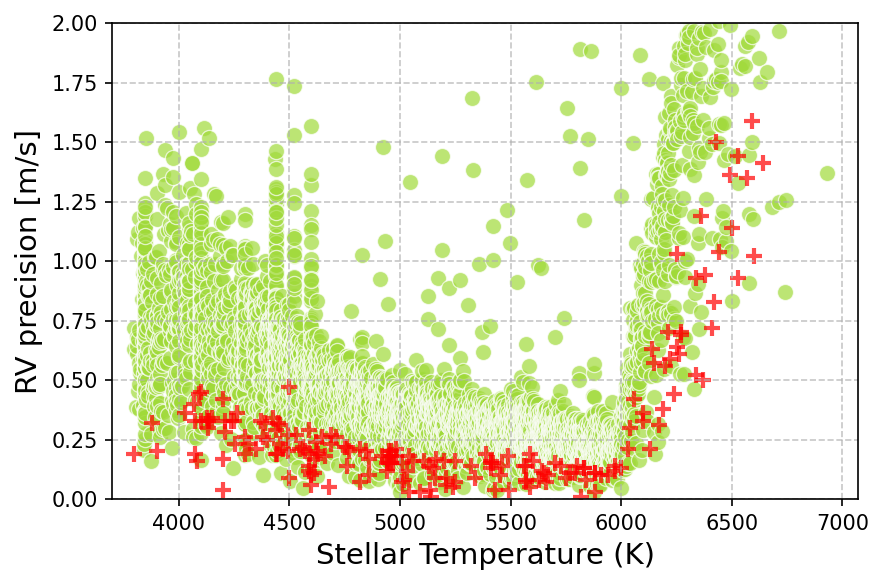

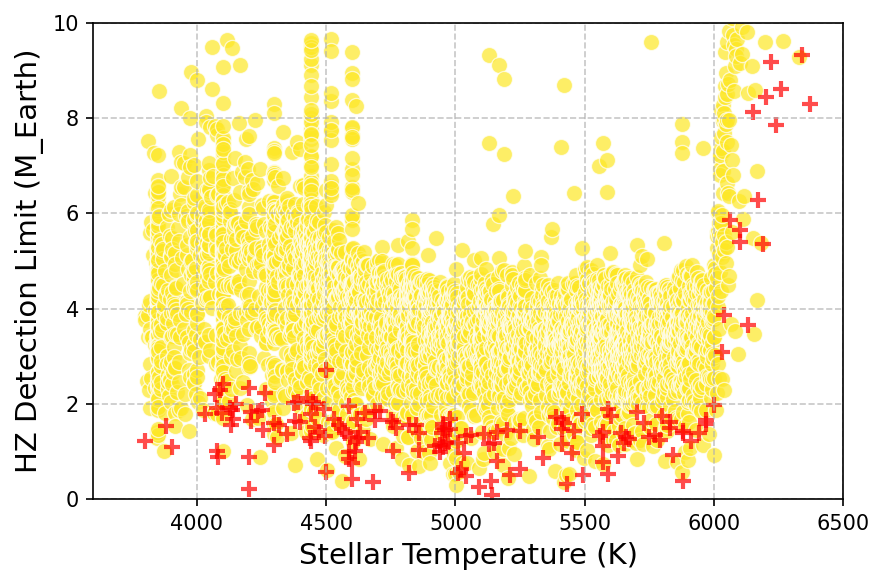

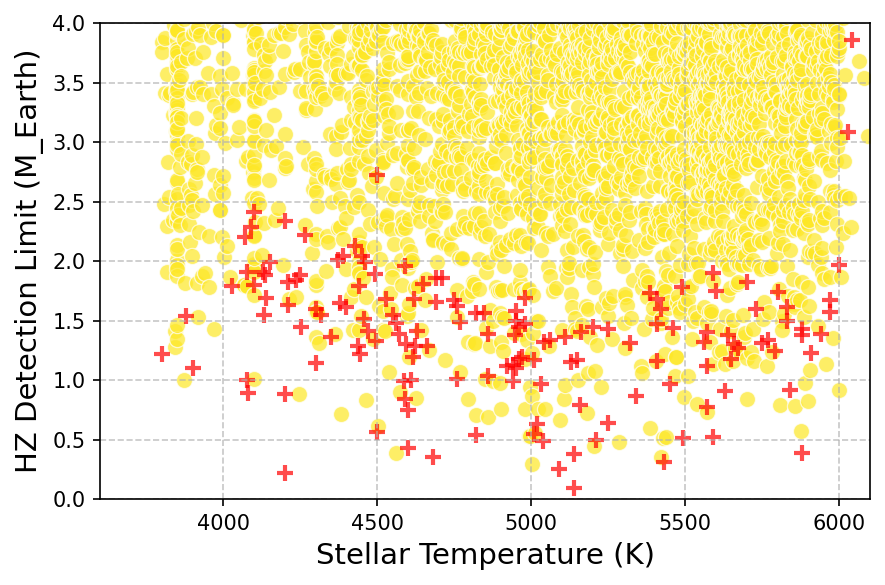

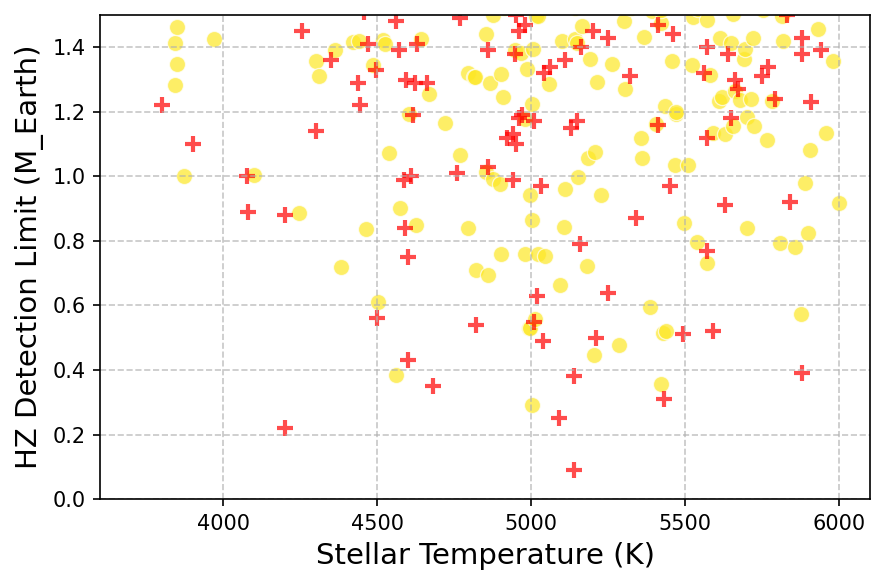

In [17]:
    merged_RJ['HZ Rmid'] = (merged_RJ['HZ Rin'] + merged_RJ['HZ Rout']) / 2
    plot_scatter_with_options(merged_RJ, 'magV     ', 'V_mag', min_value=3, max_value=10)
    plot_scatter_with_options(merged_RJ, 'mass ', 'Mass [M_Sun]', min_value=0.5, max_value=1.5)
    plot_scatter_with_options(merged_RJ, 'HZ Rmid', 'HZ_limit [AU]', min_value=0.1, max_value=2, label=True)
    plot_scatter_with_options(merged_RJ, 'logg', 'logg_gaia', min_value=1.9, max_value=5, label=True)
    plot_scatter_with_options(merged_RJ, 'RV_Prec(390-870) 30m', 'RV precision [m/s]', min_value=0, max_value=1.6, label=True)
    plot_scatter_with_options(merged_RJ, 'mdl(hz) 30min', 'HZ Detection Limit [M_Earth]', min_value=0, max_value=3, label=True)

    plot_RV_precision_HZ_detection_limit_vs_temperature(merged_df, df_Ralf)

    print("\nRalf's results:")
    print("Number of stars:", len(merged_RJ))
    for detection_limit in DETECTION_LIMITS:
        if detection_limit is not None:
            print(f"Number of stars with HZ Detection Limit [M_Earth] < {detection_limit}:", len(merged_RJ[merged_RJ['mdl(hz) 30min'] < detection_limit]))


In [18]:
    #---------------------------------------------------------------------------------------------------    
    # TESS overlap
    #---------------------------------------------------------------------------------------------------    
    # Process confirmed planets
    print("\nProcessing confirmed TESS planets...")
    matches_confirmed, merged_confirmed, confirmed_gaia_ids = match_gaia_tess(
        GAIA_FILE,
        TESS_CONFIRMED_FILE,
        OUTPUT_CONFIRMED_FILE,
        OUTPUT_CONFIRMED_UNIQUE_PLANETS,
        is_candidate=False,
        threshold_arcsec=2.5
    )
    # Save overlapping stars for confirmed planets
    overlapping_stars = save_overlapping_stars(GAIA_FILE, confirmed_gaia_ids, OUTPUT_CONFIRMED_UNIQUE_STARS)

    # Process candidates
    print("\nProcessing TESS candidates...")
    matches_candidates, merged_candidates, candidate_gaia_ids = match_gaia_tess(
        GAIA_FILE,
        TESS_CANDIDATE_FILE,
        OUTPUT_CANDIDATE_FILE,
        OUTPUT_CANDIDATE_UNIQUE_PLANETS,
        is_candidate=True,
        threshold_arcsec=2.5
    )
    # Save overlapping stars for candidates only
    overlapping_stars = save_overlapping_stars(GAIA_FILE, candidate_gaia_ids, OUTPUT_CANDIDATE_UNIQUE_STARS)



Processing confirmed TESS planets...
Reading input files...
Processing matches...


Processing GAIA entries: 100%|████████████████████████████████| 4914/4914 [00:04<00:00, 1173.72it/s]



Creating merged dataset...

Total matches: 1131
Unique planets: 421
Results saved to ../results/GAIA__TESS_confirmed__matches.xlsx
Results saved to ../results/GAIA__TESS_confirmed__matches__unique_planets.xlsx
Results saved to ../results/GAIA__TESS_confirmed__matches__unique_stars.xlsx
Overlapping stars: 270
Stars with HZ Detection Limit ≤ 4 M_Earth: 221
Stars with HZ Detection Limit ≤ 2 M_Earth: 56
Stars with HZ Detection Limit ≤ 1.5 M_Earth: 27

Processing TESS candidates...
Reading input files...
Processing matches...


Processing GAIA entries: 100%|████████████████████████████████| 4914/4914 [00:01<00:00, 4670.21it/s]



Creating merged dataset...

Total matches: 92
Unique planets: 92
Results saved to ../results/GAIA__TESS_candidate__matches.xlsx
Results saved to ../results/GAIA__TESS_candidate__matches__unique_planets.xlsx
Results saved to ../results/GAIA__TESS_candidate__matches__unique_stars.xlsx
Overlapping stars: 69
Stars with HZ Detection Limit ≤ 4 M_Earth: 40
Stars with HZ Detection Limit ≤ 2 M_Earth: 9
Stars with HZ Detection Limit ≤ 1.5 M_Earth: 3
